# Chennai Floods 2015 – A Geographic Analysis

On December 1–2, 2015, the Indian city of Chennai received more rainfall in 24 hours than it had seen on any day since 1901. The deluge followed a month of persistent monsoon rains that were already well above normal for the Indian state of Tamil Nadu. At least 250 people had died, several hundred had been critically injured, and thousands had been affected or displaced by the flooding that has ensued.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chennai-Floods-2015-–-A-Geographic-Analysis" data-toc-modified-id="Chennai-Floods-2015-–-A-Geographic-Analysis-1">Chennai Floods 2015 – A Geographic Analysis</a></span><ul class="toc-item"><li><span><a href="#Summary-of-this-sample" data-toc-modified-id="Summary-of-this-sample-1.1">Summary of this sample</a></span></li><li><span><a href="#Chennai-Floods-Explained" data-toc-modified-id="Chennai-Floods-Explained-1.2">Chennai Floods Explained</a></span></li><li><span><a href="#How-much-rain-and-where?" data-toc-modified-id="How-much-rain-and-where?-1.3">How much rain and where?</a></span></li><li><span><a href="#Spatial-Analysis" data-toc-modified-id="Spatial-Analysis-1.4">Spatial Analysis</a></span></li><li><span><a href="#What-caused-the-flooding-in-Chennai?" data-toc-modified-id="What-caused-the-flooding-in-Chennai?-1.5">What caused the flooding in Chennai?</a></span><ul class="toc-item"><li><span><a href="#A-wrong-call-that-sank-Chennai" data-toc-modified-id="A-wrong-call-that-sank-Chennai-1.5.1">A wrong call that sank Chennai</a></span></li></ul></li><li><span><a href="#Nature's-fury-or-human-made-disaster?" data-toc-modified-id="Nature's-fury-or-human-made-disaster?-1.6">Nature's fury or human made disaster?</a></span></li><li><span><a href="#Flood-Relief-Camps" data-toc-modified-id="Flood-Relief-Camps-1.7">Flood Relief Camps</a></span><ul class="toc-item"><li><span><a href="#Routing-Emergency-Supplies-to-Relief-Camps" data-toc-modified-id="Routing-Emergency-Supplies-to-Relief-Camps-1.7.1">Routing Emergency Supplies to Relief Camps</a></span></li></ul></li></ul></li></ul></div>

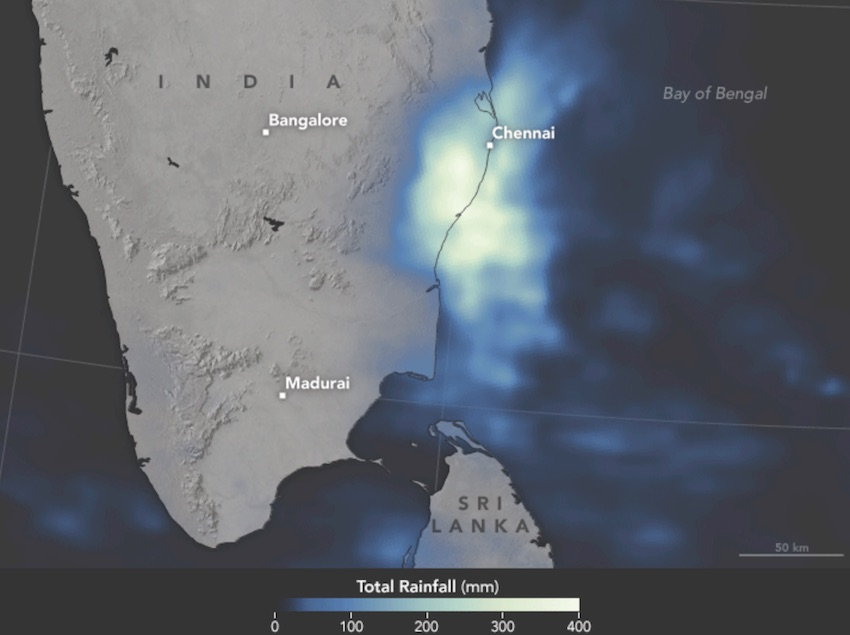

The image above provides satellite-based estimates of rainfall over southeastern India on December 1–2, accumulating in 30–minute intervals. The rainfall data is acquired from the Integrated Multi-Satellite Retrievals for GPM (IMERG), a product of the [Global Precipitation Measurement](http://www.nasa.gov/mission_pages/GPM/main/index.html) mission. The brightest shades on the maps represent rainfall totals approaching 400 millimeters (16 inches) during the 48-hour period. These regional, remotely-sensed estimates may differ from the totals measured by ground-based weather stations. According to Hal Pierce, a scientist on the GPM team at NASA’s Goddard Space Flight Center, the highest rainfall totals exceeded 500 mm (20 inches) in an area just off the southeastern coast.

[Source: NASA http://earthobservatory.nasa.gov/IOTD/view.php?id=87131]

## Summary of this sample
This sample showcases not just the analysis and visualization capabilities of your GIS, but also the ability to store illustrative text, graphics and live code in a Jupyter notebook.

The sample starts off reporting the devastating effects of the flood. We plot the locations of rainfall guages and **interpolate** the data to create a continuous surface representing the amount of rainfall throughout the state.

Next we plot the locations of major lakes and **trace downstream** the path floods waters would take. We create a **buffer** around this path to demark at risk areas.

In the second part of the sample, we take a look at **time series** satellite imagery and observe the human impacts on natural reservoirs over a period of two decades.

We then vizualize the locations of relief camps and analyze their capacity using **pandas** and **matplotlib**. We **aggregate** the camps district wise to understand which ones have the largest number of refugees.

In the last part, we perform a **routing** analysis to figure out the best path to route emergency supplies from storage to the relief camps

First, let's import all the necessary libraries and connect to our GIS via an existing profile or creating a new connection by e.g. `gis = GIS("https://www.arcgis.com", "username", "Password")`.

In [2]:
import warnings
warnings.filterwarnings("ignore", "Warning")

In [120]:
import datetime

%matplotlib inline
import matplotlib.pyplot as pd
from IPython.display import display, YouTubeVideo

import arcgis
from arcgis.gis import GIS
from arcgis.features.analyze_patterns import interpolate_points
from arcgis.geometry import Point
from arcgis.geocoding import geocode
from arcgis.features.find_locations import trace_downstream
from arcgis.features.use_proximity import create_buffers

gis = GIS(profile="your_online_profile")


## Chennai Floods Explained

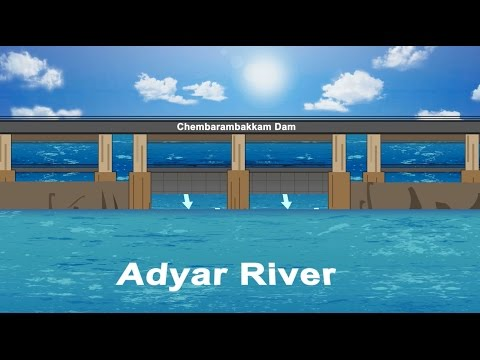

In [4]:
YouTubeVideo('x4dNIfx6HVs')

The catastrophic flooding in Chennai is the result of the heaviest rain in several decades, which forced authorities to release a massive 30,000 cusecs from the Chembarambakkam reservoir into the Adyar river over two days, causing it to flood its banks and submerge neighbourhoods on both sides. It did not help that the Adyar’s stream is not very deep or wide, and its banks have been heavily encroached upon over the years.
Similar flooding triggers were in action at Poondi and Puzhal reservoirs, and the Cooum river that winds its way through the city.
While Chief Minister J Jayalalithaa said, during the earlier phase of heavy rain last month, that damage during the monsoon was “inevitable”, the fact remains that the mindless development of Chennai over the last two decades — <b>the filling up of lowlands and choking of stormwater drains and other exits for water — has played a major part in the escalation of the crisis.</b>

[Source: Indian Express http://indianexpress.com/article/explained/why-is-chennai-under-water/#sthash.LlhnqM4B.dpuf]

## How much rain and where?

### Polygon Fill rendering

To get started with our analysis, we bring in a map of the affected region. The map is an instance of the _Map_ class, referred to as the map widget. Being powered by the the ArcGIS Maps SDK for JavaScript, it can render custom symbology using the Pyton API. Here are a couple examples:

In [5]:
chennai_pop_map = gis.map(
    location="Chennai, India")
chennai_pop_map

Map(center=[1467969.8350553361, 8928029.703803757], extent={'xmin': 8926805.189405032, 'ymin': 1466712.7727426…


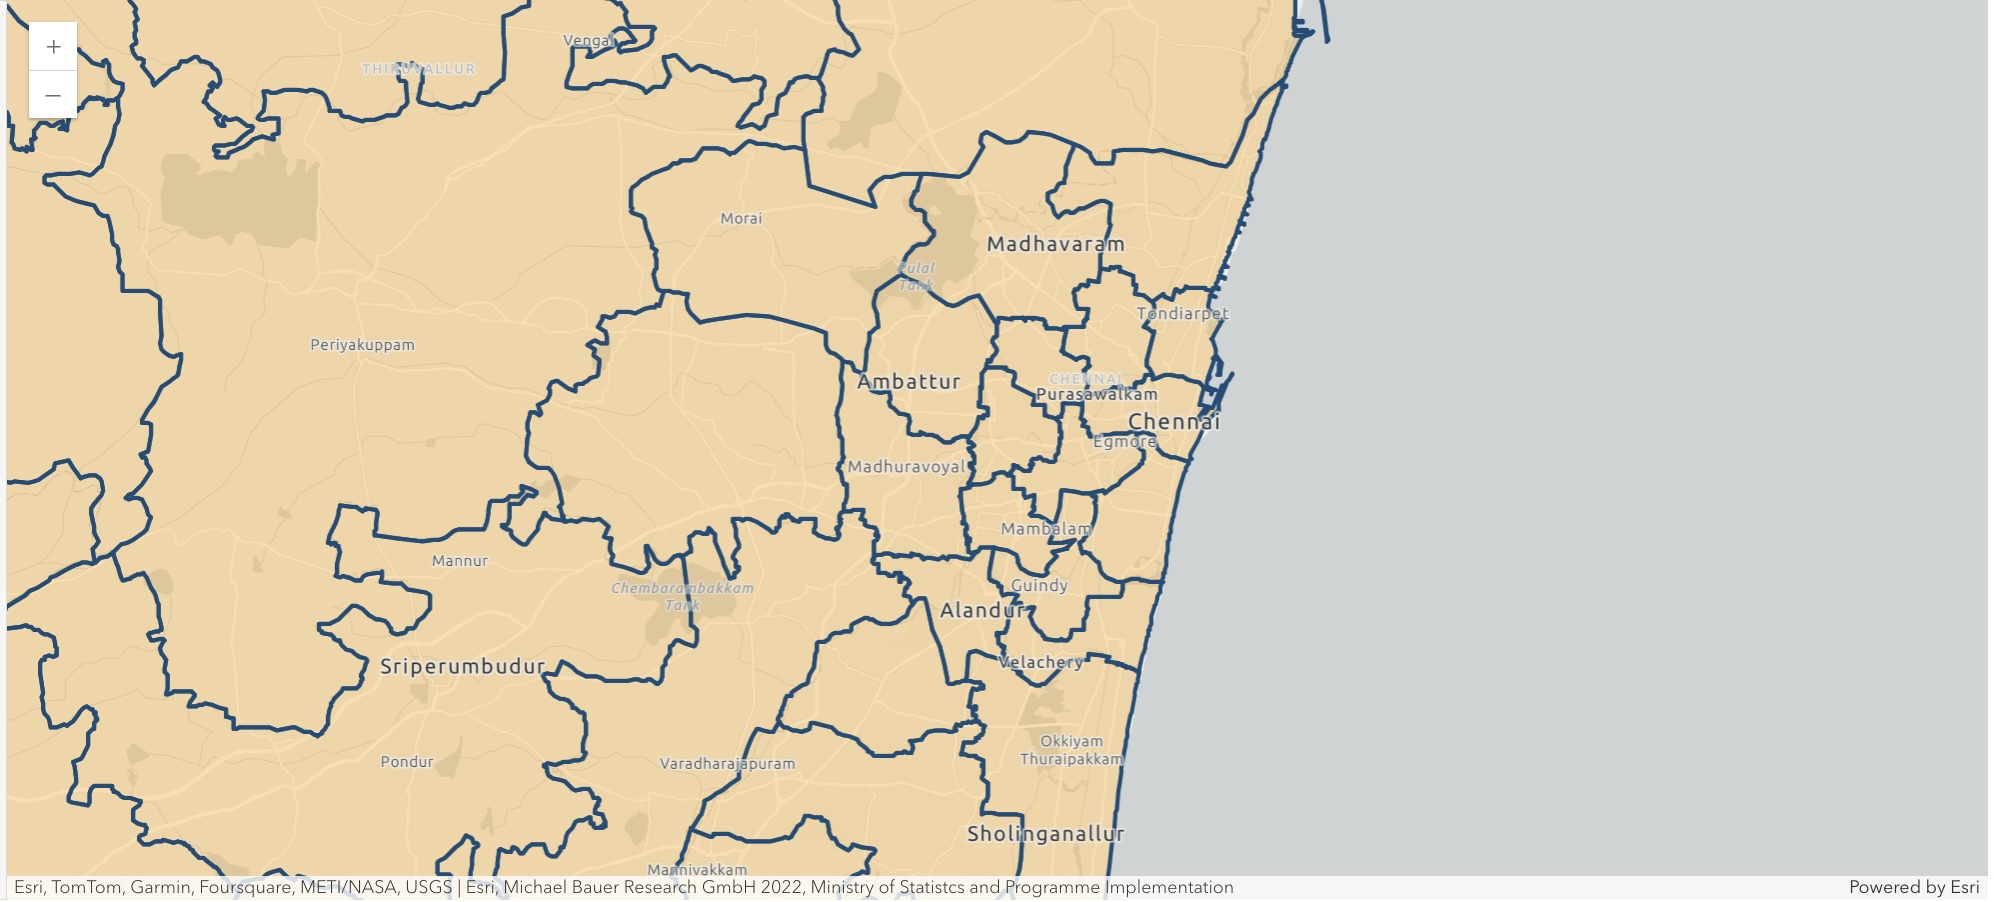

In [18]:
from IPython.display import Image
Image(url="data:image/jpeg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAB8qgAwAEAAAAAQAAA4akBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g/QSUNDX1BST0ZJTEUAAQEAAA/AYXBwbAIQAABtbnRyUkdCIFhZWiAH6AAFABYACQAWADphY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAABJxjcHJ0AAAGUAAAACN3dHB0AAAGdAAAABRyWFlaAAAGiAAAABRnWFlaAAAGnAAAABRiWFlaAAAGsAAAABRyVFJDAAAGxAAACAxhYXJnAAAO0AAAACB2Y2d0AAAO8AAAADBuZGluAAAPIAAAAD5tbW9kAAAPYAAAACh2Y2dwAAAPiAAAADhiVFJDAAAGxAAACAxnVFJDAAAGxAAACAxhYWJnAAAO0AAAACBhYWdnAAAO0AAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAAUAAAB2GtvS1IAAAAMAAAB7G5iTk8AAAASAAAB+GlkAAAAAAASAAACCmh1SFUAAAAUAAACHGNzQ1oAAAAWAAACMGRhREsAAAAcAAACRm5sTkwAAAAWAAACYmZpRkkAAAAQAAACeGl0SVQAAAAYAAACiGVzRVMAAAAWAAACoHJvUk8AAAASAAACtmZyQ0EAAAAWAAACyGFyAAAAAAAUAAAC3nVrVUEAAAAcAAAC8mhlSUwAAAAWAAADDnpoVFcAAAAKAAADJHZpVk4AAAAOAAADLnNrU0sAAAAWAAADPHpoQ04AAAAKAAADJHJ1UlUAAAAkAAADUmVuR0IAAAAUAAADdmZyRlIAAAAWAAADim1zAAAAAAASAAADoGhpSU4AAAASAAADsnRoVEgAAAAMAAADxGNhRVMAAAAYAAAD0GVuQVUAAAAUAAADdmVzWEwAAAASAAACtmRlREUAAAAQAAAD6GVuVVMAAAASAAAD+HB0QlIAAAAYAAAECnBsUEwAAAASAAAEImVsR1IAAAAiAAAENHN2U0UAAAAQAAAEVnRyVFIAAAAUAAAEZnB0UFQAAAAWAAAEemphSlAAAAAMAAAEkABMAEMARAAgAHUAIABiAG8AagBpzuy37AAgAEwAQwBEAEYAYQByAGcAZQAtAEwAQwBEAEwAQwBEACAAVwBhAHIAbgBhAFMAegDtAG4AZQBzACAATABDAEQAQgBhAHIAZQB2AG4A/QAgAEwAQwBEAEwAQwBEAC0AZgBhAHIAdgBlAHMAawDmAHIAbQBLAGwAZQB1AHIAZQBuAC0ATABDAEQAVgDkAHIAaQAtAEwAQwBEAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBpAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBMAEMARAAgAGMAbwBsAG8AcgBBAEMATAAgAGMAbwB1AGwAZQB1AHIgDwBMAEMARAAgBkUGRAZIBkYGKQQaBD4EOwRMBD4EQAQ+BDIEOAQ5ACAATABDAEQgDwBMAEMARAAgBeYF0QXiBdUF4AXZX2mCcgBMAEMARABMAEMARAAgAE0A4AB1AEYAYQByAGUAYgBuAP0AIABMAEMARAQmBDIENQRCBD0EPgQ5ACAEFgQaAC0ENAQ4BEEEPwQ7BDUEOQBDAG8AbABvAHUAcgAgAEwAQwBEAEwAQwBEACAAYwBvAHUAbABlAHUAcgBXAGEAcgBuAGEAIABMAEMARAkwCQIJFwlACSgAIABMAEMARABMAEMARAAgDioONQBMAEMARAAgAGUAbgAgAGMAbwBsAG8AcgBGAGEAcgBiAC0ATABDAEQAQwBvAGwAbwByACAATABDAEQATABDAEQAIABDAG8AbABvAHIAaQBkAG8ASwBvAGwAbwByACAATABDAEQDiAOzA8cDwQPJA7wDtwAgA78DuAPMA70DtwAgAEwAQwBEAEYA5AByAGcALQBMAEMARABSAGUAbgBrAGwAaQAgAEwAQwBEAEwAQwBEACAAYQAgAGMAbwByAGUAczCrMOkw/ABMAEMARHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjQAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAIPfAAA9v////7tYWVogAAAAAAAASr8AALE3AAAKuVhZWiAAAAAAAAAoOAAAEQsAAMi5Y3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArhQAAFHsAABD1wAAsKQAACZmAAAPXAAAUA0AAFQ5AAIzMwACMzMAAjMzAAAAAAAAAABtbW9kAAAAAAAABhAAAKBR/WJtYgAAAAAAAAAAAAAAAAAAAAAAAAAAdmNncAAAAAAAAwAAAAJmZgADAAAAAmZmAAMAAAACZmYAAAACMzM0AAAAAAIzMzQAAAAAAjMzNAD/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAff/AABEIA4YHygMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP7Ev2sfEGj/AAg/Zo8dfFiy0mC6l8L6JeaskAAi8xrKIzBN4U7d2zGcHHpXwv8AsnftN+Av2svg5YfFbwI5US/uby0cgy2l0gG+F8Y5XIIOBuUhu9fpV8efCeg+Pfg54i8C+KrcXel61ZSWF5ASVElvcDy5EypDDcrEZBBHav4iNPvPi9/wRm/bE+zXQutU+G/iSTnut9YI3UdE+2Wm7kfLnPZJBXBj8loZpTlh6Tti4rmguk4reK8+q/yvbSjmdXATjVmv9nekv7r6P06f0j+uOiuU8DeOPCPxL8Iad4+8B38WqaPq0CXNpdQnKSRuOD2IPYqQCpGCARiurr8olBxbjJWa6H3UZJpOOwUUUVJQUhAIwelLRQBkxt/Zsy2r/wCoc4jP90/3fp6flWtUcsUc8RhlGVYYIqhayywy/YLs5P8Ayzf+8o/qKYjTooopDCiiigArL1vRdK8SaNd+HtdgS6sr6F7eeGQBkkikG1lI6EEHGK1KKadtUJpNWZ/Jp8UPh78Z/wDgjL+0/p3xL+Gt1NrHw58ST7PIdsC5tkIZ7S44IWeNTmGYLz1A++lf1HfC74l+D/jH8PNH+KPgC6W80fXLZLq2kGM7W6qwBO10OUdf4WBB6V+RX/BdiHxxJ+yfpL6DFFJo0euwHVGKFpox5biEqeipvO1j1yVA4Jr6f/4JSP4JP7BvgWPwPMZokiuRd7yDIl4Z5DMrAE7cMfkHB8vacc1+g5/P+0ciw2b11+/UvZtr7SSdubtJW+75JfIZRH6nmtbLqX8Ll50n0emkfI/ROiiivz0+wCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACtKON7uw8uLBaJunTg1m1ZtJxBNublT8rD2oAQ2V6Bny84/ukE/lVUMDwOo7elTXFmlrOUUYxyrDjjtTjceYNt4gmA6MPlcfjQBDRU4tvM/48n83/YPyuPw6H8Kr552HgjseCKAFooooAKKKKACinRpLK/lQIXb0FE9vfxRMwt3LAcADP8AKgDJP+l6ht/gt/8A0M/4CtSq+n2VxHAIljdnPLfLjk/WtBrWWP8A4+Hjh/3m5/IUCK9FS4sV6vJL/uLsH60eZbdBbDHvId359qBkVFS/6Ce8sX5Ov+NKLffxBNFJ7E7D+RoAhoqV7a7i/wBbC4HsNw/TNV1dGOAefSgB9FFFABRRRQAUV5r8WfjB8NPgX4JufiL8WdXh0XRbQqJLmYMwBc4VQqBmYk8AKpNfij8df+C83wl8O+fo/wCz34Yu/EtyN6JfakfsVnn+F0jG6aRf9lhCa9rKeHcxzJ/7HRcltfaK+bsvkeZj84weC/3mok+3X7lqftj8VPi58Nfgj4NufH/xV1m20TSbRSWmuXC7iBwiL1dz/Cigsewr8Bv2wP8AgtB8Avil8F/FPwa+F3hzWr2XxDYXOnG9vRDaQxiZdokVVeV3Hfayxn6V8/fC/wDZJ/bY/wCCpnjmH4x/tL6rdaB4PDl7Zp42jTymPMen2pOFXjBlbg45LkYr+gP4RfsF/sjfBTRLXSPCPgTSLia1UD7fqFrFeXrsP4mmlUsCfRdq+gAr6tYPJMilD65J18TFp8sHaEGujfV/1ZHgPEZnmsZfVkqNBq15K8pLyXRf16fnv/wQe0rU7P8AZm8Q6jd28kUF1rR8mRlIWTZGoO098e1fuNUUEEFrCltbIsccYCqijCqB0AA6Cpa+OzrMv7Qx1XG8vLzu9t7fl+R9HlmC+p4Wnhr35Va+wUUUV5Z3hRRRQAUUUUAFc94j8I+FPGFn/Z3i3TLTVLcf8sruBJ0/75cEV0NFOMnF3Wgmk1Zn5Bft0f8ABJ74QftA+G7rxh8FdOtfCnja2j3Q/ZEW3s7wp0SaNQFUnoJFAI75HFfihL8W/wDgpP8AsQ+NfBHjb4933iK10CwnFlBpt7fNJZ3FtakB4WijkKEbPuFuSB8pwvH9llfIX7dvw2+FPxL/AGWvF1h8YISdL0+wlvluIk3zW0sC7lki6fMD26EcHivvOHeMK1P2eX4+CrUW7aq8op6e6/0+SsfJ5xw5TlzYvCS9nUSvppF211R7x8Jvir4J+Nvw80r4ofDu7F7pGrwiaB+jDPVGHZlPDDsR6V6LX843/BAvVvivd2PjfSJrtpPBFl5JhgkP+r1CU9Yx/CGjU78cZC+1f0c18/xJlEcszGrgoS5lHb0auk/NI9jJMweOwVPEyjZv9NNPIKKKK8I9UKKKKACiiigBNq53Y5p6IzsI0GSegpoGeBWwNumQ5ODO44H90UAOlkj02H7NB/rW+8fSsWlJJOT1NJQAUUUUANZVdSjDIPGKhtrS3tE8u2QKKsUUAFFFFACEAjBqSOWWE5hYrj0plFAG3HqUFyog1JAR/eHT/wCtUVxpMir5tmfMTsO/+BrJqe3uZ7Vt0Bx7dvyoAg6cHjFFbwax1Xh/3U38/wDGsy5sbi05lGV/vDp/9agCpRRRQB/KJ+0lD4m/4J0f8FObX45aNpvmeHvElwbuKGJgomt7nCXMQJB2sCc8jvx7f1T6Jq1tr2i2eu2QZYb2COeMOMMFkUMMgcZwa/m5/wCC9cMtv4++GWsSoRbRxXCs/YESKcfkK/oc+FVzDe/C/wAN3lud0cul2bqfVWhUivvuKZfWMpyzHTX7xxlBvuoOyPkshj7HMMbhIfAmpJduZa/I76iiivgT60KKKKAHRyGGRZV/hOa1tXjTel0nSQVj1vIv2vR8DrH/AEoAwaKQciloAKKKKACiiqtxdw2uA+SzfdVRkn8KALVQzXEFsm+dgg96pZ1G56AW6f8AfT/4D9amgsLaB/Nxvf8Avtyf/rfhQIh+13VzxZRbV/vycD8B1/lSjTkkO69Yzn0PCj/gPStKigBAAo2qMAUtFFAwooooAKKKKACiiigAqGa3guF2ToHHoRU1FAGd/ZVj02tj03tj+dH9k6Z3gQ/UZrRooFYpjT7ADaIYwPZQKrRM2nyC2lOYm4RvT2P9K1ajkijmjMUoyp7UBYkorK23lh/q8zxen8a/T1rrLOwQRi7vvkTGQp4/P/CgZj5HSpVhlf7iM30Ga1pdXKnbZoFUe1VDql+ekmPwH+FADEsb7IaOM5HTt/hV3U7WQKt2VwSAGHoaz2vbtusjfgcfyqxZ3JLmC5YsknHJzigDOoq1dWk1o22Qcdj2qrQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAh4FZq31m0ptxKu8HG3PP5VdZs1wEWl2urajeJISrK2VIpoRr3sEkPiKzurc4Z2Cn8K6y62i8lCcAMa5Tw14euLPWlnufnWJSwI6YFdIGLZdupOaGCFr8a/8AguT/AMma23/Yes//AECSv2Ur8af+C5TKP2N7VCRk69Z4H0SSvpODv+R1hP8AGjxeI/8AkWYj/Cz9O/2Ab8ab/wAE3/hfPkBj4Ys0XPcsuMflXZ14b+xXqZT/AIJ+/BzSEP3vDlnIw7YC4Fe5V+nYv+PU9X+Z8bQ/g0/Rfkc34x8MWHjXwjqng7VOLbVbSazlwOiToUOPwNfzYf8ABGTxWfhv+1J47+Bl9lBfQSGJXONrWEpB49SrD8q/pzr+Ub4dr/wqf/gs/Ppv+qt7nxDeRDt+6uEZl/XFexk69ph8VQf8t/uPMzL3K2Hqro7fef1c0UUV4B7AUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/ADHP+3X/ANqV9aV8l/suf8xz/t1/9qV9aVDNobH/0P7ePiP/AMiXe/RP/QhX5Pftefso+Av2u/hFe/DLxmPIlb99YXqKGls7pAQkqA4z12umRvQlcjgj9YfiP/yJd79E/wDQhXyPXxfEmJq4fF0K9CXLKOqa6WZ7+VUKdahUpVVeL0aP5Kf2Rf2xfi1/wS6+JurfsyftL6Ndz+GDd7wEzutCW2m5tNwAlt5QMlRjkZXDblb+rT4N+LPDn7Qnh+08U/BS+t/EVhe2/wBpimtZU2mMbQc7iu1lLAMhwynggEV4V+09+yZ8Gf2tfA3/AAhXxb03z/J3NZ3sBEd3aSMAC0MmDtzgZUgo2BuU4FfEv/BGP9jH4+/sVf8ABQDxd4K8RX0uqeAtV8HX09ldwMVtpbuG+sFj86HJ8q4ETPjqGXdtZgDj1ajyriH/AGmT9jil8UV8NTzj2l5fnueZSjj8oaoJe0w/2X1h5Py/rTY/bb/hUPxO/wCgQf8Av/D/APF0f8Kh+J3/AECD/wB/4f8A4uvvOisP9VMH/NL71/kdn9t1/wCVfj/mfBn/AAqH4nf9Ag/9/wCH/wCLo/4VD8Tv+gQf+/8AD/8AF1950Uf6qYP+aX3r/IP7br/yr8f8z4M/4VD8Tv8AoEH/AL/w/wDxdcx4r8AeKvDunR3fiazNnFJKI45PMjYiTBIwEY9lPbFfo1XzL+1KxXwdo23j/ibR/wDoiauPH8OYahh51YSldLy/yN8Nm1WpVjCSVn/Xc+U7O5d829zgTR/eA6Eeo9v5VeqjdWpmCzQnbNH9w/0PsaktLpLqPIG1l4ZT1U+lfEn0JaooooAKKKKAPyi/4LD/AB48MfCT9knUPBGuaP8A2xc+OGOl2qPlYbdlHmeexGPmiKho17vj+EGuA/4ImfBr4z/Cr9nDUtb+JA+yaJ4ruoNU0Oyf/WrE0e152HZZ1EWwddqbsYYZm/4LmaRoF/8AsZ21/q1zHb3Vjr9nJZIw+aeVkljaNcDqImd+cDCfSvon/glT4n1fxV+wX4Bu9bSYTWsFzZq8owHit7mVIinqojCqOn3SOlfoDn7Lg9eyj8da0r+SuuXotknb0PkFHn4ifO/gp3jb7nf79D9DaKKK/Pz68KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKANFf9Ls/L/jh5Huv/1qzqkhleCQSx9RV7y7a9/1GIpP7v8ACfp6UAZZUHr26VY+0yMoS5UTqOm7hh9GpkkckTeXINpHamUATiCOU/6HJk/885Plb8D0NNe2u4v9ZC4+gz/LNQlVYYYZpYy0X+pZk/3TigBoOfuqT9AasLbyFfMnzDGOrMMH6AUG5vG6zP8Anj+VQOx/1kzltvdjnH50ATSSho/s8C+XD6d2+v8AhWWk0rX/AJVu7IkQ+bacZJ6DiofPub8YtP3cX/PQ9T/uj+tXre3ito/LiHHU+pNAiw7zSDbLI7D0LHFMVET7oA+lOooGFFFFABSEAjBHFLRQAke6H/UsU/3TirBupXAW7AnUf3uGH0IqCigCbyoZD/osmD/cl+U/gehpxsr4DPkkj/ZIP9arEAjBpgijXlQB9OKAJWSaP78br/wE/wCFRebEDgsB7VOstwnCSuP+BGpvtt9jaZdw9GUH+lAH4uf8FyCD+x5b4/6DNr/Wuw/4JYfsx/s/aZ+yr4J+MEHhHTZPFGqW0k9xqc8InuPMSeRAUaTd5eFUDEe0cVyn/BcuZpP2PIAyRj/ic2vKptPevqT/AIJgNbf8MF/DgSQZ/wBBm+ZZCP8Al5l7dK/QKtepT4RoqnJq9Zp20uuV6eh8hTpQnxDU54p2pq2m2q2PvGipf9BP/PdP++WFHl2p+5cY/wB+M/04r8/PryKipRBu4imgb234P5Yp/wBhvsZWLcP9kg/1oAr0U5op4/8AWROv/ATUJljHBIHseKAJKKQEEZFLQAUUUUAFFFFABXIeP/Clh468D6v4M1OFZ7fU7Oa2eN/usJFIwa+V/wBsv9ur4PfsX+Ek1Lxs7ahrl8jf2dpFsR505H8THpHGD1c/gCeK/COw/wCChH/BXD44fbPiR8E/DV3/AMI3JKwgTTNCF5bRBP4FmeJ2kI/i569hwK+qybhPMMbS+t0+WnTW0pvlTfl/VjwMy4gweFn9XmnOXWMVdpeZ1v8AwR3+IU/7O37VPjX9k74gubKbVZHhgWQKoa9sGO0ZJH34i2wDO4kYFf1DV/D9q3in4g/tu/tOaXeajfaT8MfiW2y2nv7qW502C5vIPljb93FK9vc/wnOFJAxtxg/ot/w6y/4Kq/8ARaLX/wAKLV//AJGr7fizh7C4nFwxWMxUKFWUY80Wm02tLxa0adl/Wh8xw9m9ehh5UMNh5VacZPlasrLezXRn9NdFfzKf8Osv+Cqv/RaLX/wotX/+Rq/PH4peI/24f2W/2h7f4RW/xS1TxF4rsJoB5Glanf3cPnyYKwslwkQkJBGV2MuDXhYLgXD4yTp4TMac5JXsk9l+SPVxPFNbDRU8Rg5RjtuvwP7eaK89+E194+1P4Z6DqHxTtYrLxHNYwvqMEBykdwVG4D8eoHAPA4r0Kvz6pDkk4dtNNvkfXwlzRUgoorTtbeOFPtt393+FfWoKFhjSyiF3MMufuL/Ws6SR5XMkhyTT555LiQyyfl6VDQAUUUUAFFAVndY4wNzHAzxVj7JNnarwtj0k/wDrUAV6KdJHLC/lyjBxkYIIpnSgBaKla3lS2W6c4DHAX2qKgAooooAKKKKAEwDxWnbapc242N+8X0PX86zaKANzZpV+fk/cyHt0/wDrVE+iXgPyFGH5f0rHwCMGpFklQbUdlH+ySP5UAfjd/wAFwvgZ4m8d/ss2fjnQ7I3beEr8Xdx5I3OlvIuxmPH3F6nsK+gf+CVvx/8ADv7RX7KWh2VnfeZrnhWFNM1SGX76NGP3bD1RkA2n26CvvvXtI0/xRot14c8Qx/bLG+iaCeCUlkeNxgqR6Yr+Tp7nxz/wR9/bkvdWk0u4u/h94gLxxBeFuLCRtwCHJHmQHopOeBnrX6DkkY5xlE8mX8ek3Ol/e/mj+q/4B8hmknl2YxzH/l1NKE/Lsz+vL+yIo/8AXzgfhj+tM+xaR3u/yZf8K8O+FHxU8IfHHwPZfEj4Yapb3uj36Bonhw5B7rIAfkdehXqK9I26snRon/Ar/U18FUpSpycJqzWlux9ZCcZxUoO6ex1P2HSP+fv/AMeX/CgWOk9Fuufdl/wrlvP1JPv26t/uP/iBR9vdf9bbyr9AG/8AQSaixR1n9jK33Jx+X/160rGyltUeGVgyt0xx+lcNBd21yxjTIYdVZSp/IgVr2M00V1EiMdpYDGeMfTpSGVpEMUjRHqpxTa0NUVVvmC9wDWPNd2tsP38ip9TigCxRWb/aKvxaxSS/Rdo/M4pPIvrof6S/lL/cj6/i3+GKBE1zfQ2/7v70h6IOpptpaNGxubn5pn6+ij0FT29rb2q7YEC56+9WKACiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFABJwKANHTLYTTeY/3I+TWZqfm38vnJIyFT8mDx+XSuhuQLDThbr99+tYFAGbHevE4gv18tjwGH3G/wAPpWlVe6gFxbvD6jj69qZYzefaJIeuMH8KBFuiiigZcgvp4BsHzJ/dbpU+zT7rlD5D+h+7WZRQBauLOe1wZBlT0I6VVrRtzmwnjPRQGHsazqACk6UtNb7tADC/YUzp0opQM9KAHq/Y1JUOxqdvwKAJKKi3ntTcmgCbIFRM2eBTaKAGsyopZuAK4zw2s8t/PeL/AKpuM+v0qTXb57u4XRbM8scOR/Kums7VLO2S1gHTgD1NPZCNSMmKylkXgyERjHp3qqBjgVautseyzU5EXU/7R61WpDCv5pf+C/l9cDV/AGnLeSeUYLlza8+XncBv9M9umcCv6Wq/mu/4L8+G9aXUfAHjKML9hEdxa7gw3iUEP064wRg19v4d8v8Ab1C/97/0lny/GN/7Jq28vzR8W/Dj/gsx+1H8MfAug/DjQNF8MNpXh6zhsbZXs5w5hgGBkrcquSOpCge1f1f/AAu8XXnj74c6H411C1+xT6rZQ3MkHP7tpFBI5weK/l5+FX/BXPw38Pvh/onhLxD8HdI17UtKtYoJdTluYopbiSMY8wqLNtpP+8a+5fgn/wAFyPhn4u1HUrb4veFG8J2VhZPcwTW159tad0IAgSMww/O2fl+bHBzgCv2PN8srVPeo4Xlt1TTv8j87y3HUqelSvfRWVmrH7u1/Kj+3VFJ8Mf8AgrHoniuAeXFd3+jXAbp/rNiSH+df0Qfsz/tUfCP9rLwVP45+EVxPJbWc/wBmuIrqLyZoZcBtrDJHQgjaSK/A7/gt/pkvhX9o/wADfEOzTG/TkYt6yW05I/TFceQQlDGSoVFZuLVjpziUZ4VVYPRNM/p8jkSWNZY+VYAj6U+uU8CalHrPgnR9WiYOtzZQSAjvuQGurr55qzse0noFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/8AalfWlfJf7Ln/ADHP+3X/ANqV9aVDNobH/9H+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYV6Z+z4i/8LjmfHP9kTj8POgrzOvTv2fP+Swz/wDYIn/9HQV42Sf77S9TvzH/AHefofdVFFYfifxHpPg/w1qHi3X3eOw0q2lu7lo4nmdYYELuVjjVnchQcKilj0AJ4r9TPjDcor8af2pv24v2bvGHiD4R3OganqkiaJ48stRu/M0HVYdtvHZXsZKiS0XzG3SL8ke5yOQuAcfox8Hf2nfg38edSvNI+GN7fXU9hEs0wutKvtPUIx2jDXdvCrc9lJI9KAPfq+ZP2p/+RO0b/sLx/wDoievpuvjP9t3x54R+Hfw50LW/GeqWWkWkmuQwLNfTpbxl2t7ghQzlRuwpIHoPavOzaLlg6qiuh1YJpV4N7HiQ6Cs67gkjk+3WgzIBhl/vr6fUdqXS9Rt9Us0vLUhkYAgqcggjggjqCOlaNflB9qQwTR3ESzRHKtU1ZstrNDIbmwOCeWjP3W/wNSwX9tMME+W44KNww/CmBdopPpS0hn4Af8F+tF1W5+D3gTXre3d7O01eaKaUD5UaWH5AfTOw4+lfqh+wr4o8JeL/ANjv4bat4KeN7JPD9lat5a7AtxaxiGdcYHKzI4Pqea/Eb/gpp+158Wv2l/i9ff8ABO74DeGhdo15DbXRljX7XeXcBE+Ii5CQwptBLnBIBOVTOf2M/wCCeH7PXjb9mH9lTQPhV8RngOtQvcXV1Hbt5kcLXEhcR7+jFVxuI+XdkDIAY/omc4d0OGMHQxLUavO5RjfVwkm+Zrp5f57fHZbVVXPMRVoK9PlUW7aKUbKy+X9WPtyiiivzs+xCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA0ZXaTTkMnJD4BPpis6rz86cm3s5z+VUaACiiq095a23+vkVPYn+lAFgkAZPasjDao/PFsv/j5H9KeS2pnaoK2465GC/t9K1AAoCqMAUCAAAYFLRRQMKKKKACiiigAooooAKKKKACiiigAooooA/Ij/AILZeH5dV/YkvdXRsLpmp2MrD1Ekgj/9mr23/glZqtvqv7BXw/8AIPNvbXMLj0ZbmX+hFYv/AAVs0STXf2DvGcEQz9nFrcn6QTI/9K81/wCCKOsNqv7EFpAxz9h1i9tx7ACNv/Zq+6f7zhFf3K/5wPlV7nEP+Kl+Uv8AgH63UUUV8KfVCYB60zyogchQD7VJRQA5ZJ4/9XI6/RjUpvr5V5lLAdmAP9KgooA5Txd42vfC3xC8JeHp7O1/sPxP9os2usETR36p5kIBB27XCsuNud2OazV+J1nbeMfF2m6ytrZeGfB2nW73mourNL9tny5QYPISNRlQuSXXHpSfFTwTefEL4eXnhzR5Ug1W2ki1DSpZG2rFfWrCSE57DcoB9q/Nf9pT9ov4HfCb4e3H7KPxV16K08d+MzJreqzx3RS1tJ5XDRxy3Ee1lXaiRLs52ru9M/c5Ng6WNhCNOneduVpLt1+7qfNZjiZYaTc5Wjun09P+Afpf4I+Jfgnx7c3mn2B1DTbywthey2uq2MtlObQ9JkSQAsnbjkHAIFc94F+OXw0+Ieq6Zo+itqdnJrkbSaTJqWnTWcF+salz5EkihWIQFtpwdoyBX51eBv22P2R/A011rccltZazqdkdM+0X3jWXXAI5eWCefPPsjDAHJEZPoKu/Cr9r/wCCGu6j8J/hoviTREuPBF1arPMmpQyeeXtnhIhAxuIZgMKTXpy4P0cvq8rfkcS4hjdR9qrn6BeIPj58K/DWqXem3cmp3UOnXC2d7f2Wmz3FhbXDYHlvOq7NwyNwXO3POK6n4m/ETwz8Jrv7P4sttUW2EYd9RhsJZdPh3HaolnQEJz14+UdcV8R/FbWPEPg3QdZ+AXhi/wDC/iGDVvEHmW/2bV8axG13Osrwvp6wyF5EYn5vNUbMZAxUX7ddkLW68V/8LP1iJdP1uGKLw/cz+KRo9lY7MeYs1i9xAs53fMSI5iw+XArip5Fg3KMeTfZX1e39WOqeZV1Fy5tvJWR883mp/DvxvruqD9uV4bbSIEluLmOWD92HS7KQxyOieYIxHtU4wp68ZzX7BeHIPDtt4fsofCKW0elCCP7GtmFFuIMDZ5YT5dm3G3bxjpX4Mft0fHD4DftL6H4osfhB4h03Vbq90T+y7eC3uIxd3F/DIrRrFBnfKsv3QwGR6V+b3gv9o3/goZ8bV8J/sT/A2+1HS9V8IpLZ3Mljcta3DPAzKftNyGG2KAfIBkLx3+WvpM14VrZjQpVFU9ioXvGbtGEbfEl+H3djwcFn1LBVZw5PaOVrOOrk+36n6l/8Fdf2FNE+JPh5v2jvhFBFa+N9IUTX0EDBJNQtov41TgtNFjKkcso288Y9c/4JVft+WX7TXw7j+FHxKvo18deH4QmHO19QtYxgSr/edBxIOv8AF6mvz78K/wDBDn9p34vSXvj/APai+IK6TrNwcszo2t3LheMyytPCBx0wz8elfTn7M37Mn7FH/BMvXdR+MfxZ+K2m67r0MTQWrkJbyW8cg2usdpDNcSyOw4z2HbvXJjv7Mnk/9l/Wnia9P+HyU5XX91S1Tj+m2yS2wv12GYrHewVGlL4+aUbNd7aNP5H7x1/LIt7Zah/wXSkuLCVJ4/7YjXdGwYZW3QEceh4PpXsX7RH/AAW/vPF3n/DX9jnwte3Wo34Ntb6reR5m3twDb2ke8s39wuw/3K94/wCCVf7AXjv4RareftS/tFCX/hM9djk+zWd1k3FqtwcySzE8iaQcFf4QeeenFleWVchwOKxmZe5KrTdOENOZ83W3RK39aHTj8bTzXFUMNgfeUJKUpfZVunmfuBtLYRepwKuNDZNObeETAg44ww/xqfTrJp5lnbhIzn8qnl1GGHMenIFyeWr80Ptx8enWto4N7MrZ+6p+X+tZl9LcmXfeKUHRf7uPY9KruTISz8k+tPhmntuLdyo9Oo/KgCAOh6EU+rBvLg/fWJv96MU3zkP3raD8F20AQ0VN5tt/Faj/AIDIwpM2J4KSRe4O8fkaAHWmPtaE/wAIJ/IVTVVZASOvNXkWGGOWdJ0f5MKB8rZPsaqgYAA7UATLJEyLDdKcIMK6dR7Ed6B9gUgkzSY7YVRUVFAE7zST2rSS9fMHA6AY6VBUg4sj7y8fgKjoAKKKKACiiigAooooAKKKQkAZPAFAC18+ftAfs8fC39pzwZffC/4s2P2qxuIw0UiYWe3kHSSJyDtYfTHYjFer6D488DeKtRu9H8L6zYald2BAuYLW4jmkgPo6oSV/ECtm6/dXsFx2OUP49K3pVKuHqRqQbjJaro12MZwp1YOEknF6eR/JlZ+HfGX/AASD/bx0jT21S61DwRrmwPMwMS3NjKdrb1BEbSQHBz0HUY6V/Wpp+oWWrafBqmmyrPbXMayxSIcq6OMqR7EdK/Mn/grB+ysv7R/7NN5rXh6283xH4S3ajZbFy8kaj97FwMnK8gZABGa89/4I3/tTn43fs9/8Kr8T3PmeIPBO22O85eWyb/VNycnb9wn6Cvus8l/bOU0s4/5fUvcq+a+zL9P+GPlcqX9m5hPLv+XU/ep+XeJ+wlFFFfnx9gVbi0juNrElGXoy8EVe0OyEWpI5kkfg/ebj8ulR1u6dGtnbtfz8ZHA9qAMLVraO81CRpS42nbgOQOPYVVgsrO25gjVT6gc1cZi7mRurHNNoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKlhgluH8uFcn+VAEValhAI/8ATbgYROnuadss7D/WYmlHb+EVQuLma5bdKfoOwoAW6uZLqXzH49B6Cq9FFABWdpX/AB4p+P8AOtGs7Sv+PFPx/nTEaNFFFIYUUUUAaVkI/sdwZW2jhcgZx+AqkYVKM9vKsuwZK7Spx+NW0Hl6Y7f33AqgrPG4liO1h3oAaCCMr0palMsT/wCvgQn+9H8h/wAKNtkfuzPH7PHu/VaAK3l+lKMIKnMUGOLpPxQimfZkP3bmD8Wx/SgCAsTTatfYpD92WBvpJ/8AWpw0+8P3Qh+jigCnRVw6bqKjPkHHsVP9aptmNtkoKH0IxQAVh65qq6bbYQjzX4UenvW5XCX9sl94nFvLymBkfQU0JjfC9hctc/2lKPkwQCe5r0i3/wBHiN83X7sQ9/X8Kq29t5jLaxDauO3RVFS3EyzSZjGI0G1B7ChgkQAYHNLRRSGRySRwxmWUhVUcmvxf/wCCt37F/wARv2qND8OeMfg7JHe6toivF/ZsrpD58UhzuSSQqgYHsxAI71+u/i6Vls44V/jb+VeQ/Enxtovw98Jah4y8UzCHT9EtHmmY9liXJA9z0A9a9bJcxxGAxlPFYT+Itla6d9LW8/I87M8HRxWGnQr/AAP5Wt/kfxN/Gf4bfH/4GeJLb4ZfFXQNN0/Vr6FGhtYLTTbmdlc7V+a1WQhmPQZDHtX3B8Cf+CL/AO1D8T4LfXPiPJZeCtNm2Psun8+8aNucrDFlVOO0jqR6V9G/8E6PAeu/tnftleJf2yPiNAZNM0S4JsUcZT7QwxCgyMYhixwfUelf0tV/Q2Nz3FYeEKLUVV5Vz2WifZK72+Z+RYPKMPWlKrr7O/u37LvovwseD/s5fs6fDX9l74YWfws+GNsY7S3+eaeU7p7mdvvSyN6nsBhVHAAFfjn/AMF6fDAn8C+AvF0S/NBeXds5/wBlkQr+ua/oEr4s/bd/Y00b9tL4eaf4G1PXJfD8mm3guo7iKAXAIIwylCydR0O7j0NeFluM9njYYitL1fyPXx2F58LKjSXTRehF/wAE7visfjF+x/4N8VS/6+C1+wTnGAZbQ+WxHtxX2xXjvwF+BvgT9nL4WaZ8JPh1C0Wm6YhwZG3PJI5y8jH1ZuTjA9K9irjxU4SrTlT+Ft29Dpw8ZRpRjPdJBRRRWBsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/wC3X/2pX1pXyX+y5/zHP+3X/wBqV9aVDNobH//S/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFenfs+f8lhn/wCwRP8A+joK8xr079nz/ksM/wD2CJ//AEdBXjZJ/vtL1O/Mf93n6H3VRRRX6mfGHzL+0b8LPFnxM1v4Y33hdImj8K+M7TW7/wAxwmLSG0u4WK/3m3TJhfT6V9NUUUAFfix/wXh/Zo8X/tRfsU2Xg/wAd+taN4jttZs7XA/0t4LS7jMIJIClklYqem4AcA5H7T18yftT/wDInaN/2F4//RE9Y4jHVMHTeKo/FDVdtCoYWGIfsKnwy0P5Df8Agnn/AMFR4Pg7b6Z+yb+1pYXGhyaJjS7XVbkOj2+xtscF7HJhohGMRq44VQoZQAWr+k+3uLe7t0urV1kikUMjKcgg9CPavzp/b7/4J6fD39svwQ9/p8cGj+ONPjJ07VQmN+BxBcbRl4W7dWjPzL/Er/j9+xz/AMFGfiP+wtrd/wDsqftl6fqH2DQW8i0kCCa5sMYxH94ebbFfmiZCcLjbuQrt8DGZXhs+ozx+UQ5a61qUf/boeXdflpftw2Or5TUjhMxlei9IVO1vsy/R/wBL+p2oJba2n5mjV/qAa/HD9pz/AILAfBrwV8A/+Fg/s0anpfi3xBc3sVjHZ3TSQNbLIjuZ5LZhFOyLs2cbRuZfm7H5m/4Jm/8ABUz4n/E/42Xfwe/ax1yGV/EQiOgzvbQ2ix3TEbbYeUiAiZWHll8ncoAJLCvGpcGZrLA1cc6XLGH2XdS03tG3TztpselPiXARxUMIp3cuqty+Wvn5H9DbaakJ83TcQOOwGEb2Ip3264QYntpB/u4Yfoc/pWlRXyx71j+WT/gqJoXif9l7/goD4R/bK0PTpptLv5rC+dj+6SW803CS25IyV3wJHyRyC2Adpr+l34W/Evwh8ZPh1o3xS8A3Iu9I1y1juraQEZ2uOVYAkK6HKOuflYEdq4b9pL9nnwB+1F8IdU+D3xFiJs79Q0U8YHnWs6cxzREg4ZT+a5U8Eiv5Xv2kf2BP2jf+CcXhez+P3h74j20Qt9QWxs30ya4s7zMwcjauNpBRW8xN2Nueor9IwawfEODw2CrVvZYql7kbptTj9labW2/Tt8XiHicnxNfE0qXPQn7zs0nF9fU/sYor4w/YK+LHxG+Pv7I/gz4sfEa/jn1rVbe4+1TRQJEJGguJYQ21cICVQE7VAz0AHFfXbC+sz5m43CfxDADD6YA/Kvz/ABmFlhq9TDVLc0G4u2107afcfXYavGtRhWhtJJr0aNSioI7m3ljEkbgqacZ4B1dR+NcxuS0hIAyeAK/C39vL/grP46/Z8+O4+A/7Pnh/TvEd9p0Ctqct4s0+J5F3iGJIHj+5HhnbLfexhdpz8DeI/wBpz/gp3/wUbu1+DfgrSP8AhFdJkQpqR06KbTbRo3BB+1XU7s2wrkeUrfvBkbG6D7XA8DY6tRhisROFKjJX5pSWke9vPofM4rinC06ksPRjKdRaWiuva/kf0hj9rr9lk+Lv+EBHxF8Of2z5/wBl+yf2lB5nn9PLxv8Av5+Xb1zxjPFfRNfyp/H3/gizqvwi/Ztb4ifDvxHP4p8caORd6hY2yKtvJbAfOtpGAZWkjPzAs37xRwitgVL8If8Agtp+0d8I9K0jwt8fPBUWvWdpbLbfbHaax1G48vA8x5JBJHI2PvYRdx5JzXdU4Jo4yiq2QV/bWbUk7QemzSdtH/Xlyw4mqYap7PNqXs7pNNe8vR27H9U9FfFn7JP7e/7Pv7ZNpNbfC+8nttbsoPtF3pF9H5V1DECE3jaWjdNzAZRjjIyFyBX2nXw2MwVfCVXQxMHGa6NWPqcPiaVemqtGSlF9gooorlNwooooAKKKKACis65upDJ9jsgGl7nsg9/6CmrpNkRmdfNbuzd6YjTppZR1IFUP7I0z/ngn5Uo0rSx0tov++B/hQBaM8A6uo/GmG8tB1lQfiKYNO08dIIx/wEU8WdmOkSf98ijQYw6hp46zx/8AfQph1XTB1uIv++hVkW8C9EUfhUgRF+6AKBE2m3tvew3Fvb/PhN+ccfL79Kyd2qTfdRIR/tHcfyGB+tdDF+6sZZe74Qf1qhSGZv8AZ7Sf8fU7v7A7B/47irMFnaW3MEaqfUDmrNakWiatNGJYrd2U9CBVwpynpBX9CXKMd9DLorU/sTVtxj+ztkDOMdqiOl6gITOYW2Dvjiq9hUX2X9wvaQ7ooUVoPpOoxyJC8LBn+6MdcV4n8aPjp8Lv2erGLUvi/qL6TBKpYOLWe4AVe7eRHJtHpuxnt0rWjgcRVl7OlSk32Sb/AARnUxNGnHmqTSXm0keuUV5x4P8Ai78M/Hfh7TvFPhnWbaSy1cIbJpm+ztNvHy7EmCOc9vlryu4/ai8M2nx6m+Atx4e1xJLVV87WvsyHSo2dcqrSiTeP7pby9ingkYON6eUY2blGNGV4q7VrWSMp5hhYqLdRWei1Ppuirltp95d2/wBqtYzJFjO5eRilTTb+SD7THExjHcDiuL2NT+V/cdPtI9ylRV2DTr65iM8ERZF6kdqbbWN3eMVtYy5XqBQqU9Pd320Hzx7lSirMdncyz/ZY0Jk/u96tf2NqmWXyGynXjpQqM3tH8BOcVuzMorTi0bVJ4xLDAzKe4FUJYZYH8uZSpHY0SpTiruNl6DU4vRMjooorMo+Qf2/ba3uf2KvielyoZV8O3zDPYrGSD+FfAn/BCC8v5f2U9bsph/o8OvzNF/vPFHu/kK+zP+CmGuNoH7DvxCnQ7ftGmPa/hPhMfrXy5/wQ1sxbfsWTz4wZvEN62fYRwAV9zhVbhTEN9a0bfKJ8tX1z+il0pv8AM/ZCiiivhj6kKKKKACiiigAr+Wb9qvRtH8Q/8FqPCOh6/aQ31ldaho8c1vcRrJFIhblWRgVIPoRiv6ma/l4/aT/5TeeCv+wno3/oVfd8Au2KxTX/AD5qfkj5Ti1fuKC/6eQP6Gf+GZv2b/8Aon3hr/wU2v8A8br+Z7/gsV4j+CPg39obwh4P+BGn6foeu+FY2m1FtOt4bWGOWVkeIP5YGXULk5Hygj1r+s+vyW+NH/BGn9lb44fE/WPit4g1bxLp19rc32ieCwu7YW4kIAJUTWsrjOM43kemBxWXBueYfBY/6zmNWfKouyWqu9NV6GnEmVVcThPYYOnG7avsrJdj4g+M3/BbLxPeaTpXw/8A2VNATVfGt5Z29rea/LaB5Hu2jCyC1hVd8h352s/H+wRXDfBv/gkZ+0z+1P4h/wCFz/tw+K7zSWvyJGtXb7Tq0iHB2nd+6tVx91cOVxgxrX7hfswfsL/s4fskafs+FOiB9UcbZdXv9txqEgPGPN2qEXHBWJUU9xX1/XdjONKWETo5FT5O9SWs36dIry/BHLh+GqmIaqZrPm7QjpFflf8Arc+P/wBnv9g79lj9mSKG4+GHhW2GqQgf8TW+H2q/LD+ISyZ8vPcRBF9q/n2+MX/BOf8Ab/8ABH7VniWf9n1Lk2PjC5urlNb0+6WyiS2upDI8U0hdXjK5wVH3x93PIH9ZNFeJlXF2PwVarXbVRzVnz3ltt16dtj08fw7hMTSp0kuRQd1yWX6H8s0P/BDb9rjxfeCX4nfEXRmVj80iz3l+/wCUsUWfzr3rwT/wb9eB9P1e3uviH8SbzVLJSDNbWGnJZO3sJXmnA/79/lX9D9FdtbxDzyceWFZQXaMYr9NPkc1Pg/Kou8qfM/Nv/Ox89/AL9kn9nn9nDSE0z4KeF7LR7pU2S3ZHmXdwvGd9xJukPTO3dtHYCvpa10u5lkAlAVB1IIP8qqW9o15KIgOO57Cr15cxwR/YLP5UXqRxXx+IxFWvN1a0nKT6t3Z9FRo06UFTpRUYrolZGP4w8b+GfAOkzeIvGd/b6Hotghae8vpFt7dBjjdI5Cjn1NfCvjj/AIKW/sOfD3QjrOpfETS9Q4+WDS3N/MzY6BIA+Pq21fevMv8Agrfo+s+Mf2FvFtl4ejluRYva3kxBJRYbaVXc9eyj0r8qP+CZ/wDwTc/ZO/aq+Ctv8WviJeazc6taX81peabFeRRWrCPaVO1YRMAwPaUdOK+xyXIsrnlks0zKrNRjPk5YJdk1vtc+czLNcdHHLAYKEbuPNeV+9unY/Uz4H/8ABXr9kL46/Eaz+GWjS6rot9qDeXbTavbxQW8knZA6TSYZv4dwA7V+otfhb+2v/wAEdPhT4o+G6eIP2SdJTw34m0RTIlmk0jRX6LzsLSsxWUY+Rs4PQ+o43/gmj/wUt1WfVIf2Tv2sZn0/xHp7/YdO1G+/dvI8fy/ZrjdjEgxhWP3uh5q8dw/gcbg3j8h5mofHTlbniv5lbden/DRhc3xWGxCwma2XN8M4/C/Lyf8AXY/oEoorOXV9Ja9OmrdQm4HWIOu8f8B618Ml2PqrmjRRRSGJgUtFFABRRRQBIw/0KEjpubPsfSo6mgybe5A+7s/DIqGgAooooAKKKKACiimswRSzcAUAOr+UL9q7xd8df+CjH7dt9+zL8Itbk0/QNJMlokUlxJFZYtRmaeVEyGbPAGCeMCv6UvjP4/s/hf8AB3xJ8VdduJYLbR7Ce6/d4G0Ivy+nfHevwk/4IZ+Bb7xT47+IH7R/iNQZb9/skLOuSZZ3M0rI2O33T9a+94RtgsJjc5cVzU4qMLrTnl/kfJcQ3xOIw2Wp2U3eVv5YnlGr/wDBHr9ub9nLWY/Gf7K/jeHULwwKkr2F1Jo95uP3kwzeU8fpulGf7gqPU/22v+Cr37Fd9Z/8NTaFJrWhbljB1CCBo2x2W+sgV8zHTezn2r+qGsPX7Ky1fT30K/hjuYbwGOSKVQ6Mh6gqeCMdsUlx1UxFo5rhaddd3Hln8pLb5Ib4VhR1y+vOk+yd4/c9/vP5zvjf/wAF0dL8bfBSXw38EPC99pXjTVs2jm88u4t7ZJBgtCV5lc9FDRoB6HpX0f8A8Ekf2C/HPwItbz9on4xyy2viHxLb7YdMzt8iCQ798wHHmN/d6KPfp+hWkfsJfsf6B8Qrf4p6F8PdIstbtHEkM0EPlxxuvRlhUiEN7hM19aVjmXEeBhgpYDJqDpwqfG5at9op/wAq/rz0wWS4qWKji8yqqcofAlol5201/rtYooor4k+oDGeK3NZYhYo0H7vHFYRGRit0BdQ03H/LSD/P8qAMOikFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWpb2SRp9pv8A5U7L3NAEFrZPcDzXOyJerf4VJPegJ9msh5cY79zUV1ePcnaPljHRRVOgAooooAKKKKACs3SiBYKT0Ga0q5/T9NsprVZHTkk5wSAee46GmI1IdQsrh/KhkUt6f4VcqCW1t54/KlQMo6DHSqf2O6t/+PKXj+5J8w/A9RQBp0VStrsySG3nTy5FGcZyCPartIZp8f2Qv+/WZWhNmPToU/vMTWfQAUUUUAMfpUVTN92oaAG7VPUUnlx/3R+VPooAYI41OVAH04q6l7douwt5i/3ZBuFVaKALO+xk/wBZCYj6xHj8j/SsaLQrSTVW1Cyu0lfoY2+Uir5OBn0rzeDULe38QyXMnMbMR+dNCZ6vNDLYWoR1KvN9444CjoM9KoAY4FW5JGFhbwZJDjzPw7VVpDCiimsyopZjgCgDkNfO7UIt33IUMh/Dp/Sv5/8A/gsJ+0BqkumaL+yl4BLT6v4mmilvYovvGNm2ww/8DfnHoBX7y+KdZ06y0y51u6mWG2ClnlchVSKIZZjnoO/0FfzTfsdxWH7X3/BUbX/jDrDx3em6A095Zg/OpWL91bgZ4IAyR+GK+/8AD/LoVcZPHVVeFBc3/b32V+vyPkeLcZKGHjhabtKq+X/t3r/kfuv+xn+zzpn7Mf7PegfDC1RftkUInv5QMGS6l+aQ9M4B4APQDFfU1FFfY1akqk3UluzwqdOMIqEdkFFFFZlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/7df/AGpX1pXyX+y5/wAxz/t1/wDalfWlQzaGx//T/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFd78DtTttJ+LUtxdLKynSp1xDC8zf62D+GNWIHHXGK4KvTv2fP+Swz/APYIn/8AR0FeNkn++0vU78x/3efofX3/AAmej/8APG+/8ALn/wCNUf8ACZ6P/wA8b7/wAuf/AI1XWUV+pnxhyf8Awmej/wDPG+/8ALn/AONUf8Jno/8Azxvv/AC5/wDjVdZRQByf/CZ6P/zxvv8AwAuf/jVfOn7SniCw1Xwto9vax3KMuqxt++tZoVwIZh1kRRn2619b18yftT/8ido3/YXj/wDRE9ebnH+5VfQ68B/vED5hHQV89/HD9lD9nL9pCFF+NfhDT9dmjRY47p0MV4kakkItzEUmVMsTtDhcnpX0IOgpa/L6GIq0JqpRm4yXVOz/AAPsKtGnVjyVIpx7NXR+CXxk/wCCDfwI1tzqPwe8U6r4YLOWeG7RNSt0XsqDMEgA9Wlevz8/a++EGgfAX9uz4F/DXQAsn9l6T4ZguLoRrG91NBfSxebJt6sVRVGSSEVVzhRX9eFfzef8FyPgdrs03hf9prwhbSM+ibtO1S4i6wReaHtHIH3VErSLu6bnUV+k8IcT47GZjSwePxDcHGUY3tu46Xe77K/U+K4iyLC4bBzxGEopSTi3bsn0Wy+S2P6Q6K+Qv2Iv2qvC/wC118BNK+I+lTxjV4Y1ttZs1I3216gw2VAGEkxvjOMbTjqCB9e1+cYvC1cNWnh60bSi7Neh9ph69OvSjWpO8WroK/Hn/gsd+yZ4/wD2jPghp3jj4cSyXF94FNzeSaUv/L3byqnmMg7yxBMovdSwHJAP7DUhAIweldOU5nVy/F08ZQ+KD+XZr5rQwzDA08Zh54aptJf8N9x+Mv8AwSA/bb8LfG34PWX7PPiIQad4s8G2iwQQxosUd7p8WFSWMLgeYnCyrjnh+dzbf2br+YD/AIKT/sj+Ov2NvjPY/t1/sqq+l6al4txfR2o+TTr2Q4LbOn2a5ztdD8gZin3XVR+tnwy/4KS/AbxJ+x9bftYeP75NEgiJsb6x5M39qRKC1tbqeZS4IdME4jOXK7W2/VcR5LDFezzbKYuVKs7OK1cKj3jbz6f5WPBybM5UOfL8waU6S0eylBbP5f11Ptvx74q8A/DfwpqHxA+IFza6ZpWmRGe6u7jCoiL6nuewA5JwBX84XxZ/4K3/ALSH7QHjmX4YfsG+C2iQMwivBYjUNRmRT/rBEVaGBMdQ6vjruXpXiXxC+Kv7XX/BZH4tR/Dn4Z6c2heAdKnVzESRZ2qnOJ72UD95MRnZGo4Awi/ec/0l/sp/sq/DD9kT4WW3wz+G8G5jtkv7+RQLi+uMYMkhHQdkQcIvA7k9f1DAcPUVPMaca2LltTv7tNf37aN+W3buc/1vF5xUccFJ0sOvt21l/h7Lz/4Y/Lz/AIJk/wDBPb4y/DX4u63+1X+1pbxL4p1ATGwtmljmmSa9JNxcSeSTGjFSUVATw7ZC4Wv3TFrbDpGv5Cp6K+OznOMRmeJeJxFr2SSWiSWyS6I+ky3LqOBoKhR2313b7srvaWsi7JI1YehArjfF/wANPAvj7RX8N+M9LttU06Xl7W8iS4gOPWOQMn6V3VFeZGbi04uzO2UU1ZrQ/lq/a2/Y9+O//BPb9oFP2vf2ONN3eFbUeY0MKfahYeYhjnimhbLG3dckOPuZ6ptQ1+z/AOwB+3N4c/bf+GN34hSxXRvEOhyR2+q6ermRFMi5SaJiB+7kKttU5ZSpBzwx+7bu0t7+0ksbtBJFMpR1I4KkYIr+Wz9hOFf2S/8AgrZ4q+A3lrZaVq76jpkCSHAjt2AvbTHuUSNB/vV+i0sTHP8AK68cVFfWcPDmjPrKEd1Lvbv/AMG/x1Sg8ox1J0H+4rSs49IyezXb07L0t/U5RWeNV04sEWVTnjI6fn0rQr84PswooooAKzJrmW4lNpY9V4d+y+w96SaSe7naztzsVMb37/Qf54q/FDFBGIoVCqOwoENt7eK2j8uIfU9yfep6KKBhRRRQAUUUUAFFFTW8XnTpF6nFAFm7/dQQ23oN5/HpVCrN5IJbl3HTOB9BVagApniHT9L1izs7u8tkaUXdrbl+5jLgY+mKfVyG7WOEQSwpKqusq7s8Mhyp4I6V6eU4xYaupydo+RxY7D+1p8qWoeJHax0iCz0WBUFvf2ixRBtqnMo4zzjNSLcapL4uZdQt0tgNPk2qk3mg/vE/2Vx+VL9uV9xuYUlzIkoDZwHQ5UjBHSpH1QyS/aGhj83YYvM5yEJBx1x1A7V7EM5o+wcJ/FaX47HBLL5+05o7afgZls7/AGXWDk/Lc3oHt+7Svjf4h6f4TtPCt7H8ZrW5/wCEcu7NGuIoolLiCSMLvXYX3bWO/djI6Yr7W+2Qhn2W8arKztIozhzIAGzz6DtivyK/4K2ftZfE79mf4feFrnwJpVhPYapLPp873lvJLHCPK+VVKuoDFQcA5yB04r3+HsfTxOO+q0d6j06WtFdemx5OcYaVDCe2qbQX69u2p9e2/wCzH4P8T+DtA8IfDzWJItJ8Nw6Vf6bJKBP58CqxTLDZgMMfMB+Fd7oHwZF5FqHjh7t2vNQtFFtAv+r2wOx59S3QY6D614z+zH+1P+zH8Wvhr4G8GaV4r8P6n4iXQ7KD+z47xY7zfFCgki8kOsh2kHKEHgdMV9xrqUiSRyQqsYhAVEUYVVHYD0rLMOIa2HfsZ8ykn1VtL6/fY0weU0qy9pC1rdH5afcj80/H/wATfEf7IXwstbnwdKuozz6ibbS7e7Z5YBJqD7/KChlI2r1CkYJr7js/Gkl2ll4uvRNDLYx2yPbwxSND+8QG5+bbt+XOBk8ba/HH/gtN8UNQ+Eui/DDX/C9vbQ/2fr8morAyMYXmjTcN6g8jPYEV+x3wW8cXnjL4K+FfEt9bwIdZ0azvLiGMMIi93Csj4BJOMse9enmOPwywGHzGUP4jkr+jOHBYet9brYJS0gou3TY9RvoTbeItFggOUee4Ix0IMLEVna9aXdloswnUpunt8fTzVovm07Ura3tL6zikjteIhlxswNvBDA9OKVpLGTTP7GktIza8fuyX6gg9d2eo9a+SWYYJSpSTfueXQ+geFxDU42XvG1rVleRSX1wUKq0MoU/8BNY0kpk0nwq6tnzJbTB9cRc07T7qDSUMemQJAGIY8u2cDH8TH1qpZQ6Tplx9s02xhglwwVl3HZu67QWKrn/ZAp4bM8JRUopve607qwVcHXqNOy2t9xj+I2tV1+WW90uXU44dOD4iKgx/Ofm5ZT/3yCa6AJPHommpdTC5k+zgmUHcGB5HPfAwM1bg1P7NL9pjhj84xiIyc5KA5x1x19qovLF9njtLeFIIos7UTOBuOT1J/LpXPjs0o1cGqEd1b8DTDYOpTruo9tSCiiivmz2D8yf+Cv8AetY/sE+LnXjfLYx/993EYrnP+CMmlnTv2GtIlIx9r1G8m/VV/wDZa88/4LWfGn4ZaF+yrqXwXvtYth4o1qexmttNVt1wYYp1dpGQfdTCHDNgEjAr6C/4JOaK2j/sF+BpHYk3kd1cYP8ADm4kXA/75r7ycJUuEI8ytzV9PNcnTy0Pk4yjPiJ8rvy0vu94/Rqiiivgz6wKKKKACiiigCC5uILO2ku7lgkcSl2Y9AqjJ/Sv5X/gNcah+3L/AMFeLj4saQSmh+FL036TRKCPs2mnZDnpxNJjnqA3tX7Y/wDBS344f8KH/Y/8VeIrObydR1KD+zLLDbX826+Tcv8AuAlvoK+O/wDghv8AApfAn7OmpfGLVLfZfeL7zbAzxgH7Ha/KpRuu13LZHTKCvveH7ZfkuMzR/FP9zD5/F9y/I+Szf/a8yw2AXwx/eS+Xwn7dUUUV8EfWhRRXAfEb4rfDP4QaEvib4p69YeHtPZxEtxqE6W8Zc9FBcjJ9hV06cpyUIK76JEynGC5pOyR39FfKMH7df7GNxMsEfxS8LhmOBu1OBR+ZYAV9F+FfGHhHx1o8fiHwRqlnrGny8Jc2M6XELY9HjJU/nW1bBYiir1abivNNGVLE0ajtTmn6NHR1LDC88gijHJqNVZ2CKMk9BW45XSrby0x5z9fYVzG426mSwi+xWv3v4mrj9QTzJYIpCfKZsMo4z6VqkknJrO1QEWnmjrGQ35UCOQ+KPw+0j4o/DXW/hrrCA2es2Utm46DEi47elfze/wDBJbx9rX7Of7T3jP8AY2+IREE11PJ9lMg2f6ZZZ243YIEsXKjvla/qBUhgGHQ1/Jb+3te3euf8FV9Nt/2aLGb/AIS+xudPS48r5fMv0w272AjK7mJxj0xX3/BUfrlDG5TU/hzhzX6RlDZ+S7nyXEz+rVcLj4fFGXLbupbpfof1nQyrNEsydGANfkB/wUr/AOCaOkftNaVL8Yfg9FHp3xA0+PeQn7tNSSPojkYxKMfI/wCB7Y/WLR7i7s7OK21tVhmIBO05j3EchT7HpnHFdFXyWV5picuxMcThZWkvua7Puj6HHYCjjKDoV43i/wAPTsfx9+HP+CiH/BRTxJ4Dg/Y38E6fdS+LbR20+W+ht5H1lYk+XyyfuxlOhlIyB3GM17Hov/BC39o3XvAw+IXiHxzZaf44uHNydOnWSUK5OcyXyOx8zPXbEwz/ABV/UZaaFolhqFxq1jZwQXV3jz5o41WSXb03sBlsds9K1a+wrcf1aX/Ipw8KF3eVkpOT+a0XZLboz5ylwjTqL/b60qtlaPRRXy6/1Y/lF0b9rf8A4KVf8E4PF+l+F/2nba78Q+E2lEYXUXW8WaIdfs18pZw4UfKkjEDugr9kfAX/AAVw/YQ8e6rY6HB4wOlXV8FAGpWk1tFG7D7skzJ5K46El9vvivuH4r/CD4a/HHwVdfDv4saPBrWjXgHmW82RyOhVkKujDsykEdq/M74s/wDBFH9i3xx4cOnfDmwvfBWorzHeWl3PeKT6PFdSyAr7KUPvSlm/D+aKMszoSo1tnKklyPzcXr9y+fZxy7N8DeOBqKpT6KpfmXkmtPyXkfrTpWraVrunQ6xolzFeWlwoeKeBxJG6noVZcgj6VoV/K5rX/BNH/go9+xveXHiv9lfxg+sWERMrx6TdNZzOsfOZbOY+TJ/uhpM+lfXv7C3/AAWA8O+KNIvvh1+2nqEHh3xLo4cjVJovs8N2sf3o5I0UCOdf7qqA3QAMMHjxnBzdCWKymvHEU1uopqa9Yb/1tbbpw3EaVVYfH0nRk9r25X6S2P3mprHaua/J7x1/wWn/AGFfB86waNquqeJc8MdM091VPqbo2+f+A5rxHxt/wXo/ZnsfDdxcfD/w14g1LVlX/R4L2KC1t2btvkWeVgo9kP4V59Hg7OqtuXCT17q352sddTiPLKd74iOnZ3/I/defKJHZ54VcsPc1DX8oHhj/AIK6/wDBRjwraP8AFDxr4Tg1vwtqszSW811pM1vaogP3ILmHy1IUcZfzDX6yfsKf8FVPht+2Brkvw98T6anhDxSPmtbR7nz4bxB18pykfzj+4RnHQmurM+B81wVGVeUVOEd3Bp2+Wj066aGGB4owGJqRopuMnspK1/Tp6H6t0UUV8gfRBRUNxcQWlu91dOsUUSlndjhVVRySegAFfgR+0X/wXM8NeFfFF34D/Zu8Jt4murWV7f8AtG+kKWzSIdv7qGLLypxw2+PPYYr18oyLHZnN08FT5rb7JL1bsjzsxzXC4GCniZ2vt3fokfv7WVcIbu9+yMxEarlgOMmv5f7n9tz/AILQ/FojxH8PPBN9o+nlcoun+HWMDj1VrxZmb/gLfhUXhP8A4Lk/tEfDOGXwl8bvAFpqev2R8meVpJNLmyn/AD1g8twH9doQf7NfSf8AEPM0kv3Eqc5LeMZq69b2X4ni/wCuGBT/AHsZwj0bjo/S1/yPtn/guP8AG9fA/wCzzpfwa0mQLe+LLtTIi5Di1tuTjthmwpFfa3/BOv4FxfBH9jzwj4Qv4jHe3tv/AGpdgPn99d4fIK9Pk28dq/nn8L+OPHP/AAVv/bx8M3HiixXRNF0uNJJLKKYzJBaWx3ybWZRl5SAPugV/X5a21vZW0dnaIsUUShERRhVVRgADsAK24mpPKsqwuSy0qNupUS7vSK000X5GWR1Fj8fXzKPwJKEPRasqfZr6D/j2n3j+7KM/qMVJb2sqym5uXDyEYGBgAe1XqK/Pj7AKKKKACo5JYoV3TMEHTk4qSuY8W/8AIJP+8KBHTD2rR0y4FvcgN91+DXgtpqd/Y/8AHrKyD07fl0rv9D8Rx3+LW8wkvY9AadhJncX9qbS4Kj7rciqVbp/4mWm7v+WsNYVIoKKKKACiiigAooooAKKKKACiiigAooooAKKKKAClVWchUGSegFSwQS3D+XCM/wAhWsWttKXZH885HXsKAGpbwacgnu/mk/hT0rMuLiW6fzJT9B2FRO7yMXkOSabQAUUUUAFFFFABRRRQBTvpzBbEp95vlX6mpbaAW8Cwj+EVXvLaeV45oCuY+QrDg/lT7a6aVzBNH5cijOMgjHtQIuUUUUDKN7A7qJ4P9bHyvv7VPbTpcwiZO/b0qestV+zalsj+7MCSPcUCOnu/+PC3/GsytO7/AOPC3/GsygYUUUUANb7tQ1M33ahoAKKKKACiiigArz3xXaiO8juEGA45+or0KuC8X3KtLFaL/CNx/GmhPY9Cf/j1s/8ArgKip2SbKyJ/54gU2kCCuP8AFVxIRFp8JwZDyPUdq7CvP9ZvLW01W5v7xwsVrCXLMcKmB1z0GKcUJ7H5vf8ABUv9oCx+Bf7Nmp6RY3MMWra9EdKsopMlnDjExAAOdqHHOByK4P8A4I1fA6z+Gf7Li/EG42vqHjG4N4zeXhkgT5I0DEAlcDdjpk8V+a3/AAUH+Mml/t4ftD+EP2bvgHu1gaddvDLqEalo2mmIEjIR96KJFyW4BI44xX9PnhHQYvCvhXTfDUIQLp9rFb/u12r+7ULwOw4r9tyjAvLskpUZx5alV80k97LSK+7U/NMdiVjMznVi7wprljba/X/I6KiiipNQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/5jn/br/wC1K+tK+S/2XP8AmOf9uv8A7Ur60qGbQ2P/1P7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhXp37Pn/JYZ/8AsET/APo6CvMa9O/Z8/5LDP8A9gif/wBHQV42Sf77S9TvzH/d5+h91UUVyHjf4geAvhnoTeKPiRren+H9MR1jN3qVzHaQB3+6vmSsq5PYZ5r9TPjDr6K+av8Ahs79jz/oq/g3/wAHtl/8er0H4ffHT4I/Fq8uNO+FXjHQ/E1xaIJJ4tJ1C3vXiQnAZlhdioJ4BPFAHqlfMn7U/wDyJ2jf9heP/wBET19N18yftT/8ido3/YXj/wDRE9ebnH+5VfQ68B/vED5hHQUtNGAuTXn/AIZ+LXws8bS3EHgvxHpmsvaErOthdR3JiKnBD+WzbcHjnFflihJpyS0X4H2blFNJs9CrxXxr4N8MfESy1HwN4zs47/StWtpLW6t5PuyRSnaw4wRx0IwR2rt/C3xE8B+ONKGueCtYs9Yst5j+0WUq3EW5eq7oyVyO47VXSON9RFwOpYD8M0e/Tl2kvlYXuzj3T+4/nj+JP/BEj42/DHxjJ42/Y3+If2GOJWkhS+uJrDUIdvIRLi1Qq+ccErEBxn1rv/8Agjn+1X+0h8UfjF4v+CPxp8TT+JbHRNNe5he8ImnjnhuI4TiYgSMjBjw5PQYxzn9ef2xf2kPDv7Kv7Pmv/F3WpITdW0Bg0y2lYD7VfygiGILuVmGfmcJ8yxqzdFr8ev8AghR8B/E8cXi39q3xQ7omvBtJsVICicCRZbibp0Eiqi44yHHYV+oQzbEZhw9i8TmqjLl5YU5OK5nLqk7dFb8T4aWX0cHnGHo5fdXvKcU3yqPTT+uh/RJRRRX5YfeHzz+1f8Hb74/fs5+L/hBpU4tbvW9Olht5G+6JgN0e7/ZLAA47dK/k6/Y1/wCCcP7Qv7Tvjn/hA/iNBqfhbwX4WvZTqL3iPH5dw+xZoraNxtM7iNA7AYVVUtn5FP8AaXRX1eRcX4vKsJWwuGS9/VP+V2s2vl9x8/mvDuHx+Ip16zfu6Nd10R5f8Hfgz8NfgH4Bsvhl8KNKi0jR7EfLFGPmdzjdJIx5d2xyzcn6AV6hRRXy9SpOpN1Kju3uz3YU4wioQVktkgoooqCwrG8Rale6PoF7q2m2j39xbQSSx20ZAeVkXIRScAFug7Vs1+Y//BV/9qLxF+zL+y9Nc+ANQbTfE3iS7j02wuIivmwqcvNIoIPSNSgYYKsykEHFd+V4CpjcXSwlJe9JpeX/AAyOTHYuGFw869TaK/qx/Mv8Uf2+f2s/FP7Tj/Hi41W70LXtEndLXTIyywWMMRIa3aBsBhjIl3rlucgAYH33/wAE5/C/xc/bm/b31H9tXxxBBY6foUy3N41umyFrgweRb20QYknCKGc84VeSCy12f/BN/wDYA+NnxX+NWkftk/tVJ9v0e4tl1WxOoTC4udSuHXZA8iZyERcSAv8Aewg2lScf0heCPh74A+GWi/8ACNfDfQ9P8Pad5jS/ZdNto7SDzGwC2yJVXJwMnHav1fivijL8FTll+X0Y+19n7Nyja0U/igu9rfJvvdHwGQZFi8TOOLxlSXs+fnUXu2vhl5f5LtY61o0dPLdQV6Y7Vm+Rc2HNp+8iH/LM9R/un+latFfjJ+lFe3uobpSYj93gg8EH0IqSWRYYmlbooz+VV7iyjnYSqTHIvR16/wD1x7VkXtzMPL0+/AUSMAZB90qP5elMRqabGyWoeT70h3t/wL/AcVfr83f+Crfj/wCLfwv/AGNdb8b/AAe1iXQ720urNbi6tmKXC280yxkROOUO5lyRztzivwT+CXxE/wCCusPgbTf2mPhPrXiLxxoc08lobbz21r54zhklsmLyAH++icD+JeK+vyfhCeYYJ41YiFNc3IlJ2u7XtfbXofO5jxFHB4lYX2Mpac3uq9ltt5H9h1Z19q+k6WVGpXUNvv8Au+a4TOPTOK/l/wBd/aL/AOC3P7QkqeBfDvg7V/CH2gFJJbXRn0gEHubu+/1ePVJENaPhT/ghv+0Z8WZZvGf7SHxKg0/WLwB2Ijl1u5LHtNLJLAMj/ZZx711/6n4XDK+aZhTp+UL1H9ytY5/9Y69Z2wODnPzlaC/H/gH9MH/CWeFf+gnaf9/k/wAa1bO/sdRh+0afNHPHnG6NgwyO2RX83/8AxD1j/orv/lA/+7647Xv+CDXxz8H3ial8Gvidp89wnIkuYLjS3Uj0aBrk/wAqlZBw/P3YZtr50ZpFPNs3jrLL9PKpH8rH9OF5qFhpsXn6hNHAmcbpGCjP41Ja3VrewLc2ciyxN910IZTjjgjiv5a7b/gkP+3X8avE0enftRfEVIdI0pfLtb28v59afB7W8MjJgcDO5o+2Ae2fqn/BNj/goV+yJqU3iX9k/wAcjWbRW3tFpV6dPnlVOR5tnO3kSeyb5M+laLhTKX+6hmsPa/4Wof8Agd7f1sR/b2PXvyy+XJ6rm/8AAbH9VlX7H92JLr/nmvH1PSv56v2Ff+CrXxJ1L4uj9mj9uG3TS9buJ1s7PVHtvsbpdk4EN3EoVFD5GyRFRVONw2ncv9CdzNGE+yW3+rXqf7xr5nOcjxWV1lQxKWqumtYyXdM9vLM0oY6l7Sg9tGno0+zRSoooryD0QooooAKKKKACvCv2jf2dvhx+1J8Kr74Q/FCOY6belHEtqypcQSRkMrxMyuFYY/ukEcEY4r3WitaFepRqRq0naUdU10sZ1aUKkHTqK8XpY/jn/wCCjf7FXw3/AGBvHvw8u/ghrOuSXGsPc3Dz6hcRNJDJaPD5ZiaCGDb985znoMYr+vHwTfXGqeDdI1O7fzZbiyt5Xf8AvM6KSePWvwL/AOC/XhWVvBXw8+ICj5LLULixz7zxiQf+ia/aL9nHxIda/Z68C6wIpJPtHh7TJC4xjJt489SO9fe8TYqrjciy7F15c071E3130/A+TyTD08LmuMw9KPLG0Gkttj+fD/grV4j8X/tI/tu+C/2PvDd5DDZobOCPzEAEd/qDlCzsAW2rHswB6njpX9Kfw28Gx/Dr4daB8PoZzdJoWm2unLMV2GQWsSxhtuTjO3OM8V/Mf8HJB+0j/wAFsNU8WW8ZNpo2pXU27G5YzpUHlIeD0MsY796/qQMF/bfvo5TN/eVsAH/dx0rPjF/V8Ll+Wx0UaSk1/env+RfDa9tXxeNf2puK/wAMdjVoqGCZLiFZ4+jDNTV8CfWhRRRQAUUV8X/t2ftf6P8AsYfBGX4l3Nl/aWpXc4stMtGO1JLl1LDeR0RVUscckDArpweDq4qvDDUI3nJ2SMMTiKeHpSrVXaMVqfaFfjZ+3/8A8FY/Bv7NVzefCP4MRR+IPHcf7uZpFJstPLDI34x5knIxGvA/iI6H89Y/+CiP/BXr4ueGIb/4deApbSy1Xm01XS/Dty8O0nGY5rgzQbeMbjnGOtfS3/BOn/gm58RNA+Jeq/tJ/tiaRBf+IbqU3FhZXTRz7bmZt73MuzMYcHhFXdjJPy4Ffe4bhnCZTz4vO6kJ8vw0oyu5S89Nl/w/Z/J187xGYcuHyuEo33m42UV5efb8PLyH9iX/AIJnePf2nvF13+1N+3ot7dRaw4u7fT7qRori+L8iSYLtaKELgRxrs+XGMKAD/SL4V8KeGvA3hyz8IeD7GHTdL0+JYba1t0CRRRr0CqKuFdVT98WR8f8ALNRgY+vrVy3uYrpN8Xbgg8EH0Ir5bPOIMVmlXnrO0F8MF8MV2S/r7j3sqyihgafLTV5PeT3fr/kWKKKK8I9UKKKKACiiigD+e7/gv3qGox/DTwJpaSMLSTUppHQfdLrEQCfoCcV71+yt/wAFO/8Agn74E/Z/8J+ALjxQfDtxoumW9rPZz2F2ds6oPNYNHFIhDSbmGG79B0r9Uvib8I/hh8Z/Dh8I/FfQbHxBppbeIL6FZVR8Y3JkZRgOjLgivzq8X/8ABGD9hLxRqX9o6fomo6GCPmh0/UJPKJ9cTeaR9FIHtX3mAzjJq+VUcszNVI+zbadPls790/u2Pk8VluY0sfUx2BcHzpK0r6W7WPSP+HsP/BPr/oosH/gBff8AyPXxJ+13/wAFovCOj2tn4I/YqCeLNd1P5Dfy2swhty3CrHC6xvLKT0GNg9+lexy/8EQv2HYE8yZteRR3OoKP/aVe1fs8f8Ey/wBlX9nHx9H8TPhvpF5fatbKRbXGr3HnJAx/jiTYuHxwGI47VpSqcJYZ+3hGtVktoz5VFvpeyWn9WJqQ4grL2UnTpp7yje6Xlf8Ar0Pyi0i2/wCDgPxPpsXiCxOoQw3Y8xUuG0W0kUHs0MpSSP8A3WUEelU/DH/BMX9vz9r74nxeI/27deuNH02yQDzJLq1vJ2X+5bQ2ztBFnHzMQvrtbpX9O/m6ovWCNv8Adk/+xo+1Xw+9an/gLL/9asf9fMVTT+qYWhSlspQp2kl5O9vwNP8AVShK31ivUqJfZlL3X8rfqfifff8ABBH9kySzkTTfE/i2KcqRG8lzZyIrdiVFmhI9gw+tfJnij/ggT8TdL1Q/8K0+JNjNZuOTe2strKvtiJpQ31+X6V/S+urwh2SeOSLZ1yuQP++c11GmQwyR/wBoSEeUOR71zYfj3PaL/wB5v6qL/Q3q8J5VUX8FL0bX5H8sK/8ABPj/AIK6fsmpFqPwC8ZPq1lEfNW10nVmWPI/v2l6I4WPsA9P07/gq/8A8FD/ANmvV7XTf2uPAn9oWby4km1DT5NKupVHUQzRhbY/hC1f1JXV1Jdy+Y/TsPQVynirwj4V8daDceFvGum22rabdrtmtbyJZoXHujAg/lXWuNaeJ0zXBU6q7pck/vX/AADmfDEqGuX4mdPyb5o/cfJ/7J37e37Pf7Ydi0Pwzv5LbW7aIS3WkXyeVdRLwCRjKSLnujH3A6V4p+1R/wAFXf2YP2ZPFp+HGom98UawgIu4dGEUiWh7LK7yIu//AGFyR3xxX5Oftuf8E7vjr+zx8frP4j/sIaVq8el+IUe3WLQfOaTTpJRskRnXJSCRTwWO1eQSBgV9w/sR/wDBIb4dfB3SG+I37U1pZeL/ABTdxlvsF0q3On2ZfqCrgrPL2LMCo/hB4au2rlHDWHgsylWlKlNe7SVue/VSfRR/pvrzU8xzqrJ4KNJRqRetT7Null3f9JdPN/Ff/Be74NjwVfW3gTwlri659mdLJ7xbcW4nxhC+2Zm2g9cKfpXE/wDBHf8AZo8efEX4jan+3r8XLrz5r+W6isRIn7ye4m4lm7KqAHagA+mAK/aGy/Y0/ZDFpH5nwq8HltoJzodl/wDGa+gvD3hzw94R0S28NeE7C30vTrNPLgtbSJYIIk/uoiAKo9gBXn4niPLqGBq4TKMO6bq2UpSd3y9l2udlDJcZVxVPEZhWU1T+FJWV+/yNd40kQxyAFT2NZ4sbiD5bKbYnZWXcB9ORWnRXwx9SZuzVh0khb/gBH/s1J9qvIP8Aj7hyP70XP6da06KBFe3u7a5Gbdw2OoHUfhViqk9la3J3SoNw6MOCPxFQC1vo/lhuPl/213H8wRTA0q/NP9pX/glJ+yt+0/8AEE/E3xUuqaFqsy4um0WaG3S6YdGlWSCUbscbl2kjrniv0a+zaietyPwQUv2O7PW6f8FQf+y124DMcTgqntsJUcJbadjmxeCoYmHs8RBSj2Z+bngb/gkH+wX4KtBDc+EZNcnAwZ9TvZ5HP/AY3ji/JBXr3hv/AIJufsO+H9UXXtH+Guktd2ZEkIlEk6hh3McjsjY9CpFfYn9nyH71zMfxUfyWoybjTGExZpIx/F/Gn+Irpq5/mdRtzxU3/wBvS/zMKeUYGCSjQgrf3V/kXbaG0srRLe1VYoIUCoqgKqKowAAOAAO3av5P5JvAfxE/4LT6NffAWxWfTrTXoJLw2MOIvNt8/aZsLxtB+82AMgmv6a/2hL2X/hQfjDU7CVoLmHR7qRZYTtz+7PIx0P0r8IP+CAvgjwrfab4/+JF7ZJLrlrcWtlDdvkukEqO7qOw3FRk4z26V9PwpJYTLcwzN3doqmo9Pf0u/Q8PP4vEY3B4FWSvz3/wdEf0e0VE00KNsdgD6E1+PX7aP/BX74Qfs56pqXwv+GVnJ4q8X2ZaCXb+6sbSXH8chBMjLkfLGpHYsK+TyvKMXmNb2GDp80vwS83skfQY7MMPg6ftcRNRX9aJH5+/8FZviP4y/aS/bC8MfshfCy/dhYmK2khikcRG/uz/y0QcZjTvjoa/WL/gnj/wT08P/ALFfhW9u/Ec9nrvi7UpP3uoww4EMAGBFEXG8A9W6Z444r87v+CRf7LPxH8ZfFLXf20/jfYTWt5ePJJpRv7dl8+W6JMk8avj5FHyoR07dK/op8nVOnnxj6R//AGVfZcV5q8JQp8P4Ka9lTilNr7U93r2Xb/I+b4fy9YirPN8TH35N8qf2Y7LQs3N1BaJumOPQDqfoKr2duzRSNdKP3xyVPp6VJb2MNu3mnLyHq7cn/wCsPYVdr88PsD+Vf9u74S+Kv+Cc/wC2Rof7WfwViNv4e1u7M7QRZWNJT/x8WzYwNkq5IGa/pr+F3xD0L4s/DrRfiX4ZJ+w63aRXcQYEFRIPunIH3Tx07ccV+V3/AAW7+H1r4r/ZBTxZJdrby+HNTgnjjYgCXzv3ZXnuAcgDrXu3/BKb4lz/ABN/Yj8J3V1A0MujiXS2J4En2duHAwOMMB+FffZzJ5hw9hcxqa1acnSb8rXjfvY+SyyKwmb18HDSnOKml57O3Y/RiiiivgD64KKKKACuW8XMo0raTyWGK277UbPTo/Mum2+g7n6CvLNY1aXVbjzCNqLwq+lNIlmRQCQcjjFFFWSer+BvEsst4NOuxksuA309a6y+t/styY+x5H0ryfwhCz6iZR0Ra9rk/wCJlp4kT/WxdRUMtGDRRRSGFFFFABRRRQAUUUUAFFFFABRRVi3tZrptsI/HsKAK9adtppZfPuz5cY9eDVjFjpvX99MPyFZlxdTXTbpTx2HYUAX5tSWNPIsF2KP4u9ZHXk0UUAFFFFABRRRQAUUUUAFFFFABWVeOlreRXb8IQVY+npWrRQBVivbOfiGVG+hFWqry2lrP/ro1b6iqkDSWk4sZTuVh+7bvgdjTA06zbv5b22f3K/mK0qzdR+XyZP7sgpCOlu/+PC3/ABrMrTu/+PC3/GsygYUUUUAIelQVP2xURQigBtFFFABRRRQAV5ZqwkfXGW5HVwP+A9q9RbdtOzg44rxu98/7XJ9p+/nmqiSz2xwBZ2uBgBSPyrNub+xsxm6mSP8A3iBXP3evM+j20eloR9nT96R0Geg6V84fG39oLwP+zz4Dvvil8R72Oys7UcAIplnk/hjjGMs7dh/ICroUKlacaVKN5PRJEVKsKcHObsl+B7R8T/jH8OvhF4Fu/iH4/wBXt9I0m0HzXVwdqbj0VR1Zj/Cqgk9hX8w37UP7dvx5/by1u++An7KekXkHhhEknvZYVK3d7BCCWkuHziKAAcR55OM5OFFHSdJ/aJ/4LHfHz/hIvFLz6H8PNDl8uNIv9VbRn/lnEMbZLmQfebGFHsAK/Z3xz8PfgR/wTg/ZD8S+JPA+lpZLFYvbjobq8up1MaebNjLnJ3Y4AAwoFfpeCwODyGtSp1Iqtj5WtD7FNva/eX5eWjPisVisTmtOc4S9lhI3vL7U0u3Zf15H8uH7G/7U97+xr8WJ/iJYeHrfXb5ojYkTyvGYomYeYE28bmwANwOMdK/uN8P6qNd0Gx1sR+ULy3in2Hnb5ihsfhmv56/+COf7Ingrxx4W1r9of4weGrHWDfXflaR/aEAuETyjl5USQFAd/AbGRjgiv6KURI0EcYCqowAOAAK++4kxFGpiOWEfejo3+nyPlsjoVIUbyfuvZDqKKK+dPbCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf9uv/ALUr60r5L/Zc/wCY5/26/wDtSvrSoZtDY//V/t4+I/8AyJd79E/9CFfI9fSvx48W+HvAHwd8ReO/F1x9j0nRLKS/vZ9rP5VvbDzJH2oCx2opOFBJxwK+UfDviHRPFvh+x8V+GbqO903U7eK7tLiI7o5YJlDxup7qykEe1fD8W05c9Kdvdta/T0PosjnHlnG+vY2a9O/Z8/5LDP8A9gif/wBHQV5jXp37Pn/JYZ/+wRP/AOjoK8TJP99pep6OY/7vP0PuqsPX/DHhrxXZrp3inTrbUrdHEixXUKTIHAIDBXBAIBIz6Gtyiv1M+MPNP+FL/B3/AKFPRv8AwAg/+Irc0D4feAvCd42o+FtD0/Tbh0MbS2ttHC5QkHaSig4yBx04FdfRQAV8yftT/wDInaN/2F4//RE9fTdfhn/wX/8Aj58X/wBnj9jvwv4q+COoHS9a1PxrY6Z56QxzyeVLZX0hVFkV13Fo1GducdKyrYCeNg8JSaUpaK+w44qGGft5rSPY/F//AIKbf8FEfHXirxzcfsTfsopdS6pNP/ZmrX1mD9omnf5Ws7bbyMfdlfg5yowASfjzSf8AghZ+2LqFnb3cur+F7Np41ZopLu6LxbhyrFLRkyvQ7WK+hIr7z/4Ja/sLftAfD342+KP2kP2otMNprWowuLRp54biaWe/fzbm4byXcI+BtwcH524Ff0BgBQFXgCvMxvFKyHly3IuRxilzz0lzyt32stvw6GuFyF5rfG5pzJt+7H4eWK20P49fin/wSr/bT/ZD+G9z8cPCniW1mm0xHfUV8OXtxBcW9soJaUOyQF41UZcDBA7EAkcr8NP+Ck3/AAUk+JetaT8NvhBqranqcFnHBDbW+n293dXH2WP5pXadJHeRgu5znnk4r+uz4wfCnwn8cPhlrXwn8cLK2la7avaz+Q/lyqrj7yNzhl6jII45BHFfCf7L/wDwSk/Zw/ZS+Ktv8YfA2o67qerWcMsNuNTuIHii85djMFhghJO0leSRz0zjG+F47wmJwdWWc0YVK8b+zvTTW2ifz/Ayr8KYijiIRy2pKFJ25rSs/l8j+Xz9s3Tf219V8QaN8S/20o9RivNca4t9Oj1AJBtS0EXmCK2j2rCn71OQih2yeSCa/tm+CPgvwt8O/hB4a8F+CrKPTtLsNOt0gt4hhVBQE+5JJJYnkkknmvwu/wCDgPwhqtz4Q+GnxDiXNjpl7qGnyn0lvEikjH/fNs9ft9+zr4yh+IfwB8E+OYCpGraFp90QnRWkgQsv/AWyPbFcfFuYyx+R5diVBQjeonGOkVZ2irf4UdPD2DjhM0xlBycnaDTlu9NdfU9looor80PtgooooAKKKKACiiigAr+Qz/grz+0BrXxc/a9tvgj44NzoHhDwbNDACYN0jfaQjTXYTI3jbgRDdjC8Y3Gv686+Nv23f2QPBn7YPwX1HwPqVvbQ6/FEZNG1ORB5lrcryo3gbhG+Nsijqp6ZAx9XwbnGGy3Mo4jEwurct/5L6cyVtbL8DwOJMurY3BOjQlZ72/mt9nyPefgl/wAIEvwd8LW/wsvv7S8NwaTZwaZdbtxltIolSJicL821Ru+UEHjA6V6hX8m37Kn7cP7QX/BMvxN/wzP+1T4ZvX8LRzNJFE4/0myV2+aSzfPlTwMctsU7d2SrKdwP9Qfwp+Lnw1+OHgq1+Inwm1i31zRrviO4tzwGGMo6kBkcZGUdVYdxWfEnDmJy6q6r9+jN3jUWqkvVaJ+X3aF5LnNDGU1TXu1Iqzhs16LsejUUUV8we4FZaqlxqUnmAFY0C4P+11/kK1KzZP3GpRydpV2H6jkf1oEfE3/BRfQtCuf2JPiPba/JiyTRp5o1Y9LiIb4Np/66heP5V8g/8EJbnVpv2P8AVobxR9li8S3Qt2zycwW5YY7AcY+prvP+C0HxW8KeCf2MNV8B6hfxwaz4quLW3sLXcPNlWCeOWZgvXYsa4ZugLKOrAV0X/BHfwn/wiP7DvhqSThtdmvdTxjHWZoP/AEGJT9DX3kIulwjNz+3WXL8o7r7rfI+Vk1PiGKj9ilr83t+R+pdFFFfBn1YVn38kgRLeA4eU7QR2Hc/gK0KzLb/Sb2S6P3Y/3af1/wAPwoETwWFrbt5iLl/7zct+Zq0yqwwwBp1T20BuJliHfr7CgZ/Pv/wXP/Zo0yT4b6D+1N4TtBb6to94ljqMsKbd9rNxFI7DvHKFReP4/pX6e/sI/H3/AIaJ/Zc8IfEDUJTLqclmLS+Zm3s11afupGY9mfaJMejCu5/bR8DaH8Vf2ZfHXgzW499tcaPc+XxnZJEhaNwPVXAYfSv5gP8AgnB/wUu8Hfsc/DfXvhz8SdM1TVrW7v47/TV09YSIZCmybf5kiH5wseAM9DX6TgMHXzvhz6vRjzVsPP3f8Eunyevoj4rFYmllmc+1qPlp1o6/4o9fu0+Z/YVRX5L/ALOX/BYb9nT9ov4taV8HdL0bWtEv9ZYxWs9+kH2czAZWMmOVmBfG1fl64HFfrRXw2Y5Vi8BUVLGU3CTV0n2PqcFj8Pi4c+GmpJaaBRRRXnnYFFFFABWWZ7u7dks9qIp2lzzyPQVNfztFEIof9ZIdqf59q+ZP2wf2itE/ZM/Z21z4rXZRruzh8nToHx+/vZfliXGQSN3LY6KCcYFdGFw1TEVoUKKvKTSS9TGvXhRpyq1HaMVd+iPzS/4LvJ4dg/Zm8OWl/eKNSbXo5LeJ2zJKFhkV9oHRVDcngdB1Ir78/YEfWNb/AGGPAMepK9tcy6J5K+YpVgoLpG2PQqFI9sV+Dn7Jf7F/7Qf/AAUu8TWn7TP7U3iy4uvCsF20SpM5+0XIjILR20QUQwQ5+UsoAznCkjj+qzSNJ03QdJtdC0aFbazsokgghQYWOKMBVUD0AAAr7biaVDAZfQyONRVKtOTlNraLenKu/n/SXzGSRq4vGVc0cOSnOKjFPdrv5H8ef7NPx+u/+CXf7Y3jjT/jh4fu9bluFl06ee2YR3HlvMky3EayYWRZFUHaWXr94YxX79/Cn/grL+wx8VbeMf8ACXjw3duCTa67C1myAesvzW/0AlJ9q+4/iD8KPhh8WdKGifE/w9p3iG0XO2LUbWO5Vc913qdp9xivzT+JP/BFT9h/x/qI1HRbLV/CZ/jj0e9/duf926juAv0TaPatcVneRZvJVc0p1KdayTlBpxdlb4Xt6JGeHyvNcuTp4GcJ07u0ZKzV/Nfr9x3/AIo/4KufsO+APFFh4Jn8Xpqj3k/ltdaZE1zZ2qOeHlmX5dvPPl72HcCv0E8I+N/BfxA0dfEPgLV7LW7BzhbmwuI7mEkdg8ZZf1r8eof+CGf7Gtlp95oUupeJZZ7xU+z3s15B5sDKckIEtkjO7oQ6Nx0xXyR40/4IffHj4Uah/wAJv+yp8S92pWuXhSbzdJu1x0EdxA7gsenIjX3FYvK+GMSlTw2NnTmutSN4y+63L8zVY7PKLc62GjOPaDs19+/yP6ZK8i+N/wAdPhh+zr8Prv4m/FnU00zS7QYyfmklc/djiQcu57KP5V/ONefs5f8ABdP4i6Zb/DnxbrOpWOk/6prmTXLKMFOn72S1la5kUjqGDZ9K0fDn/BBf43ajrVifiP8AEDS207zUa8FqLiaUJ/F5fmKilscAnFVT4VymhJPH5pTt2p+/deq2fyYp59mFVWwuBlfvP3bP06r5o/XP4V/8FVf2GvirY+fD40g8P3Cjc9rriGxdR0++37lvokjV+H/7fPxrsv8Agot+2X4P+AvwGum1XQNOlWxiuUQrDLcTOPtEyn+KKNFADkDoxHy4J/Trxd/wRA/Ys8TapAuhyeIdCSCFElWxvo2VyoxuP2iGYh26naQvoor6+/ZK/YA/Z8/Y0W+u/hdb3d9qeofLJqWqvHNdiL/nmjRxxKidyFUE9ycDHTg804eyqcsflvtJVrNQjNK0W9L3XZbf1bDEYDOMfGOExqhGndczjfVLpY+o/AXgDw/8PPCOl+DdCiAtNItYbO3BA+WOFQq9AB0HPqa7eiivzmUnJ80tz7KMVFKMVogqhPZnzPtVqdko/Jh6Gr9FSUU7W7S4zGw2SJ95D1H/ANarlVLm0WfEiHZIv3WHb/63tUVrdsz/AGW7GyUfkw9R/hQBoUUUUAFMd1jQu5wBT6yT/wATKbA/1ER5/wBph/QUANitv7RP2q6BC/8ALNQcYHrx3NTfZL2P5be4O3/bUMR9Dx+taVJ0pgUotPgRxLLmWQfxPz+XYfhV6p47W5m/1UZP4YH+FW/7MkQA3MiRD3PNIDNoAyQo6noK0tulQ/eZ5j0wPlFB1J0G20jWIH0GTQBSsdIuRey3NyvlwMFOTx09qm1SWG/QWqjEK9AOP5VSvPMvk2zu3qDnofas+C7kjlFnfYD/AMLdA/8A9f2piD7Hcxf8etwwHpIN4/of1pfJ1RvvTxj/AHY/8WrRooAzvsl6fvXTD/dVR/Q05NPjEgkndpivTfjA/AACr9FIAooooGFFFFABRRRQAUUUUAFFFFABWRr+v6F4V0W68R+JryHT9PsozLcXNw4jiijXqzM2AAPetev5r/8AgrD+2BrPxw8b2X7C/wCzkzatNc3ccOrNZgv59zn5LZSvUIeZMcdvUV7fD+SVc0xccPDSO8pdIxW7/wAjy83zSGAw7rS1e0V3fRH1D+2V/wAFVv2UtB+DXifwV8HvEMfijX9Xs5bGK2tYJjbIZRt3mZkWPaOuEY57Vnf8ERvg54w+GH7NOt/EjxMn2eDxnepNYRMpV/KtVKb+eCrlvlx/dr0X9nD/AII3fso/DLwrpWofFfSH8W+Jkiilu5Lydxax3GMsscETKjIp4/eb84zxnFfrpb6bYWGi2enWcEcNvb/u4YkUKiRoMKFUcADGABwK93Nc2yvDZfUynKFKUZyTnOdteXZRS6fJHlYDL8dWxcMfmHKnGNoxj0vvc8u+LOsWHgT4SeIvFt2fLbT9NuJzNjLK6xnBGfQ4xX86X/BEb4HeEPjD458bfHf4o6Zb69faZNElu99GswjurkmRpVVgRv44bHHbFfth/wAFFfEEXhr9if4i3zuUaTSJYYyP78mAK+Gv+CEvg/8Asj9lvWvF5x/xONZdPwtkA/8AZq1yio8Nwzjq8HaU5wh8lq19xnmEFWzvC0pK8YxlK34L8j9uqKKK+CPrQorI1zX9C8L6VLrniW9g06ytxuluLmRYYkHqzMQoH1r8wPjl/wAFjf2Nfg1qy6BpF/d+NLoEiU6BHHNBFj1mkeONvbyy/wCFehl+VYzHS5MJSc35Lb9EceLx+GwsebEVFFef+R8z/wDBfLXLG3+Bvg7QDchbm41d5BAD8zIkR5x6A1+m/wCwf4bHhP8AY/8Ah/o32M2LLpMMjRFdhzJlskH1zn6V/MB+3V+2Z4A/bs+PvgHUPB2n6lZaTp8kVnLa6ksaljNMm7b5UjjBHHODX9k2k6Vp+haVbaJpMQhtbOJIIYx0SOMBVUfQACvtOJcLVy/IsBl9eNptzm126W+5nzWSV6eMzXF4uk7xSjFf18jQooor87PsQrjdX8VR25Ntp43OOCx6Ct/V7wWGnyT98YX6mvGySTk1SRLZLPcTXUhmuGLse5qGiiqJCiinxoZJFjXqxxQB6X4StPI04zsMGU/oK7Ozums5hIvToR7Vm2lutrax26jARQOKs1BaNu6sYriI31ieDyRWGPar+nXP2a5G77j8Gk1C2+y3JQfdbkUhlKiiigAooooAKKKKAClVWdgiDJPQCtCDTJ5Bvm/dJ6mrDXttZr5Wnrk93NADY9Pht1E2otgdkHWorjUpHXybYeVGOw61nu7yNvkOTTaACiiigAooooAKKKKACiiigAooooAKKKKACiiigArN1H5BFc/883H5HitKobiBbiFoW4DDtQBNWdqg/wBDLD+Eqf1otJ5lf7Hdgb1GQw6MP6VHdN9rm+xJ9xeZCP0FAjprph9itl77c1nVoX67BDGP4YxWfQMKKKKACiiigBMU3YO1PooAj8ujYKkooAZsFcdr+gfaZxewsqDADZ4rtK5HxjdeVpy2w6zOB+XNAmVfD8lhYyXWhX8qCO4XJfPCkep46V/LF8QrTxP/AMFR/wDgoE3wi0DULhPA3h2WSMSQ8pHa252yzKpwPMmbgZ5A9QMV+n//AAU9/aV/4UB+zrd6Vok/l694r36faY+8kTD99J07Kdvbrx0rS/4I3fsxXHwO/Z4PxR1+Mw694523T54dLNf9Smc9/vkYBBNfoGQf8JOV1s6l/El+7pev2pL0Wi+4+Rzb/hQx1PLI/BH3qnp0j/X6H6c/CH4GeC/gf4FsPh58NtMi0zTNPiEcMfAZvUnuWY8knkmvwT/4Ld/EzWfGPjT4f/so+HXEf9qzx3c5yNplnk8iFWGeNvJ6DrX9E11eQaZBJqtywRLdTI7seiqMnJPtX8u37Hmk3/7ev/BR/wAU/tC/EEK+n+FZjdQWpO5F2sYrZF9VQKT+VacAYV1cfVzOvqqK5tespaL9SeLayp4SngaSs6jS02UVv+h/Ql8DPhXo3wS+Efh/4WaCgS30Wyit+P4mUfMT6knvXrFFFfVTk5Scpbs8aMVFKK2QUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/ALdf/alfWlfJf7Ln/Mc/7df/AGpX1pUM2hsf/9b+uX/gon/yYX8ZP+xN1r/0kkr8bP8Agit8TtZ8ffsT2Wga0AT4V1S80m3kyS0kA2XC7s/3PP8ALAHG1Vr9l/8AgodDLcfsIfGGCBS7v4O1lVVRkkm1kAAAr+OD/gl1/wAFELn9nKXRf2a5fCf9r2vinxNHuvY7ry5om1DyLYbYvLIfYUDY3ru6cVpmWU1swyStTw8OacZxl0Vkk7726HNh8fTwmaUp1pWi4uO3mrbH9e1bnw6+IHhL4YfEKXxP43uWs7FtOlgEixSTfvGkiYDbErHop7Y4rDqpd2tpcx/6WoZQO9fjmExDw9WNWK1R+h16KqQdN7M+n5P2z/2bok3ya/KAP+ofe/8Axiqo/bd/ZkPTxFL/AOC69/8AjFfy+f8ABXb9tWH4XaJb/s4fA68MPjDWDG1/PYOy3Wn2x2tGimPBSa442gHcsXOBvRq+Mrv/AIJs/wDBVPw/8OYfidpfjWe5u47aK+Gi2+uXo1NCQHMeyREh81P4lEpyRhdxwD+qZfDEVcJTxeMr06CqfApJ+8l130X6a7WPhsXXpU8RPD4alOryL3uW2nlt/Wx/aev7b37MTfd8RSHHpp17/wDGKwfEf/BQj9jvwdYrqfi7xpDpVs7iNZbu0uoELt0UM8IGT2FfxEn/AIKoftW6f4N/4UpeeE7QfEOC6+x/2o9kRfh842Gy2bPtAbj7u3oPKzzXxD+018E/it8PlsvFH7RfiKK78baw4efRbi7+2apZwMgdHu+WEBYMuyIndjqFxivawGQZjKsqWOqU6d/hUbyckuqSatHzfzS0PMxed4RU+fC05Stve0VHy238l8j+/XxR/wAFgP8Agnb4M+Kdn8FPEnxAa38T38lvDBYjRtUcs90QsQ3pZmNd2R1YYHXArQ/aF+IP7P8A+0h4b0DQtOWDxDLo+tQarDHeafKBbywwzIk0ZuIlCyL5mFZfmGeK/ir/AOCb+jN+07/wUH8K+JvFdujJ4f02Cd0z1Gj2UdpA313rG5981/ZPa6Vp9md1tEqfQV8txnXnls4YCLvNwTl5N9F93me7w3FY6EsS1aKlaK8lbf8ApF6ONYkEaDAHYU+iivzE+1Ciik6UAfhb/wAF7PF+lad+zV4V8ESFTfap4hS4iUjnybWCUSMPQhpIx9Gr9GP2BvBl54B/Yx+G3hzUJDLN/YdtdNu6r9sH2jZ/wASbfwr8A/jafiB/wVS/4KQv8D7CY2Hg/wADXF3aFkbesNlZSiO6uRjIMlzIFSPAxgxg9Ca/qn0rS9P0PS7bRdJiEFrZxJBDGvRI4wFVR7AACvveIo/UcmwOVTf7zWrJdub4V93T/gHyeTP61mWJx8V7mkI+dt/xNCiiivgj6wKKKKACiiigAooooAKKKKAPzw/4Ke3HwH0X9lHWvFHx68JyeKrG0McVrHbYiuYLi4YRpJHcbW8jBIy2CCPlKtnaf5gf2PvjB+0D+yVa6t+1B4CWey8GI76f9mv2kNjql/LG4t4MIEWaSDJmdl2bERuVLKrf2g/GT4V+F/jd8Ldd+FHjKLzdO12zktJeBld4+V1yDhkOGU44IBr+H39oL4fftKfsu+GNR/ZX+LGm3Fr4ffXV1ezmkjf7PPPbRy24mtZM+WVljkBkGN3yoDt24r9k8Oa2HxOBrZZOzk5K8ZPRw68sdrrrby7I/N+MqdWhiqWNhoktHFaqXS77dkfuv+zL/wAFzPhdrngW7X9qm0OieIbHmJtItpJre+TsEQs5ikHQh32HqCOg1o/+C+X7PMnjqHSf+EO16Pw64w+ouYPtKNjj/RVcqVz1PnZA6KelZH/BPn9ib9jv9rH9l7w/8VPi38NgNfg3abPci7vbSO8FnhUnWOGeOMgptVm2/M6tX6M+KP8AgnD+xX4m+G0/wvX4f6Vp1nKvyXVlCIr6KTBCutz/AK0sueN7MvYgjivHzKpwph8bVo1MLV5k3FpSSjG2l4WevdJ6eS2PRwUM/rYanUhXhaya0d35S0su2h9IfB/4zfDH49+BbX4k/CPV4da0e7JVZocgq69UdGAaN14yrAEAjjBFdH411qLw54duNfmjklWyUzlIlLuRGNxCqOSSBgAV/Kh4/wDg3+2H/wAEd/il/wALO+FF++v+Ar+VVll2MbOdAflhvoR/q5BnCSrjr8rAkpX3P+zZ/wAFt/D/AMavjFovwx+JfgseG4NYuEtba9t703SLcS/JGsiGGPCsTjcD8vcY5Hn47gityPG5U/b4W17ppSSW6a01XkvktjswvE9K/wBVx69lX2tbTyafb+rn5A+HPjb8Hf2sP2s9R+Of7ePie6sfDsLGW10uGCa4aSBHJgsYzCm2KJVPzt8pY5P3mLD9VPEH/Bdf4EeDJ7Xwz8Hvh1qE+i6XGsFqZJodPVY0G0IkKLMFQD7vzD6Cv02+JH/BNr9hv4yeJpfHXjTwBZzahd/NLLZ3FzYLKTyWZLWWJGY92K7j3Neh+Av2I/2RPhpoa+HvCXw50GO3Xndc2cd5M3+9NcCSVsdtzHFermXFHD2MjTdbDVWoJRjT5lGnH/Dy6/evuPPwWRZvhnNUq1Nczu52bk/W6svkfkBbf8HBPgx50S5+GN4kZIDMuqIxA9h9nGfpkV+9vg74g+HPHHg/SfG2js62ms2cF7brIm2Ty7hA6AgZ5wRkAmv52v8Aguf8Mvht8O/CPgE/D/w9pmhfar2687+z7SK18zai7d3lqucZ4z0r93P2av3/AMAfh4n8MHhnSmP+8bWMD9M15HEmAyz+zMJmOX0XT9o5Jpycvh06/oehkuKx313EYPGVFPkUbNJLf0PbTPfXI220XlL/AHpOPyUf1xVy2gW2gWBf4Rip6K+FPqwrRT/RbIyfxzcD2UVVtoDcTLEPx9hTruYTzEpwi/Ko9hQBUdEkQxyAMrDBB6EV85y/sdfsjXErTz/Czwg7udzM2h2RJJ7n9zX0dRW9HE1qP8Kbj6O35GVShTqW54p+qP5z/wDgoZ/wTr+JugfFPR/2lf2GPDdpYTeH/KebTNEgitpYbi2YSRXEFuqhJDzhlUbvlXCnnHkd/wD8FT/+Cn3wctLPxL8bfhiLXRIXSKefUtCvtNExx085mWNXbGRhcZ/hxxX9PNxFLbSm9tRuz/rE9QO49xT7uz0vXdMksNRhju7S6QxyRSqHjdGGCrKRggjggivsMLxjF0KeGzLCQrqGibupW7X/ACPna/DjVWdbBV5UnLorct/Q/Hn4Of8ABcH9kbx8kNl8SYdT8EXrL+8a6hN5Zhv7qy24aQ/VoUFfTPxA/wCCof7Cnw5WyOqfECyvzfRiWNdKSTUNqH++bdHEZ/2HIYelVPi//wAEt/2H/jCJrrU/BdvoV7KP+PrQ2OnsnuI4/wBwT/vRGvlv4cf8ESf2NPBniS71Pxleav4xtHOLawubjyUiUj+NrMRSOw7EMi+qmtf+MRq/vn7anb7C5X/4C3+pl/xkNP8Adr2U/wC9qreqVvwR6vqn/BZ39gnT9PlvLTxDf30kakrBBplwJJCOy+YiJn/eYCvz2+K//BdD4lePNRbwX+yb4BZLm5Jjt7nUQ17dvngFLS3+VXHbMkq+1fpSn/BJX/gn+XD2vw0xjoZdW1ED8vtR/LFfZ3wu+Anws+DGkf2H8LNA03w3bFQjrptqkLyAf89JMF3PuxJojmHC+F9/D4SpVl0VSUVFf+Ab+jQ5YPPa/u1q8Kcf7ibf/k1rfI/m10X4Bf8ABb74s2g+IsniPXtLbUWaQQT60NNdAfS2R0EI/wBjYuPStrTv+CVv/BRf9ovxNY6X+1b42li0KxPmCbUNUfV3TOARBCHK7yO5ZBjv2r+pOKNIY1ijGFUYAqSh+IOOjf6vQpU+zjBXj6f8MJcIYV29tVqS7py0f4Hnnwm+GXhn4M/DTRPhZ4Oi8rTdCtI7WEYwW2Dlj/tO2Wb3Neh0UV8NUqSnJzm7tn1UIRhFRirJaIKKKKgoimhinjMUoypqkNPdBiO5lH4g/wAxWlRQBm/Zb8fduif95F/pij7JeycT3B2+kahf8f0xWlRQKxXt7aG1UrEOvJJOSfzqxRRQMKKKKACiiigAqvcW0VzH5co6cgjgg+1WKkihknfy4RuPpQBk7NSt/wDVsJ19G+VvzHH6Ck/tS3X5LhXib+6VP6YyD+FdENLv8geXj8RV2LR0DBLiUZ/ur/n+lAjjJJ574CC2R41P3nYbePYGugtdLnMaxwx7EUYGeBW+Us7T5YWjjb1b5m/Ks2aNbj/XXob22cflmgYzyNOt/wDXyGU/3U6fnR/aIiP+iQpH79T/AEpn2O1HJulx7J/9enldIQBg0j+wGP6CgCtJfXcv35D+HH8qSGzubj5okJB79BVr7ZaQ/wDHrAM9ixzj8KqzXlzccSuceg4FAFn+zkj+W4njQjsOT+XFG3SY/m3SSewGP54rNooA1vN0f/ni/wCf/wBemXOk6ffWqsr7A/3Vf29KzKvTc2ER9yKAMqTSNfthtEiso6Hy938m/pVP7VeQcXUG4D+KLn9ODW1Hc3EOPKcjHQZ4/LpVz7fHONt/EHx0ZeDQIwYL60uTthcFv7vQ/lVurctj4fvR/pO72BA4/Sqp0Gbb5miXRZR/A/zY/Pn9RQAlFU5W1Sy/4/7Vto/jj5H5f4ZpYL60uTthcFv7vQ/lQBbooooGFFFFABRRRQAUUVznjDXZPC/hPUvEkNu929hayzrDEMtIY1JCge+KqMW2ooTaSuz8xf8Agq/+2fcfsxfBH/hEfAV7FF4v8U7ra3ww822tsfvJgv0+VT0ya8U/4JEfsFr8K/CkP7UPxaheXxb4hiMmnxTj5rS0m58w55Msw5z2X1zx+B2l/tEeA/iB+0/qf7QP7XdjqviVEne5t9GtyqrLIjfureWV3BhgjHUIjk4xgZzX6Wa3/wAFbv23f2hLgeE/2Ofh1/Y9vboqj7DaPrNzEqcAbvKWCNMYGDDx2NftWI4Wx+DytZZgUo8+tarJqMfKCe9l1srfe0fmVHPsJiMc8dirvl0p00rv/Fba/bX8kf1IRRiZ9rHaijc7eiivzQ/4Kaftva3+yP8ABm3174dR28niPW7n7FYfaYy8UKKMvJsyu7AHHVc9Qa/Oj9n3/gtL8Rfh54ib4Q/t3eG5rOa3bZPqVtaNbXkbdvtNocBh7xBcDohr5R/aZ+O9t/wVG/bU8D/D/wCE9ldr4bspUtIftMQR2RnDTzOqFtqbVGM8gdcV85k3A+Jw+YxnmdNPDQTm5LWDSWln59u3Q9nMuKKFXBuOBnatJqKjtJN+XkdX4Y/Yj/4KS/tw6Bb+OfjZ4/8A7O0LVwt3Db6xqMrI0cnIeKytw0KDHRT5fHav6Cf2J/2Z9H/ZA+BVp8GrLXRrzx3Et3NdmMQhpZ8ZCoGfCjaMZY/0r6q0XR9P8P6NaaBpUYitbGGO3hTsscShVH4ACrb2lrJ/rIkP1UV89nXFeLzGn9WajCindQjFJLt57fI9jK8gw+Dn7ZNyqWs5N3/4BOCrD5eaWs46TphOfIQfQY/lSf2TZj7gdP8Addh/I18we4fys/tZa78dv+CjX7e0n7ImmahFo+g+H7uWKCEk+SiQIGluHXjzJNv3R2HAxX6yfs9/8Eev2QPghJHq/iXTpPHWqKoDSa6EltQ3fZahRFg+knmEdjX5mfsnW+7/AILXeKIVdlxJq3IPP+o96/p1+x3Y+5dP+Kqf6Cv0rizNsVgKWFy3BT9nR9jCTUdLuV73a1PieH8voYqdfGYmHPU9pJJvWyVrWWx4Xpv7KX7KPhfUINf0f4a+E9Pu7RxJDcQaNZxSRuvQqyxAqR2Ir3T+1Lf7xVwn9/YdtPi0+3RxLJmWQfxPz+XYfhV+vzqtiKtWzqycrd3c+yp0YU9KcUvRWIoZ4Z13wMHH+yc1LWbeabBcIzRDy5ccOvytn6ivJ5r7UdxilnkODgjce1ZJGl7HS+ML7zJ0sU6JyfrXGUpJJyaSrICilAJOBXTWfhTUbmLzZcQ8cBuv/wBagDmK2NDjc3y3AXcsPzN7Ct6z8GzFs38gVR2Tk/8A1q7Kx0ux09ClrGBkYJ6k0mxpF5GV1DpyCOKdWXan7HObF/unmP8Aw/CtSoKD6Vt3P+maYlz/ABRdaxK2NJdX8yzfo44oGY9FKyGJzC3VeKfFFLM2yJSx9qAI6VVZ22IMn0Fay6dFbgPqEgX/AGV60h1KOFfLsIwg9T1oASPS3VfMvGESfrT/ALbZ2g22Me5v7zf5/wAKypJJJW3yksfemUATz3M9yczNn27flUFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFO5tTMyyxP5cidDjI+mKq6YJFu5ba6A3Mwb5ehBrWpkNs8mqW00Y6Ha3+7/wDWoEaep/8AH0UHRQAPwrPqxdsGupGByC3FV6BhRRRQAUUUUAFFFFABRRRQAV8z/tU/tGfDb9mP4W3nxK+JZdrW3GyGCEZknncHy417AtjqeAB+FfS56elfzJ/8FtPHep+OPil4G/Zt0CRbi5mkFw6qfnEl0wiiRwMDp8w4719BwvlEcyzGlhqmkN5f4Urv/I8fPcweCwU60Pi2j6vRHjv7PnwZ+OP/AAVo/aS/4XL8WC2neA9FnGEIPk+VG24WluONxb/lo/179P6vbCxtNM0+DT7BBFBbxrFGg6KqDAA+gFeVfs9fC7Rvgl8KPDnw90K3W2i0u1hjZFAHz7QGzgDvXsssYimkiPRGIFacSZ68wrRhSioUKfu04rZL/N9SclypYOk5TfNVnrJ+fb0R+cv/AAVJ+PM3wF/ZC1++0uTy9T1/GkWhHBX7QDvb6BAR+Irw7/gkD+z/AP8ACof2Xrfxvq0WzVvGUn9oSFh8ywdIV9fu8ketfI//AAW58W3fxC+LXwz/AGaNGkJe5lE8qx9Q93IIUz9FGR7V+9XgTwzaeC/BWk+ErFBHFptpDbqo6Dy1A/pX6Hw/hvqmQ0klaVaTk/RaRXp1Pkc0q/WM2qP7NJKK9Xq/8jq6KKK1AKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf9uv/ALUr60r5L/Zc/wCY5/26/wDtSvrSoZtDY//X/t4+I/8AyJd79E/9CFfxPftcTz+Jf+C2nhLR4Du/snWvDSqB/CsXlXR/Lca/td+Jr+V4Gv5P7qKfyYV/EbdeM/Cq/wDBdVfEPxLuBp9hHrqWayTKQvnrp4trToDgPN5QDcKAckgc08vi1jMRViruOGqW9dLHPmLX1ejTbtetD7tT+r1TlQSMe1UdUbZYSkemKv1+UH/BZD4rfFv4Q/slW3iH4Qaxc6FdXOv2dpeXVm3lzC0aKZtqyD5kzKkeSpBx8vQkH8myrL5Y7F0sHBpObSu9kfeY/FxwuHniJK6ir2R+Tf8AwRS+FfhH46ftI+KvjJ8WhLruv+Gkg1KzlvJPNze3Uj7rmTdkvKpXKMT8rHd94KR/WHX82n/BFn9iLxnomuWn7Y3iDWlttLurKa30uws2LG8WbdHKbnptWJ0wseDukXdkBRu/pLr6nxExVOtnM/Y1OaMUo26RaVnFfPXTq7dDwuDsPOllsfaQ5W236p7P7tPRBX5P/Hr/AII6/sv/ALQHxY1j4weINV8RaXqOuSie6hsLmAW/m7QpZRNbyuN2Mkb8Z6ADiv1gor5bLs0xeAm6uDqOEmradj3sZgMPioKGIgpJdz8dP2F/+CVVx+xp+0Lqvxck8XLrumtp0lhp8AtvIn/fsjM03zMvyBNoC/ezn5cbT+xdFFPNM2xWY1vrGLlzTsleyWi9LInAZfQwdL2OHjaO9gooorzjtCuO+Ifi/S/h94B1vx3rh22Wi2FxfTkcYit4y7foK7GvyS/4LPfHBfhV+x3eeDNOnEepeNrqLSo1V9sgth+9uGx3QonlN2/eCvTybL5Y7HUcJH7Ukvl1+5HDmWLWFwtTEP7K/wCGPgD/AIIF+F7rXviP8TPi1qDbpobS0six6s17K8zn84Bn6iv6bK/Ln/gkD8DD8Gv2MdG1jUoPK1PxlK+uT7k2sIpQEtxnqVMKLIv++cV+o1evxtj44vOsRUh8KfKv+3Uo/mjzuGMI8PllGEt2r/fr+QUUUV8qe+FFFFABRRRQAUUUUAFFFFABRWRruv6D4W0mbXvE17b6dY2y7pbi6kWGGNfVnYhQPqa8l/4ac/Zr/wCiheGf/Bta/wDxytaeHqTV4QbXkjOdanDSUkj3GkJCjc3AFfC3xI/4KXfsN/Cy6Nh4j+IenXVwOPL0sSalj2LWqSoMehIr8gv27/8AgqdqX7REVn+zV+w79uvR4i2213qEMEkN1cmX5RbW8bBZFDfxvgEjgcZNfQ5VwlmWNqxiqLhB7zkmopd7vQ8fH8Q4LC02/aKUltGLTbfRWR9Cft3/APBYPSPh7fXHwX/ZJ8vXvFJc2s+rBPOtbWXO3Zbr0nlB9jGpx9/kDgf2EP8Agm9+0V4g+PGl/tk/tqXzS6jbut/badfSNPqElwqDyJJ8ELCIflZI8llKBWRQMV6n+yz+yB+zz/wTF+D3/DSf7WV3ZP4wZVxLIBOLF2GVtrJOfMuCB88iDPBCkIGZvgTxp8df2zv+CtXxwvvh3+zzc3fhbwNZxshga4ktbRLYniTUHgDeZJLj5YgHVeig4Zz97g6NJYethcltTw6TVXEzWsujUPLyX4aN/KYipP2tOvmd51m06dCOy7OX9fhov6E/in+2j+yn8BdfXQPiL470qwupZvKkskl+0TwSeskcIdol9S4UV1fi39q34FeGvgtrnx70nX7XxH4f8P2xuLiTRJo75jgfLGPLbaHY8AMVA7kAcfj/APCr/ggT8LbDSGl+N3jbUtTv5I+E0aOOzhhf/emWdpMdvlT6V8vfEz/giR8RvD01ze/Afxzb30bpIn2fUo3spWjYY2eZD5ivuHByqL+FfPUcm4XnONJZhK6tduFoy8lp7vqz16mZZ7GDm8JGzWiUtV69/RHzj/wUB/4KAR/t/wBx4b8IeB/Bd3pQ0W5leAm4+1T3PnAKB5McQ2EY7O9f1nfs36Jqvh74B+DNI16B7W+t9D06GeGQYeN4reNCpHYjGCK/Lf8A4JP/ALLPxt/ZQ8O+MtM+M5tLRNems/sdvBKLhk8oOJHLr8qghlGOSdvbAz+2MewRqIsbcDGOmKw4yzTBSVPKstgvYUW7SUnLm5km9/PzZrw3gMSufH4yT9rUSuuVRtbRbeXkh9FFFfCH1Zoj/RbLd0ebgeyis6tDUuZ1YfdKLt9hWfQAUUUUAFZzWDiRmtpWhV+WVQOvtnpWjRQBnDS7Q8zgzH/pod36dP0q8iJGuyMBQOw4p9FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFadnpzz4lm+WM9PU/SgCjDBLO/lxLk1uCa20qPyQN8p64qae8t9Oj8i3QbvT0+tc3JI8rmSQ5JoAtT6hdXB5baPReBVHAxjHFLRQAUUUUAFFFFABRRRQAUUUUAFXjzpq+0h/lVGry86c/8AssP1oAo0UUUAFORmjO5Dg+3FNooAuRX95Dwrkj0bmiaeyu1xfWkUp9cYqnRQBaig0gfdMsI9M7h+uTVnytJ/57N/3yf8KzKKALktrpkn3LuSP/dT/FTVT+yNFb/XXc7/AF3AfkoFJRQADw5obn5JQB7gj+op58M6Ov8Ay3Uf8CI/9mplFMVg/wCEasG/1Myn/tqw/kaT/hGF7Sgf9t3paKQWPAPHf7F37OPxQ8bQfEX4h+D9H1vWoE8tbm8TziVHQMrAq+O24HHavoHTPBun+GtLtfD/AIZsoLKws4wkUFuixRp9FUAD8BXAfEz4n+BPg34JvviN8SdSh0rR9NTzJp5jgD0VR1Zj0VRyT0r+eD4rf8F1PjF4l8b3k37NXgC1uPDunbmmm1SK4uriSJTjzCLd41gX2bfj17V9LlWR5rnEeWhd04aXk7RXkr6fJHi4/NMvy6V6tlKXRLV+eh+3f7UX7EPwO/a08Oro3xe0QtdwjFtqdltiv7f2SXa2V/2HDJ7Vqfs2/spfBb9k/wAFReCPhNpS2xC4uL6dUa+uj1zNKFUt7KAFHYCvzH+BH/BeL4CeLbRrb44aVf8Agu9jUYkg3alaSYHONiLIhz0UxsAP4q+l7T/gtB+wNcSpa3fi+bYxwWl0q82j67YT/KuzE5FxJSo/2fOjVdNa8qTlH5ct0c9DNMlqVPrcKkFN6Xdk/wAbM/S6ivm/wt+3D+xZ450ePW9G+JHh2OKXoJdSgtpF/wB6KdkdfxQV9D+HNY8KeNtHh8Q+BtXtNWsLgZhntpVlicD+66Eqfwr5evg69H+NTcfVNHuUsTRqfw5p+jRZoq7Jp15FyUyB/d5qkRg7TwR2rmNz+YD9kz/lNn4p/wCumr/+iK/p/r+X/wDZwaPwj/wW+8SWXiBhbvNcalFHnozzW42AY9c1/UBX3PHn+8YR9PYU/wBT5XhP+BiF/wBPZ/oFFFc9ruuDSUVI1DSP0B6Cvhj6k1r2eO2tXlkYKADjPFeJkljuPerd5f3d/J5t05b0HYfQVTq0rEthRRV3+zrwWn24xkRDHJ4/KmIn0WMSarAhGRuFeyV5Z4TjLasrY4VTXqdSyohRRRUlFa6thcx7c7WXlWHY1Da3TOxtrkbZV/Ij1FX6qXVqtyo52uvKsOoNAi3V+wt7lp0mhXhT16CqWkQ3F4SLtdgi+838J+lal9qY2/Z7T5U6ZFAzdvIbHyzPdopC9yK5+TVJCnl2iiFPbrVje19oxHJaPr74rEoAUksdzHJpKKKACiiigD82P+Chn/BQ7w/+xF4fsdJ0/Sm1rxZrkTyafbv8lrGiHaZJmBDEA8BF5Pqtfjl4V/4Knf8ABRz4JXVn8Uf2gfDMms+DfEDeZax3mm/2dD5ZOQtrcxRjHHTzfNyPzrQ/4KSazb+N/wDgqZ4P8F+K7n7DpOmtpUayXIKRoJH3sRn+FmAGehr+ojXfDnhzxZoU3hzxJY2+pabdx+XLbXEaywyIexRgVI9sV+mOWW5Nl2DWIwUa0q8eaTe6XRQf2fkfEJY3MsZiPY4l01SfLFLa/wDeXVHw9+yp/wAFJv2Y/wBrAwaF4W1Q6L4llA/4kuqYhuGb0hbPlzewQ7sdVFfftfg5+1l/wRJ+HXjaSbxz+yteL4R1pT5o0yZmNhI45/dsMvAfTG5B2Civjj4d/wDBR39uD/gn/rJ+Df7W/hi58TWdsu21/tCYw3W1eFMN6FlSeL6hz23DpXFPhfBZnH23D9W8utGdlNf4Xs1/VzpjnuJwLVPN6do9KkdY/NdP60P6qqxPEfiPQfB+g3fijxRdxWGnWETTXFxOwSOONByST0Ffzj6//wAHBN/c6e1v4P8AhYsV8/Eb3WrGWNT7xpbIW+gda+fdb1X/AIKS/wDBV3xNp/g/WdKl8LeC8q8rR2txZaMoX/lo7SFmuJB/CoZuegXrU4fw/wAfB+0zNxoUlu3KL08km9exVbi7CSXJgU6tTokml87paHd+Of8Agof/AMFAf2nv2htf0z9hGS7Ph7SFIt7W2sbOctAh2+dIbmN+ZD90bunQVcsf2yv+C2fw+m87xT4F1LW44uX+0+GXePA9Wski4+hFfub+xt+xf8Lv2Mvh2fCHgYNeaje7ZNS1OYYluZAOwHCIP4VH45NfYNbYvivK6VT6vhMupToxSSco2m7dW/Myw+QY6cPa4jGTjUerUX7q8kvL7j+X7Tf+C437VHgDVxF8c/hfpwh6GGFLvSZs/wC9cG4H4bK+4vgl/wAFwv2VfiLdxaR8TrPUfA11J/y1uVF5ZA9h5sI8wfVoVUdyK/ZLUdN07V7KTTdWt47q3lG14pUDow9CpGCK+Cvjz/wTD/Y2+PlpI2q+FIPD2pMMJqGhKthKp9SiL5L/APA42PoRXOs24bxfu4rAuj/epzvb/t16G39n51h9aGKVT+7ONvxWv5H2t4L8d+CfiP4fh8V/D7V7PW9Mn/1d1YzJPC3sGQkZHcdq6yv5ePG3/BJn9tb9lTxBJ8Qv2LvGk2rLH83k2039m35Uc7XjZvInUehb5v7natb4af8ABZn9pX4C6+vw5/bV8DS3k8GFkuEgOmakq92aFlEMvttEQ96J8FfWYurkmJjXj/L8M1/26/8AgeSCHE3sGqeZ0HSffeH3o/pxor4w/Z2/4KA/sp/tPeTYfDbxRDFq8oH/ABKdR/0S+3H+FY34lI7+SzgetfZ9fG4vBV8LU9liabhJdGrH0mHxNKvD2lGSlHyCiiiuY3CiiigAooooAK0dMG2Zpv8AnmpOKzq0oDs06YnjdgCgDmpFns3a4gBkjY5aPuP93/Cr0M0VxGJYTlTUtYOoW0ltMNQtG8sdJABkH3xTEb1FZa37wYF+uwdnXlD/AIVpqVYBl5B9KQxaKKKACiiigAooqneicRebbn5k529iPSgClruoJpumyTlghxgE9B7/AIDmv5ZvgUy/tq/8Fd77x/cH7bonh65luojKuAbewHlQKdvGc8j6V+un/BUP9pe1+BX7LupXmkzBNZ8RK2l6cONy+aMSuARg7UyPbIxXhn/BEv8AZml+HHwLn+M3iOApqnjiRXiLjDLYQ/c/Bzls+9ffZDH+zslxeaT0lUXsqfz+J/JfkfI5s/rmZYfAR+GH7yXy+FH7YwpGqfbLgfID8i/3z/hUMkkkshkflnPQfyqS4mNxMZP4Rwg9FFfld/wVr/ab8Q/s5fsziPwHqLab4h8UXX2C0miIEkcCrmdlOODghQR0zxivkMry6pj8XTwdH4pu3p/wyPo8djIYTDzxFTaK/pH5ffBn+1f22v8AgrNqvxG11400vwZO8kUIIcGKz/cwoMDB5+Yn1Ff0yV+Pf/BIn9krxT8CvhjqPxY+Iyxf2141EU8Shi8sdpjcokJH32YlsAnrX7CV+35m6cZww1D4KcVFW8kfmeXxm4SrVfim3J/MKKKK807wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/26/8AtSvrSvkv9lz/AJjn/br/AO1K+tKhm0Nj/9D+3n4jLE3gy9Wb7hCBvpuFfymf8Fmf2LfH3xNufDPx4+AegXWr6vpm+y1KOwj33bQ8PbyBE+Z/KbeuVy2GXjAr+rL4j/8AIl3v0T/0IV8j181mWb1sszHD4ygk3FPR7NPSzPUw+XU8dg6uGq6J226W7H8jnjH/AIK+/wDBQPzrfwZP4dsdB1rTZPtN2i6XcC4lgt1JkSWGeR9iYBaRkCMAOCgBr88fHn7VH7THxf0fxhb+KvEOpavoWv3CXeo2dzIbm2tj56vEYlYbbcKyrGpiCDbiP7pC1/fftXO7HI4rxr4b/s7fA34PeJdY8YfC7wtp2g6lr5Bv57OERmXac4wOFXPJVQATyRmu/L+O8rwsXKnlcYz0tZrdO+7jdW+za9mcGM4Ux1dqM8c3HXddLW2Ts/PbQ+Dv+CKs/ifVv2EtIg1O0lig0/U9QtrNpF2iWAyebvTONy+ZI65HGVI7V+rLKyNscYI7GkX5TuXg+1X1vt6iO8USqO/Rh+Nfnma41YzGVsWocvPJytva+vl+R9hgML9Ww1PD81+VJX220KFFaBtrN/min2j0Ycik+yW//Pwv5VwHWUKKviyjb5Yp0J9DxUE1rcW/+uQqPXtQBXooooAQkAZPAFfyhftG65q3/BUD/gpbpnwR8JXLyeC/C072AmhbMa2tq26/ulwzJmVl8uN1wHVYq/d7/go18b9W/Z+/Y68ZePfDNyLTV5LZNPsJAxSRJr11h3xlSD5kSs0i46FM9BXwf/wQz/Zz0/wT8CdQ/aI1SLOq+MZ3trVyP9Xp9m5Qhf8ArpMrbv8AcWvv+GHHLMtxOeP4/wCFS8pNav5Lb5o+Szy+NxtDKl8Hxz/wrZfN/oft7oujaV4c0a08PaFAlrY2EMdvbwxjCRxRKFRVHYKoAFadFFfAt31Z9YlbRBRRRSGFFFFABRXH+IvEEthJ9isuJMAlvT2Arlf+Em1v/nt/46v+FOwrnrVFeS/8JNrf/Pb/AMdX/CtHTfFt5FLjUf3sZ9AAR+WKOUVz0miobe4guohPbsGRuhFTUij+eD/gv3r/AI4sfB/w98PabcXUXh2/uL5tQSLIgkniEJgEmOCQDIUU+hOOOPgX9j79gX9lb9s/VL/wv8OPiZrljrOlWiXdxaX+iRJuiJCM0TpdOrKjsq/NtbkYXrj+hz/gpv8AC34k/GH9jjxR4K+FOlw6vqr+RP8AZnQPM0UEiu/kA8ebtX5e56L82K/mY/ZB/a7+P37FGkalp3w2+GNhe6jqcn+lalqVhePeGNcbYQUkjVY1IztCjJ65wuP23hPF4mtw46GWzUK9OTSs4K92neSktraL0+78w4gw9ClnKqYyPNSkl0lpZWtHla9T9J/Gf/BO/wD4Jg/sUadbax+1f4y1HXdQkjZ49MabyWuhzjy7WzX7QBkY3mYJnqRXw3a/tgfCvwN8R/7N/wCCYPwdOgeI9RU2Vtq1+9xrWqssmOLa0lluIoWOCCf3m5TjArY+GXhP4z/8FS/26tJ8R/tC6BcWGipboNRS1gnt7W3sLNWYRI7lmTzZDjO/O5ziv6ofg5+zr8Df2fdJ/sb4M+FtP8PxMux3toh58oH/AD0mbMsn/A2Nc+a5zDKoxp5nUnicRKN3DntRV+jjHR+jTT8tDbAZbLHtzwMI0KMXZS5f3jt2b1Xyasfzx+Bv+CXv7c/7YPjyy+In7dHiafTNMU72huLlLm/8p/mKW8EWbe2DYAI+XZ/zzOMV/RT8FPgZ8LP2ePAVr8N/hHpEOk6ZajkRj95M/eSV/vSOe7N9BgAAepy3dpb8Tyon+8QK5fxDr8MVr9n0+QM8nBZCDtH4V+d5zxLjczUadW0aUdoQXLBfL+vI+xy3JMLgW507ub3lLWT/AK8jrA6SR7oyGBHBHSvDpF2SFfQ4rT0vWbvSn/dHdGeqHp/9as6eQSzvKowGYkD614KVj1WyKvZdGmE+lQSD+4B/3zx/SvGq6jw9rp06QWtzzCx/75P+FDQI9Qooqk+pafE5iknjVl6gsBUFm5FcxvGLe8GUHRh1X/61Q3Fq8AEgw0Z+6w6VTjkjmQSRMGU9CORV+ynEb+VL/q34YdqAKdFSzwtbytC/8NRUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUAEnaOvpQAUqqzsEQZJ6AVpQaTdTYLjy19/wDCtHdY6Su1fnl/X/61AEVtphhUSyrvk7J/CPrTbq9aBdiMGlbqR0UegrOub64uvlY7V/ujpVOgA+tFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFXoObGZfQrVGtC1/49ZvoKAM+iiigAooooAKKKKACiuX8aeNfCnw58K33jjxxfRaZpOmQtPdXMxwkUa9Sf/rV8K/8AD2H/AIJ9f9FFg/8AAC+/+R67sJleMxScsNQlNL+WLdvuRyV8dhqDUa1WMX5tL8z9Eq/Ef/gp1/wUi8ZfAXxHpvwB/Zmnhm8bXbo95OsK3TWqvxHCsbBkMsnoQdq9hkV0v7RP/BaH9lbwR4BvT8DtWl8WeJZoHWySKzmit4ZSMK0zTrF8o9EDH2r5V/4JJfsgeJ/ih44uv28P2g1lu7y8uZLjRvtAwZ7hid91j+6h+WIDABHHC4r7LJMgjl9GebZ1RtCGkKclbnl0Vn9lf1oj5zM82eLqQy/LKl5S+KUdox9V1PJf+F//APBeH/oCaz/4T9n/APGKY/7SX/BdbRh/al/4e1m4hg+Z4v8AhHbZwwHbEUAfH+7g1/U1RWX+umH65Xh//AC/9WqvTHVf/Aj+br4N/wDBcvx34f8AGUXg39rrwPHpcW4RT3emxzW09t23SWs5ct77XUjsD0r9WvHv/BSj9ivwN4Cn8dR+PtJ1jy7cTw2OnXKT3sxYfKghB3Kx6EOF2/xYr1X9pr9kv4K/tZeCZPB/xY0tJpVjZbPUIgFvLN2/iifHHupyp7ivyF+E/wDwQL+GthdX83xu8Y6hqUYn/wBBi0YR2g8kHjzjNHKSxHBCbcdjXRGpwrjorEV4yw8o7wh7yl/h00/AxcM+wsvY0nGtF7Slo4+vf8T48V/2sf8AgtJ8aVtQW8N/DjQ5845+yWaNxk9PPumXp/dH91c1/TB+z5+zB8Lf2UPh5B8M/hXp/wBmtEw09y4Bnu5cYMkr9z6Doo4AFdd8KvhR8P8A4J+BLD4bfDLTYtK0jTk2RQxDqe7MerM3djya9W0+S58wQo3yfxA8gCvFz/iSWNjHCYWHssLD4YL85d3+X4np5RkqwreIry568t5fouy/ryPhf4sf8E6P2K/jd4pfxp8RfAVncanKP3k9rNcWHmH+862ssKu3+0wJ968f1b/gjz/wT51LTpbKz8Ey6fJIMLPb6pfmRPdRLO6fmpFfp7cPHJMzQqFXsBUNebR4gzSlFQpYqoorZKcrL5XsdtTKMBNuU8PBt/3V/kfgV4o/4ICfBG+1Rrjwf461rTbQ9IbmCC6YH/fUQ8f8Br5m17/gmT/wUI/Yx16bxt+xz4wk1yzVg7Q2Mv2O4kVeQJrOZmt5gPTc+f7tf1HUV7mH4+ziHuV6iqw2cZxTT/BP8Ty6vCWXS96lB05dHFtNfp+B/MPL4N/4L5fGO0iGqanqOg2r/daO807R2Uf7S2pjm/Najvv2e/8AguL+z/IvjPwv401LxefL8yaBNX/tdU9VNtqI2u3/AFzRvav6fKK2XHVZe7HBUFD+VU9H+Jl/qrTfvPE1ebvz6r8D+Jbwl8Y/jPpX/BRLwj8Y/wBpLQbjQ/ER1azOoW5s3sJJhxHv8qToWGM7QF9BX9vYsYZv+POdG9m4P+fwr+Xf/guDpMPhT9pD4Z/EmFeZIf3p7Ztp0Kj8s1/Sh4R1yPxP4Y0zxLEAq6jaw3IA6ASoG/rXZxtXhjMDluYQpqClCUbLZcrskjn4XpSw2KxmElLm5ZJ373W/5HXy2V1CcPGfqBkVymv6KdVjUwELKnr0xXVxXl1CMRSED8x+tWRqcjgJdIsq+4wa/Oj7E8tk8FyCEGKcGT0IwP8AP4VhHw7q4nFv5J57/wAP517eP7Jk/vxf+PD+tOFnYS8xXAUD+8uP8KdxcpwOl+FrSzxLd4mk9P4R+FdFdW0d1bPbSfdYYre/s61/5+k/L/69N/szedttMknt0P8AWgdjhND0GXSLmSRpA6suBgYNdPVmWzuYBmVCAO/b9KrUgCiiigYVNBA9xKIo+/6CogCSFUcnpWpKRp1v5C/61x8x9B6UAUdWZXg/s+zYoqfxL3NYlvdtI32a5G2VfyI9RVw1Q1CJHtzL0aMZUjqKBHSaTdLBOYZPuS8GoL+1ayuDGv3Tyv0rMgYvCjt1Kg109u8WrWv2WfiWP7poGYAf1p4YGmSRvC5ilGGXtTKALFFQqT0FeB/tRftA+Gv2Yfghrfxi8TEMunQ4toT/AMt7l+Iox0+8fccVth8PUr1Y0aSvKTSSMq1WFKnKpUdopX+SP5/P+C4Xif4d+PfjV4O+E/gDTheeO7UBLq6t2O8JOQIbcqBgtn5gc5UccV/Qv+zb4R8c+AvgL4S8HfEq+Oo67p2mwQ3lw3JaQDpz/dGF/CvwK/4JL/s+eKf2jfjnrv7d3xrRrry72V9OMu4iW+f7zqT1WFflXnrX9Mdfb8Y4inhqGGyKk+b2C95/33ul2S7f5Hy/DlGdarWzWa5fa/Cv7q2b83/W4VzPifwX4O8bWiaf4z0my1eCNtyR3sCToreoDggGumor4SMnF3jofWOKas0efeHfhL8KvCF+NV8J+GdJ0u6AwJrSyhgkx/vIgNeg0UU5zlJ3k7ijCMVaKsFFFFQUFFFFABXwV/wUo134R+FP2RvFPiP4saXZaoqW5t9Oju4ElYXs42x+UWVtj9wwx061961/Mx/wWm+IWsfFv9oXwL+yX4Vkc+UYpriILgfaL5gqHI5IEfOO1fT8H5c8ZmtGF+WMfek10jHX/gHh8R4xYbAVJWu37qXm9P69D5E/Yp/4JW+I/wBsD4Dal8V7XX28M38V6YNL+0Qeba3SRr824qVePD8bgG/3a96+HH7Y/wC23/wTE8dQfB79q3TLvxL4SZtls88hlYQqcb7K6PDqB/yyfp0+Sv6Vfgl8K/D/AME/hRoPwt8MwrDaaNZxW4C92UfM3vlsmrnxV+Efw4+Nvgy6+H/xT0i31nSbtcPDOudp7Mh6ow7MpBFfRYrj363iqtLMKKq4WT0jZKUV0cX3/wCGVjxqHCf1ehTng6jp10tX9l+TXbp+hyf7P37R/wAH/wBp7wJH8Qvg5qyalZZEc0ZGye2kxny5ozyjfoR0JFe03V7Z2UfmXcixqO7HFfyn/sM/EOz/AOCe/wC354q+AXxRLadomtznTo5pASkZ37rV8kj5GBCl+a/qftLhLzUp0G1kjC7T1zkV83xRkcctxSVBt0ZpSg31TX3af5HtZFmjxuHbqpKpF8skujRT1Dxj4e0rTrnV9QmMVraRPNLIUbascY3MeB2A7V+KvxE/4L0fs4eHnnsvh94V13XriGRkDT+RZW7heMq++Z8HtmIcV+vvxyvLTTvgp4uvL2RYYo9GvizMQAP3LV/Od/wQ8+Cfw3+J8/jjxL8RvCmmeIILKSCO1n1KyiuhDI3zEJ5ittOMdK9HhrLsulgMVmOY03NUnBKKfLe+n+Rx51jMYsXh8Fg5qLmpatXtY6W9/wCDg3XHuCdN+FUCQ9hJrDO35i1UfpVT/iIK8V/9Ettf/Bq//wAjV/SppHh/QdAsI9K0Kxt7K1iGEht4ljjUeyqAB+VTyaTpc3+tt42+qiq/t/h9aLKP/K0/8hf2Tm/XMP8AynH/ADP5pP8AiIK8V/8ARLrX/wAGr/8AyNXsngj/AIOC/hhqCpZfEj4c6npMI5aTTb2K/Yn/AHJUtcf99V+/DaXpxh8gwr5eMbccY+leNfEH9kn9mHx2+/xj4B0HUZJky8s9hC8mT3D7dwP0NNZ1w5U92plbiu8asm/uaSE8szmGsMcn5OnFL8D8iPG//Bfj4Badbj/hXXgnXtXm7rfvb2Cfg0b3J/8AHRXGeCP+DgTwDqGp/Z/iV8N7/TLFif3um38d9IB2HlyxWwP/AH2PpX66eFf2Hf2RfBCp/wAIt8PNDtJIzuWYWcbzA/8AXRgX/DNb/wARf2T/ANnv4tWf2L4j+E9M1lQgjRrq2jaWNR0CTACVP+AsKazThdfu/wCz5uP83tHzL0S90X1HPX731uKfbkVvv3Pmz4M/8FTf2IPiqsenW3jSHQrmT7ttrqNYFB6NK/8Ao/0xKa+9NHufCvinSYte8J3Nte2s43w3Vo6yxN7qyEqR9K/G34tf8EQf2YfGN3cSfDabUfClwQGjjguPtFsufVJw7n6CVa+HdY/4I/ftu/AC+n8Vfsy+PVldOB9jup9HvZF9MIzREexm/Cr/ALI4bxn+542VGX8tWOn/AIFGyX4kf2hnOH0xGFVRd6b/AEev5H9SVlcmdCkvEicMPerlfyjj9tP/AIK6/srzeV8YdBuNcsbVBE0up6cs8QRe/wBrstm5v9qR2r6i+FP/AAXl+Fmq7LP41eEdY0STAUz6VPFfRFu5KOLdkX2Bc1hX4BzRR9pheWtDvTkn+Gj+5G1HizAN8lfmpS7Ti1/wD+haivj74G/to/spftHXKaZ8JvHVvfag/Swnd7O7JxnCwzrG747lAw96+r/7NA+5NMp9d+f0ORXyWJwlbDT9liIOEuzVn9zPoaGIpVoc9GSlHyaa/A0qxtYaZ4PskB27/vt02p3ouWvdPt2uWnV0QZO9Of8Ax3H8q+Sv2wvj837OH7OPiL4p6qVjvBAYrFQwBNxKMRqAR1B+bnqBipwuGniK0KFJXlJpL56BXrwo05VamkYq/wBx+Cf7bmuan+3X/wAFB9A/Zi8EMW0PQblbCTYTtBU7rqU8lcgDYGGM8V/U54O8NaT4J8J2vhvQIVgs9Nt47K2jRQoVUUDoMDoK/AL/AIIe/AC9ubTxN+1x41iMl9rMsllp8jjnZu3TyDn+JvlxjovFf0T+VbNDBp8hZJG+bKgEZPqK+w41xNOnVo5Rh3+7w8eX1m/if6HznDFCc6dTMay9+s7+kV8K/ryMnhF+lfy+/wDBXX4zWv7V/wAdvCv7InwO06bWNc8NXc0NxJHwr3k4UNGox92MLln6dewzX9SMsVnZyGJs3Ei8f3UFfy4/tbWfh7Wf+Cyfhax8BWsRvftNi9+tpGF3ThNzs2OrBfvH866fDenTeaSqyj70ISlHsntr8mZcaTmsDGnF6SlFP08vuP6NPBmm3ei+D9J0e/AWe0s4IZADkBo0Cn9RXS0UV9a3d3PESsrBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/wAxz/t1/wDalfWlfJf7Ln/Mc/7df/alfWlQzaGx/9H+3b4lsE8EX7kcBVPAz/EO1fHSanYOdnmqp9G+U/kcV9j/ABH/AORLvfon/oQr5EeOORdsihh6EV8Lxb/Fpeh9JkfwSHAgjIpazjpViDmJPKP/AEzJT+WKT7HeR/6i5b6SKGH6YNfJHtmlRWb5mqR/fjjkH+y20/kR/WvjD9rL/goD8Bv2Nxptj8U3u5tV1UF4NNsEjmuRAMjzmUuoWPcNqkkbjkKDtbb04PBV8VVVDDQcpvZIwxGJpYem6taSjFdWfcNFfgp40/4L1fAHTtNM3gPwzr+q3vaG6jt7KDH/AF0Es75/7Z4r53m/4OCPGRmY2nwxs1i/hD6o7MB9RbqP0FfT0OAM+qq8cNb1cV+DaPDq8W5TTdnW+5N/kj+nOrEN3c2/ELkD07flX8wdx/wcCePbi2a30v4YWSXTDEbPqUkihu3yCBSfoGFZbf8ABR3/AIK2fGvTBP8ACP4bmwtQSReaVoF1cAj0Mly00X5KDXQvDzN464hQprvKcUvwuZf64Zc9KPNN9oxf62P6mPtNpN/x8xbT/ej4/TpSG1tSN8dwgX/b+XFfzC+HP+C1v7Ufwb1dfC/7VvwvTzUVUOyO40a7yMZdknWVHOOyrGPTArk/2q/+CnPxT/btNj+yv+xp4e1TTofExFvfPKUW/vEdRug/dsyQW4+bzn3/ADoMMUTerOn4e5r7aMaijGlu6nMnBRW73/y+4U+MMAqbcG3PZQs1Jvotv6/Ai/4K/wD7cHw4/aSl0H9mb9n6+bxBBpurtNqF3bx/6PPdoPIgjtpM5lUF5MsF2N8hRmHI/o1/Z1+E9p8C/gT4T+EVoEzoGmW9rKyfdedVBmcf78hZvxr45/YO/wCCbPwn/ZD8K2OveIbS01/x+wE1zq8kYkFtIcfu7QOP3aJ034DvyTgYRf0+NxaXPN2pR/7yd/qK5eI82wUsPRyrLE/YUm3zP7cn1t0Xby6I3yXL8TGtUx+Nt7SaSstopdPy+4zqKvmxDqWtJBLjt0OPpVCvjz6MKKKKACiiigDxzW5vP1aeTp823/vnj+lZVdB4k077BqJZR+7l+Zf6iufrQzCiiigDS0zVLrS5vMtz8p+8p6GvYoZFmiWZOjAEfjXkmjwaRPNt1OUp6DGFP49v0ruJvEmj6fGLe3Jk2DaAnQAdOTUspHT0V5pd+L9Ql4tVWEf99H/D9KrQ+K9YjOXZZP8AeUf0xS5QueqVy/iy68jTPJHWUhfwFYcPjS6X/XwI3+6dv+Nc1qOo3Gp3BnnP+6vYCmkDZQoooqiQooooAK0NKgFzqMMJGQWGR7Vn1qaNdrY6lFcP90HB+h4oA9iY7VLeleIXU32i5kn6b2J/OvQvEWvQW8L6fbfPIw2n0Uf415tUxGz1nQpEttAilmO1VUk/TJrlh4l1W61MJYY2OwVIyBzWPd6xPc2MWnKNkcYGcfxYrY8BqjeJYNwzgMR+C07Bc9X1AgOkR5aNQGPv/wDWqhTnJLkt1zTagsKKKKACiiigAooooAKKKKACiiigAooooAKKKKACrENpcXH+pQkevQVdhgt7NFuL7lj92P8Axq79pubhDK5+zwjuOp+lAFb+zre2Aa+k5/urV1cxR7oFW1Tpuk+9+VZpv4oOLKMA/wB9uWNZ0kskzb5W3H3oA1brUXCCC3kLY+82MZrHoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACr9t/x6TfhVCr9v/wAeU3/AaAKFFFFABRXnfxQ+LPw2+C3hK48c/FTWrXQ9Kth80904QEgfdQdXY9lUFj2Ffz//ABm/4LQ/F/4o+MJvhh+wt4Ll1CSQtFBqFxbSXl5N2EkNpGMRgdR5m/jqq9K93J+G8fmd3hoe4t5PSK+f6L7jysxzrCYGyrS957RWrfy/pH9F+t67ofhnSp9d8SXkGn2Nqpea4uZFiijUd2diFUD3r8R/29P+CvPw7+H/AIWm+HH7J2rQeJfFuoFrdtRtB51pYKeN0bY2TSn+AJuQdT0Cn480X/gml/wUW/bP1SDxd+194yk0OwZvMWDUZvtc8Yfr5NlAVt4fdd0ZH92v1Q/Zs/4JJfsn/s661ZeMza3finxBYFZIbzVZAY4pV/ijgjCRj237yOxr6SjgOH8pmqmNxH1ipH7FNe5fpeT0a9Pu6Hi1MXm+PjyYaj7GD+1L4reUVt/WqPxu079hr/grZ+0v4R0/T/iX4l1H/hG9d8qeSHXdakeONCdytLbbnbjqF2ZHHAr9Efhv/wAEJv2YtG8I21l8TtX1fW9aAzcXNpMtnASf4Uj2uQo7Etk+3Sv3AorixvHma1o+zoSVGG9qa5Tpw3CeApvmqp1JWt77v9yPzD+Gn/BID9hn4baz/bj+HJ/EMqEGNNYuWuIUI/6ZKEjb6OrCv0q0fRtI8PaXBoegWsNjZWqCOG3t0WKKNF6KqKAqgdgBitKivmsdmmLxjUsXVlO2123b0PbwuBw+GVsPTUfRJBRRRXAdYUUUUAFXwfL03K8F3wfoKoVemGywiU8ZYn8KAKNFRbzTwcjPSgB1FMZuOKjyaAJ6KaqgCnUAfz8f8F+PCsU/wr8D+M41/fW2py2rH0R4y38xX67fsg+Lo/Hv7MHgPxXCAq3Gi2qYH/TFBH/7LXw3/wAFrvCsOvfsVXmsbczaTqVnMnsGba36V6n/AMEmPGSeMP2FvB8agA6QJ9POO5ict/7NX3eL/fcKYaf/AD7qyj8mr/5HymG/d5/Wj/PTT+7Q/SKiiivhD6sKKKKACkIB4NLTHzjAoAuw311BwjnHoeRVn7bbS/8AH1ApPcp8p/z+NZlFAGl5GnT8wymI+j9KY+mXaDcoDj1U5r56+If7UH7OXwk1weGPib440TQdR2CT7Le3sUMwU9CUZgQD24rxbxX/AMFNP2E/hzZf2vrHxI028GDth0pnv5ZCO223V9v/AAPaPevQoZTjq1vY0JyvtaLf6HHVzDC0r+0qxVu7SPvaKIadCby5Hz9EWsJ3eRi7nJNfgT8U/wDg4U8A6bqX2b4NeAb7WLYcGbVrmOx/KOJbgkemWX6V4+f+DhXxE/8ArPhLY5/2dVdf5W1fSUvD3P5xUlhresor8LnjT4vymD5fbfcpf5H9KlRyxiWNom6MMV/NHL/wcFeImH7v4VWyf9xdyP8A0mqqv/BwP4t53fC+0P01Vxx/4D1p/wAQ5z//AKB1/wCBQ/8AkiP9cso/5+/+Sy/yP6WrCVvLNtL9+L5T9OxrTikeCVZo+q9K/m307/g4D06W7im1b4VyQADbI0GsiTI9la0T8Oa+gNB/4L1fssXdun/CR+F/FFjOfvCGG1njH/Ajcxk/98VzVuA8+p/FhX8nF/k2bU+K8pntXX3NfmkfvPeQpqVsL+1Hzj7y/wCfSucr8xvA3/BaX/gn9qcbTar4i1PRHI+5faZO2f8AwGWcfrXrH/D0f9gfxTbkeHviJpkbsMvLdw3FqUUDnAliQsfRR1ry6vDebUvjwlRf9uSt+Vjvp51l8/hxEP8AwJH2rcahDZ/e55AOO2a/mA/4KF/FTxV+31+2PoX7HHwbmM+iaJd+RPLDho2uf+W8xIJBSFflHOM+lep/tS/8Fj9L8TW958Ff2MtBu9bvNVDWn9s3UTiSRn+XNtbL+8Zv7rPtx/cr6f8A+CRf7D/ib4B+EtR+Nvxp0+S18ZeJCVjhugDPa2ucnd1KySHlhwccEV9dlOWz4ew882zCKjWtajB2vd6czXRJf0tD53MMbHN60cuwbvTvepJbWX2U/M/VP4M/Cbwn8DPhjo3wq8EwiHTtGtkgTAwXIHzOfdjya9Poor85qVJVJupN3b3PsqcIwioQVktEFFFFQWFFFFABRRRQAUUUUAY3iPXLPwx4ev8AxLqIY2+nW8tzKEGW2QqWOBxzgcV/Lz/wT10TWf21P+CjXiP9qXxJCE07Q55dQROySP8Au7dACW6LyRnjtX9K/wAYyB8IfFRPAGj33/ol6/n3/wCCA+DqvxFI9Lb+Zr73hp+wyTM8VT+O0YX7Rk7M+Tzpe1zPA4efwXlK3nFaH9KFFFFfBH1h+Uv/AAU2/wCCen/DYHhG18X/AA0jtrXx1o3ywySnylu7f/nk79AV6oSOOmcV+WNr+xl/wWr0e2jgsfF+q28USLEix+JioVEGFUAS8ADgDtX9VFRyxJPE0MgyrDBFfW5ZxnjsHho4RQhOEduePNbyXkfPY3hrC4mu8RzShJ78rte3yP5U9f8A2IP+Cz/i7RLnw54n8U6lqOnXsZjntrnxJ5sMqH+FkaUgj2Ir9m/+CZn7I3in9kH9n9vCPxANv/wkOrXj3t6ts/mRpxtRN2ACVXrjI9K+97P+0dNAtbhRLAgwsgPIHoR/hW4rBlDL0qc14vxmPwv1OcIQhdP3I8t7bdSsv4cw2Er/AFiMpSklZczvb00HUUUmRXyh744daval/wAfWP8AZX+VUB1GKu6mwF3j/ZX+VAFKiiigDN+7q3+9F/I1pVWuLSG6A8wYK9GHBH0qn59zY8Xn7yP/AJ6KOR9R/hQIvy28EwxMit9RXzR8Wf2Mv2W/jgJJPiZ4H0rULiU5a6WAQXRP/XeLZL/49X00jpIgeMgqehFPrahiKtCXPRm4vunb8jOrRp1Y8tSKa7NXPwE+PP8AwQf+GWu+Zrf7OPiW58NXq/NHZalm6tN3YLKuJox7nzfpXzFF4B/4Lk/sr2B0/wAK3upeIdItvkj8iW11xSi9BHHcCS5VcdAEWv6mKK+uw3HWYKmqOMjCvBdKkVL8d/vufPVuFcI5e0wzlRl/cdvw/wArH8sj/wDBYb9uz4S3MGj/ALQnw2sytuR5ovNPvNKuZMepZjGD9Ise1eb+Kvin+07/AMFnPjPp3w48I6d/wi3g3Stk13CspuLa0HRpppdkfmyHkRJtHsOpr+s7UQt2BpeARKPnGONncfj0qn4e8JeFfCUUsHhXTLTTEuH8yVbWFIQ79NzbAMn3NdlLjDAUL4jCZbCniLWjJSbS8+S1vT/I5p8OYurajiMZKVHrGyTdunMcj8F/hJ4Z+CXwx0L4ReDVxYaNbx2sZIAZ9o5Zsd26mvWopF/tKS8xlYlOPw4FR2p2yNN/zyQn8TwKiQbLB/WRgn4DrXwVSpKpN1Ju7Z9ZCEYRUIKyWiPMPi746tfht8LPEPxA1CdbddJ0+4uvMYZAdEJXjofmwAK/nY/4JDfDHWvjv8dfFv7ZPxKvJ9RvrW4kt4HnUYkuLgBmfOeqLgAAYFfQn/BaH9p/xLo2kaV+x18PbRpdR8ZLDJdTJIATG0myO3C+sjgEk4GMV+gf7DX7OUf7L37OWh/DW6AOp7PtWosO9zN8zj6L0H0r9d4RwTwOTzxM1add2j35Fv8Ae/0Pz7PsSsVmMKMfhpLXtzPb7kfXtFFFdhmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/ALdf/alfWlfJf7Ln/Mc/7df/AGpX1pUM2hsf/9L+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FfyO/wDBRqf4a2n/AAVmsrr41BT4RSbQ21YSLI6fYRHH5uViBcjbnhBn0r+uKvlb9pb9i39nb9rPTEtvjHoKXN9bx+VbanbHyL+BASQqzLyUBJOxwyZOdua+p4RzujlmMlVxCfJKDh7u6vbVeljwuIcsqY7DRp0bc0ZKST2duh8AfCvxv/wRE0nxPbaV4Ci8JHUdQlSCA3+nzSqJGIC4kvImSLn+LKj3r9mtM0vTdFsItK0e3itLWBdscMKCONF9FVQAB9BX4KfHv/ghR8HJfhnfTfs66pqdv4qtx5trHqtwkttcbQcwnbEhQt/C+SAcZGOnnf8AwTg/4KP+KPhX4nT9jH9s5ptMu9Mm/s7TNS1H5JLWRPlW0uy38HQRSnhRgE7NpX2syyahmWFljMoxNSs6fxwqfGl/NHuv68jy8FmVXBV44bMKEKSn8MoK0b9n2P6OZYo5ozFKoZT2NZ2260//AFeZ4R/D/Gv09R+tatFfnh9icl4j8O+BviJosvhnxhp9lrWnzf6y0vYUnibH96OQEfmK4f4S/s8fA34ER3Ufwe8K6b4dN8xe4eygWN5MnOC/3to/hTO1ewFeuz2ltcjFxGr/AFFUSk+m/NFmWD+71ZPp6j2/Kto4ipGm6UZNRfS+n3bGTo03JVHFcy2dtjWoqOKWKeMSwkMp6EVDcXdva4Ep+Y9FHJP0ArE1LasyMGQ4I6YrS3w3/EuI5ezdm+vpXMYv7zr/AKNH6Dlz/QU77Nfxf6ifePSRQf1GKdhGtLFJC5jkGCKjp+m6rHf2ojvRkIShx1RhU9xavABICGjbow6UhlWiiigDhPGk6bYbUAZ5b3A6f5+lcFW54juvtWrSEfdj+Qfh/wDXrDq0ZsKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV13gY48SwfRv5VyNdX4JOPEtt+I/SgEeoSDDke9MqSX/XP/ALxqOszQKKKKACiiigAooooAKKKKACiiigAooooAK0NLi828XIyF5rPrY0siCKa6YfdGAfX2oAfc3dtFcOyR75AcZboPoKy57ma5bdM2fQdhUJJJyeppKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACr9t/x4z/VaoVeg4sZ/qtAFGvzR/4KC/8ABRbwD+x34Pl0Dw5Lb6x49v4ytlpoYMLbI4muQvKoP4U4LngcZIX/AIKpftTeJf2XP2ZZdT8CSSWuv+IrgaXY3cf/AC7FlLPIDkYZUU7Dg/Njivz8/wCCcf8AwS68O+PNJ0n9rX9p69k8R32sn+0bPTJyzoWLHEt27ZaVmI3BPu9Mk9K+0yLJsFTwizjNpfuU7Rgt5tdPKP8AWh8zmmZYmdf+zcvX7y13J7QX+Z4F8FP+Cdn7XX/BQq+s/j5+1n4uutM0W+/eWwuQZb2SFuR9nt/lit4m7Hj1CEV/RL+zj+yv8E/2VfBi+DPg9pCWat/x8XkuJLy6b1mlwC3sowo7AV9CxxxwxrDCoREACqBgADoAKfXBnfFONzJeyk1Civhpx0il023/AKtY68ryHDYL94lzVOsnq3/l8gooor5o9sKKKKACiiigAooooAKKKKALVpAkjF5TiNOT/hUdxMbmQuwwOgHoKsRfLYSt6soqjQBHsHamdOKnqMqCetAEYHpThlKkVdtRkEnpQA7f7VJUG0+lT0AfDv8AwUf8JQ+Lf2J/iDYSDc8GmPcxD/bhwRXxX/wQm8ZLrH7LGseD8Ddo2syMT7XKgj/0Gv2C+IvgjTPiV4D1fwBrLFLXWLSW0kZQCVWRcZA6cV/NRrv/AASb/b1/Ze1efxR+yF48OpRbgfKsbt9Ju5VXkCSF2+zyAehlOf7tfe8P1cHisor5RicRGlNzjKDl8Ois9dkfJ5vTxOHzGlmFCi5xUXGSja/lof1F0V/Ljov/AAVb/wCCgn7LOpw+Gv2t/Av9rQhsebf2jaVdSAcfu54k+zuPcQtn1r9IPgn/AMFof2NvikIbDxleXngjUXCqY9VhL2xc8YWeDeoUf3pREK4MdwPm2Hh7WFP2tP8AmpvmX3LX8DrwvFGX1nySnyS7TXL/AMD8T9bqK5Xwf458E/EPRU8R+ANYstc0+Q4W50+4juYSR2Dxll/Wuqr5OUHF8slZo9+MlJXjsNY4HFNVc/MacRkYpQMDFSUI7pGhkkIVVGSTwABX85f7an/BTz40/Er4tS/sq/sIwvPdPIbKbVbJPMu55wcOtsfuxInQynnuCuK96/4LGftm+PPgl4U0v4AfCwTWWreM4H8/UUyhjtchDHE3HzuTgsD8o9K9d/4JefsDaJ+yz8NofiN40hiuvHHiGBZJphhxZ28gysMR6ZI5dh16dK+9yfA4TLMAs5zGCnKWlGm9nbeUl2Xb/gHyeY4qvjsX/ZmDlyxj/Ekui6RXmz4q/Z//AOCFcvjWwm8Wftg+K9SGvam3mta6PPE8kTtyxnuZ45xK577FwP7xr6l0j/ghT+xR4Y1yO8vL7xPrcMX3ra9voFhf2P2e2gk/JxX7T2QFpatfOOTwlYz5bJPWvOxPHGd1pN/WXFPpH3UvJW2OyhwvllOKXsU7dXr9588fCP8AZV/Zx+BCR/8ACpfBelaLNEMLcxW6vdY97h90p/F6+hMngEUwdRT5ZYoImmmYIiDJJ4AAr5mtXq1pc9WTlLu3c9ylRp0o8lOKS7JWR+UP/BZL42H4Ufsf33hexk8u+8YTrpkY25Bh+/Nz/Cdo4xW1/wAEnfgvY/An9jrRtU1tEg1HxU51S43DD7X4iQg91UcY7Gvxt/4Kn/tQ+AP2uf2h/B/wk+FF7NqGkaHdfYrqXy2WKS7mlCMY1IBIRcrnGD24r+knw5o6eHfD2neH4nMi6daw2qMf7sKBBgdBwO1fd5xRqZdw9hcDOPLOtJ1JLZ2VlFfdZnymXVYYzOK+Ji7xpxUI9td/8iz488CfCnxrIyeIPDGj6kH++13YQTufxkRsV8569+xX+yH4kjMepfDXw6ue9vYx27f99RBD+tfTlFfGUcbiaX8KrKPo2vyPpKmFo1Pjpp/JHxrF/wAEmf2BfFWmNPceBvsszEjfbaheR7fovnbf/Ha8w1b/AIIY/sT6nNvtrnxLpyf3bW/iOPp5tvJX6Vafql5pkm+2bA7qeh/CvVNK1KLVLQTpww4ZfQ16VPijOKXwYup/4E3+ZxzyLLp/Fh4f+ApfkfPPwC/Y4/Zy/ZC8NyQ/B3w7BFPLCVk1S4An1CXjkPMwyAe6ptT/AGa+nYrOaPT4boDKOgJx/Dn+lSI8Mls+n3YzDKCD7Zp/h55rLGlTN5iL8oJ9O1eNicTWxFR1a83KT6vVnpUKFOjBU6UVGK6JWRUoovBHaXbwlsAHge1VfPRuhH4Vgalqiq6vnoanGO1AC0UUUAFFFFABRWVreu6J4Z0i41/xJeQafYWiGSe5uZFihiQd2diFUD1JxX4d/tr/APBYv9n/AEj4d+I/hj+z9fXWv+I762ks4dStoAunwGT5XPmS7WfC52+WhU9Q1etlGR4zMqqpYSm3sm7aR9Xsjz8wzTDYKm515paaLq/RFH/gov8A8FTvgHb/AAz8Wfs8/Ca/vNX8RX9vJYSX1lEBZ2z5AdDIzoScAjMauortv+CHHgbw94Y/ZTvPHVv8+oeINVn8/wCUblS2wiAHrgjmvH/+CWP/AATz+G2ofAwfHL49eGrLXtX8Tv5lhFqsC3McNn03eVIGTdJ13FdwHSv3n8G+B/Bnw90GHwx4D0q00bTrcYjtbKFIIU+iIAo/Kvq+IMfl2BwdTIcuUnaac5tq0nFWaVul/wAjwMnwmMxWJhmuMaXu2jFLZPb8C+fEGmqxSQumP70bAfyxV5dRsWj80Srt9egq5gHrUbQQONropHuK/Pj68bHdW0ozFIrD2IqXcuM54rM/sXR3lEptYt69DtGRTp9H065wLiIOB2PT8qAJmv7AsYPNUtj7oOT+VZmkTyi6msmDNGhyjkHoe34VrW9jZ2i7LaJIx6KoFWqAGP0qKpH6YqOgB6ttI9Kv6qP9Lz6qv8qz1APFaurj5oiP7goAzEGKkpiEkU+gAooooAzm08K5ktJGgJ6hcbT+BH8qW1lnWZ7S6O5l5VsYyK0KzdQUx7L2McxHn/d70xGlUckiQxmV+AozTlYOoZeh6VmXX+l3K2Q+4mGf+gpDH2KEBruYfPLzj0HYVdZs9KR+DToYTcSiIHA6sfRRQBJu8vT97f8ALV+P91aW4JSKCH0Xcfq1RXMq3L5XiMDag9FFcx8QPGug+BfAuq+PPE0y20GiWcl1M54Vo4Vzj/e4wB3qoQcpKMVq9CZSUU5PZH80Vxpum/FX/gtvd2PjBv7Vg0q7cwo7bljNpGPLXHoh7djX9LFfzhf8EcvCuo/FX9on4jftN+IoJbgFnhtb2QYBlupC8i/UIEr+j2v37M6fsfY4T/n3CMfmkflGXS9oqlf+eTfyCiiivLPRCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/wBuv/tSvrSvkv8AZc/5jn/br/7Ur60qGbQ2P//T/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAV+W3/AAUa/wCCcHhP9sPww/jXwWsOlfELTYcWt2RtjvY06W9wR/5Dk6p/u8V+pNFd+WZliMBiI4rCy5Zx/qz8vI5MbgqOLouhXjeL/rQ/lg+CX/BTX9rD9hGPTvgH+194HvdQ07Tk8q0lvA9tqS2yHaPLmfdDdQpgqhGPTzMAAft98CP+CjX7H37QdhFJ4S8YWmmag4G7TdZdbC7VjwFCyEJIf+uLuB619XePfh14B+KfhyXwh8SdFste0ubl7W/gSeLI4BCuCAw7EcjtX45/Gz/ghT+zZ47vZdX+EGtaj4HmlI/0bH9o2KYHO1JWSYZPPM5A7ADivr54/h7NG5Yym8NVe8oe9B+sd16L7z52OEzjAJRw01WpraMtJL0e33/cft4jpIgkjIZWGQR0Ip9fy1T/APBMD/gpx+zM73f7M/jr+0rQSfJbaVqkmnO6joZLe4Mdv+HmPVL/AIeVf8FQf2Tr23h/ah8InUdMM62xn1jTDZ+aV5KQXdsI4GcqDg4k9cGp/wBR/rGuV42lW/u35Zf+Av8AzRX+tHsdMdhp0/O14/ev8j+pN9NtHcyYZS3XYzKPyBFS29nbWuTCuCepPJ/M81wPwf8Air4Q+OHwx0T4s+ApvP0nXbVLmAnhlzwyMB0eNgUYdmUivSK+GqU5U5OnNWa0a7W6H1EJRlFTjs9goooqCzKVFtdTCx8LOpJH+0v/ANY1u29zJbE7eVPVT0NYl+RFNb3B4Cvgn0DDH88Vp0CLl1AigXFv/q3/AEPpVOtHTzuL28n+qKkt7Y71migZ4pqC7L+dB2kYfrVOr+qDGp3A/wCmjfzqhWhmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV1Hgz/kZbX/e/pXL12fgKAzeI4n7RqzfpSYI9Jm/18n+8f51HSs4kYyD+Ln86SoNAooooAKKKKACiiigAooooAKKKKACiigDsKAHxxtK4jQcngVevZEjAsYPuR9T6mpYkOnQm4m4lYYRfT3rJ9zQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFXosDT5vqtUavR/8g+X/eWgD8EP+C+n/Ju/g3/sYD/6TyV+mv7Df/Jofw9/7A1v/KvzL/4L6A/8M7eDSB08QH/0nkr9F/8Agn54m8P+Kf2OfAV54cvIryODTI7aUxMG2SxcMjejL6H27V93mEX/AKqYJpae0n+p8ng2v7fxK/uR/Q+yaKKK+EPrAooooAKKKKACiiigAooooAKKKKALuC2lkR87Wy3sKzt4xWhYMy3SqvIb5SPaqkkaJMwj+6DgUAQcscVIEApcAUtABRUbNjipUV3+4N30FACUVaWxvH+7E348fzqymkXzdQF+p/woAzKgbg1uf2Wif66dEx/n2pptNJX/AFs5P+6P/rGgDkdZ0XRvEWmS6L4gtIb6zuF2ywXEayxOvoyMCpHsRX5yfGn/AIJJ/sTfGQy3sPhtvCmoSnP2nQJPsgz/ANcCHt8fSIH3r9SP7P06T/U3O3/eH/6qQ6Jc43RMjj2Nd2BzPF4OXPhKsoPydjkxWBw+Jjy16akvNH8u3jH/AIIvftTfA7WX8bfsh/ET7TcRDKIJpNHv8f3FkjZo2/4E8YPpXO23/BQX/gqX+xncJpX7TnhOTXdKhZYzcarZ+XlV7R31piJmP95/NNf1RyafeRjmI/hz/Ks25ginha0v4g8cg2ski8EHsQe1fWQ45q14qGbYaniF3a5ZfKS2+48CXC0KT5svrSovsneP3P8AzPxn+Cv/AAXG/ZS+IAisPinaaj4GvWzuaeP7dZA9gJYF8zn/AGoFA9a/Vr4b/GD4U/GHSf7c+FXiPTfENqACz6fcxz7M9A4QkofZgD7V8kfGn/gmL+xV8cxLda34Ot9F1CUf8fuh/wDEvlB9dkY8lj7vG1flL8Sf+CGHxQ8Aav8A8Jl+yj8Qyl3bMXt4tQL2N1HjoEurbILf9s4xVfVOGMf/AAK08NPtNc8Pk1qvVsn6xnmE/i041o94+7L7tvkkfVX/AAW8+AjfEL9nOz+L2jW+/UfBtyHlZFy/2Ob5X5HRUOGNfXH/AATF+OJ/aF/ZJ8Mavdzebqekx/2Ve5ILb7XCgkDoCmMfSvwg+I3xk/4Kxfs5+AtX+GX7Sfh668XeEL+0ks7mTVbb+0bcRyDG77faMH3DqvmynHde1ei/8EE/jzN4Y+LXib4F3Qka11+0N/aqOQk9r1yeMAofzr6HHcO1lwzODqQqKhLmhKDuuR/EvK255GFzin/bcZKEoe0jyyjJW95bP9D+qPU5lMgtovuRcfjWZSDJ5br3pa/Ij9DIJnS2haduiDP5V8E/t/ftJaX+z3+zPrnjxX8/U7mL7Fp0H8H2i4G1WcAjhRz149K+6tZtmu9Mmt0O0lePwr8Q/wDgsV4X8Ra1+ye13pFnJcpp+oQT3JiXd5UQ4LEDoo7noO9e5w1hqWIzTDUa/wADkr/5foeXnVepRwFapS+JRdjwP/gjv+zUlt4Y1L9pnx7Zx3Ooa1KY9MkuIld40U5eZCwypduMrjIr906/Mv8A4Jg/tCfC3x9+zHoPw90nUUh1nwpai1vrSciOQfMSsijPzRnOAR0PBxX6YRSxTxiWFg6N0K8g13cX18TWzbESxKs1KyXaK0jbyscnDtKjTy+iqDurXfr1/HQkorSstI1C/QvbRkqvfoPwrOZSh2sMEcYr5k9sStLTNVudKlMtvg5GCD0rNooA61/GOoshTy4xkY4B/wAa0PDviHGq28tyPu/u2Oc/Keh/CuCq1ZXP2O5W4/uc/hSaHc961XVbu31cWkZCxsowQBnOPcVG19qJ/wCW7fkv+FN1SH+1NIttWssblCtzxxWGL9E+W9UwH1PK/gf/ANVQUbsUyXc6RXsSuWON6/K36VUkT7NO0MmVwflzxkVESjfd+oxV1L+bHlXf7+I9Vbk/gaBkQIPSlqcWRKefYHzovT+NfbFZs99aWoUzuE3naM+tAFuk6UtZ+qm5XT5fsal5CuAF6/hQB+Tn/BZ+61E/sRam0JEcB1OxVsZ3N8zcemK8T/4JRfsT/s1+Iv2ctD+OPinwtZa14jv5Jd0+pJ9qjj8tsLsikzEuPXbn3r9Sv2i/2ffAv7VHwR1D4K+N3uLa3vFVop0+WWC4i+5IB0baeqngivwJ/Yu+Kvxx/wCCdX7YC/sRfGCeG/8ADOt3aJC5k/dQmcZiuYOpUSYAeIgc+h5r9IySrUxXDtbAYGry1oSdRxTtzQsk7W3t29D4vM6cKGcUsXiqd6UoqCdr8sr6eh/TMtnrMKw2kQgWCMqAEGzai9AF5HT6V0tFMfpX5ufaDsgU3eO1eVfFz42fCX4C+Ff+Ez+MOvWugaaXEay3Lcu/91EUFmPsoNfnh8ZP+Cyv7GPw38MtqXgTVZ/G2puCIbHT4JYBkdPMlnRFRf8AdDt/s16eByXH4y31WhKSel0nb79kcOKzPCYa/t6sY26XV/u3/A/WNK8C8ZftX/sxfDzWn8OeOfiD4e0rUIvv21zqMEcqezIXyv0IFfza6t8cf+CmH/BUTUZvDfwqsJvDngqVzHKLEtZ6eE9Li7PzznHVFyPSMV9W/C3/AIILfDC00rzfjn4x1u+1CRQSmiRQ2sUTdxvmS5aQeh2x/SvqpcKZfgI2znGKNT/n3TXPJer2Xp9zPBjn+Lxb/wCE3DXh/NL3V8l/XofvJ4C+J/w4+Kmi/wDCR/DLXdP8QWGdhuNOuI7mMN/dJjJAPtXcg5r+O79q/wDZg+LP/BLDxlo/xQ+A3xCuhZa1PJBbYRre7XygGKXEeDDMmCBk8E/wCv6wvgPrPjXxz8HfDPizxhCqarqOnW9xdeWvlp5kiAkgHpnrgV5efcP0cHQo43B11UoVLqLtytW3TXl/SO7Kc3qYmrUwuIpclWFrrda7WPUKibg4wK1v7M2DFzcJGw7Dn/Cq8v8AYVuB9ouWHYfKefpxXyx7xQDY6Vrao2DCcf8ALOkFvorqGE8n/fOP5rUWuW0c8kISR1UR8bTjNAGfg9R0o3MKp/Y7yL/j3uW+kgDD+hpjXF5bYN6imPu6Z4/D0/GnYRp7lppf0pQEZQV6e1JspDFDjFHyuu09DxijYKzdRuVtYvKDYkk+VAOvP+FAFeK8FipsGBeRDhFHcdq0dNsZmxEPmlc7mPb/APUKSy02NJBHbIN7cFu5/Gt6eaPT4zZ2hy5++/8AQUxDmuYtLxBZhXk/jc/yFOtr5Lqb7NJAn7wfMV+XgVhVctD5VvcXPoojH1P/ANakMtBNEm+5I8PYAjj+R/nXzj+13d+EvDX7MXjjXvGKfb9Ig0i4FxDHhXIddi4zwDuIwe1e7gYGPSv59f8AguP+09b6N4N0z9l7wzKr32rPHfal5Uv7yKFP9XEyAdJD82CegHFe9wzldTH5nQw9Pum/JLVs8nPMdDCYGrWl2svV6JHzx/wQ+/aB0rQPHfiP9n/VJZI4tb/4mGmI3zKJIvldSex2bcYHPNf01V+Qn/BJf4LeALD4DaT8TdW+HkfhzxdAJbNtSuYWW5uos/61fMAKhxjoMHHHFfr3X7LnlSnPGTcFbo/VaH53lNOUMNFSfp6BRRRXkHpBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/7df/AGpX1pXyX+y5/wAxz/t1/wDalfWlQzaGx//U/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABXz1+1N+zv4T/al+B2ufBnxaFjXUoc2tzsDNa3cfzQzL0+6wGQCNy5XOCa+haK2w+IqUKsa1F2lFpp9mtjOtRhVg6VRXi1ZryP5Nf2Iv22vHP8AwTR8b61+y1+1RoN9FoQvjL+7XM1hMflaWJTgTW821W+RsYG9M5IP76fAf/goZ+yR+0n44X4b/CPxQb7W3ieaO1ms7i2MiRjL7DLEikqOSuc45AwDj1z48/swfAX9pzRLbw/8c/DVvr0Fk/mW7O0kE8JOM7JoWjlUNgblDANgZBwK/mq/ah+FXgz/AIJsf8FIfh946+D9vLpXhS5+xX32cSSSCKJna1vYVlleR2DRfMSzceZjGAK/SYLKeJalSXs5Usa4Sfu29nKUV993209Wz4qX1/JIQXPGeGUktU+eMX+Fl/SS2/rPooor8wPuSOWKOeJoZRlWGCKp2EkmHtJuXhOM+o7GtCs20/4/bo/7Sj/x0UCOhh/dWEso6uQn4VQq+/GmJ7yf0qhQM8f8QJ5esTr7g/mBWPXZ+J9GvPtT6lCN8bAZx1XAx+VcZVozYUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAr0b4exqHvbnukOB+P/6q85r0P4ePm9urf+/Cf0IpPYaOgty1jOLJ/wDVN/qj6f7P+FatQXFvHdQmGTofTt9Kr2VxIxa1ueJY/wDx4diKgov0UUUDCiiigAooooAKKKKACiiigArVhEdhCtzIMyOPkHoPWkW3trNFlvAWc8hBxj61SubhrmXzWGOwA7CgCOR3lcySHJNMoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACr0f/IPl/3kqjV5P+QbL/vJQB+V/wDwVt+Cvxo+OP7Ks3h34M2o1KayvIr29sI4/Mubm3h52wDBJdWw21cFgMDPSvx9/Yf/AOCqOnfsX+Brf9nf4s/Du5t7XTrmR7m6s3aK+Esh+cy21xgF+AOJIwAOlf1iV5J8VvgL8Fvjnpf9j/F7wvpviGEKyIb23SSSIN18uTG+M+6Mpr7LJ+JMLSwH9lZjhvaUebmvF8sk/wAn5XsfNZjkleeK+v4KtyVLWs1dNfp8jz/9mj9r74D/ALWvh2fX/gxqxu3s9ou7OeMwXVuW6b427f7Sll96+m6/ko8WfDuw/wCCcv8AwVK8M6H8LdSu7bwzqs9nO8LP0s7xyklszf8ALRVxwWGcY7jNf1r1ycTZLh8DOjWwcnKhVjzRvuvJ+h0ZHmVXFRqU8TFKpTfK7beqCiiivmD3QooooAKKKKACgelKqsxCqMk9AK2Iba3sSst78znogpoR5jonxN8BeJfijrXwY0iWceIdBtoLuaKVAI5Ipu8TA/NsOAwwMZFW/C/xA8G+NfHniH4Z+F2uJ9V8MCH7YSgEG+YfcRs8lON3GBkV81XXgT4h6h448afFr4ZWRPinRfEoSzjlKwi7szbRpLGHkKrtwxK843Cr/hL4V+Jvhx4w17wv4SMjavqHgqWWS8GT52pvPlzv7nc5C+igdhX3H9i4Rp20dl8n3PnP7Qrq3r/SPsTQ1s7/AFK4srC7tbi5sxiaGGZJJIiePnVSSv41VgGjT6lNo39rWP223UvLbrPGZUUdSybgQB7ivhv4Tp8PdR8V/DLTPg/ozaf4k0Qr/wAJJIunyWksMQi23KXkrRoGaST7oZiWOGXiu++GGjr8PPgR4r+IGg+GrW719L3WHWKSxDzXCmdvvbV8112/wg8jgVzvh/DR3cui6f1Y1WaVXskfVOnTeG9V0yXV9CvotWhhV+bKaORS6DOzcCVU9uSMVBpGpWF/ollq1zYS2ct1AkzW8kqSmIt/CXiZkOPVSRXwf8CAt78RPGd/4c1HSdW0+88K/vDoOkPpNsl0pwI3iMkuZFUkDO1sdq+nfgpa3Nn8FfCNpdxtFLHpFqrI42spC9CD0rjzTK6OFoPk3uvy2/pHRgsZOtUXNtY9e/tWBP8AUWyL7/5FKdZvH+7tX6CsYjHFPQd6+aPXL7X14/3pD+HH8qrM7yf6wlvrzTaKAExjgUtFFABQPlOV4+lFFAFpL28j+7I348/zq0usXYGH2sPcf4Vl0UAa326yk/19sv1Xr/Sj/iTSf34/1/xrJooA0/tlrBxZwjI/ifk15do3wp+FvhzxVdeOvDvhnSdP1u+BFxf2tlDDcyg9nlRA7fia76irjOUU1F2uS4Rdm1sFFFFQUJjtXmfivwb/AGnbzW3kR3dncIyS28gyCrDBB65BHbBr02imnbYTV1Y/nH+Lf/BEHwP408d6h4m+HHjJvCen3TGRNKfTvtiwueoST7REQmeilPl6dK+Sfgn4v/aM/wCCdn7XGl/szeIdbi8Q6BqksCNZrLI1qIro/LJErgGGUdSFGOxzX9b1/CvktNFGrTAYRiOlfyh/8FNtSg+HH/BSDwv468URSwaTa2+mym48slXWFj5hX+9tzyB0r9U4Vz3HZvKpleYS9rT9nKyaV7xWlmknf8T4LP8AKcLl0YY7Bx9nPnV2m7We+m1vwP6n9A1nTEsIrSSUI6jBDcD8+lY/iiPSZG+020q+d3Vec/l0ry/wx4m0Dxn4es/Ffha6jvtO1CJZ7eeI7keNhkEf546Vu1+XODi7PRo+6Uk1dbBRRRQAU6NdzhPXim1f0u3N1qEUA4ywoA9u8JymKyTT7nG1l2ge4qG9txaytbv90fliuagbUDqbaeyFYo/nEnQEHoB9K3b/AMPXN9Z/bLe/mxjDRnaQB3A4yPzrM0OUitPsWp/2lb/LFL8jL2GOmB2rqwQRkVWa1ia1+yj7uMCuf/sfU7dvMsJQh9Mnaf8AgJyPyxQI6xN0TefEdrL3FZosrDxLavcsQtzJnYSMBh7flVK5m1r7E0CwBnZcZBAFaGlmE2a2Y4aIAMp4INAEEra5xbQLHEVGGaTJOR/sjH86ntzq6j/SfLk90BX9DXQ7JNRgAUg3EXHPBZe1ZrpJC/lzKUb0NAzCaXUrnU4Ea2eKKPJZsrtPHHQ5/Sv56/8AguB8JPE3hbxj4I/az8IW6+XpUkdpeSoDlZ4nEkDOem042Cv6NgciuR8feEfCXj3wbqPg3x1YQ6npOpQtBc2s67kkRuMY/kRyD0r3OHc4eWY+ni+W8Vo13i1Zr/I8vOMtWOwksPez6Ps1sfgD8ev+C2j6h8NfDvhj9luwN7431u2iW9muLZnWyuGAUxxREASylvu8MgHr0r5d+3f8Ft/hReaX8YL9fFGuC6m8z+zFzqic87ZrK3L+Wh9NqbenFfsl+yj/AMErP2f/ANlv4nX/AMWtNefXNReQnSkv1Urpkbdkx9+QdBIcEDoM81+oEcckrbIl3H0FfVV+JsowD9hlODjUpv4pVFeTv0XZLb+rvwKWR5hi17XH4hwmvhUHZK3V97/12X8pPgb9jT9uj/go/wDFw/Eb9sEap4V0GwcJ5N9avZOqHnyrO1lA2L6yMP8Avo1+rXwu/wCCNf7FHw38Rw+J73S77xHLBgpbatcia1DDoTEiRh/o+5fav1sFhDDzfShD/dXk0fb4oPlsYgvbc3Jrx8w40zGv+7w8vY0krKFP3Ul8j0sHwzgqXv1Y+0nu5S1f+RlaL4Yt9J02DSNDtIrGztkEcMMaCKKNF6KqKAAB2AGK0iumWv8ArGNw47LwtUJ7qa4/1rFvr0/Kq1fJN31Z9AlbRH81/wDwXk1m68R/Fr4YfDqBAkM8DyrGv9+WYRV/RN4MTVrD4f6HpCS7TaWFtEVIwDsjVcHH0r+a/wD4LBX9pY/t1fC+71aVYrS2SyeRpDiNI1ulLE54AA5Nf042dzaXtnFeWDrJBKivG6HKsjDIIxxjHSvueI/cyTKqaWnLN/fJHyuS2lmmPl1vFfciAPqjDy1RI/8AazuA+gwKs21nFE/mtl5P77df/rfhU9KDivhT6onrX2W09jb+dL5bFcDjNYGausPM05fWGTH4NQMvDS3kP+jyxuPY1A+m3q8NESPbB/lVLHGDUqzTRjEbsoHocUAZDxT6Q3KN9nPbByn0HpVyG5t7hd0Dhh7VrJqd8n8eR6ECka7gmbfc20Mh9StAHPPdyXDGHT8HHDSH7o+nqap29mr6nsizI0fVj1Ln/AV011qVraWjSx2SHyxwoOB+WKW31PZCJY7aKGRh1UdKBFt2XSofJjx57D5j/dFYlOZmdtznJPrTaBjyVx0qxLiOwhgHWQ+Yfp2qpsMhEQ/iOKu6kf8ATTEOkShBQBRJCjJ4Ar+LD4p/tpWdt/wUsP7VGu+HbPWrLw1qwRNNV/3c8VmphQl3VxvHD5243AYAr+l//gpV8cfGn7PX7JWveOvAHkJqU7R6esk/SJboMrMgxy4H3QcDv2r8Z/8AgjF8Y/2XNGXXfg/8SLR7zx/42v0No97ZRz2bQwqW8tZCWIkJ3Nyij3r9f8N8v9jhcTmk4cy+BJb23l6Lb7j874yxftcRQwEZctve8u0T+iX4X/EvTPjJ8PdH+KuiwT2trr9ql7FDcrslRZRnDDsRXeUyOOOKNYolCqoAAAwAB2FPrula/urQyjeyuFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/zHP+3X/2pX1pXyX+y5/zHP8At1/9qV9aVDNobH//1f7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRRRXyJ7gUUUUAFFFFABRRRQAUUUUAFfgF/wAF+Ph6+pfCDwJ8VYm50TVp9OKAfw6hF5m76A2qj/gVfv7X5jf8FhrCyvP+CffjW4uolke1l0uSFiOUc31umV9DtYj6GvpeDsS6GdYSces1H/wL3fyZ4nEdBVcsxEX0i3/4Dr+h9U/sf/ExPjD+y54C+I3mmebUdFtftDt1NzCgin/8io1fSFfl3/wRyubif9gbwpHO7OsN1qKICc7V+1SHA9Bkk1+olednmGjh8xxNCG0ZyS9E3Y7MrrOrg6NWW7jF/ggrK2X1rPLJDGsqSMGxu2sOAPTHatWivLO8kubxINKt5LhWTeW4xnGP93NZP2y6m4tIDj+9J8g/Lr+grobsFba2Q8EKxx9TxVCgDLMuo23zzqsyd/LGCv4dxTJn0S5j+0XPlMOmXx/XpWvWVNNaLcf6PEJbj/ZA4+p7UCOZutM0K63QadFIZMZBQHA9PvYH5Vw88EttK0E67WXgivZ7O3aBC0uDI5yxHT6D2FZ+p+H7HVH86TKSAYyv9apMVjyOiusu/CGoQ82rLMP++T+XT9awhpWpmTyhbybv901RNihRXU23hHVJuZ9sQ9zk/pVq/wDCL21n51q5ldeoxjI9hSuOxxlFFd/4V0uynszd3EQd9xA3cjAx26UxJHAUV7jLa204xPGrgf3gDXH+JdDgFr9ssYwhj+8FGAR9B6Ukx2PPqKKKYgooooAKKK1rTQ9TvYPtFtHleg5Az9KAMmvQvhyn/E2d+2wr+dcJPa3NqdtzG0Z/2hivQfh2D9qkI/vIPw5pPYaOwxt49KpXls0oWeDiWPlf8PpWhLjzXx03HFMqCyva3CXUIkUY7EehHarFZs8UltP9utxkEYkQdwO49xV6KWOeMSxHKnpQIkooooGFFFQ5w1AE1FICD0paACtK1hW3QX11wo+4v941FY2vnyeY/EScsT0+lR3dwbmXf/COFHoKAIpZXnkMsnU1HRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABV+z+eGaD1XI+oqhVuwfZdJ78fnQBUoqSVPLlaP0OKjoA/nE/4LreA9T8P+Kvhx+0HpdsvkWEz2VzKp+cyqyyxA+2EYA+9fvP8D/ilo3xs+EPh34raCwa21yxiuRjorkYdf8AgLgr+FeJ/t4fAq3/AGiP2V/Fnw7Ee+8No13Y8hcXNt+8jyfTI5HcV+ZX/BCT45T+IPhj4l+AOtzE3Ph24F9aRt94W8/yyD2CuFwPevvKsVmHDMKi+PCys/8ABPb8dPRHydN/U87lB/BXjdf4o/8AAP31ooor4M+sCiiigAooq7YwLLKZJf8AVxjJ/wAKALKH+zrbzP8AltL0/wBkVlMzM25jk1WvZNUubl543jCn7oZTkD86q/8AE3H/ADxP5igRpXmqSRRBrqZyBwoyT+AFVf7V1uSPybVXjT/po+B/3yM/0qO3shG/2ic+ZKf4j29gOwq9V+0l3FyrsSQXWox26wzXEj465Y9amN9eswdpnJHQ7jVWij2k+4ckexoLrWqQsCJ3PszEiklK6pJ50UhWbujnIb6HtWUwOaRSVYMvBHShzk92Cilsh42PnHUcH2Ip4GBim6iqrJFq8XyiU+XMvv2NPqBhRRRQMKKTIFNVsnFAD6KKKACims2OlRE55oAnopqHIp1ACfSmb/WpKaVBoAAwprntS7BSFBjigCSkJAFR78DApMlsCgCQMDXwf+2x+xh4T/ax+GN14U1bbHqMO6bTb7aDJbT446cmNujL6V93hBWTrms2OhaXPql6wWK3RpHPQKqjJJ9AB1NdWCxdbDVoV8PK04vSxhicPTr0pUqyvFrU/k1/Y4/bI8Y/sGePNU/Zc/aQ0+9m0uC8EUHkAO9nKzY3IHK7oHHzccjsO1f0xWV5bahZxX9m2+GdFkRsYyrDIP5V/Ln+0d428Rf8FMP207HRvgZoMIs9EcW51LbgyW8TjdPO442DGIx1x9eP6f8AQdObR9DstJdg5tYI4Sw4B2KFz+lfdcdYeinhsVKmqeJqRvUgns9LO3S58pwrVqWrUIy5qMHaErdO3nY1qKKK/Pz64K67wjbF7t7k9EXA9Oa5Gu+8J3NktubXdtmJzg9/TFJ7DR2VaukXXkXPlv8Ack4P1rKr5k/aw/a6+Gv7GfgfQ/HvxM0+6v7PWtWi0wG1dVMG/rKQeqoOSB2rbCYSpiKipUtyK9aNKHPPY+qNQtvst20Y+6eR9KpVf1rxX4Nt/AU3xL1O9RdDs7I6i12D8ptgm/cPqvSvmn9kr9p7wP8Atm/CRvi78N9MutMs11K509Ybp1aRvs7YD/L0DDkDtW6yyv7OVXl0joZ/XKXNGF9z6HqKe0S4AdT5ci9GXqP/AK1aq6ZO8r28TRvLGMvGrgso9x1FLa2N3dEpEn3evYDFc0sNVi1Fwd/Q1VWDV01Y5y5jvbeMXLTl9hBKhQOP5/rWzBqVldxrbXUoZGP7t85KmvnHxZ8f/Enh79sjwX+zbplvYy6L4g8Pajql3PtLXCzWrAIFYNtC+o20+x+OeuXP7Z2rfs4XNrp8OiWPhm21WOcptuWnmbaQXLbdoHQBRXq/2FVtuvh5rfocX9pQ7dbHvt6l9Hc/YI/3fdpBg8e1NGnkurzTSShTkK23GfwUV091pl60ELFMyR/Kcd17Gq/9mXLzG0jaNplGTGHG8D6da8pYas7pQenkdrq01a8kQW1s90xEeAF6k9BVqS9trWM29kf9589fpWtcWeqWtqltawqyhctvGf0yKzEtdZeMSx28YUjIwgH9aX1er/I/uH7WHdGL58PUsKN+fu9K3UTU47mK3mkhjd8ERnaGI9h1pv8AZKyXckSCSV85KoNoH4mm8NVVrweu2glWpvZrQwqK3E0WOcE2dxu2naRgPtPodp4qneWENjBcTz3kGLSNpZlHLIiDJJUZPAHpVfU6+3s39wvrFL+ZH8vP/BaLXrf4w/tReAf2cfDFtE+qQRxJNP5K+crXzjYokxuMYT5tvQHtX9H3w08F2Xw5+Hui+A9PGIdIsobUck/6tQDyeetfzqfsKfC7xx+1t/wUd8T/ALVviewZNB0C+up4pWO2NJlPlQIu/nAHOO1f07DSrg2/2sNH5P8Az03jZ+fSvuuLqFWhh8FlNOLapQvK388tWvkfK8O1IVa2JzCbS55Wj/hjov68jMoq3dWNzZ489cBhwexqqOor8+lBxfLJWPr4tNXQYPpV+1HmLNbf30yPqtV6taeCb1XHCoDvPYLUjKanKg06mR/d/On0AFFFFAGZq2TaiIfxsoq3VO/w1xbxf7Rb8hVygQUCij2oGXNPQPeq7fdjBc8elUtzSEyNyWOau258qyuJ+7YjHpWJrWqaX4X8Nah4v8QS+Rp2lW8lzcSccRwqWbGcDoKcYttJCbSV2fzWf8FzPjPBrXxK8Gfs9z3r2mlWgXUNTdQSFMzBQSoBLbI/mAx9BX6M/BX/AIJ0fsJeG/GXg39pf9nV7q4Fpp8M9rLBfNPYzzPHhpisgZw3JyodVH90V+V/7L3wY07/AIK2/t++Mvif8WLDU5Ph1Ywzv5sUnleQkeFtYPMHGdoJwuTiv6M/hh8KvAXwT8EWPwy+GVp9h0TSl8q2iLtIwX1LMSST3Jr+gY0/7MyzD5dCTjUjH30tve1d/P8AQ/JU/ruNrY2cU4N+7393RW8jvqKKK8k9MKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/26/8AtSvrSvkv9lz/AJjn/br/AO1K+tKhm0Nj/9b+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABRRRQAUUUUAFFFFABXzx+1j8E4P2iv2cvF/wbkVTNrWnyJaFztVbuLElux9lmRCfYV9D0Vthq86FWFam7Si016rYyrUo1acqU1o1b5bH8pf/BPn9sv4k/sCePo/2PP2lvC8ukaTqurCQ3F5ugn0+S62RebyGSW2JQHKYHVlYjiv6tK/mz/4OBvDsa3Pwt8XwWqBh/alpPcBAHYf6M8SM2MkDEhUHgZOOpr+gb4Pa9Z+KfhJ4W8T6f8A8e+o6RY3UX+5NCjL+hr7bi+NHF4XCZ3Tp8k6/Pzpbc0Xa/lc+Y4ddTD18Rlc580aXLy97NbfI9Gq3YwpPdLHJ930+lVKmgma3lWVe38q+DPrBJ52uJTM/f8AQVRuLuC1A8w8n7qjkn6Cp9XjmikiSxO1J+Q2M7Rj+dVreygtiXX5nPV25Y0CK3l3l6P3xMEZ/gX7x+p7fQVfhhit0EUKhVHYVLRQAUUUUDCiiigAooooA4vVPCn2u9E9oyxo/wB8Ht7iuosLKLT7VLSHlU7mrlFO4rBTWUMpVuh4p1FIZ5fL4Yu23myw+xypU8Een6VQk8PazENzQH/gOD/KvTR+41MjtOn/AI8v/wBb+VaVVcnlPEn0+/iG6WCRR7qRVSveKayI42uAR6GjmDlPOtB8NNdbby/GIuqr3b/61eiqqooRAAAMADoBTqKVxpDXRJF2SAEHselWNJsrTT/PvLaNY8Lj5RgZ6Coavoc6bIP7rg/nxSGUKKKKACsuWGW0kN1aDKn78Y7+4961KKAIoJoriITQnKmpay54JbWQ3lkM5+/H6+496vQTxXMQmhOVNAiaoD1qY8Cpxpt+/KxH9BQMog45rYtbRDF9ru/kiHT1NL9jtbALJftufqIx/WqUt1NdSF5Tx2HYUAWLm8MyiGJfLiXoo/rVOiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACioZ54baPzJ2CiqGby+6Zgh/8fP8AhQBYmv4YpPJUNI46qgyQPf0qL+0R/wA8Jv8AvirdvbQ2sflwKFFT0wM7+0o+8Uv/AH7P+FH9pwd45R/2yb/CtGigRnf2padxIP8Atk//AMTR/atl6sP+AN/hWjRQBm/2tYf3yP8AgJ/wpRq+nA580DHtWjRSAl1W6tYZFu5XVUmAZT2NZP8Aa+mdpkPsDn9BXQ2rLPGbGTvyh9DVBlKMUbgjigDKe/gnjMawyTKwwRswCP8AgWBX8ongLWPCv7Lf/BY/VdM0jUI/DegPqksE5vJUjgCXsQdkdiNirvf5f7vGMYr+s+v58P8AguL8C/2f9G+GVp8dX0qSz8cajfRWMV1aEJHcqBlvtK4IYqgO1hhsgDOOK+44FxNP63Uy+rflxEHT06N7O3lr6Hy/FVCf1eGLp2vRkpa9l0X4H78wPfXkKXEE0PlSKGVoxvBU9CDkDGPapPsM7/665kPsuFH6Cvz1/wCCUPh3xX4f/Ye8JSeLNSl1F9Q867thLIZPs9uzbUhXPRV2kgDgZr9HK+UzHCrC4qrhoy5lBuN9r2dj38FXdehTrONuZJ27XRmnSbFh+8Uv7sxP8zTdt5Y/czPF6fxqPb1rUoriOmxnrqCyMEgilYnj7hH88V013/odqlkPvNy/+FJaRJaxC/uP+AL6ms6WR5pDLJ1NAyOiiigAooooAKKKaWA4oAdRUatxzTxz0oAmnh+06NcQHtgj8KoWU/2i2SQ9cYP1FbFmN0c8fqlc3ZnybuW2/hb51/rQI1qKKKBlf3pykA80rBs4ppGKAJhz0pagBNPGCcUAD4pgXPSnuOKVBgUAOAwMUtFFABRRRQAU1vu06m7lzjNADFXNcP8AEr4ieFPhF4D1X4keOLn7JpWkW7XFxKFLEIvooGSewAruZZIreJppmCIg3Mx4AA7/AEr+V/8Abh/ax+LP/BQX42L+yL+zFDMfDdpcmK5lU7Vu3iOHllYcLbx9s9fyr6Dh3IZ5niOVvlpQ1nJ6KMf8+3+R4+c5rHA0bpXqS0hFdX/kdD8aP+CwPx/+Oniz/hXX7E/hu9i8x/3dzNALu/lA7rbxgxRL67/M47rXlHifWf8Ags3+0PoT/BzxbZanbaTq2IrkyWNrpsRj7iSdY0YJ6gNz0welftp+yD+yh4O/ZK+FsPgjQX+26jPiXUb5hgzTEchR2Reiivq6vpavFWXYKp7LKsBTcY/DOa5pNr7Xl5Lp5bHiU8hxuJhz4/FzTe8Yu0Uu2mh8O/sI/sd6Z+yH8Kv7Bv3gvfEmpt52p3kIO0sPuxoSAdifQZPavuKiivicdja2MrzxOIlectX/AF27H0+FwtPDUo0KKtGOiCiiiuQ6ApQSDkcYpKuafbrdXsVs/AdgKAPRvDs2oXFgJb05H8BPXFfnz+354I8OfF/4qfAX4MeLI/O03WfEl01zH0zGtuQa/SKNFijEScKowBXnvi34CeDviR8RvBnxc1979dR8Cyzz6fHA8awSPOu0+YGUsQB02la9TJcTToYj2lR2VmcmYUZVKXJBdj8gNE134g+LRaf8EkNTeb+0dM17ydQvOf3nhOE+fG2e4YYiNfXH7Ap8KfB3RPjh4cmZbLQvBfi69dhgkRWwhD4AH+yOK/Rmz8PaBa+Nf+E6/sKzTWpoltpNSW3T7W1uvSMygbto/u5xXk/hr9nv4X/DrV/iDdWYvb+L4m3jX2rW926GEF4/KZIgiKVXb6kn3r6F51hKtOUW7LT776nlLLq8JJpX/wAuh+FHxv1LwdFofhn9qb9mv4I654Ct5/EljLZeNTqcUZu4bmcK/mWZuHl8uYE4yvHpX6O/t6faPiZ8bfg1+zH4hvbjT/B/je9uZ9ajtZmtzfC2j3Jas6EHax5IHWq//Dtr4eHRrHwDJ8S/HkngnS7yG9s/Dcl5ayWcLW7740VntzJ5anou7pX1v8fvgN8K/wBpfwra+FPiNDeQHSrhLvS9R06c21/YXKDAlhlX7rfgQfSt6ucYPng1Pv8ALQyhgK/LJcvY/PPSP2bPgt+zh/wVC+Hmk/BTRBoNlqXhDWJprZJ5pY96sq5Ald9vHXGK2PiF+zz8Gf2h/wDgp7rPh/40aHHr1jZ+CrGWKCWSWNQ5cjP7p0PTpzX0n8KP2MfDXw5+Mlp8ePFfj/xh478Q6ZYT6bYv4gureWKC3uPvKBFBGSeOua94sfg/4DsPj1eftGxS3x16+0mHR5IS6fZRDCcgqu3fu/4Fj2rGWa4dTuqt2oWv5mqwVVxtyWV9vI+Sf+Cf1xB8H/Enxq+ChvrhvCPw815v7MW6lac2Vk0PmtGrNliq84GTX5m/tHan8NvEXw6b9rH9mb4Ka74Wit9at72x8fjU4oDOxuArk2jXLTNDLyPudOgr93/BXwU+G/w/8V+PPGOlfbLuX4iXIudVt7p0MI/d+UViCqrBSvqTXyDqv/BMf4ax+FP+FZ6f8SvHdn4DmnW5Twul5ayWUW1/MCRmW3aRYw3Rd1b0c2wSqSnz72722Mp4HEcijy7ehtftx6hq/g1/hR+1vaNJnwjqtrFrAjOFbT9TUI5YdNiMdxrR+Aeqj47ftq/ED44aTObjw94Utbfwvo7q2YZJ2HmXEidiOQPavrfxx4G8GfEf4fan8KPFsEk+harYf2dMgIEvl7QoYHGAwwCDjGR0rjv2ffgn8Pv2YPhVpXwf+Fn2p9M0xnkM1+6y3M8shyzyOqqCT9BXA84ofV5a+9ql/hv/AJHUsvqe1Wnu6P52Pya/a0uPgb+0F/wsrxp8IfgfrPi7VfDYuIL7xza6jHpwtL+zTO6BJrlXkERHOxAOOle0fHfxl4m8e/8ABH7SfGHiS8ml1HWNF0r7XOHKySb5FVssuDyOte0eKv8Agn/4C1TWvEt38PviB408EaV4ylln1nRdHu7c6fPJOMSMqTwyGPeOu017jrX7Mnwo1z9maw/ZQurjVF8Nada21pFOskX2wrasGXc3l7MkjnCCu6ea4K1O1TZrvorHNHA4j3rx6eRY+A/wM/Z2/ZW8E3Hir4a+H4PDkc+kw3eq3Mck0vmRwReYxKyOwz16AZr8Ov2kNS+HWpeB9M/ad/Zy+CeteCoLjXbWax8bnVIYmvI55gku+zNy0ximBI5U4Hav6MrnT9Du9HbwveQG40yWz+wSxSHl4CnlkHGOq+lfzf8Axu0b4G+BP2iNG/YL8NeJfiRrGk/brOW00AXdnJp1tI7CVUjaSDzhHGBkgHoK3yCt9bq1VGV2rvyUF17aGOaxWHpw5lZOy/7efQ9Y+IP7P3hmSP4ReE/F9j5mi+OfiJeS3djloo5rfyPlB2FSVJGa9Ns/2Gv2YrT/AIKK3XwCufD8s3gS98LjW49BN/d/Yob5X8syonnDlh6k1+pHjz4F/DX4j6l4E1bXGvrWT4eah/aOmpaPGsby+X5eJQyMSuP7u2tU/CH4fn9oNP2lfMvv7fTSDo3k70+y+QW3Z27d27Pfdj2qMRxDRrSlUdTVp/8AA/AqhlM6UFBQ0Vv+CfH3/BPnSpfBN38YPgJpV5NLoHgfxa9posN1M0ptrWSMP5Ss5J2gngV+hTWd7Cf3kLfgNw/SvLfh/wDBzwF8LvE3jTxd4TkvZLvx1qY1W/W6dGijmCBMRBVUhcDoSa9MR5IhiJ2TH91iK+RzrEU62J9pSd1ZHvZfSlTpcs1Yc0gGE6MSAAeOvtWhdMYP+JdbnCJ9892NV11HUFwBLkejAH+lWT5WovuTEVx/dP3X+npXkncUqKTnJVhgjgj0paACiioLmdba3aduijpQBRl+fVEH9yPP51dxVDTGe5Z7+Qbd+Ao9hWoyk0CIhxRRySFUZJ4AFDxyj90yMpPAyMUDLUnyaZArcbnZgPavyC/4LI/theG/gf8AAaT9n7TvOfxL40syE8nCrb2ocBpHY/3sFQoGevQdf2BvFDXy2w+7GFj4/Wv5Q/8AgozB4w+L/wDwVY8OfC/xEbTxFYWt7plrbWFoofZYs6yyxTDAy23cXGTxX2vAOWUsZmsXW+GmnO3+Hb8bHzPFmOnhsA1S3m1H7/8AgH7ff8Ei/glq/wCzt/wT2sb7xJYf2frPi+5l1KXDqzNFNxAxx0PlAAjqK+yK6jXtet721ttB0S2jsdK09BFa28ShVRFGBwOgAGABwK5evvsTXdarKrLqz5mjSVKnGlHZKwUUUVgaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/zHP8At1/9qV9aV8l/suf8xz/t1/8AalfWlQzaGx//1/7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRRRXyJ7gUUUUAFFFFABRRRQAUUUUAFFFFAH4g/wDBeePR2/ZO8OveMq3a+J7f7OMDcf8ARrncPULjk9sge1fen/BPTUfEOqfsS/DO68TxtHcrocEShuvkRZSA/QwqhHtX5cf8F/vB3ia++HHw98e2ZzpGl6heWV0gP/Le8jRoWx6BYJBntuA71+sv7D/xO8E/Fj9lHwL4j8BzRNa22j2enzQRMG+y3FpCkUkLDOQUK8A8lcHoRX3mYQtwpguXVe0nd/y7pR+a1Pk8HK+f4m+loRSXfbX5bH1ZRRRXwZ9YTWVz9ouJNHlwBtV4z6Mc/wCFRFSpKsMEcYrNP7vVkYcboz/46RXSHytQ+bISfpg9G/woEZlFXzpd+OkefxFRtYXi9Yz+HP8AKgZUoqf7Lcj/AJZP/wB8momjdPvKR+FADaKTK0tABRRRQAUUAZ4FXksJAu+5IhX/AGuv5UAUaK0DYiQbrJxKB1HQ/lVAgqdrDBHagDM1L93El2P+WLBvw6H9K0qztVONNmHqpH51oAADA7UCFooooGFFFFABV+1wbW4j/wBkN/3zVCtDThukeL++hFAGfRT44ppQDGjMPYZqyun3rdIz/KgCnRV/+y7/AP55/qP8aP7Lv/8Ann+o/wAaAKFZc9vLbSm8shnP34+zfT3rZlgmg/1qFfw4qBjgUAR2txFcossJyCR+HtWjqrv9tdcnHHFU9L09W1L7YDtRPmkHY46f59KqXt3evdSTNBuQnjYwzj6HH6UCJKmQYFZi6haFgkjeUfRxt/nWoCCMr0oGLRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVVuLuG1A8z7zfdUck/QUAWqzXvmkcwWC+Yw4LfwL/n0FMEF1e83h8uP/AJ5r1P1P9BWkkaRII4wFUcADgUCKcFiqOJ7hvNl9T0H0Har9FFAwooooAKKKKACiiigAooooABxyK0bjF1ALtPvLw4/rWdVi2nNvLv6r0I9RQBXr8y/+Cuvg7RvFn7DniifU4wZdLaC8t32gsjxuOh7ZHBx2r9PrqAQsHj5jflf8K/HL/gtD8edC+GP7LUnw0mhF1qPjSX7JCgkCGKOP5mlIwdwGAuOOSK9/hWlVnm+FjRWvPH7lq/wPIz6dOOXV3U25Wvwsjf8A+CLXiPWfEH7D2nwavO0y6bqt7Z24b+CFdjBR7AsT+NfrJX5ff8Egvhf44+Fn7F+l6f48sH0641W+uNTt4pMbza3Cx+WxH8O4LkA9sGv1BpcUShLN8U6duXnlttuPIoyWXYdT35V+QVoWdshBurjiJP1PpUVpa/aWO47UX7x9KW7uvOIjiG2JOFFeCesMubl7mTe3AHAHoKrUUUAFFFFABRRSdBQAxmxwKjo60UAFTgYGKjQCpaAL3MWmM8fJc4bHYVzN9+5aO8H/ACzPP+6eK3rac20hYjcjcMvtUV9ZRodh+eKQfL9KAGgg9KWssaTbqMI8qj2kb/Gl+wTR829xICP73zD8qBGnRWX9tubbi+iwP78fK/l1FXoZ4Z0DwsGHtQBLgelLSVQfUrfcY7cGZh2jGcfj0FAzQorM2alc/wCsYW6+i/M359B+VL/ZwX/VTyqf97P88igRpUVzcupPZzNE04lMeNyMm1sex4H6VnprtzI3nNcQQxk8Iykvj8D/AEoA7SiuNuPEK8C2u4l9d0bN/LFUz4j2qftM6TDssUbJ+pNOwXNm91rcWh08qBHw8z/cX2HqfYVz41HTtVu/skq7M8JNnDbv6CubvtRuL9v3nCD7qDoKoAkHI4xT5Sbnkv7aXiX4j6R+zfr+i+CJLa11/VrV7GzMtwsTMZPlZ1z2C9a/Pz/glT+yjr/7P/w11fxf4/s0g13X7ny1YHdi1h6YI4Ks3P4V9JfGjW9V+J3xZsfAOrX66SY3W0tPMmMBduHPzIjH5gOQOcdK+tfD9nF4FTwx4Hsb/bAjXNxdS52JIEXOwZ/hz2r9FWH+r5OsuhK06tpy72S0Xp+p8g5+2zH65JXjT91drv8Ar7jZ/wBFht5r6/lEFvbpvkcgttUew5/KpZoAkm2BvMUqGU4xwRkcdq5i61a98ReBbf7Zcbv7d1YRRFm+VbYPwo7AYWpvHWuXjS6/HaajJpSaSI4YYrd1iklnlHBZsbto6BVxXhLIVZQ5tb7+Wi29T1v7Ts+a2ltv68jpEhs08hb+fyGuZPJhUqW3vjOOOnHrxVUjadvpT72KeXxlpGm3Mhlk03THuJCx+Z5mAj3e/eoz1ry8wwkKCpxju1/wx24WvKrzN7BRRRXmnWFKMggr17UldD4bsEvb8GT7sfOPU0Aeg6Wbn+zo2vyDJj/9VdNqbyRmFEJUBBgA4p8ER0yA3U2BKwwintWRLNLO/mTHcazNCzHqN9Eu1JT+PP8AOtmaJtW09Jo/9Ynb1rma3WuZrSwtpIDjrkdjQBhEFTtIwRxinL14rplWy1pd3Mcq9cVlX1ktjOI1bcGGeetAFSiiigCe2g+0TrD2PX6VNqskdxtnh+7GTGf6VNZj7PbyXzdhtX61nWv73zLVv+Wq5H+8KAKtFNU5FOoAKKKKACv5jfip/wAp0/Df/X9Z/wDpO1f05V/IJ+3V49+JHg//AIKoXfjb4HWR1jxPo0ts1law273heaOLBXykG5sDOQOlff8Ah7QdbE4ulGyvRmtdFrZfcfI8X1VToYeb6VIvTyvsf190V/H38av+Ck/7f37Qx0f4HwafJ4J124vkRf7BS70u7uXbCrG5klZlUHk4Kj14Fcx8ZPhp/wAFTPAXw11b47/HLxb4h0Oy0u5hsTHc6zOs87P8oMMcDlCgxyxK57ZropeHNVckcXi6dOctFG92+itbe/lsYz4ypvmeHw85xju7WS069rH9lYp+zI4r8T/+CaP/AAUZ+Dniv4I6L8M/jv4/SHxtZGSF31xzEZ4gf3f+kyYjkbHHzPvPpX7XQSRzxJcQOHjcBlZTkEHoRjtXxmb5RiMuxMsNiItWdk7NJpdV5H0uXZhRxlGNai1qlppp5Ow4IQakIBFLRXlneWZXNzai6f8A1sZ2OfUdqrVLDO0AZNiSI+Mq49KUy2uci0UfSRsfligCDpWdfzbkFrAfnlO3jsO9a4nVfuW8C/Vd1V4NRW9QyXMCNGpIRk+RsD0oEEUQRUt4Rn+FRVuS1giOy6uVUjqsalyPy/wqZvJsUDW5ZpZRwW6ov4VmkbVwKBlpJ7C1IktYnkcdGkIAH4D/AAqfTLu8N1mWUlFUs+elZVW0/dabJJ3mYIPoKAPEP2h/ixc/BP4I+KvjBaxRTXGiWMt1FHK3lxtL0QE+mSOB1xivxH/4Ijfs9N4+1jxv+3V8SGivL/z5LLSjJI7yx3c53TyENwflO1CSSOa53/gtt+0tNr+s6H+xx4OuIt001ve6rlWG2V+LdC3TGG3EAH+le/fsCf8ABNL9sP8AYz8c2vjPx3460k+ENXtTJNouk3V1OJ5GUFGkimghiUqP41Jbt0r9s4Ryz6lkk69SSjUr6ru4LZfP8j8zz7G/Ws1jShHmhS0fZSfX5fofsxRRRQaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/8AalfWlfJf7Ln/ADHP+3X/ANqV9aVDNobH/9D+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABRRRQAUUUUAFFFFABRRRQB5N8b/AIM/Dz4/fDHVPhZ8ULBb/SNSiw6fddHXlJI2/hdCAVI6fTiv50P+CGN7qvh/9p34i/DmxvZzo8OlyyfZmf8AdtLbXccSSFRhd4RmGQBwTX9QVx/x7v8A7p/lX8u3/BE3/k9X4mf9gm8/9Loa+/4bqSlkOa0pP3VGDS6J33X3L7j5HOoRjmuAqJatyXytsf1H0UUV8AfXFK8tWmCywnbLHyp7fQ+1PtblblDxtZeGU9jVqs1f3WqEdpYwfxQ/4GgRogAdOKlEsq/dcj6HFR0UDLAu7odJG/M1KNRvl6SH8h/hVKigDQ/tS96M2fwH+FJ/aEh6xxH6rVCigC+L2P8Ait4vwXFH2mzPW2H4ORVCigC/9u8sYs4xF79T+ZqkzM7b3OT6mm0UAKpKkMvBHTFX1vVlAS+TeP7w4YVn0UASajpTXlk66e4kGOnQjHtVWGRpIw0iGNu6sMEGp1ZkYMhwR6U601nUZJplZ9yIwUAgegoEMoq+L5GP76CM/wC6MGorm3EYE0PzRN0Pp7GgZVooooAK1dMjVGN7KdqR/wAzWfBC9xKIo+p/QVbvpk4s4OI4/wBTQAkupXUjfI2xewXjiq32m5znzX/76NQEgdamFtdN9yJj+FAC/argf8tG/OozeXWeJG/OqxBU7WGCO1JQBrW9/eIRGpMgP8J+b/69XBYwX33Y3t3Ht8v+fyqpZSfZ7Ka4i/1gwufQGq82oXUy+W7kj06fyoA0r2GWythbWyHYfvP6/wCFYi571Zt7q4tcCFsD07flVz7TZ3P/AB9x7G/vp/h/+ugDKZFddrgEehqgdLtAd0AMJ/6Znb+nT9K6NtOZ132TrKvoOCKz3R422SDafQ8UAZXlanBzFKswH8LjB/McfpT4tQhZxBODDJ/dbjP0PQ1oVFLDDOnlTKGU9iKYiWisr7LdWfzWT70H/LN+fyParltdRXUe+PtwQeoPpQBZooopDCiiigAooooAKKKKACiiigClfzSQ2/7nh2IVfqeKdbWUNsS4+Zz1duSf8+lVPMS+vI/J+aOLJLD7uegFa1AgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUU5F3OFHegC7e/KsMX91M/nX8xn/BePw1q+m/Ej4cfEa9Mt1oyxzWzQv/qUkV0cqMYOZFBzz/DxX9OGoMGu2A/hwo/CvyL/AOCzvwob4i/saX3iKzhea78K3kOpIEHCx/clY+wjJr6zgjGRw2dYeUtm+X/wJcp8/wAUYZ1ssrRjulf/AMB1P0k+EWuaN4m+FXhrxD4djSGxvdLtJoIozlI42iUhB/uj5fwr0Svy9/4JDfGSw+Kn7Geh6J56yah4VeTTLlM5cKCXjZh7qcD/AHa/UMdRXiZvgpYTG1sNL7Mmvx0/A9PLsSsRhaVaPWK/I17pPsunxxJ1c5NY9bGsHa8UQ/hWsevOO0KKKKACiiigAooooAKgYYNT1Ac96AFUc8VNUSelS0AFXbWWMobS4+43Q/3TVKlH3h9RQA6SNoZDE/VeKiLbavaiR9sb3wazCcmgB+/2qnLp9tI/mxfunP8AEnH5joasUUAVBpok/wCP2Rpvb7q/kK0EjSJQkahVHQAYFKpJHNOoAKKTpTN/tQB554o0+aC/XUWJaNuMj+H2+lcnKqhztO6vZ7iGK6jMM6hlPavNta8OTWTfarT5ox0PoPQ+1UmS0c5RUskTRgE9D6Vx/jXxz4O+G/hq58Y+PNSt9J0uzXdNc3LiONR9T39AOT0ArSEHNqMFdvZIzlJRV5aJHV1+cv7ZH/BSD4RfsswXHhXSCniTxio2jTIXxHbkjg3EgBCf7g+c+gHNfnX+0d/wUx+L/wC0j4oPwE/Yk029jivybdtQij/065U8ExD/AJd48dXOGx/cr6N/Y3/4JOeFfhzcW/xO/aWaLxJ4kLecunE+bZW7nnMhP+vkz6/ID2PWvvMNw3hMspxxefys38NGPxy/xfyr+tHofKVs5xGNm8PlK0WjqP4V6d3/AFax8RxeDP8Agqh+2do//DS2g2LwR6Xcre6WLdItPmlYcA2qkAyBB3dvmHALHivtf4Q/8FIPiH8OdCtvCf8AwUD8DXGmi3lWKLWWsElj80cZmtzko3+1EP8AgIr9gPHGmaLe+A20u7sYJT5kVrabo1JjaVgvyemAO1cZ8Xv2evgj8T9J0z4b+IfCel6gZ7g+Q80ZVYvIX5pD5ZRnOOik4zXuLP8ABZjTpxxeGUY6qHJ7soJLo76r1VvLY87+x8Tg5ylhq15ac3NrGT9LaGl8Lfj38IPjZoC3nwo1rSddsI9rmC1EbeUc5BeHAaM56blU16hLFbaxqS3t7Y2l1dsNglmt43kx6biucV+YN/8A8E/vhpoepWPxc+HlvZ2EulX0trBFbQtbSTnIRCHjcYIbPp9a+ifDv7QXirwBdx+D/ibpcv2oM0MbNt+0QYU4LkZEinA5zn614mK4ek5c+W4lzXZ6SXfrr9yPUw+bpLlxtFRfdary6aH2Lc3UrbL/AH21yRvjSaMI5TsyqwHHoQKxq5r4V6zcal4MSZgkdraqYPI2gzGZjuZ5Cfu9flUdRXZadZm/vI7UcbjyR2FfJZrQdGt7Lmvb8D3sFUVSnzqNing4zjikr2uCws7S2+yxxjy+4Izn61kHw5pH2kXCx4/2f4fyry7nbynCaZod5qR3KNkf94/0r1+GCx8KWVvBBGJJXI+dh0zTLWINNHEgxyAAKh8UOHaR+hjK4/ClcdrE7F5pDNIck0x8dBTdxwK0bKzlvjhflUdTSKM2t17W4udOtlgXOB9MVL/xJtPOwDzpB+P/ANYVJd6lP9njkgxGH49cYoAWOJNFtGlkIMr8DH8hUcF9FfILXUQMnow4H/1qxCxdtzksfU80UAXbyxmsyWYZTs1Z+45CrWnaam1v+5uf3kRGPUitGDS7Vp0vLV/3XXbQBmakRDHHYr/AMt9TWSCyMHjOGXkGpriRpZ3kbqSarsdqk+lAFy4VZU+3QjAPEij+Fv8ACqtaXnpZ7LJlHluo8zjnLf4VQlhe2lMEnboexHtQAyuV8ceN/Cfw28JX/jvx1fRaZpGlxGe6upuEijHc4/LAFfGn7Z37fHwj/ZV+G2r6nZatpur+LrY/Z7TREuUkmFw3Tz4kcSJGvVuh7Cv51/2gf+Cmf7ZPxn+Bl74N+MHhPT7Pwv4th2Wt/Dp91aq+xgcwSvK0bgYwRz+FfY5BwVjsy5K1uWk5JXeja68qe9kfN5txNhcFzU73mleyV0u17bH9M/gb9vP9jP4iwiXwx8StAyTtEd3dpYyk+0dz5Tn8Fr8Iv2JrzTfj/wD8FePFXxRQCSztptRvYGQ7lBXEcZB9OtRfsof8EaNC/aC/Zv0j4m+PNa1jwf4i1N5XWF4IpoDbZ/cuIiI5BuXnmT8BX6c/sJf8EttI/Yq+I2o/EmXxnL4nubu1+yQxCwFkkSk5Jb99MXPpjbivoqjyLJ6GPoYPEylWlF00nHz1tJLl/I8aCzXMauEqYigo04tSun5aaN3P1lCr2ri/iF8N/AnxX8J3XgX4j6Vb6xpF6AJrW5TcjY6fQjsRgiuwU4pd5r8uhOUJKUHZrax93KKkuWS0Pxu+O/8AwRH/AGVPiVDJf/CuS88CakR8gtWN3ZE/7UMx3f8AfEqAelfkp/Y/7YP/AATA/aa8IfBux8e/atI168tStraySS2MttNOsTb7addkchHdMkdmr+wBTkV/M1/wW58G/FPQfjl4L+PnhrRLm60fQrSJmv1gaS1huIZ96JMy8LnA4JGR0r9O4M4gxmOxKyvH1VUpSjKynZ620s3r/Wh8PxLlGGwtD69hIclSLXwaaX10Wh/TNRXxF/wT2/aU8a/tYfsz6b8YPiDaWllqk91c2sqWKukJFu20MFdnIyO26vt2vznG4OphMRPDVfig2n8j7PC4iFejCtT+GSTXoFFFFcpuZ2oSsI1tovvynaPYd60bSCJAAw/cwgZ9/QVxet+KfDPhXT7jxh4w1G10rTrfCG5vJkggQdMs7kKMn1NVL74sfDmP4dXfxL0jWLTU/D2m28t1Je2U8c8LiFSW2urbCRjAGevFaxozkk4x02+fYzdSCdm1t+B6AzvK5mk+836e1Qv1xX4r/DD/AILn/sreK7q9s/iRp2qeEvJkYW8zR/boZoxwD+5G9GP93YVH96vYf+Hx/wCwH/0Nd1/4K7v/AONV7tXhHOqcuSWDn8otr71dHlU+IcsnHmjiI/Npfg7H6hkM2Ej+8eBU+sXNtYx/vXVIbOMlyTwuBkn8BX5x+Av+CtP7CHjHxfYeF9K8Wyi9v5Vt7VZtOu40eaQ7UXcYcLk4AJwK8n/4Ku/tjeFPgp8DdX+FHhnxP/Zvj3XIUENrDG7y/ZJSRITIEKR5XgZYHHSs8Nw1mFTGUsFUoShKe14tadXtsuvYutnWDhhqmJhUjJR7Nb9F8+h/OD8df2lvHXjX9snVf2lBZWWvS6JqYe2jurPzLHybNtkKyxjGVAA5JznnNf1h/sS/ts+K/wBuf4Np8TPGOgwaBeafO1g0do2baXYB88YYllHba3TsSK/PP/gh7qn7Ptt8GvFfhTTNQTVfGutkNq9jeW+3y7U/KFTdlJYz3Pr1UV+1fhbwh4T8DaNH4c8E6XaaPp8RJS1sYEt4VLcnCRhVGe+BX7jnNahCCwMKVvZ2UXtol2PzLK6NVt4p1Lqd215+p0VFFFfOHthRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8AMc/7df8A2pX1pXyX+y5/zHP+3X/2pX1pUM2hsf/R/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAMkTfGY+mRiv5grr/AII0ftyeDviRr3iv4K/ETRtFg1G5uPKuLfUdQ0+6ktpJN6rKILZgOxKh2UEcE4r+oCivdyXiLF5X7RYW1p2umk1pseVmeT4fHcnt7+7tZ2P5mv8Ah15/wVf/AOi12/8A4Umsf/I1H/Drz/gq/wD9Frt//Ck1j/5Gr+mWiva/1+zL+Sl/4LieZ/qlgv5p/wDgTP5XPHf7L3/BYX9kS1j+MWgeOr3xhFpwaS5i0zVLrVBFEuP9baXsaeap9I45CoBJ2gZr7h/Y1/4LI/Cf4xtYeDP2j2t/BfiaNfK+2sSumXkhwo+c5+zH1Eh8vjh+ij9wq/A//gsb+xR8Eo/gfr37VHhTS4tG8T6bc2kl5NaDYt8LqdIG81AQm/MofzAu8lcHOePRwGc4HPakMBm1BRqSajCpTSi03olJbNfl26nHi8sxWVQli8vqtwiryhN3Vl2fR/15H71QTwXUCXNq6yRSKGR1OVZT0II4xjpU1fnX/wAEp/iF4o+JH7Dfg3VvF0/2q5sVn05JT94wWkrRxBvUqgC/QCv0Ur4PMcHLCYqrhZO7hJx+52Pq8HiViKFOvFWUkn96CiiiuM6QooooAKKKKACiiigAooooAQ8DNZ+ljNr5v/PRmb8zx+lWLx2itJJF6qpxRZoI7SKNeioB+lAizVq1uPJJSQbo2+8tVaKBmk2n72zayI69ueaEtrOFh9rmB/2U5/Ws2igDovtWlwQlLckZ/ujk/iaoCXSB0hf9MfzrMooA1P7VeNdtpEkf6/4VUOoX8n35Dx0xx/Kq1FAGkbu2ugE1BMHGPMXr+VV59LuIx5kA82PsV/wqrTYriaBt0DFfpQBuS28NjpZJB3yhQR7/AP1q59SRxW7dibUbWG4jG7bkMAO9Z/2W5H/LJ/8Avk0AQUVIYZx1jcf8BP8AhTCrDqpH4UACllO5Tgj04rQTUptvl3CrMvo1ZhYDrTPMz92gDbS0tL4E2RKMvVW6VmSRtE5jcYK8U22meCUSp1Fa2ohLiNL+EcH5W9jQBkVnXFm3m/a7MhZR19GHoa0aKAKttdJcKRja68Mh6irVUbq0MrCeBvLlXo3t6H2qL7e0Hy38Zi/2h8yfn2/EUxGnRTUdHUOhBB6EdKXpSGLRVmOzupPuRn8sVYTSr5vvJt+pH9KAM6itL+yrndt3xfTd/wDWrHv7PVYpfIAEUf8Az0659h/9egCG4vYbciPlpD0ReTVf7JPefNfnCf8APJen4nv9OlW7a0gtQREOT1Y8k/jVmgQ1VVFCIAAOgFOoooGFFFXYLJ5F82UiKMfxN/SgClRWj9s063OyCHzR/ef/AA//AFULqkijEMUSr6baAM6itL7ZaycXFuvuU+Wjy9Mm/wBXI0RPQMMj9P8AGgDNoq3cWUkC+apDxnoy9KqUAFFFFABRRRQAVasQDdx59RVWnRsUcMOxoAfMSZnz6muc8UeGtF8ZeG77wn4jt0urDUYHt54pFDK0cg2kYYEdPUV1WoKFu2xxnBx6Vx3jHxj4X+H3he+8a+NL6LTdK0yFp7q5mO2OKNByx9hV01LmXJv0t+FiZ8vK+bb9D+Qn9un9ifxz/wAE4tWtPH3wc+IdzDpPiG4e1t4baeWx1OMAFtr+SQskagY35XnA21614L/Yr/4K06/8JdI+OfgX4jX92b63ivrTSh4hvU1Ao3K/JMEt84w2DLgjH0qv+3z8YfC37fn7a/w6+FfwV1SHXPD6i3toLiJWRTLdSZmDBwpG1UHUDGa/q00DRNP8O6LZeG9ITy7SwhitoE/uxxKFUfgAK/Yc64nx2X5fgvrMIyxM03Lngr8q0imtOn5H5zlmR4XGYvE+wk40Y2UeWWl+rR/Ly/7Tf/BdXSLdYr/w3rs/2RApL+HIpHYJ67YMsfccmtjQf+C8Hx38DQyeGPjJ8NbK51q0by5tk82mOpXgh4ZI5iG9eVHsK/qT1M5vW9uK/AL/AIL56vqVt8CvBmjwRuLa51pjLKCNmUhbCkdffpjivMyTNsszfHUsBicsprne8G4W0v0322ujtzPL8bl2FniqONm+VbSSl5ddvuP1f/ZO/aDh/ai+BGifGqLSJdD/ALWV91pK4lCtGxU7HAXcpxwdq+mOK+jq+Yf2LfC+jeDf2UPh/wCH9AmWe1j0W2kV16Fpl8xvyZiK+nq/O8yjSji60aCtBSdl2V9PwPscE5vD03Vd5cqv62CiiiuI6gooooAKjZSeRUlFADEGBT6Ka3TAoAdUZ+8BUfIq7p8fm3aZ6LyfoKAH6p/x949FUGs+p5y00zS/3jUO00AJT0GaZUidKAJKKKKAGP0qKpXOBioqACkIBGD0paKAOE8R6GkUP2uzyAP4Bxz7Y/lX8tn7aNx4t/bN/wCCgtl+zBpur3VpoemyRWckYzJDBKqbp5xECqk4IGT0r+qXxvq6+HvBmq6+yhvsNnNcbTwD5SFgP0r+X/8A4JFaIvxT/ab8d/HfXyTdwpK8Q3HKveyHd+ATgV97wZ/stDG5t1pQtHylLRP5WPkuJV7erhcv6Tld/wCGO6P2u/Zu/ZO+EH7LvhQeHfhbpYjnlRRd6hN811dMvd39PRFwo7CvooEdMH/vk/4Vv6FpEmoSf3IV+9jjPtXpoghEQgCjYowBjivi8Viq1eo61eXNJ7tn0tDD06UFTpRSitkjx93skSBL+2FwbeUTwnD/ACSDocLwcehqreWum6zCg1W2M3kOXjZXkgkQtwcMhRsEcEdK9efSdMkGGt4/wUD+Vcnr2kJpyLc2A2R9GHXH506eMrQ5eSVrbeQSw8He63OStIfD9jptro9rpsa21lMLiCPe5CSDndy3P0PFcN8SfhrYfEzRb5NHsLa31mQNLDeyKzhJsYBb5h8hwAVBHtXZKdw56jg16FpNpH9h/s3PzSDdJjggHoK6qebYunJVIVHcxngKE48koKx/N38Lv2/vit+x38arz4EftY6BFb6dPJ5b6lb+YxSMsSksYyVki+g3AflX77/DTxp4X8b2th4s8E6jb6npt6A0VzayCSN1PoV4/DtXJ/tO/scfA39rLwWPCfxS0wGe2RlsdRt/3d1aMR1Rh1HqjAqfSv52fGPwY/bo/wCCSPi1/Hvw+uJPEnw7e4DSTBGawlHYXMAJMEmOBIpx6N2r7WdPA8SpSoyVHG2s4vSFT/C+j8v+HPl4zxWStxqRdTDdJL4oeq6r+vI/rQVHdtiAk+grTj0qRR5l6whT361+Yn7Lf/BWv9lL47eGYIvEesW/gjxMQFuLLWJVgi3f9MJ2xG6nsCVb/Zr1D9oD/goj+yl+z9ocmp+K/F1pq1+E3Q6bpcyXl3IT0G1GIQH1cqK+NqZBmNPEfVJYeXtO1n+HS3nsfSwzfBSo+3jWjyd7r+vkfeAurO0O2wTc3/PRv6f5FfJ/xw/a3/Zo+Bqvb/FbxtpWlXUbjzLQzCW7A/694t83/jlfzq/EX9tj9u3/AIKUeKp/hN+zHot1oHhtjsni09yjeU3Gby9+UIv+wu0Hphq+ovgf/wAEJvh/p4guv2jvFd5qmozAO1lo+23gQjqGlkV5JR2yqxV9P/qngsvgpZ7iuSb/AOXcFzT+b2j+XmeH/rBicXJxyrD80V9uXux+S3f9aH6kfswf8FB/2Xv2s/iHf/DX4XapdHULGJp0W7tjbi5iT7zRbucL3DBTjtX3je6iix/Y9P8AljHBI/pX8ln7e37KNz/wTj+NfhH9pf8AZjgmsvDkc0Y8ppHm+z3UX3kd3ZmKTL/e4B4Ff0mfs7/HTwn+0f8AB7Rfi94NkDW2qQAyR94ZlGJIyOcFW/TFefxFkeFoUKGY5Y3LDVFb3rXjJbp20/rsdeTZpXq1auDxqSrQ7bOPRr+ux7ZWlH+90yRO8bbvwrNq3Z3CwSESDMbjaw9q+RPoiunWpafdW7Wku0cqeVPqKiVs8UANYA1srPJplggj4kkO7nsPpWZa2/2q6WA9D1+lPv7gXFwdvCr8o+goAubLbU+YsRT9x/C1ZfkSC4W2cbWLAYNRglTleMVt2uoxSsqXwG5fuydxQBkXLiW6kcdM4H0Fcv411XxJpXgbV7nwtbrfahBZTyWUD5O64VCYwMc8tgY79K626spbJtsnKnow6GqtVB2adiZK6sfxcfsJfsmeG/24v2iPEmmfGrxBPo+o2MzX91YQwZku280+bHvZsRhTweGOOlf2K6b8PfBOleELHwFa6VanR9Oijit7R4laJFiGFwpGMj1x1r+Zv/gnSX+E/wDwVN8Z/D7xiBb312+pQIM8eZv8wL+Kniv6lq/Q/EbG154+nDn/AHXJGUF0V10t6Hx3BmFpRwk5cvv8zjJ9dO41VVFCIAABgAdAKdRRX50fZhRRTPMi3bdwzQBZT7tfi/8A8Fy/EWv6Z+yXY6FpdrLJaajq8P2qdFJWJYgSoYjgBycDPpX7Qj2qK4t7e7ga2ukWSNxtZGAKkehHSvTybMFgcbRxjhzcjTttt/XY4cywbxWFqYZS5eZWv2P5ff2Fv+CunwB/Zp+Buj/BPxn4Q1qMaYjGS9054LkTzSHLP5cjQbAfTc1f0G/s7ftL/B/9qTwFH8Qvg/qa3tqTsngfCXNrJ/cmjySh9OxHQkVz/j/9jH9lD4m2NxZ+MPh5oE73KlWuI7CGG5GRjKzRqsgPoQ1fz1fH/wDYs/ac/wCCZnxMP7Rf7I19eap4ThO+YBTK9vDnJhvIlwJIe3mADH+yea+1nSyTP6s/q96GKk7rnleEm+l+jfT8F0PmIzzTKIQ9tarQire6rSil1t2R/TL8WvjD8NvgX4Iu/iJ8VdWg0bSbMfNLMeWbsiKPmdz2VQTX5S/Az/gs18I/jr8fm+DZ0RvDmjX5aLTNa1C7VDNIPurJDs2xF/4f3p9DzX5Y/A74SftJ/wDBYr4tXXxA+M/iqGy8NaDKkVxFAQv2dHGfKtLXJ25HWV8+5Y8V+l3xt/4Iifs8eP8AQLa1+DOo3Pg7UdMh+zrI4+2Q3bL/ABzqSrbyf4kYAD+GtP7DyDLL4HN6zeIktXFPlpaabfE/lt0RP9qZtjrYnLqaVFbKVrz/AMl93qeVf8F2vipdReFfA/7PHh13MmsznUZol+7KiHyoR9d+a+A/DH/BMD/gofda0/wE0W7msPCOoxR30t09/NFocm9QfniTcWlHTb5RII9Oa95+C/8AwSQ/a+8O/tPeELr4weRq/gzw7dxy/wBqQ6gssaw253pHFDKVnX5gPl8sKPWv6nOlduL4mp5Dg8Pl+U1IVtHKUrXXM37rtfRpdH5HNh8jnm2IrYvHwlT1SUdtEtVts/I/Jj4Xf8Ea/wBi3wp8PtM8O/Erw83inW7eP/S9Se8u7XzZW5O1LeaNQg6KCCcdTXef8Oi/+CeIGT8Pf/KrqX/yVX6SdamtoPtNylv2JyfoK+DnxPm8pOTxlTXtOSXySdl8j6uGRZdGKisNDT+6v8j8Qf2lP+CIn7MXibQ7bXPg7qE3w5ksreWW6B87VLeVF+YMyzz+YhAGMq+Mfw5r+c34QeBfgnrf7Rtv4F+M3jRLXwXY3EkMmqvFOonijOFWNVV2i3noWwq45Nf28/tU/EOw+HfwA8a+P9SwIbHSbnbnplkKIP8Avoiv5qv+Cb3/AATs+Ev7X3we8Q/EL4yf2haSyamYbC402cQuqKuX4dJIyNxxyhPvX6vwDnmMq4HEVcwrylCLUYvRtN76tXdtN3p2PgeLMqw9PFUaeDpRUmm2tlZbaLRfJI/Xz9iv9gL4B/s0eJr74xfBjxDfa/Z+ILVEtGnlhmhW3J3ZR4kXfn19K/SKvK/gp8HfBvwD+GWlfCfwCsw0vSIvKiNw/mSt6szYAyfYAegFeqU8XXlWqucpX8326GmHoxpU1GMbeSCiiiuY3CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/wCY5/26/wDtSvrSvkv9lz/mOf8Abr/7Ur60qGbQ2P/S/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+aH/AAV//wCUe3jv/f0r/wBOFtX6X1+cf/BWmwbUf+Cf/j6BBnYljL+EV5A39K9vhp2zbBv/AKeQ/wDSkeZnSvl+IS/kl/6Szz//AII6m5tf2EPDV1HmSI3eob07j/SH5H+FfqzG6SoskZyrDIPtX5G/8ES9VbUv2Hba0Jz9h1q/gHtny5P/AGev1k0r/jxRP7mU/wC+TitOKo8ucYtP/n5L8zPIXfLsPb+SP5GjRRRXgHrhRRRQAUUUUAFFFFABRRRQBHKoeJkPcYqrprF9PhJ6hAPy4qKaWW7c2tmdqjh5B29h7/yq9DDHBEIYhhV6UCJaKKKBhRRRQAUUUUAFFFFADWGRgUzYcVLUeGHSgDU09pPsNwiErtAYbeD+lUBeXY/5av8A99GrWkMBebCPvqVrOddjlP7px+VAFoahejpK1PGqagOkp/If4VQooA0Rq+oj/lp+g/wqT7VbXg2342v2kUfzFZVFAGr9jgb/AFVxGT/tfLV6xs7qPdFIFkik4JU9P5VzlHQ5FAGzNpd3E5VF3L2IpsemXr/w7R6twKoLd3ScLIwH1qddSvU+5Ifx5/nQBa+x2edn2pM/Tj+dSSaPcBd0BWQe3H/1qrrqk7Hc6RsR0JXkVE91cyHLyN+fFAFceGLlpd0Aa1J6lSMf988j9K2EgOkp5dujzSd5XH8scVl+dN03H86kW7uk+7I350ALJeXch+eRuPQ7f5Yqu5MnMnzfWtBru0l/ezw7pMc84H6UqPZ3X7lo1hP8LD+tAGbVy2vHh/dyfPEeCp/pUclrcxNteNuPQcVAQV+9xQBcu7ZYsTQcxP8AdPp7VSq7Z3aRgwzfNE3UelR3Vs1q3PKH7rdiKAK1FFWbS2NzLs6KOWPoKAJ7SCMIby5H7tOg/vGqd5dS3TbpenYdhU95cCdwkY2xpworObk/SgBtODYGKbRQA8P61LVegHHSgDRtbuS1b5eUPVexp97AkEoMX3HG5fpWbv45rYv/ALkH/XMUAZtFUdTvBp2m3GoNjEETSc8D5Rmv5MLf/gqD/wAFKPHvxO8R3fwb269pWiXM1w+nWOkRXkUVkkmxS7Rx+eUxjLhx9RX0WQ8M4rNVVeHlGKha7k7LXZbP9Dxs1zuhl/IqsW3LZRV9vuP6xte17RvC2i3XiPxFcx2VhYxNNPPKdqRxoMkk+gFfmrN/wWN/YAhmaIeLrlwpxuXS7zBx6fuRxX4ufEz9uz/goD/wUE8FXPwA8CeBVhtbspFqjaHZ3W84PKSyySMkMR43K2PQtjiv1X/Z9/4I0/smeG/hJo+n/Hjw3/wkPixoRLqN1/aF3Ciyvz5aLbzRptT7ucEk5OcYx9BLhrLMqoc2fVJe0btGFJxbStu7/h/VvIjneNx9XlymEeRLWVRSSv2Vj1Kx/wCCxH/BP68uVtn8ZT24bjfJpd6FH12wn+Vdv8Sv+Cpf7EXwt8GQeOD4ytfEX2lS9tp+jEXV5IR/C0eV8n/tsY64XXv+CO3/AAT71fSpdP0/wdPpUsgwtza6petLH/uiaaWP80NeL+Bv+CE/7Kfg7xkPFXijVtZ8RaUCGt9Ju3SJOP8AnrLCsbOvoFEf1NYwp8IS9/nrq32Woe95Jrb5msp8RL3OWk79VzafJ/oj4d8S/wDBVT/goH+1l4su9C/Y18GyaXZRN96zsxqd2ingGeaVTbxg/wDXNcf3jXC+Mf2Hf+Cyfxx0KbSvipq97d6fqTrJPp9/r0Rt8g5GYI5GiAHUKo49K/qP8EeBfBXw08N2/g/4eaTaaJpdqMRWtlEsMS++1QBk9z1Peuryatcb08JJLKsDSpxWzkuaen97Qj/VedeN8fipzb6J8sfkrH4z/sU/8EhtC/Zb+LekfHDxB4qOt6hY2RX+zvsarFDdyptdlm8w71Qk7P3anofav2ntV3XCL7iqFXLA5vYgf7wr5LNc3xeY1vrGMnzStbZLTtpY+gwGXYfBUvY4aPLEsah/x+y/X+lfkx/wWP8Ag/qHxS/Y41DVtDs5L2+8M3UOpIkfJWJTtmbH+zGTwK/V+9l3XkpX+9WfdQW99ayWV7GskMyFHRhkMrDBBHpipyrMJYHGUsXBawadvTp92hWPwccVhqmHltJW/r0Pys/4I/8A7Rnhf4wfsq6Z8Oopwuu+Cl+xXcDsN7RMxaOUD+6Qdvtj6V+r9fysftbfsv8Axr/4JmfHFP2sf2W5pG8IXNwWnhRcpaea2WtrhF4MDdEbA28DggZ/cT9k/wDb2+CP7T/wiPxHTU7XQLzTUVdYsr6dIfsch77nIBib+FvwPNfUcUZJGf8AwsZb7+Hqu+m8JPeLXTXb7u1/CyLM3Bf2bjPdrU1bylFbNfL+u33HRXwn44/4KZfsKfD6eS01v4j6bcSx9V04S6gMjsGtY5V/WvkHxf8A8F2f2QdDEsPhjSvEetyr9xo7WGCFv+BSzK4H/bP8K8TC8MZtiP4WFnb/AAtL73ZHqV88y+j/ABK8fvX5I/aqiv5rPFn/AAcD3s0bW3w/+GCrKThJb7Uy4/GKOBf0krgh/wAFPf8Agqj8ZbLzfg/8NhDbE8XOlaDeXmM9MvK0sX/jor24eHmc25q8I01/enFflc8uXGGW35aUnN/3Yv8AyR/UhRX8uEvh7/gvV8arVLq8udV0e1k4BW407RWUe6RGGb81rXf9gT/gstp9kusWfxXu5bib5ntk8U3/AJin0bcBHn6MRVf6m4en7tfM6Cl2Ur/5WF/rJWlrSwNVrzVj+niiv5bofgF/wXi8MS40rXNXvtvQtr1lMD+FxN/StO/8Yf8ABf3wHEIdQtdQu0XtFZ6Pfn84Ukb9aP8AUiMtKOY4d/8AcS34WD/WdxX7zBVl/wBuf8Mf0/VeseFnI/551/LHYf8ABWn/AIKE/s7XMOn/ALUPw8F3bs3+s1HT59HuJB6JIq+SR7iE19yfB/8A4Ls/sq+LQLH4oaVq/g65mXa0hjF/aJ/wOHEp/wC/Fc2L4EzijH2lOkqkO9NqS+5a/gb4firLaj5JT5JdpLl/4H4n7SuMGmg4rwX4U/tR/s7fHKOM/CjxnpOtyyjItoblBdAe8DbZV/FBXvNfJ1qFSjLkqxcX2at+B79KrCpHmpyTXlsT4piDFCtk4NPyKyNBaKQ8CpII5Ll/LhGTQBXfrxTK1v7MgU7JLlFb0xx+ead/Yl2eUKMOxBoAx6K1zol8Bxt/Os2aCa3fy512mgDA8SaLF4k8O3/h2dzGl/bS2zMByolUrkfTNfy2f8E19Ru/2Yv28PFP7K/jhhbLqs8thE7gbjNCd8PTvImOOgr+q2v5Zv8AgqVo7fDb/gpB4H+I+nRLaf2l/Z0vmRjZueGUIzHGMnnk197wQ1iVi8pn8NWm2vKUNUfJcUL2H1fHw3pyS/7dloz+pK2tobSBbeAYVanpqOkiCSM5UjII9KdXwR9aFQzwx3ELQSDKsMVdt7We6bZAucfkKv8A2CzhOLm5HHVUGf8AP5UAeQJ4evoppP3W4J90+vpXb6ZY/YbfDndI/wAzn3/+tXUltFi+ULJJ78f/AFqfE2jzSrEsUmWOB0/xoEkRaXY/apPMk/1adfetLXf7PudMl0vUoY7iG5QxtBIodGRhghlPBBHbpUlze2ulqLS3TOOcZ6VzM0zzymWTqaa02Cx+M3xx/wCCIf7LnxQ1e/8AE/w/1DUvBd9etvEFp5c+nRseu23ZVcA/3VmVR2Aryr4Qf8EE/gz4Y1P+0/jJ4v1DxTHG4aO1s4F02FgO0h3zuwP+w0Z96/erJpK+op8a53Cj7COKly/K/wD4Fa/4nhS4ZyuVT2roK/zt9234HD/Dv4afD/4SeFLbwP8ADPR7XQ9JtBiK2tIxGg9zjkse7HJPetzXbTz7dZ0O14jkMOorcqOSNZYzE3QjFfMznKcnObu2e5GEYxUYqyR4p8cPg54a/aI+Des/B74gQo8GrWzRhwATFLj5JUyOCpweOe1fzt/8E4PjX4u/YZ/as1v9jH43y/ZtK1S9NvC8hAjivBxFIrZwEmXA4OM+9f02SzS20cF2TgQv5Uo7Y6A/hX4s/wDBZj9j2f4ieA7f9qD4cQFfEHhRB9v8rCvNZKchxjBLQnpznb0FfacIY+jU9pkuNf7mvon/ACz+y1+X3dD5jiHCVI8mZ4VfvKXTvHqj9zaK/nE8Ff8ABbNPA37LXhm/1XQB4l8ZW0x0zUInuRaJshQFJ+I3LbxwRgYI61L4a/4OCNHlnjh8Y/C+aCP+OWz1VZTj2je3jH/j9Zvw/wA997kw91FtbxW2mibTt20NFxdlXu81W10ns9PuVj+km1kS5i+wTnH/ADzPofSqXlvFIY3GCvFfzieOv+DgLR7fXDD8MvhxNeaaFXE2p36207N3/dxRzKoHb94c+3SuN1b/AIOD/Hd3aYsPhjYQ3I2gSSalJIuARnKiBO3A+bj9Kun4d5/JJ/V7f9vQ/wAyZ8Y5TF29t90Zf5H9P9ti3sZbs8FvkWsev5p7v/g4U8S3GyKL4V2yQx9F/tdicfX7KP5V0HhX/g4H0qW+WHxv8MZbe1LfNLY6oJnVfaOS3jBP/A1ol4d5/FX+rf8Ak0P/AJII8Y5Q3b23/ksv8j+jiivze/Zl/wCCp37LX7UnjuP4aeEZNS0TWrhN1tBrMMUAuWHWOJo5ZVLgc7SQSOma/SGvlsfl2JwVT2OLpuEuzXQ93CYyhiYe0w81KPkaFrfvAvkSjfEeCv8AhT57FGjN3YndH/d7rWZU9vczWr+ZCcH9K4jqP5qf+Cif7Mv7SPwk/bO0f9rj9lXw1qPiG4vit08em2Mt/wCTeQja/mxwhm2SLznAHbOa4Dxp/wAFR/8Agql8N9DbxP8AET4ZQ6BpiMsbXeo+HdQtYAzdFLySqoJ7DNf1VR+TfyCa1AiuU+bH8LV/PJ/wXc/aM8EWPgLT/wBmfQb2O41q7u4dRv7aLDfZoogdgc/wlieF9K/UOGc4Wa18LluKwUKvKuXnd7qC/wAkfC53lv1ClXxuHxMqd9eVWs5M/Sz9gH9ozxx+1R+zXpfxf+IdjaWGp3VxcQOlkrJCwhbaGVXZyM+m419p18L/APBNbSdF0j9iP4fw6HykunLNI21k3SOTuIDAce/SvumNZJm8uBS7eg/zxXwedQpQzDEQox5YKckl2Sex9XlcpywdGVR3k4q7+QLG0zrDH1c4rRk1KaMm3tdhhT5QpXIOKaVi09W3NvuSMAL91M1nAYGK8s7zRQ2V0doUW0vbB/dn/CmiMwXSwXi7eRn0I9qoYBGDV2C6XYLW9G6L+E/xJ9PamtBHzp8UPiF+0B4L8eaH4a8P6N4Uu7LxLfyWVjLNdXiyRhE35mCxYHH9zNekfEHUtH0H4Q3d/wDG670rS0uLWS0vPs8kjWrvMpURxb1WRyw4Chc+grF+K/hzXL3x98ML7TbaS7trLWp5ZpoULJHGYCAzkDCjtzxXyp+2x4v07XfEeheCfDdy1xqmgtc3F3Baq01xai8j2QziGMGR9mM4RSwB4Ffc4TC08ZKhT9mo8yu2ltb9D5rEYiWHVWXNe2iT80fH/wDwSe/Zg1L4CeOviN49GtWd94Uu7VNtxDmNLZoXeRklR/mRkjx94Div1w+H/wAW/g/8Qb0eHvAniS31HUGjM6Q+XLAZUHVovNRRIo9UyK+X/gH8PvFNl8P/AB5rEUOo3MGo+GF02Ga9tZ7a41K9hgffKlvMiS7eQilkBbHAr3e68K6+9t8Epf7OuDLpF5D9q/ctm2ja1IfzOPkGQAc4r0c8w1DH4ypXrO8nZXWm0dNPkceVTnhMNClTVorW3qzsvip8cvhd8H7e70bxB4gtbTXbfTpZ4bXY0zxuUJjaQIrLGC2MeZtBpng34g654h8M/DvUNWu9L+0eKLWR7wXCOtxOyRhh9mEQEYIzlt4AxjFeQ6v4mT4Q6z8UtJ8b6Xqpk8Wz3F1pd7Y6bdahDdxzwFI4S9tFL5bxn5dr7RjkcVpeGvCPimA/AoXWmXcY0u3vRe7oXH2bfboAJeP3eeg3YrkpZfQp0fZqN13dtfd6HTPFVJT5m/u6anr2rfFH4UaD4zj+Huua/FZ6vK6xJDNDLHGZH+6nnFBDuPZd+TV3xf8AE74ZfCu8h03x9rcen6hfxFra2WGW4maMHaX2Qo7BQeM4Ar4M/aW1X4reO7XXPBfiDVvE8GqRa/ZDSPDum6GZdNuLGC6iZZTeLZSlsoCzN9pj24xgV9u65omu2/7U2m+IYrWf7HF4Ukha5EbeUsxuGOwvjaGxztznFcdTJMJBKTT2fXsdEcwrS91d10Pln/goFJ8M/G37Pvir4CXXiq107XdZ06GSJJIZpBFG7q6vKUQiJSBwXKivk7/gm/4j0P8AZw+DMvwI+Lch0v8AsSee+XWiA+nXUN2+5PLdCxLc4C457V953fxa8OfDr9p7xv8A8JTDqU/2/SNKCCw0251HzCEPyEW0Um0t0G/ap9a+cfG3wC8cN8AfCN3p0F9pd/pWtS6neW2mwpcahBYzF/KUQSRTK5i3DcnlsQDwOK+oyfE0cLhHg1G0JNSWvW3+XQ8PMMPOviFib+9FcvyPuvw3428C+LvC17438EajFrljpyTGZY98LrJChfY6uoeMnHdelYPwr+Kfgn4zeEovEHheVY72O2jmvLNVlZYWfjAkdFVun8Jr4n+E3xJ+H3ws0jxDq/jbW9cvdS8YqujQtqdmtpGHSJkjwn2GwwBkAttYdq+vP2cfHFh4i+Dek+DYYtTs7/QrCKK8gu9OubaFWU4+WaSJYZM9R5btxXpTpyjZtadDkhOMrpbo9WoooqQCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/5jn/br/7Ur60r5L/Zc/5jn/br/wC1K+tKhm0Nj//T/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8df8FBdAXxJ+xR8TbFsYh8P3t1/4CxmUf+gV9i187ftd2Dap+yp8SdMQZNx4Y1WMD/etpBXflU+TG0JLpKP5o5MfHmwtWP8Adf5H5q/8EHNSjuP2Q9d03dmS28U3Rx6K9ta4/UGv2gtz9lvXtG+7J+8T+o/rX4F/8G/+rGf4UfEHRM8W2qWc2P8ArtE6/wDtOv35v7d5oQ0PEkZ3J9R2/HpXucb0+TPcWv735pM8vhefNlWHflb7nYvUVDbzJcwLOnRh+XtU1fKHvhRRRQAUUUUAFFFFABWZcNNcXP2GI7FChnYdcHsPyrTrOj/5Ckv/AFzT+ZoEXYoo4YxFEAqrwAKkoooGFFFFABRRRQAUUUUAFFFFABTWHFDcDimoSaAFid7eRZl/hNXNVjEd82OjYIqi/WtTUE821gu1/u7T+FAGRRRRQAUUUUAFFFFABRRTwlAD1GBTqQdOKWgAooooAKKKKALK3l0mAsjce9SjU78f8tP0H+FUaKAND+07k/fCt9VqZNYuEAXYmB2AxWTRQBrtqVu/+stkP5f4Up1G2khNs0OyM/3Dj/CseigC/wCRYyf6qYr7OP6jioZNPnjiMkeJFHdDmq1Ik0lvKJYjgigCCitV30qf95IHjY9QmMUzZo/9+b/x3/CgDNorS2aP/fm/8d/wpd+lRD5EeU/7RwP0oAzMFvlUZPpW3qNvcGGCUIcLGoOB0qv/AGlcgbbZUhH+yKI768jbcshP15FAH4tf8FlP2t9V+BPwQt/hJ4OaSHWvHKSwm4UYENjHgTbTj7zbgoxggHIPFXv+CM3wJ+H3w3/ZqHxI0W/stW17xS/mX81rIkptUj4S2JXlGH3nU45I44FfpR+0F+zx8Ev2pPBMvgP42aBDqVuwzDcpiO6tn/vwyY3I344I4II4r+Vv9ov4GfGD/gkn8eNB8WfBzxreS+H9emZ4ioMTNDA65gu4+YZflPBxg4J2rxX6ZkCw2Z5O8jw1T2WIb5ndaVLbK62sunkfEZt7fA5is0rw56KXKrbwvpe3X+tj+wCiqXhHxF4Z8a+EtK8Y6b5sVvqtnBeRrwcJOgde3oa6WH+x4ZVlDyHac4OMfyr80lFxfK+h9tFppNbDI4IrBRNejc5+7H/jVCeeS5k82U5P8q2rxNLin86cvIz4bb2x+lVW1RQcRW8SqOgIz/hSGZNFa39o2p62ifnj+lOE+inloGB9jx/OgDHq3pwzqEI96tltFk+UJJH7j/Jq5p1vphug9vI5dBkBv/1UAc/IczSH/aNNrZOizOzNbyI6knv/AIVWOlagv/LLgehFAHL+IPD2h+LNDu/DPia0ivtPvomguLeZQ8ckbjBVlPBBFfzw/En/AIIKQ+IPi7eal8OPGcGg+DbomWO3mtnuru2Y9Y1G6NHQfwsXBA4wcV/R1JFLCdsqlT7jFR17eTcRY/KnJ4Gpy82+ia+56XR5eY5PhMcorEwvbbp8tOh+KvgH/ghT+yV4dS2m8a6rr/iO4jA85XuI7W2kPskUYkUe3nH619l+Cf8Agmr+wv4AmFxoXw00mdh/0ERJqQ/75u3mH6V9wr1qXtxV4rijNsR/FxU/RSaX3Ky/AmhkWX0f4dCP3J/izz7wd8K/hh8N0MPw88OaXoKsMFdOs4bUY/7ZKtd1RRXiTqSm+abuz1IQjFcsVZCjrU3QVBUgYBcVBQbxTiwA4qGigCO5tra8ge2ukWWOQbWRwCpB7EdMV8d/Ej/gnP8AsU/GWC4fxf8AD3S4LgIWFxpiHTZtzfxFrUxbz/vhh7V9kVoWP+quP+uddWFx2Iw0ufDVHB/3W1+RhXwtGvHlrQUl5pM/ni+Kv/BA74f3jvqXwL8dX+jzIpaO21aFLtDJ2Amh8lo199khFeBH4Bf8Fpv2PlMnw31278WaPZoAI7G7XVoAn91LS9Xzh/2yi47Gv6iqngtri5O23Tdivq6PHmZcqpYxQrw7VIp/irP8zwKvCeCvz4ZypS7wbX4bfdY/mU8K/wDBbn9ob4T6x/wh/wC1P8MkF5CAsnlLNpN2v+00NwsgJ9h5Yr9GPhH/AMFiv2I/ii8Vlq2tXfhK8lKqItatjGm4/wDTaEyxAD1dlr9O/Fnwx8HeO9GbQviTplhq2nPy1rfwR3UZx/sSKV/Svzb+Nf8AwR//AGFPipbTyeHfD9z4S1KVi/2vRpzCgJ6D7PJ5kAX/AGUjT2Irb+0OGcZpicLOhLvTlzR/8Bey8kjL6nneG/gV41Y9pqz+9fqfpJ4S1rQvHekwa/4Ov7bU9NuBmK7tJVmgcf7LoSp/A11M13FaRfYrD/gT9z9K/lV8X/8ABMX9vX9jK7u/iF+yT45fU9Pt1M0y2NydNuTFGNxM1tKxt5VUDp5jZ/uV+hf/AASe/bl+MX7WujeI/DfxoS0udQ8PeS0d/bRCBplk4IkjT93kHoUCj2rkzLhWnTwk8wy/FRrUY2v9mUb6K8X/AF5HRgc+lPERweMoOnUe3WLt2Z+xBOaZtX0FOor48+jEUBSGXgj0rbtJPt8Zsbk5Ycox61i0Dg5HagB8sTwyGKQYK1/Kt/wW1+Lvww8X/HPwbYeBtbg1LWPCiSQajBb7m+zuZFdVL42buOVDEjuBX2t/wV1/bw+PXwY8TaR8APgvFBZzeJLBvOv0Rnvt0jBFSDDBUJ6Z2sfTFav/AAT+/wCCSPhj4Z6DbfGH9qnSYtf8X6gVuobC7/fwWG75h5inKyTHq28EL256fpHDeFoZJSp59j5/EmqdONryurNvsl/XZ/FZ1Xq5nUllOEjtbnk9o21SXn/Xmv2B+F2oSat8M/Duqy/eudMtJTn1eJTXpVnaxPG1zdHbEnHHUn0FFrpC28C+dttoEAVVAxgDoAO1JeXUcoW3tgRFH0z3r86nJOTaR9nBWikOudReVPItx5UQ7Cs6iioKCtzRYVBe+k+7GMCsQAsQi9TwK39TZbSzj06PuOfpQBiTzNcTNM38RqKiigAooooAKKKKAMqSGM3b20gylwvT3WqWr23m2Eul6jai9sriNopkHOUcYIK9wRxWnqCsIROn3oiGH4VeVlkUSJ0IzTWmqFbofxH/ALW/7IPhv4bftzp8APAOo7dK8QXVrLatKmGtI71v9WQMbvL7cLxgYFf2Dn9nr4Pax4W0zwz488M6R4k/s2zgtBLqOnwXBcQoEziRWxnHSv5u/wBuDxN4W8Xf8FafCV34V1K11GCKbSbeSS0lSZEljOGQlCQGU8Feor+sfz7Cw4tV82QfxN0H0r9K42zHFzweVupN83s7vo76L9D4nhjB4eOIxyhFcvPZdrK581fDr9i79mb4W+Nv+FneAvBGkeHtW2MgubWARMqt1CIPkTP+yor1L4tfDv4d/GXwBqHwt8daVFqWi6lH5c0cy5PsynqrL1VuorsJ55rl/MmOT/Koa/PZ4yvOpGrOo3JWs7u6ttZ+R9hHDUYwdOMEovpZW+4+Rf2Zv2Ff2e/2Z/htr3wm8KQ3ep6V4lmMt8usPHdCUbdoQqsca7AvA+XPvXZ2H7Gf7LvhrwongO3+Hfh99IRmdIJ7CK4Tc/Ugyqxz+NfQ9Xra7VI/s1yu+I9u4+lbVc0xlScqs60uaTu9Xq1on9xnTwGGhCMI01ZKy0Wi7H8eP/BSj4V+Hf2O/wBs7w945+FPhJdG8OQLZ31tHCjx2s88JzKqNyAexA6elfu7ov8AwVp/YLvtHtL3VfHcNldTQxvNb/Yr1/KkZQWTcLfB2njI4OK+jf2qv2Mvgn+1x4Z0/Q/i5bz3EGmzGa0uLObyJomYYIzgggjsQfbFfCf/AA4//Yk9Nf8A/A9f/jVfczzvJMywGGpZu6qq0k43hZ3Xm5XPlY5XmeBxVaeXKn7ObTtK6t6JWPoTxV/wU+/Yk8OfDC7+KGneOLLWIrb5U06zb/iZTOeipay+XJ/wJgqDua+Jv+H+X7Nm4j/hDvEu3t8tr/8AH68p/aR/4IifAfwV4H1j4leBfHOp6DZ6NZzXksOpQxXyN5SkhFZDbldxwoJ3Yrwb/giV+zL8O/i5rvjL4gfFLw3p/iPS9PjhsrWLVLWK6hWdzuJCSqy52Y5xxXoYXJuFlllfMIupVUGtH7rV9Etkn8jkr5lnzxtLBtQpuS6arTr3R9or/wAF8/2a1IZfB/iYEdPltf8A4/X5T/CKf4Wft4/8FRU8SeJrC6/4RrxNqr37Wd1sEhSNQQkoXeu3I+YA4I46V/U5/wAMbfshf9Eq8H/+COy/+M16F8O/2ePgB8N9Rn134beBvD/h7UvKKC60zTLa0n2Hqu+KNW2nuM4rzMLxRk+X067yzDThUnBxu57X/wAjuxGRZji50lja0JQjJOyjbboevNYx6Law2NraWq2kSLHCscQRVRRhVAXAUAcAAYqSC+uRDM3yoiLgKgwMmorK+NsvkuA8R6r/AIVbvLSNbFWscvG77jjt6V+dH2JiKoUYFOpPpS0DCiiigD5t/a2/aftf2RfgJrPxeurdr42wWC2tBnZLcy8RhsfdXIySMcDFfzif8EvPEHhj48ftn3/xu+PXjgW3iee4a4sNJZ5Izf3D57keWY4l4WPcWOOnGa/qt8U+EvC3jrQLnwn400621bS71fLntLuJZoZF9GRgVP5V+CH/AAUA/wCCTHw48MeDbn4+/sptH4P1Dw6rX13YtcyLbyJH83mQO7MYZV/hUEIeg2nGf0Pg/M8BHDVstrSdKtW91VFZpLpHyTe9vvVj47iLA4t1qeNppTp0teTb5+dlt+TP6AzqN1dauB5jkwLndu/vVuwXl4sNxL5r/dC9T1P/ANavwI/4IlfGL9oP4x2vjbVvjD4i1HxFolkbeC1e8l86SO5xltrv82NmPlziv3wkNt9nFtalmy25twx06e1fKZ3ltXLcbPBVKik421W2yZ7+V46njcNDEwhZPo/LQIbu8jXZFK6j0DEUG8vBkea/P+0ajA2ioSfQZPYCvK9pLuehyrsaljd3ZnG+aQRRjc2GOMCq0l7eXMjfvGxIfu545pJx9niFiPvH5pPr2H4U7T4/NvI0I4zRzy7hyx7FK60Hw9oeval4u0m1MOralaQwXM4kY7kgXCDb90Y9q8WuNXnshLqdzcmERqXeQttCqvJJPYAV7N4hkurqOYWYLM3Awdpx7cV+IP8AwVh/aWvPgr8GB8KvDTsniPxjutlVP9ZHa9JGA/2/uD8a9jLMNic0xlLCQersvRLr8kebj69DA4eeIktF+Pkfnna6bqf/AAUj/wCChl5pnhq4vLbwNo04mvHhnkRWgtzt38N8rzsMArg46V/U/pkCaPo9v4f04tHZ2kawxRbiVVEGAOT6V+c//BMf9lCH9mT9nq0n1yAJ4l8Shb/UWP3kDD93F7BF6jpmv0fr9jzGtC8MLRf7umuVedup+eYGlJKVep8c9X5eXyCiiivNO8KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf9uv/tSvrSvkv9lz/mOf9uv/ALUr60qGbQ2P/9T+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXxP/wUa+IA+Gf7EfxG8R7ctNpEmnJjja+okWqt/wABMoP4V9sV81/tifCc/HD9l/xx8MILf7VdanpNwLOLpm7iXzLf8pVQ/hXo5ROlDHYedb4FON/S6v8AgceYRnLC1Y0/i5Xb1tofnB/wQn+Hcfhr9lTWPHk0RS58R65Lh+zW9pGiJ+TtLX7Z1/Nv/wAEVf2uvAnw90bVf2Rvixdf2HrL6pLd6Yb79yjyOqRy2pLEbJVaPKoQNxLD72Af6SK9zjnD16edYiVdfE7x7OPS3y0+R5XC1alPLKMaT+FWa7PqZum8JLH/AHZW/Xn+taVZdq6R31xESAWZSB6/L/8AY1qV8kfQIKKKKBhRRRQAUUUUAFZmn/vTJen/AJathf8AdXgVJqMjJbFIvvyEIv1P+FW4okhiWGPhVAA+goESUUUUDCiiigAooooAcJRbxy3RQP5MUkgU9CUUkdPpXzL4d+MXxZ07w54I8f8AxI07QrnQfHE+m2iLpSXEF5Zy6rtWEkSvKk6qzASbdhA+YDjFfTXkS3UM9pAAXlhlRQSByyEAZOBXiPwX+A/gr4c+FvB2o+JNHM3ijRtNtUeS8vZr8WlyIlSTyVkllhjI5UGIAAcDivpcqlhYYWU8QlvbbXb8DyMbGtKso0n0Or134v8Awo8NeK5fBms6tLFdW00NtczLZXEllbT3GPKjnukjMETvkYDuMZGcZFbuqeOfBmhePoPhpfS31xrLxwTvBZaZd3aQwzuyRvLLDE0casyMPmYYx6V8pzfAPU7Hxr4j8P8Aijw54m8T6F4p1mTUVvNI8QJZ6ekVzs3JdWct7bnMRXGY4pA6Be4xX1paeHNds/j54k8fyxqml6houk2dvOJEO6a2mumkXaDvG0SJyQAc8dDXfUyzL4R51rZd99jlhjMVJ8u3yMzQvG+hakY9O1jV7Ga8vtc1HSbH7FaXEEZazDP5LmTePNREbc+VRyPkHatabxL4Wt9J1jVoLi4v10G7WwvItPsri8mS4ZI32LHDGzPhZEJKAhc84wa+bvGngzVvAnwH8Q6v4iuLTRta0vxPqHijRHnniIkeKfzoRwx4nX92y/eCvjANas/hL4p2vwE0Sbwtaakup6vqp1/xFpum3cVhqksF8Wla3hnlkiSOSIGJG/fJlYyoYcV0VsqwU5+0krX07L5fIzp43ERjyrodT47+MFtF8FtR+JPwm1EmW3uobJmntTFLbzefHHLHJBcIGRwrdGQcEEdq9f8AEnxJ+GcOnaxqa6uq2Wg3kdleypDK8SXMxVRGrKhDsCyhghOzIDYr4w0f4CfEjXf2ffiF4ObRNS0y78U+I11KystT1OC51BbTZZIzS3C3M6b/ANy5AMzEAD2Fej3vwZ+JVv8AAnX/AICWENrcRaL5E3hzUTLFAt+kconENyi8pOHXDy7NkgYN97cKby/B8nsdLJ9+mn5C+tYjm5+tux9EXOpeG7HxDc+FL3UEjv7OxOozReW522qts35C4PPG0HPtXCeB/i38MfiLq1noXhm/u0u9SgNzYpqGm3eni8gUZL27XMUaygLzhCTt5xiuC05viN4s+Ivij4l+K/B994TsT4Vl02NdQurGd5ZxIZDsFnc3HyY6Ftv0Fcr8Jbb4jfFTRfhIureFLrw1pPhCGx1F9Tvbm0kW88uyMMaWscE0kuJN4LGZIsLxgmsFkuDUNV877aGn9oV72X5Hq9p8cfg9e65/YMeq3UROoPpSXc+mXkFg99G/lGBbuSFbcvvGwfPgtwM11Xi/x54H8Aa9b+HvGU97ZNcNFGLttOum09XnbZGr3axmBCW4+ZxjjOOK+N/CNr8Sfij8KfEXwX0PwlcR6fqPinWVfxDcXNoLCGEalIzsIhN9qMq4OxRBtJx84HTpf2kPh98aviHr/ijQ7fRfEGv2+qz2/wDYlzYazbWmj2luipuW5tXvLd2cOHYsYZsgjGMYrT+xcCpcstPLm/En+0MTy3X5fgfRXjv4u/C/4ba5P4a8WXt6t5Z2iX12LPS7y9jtbV2ZVkmkt4XSNSUb7xHT0pPB3xa+GPxA1RNE8J6jcSXNxbNeWoutPurKO7t0wGkt5J4o0mQZHMZPBB6c1d1TwJ4mvPi5448TxW6HT9a8OWWn2cnmxjzLiJ7oum3duXAkTlgF54PHHnvgv4V+O9Dsvgsup2qK3g7Q2stYInibyJf7OEG3hvn/AHoxlNw79K55ZXgfZab27+VzVYzE8/l6HutGMVIq+tPwMYr4098ZHUlNChelOoAKKKKACiiigAooooAKKKKACiikPTigBAy1DRRQAUUUY7CgAoqTy6AgoAFzjAr8zv21/wDgp98E/wBkLz/CNpjxR40UDGkWsmxLfcMg3MuGEfGCEALnjgDmv00AA4Ffz7ft/wD/AASB1z4jeMNX/aG/Zw1YJrd3Ib280e+cIjyKOWt5+iMcfck+XP8AGo4r6XhTD5VWxyhm0+Wn06Jvs2tl/V0eJn9bH08K5ZfG8vxS8l1f9WPmLwz/AMFmP21/A/iGD4mfGLwXb3fgnXX/ANEtxZS2EQROG+yXTB959d/mD029vPf+Cmn/AAUW+Bf7aPwi8M+FPhtperWGqaXqP224/tGGFEVDCyFEeOVy3zEfwqMD8K+wf+Ccf7ZXxY/aWbWv2Sf2lNFsPFVlo9i2+7uYI5SFgdYvKnXmGQDojhc59eo+3B/wTq/YnEvnf8K807Oc/elx+XmYx7YxX3uJzHKMozOMsVgfZ1qfw+yknFxa0bTt08rnydDB5hmGBaoYrmpT3542aa3Stf8AyR9N/sN3Qvv2R/h/IXLsujW6kn2HT8BX11BbW6w/aronYDgKOpNcD8ONBtNI8L2+g+H7VLa1tQIoYYlCRxxoAFUAcAADArv78iNY7NTnyxk/U1+S4usqtepVSspNv72foGGp+zpQpvokvuRWurj7TLv27QAFA9hVaiiuc3CiiigArV0c7bmQ9P3ZrKrR0r/j5f8A65tQBmL8ygnvVuO8u4seXIwx2zx+VU4/9Wv0FPoA14NWlI8q+UTIfUAH+WKmuLDTt+yObym4O1ulZdnF510kfbPP0FJdy+dcvJ6mgC42j3g5jAcdipqp9nvB8vkv/wB8moYpZITmFiv04q1/aN9/z0NAEP2W6/54v/3yf8Ka1vcIMvGyj3UirYv77PMho/tO+Q/LIf0NAFHY3pSYxwa1F1W/I/1n6D/Cphq15t2tsb6r/higDHSOSTiJS30Gasx6dfSjKRN+Py/zxViTV71hhSEH+yMVYt9QSSBoryZ0OQQRn+lAFT+ydR/55fqP8auWmnXsccyvHjcmByKk8guP3F7knoCSP6/0qJrLWAuVcuP9l/8A9VAEaaS8eJL11iT68/SornUCR9ns/wB3Evp3qo1ndg7mif8A75NV8EcHigCcZPJqFuDUinPFDLmgDgficP8Ai2niH/sGXf8A6Kav55P+CBX/ACH/AIif9c7b/wBCNf0ia1o9trujXeh32fIvIXgk28HZIu04/A1/J9+x38X9P/4JrftzeLvhP8Z1m0zw3qcr2TTupdYY9++2nOOqbcBmUHvxxX33C9KWKyfMsFRV6jUJJd1F62Pkc9nGhmOCxNTSCck30V1of1o0VyPgjx/4F+JeiJ4l+Hes2Ou6fJ924sLhLiL6boyQD7V1+0+lfByg4vlkrNH1kZKSvHYSiiop54rWB7mc7UjUsx9AoqSj+Xz/AIKmXh+IX/BRz4f/AA98LRm51GxGno6JzlpZg4HHcBeRX9StrqF1aEbGyv8AdPSv5Yv2IrC5/ar/AOCrXiv42atDus/D9zd3yhT8qGI+RARnnGRnH8q/qTjjaVxEg5bgV93xrbDwwOW9aVJX9ZatHynDH72WKxvSpPT0jojU1QfaNt/Gcowxj0IrIrWvTDbWy6fGdzKcse2aya+EPqwooooA19GgD3BuH+7EP1qhdz/abl5+xPH0rYXNroe5eDJ+ma5+gAooooAKKKKACiiigBCARg9K+Mv26vHvjb4T/sneOfEngKN3v4dOkEEiJv8AJWT5XbGDwqk/Svs6pLnS9P1fw9qGnanEs8F3C1tJG33WSVdrA/UHFdOCrQo4inVnHmjFptd0nsYYqlKpRnTg7NppPtofy7/8EcP2Rvgp8UYpv2i/Fmp/2x4j0C+KR6S4/d2r9UnkyMuWH3ew781/UGOgr+TD4dDX/wDgnf8A8FNZPhL4MvEvdA8Q3MVrLbRPnba3Z3Rqw4AkhPTtiv6zwMAD0r7PxA9rUx8MW6nNSqxUqflH+W3Sx81wh7OGFlh1DlnTfLLzfcWiiivgz6wKKKKANOwxMklkf4xlfqKzmRo2KOMEdqaCQcjjFaf2y3uQFv4yWHG9eD+VAH5gf8Fb/G914I/Yb8U/ZDtOrPb6aeP4Zm5/9Brzz/gi14EtPCn7GFpryxbLnXdQubmVv7yqdqfkK+aP+C9Pxx0jSPAfhv8AZ70qSWS61Wf+1Ln5dsawwfKgz3bdnjGAK/Sn/gnG3hf/AIYq8AW/hS7gvIYNNWOV7dgwE4J3q2OjA8EHkV+gYilPDcI0rxt7Wrf5JWX5aHyFGpCtxDOz/h07fNv/AIJ9u1oaXxdH/cb+VZ9aWl489lyAShA7V+fn15mnrxVm2u57RswNgenao5ree2by512moqANj7bZXRxeQhSf40qrdafNbfMPnj7MOmKo1btr25tOIWwPQ9KAKlFbKalFMwW6t0Yk4yBiq+pWQs58R/cbp/hQBnjqK/Lj/gsP8WB8Nf2LdZ0a2kRbrxPPDpiIfvGNjukK/wC6FH51+o46iv5qf+C4XjS8+Ifxm+HX7NegTJJJkTyRqPmS4vXESZ9tmD6CvquCsEsTnNCMvhi+Z+kVf9EeBxNivYZbVcd2uVfPT8j9Cv8Agj58J/8AhWn7GGjavdQ+Vd+JppdTkb+9G5xF+Siv1PUhVrz74W+C7L4c/DfQvAmnRLDFpNjBahF6AxoAcfjXe142b414zG1sU/tSb+XT8D0suwqw2FpUF9lJDmbNWrIrCWvpBkRcKPVjVInA4/Crd0PKCWS/8s+W/wB415x2lTk/M3JPJrY0lNryXJ48tP51kVqxfu9IkbH32C0AZfev5Qv28/CPi34Qf8FNfDXxD+PV3/wknhnV9RtrzT1lyI4LMSbBDjovktzx1xmv6vV61+Kf/Bcn4R2Hi39mfTfihHtS+8L6ggDdC0NyNrDPsVBAr7bw/wAwWGzeFOXw1E4el9rdtbHzHF2D9tl8px3p2l5af8A/Xu0nt7m1jubMhopEDIV6FSOMfhVivkH9gv4lar8WP2S/BXjDXcm8ewSCZic72h+Td+OK+vq+6rUnTqSpvpp9x81SmpwjNdUFFFFZmgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/wC3X/2pX1pXyX+y5/zHP+3X/wBqV9aVDNobH//V/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfkP+3z/wSi+H/wC1Vc3PxQ+F88Xhjx44BklYEWN+VGB56oCyP0AlQE44ZW42/lzZax/wW+/Z60IfA6y0zX9RtLmIW1ncxWsWsfZU4UGO9jEvlAKNoErgRr0C8Ef1fUV9jl3GeJoYeOExVKFenH4VUV+X0fby7aKyPnMZw1Qq1XiKE5Upvfkdr+qP4nPEnw2/aj+Bf7b/AMMLf9pfXLm98X6le6Tqm+TUHvp7eKW7MIjeXJXcPKPEbMgUjB6gf2x1/K/eSn9qr/guDDayMX07wvq6oiS/MqJoEXmOmOm17iN8D/ar+qCvU8QMTKqsAqsUqnslJqKslzbJLyscHCNCMPrTptuHPZX3fKtwooor86PsgooooAKKKo3d35GIYRvlf7q/1PoBQBEf9I1ID+G3XP8AwJv8BWnVOztjbRnzG3O53MenP+FXKACiiigAooooAKKKKACiiigAooooAr3Wn6NqD202radZ3sllJ5ttJcwJK8L8fNGWBKHgcjFWriaWZzNIcs1NqpeXC20W/G5jwo9TWsq05RUJS0WyIVOKbklqaukzRveSQBhv8o/Lnnt2qlBbXdzGZYIHKAkZIC9PY4P6VUsFksGWf782ck+p9Pp2roNUvpBe7Ldtoi9PWsizn4Lu3kZo0KPwVZGAPBGCCpHp2Iq1HKYI4YbdVijt1VIo41CIioMKFVQAAAMAAYAq7Pcadf4GqWqyEfxjhv8AP41Culae/wDx4Xbw/wCxL8y/rg/rVqpJR5U9OxHJG97FWPy4ITb2sUUEbO8pSGNY1LyHLMQoAyx5J7mnIOaLix1ez+aWDzk/vQnPH+6cH8s1RGp2Efyyvsb+6wKt+R5onOU3eTuxxjGKslY06Kzv7UtD/q97/wC7Gx/pR/aBP3LeU/8AAQP5kVFijRorO+1XzfdtSP8AeZR/LNJv1ZukUSfVyf8A2UUCNKis4Jqz/wDLSJR7IT/UVItjrJG+OTf7eVkfoaALtFZ7vqtv/r4kb6MVP5Ef1pv9oFR++glX6LuH/juaANKioYLiG5TzIG3D+VTUDCiiigAooooAKKKKAIWGDTalYZH0qKgB6KD1p2wUJ0p9ABRRRQAVyHxA0nWNd8C6xonh64W0vruzmhgmZd6o7oQCV4yK6+mSDMbD2qoS5ZKS6EyimnFn8aH7MHxh8b/8Ewvj3qvhD9oPwk4i1hUiurqM7pxApyJbZt3lTRk8kdeMZUgiv6ifh94+8KfFHwXpvxB8D3QvdJ1WET20wBXch46EAggjBGOCK/Jv/gttNpln+zxokNzbRyXM2tLFDKygvHtjZjtPUZAwcV9xf8E79Al0/wDZJ+HWiX4ILWAJ7fLLI7D9DX6HxTUpZjllDPJQ5K05ckrP3XyrdLptax8bkUamDxtXK1LmpRjzLTVXex+jvhkGDwtuXKlse3epq1bvyoF/sy1QJFFge5wKzSh7V+dH2YzFFSKGHHan4FAyCjHpU+0CloAh2GtDS1xdkesbCqtW9NI+3oo7q38qAMlBhAPSn1Ko4I9CaRkJPyigC9p/7tZbr+4uB9TWbWrcr9ltlsl+82Gf+grM2tQA0elOUZpMH0qUKB0oAG6cVDVioWIJ4oAdHUlRp0pX6UARnGeKSiigApVZkO5DtPtxSUoBPSgC1HfXiMD5rdR1Oan1ZFW9Zl6Ng1n7DitHVPvx/wC4v8qAMynJ1ptAHpQBKW7Gvi79rP8AYR+An7ZGn2ifFK2uLXUdPBFtqWnOkN0in+AlkdWT/ZZT7Yr7NOe9JXTg8ZXwtWNfDTcZrZrQwxGGpV6bpVopxfRn8oHxj/Yy/a3/AOCXPjNPjz+zRrd1r/hiEBryaKHBjjB5jvbdSyvF/wBNBwP9jiv2v/YO/wCCh3w8/bN8KtbTrFoXi6wAF5pbSZD/APTSAnBZD6dV6H1r7z8URRT+GdRgnAaN7WVWB6EFDX8U/wCyj+wzd/tq/F/x34M8N+IIfDcvh8y3UJktjPHIDOYwnyuhQD1Ab6V+mYOthuI8vrVc3ap1aHL++UdWnpaUVv8AL8Nb/EYmnWybGUqeXLmp1L/u29E1/K3t/Xlb+3fca5zxfdpY+EtVv5PuwWc7n6KhNfyl/CDXvj5/wS3/AG1dB+E/xY1+fVPC+q+VFPFBPK9jJBdHYJY4nKgSRtjsMfSv6evj34jsvC3wL8W+Jbs7oINIu2yp7GIgY/Ovkc34deAr4dU6iqU6tnCSVr62tbpY+iy7OFi6NVzhyTp6Si+mh/Pt/wAENt2qftCfFLxJCP3E9tx/wO53D9K/ppt5fInSbGdpziv53f8AggH4djPg34heLpP9a15aWoPquxmP61/Q7Xb4gzTzyvFfZ5V90UcvCEGsqpN9bv8AFmxe2iz7r20YODyVHVax6sWk7206yR+wI9RVjVIUhvGWPgHnFfFn0xn0hOBn0paMZ+X14oA6DUiItNgiHfH8q5+t7W8IkEH90f8A1qwaACiiigAooooAMelGMUq8Gp6AK9fmL+21/wAFQfgj+zl4K8T/AA78E63De/EvTkCQac1tM8UUz9C8gQRHYOSm/PTjtX6X6zqMOj6PdavcFRHaQvMxY7VAjXJyew4r+DLxN4w+Gnxx/aK8WfEH9o3xBqOn2+pahLOJ9Hs4rx5RvKhVVpIUUbAMNz9K+84F4dw+ZVqtbFpunSSdo63d9FazurJ3tY+T4qzmrgqUKWHspzurvSytv0s9rH7Lf8Eqv2S/iB8V/Hz/ALf/AMebxtSvLmeWbTFn+aWeY8NcN/dC9IwOPwr+j2GVJ4hLH0Nfhh8Kv+Cw37Bnwf8Ahxo3ww8J2PiddO0O1jtYN1jDuKoOpxcdSea9U8Mf8Fqf2KdW1aHT/N1yyW7nSEfabFQsZc43kpIwCDv3HpVcR5XnuY4yeJlhJqC0ilHSMFsrLyJybH5VgsPGjHER5nrJ33l1P2AoqvY3llqdlDqOnyiWC4RZI3XlWRhkEexFW9npXwNj60ZRTthpNp9KBiUUuDSUAfJ37XX7IHwx/a9+Gl14K8ZW9va6p5e3T9Y+zrNc2L5zlOUYqe6bwDX8/wB4s/Ya/wCCh3/BOjWJviR+zJ4gn8S6FF+8uTpaHLIn/PzpzmQMAO6GTaOcrX9WVFfT5NxZjMvp/VrRqUHvTmk4/wCa/LyPCzLh/DYufttYVVtKLs/8j+bDQf8AgvreWHwxSDxV4CF340jYxP5Nx9n09gB/rMFXkU56x9PRh0rz6x/4LUftpeFZLTx18R/hzpzeFNRc/Z2FneWSyqOohuneSNiP9xvpX74T/sWfsqXfxjh+Pl34G02TxTA3mLdbXVDIP+WjQKwgaT/baMt718p/8FiPjB8LPBX7Ims+A9b1JLbXfEypDp+nj55ZdjAs+B91Fx944GeBX1GX5hkGKxdLCYTK7+0aUryfu335bX0W99NOiPCxmDzbD4epiMRjrci92yWttr7ava2p9ffso/tQ+HP2vvglpfxl8M6dPpMM7S20lpcMrtHNAcOAy4DL6HC/QV9HV+IX/BDD4nS+If2a9S+GTaVcQL4e1GWRb8j/AEef7V82wHjDp3HPH5V+3tfF8R5fHA5niMLTVoxk7LfTp+B9NkuLeKwNGvJ3bSv016hRRRXiHqD42CSK5GcGukE9pqED7o2Ow5xnnmuZwant5ntpRMhxjt7UAS3kEcF35UXC4BFfyu+C3H7Xv/BZy614sl/pPhu8kkQkYRrbTV2IO3O4/pX9WV9Etyo1G35BADD0r+Rn/gnf8RPC3wN/4KReK9E+LMzaDPq9zfafB9rQxAXEk2UR92Nm7+HOB09q++4LhJYXMq9FXqRpWVuz3t6WPkuJpJ18DSqaQc7v5bH9ZNIWGcUtXrWa28hrK8+VG5DgdDXwJ9aRWgVZDcuPlhGf+BdhVbLMdz9Tya0b+GO0ijs423Z+dj6+lZ1ABWrOvlaVCv8AfJasqtfU8xxwW44UJmgDKQ4Nfz2f8Fwf2s00Hw1b/sn6VpbPNqixaheX02QiRqTsSID7x/vE8DpX9CQGTiv5ff26px+2b/wU+8M/s/aMqz6b4ZaKyu3CjhUPnXAY+gPyfjX3Ph7g6dbN41Ksbwpxc/S2z+/ofLcX4iVPL3Tpu0ptR9b7r7j6C/4Izfte+G/F3w5H7MfidoLHWtCDPpqjK/a7U8t1Jy6HqBjjFfuvX8Md7NfeHP26RH8IYF8Oy2/ihLewisshYB5wjwuSeMdR0x7V/cnZrcJZxJeNvlCKHYcZbHNfqfEODhSrRrQ2mr27Hw+S4mU6TpS+xoWaKKK+fPZCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/5jn/br/7Ur60r5L/Zc/5jn/br/wC1K+tKhm0Nj//W/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcH8S/iP4N+E3gnUPHvj3UYNL0zTojJLcXDhEXsBk9ycAAck4Ar5h/a9/b4+An7HGhMfHd9/aHiGaIvZaHZkNdzdlL9oY8/xvjIB2hiNtfgd4a+H37X/APwWa+LEnjvxrcv4U+G+mS7YOHaxtlXgx2yHaLi5I5kkOAO5VdiV9ZkvC08TS+vY2XscLHeb6+UF1f4fkfP5nnsKE/quFj7Su9orp5y7Jf1Y7/8A4IvxXXxb/bW+JHx51eLzHks7y634wEudTu1fj0ygkH0r+oyvnj9mn9l34QfsnfD1Phz8IbA29uzebdXU5El1dy9N8zgLkgcAABVHQCvoeubirOKeZZhLEUI2ppKMU+0Vb+kbZBls8Fg40arvPVu3dhRRRXzh7QUUUUAUbu78jEMI3yv91f8AH0ApbOz+z5llO+V/vN/QegFQacimSe4I+YyFc+y9vpWpTEFFFFIYUUUUAFFFFABRRRQAUVWnu7a1GZ3C+g7/AICqv2y6m/484Dj+9J8o/Lr+goEadFZOzU26zov+7H/iaUW92fv3T/8AAVUf0pgabMqKWbgCsu0zdT/b5RgYxGPRfX8f5Uj6esg2zTSyL3DEYP5AVe4UewpAW7QL5zXMn3IRv/HsKqfMfmfqeTVuQGGzS3/ik/eP9P4RVYDJxQMcqZHNP2jGKXI6UtAEsE89t/qXK+3b8ulXf7Sd8C6jSXHqOf8AP4Vm0UAagvrRelqv48/0p39oWv8Az6p+n+FZNFAGt/aFr/z6p+n+FRjU5E4hiiVfTb/+qs2igDRbVb4nhgvsAMUz+0r49ZP0A/pVGigDRTVb5er5+oFP/tMyH/SIY3A6cVl0UATXmkQ3p/tDRz5U+PmUf4dxWTBenzBbXi+VL0A7N9P8K0kd42DxnBHTFX547DWU8q6ASQ+vRv8ACgRnUVRmg1HSH8qVTNF27sP8R+tEWo2UzeWr7X/ut8p/I4oGXqKKKACiiigAqAjBxU9MZc9KAIqkTNfH/wC2l+2B4M/Yu+E3/CyvFNk+q3NzOtpYafFJ5TXEzDON5VgiqoLE7TwOATxX4UXf/BbX9si5nPxI0n4eaXD4JhuBE7Na3cqgMeI2vRIsXmY+6RGB/s9q+nyfhDMsyo/WMPBcmybaV32X9WPDzHiHBYKp7GtL3uyV7LzP6m6K+M/2RP26vgX+2P4b+3fDy8+xa1bRq17ot4VW7gOOSoBxJHngSJx03BScV9W+J/FXhnwToVx4o8Y6hbaVptmm+e6u5VhhjUd2diAK8PE4HEYas8NXpuM1pa2v9dj1KGKo1qSrUpJw79DfrP1TVdL0PT5dX1u5is7S3UvLNO4jjRR3ZmwAB71+WnxE/wCCzH7D/gzTdSfw3rlz4k1CyDCG1s7OdFuJF6BZpI1jC/7WcY6Zr8hdX1v9r3/gs78WbHSLawfwr8PNJkyWRXksLT1d5CEFxckcKo24HQKMmvpst4MxlVOvj19XoR3lNW+Si7Nv+vI8TG8S4analhP3tV7Ri/za0SPTv+C1/wC0N8JPi2fBPwx+EXiLTPEPkXUt3eHS547lI5CPLQM8RK7iGPGc1/Q7+z34I0/wh8H/AAfpaw7JbTRrCJlP8LJCgbjtzXwD+zx/wRv/AGVvgT4m07x1q0mo+LtY05hLH/abRizEq9GFuiDp1Ad3FfrXH/rF+oo4izTATweGyzLnKVOlzNykrXcvLyFk2AxUcTWxuMSUp2SitbJFi/8A+P6X6/0FVKt3/wDx/S/X+gqpXxx9IFFFFABUZcYwKG3YpwwVFAEYznBrQ01caghHYN/KqmBV3Tv+Pweyt/KgDMkmjt4mllOFBNWNOndYpNUuIiscQ+Rf4ifp2rIux500FqO53n6LXRp8umfV8flQIzo7qO8X7RG27d3qSs+exy/2i0bypfXsfqKYL+SP5bqB1I7qNy/hj/CgDTorOGradnDShP8Af+X+eKuxyxSjMTBh7HNAySmlQadRQA1RgUj9KfVCe9RJfs8aNKwGSExx+eKAJ6KqwXaTOYSpjcfwsMHHtVrGKACnK22m0UATn7tXdU+/H/uL/Ks8EHC/hWhq3y3Cxf3FAoAy6d0Py03HpUwHHNAEbZzzTanPSoKAPH/2gfGNl8P/AIG+LfGOokrDYaVdSMR1H7sgfqa/DP8A4IG+DTPpnxB+KF3zNPPb2IOPvA5kb9QK/Z39sXwLrHxH/ZZ8eeB9A2/bNQ0a5ji3cDIXd/IV+QX/AAQU+ImlT+AvGnwknHl6lYXcd/t9YXGw59NrYFfd5SrcMZg6fxc9NPyj0/E+TzDXPMGp7KMrev8Aw1j7F/4KVf8ABPzWv21NE0LWfAGq2uk+JPDpkWFr3eIZYZOdm6MMyEMAQdp/Cvyfh8L/APBSf4Z+HPEX7On7SfjR9F8E3Glu9zqWptHqkS2UeFPkz/PMoxhdnUDoor+qevyd/wCCj2sfDvxl8V/ht+zH4o1jT9Hj195NR1ufUbqO0gGm2h3CJncgKZZMAc8it+FOIMRyxy+tCE6ULuPNFNwe6s/UnPcmotvF05SjOVk7OyktrNeh6n/wTG/Zm8G/s7/s5Qaj4J8SxeLLTxbL/aSX9uhjhKY2qqhgG45zkD6Cv0b+zTuvyoT+FfjB/wAE/wD9oTwB8HvHPjj9kiTVrS/0HR79NU0O5srhLuGG1vyA0e+IspVJOPlPAr1+/wBN/aQ/aK/an+Lfgfw38X/EHgbT/A4tF0mz0iGzMG+WLd+9EkDO43Dkbulcua5RWxWPrYjETtza3tv06dv8jpwGOpUMLTo0Y/DpbsfqDa2NzNOiBGAzycdMV5L+0x8dPDX7OHgm3+I3ijTbjVYLzU7HSo4bZ1jYPeyCMMS3G1Sea/I3wV4n/bf8ZfseeIf2yZ/jdqo8ReDJ72JtFj06xi0i5TS5BG6yRiLeTKP4twx2Fe//APBSHxRrHxX/AGAvCHijT7gaXfa/rHhq5WZED/Z5p5EO5VPB2scgGuahkEaVeHNJSjezVvI3qZpKdKXKuV20P1R1Kz+y3LLGpEfaq9rbS3EyJGhbJHQV+ZPji6/aQ/Yl+Jvw/wBZ8VfFLU/iX4S8ZaxHoOsWGuWlrHJbTXA+Se1e3jQqAeNhyMV9IftpeLPh34H0jRtF8efGPWPhPJNNIYE8PxJPfX4xjAjFvcSbFPdUA7E1zzyBSrJQn7kr7La3SxrHM7U3zR1Vj6+1iEzajHAfk+XBJ7VwPg/xd4J+I+gP4o+HGrQa5p8VzNZvPbZKLPbnbInIHKng18P/APBOX9orxb8dNB8e+E/FviabxrH4J1gWWna7d2n2K7u7SWPevnxeXHh16Z2gmvCP+CXfwh+IEngm5+K8HxM12x0OLxfrW/wxDDatp82y4YHcxh84bu+H7Vf9hUqcKqrTs42s/wDgC/tKcpQ9nHR9D9XLDxV4J1bxhqPw50rWLe48Q6RbRXd5pyZ82GGbhGbjADdq2WVkO1hg1+S938J/HfxV/wCCnHxRfwL8RNa+H32Hw5o8kz6PFbSm5ViQEcXEUmAP9nFfWf7QnxY+Ifw++PvwG8A+GtcnGneI9VmsNX3omb5IYMgv8vBLDPy4p18ioOUYUp2fLe3yFTzKoouU46XsfWlSrbzuMojEewr5S1T4rfEG2/4KLaT8F4dTkXwxc+ELjUJNPwvlm5SQKr5xuBA7A49q8G0u2+PP7Qn7XnxQ8Jj4teIfB/h/wHd2Udhp2ixWaQusqB2EpeBncHp97pWEeH1bmnVsuVPY0eZ9Iw1vY/SVVKthhipKkmkDyKN5l2Iql2ABYqMZOOOaWOCeX/VIW+gr56pFRk4xd0erFtpNo/Cz/gtH+1f8QPhV4N0n9nf4ewrBJ45gf7Xe7v3ggVwnkxjopc9WzwOBiuj/AGPP+CRf7OXh34H6Te/tB+HofEvijVI1u7l5J5VjtxIMrFH5UighR1bua+Rf+C7kEsHx4+Fkc67GNrJgZHT7QvpX9JPgW1sI/A2im5nz/oFt8sfb92tfoWOxlbLuHsBHAy9n7XmlNx0bcXZarpbofH4XDU8ZnGKeKjzqmoqKaTSTXY+FP+HWn7Av/ROLP/wJuv8A49Xxp+1F/wAETfgZ4+s5NS/Z0lfwdrpRRDazTNLpbbPvbgUknVmH8SuQP7tfvCr6Ig2mOR/cnH8iKmjt9EviHhjPmx9Fzhvw5wa+awnFWb4eqqsMVO66OTa+56HtYjIMurQdOVCKXkkn96P5AvHmpf8ABTn/AIJcXWi6l4u8W/2r4YlnFrbQm+/tGwmWIAmJYrhRLCNvQqiY7Gv6kfgt8Rf+FufCfw98TPs32M63YxXZgzu8suOQD6A9K/AT/guV4o1/xn8Z/h1+zhp5W2sbllnDyj5vtF1IIQSQPuqOwzX9Bfwl+GB+Dvwt0D4axu88eiWMNp5zYO8xrgnIAGM9OBxX0fFlWGIyrA42tThHEVOZvkVrxWiv5njcP05UcfisLSnJ0YcqXM72fl5HoGTRk0IV/CnNt7V+eH2I3Jq7KljYrF/atwInmGY41RpZGA7hUBOB64xVGtKa9g0fxBNquoyG3t7u1ijhuNpKIU+8hIB2+tevlGDp15z9or2WiXU4cdXlSjHl0v17Fv8Asqz+zxXjXapFOVWIlGG5m6DGMj8QKRtHiV/s32lfPC7/ACsHOzO3OelN8RR3Wp6VZT2d08gmu4WSZU5Uc84YfzFMt7G/tvFss13dS3atZqA0iImMSdPkVRXs/wBj4b2Tm4tOz0v2PP8Ar9bnUbprQrRLok121hDfb5VfyyFglKhx23bdv61/Pr+1f/wS88e/GD9tZPij478VJe+G9T1K1eSzZGmngsAQPLUb1GzjbgEYBr+gLwtqVvp+p3ltd6nLAzX0uLUxDY248fN5ZOD7NXkX7Quv2/gfU7fxdfgpaQpBC9wPuxM74Uk+ma+kyKj/AGfi39TVnKDjf7ttNDxc1axeHX1jVRadvv8AwPT/AAB8LPhJ8KPCcHgP4Z6dbaLomliRVgtEKRxFeWyOrH1PJNdaumaBNZRajBqA+z3BUQy7Sytv6YwK43wdfXGs+ELzUpUO+5+1MOOuV4I9j2pbrTL/AEWz0mDTI2exuprd5UAz5MoHX2Vv514jyXDzqz9pe/N330ueoswqwpx5ErW6LbWx015pdtptu99qdylvaxEKZWHGTwBgUx7GK2aRr2dY4Yk3mTBI2/Qc1Br9nqGoanBolnax3MEKNcXCzSGJCZPlUZCvnHXGKrebqLfDy90/VowLqxRrZ8c5CkbcHAyMe1cdPI6Tp0297q68mbzzKanJLa2nqinfXdpa3L24YybDjKIxH6Cqn9p2q/63fH/vIQP5V091bW8sH2uxYFVVdwH0FfIH7XX7W/w5/Y6+F5+I/j5Jbt55Ps9jY25AluZsZ2gnhVA+83OB2r5+OCqVsV9Vw8bybskj05YmFKh7etJKKV2z6I8Q/ELQvh/4U1Pxxq8u6w0q1lu7gRYZjHEpYgD1wOK/j3/4KUftm/sufthappXj34QeG9X8P+LNOk8ua9u4oIxdW6/cDGKZjujP3SVJxxkAV6z+1b/wWc8SftCfCi/+EvgHwPD4cXW0NveXc92byfymx8sISOEIxxgk7+OMV9sfswf8E09Nvf8Agmzq9l4s8JaYvxG8XxSXNleatZxvdWKkgwhJGQyw5Uc4I69K/Ushyinw3CGY5xFxqymoxSkvhe7drprv8j4TNcwlnUpYPLmnTUbt8vVbJXtZ9j7H/YR/be8CfE/9kHTPiV8XNbs9DudBH9manc38qW0TSwL8rKzbVO9cEKuT2615F8Sv+C337HPgnXW0Pw1BrfiqOM4e6062SO347KbiSJz9QmPQ1+e/wM/4IO/Hvxva2d98cfF1h4c0dGJ+yWLNf3KjPzDB8uGPd6qz+61+xfwV/wCCXP7FPwW0r7FD4OtPE92w2yXviFE1GR/pHIvkJ/2zjWvJzPD8KYXE1arqyrczdoU9IxXbm6+VvuPQwNbP69GnTUI07JJylq3b+70+Z81aF/wXe/ZA8Rap5GuaR4k0WLhVlmtYJY1X38qd3/JDX0vp/wDwVV/YC1GKOWH4iW0fmYwJbO8jIz67oBj+Vdf46/4JxfsN/ESNY9d+GmjW2wYB0yI6Yfx+xtDn8c18feJ/+CGX7HerWl4PDt5r+k3Eyt5DLdpNFAx+78jxbmUehfJHfvXDH/VGvbmVak/+3ZL9WdTXENLb2VRfNP8ARH7BeF/Evh3xto1p4m8J3sGpadeoskFzbOJIpEboVZeDXcajp9zPcl4AGAAGAeeK/kv0z9m7/gq7/wAE7Ndun+ABufE3hgTbwmmIuoW1wPVrFszRtjhjGgx2evUND/4Lu/HHwNrL6L8f/hbbfbYjiWO2ln0uZCOuYrhJz+GRTq8B4mteeU1oV6fTlklK3nF2s/mKnxXRp2hmFOVGXnFtfJrp8j+hX43/ABJ0z4I/CfxF8UfETCGDQrGW5O/oXUYRf+BNgfjX86n/AASJsrDXvF/xT/bQ8fy/aLnT0nJ5DTIHUzzHHXlQFH0r27/gpJ+3V8Nv2i/+CfNp4o+FE5/4qXU4LO7tZCPPszCu94pQOh6bT0I5Fe9/8Em/2S7r4C/AOTxh4suo7u/8cJHdvbJ80MNsVwiHKjcxH3v4R0Ga+r4Syx5flOIq4hctWc+S3W0d1+f4HhZ9jVjMwowou9OEea/S72/Q/Af9kW+0v4w/8FG/DWuPCUtNW8Qy3gj+8VXDyLngeg7V/Vl+2P8AtS+G/wBkb4K3vxQ1iJLy93C30+xL7DcXDdB67VHLEDj8a6Gb4c/sn/AS8PxFfw94U8H3QD/8TFbO0sZjxlgJAiMTjqAea/nR+MPxB+J3/BW/9rXT/hT8OofsXgvw9K5RpH2rHaqwEtzIeR5kgGI1UHsOxI+wlKGZV41ZR5aNNa3PnoxlgaMqcXepN6W/rof0EfsU/tI337V37P2l/GTU9LTR7m7lnglt43LoGgfYSpIB2nHANfWFcZ8PPAPhf4XeCdM+H/gy1jstN0qBLeCKJQqhUGM4Hc9TXZ18zXlB1JOmrR6Lsj3qSkoRU3d2CiiisjQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/wBuv/tSvrSvkv8AZc/5jn/br/7Ur60qGbQ2P//X/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8Wft/wD7T8H7Jv7MuufEqzkVdbuQNO0VCM7r+4BCHBUqREoaUg4DKhHUivtIkKNzcAV/KV+3d478Q/8ABRH/AIKBeH/2VvhrMW0Hw5dtpYlQZUTZDX9yflBxEqbADkfuiV+/X1HCOUQx2OTr6UKa55vpyx6fPb0v2PB4hzGWFwtqP8WfuwXm/wDL/I7r/gmv/wAE1dH/AGmtGX9rf9q67vdch1a7lls9PuJGzfmNsNcXMxPmOrOGUIMZ25JK8H+mnRdE0bw3pNvoPh20hsLG0QRQW1tGsUUSLwFRFAVQOwAxWT4I8G+Hvh34O0vwF4Stxa6Zo1rFZ2sS/wAEUKhFH1wOT3rqa5uIc/xGa4mVWpL92vgj0jHoktttzoyfKKOAoKnBe99p9W/62CiiivAPWCiiigAooooAzdM5gdvWR/51pUyONIl2RjA64+tPoAKKKKACiiigAooqldXiwEQxjfK33UH+eBQBLcXMVqgaTqeFUdSfQCqgt725G65k8pT/AAR8fm3+GKltrPZJ9quDvmIxnso9BV6gRVgsrW2OYUAPr1P51YbpTqa33aBkNFFFABSHpS0h6UAW7s/vYmHeGM1Wz2qxdc+Qf+mKj8qrUAFODEdKbSr1oAnooooAKKKKACiiigAooooAKKKKACiiigC/DfukfkTKJU9GpJIdDux5c6Oq+hwR/WqNFACnRNJBxp13Jbn0PK/kRgUjaXr8ePs/k3SHowbZ/j+lFOR3jOYyV+nFMRXa08RJ1to/wcn/ANkqBl11Bue1UAf7TD/2TFagubkHIlf/AL6NTLqF6pyJDQBhRajA7iGYGKQ9FbjP0PQ/hWhV6W6trxDHqNtHKDx0xxVGWy0+3he5sroW6RgsyXB+QAf7R6AfUgUAfyuf8FrrzxrP+1n4J034jwSHwQtrGbBbcrmXMoF11A+fGwYPAHQ8mv6YtJ8J+Atf+GFl4OXS4ZvDdxp0NtHYXEYki+yGMKkbK24EBMDHNfzD/t5/ECf/AIKA/t8eE/gD8HJ7a/07w/ILKPULZhPAzSFZLmYSJkNFGqDkdCGr+qXQ9Lh0PRbPRbdi8dnBHArN1IjUKCcfSv0Divmo5VlWHn7tSMJNxWlk2uV27v8AO58jkHLUx+Pqw96Dklf0Wq9F+Vj+cz9rn/gkZ4/+Evipf2gP2Bbu6tbqwk+1f2NFMUu7dwc5s5ONy/8ATJjnHAJ4Wvz8/au/4KGftL/GX4MSfszftKeHV07WLK6gmku/JksLlzCc4uLdhsJPUFBGox92v7Sq8t+KvwE+Enx20RdE+Lnhex8RWiZ8v7XbiRo89fLfG5PqpFXlPHfLKj/atBVnT+Ge04/Pr6O3mTmHCnNGp/Z9X2anvH7D+XT5fI/HD9gr/gmb+xb8Wf2UPB3xQ+JfhFtY1vWbeS4uLiTULyEZWV0ChIZo0CgKP4a/b/wl4S8M+AvDNj4N8G2MWm6XpsKwW1tAu2OONegA/r1J5NO8K+E/DXgPw5ZeDvCFjDpmmadEsNta26COONF6BVFdBXyec51icwrznVqScOZuMW21FPZJbKy00Pfy3LKGDpRjThFSsk2kleyCrtjbtLKJCPkTlj24qlV+6Yra28a8KVJIFeOekVJnMszSHuajoooAKKKKAGt92hPu06k6UALVrTXjN6yAgssZyB2rnzNNqDmO0bZCvBkHU+y/41s6RHb6fdII1wr/ACse5z60AZdrbyiRrqUgswwoHQLW9INunxJ6sTVKWDyZ3hP8LfpV66G23t4x2U0AUaKKKAEIBGCKzrnTbaRd0KKko5VgACDWlRQBVs7j7TDuIwy/Kw9CKtVQls5DMZ7WUxM3UYBU49qZ5Opv8skyKPVE5/UkUCH3d0yMLa35lfoOwHqafbQJaJ5ack8se5NJFaxWuWTJZurNyTVlcdaAIrm1iuV2vwR91hwR9KqJcyWzC31Dvwsg6H6+hrUpkkaSoY5ACp7GgY3YaXbtHNZqb9PmWB23QvwpPVT2H0rTYE9KAI1+8PqK09Y/4/m+grMXAYE9q09Xy15uHQqpFAGcpxxUtQKOanoATtimBMGpKKAOY8bXqaZ4M1fUX+7b2U8h+iRk/wBK/m6/4IYLJrPx3+KHjBBiG5tgB6ZkuN/8q/ez9qvxd/wgX7N3jfxeuM2Oj3Tc+6Ff61+NX/BAbw7FD8NvHvieRP3k2oWsCN/sLGxI/PFfd5J+74czKr/M6cV958pmfv5zgqfZTf4f8A/oTtxH56ebwuRn6V8k2H7Hfg3Wv2ivG/7Qfx0g0Txo2uRWtholhd2i3Uen2VuM4InQqHZupUdK+sKUYr5PCZhUw0Zxpdevb0Poq+FhVcXPp0Pym/bJ/Z++A3wd8a+Dv2l/Dv8AYvw/03TBcaXrUFpZi2gvLa5Hyg+QgQOGHylhXIfs4ftgfsY/Dr4x+PfiT4l+K2kBPG32GK2hZZd8P2aPyyZGVCgHvkV+vGqaVpeuadNo+tW0V5aXCGOWCZBJG6HqrKwII9iK/M/4r/8ABH/9h74pSyXtroFz4Wu5mLvNodyYBk+kUolgUeyxivsco4kwEsP9VzRTX96Nn96f6X9D5zMMoxka3t8Dy/4ZXX3W/wCAeD+H/j5+xX8Mf2RPGX7KV38ZNC1DVPFU+rzw3lnHPJaxDUJN6hnEe35eh5+lfQM3hzwX+3J+xNo3wh/Zy8baVcan4MutJ3XtzHIbQ3Gm4cKwQb9r44I7V5dbf8EYP2I/A3hHVLu7s9T1q5is52iuNV1BlEThDh8Wwt1+U88gj2r46/4IK6/qFj8QviX8JYbmJ9OgiivVkyNryRSGEFT6FTXt16uXV8vxONyyU3Ki4t86ST5vd0t/wDzKSxtLGUMNjoxUaiaXLe6tqfrL/wAM2ftG/Gn4qeFfiF+2D4o8Ny6P4Iuv7R07QfCkNyIri+A2pLcS3JDYUdEUYrvPjd8APjX4p/aC8P8A7U37Oet6Fa+JtG06bSrjT/E0M0llLbzHO5Ht/wB5G49hg19dvpd2q74wJF9UOa0NFBQTEjBUdK+C/wBYK/OpKKsla1tD6z+y6XLa79T5H/ZO+CnxP+Dvib4h/EX44aloepaz4/1WHUJbfQhN9lgEcfllQZwGP5V5z+z9+zt+0z+zV4tvvBvgPxP4T1H4ZahrlzrPlahb3I1mBLxt8sKeWfIPP3WP5V9vHk5oo/t+tzSbjGztpbTQP7Lp2STeh8e/E39nX49aZ+07qH7S/wCyn4l8NWk/iTSoNJ1fTPFEFw0WLY5jlha3+bcO6niuw/am/Zb8efH3wz4K8QeGdesNC+IPgK/i1ewvjC8mnSXQTbKjxhhIIn7YyRX0lU8dzcRALE7KB0APFJZ/X918sbry6dg/sunqruzPjH4R/s6ftO3H7VEP7T37Rmr+FnnstCl0WCx8Nx3YVhIwbezXWMH2FexfC79nfVPhp8cfib8XdV1ezmtfHdxazW1vHuEsAgj2kPkBfptNe4Nf3rDBlb88VU6nJ71NbPa1SMo8qSat8iqeW04tO70dzYzo9seN8x/If0qGfVLqX5Yz5aDoq8Vm0V4h6J/Iz/wU2g+Jvxr/AOClFj8LNIkm1SeJrG00uzZ8JGH+dgu4hVzjcx74r+tXwroV9p3g/TbaXazW1rDE+055jUKfw4r+ZD4wyxn/AILi+HWQg7b+zBx2Iibiv6gfBcf+gCNR96M/rX6BxnWawWV4ZJKKoqXzf/DHyPDVJfWcdWb1dRr5L/hwwad5Q6t2qWe1uLMhJl25HFQhyK/Pz64/Kz/gox/wTYf9tO507x94Q8RnRPFOi2zW8C3Sl7S4TO5QzL88bA/xgNx/D3r8q/C37ZH/AAUn/wCCZmt23gX9ovSbnxL4VRhFAdRczxOg7Wt+u7nHRJNxUcbVr+qtTkVh+JvDPhzxjoVz4Z8W2FvqenXaeXPa3USzQyKezIwKkfhX2GV8WSpYeOAzCjGth1snpKP+GS2/pKx85juH1Os8Xg6jpVn1Wz9V/XofGf7Lv/BS/wDZQ/azSDSdG1QaB4jlAzpWo7YLgt6RnOyb22EnHVRX0X+0P8YrH4BfDeLx1p2iv4nurvUrTS7axFyLLdLdttUmVkYAA/7Nfjz+1X/wRM+Dvi6O68d/s7asPA9/EGnezuS8umfLySpGZYMdfl3qOyivgr9lnxv+0F8TPglrnwp1fxhqOqw6J4x0S3s7vcb8WhWUqJIfPVvkGMhWG3Havbw/DmU4xPH5ZVbpw+KnNaxvtqtH5fmebPOcfh5RweOppSl8M4vR28un9aH9K/w6+Pmpax8YIPgL8afA914F8S6jZSahpgW/h1OzvYYDiQLPEF2undWQcdK+h4/HPgm00JvEdprVimlJMbd7wX8awLMG2eXvD7Q4b5duc54rxD4ZfsxR+Bviwnxq+IvjTWPiJ4qtrZtPtbvUltbeGxt5TmRYbe0hiQF8fMx3Gvyl1v4neF/BH7N/ij9lbxmZ9N8dJ43ee30uS3l8y6tp75ZUlhITY6FO4bivLjl2DxFRug7NWT5dEek8XXowXtFvtc/a3x58V/hb8M7i3tfiH440rw5c34zbw6pqMVs8o6fIHcFh2yARVLxx8Ufhv8MZLGx+I/jfRdDbU1ElnHf6lHb+ep6MgdhuHoRxXzj4i8OafrX7d2jvrenRXttH4Jk/4+IRLGG87p8wIzXgv7cPxkvLPx1qnwg8Xarovgfw7/wjZksNQ1TQTqn9rTSKQ1pDJuSOEJwMD5s9OlFPKMPKSpuUr2vv/wAAJY6oouVla9tj9I/F3jXR/h94e/4S7x74kstD0g7dt7fXqQW7b/u7XZgpyOmOtflR/wAFRNY8cfGL9nvRvC/wK8W6Ouj6vcC8vNWfVVgsxbwfc2zqSvL8Ee1bOuaf8N5P2IPgj4o+KXjWLwVrWgQJeaNeahYtf2clwqFTHcW5VvkK4A+ZWHY5rwbxP8bvGXjX4YaJ8btb0+z0Se7v00q8li0+ebS7CxViP7SWxG2XZJgMNxGM8nFe1kmV0sNiY4rmbdO7V9tNtDzMzxc61B0LJKVlofon+xpZad8Nv2T/AA/Lq3jrT9fi0q1zqWtrqy3Vqk5Pzj7QzYULwMEjFeueI/2gvh34Yt5bg+IIb262M6WtnMJridUxny1B+YDI5zgetflL+zF8DLb46ar8WPDfhjxXYa34e1G8gRtTtNPaytrszWpVikO9lDBsbiG6ivGbHwl460Dw7/w0jeaFfX1x8Imi8O3Ni8bqbstlbiRFABZN3l4I7d6yq5Pg61edWrVk5N3aWlr/AC+40p47EU6UadOmlFKy+SPv/wDaH/bG+JU3wjvpfgXa2+lai5a3/tXxDqNpDp9iRwWYwzz/AL1eyMF56+lfmN8EPhz/AMFGbN5vix8R/Hk3xE8BCyvryaTT/Ej6naR3NvGXRXVZFaMZHKx4AHBxxX6FeI/Dd/8Asq/sleCdZGkWX9s6pqMUmu6zf2UupW+kC/Jle4e1jI37MhRnhe9ZX7KBfxL4U/aJTwXrNr4rs9UjLW19pWn/ANnW15O9kQxjtwzKGJ4O08ntXrYHFUcFQlDB0o67uWr7aO+lun5HBicLUxNVSxE3pslovut1MTwF8Xv2g/hj4M0DWNC00QaX46v7BYEliM0G+7hZpDbl2Zs7gOCSPUV8A/tm/Cn9uz9qvQV8FfEGfw7PbeGtTmmVxIltdWu9fuXXlsY0CoM4MakdzX6KfEA698S/2JPgfpnwp1B9N1ZNVs7BLqS3cNZ3cMTxsXjYKw2N37dq9v8Agx8Q9T+En7JnjbwpoHgvyfiF4DimOraVIJLpdRupDzeb8b7mOZSX9eNta4bMVQrLFLDwdS+9rNdL381uZ18B7Wl9X9tJQtt072t5dCh+wz8Bf2Xrb4L+HvDHgS38HeINc0SCE6lNpj22oTRXZ5LtJhnBJ6E49q+vdV+PP7P8HiaTwNL8QPDMOp2e5ZLJ9VtlmQoMsGTflSo6jtX5t/sf+MrPx3+3Ro3ibRvF+leLPtXhG4F//Y+iHRo7OVZFIt5V3NvZM/KWAYCuF8f/AAx0LxF+xz44v9T0CG91KD4jGaB5LVZJgBfoMjKk7dpPtivmMVlFKviJ1K8pO+u+12z28PjZUaMYUopW027LyP11+Gnjb4dfETStUufhp4j0nxHZ274lfSryK7WJ/RvLJ2mt8dK+S/BfhDSfB37eGtP4U0yLTLTUvBFo1yLWEQwySxSsFJCALuA/HFfWg6CvlM2wVPDVYxpbNJnu4GvKrBue6dhaKKK8o7QrlfGvwt8A/GHwvfeBfiXpUGr6PeQsk8E6BhgjGV7qw7EYIPSuqrz/AOOHxCi+D/wG8U/EmYlW03T7iePHXeiHZ/49it8MqjqwVHSV1a3foZVnBU5Op8NtfQ/hJ+PnwpXwf8cfHnwy+Cy6hrPhzw9fTfPGjTbLaBsCSXYMBVzjewAr6w/Zp/4K2/tM/s96Da+CdTFp4u0GyjWK3t9RBWeCNeipPHhsY4/eB8dsV+jf/BD/AOHtzrEfjz9ofXFzdaveCziZuTjJkcj/AIE2Pwr0/wCJf7IXhv8AZN+NXxC/4KIeK9fiv4beC5vdK05oNskV/dDYmWyQdpPy4XkZ6V/UNTH0LvA4mHO4pJP+aVku2nqfhtPB1bLF0Jcqben8sf8ALyPxd/4KGfttj9s3xf4e1fTNPm0ex0jT1jeylYPtupDmQhsDcB0BwMgdK/bL/gir+z6Ph58Arv4x6xDs1HxhLmEkfMLOHhPwY5YV/Nb8MvBni39pT47ab4MtWefUvFepjzmBJOJG3O3/AAFckV/eT4C8G6P8PPBWleBtAiWGz0m1itYkXgBY1ArHiGpDDYWGCpK1+nkv+D+RrksJV8RLE1On9fkdbRRRXxJ9UFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/wAxz/t1/wDalfWlfJf7Ln/Mc/7df/alfWlQzaGx/9D+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFeT/HD4w+EPgJ8LNa+LHjibydO0W2ad8Y3ORwqICQCzthVGRliBWlKlKpONOmrt6JfkROcYRc5OyR+bn/BVr9viH9mH4e/8Kn+HU+fHPia3PlMh5sLRsqZz/tnBWIf3gT0XB83/wCCOv7DWsfBbwlP+0r8V4Wj8T+K7YJY2sy/vLSwkIfe5PIlnIBx1VAM8sQPh7/gnD8Dde/b7/ax8Sftj/H6zW+0TS737QsEwL281+ceRbgH70VrGFJU56IGBDGv6pK++z6vTybBf2Dhf4krOtLz6QXkv63Z8llNKWZYn+1a/wAEbqlHy25vn/WyCiiivz0+wCiiigAooooAKKKKACiiigAooooAKKKy5J5bxjb2B2qOGk7D2Hv+goAkuLuTzPslkA0vc/woPf8Awqa2tEtgTnc7feY9T/n0p9vbxWsYihGB/Op6BBRRRQMKa33adSEA8UAQUVNtWoaACkPSlooAs3H+qtj/ANM8fkarVZm/49bU/wCy4/JqrUAFPTrTKco54oAmooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiisfxBq0OgaDe65OVCWcEkx3HAxGuf6U0ruyE3ZXLOq3FzZ6Xc3dlH5s0UTvHH/eZRkD8elfyHXnxG/br/wCCqvxx1H4A3uvWvhnT7BpWutGEps7K3jgcIwdFzLdOrAfK2/ByQEXpv6R/wUi/4KmfG3UfEfjT4GLNeaDpMxllg0/R7a6SzgbcY1YmF5D8qnnJJwa+Wv2T/jv8R7//AIKA+HPit4Q01bbWde1dE1Cys0cxS/ajsucJyyh8sxGTtJOMDAH7Xw5wnisqpYuvU9lKtGF4v4nTklezTStddfLsfmOc8QUMfPD0oc6pOVpK1lJbaW3t2/pf04fsM/8ABNz4RfsS3Eni/SrqbxD4surf7PPqV0qpHGjYLLBCM+WDjBJZmI4zg4r9IpYLG9AMTmzk/wBkAofw6fyqnRX5Bj8wxGNrPEYqfNN9X/Wi8kfo2EwdHC0lRw8eWK6IZLYa9a8+XHcp/ejO0/lz/Oreo6oumyR2rO0WxBng7cn36VHFNLAcwsV+lXhqPmDbdxrL79DXEdBVg1ySdcxzJKvpwR+lRya5pkf/AB9rAPodpqSTTvDV2d88ZX6qD/Q09dFjiXzNOVHX/YABH4UAMg1XTJBusERm923Y/CmzTy3Db5jnHT2qhcWFrM2LmFSw9RyKrf2d5f8Ax6zSR+2dw/Js0wNKis3GqxdDHMPfKH+oo+3vH/x828ie6jeP/Hf8KLAaVFUU1Kwk+7Kox2JwR+BqP+1LdzttVaY/7A4/PgUWA0GZUXc3AFZXz6pwPlt/yL//AFqcbe5vmH21RHEP+WYOc/X/AArUAAGBwBQAiIsahEGAOABSkAjFLRSGXDvv4uP+PiIf99r/AIin6hw8cfoi1QBdGEkZwy8g1tSPY3sJvZA4ZcBwnb/61AGLRWh9kgnXNgxYj+FuDj2qgQVO08YoASiiigAooooAjIY9RTtoByKdRQAUUUUAQ3ECXEJhfof0qpaXDsht5v8AWR8N/Q1o1m3sbxut7CMlOGUd1/8ArUCLVa2pY3xk/wBxf5VjRyRzIJIjlT0rY1MfNGfRFoGURg8ilpqfdp1ABRRRQB+M/wDwWr/aHtvhj+zUvwi0qcprHjWUQbEOCLOI5lJHdW4X617t/wAEq/gLc/An9kDQ7bW7Y2+q+IC2q3Ssu11E3+rU/RACPrX5If8ABT3V5/jR/wAFKPAnwYiljlttL+wQKpwAr3Em+RT/AN8iv6i7a3gtLeO0tUEcUShEVeAqqMAD6Cvvc5f1Hh/BYGC1rXqy/KK+78j5LLF9azfE4qW1O1OP6iYNGMcYqeivgj60r0U9l70ygDyP49+Br34l/BbxR4C0y4ltbjVdNuLeKSDiQOyHbjp1PFfzS/8ABIv9q34M/sp+MfFXwa+OyjQtS1i9jhi1OSLKRyQZjMErAFkUtyDjYD1x1r+ravzO/bx/4Ju/C39rPwnd694YsrTQvHcIMlvqcUax/amA/wBXc7QN4PQMeV+nFfY8NZvg6dCtlWY3VGty+9HeLWz81tf02Pm87y7ESq0sfg7e0p3917ST6eXkfpdZ3kc0Ud7YSh45FDo8ZyrKeQQR1BFdtDsa2kvF/wCWq/qBX8ePwI/4Ka/tK/sBwXv7N/xv8LN4jGgzeTBBe3TWtxaoP4El8uUPEeqccduOK/YH9kn/AILM/s+/tE+LdM+EPiDRdU8LeINYkMVsJNl1ZPIR8sYmQq4Zu26FV9SKeacC5phFKtTp+0orVTi00497Xvt5CwPFWAxDjTnLkqbcrTVnta9rH6sjoKWtH/iUH/nsP++aXy9JPR5R9QK+NPpTNorS8jTD924I+qGn/wBn2rDKXSfQjb/WgDKorU/s1P8An4i/76o/swHhJ4if96gDLorX/sS87FD9D/8AWpr6LfqPlUN9DQB/DJ4A+MXg34J/8FBdQ+MvxnXVby30LX725KWSpLcvIrsqBhM8Y24/2gcdK/qX/ZO/4KY/spftOeMYfh54D1K7sddnid4bHU7YwPKEGSFdS8RIH8O/J7CvKv2vfiX/AMExPC+j674i+OVh4S8T6zayrb3lrYx2V5rZmfjGEZZgR/ES67e5Ffhn+wRrHwr8Qf8ABUrRNZ+Cmny6V4WuLuZtPtJhiSKLy/utl5Of+BGv2bGUMNxBgamNrYapSnRpe69OR8qvbb9Nup+a4arWyfFQw1KtCcak9V9pX0v/AF9x/ZPqbI0cDRrtXacCsitTUMeRb4/un+dZdfjJ+lDgxFBbIxTaKAPBv2of+E+P7PHjKL4XWTajr8mlXEdnbIMtI7rtIUdztJwPXpX8sH7Ifjr/AIKZfsTWWsWXwd+EGtyHXJEkuZNQ8OalM/7sYAXZ5YA/Amv7GKK+syHij+zcNVwssPGpGbTd7rbZadDwM1yL65Xp11WcHBWVrdT+ar4Uf8FbP25LH9pLw38Kfj74O0/RTq13DBc2lxp13pt6I5zhXUTSnHqMoQRX9PR1fU7mDzbKZlZB88Q/mK/ke/4Kb+MtF+Hn/BUbQfHHiMuthpcWkXFw0a7mEadSF74HYV/R78JP2r/2c/jW1sfhL420jVruZBIlpFdILsA9mt2IlHuCgxXscWYFLD4PMMDh/ZxqU7y5L8qfqebw/in7bE4TFVudwlaPNa9vI/Pr/gs/+0r8cvgd8EfDUfwi8S3mgPrWpSwXU1m3lzNHHGGAWQfMnPXaRX57fDD4Yf8ABbzxT4H07xf4C8falcaTqsCXNtJNraMzRuODiYlh+NdP/wAFt/2jPhn8aNT8G/Aj4UX1rrWq2N9LLevYzrPHFPJiFYTsyA+eozx0xX9BP7P3w/1D4Y/AXwp4P1GWOaTS9MtoJWXjDhBkEdsHivRWa1slyHBzVGHtajn8cbvlT07Pt8ji+oU8yzbER9pJU4KPwuyvbbsfz4anoH/BfX4R20/iS317U9WhCEzBLyw1LC98Qzbj/wB8JxXd/wDBEz4x/GD4i/Hr4kaj8Tdau9Q1CPT4N/2huUk85gwCgAL6YAr99/idr8Hhb4ba/wCJpyuyw065uPmOFPlxscfjjFfz9f8ABBTw9f8AiX4hfFH4lFPLtrxIYEPbzWlaXb/3ya1pcQ1cxyHMKtWjCDjyJOEeVu8tt/IieUQwebYOnTqSknzaSd0rLpof0oT6rqV0FSeZmCnIHpVa+13WFaGGO5bezfko61FdRtYlhcjbt5/Cs2zRpWN5MMFvuj+6tflft6m/Mz732UNuVG9HqeoRSmeOVg7dTT5dZ1SXHmTsdvT2rNpCM8Ckq1S1uZ2H7OHZHT3+t6sgiVZ2Hyc4rN/tvVgoTz2wOgq1d2F3cSqIk4CDk8DpXzF+0L+1T8A/2Wn0/TPizq002t6v/wAeGiaPbvqGp3A9UgiBO33OBXVho4rES5KTbfqY1XQpR5ppJeh9OweItXSUb5mZT1FWb3VdUguzsnfGBj2B7V8nfs9ftX/Cj9o3xbc+BvD+jeKvDmr2UAuXs/EujTacWhzjcrkNGfpuz7V0XwF/aHj/AGib3x3p0Gh/2WfA+vPoassvnG4EahvMPyrt+nNd08tx0IznNtcvmc0cXhm4xit/I+g7HVdSmu7m1mmZozBu29s1hjoK0tOTbqEsTDDvCQB9KrfYrsJuMTYHtXjNznvqd6UY7aFeipEikkO2NST7CpHtLqIbpI2A+lSoPsVdEAGSFHfivgP/AIKv2Xxb1f8AY61vwf8ABjR7vWr+/e3trm3sYzLOLVjl2VEBZsYUYUdK/RDSLcy3QlKkrGM8Cvnn9qr40eD/ANnv4Oax8WPiLIYbSwXMUYHzTzn/AFcS+7H8hz2r0cnlVpY2hVo0+eSkrR7u+iOLMY054WrTqT5YuLu+ysfy6/spf8FA/iv/AME9PDifBH4r/DCWKzldr0C6WfS9Rbzf4yJ0ZXXsuEQY710v7d3/AAUR0f8Abk8AeEvgn8F9Nv8ATrnU9QQ6haXQX5piQkKK0ZIZcknOB9BXwJ4ztv2k/wBuL43TeN10e91XU/EN0sVuI4m8iGPOI0U4wqIv5AV+qFv8Fv2W/wBlb4heBfgR4c01dT+Ml2UF5rTTTOmnSSLyyQ+Z5Bl7RLsyOp5r+jsXUoYerRnOjzYuSvaGsU0tXK70iu+/ZH41h41q1OpCNS2HjZXlo2r6JWW7XTb0OB/4I9/CvRtH/bU8T2viSPzr3wtp00FuD0SZmCM31XBA+tf1L1+Uf7AP7IOi/D/xVqv7SOmWuv6LLqxudOnsPEkBivZZYpDun5Y/I/VT3Ffq5Xz+cYuOIrqcXfRI9vLMNKhR5JK2rCiiivKPQCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/wCY5/26/wDtSvrSvkv9lz/mOf8Abr/7Ur60qGbQ2P/R/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFISAMngCgBsjpEhkkOFUZNfzpf8F8fH/i/TvB/w98B2twYdI1641C8uoAMF2sRAIQT6DzmYr0J2n+EV/Qzn+1HUrxbIc5/vkf0rlfH/wAJfhV8WLS3sPin4Z0nxLBaMXgj1WyhvEiYjBKCVGCnHGRXucOZpSy3MaWNqw5owvp8ml9z1+R5ec4CeNwdTDU5crlbX5r9ND8Hv2G/+Cp37D/wQ+GHhf8AZ7Gma14ct7OAC71W7toXgkvZPmmlk8iR5cM5O07DtQKvQcf0GaDrujeKNDs/Evhy5jvdP1CCO5triFg0csMqhkdSOCrKQQR2r+ez/gtn+zl8Avhb+zn4Z8ZfDDwXovhrUz4jismn0myisi8EttcOyOIVQON0aEbgSuOMZOf1y/YK/wCTMfhn/wBi/Zf+gCve4mweAr4GlnWDUoupOSkpNPVa3PJyTEYqlip5ZiOVqEU04q2m1rH1vRRRXwp9UFFFFABRRRQAUUUUAFFFFABRRWfeTyAraWv+tk/8dX1/woAimL38xtIyViT/AFjDjJ/uj+taUcccMYiiAVVGAB2qO3t47WEQRDgVPQIKKKKBhRRRQAUUUUANbgVDUj+lR0AFFFFAFlxmwgb+47J+fNVqsJ81hKv9x0b8+Kr0AFPTrTKcn3qAJqKKKACiiigAooooAKKKKACiiigAoorMus3FylkpIXG58HHHYcUAXjPAJPKLqG/u55/KpapDTrAR+V5KbfoKi/syOP8A49ZHh/3TkfkcinoI0qKzduqQ9GjmHuNh/TI/Sk/tExf8fcLxD1+8v5iiwGnX53/8FS/jN/wpj9jDxVfWh/03W4hpFsOchrs7GYEcAomWGcDjFfocrK6h0IIPQjpX4/8A/BbjQdV1X9i+XUdPi8yHTtUtJbggj5EZtgOPqR06fSvd4Xo06ub4WnV+Fzj+Z5We1J08vrzp7qL/ACIf+CJvwcb4efsknx5fRlLvxjfPdg+ttb/uouO3zeZX6ReH/wBnj4G+FPiZefGTw14V06x8UahGY7jUYYFSZw3U8cBm/iYAMRwTivk//glF4r0TxR+wl4Jh0aTzG0qO4sbkYxsmSZ3K/wDfLqfxr9Fq04kxeIebYxyk03KSfTROyXpZIjJMNRWX4ZJJpRTXk7dAooor509kKKKKACnIzRtuQ7T7cU2igDWhuBfL9lvCC38DdMGsySN4nMcgwRTQSDkcVqhk1KPy3wJ1HB/vCgDJopSCp2sMEcYpKAI3hilx5ihsdMipKKKACiiigAooooAKfFLJbyiaLqOCOxHpTKKAJ5o441F3aH90x/74b0qz9pguBi9U7h0ZMZ/GqcE32diWG6N+HX1H/wBalnh+zybQcowyh9R/9agC0I9NY4DyD6gf0qtcQ/Z52hznbUNaV05ls4ppAN5OM+woAzaKKKACiiigAooooAKKKKAMqW0kglNzZd/vp0B9x6Gul1Ef6o+sa/yrPp+tNK1jBqkJx5HyOvYrQBXXg4NPJAFREYpKAJlORTqrjjpTw570AfzD/wDBcDQNK8NftL/DXx3oMf2XVr62xPcxsQzfZp1EX02gnGMV/Sx4Muri+8HaTe3jmSWazgd2PVmZASa/EL/gvB8M/Duq/A7w58WGUx6vo2oC0ilXPMFx1TrgYYBs4zxX6RfsBeK9e8b/ALGvw88TeJ7g3V9caSgklbq3lsyL+SqBX3mdfv8AhvLq6fwOdN/mreSSPk8sXss6xlK3xKMl+R9gU1gSMCnUV8GfWEOGFNqftioyoAoAZRRRQBUvrCx1Szk07UoEubeZdjxSKHRlPYqeCPav5Wv+Crnw/wDAXwH/AG1PAGu/BvT7PTNSuEtrq403S7dLXbKkwEZ2xqq7pR361/WLZAW9s98QNwO1M1/Ld+0np1n4y/4Lc+E9D8Ur9vtJL3TUMUxLLtVWYD2AI6CvvfD6o4Y6rUb92FKcnHo7LY+T4vgpYWnBL3pTik+x/TVo15c6jo9pqF7btazTwxySQP8AejZlBKH3U8VpVwvxL+JXgn4P+BtR+JHxFvl03RtJiM1zcMrPtUeioCzH0CgmvP8A4IftP/AP9o7SF1j4M+KLLWhtLPbo3l3UYHGXt5AsqD3ZAPSvi1hK0qTxEab9mna9nZeV9j6X29KM1Rc1zW20vb0PeqKKK5jcKKKKAG7V9BXEfEzxpb/Db4c6746uJ0tU0qwnufMc7VBjQlc/jgV3Nfgf/wAFi/20INJ8Of8ADHXwqb+0PEHiLZHqwhG8wwuRsgGOskhxx2HvXs5BlFTMsdTwtNaX17KK3f3f5HmZvmEMFhZ15vZaeb6I/JT9kz9hHxv/AMFBbzxh4/03XYdDmhvy+64gMscstyTIynawKAA8EBvTAr+pD9jn9gL4A/su6NpWo6XodleeL9NsPs9zr3lETTO332VWZgmeny44FcF/wTS/Zn1D9mb9mbS/DfimBIde1Fmvb8LyUeXpGT6oOPbpX6P6Sf8AXL6xmvouL+LcVjcTVwtGr/s0XaKWl0lbdbp72eh4/DvD2Hw1CnXqU/3zWt+nXbo1toQX89tMsSWpJVF71n0ijAApa+EPqwooooAKKKKAPlP9oL9ib9mb9p+b+0vjD4Yhv9SWA28d/E7291GnbDxsudvbeGA9MV+O/wAd/wDggxoNnoVzrv7Nvi++/tC2iLxadrSxyee452rcQrD5eegzE3PUjrX9GlFfQ5VxVmuX2jhq75V9l6x9LPb5WPHx+QYDGXdakr91o/vR/GJ/wTj+A3wO8W/tSL8JP2l7bXtJ8XaVeibT4YJI47Zrm0O5oblDC0gORlWV1B6e9f2hPGBpu2ReJZOhHUKK/lBs/H3hf4af8FuNR8S+LrlbOz/t6SDzHztDzIFQcA4ySBX9ZOpXH2hIGXOCCea+k8Ra1WticLiJ35Z0oyS6JvdR/A8Xg2nTp0a9GNrxm4+bS2ufPf7QPwcPxn+C/iT4V6TfNpE2uWUlqlwnKozdMr6cYOO1fyv/ALEPx0/aS/Yk/atf9mDSLSHxFZ3msCw1PSbQRyiWThPOimRWcGNfmxnbgYK+n9h8ieZG0eSu4YyvBH0r+Vb9sv8A4JdfE39lnSdc/au+GXxGaf7FcyX0oEUun30ImkyBFNFJJvIz1Pl1XAmNwk6WIyrGyjy1bckZRbTnstVtbTt5WJ4qwteM6OPwsXen8TTStH0e/wDV0f1cxXNvd2aRa3B5roeNp4x29Km87SB0t2/77NfmN/wSj+NHjr44/shab4n+JetPrmtWt7dWks8zBp/Lib935hHJO3u3Jr9Jq+FzLAzwWKqYSo9YNx0207H1WCxUcTQhiIKykkzSEmknrFIv0Of51IdRhh+WwhEf+03JrHd0jQySEKqjJJ4AArxi6/aQ/Z3sbl7O98e+HIZoiVdH1S2VlI7EGTjFc1OjUn8EW/RG06kIfE0j6GsdVvHu40mYMpIBBAxX5XfsV2+n+O/24/2hvjF42jaXxBoerw6Fp3mfO9nYRoCBFn7ob2r7Al/al/ZpsYmvZfiH4aVIQXJ/tW1OAvsJK/Hrxn+098KLP9qTWP2jf2DfiNoS6vrkSWviXQ/EcM8Gk6k8PCyxTKBIsnuF2n1xX13DuXYqrTr0qdKSbW/K7L8Dwc2xuHpypTlUjbtdH9GNhqK3UyW63TgEj5XFfgf+zN+zD8RvjP8AED47+JvAnxa8WeAp7PxjdRW1toU0Mdo84jBV50aJmkHbbuAxX1J8Jv27PFHh69/4S79r7xL8MvDHhueHFnZ+HtSn1HU3nPQsoB2p/wABGK7H/gn5qXwx8O698R30vx74b1i48b+JZtasLSxvQ1yLZkC/vIZAjgjvhSB616WFy7GYGhUnVu9tbO3octbGYbE1IQptel18iv8Asp/tXeMPEH7EmpftC/GDy9T8QeCI9XtL2VEES3cumkorlVAA37RnFfkjdftv6xq/wRf9pC2/aM8QL8VX/wCJhB4NtrGQaAF3cWZi+y7G+TjzPN61+0n7MX7KbfCX9nDxN8BPjVe2l0nijU9YkJ0+RpF+zai7FeWRCHUHp0BFeTfBX4c/8FH/ANl/wlYfAr4d/wDCBeMvCWkMYdM1bVLm8sr2Kzz8qzwxqVdlXjKmtaFbCxqVVBxvfyWlialOs4Q5k7WNf9rv48/EWH/gnknx0+HN/c+Fdd1y20uX7RagLNbm6ZVkCb1O3vjjivCfilpHx9/Yhuvhp8Z9L+MHirx3oniPWdP0fXdG8USxXcDLqQADwMsaGMo31r9A/wBtz4J+L/2k/wBnC9+E/hW5sbbWr6axnZ7mR0tswOGfDBWbHB28Vwv7YP7OHjP9oH4T+DvAXgq9sIbzw34g0bVLlruRkjaHTyPMCFUYljj5QQB9Kww2JoqMYJpRcpaabGlajUu3Z3SVjyf/AIKEeIPienxR+CvwT+F3jXWPBWn+ONeu7LUrvRXSG6aKOHeoV3RsYPtXxl+0D+z58X4PjjYfsb+LPHurfEvw5440K81LSG8USRy3ljqFoduBOkaAqw9QMV+of7Sv7OnjH4u/G34N/Evw1d2MNh4B1m61DUVuZGSV4pofLURAIQxz6leKj+KvwN8ReJf2t/h/+0la39hb6B4M0vULe/WeRkmzMdwZAFKlQOuWGK2y/MFh/ZOlJKyfbdbGeLwntlONSOjsvkflBr3gnwb+zf8ACjwx4M+N/wAWNa+FPje1tjHHovhW8jMhjz8s9x9ntrljxjAyARXvv/BLbwZ8Ovj9oeo/tJfFny/FnjLwTq93o2ma1JCImuABmO5dAq5m2cbiAR6CvK/h9J8Sv2iv2uvGX7SH7FP9geMob77NDqel61dz6fNbfYyUQpPEjgxORnYevpX6DfsT/AX4rfAHw34tt/jXLo8OseK/ElzrRttInee3txOuNm544+nsCMV9XOpiIzcqnuzlv036eh4VOnRcEoawW3y+Rwv/AAT8+KXxD+L/AOzTJ4s+Jur3Gt6kniPWLUXF025xDBcMkafRVAAr7Mr5p/Y9/Z/8Xfs0fAk/DXxzd2V3fya3qeohrCRpIxFeTNIgyyIcgHkYxX0tXOtjWW4UUUUyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/26/+1K+tK+S/2XP+Y5/26/8AtSvrSoZtDY//0v7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRRRXyJ7gUUUUAFFFFABRRRQAUUUUAFFFQXFxFax+ZKcDoAOpPoBQA+WWOGMyykKq9SazRHJqfzzgpB2ToW+vt7U6G3lunFzfjGOUj7L7n1P8AKtSgQgAAwOAKWiigZ+BP/BfnxpZWnwR8DfDllzdalrkmoo3pHZQPEwx9bhfyr9Zv2PPDNx4P/ZS+HPhy7J8638Oab5gIxh3gRmX/AICTj8K/Av8A4LM3Wq/Fz9tn4Zfs+6W/ngWlskMSclbnVroxEY7ErDHx6Yr+ny0tbaxtYrGzQRQwoqIijAVVGAB7AV91nq+r8P5bhusueb++y/A+Vyr97m+NrdI8sF92pYooor4U+qCiiigAooooAKKKKACiiigBrEKu49BWfpqbozeuPnm5/wCA/wAI/KjUyWhFonDTEJ+Hf9K0VUKoVeAOBQIWiiigYUUUUAFFFFABRRRQAwpmmFdtTU1hxQBDRRTwmRmgCa1G7z4f70Rx9RWZPciIKqLvkf7qj/PArWsh5d9ET0OV/MYrH0+ApNPLJ97fsHsqgcUAJ/xNv+eUP/fZ/wDiaFOrA/6qL/vs/wDxNatFMRmG6voPnuoV2dzG24j8MD9KvQzQ3EYlgYMvqKlqhNYK0nn2zeTJ6r0P1HQ0gL9FZv2W/PW5/JBS/Yrg/eupfwCD/wBlpgaNVZr2yt28u4lSM+jMBVf+zifvTzH/AIFj+Qrz7XbC9fUnEMcsiqAAxBb9aEgZ6C2q2hOy1Pnt/dj5/XoKPtV/2tT/AN9rWV4VtJLXTyZkKOzdxg4HSunoAzftGo9rYf8AfY/wo8/U+1un/fz/AOxrSooAzvN1X/nhGP8Atof/AIin2dvLGXmuMeZIedvIAHQdBV6ikAUUUUDCiiigDInt2sVa6sTtA5Mf8J+noa/Mz/gr/wDFWL4d/sS65YQxrJceJpIdLi3xrIoWU5c/N90iMHaQMg4xiv1IdQ6FD0IxX4Mf8F5pptP/AGb/AAhpjThhL4gUBMYO1LeX+XFfS8H4eNbOsJTltzJ/dr+h4nEVV0ssryj/AC2+/Q+jf+CNXwsuPh3+xZpmuXkhaTxReXGphdxKpHkRKNvQH92Scdcj0r9XK+Qv2HdHm8E/sjfDzQr+Py0Gi20wcdB9oHmjPp976V9eDBGRXDn+JeIzLE1pdZy+6+n4HVlFFUcFRprpFfkLRRRXkHohRRRQAUUUUAFKpKMGXgjpSUUAa2+HUUVZm2TjgHs1ZksUkD+VKMEUytSCYXcf2O6Iz/yzY9j6UAZdFPkjeFzFIMEUygAopKWgAooooAKKKKACrdrsmjOnSnAPMZ9G9KqU0jPTgjpQAoz0YYI4I+lXobiIxC2ulyg6EcEVHcETxi/UYP3ZQOx7Gq1AE9zB9nl8vORgEH2qCtFka5skdBlovlOPSs72oAKKKKACiqUs93G+Eg3r6hgD+RxUX9pIn/HzHJCPVhwPxGRTsI0qKRSrAMvIPpS0hhV60jW5hm088echA+oqjUkMjQyrIv8ACaAMy2LGBUf7yfKf+A8VPVvUIhFqEgT7r4cfjVSgAooooA/Lb/grx8GfiR8Z/wBk6fTfhnpsmrXmmXsN7LbQ8ymCP77Iv8W0ckDnHQV41/wRU/ajl+J/wYuf2fPEcaxap4FQC32pt32UjHG7/aRzg+ufav2X8QEjw/fD/p3l/wDQTX82n/BElsftU/Fnj/l2k/8ASuvv8rqRxXDOMw1WK/cuM4vreTs/wPkcfB4fO8NXpv8AiJxa6WSuj+mqikHSlr4A+uCkxkYpaQ9OKAIKlhhkuJBFEMk1FWmpNtpu5OGmbGR6CgBt9JGNlrEcpEMcetfjV+3h/wAEjLL9rPxrdfHXwD4sOgeIWgjhktbuEy2kxh4Uh0IeI+uFcegFfsIOK3oP+QHMP9o16WVZvistrrE4OfLK1tk9O1nocWPy7D4yl7HERvH7vyP5WtT/AOCQ3/BSbWPD7+EdW+KmlXekugiNlNreqPbmMdFMRtSmPbGKZa/8ELP2lfCGj6X4p+HfxD0my8WQuxnCPdWsMHoYLqKMyk465iT61/UVTk+9X1P/ABEXOEuWDgl1ShGz9Twv9TcteslJ9veenofy0+KP2K/+Cwn7Oxt/iP4L8dXfiy5tGybfStYur51H+1bXscaSr/shX+lfR37D/wDwV6vr7xLN8E/23pF0fXY52gh1h4FtovNBx5NzGiqsRB4DhQv97HWv6B261+bP7cH/AATT+D37YOnv4htBH4b8Zxj91q8EeRMB0S4QY8wejfeHrjit6HFGBzJfVs8oRSe1SnG0o/duvL8GY1cixWCft8rqt23hJ3i/8n/Wh9+eJvGvhbwh4PvPH3iC9it9IsbZruW6LDyxCq7twPQgjp68Yr+e/wCOX/Bd2e91KXwp+yv4Ne8kmAit9Q1jO9pTx+7tISS3+xulBPdO1eUQ/wDBBr9oOd0tdR+Ieji1JAfaly5CeylQDgdBkCv2q/Yy/YC+DP7F+hzL4O8zV9fvlAvNXvEQTOB/BEqj91H/ALAJ9yacKHDWV05VZ1frdT7MUnCK/wAX9fIUqud46apxp/V4dXdSfy2/rqfgr41/bS/4LPfDzwmfH3je11XSdGADtdT+HrVIo1boXJtvkH+9ivTv+CUP7Ovib49/E3Xf23PjpG2sNFcP/Z89xg/aNRP35do4xEOBxgHtiv3R/bk+H/hf4mfsreMfCfjLXYvDOnyWJeTU513Q2/lkEM6jkr2wvPp6V/If8A/jl8Rf2QP2gbKL9n3xLH45s55I7ea1sI7pLTUVkPMQhnjjk3f3WCZB6V9Xk+I/tnJ8XDLqFPD19nywsnCydua1k3tv8jwMxo/2bmOHljKsqtLdc0r2e1+XsvT/ACP7htMjvo7JFtkj2KMANlSffv8Ayro9CluW1JUlgK/KfmUhh/Q/pUXhyeG+8O2Gt6pE1pLc20Ur2Z+/C7qCY291PyngdK2otZWKRRHEscf8WBz/AEr8Satofp61V0ZF1DcQSHzIpOvGELfyBqSCwv58FYGVT3bC4/A8/pW3qd3eQ7bu2kHkMMDAB/pWE95dSffkY/jSGXzod922/n/9aqs+nXtqm+ZRj1U5AqhsT0FXLS7msz+56d17UAYk5luLj7JG+xFGWK9ee3tUJQ6W2+LJgP3h12+9dX9p0qRjJLahWPXYcZ/LFOKaHMpBLxZ4xjP+NArGQpDKGXkGlrQtdL01YfLgvVKrxyBkex5FTjTIBzJcxqO3+eKBn8dP7eet+F/HX/BUKy0b4feHjZX2na1p9rfvFlnvbmOVC0uwcDC8cckDJr+weQE2lvjtuFfyyfsw3UHxu/4LOa/8QvBiGbSbHUL66keQbf3cI8voM4JYcCv6qTq9yg8u3RIl7AD/ACP0r9B47moRwGCt/DpRvrreVtPlY+Q4UjzPF4npKo7aWVl/w5Vh0+9m+5Gfx4/nXiH7UPwBsfj58A/E3wl1iYxHV7GRIDE4RxOo3R4LfLjcADkYxXtst9eTDDyN+HH8qu6mFfyphypQYNfCYevOjUjWpu0otNfLY+rrUo1Kcqc1o1b5H8rH/BPvwF+2p+xlqHjy88QeEr/SdKgtBK8l7a5tJp43Ea4kwy7cHqnUV+ufir4Yfte/tGeGb3StWuP7Ac2L/Y7mzmvdLjW4dcxsTGB5ij1CvjtX11+0do2peIf2ePGWi6RZT6hcXFgFS2tYmmmkxIhIREBZjgdFGayf2dZfgLoGsWVh8PvCeu6LqtxapHNNe6Hq1rF8ijcGluolhXn3HtX6es9eP/4UZYeCq7aRvt11PillCwi+pqrJ0/W2/RWP53vGv/BPX9opmufh98cv2kbaVoGjXULP7RrGq21uXxtEzeV5SHngSbfwrv8AxR/wRA+B3w2WwsfiP8ap4L7UIDcQx2mgyXBkiXq6pDLKwQep4r9YviLqHiz4Ofs9+OPhT4t8KazPPe389xFrFpCkunzxXdwjJJJNvUowHylWUHPQV9U2+ha837Q/g7xFFZ3BsLfwtJBJciNvJSUsuEL42hiOi5zXqy4lx8Ir2c1COvwxgr2X+E4FkWDk/fhzPTdy0/E/nU0L/gj1+yb4n1Cz0zw/8fWu5L+RYbd00ZhbvK3SPzzIIg/+wWDdsV9W/HT/AIJUfsYfBf8AZ6vPAGm3K23jjUoc2Wran597euYiC7Lb2w2JGOm4RgDuxr9FdP8Ah/4xX9mbVfDf9i3n2xPFcl1b2v2d/MEP21WWRUxnbtyQQMYrtfi41z8PPjP4i8d+KNO1PUdF8Q6DFp1td6VY3GpNZXMBJKPHao8iByQwbbtzwSKwqZ5j6tWDliJWi9lZXtbsldeT0NYZRg6dOSjRjqrX1dr9r3t6o/Br9mf/AIJFfs8t4Fm+Lf7TXjO4k0u1uRCiaaQttcBz+62siyStvHGxMMDxXYfGz/gjR8DdP8O2/wAbv2efihc+E9NW5EcS69bXAYTg/KtuRHFc78j5F8p2PY19s/CrVp77wNcfCmxid9XfxXZ62NLiQyT29tJPn51UHYVUZdf4a+4P2s/C/jTxHd+DvFvh681q2tPDOqTzX0mgQQ3eoQxyx7VlignguRJsI5CxFwD8orpxWe5hRxqlKtJc2y05bW25WrfqY4fKMFUwto0lp1639f02Ph7/AIJyad+0H4fg1n4c/FDxvH440PTts+m6jMJWvYpixWSB/PbzQoGCFkXcvbA4r9VI7TVZXEcMysT0Bj/wIr8frr4r6B+zd8adE8Spqes6jpvjXXYrK91HxLZ/2bc7HTy0ItvsFhgZCjd5ZHvX7Tme30+LyrNg8jdXHQD2r4HjHDOOMjieRRjUV1ZWV1o9PxfqfU8PVYug6HNd03bXtuv8l6Fe+uI7eCLSZ5BJOOSQMAY7CqMaeZIqYzkgVm6jGzQ/aE+/F8w/rW/pHlGP+05eEQDA9zXyJ75PqRzdFB0QBR+Fflb/AMFaf2lR8AP2WL/RdGn8rXPF+7TLTBwyxMP3zj6J8v41+nd/qFrZWs+qahIsUMKNLLIxwqooyST2AAr+WPU9S1j/AIKp/wDBRJIrXzG+Hvgp+ODs+ywP1I6bp3H/AHzX2fBGTLGY9V6y/c0fel8vhXzf4I+b4nzF4fC+xpfxKnux/V/JH7Df8EnPgiP2WP2OrBp4BF4q8bEarqDkYaCFxiGL2YJjI6Zr7vJLHc3JNV7W2gsraOztVCRQoqIo6KqjAA+gqev0DE15Vqsqst2fL0KSpU40o7JBRRRWBqFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/8AalfWlfJf7Ln/ADHP+3X/ANqV9aVDNobH/9P+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABRXzd+1J+1T8J/2QfhoPih8W5Ln7JLcx2VtbWUQlubieQFgiKSiDCKzEu6qAuM5IB/E34j/APBftrmabSvgf8OHlkdttrc6vd8kf7VrbqefYXFfQ5TwrmmZQ9phKN4bX0S/G23kePmGfYHBS5MRUtLtu/wP6Q6K/lTi/wCCuX7evgH4neF/iB8ffDS6L4I1Wba2nDSJLOK7tkKrM9tLcEytJGGBGJSm7AIxxX9SPhrxHofjDw5p/i3wzcpeabqltFd2k8f3JYJ1DxuvsykEUs84axeVKnLEcrjO9nF3Wm69UPK86w2Pc40bpxto1Z2ezt2NuimSSRwoZJSFUdSeBWd9qubvixXan/PRxx+C9/0FfPnrlm5u0tgFA3u33UHU/wD1qitrSTzPtd4Q0vYD7qD0H+NSW1lHbsZSS8jdXbr/APWHsKuUCCiiigYV+K3/AAUT/wCCrPiL9kb4if8AClPhr4Ti1DXTZw3Z1DVGcWirMSAEhj2NL937wlQA8c4NftTX5yft5f8ABOf4d/tu/wBja/qurTeHNb0JJIkvbeBJ/Otn+bypFJQnawyh3YXLcHdx9BwxVy2nj4PNo3o/PR9NFq15HkZ5TxssJJZfK1TTtt2V9EfkF+xD+zb+1v8AtfftZeHv24vj0kQ0ayvUvHvXMETzSWC4ghitosMoVwgJZV4BOWbg/wBTFfzM/wDBCr4n+JfDPxW8efs06nexyaWsL6lBEzYIvLWVIJDEpPSRCC/GcRr0xX9M1ez4g1K6zT6vUUVCnFKCirJQ3Wn4dtNDzeEIUvqHtoX5pNuV3d82zCiiivhj6kKKKKACiiigAooooAKKKjlkWGJpW6KM/lQBQT/SNSZv4YF2j/eb/wCtWnVDTY2S1Dv96T52/wCBf4dKv0CCiiigYUUUUAFFFFABRRRQAUUUUAJgelNd0iTfIQqjueBVK5upBILS0AMp9eij1P8AQUiadGWEl2xncdN3QfRegpiHQ6iJJke1QuisCX6Lx6ev4Vp3EYiu5ox2fP581AygoVqzc/NKsv8Az0jRvxpDIaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/nF/4L76vJL/wrTwiD8tzNdz7fdNif+z1/R1X5If8ABYb9l4/HX9muT4g+HLfzPEHgctfw7R88lpj9/GP+AjeABksoFfVcE4ulhs6w1StpG9vRtNL8WjwOJ8PUrZZWhSWtr/JNN/gj9HPghpX9j/BPwhokq/8AHpomnwEf9c4EX+legDT3i+W0neJOygAgfTI4r8SP+CU//BRzwJ8SPh/on7NvxZ1H7B4v0qMWenzXR2xahAnESK5OPNVflCHGQBtya/cqvNz3K8TgMbUoYmNnd+jXRryO3KsdQxeFhVoPSy+WmzMiVruwxNJIZo+jAgAj3GAK16o6km+wlX/Zq1E/mRK/qAa8c9EkooooGFFFFABRRRQAUh6cUtFAGlbyLqEX2a4IEi/cb19qzHDwuYpRgjilHHIq/wDb7ef5NQj3Y4DrwaAMknJqYHIq+2miVfM09xKv93owqiyGI7XG0jsaACiow2TUlABRRRQAUUUUAS20qwzfvOY5Btcdsf8A1qbLC9tK1u/8PT3HaoyARirwze2mP+W1v/48lAFaOWWE5iYr9KvxXzzSLFdBHU8ZYdKywQRkUtAFu6tZbdyShCZ4PbFUwQelWYbq4t+ImwPTt+VSmWxn/wCPiPy2/vR/4UAUqTHar/2B5Bus3WYe3B/I1UezvYvvRN+Az/KgDJ+wmA+ZpzeX/sfwH8O34U1rS6vCFv8AZ5Q/gT+L6+1agG35TwfSlpiMmBRYXn2ZeIpRlB2BHataoJ7eK5Ty5Rx2xwR9KqWbTJPLaSvvEYUqT15pAbWo4dLWc/eKFfwFZ9Xb1sR2S+oaqjDmgY2io5JY4V3ysFA7niqq6pp+MmTH1BA/lQIg12OSXRLyKJSzNBIFUDJJKnAAr+aH/gizq2m6P+2F8UPD2qyrb313b3CQwSfK7tFdZcAeqgcjtX7yftNftO/DH9l74TXvxS8fXT/Z4iIIIrRVmnlnk4RUQlR165IAHWv57f8Agjr4Eb47/tn+K/2gtfe8H9mCe8gcLsSSa9k27JCvGVQ52g449K/Q+GsNJZFmdWqrU3GKT7yT2X4X7Hx+d14/2rgadPWabuuya3/DQ/qn3DoKdXnPgH4u+BPib4z8WfD7wsLmLU/Bt6LO7S4UKsuVB8yLBOUGQp6YPFT+Gvip4M8Y/FDxF8H/AA+ly+p+GoIpbmcqotnaQ4KIepZMjdxgZr46WU4mLknH4Vf5H0yx1FpNPfQ70MKdVazuNMv76fTNOvrS6urX/XQQzo8sf+8inK/iKn1DUNK8OWf9p+ILm2tEKMYluZVi8xlGcDcRn6CsIYGu5qnyNN+Ro8RTUebmVhGTP3etXtRBQx2y9I1H518/6b+0C03gX4c+N9QsdPtE8Y6gbW8aRiIbeJC43ISwAOEHLEgV9CzLBqLHU9JmhurSXLJPFIrRFR/tA7ePrXTi8or0Em1fpp9xjQx1OpotDJBxwRW7a/8AIEl/3jWc1rMnlljGBMQIsuoDk9AvPPHpVs3el2MK6Df31pb310T5NtLOiSvnptQnJ/AVyLB13oqb+43demvtIy2AxUa9aUNp7au/h2O+tG1GMZa0WdDOAPWMHd+lW00+6kd4ogrNGQrqrKSpPQEA8cetEsHXjvTf3DVem9pIhOO9Zcl3l/ItF82QdR0Vfqf6Vc1GNrfTDfSzQQwY5uJJUESr0JL528Vr2OlaZBpMN+13B9km2iKWOVPLct0w3Q57Yo+p1/8An2/uF7entzI5tY9XlYJGYsnoApb+orch0p7Qb9XugCeiRpg/rurZMT2s66fpiKJ3BI3su9lXrhc5wPpisaKfw/rd7dJpGq21xPbH9/FC6TPEf9pUbK/jS+qVrc3I7ege2p3tzI8o+P8A8KvCfx3+DfiH4QavB+412yktvNY4MbkfIw4bGGA6DpX8jXwH174hf8EsP2zYfCHxm0fSLiKdoorq5lRLh47KY4W4tpky8RI5KkdOCtf2Aab4+gvL/wAa22qQQ21j4Qkh/wBIQNuaEwmV3cZPTHRR0r+Qn/gqd+1l+zP+1j4y0bxN8FdPvU1jTTJa32oXUCwrdQL/AKvZtkYsB23KpA/Kv1DgTDYl1a2U1qfPhqkfet9lte679NvyPhuK6tBQpY+nPlrQfuruk9VbyP7HNO1Kx1nS7fWNLkE1tdRJNDIvRo3AKkexFWK81+DH/JHvCn/YGsP/AEQlenQwyXMywRdT+gFfldWHJOUV00PvKcuaCl5Gpp9ybKzaefLRyHaievqaiuNPUp9r0754f7vdfwqK5kSWf91/q4xsT6Cmwyy27+ZA20/zrMspAg9KWuP8d/Gv4I+BNQs9J+JnirRvDGo6gD9li1K9htWnxx8gkZd3PHH0rrY5I5Y1mhZXRwGVlIKsp6EEcEEdMVpKlOMVKUbJ7aafIhTi24p6r8B9cx4u8a+Dfh/oj+JfHmrWWiadGVV7q/nS2gUtwAXkKqM9hmvzn/4Ku/tP+Lf2bP2bWm+GuqQ6Z4j1y5Szgk8wC5jhP+seFeu4D+Ifdr8Lf2dP2G/2p/8AgoR4GtfG1/8AFe21DQYLto7qDVb+/vbuzlxyfIki8osR0xKAR3r7DJuE6eIwX9pY7EKjQvy7Nt27W+5HzmZcQSo4n6lhaPtKtr7pJH9dWi6vp3iKwi8S+Dry11LTr5BJFcQSiSGRf7yOm5WH04rw79qP9obwj+zR8GdW+JfxIwtpFGYIYoWLSzzyAhI0G3ue54Ar+cLRvCX/AAVl/wCCesuseAfhTaajqXhPT5zdebbWKalYSR9S6Bkd4gw++q7SO/rXlH7Vf/BS/wCJX7bnwn0v4Da34Kgs9X+2wOZ7CaRzPOvyhEt2QldxPTzGxXs4Lw+lVxdOdGtCrhbq8oySaj5rpp2uebieL4ww84VKUqde2ia0b20/pH3B/wAEKvDXibVfiR8SPi/PpksGjanGkMFy4+QzGZpGjVuMlVPOOK/pOPXNfIf7EXw78UfB/wDZT8EfDrxNpA07VtP02Nb2HKLiZsk7tuctyM19WJebWEd6vksehzlT9DXynFeZrH5pWxEUlG/Kra6R91P5pHv8P4H6pgKVF72u9LavW3y2L5Oa2LdWvdOaADLxHK/Sucmvba3by3b5v7q8n8hWjod9ci/AeLy4nG35iN3twOlfOnsGjBYXNuv2i4k+zKO+cGo18WaXaNugM9zs/jySn49v0qrcaBEbhrjWJi4zxvO4/gvSrt1baPblYikgDL/CeB+H/wBarjOUdmJxT3R5LrPwh+FfibXz4m12xv753uFvPs0+r38th5ynKv8AZGnNvwRkDy9o9K9SN3qF5N5cTkFucA4UD/61MtrTQIcWcDSfP0Y5AQ+mOBTropa7tPtQRj/WOerf/Wrpr4/EVklUnexlTw1Kn8EbE0up3UafZrOd9o+8+7lj7egqitxcIpVHYBuvPWoAMcCqs19aW52SyAH+71P5Cubnl3NeVdj+ej/grJ+yNoXwW8M3n7X3wR8Qap4U1Se9ggvrGxnkjgmebOJEKupiIIyVGVPYLX6c/wDBNH4o+P8A4sfsgeFfGPj3UZtT1eRJIHupDmWURNtUs38TY6k9a/Ln/gt9+1X4Yv8AwXpn7NvgnUrS8u3vftOswod81v5A/dI2OIzknKn5sY4FfsX+wN8HZ/2b/wBlLwj4B1m7j1O/+yLdySQAqi/aQJNq7uTgHGcDPpX6JnFWu+GMJLGv945vkv8AFyJW3ttt8rHxuXU6SzyusKrQUFzW25m+x85/8FPv2A2/a9+H9v4h8IXskHjfQomNrG8p+zXUfXynGcB/7j446Hjp+WX7Gv8AwVm8Q/szWE37PX7Zel6rcnQZPslvexRq97bBPl8q4SRkLqn8LglscYPWv6jZLKSctPYsJ0PPB+cfUV8ufG79kH9mz9oiCWL4u+D7DUrt12/bPK8i9TjAxPHtk47Atj2ry8p4lw/1T+zc3pOpQWsWtJQ/wvt5Hfj8kq/WPruXTUKuzT+GXqjnvB/7cn7IHxG8Jp4l8OfEbQEguEO2O8vorK4U46NDOY5FP1X6V9a6VqOnah4SsLzSZ4rq2ukEscsTh0ZSOCpXgj0Ir8A/En/BAX4Q6hrFxP4U8e6rptpK37iCe1iuTED0BcNHuA+gr5m13/gmj/wUq/Yw1abXP2WfFz63YxN5pi0i6NrI4Xp5tlOfJk/3QZPpXV/YGQYr3cDmPLLoqkeVenNov62Of+1s2oa4rB3j3g7/APkp+i//AAWW/aQ1j4Kfs2ReBPC7PDqPjaZ7Ezpx5dtGA0o+rAhRjtmu/wD+CZX7Ldp+zX+zhp76lCo8QeJFTUdQfA3L5ijy4wcdEXHtX86H7RPx3/bE/bC8c+Ev2bv2g7GDTPEemXn2eH7TYvp9wZrrC77hFBAGAMeXEox2Nf1qfs3fD3x78Kvgj4d+H3xN1ldf1rSrRILi8QHa23gAFgGYKOAzAE+lfeYTKXlOT0sJJx55ScpcuvMvstPtax8vVx6x+ZTxCT5YpKN1a3dW7nuNFFFcR2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/wAxz/t1/wDalfWlfJf7Ln/Mc/7df/alfWlQzaGx/9T+3j4j/wDIl3v0T/0IV8j19afEyWKDwNfzTMERFUsx4AAYV8Q+LvHPgn4f6YutePNYsdEs3kWJZ7+4jtoi7dFDSFRk9hXw/FcHKvSjFa2Poslko05t6I6qisTQPEvhzxVYDVPC+oW2pWp6S2sqzR/99ISK26+QcXF2aPdTTV0FZGva/oPhXRbnxH4nvYNN06yjMtxdXUiwwxRr1Z3YhVUepIFfE/7Q3/BSL9kf9nTSLqXXvFVpresQK3l6Ro8i3l08i4GxvLJSH/tqycDjJ4r8Ir3Uv26P+CzHjs2GmR/8Ir8MrC6ZgG3DTLbb03uArXt0FxgYwpOQIlYmvq8n4TxGJg8VjH7DDR3nJW+UV9p+mnz0PAzHiCjQkqGHXtKz2jH9X0X9bGN/wU5/a78Pft9/FTwd8Ef2ZrG/1q20a5uY45liI/tG7ujGqmGHG/y41Q4dgpO8/KAuW/p5+C/7P3wm+A3hTTvD3gDQNM02ays4bWa7tLOK3muDEgUvIyKCzORuYkkk14T+yj+xF8E/2MtAXR/hXpv9oeIbuILf63egG5lAxkBgMRR56RJgcDcWI3V9nW9jclc6jL5rHso2qPYCr4iz3DVqFHLcti44ele13rNvdtfkvy2U5NlValVqY3GtOtO2y0ilokv66Hxb+3j+y74Y/bN+AWqfDe0khHiLTgb7RbjjMV5EDhCe0co/dv2GQ2MqK/LP/gkD+2ZqHgHVLv8AYR/aCLaRqOk3E8eiG8Gx0mVyZ7B89GDbniz1+ZM/6ta/ohuNLs7hEXZsMRBQr8pXHpj+Vfz5f8FhP2O7rVYF/bM+C8MkGv8Ah4o2vG1Ox2htyqxXi7eRJAQA5H/LMBuAhz18L46hi6Esgx7tTqO9OX8lTp8nt/w5z57hauHqxzbCL34K0l/ND/Nf1tY/oItrY3bfbb5eT/q0PRB249a1q/lF8Mf8FB/+Csn7V+nW2i/s+6IY47WKO0utQ0nTEKyzbAGea4uQ8ETOQWATygvbpW2/7J//AAXGnt21GTxbraysC5gHidQ2eu0BZ9g9AAdv4VcuBJUHyY7HUaUv5XLX7tLER4qVVc2FwtSce6jp8j+p+iv55/2CP+CnHxm0z4u6b+x3+2np08OuT3CaZZardxmC8S4I2xQ3ce394ZTtRJhgkkF9wYuP6GK+azrI8TlddUMRbVXi1rGS7o9vLM0oY6l7Wj00aejT7NBRRRXjnpBSYBGDS1z3izxV4f8AAvhfUfGniu5Sy0zSbaW7u53+7FDCpZ2PsFGaqMXJqMVqJtJXex/Lj/wUp+EerfsCftf+Gv2tvgLdRaZD4ju5b0WcbbfKvItv2pNnUwXCyfMBkAsy/KCgr+nP4W/EDSviv8NNA+J2hI8Vn4g0+21CFJBhkS5jVwp9xnHpX8u3gTQvGX/BYf8AbwuvG/iaO4tfht4WKjZt2+Tp0bMYbfg4E92wJc7iVG7BKxqK/q507TtP0jT4NJ0mCO1tbWNYYYYVCRxxoNqqqrgKqgAAAYAr9A41kqeGwODxT5sXTh777Rfwxfdpf1qfIcMx56+KxNBWw8pe6u7W7XZP/gdC5RRRX56fYBRRRQAUUUUAFFFFABWSxOpt5ScW6/eP9/HYe1PviZ5Y7BOj8vj+4P8AHpWiqqihEGAOABTEOooopDCiiigAooooAKKKKACiiigAqpeztbWzSoMt0Ue54FPnuoLVd0zYz0Hc/QVR23N9LHJInlRI24BvvHHTjtQIuWtstsnXc7cs3qf89KtUUUDCpX5trd/Tcn68fpUVSDmyb/pnKD/30MUAR0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhUMNrDIPGKWigD8VP24/8Agj94F+O2oXHxS/Z5mt/CHi+R/OmtyDHp12/diI1JhkJ53IpBPVcndXxT4c+Gv/BfjwNpEXhXw9cX0tlZDy4Wm1HRrpii8D95cStKRjpuPA7Cv6gaK+wwfGuNpYeOGxFOnXjH4fax5uX01R85iOGMLUqutRnOlJ7+zfLf8PyP5VfF37WX/BXX9i/xHonjT9qmKa88N3kxiktZ006a3nA+8nn2IYxSY5TLDOOhANf0gfs8/G3wR+0R8INF+LHgCfzbDUoRlGI8yGVOHjkAJ2sp7emD0IrZ+NPwh8G/Hj4X6x8J/Htutxpms27QSZUFoyfuumRw6HBUjkEcV/O9/wAErvH/AIm/ZU/bL8YfsS+PLx/7OvJ547UTYjX7XbfNFKAc7fOh/hB5JXrgV6VdYXPctq4ijQhSxNBXaguWMod7d4/15cVL2+VY2nRqVZToVdE5O7jLtfs/62P6cqK4nVvFkcWYNMwx/vnoPpVa08ZuMLfQg+6cfoa/PrH190d/RWHbeItIuR8su0+jDH/1qurqmmt924j/AO+hRYC/RTVZXUMhBB9KdSGFFFFABSYHpS0UAINyENGdpHccVpperMog1Bd69m/iFZtFAF2exaBPNiO+LswqlVm2upLVvl5U9V7GrM9jvX7RYjch/hHJX2oAzaKMY4NFABRRRQAU6OV7eVZ4+q9vUelNooAsXcKROJof9VNyvt7VXq3ZlJUbTpeA/MZ9GqphlJjkGGXgigApCMjFLRQBGIxVhJ7qL7kjAfWo6KANe0vLi4k8ic71IPUCsdsg/LWha/uIJLs/7i/U1nNwtADC+enFUZLKOWQzbnRiAPkbHSrdFAFrU7Z5bS0kgcx7FIB4PNZBg1NxtkmRVHdU+b9SRXQ8S6T05ifj6Gs3ccYoEU4tMtEYSsDI/wDefk//AFvwq4RsPFIMA80rHJoGfzvf8F7/ABT8SbXwv4N8JafbsPCl5JLNeTrDlftcZHloZO3y5IXjNfpV/wAEzbv4N6x+yV4MsfhVfRapDp0CwXkghEEy3ed0glQEkMCcA5OQAa97/af+F+g/GP4BeKvh/wCIbdLmK806cxh4xIUljQsjKD0YEcEcivxc/wCDf7xbcNB8QPhJdt5c9nNb6gAeqBcxMMf72K/RKdSGN4WcILllhppu20lJ2u/NbfL7vjpwlhc+UpO6rRaX93lWy8j9I/DXhrxpo2nXv7Q3wh0ybVfEMXiTVbK6tIBl7mzuGWPJHQ+S4En4V7B8I/AFp8HfjRb6Uu66v7rwlNdX0qnL3N4LkSSnPc7jtX2Ar7DF/penp5NsqtySfLVQMnqeABmkHiLZKssFuu9F2hyAGCnsDjOK8mXEdOV4uDt/Vj1FlM1ZqWp+WWheMNP8cfFD4c/EjTR4N0bUdQ8RtDNpmiW4TWoopC6Ol5KJQWyFy6mADNe1a9Z/BqT45/EFP2ko9Fa7a1t/7A/t9YPL/s/ym3C2M4258z7+35s4r7LRtIi1VvEFvpVlHqD9boQx+cfq4QN+tQaxPB4ggS016ztL6KM7kW4gSYKfUBwwFVLiKg5K0Wla3S4llVRLdfofAfh3wx4Z8SfAz4BeH9Y0+11DS5dZZfs08SzQOgaXb8jAqRjGOK9q0nwNpHhbxb8Yfh38PrCLT7G50q3uIbC1QRQLc3FvIreXGoCqXIGQoGTX1LHrFzGIUaOJ47fBiXy1Ajx02YHy/gK0xrljJIZ5U8uVsbmCjJ29MkcnHbNTLiGk9ov8O9xxyqa6r+lY/PvRviR4A8S6F8DvD2h61Y3Op2V/ZxXNlHOhuYHggKOJIgd6bWGDlRXuvwq8EeCdX+OnxI8Wanotheapaahp4t7ye2jkniHkn7jspZfwIr3gXWh2WptrOm6bbLeSffuBDGkrf8CC7j+ddMNRjW0fUVUL5uGcqoDMRwMkAZxUVc/o8rVOLWnl3uVDLJ3XM1/Ssfkl8VfiBD471pfHdung7w9rOneLLe2jtEtwfE7eVKIzI83mxsBIvbyWGzua+if2hPElz8DPibe+INLs5b1/iLpw0i3EIyBq0B2w7sDjMTHkntX1rLHpGp6h/bJ02yOqxj5Lh7eNpto/uyFdwxUK3s+QxwSrbxuUEq3qMjg/StJcRUeaNoPltqtPK35ELKaln7yv0PlD4l+D/A/gXWvhX4K+Ji2beBdKtriC7OohDYNqgjHlGfzPkwW3FN/y7q57wX4F0X4h6N8XPBvwj+zp4RuZbR9CNoE+wrqkUe+U2uwbNnmBQdny56V9lyym4tpLO7VJ4Zvvxyoro31VgR+lVNYh1fUPCz+HfDWsSeGpgUEN1Z21vL5SL1VYpUaMZ/3eO1VQz+nOyl7r/wDJe/8AwBVMslHVar8ex84fAn4hT/FnxXqvxwvLN2n8MaEukNB0f+0EBkukXjH3029OhFfO/gzxZZ+I/jV8N/HmiyeCtNutbub5brTvDluI9ShjkjJMd5KJcvg/ezCnzV+gXgnwvpPw48PReHPDUs82JXubi7uCpnubmU5eWTaqrub0VQAOAK1bey0y01GTWLSytYbyb79xHbxrK2fVwoY/nVVM/wAPGU4qLtsregoZZVai20eF6Bplj4l8XfFzwFPcrb3Wo/ZRtyPNWCe2MfmBMglcnr0zxX8efjz4Ba5+wR+1vpGkfHzRrbXvDqXqzo0kIntr+x34LKpK/Mvdcgg8dK/uCu9TuF3GGNJJfLCFsKG2DopbGce1fycfEq4uP29/+CrNnoXhaEXui6HeRQSlmZ4Bb6eczPghcAsMYwM4719NwXm0p1sU7Ww/sr1PLlVlZ9H2Pn+J8BFUqC/5fc9ofPe67bH9V3hfUdH1bw1p+p+H0EVhcW0UtugXYFhdAUG0fdwuOO1dZH/otkZz/rJ/lXjotJp6xP5enSRRmGNMLhduxFHAG3GAB0FeF/tM/FDwf8Mfgt4m8c+MdTj0WwttOniinkYgiV4ysYTb8xdmxtCgmvyylSdarGnTWrdkfdzmqdNzlsl6bDPiv+0r+z/8CLBrz4teLtL0IIMiG4nX7QwH9yFcyvj0VDXkHww/4KH/ALGHxj8XweA/h548s7zVboMYYJYZ7XftGSFaeKNCcdFByewr+Zf/AIJs/sG+EP24vFXiLWviXrOo2Wm6M6PILJV8y5eY5wZpAwU9z8hJ9q/Q39qT/ghp4TTwXHq/7Jd7dDXLU/vLDVrlGjuUP9yTYgjce/yn2r9GxXDPD2CxH9nYzGTVb+ZRShG60vu/uf3HxtDO84xNH65hsNH2Xa/vNLtt+XyPir/gpl8RfD37a37Z2ifDr9n8za5NZIuj+bAheKScv8xj25LIn8TYxxxR8OfG/wC3t/wSI8SpH8Q/Dcs/gzVpsNbTus9hc7eA0M8LOIZdvIU4OPvJXmXwb0b9pH/gmL+1x4Zj8d6FYR6jrvl2gjlmW5je1upFidkaCT5WHbd+Vf2d+MvCnhbxv4TTwz400y11fTrhcS2l7Ck8Eg9GjcFT+Ir6DPs6o5TQwuXRpQr4GUN76ys9WmtFbp+FjyMpyypmFWvjHUlSxUZbWslpomup/G5/wUc/bm+E/wC3TJ4T/wCFe+F9T0vWtL3QvNeyx7WWbGIkRCwPzc7yV+lf0lf8E8v2abH9mH9mbQ/CckRj1jUolv8AVCZfNBuZRnCkAAKq4AAH4mvYNN/ZI/ZT0a/h1XSPhj4Ttbq2cSRTQ6LZpJG68hlZYgQR2I6V9CV8Rn3E+HxOX0cry+lKnRg27N3v2+S1PqMpyOrQxdTHYualUkktFa39WQUUUV8UfTBSyRJLFskAYehpKnxxgUAUYLa3tl226BB7DFW4mEcquexFRnjiigDVvrV5ZDdwnzI5D1HaotT/AOPvb6Ko/SoLW6ltJRJGeO49RVrVowtyJl6SDcKAMsgthBxuIFXNQlWS9aJTnyQEP1FV4UMlxHGvUsK5bxzruieD9O1Pxtrl9Hp1hYI89zcTHESxIMkn6DpjntVRi5NRSJbSV3sa9zPJv+yWv+sPfso/z0r8Zv26P+CsfgD9nhbj4Wfs+m38UeNTuimuB+8s7GQ8fMV/1soPRFO0fxH+Gvh79pz/AIKQ/HD9sTxh/wAM1fsMafqENhfs0FxfwApfXynhjkY+zW+OpJBI6kD5a/QH9g7/AIJNfDv9nFbb4k/GgW/ijxt8sseRvs9Pfr+6VvvyD/now4/hA619/hcgwWUUo4zPtZvWFBbvzn2Xl/wx8jWzbE5jN4bKtIrSVTovKPd/15nxt/wT/wD+Ca/xA+LvxFuP2qf22tMW5h1JmvLfStRQrPdXEpDCeaNSgRB/DGwIbuoGK/pKtra2sreO0s41iiiUIiIAqqqjAAA4AA6Cp6K+Zz3PsTmlf21fRLSMV8MV2SPcyrKaGApezpbvdvdvzEAw29flYdCODV8X0ky+XeRpOB0J+Vh+IqjR06V4h6hr2D6XLcqIrZ1K9SzHAx7Z5ry/4v8Aj7Tfht8Otf8AiNrt1DY2+lWc1yZrg4iRkX5M+xbAx+Fel6bhWlmP8CH9a/EL/guJ8Zm8E/s26b8KtNlxeeLL5VdV+99ntxuYY9GJA/CvXyHLXj8woYNfaa+7r+B52a41YTB1MQ/srT16HxF/wSc+HVn+0v8AtJeMP2pvi3dNrer6Tc+Za+cuV8+fOJf+ALwi44r+mCvjD9gD4IWHwH/ZY8LeFltUt9Qu7VL2/ZUCtJPONxLHqcDAGegr7Pr9mzXERq4h8nwR92K6JLTQ/OsuoOnRXN8T1fqwooorzjuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf9uv/tSvrSvkv9lz/mOf9uv/ALUr60qGbQ2P/9X+yn9rX4fT/Fr9mPx58KrW5Wyl8TaHe6Slwy71ha9iMIcqCMhd2cZGcV/I94K/4IKfF/XdTZPjR8R7G3sLRPLs/wCzYpr6UxjouJ/IWId8LvH86/sw+I//ACJd79E/9CFfH811bwMqSsAzdB34rxM14nzDK2qWCmoqS7J/ddHbhMjweO9/Exvy+bS/A/mo8Rf8G/XiSxT7V4E+KUM04+6l3pbW4Hp+8juJD/45XKr/AMETf20NcEPhLxf8T9Lbw4r7jGLq+udnbK2zxJHnH+2K/pyl1dEfy4oJpD/spx+fSpINQlkTfPbSQ+zYP8ia8qPiJniVpVU+zcI6emiOqXBuV392m0uyk/8AM/F34Lf8ELv2YfAk0epfFrVdS8cXMZz5LH+zrJh2zHCxl/8AI+Pav2B0jRfDngDw/Y+BvAWnW2nWlrH5VnZWsaxQQxr6IoAVR7dTWu/iHTeIYH3zMcLEBh/yOOBWhbWccUjXTAedIAGb2HQfhXzmZ53j8wkpY2s522XReiWi+SPawOV4TBrlw1NR9N/v3JLaDyI8McsfvH1NWaKK8o7wrmNHsre6tbxbuNZI7mR1ZXAKtGexHTBz0rZ1GV4rRhF998In1bgflWcLHWLb93p80KxDorxkn8w39KBFnSdI0PwxpMWj6FawafY2q7YoIEWKKNfRVUBVH0FQx62lzIPsMEk8PQyrgL+GcZH0qzDZTyR/8TNllb0UYXHpitIAKMKMCm3fVglbRH8zv/BerwVY6R4v+G3xq0SEwX8y3en3Nwvyn/RWiltxx3XfLj/61f0afD7xhY/ELwFonj7S1222uafbahCvXEdzGsij8mr+dv8A4Lr/ABf0C6svCf7OOkz2t/q66g+s3aRAtcWamMxQRseg84Ss2zGcIp6Fc/vh+zx4E1r4X/APwV8NvEcvnahoGh6fp9y2VI822gSNgCoAKqRhfYDr1r7rPIy/1cyx1tJJ1FHzjda+myXla2h8rlbSznHKn8NoX8pW2PY6KK8Q/aG/aG+F/wCy/wDC6++LXxZvfsunWeEjijw1xdTsPkggQkb5GxwMgAAsxVVJHxNChUrVI0qUbyeiSPp6tWFODqVHaK/A9uJCjc3AFfzGf8FHv22de/bP8c2n7Df7H8Emu2VzfJHf31o2U1KeE5EURBC/ZYiN7zN8rFQykRrufyf9pv8A4Kh/Hv8Abqtl/Zx/Zu8MXPh7Ttcl+zXXlT+de3sLnaI5HVUS3hYH96MnIGC+zcp/ar/gnd+wJ4E/Y6+H66xctBrHjXWIh/aWqR4ZI16/Z7c9olI+Y8F2GTgBVX9EwmV0+G6azDM4p4n/AJdUr3t/flbt0X6/D8diMdPOpvB4F2ofbna11/LH+vw39x/Yu/ZV8LfsgfArTPhXogjn1Ej7Tq18gP8Apd64G9uedi8JGMDCKOMk19Y0UV+fYrFVcTWnXrO8pO7Z9fh6FOhTjRpK0YqyQUUUVzmwUUUUAFFFFABVG4vBEwghXzJT0Udvr6CoWuZrwmLT+FHDS9v+A+v8quW1rDartiHXkk9SfegRFa2rxO087b5HxnHAAHYVdoooGFFFFABRRRQAUUUUAFFFZslzcTStb2IHycM7dB7AdzQBdmnht08ydgq+9UPOvbvi2XyY/wC+45P0X/H8qmhsIo386UmWT+83b6DoPwq9TEU7eygtz5g+aQ9Xblv8/SrlFFIYUUUUAFSw/NFcRese7/vioqsWePtaqejhl/SgCvRTI/8AVjPYU+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK+bvjr+17+zf+zRc2Vj8b/FVtoVxqALW8LRyzysq9W2Qo7Be2SAK3w+Gq15qlQg5S7JXf3IyrVqdKPPVkox7vRHsXj/xhY/D3wRq3jnUo3mt9ItJbqSOPG5liXdgZ47V+G3ws/wCC+nwc17Umsfi94J1Lw3CTiK5sLhNSTk9ZFKW7KAP7gkPtX0Z8c/8AgrD+wVL8JNfstL8RnxVPdWclumlW1rdQPcGUbdvmSwoqDnk54HQHpX8337NfhX4KeFNO1f41ftP6FJdeBrtJbPS7BZCLy8utwOLYhomIgX/WSbkUcKTlgp/S+F+E6E8FiKmb4SaleKhvGT8op2u/VW/E+Iz3iCrHE0YZdXhy2fNs4r1avZemv4H9eXw5/az+B/7RUDXHwN8WWmsxRJulgiJiuYxnGXgkCTKvQAlADX0qviXTYLCN5JN0mwfKOuf6V/Cz8VH/AGYfC5tvir+yJ4x8Q6Lq9tOhj0jU4GivID/z0hvLdimF/usd3ua/pc/4Js/FL4yfGH9l6w8Z/G15rjUmu5oba6nhELXNnEEEcnCqH53LvA+Yrzk5ry+JuDYZfhljsPN+zb5eWceWaf3Wa81p2O7JOJJYus8LViudK94u8Wv09D9CNQ1K51G4M8xx6AdAK/nJ/wCCrvgjVvgZ+0h4J/a28FqYGnmiS4kRQFF3ZnehJ7s8eR06IK/ost7ea6mWCBdzNwAK/Pz/AIK+fCSz1/8AYd1jV1gNxqGhXVrfRuP4FDhZD9BGWrz+C8b9XzejGXwT9yS8paf5HZxLhfbZdUa+KHvL1jr+R9n+AfGWl/EPwPpHjvRD/omsWcN3EM52rKobacd1zg+4rs4IJbmVYIBuZuAK+K/+CT/iXTvil+w34YFwuLjQ5LnS5JF6kxPvGf8AgMij8K/SrR9Ct9JBYHzJD/FjGBXh5rhPqmMrYX+STX3PQ9TL6/1jDUq/80U/wHaLo0Okwf3pW+839B7VsNGj/fUH8KfRXmncZz6eEYy2LeS3oPuH6r/himi9uYvkubdiw7x/Mp/lWnRTEV7e5iuVLRduCDwR+FWKpXFksrieJvLlXow/kR3FReZqkP340mH+wdp/I8frSA0qKz49RhLiKZXiY8AOuB+fStCgYUUUUAFSRSyQv5kR2n2qOigDWPlakPlAScfk1ZEgkhbbMhT6jFLnb8w4xVldVvVG0tuHowzQBQY56U9TxWil9bTNsu4EAP8AEgwRVe7tfsc23qp5U+1AENFIDkUtACEZHpV5/wDToPtCj9/EMOP7y+tUqsWUogvI3P3T8p+hoArAgjIpaluIfs1w9uex4+hpiI0riKMctwKAJILea5fZAucdfQVqf2TDCu69nCfTA/nS3tyumxCws+GxktXOszMdzHJ9TQB1DtoyxJEz+YE6bTn+VVje6OP+XXPvtWsAEjpQST1oA3/O0OVcvEU+gx/6DSLH4ff7jEf99f1rAHHSnbjQB1UEekiCWONsoeW/Cqf9lWN1zYT8jsef8CKoL+60tj3lbH4Cs4dQfSgDRm0m+hGdm4f7PP6Uy3028uHChCg9WGMVNDf30OAkm7thua0dRvrqOFIchZCMvt/l7UAQXQ060s5NOVfOMqlJBnHBGDkjp9BX8Z37RPhj9qT/AIJhftSeIPiR8HXvNI8Pa7dyCxv50juLS9hmPmmGRSGQlDnAIDqAD71/YpmvwU/4L6f8kJ8E/wDYbl/9EGvuvD/GuGZLAzipUq3uyi1daarQ+U4uwqlgnioycZ0tYtadkfsN+zv8QNY+LPwN8K/EjX444r3WdOhuZ1iGE8xhzgdhntXtB+U5r5b/AGJSw/ZM+H+B/wAwe3/lX1CTmvkMwhGGKqwgrJSaXpc+iwcnKhTlLflX5CliRim0qjJxU20elch0jFb1prZxk1ZgtZriXZAuf5Ctr7Np+mruvWEj9l/wFAFCy0qS4Xzrj93F+RP+FO1O+jmVbS1/1afriq17qM16dp+WPstUKAE6OhHUMKs3n/H5N/vVW/iX6irN5/x+Tf71AFeiiigArG8Qa5pvhnRLrX9YnjtbWzjaWWWVgkaKo5LMeAB61s18Lf8ABSnxPoHhj9iTx++vXcdoL3TjaW/mHHmTyMNiL6k44FdeX4X6ziaWHX2pKP3uxz4uv7ChOt/Km/uR8q/tzft3/ACD9lfxToXwj+JulzeK9VtjFbrptyZ5juIDojQK4Q7eAWKjHcV/PH+xV40/bU8F+JtW1T9jfS7y/wBSuIVjvprXTI9QKR5yAzyxOI8n3Ga++f8Aglt/wTn/AGfP2r/hnqHxN+L0mqzT6fqH2ZbS1uVgtnQLn5sR+bn/AHZFr+kD4G/s0/A39mnQbjw78EPD0GhW12wefy2eWSVgMAvJKzu2O2TgV+q184ynhzD4jKMPTdapze9zxjydNPNLorHwNLLcfnNWjmFWapQS05G+b5dv8j+e+1+J/wDwXu8bE+HLGw1ex+2oUMraZp1gNvtNLEgT6hgfStDw5/wSU/bn/aM12y1j9sb4gvDp9uT+6uL+XVryNT1WJCTbxg+ok4/umv6f7zCzJCOkaAfnVavmHx3iKa/2HDUaL7wgr/18j3FwpRn/AL1XqVF2lLQ8Z+AvwE+Gv7N3w3sfhf8AC2xWz0+zX5mODLPJ/FJI38TN6/lXs1FFfFVq06s3UqO8nuz6alShTgqdNWitEkfzB/8ABZG/stK/bW+GOp6lKsFvbR2sssjnaqIlypJJ7AAV+7V1+3p+xW1pbovxS8MEqvI/tKHj/wAeryn9rr/gnP8AAf8AbP8AEemeK/ifeaxp99pUDW0b6VPDFvjY5w4lhmHB6YxX49/t/wD/AASb/Z1/ZW/ZhvvjV8ONY8R3mqWl3b24i1G4tpLfbKcE7YrWJvp81fpODnk2b4XAZdiKs4VYXgkoq15Pv9x8XiI5ll1fF4yjTjKnK0tX0S7H9MHhrxN4c8Z6Da+KfCN/b6ppl9GJbe6tJFmhlQ9CjqSpH0rcr8C/+CfP7dP7LH7Nf7EGgaX8WPF1ta6nHNdH+zbcNdXn3uAYogxTPYvtX3r9EP2Of+CgPwS/bb8Q654b+FtpqmnzaBEk8x1SGKJXikbaGTy5ZO/Y7a+VzThjG4SdeUaUnRpya52rKydk/wDhj3sBnmFxEaUXUiqk0nyp+V7H3JRWsYNJg4llaQjsgwP8/jSC806LiG1B/wB45/xr5w9oyqXJr+W7/gsr4h8X/FT9s/wl8CNBvnsoRa20EMSsywrNev8AfZV6n3644qe3/wCCQf8AwUP+Eqtq3wc+JdpA/pYapf6fKx9AVjCfm4r7ujwfhVg6GIxePjSlVjzRi4u1v8V/0PlKnEdf6xVo4fCOcabs2mvysf1E0V/LOdI/4Lsfs7Rf2lHLrXiC0U4K+ba+IC4H/TMmacD3AWpj/wAFjv8AgoHoB/sbxF8NNLF7bfu5fO0rUIZNy/3k88YPqMD6Uf6g4qprgsTRqx/uzWnqg/1toQ0xNGpTfnH8j+pKtY/6TpQx1gP6V/Gn8Sv+Czn7dHjaT+xNGuNJ8GuuY5Bp9kFkP+8168+0j/Z24ram/ZJ/4Ka/tKfA+7+N+v8AjS58R6Glq1/b2B1uW+kuVXqIIIPMhDD+6SnSuv8A4h1Ww8YzzLFU6Kk7Lq/0X4nP/rlSqtxwWHnUaXov1/I/qF/aE/aU+E37LXgN/iT8WtTFhbRttt4kAe4uZQPuQx8bj+QA6kV/N7+09/wUM/aF/wCCkFzN+zr+zF4Lu7LQ9QkQ3KQlpry4jU8Gd0xFDDnBZTkerVy/7LP/AAT/AP2pv27tZ03xt+0/q2sad4Q0SJLS3l1QubueGLjyrZJfur2aQjHpk1/Un8GPg58N/wBnzwXB4B+D+kW2iabCBlIIkDysBjfK+N0jnuzEmtJLKOG5JK2Jxa67U4dvV/l5ER/tDOo6/ucO+n2pf5L+tT5t/YP/AGPPCH7H/wAGrLwxBBBJ4lvo1l1i/UAySzHnyw3Xy4+ijpX3BV0ahN/y2jjlHoVA/lTftFoc77RPbYSuK/P8bjK2LrzxFeV5yd3/AF+R9fhsNTw9KNGkrRirIqUVZ8zTzx9ndfpJn+dH/EtP/PdP++SK5TcrUVZFtFKcWswY/wB1xsP4dqgljlt22XCGM+/T8O1AGnDiPTHIHMjbfwFfy2ftt30/7W//AAVS8L/AvTmM2meGJre1mA+6vlHzp9w+vy/Sv6ePFWsQ+GvB1xrs+NljbTXTZ6YjUt/Sv5kv+CQnh+b4t/tXfEf9ofxIfPubcyiGQjPz3ch3fTCAYr9J8OsMo1MVmD/5dwsvWWn5I+L4wrc0aGDX25XfpH+vwP6RLW2gs7aOztlCRxKERR0CqMAflU9FFfRnlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/9qV9aV8l/suf8xz/ALdf/alfWlQzaGx//9b+3P4nCU+BdQFuQr7F2kjIB3DHFfHNhpcNmxuHJlnf70jdT7D0HsK+y/iP/wAiXe/RP/QhXyPXwvFv8Wl6H0mR/BMKKKK+RPcG7VzuwM06iigAoopOlAGbJ+/1JIv4YF3n/ebgfpmtOs3TB5kT3h6ztuH+70X9BWlTEFfAX/BQb9uPwt+xZ8JjqkYS98W62skOiWB+6ZFA3Ty+kUWQSByxwoxksv37X8nH/CFar/wUJ/4K36/4F+MV7u0HwpqN/b/ZF3BTpujTGNbdMH5fObmQgj77kc4FfVcJZTh8XiKlfGv9xRjzyS3aWyXr+Wh4PEGYVsPRhRwy/e1Hyx7Lz+R7J/wS0/Yp8T/Gj4jxftxftOmTUpb65l1DR4LwZe7uUYf6ZICMeWjHECjqVzgKq7v6Y65DSrO1tLqOw0OzjtrPTYhaQpGBHHHGoXCIi8BVAAAAAGMCuvrz8/zytmmKdeppFaRitoxWyR15RldPAUFRhq92+77hX5L/APBTn/gnf41/bVtNE8UfDzxIlhq3hyCaKHTL/d9hnExUllZMmKT5cE7GDgKDt25r9aKK5MrzTEZdiYYvCu047aX8vyOjH4GjjKEsPXXuv5H8qnwr/wCCDn7QHi+wS4+M/jPTfCyCM+TbWsT6pNG2fusu+3iQEc/JI/bj085+P/7Fv7X3/BLrS0+N3wi+IMlz4e+2wW002mGa0ky/Km6tf3kBiLKE+aRxuKjHNf1415X8b/hJ4Y+O/wAJdf8AhD4xj36fr1nJaucAtGzD5JFzxujYB1PZgK+0w3iNmM8TH69yyoNrmhyRtbrbS/4nzNbgzBQoP6reNVL3Zczvfp5fcjif2UP2g9A/ah+AXh34zaHsR9Ttwt7bof8Aj3vYvlnixkkAOCUzyUKnvX0VX8z3/BFz4geLvg1+0f8AEH9jDxrcp5ULXUscWSVGpabKIJvK7YkiyxOOREtf0w185xTlEcuzGph6f8N2lD/C9V923yPayHMHjMFCrP4lpL1WjCiiivnj2Aooqlc3ghbyIV8yU9FHb3PoKAJ57iG2j82Y7R/npVDyZ9Q5uh5cPaPu3+9/hU0FmRJ9puz5kvb+6v0FX6BCKqqoVRgDoBS0UUDCiiigAooooAKKKKACiqOo3senWb3T/wAI4Hqe1c/pPim0mhWLUG2Sjvj5T+XSnYR0N7cNBGEi5kc7UHv/APWqW2t1toREvOOp9T61UswbmU6g/Q/LGPRfX8f5Vp0gCiiigYUUUySRIozLIcKoyT6AUAeZ+IvjJ8MPCfidfBniXxBpmn6rJGssdnc3kME7oxIBWN2DEZBGQMV18fiK0aNJZIplVwCCIyy4PTlcjFfyDXvwW1D/AIKef8FJPHml6BqX9haX51zJJqCQG7WK309VtYnEZeLIldE/iGN/tivpS9/4IWftM+CtQN58IPibpgZDlJZPtWmyf+QBPj8DX6HiOEMrwypUsXmPsqzhGTi4NpXW107Kx8dR4ix1Zznh8Hz0lJpNSS28rH9QEM0c67ozkVPG/lzRyf3WH5V/J78SfgH/AMFXv2EDY/HX/hNLvxdYafIXu00/Ur3U7aONeT9rt7hI8xMOrBSFxklTg1n/ABF/4LYftY/FK/8AD2gfAnR4NA1Aqsd3b29uupSX10xwFiR0LKn91VG/JxuOOc4eH2JxPLPLsRTq0tbyTso26Nb+mn3IuXF9CjeOMoypzVrRte68tkf1pSL5c8kf91jTBg9K/lf1f/grn+398Lr9Lf4/fDi3h24Lre6ffaVK49cmQJyP9jHtX7t/sO/tbeFv2xvgnD8StEtF0q+t53tNQ03zRMbaZeRhtqEo6kFTtHcc7a8bNuEsxy6gsTWinTvbmi015bf5HpZfxDg8ZV9hSbU7bNWPsaiiivmT3AooooAKKKKACiiigAooooAKKKKAM7V9UtNE0q51m/O2C0ieZzx91Bk9cDoK/mX1H/gr3+3N8afHmsH9kz4dLqnh6xcCGGLSbrVLuOI8K1w1u+1WfGcAADoCcZP7Zf8ABQPxpJ4C/Y0+IWvwbxMdHnt4mTgrJMuxT9ATX57/APBBnwHFov7N/iXx/uHma5rP2cr6LZRjH/o0193w9QweGynE5tiqCqtSjCEZbd3+H5Hymb1cRXzChl+HqumnFyk1v2R8s3X7f3/BZe5tpLeH4RXtu7qVWRPCmo7kJ7jcSuR7gj2r4f134PeKZPjpo3xV/wCCput3Wg2XiiOW5ljl3vq0sUQ2qq21tHJ9mUMQArrGAM4XtX9qtfy1f8FxrK21H9qD4fadervhnshG69Mq0ygjjHb0r6ThLP6WMx31LDYWGH54yvKHx2S+y3t9x4vEGUTw2F+s1q8qvK1aMvh36pHl2p+HP+CJGmW8uo6Rr/iO+kt0Mkdsy3eZmXkJzaxqM9OXH4Vk/sY/sveIP+Cknx9uPiL4/tTpXw38L7LdLO3PlxRwJkwWNv8Ah80rD1JJ3MK/db/h0N/wTv8A+ie/+VbU/wD5Kr7b+Enwe+GnwI8DWvw2+EukRaLotmWMdvEWb5nOSzO5Z3Y/3mYnAA6AVxYvjjC0sNNZfOtKtLRSquL5F15eV7v0/Kx04fhavUrQeMjSjSWvLTTXM+l7rZf0j4U1f/gkF+wjqXi+x8X2XhWbTjZzCaSztryb7JcEHO2SORnwv+zGUr9IYND0a10yHRrS1ihtLZFihhjUIkaKMKqgYCgDgAYwK1a5fxl4y8LfD/w1deLfGeo2uk6bZpvmuryVIIYx/tO5Cj86/PcVmWNxvJDEVZTtpG7b+4+woYLC4bmlRpxhfeySNTT9HsdMZmtV5buecD0HtXi37VHhG08e/s3eOPBt9cx2UOo6LdwNPMwSOMNGeSegFdD8N/jH4E+LXhz/AISb4W63p3ii0jISZ9Muo5xE+PutsJAb2OOK+Cv+Cs3gv4g/FL9kDWY/hzq7aUNEzqWqWT7oze2UCnfFkenDAdGxjpW+UYWTzKhQqS9m+aOrW2vYyzGulgqtWEedcr0XXQ+Nv+CAvjyS78C+O/htcuxFld219Av8IEqskn45C1/Q1X4c/wDBCWz+G7fs265qeg2ccXiQaq0Opz8mSSIIDB16L9/AGOlfuNXq8cyjLPMU4xtr+SSv89zg4Vi45VQTd9P12+WwUUUV8mfQBRRRQAUUUUARTQxzxmKQZBqlazyRSfYbr7wHyN/eH+Iq8WI4qK5tkuY9h4I5UjqDQIs0VQs7l3JtrkbZk6+hHqKv0DCiik6UABx0NRMMHApX60ygB4ZfStS3kiu4BYTHaw/1bf0rH4HWr9vZXcozHGfqeB+tAEDQyQyGOQYIpa6eaySWBX1Fwjr1ZTjj8RVLdocHz/60joOv/wBagDD3L6inrFJP8kALH2rXOugcJbjA6fNj+lNbXpiMRxKn45/woA1rjTI7oK0x/eBcbhx+lV4LSz0xvPuJQWA78fkKbZapLdE27qFfbkEdyPauXcsWJf73f60AbU11pJkM2xpWPPJwPp/kVAdUP8MEQH+7WWwwcChcd6ANUX9lJ8txbKAepTj9P/r03y9G/wCekv6f4Vl49KKANcabBc/8eEwb/Zfg/wCfwrMlhlgfy5VINRgkHI4xWpFqbbBFdoJlHTPUUANv/wB3HDbD+Fcn8aza3J4rPUJPNgmCOR91+Kmt9Ek/5eSAo/u96AKenR7Fa9mHyR9Pc1SlmMkhkfqatajPIWW32GKNOFU8ZrMoAUDjJr+Yn/gtP8Z9I+MHxi8G/sueB7wXlzpd1nUIo1/1N3clY0XOOSEOSB0r+mTWtb0jw5o1xruv3MVnZWiGSaeZgkcaL1LMcAAV/Hd4l/aj+DXgj/gqpq/7Sklw+ueFLbVWnjn06NZmlCxKgaIOUB+YcHIHpX6D4d4KU8bVxkKblKlCTils5bJf5HyHGOJjHDU8NKSiqkkn5R6v8j+uX4U+DLb4bfDLQPANnGsaaPYW9rhPu7o0AYj6nJrva/nr+KX/AAX48A6bqMFt8GfAd7rFqUzNPq1yliwb+6scS3GR7lx9K8tH/BwR4pBG/wCF1rj/ALCzj/22rlXAHEFb968PvrrKKf3XN/8AW3KKX7tVttNIyt+CP6aFIWpQQeleHfs4/GOD9oX4H+G/jRaWDaXH4htBci0aQSmL5ipXeAueV67R9K9vQEda+Nr0Z0akqNRWlF2a7NaH0lKpGpCNSGzSa9Ddt2NppDzr8rOeD/KudOScnkmt24/5AMf+8P51hVkaBRRRQBJBC9xMET+H5iT0AFE8iS3Eksf3WbinrhbCRv8Ano4QfQdagoAKKKKACviv/goN8GvDvxt/ZO8W+HtbtPtM9jZvf2TAlWiuLcblYEe2cjofSvtSuI+JlhJqnw38QaXCNz3Gm3cSgdy0TCuzLsRLD4qlWg7OMk/uZzYyjGrQnSktGmvwPxO/4IIa0Lv4GeMtFJ5s9XiIHtJFn+lfvQMBlLDIBGcelfzYf8ED9Rj034hfEr4fajN5Qt4YZ9nctHIYzge30r+mTzdHj4WJ3I9Tgfp/hX0vH1H2ee4js7P74o8ThKpz5VR8rr7myCWKC6maWCddznO1xs/+tVFgY3McnDKcEVqDUbeIeZbWoBH8RywH6U5fEVzj/ln/AJ/Gvjj6QyV+Y7V5PoKvwaZez9E2D1birR1y8IwAo/Cs2a6uJ/8AXuWH6fl0oA0DYWMLbLm459EFcR8afhL4M+MPwh1r4T+MojcaZrVu1vJn7yFh8rjpypwR9K30fef3XzH/AGRn+VdNK1zeaXzEVbcBjaRwParp1JU5qcHZrbysROEZxcJLR6H89eh/8ENf2ePhBoWreNfi94o1PxdHplpNeR28Ua6ZblYkL7ZNrSyN0xlZE+leC/8ABBvShL8W/iX4l0mDytLa0hghHJC5mLKuT6Liv3X/AG7dR8O6Z+y34y/4SvXYvDNvcaTLAL6YEhHYYVQo+Zi33QBzzX4Uf8EBtQ8TJ4z+IWiJLM2hC0tpQMEQG53ld3pv2duuK/UsLmuPzDh3MsRjKrk/cSvokrrayUb+n+R8JXwGEwecYKjhqaiveem+3Xrb+kf000UUySSOGMyykKqjJJ4AAr8qPvj+Xr9pD7H8Tf8Agth4b0KP/V2t3p1tJ3Aa3jLH+Vf1KXWY7e3tz6Fz+NfyqfslCT9p3/gr1r/xX0iMx6bpN9d32T8+1Yv3SDI4+Y5wa/qs1JgbwovSMBPyr7vjleyeBwnWnRgmuzZ8pwr76xWIW06kreiKVFFFfCH1Z/ON/wAFyvgz8BfCXh/SfjDa6LPb+NfEN39k+1WpEdtIkK7nadcYaTGApGD61+qv/BJrw5qnhH9hbwha6zCIZpopbpQCGzFK2UOVJHI7dRXgH/Ba3SdLuv2E7vUby3jkuLfWbIwSMoLx53Btp6jI64616d/wSYupW/YF8Hwu5b5rgYJ/hD8D6V+h43FTrcI4fmbfLVcdddou1uyS0sfG4WhClxFV5UlenfTTqr3P0vt5DqUbWs/Lj5kPf6Vi9OKfHI8LiSI4I6Vqs+m3vzS5gkPUjlT/AJ/Cvzw+yMeitYaWjkLBcRvnoOh/KmNo+oKcBA30I/8ArUAZlFaP9k6j/wA8v1H+NU3gnj/1iMv1GKAISARgirEN1cW42xtlP7jcrUFTW6GSdEHcigD5g/b8+Idv8Mv2T/HHiuRxA0ejy28YHd7geWAPwavy+/4Ib+A5NB/Zv1vxvcRYOu6s3lue6W6hMD2zXU/8F4/ikfDf7P2j/DOzkxP4j1QFlXqYrRc4+hLY/Cvt79iL4Xj4P/sseC/BDx+XPFp0U1x2zLMN7H9a/YeFKH1fIHUe9Wf4R0/M/O88q+2zdQW1OH4v/gH1XRRRXWZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/8AalfWlfJf7Ln/ADHP+3X/ANqV9aVDNobH/9f+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFFABWfqrFNNnZeCI2/lWhWdq//ACC7j/rmf5UCL6KqKEQYAGAPpTqKKBhX8sPw8um/Zy/4LmappGoSlLXxFrF3G23pJ/btv58K/Tz5YwfTFf1PV/LF/wAFkPD+t/BP9sLwB+014eCwXV4I5oypz/peizoysR/uSRD8K+74Baq4vEZfL/l/SnBetrr7kmfKcWp08PRxi/5dTjL5bf5H9Rum2f2KAxsclnZyf945/TpWhVDS9RtNY0y21ewO6C6iSaMkYyjgEcduKv18K1bQ+qXkFFFFIYUUUUAfypf8FL/DHjD9hj9urR/2uPg9rFlHeeKZHvotP2fPDJDGkFysqdGhuAxO4FTuZgANoY/01fCPxnqPxH+FXhr4g6vp7aVda5pdpfzWbnJge4iWQx5/2ScdAfUDpX8yXx0Uft3/APBYaw+GQH2vw/4YvYtLmUrtH2TSd094re7S+bGD3+X2r+q5mVF3McAV+gcYy5cDltCuk8Qqabez5PsRfov61PkOG43xWNq0najz2S6cy+Jr+vyQ6msyou9yAB3PSs77e9x8unpvH99uE/8Ar/hTk09XIlvW85h0B4UfRelfn59cMNzNe/Jp/wAqd5SOP+A+v8quW1rDartiHXkk9SferFFABRRRQMKKTI6UtABRRRQAUUUUAFFFFAFDU7EalZPZltm7HOOmK8yvPD2o2k4gVRKWGRs9B7V6pc3EdrCZX7cADuewFQ2Vu8ebi55lk6+w7AfSmnYTRleGvt8dmbW+jZPL+6T6en4V0dFFIAooooGFeV/HD4j6P8Ifg94l+Juv82mh6bcXbqCAWESE7RnuegFeqV+Df/Bcf9pODwt8KNL/AGZPDjiTVfFssdzeovLR2Vu4KDHUGWUADsVVhXtcPZXLMcwo4SK0bV/KK3/A8zOMdHB4OpiH0WnrsjxD/gg54B1/XPG/xE/aA1M7IJ4000ALhZJriQXEhX/c2KMf7Qr+lOviD/gnZ+z1dfs0/sm+GvAOtQ+RrF2janqacgrc3WDsIIGGSMIjD1U19v11cXZlHHZtXr0/gvyx9I6L8rmHD2BeEy+lSl8Vrv1ev4bDWRXUo4BUjBB6Yrxz4b/s8/A/4P8AiDV/FXwu8LadoWoa6wa+ns4RG0uOcccKueSq4BPOM17LRXz8K1SEZQjJpPddH6nrypQk1KUVdbeXofK37dniCx8N/sb/ABA1m/CFB4cv4QrgMrOYyqKQeOSQK/Lf/ggT4LudM+CHjbx6/wDqdX1eC0T62URY/wDo8V9m/wDBXK8urP8A4J8+NntW2sstgh/3JbmJCPyrz/8A4Is6RZ6Z+w5p09qMNe6pezyf7/yJ/JBX2+EfsuEsRJfbrRj/AOApSPlsQufiCin9im397sfrJRRRXwh9YFFFFABRRRQAUUUUAFFFeFa1+1D+zX4b1afQfEHxA8OWN7auY5refVLaOSN16qylwVI9DWtKhUqaU4t+iM51YQ+Npfge60V89L+1v+yqwyvxK8LY/wCwvaf/AByj/hrf9lT/AKKZ4V/8HFp/8drf+z8V/wA+pf8AgL/yMvrlD/n5H70fHP8AwWN8Xw+F/wBhfxFZiYRXGq3NnaRL/fDTKXH/AHwDV7/gj74FbwV+wt4bu3+9rtxd6kR6b38oD8oga/Mf/gsj+0r4Z+P3ijwN+zP8EtVs/EUMtwt9cz6dLHdRNcSnyYI1kiZgSAXLL1Hy1/Qt8APhzYfCL4J+FvhppxDx6NptvbFh0Z1Ub2HA+8+T0r7HMoSwXDOGwtRWnVqOduvKlyr9D5vBSjis7rV4axpwUL9LvU9fr+W3/gtLcJrP7ZXw88NaWDNex2kBMSjLfvZxs/Pafyr9Gf8Agqb+3t8Yv2LY/Cdl8JtM026fxB9pae51GKWVY/I2YVRHJGMtu7k8DgV+Tv7EUvxR/wCChf8AwUB0v9oP4rXem258MmC9lhicRbxZ8xRQW7u0jDdy55VRnJ6CvS4Lyivgab4gr2VGMJ211b+G1jj4mzGliZLKKV/aOUb6aJbn9bdFFFfmB9yFfz0/8Fxv2mNN/wCEV0f9k7wZcm51fVLiK91SCH5tkCH9zG3H3nkwwA7Lz1Ff0C6tqCaRpVzqsi7ltYnlKjuEGcfpX8rX/BNvwPbftpft/wDiz9ov4jQm/sdInm1aGK6PmfvXfZao3TPlJgjjHyYxivuOCsNRp1K2b4le5hkpJd5PSK/ryPluJq1ScKWXUdJVnb0it/67HjXwp1/9uH/gkf4ij8W+I/CzSeFfE0ds13FcBns5iV3KvmRn9xcxgsoDjI5+Uiv1nj/4LPfsQfFrwjfeEPGkGsaB/aVlJBL/AGlYie3DSIQRm1eZyue/ljjsOlfsf4u8GeEPH+gT+FPHelWetaXcgCa0voEuIHxyN0bgqcduK+JfFP8AwS2/YI8XSPNqPw5srd372M9zZgfRYJUUfliuytxNk+ZyVfN8NKNZfbpNK9trqWl1/XY5qeR5jgoull1aLpfyzW3o0tj+dj/gkr+0a/wG/aYn8C614qstH8H69FOt5cXjCOyaW3RjBJuk2eXk8Att4ODiv6VfDv8AwUB/ZB8Sa9ceFNO+I/h1r+2O1vMvVggc9vLml2xSf8AZq/OD4lf8ED/gv4i8Wx6t8M/GWoeGtJP+usJ7db9v+2UxkiKj/fWT+lbviX/ggj+zTe+GksPCXivxDp+qov8Ax93DW9zEx94Vii49AHH416ef4vhbNsSsZUxE4SlFJpQ2a6y010093sjiyjDZ7l9B4aFGMop6Xl07R7fOx9GftE/8FZ/2Yv2erxdEkvU8Wapkb7XQJUuhEp7vL8sII/uhy3sBXnnhD/guH+xV4juBBrf9u6Ap/wCWl9YB1H/gLJOf0rP/AGdf+CJf7M/wkuhrfxZup/iFqCHMaXUX2SxUdv8AR0dyx/35GX/Zr6M8Uf8ABKb9gXxX5j3Xw+t7SR/47K6urXb9FjmVP/HcV4sv9UaX7j99P+/Gy+6Ltp6o9OK4hn+9/dw/uO7/ABX6Hi/xC/4LafsQ+DY4x4autX8VSOucabYmJUPoxu2t/wDx0NX3j+zf+1D8HP2q/AKfEH4Q6j9pgBCXNrMBHdWkh/gmjBO0+hBKnsTivlvwV/wSP/YN8FwTJ/whp1aWYMvm6ldzzsqsMYVd4jGOx2bh61+M/wC1F+yH8c/+CXHxGT9pP9mXVJrrwZJKscqy/MbcSNxb3SdJYmOAknUHHRgCdqGVcPZl/seWznTr/ZdS1p/3fd28jOrj84wX+042EZUuqhe8V313/rY/rBor49/Yb/agsP2tvgHYfFO30+XS7gSyWl3byHcqzw43GNurRncNuQCOnbJ+wq+ExeFq4atPD1lacXZr0PqsPXhWpRq0neLV0IQDTBlTjtUlMZSa5zYrXdsZlEkJ2yJyp/p9KW0uftMfzDa68MvoalO4fLWdeI0Esd3Fw24KfdTQI16awyMCrcVndzf6uM/y/nitBNGKrvvJAijsP8f/AK1Azn9pyFHU9BWnBo17NywEa/7XX8v/ANVXf7R0+x+SwiDH+90/XrWZPqN3cn945Uei8CgDV36ZpXCDzZh39P6CqUmsX0xwpEY/2R/n+lZ4VRwBRtAoASU7zuc5b1PNRqOa+Z/iV+2H+zf8H/ippPwW+JHii30rxHrQQ21vKkmzEhwhklCeVGGIwN7LX0yq9z0rerha1KMJ1INKSvG6smvLuvQyp16c3KMJJuOjt09ew2vzY/a7/wCCoHwN/Y7+IUHww8a6TrGratLbJdsNPjh8qOKTIXLSSpknHQAj3r9KDgHiv5kf+C6nwQl8O+PPC37TOnyNML4JpVxBLGkkKNbZkjOD1DDIIYFT+lfR8G5dgsdmcMLjvhkna2mttEeNxJjMThMDKvhd1a/ofX/hP/gvN+yhqGrrFrug+I9JhVSwme3glXIH3cRzlueg4x64FUYP+C9n7Kd9rfl3PhjxRa2kj4MxhtW2D1Krc9Ppn2r17w/+wX+xH+2X8AvBHxFn8KWejS3mnQXD3Xh23h0lppSgWUOsEYRh5gbHy8dsCvpy5/4Jy/sQ3nwttvAMvw10Q21ogga5W2WO/YD+NrtNtwW7k7/bpxXsVq3ClJuE8NV5k7Ncy922mnf0PNpU8/mlKNeny2TT5d/8j0H4H/tV/s8/tI6auo/BnxVY6xJt3PaK/lXkQH9+3k2yqO2Su09jX0DX85H7Rv8AwRP1/wAATD4pfsReIr2HVdOf7RFpl5OI7hWXn/RrpAmGHRVf/vus/wDZm/4LCfEj4QeJP+FH/t7aNdw3Vi4t31YW/lXkGBgfabfC7x0PmJhsc7W61z1+EqOMpPE5BW9rFb03pUj8vtfL5XNqXEFTD1FQzal7NvaS1g/8v62P6TVAHSv53P8AgqF/wUl+KHhD4mR/s3fspai8Oo2isms3VrbpcytJIvFvGHR8FVOWKqCDjBr9u7z9or4I2Xwen+Pn/CSWVx4QtoDcSalbP58QQDoBHubeOmwDcDxjNfzWfsFeKPDHxd/4K16z8Q/Bx+3aTff2neWs7wlcKYvlba4BU+mQDVcHZbCDxWYYyhzRoQbUWvdcl0d1uuxPEeNk1QweGq8rqySut1HurdD4C+DN7+2B+zfrGnftgaRoWtHStKvts93eLcLazlvvxTkFWKP0JPyk8e1f0rfC3/gsB+yt42+B998UfFV4dE1rR4d954fdka8kcdrXcUWdW7YIK/xBeM/ot43+G2i/E7wrqPgf4gj7fpGpwPbz2y5jDRuMHJU5+mMV+NfxN/4IL/s/eIfLl+FnivV/DUgPzrdJHqMRX/ZX9w4P1cj2r1cRxHkmetPOKbozi/dlDVcv8sv+AvS2xwUcmzPKk1lslUi1qpWXvd1/w5J/w/x/Zp7eD/E3/fFr/wDH6WP/AIL4/s0K4b/hD/Ey47hLXI/8mK+9/hJ/wTp/ZB+Fnw+0/wADN4E0PX5rNAJtR1fTre7u7iQ/eZnlRiAeyj5VHAr8zP8Agsj8D/2e/g9+zdY3XgTwl4b8Papf6pDFBJp2mW9ndMqDc4DxIpK46jpWOXR4XxuOp4KjhKnvOyfP+NjTGPPMLhJYmpXh7qvbl/A/dT4I/G/w98dfhVonxZ8IpM+j69bi4t47xAkwXJXDAFgCCCOpFeqlNNveYm+zv6H7v4V8A/8ABNON4v2FfhskilSNLPBGP+Wslfc1fBZnh4UMZWoU/hjKSXonZH1mBrSq4alVnu4p/ekflB/wWm8X+MPAP7G93YaBL9nj1q9gsrqRP4oHPzKD2DdDxXx5/wAErf2Nv2Gfj7+zkPF3inQF8TeJre5aHVftzyx/Z36okaRy7NhXkNgMecgYrqf+C137Snwck+Gc37Nc+p3U3ikSW16tpaoTDEA2QZ3bC4IHCrlgeoAr6X/4IrfDnxR4B/Y9ivvHAkig1++lv9Piyf3cDYXdjoN5Hp2r9BpyrYLhBTi5Upyq6W91yVvvat8tD5CcaWJ4icGlOEYWel1F/kmfZvwf/Y8/Zk+AWvy+KvhB4NsNE1KWMwm5iDPKEPUK0jMVB77cZr8C/wDgul8eNO8T/Evw1+z9YXEqQ6Ev27UAY8IJLj5UKnq2EzkYxX9T7aX5qeZYOJR6dCK/P/8Ab8/ZC8EfH34HeJdSbwVba34ztNOk/sm6SILeiZB8irKm1mHohJX2r57hbOoUM3pYzMHKfRNva+ievRfI9jPsslVy6eGwaUetkt0tbK3c9D/Yq8afBXxX+zf4YtfgRqUGo6LpNlDZEwhl8ueNB5isjgOp3EnBH04r6uByM1/Ib/wT8/4KGaL+wFpet/Br41+C9W3XF9587wlY7q3ZRt2NbTiP9ZB9K/fr9l3/AIKR/sxftaeIz4I+G15fWeu+U866fqVt5MrxxjLFWRpIjtHUb8+1b8TcJY/CYmtXhTlKhe6no9Hrd2/4BlkfEGExFClSlOMatrcu2q0srn6I34EWlQw1z9dBqn/IPt/89q5+vij6cKQnAzTlUsQqjJPYVoJo9/L8rJsHqSP6UAV7geXDBB6LuP1P/wBaq1b13p8BuCXuUTgAA44AqAW+lQHM0xlx2QcH8aAM6G3nuDtgQtj0rQXSJEAa7kSEe/WmS6pMVEVsPJjHAC1mHk5NAGz/AGbYr8z3SkD0HP8AOkk1CO3TydMAUd3I5NY9VryGS4tJbeFzEzoVVx1UkYB7dKEB/Lb+ztbn4Hf8FnNe8DeCHK6de6jeW8scnOY51Eh6Y5DHj0r+puv4tfjn8FP2pf8Agnb+0RZftB+Jntd1zrc82n3cVxHcG7TcXbdG2XUMhwdyjB6V/YN8KfiDYfFX4ZaH8SNMjaGHWrKK6WNhypkXlfwPFfo3H+GUlg8dSmp03TUOZdZR3/ryt0Pi+Ea/K8RhKkHCSk5cr6J7W/rseoi4uLW0gSBym7LnFA1K9/5aFJP99B/TFS3tldqY9sTMioANoz+grNYNH/rFK49Rivzk+0LP2iFv9baxn/czH/KrEKaa8Mly0TjysfJuyDWYro33SD9K8Qk+N2saf+0lP8Fdas7SLw7dWlrFZ3qgif8AtKSMy+XJ/DtZRhMYORXbg8DPE83s/sq5zYjExo8vN10Pf21PUW+7J5a9lUDAH5VeS5uBpTSGRidwGc818wSfH+5k/as039nzRrCCXRzZ3a32oMjFxqEMYkEUbcLhVPzjBOfSvT/E/wAYPA3gvXI/Bfiq21mwWa4jgTU5dMnGlmaT7ifagvl8ngH7ueM11zyPErl5Ve6v6GMcxou93boflz/wVn/Yz+O37WPgvQ7/AODF619caI7eZoUk6wR3O/8A5aq8jLHvXphiOOlflh8NPgF/wWr/AGZvAkmg/CrRZ9G0e0LXD29jJo1zI7dztVpJZW9vmPYV/UR8Qvit4J+GWuW3hXXINX1HVLq2e8Fro+mXGoOtvG20u3kowUA8Yzn0Fch4a/aW+Cvi280+HSJ9XjtNVmFraaldaPeW2nyXJ6Q+fLEqB8jGDgZGM19blWd5rhcBHBfVadSitUpxv+qXppc+ex+UYGvipYlV5wqPT3Xb9P1sfi1+zf8A8FkfHXhy6j8Eftt+ELzS2hcW8uvWtpJCI3HH+k2zKMe5iIx2jr9Ov2t/2kvBnhD9i/xR8bPA2rWep2l3pjxadcQSCSKaS5GxQrJ3wTxxgjmuK/aw8J/Dj4v/ABC8VfBL4zWWvX+lyaHZyWzaBp819NZSZO6bEMb7R67hyOBX4sX/APwTS+IfhnSrvwDpHxIutS+GmvLFqtlHptvLcNdtG21S9n1SaM8NwMdzXtUciyfMK1LFQXsJJxlKG8JLRvl7Py27LqeZVzPMsHTnh5fvYtNRltJPZX7r+vI+y/8Agg58HLjSvhd4k+Nd/ExuvEV8tnbyf3oLbl+P981++l2CLyXIx85r4+/Zd8OeAvg/+yJd+Evg7e3Yl8HaTdwXBvLV7G9ivliLlpIZACrE4IPQjpX0hZeJpbH4R6L4616DUtXmksLRpY9NtHvbqWSVAS3lxgnGep6Cvk+I6NbMMfXxa3c7Jf3UtPwPoMllTweEpYZ9I3b8+v4nU0Vxei/E34e674GvPiPbXdxb6XpgmF8lzaSw3dq9v99JLdlEgYem3ntXmsH7UXwilv7bSGsfFCahfRC4srFvD199pvIO8kCeV8yAdTxjvXgRybFu6VPbToeu8fQVvePzX/4LwePW8N/speHvAKqM+IdXVy3dRarux+Oa+3/+Cfvw+Pwy/Y48A+GJomiuDpkdzOG/56z/ADn6DpxX5D/8FAfCuv8A7cn7afwu8LeE5JJfB97ILGOKaCS1mgMDb7wTxuAyOMbeVBHFf0bWWm2Oi2Nvouljba2USW8IPaOJQqj8hX1GfL6lkeCy1/HJyqSXbpH8PyPn8q/2nNcVjLe7FKEfzZZooor4M+sEx2qWOaWEbYmKj0BxUdFAFj7Xdf8APRvzqxHqt/H/AB5HoRms+igDYGqQt809tG7euP8A61W7K9tpbgKlsiEDORjjH4VzlathiK1nuhjcBtH40AfzEf8ABW3xJP8AHf8Abj+H37PPgeza51bTGgEufuM1y4kwBjosYyT+lf0UaNZNpuj2mnPjNvDHGdvT5FA49uK/nF/Z0Ev7SH/BYTxR8SL4f6J4alupbcN95BAPJiH86/pMr94nQWFwODwS+zBN+stWfldGp7fE4nE/zSsvSOiCiiiuM7AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP8AmOf9uv8A7Ur60r5L/Zc/5jn/AG6/+1K+tKhm0Nj/0P7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRRRXyJ7gUUUUAFZuq82TQDrNiMf8AAuP0FX5HSJDJIcKoyT6AVnQJLeTrezjYif6pO/Ixk/h0HamhGpRRRSGFfzj/APBf7wp4kutI+HXjS3t9+k6dNqFtNIP4JroQMgPswhb2yMdxX9HFfKn7Y/w0+GXxW/Z78YeGPi3eRabon9kTyS30oytm0WJUnwOSYnRWAHXGO9e/wvmay/NcPinG6Ttbya5Xb5PQ8jPcD9bwFXDp2uvy1Xy0Ou/ZY+KXhr40/s6+DfiX4SfdZ6lpcHy945oV8qaM8DJjlRkJxg7eOMV77X84n/BAv4qeOrq08cfBS5tZbrw3YGLVbe9A/dW11MRE8WSuf36KHQZAXym4+Y1/R3RxRlP9m5nWwid0ndej1X3LQMix/wBcwNKvaztZ+q0fy0CiszWdZ0jw5pF14g8QXUNjYWMTz3FxO4jihijG5ndmwqqoGSTwBX5JfGH/AILZfsbfD21lg8ATaj42vxG3lpYWzW1t5g6K8tyIyAf70ccmB0B6VxZdk+Nx8uXB0XO3ZaL1ey+Z1YzMcLhFfEVFH1/Rf5H6639/Y6XYzanqcyW1tbo0kssrBERFGSzE4AAHUngCv59v24f+CvP9p3lz+zz+xHFLrmuag5sH121UygO/ybLBEBaWQnhZfujHyB8hh8g6/wDFD/gor/wVv1f/AIQ7wVpp8O/D6ScJOIN9vpSKrZzdXLfNdOnBMaA8gMIgea/d39ib/gnp8Dv2LNFi1LQLZdd8ZyRlbrxBdxjzRuGClvHkrBH24Jdv4mIwB9lDKcuyBKtmrVXE/Zoxfux/xv8AT81t83LH4zNn7LAJ06PWo1q/KC/X8j5g/wCCUv8AwTm8Z/s1Wl58fPjXIYvGPiK1MAs5SG+w20rLI3mNyWncqu7BAUcZJJx+zgh02BgxU3Ug6GThB9FqKSWSZt0rFj70yvjc2zXEZjipYvEv3n22S6JeSPo8vy+jgqEcPRXur+rmh/aVz/s/98ipEdb9WjkQCRVJVl4zjtWXVi0l8m5STsDz9OleadxXoq7JZTm5eKFCcH8P8KlATTxubDT9h2WgBos44QGvX2f7C8t/9aj7VapxDbr9X5/SqBJYlmOSaSgC/wD2ldAYi2x/7qinfbYph/psYcj+JflNZ1FAGomoon7sQoIj1UdSKr3tr9lk+TmNuVP9Kp1swXIt9PHnL5iM+3b7Y7UAY1Fab6cj/PZyoUPZjgj2pn9mXH9+L/vr/wCtQBn0Vdl0+8h6puHqvNZN3cLaRlmGW6BR1J9KAKpAn1QK3KwpkDsGb/6wrTqjZW8kQaa4OZZOWx0GOgH0q9QIKKKKBhRRRQBj+Ide0vwtoN54k1uVYLOwheeaRjhVjjGST9AK/lo/ZD8Oav8A8FI/+Cjer/tG+OLZ5fCfhq4W9SGVcxrHCStjbEEMvzbfMkTo2Hx1r9wP+CmXxBm+G37DvxB1y3Te93p/9mD/AGf7QZbfcMf3fMyPpX8/H/BOP/goz8Dv2KvhPqnhfxXoesalrerak1zNJZxQGD7OkarEoZ5kbcDvz8mMEYr9L4Ry7FLJsbjMDT5q0rUo26LRyt8rfgfEcQ4yh/aWGw2Kmo0o++/N7RX4H9e1FeMfAL44+Ef2ivhbpfxZ8EJNHp2qxeZElwAsq4JUqwUkAggjr9OMV7PX5xVpTpTdOorSWjXa3Q+0pzjOKnB3T29AooorMs/A/wD4L1eOfFuhfBjwp4L0e/lttL1zUX+328Z2rcC3XdGH9VVvmA6ZAPYUz9g3/gor+wL8Af2cfDnwgvvEl/pl9ZQ+Zem+sZ33Xc3zS7WgSRAgb5V5HygZGc1+zPxe+BPwc+PuhW/hb41eH7XxBplvMJ0iuVP7uQAjcrKVZTg44I44r4Z8a/8ABHD9gvxLvt7Twtc6HMD/AK7TtQuASD0wszyxj8Er77L87yaplFPKsxjUjyycr0+XV9L37LTY+SxeV5lDMJ4/BuDvFK0r6LysfR/g39uv9jrx5Ak/h34k+HyXOFiuL6K1lP8A2zmKP/47X0xpHiLw/wCILNNQ0G+t723kGUkgkWRCPYqcV+F3jT/ggP8AALURn4f+Nte0lj/z/Jb3yj6BEtzj8a+Z/EP/AAQS+Nnhy9+0/Cr4labcEcq93bz6c4/78m4qP7G4brfwMycPKdN/mrIv+0s6pfxcEpf4Zpfg7n9QP0pa/luu/wBgj/gsl8MVjtPA3xBu9VgtxiOPT/EtwsQHoI7vyVH0xipLzxd/wXw+FUEdnqFrqupQw9BHaaZqpYe7wJLIfxbNL/UujU/3XMqEvJy5X91mH+stSH8fBVV6Ruv0P6jaK/luv/8Agpv/AMFVvh9ZxaZ48+GQimJws97oF/bySE8DpIkZ/wCAoKb/AMNaf8FuPivcJN4I8H6loUUwGzyPD4ghI9RJfpIMe+7FL/UDHLWdajGPd1Fb8v0D/W7CbQpVG+yhqf1J14F+0P8AtMfBz9l3wJP48+LurxWEKITb2oYG6u3H8EEWdznpnHCjliBzX4CXfg//AIOBtXtXhnmvkS4Ug+Xe6JAwDehSRWQ/TBHatb4U/wDBFb49fF/xVH8Q/wBtjxzKzzbWnt7e5fUdSkA/5ZvczZjj46FfNA6D20pcK5Zhn7XMcypOC6Unzyfltp62JqZ9jay9ngsFNS7zXKl/n6Hiniz40/ttf8FdvinP4A+DaXHhbwFanZNCszxWUUR6PfSoP30jYysQBAx8q8Fj9PaH/wAG+/hldLi/4SX4mXT3pA8z7NpqLED6LumJIHrxn0FfvD8H/g78OfgN4Bsvhn8K9Mi0rSLBcJFGOXY/ed26u7Y5Y8/gAK9OpYvjrE0rYfJkqFCOySTb85Np6/1qGH4VoT/e5k/a1Xu7tJeSStp/Wh/PP/xD8/Dv/opOo/8Agvi/+O0f8Q/Pw7/6KTqP/gvi/wDjtf0MUVxf6+59/wBBT+6P/wAidX+qeU/8+F97/wAz8Zv2ZP8AgjJ8Jv2d/jFpXxgv/FN74km0V/OtbSa2jgiE4HyOxDMTs6gDHIHbiv2XVVRQqDAHQCnUV4WZ5vjMwqKtjKnNJKy22+Vkergcuw2Dg6eGhyo8l+NHwK+E/wC0N4Jl+Hfxj0aHW9JlZZPKkLRsjr0ZJIyrow9VYccdK/lx/wCCin/BODRv2HtCsPjr8GPEmpm3n1YQw25TbJYBlZ0ZblGDfKV2jKg8jnPX+uivJPjp8FfBH7Q3ws1f4RfEOFpdL1eHy3MZ2yRsOUdDjAZGAI47V6/DHE+JyrEQ99+wv70OjXXR6X9Ldjzs8yOhj6MvcXtbe7Lt226Hkv7CvxVn+M37J/grx3qGq/2zfzWCw3tyzbpDcQEowk77+BnPJ69819a1/I74j8Jftkf8EaPir/wkvhK5OvfD/V5wpYgmxvFHSOdB/qLgD7rjGf4SRla/R34mf8Fq/wBnrVP2ZtV8U/C67ubHx/NbeTaaNd2774bmQBfM81VMDxxklh86swH3QeK9XNeDcTWxCxOVfvcPVl7rj9m72kvs8v3emxwYDiSjSouhj/3dWmtU+tlvHvfsN/4Kvf8ABQm7+EunN+zH8B7sy+NNaQRX89qd0lhDLwI129J5AeAOVXnjK59j/wCCUX7D+u/sofCu78YfEVmTxT4tWKW4tO1nAnKRkf8APQ5y/pwOxr4s/wCCR37EV5411Nf24fjtI+pajf3EtxpMdz8zNLu+a7cnqd2QnoRn0r+jep4hx2Hy7DPIMvd0v4s/55Lov7sf663eT4WrjK6zbFq3/PuP8se/q/66WKKKK+DPrAooooAKKKKACv5rv+C2Xxu1T4hfETwl+x14BczzvNFd30cXzbp5zsgjO3PTliuMj5a/pRr8bv22P+CQ/wANf2l/GurfGvw74nu/DXiK/USXQmjW6spDEgUHZ8jx8KASHI4+7X1nBeNwOEzOGIx8rKKfK7XSlsrpa2Xl5Hz/ABLhsViMC6OEV27XV7e75dD9Af2Vfgto/wCz/wDBrRvhVo6qBo9tHbzOvPmT43SvnAyDIzYyOmB2r6Qr+Sv/AII0+HfHOn/tx6voej6xPdaR4fsb6LUPKkZbe5RD5MZKE8r5m1kyOOOlf1qVjxZlMsvzCVKdb2jklNu1vi12uzTh/MFi8Gpxp8ij7qV77fJBSE4FW7WynuziIYX+8egrSM2m6USIR5s3+fwH4V8ye4V7bS2eP7ReN5Senf8A+tSS6vpemukNjCZZH4H0+p5xWTqWsxqv2nU5UhiBAG4hVHp1rP05fMDXz8tISB7KOgFOwvI6KTWL6U/KRGPYf41mzO0rBpGLH35prLjpTggFIY3haimlt7a2e6uXWKONSzuxAVVXqSegAFTPXhf7TJf/AIZ48aBM5/se6xj/AK5mtsPS9pVhT2u0jOrPkpyn2R+SH7dn/BXrR/CflfCb9i++h8Q+KLmYQy6pBD9ptrc5wEhDKUnkboCoZB7nivjqf/god/wVk/ZuvbXxr+0R4auLvQJT5bRaro6WUDE9hPbxxlHx03Ej/ZNejf8ABB34Q/CbxY3i34m+JdJtb7xN4fu7VNOuJvne2jlR9zIhO0HIGH27h2Ir+mav0rNcdlOR4h5TDARqqHxynbmbaT91pe6kv+G6nxOAwuPzSksfLFOnzfDGHwpLTVdf69F/CZ42vv2gv+Ck/wC0Rr/jzwvokl7rElq10mn2hLrb21svyxIz459BxuY8DtX7j/8ABIr9uT4h+PL5v2P/AIyafcvq/hu1kFrqE7Hz1S3O0286OAwMY4Vs5GNuPT97K/lf/YDvoPAX/BWvxj4c8Yf8S67v7rV4YY58JueRmkReccsuNo75GK7nndHP8rxeGeFUIUKalTSd3G2m9lpby9Tk/surlOOw9ZV3KVWdp6WTv5a/1sf1QV+UX/BaCztLj9hTWp54ld4dQ08xsQCUJlA49OOOK/V2vlT9tj4C2f7SX7NHif4W3DmKee2NxaOM/Lc2/wA8eQOoyOlfnPD+Khhszw1eo7RjOLfpdH2mb0JVsFWpQWri0vuPnD/gkFPLL+wv4ZWZi2ya6Vcnou/oPav1I0xlkeWyb7sy8fUV/O7/AMEL/jpq9z4f8U/szeK5Cs+gy/brKKTAaNGby5o/Xh8HHbmv6E4pDA6Tr1Q5rt4wwk8PnOJhPrJyXpLVHLw5iI1stoSj0il81oIAcbT1HB/Cvkz9qP8AYr+A/wC1v4bOj/FLSl+3xKVtNVtgI723PbbJj5l/2Gyp9K+wdRjEd4XT7soDCqdeFhcVWw1SNbDzcZLZrQ9Wvh6daDpVYpxfRn8dXj79iD/gov8As7yeKf2dPhhpepeJfBPiIqJJbCFZrS5jB+RyGz5Mg6NjaffFfvj/AME0v2Mf+GRfgbHbeMbO0XxlrTG41K4hG6RIzjy7cv3EffbhSfXANfpCxwMU1V7mvqM540xuY4T6pUjGKbTk4qzm0rLm/rt2PCy3hnDYKv7eEm7K0U9orshlFKevFJXx59GSoOK/n4/4LjfAj4yfEWHwh8RvAOg3Wt6N4fhuBqH2VTKYdzKwZ41+bZgcsBge1f0ErjHFIyq6lGGQeCK9fIs3nleNp42nFNx6PzVjzs1y6OOwssNN2T7eR+Iv7E//AAVx/Zk8TfDvR/hx8XJYvAGtaVDFYIkqudPmSJQiskwUiLp8wl2gf3j2/ZvSfEfh7XtHg8Q6FfW97p9ygkhubeVZIZEPRldSVI9wcV+a/wC0H/wSF/ZC+Oct7ruk6dP4Q127Z5WvdKkPltK/O57eTdGRnkhBGT61+WV5/wAEPf2s/ANy+t/CX4iaZ9ps3LWhSa60+YgdMMiuEb/gWPevqquB4bzKTrYfFPDye8Zx5l8munq/keDTxWdYKKpVaCrRWzi7O3mv8kji/wDgt78L/Dnhf4/+HvjHoKyXUfiG12Xw+9b+dasAFDdi6dV9uBX9HP7JPxA0n4p/s0+CvHeh2P8AZlpfaVB5drkHyhEPLxwAMfLxx0r+ebSv+CZf/BSn9o7xVp/hn9qvxJcQeG9HlDLcanqw1LcvRjBFHJId5XjdJs479q/pz8AeBvD3wz8E6V8P/CcAt9N0e2jtbdAAMJGMduMnqfeteLsXhY5XgsujXjWq0r+9B3jy9F2vt6WM+HcPXeOxOMdF06c7aSVnf/Lf7zsASp3LwatJfXqH5ZW/Hn+dVKUdRX5yfZnnvxG+DHwZ+MCY+LHg/RPEr7PLEupWENxKq+iuy7l9tpGK/j3+NXjn4Rfs6f8ABSmPX/gbpb+DdB8JavbxTxq32hMx4851Rg2EYH7h3e3pX9l3ivWz4Y8M6h4kMfnCwtpbjywdu7ylLYz2zj0r+O7S/BnxV/4K0/tgSa14X8JadoGnpcRnWLmxAiEVqGwZZ5HbdLMVG3KLn0Xiv1Dw6qNfWqmLk/q0YWleXuq/93Z3SaWh8LxlBP2EMPFe2crqy1dvPpbQ/tHs/EOj694e0/xBpAS6s9QgjubdyuAYpVDKQCARkEcECkjawvnFs8QhY/daMfzrG0/RtO8LaFp3g/Rt32PSLWGzh3nLbIUCLk+uAK2Uxp1t9ox++k+7nsK/MZ8vM+XbofcRvZc25pHTZbWLbYY3nq56/hWHeWl9DzcZYevUVnFVJyQKuWt9cWnEZyn909Kkop4xwKWtnybHUObc+TL/AHT90/Ssye3mtX8uZcGgCGiiigAooqWCFZnYO+xUXcSBmgD+VL/guVJYXX7UPgqx8SXEsemLpqiYx/M0cTSjzCinjOOcdzX9KH7OVj4F034P+ELD4Z3D3egRWFuLGaX77wheGbgYPqMcV+K//Bfjw94T/wCFWeB/E4t/M1UajNbR3XlqrLD5e4oW+9tzyAOM1R/4IHz/ABGfw54z1PxHLqEnh7dClj525rYzgYbyy3GQODt4r9SzLCfXOEcLi1PlVG65ekrytp5nweCr/VuIa+Hcb+0s79tL/d/wD+hOSeZ5nkWR1yT0Yjj8KsJqWopgeaWA7MAf6VQUYUZp1flp94Xm1GSU5uYYZceq189a/wDB3WPiBcfEKPU4RpU97e6dc6DfS8pHcWUXySjb821W+U+xr3eivRy/MZYTmcFq7fgcmKwir8qbtY8F0b4J+IfCuu/DCW1/4m93puoahc6/qEQwhlvYvnk5wdpb5R7AV8+/F7wF8avGia94Z8Vad4v1TWLjXoZtKezuAvh1dOinjZPkjlRAVQHd5qF81+iWkBEle5k4WNahvbyKdUht1KovOD6161PiWS1lTTfr/wAA4ZZQnop6ehyD+F9ef9pS08arbE6VH4feza4yNgnNxu2eudvPSvnBvhN8SD+zdaeCxpc39qweJUvPs+V3LALsvv64xs5+lfV1FRHiFxS/d7W69vkW8qT+1+B4n4k1Lxb8N/2jNd8dw+E9Z1/T9X0qztrWTSIo5h50BJKuWkQRj3bivz48Qtc2uvaR8H0yfFNlqZ1LVtN0aWFtSgtL9zK9vbuWA8xeN3lsG/u1+o/jvxbZeAfBWreNtSQyQaTaTXbovVhCpbAwD1xjpX8Yf7Mv7ZXw38C/tkaz+1l8ftP1LWri5luLmzhsUid1nnOFZjJJEB5acDGc+gr7ThT22Po4nEUqWtOKSs9ZS6Ly03Pmc/nTwlShRnNWlLW+yj1f+R/WN8Gvht4nTwt8Vfs+maxp9v4qITS18Qys97KRaGP5zJI7D5+Bub9K2/Ftp8Vv+FN+BLXR9P8AEFhbWXlw+IbLSHjg1fyYYwiiJg4O3eMnynDFcYr8qNZ/4L9/s+Q6FLF4f8E+Ibq8DBoo7g21vGfXLrLKR+CGvij4m/8ABeP9ofxAs0fwt8J6P4btX+VJboyahOn0b9zFn6xGqwuQZ9XqXeD5Vf7UkraW9fwJr5zlVKKSxF9Psxf/AAx++nw9+GfjNfg98T9OttI1mB/Ed3dTaZBrUhk1CZHjUAuXkdskj+JqsftAeJtZ+DniP4cfEk20Tnw9o1/DcpNOkWySWCKNQR1PzA9B2r8af2Vf+CkH7Xngz4W+Jv2qv2p45vE/gRWjsNKiS1gs2m1JydqwvFGgEQA/eMwbHYE14J+zZ8F/jD/wVC/a5l/aQ+Omhzr4FFwZZwZXjtBHF/q7SAybmdR0YJgeu3pXVSymph6tetmTjGhS3cXfmlyr3Ffl17+ehhUzSNanSpYJN1Z7Jq1lf4na6t+h++X7K3gOLXPHWr/GnXYgbiG5vJLKVGDpi+2luVyOQBxxX2xnd8x70ui2VjpGkHRdKhS1srS3SKCCIbY40ThVVRwABTR0Ffl2b5j9dxLrWstEl2SPuMvwf1aiqd7vqLRRRXmHaFFFFABRRRQAVieP/Ftn8PPhpqvja/iaaLTLae9eOPAZ1t0LYGeOQMVt/SvjX/gpJ8YZPgf+yR4p8RW9kL6Sez/s1Iy2xVN4Cm44H8I7V2ZfhXicVSw8Vfmkl97ObGV1QoTqvRRTf3I/F7/gjxY+JfiZ+0x8RP2hLPTja6FeeZGWZw2yad/MEfbJC8k4Ar+kOvxj/wCCI/ww8UeCP2adV8W68kaW3ijUhd2QVgzeVEgjywHTJHA64r9nK/ds7lF4uUYbRtFfJWPy/KotYaLe71+8KKKK8k9EKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/AJjn/br/AO1K+tK+S/2XP+Y5/wBuv/tSvrSoZtDY/9H+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFUrm9WFhBCvmSnog7D1PoKAIbz/SZ008fd+/J/ujoPxP6CtOqdpbPDvlmIaSQ5YjpxwAPYVcpgFFFJ0pALX80P/BXz4x/HD4iftIaD+w14PmTR9F8R/wBmZLyFF1Ce7mMcXnPj5YIpB90AjcNxzhQv9LuRX8wv/BdLR77wR+0T8MPjTYnY8li8EbL1D6ZcLMPp/wAfAxX2/h7CnLOYRlFOXLLlvspJXTt5WPl+L5TjlsnF2V43t/LezR+7H7H37LHgv9kD4Jaf8JPCLfap1JudSviu17y8kADyEfwqAAqL/CigcnJPunjjx74O+Gvhe98aeOtQh0vStOj824uZ2CRxoOMkngeg/Kv54fj5/wAFv/GUnju68Cfsr+GLbWbK2kMMOoXizStd7eCY4IvLdU/u/NkjsK+fNb+Dn/BU/wD4KVeILLQ/ixpd34R8L2ytdxjU7WbS9KjIHysI3DTXEhB2xk+YQD1Vdxrrjwbjq9T69nVaNGMvek5Nc3yj38tLduhzviTC0ofVcspOpKPupRXu/f28zpv2qP2tvjP/AMFSPjFa/smfsnW89v4K84NPM4aH7asTDN1dnGY7WI4McRGS2GYGQoifr98Bv+CTv7GPwZ8OaXFrvhW28Xa/aRr9q1PV986XE38RFozNbomeFXyyQuMknmvyz/4IY+KIvhn8fPiR+zz4xtEtNeuYEYGQhZFm0mV4poADyT+93YHQRnj0/p4rfjHMK2WVY5Nl16WHgk1yuzqcyXvSatftbbT0Sy4bwdLG03mWMtOrJtWa0hZ7JdDP0rStL0LTYNG0S2is7O1RY4YIEEccaKMBVVQAoA6ADArQoor83bvqz7RK2iCiiikMKKKKALMt5dTDbI5I9On8qrUUUAFFFFABRRRQAVfuvktbeL/ZLfn0qh9Kv6jxc+UP+Waqv5UAUKKKxdd1KXS7L7RAFLbgMN0oA6CK4ng/1TlQOw6fl0p1jqS6rF/xM1XG4iORRgjHGawotRSfSf7RXpsyR6EVbsofs9pHCeqqM/WgRp3VrJasA3Kn7rDoarVctrx4F8lwJIj1U/0qby9Ll/1btCTwAwyP8/jQMzaK0W0yfbvtysq+qmqDI8Z2yKVPoRigBtFFFAGF4l8L+GfGeh3Hhjxjp1rq2m3i7J7S8hSeCVfR43BVh7EV+Tnxv/4Iu/sr/EfT/EF38Nll8G61rUsU0M8S/aLOy2tl1htd0YVJO4Djb/BhflP7AVXu7hLO0lu5PuxIXP0UV6eW5xjsBLmwdVw22207rZ/ccONy3C4qNsTTUv66Pofytf8ABJzUbr9mL/goD4s/Zq8Y3DF76O80iJyfJikuLNxLHJsJI/eRodgzn5wBX9Vtfyv/APBM6xb9pL/gpx4x/aAuWNxZ6U2panA0ozlbh/s1uvoCsbgj02cV/VBX1PiJZ5nBy/iezhz/AOK3+VjweDtMDJL4FOXL/hCiiivgz6wTHap/9dbf9NIB+cf/ANaoaVJGgkWdOq9vUelACUVJNGkT/uv9W43J9PT8KjoAKKKKACiinRjc6r6kU0hDaK8V+F3xztviR8WvG3wp1XTU0t/DN3t0+4Qnbe2kSR+cxz0eKRwGA7Ee9SfBr42W3xhm8Z3X2FbPSvDtxGbCaCOWae5s2DjzTGoJYu0TGMRryhXua9mWQ4lc2i0S/Hseesyou39bHs1Fcn4U+IHgXxlDqcml3d1avoqrJfW+oWFzY3MEbglXMM8aOVYKcFVI4x14rK8C/Fv4afEfV7bQfC97eJd39ubuzS/02708XVuMZeBrmKNZQAQfkJOOcYrmeUYtX/d7eht9eoae8eg0V5dp/wAcfhBqmvp4ctNUulkmv30qK5m0y8gsZL6NzGYEupIVgL7xtAD8ngZruZvFHg+3TXnm1NFHhcD+1P3cn+j5j8wfw/N8nPyZollOLjvTYLG0HtI2KK4zW/iR4C0HUtL0We5vby71m1F7aw6fpl3ek2x2jzX8iJxGvzL9/b1rvLy2NncvbE52HGaxr4GvQipVY2TNKWIp1HaD2K1FFFchuc94q8JeFvHWgXPhXxpp1tq2mXi7J7W7iWaGRfRkYEH8q/MrUP8AgjN+wvfeMP8AhLIdF1C1i85Zv7OhvX+x8fw7WDPtPcb/AGGBX6rUV6GBzbG4NNYWtKCe/K2jjxWX4bE2delGVtrpGVomh6N4a0i28P8Ah61isrGzjWGCCBQkccaDCqqjgADpWrRRXA3fVnWkkrIKKKKQwooooAKKKKACuL+I7XK+ANZ+xjMpspwgHrsOK7VFeQfulLf7oz/KqOrxy2ccM12PKgMgDuR91f6fjVRdmmJq6sfzJf8ABBibTF+NfxC0+7I/teSxXajf6wxrMN/5NjNf1Kx2FtZL5+osCeyf561/Il410tPCn/BZKPSf2Nri7tLiTWIWvfKP7pZZRuvBxndAVOX3ZHLdsV/WlM7yMZJDlj3r7vxApqeMo49P+NTjLl6x0St6dj5PhCfLhqmEa/hScbrZ/wBf5Gjd6vcSjZB+7T26/wD1qx1XI4oCmpEBHWvgj60/mW/4OArq9Hir4baYkr+Q9rfyeUCdhcPGAdvTODgV9E/8EbP20F8cfDI/s2eN5S2ueFVZrLzGAeawzyqg4LNCc5GSdp6ALS/8F4/hxo+rfArwz8TwoTUtF1P7OsncwXC8oOw+YK34V+OuvaF4w/Zll+EH7b3gaIw2evW8b3flAiIXlszRyxtjAxNEu7b3O4mv2zK8Hhs14Ww+AlpO81B/9PI3kl6ON1/SPzDHYmtgM9rYqPwWjzL+47L8HY/tpjdZEEidCMin15V8F/i54D+N3w30r4i/Dy/ivtO1C3SRSjAtG2BlHA6Mh4I9RXlP7XX7XPwz/Y/+F0/j/wAdzCW7kBj07TkYeddz44VR2UfxN0Ar8eo4DEVcQsJTg/aXty9b9j9HqYqjCj9YlJKFr36WPqkqDXAfFHxl8PfAfgPUvEHxR1O20jQ0gdLm4upBEgRxtIye56ADk9hX8rVt8R/+Cuf7f+j6n8QPhnearZ+GLN5vKi0m5j0iA458iNkaKW5YDA+Yvj2zXzd8DPhx+0Z+3r8c9P8A2ZPjL8QNQtn0bzi0OtzXF1LELbPmrHGchpVGfvsvAxu6Cv0Ch4exgpVMXjYJUtaih7zgv8/lp5nyFXi9y5YYfCyfPpBy91Sf+X9aH2f/AMEZvEenaV+25428M/D24MnhnULa8+zAgjfbxTboGwwBB246gHHav6qK+Mf2Wv2CP2cP2RUGpfC3SHOuS2otbrVruaSa4nGcn5S3lx5PaNF445r7Or5vi7N8PmWYvE4VPltFa2u7K19D2uHcurYLBqhXte7emyv0Cv5j/wDgsF8Mta/Z7/aX8GftmfDxWtmu54hcyRDbtvbQ7lOfWSPIJx2Ff04V8cft7fs+237Sf7L3ib4epGraglubzT2OPlubf505xwDjBx1HFRwnmscBmVOpU/hy92S6cstH92/yK4gwDxeCnCHxr3o+q2/yPfvg98TdB+Mvwt0H4peGnV7PXLKK6TachSw+ZM4H3GyvTtXjv7ZP7U/hb9kH4I3/AMV/EEIvblSLfT7IOEa5uZOEXnnaOrkAkKOlfl7/AMEMfj9ea/8ADjxD+zb4mLC/8KzG8tFfO5baVtkiHPA2SYwoA6mvlL/gt3438R63+014P+FnjaWbT/Bdnaw3SyqjlHeZ9s74+67RqMDbyAa9vBcJRfEcsrrfw4ty9YLVJeqstDzMTxA1kyx1P42kvSWz+49H/wCCNPwY+LHjD42eJ/2wfFNjHpmjayLryRtKi4nupC7eSpyfLQ5G4k+nNf0nqp6HpXkXwCsPhvp/we8PQfCKaC58NrYwrp81vjZJCqgBuAOTj5uAd2cjNew187xJm88xx88RKHKl7qXZR0S9e57GSZdHBYSNGMr9W+7fby7F5/3+lpL/ABW7bT9Ko1e00gzPaN92ZcfiKoAFcxt1Xj8q8I9YWmM2OBSs22ojjtQAZJ4pKcFJo68jjFAD06U+oAcdKdv4oAlpjgkcUB/Wn0AV6KlbaRUVABSjqKStCwsJbx8r8qDq1AHn3xOjeT4beIUjGcaZdn6Dymr+ef8A4IDXv2Txt8Sigy7QQAe37yv39/aZ+JXg74SfATxZ4o8RzfZ7Gz0y4E0uNxy6FQABySSQMCv4yv2Ef2bf2sP2mPE/iDT/ANmDxYPCIsYxPf3MmpXOnRsrN8in7Krux9PlwK/S+EMDHEZJmMKtRU4PkXM9lZ/8N96PiOIsS6OZ4KVOHPJc3urfa39eh/ah4k+Lfwk8C6olj8RfFej6HM6+YItQvoLaR19QsjqSPcDFbWi+NfC/j6xXxF4P1K01Wwf5Y57KZJ4Tt7BkJWv5u/CP/BCP4r+Nbm98RftF/E6A6tM42yafHNqbSj+9JNdG3fPtsP17V89fFz/gnN+3D+xB8QrHxD+yjquteJrW7QkX2gwyQTRsv/LO4t0eQFSOhO5D3A6Vy0uFslry+r4fNI+284NQfkpbf1sdFTPcypL21bAv2flJOS+X/DH9cFY+u+IdA8LaXJrfia+t9Osof9ZcXUiwxJ9WYhRX8mvw/wDgX/wWy8Yx3virSNU8YacRIXaLU9aayMjnrsgnmUY/4CF7D0rF+Ofww/4LG/EP4fn4WfGPT9X8R6I0yTm1iaxvZC8Z+UlrYtNx6McVcOBKHto0nmdC3X3ldei6/gTLiqr7JzWCqeXu6f8AAP68bC/sNVsotR0yaO5t5lDxyxMHRlPQqRwR9K3YNSkRPIuF82Ppg9vpX8lHgr/glf8A8FJvh18NB4w+H3jGPw6WtPtsuiWer3lreh1GfL2QRmEyY6DzOvHBrK+CP/Baz9pD4N+HLnwL8YtIXxnfWT+TDcXkv2O6i8vhkmIibzCPUgN6k1E+AZ14zllGJhiOV2aXutfe7fj6FQ4sjScVmNCVG60e6/BX/A/rxNjbXQ36c/P/ADzbr+FZTo8bbJBtI7Gv5sPCf/Bf8nUAPGvw6kit8j95Y6iruo9keBAf++hUX7R3/BdjxN4u0iz8M/soaHc2d9IyvLe6vbRSTKF5MccMbyq2e7E9OgFcUPD3PXVjSlh+W/W8eVerTZ0y4vypU3ONW9ulnf5JpH9KVWbb/V3B9Iv61/Jje/8ABXn9vH49+IdF8F/s9aLFZaytqVubXTrJdQlvJk+9IqSoxjUD+EdPWuouP28v+Cxfwdt38cfE3wld3GiQDFz/AGh4f8q1C/7ckCRMnsd4FdT8OczjaNSpSjN7Rc/e+WlvTUwXGWBesITcV1UdP6XofqN/wWE+H/hPxf8AsfaprviC18670BhdWMm4qYpThSeCAcjjB4r4r/4Jk/t4/sr/ALNn7Gdt4Z+LfimPT9Wh1a8Y2KQTT3G2XBRgsaN8pA69B0rz27/4LX/CT4zeDJfhx+018LJ7rSb+Lyb8abfeYsqnrtjZYWT2xNketfmJ4d+BHgX9rz9rIfDn9kHR9R0Xwtfyq6rqkgmks7df9Y7Fd2FH8Kl5G/2j2+vyfhuospq5XnsJ0qcJe05k48tkrWvrbq7WPncxzqH1+GOyuUZzkuTls7372svJbn3F8Qf2s/22v2+P2ntU8OfsU6zq+naJZwZs7W0uv7Pj8iPrLMxZQGc9Ax9hR45+Cv8AwWo+GnhXUfHXjHxbrdnpOk27XFzcf8JHEypGnX5VnLH8Fr+jH9mH9k74L/sneDf+EW+FGlJaS3IQ3t2S0k1zIoxuZnLED0UEKOwr53/4Kz+PpPAX7DPi14lBOseRpn+79obqP++a8XCcVUamPoZdlmDp+xvGCc4JzeybbTtc9LEZBUhhKuMxuIn7SzlaMrRXZLTY/nz/AGcv21v+CpWk6Jd+PPhtc654+0GzuAl4t9aPrMKSYztZwDPGuP7jotfXfhf/AILyfGTwncNp3xs+GNlPcDjFlcT6YyfWOdLkn6ZFfoJ/wRe8Bx+Ef2MLLW5IvLuNdv7i6Zj/ABIDtT9BX6o654R8MeN7E+HfF2nWuqWM/wAr295Ck8TD0KOCD+VTn3EOULMK+Gr5bCUYycbxfI9NPsorKcnzF4OlWo42UW1ezXMtfU+NP2WP+Ck/7LP7UulR6H4T1r+xvE1yQG0TVMW9yT6RHPlze3lsWx1UV9yV+Dn7d3/BHP4JXfhrXvi3+zj5/hXVdKglvG0qH99Yz+UNzCNWYNAeMjaxQYwEFeh/8EW/2lvE3xk+B2q/Dn4ganPqeseFLkLFLdyPLO1pKPkBZs/LGRtHNeFmmR5fVwM81yepL2cWlKEl70L7arRr+rnq4HNMXTxUcBmMFzNPllHaVvLo/wCrH7QUUUV8WfTEFza217bSWV5GssMqlHjcBlZWGCCDwQRxivxz/ag+NX/BKL9lXxdJ4F+Inw18P6lr6Is01lpnhmymkRZOVLPIkUWT6b8+or9k6/mV/wCC6PhP9my18RaR4os794PiZcoiXFlbKJEls1HyPcfMPKYdEwCWHbHNfX8E4WnisyjhK0pqMl9h21W17fZ/I+d4nrzw+Cdekoc0f5l08vM8d8f/APBTX9kgmbTPgZ+zJ4SN07r9kvNV06y3Aj1tre3zk+iz1S/Zr/ZS/aG/b8/aa0zxZ+1l4e1nw/4Htbc3CsmmPpuneRHgx2loCqIqP0Jj3Njk881+yf8AwST8G+INI/Zj0nxT8QvA2ieHdbk3LZ6hbabBaX11ZfwSTeWincfU8sOSK/U+aSWb5pWLH3r6LNOLKOW1K2Dy3D2mrx9o6jm+1432+X3HjYDh+pjYUsTjat4uz5FBRXo7bnwV+338ENA8ZfsK+KPhP4E0RI7PRNOWfSbC1UIsTWfKlRx91d3H9a/Jz/gk1/wUE+AXwX+CD/BX48eJxod5BqTnTxcW8zReVNyczRoyIA3H7wrj6V/SLqiWr6bLbXsfmxTKY2j/ALwcYI/KvxEk/wCCEP7P2vahrt7f+J9aS61WaWaw8ryRHZb8sAw8v96FPuny8cHmvJyDNctnltfLc4nJRclOLiru+z6P+rnoZtgMbDG0sbl0YtqLi09Fbp2/4Gh+0fg3x94E8e+HpdZ8Ba5p2t20pC+Zp9zHdKO+CYyQD7V0VfyWfs7fEf4nf8Egf2oNQ+FPx3083PhPxAyrJfW6kpJCpwl3b/3gOkkZ+YdOo5/qs8HeM/CfxB8N2vi/wPqNvqul3qCSC5tXEkbqfQj9R1HSvI4i4elltSMqUuehNXhNbNdvJrsehk2cLGwcZx5KsdJR7f8AAOnooor5s9sKKKKACisy61BoZha2sRnkxkqCBgVHZ6vHeXgsFhlWU/wlP8O1OwjobGEz3SRj1z+Ar8r/APgs3fW6fsS681w6p5t/aImeMnJwB+VfrEVTSYWVmBnkHAHYV/PV/wAF8fFeqWHwj8E+D7U4ttS1KeWb3MKDZ+WTX0vBuHdbOsJBfzJ/+A6/oeJxJVVPLK8n/Lb79D7K/wCCW0UkX7EPgsSKVzDIRkY4LHFfoPXi37OPg3TPh98BfCHg7Rxi2sdJtUTjHWMN/Wvaa/TsZUU685rq2fGYaHJShF9EgooornNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/26/8AtSvrSvkv9lz/AJjn/br/AO1K+tKhm0Nj/9L+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvjX7c8zFNPj8zHBcnCA/wBfwFfC8W/xaXofSZH8EzSqnPfWtu3lu2X7IvLfkKh+xXE//H5MSP7sfyL/AI/rVuC2t7ZdlugQewr5I9soSSapcrttEEA/vSdfwUf1qO20+9t0KpMik8sQmST7ktW1RRcDN+x3nU3T59lXH8qZJLqNou6TypV/74P9R/KvkH9or9vz9l39muK6sfHviu0Or2ysP7LsSLy+8wfwGKM/uz6eaY196/Af4j/t1fts/wDBQ3xlL8Iv2TtDvtI0p+JTZv8A6V5TfLuubv5IraM+ibOu0s/FfT5Pwlj8eva8vs6K3nP3YpeXf5aeh4eY8QYTCP2afPU6Qjq/+B/Wh+3P7U//AAUy/Zv/AGXEn0TXNQGseI4gR/ZGnMs86OOMSlTsiweodlbHRTX4v6n/AMFEf+ClH7aWo3Xhf9lrwxPpWmyymAz6VbedJCJOAs19MBDCcdGAiI9fT7T/AGVv+CHvwq8Ci38XftQ6h/wmOs/fOmWrPDpkbc/eb5Zp+xyfLXqCjCv288PeCfCXhnR7Xwv4U0iz0/T7NfLt7S0t0hhiTrhI0AVR7AAV7Dx+QZT7mDo/Waq+3NWgv8MOvz+TPNWEzbMPexNT2FP+WHxfOXT5fcfy5aX/AMEXv25vEenJ4s8S+PNKstZux9omhudQu5Zklbn95NHE6l8/eZSwz0Jrjdd/4Je/8FQ/jX4o0v4a/EzUBrGhaQ8q2ut6nrAu7C1QqA3l7i10FbYqhVh7DIAGR/XJ/YWh2nN5BEz/APPNVHH1OKnnupJ1EfCRjoi8AUQ8SM0jLmcKbfT3Ph6e7Z/nccuC8A1yqU0uvvb+un5WPhP9hH9hD4X/ALD/AMPlsdNWHWvGWoIDqutFMbj1EUAPKwp26FyNx7Kv3PLNLO++U5NR0V8VjsdXxleWJxMuact3/Wy7LZH02FwtLDUo0aMbRWyP5Vf237HXP2Bv+Cn+h/tSaHZn+wfENwuqFYhxIHX7PqMILDHmMrGT0Hmqfp/UzpGrabr+k2uu6NMtxZ3sKTwSp9145FDKw9iCCK/HT/guJ8Ij45/ZKt/iLYwB7rwbqkFy8n8S2t1/o8gA9N7RMfQL6V9Rf8EyPjFZ/GT9ibwTq/nI93oloNDvEXjypNO/dIG92hET8f3q+yzx/X8hwWY29+nejL0WsPw/M+bytfVM1xOC+zNKpFfhK39bI++qK+MP2lv2+/2ZP2VLZ4fiVrqzasF3R6Rp4FxfP6fICFjB7NIyL6GvxY+JX/BfjxvqunSWfwd8AW2m3e4lbjU7prxfLX1iiSHnH/TTC+9ePlXCObZjBVMNQfJ3dor5Xtdelz0cfxDl+DlyVqq5uy1f4bfOx/TtRXwV+w7+21of7WnwEs/iDdpbW/iW1drXWNOtWwsE6/dZVZmdYpUwyE553Lk7Ca+nb/xLqV7lVbyU9E4/WvFxmBrYSvPDV42nF2a/r8PI9PDYqnXpRrUneLWh6xRXjNjq17YSK0UjbFP3M/Kfwr1+2uIru3S5gOVcZFcrVjdMnooopDCiiigAooooAsWib7mND0yKS6fzLmRv9o/pVjTAPtq/Q/yrPByATQAtcj4yONOjH/TQfyNddWJrulyatapBEwQq27n6YpoT2OP8MTG4c6VM+Im+fbjqR2/z6V6XXBWvhS/tLhLmKZMoQe9d7QxIKKKKRQ5WaM7oyVPtxV5NSuduybEqnswrPooA0/8AiWXH96BvzX/P5U1tMn277crKvqprOpVZkO5CVPqOKAFdHjO2RSp9CMV83ftg+ItW8I/sqfEXxRoMpgvdP8O6jPBIvBR0gYqR9K+oI9TuQuybEqejDtXw3/wUm+I3gb4e/sS/EK+8SyNbNqmkXGl2sa4Jkub5DDGoBI4DMC2OignHFejlFJ1MdQppXvKKt80ceYTUMLVm3a0X+R+aH/BAbwpplp8JPHXjRADeXup21oxwMrHbxswAPuZOR7Cv6Aq/mc/4JIftXfs8/su/s0eIdQ+OPimz0Y3+ufuLZW+03jBYlG77NDvnCdg5j2+9fu18LP2uP2YfjYLdPhd460jVJro7Yrb7QIrpm9PIfbLn2219NxxgsXLN8ViXSl7Pmtzcr5dEutraHh8LYrDxy6hRU481trq+76H0TRVCzvJLm6ks2haN0+ZQR95OmRivy6/a+/4Kv/Ar9lrxLc+ALJZPFPiSzKrNYWOFSFjg7Zp2+RDj+FVkb1C9a+Wy/LMVjqqoYSm5y7L+rJeuh72MxtDC0/a4iajH+tv+AfqpUZmiB2lhn0r+XbXP+C3H7R/xO1YaV8DvhnbNI/ypbu93qcrH/dtfsx/DFfPfx7/4KFf8FItOv/D+m/EbSrr4Xl7nz4RBpVxpT33llQQxuizSom4ZUfLyNw6V9hh/DfNpzjTq8kG+jkr/AHRufOVuM8vjFzpqUku0dPxsf2MQDzozZd/vR/X0/GqynIzXP+E9UuNa8L6ZrFwQLi5tYZ22cAO6BjgfWusuI2cLeIpAk+8MdGH9K+Cas7H1id1cq0UYxSZFIYtSQ481M+oqHcvqKXIprQR8rXv7NPijxR4Suhdap/winiEeJdUvoLyIrOz6dfHyZEPltj95ByoP3XCkjiu28RfDP4leHrb4gx/BRE0s6joek2mhypNEh8yyE6NGm4ny2VGQK7qFyR6HHulXYbTcnn3B8uP17n6Cvo1xLVvrBW7Hk/2RC2kj5G+EPwz+IEvjLxv4jufDfiDRrbVtAt9Otl8S6xb6ndTXMRlLbXjvbvZH8wxlkGc8CvbNB8AeJbG4+EUs9sgbwtaeTqn76P8AcN/ZzQY4b5/3mF+TcO/SvTJrvKeRbjy4/TufrVOm+I5t39mvv8rAspilbmPnGT4RfEJvgQ3ggafH/ag8YnWFi8+Hi1/tb7SJN2/b/qvm253dsZ4qr8UfDvxW0PV/iRpvg7whc+KbH4gW8X2W6sLqxgFnOsJgZZ0u7i3YJgKwaISdxgcV9MUUlxHO/wDDX9W/yD+yY2+I4fwn4O8R6F480XxHqNsqWlj4PTSpnEyHbdrJAdmFYt0RvmA28delektdWcrF5bfk9TvNZ1FeXj8fLFSUmrWR24XCqimkzQNnHON1i27/AGDw1UCCp2sMEdqQccjtV5b3zFEd4olA6How/GvPOoo0Vf8AM03/AJ5N/wB9UeZpv/PJv++qAKFN3L6itIXNnF80EPzdtxyB+FL/AGre/wB4fkKAM3Ipa0P7Tuu+0/gKP7Sn/up/3zQBn0VpR3tzK3lxQxsfTZWvFEUTzdQSGNfTb/kUAcwiNIwjjGSewrbjtLbT08+/wz/wpSzapbQZXT4xk/xYwKxJJHlcySncTQBqvrdyf9UiqPfn/Cs65ubi8Ux3LbkP8OBtqCigD+VD4/8AwC/by/ZX/bf8QftS/AvwZca1az3U01lc2dt/aULQTxhHWSCI+anGRyq47GvXPAP/AAXo8aeHL4aD+0T8NFjuUfE0ulTPaPGv/XrchyT9Zlr+lOvL/iJ4M+EvxBtv+Ee+Kehadrtuq8RajaR3SDd6B1bH4V94uLcFiqdOlmuAjU5IqKlGTjKy29fwR8p/q9icPOc8vxThzNvlaTjd/kfHPwZ/4KrfsSfGhIrez8WL4dv5c/6FryfYXGP+mpLW5J7BZSfavv3T/EGj6raJf6bOs8EihkkTlWUjgg9CMdMV+Pnxt/4It/se/FUS6h8LLi68DalIMqtlL9psy3q1vMSw+kckYHpX53XP7G3/AAVP/wCCf+oSax+zhrNz4m0BWLGDRz9qjcHj95pswbLkd4kcr2YU1keRZh/yLcZ7Kf8AJWVl8prT03Yv7UzXB/77hueH81P/AORf/AR+tv8AwVo0b4WeMP2KfEcnjTV4rCXT9lzpjb+Zb2M/JCFB53/d6cda+FP+CZngHQf2t/2GdY+B/wAcLb+0tEsb97fT5/8AlvZkjcpiY9CjEkAepByK+PvH3wt/4Kb/APBSX4h6JpPxd8E3Xhyw0gYMl5p8ujWUSuRvkPn/ADSvgYwm4jsAK/qB+DPwZ8DfArwBovwm+H1jDY6fpMKlhEMeZKAA0jE8lnbkk/ToBXbmc45Nk1PLvbqeIc/aLkaap27NdX8uvz5cFB5lmU8Z7JxoqHJ7ytz/AC7L/L5fzk/8O7/+Co/7JXiu70n9k7WG1nQrss6y2d7awR47ebbXzqgkxjlA3+92rtPhN/wSq/a//aQ+Jtt8Rf2/9clttNsZBus5L2O7u5oxz5cXkM8EEZxztIPotf0oa9qo0u0+T/Wvwo/rXlk91c3RzcyM+P7xzXny4/zKUG4wpxqtW9ooWqffe34eh1x4SwUZJOU3BbQcvc+636npfg7wl4V8B+FrDwd4IsodO0nToVgtba3ULHHGvQAD9T1J5Nfy/XN9/wAKk/4LiyXFtH5EOpaukaqvGUvIFQ4+pzX9G8F5d2v/AB7SNHn+6cV/NL/wUSuJvh7/AMFKfBnxBt18remmTbx/E8crKx+vIrTgRuricXh5aupRmvnoyOK7U6GHqxVuSpH7j+n+Xxhfm48yJFWMfwHn9a6XT/FGnXmEm/cP6N0/P/8AVXllFfCWPq7nu4IIyOlLXjdhrGoaccW7/L/dPK/l/hXTp41OAJLf6kN/TFTyjufzCeB9eh/Yd/4K9avYeJGls9C1+9lTzHGxHh1L5kkP+wspP5V+of8AwWo8LeGtc/YmvvE1/ZRXF9pd/ZNZ3DLmSHzZArbT23LwfavB/wDguD+zjH4t+FmkftMeF4dup+GpEgvHjGGa0mI2scc5jfHPYZr5j+L/APwU98QN+wJ4F8PaJZ6TrWua3HNpGsprFst0qrZqF3LAx2tkFPncEZ/hr9hw9GrmdTK85wavUi1Tmr21hre/nG/4I/OqtSngYY7LcRpBpzhp0lpa3k7H1n/wRb/av+G3if4U2n7LUEV7D4j0SKa9Z5Y1+zTRs/IjZWJyo7Mqj0r91q/A/wD4I7/sJ+OfhQJf2o/imx0698QWhTTdLVFQrbTfN5sgAAXcPuIAMDngYFfvhXxHGv1P+2K7wUrxb17c32reVz6jhj6x/Z1JYmNmlp/h6fgAcxMsy9UIP5Vc1FAt35qfdlUMKpY7VckO7S4C/wB4OQv0r5Q98pHb0NMZQBxQ/WmUASK3Y0uwVFS7j0oAedo4qP6UUUAFLzigAnpUm3I54oAjG4dKOTzU9aljpqBTd33yxjkA96AIdP037R/pFx8sS/hn/wCtT77VA6fZbIbIxxnpn6e1RXuoy3p8iAYj6BQOT/n0pY9MMaia/YRJ6dzQB85ftPfAOb9pX4A+Jvg9BfDS31e0aOK6ZdyJIOV3DuuRg47V/JfrEX/BRX/gltaJpqTReE9M1q8by5rcadeLfND3Y4lm2bfurJtwOwNf2s3V5G0YtbNfLhH5mvwc/wCC3HwP+L/xd8D+DLn4VeGtS8SHT7yb7RFpdtJdyxh04JjiVm29s4xX6DwHnXs8THK8RGDw9R3amlZNLS19Oi3v5HyHFeWc9F46i5KtBWXK7aX8v0sfsx8L9e1DxT8NPDvifVyGu9R0y0upio2gyTRKzYA6DJ6V3Vfytwf8FLP+CmX7PvhPR/8AhZHwxGl+G9Ijt7LzNT0K/sleKJQgQzSOqhyo6469u1e3fFr/AILuW158HNP1b4J6BBp/jO4u2ivLDVRJdwW1uoyJEkj8hXLHgDjHdaxreH+bSqr2EIyhJ2vGSaXr208v0NKXF2Xqn+9k4yilo1Zv0P6NqjMUZIYqMiv5ZPhF/wAFsP2opfi/onhn4waToEGj3N3FDfqLWa0liilx84dpmCYBDZKEY7Yr+o3R9Y0jxBpkGt6BdQ31lcoHhnt3WSKRD0KsuQR7ivDz3hrG5RKEcWlaS0ad0eplWdYXMFJ4d/DumrGlXiVl+zb8AtP+KE/xps/B+lJ4rucF9T+zIbjcP4wcfK/YuuGI4Jr22ivFpV6lO6pyaurO2l129D050oTtzxTttpt6HnPjv4P/AAl+KUSw/EzwvpPiFUGEGpWUN1tHt5itj8K4H4T/ALKH7OHwL1S81z4SeDdM0K9vs+bcW8P73B6qrNkon+wmF9q+hKUA9q0jjMRGm6MajUH0u7fdsQ8NRc1UcFzLrZXPnjw/+zN8H/A3xJu/i14B8N6bpPiDU4zDd31vAscrIfvFcDCs38RABbvX09bS2Ett9ilUQkgLvUdcetZSr6iqlzdpbt5USmSTH3R0H1Pas6tapVadSTbStr2Wy9EXTpQpq0IpLyVjwX4mfs0/s7+OteL+P/BHh/WHaMvLPc6dBJK+7gfOULg/Q1b+B37NXwR/Z/tbwfCLwzZeHxqD+ZMLZTub0BZiWwOwzgdhXuOgXdpfW7vqK7lkb5WHRcelbNxp8sUYktyJY/Va1eOxDpexdSXJ2u7fdsZrC0ef2qgubvZXM5RmvwB/4L3ePRafC3wX8NbKYibUdQkupYR/FFEuFP8A31X7+V/MT/wWcml8Q/tifDDwnfYNqsUEYUcZE1yu7P8A+qvqeAKMZ51RlLaClL7os8Hi6o45ZUivtcsfvaP3g/Y58E/8K6/Zd8DeDj1s9Jt849XXf/WvqbS/+P6OuY0DTYNG0S00m1G2K2iSJAOyoMD+VdbpgEKy3rD/AFa4H1NfJ4ms61WdWW8m3959DQpKnTjTWySX3HJeK9EXxP4f1Pw7NL5S6hbzWxcDJUSqVzj2zX8s3/BPf4iJ+wX+3P4r/Z7+NM8Gm2OsSNYm+uXWKJJI23wOXJCBJBwSTgV/VjnnJr80v25f+CZvwn/bKnPjb7ZNoHjCC3EEN/F+8hlVPupNEeoHQFSpA9elfTcL5thaEcRgMw0oVo2bS1i18L9EeHnuX16ro4vCfxaTulsmuqP0ngnguoEubZ1kjkUMjKcqynoQRxjHSpa/kn8N/Gb/AIKK/wDBKLVH8A+NtJbXfBqP+4F2slzphX1trpMGEkf8sycDvHX3Z4A/4L6fArU7fb8TvBOt6NPwB/Z0kF/F75LtbMB9FNdeL4CzGK9rgLV6L2lBr8r3+65hh+LMG/3eKvSqLeMk/wA7W/I/QX/goR+1x/wx7+z/AHPjrRlt5/EGoSCy0qC4bAMrDmTbj5xEPmK8du1fj3/wTX/YT1n9qDxW37a37U90dcgvLpriytZ3EhvLhT/rZvSND92P26YFeKf8FWf22/2bv2v/AAt4SsPg3capdarpc0kkiz2vkwqkoA2HcdxkB/ugrjvX9DX7EcnxJm/ZV8D2/j3R18OajDpcSva+UsfygfIfKUKI9y4O3Ga9erSxGQ8PRlCHs69aTjJvSaitkl281/lbzadSjmucOMpc9GlFOKWsb930+XkfXMUUcMawwqERAFVVGAAOgAqyowKz7O682QwXACSr27Eeoqzdzi2t2l7joPftX5gfclFz9qv9v8EH/oR/wrctG8i3nvO4AjX6msm1tzbQBX+8eW+prUmOywt4f72XIoA+Yf2ov2VvhT+1t8NJfhx8UbUkIfMsr2HC3NnNj78TEH6MpG1hwR0x/Pt/wTQXxH+yz/wUY8Rfsu6rrE02mkXdkUyVinngw0T+XnaGI7iv6nK/mW/4Kd/D/wAffsoftleHf25fhzZPPpk08El2yJ+7juo/lZHPzY85M4JXGemcV+gcGYyeJpYnJKk/dqwfInsp9LdrnyPEuGjQnRzOEdaclzNfy/8AAP6aaK+c/wBmT9qX4T/tY/Dm3+IfwvvVfKgXljIQLmzlxykij9GHDDkV9GV8LiMNVw9SVGtHllHRp9D6qjWhVgqlJ3i9rBUesw32nacbmNQXI+Ud/wAq29PVLWM6jOOF4QepqOTX7qBTLK6Ko9RgVianEeEIL66SYOrGRnycjFd+ZYNLUxQYefoW7L7CsuPxMNSjKWkie+zg1BTYkcx4itfLT+2IJPLnQ8n+9mv57P8AgvLrEGp2Xwz8Dwt5uryzXFwIUHJSTbGuPqwxX9APifU08yK2hYMEO5gD6dq/l0+L3iPxp+1z/wAFabDw3HowurTwpqcdqtvGSyraWJDNK+44HOCcYGcV994c4RzzVYn7NKMpP7rL8z5LjLEKOA9gt6jUV+f6H9NHw3t5rT4d6DaXKlJItOtUZT1BWJQR+FdpSAADA4Apa+uk7u54iVlYKKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/wBuv/tSvrSvkv8AZc/5jn/br/7Ur60qGbQ2P//T/t1+JaJJ4Hv43GVZVBHtuFfJCqqKEQAAcACvrr4j/wDIl3v0T/0IV8j18Lxb/Fpeh9JkfwTCiivy9/bd/wCCpnwb/Y71dfANlZP4t8XGPzJNPtZlhhtFI+X7RNh9jMOVRUZtvJ2grn5/LstxOOrLD4SnzTfRf1ZI9LGY2hhKTrYiSjFf1/Vj9QHdI1LuQqjuelfip+2p/wAFj/hL8Forv4f/ALPhh8ZeKsGI3cbbtMs36cuv+vcf3I/l9XBG2vzuuvH3/BUn/gqx/wAU14L0s+HfAl24WaWBW0/SfLBCky3Mm6W425y8cW/18vjj9jP2Lv8Aglf+zz+yMtn4y1qNfGnjqEK/9qXsY+zWcqnP+hwchCOMSMWkyMqUB219nHI8syb97nNRVKq2owf/AKXLp6L8dj5p5pjcy/d5bDkp/wDPyS/9JXX+tj8xv+CfX/BIz/hfXh2++P8A+2vbatZtq16LjT9Pmn+yS3sb5eae6GzzgsrMPLw8TkBm5VkNf0b/AAu+Dvwn+CPg+38AfCzTLXQtIteUtrKHaC2AC7t1dyANzuSzY5NdzLNLO2+U5NRV89nvEmNzWq5V5Wh0gvhj0Vl+p7GVZLhsBTUaUfe6ytq/67F/Olp0WR/rgD9KRr4qnlWiCFe+OSfxqjRXz564UUUUAFFFFAHnXxc+GmgfGT4X6/8ACrxQubDxBYT2MxABZFmQruXIwGXOVPYgGv5Pvhv+yb/wVq+EGo69+zx8FbfWtG0a5v2lmvbS4jsrOYw/IJ4rpmVkDptyI2DMAAykqAP7BqK+lyLievldKpRhThOE7O01dJrZpaf1Y8TNcipY6cKkpyhKOl4uzs+h/PJ+zN/wRJvJPF938Qv239cj8TzyMksdjp15PIJ3PLm7uJI45TjptjPPXfjiv2p0v9mv9nzw34al8MeHvBGi2dk9lJYNHb2UMbPbyoUeMsFDEOpIbJ+bPNe5UVz5rxJmGYVFPEVXZbJaRXolobYDJcHg4ctGmvV6t/M/kb+GaD/gnN/wUzl8BTFrXwd4mYWkTSn5Bp+oMDA29+1vMoRnPOEb1r+myvym/wCC1X7JV38Qvg3p3x6+H1iZtV8FNIb8RLl202Xl39SIGUNjoqFz2r1r/gnR+1jaftR/Am3OszbvFPhpIrHV1bJaQ7cRXGTnPnKpLf7YbgDFfS8RJ5plmHzuGs4r2dX1Xwyfqv0R4eTtYDHVsslpF+/T9Hul6foz7/rtvCGplJTpknRuU9iOoria6TwpFv1hW/uKT+mK+AZ9aj1SiiioNAooooAKKKKALdjIsV2jucAf1GKinge3kMbjHp9KhrQkJl01GPJjfb+GKAM+iiigAooooAKKKKACiiigAooooAK8m+NXwN+Fn7Q/gO4+Gnxh0mPWNHuWSQwszxMrxnKsjxlXRh6qRxx04r1mitKVWdKaqUpcsls1o16EVKcJxcJpNPp0PxEtP+CD/wCypb+ORrs2u+IJ9EC5/st5ogTJn/nusSt5eONoXd/t9q8J+MP/AAQO0mKK51v9nXx1cWt5Fte0stbjDLuHUG6gCsn+yfIbGMH1H9GNFfU0eOs8pzU/rLdtLNJr7rfjueDU4VyqceX2CXpdf16beR/KJp3i3/guF8ELcfDK20zxBqkelZjhufsMWrfIyjAS7CyF1xjALnb0wCMD6w/4Jb/8E4biG51r9oX9s/wn9u8QXt239m6frsfmFWJLTXU0DghndjiPf0wx28qa/oLorqxnG9arhqlDD4enRdS3NKmuVu3+f/AMMNwvSp1oVa1aVRQ+GMtUv+GLOn3EelWken6XbQW1vCoWOKGPYiqOgAHAH0Ffyd/8FzfiprOvftYeFvB3iG1mTRvDWmJPD+7EZla7lzMY253LiJFGehB4r+rusTX/AA14d8Vae2keKNPttStG6w3USzRn/gLgj9K8rhjPIZVjljJ0ueyate1r6XWj6HfnmVyx+F+rQnybdL7dLaH4V+CP+C+/wPttMt9I1zwjrmlRW0SQxLbLb3iqqAKAWaaE8Af3a9YtP+C837KC5+123iA544sIeP8AyPX3l4m/Yg/Y78X2r2mufDDwyRJyzwaZBby/9/IUR/8Ax6vI/wDh1l+wJ/0Tiz/8Cbr/AOPV7P1zhOfvTw1aPkpJr8Web9Wz+Gka1Nrzi1+SO3/Za/b8+F/7XWnahffCe7LTaUw+1WF2ohvUiPAlEQDBkPTKscHg4yM/a0er3siB0kyD7D/Cv5Yf2yv2Evix+wP8Tbb9rX9i2W6j0Kzm8ya0h3TS6fu4ZWU5Mtq4+Vg2do4b5eR2Hgn/AIL96vaGO1+Inw5jyOJpNPvioz32xSxnH0MhrXF8FSxkI4zh/wDe0X0bipwf8rTt+H5Wbzw/Eyw0nhs3/d1F1SfLJdGrf1+S/pz/ALVvv7/6Cj+1Lr+Law9CK/GTwD/wXB/Yt8VSRweKf7b8MMwG572y86JT9bV5mx/wD8K/RL4JftPfAH9o2wlv/gp4qsdeFv8A62GFilxGOOXgkCSqvOASgB7V8rjshzHBrmxWHlGPdxdvv2PfwubYLEvloVot9k1f7tz6H+2xrzDbxqff5v8ACqs08tw++U5/kKioryT0AooooAKKKKACiiigAooooAKKKKACiiigAq9Z2E158w+VB/Ef6UyytWu5vLHCj7x9qtajebj9ktjtjTg4747fSgCea/hs1+zacBx1b/PWsaSWWZt8zFj70yigAooooAKKKKAA7EieeZljijXc7uQqqo7kngCvH577QPEWoXd7o+rWV3BbjdK1vMsvloB1IXJxWl4++x6h4j8M+GNdIXSr26lecOdscskKbo427EFv4e+KtfFSKBvAt3BpjRLNqDx6bH5G3hpmC7eOhAPSvoMJllKUKXOm3PtsltqeVXxk058trR+9+hyUkdv5EF3ZyebDcRrLG20rlWGRweRxUkN5fWq/uJHjHsSBWJ9ouPA9n4phE02pWvh6CE28dyQ7JLtOUDAD5cbeO1WvC7+LLVJvEviS5mNilgZZI7maGTdN95WjSHKxoOg+bJ9K2nkN3KUJpR6f5GUcysopx16nVweJ9bhxuIkHYMv+GK0rbxdZWMcmpa5iBGeOLcAWyznaqhQCeTXjunQ+J7u90yPUdd1CL7XpkuoXypKqiPoYwnyfIBkDjrUlzJL4k0Twhp3iG8eCS6Dajc3IZYn8q3BMbE4wCfk5xWkOH4xknKd49bK3f/ImWaNxfLGz6fgega/cTXGqS+ac7TtX0wKxyrDqKxrDXtWXwfYTLdl59S1NrKzvrkBnFsT8shyAGOAdpI54ptprWpaR4f8AFWsRalPfpazC2sXuHWQiVVAOMAAZZgMAY4rJ5BLX31vZafL+vQv+1I6e70Nwqw6iv54/+C2Okzab8Qvhv40t4seWk8bOByWSSN1H4AHFf0O3jajokel+EotTuPtmpTEXF7dOJWjEMe5xFuG1S3QcYHpXyL8fvCdn4v8Ah/p3jDW5jqsWm61cm0e82zlY/LMS4JGMbsnpivoeE8KsDmNLF8946q1rXumjx8/qvFYOeH5bPT5WaZ9FfD3VZ/EXgHQ/EEuS19p9tcE+8sat/Wu6igsmmgs57gR3F0sjQxbSdwiGWOQMDHvXzt8NfEviTV/hfL4ntNWvoVtDawWUCuvliR+NhBX5lxtwpOBnivXvHD2x8Warqb6lLpw0SxSGH7M6ozXM/wA20Agk/dA2jrmvKnw9GFeUZy016bbW/M74Zq5UouK7f1+Bv7TnbUh+yW1rNf6nMLa3gXc7lS2O3Qc1UvtS1TztO0XUbz+ypjpf2/UZ49qSlkCgohIKr8x+bA+mK4rX7/XpvhboUEPmarqGpzeeqStl5IoiZdpPcBAK5qGQe9H2ktL7Lt6/I3qZno1GPT+tDovin4L0/wAefDvX/h34vuSujajYTW9yzAsoidcfd68egr8Lvhh/wQK1K71WTUviZ8QIP7J3K9oulWrtNLEef3hm2CJsdgr4r9yfF+rarefC2E6dM+s3mvTxKuf3YYsfnjRf4AoBGOvrXU6V441Ww+HS67Dd+bfapdQ2qNINsFlJI3llRH0Hl989fpXvZZiMdluHqUsBW5OeVtr7drrT18jycbh8JjK0J4unzcq72/L5aHqXhXw5YeD/AAvpvhLSd5tNLtYbOEyHLeXAgRckAc4AzwK38H0ryLR9dvvD7+MdWk1m51S10aGOJDcSK4+0bSWKhQFXnAwBiuYa38U299Laaj4l1VEttCGo3m2ZRsuWxsC/JkDr8o44r57+wHKTcqv4Hsf2ooxSUP62PoLazkRr1Y4FX9R2pOlqnSFAPxNYXgm41O78N6bq3iE7rsWUUsxwBmRl9Bxmr+53Yyycs3Jr5+vS9nUlT7aHrU588FLuQt96kAz0qUqDTCNvSsixG44ptHWigAorR0yOJ5yZVDBVJwenFSiXR5vvxtFnuDkD8P8A61AGWpxx2pzN2FaR062f54LlNnfdwR/n8Ke17b2I8ixRXI6u3OaAJtOgiSA6hcjIH3RUMzahqTj92QvYdAK0r+9uIbKKWEhS/oK52S8u5f8AWSMfbOBQBdaePTR5VmQ0p4Z+w9hWZJI8rb5Dk+9MooAKKkPKVHQBy/jTwX4U+Inha+8EeOLCHU9J1KIwXNrOu6OSNuoI/wAOnaviHw3/AMErf2BvCev2vijRfh9CLuylWaEzX99cRh15GYpbho2A9GUj2r9BqK7sNmWMw0HTw9aUIvdRk0n6pHLXwOGrSUq1KMmtrpO3ofw6ftQ/Brxl8Sv+Chfif4R+HbNoNR1nXfItkeNtqrIBhsKpOwD0HSvpz4M/Fv8AaD/4JXftZ2PwI+JfiOHW/DUxgTULG1uJLmyjguj8skKyiPypU6nCjjg5Ff1A/tKfE26+C3wD8WfFWy2+foemzXMW8ZXeowvHsSOK/mt/4Jifsx+LP20v2gNR/ak/aKibxBo2nzmZ5ruUEXWodUTy+SUj64+VAAB7V+w5bxJHMMqqzzCnGOEpU1BreUp20cdFbTofnGMyV4PH04YSbdepLmT2UY9U97/5I/q5tLy11C0iv7JxJDOiyRuvRlYZBHsRU9JFCkaiGMBVUYAAwAB6VOFAFfiL8j9QRDjsKmUYGKAoByKdSGFYEwkf7bJH97GxfwFb9c4ZTFo810vVizCgRoaZD5OnQxHAZVGfrWpbXM9o+YDj1HaqNt/x7xkjqoqzuGOKBmq6xajA0sKKkydQvGRX8+f/AAV7/ZD+PnxG8b+GP2i/gXp8muzaBGsU1lax+bdRvG4kSVY8HzF45ABI9MV+/tlObe5SQeuPwqa+tJIrp1jQlc5GBXr5HnFXK8XHF0Um1dWezTVmjzs0y2njsO8PUdlpqultj+Zr9mv/AILgavoWp23gb9qvQJA8bmC61WyG10kDYzJalV27f4tjduE7V/Srpmt6Xrnhex1TRpRPbX8aXMb4IzHIAynBAI4I4Nfkj/wVm/YpvP2kfhXb/Efw9eQaXqXg2Ke6mM8BP2i2CZKB1G4EEZAOV+lfPP8AwQw8UeKtZ+BXjKLV9Wmlg0nVYVto7qUtDEjxZYDcflBPpivqs4y7LMdlTznLoeylF2nT1a1dlbRW72WltNLHg5djMdhcestxkueLV4z0T0Wt/wAj9t/iF48vfBa6RoPhfTY9Y8R+Ip3t9OtZpDDbqI13SSzOqsVjjHXC5PQVt+CLL4yFrsfFT/hG2thHugm0UXUTq46q6TbwVA/iDA/7NeC/FfxRp+heLvBfxps1/tFvDz3djfafayJJdNb3iBTJbx5HnFCMlV+YjoO1dx4E+Kd/8WvjHBB4Jj1yHwrBocyXMmo6Te6ZbfbHk+X/AI+4ItzBP7uRXFhcDB4WFoLlcdXbr28jurYlqtL3tU1ZLsegXfiXwJc+DbfxXfanayaJqjpbRTOrtHM8rGMJt2Z5II5XFfNvir9jL9kP4jeOta8DeMfAPguSK00+C6K2emG01ONnJ3SS3EQQGMgfKFIYd64e91PVLb4ReG/2fpvDfiH/AISXR9ftjKqaPeSWbW8Vwz+ct2kLW3l7SD/rc+1fVSaJ4iX9ozxtrkdhOtleeHLW3gnETeVLIu7KI2NrMPQc12YbBRwfM6EnFtPZ20urWsc9ev8AWOVVYppW6eR8d/s9fsqf8EtfA3xJs9V+Eeh6c3iOdmFg98l/NE0kfX7Mb8tAZBjgxfMMcV92ePPjF8K/hzqdvaeOdYjs9ReJpltI4ZbmURD+NkhRyif7TALXgd/4I8US/s0fDDRm0e7bU9K1vTbiSD7O/n2ypLJudk27kAB5JAAFdDdeID8Dvjx448Y+NdJ1a90jxZDZNp+paVp11qhT7NEY2t5EtIpZIvm5XKhT608RhI4isqtacptaLmk29H3f5Co1fY03TpQjFPtFJbdkbnwr+I9p8Svh94Q1fxPqsJ1nxHDcy2ZVPKM6wOc7NqBBhMcHB9q9EtJNL1K+vbSy1NL6XR51guogOYpWXIUnaoJx6ZxXzHJ4Y8Z6N+yX4Y+IenaTcQa74KlbW4LW8ie3maESOZYmR1DIXiOcMo6AYr1n4Bw6xcfC6Hxh4kh+zan4suZtauImGGiFycxoeB91AK83NsBhlCpiFvtbz/4Y7cDiarlCl0/Q9YkPyE+1Xr//AF0adljXH5VQk/1Z+lX7/wD4+F/65p/KvkD3SnXA+N/AnhH4naDqvgHx5YRalpGp2/kXNvMuVZG/kR1BHQ9K76s6H/kIzfRaqE5QkpQdmtiZRUlyyWh/ND8XP+CMf7Q/wc8WS/Eb9i3xdJM8LtJb2puDpmoQgnhI5w4jkwOMuYvxrifCv/BWT9uf9krUJfhh+1X4SOu3luAIv7VQ6febRwCJo0McyHs+w5/vGv6parXuoWul2M2o38iw29ujSSO3AREGST7ACvuafG0sTTVHOMLDEJbP4J/+BRX6Hy0uGFRl7TLq8qPl8Uf/AAFn8tfjX/gsj+2T+0i8Hw+/Zu8DQaVdbQf9Cik1e8B/vDKLEq/70Jx61i6N+xV/wVk+MCP4t8aePp/D1xMdwt9Q1y5iYBuflislljjH+z8uPSuk/wCCQVoPFH7dnxA8T6fB9q01Ir12m25QCac7D/wLtX9RQ0/Sx0t4x/wAf4V73EWdUsixX1HLMJTh7sW2480tVe12eTk2WVM1ofWcdXnLVpJPlWnWyP5Mb74Q/wDBXb9lHxcs/grW9V8Wfaof9fYXEmsWg9jFeJ8rj18sexrqof8Agrv+258HJU8N/tHeBo7iSNdv+l21xpNzIfU5DRn/AIDEK/qifTdMlGJLeP8A75FZF54S0+YAWv7n16t/M14b4zw2ISWY5dSqPuvcl96ueouGq1H/AHPGTguz95fc7H8wR/4Ls+MoZI5bT4bWHyt84m1CR1K46ACJcHpzyPb0xP8AgkB4s/4Wn+294r+J/jC0u59a1KxubmO4g/49oDM43rLx3GBH06V+1/8AwUmsP+EV/Yi8farpNzLDcCwVA4YA4eRQQMAdRx9K+d/+CLngjw34f/YxtfF+mQouoa9qd415IPvt9nfy4wfYKOK+44exeXTyvEYvBYP2Lk/Z/G5dL9UrLyR8zm2HxkcfRw+JxHtElzfCo+WyP1rooormOsKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD60/Zc/5jn/br/7Ur60r5L/Zc/5jn/br/wC1K+tKhm0Nj//U/t6+IrNH4NvHTgqEI/Blr4Z+Inxd8C/Cjwzc+MfiJf2OladaJvlnuSI1A+pI69B6nivpD9rzx/e/Cf8AZd8f/FLTYEurjw1oV9qsUMhISR7OJpVViOQCVwcdq/i08Afs3ft4/wDBWPxZF8Uvi9qj6F4MMhe3vLqNo7JUyFK6faAjzSBx5hIU7SGlLDFeXjuHqeNksVi68aWHho29/SK6v+rM6KObywq9hh6TqVZbJbW7t9F/Wh9R/tXf8FpPFfxF1b/hTP7EGiS3N7qEgtItW+ytJczSMcKLK1ALEt0BkUk5x5Y4Nd//AME7P+CVGsaN4lb9pH9tWyj1XX7lzc2WiX5F0Ekl5Nxe5LK8pz8sZyE6t82Av6g/sqfsLfs8/sgaKtv8MNJE2syR+Xda1e4lv5/Ub8ARp0GyIIpwMgkZr7ErxcdxPhsLh5YDIaXs6b0lUf8AEn/8ivJfctjuwmRVq9WOLzWfPJbQXwR+XV/1roTvcO8S26hY4kGFRBtUAe1QUUV8KfVBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFS/sLLVLGbTNSiSe3uEaOSN1DI6MMEEHggjjFfytfAHT4/wBg/wD4LBXPwb0ud4fDHiK6OlpEFBV7bVY1ltI/m7RTmNNw5wh7Eiv6sK/mi/4Lp/D5vAfxN+Hv7TXhC8ex1ps2BaL5GWSxbz4JVYYIZS7An2XHSvuuA6qqYmtldR+5iISj5c1rxfy1sfK8V0+ShTx0F71GSfy2a/I/o/uvDekXXPleWfVPl/Tp+lP0W0t7JJbaJQGjcgnuR1H6VxfwS8Z6l8R/gx4R+IesokV3r2i2GozpECEWS6gSRgucnALce1d7b/8AIRuCP7sY/nXxNWnKnOVOW60+4+mpyUoqcdmaVFFFZmgUUUUAFFFFABV+35sZ1PQbTVCryfLp0h/vuF/LmgCjRRRQAUUUUAFFFFABRRRQAUUUUAFFFVp7u3tcee23PfHFAFmioYbiCcboHVx/snNfDn7cH7eXww/Yo8FR6lr6DWPEeoAjTtGilEck2Oru21vLiXu20+gBNdWCwNfF1o4bDQ5py2S/rT8kc+JxVLD0nWrS5Yo+6aK/mp8E/wDBf6ZvEVunxE+HbRaY7gTy2GoCSWNO5SJ4UVyP7pkX6iv3P/Z5/aq+A/7Uvhk+Jfgtr8GqeSqm5tD+6u7UsBxLC2HXngMAUYg7WOK9bNuFc0y2CqYyg4x7qzXzcbpfOx5+X59gMbLkw9VN9tn8k7fgfQ9FFFfPnsBRRRQAhAIwa4Px78JPhT8UoIJ/iX4Y0nxAyZi/4mVlDdcDkf61GrvakHNk3+xKD+YxV06kqb5oOz8tCJwjJcsldH5/+NP+CXP7Bfju5kvdV+HVjaTSZ502WewVT/sx20kcY+m3HtX8/f7e/wCyxpP/AATc+PXgTx1+zd4h1O0fWHnuIFnZWktHtnjBUSKF3xuJMbXXoMEtnj+wCv5qP+C+n/I9/CX/AK56l/6Mtq/RuAs5x1fNaeCr1pTpSUk4yfMrKD6P9D43ivLMJSwE8TSpRjOLjZpWe67WP6N/CepXOs+FtM1e8x511awzPtGBudATgeldBXIfD7/kQdD/AOwfbf8Aota6+vzmorSaR9nD4UJkClqNl7imAkdKgonoqLfUgORQAtFFFABRRRQAUUUUAFKqs7BEGSeAKStvS4kgibUJ+gGFoAdcsNMtBaQn94/U/wCf0rBAxwKlmlaeVpn6t/Ko6ACiiigAooooAKKKKAKmoafpmsWLaZrVrBe2zEExXEaypkf7LAiksNL0TS7OHTtM060t7e3kEsUccCKscg/iUAYDe45q5RW8MVWjHkjNpdjJ0KbfM4q/oVrqzs7lJV8iJDOd0hWNRvOMZbj5uOOa8qm0ODwtFLY2GnWUFpc8SLDbRpHJ7OoXB+hr16mSRxyoY5VDKexGRVLGV1tN/eJ4em/sr7jx06pIzM7QW5LxiFj5Kcxjoh4+7/s9Ko339n6o0Dapp9lcm1G2DzbaN/KUdkyvyj2FeyjS9MHS3iH/AAAf4VN9ktdhj8tdp4xgYqlja62m/vJ+rU/5V9x4xeXC6nA9pq0MN5A+MxTxrJH8vT5SMcdq2rXTNRNgLay0u3W1YhxGlvGIyy4w23GMjAwe2Ki8RW9ha6gYLFduB8w7ZrgvFuhaD4m1/wAO2eqWEE00srSTOyAsbe1QttJ9CcDFd+Wudafs5VJJWvp5HLi1GnHmUE3sdhq9nI6fZPEdlDco7eYI7mJZV3DuAwIBr4k/4KFeIvGXhn9kHxNqfw6WCyuNMWO6HlW6bUjRh5hAxgZXuK+xNUvzY+b4d8LRWmmwaVZG7nlMHmKivnYkceVGTgkk9PSuG+JGmT+NvhdY+CtXsbW8uPE1jJ9tilhBjaARF2GzgDIwK9vK8NXoYmhWjU/dqSdn231W2x5mOq06tCrScfecWrrvsfH3/BLH41eJvjN+ytb6n4ultJ7vTNQnhkeSKNFUQhCjtxjIHRvav0Ou4LSDVv7aNpYveyKrC8SGMyMCOCJMZ6dDX54/s76X4E+FvgHxT4V8Eaali2pyWx+xWaYB8wlHKqOhxwQPSv0F0zVbjVvDUGq3XkhLwK1tHCMrDEvAUv1ZuPm6AdK6eJsPKFeviac3GLlovJpO2n/DaGOSVU6NKjOKbUfy0G3f2PUhGNYtLa+MJJjNzCkpTPXbuBxV+PU3hEPkQwR/ZgVh2xIvlKeCEwPlB9qzaK+NWKrJcqm7ep9F7Gne/KvuNJNSMUccUNtbIInaVNsKDZI3VlwOGPcirFpfWsxOnahaWslncvmeFoEKSE9Sy4wT7msWnxo7yKkf3icCn9br/wA7+8PYU/5V9x7PaaRoOn2D6VYabZQWsuN8MdvGsbbemVC4OO1XJ47K489rm1t5PtCBJt0SHzEXorccgdgeKjtlkS3RJfvBQDViKIzzJbj+I/pWf1yv/O/vL+r0v5V9xbmPl2EUAAUy/MQBgBR0AHpVKpLy4E127KPlX5V+gqtvNc7d9WapW0RLUb9qu2sUZja6uc+WvAA7mni+t1OIbdB/vfNSGZqI0hxGC30Gavw6Xcv80oESDqX4qSTUr1l2o2weigCs6WSWQ/vWLfU5oA0pbuC1Q22njg8M56n6Vk0UUAKuM4NS7VqIcc1MBv8AkXvxxQBs6pj+z4P89q5+t/WcJDBAeqj+mKwKACiilXrQBLj5cVFjtU9M2Y+7QAmwdqbL8o4FSjOOaWgD4l/b8+C/xK/aF/Ze8QfCz4UywJq995RSOd/LSVEbLR7ugLDpnAr+dTwR8Zf+Ci//AASqstL8H+OtEisfB1xfNILO6htrm3uHfBkCXVuTJv2jIBk4/u1/X60Pda/Dv/guJ8RvhDpXwA0/4X+LUln8U6lcreaQkQ/1KwnEkjseNhHy4GSfavvuCc1nKrDJKuHjVoVJXacbtaWuuisl20Wx8hxPl8YwlmdOs6dSEbKzsnrt8z0n9oD/AILNfs3fBrSrCHwlaz+MNfvLWC5lsbKQRW9r5yhtktyykb1B+6iP77a8R+EX/BdzwN8RPiTo3gXxL8P7jQ7TVrmO1N6upLc+S0h2qTH9njyM4H3q8s/4JI/8E5tGl8Pv+0T+0T4fhvDfKBoum6lAsiLF1+0NG4xluiZHTmqv/Bar4D+DvC3gjwl8aPhholpoh0u+aymewt0tkIf5kYiNVGQ4wCa9uhlvDH9pLJIUpTm7x9rzNJStsktNHp/mebUxuefUv7TlNRirPk5V8Pq9f66H9J1FfMv7K3xZHxP/AGfPBfjm8DBdW0u3ZZWO7c6LsbcfUspNfUNusO/zLlgkMYLyMeiooySfYCvy6rhp060sO17yfL81ofd060Z0lVWzV/kULp/Ltnf0U1nvptxd6QlpCrHcBnaOlfnJ+zz+394q+On7TWrfCHxdodtpXgrXftQ8GamkbLJenTm2zB3LFW3Yym0DivXv2y/ib468BQfDSDwJql3pK6j4wtLG9Nuxi8+BhzG2Oqn06V66yGccRHD1Jbq+hw/2lF0nUittD7SRPLUIRgrxj6UjBQK4f43fGj4PfAHRl8Z/GvxFb+HNMubj7PDLNHJJvkxnaFiVm6e1Q/CX4s/CX4/+Gv8AhM/gh4lsvE2liXyHmtGP7qT+66MA6H2ZRXnzy3EKPtFB8vc644uk3yc2vY7ocGuh/t1VwEi6DH3sf0r4x8Sft6fsO+DvGE/gDxP8UdHs9XtJ/ss8DCUrFMDja8gQxqQfVhX1oqWTaOPEwvLb+yTB9p+3ean2fyMZ3784245z0xSqZbiqduem1fYIYujK/LJaFnW9D074ieG9R8Ia1atJYajbyWtwN2R5cqlT1GM4PHHFfyip/wAEQf2p7nx/rfga28Safo3gdb4yQTyXMsxniz8jC2jUAyKvB8wx+xxX6uftZ/8ABRD4G6n4G0XwT+y78U7W58T/APCU6Vb3UelyvHJJbPOFlVWKqsiEcNsJGK/Tzxt408D+EPEGl6T4v1i30278R3hsdMhm3brm4C7tibQecc84r63KsZmmS0X9T+KpvFq9uXZrpc8DMMJgcyqL6xtDZp2vfp6H8kP7Xv8AwTOtf2DPhZ/wtuL4uXFxqc062tjZWumGxluJD1xKt6xUKOSQp+lfrz/wR5k/as1H4Bz+LPj14hvdV0LVHRtAh1GZ7i4SFeC4dySI2/hXJ9sV8ef8FJPgl8XP21vjtbeHfhrrum3EOi2c/wDZGhiRzc3f2c4uJlUL5eN3ygkjA4rwrwH4S+N/7Jnxn8Lw/tCftAx+F77SzayzeG2vZ7wR2jYAhe3hZ4VXbwFK7a+6xsMVmWRRoY3FQ+sS958ySaXSKUUreb+R8nhXRwWaurhaEvYr3VZuz7t3f3L0P6uftt6F2CZ8em41f0yS4mnBklbZEN2MntX5s/tAf8FR/wBjv9njVH8Pa/rd3rOqJHHL9i0uykeTy5QGVt8oih6dvMz7V6L+yB/wUB+AP7Y/9t6X8Jf7SttR0lI3nttRt1hfyZDgOpjeRCM8Y3A+2K/Ja2RZrSw7xVWhONNdWml/w34H6DTzXAVKqoQqxc+yaPtefUb2Wdp/NYbvQnpUUF1dRH91Iy/Q4pmBRgDpXjc8u56PKuxzvjXwZ4R+JFva2vjuC6v4bQ5EAv7mC3lwcgTQxSLHMoI+7IrCu3fVpWVY/Ki8pAFWPbhVUcAADgAD2rLoreri61SEac5e6tkZwoU4ScorVlySfTplxPbmP/rmf/1V8fft8ftLn9lT9nDVvjL4chivNTgaGzsoLpGMJnlOFL7SpIAB4BFfWbdK/CD/AIL1XGvJ+z94Sg08S/YH1d/tewHy8iP93uPQc5216vC+Bp4zNcNhq3wOSuvJa2+drHn57ip4bL61an8SWnl0/A+T/Cn/AAUz/wCCsXj3Q4fE/gX4YDWdMueYbuw8N6hcQOB/deORlP4Gtz/hvz/gsbFcOT8HLsSHG4HwrqfHpxur9p/+CfV74Wuf2N/h63g+aOazh0qJMoc7ZF+8rejA9Qea+09URV1FpMcyopz64GK+kx3EmX0MRUorKqVotrW/R2PFwuS4urRhVeOnqk9LW2P5iv8Ah4J/wWP/AOiOXX/hK6n/APF1zXjP9tr/AILAeOPCWpeDdV+EGoQ2uq20lrK9v4X1NJRHKu1trbjg4PpX9RtFc8eLcDFqUcrpXXqbPh7FNcrx07fI/Hf/AII7fsmfEL9nP4O6x4q+LOlDSda8U3Ec0VtMCt3DaxrgJMhA2Et823qO+K/YpVzTaUEjpXy2bZnVzDF1MZW+KXbZdEl6I93L8DTweHhhqW0USbBT6j38VWuLhLa3e4mOEjUs30ArzjtP53/+C0Pj/wAX/EH4v/Dr9kLw/dfZrDXJ4JrnYSS01xKIY96gfdQfMK/ab4J/AfwB+zX8ONP+D3w1hMem6Uu0uxLPNMf9ZIxPdmyegHtX4E/s/wCq69+31/wVWuvjlFpLxeG/Af72RJJFKxpbboYN3T5pH+YBc9K/pOJLHc3JNfu6wzwOW4XL2rNR5pL+9Lv6H5ZGssVjK+MWqbtH/CtNBKKKK5DrCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/wBuv/tSvrSvkv8AZc/5jn/br/7Ur60qGbQ2P//V/tR+P3hDRPiD8GPEngLxKjSabrdjLp90iNsZoLkeW4BHQ7WOCOlfNMMMNtClvbosccahVVRhVUcAADoBX178R/8AkS736J/6EK+R6+H4um/aUo30s/6/A+iyOK5ZytroFFV7q6tbC1kvr6RIYIVLySOQqIqjJJJ4AA/KuM8EfFH4ZfExLmT4b+ItL8QLZFVuDpt3FdiEvnaH8pm25wcZx0r5JU5OLmlovuR7jnFNRb1O7oooqCgooooAKKKKACiiigAooooAKKKKACiiigAr+e3/AIOAP+SbfDz/ALCd3/6KWv6Eq/Iz/gtJ8GrX4k/scXfjWFf9P8F3kGoxEDloZD5Eq+w2vvP+4K+o4LxEKGd4Wc9ua33rlX5nhcTUZVMrrxh2v92v5I+8v2Tf+TWPhr/2K2j/APpJFXt9p/x+3J91H6V+df8AwSZ+Lk3xZ/Ye8LSajM0954bM2hzs3paHMIHstu8S/hX6KaZl4muz/wAtm3D/AHeg/QV5Wc4adDH4ijPeMpL8TuyytGrhKNSOzivyNKiiivMO8KKKKACiiigAq/J8unRL/eYt+XFUKv3nyw28fomf++qAKFFFFABRRRQAUUUUAFFFFABRRXh3x9/aO+Dn7MPgtPH/AMa9XGj6ZNOtrE4hknaSZgWCKkSsxOFJ6YAHOK1oUKlacaVGLlJ6JJXfySM6tWFODnUaUV1eiR7jRX5c/wDD5L9gH/obLr/wV3n/AMar4i/aL/4LkQ395/wgX7G3hqbWNRuT5MWqalC2C7cD7PaJ87n+6ZCvP/LMivosJwZnOIqKmsNKPnJcqXzdv66Hj4jiTLaMOZ14vyi7v7kfpH+3r+298MP2Nfh6b/U44tS8WakjDSdLUgO7dPNkI5SJO579BzX40fsR/sS/Ev8Abv8Aimf2vv2zJ7i40G8m820tpsodTMZ+WNB/yztE6cY3Ywvdh6F+yr/wTR+P/wC0v8Yf+Gmv+ChRuDDIUnTS7wqt1eMv3ElijwLeBe8eFY9Nq5zX9HMtjY6TpNvZaZClvbWXlpFFEoRI448AKqjAChRgAcAV7mKzHC5Dhngcrmp4iStUqraK/lg/zf6/D5VDB181rLFY6HLRj8FN9f70l+S/TfgPiT8Bfgz8XvBSfDr4keGdP1bRYYxFBaywKFgVRtXySoBi2gYUxlSB0r+av9rf9jz4v/8ABMj4r2n7Vf7JN1cnwlHIqyoSZjZbyAYLkf8ALS2k6KzdDwedpP8AVfWZrOi6P4j0i50DxBaxXtjeRNDPbzoJIpY3GGVlIwVI4IIxXz+Q8S4jLalvjoy0lTfwtPfTZPz/AEPXzbJKONhde7UXwyW6tt8vI+Cv2Lf+CjPwM/a/0K00qyvYtE8ZiLN1ody22Qsg+ZrdjgTR9ThTvUD5lA5P6EV+Af7W/wDwRP8ADevXknxI/Y9vh4Z1iJvPGjzyMLRnXkfZ5eXgbPQHKZ6bAK+YYfhr/wAF0/2fUbxTpep6xr0KpiSI39trY2jsILhpH/GNM+9e7V4dyjMH7bK8bGnf/l3VfK0+yfVdt/VnlU84zHBr2WOw0p2+3TV016dPw9Ef1NUV+Lv/AATv/wCCpN3+0N4sm+Af7RtlBoHjuJ3jtHhieCG7MQw8TxuWMVwuCcZCt0AUgBv2ir5LNsoxOW4h4bFRtL8GujT6o+hy/MaGNoqth3dbenk10CpI+ba4X0CN/wB8mo683+L3xU8MfBP4XeIvil4xlEOn6Lp01zJ0yxQZVVBK5Zjwq55PArgpUpVJxpwV29EjrnOMIuctEih8bPjP4C/Z/wDhrqnxT+I97HZ6bpcLSHcyq8rgfLFGCRudzwqjknpX8xv7PHwb+Kn/AAV0/af1X48/GO7msPBGhXKr5KtykO4tFZW/AGdozLIB74yVFcn8M/hv+1p/wWR+LsvjT4lawNM8G6HMI5GQbbayR+fKtYM/PKVHLtz03Njatf1J/Af4E/Dj9m/4Zaf8JvhZaG00rTwSC53yyyN96SVsDc7dzgDAAAAAA/Rqzo8L4edClUUsfNWbW1KPZP8Amf8AXn8ZTVTPK0Kk4cuEjsn9t+nZf15er2Fja6ZYw6bYp5cFuixRoP4UQYA/ACrdFFfmp9qNY7aiAycVKVzU1tazXD7YF3e/YUDK2zH0rVs9LnuBuPyJ6n/CtBbax0wCS7O+TsP8BWfd6lcXXyD5E9B/WgC8dO02D/Xz/gSBR/xIE+Xr/wB9GsAAAYHFLQBvf2XZ3A3WUuPb7w/xqlNpV5CM4Dgf3f8ACs7ocjgitC31O7gI3NvX0P8AjQBnUtb8lta6mnn2Z2Sd1P8AWsJ0eJjHKNpHagCxZW4urlYT93qcegq1qlzvk+yRDEcXH4//AFqsWf8AoWnveEfM3C/0rCHvQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFZmq6lFpdqZ35PRV9TVu6uYbOBric7VUV5DqmpTapdGeThRwq+gppCbKM0rzytNJ1Y5NWvtFmXS6a2U3UUTQJNuOVRiCQB05x6VRorenVlC/I7dPkYyhGVrorajpHhvWpftGtWPnSGIQOUmliEkY6K6xsoYDtkcVvtfaa09vd/YUEtrAbWJt7fLEwAK9cdAOetdNpfhS2nshPeFt8gyAONtcRPH5Mzxf3SR+VdCzHEcqipuyM/qlK9+VH4k/sMftMa349/bd8ZfD7VdJtVtNMku/sjKz7ojZysiHrg8dc1+3SCxhtTp+lWi26PK0xVCSC7/eIB6Z9BxX81v/BN/wD5SNfED/rrq3/pQ1f1C+FNH6ancD/rmP619hx9VlTx8aUXaLpw0+R83wlBTwjnLdSkcIysh2sMEcYpK9luvDVrrUofyyXXqVIGR71qWnhtrEYtbUJ75GfzzXwNz6zlPBq7LwnpZlnN/Mvyx/d+v/1q9MbQZXYSPaqWHc7arS6DqkUhuLCPax+8pI2t+vBouOw+rdq3kQTX390bF+ppV03USoLQ4Pplf8auf2bdf2Z5DAI3mbjk9qko50DauDViG2nnIWJCc98cVoM0emqEi2yTHq3UD2FVZdQvZvvSsP8Ad+X+VAEmpSLCUsx8qRjuMZNV4bW7lG+KFio9sfzxSpe38fCTN+PzfzqCSSWZt8zsx9z0oAlJ2tscFT6EYNMcelTLfXar5chEqf3ZBupVazm4U/Zn9G5jP0PagCqOtDDBwKmeJopDHKNrD8vwpaAIO1bmk2yBTfXHCR9KzobY3Uywrxn9BWlqlxHGg0+24VOuP5UAZ13ctdSmWTv0HoKqhQelN5Y1Iq4oAdtHpRwBX55/ti/8FKv2f/2O2bw1r7za/wCKmj8yPR7DG5QfumeU/JEp/wCBP6IRX4j6t8Z/+CmH/BUzUpfDPw0s5PC/gedjHKtozWen+UeCLi6P7y44+8iZU9oxX1mU8IYvF0li67VHD/zz0X/bq6+Wy8z5/H8RYfD1Pq9JOpV/ljr9/Rf1of1a2mraVfyvb2FzFM8f3ljcMV7cgdK0K/lR1v8A4I5/tr/s+6npvjX9mjxlHf6u0LJczabcPpE9uWHzIjmT95GemcqT3Wtj4Ff8FVf2mv2PvFUvwU/be0PUdfhsjtE8+F1WFc/eDvhLpD2LMD/t44r0J8EwxFNzybFwrtL4fgn8ov8A4H5HHHieVGShmWHlRT6/FH70j+paivyq0v8A4LO/sE3+nw3l14hv7GSRQWgm0y4MkZ9G8tHTP+6xFeZfE7/gub+yL4StHT4e2es+LLvZmMRW4s7fd/dd5ysi/VYmrxafCOdTnyLBzv5xaX3uyPTnxDlkY8zxEbeTT/BH6/8Aivxf4U8B6DceKfG2pWukaZaLumuryVYIYx7s5AFfyteF5NN/4KNf8FW5NcaT+0vCGjz+dEWGI2sdP+4vHHzv0PcVzmmaD+2P/wAFgfiaNf8AGd5J4e8A2U5aJVVzY2y9NsEXH2ifHBc9O5UcV/Qz+yX+xh8H/wBkTwjNonwv0+VLy+C/bdTvWWS9uNvQEqAqIDyEUADvk19QoYbhmhWjKrz42cOW0dqd+77+n5anhOVfO6tNxp8uFhK93vO3Zdv68j6qEq/aF0qxQLFEoDbeFQDooA/l2r4V/wCCn/w3X4kfsS+MtNjBMmmQJqMSqM5e2YECvvizs4rKHyYvqSepJrn/ABz4ci8X+C9W8KTKrLqVnPbYcZX96hUfzr8/y3FvC4ujiI/Ykn9zPrMbh1Xw9Si/tRa/A/Jz/giv4603x5+yGfCd7+/u/DeozWz7h92KXDxgfhmvrb9vz4ia/wDCT9l3VbD4fln8U+M5Y/DuiwI21mnvTsJB7bVzk9q/Hr/giV4puPh58eviP+z1qtxsHzSQwn+OazkMbEfRK/pJ1rw34L8UXekal4r0W01O60Gf7Vp0twm5rabGN6dg2O9fZcS06GC4irVKnwP31/28r/mfPZFUqYjJ6cI/Evdfy0/Kx+E3x+8H/tofC39nLwDqo+Dmn+Grf4Iz22ppqtn4jhvp/IgwtyPs6Qox81ScgNxX2x+3F468NeM/ht8DvitpU8aaRq3ivS79ZiQI0Sdc4LHgYPFfovfrY6zZ3ela9bR31lfRtDcW8w3RyRuMFSPQiuJ1T4WfBvXPhlb/AAV1jwjpl14RtFVYdKliDW8YQ5XYD90qehGMdq5afEOGnyzqxs03t2Z1yyurG8YO6dvwPCP2sP2jfif8PPjD4D/Z++DcegWWteOFurpNb8SB5LG1it8fLHHG0ZeV/wCEbwMV8+fsB6N478OftpfHHQPH19pOoanIulXV1LoVs1nZSTOpG8RNJIQ2Op3V+gfj/wCCPwh+Nnhe08F/FHwhputaLpyotpDdx5FuEXaPKfh14GPlIqL4UfBT4Dfs7x3cPwJ8KWHh+S/2C6mtVO+UR/dDMxZjjtzxTWc4NYd0o3+4X9n4h1VN2Pgv9jXwx4Y8TfAf48aL4ksYL2G68R68kkc0aupARsdR27V4Rq9z4z1P/giDYw6K9xOltZwxXoiLM/8AZkVziYcc4EY/Kv2Z0Lwp4A8G6Td2HhHQ7TT4dZmlub+KFNq3Esww7P6lu9V/DWgeEvBPhm38E+DdItdN0W2Ro0sYkHkbH+8u08YOeRVSz/Dptq71TXpYI5XVslotGj8sv21rz4I61+x38L774UNpM+mReI/Dg042XlHy08xAwXbyp/vdD613H/BULWG8Ia38GvH1w3kWOl+MJEnuTwkJuIDHGWPAALHAr6Wsf2MP2ONM8XJ47074Y6FDqsUwuEmSEhElU5DLFny1IPPC15v/AMFIvi/onws/ZH8U+JPFOh2PiK2uDDAthqEayW7yyN8pKkHpjjjIroweZUa2Mw9HD3k3K2v94wxGFnSw9WpVskl08j4d/Zc0+80b9vvwFpOqMpuo/Cutu4DBjh5gQePUcivpbwl4C0j4g/t8fHDRdSlmtHOhaN5V1alUuITzyjMrD8CpB9Kw/wDglb4e+EXiP4HWX7QuhfD3R/DHiLUpLm2FzZoWkFuCBhWfkBu4GBX6W2fhvwdpniXUvG2k6Pa22t6xFFDfX0a4mnjh+4rH0XtW+d51Cljq8b2nG8dP5k+hllmXOeFpO14Oz+Vj+b7/AIKqfs3/ALK/7OfwzuPG9/FfeJfiH4tmW3sbrVLwloEj+/KIrfyI/lHC7o2XNfcX/BHT9lofAz9nRPiR4jtvK1/xptun3Lh4rQf6pOgIz94iuT/4LV/s6W/xM/Zzj+MukRE6v4KlEjFBktZSnEmTngIcN0r6S/4JcfH5/j9+yJoF/q12LnWNBB0q+y4aXMHCM4H3dyYx7CujMMzxWI4UhNVXO9S1S72t8KXRR2+ZyYPBUKOfyi4KNoXhZb9367/I/RSiiivzM+4Ciio2bsKAEc9q/Cr/AILv/ELU9A/Z88N+AdPnhWHXdUL3MRwZGS2TKFe4GTzxX7p44zX8oXx30LW/2wf+CtjfBL4p6tNJoOk6mbS2twoKR2sAEhiVRgDefvN1Nfa8CYWEsx+uVX7lCLqP5bW+f5HzPFdeUcF9Wpr3qrUF8/6sfu5/wTi+GOhfCn9jXwXoehu8n220/tCdn7zXPzPgdh6CvvK9Zp7G3uBj5CUb19qwNO06y0jT4NJ02MQ29rGsMUa9FRBhQPoBit+1Q3NjNaL94Ydfwr5XHYqWJxFTES3k2/vPewlBUKMKMdopL7kZtFFFch0BRRRQAV8aft//ABqj+Av7Jni7xvHJ5d5NaGws/ee6+Qf+O5I+lfZdfjf/AMFxGUfsbRLnk63Z8fg9e3w1hYYjNcLQqfC5x/M8vO68qOAr1IbqLsZn/BFb4LyfD79lS9+K2sRkaj471BpVZx832S1+ROfRmy1fr3XyX+wVei7/AGKfhfGi7Fh0C2jA7cZyfxr60r9fzOq6mKqSff8ALQ+BwNNQw9OK7IKKKK4TqCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP8AmOf9uv8A7Ur60r5L/Zc/5jn/AG6/+1K+tKhm0Nj/1v7I/wBr3UvHejfsueP9X+Fsby+JrTQb6bSEiiEztfxxMbcLGQQ5MgXCkEHpiv5BptE/4L3fGW1V7ubWNNgHGVm03RGAPtGYJD+Rr+074j/8iXe/RP8A0IV8j142Z8Qf2bKKjhqVST6zjzNem1jsw2UfXE2604JdIuyfqfyy/wDDqT/gpV8fGtrP9of4hqNNifcY9W1i61V4s9THCN8efbzF+tM8cf8ABGb9sP4BS6l4x/Zh8fR6jHDZ7itnNcaPqlzt+YwokZeJugK7p1yewOK/qdorzF4i5smlHkVP+RQXL/n+J0vg3L2tebm/m5nf/L8D+U74P/8ABcT46/B/wfafDX40eDV8U6vojm1nvrm7exvXSI7dk6mGTMy4Ks5AJwNylslv6Kf2Z/2n/hL+1d8Nrb4j/Cm/WdGVReWTsourGY/8sp0B+U8HafuuBlSRXq/j/wCH/gv4qeDNR+HnxD02HVtF1WEwXVpOuUdD+oIIBVlwysAVIIFfzt/Ff/ggl4ig8Uzah+z346httKlUlLfWVdZ4j2TzYFIdffYpHoetbSr8OZupc8PqdW97q84S7q2nL5JWX5GSpZzlzXI/rNO1raRku2ut/wCtj+lWiv5O/Dv7Wn/BQ7/gl54v0z4XftGWreI/Csx2WkOoS/aUktofLV/sN6uXXYm1RFJuWMMP3S5Ff1b6bqNjrGnW+raXKs9tdRpLDIhyrxuAVYexHSvnc94dq5Z7OfPGpSqX5Jxd07flbt/kexlWcU8bzwUHCcLc0WrNX2+Rdooor589gKKKKACiiigAooooAKKKKAPJ/it8d/gz8DNPg1P4weJ9N8NxXW/7P9vuEhabygCwjQnc+0EZCg9R6ivxr/bI/wCCu37H3jT4J+OPg34D/tLxJe63pF1p1tcJaeTZGW5jMYbdMUkAjJ3Z8vnHy+tfD/8AwWl+F2u+Ff2wNC+KXxKnv9U8FeI7e3SKOCURyW0dmVW5toGdZEjJB81WKEbpD8p2mvRLjxp/wQk+Cfh2ztdH0PU/iJfJgySrHdvOWHIMn2h7O39sRrjjkV+r5LwvgKWGwmYShWrznqlSS5YtPaT6W23Xl5fAZnnmLqVq+DjKnSjHT33q010X47aaHun/AAQU1rxVN8G/iB4buUkXSY9Ws5LJypEZuLiJluNp6EqkcRYDpx7V/QkiLGgjQYCjA/Cvyg/ZQ/4Kqfst/tF/EbTvgx4Y0+98IXIgEOkwahHBDbTMgCrBEYZGVGCDEaEKDjavOFP6w18fxg8TPNKtfFYd0XOz5X2slvs9vvPouHFQjgYUqFVVFHS6+/bpb8gooor5g90KKKKACiiigAq/qQ23Aj/uIq/lVSFN8yR+pAqe+bfeSN74/LigCpRRRQAUUUUAFFFFABRRRQAV+Fn/AAXj0vVLr9mXw9ewQTSw23iSF5XUZjiQ286gtjpliAD07V+6dZms6NpfiHSLnQdbgjurO8iaGaGVQyPG4wVKnggjtXq5HmX9n4+jjOXm5He2x5+aYL63hKmGvbmVj+b79gD4Hf8ABJz9pz4ZadoXiPw8sfjnTbeGLVIdR1S8s5LqdgcyW6JeBHQkfwAFeMqMiv25+BX7Gn7MX7NNxNf/AAU8H2ejXc/DXRaS6ucEYKrNcPJIqnuqsFPpX5IfE3/ggL8MtY1KfUPhN49v9Dhcs6Wuo2iX6qT0USI9uQo6DKsQPWvgLVdN/ax/4I3fHjQdU1bV7fXtC16Jt0MMztZ3tvCyiSNo3AeKSMMpVguBngsNwr9GxmGpZ5KpTyvNJycrtUZ8/rZNvl9FZ2PjcNWqZVGEsdgIpRsvaQ5fS9kr/l+h/YPVW+i86zli9VIr5F+Cf7fP7Jf7QfiKz8FfC7xhbX2t3sJmjsHimgmO1dzKPNjQFlGcgHoPSvsMjIxX5bicHXw0/Z4im4S7NW/M+7oYilWjz0ZqS8mmvwILWXzraOb+8oP6VYrMXTWiG21nkjA6Dgj9RS+Xqsf3JY5B/tLt/kf6VzGxpUVm/aNRT/WW4b/rm4/qFo+0ai33LYD/AHnA/kDQB/Nt/wAFm/gTN8EPiV4V/bb+E11Ho+qTX8NrcLCu2T7dAGlhuBgbSdqFXz6L71+2n7Jv7R/hz4//ALP2hfE291fTJdSbT4pdYS0uI2W1nA+fzFDExdCdrYwK6z4//s/+CP2mfhpe/Cr4rWMNxpt4Mq6f6+3lH3ZYXI+V17HGOxBHFfg541/4N/dZ/wCEkT/hXHxFhGjyk+YNRsm+0xL2A8ptkv5R1+hYXHZZmmWUcFmeI9lVo35Z8nNeH8unbp8rHyFfC47AY6picDR56dS1483LaXfU+zv+Cj3/AAUz8L/Ar4Y2+h/s0+KNI1nxpqtz5KtZTQ6gLCGPl3kRd6BjwiK+OuQCFNflJ40j/wCCxH7anhPTfhZ4+0jVLnw5r8ttOryadb6faupw8byyxxxnyxw+CccDiv0s/Z1/4IjfAT4XeMLLxj8StfvvGF7pMyzJZvDHa2LsvKmSP947rnnHmAccgjiv3Dt8JcxEcYda0/1hynJ4U6WUUY1pq7dSpDVPpy7NWM/7HzDMZSnmFR0ouyUIS0t1v0Pl39j39m7Q/wBlP4B6L8INJZJri1UzX9wgwJ7uT/WPz24Cr0+VRX09QRtd09GYfrRXwGJxFSvVlXqu8pO79WfX0KMKNONKmrRirJeSCip7e2mun2QjOOp7CtwR2Wkrvl+eXt/9YdqwNSpa6UWXzr392g7dD/8AWp9xqixr9n08BVH8WP5Cs66vJ7xv3hwo6KOlVaAFYszb3OSe5pKKQkCgBaKj3+lMyaAJ6Kh3GrFvDcXT+VAuT+goARJXikDQkh+2K6omNrRZ9WRVK/5/yKoYstGXJ/ezn9P8BWFc3M13J5kxz6DsPpQBfvb57xhxtRegqjUIYipR0oAWiiigAooooAKKKKACiiigAooooAKKKKAOc8Vf8gZ/qv8AOvKq9V8Vf8gZ/qv868qq4kMK1NHsTf6hHB/DnJ+gqOx0u+1HcbOPcF68gV33hnR5tNR5btdsjcAegH0oBI6kAKAqjAFebeKNH+yzfb7cfu5D8w9DXhHxa/b7/ZA+BnjWT4dfFHxvaaZrUCqZbUQz3Bi39A5hidUOP4WIIHbFfR3g/wAbeBPir4Vh8U+A9VtNb0i8X93dWUqzRN7blJAI7jqO4rpq4HE0aca1WlKMJbNxaT9Haz+RjDFUKk3SpzTkt0mrr5dD+Y/9sz/gnx8V/wBnjXNa/bG/Zq8RXZisrmTVL+AHyrqzEjbnZJFIWWPJO5CAQv8Aer9qv+Cbf7WurftmfAePxZ4jsFsdb0iX7BftFgQTOigiVB/DuHVegPTjgdZ+3dp9vpv7EfxMtrfp/YF3yep+WvgH/ggzctH+zV4mgTgNrPJ/7Z19zisXLM+G5YrGJSq0ZxhGVrPlaWjtufK4fDxwOdRoYbSnUi5OPS67dj92LiZFUWttxGvU/wB41TyaYGB4FOr86PsxcmjJpKKAM6KSSC+a3ckrINyexHUV0Ni3nJLp7nh1yv1Fc7qgC23njhoiGWtqxOL2EnjnFAjPyT169PyoqSZds8i/7RqOgYUUqjJxTinpQAykwCMUtLg+lAFmGRZUFpcHGP8AVv6ex9qaQ6OYpRtZeoqtgEYq9E4ulFtMcSLxG57/AOyf6UAaWijFw79gtY8wLSM3ck0lt4m8OaT9qTVb+2tZIB86yyohXAzzkjFfzZ/8FRv2+5fjBrGm/slfsna9/aB1ScW2sXWmsdk0jkKtskqj5k7uUOOMc9K9zIshxGaYlUKStHdya0iu7/Q8vNc2o4Gg6s9Xsordvsv60P2v8Q/tm/sleE9Zn8PeIviT4btL60YxzQPqUG+N14KsA3BHcHkV8Y/EL/gtX+xJ4E8Sy+HNPudX8SLBw13pNmj227uqtNLCWx6qpU9ia+Vvhf8A8EGvhI/hez/4W14q1qfWHRXuTpbW9vbRkjmNFkhnZsdN+4A/3a+zvhp/wR9/Yc+HmkvpupeHrjxPM7ZN1rFy0koHoBAIYwPoma+g+r8J4ZvnrVa1tLRSivXXoeP7bP6yXLTp0/Vt/LQ/Fv8AYx0n4b/tmf8ABTjXPHXiTQn8QeGL03uqCHUot6oVQeSZlBZOGGArEqelf1jeG9C0/QNKjsdMhjt4kG1I4kCIqjhVVRwABwAOBXkHwe/Zg+BvwB0+60v4O6DFoEN6wef7KSrSEdNzEljjsM4Fe9ooRBGvRRgV5PFOfQzPEwlQi40oRUYpvt17L5dj0MhymWBoyVVpzk220u/QdXk/xW+BHwZ+OWlDRvi74Y07xBCqlUN5AryRg/8APOTG+P6oRXrFFfO0qs6clOnKzWzWh7M6cZx5Zq67H5qyf8Eg/wDgnzM5kXwIUJOcDVNQx+X2mu48Ef8ABL79hDwBqI1XRPh3Y3Ey9P7Qlnv0H/ALmSVP0r7z5XipA3y5NepPiHNJx5J4uo1255f5nDHJ8BF80cPBP/DH/IytC8PaD4X0qDQ/DdlBYWVquyGC3jWOONR2VVAAHsBWlN92gyqB8tVizHqa8dyvqz0EraISiiisxn8r1/rVt+yP/wAFmpdUvlGmaRrt/tZnU7FttSQLuHB/i6Yr+qGvwv8A+C2/7NUvjH4Uab+0Z4VhI1TwlII7xox8xs5Dw3A/5Ztg5J4HSvu3/gmz+0B/w1B+y9oHiOeVX1fSoxpupjIystuAAxAOQHXBGevNfoHEkVmGU4PNqe8EqU/Jx+F/NfofI5M/qeYYjL57SftIej3Xy/Q+54opJpBFEMk1tiCx0wf6QBNN/dH3RStc2+nqYLAZfoZCP5VjkknJr4JI+uLtzf3N1w5wv91eBVKiimBe8t57VPJG4p1A6iqNaekY+3LnuCKz5QVkZSMYJ4oA8a+In7QvwG+EWqW+ifFPxlovh28ul3RQajfQ20jL/e2uwO336V+Cv/BYz9tH4cfFX4faB8APgfrmm+JYdWu1u7650+5juEjMB2xR7kY7SWOfQivn7/gud8K/Fui/tH6b8V7xIzo2u6fDaWzq4LiW2GHVl6jrkHpX6Hfs6f8ABHz9l7wZZ+Dfi3rN3rHiHVZILW9a1vZYPsHmyIsmfKSFXwhPAaQj1r9TyrLsnyfDYPPMTVlOck3GKStzJbeXK7HwePxmY5jWxGV0KajFWTbevL/wV+B+kf7Gfwqn+Cv7L/gv4cXjRyXNhpsRneL7rSSDef54/CvpymRxpDGsUQCqoAAHAAFPr8zxNeVetOtPeTb+8+3oUY0qcaUdopJfLQ5jxp4O8O/EHwnqPgjxZbLd6bqkD21xCw4aNxg//W9K/lMFx8Tv+CNn7ZMjCK41bwBr2cAZAu7In+HnaJ4D6nH58f1s9BXnHx6+BPwo+P8A4HX4c/FrR4NX04qZFEi/PFIRgPG3VWHYivoOHM/jgHUw+Jhz4aorTj+TXmv66HkZ1lDxahVoS5a0NYv9H5HH/s3ftK/Cv9qj4cw/E34TXbz2LuYpYZ1Edxbyr1SRATtPpgkEdDXvrNjgV/Hn8M/i38W/+CQn7Xms/DzxbbS33hO8k3XNjBKkq3Nm/wDqLiJiFxKq9iEJ6Nxiv248G/8ABZj9g3xXB52r+Ib/AMOycYi1HTZyx/G2WdPzYV6OecF4qjVVbLKcquHmk4OK5tH0duxxZXxNh6kPZ42ap1o6ST0Wna5+qBYmvk/9tD9qXTf2Pvgbd/GO+0ptaeKeG1gs1mEHmSzZAy+18KMc4U18peMv+Czf7D/hbxFpei6Rq1/r1tftie+sbJxBZjOMyifypD6/u0fj8q/Lf/grJ+3B8Jf2sNM8KfBb9nC8ufEfl3huJ5YLeWNJZJAEjhRJER2cH0XHapyDg7HVsfQhjcNKNFu8m00uVb3elu3R9h5txHhaWEqywtaLqLRJNPV7WXW33HoA/wCDgrxVjj4W2v8A4NX/APkavmz9h/4n65+0v/wVPtvjZBozWJ1W5uL+4toWM6WybMcvtX5R6kCv6hf2Xfh1P8JP2d/Bvw4ukMcuk6VbwyIRtKvtyykHGCCcEV7w3Su2rxVleFjicPl2X8jnGUOb2knp3s189/mc0Mhx2IdCrjMXzKLUuXkS17XT+W3yIcVpaaRHepkcMNv51nqQOtPDmKQOD054r88PsRsqeVM8XXYSKZXQXul3FzN9qtwCrgHHTFUW0i/Uf6vP0IoAzaKsTWlzbgGZCoNV6ACv5dv+Cyfxe1X4tftN+Ff2WdKtrxrTSZLdp44Tu+0TXpHKIoJyqcDOfpX9RQGeK/l3+Eup+MP2sv8AgsFc/FrwvZRWNh4NuibomYNiC1RoFI9Xc9gMCv0Pw3w8fr9XGTjpSg2vJvRfqfH8Z1n9Up4aLs6kkvkt/wBD+iX4ZeDtE+Hvw80XwT4ctfsVjplnDbwwf3FRRx9fWu6oor6qTbd2eNFJJJBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/t1/9qV9aV8l/suf8xz/ALdf/alfWlQzaGx//9f+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4FFFfNvx8/a8/Zx/Zjhj/AOF1+KrTR7qeLzobL5pryWPJAZYIg0m0lSobaFyMZ4rbD4arXmqVCDlJ7JK7+5GVatTpQ56slGK6vRH5c/8ABfDwfpuofs2eEvHLRM17pfiJbRHHRILu3maTPHdoYv5V99/8E5vivoHxd/Yz8B6tot9HfTaRpdto99sBDRXVhEkbI4PO7aFb0III4Ir84/2yv+Cnf7HX7Qn7Ffjjwd4M1i4/t3U4I7a10q8spI53fzoyHBw0O1QN+fMyAvTdgH1D/gg//wAmbax/2Nd7/wCktpX6FjcvxEOFVDGUpQnRq2V1a6kuzW3pofIYXF0ZZ85YaalGpT1t05dtvQ/amiiivzc+0CiiigAooooAKTpS1kbBqcx3jNvHwB2dv8BQBK2qWwbEYaRV+8yLuUfl/SrkFxBcpvt3Dj2qRVVFCoMAdAKqTWFtM/m42Sf30+Vv0pgeD/tK/sv/AAj/AGsfh8vw3+MNnLcWMNwl3BJbyGGeCZAVDIwyPusykEEYPTpj83PiX/wTw/4J5fsZ/B7xB8cPFfhiXxANEh8+L+17uSYNJ92OFY12REyOVUb42GSO1fssLbUQNn2kbR32Dd/h+lfJH7dvwNvfjv8Asl+N/hzpjT3Go3GntcWaL8zSXNmyzxRhRgfO8YTp0Ne/kubYmlUpYR4icKDkuZRk1o2r7eR4+Z5fQnCpiFRjKqou10nqlofhR/wR1/ZO0/49/F3WP2u/iNp8cGneHtS8zSLW0jW2tDqjN52UjjCqsdqCpWNQFBZOykV/VBX89H/BDH9p3w7J4N1X9kvxTMbXXbG6n1PS0mIUTW7hRNCgODviZTIV6lWY9ENf0L163iDWxMs5qQxCtGNlBdOS2lvXr56dDz+EKdCOWwlR3fxf4v8AgdPIKKKK+JPqAooooAKKKKALVlj7XHn+8KinBE8mf7x/nUQyORxV/UcG4Eo/5aIrUAUKKKKACiiigAooooAKKKKACiiigArxz41/s+/Br9orwqfBnxn8P2uu2PWPzl2ywsf4opU2yRN7ow446V7HRWtGtUpTVSlJxktmtGvSxFSlCpFwmk0+nQ/kc/au/Zk1f/glh+1F4N/aC+Ddreap4Ninimie8IfZOmRNaySKoA8yPlCQD97H3a/pm/Zw/aT+Fn7Unw0s/iZ8Lb5bi3mUC4tmIFxaTY+aKVB91h27EcjivRPiT8NvA/xe8D6j8OPiPp0Wq6NqsRhuLaYZVlPQg9VZTgqwwVIBGCK/nk+J/wDwQn8deDru58Zfsx/ENlu4HaW0s76NrSdFHKqt3A5y3QA+Ug9xX3/9pZfn2Gp0s1r+yxNP3VUs2px7Sts132/JfIfUsXlNac8BS9pQlq4JpOL8vLyP6VKK/mw/Ym/4KreKfgZrFx+zR+3t/aMN5pVybaLWbtWmubZs8x3nJd0HVJV3HHquCP6GfAvxJ+HnxP0ga/8ADfXdP1+x4/f6fcR3MYz0BMZIB9jXzGd8PYzK6vJXj7n2ZL4ZLpZ/oe7lmcYbHQ5qTtLrF7rysdtRRRXhHqidK1rXSZpwHm/dp+v/ANapdKsFlxdzfdX7o+neoNRvmuZDFEcRrxx3oAnuf+Ef0/M0ihmUYJXLHA+lKk+gkLKFwOCDyaxAhYYA4rLs82szae/3fvR/7vp+H8qLCO1nGh+afN+8eeN3f6VH5OhHo2PxP9ax5Pnt4Zu65iP4dP0qKgZvXGqRQp9n08AAd+34VhEszb3OSe9JRQAUUUUAFMccU+nxwyzt5cKlj7UAVKVVZ2CIMn0FdBF4flWL7RfN5aD0/wAelI+qWtmvkabGP97t/wDXptNbiTXQgt9GlYeZenykH0z/AICpbjU4oI/smmDao/i/w/xrJnurm5/17lh6dB+VV6QwJJOTyTRUscE03ESFvoKYyMjbGGCO1OztcV1sCjJqamgbRWa9xNeN5NgcKOGk7D2Hqf0FIZYmv7OB/Kkcbh2HJ/Sov7ThP+rjlb6RsP5gVZt7aG1TZEOvJPcmrFAjN/tJF/10UkY9SuR+matQXVtcjNvIr/Q1YqrNZWlwczRqx9cc/nTGWqKzP7Pli/49J3T2b5x+vP60LeS2ziLUAAD0kX7v4+lIRp0Ug9qWgYUUUUAFFFQzzJbwtM/RRQBm30SahONPbmNRuk/oK4ifwpqC3vkW4BjPIc8AD3r0DT4WSHzZfvync3t6D8Kv072FYzdK01NLsxbKdx6k9MmvzV/4KR/8FBE/Yr8Nab4d8P6I+r+JPE8Fx9hdpPKt7YR4XzGwCzMGYYQBc/3hX6eV/Lp/wXA8c+FPGP7RPw9+H3ha8S/1jRIpFvbaDLtC1zLGY1OBjcwUnaOQMZAyK+r4Kyyjjs2p0cRDmppNtei0vbpe35HgcTY6phMvnUoy5ZaJfN9PkVf2Ev8AglWv7UngvXvjV+1odc0u61udm03aRbXEpk+d7lxLGxIJI2cbSM0zxJ/wTZ/4KFfsS+LJ/G/7GfiWfXdO++wsJEguGROiz2UxMM+OwXzM/wB0dK/p08BWF7D4O0fT5omSeKxt0dGGCrLGoII7Yrtzb2dkM3rb3/55rXo1fEDMniaknyypS09nJXhZaJJHHT4QwSoQirqovtp2lc/jm/aD/wCCmn7ZXiz4M61+yx8f/Cg0rW9WjitXu/ss2nXrR7hvWS3YFH81fl/drGPY9K/eP/glj+z5qn7Pv7JWkaZ4otHsta1yR9TvIZV2SxmXARGB6YUA47Zr9FNf0/SfEn2ca3ZW9wtpIJbdZYlfynXoy7h8rD1GKnHFcWccUUcVgVgcJhVRi5c0uV3TdrKysrLyOnLciqUMU8ViK7qNR5Y3VrL9SRUINSU1enFOr48+jCiiigDN1D5zDb/33H5CtaA7bmJvRxWS37zVFXtGhP4nitHO1lPoRQImvExeTL/tVSrS1AbdQlH0NUygNAxiVLSAAdKWgAooooAjK5b2r5k/bJ8ceKPhn+yz468e+Crk2Wq6XpE89rOFDGOQDAYAjGR2r6fr8v8A/grr8aovhH+xtrmkJAs9z4sI0iIN91Vl5duCOVUcV6uRYV4jMcPQUb3nHTyvr+B5+a11Rwdao3a0X+Wh+FX7D/8AwTJv/wBvv4f678afEXxEk0G6t9QaKcS6adQkndhvMjSG6hOSfY1+5P7F3/BKz4LfstOnji/f/hLfE8D5j1C5h8o247GKHc6p9dzN744rjf8AgjZ8KPE3w3/ZDs9V1qRVTxfdy6nFEACRAnyJyCfvEHjAxiv13jZ4mDwsUYdCK+t4x4rzCrjMTgKdf/Z1KySSWi0tdJNryvY+f4byDBww1HFzpfvWr3d387bL7iJXiHyqRx2qStGG6ubvfbXLeYChxkDt9BWYvKj6V+en2A6iiigAp6Y9KZTMtn5eKAJZAFG6qtWDG5GWNNCAUgIaKl2A+1AhcnFTYCKnx53AAda1LbSLic8qUHqwx+lX/PtNOXy7FQ8nQuaaQHG+NvhvoHxB8Dap4M8bop07VraS1ljIBysi46e3UCv5k/8Agm34x8UfsXft5+KP2O/FU8g0rXbl7WFcnaZ4vmt5ABxl0+Umv6iJWkmfzJm3NX8vP/BWGwvvgJ+3r4A/aL0aT7MLxbWZ5Ihgo1nIEf05KE199wRL6z9ayefw1oOy/vx1i/67HyfFEfYewzGG9OSv/hejR/T9RWVoWs2XiLQ7PxBppJtr6CO4iJ4OyVQy/oa1a+Eas7M+rTTV0FFeN/tBfGPQf2f/AINeIPi74i5g0S0eZUAyZJMYRAMrnLY4B6V/MT4H8Y/8Fcv+ChttdeJvh34hvbHw4lw8Bls7uHRrSPP/ACzzD5c0oUcch/evpck4ZqZhRnip1oUqMGk5Tdlfsu/4Hi5pncMHUjQjTlOpJXUYrp59kf1v27tFOjp1BFXNVRUvn29+a/k5Px4/4K0f8E7riCT4xW954l8KwuAW1Nhqloy9ABexlpoTj7qu4A/uHpX6mfBj/gtb+x18VtIt/wDhZNxdeAtbwqSQX0Mlzas3T93cQIwwPWRI66sdwTmFKn7fCWr0v5qXvfgtfzSOfCcT4SpL2WIvSn2n7v3Pb8jjf+CyP7KfxW/aD+FejeMfhZBFfv4Sae5vLQuI5WtymS8e7CttxyuQcdM9K+ef+CdH/BWHX/iT4q8Kfs0fGHQVn1Ccpp2n6rYYRdsaYQTQnjOFwXQgf7Nfvj8OvH3gH4x6Qda+Fetaf4ksfutNp1xHcxgkdCYyQD7Hmv5a/wBnfQfES/8ABYa6HizwrcafPcateeTa26Jbi0LAiOXaBt2YGcDGc19Dw9FY/J8Tl2Ow9/q8ZSpvaSfb+vRrY8fN39UzGhjMLVt7VqMlumlb9P8AgH9YlFRiKazYWV78syjlWxuqO8vtJ0qxl1TXL22060hxvnu5VhiXccDLNgDJ4FfmUaU5S9mlr2PuHOKjzN6FuP8A1i/UVo6x/wAfzfQVTeL7POqsysPlIZTkEeo9quax/wAfpPYgYqJRcXyspNNXR4B8Vv2cPgJ8cmjl+L3g/SfEM0KeVHPeWqPPGnXakuPMUeysK+M/F3/BH79gjxTGfsvhGbRpT/y1sNQuVP8A3zJJJGP++K/TSWeytLaW+1K4hs7a3QySzXDiKKNF6lmbAAHvUqiKaKGewlju4rhFkikgYSI6N0KkcEe/SvWwmaZlhqfNhq04QWmkml+GhwV8Bgq87VqUZS80rn5Cwf8ABEf9h+KGWKS31yUyABXbUOUx3XagH5g17p+zp/wTJ/ZS/Zj8dD4k+AdMurzWIk2W8+pzi5+z56tEu1QrY43YyB0xX6JG1trU/wDExfLf884+o+ppr21m3zWlzGF/uynYR/n6VrX4lzWtTlSq4qbi9GuZ2MqWR5fSkp06EU1toipk0bjVpbSL+O7gH+627/CvA/2n/jXpX7NnwL8Q/Gm4i/tf+w7fzVs0/deaxIULvO4KOeu0/SvIoUJ1qkaNJXlJpJeb0R6NWrGlCVSbtFK/yR7ero3CkGnkY61/NpoH/BfHw/Juj8T/AAzurfe5YyWerLIRn0VrdPyzX0R4R/4Lrfsu30kNt4i0vxFYB8B3mtIJFT/gUU5Zh9IxX09fgbPaXxYV/Llf/pLZ4dLinKp/DXXzTX5pH7q3jGTTreQdFJUmoLOWYTJEjsoJ6A4FfG3w0/4KE/sb/F6xj0rwV4/0qS+uZUW3tLuQ2U7uf4VjuFjYn2A+lfXgweRXzeJwdfDy5MRTcH2aa/M9qhiKVaPNRmpLyaf5HTap5os2EveTj6dq5qte6LLpkAJzuJNZFc5secfGXxLdeEPhH4m8U6eP3+n6Xd3Efb544mK/qK/Cr/ghT4ZttS8L/Ef4wXbK2o6lqcNlIMfMEC+fkf8AAmNfYn/BX/8AaEg+C37KV74TsJSmreMn/s63C8FYhhpW9sLgfjXQ/wDBMD9nm+/Z9/ZN0O28RWZtNZ8Rj+17tW4fbP8A6pWHYqmBX65wZh3h8lr15ae1kkvSO/y6H5/xFVVXNKVKP/LuLb8m9vwP0Pooor0DnCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/AJjn/br/AO1K+tK+S/2XP+Y5/wBuv/tSvrSoZtDY/9D+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4fPn7Vfx2sf2Z/wBnrxT8b76D7SdCs90EOMiS5mZYbdWwQQhldAxHRcntX8sXwE/Zg/a6/wCClXxm0L9of4y2La14Qu9Sis9Y1iSW2sAbS0IMscUURSU4U+WjJEV3cFvlOP38/wCCuv8Ayj0+IH00v/042tcb/wAEYf8Akwrw/wD9hDUv/Shq/Rsgxryrh+tmeGgvbSqey5mvhjyX921rO/y200PjM2wqx2b0sDWk/ZRhz2XV81tfK3/AMzxN/wAEUv2Fte8TWWvaZpuraLbWjIZdOstQdrW5CHJWQziaYBhwfLlQ46EHmv0h+FPwh+GfwO8GwfD74S6Nb6Fo9uzSJbWwwC7/AHmYnLMx/vMScADoBXpFFfG43Osfi6caWKrynFbJts+lw2WYTDyc6FKMW+ySCiis2WaW6c2tmdoXh5B29h7/AMq8s7h8mp2MUhid+V4OATj8qZ/a+n/3/wDx0/4Vdggit4hDCNqipaYjJT7VfnzQ7QQ/wAAbm9zkHA9BUn9nt3uJvzA/kK0qKBmb/ZiEYaWU/wDAzV+ONIYxFENqqMAD0p9FIAooooAKKKKAP5R/+CuHhHS/2av22fCfxy+B92dK8T62q6rcQwxqEju7eRUWYDofP5EiFcMVJOd5r+qrTP7ROm251jyxd+Unn+Vny/MwN23PO3PTPav5dv8Agoxe6T8Qv+Ctnw+8EeMikGjWcmgWE5dgimCW6MkjEnheJMemAK/qXr73iyT/ALLymNTWfs27+V1yr5I+S4fivr2PcNI86VvNLV28wooor4I+tCiiigAooooAKv3vMcDf9MwPyqhV655s7ZvQMP1oAo0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfGv7WH7CH7Pf7Y2mRJ8UtPkttXtUEdtrGnssN9EgOdm4qyunX5XVgMnbg81/Mz+23+xmf+CbHinwv4v8AhX8Sbq917Url5bO3jtfsl1bRW+D5hljlYMNxVcbEznjoa/sud0jQyOQFUZJPAAFfyk/tF+JfDP7ef/BWLwt4G8Fv/a3h3SJ7XTZ5IQTHJDZO81265HQDcu77p2ZGRiv03w/zTHe1nSqVH9UpwlKUWk42S21Wl+ytsfD8XYDC+zjUhBe3nKMYtaP103sf0ofs5+KfG3jj4DeEPGPxHiEWu6ppNrdXqqgjHmyxhido4XPXb26YHSuM/bF/aOu/2VPgDe/FbRNNg1XV5by00vTobtjHarcXkixo87DBEaZycEZxjIr6aVQoCqMAcACuQ+JXgX4Q/E34eX/w8+PMWnXHhfWttrPBqMywJJIfuBGLKRICAU2ncCOK+IwE6c8cpyp+623yrp/wEfVYmMo4blUtUkrnmHwo0H9vbRPFenTfHLxP4J1rw1cws19Bplhc2tzCxTK/Z3LlHXdgZftzS/GP9rb9lL9n3xFH4R+M/j/S/D2qzRrOljKXknET8KxSJXYKccEgDivgx7XxH+wH+0z8Lvg98GviFfeMfAfxA1UaNN4R1q5TUbnS4mXK3FpN/rEhjx91vl6ZzXv3gqwsZP8Agqp8RZLiCOYweAdN2b0DY/0ojjI9OK+nxWAo1X7StFcijdWXK/meNRxM4LkpvW9tdT6Y8eeOHttd+GNz4Q8e6boWl+JtSjP2W5svPfXbaaLekEDsMxMwwwPHFZ/x++Pf7O3wCtLK6+PPjHTvCn9pPIbFLwsXm8ogNsRAWIGQDgcZr54/bNl8z47fs3YVUVPG6IqqNqqqwOAAB0AHQVgftN3/AIe07/go3+ztN4mmt4bdrXxOim5ZVTzGhQIPm4yWxj3rJYLD140Fy+7yyaXXTY0eIq0nU11ul5H2R8IPix8Ffj34KuvEPwP8Tad4p02IgStYy7zFIP4XQ4dCR03AdK5T4x/HT9mn9neKzf46+L9N8LyagM20Nw7NPIo/iEcYZ9o/vbcCvkrwgfB1h/wV2kHwaNqlvP4KmPjBdO2/Z/O81fspm8v5POz6/NtxXhaW/wC0Dc/8FO/i9p3g3XPBmk6u2naamlReMLKe5kl0oxDd9jMc0WFEu7zAM5PsDUU8hwzq315eW9ipZlVULaXva5+unhHxB4b8aeGLPx34B12y1vw7fRGeG/hlDwmNepEg44xyDyO+K8d+Gf7Yv7JHxm8fx/Cv4U/ELTNf8QShzHaWQkl3eUMtiQJ5ZAA7N0rzv9kf9nXxn+zT8BPHPhfxn4h0jXv7a1DUtWgXRI3isrVriI+bFGjs20BhwoPFZf8AwS4t7Cw/YA+GNzb28KyS2l0WfYu7JuZlJzjOccfSsK2V4KjCpUldpNJW9DSnjMRUlCEbLQ+xvDHi7wT401nXPDvhLWLa/vvDNwlrqsEe7faTSLvVXBUclRkYzxWT4a+JXwy8Y+Cb34k+GfENldeH9Me5jvL8ErDA1n/rg+4Ljy/4uOK+Gf2RvE2l+GP2yv2lvh9rdxFZalcatpeqQQ3DCMzWps9u+POCQDwSBivL/wBk9I5/+CX/AMW7tGDL/aXjIrt6HLtW0shwyvo7e7b5mccyq6bdfwPq/wANf8FAv2CfFmrSaNpPxf8AD/nRI0jebK0CFUGTteVURsAdFJr1/wCDn7WX7MPx/u7zw7+z1440vxJf2C+ZPb2zkTBBxvCSBSy/7SgrX5RftHeE/C99/wAErPg1r13ptrJd6Xc+GJbeV4UZlaWZEfkj+JSQR3r7E/aJ0DRfDP8AwUZ+Amv+H7WGyury316xneBBH5lusC7UbaBkL2HatJ5Hgmmopp69f5SI5jiLq7VtOnc5P4g/toeE/gR/wUA8Q+Dv2gfHieHvBY8D2NxZ2l7Ifs/2+W5Ks8cSgsXKLj5R0r7w+HPj74dfGTwpa+PPhDr9l4k0W7by47yxkEke4dVbHKkf3SAR6V8OaRbeE2/4K3+Kb3xHFaNLb/Dixa2a5VCUb7WwbYX6fLnOO1Zn7D03h69/bN+P998GzCPAz3WlBmsx/oJ1hUPn+TtwhOPv7f4qrG5fRrUVKSs4xWvT0FhsVOnNpbNvQ/QHwp4v8D+Oo9Vm8G61a6jHoV3LY6g0RbFtcQDMkbZUcqOuKTwb4v8ABXxD8HW3xD8D6xa6loN2kjx38bbYNkRKucsFwFIIP0r89/2HvFOhaRqX7Q/w/wBdu47HVdL8X6ney287rExgu4t0bhWwdpA69OlfO3huHxVP/wAEK5n8DLK12dMvPN+zgmT7H9sf7Rjbz/qt3SspZBh7tK61SXpY0jmdW19Nn+B6x+2R/wAFDfgcvwlufCf7MvxWsZvGUOtabC0elXBWYwm5jSZUfAWQbSQ2wnj2r9PviB438K+Dtb0+38Wapa6PJr2oJpmnC6Lbrm7kGVjRUB+YgcZIr8ov2zx8CNV/4Jy+Db74QppEukwXvhz+zWs1iLR/voQ+NvzK/UP0Oc5r3f8A4Kaa1aeDbv4NfEPWv3elaH8R9NmvpzwkMTIyBmPQDJA5rprZfQqQo4flajeXrojGniqkXUq3V7I+2NS1vwRpfjvTPhj4j1uAeItahnuLDTnLB54rYZkZVC7cIOuTXlHxZ/a5/ZN+AHiVPA3xg+IGlaBrBRH+wPvknVH+6WSJWKg9sgV4X8W9U0rUv+Co/wAFf7MuobkDw34jbMTq42tGm0/L2PapPhTaWU//AAUv+Ls9zBHK0fhbSdpdA2MufUVxrJsLCPPUTso3sb/X6zfLFrex95wXFlfWVtqmlzLcWt5DHcQSqMB4pVDKwzzggiuL+JPj7QPhX8P9Z+JHimTytO0OzlvLhvSOFdx6A+npU0PxQ+HereJ5fBljr2mS6vbAI+nw3MRuIgBwDCrbl46DFfh3/wAFyf2j5fD/AMPdF/Zi8KTbtR8TyrdX6IQWFrCw8tCOo8yTGOxCkV5mTZNLMMzp4OEWoyf3Q3b+46cyzJYPBTxEmm4r/wAm2S+8434If8F7vDer+K59K+P/AIROj6VPO32W+0lzOYIiflE8T4L4H3njI9o6/eT4W/Fn4b/GzwbbfEH4U6xb65o91kR3Ns2RuXqrKQGRhxlWAYelfmj8Av8Aglx+z5ffsdeHfhX8bfDkN3rlzAdQutQjHk31tdXag7UlADjy12qUbKbl5Br8pvin8BP2pf8Agj78Ubf40fBnVpdf8CXc6xz7lIikTPEF9EvygkcJKuOem04FfW4nKshzavUw+Uv2NdNqMX8FS3Z9G/6R8/Qx+bZfShWx69pSaV2vihfuuqR/WVTWVXUowyDxivkT9lX9tv4DftceFbXVPh5q0EOtNCHvNEnkVb22cfeGw4MiDtIg2kYzg8D69r88xWErYWq6GIg4yXR6H2OHxFKvTVWjJOL7GYLS5teLBhs/uP0H0Pb6U7zdUXrDG3+6/wDitaNFcxqZv2y8X79o/wDwFlP9RR/aJHBt5v8Avn/IrSooAzftd63+qtW/4Gyr/LNMaC+u2QXQRIwclVJJOOnYVq0UAFFFW7azkuBv4RB/EelAzyP42+LtS8BfCDxL400Yot3pmnXFxCXHyh0QkZ6dK/nT/wCCL37PmhftG/FrxV+1j8Ybx9W1nw9exvCs4BU3l0Gfz29Sm3CKAAOMdMV9Mf8ABef4j+L/AAn8J/Cnw88M6o9vp3iC8k/tCOH5fPSJcqjH+7nkjvj0r7s/4J2fsu+A/wBmX9nTSIPCbyXV94ntbXVdSu5eDLLLEGVQmSFWNW2jHXr7D9Cwkv7M4aqVlK1TEvljZaqMX7yb7PsvL5fH4iP17O4UnH3KCu77Xa0svLQ/QqS9jjj8jTxsXu3c1lBfm6UwA9qdlh1r89PsB5UGoypz0p28U8EHpQAxKkoooAKKKKAMiXzrW7N1EplRwAwHUY9KlXUrSRhESUYkAK4K1bKkUxun5UCNbUxjUZPoKp0uuTzwakWSLzEKLnaeR+FUoL63uRiBvmHVTwR+FAFyimBgadkUDFooooAK/n1/4L9eJLaL4WeBPCSN+/m1Sa5K+saRFf5kV/QVX8p//BSbx3e/tw/tzeF/2Z/gxAmoNoEw00zo4MclxKwaY7gSoSIDGfqOMV9v4f4bmzeGIl8FJOUn0SSaPl+Lqyjl0qK+KbUUu+qP6Hf2TPBg8D/sy/Drw7KNslvoVs2O2JlEn/s1fR238q5HRdDHhdNI8JRuJBo+lwWZZehMSqn4fdrq/avkMVV9rWnV7tv72fRYen7OlCn2SX3Ikim+zzicDIHBHsalltHiXzYB5kPZl5wPfHpVapbWUWtwJedvRgtc5sQggjIpasiCzf5YLjaewkXaPz6VFNDNbHFwuz0PY/Q0AR0UUUAKTmkpOAK07ewHl/ar4+VF29T9KAKttaz3b+XCM+p7CtrzLTTBsgxLN03dhVGa/wAx+RbL5UXoOprNJzwOgoAvzXdzcDEr5Hp0FVqi3mnKSTQA+vxE/wCC6Xwu/wCEp/Zm0n4i2sa+b4a1NN5A+YxXI2Yz6A81+3dfKn7b/wAOv+Fqfsn+OvBccQlmn0qaSEHs8I3gj3GK9vhvHfU80w2I6KS+56P8Dy86wv1jAVqPeLt8tjzX/gmt8Vz8YP2NPBviC4mee7sbY6ddO/Uy2p2/kF2ivu2vwL/4IKfEFtS+D/i/4a3lxl9K1GO5ggP8Mc6/OR/wIAV++lb8WYFYTN8TQS05rr0eq/My4fxX1jLqFR78qX3afofln/wWP1R9L/YY13YcfaL2zgP0d/8A61J/wRw0ttM/YZ0PcMfaL28mH0Zh/hXnf/BcLxBHpv7HUegtjdqOsWuP+2OWr6h/4JjeH10r9h74eWkIw15Yecw6cu7Z/QV7NT3OEaa/mrv8InmwXNxDJ/y0l+Z953NnaXOiy219Ek8d8DE0cihkMfcFTwQfSvzY+K//AASY/Yc+K0s9+/hQ+Hr24Ys1xok72uCfSE7rcfhFX6XXsqyXGyP/AFcQ2L+FVa+RwWZYrBy58LVlB/3W1+R9DicFh8RHlr01JeaR+HXwx/4I5av8FPGmty/Cvxv9t0TxFp0+nzWt/Gbe5jDj5CJocq5DYP3I68C1TRfF914Rg8bahdP/AMJ1f7fAsszSfv47m0fZNJ13LtgXcPY8V/SLG7RuHTqK+MfEn7B/wl8T/tA658f7/WL5P7as2Q6RAojihvpU8uS7STJ/eMgxjZgV9zlfGVeq5PMamtrXsrtdtLHzOM4cpU1FYOFle9uif+R4x40/bj+H3w0TwN8I/hnqPhjQrh9FM8mqeK5ZRZQRWx8oRqkRR5JZGGchsAetXPHnx7g/aT/4J9az8SzbWtrdpqENhdCwk820kktrpF8yBjz5bjlc8gV80/tFfDPSv2O9d0Txp4DvvEulW+hadKv9vrpLa5aRWzSbnivRCIgoDfMjloyOnNegeEP+CgP7K37YPwkj/Zh8efEx4/F/iJ/s8GojRZLKPz0cPCwjIaEDI+60oz0yK9SWXUqlOOOwdPmp3vzJXaXnbay3vsccMbKE/quJmozta17L5dPSx+g/7SnxguPgz4F0XV9N8U+DfC891Goz4t85hPtQbVgSCSNuv3jggCvLdO/bZj8Rfsb6P+0pp+h2l9r+rX6aFZ6fBORYzahJL5KsJMFhBxu6btvFdz8RP2f/ABp4l8UeEvif4I8fQ6R4w8MaU2kS3t3oq31neQyYLH7N50ZibI4KSe1ZXh/9jrw0n7LMn7O3irxPcXc0OpNrMOuWdqLSW31Ay+dHJHCXlGEb+EsQRxXgyq5Zyx55Rep6yhi7vlTWhofFTTfjlB+yn8Rpvjo3hw3h0a4+zDQIbmJUBj+ZX+0O+7B4BXGR2ryz4C/GX49fD69+Ffwn+MFnoF1oPjnShBpd9oy3EN3bTW0CuqXAmZlcMn8SbcHtXv1t8Mfix4n+Fvif4Z/Gz4i2/iX+3rJ7K2urbQ1sGtVddpd1W4cSse+CgrlPif4F+GPw50T4e/FPx74tXStK+D0Uk0k01vhLtTAIf+en7s8ZAG/J4qqdfCyj7BuDu9ory0su4pU60X7RJqy6/wBbHyX8YP8AgpNb+CfG/jHSfB134Nt7LwNefYpdN1u5lXV9Wkjx532bYyxxYzhN4bcRXe/ET9sn4jeItY8NeDv2e9DsLe78SPJifVopLtlRIVlwkULJzzjqelfE3wL+OXh39qz48eJof2SPE2qeF9P1u/Oq6vZX+kG9tEcYUzrMssHkmUDiNjJz0Ffrd/wz34N/4Tjwj440TUJbOXwrLdTy+ZD5r38t1GELFy+UxjgYIA4GK9PGYfL8vap4qmlUS0Ttp6nDh6+Kxa58PO8O6/T0PnL4p+Ov2hfDnjPwh8P9amt9Ik8S6fK4vrd1Rft1ph5I1EjuoVo+QCNwxXwZ+1D4f/4KAftcfs32Vt8HNHN7pHiC4uYrqJbqyjSeyhfbExN3KrBm25zHtFfox+3J4G1P4zeDrD4AeDtA8RXfiO7uoLyw1+2tNun6cGysskl4SI1xGWBjHzHjAr7E8LeE9I+H3g3R/h74fULZaHZxWcWOh8tQCfxPNcks7jgaNLFRw1P2l7pOK+/Sz06a6G39lvFTnQlWnyWto/w2t66bH5h/8E+v2FdC+G37L2neBv2ovAOhXviNby6nljv7a01JkjlbKKZMSLwOysQK9y8d/wDBNz9hnx0kkurfDPSoWKnA0xW045x/CLZ4Vz+lfcdWrGLzruOPHGf5V8nX4gx9TEzxUa0oSk2/dbSV+2ux7lHJ8JChDDumpKKS1Se3yP4C9ettN+An7Tc+u694I1C00fw/rLyQaNdzSW0oW3fMaNO0bHsDnac/Sv3z8C/8F8/gleRRW/j/AMDazpR+VS1lNDeoB0JO/wCznj2Wv3t1xbbV9Xe3uUWWHyyrKwypB4wRX52fHb/glR+x9+0B4qi8Xa3o8+g3uwRyf2G6Wcc3oXj8tl3e4AJ719tiOLsmzd045zhZLlVlKM2/w0376s+Xo8PZllyk8trxd3rFxS/HXbtoj6P+B37an7Mf7Ttsum/BXxXb6te2kayT2jRy208Yb/YmRCfT5civo6v5cP2i/wDghx8afhl4rt/EP7KGvHxFAJ/Njhunj0+9sdpyhE28JKR/eURkH+GuLtf2sv8AgqV+wB4ge0/aE07UfEOhyTRebLrW+9tmBH3bfUELIrkfw7mweqVyVeDcDjUp5FjYzutKc2oz9On5I6afEmKw3u5phnG32oq8f6+bPfv+CoVxcfHb/goL8Kv2btNPmJbS2fnxdebmUOxx/wBchX9F2rJaw3z2lgCLe3AhiB7JGAoH5Cv5gf2B/idYfti/8FcH+O2pQtYQ2lleapZQTEO8P2aIJGuRxxu7V/ThI7SuZH5LHJr7WvhJYLB4TASVnCCuvN6s+dw9dYnEYjFR2lLT0WiGUUUVwnYFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/wC3X/2pX1pXyX+y5/zHP+3X/wBqV9aVDNobH//R/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuHwh/wAFN/B9344/YP8AiRo1kpZ4NNXUCB/c0+aO6b8liNfK/wDwQw8VSa9+xhd6JMyk6J4ivbVFGMiOSKCcEj3aRsfT2r9V/ix4MT4jfCzxJ8PpCFXXdLvNPJPQC5iaP/2av5+v+DfrxSIf+FofD69l2yo2mXsMB68efHM34fugfwr7rLf33C+Oo/8APqpCf/gXu/ofK4391nuFqfzwlH7tT+kWiiivhT6oypJZb2Q21qdsanDyD/0Ff8e1aMUUcEYiiAVV4AFUdL/1D/8AXWT/ANCNaVMQUUUUhhRRRQAUUUUAFFFFABRRRQB+A3/Bc39nT4b3fwmsf2l7S3Np4psLu302WaLhbm2l3YEg/vRn7jDBxkHIxt/RD/gmj4z8VfED9hv4f+KfGl9LqWoy2lxFJcTndI629zNDHuPciNFXJ5OOa+Z/+C3n/Jk0v/YZsf5tXuP/AASg/wCUfnw7/wCuF/8A+l1xX32Lqyq8I0HUd3Gs4ryjyN2Xl5HyWGpxp8Q1VBWTpJv15krn6IUUUV8CfWhRRRQAUUUUAFX5OdNjPo5X9KoVfHOmEf3ZM/pQBQooooAKKKKACiiigAooooAKKKKACiiigAoryf4yfHL4Tfs+eDm8ffGTXLfQdJWRIRNNuYvI/RERAzu3fCqcAE9BXyJ/w9i/4J9dP+FiQ/8AgBff/I1ehhcox2Jh7TD4ec47XjFtfgjjr5hhaMuStVjF9m0j6f8A2nY/F837OnjiLwBc/YtbbQ74WM/mrB5c/lNsbzHIVMH+IkAV/Pz/AMEBdY8G/wDCeeO/D1xpQfxA1jBdQ6icEpapJskiHcbndG44O32Fe/f8FCv+CrX7Ofif9nTWfhT+z3q//CT6x4st5NOldLaaGG1tpRtlZvOSMlipIQKDzyelfQ3/AAR1/Zan+BP7OA+IPi+wW28R+MpPtTeZFsuIbFeIY23AEbsGTA4IK9xX3NDDVcs4YxUcdBwlWlFQTXLL3dW2t+Xyt+Z8tVrQxueYd4WSlGnFuTWsddLLpf8ArofrtWH45+GPwz+LngC58GfFzQbPxFo8ziT7LeJuTen3WU8FWHYggiuitrd7qYQJ+J9BWvq7LDFHZRcKOcfTpX53RrTpSU6bs0fZTpxnHlktD5m+EP7J37LPwA15/FnwZ8A6ZoWrMhjF8oee4RG4ISSZnZARwQpHHHSvZrfwx4Ms/GN78RrLR7aLxDqNnHYXOoqP30ttE25Yyf7oPIrWorpnmWKldyqPVW+RjHB0Y2SitDF1jwn4K8S6ho+seKdHt9RvPD119t0yaYZa1uMbd6ehwa+RP2lv2QNP/aY/aN+Fnjvx1p+max4M8LW2tR6vZXshEjPeRqIPLQDnDrnIZSO1fatclqnilLC6NpFFvKfeJOPyrXCZrXoNNa2Vl5EV8FSqLXQ5HwJ8D/g/8D/DFz4d+BPhiw8MQXEgmm+xph52Xp5kjZdsDpubipPih8DfgD+0tp1nN8XfCOm+J5rJNkTXKFLmIfxBJUKuAe6hsVt/8Jt/07f+P/8A2NP0DURc6lPJAnlKQJNuc4YHHHArL+0MT7T2vO+Yr6rR5eTlVi94D8D/AA7+F3g+L4d/DvQbXR9Bg8wCxgBCHzRh85yST3zzVnwt4X8I+AfCWn+A/AGlwaLouloY7WzthiKJWJYhR9STXX3FnHPPNcxXEQT73rge+OlUfs8B4+1R/wDfJqKmOrzTjOd0y4YalFpxjseL/Fz9mj9m7453dl4h+M/gjTfEOqwx+XHdzK0U6xA8KZIirMvopJAr0vQfhb8Jvhv8Mf8AhTngzwzYab4Zuo5Y5tLgTbA6zjEm4dTu6Enk12FnCl7qQaPmKBVAP06VXvp/tV20n8K/KPwrT+08VyqHtHZEfU6F78iPPtV+Gfw01bwLZfDO+8OWNz4d037P9k0yVSbeE2pDRbO42EAit3U9M8GeKfFOmeNfE2jW0+ueHjM1hcyDMlr567XMZ9GHHStqqV1YW92yvKDlfTjI9PpR/aeK/wCfjD6nR/lPDvid+zN+zV+0Hr8fjP4xeBtO13UIYlt4ryXfHOYkJIUtGyEqCeAeK9d8FeDfA/wx8LW/gf4Y6LZ+HtGtSWis7CIRRhm6sQByx7k8mugAAGBwBS1NTMMTOHs5TfL2KjhaUZc8Yq54P8Uv2Vf2Xvjf4jHjH4t+AtL1vWAixteurRTSIn3Q7RMhcDsGzXsPhDwx4O+HvhSz8BeAtHtNI0KwjaGCwt4wIFjY5K7emDk5rajjeVgkQyfQVdNlDHxPOqsOoA3Y/KnLMsTKKg6jshRwlFPmUUfKK/sP/sWx+Kx43i+GGiJqSyi4DojLEJQdwYQhhEDnnhK+ivGnh3wn8SfDt/4N+Iuk2muaNqi7bqxvIhLDIPdSO3Y9u1dGItNHWZm/3Vx/OjzNOi/1cbSH/bOB+lE8zxU3FyqPTYI4OjFNKK1Pnv4UfsofswfBPxSPGnwg8A6bo2sqjxJeQiSSZEkGGVTIzbQRwQMCvhX/AIK9eGvG3gv9nLXvjD8ItMhs9Q1AQWPiS8tyyXcunjhMlTyiMRleBjk9K/Wx9QuWXYhEa+iDFcX408H+HviD4T1LwT4st1u9N1a3ktbmJujxSjaw/KvRyviDEYbG0sTVfMotXXddv8jix2U0q2FnQguVtaPsz+TP9jb/AIJR+B/2z/gFH8VPB3xQGla7DPLb32mXGnLKsEq8qNy3KvtZcEOU55AX5a+v/wBm3/giH8UvAX7QegePPjV4r0LWfDGhTLceTbvcPcTGH5o4zHLCiKm7737w4HQV8e6l8I7T/gnL/wAFP/B/hDwlrt+PDtzdWFw0rSbZWsbqQo8MpQIrj5TkYAIxX9e1ff8AFvE+aYVp4bE82HxEXKN4JOKelk7dD5Hh/I8BXTVajy1aLSlaTs2uttvkbCaQJP8AVTK30rnvF3w20Dx34avfB/jK0t9S0vUImguba4XdHJGwwQRVjApT833ua/I4ycWpR0aP0NxTVmtD+e39pX/ghfJpmpv8Rf2L/Ep0fUrZvPh0i9uGTa68j7Ndj50PQKJM+7ivnbTfiN/wXq8D2a+EYtJ1+8XT8wiabSrS+dtvGftBicy+zlmz61/U3QPlbcvBr7Shxzi/ZKlj6NPEKOzqRu18z5irwrh+d1MJUlRvuoOy+7+kfyx3/wC2V/wWr+C8Y8d/E/wrf3ejWnM6ah4fRbXb/wBNHtY4nQe+9RX6Afsjf8FmfgZ8aoD4c+PP2f4f69ChPmzzf8S2429dkrAeU3+xJx6MTxX7Spe3aDCyH8ef51+Yv7R3/BJv9kj9pLxgfHusWl94Z1Wdme7l0CSK2W6dv4pI5IZY93+0iqT3zXTHPMjzCLpZhg1RfSdFWt6x2f4/IyeVZpg2p4PEuousan6Pp+B79/w3j+xd/wBFS8M/+DKH/wCKo/4bx/Yu/wCipeGf/BlD/wDFV+fn/DhT9jvbgeIvGOf+vyyx/wCkNMH/AAQT/ZA7+I/GH/gXZf8AyDWH1LhX/oKq/wDgCNfrOff9A9P/AMCPtXxj/wAFKv2FvA9iL/VviVpNyrdE09nv34/2bZJCPxAFfJw/4LofsV/2j9ia08S+Vv2eeLCHy8f3sfaA+P8AgOfaq2gf8EKP2MNG1OO/1HUfFGqxIeba6voFif2Jgton/JxX0he/8Ep/2BrvQpNBi+H1vbq8ZjE0d1c+enuJGlJyPfNXFcI0dH7ap5+7FL5aEP8A1hqar2UPLVmt4v8A+CpX7Bvgn4dj4kReObbX0dVMOm6apbUHJ4wbd9jJjv5mwCqf7OP/AAVM/ZW/as8V/wDCBeENRutE1hyq2lhrESWzXWe0LI8iMw6bSwY/wqa+WrL/AIIQfsb2mpx38us+K7iOOQObeS8tfKYA/cO2zV9vbhgcd64r9sf/AIIvfDLxV4bfxl+yRbnw14lsEDR6Z57fZLvZ2DysWil9G3bPUDrW1PCcJT/2eNaqpS2m0uWPa600/rQzniOIIfvnSptR+yr3fp/X3nhP/BefxXpus+J/h38LtLPnapumuTGpyVWQrGgI/wBonj6V/QN8G9F1Lw98IvCvh/V4zDd2Gj2NvNGeqyRQorD8CMV/P3+xf/wSr/aB8SfGuL43ft0SXCHRHhe1s7m+j1C5vZIf9X5ksckoWFMD5d249Bgc1/SiBgYrm4qxOEo4TCZRhKqqexUnKS+FuWtl6G2QUcRUxGIzDEU3D2lkovdKKtqNQY607APFLRXw59SR7B2p4GBilooAKKKKACiiigBrfdqu3T8qskZGKgdDtoA0NW/4/wD/AIAtY89pb3GDKuSOh6EfQ1saoCbtT/0zWqar60AZiw38H+pYTKP4X4b8D/iKlgu45pfIZTHIP4WGOPbt+VaOAOlUruyW5UEHa68qw6g0CL1FZKyatDxJEko9VbH6EV8afta/t+/Ar9j/AEB38e3JvPEUibrTQrYg3U2ejMeVjj/22/AE8V1YPBV8VVjQw0HKb2S/r/gIwxGKpYem6taSjFHe/tqfFuX4H/sueM/iNZXC215Z6dKtozd55BtQD3yeK/Iv/ghh8DdItPDHiH9rLxdG1xq15dSWFncSndhB807DPO92IG7PI4r4u+I37Rf/AAUW/wCCpGlTfDn4f+DhF4NubpN0dja7LUGNtyeffXHG5e+xowf7nav6L/2J/wBme+/Zp+Afhn4P65fJeXFiTPeNEu1GnlOSB6qvTnrivvsfhnkeR1MBUqR+sVprmjF3agls7ba9PuPksJWWaZpDFwg/Y046Nqycn2+X5H1jskaQ3Ey7XlAYg9RntUpQAVf1Ubb9vwqi33a/Nz7UiooooATHapoZ57YbIW+U/wADcr+VRUUAWf8AQZv+nZ/zj/8ArU/+zr3aXVVKgZBDcH6VTpqAxuHgGHB+XHrQBqaZHH899MP3cQ4z61Unmmu5PPuDz29B9K09WkVIkslUKxxJIB61j54wKAFUZ+lS1GpAWgv6UAMbGeKUZHNNpxPygUAO3iqWq6da61pVzo94Mw3cTwuP9lxtP6VcXGNtIV2007aoVuh/L1/wSbvbn4O/8FBPiB8Dpodq30d7CobgotnL5i/muK/p/lligiaaZgiIMsx4AAr+bn9pT9gX9vP4Zftfav8AtG/sXt/aDa8ZZhcxz2UE9p54CyQsl46owOOGUHj0ryZf+CV3/BR/9p3VLrxx+0n4qg0nUc+Wkeq332yQp/sJaeZDGn+yGH+7X6rneX5bm1WnmVTMKdOLhBSXxT5krP3NGv60PgcrxeNy6nPBQwc5tSlbpHl6e9sem/8ABbj9pf4NfErwL4X+GHwz8SWGvahaalNPerp9wlwkCqmwB2QkBt3av14/4J8/Ej4R3H7OHhLwB4O8VaNrOsaLpEMU9nY3sU80LkZO6NG3DGcHIxmvz78F/wDBA/8AZ4s/DcEXxG8X+Ir/AFcDM8umtbWltn0SOSCduPUvz6DpXxv+1H/wSp/Zp+C3j7TPBfhX44WXhjV9RQSxWHinarKh/iN1AERPYPGuexrSUcgx2BpZLh8VNezcpKXs27/Ja2+4lPNsLiqmZVqEffSVudKy7K+n9aH9VIGBS1/Czea58Qv2A/2i7LxF8M/HWk+L7zRHDPLpl1LLZy7h80Mq5jLqR12kr71/Zl+zN8YZ/wBoD4CeFfjNdWK6bL4hsUuntkfzFjYkqQGwOMjjjgcV8pxJwlPKqVLE06vtKM9pW5de3K3fY9/JOII4+c6EqfJUj0vfT1SSPdKKKK+QPojG8RaFY+J/D994a1QH7NqFvJbS7eDslUq2PwPFfyJftWf8E3vjb+wx49tfjp8K4m8W+EtIukvo7hEYS2fltuC3SRkMEHTzEIUjrt6V/YNUU8EF1A9tcoskcilWRhlSp4II9K+l4c4nxOUVJeySlTlpKL2a/R/1Y8TOcjoZhBc+k4/DJdP+Afm9+xD/AMFLfg3+1/p8Phq6ZPDnjRF/e6RO+RPgctbOcb1/2fvr6Y5r9PLtRbWEVqOr/O1fz5/t1f8ABJfXtZ8WW3x0/YXsk0rxLFcLPPpFrPHZIZAcia2aRkjiYH7yblX09K+TF/4Kh/8ABTL9nKS5+Gfxy8KR6rrFr8q3GsadJHOqgYBD2rRxSr6Phs/3jXvVOFMLmiWJyGrGz3pTklOHp3j5/meTDP6+AfsM2pvTacV7sv8AJ+X4I/p0+InxE8GfCjwZf/ED4g38WmaRpkRlnnlOFVR2HqT0AHJr+Wb4v/F/9oT/AIK//HuP4RfB2CXSvAOky+Z+8ysUcQOPtN0RwXP/ACzj/AdyMm7+Ev8AwVP/AOChWj6HqfxdkuYfA+o3hlinuvstjbwrnBcWqeXcSKo4jJjYHsepr+gv9mH9m/4d/s2/D6z+FPw9j8iEkPd3TAeddz45kkI6n0HRRwK3pwwfDNN1PaQrY16R5XeNLzf97y/QynLE53NQ5JU8KrXurOfkv7p3f7LP7Kfwx/ZS+Gdr8P8AwFajeoD3V24HnXM2MF3P8h0A4FfT1VLDS7fTYfJtsn1JPWrmMV+d4jEVK9SVatK8nq2z7GjRhShGnTjaK0SROtzcbfL8xgvpnioyuFpAuac/Ssm29zSxFWtpaiPzLtuBGuPzrJrYugLPT47boz/M30pDOXtj5l5PN7hfyrasU8y7jXHesTTObbzf77Fq6bSRtnaf/nmpNAkVb8k3suf71cP490zwtq/grVdP8b2UGo6Q9rIbu2uEEkUkSrkhlYYIwK64ncd3rXxb/wAFB/jBq3wP/ZG8YeOPD00VvqP2X7JatKgdfMuDsxtPBO3OK7Mvw86+JpUKXxSkkvmznxdaNGhOrPaKb+5H4wf8EU/h9pOrftG/E34taTZpa2OkwvY2KLnai3cxyi59EVa/pIr8X/8Agih8IL7wl+z3qfxa1W6d5/GF8zrb+WFVI4PlDZzzvPI4AAr9oK/d88qc2Mkk/hsvuR+XZTT5cNHS19f6+QUUUV5B6QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8xz/ALdf/alfWlfJf7Ln/Mc/7df/AGpX1pUM2hsf/9L+3j4j/wDIl3v0T/0IV8j19cfEf/kS736J/wChCvkevheLf4tL0PpMj+CYUUUV8ie4NbG056V/Lz/wR8n0qX/goh8U5vh4WufDEun6t9lm+6Ps51GA2zY9SnQemfSv6a/E+gWfirw1qHhfUGdbfUbaW1kMTbHCSqUO1h0ODwe1fzL/APBEfWbz4Q/tQfE79n3xXBHFf/Y2EhZcSi50e58hok7/ADecxK/7A9K+74YS/sbNnHWXJDTyvq/kfKZ5/wAjLL09I80tfOysvmf1C0VmiXVmGfJiHsZDkfktIz6wVIWOEHHB3nj/AMdr4Wx9ULpf+of/AK6yf+hGtKq9rbra26wLztHX1PrVikAUUVHJLFCu+Zgi+pOBQMkorN/tOF+LRHm/3Bx+ZwKP+JpN2jgH/fbf0H86dhGlVGbUbSFvLDb3/uJ8zfkKj/s2OT/j7keb2Y4X8hgVdihhgXZAgQeijAoGUdmoXXLt9nT+6uC/59B+FRndpTZYlrdupJyUPr9D+la9IVVl2sMg9qBAMEZFLWYNLiQbYJJYwOgVzgfQHNO+yXi/6u6b/gSqf5AUAfgh/wAF+PiFqWk/CLwN8MbaMi31rU576aUZx/oMYVYz2+Yz7sf7FfmZ8DPid/wUT/aL8G+E/gH+ydDqfhzw94TtHgWfR5JbG3klbdLJJd3hIXc7ltke5V5wFJ5r+vvxV4A8OeP7BNH8fWNnq9lG4kWG4t1kUOBgNh9wBAPBGDXT6VpOmaHYRaXo9vHa20ChI4olCIqjgAAcACvvMs4zpYLK6eBjhIznFtqUtY3fXltulpufJ43hqpicdPFPEOMZJK0VZ2VtL9rq+x/Lr/wyJ/wXA/6HPWv/AAqD/wDHqzda/ZY/4Ld6Ho9zrM3i7X51tInlMUHiUySsEGcIom5JxwK/qtr8Vv8Agsj+2V4g+BPwysfgX8NpPK1/xxFMk9zG2JbWxXarbAOjzE7FbsA2OcEejk3FeY5jjKeDo4aheT/596JLd79EceZZBgsFhp4ipXq2iv5vuWxJ/wAElv8AgoD4z/aY02++A/xkikuPFnhiz+0rqhAH2u0jdIiJxwROjOoLAfOOThgS37S1+Ln/AATy/Zn+FP8AwTy+Cg+Mv7SGtWHh3xZ4sijS5fU547ZbKBvnjtE3kZkOA8uP4gFxhMn2n4mf8FfP2G/hp4mtvDH/AAkc3iBpf9dc6Nbm6tbcYBBeXKq2c9IfMIxggV4ufZWsdmlZ5Jh5Spf3Yvluvit0Svt+HQ9PKce8LgKazOqoz82r26X87H6dUV8ifCH9vX9j747atF4f+GXj3TbzULhljhtLgvY3EztwFjiuUidz7ICa+u6+UxODr4afs8RTcJdmmvwZ9BQxFKtHnozUl5NNfgFXoedPnHoU/nVGr9pzb3C/7GfyrmNihRRRQAUUUUAFFFFABRRRQAUUUUAFcn458c+Evhp4Sv8Ax146v4dM0nTIWnubmdtqIi/5wAOvQV1lfy2f8FH/AI9+KP26P2qNC/Yo+AlxcSaVpl+bG+IVo4p9QV9sruveK1Cn5iAM7jyApr3+HMjlmeK9m5ctKK5py6Riv6sv+AeRnOaLA0OdK83pGPdnnnxw+Kvxj/4LD/tL6b8Jfg5YSWXgbQJmkSSbKpHCSFe8uSOAxXiJOozgck1+qA/4Id/sSY5/t/8A8D1/+NV93fsqfsrfDH9kf4XW/wANfhxb5c4kvr51Hn3s+Mb3I7dlUcKOB3J+tbfRvl8y8bA/uj/GvZzXjCtFwwuTSdHD01aKTs5f3peb/A83AcOU2pV8yiqlaerutF5LyR+UPwp/4I+fsY/C7x5YeOtJ0rUNXu9NcSw2+pXIuLbePus0YRQ208gN8ue1fqvbaLDawKbphFGgACLwAPT/APVVqXU7a1TydPUH3/h/+vWJLNNcNvmbcf0H0r5XHZni8bJTxdVza0V3ex7+FwOHw0XHD01FeSsakmpxQJ5GnRhV/vH/AA/xrHZmdt7nJPc0lFcJ1BRRRQAV5d4osLmHUHvGX93JjBHTpjFeoEgDJ4FZEjtqim3gGIDw0hHX2Uf1poTR4/XbeDYvnnm9AF/P/wDVVDX9BXTXSS0yyPxj0NbnhO1uLeCYzxsm4rjcMdM1T2JW56Dp9hNdW8wTChtqgn261d/s7TrEBtQk3Hso4/Qc0t072OlRW8ZKs/X1Hf8A+tXO9Kgs3ptUiWI22nJsB6n/AOtWQAAMDtSLgjinUAFFFFABRT445JW2RKWPoKvC0it/mvmH+4vX/wCtQAkJNtZtMOGk+VfpWfU887TsOAqqMKo6AVBQAUUUUAFFFFAH8/n/AAWv/Zf+JPir/hHP2oPhfp4vV8KQumreTlrhIldXil2Acxx4bdjlc5xjJH2D+wL/AMFK/hd+1b4Qs/DXja/s9C8fQBYZ9PmkES3jdBJa7iN+7vGMsvpiv0+liiniaCdQ6OCrKwyCD2I9K/Dv9q//AIImfCf4o3l144/Z01AeC9dmdpjZS7pNMlkPPyhcyW+T/c3IB0QV91l2a5dj8BTyrNm6bp/w6iV7J7qS7enltY+VxmAxmExc8fl6UlP44PS9tnFn7kUV/LF4h/ZJ/wCCx/7KdknjjwL43u/E9tp0Jkkg0vVptQjiihHQ2d+kYkAA4WONzjtX6If8E1P+Cm9j+0/aj4RfGuWHT/H1qD5ThRDFqKDrsUYCyr/Eg6jkdxXLmHCFSlhZY3BV4V6Ufi5N4+sei/rY3wnEUJ144XE0pUpvbm2foz9jaKKK+PPowooooAKKKKACiiigAooooAYwGM0wFu1TU1ulAEe5qUMc80ylHWgCeikxjgUtABRRRQAUUUUAFMf7hxT6a33D9KAL1/8A62I+sS1Tq5ff8u5/6ZD9MVToAKKK+Wv21viy/wAEf2W/GnxEtZ0t7uz02VLQt3nkG1FHuc8V0YXDSxFaFCnvJpL56GNetGjSlVltFX+4/O/9vT/grP8AC34a+BNf+Hn7OPiCK+8e28/2B2+zTeXaHO2VkdoxE7p0HzFQfXGK+P8A9gL/AIJkWP7SFrYftTftT6xP4ki1wm9isDKzGf5iu66mJ3nJH+rTHHVscVi/8Eq/+CfvwQ/aV+FOtfF/9obR5ddkvdRa2sN13PbgeUMyufJeNmJZhySR7V/S18Ovh54Q+FPgvT/h94Csk0/SdLiENtBHnCKPc5J+pr9FznNMJkVGplGTOSrXtUqNRu1baLWq18lbufG5bgMRmtSGYZkounb3IK9lru1tt+mhp+HPDfh/wdoNp4V8J2MOm6bYxiK3trdBHFGi9AqqAAK6WxP+lR+zCoCuTmprM/6TGP8AaFfmbbbuz7dJJWRd1dP+Jgx7bVrNYDFa2r/8fx/3RWOWOcUhjTjtSUUUAFFFFABWrpkC7jezfch5/GstVLMEUcngV0csFvHbLpxnETDlsjg/yoA5+aQzzNM3VjUdXriwlt1EmQ6Hoy9KrMOgFAEVFTbRURxnigBKKKKACiiigCRV7mkcY5pd/FNLE8UAT2USzXQWT7iDc34V/IN40+Hl1/wUr/4Ke+KfBOr6tJpWnxtcxRXKKJTDb2C7VUKcA89uK/rZ8S623hnwZrviaPAbT7CacZ6fu0Lf0r+aX/giJptv40/aS+JXxTv0WSbyGaJ+6tdTlmx7FeK/QODassHg8xzOnpOEFGL7OT/4CPkOJKccRicHgZ/DKTbXlFH078Nv+CDP7PGhaTJB8UvFOseIr1pMpNZLHpsSx9l8s/aCT77/AMBX7M/DH4b+Efg/4A0n4Y+ArY2mj6LbrbWsRcuVRfVmySSea7uivl80z/MMxssbWc0tbbJeiVkvuPewOUYPB/7tSUenn94UUUV456IUUU5VLsFXvQBca8g0XSJtTuDgsNqDufpWHY6rp2rIY4Wyccow5rF+IV4qy2+jx9IFyfqa4ezu5bCN5ICA0g2j1AqraE3Ok1e40BUbT4N67OnlgbAfzFcYDtOV4x0pKKqxJu2Wsa2ZVt4J2JcgfN83869SG7aN/JA5ryPSLe7uL+MWY+ZSDnsAK9dwR1qWVEKUknrSUVJRcsIPtF0qHoOT9BVTWbnf5846YIXtx0Fa8W2z04zH78/C/SuW1Pm3WEfxsq0CLNpH5VtHH6KK37L5dOuHXg8DPtWOBjgVss3k6OqdDI36CgZj1+IH/BdvXNSsP2ZNB0S1k229/rKmZP73lJlfyzX7f1/O1/wXO1248VeJvhd8C7F8S6ldNPtHUmd1gX9elfXcCUfaZ5hvJt/cmz53iqpyZVW80l97R+v37KPhDw/4F/Zg+H/hzw1H5dvFoVo55yS8i7mJ98mvf6wPCmh2vhjwppfhuzj8qPT7O3twnp5Uaqf1Fb9fodafNUlLuz5alHlhGPZIKKKKyLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf9uv/ALUr60r5L/Zc/wCY5/26/wDtSvrSoZtDY//T/t4+I/8AyJd79E/9CFfI9fW/xJKr4JvmbgBV/wDQhXx2+o2Ma7jKv0ByfwAr4Xi3+LS9D6TI/wCHMu1VuLyC1wshyx+6q8sfoKq7r+8+4Ps8fqfvn6DoP88Vbt7OC1z5S/MerHkn8a+SPbK3nalL/qoVjH/TRufyX/Gv5g/2KNRg8Kf8FqfiBo3iQGC61fU/E8NqpXG53me5X6BokLD2xX9R1fzp/wDBWz9jr4i+CfH5/wCChnwE1GS2vtKNpNq8cXyz20lttiiu4j0ZNoRJUI4A3cqW2/a8FV6MqmJy6tLl9vTcIvopfZ+X/DHzHE1KooUcZTjzexkpNf3ev3H9FlFfEv8AwT9/auT9sH9nDTfiZqSxQ67aSvp2swwjbGl5CAdyA9FkjZJAOg3FcnbX21XyeNwdXCV54aurTg7P5f1ofQ4XEU8RShWpP3ZK6CvG/j58dvh7+zb8K9V+L3xNuTBpmlx7tkYDTTyNwkUSkjLu2FXkAdSQASPWb29ttPtmu7pgqIM1/KH+1n8ZfiF/wVT/AGtNI/Zk+AUrN4S0m4fZcE/6O5i4nv5MceXGhKwj7zZ4+aQIPa4ZyL+0sS/avloU1zVJdor9X0+/oeZnea/UqK9mr1ZaQj3f+S/4BkXOp/8ABQ//AIK3+Jde8V+Ap30HwVo0jNZ2P2prTTo5ol3RQB1ANxcnALSMMIWz+6Qqtej/ALP3/BT39qL9mD4m6R8Bf229IM1ha3q2moapq0Mo1a1gcKok81Sy3EceRJu2O8iHhzlcf0jfBX4QeC/gH8LNF+EPw9t/s+k6HbrBED99z1eRz3eRyXY+p4wK/H//AILr/A/T/GHwA0T44LdLb3ng27Nv5J2KLiDUmjRgMkMWRkUqFz8u7jHI+yy7iHL8zxscnrYSEcLJ8tOytKOlk795aX/W2vzeMyfF4HDPMaWIk68VeX8sl1Vuy6fp0/aXwL468H/Ezwhp/j3wDqMOq6PqkIntbq3bdHIh9PQgjBU4KkEEAjFdZX5Rf8Eafi/onxI/Yr0nwjYW5tbvwZc3Gl3Q2gJIXc3CSLjj5llw3fcpPQiv1dr87zjAPA46thH9iTS9On3qx9jl2LWKwtLEL7ST0/FfLYKKKK807QooooAKKKKACiiigAr8P/8AgoZ/wS6+KH7Xfx6sviz4M8Y2enRjTorIWt+kn7gwM7ZjaMH5W35wQCD7dP3ArNn/AOQlbj0Vz/KvUyjOMTltf6zhJWla2yenzODMcuoY2j7DEK8dPL8j+aXwL/wQN+IF94nt3+MHxCtDo0fMo0yKSS6fp8qGYBEz/eIbH901+gvw8/4Iq/sM+CILuHXtN1XxWboBVbVr9lMIH/PP7GtqB9SCfTiv1nor2MZxvneJ0liXFf3bR/8ASbHn4bhfLKHw0U/XX8z8Fvjp/wAEIPgr4g0iS+/Z81++8N6sp3Rwai/2yyYf3chRMn+9uf8A3a+UIfhx/wAFrf2KbN9P8FXl74r8PWu1UW1ePXINidFjhnU3USY6iNEFf1MVS1GN5tPnhjGWaNgB7kV0YXjnMFBUMao16fapHm+57/mYV+FsG5e0wzlSl3g7fht91j8l/wDgl3/wUI+JP7aZ8T+HPitpGn2OpeHo7aWKfTUkjjljl3KwdJJJCHBUHKnBz0GOf2DsOTKnrEwr+KT9m343ftPf8Et/iHq2veNPhvdrp+tkWl3Fq9vcWQmWByf9Gudpjzz97bIpHav6X/8Agnp+3v4b/bo0DW9WsPD8/hu+8PzQw3VtJOt1EVuVYxskoSMnmNgQYxjA6547uNOFp4etUzDA019U92zi00tEtr33+Ry8M57GtShg8VN/WNdGmnb7rbH3dRTmR4m8uQYZeDTa/PT7AKKKKACiiigAooooAKKKKAPP/it490/4WfDLX/iTqwLW2g6fcX0oXrtgQuf5V/O3/wAEUfAnij4r/tB/EL9rjxHIkKSNPE0UYwJLzU5TO+3jhEAPGQfmXtmv1O/4Kv8AivV/B37BfjrUNFkMUl1FbWDkcZhvJ44ZB9CjkV5b/wAEQPBFvpP7FdtqUWM6xq95eSsBggLsiC5/7Z8ema+7yx/VOGcXiY/FVnGl8kuZnymOXt87w9B/DTi5/PZH7BaXaqAb+fhF6fh3qheXkt25yfk7L2q7qt0GIsoeETrj27fhWPXwh9WFFFFABRRRQAU1jtGadWbqUzLGtvD/AKyU7R7e/wCAoArDOps3m/6hTgKP4sevt7VrxLJIwihXJ7ACrWl6M8sSqv7uFQAD6/StOXUbawX7Npqg46t2/wDr0AZw07Uj92I/oKuQ6HdSMPtBCp3x1/wqmdV1JjxLj2AH+FWNSnmWJLORiWxl/wAe1AF/V7O6u5kMCZCjGcjvWBPaXNt/r0Kj17VWwPSrkF9dW/Eb8eh5FAFVTg1PVv7dbNzJbIT7HaPyqQXluvMdsoI6ZOR+VAEUNlcTrvVcL/ePAqXbYW/3iZ2HZeFqQ3aXiCK9JBHRgOPxFVpbOaJfMXDp/eXkf/WoAdJfTsvlx4jT+6nFU6KKACiiigAooooAKKKKACiiigAr+Yf9vP8AYV/a08Hfta6j+1R+yj4XQadZrHrCXWmPa+ZDdxAmRvskjBpHJG4hInDE9zmv6eKK9zIM/r5TXlWoxjJSXK4y2a9Fb+uh5WbZTSx9JUqjcbO6a3TPwq/Yq/4LKfC7xl4JPhn9rjU4vDfijTcIb4wP9nvh03bYUIikH8S4C9xjpX7e+H/EGh+K9DtPEvhq6ivtPvolmt7iFg8ckbjIZSOMYr8NP+CpP/BPn9m6z+FXjP8Aao0KwuNL8SwwrO8dpKI7OWYsAZHi2H5m77SoJ5xmva/+CJF/e3v7EcSXkzyi31u+iiDsTsQLEdq+gyScDjmvoM9yzK8RlzzrLFKC51GUHaybV/d8l/w1tjyMqxuOo4xZZjbS926kt2k7a/195+vFFFFfBn1gUUUUAFFFFABRRUO7LUATUUzetAbJwKAF2rRsFOooAKKKKACiiigAooooAKNjSMIk6scCirlhiOR7x/uwrx9TQAagym5EMf3YVCCqdIMn5m6nk0tABX843/Bcj9oK/wBVvPDv7JHgw3El5dyRahfwRRnEwf5beMYPzHdzgL1HXtX9Eut6tb6Dot3rl2CYbKCSdwvXbGpY4/AV/Ij8Grf4xf8ABSD/AIKBXHxvtJbe303w7ew3sn2hwn2XTLeTbEiR8szH0HG4nnGK+94CwkI4mrmle3s8PG+u3M9Ir+vI+T4sxEnQp4Cj8dV20/lW/wDXY/pH/Yx+COnfAP4E+GPhvYxSRSWGnRSXYlXY5u7kB5dy84ZT8uPavrgvg4qjprNNB9pZSnmcgN1x2q3wG9q+JxOInXqzrVH70m2/mfT0KMaVONKC0ikl8hSxxjGKnsx/pMZ/2hTVjkn+WBS/0rasNMa2b7VfYUJyBmsDUg1f/j+P+6Kydgq3dT/abhpux4H0FV6AICADgUlKwwaSgAoop8cbyuIohlj0FAGhp8aRhr6X7sXT3NZ8sjTSGV+rc1pagywImnx9E5b61lUAaFhciEmKXmJ+GFWpdMmHz22JEPQisWnxyyxf6piv+6cUAWHjkiGZVKfUYqsFOa0o9XvlOGYMPQiphfWsnE1unuV4/wA/nQBkbDSFSK2NmlSHKu8XsRkU7+ynkXdbSJIvsaAMOirj6dfR/fiP4c/yqoylG2OMH0oASin7flzTKAPHP2iPhRqnxw+AXi74U6LqzaHc67ZGzjvFTf5ZbB5HB2nGDgg46V/Eh+0l8Bfjf+x98QLr9nXxDq63X2pYb4x6TLKYLjcD5ZKlUYsB2KnHav71Ly8stL0CW/v5Ut4Q26SSRgqKiDqSeAAO9fy4/wDBY/4V+KP+FsaX+1x4A8R6U2lPY2yWj2t8gvPMgJAkhQHMi5/jjyF74r9O8NM3qUcY8DNr2U9VdfbVuXW39dD4bjbLoVMOsVFPnjpp/L10P2D/AOCXVp8SLP8AYw8LQ/FD7b9v/emFdQBEy22792MEBtuPu55xX6E1+cn/AAS9+P8Aq/x1/Za0e98deIodd8T2RkivN0yPdrGrYjaZQd2SP4mHNfo3XxXEMKkczxKqxSlzy0W2/TbQ+nyaUHgaDpu65Vv6BRRRXjHpBWnpoRGe7m/1cA3Gsyq3im9OleGxbIMSXZwe2FoEeUaretqGozXjHPmMT+FW9F0WbVZv7sS/eb+grEro9N8SXGmWn2WONWwcgntV+hCOouPB2nSDNuzRn8xXE6rpFxpM2yX5kP3WHQ13Nl4qsXsxLfMEkHBVQf0q3/a2i6nItixEgcZAI4+n1pFWR5bbFROhZzGM/eXqK9TsdWtC62Id3OPldxjd+grWhtLS25t4kj/3VA/lTmOaTYJDalghM8ywj+I4qKtbTQII5b5v+WYwPqaRRHqkwkufLT7sY2iucufnvYIvTLflWkSWOTWYn7zU3b/nmgX86BGj0rX1EeVBb2/XauayD0rZ1f70P+4KBmPX83H7UMf/AAvb/gsv4F+G6fvbTQGsy5PKoYVM7Z+jgV/RT4q12Dwt4X1LxNdY8rTrWa6fPTbChY/oK/nl/wCCPvgk/Hn9oT4o/tkeP5Xvr2zla1sZG6Ce9bJP4RABfSv0jw7w3LUxWYPanDlXrPRfkfGcX1eaNDBr7Ur/ACif0KSyNNK0rdWOfzqOiivpDygooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP8AmOf9uv8A7Ur60r5L/Zc/5jn/AG6/+1K+tKhm0Nj/1P7d/iSA3gq+VhkFU4/4EK+Qkt7eM7o0VT7ACvr74j/8iXe/RP8A0IV8j18Lxb/Fpeh9JkfwTCiiivkT3Ari/iR4OsviJ8PNe8AakdtvrmnXOnynGcJcxtGePo1dpRVQk4SUo7omUVJcr2P4+P8Agl9+3r8Nf2GV8deEvjXZ6rcQ6tPZtbR6bFHKYp7Xzkm3rJJFjcGQcH+HpX1R8Y/+C33xW+Jusf8ACvf2M/A80d1dsYre7vojfahJuwF8mzh3IjA/3mmB4+UV+wvjH/gnp+xB4r8QX3jLxX8PdMmv9Smae4lXzY/MlkOWbZG6rljycDk17b8IfgF8Hfgrp39nfCnwtp/hu16bLSBY5JMfxSyffkPpvY4FfpOYcUZBiMRLMJYGU68raSlaF0ktlvts1qfFYPIs2o0Y4OOKjGkv5V71r38rfLY/lz1T41f8FMf+Ci3iK2/ZLvIW0iXT4xHrqC1fS0whwZdRONyjnBhRVVjjEZIAH9AH7BX7BPgP9iLwJcWNlcDWvFGsbW1PVmj8vIUfLBCvJSFDk9cueW6Kq/fNFeDnPFlTF4dYLC0Y0KG7hDq+7dl8l007I9bLeH4Yer9Zr1HVq7KUui7Jf18gr+cf/gv78RNRtdO+HXws0vV/Lt71r+/1DTo5Rl/K8hLaSRBztyZgmeCQ2OV4/Zj9s74/6h+y7+zP4p+OOj6fHqd5osMIt7eVikZluZo7dC+OSqNIGZRgsBgEZyP56/2Kf2AvGX/BRnWdW/a0/ax8R3r6Xqty6wGzljW7vJom2t1R1gt4gPLVAgOBhdqgE+nwRhKOFn/b2Nmo0KT5V1cpuOiS8k7/ANO3FxPiKleP9k4WN6tRX7KMU9362t/SR/QH+xX+zf8ADj9mL4A6N4I+HkLf6bDFqF/dSnMt1dzRpvkbsBgBVUcKoHfJP1jVSwsbTTLGHTbBBHBbxrFGg6KiDAH4AVbr4fF4mpiK069V3lJ3uz6jD0IUaUaVNWSVrIKKKK5zYKKKKACiiigAooooAKrXFpFc4L5DL91lOCKs0UAZe7ULT74+0J6rw4/DofwxVu3u7e6H7luR1XoR9R2qzVS4sre5w0i4YdGHDD6GgRborL06S5kZwzeZCpwjkYJx9OMVqUDPGP2jLGy1L4BeM7HUYUngk0W9V45FDIw8luCDxX8w/wDwSZ/bP+BH7Hnw/wDiRrHxiv5Y7jUp9L+wWNpCZrm58pbjfsHCALuGS7Kvvniv6x/EGhaX4o0K88N63H51nfwvbzpkrujkG1hkYI49K/ITw1/wQy/Yt0DxJBruoXXiTWLeGTedPvL2EW0g/usYLeKXb9JAfevuOGs2yujl2LwGZuXLUcGuRfyu9uy2R8tneX46pjMPi8Co3gpL3vNWM+X/AIL0fsdXEY87RPFXmLxuFnbcj/wKqL/h+9+xxj/kEeKf/AK2/wDkqvrb/h2J+wZ/0TbTv+/k/wD8drQf/gl9+wRcQCa1+GmnBl4dRJP+Y/e1f1rhL/oHrf8AgUf8yfq/EH/P6l9z/wAj47H/AAXd/Y1xzpHiof8Ablbf/JVaej/8Fzv2K9T1ODT7y18SafFK4Vrm4sYjFED/ABMIp5HwP9lGPoK+pf8Ah19+wl/0TOw/76uP/jlYHib/AIJSfsHeINFn0h/h/Bp5nUqtxaXFxDNGezIfMIyPQgj1BHFCxPCL0dCsvnH/ADD2HEK1VWl9z/yPqf4V/tEfAv43eHH8V/CnxXput2MMfmzNbzrvgT/ptG2Hh6dJFWvKviF+3x+xl8LojJ4u+JOhhlJVorK5F/MpHrFa+a4/FRX42fED/ggBPL4uV/hV8Qlt9BmY+ZHqloZLqBewBiZEm/ERYxXtfw9/4IG/s/6KBJ8SvGOt69IuPls0h0+I/VSJ2/JxVPKuFofvJY+covaKhaS8m2uX8EJY/PZe4sJFNdXL3fklqeveI/8AguH+xHoerPpumf2/rEKnAurPT1WFvoJ5YZPzQV+gvwH/AGpPgJ+0v4fHiD4M+JLTVwqgzWwby7uDPaWB8SJzxkrtPYkV8yaP/wAEmf2BNI0Y6N/wgcdzvTa09xeXTzHjGQ3mjaf93aPavzC+PP8AwRV+Knws8Qr8Uf2GvFNwbqzfzYNPurn7Hfwtx/qLtdiN34k8vAH3mNOOE4Wxv7jD1alCfSVSzi/W23rovyE8RnuG/e1qcKsesYXTXpff01P6WKK/ls8SXv8AwXt+EvhWbx94i/tKTStHVZZ/K/snUG2JjOYoPNlcD+LCnA5PFe8fDb/gvv4Ah+GTr8XvBGov4yghdU/ssxf2bPMB8hbzZBJCpP3htmxjIznAwq8B49wVTA1KeIV7P2ck7euxrT4rwilyYqE6Ltpzxtf0PX/+C337QvhXwf8As8xfs7rEbvXPGk0MqKjgfZreymjlLsuCTvZQiL8uck5+XB+1v+CX3wy8cfA79iDwp4R+IVkdN1e5+0XptX/1kUdw5aPeP4W2YO3tkA4OQPwx/wCCeX7O/j7/AIKDftH6n+1n+05Pd3+l6NcxXCebFtt725ViY7eMn5RBCB8yIDxhTjdmv6tneSRt8rFj6mt+J5UctwNLh+k1KcXz1H052rKK9Fv8ttUZZGqmNxU83qLli1yQX91Pd/Pb/Kw2iiivgT60KKKKACimlgKaZB2H4UAPJAGTV6z0mGKQ6vqvAAwiHsPp6n0q5bWSWafbtSwMfdT3/wAfasq9vZb2Xe/Cj7q+lAE9/qct4PKQbI/T1+v+FZlFFAGjpkSvcebJ9yIbjVKaQzStKf4jmtRMWuks/wDFOdo+lY9ABRRT0HegBVTuakopu5QduefSgB1SwzywNuhbbUVFAGh5tpc/69fKf+8nT8RUMtnNEvmLh0/vLyP/AK1ValhnlgbdC22gCKir/n2c3zXMZVvWPjP4UeVYTfLA7Rt/00xj9KAKFFTTW81udsq49D2NQ0AFFFFABRRRQAUUUUAeP/H/AOHvhb4q/BbxN4C8ZwfaNO1DTrhJV4yMISCpIOGBGQe1fgv/AMEA/EWtl/iD4Ra5ZtOjFrcrAcbVlyy7hxxkcHHB/AV/Qp8R7+x0v4e65qGpzR21vDYXDPJKwRFURnkk4AFfzof8EAsHxN8RCP8Anha/+hGvvMkbfDeZxeydK3k79PwPk80SWdYFre018rH9MdFFFfBn1gUUUUAFFFFACe1NCYNPooAg+6alXBGRUbDFCE5xQBNRRRQAhOBQDkVG/XFIDt4oAmopoOadQAUU0MDTqAEPAzVyUGHT4oP4pjvb6dqrRxGeZLdf4jj8K5D4qfETw18MfButfEnxbOLbStCtZLiaQ9FjiGewP0qoQlOShBXb0SJlJRi5S0SOK+In7QvwH+EWqW2ifFLxlovh28uxuhg1G+htpGXpuCuwO336V6bomuaJ4l0mDXvDl5BqFjdIHhuLaRZYpEPQq6kqR7g1/JD8FfgN45/4K8/tNeMvjD8RNRudD8NWilUuIl8wwLyLa3jD5XgfM4yO+MV7Xf8A/BI/9uj4CT3HiD9kr4kfabdjlY7S8n0W7mHoUDGBv+BSge1foWJ4Ryug44SvmCp4lJOSlH3E305lorHyFDiLHVU8RSwjlQu0mn71l1sfvN+2N+0P4Q/Zj+AGu/EvxYI5ysDW9pZuR/pVxKNqR4weD34xjrX8bfwF8ffGz9mfx1ov7ZmneHZF8PXeozwF0j8qyuNxzNbrjhPlPyjHHbpX394+/Yw/4K9/tM6h4f8AAv7SEU93odpdKyzXWo6YyW6n5XlK28vmOQmeoY1/RdZ/sv8Aw9t/gTZ/s4X+m2OoeE7S0jtPsc8BIYJ1fO7hy2WyMEE8V6eFx2XcOYP6tKUMTKs/3nJK6VNK1l56/wBaHDXwuMznE+2UZUY0l7nMrPm/y0/L0Plz4Ff8Fcv2NvjhrkHhM6vP4W1K4VBGuuRrbQPI3VFnDNGMHj5yme3pX6qQJo1vbR3RdbnzVDoVO5WUjgjHGPQ1+N3x3/4IjfsofFHwq918KUn8AaxApEU1q73drIR/z1hmck+gMbpjvnpX5tD/AII9/wDBQX4Qp/wk/wAG/iDYm/tRiKPTdTu7C4ZR0VGMaJ+DOorxnlHDuNXPgsa6D/lqr/25aW+89JZjnOF9zE4ZVV/NTf6P/gH9Tnirxzb+FfDl94kvfLgtdPt5J5Gc4AWNc9eAOlfx0fDHUv8Agob+3t8WfG3i34G/ELV7f+yZ3vYbaXWrmziELyERQwKh8pSFxwdi4r2+H/gmP/wU8/ag1ETftMeKf7LgswsMf9sap9vJjPXyorVpY/ruZCa/dD9ij9iD4efsSeBr3wt4O1C61i+1Z45tQvroKnmSRggeXGv+rQA/d3Mfeu/D1cu4dwtZ0a9PEYmfKklHmhFJ667O67WOSrTxmcV6aqUZUaEb3u7SemmnSx+Isf7Sn/Bab9k3918TvDd74n0uzTc731gupwKg7vd2B3f99y17j8Lv+C+/hKd49P8Ajj4BvNOdflludHnW4G7/AK4TeUVH/bVjX9DleG/F39mn4C/HfT7ix+K3hPS9YkuITB9qntY2u4lIxmObb5iEdipGK83/AFkyfF6ZjlsU/wCak3D/AMl2+9nb/YuY4f8A3PGtrtNKX49Pkix8Af2h/hX+0x8Pbf4lfCXUBf6fMdjow2TQSDqkqdVYen5V7YduOK/km+Ifw0/an/4I/wDx4k8cfB0y654J1csI2ljeS1niHPk3SpjZKnZgRkcj0r9E/g1/wXV/Zv8AFOk2tt8ZtI1Pwrqp+W4e3iF7Yj/aVkImx/s+UceppZnwTiGli8n/AH2Hl8LXxLycd7rbRfcPA8T0U/q+Y/uq0dGnpF+ae1j9xK2lH9lW28/6+QYA/uivmf4C/tefsvftBStJ8JvGmm6xcRdLMOYLs+4t5ljlwPXZivoW5uHupjM/f+VfF18NVoT9nWg4yXRqz+4+lo1qdWPPSkmvLVfgQEknJooorE1CiiigAqRMAZqOnFs8UATUe/pUKdcV+H3/AAUu/wCCnGrfBnVz+zt+zNN9o8czOsV3dxRrP9iZ8bYo0ZWDTtkcYO30zXqZPk+JzLExwuFjr+CXd9kjgzHMaGBouvXen4vyR+5yXVzFzHIw/Hj8ulWU1S6xsuNsqnqGH+FfynWX7AH/AAVy/aSsRdfGPxrPo9nOFlFrrWtTFcMM8W1oJURgOqsEI6cdKs/8OOP2vP8Aoo2jf+BF7/8AGq+o/wBVMrp+7Wzampf3YuS+9NHh/wBv46WtLL5282o/hY/qq83S5hiaIw9sp0H+fpX8xP7WP/BXr4+eEv2otc8F/s1wWepeGPDoe2eG4s2uDO8P+tmLJskRVPA6AY5zXIQ/sS/8Flv2cpk0b4MeLJ9d0/aQqafrSG2jB/6Y6kYVU/7qnHY167+wb/wSq/am+GPx60P9p/41a5Y6PJYXT3d1p8Mxur64kkzmOVox5AVycsVlf6V62VZPkmWxrYvGYqlXjy+5G+rfnHVrayfQ87H5jmmNdLD4ahUou/vO2iXk9E/Q+OfgZ+y//wAFEv8Ago54M1v4jW/xCaz8PXd68L2uvatfxW05PzMIYY4pozHHwuDtxwMV9I+Fv+DfH4u3fiN7Dx18RNLj0CGLNtNYwzT3BlYDIMMnlxoue4lJPoK/pnMjOTJL8zHkmmy+WiF3wAOpPpXm1/EbMuaSwUY0qfSKjF2+dtX8vkd1Hg3A8sXiW6kurbav8r6I/kX+IPwH/aw/4I5/G9vi58N7b/hJfCskAt/7VuLdzYTLN/yyuEikBjcEfJlgP7ua/oc/YC/ak1r9tT4Hj4qaj4dbw9PBdPZyLvMltM0eMvC5AOOxUj5Txk1+N3/BZL9tb4RfEjw8P2WfhuZNY1ax1CKa8vINptY3T/lkjAku+eDgbR6mv2g/YP8AhpqXwm/ZF8CeCfEFlFY6jb6ZHJdRxhf9bLl8sV6sQRnvXfxRVliMjw+OzKili5vlUtm4Jbtba+mnSxx5FBUc0rYXBVL4eKvbdKT6J+R9qDRL3/Z/On/2Ldei1g7E9BRsT0FfmB90byaHcbxvwF71y3inwxr2v6qPs6JHBEu1GZgM/lk/pXR6av2a3lvQMYG1eO9Z0kk1wpimdiDwRkimhWOPT4cX8Yzf3UEI7c5/wp3/AAhGk2/N9q0KD0GP/iqzPE2jW1nCt1aAjnDAnP8AOuLqkSemR+F/BcYJuNVDem0qP8ai/s/4cRtj7fPkdwD/APEVxEmmXNvape3hitoZDtR55EiDH0G8jP0qS90waNDJdeI5o9Ogj2AyS/dzIQqgbc9SQBXRHCVpWtB67aGTr01e7Wh69a6p4TnZbW1u5XbHHy+n1UVp7tGTjbK35f8A1q8ggt7Xw5qEt5r91FZ21kVEs0mdg3kKo4HckCvUL2JNOEr3ssUMcOA0kjrGgzwPmYgcngVLwlWyai9dClWhtc0vsukyfLDcFT/tDj+Qp+oqtnaxWUbZz8xx3qta2EjXJSYbVi++ewxUF7c/argyAYXoB7VztW0ZqipWbYfO003958flxV+RvLjZ/wC6M/lVTTU2WSe/P50gNBE8xxGO/FaWrODciFf+Wahaj0uPffJ228/lVW5fzLh39TQM+IP+CivxE/4Vl+xp458QRP5dxNYG0g7Ze4ITH/fOa+bP+CL3gFvA/wCwXF4jkQRy+LNauLpx3MdtiOM/QjpWJ/wW+u7m3/Yw8iByiS61ZhwO4G7ivq39gn+z4f2IfhZY6aiokegws+3vI5JYn8a/X+E6apcPymt51fwilY/Pc8nz5uovaFPT5s+sqKKK7TEKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPrT9lz/mOf8Abr/7Ur60r5L/AGXP+Y5/26/+1K+tKhm0Nj//1f7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRUM08FunmTsEX34ql9unn4sYSw/vv8i/4/pXyJ7hp1mvfPMxh05RIRwXP3F/x+gpPsM1x/wAf8pYf3E+Rf8T+daKIkahIwFUdAOAKYFO3sUifz5j5sv8Afbt7AdhV6iikAUUUUAfmz/wV2/5R7eP/APuF/wDpwtq4/wD4Ixf8mG6B/wBhDUf/AEe1fJP/AAXL/aXmsPCuh/sjeDHMuoeIni1DVY4vmb7NE/8Ao0OB3kmXfjr+7HY1+q/7DX7Pdz+y/wDsu+FfhDqrb9UtLc3OonIIF5dMZZUGCykRlvLBXhgobHNfeYiH1bhOlTq6Sq1nOK/uqPLf7/zR8nRl7biCc6fw06ai/Vu6X3fkfWtFFFfBn1gUUVXu5/strJc4z5alsdOgoAkaWJHWN2AZvugnk49KkrxvVtTOqXYu9nl4AAAOeldBo/iuSHFvqfzr0D9x9fWq5SbnolFRwyxTxiaFgynoR0qSpKCiiigAooooAKy7lmvJTp8WQo/1jDsPQfX9BWpWbp3zGeb+/Kf/AB3C/wBKYjQRFjQRoMBRgAelOoopDCiirEFpc3AzChI9egoAr0+OR4m3xnafar66RenqoH407+xr3/Z/P/61AFb7def89DU0N4ZD5N6d0bcfT3p/9jX3+x+f/wBal/sW+/6Z/mf8KAIP7NvPMMaJkD+LoMU/7DBDxdzqp/upyf8AP4VpvplxPaxwSuFKccZK4+nFMFhpVkP9KcH2Y4H5CgCklnaXC7rTzX+baegxx7irx07TrFfNumLDsG/wA5qOfWoI08qxX6HGAPwrCkmaV/MlbcfegDUudVllHlW48tOnv/8AWr4L+Lv/AATo/ZA+Nnjew+IXjLwhaxanZ3JupnsQLRb5idxF0sYHnZPJLfN2zjivtzeKQyKoye1dWExuIwsufDVHB7aO35GFfC0a8eStBSXmrlbTtO0/R7CHStJgjtbW3RY4oYVCRxoowFVVwAAOAAMCrtZR1iyBwDlR1YDKj8elXxJuAK9K5mbLyJqKoT6hbWx2yuAf7vf8qrG9vJ/+PWAgf3pPlH5df0pAa+QKqXF7bWw/fOE+tUvsl1L/AMfM5A/uxjaPz61f07R4nm8u0jAPdzzgfWgCpBcXF7KIdPgZye7fIv68/pXYJHa6LGHnxJOemO309BSy3FrpKG2sxul7n/H/AArnXd5GLyHcx7mgZNc3U13J5kx+g7Cq9FFABTkQuwjHU8U2rdgQt5ET/eFAFrVSiSJaR9IVA/GsqrV8Ct5IG67qq0AKBnipgMDFNVcCn0AFcrrKb9bsAOxJ/LFdSSFG5uAK4G21D+1PFEbL/q49wT8BTQmd/RRRSGFFNZlRdzHAFZ51fS8cTofYEE/kKANKispVvr353Y28fZRjcfr6fSn/ANk2Z/1gZz6sxJ/D0/CmI3ILuSBfLwHQ/wALdKn+zQXI3WRw3/PNv6Vzn2O5h/49Z2x/dk+cf0P60q3dxbsBfIqg8B0OR+PAxQBpMrI2xxgjtSVqIy38fkynEw+63r7VmMpRijDBHGKQxKKKKACiiigD8qv+Cx3xZPw0/Yt1bRrO4e3vfFFxDpcWz+ONzumU+xiVqX/gjx8FtP8AhZ+xxpXigwLHqXi+WTUbl+d5jVjHEp/3QpIx/er51/4L6f8AJuXg7/sYv/baWvvn/gnR8S/AHxB/ZK8H2fgrV7bUp9F06Czv4oHBktp1B+SReqn0yOe1ffV4zpcJUfZLSdVuXyVkvTRfM+SpOM+IanPvCmlH57/12PuWiiivgT60KKKQEEZFAC0UUUAFFFFAETA5poOOlTHpUe0etACq3Y1JUHQ/SpgcigBaiK4XJqWkx2oAgHHSnbjjFLsNLsHagBqdampAMDFBOBn0oAu2RESzXp/5ZrtX6mv59v8AguL+0Hc6Z4J8P/sueEpfM1HxLOt1fRxkFvIjYCJCBypeTGOxANf0A388Gn6ci3LCNEUzyseAAOefoK/lM+BunSft9f8ABWTVfiBriveeHfDN1Jcqp/exLbWB8uBM8Dy3k5H+9X23BGFprE1Myrr93h48/wD299lfft6HzHFFeboQwVH46zUfl1/A/dX9ij9nSD9nD9mTwx8K4IFh1C4hW81WQDaxuJwGcHocqMJ7Yr7XREhjCINqqMD2ArKt5mn1aZMfJCqgH3NTX7GXbYx9ZOvso618li8VUxNeeIqv3pO7+Z9Bh6EKFKNGmvdikl8htlm5la/foflT2UV0lpps1zh3+SP19R7VFplmk06QgfIg6ew6U/Ub+S4lNuhxEpxgd8VzG5Nf3UTItnajEaVl0UxjjpQApYCoaUnPWkoAKKKKAGsqspRhkHjFfIPxB/4Jy/sV/GW8l1nx18PdLWViWluLFX06R3PUs1q0W5vds19nWNn9pbdJ8safeNF5efaMRRDZEn3VrpwuNxGGlz4ao4P+62vyMK+Fo1o8taCkvNJn87n7Q3/BCjw08k3iz9k/xRcaPeQ/vINM1ZjJGWHIEd1GBJH/ALO5H56sK53/AIJfft+eJfBvjjVv2WP2vPEdx/aMNz9m0u81aYyGOeI7GtmmfPBx8hZsdhX9G9fk5+33/wAEtvh9+1eLn4leAJE8PePFjz54H+jXxQfKs6j7rdhIvI7givucu4ohmNGWW5/O8H8NSy5oP7rtd+vy2+WxmRSwdRY3KI2kvihfSS8uifbofrECCMjpS1/MJ+w1/wAFDPiH+yP8Sbz9kz9ti7kh0rSZDaRXtyTPLpsqfdRmQOZIGGMf3O3HFf0oeCvHXgv4keHLfxf8P9VtNa0q6GYbqylWaJvoyEjI7jqK+bz7h3E5XV5aq5qb+Ga+GS6Wf6foe1lOcUMdTvDSS0cXuvkdXRRWTruvaH4W0e58Q+JbyDT7CzjMs9zcusUUSL1ZmbCqB714STbsj1W0ldmtX5T/APBT79sj9or9j3w3oPiX4OeH7C+0u/kaK+1G/iknSCT+CPbHJHt3f3myOwr3vx9/wUb/AGKvh/4VuvFVz8QtH1UWq5FppV1HeXUp7LHFG2T+gHcivgT9rX/goR+xh+0/+w940sdJ1fGpyxCKz0i/C29/9qBBjkSPcwZR/eUsB3xX1vDuS4pY2jVxGClOjzKLvF210/DfsfPZxmVB4apTo4lRqct1Zrp/Vj4w8Hftf/8ABZr9qixXVvgppctvpd3lEudP0y2t7Q44IW5vQyjHtJkV9o/8Ezv+CcnxV+FfxQ1j9ov9rewgfxRIxOnQzTRXksc0hzJcF4meMP2XBJHbFegf8ENrLxhbfsj3c+uMf7Mm1ec6chxwAB5h6ZwWxj9K/Z6vZ4n4hlhK2KyjAUKdKnflcoRtJpdG/wAHoebkeTrEU6GYYqrOcrXSk/dXovy+QU3cM4prbh9KjHFfnB9oSv0qXgaWf9uUY/4DVWo9Z1Gy0Tw5/amoP5dvbpJcyueiogyfyAppX0Qtj8YP2oP+CzPgL9nH41ax8GrTwVea/NobiC5uftiWqedgEqq+XISBkc5H0r83P2w/+CvI/a1+CV58CvB/gW80W51ieEG4XUPPZlQ/6sRJApff0xkV1n/BNDwH4b/ah/b0+Inxc8a2Vprel2Yu51ivoFuIZftMvlxna6suQoBGelf0keHvgb8FPCOqx674T8H6Jpd9D/q7i00+CCVM+jogI/Cv1PGVMjyDE0qTwbnXhGEm+dpc1r7bfh8j4LDQzTNqNSaxChRk5RS5V8O25+Kn/BLn/gmBp/gXTLH9oX9oGxW61S/t82mgarp0Z+xHdlJm80ufMwMqNkbJX7+1MVBpoQV8Fned4nNMTLFYl69F0S6JH1uWZZQwFBUKC0/PzI6sW1s9zOIF49fYVCcA8VrWJ+z2c123UjYK8g9EjvbiFUWytPuJ1Pqazd5ptFAGfqtt9ssJYeMlcj8K8mtVBuo1bpuAr2+CCa4kEcCF29AK898U6K2mziW3gMSr94k/xfQn+laRTWttCJW2PBfCfg7wn8TPiD441/4iaJY+Ir7S9XOkWsOo20d0lnYIilBGjqQvm5LMQMtXnmrX0Xg/4QfEjwxo8UlxonhTXrWPTbaEeY0ce5JHt4h1wjfKi9s4Fe3+IfCfhTxNrH/CT3K6jpurPEsE15pGoz6fJcRJ91ZfKIV8diRkdiK1rPRfA9h4RHw/stIEOiq6y+Qkz72lVxJveQ5d2LDLFjk19nTzjCpqTm7aaW0jY+flgKzVlFdde5wPjDx9q/jT9mXxB8U9RZLm3u5bee30+wjDvapDcJ+5ZsB3uCR8ynAB4Artbv4ma743/Z+1j4p3zWFzBe3NstrpjW8c8dki3CIY7jzFJa47uCAEOABxmu703wX4E1uHXby601418STQTXsUVwyRPLbkFXCDhWOBuK43Y5rrR8NPh5rFzr11fafJFF4ga3l1BI7hkikltyCkgQfKr/KNzDBbHNarOcFp73/ku3lsQ8vxHb8Tyv4ifF/xb4H1vxr4N1CSH7aosp/DhNumHjvCsRXaF+cxPnrngelYH7Qvxe8S/D6a4TwTrF/LqHh60t5dSsbTRo7rTgzAE/abjYGj8wZwI3yvHGK73xj8Or/4g/GrRfiF4stdLttM8JPNLprW11LPeXTyLhfNQxRxxonJ27peehFWPGXwY8EfEnW7vVtRTU4JtTjSK/i0/UJraG8SIYUTRIdrYHGcA4qpY7A05pStd9lf8kJYbETi7bL5GD4x8RfEjxN45s/C3gXXF8N27+GhrJCWcF0ZJ3faEbzlbCAdl2n3rzz4a/Ez4uXGn/D3xb4x1qDVbHxw81rcWC2MVslrIitsaF0y+Mqch2b2xX02fD+iQeJbbVrXTH+3pYjS1/eNxaId23b6g9+tY1r8PvAujaZ4f0C20x4oPCsjS6chmfMTsCCW/vfePBrneZYJU+W2m3w+Xp6GqwmI5r/r6Hc6Ztj86c8bF4PpWRyeTWtbgjTJ2x94gfhWTXxJ9Cfzz/8ABdnxjrt9B8PfgvZOILPVrp7mV/V8iNAR6LnNfs58DvAmlfDL4PeGfAOijFrpWnW8CduiDP61+Bv/AAUku5Pjf/wU3+HnwUtj5iaUbGJkXpmR/PYfkMV/SDBDFbQpbwLtSNQqgdgOAK/cMDS9hkmBo7XTl970/A/Mq8/a5niqnZqK+SJaKKKzNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+tP2XP+Y5/wBuv/tSvrSvkv8AZc/5jn/br/7Ur60qGbQ2P//W/t1+JbFPBF+yjcQq8Dv8wr4426lcffK26+i/M359B+Rr7K+I/wDyJd79E/8AQhXyPXwvFv8AFpeh9JkfwTKUOn2sL+bt3v8A33+Zv/rfhV2iivkT3AooooAKKKKACvhX9oj/AIKP/skfs0+fpvjLxPFqWswZB0nSMXl2HHBV9pEcRHpK6V9U/FnwddfEP4WeJPANjdNYTa3pd3YR3KEq0LXETRhwRyCucjHpX8j/APwSg/ZU+A37Q/x68UfDX9ojSrzUL7w9ZG8t7JLg29qfImEE6z+XtlJV5I9m2RRw24MMY+x4ZyTAYrDYnHY+cuSjZuMErtPzen9bo+bzvM8VQrUcLhIx5ql0nLZW8l/XkfSP/BO/4e+L/wBvT9u7X/22fijZyDQvD979utVfJi+3LhbG2Rvlz9ljCyErnDIm4fvK/qQrjvAXw98DfC3wta+CPhxpFpoekWQxDaWUSwxLnqdqgck8sx5J5PNdjXncR53/AGliVOnDkpQiowj/ACxW39fLoduTZX9RoOEpc05Pmk+7YUUUV8+euFVL6F7ixmt4/vOjKPxFW6KAPCGVkYowwRxihVLEKoyT0Ar0K+8Ow3+tsVbYm1XcDrk5HH5V0tlpdhp64tYwp/vd/wA6u5HKcn4c0jUo9zXJeCJhwA2Dn6V1f2K5X/V3Un4hT/StGipuVYzfJ1Nfuzo3+9H/AIEUnn6lB/roVlX1jOD+R/xrTooAoxajZyv5W7Y/91xtP5Gr1RSwwzp5cyh19CMiqX9neV/x5StD/s/eX8j/AExSGaDsEQsegFUdLUrp8RPVhu/765qpeNqotJIjGspZSA0Zx/46f6Gn/wBowiJbay+aXhVQjBH1HYCmIsz3jpL5FvGZWAywBAwP89q1tOtZ9Sj81FMS9PnGPyFWtI0BLWHzLzp95s8Fj6n/AAqxeaqXHkWfyoOMjj8vSkBOYdM07/XnzJPTr+nSoJdbuG/1KKg9+f8ACuXkscuZYJXjY+hyPyPFRm31GX93NMqp6xrhj+ecfhQBp3WuNC225uCCegHX8lqn/wAJBD/z8Sf+PU+3tLe1GIFxnqe5+pqzQBVXXoGO37Uy/wC8xX+eKu/a7gpuSVyPZjUTKrDawyPSqDaVZZ3RKYj6xnb/AC4oA39PuppJjbzOxWQFeT0rKZDGxQjBBwaoRRX9s6vBPv2nOHX+ox/KtTWYbxroT2rqkUqhhlcnP5gUAQ1FNNDbp5kzBF96p/Y7pv8AWXL/APAQq/0NSRWFvE/mkb3/ALzcn/634UARfa7i44souP78nyj8B1/lSjTxLzfOZj6dE/L/ABrRooCw0IoXYAMenas/+zIMkIzqh/gVsL+lbVtaXF2dsC5x36AVs/2TZ2iiTUJfwHA/x/KgZy8Frb2/yW6BSfQcmtA2V4qhvKfH+6f5Vr/2tZ2o2afD+J4/+vVUa3fg5+X6Y4oAgtdNurl9u0ovcsMVpXN5Bp0P2HT/AL38Ten/ANeqMusX8qbCVX/dGP8AGsygAriviR44X4beB7jxeumnVpkubO0htRMLcPJeTJAuZNr7QC4J+U8V2tePftAeGfEHi74TTaH4YiupLt9W0dwbKPzZo0jvYmaRV2OPkUFiSpUAZPFejlVKFTFU4VFdHJjZyjQk46M6Lwp481TVvGp+GPjrw6/hrX5LOTULRUvEvrW6t4WRJNkqrGwZC65Vo14ORmt7QvGnw+8VeIbnwh4V8S6Rqer2W7z7G0vIpriPYcNujUlhtPDccd6yLb4SWGjahrWr2Wsapq/ifUNOm02DU9WuFc28bjOyJIUiijDOFLFYwxwMnAr58+H1jqOt2vwp+Gmj+FdW0XWPAVxaSavd3mnzWlpbpbQGO58q7dFiuftTZA8l33Btz4r6L+zMDiLyp6W000S031+48r63iaVoy/H/AIB9HWvxG+Fl94tPgGx8W6JPrqyGH+zo7+FrnzV6x+WG3bx3XGR6VP4z+Jvw2+Esfn/EHxBpOkXbwSTWtrqN3HA8xjHGEZlJGcDivnbVvAPjJ/gH4gsIdFvTqi+NpdStIhbP5+waijrNGu3dt2DcHAxt9q6vxhqkfwu+KPxE1bxn4e1jVrfxfaW8el3ulaTdauuyGJozaSC0ileHDneN6rG27rkVpDI8LGakru3TTXYmWY1nGzsj23wb4lPj7wr4c8R3TWlvqevaNbaq1nFIFbEiIXZEYltis6rnnGRzTdb8WeBPCuhL4q8U+ItK03TGma2W7ubyKOFp0Yq0YcnBcMpBUcgg8cV4BpEmsfCH/hV3jvxPoesT2Fl4K/sO+TTtNuL+5s7pxayKJba2jknA/cspIj+VsA4qr4P8M+LNR8FfDK/Gi6jB5XjTUtSmiuLOWGa3tbiS8eOSaN1DRAh1++FxkCirkeGlNz1t5Wt1028ghmNVRUdL/wDDH1HZXumarp1trOiXcF/ZXcYlguLZxJFIh7qy8EfSqOpaxZaWn785fsg61l+L/FV+t+9nENrLxvI7e1eZO7yMXkOSepNfH1Yw53yfD0Pdg5cq5tzY1TXb3Uztc7I/7i9PxrT8KK0U8l35LyADaNoHGfqRXJV614atfs2kx5GC/wAx/H/61ZvRFIu/2kg+/DKv/ACf5Zpp1SFvltleRz0XaV/mBitOioKMxbKS4Ik1EhsdIx9wf41pAADApaKBhRRRQAU1kV1KOMg8Yp1FAGYsjaawjmP7n+Fz/D7H29K6GKaDVkxGymdRxg/eFUCARg9K+Mf28vjz4m/Za/Zp1v42fD/T7a81jTJLZLdbhGMSmeRY9zCMqxCg5xuArpweEqYmvTw1L4pNJer0RhiK8KFKVap8MVf5I+0CCp2njFJX8Z/wn/an/wCCon7UfxR1jxl8FfGV9fa7aL9uk0a3uYYbdYBgfubK4PkSKnA2hWc9cHk19Hz/ABr/AOC5Hxqjh+EFn4f13RrmUmOXUY9IXSGkH+1eSJHFHjsYmQ/Wvuq/h3Xoz5KmLoq1ua8rOPytt2PlaPGNGpHmhh6jX2bRumf1FX/iDQdKk8nU723tmAztlkVDj6EivlX4sft6/slfBa9Gl+PPHOl211na0EchuZU/3o7dZZFHoWUCvxP8M/8ABBj41eOYJfFXx8+JkGneIL1vOmSK0k1d2LckyTyT25L564DD/ar6E+GH/BAz4H6BJJN8WfGeq+JD/wAs0sYI9MjH+8C1yx/Blrn/ALG4aoP9/mMp26QptfdJ3jY2/tLO6q/c4JQ85TX5KzOD/wCCj/8AwUk/Y6+MH7POo/C/wK1t421nUAPsbmynSKwk6ecJJ44SHVc7dgbPRsCvor/gjH+zHrHwf/Z5m+KuuH7PqXjd0uEidSdlnDkRcZGC5Jbp0xivc/hR/wAEkf2HfhRq416Lwu/iG6jYNEdbnN3EmP8ApjhYW/4GjV+jUY0zRLKKwtUS3ggRY4oYlCqqKMKqqOgA4AAwBUZrn2Ap5Z/ZGUKfs3Lmk52u/JJaJbdtisBlOKnjf7QzHl50rRUdl56kct1f2cRluI0kVe6HB/I/41J/aD4/49pQewwP6HFMMV1f/wDHwPKh/ufxH6+n0rVr4g+oMsWtzd837bU/55J0/E9/5UfYXtfm00hB/wA8z9w/T0/CtSikFjN+13v/AD6P/wB9L/jR9p1Dta/m4rSopgZhvp4MNeQ7E/vKdwH14GK0VZXUMhyD0xS47VmNaS2p83T+neI/dP09P5UgLFxq/h2x1PTtA1S+W2vtYaVLKFkb980K72UMBsBCgnBIJA4qQ3uhwa/aeEri7C6rfwy3FvaiN2ZooMb23KNqgZA+YjJ4FeR/GrT77XPh2fEfhtf+J14Ru4dbtEx8xa1OXjx6PHlfpXIeBPib4a8T6T43/a9WK4u9BOnLY6QkbGGSSxgUPKyH5SnmSsF3ZGPL9q+owOVYavRjV8rP16Hj4jG1adRw+70Ppl7G5jwJInXPTKkVKNOv8cQSY/3TXxR8FL3xn4Z+KeueGGi/svSL7wqdXtrSLxDd+IAk6yKokE10itG21uRGWUnnPFa3gl/DXgD9lWz8b6rHq2ual4sgtbS6N14gv4vOnu5Nqk3Dzv8AZVB6vEAQOAO1X/q5TUuV1O1tP67E/wBqytdQPr5rS6RxG8bKT0BGKx77xH4c0fxZp/gfVhci/wBRtLi8jKIvliO1xuBJIOeeABj6V8Q6L4p+LPw8+Ffxg0fTibW58Ni0m0yODU7jXfsaXUbeYYri5jSZtoXcFIwp6V22heB/h/4T+O/hjUPh/qt7q8Go+HNSle5vNVudU875FxIDcSyhN2ckJtX24GN8PkFGnJuo+ZdPuMqmZzlFcisfUvhXXdL8deEbHxt4ajnFlfq7IJ1AkGxynIUkdV7HpW4bK8CbzC4X12nFfB/we8JWvw38KfC7xz4QvtTgutf1k2Oowy6ldXFpPDczSqR9mlleFNuAV2IuD0qn48+IOual8VNK+KHw/sJNMtV8Y2eg3lzN4ivGmuEMghlQ6Tta1SM/w/OG/ixSq8O051JOnK0emn4Dp5rKMUpRuz79SxvXG5IXI9lNWLXSby4u4reWNkVjySpAwK+f/BWj6bqfx88d+OPEtzqd1J4YuLP7DCuo3a20MfkM7BbVJlgbOOjRnNeC/DLxt4ku/wBobwH4y8MWTaP4e8ePqomhfxHd6rJcLFC8iGWznXybZlZcgRO237v0yjw7Ta/ibeXlc0lmsl9n+tjrP23vixrHhP8AZV8Z+M/hlaajqOqyJNpNnFFYzCYXL/usiJ0DNGM/fUFSOhr89f8AgiT+zr4h+FXwj8QfE3xpo13Z6z4ivBbxRz28kcyW1sO4YDh2Of8AgNfSvjfxx4s8S6PH4GvJp9U/tHxLf2MEM2oTWI3+YCmbqImWJEUEBVVs9Atb2ieIPGemfspeMPDnijVJ7B9B8Uto6zWurXErw2m6A7Fvj5MzL85+Y7SAcdq+mngo4fK55fR932sotvryrZffqeEqzq4+OLqa+zi0l0v3/Q+/LSG4snkMltcbpn3f6s/l0q7YWN67PeTQuGfgAqflUdBXy+qT+AviB4o+Gfwn1e/1DR28JXGpSQy6hcaibG9VwsRinmklkj81CT5e/HG4AV6L4N8eHX/Efwi/srWDeRX+mTtdCO43iZ0suTIAfmKuP4ujV8u+G42TVTT08j3lmz25T6I0ixvliuG8l+gx8p9K577HeIQJInBPqpr5b+Fl94c8A/A3xL8dvFLaxrOoyvqcdz5msXp3xrdPGiIHnMUAUYAdFXYBxXO/CG68beEfFvjfwhOv9maf/wAI2uqWdtBr93rwgmIK70uLpEeMkdVQlcjINP8A1chZ8tTbTYX9qyVrwPs/+z7/AP54Sf8AfJqtLDJH8kqlT6EYr4P8MfCbRbrX/hRpt1rPiWS08X6VPNq8J8RaoBczRW3nLISLrcpDdkKgjgivoj4Capqt38O5tM1e8uL86Pqt/p0M13K087QQP+7DyOSzlQcZYk4FcuPySGHourGd7eXyNsLmDq1FBxsevYxRTmOQKbXzx6oVZtbWS7k8tOAOp9BRa2kt1IEjHHc9hV+aaGCI2dkPl/iY9TQAl1PEIxZ2nES9T/erMBQdKHPao6ACiiigD85v2y/+Ca3wE/at0jVfEcemxaL45uIf9G1qAsmZUHyieNSEkU9CSu/HQ8V+Nnwq/Zt/4Lcfs7eGH+GfwZtH0/Q7e4lljSC80aSN2c8upnkMmGwCA2Megr+qyivrMs4xxuEw31SpCFalpaNWPMo2/l1VvTZdLHz+N4cwuIrfWISlTn3g+W/rofzO/wBgf8HBv9+4/wDAnw//APF1wHxB/Zh/4LX/ALSenWvwz+ODTHw9cXCGczX+lR26AfxyJZyCSQL1C7W9hX9UNFd1PjurTkp0sDh4yWzVKzXp7xyy4UpzXLPFVnHs56fkfht4X/4ILfsu2mlWR8X+JvE17qEaIbo21xaw20kg+8EQ2ruqHp98nHeup1z/AIIUfsaatq02o6fqninS4ZTlbW1vbdooxjopmtZZMf7zmv2gorzZcaZ25c31uX6fdsdq4ZytLl+rxPMPgv8ACPwf8Bfhjo/wl8ApImlaLAIIPOIaVh1LOwCgsT1OBXqrZ7U1VGM1JXzdWrKpN1Ju7erPap04wioQVktEiAgjrSVOQCMVDj0rMsSvO/jn8Pr/AOKvwZ1b4baZqLaRc61YTWsd2i7mhMgxnGRx2PtXoTfdrRvwTcLGMBY41A/GrpVJU5xnHdar5ETgpxcJbPQ/lD1H/gib+2P8K7Y+MvhD4z0261iwcS20VjcT2FwzL0McjBUVvq6j3q5471T/AILv/CLwRceM/GFzqcWk6ZGDNLC+k30iIONxSHzZWx3bafev6p9oxijatfdLxBxlRr69h6Va380Fe3ZW0X3Hyv8AqhhoJ/VatSn/AIZafP8A4dH89H7H3/BbvwNP4csPAn7XSXdlrMH7qTX7eASW0wHRpoYVDxt2PlxsD6Cv3z8I+K/DHj7wzY+M/Bd9DqWlalEs9rdQNujkjboVI/yOlfzcf8F3tI+HvhTUfClr4f8AB+m2mq60Jrm61uGDyrl/LOPLZk2q+euX3HHTFfsd/wAE2v8Akxb4Z/8AYHT/ANDaq4myzATy2hnWCpOl7WTXJdOK320022/BCyPHYuONq5ZiZqfs4pqVrPpo/k/+CfbBGK1r0C3sYLUd/nNUIohNOkI/iOKs6pJvuyi/djG0D6V8AfXGdXPeOdJ1DX/B89vpGvap4eubKOa5WbS2gVpCqEhX86GYFRjoAD710NDwR3dnc2Er+ULiCSHdjO3epXOPau3L67o14yTt/kc+Kp89JxsfJ2lnxhD+yJq3jzxB4r1nXdS1jQjKUvXt1hhcP1i8mCJlJHHLNxXpPhj4g6prbWHw8+IugNomoS6OmoWckF4t3FdQwIAw3CNDG44O0qRjua30+F8S/AtPgt/aS71002P2zyjt3bs52Zzj8a0tZ8G6Zb+LfDvji6vwYdB0ubTHgERzN5yhdwOflHHTFfWSxmErKUK0otXdvSyseGsPWptSpprRHAaR4j8Nap4e8J+IhZ3KJ4quktUj85CYC27kny/mHydAFrV8G6p/wmPjbWPDum+HB/ZeiXs2ny38uobJXnhUH5LcRH5TnGfMH0rz3wz4D8Q6LeeHdDv/ABLp9x4c8MX/ANttEXT5kv2UbtsTv5xi+XdjcEGcdK9A0vwpo8Fr4r0WHU5JR4svb253wQsr2y3aBMdfmK+oxn2qHHLIK65X/wAP+iGni5aar/hjT+GnxRsr74hv8LdX0m302/SCS6t5LHU01FGEZwySbUjMUg4O0gjHes2x+MFzYfDTwamg6XeeI9Q8T3VzbW66lqCxOPJZiTLOsJ4wMKBH04rJ+CvwCv8AwR8QdJ8Tatc6DHDoumSabAmj6bJZyXCvj95OWkcb+Ocd6xfFXww+IPhux+Gnhz4azwXt1oWp3jzXtxZyyWkayqWHmrG6Mo5wDvrphHASbpU+Vp626aJ/8Ayk8TFKc7q3/APYfCnj3/hKtB8QyDQjp/iDwxIIb3Sry8SOEMwDIwugrL5TLyH2fVRXiPi/4xaf49+Bfj+bT4V0nU/DqR292LW9W8gHmlHR4riMJuUr1+VSOmK6rXPgPe+JPCmuQ+Kdds7rxFr2o2mo3En2Jjpn+hDbFbG3MhdocfezJknn2rK0T9nuX/hD/Hmh69qGkWlz44a2LR6Tp729lbC2RUwI2cltwXnpWUVllO0ouKaa+W34Gj+uSVmnaw7xf8SbDx/8APFHiXwvbyx6ZZ6Ssdpq3m7Vu3G0SGFAM+WvTeSAx6DFes/Crx3Z/ErwtJq3hnTGutNsbKJLXUJZxDFfTpGN6xjaSI1I2mU8Z6AiuBtfgXpemeDPE3wv8La0tt4d1ezWG3sZYGdbG448wwnPEL4z5fRT044pIPgDYaT4I174XeGde+x+G9as4kjsXt2kSzu4ypdohuH7iXb88OQBk4PatJVcvlHkcoWvf8vxIUMVF8yi9rf15G94P+OmkeIYvEmha9pUVlf+GLI6nJHp+oR6lBPAFY/JMqx4cFSpVkGDXEaZ8fPG2pal4e0WD4d/6T4rtHvdKP8AbMflPFCoZxKxhDRsFIICo4PqK0PBnwG1HQL7xFrHiG70Kyl1/Qv7Eih0LTpLSCNAGAldWdsn5ugx0ra1PwZofgGw8I+PtU1lRb/DfR79Zv3Dfv1aBVLDn5dvl5xznpWKhlnO1FQd9vu6fMtyxnLd3Vv6/I/G3wr8IYPiD/wVB0349LDNapcQXtzcWkzCQ2lzZ4i8sMOCAc4Ix9K/cevzX/Yb+I3wk+OPirxN8RvhhqMmrw200sbzSWr2wiku5DMUG/rhe44r9KK/Qca5L2dGatyRUbdrHyOFUffqQd1JthRRRXEdQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/7df/AGpX1pXyX+y5/wAxz/t1/wDalfWlQzaGx//X/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAJjtX8tv7GU9x8Lf+C1njPwRar5EOt6h4itvLHA8l998g+n7pcfSv6k6/lyn1vS7r/gvot/4LuEli/tVLaR7c7h5iaUIblDjuGDo47EGvu+Clz0syoW0eHm/mrWPlOJvdqYKqt1Vivk9/yP6jaKKq3d7Z6fAbm+lSCMcFpGCqPxPFfCJdj6otUVz/APwlnhX/AKCdp/3+T/Gj/hLPCv8A0E7T/v8AJ/jV+zl2Fzx7nQVDOkskLJA/luRw2M4/CnxyRzRrLCwZGAKkcgg9MU+oKPN7W/kt9Te11Gc7wcCZTwD6Htt9scV3lhM9xZxzS43Ec46V5PqVpNBqkkE/JLZyB1Br1mxgNtZxwN1VRn61TJRboooqSgooooAKKKt2llNePiMYUdW7CgCvHFJM4iiGSe1b8NnaaWv2q7IaQdPb2FPkntNJi8mAbpP89a56aaW4k82Y5P8AL6UAWby+lvDhvlQdF/xqlRRQAUUUUAFFFFABRRRQBAetXbW7EQ8i4G+I/wAPp9KpvwaPLk2eZtO31xxQBburTyQJoTvhbo3p7GqVaNi2+1uIhyNm4fUVnqrMwRBknoBQAla9hpEtziWb5I/1NW7TTIbRPtepEDHRew/z6VTvtWmuv3cPyR/qaAL91qcFkn2TTwPl4z2H+Nc7JJJK/mSsWb1NMooAKKKKACiiigAp6SSR/wCrYr9OKZRTWmwhcnO7vUpuLhhtZ2IHbNQ0UJtbBZE32m4/56N+da2l3E0EU9yGbCJ0zWHWyR9n0tIz96Vt2PYU+Z9w5V2KUc9wnzB2B+tO+03H/PRvzqGijmfcOVdjnfEOkDUrXzIh++j+77j0ryogg4PGK93qm+nafI26SCNifVRQmJo8atYWuLhIE6uQBXt0caxRrEnCqAB9BWMNBtE1NNQhCoEGNiqAM+tblJsEgooopFBRRRQAUUUUAFFFFABVDVNK0zXNOn0fWraK8tLlDHNBMgkjkRuCrKwIII7EYq/VO5u1gIhjG+VvuqP88CmnbVCaVrH8n37PmveEv2GP+Cq/ifwv8SXtNG0G9nvraOZV8m2t4b0ebbhR8qoi5WM/wqAewr+nux8P3N3axavpdzDJDKiyxSRvuDIwypVlGCCOhHFfIf7Z/wDwTj+Dn7Zem/2z4kd9H8YW8PlWus2wyQq5KxSxnAkiBPThh2YV+P8Aa/8ABN3/AIKvfs42SJ8BPHq39nG2Y7HStZmtk46FoLtYrf8ADJr9Jxjy3iCFLESxao4iMVCSnpGVuql0/r5/FYZYzKJVKMcO6lFtyi4bq/S39f5f08eHNZl1ixa01iNvLAwHXI/Ij+lXZ9C8j5lklKdmEjEYr+YXw7/wVH/b8/ZN8ZWPgj9tTwkbywknCSXF3Y/Y7t4kIDm2mg2Ws20dwrA/3q/pH+Efxf8ABfxj8Bad8S/hfqSajo+pxiSGVO3qrL/CynhlPIr5XOuG8ZlihUrWlTl8MoO8X8z3sszrDY1yhTupx3jJWa+R1X9moeJZZXHoXx/LFWILKztjugiVT6gc1tedZ3H/AB8R+W395On5UjafIV32xEq/7PX8q+fPYKFFBBB2ngjtRQAUUUUAFFFFABRRRQA0JGJBKUViBjkZ4Pb6VXgsrSysk0rTIo7SyjQxrawxoluEbqvl42YOeRirVFawr1ILljKyM5UoN3aOH8KfDzwT8PpLmf4e+H9E0R70bbg2OmQWxmHXDmFU3D2PFb1zaR3OhN4WvtJ0+50l4/JaxMKfZjH/AHfJKbNvtjFbVFavG4hu7qP7yFhqS0UV9xyfg/RPB3w6sW0fwP4d0/w1aTPuki06zgtYXbGMsIQoPHHIp3hrwB8N/BerXGv+DfC+i6Rf3gInubLT7e3mlDdQ7xoCwPfJrp5I0lQxyDKnjFZ1s0trOLGb5lIzG3sOx+lP69iNf3j+8Pq1LT3F9xpxQaZBb2tnDp9mkFi4ltoxbxhIJAcho124RgTnK4NctdeAPhtfeL1+IV94X0WfxAhDLqcmn27XqsvQiYp5gI7c8V1VFCx2IX/Lx/eH1al/IvuJo7hLOee+soIYJ7lleaWOJUeVlGFLkAFsDgZ6CuRj+G/w78Pa3e+J/B/h/RtD8S3MLg6za6Vbfa1ll6sW2qz+4Lc966fz7O0ze6hIkNvbKZZZJCFRUQZySeAK/n7/AG0P+CysFvqs/wAHf2L7f+39eu5GtW1ryjLEkjHaBZxj/XP6ORs9A1ezkWCzTMMRyYO7tu38KX97pby+5Hm5risDg6XNibLslu/RGx+yj8cvDXx2/bQ1n4Cz2MmqeHtEj1T+0YNaggnjv7xZiGleLDoFz9xewxX7K+Kvhd8OtY+HzfB/R7Cy8P6XcTRzC10yyhjhzGwZswp5aYbGCa/Gv/glf+wn8cfhH8QNV/aR+PFwLLW9agkUaa2HuQ1y295bgj5UY/8APMcjvjpX7s2OmwWAaTJeWT70jdT/APW9q9Xi7NIRzJRwFW8IRitPhut/JnBw7gpvBN4qFpSbeu9unoSeHNA8H+BLSTSvhxoun+H7KRzI0GnWsVqjMe7LEqgn3xWJoPgX4eeEPEU3i/wp4a0bS9XudxlvrTT4ILmTf97dKiBznvk810ZOaFVmIVBknsK+SePxDbftHr5n0KwtJJLlWhqaLFpoifQ1s7VLKZXDWyQIsLeYcvlANp3E88c1xfhrwF8O/h295a+AfDOjaGl5lbldP0+C2Ey+knlou4exr0DTrIWk6TXbhHPCp35p17eW8Fy0clqjH1OOf0qVjcQtqj+8f1elp7q+4wYTawvaG2s7VGsF8u0KQIDAhG3bFgfINvGFxxxVy30m2tYtvkwafE7tIUhjWPe7/eYqoGWPcnmrkesxw/6m3VPpx/SojeabNJ51xCwf1Vs/4VE8VWmuWU20ONGnF3jFFK+hjt7looug9ait7eW5lEMI5/QCtsW1jqkzvDIwc8kEdKsSWbx2/wBn0zaQfvkH5jWBqZ886W0X2G0PH8bDuazqu/2bejjyz+lRNZ3anaYm/AUAVCgNJ5dWjb3C9Y2H/ATUbI8Y3SKVHuMUAViMcUlDumeCKbvT1FADqKbvT1FG9PUUAOopoZTwKvRafey/cjP48fzoAp0Vqf2Nf/3B+YqrLY3cC7pYyB+f8qAGL0FLTVIwKXjtQAtFFFADWUEEVYnO/wAqf++mD9V4qGnEbrFh/wA8nz+DUANoqAEinBzQB+JH/BdfxL4dsP2YNJ8M308a6jf6tE9rEeXZYhlyPQAV92f8E2NLmT9hz4bpqAaDytHTcGGGGXbt9K+LP+CvX7D/AMUf2nfDGjfEr4Qr/aOq+F4pI30oACS4hc7iYiTguuPudx09K4//AIJvf8FQ9V+I2r6b+yH8fdDfSfFFkn2OyvYYzGkptl2+VPCeYpABjI+U45C1+ivByxXCtKGCtN05ynUV9Y6WWnVW6/0vjFiVh8+nLE+6pxUYO2j269H0P3lin0i0kDxiSQjoeP8A638qx3Yu5c9zTaK/Oj7MKKKAM8UAPQc1ieJbSW70xlh5KkNgd8VvKu2oriYW8DTH+EUCOWstE0pLBLPUNomcbuoDD6Vf0KK1t7Z4YkCyRsVf1PpV63so2jLXoWSSTlsjj6fhWFNbS6Hevd2iboJRyucYP9KoR3unN5UFxN6J0rMV3QbVJApllqhHhq51KePYu7GMg8CkhdJ0EkZypGRSGOoFJM0cEZmkYKqjJJrn111HSbzI2jVQdrHp7Z9KANHTvmhab++xNXzwKr2ahLSNR/dFWlXcwT14pAaeqAKYVHZK+cf2qNXtNF/Zu8calfnbFHot4Cf96MqP1NfR+qnbdCLHCqBX5w/8FUvGK+Dv2G/GsiNsfUYYrFD05lcdPwWvSyag62Pw9FdZxX4o48yqqlhKtTtF/kfB/wDwQh027tfgN4v1CZcRXWsp5Z9dkQBr90a/LP8A4I8eEv8AhGf2KtIvZE2y6peXV0T6qWwv6Cv1Mr9szifNjar87fdofm2WQ5cLTXkFFFFeadwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/7df/alfWlfJf7Ln/Mc/wC3X/2pX1pUM2hsf//Q/t4+I/8AyJd79E/9CFfI9fXnxCEZ8IXYl4T93ntxvWvmRtGglXfay8dv4hXwvFv8Wl6H0mR/BM56itGXSr2Loocf7J//AFVB9hvP+eTV8ie4VaKvxaXfSfwbR/tHFaC6RbwjfeS4H/fIoA58kDrxVqGzu5/9VGcep4H+fpWuL3SrT/j1j3MO4H9TVSXWbuTiMCMe3J/z+FAH5qf8FVP2nde/ZK/Zen1jwfcpB4m8S3A0jTXVvng8xGaWdR38tFIU9Fdkz6H5c/4I1fsBwfDrwHb/ALXfxVAm8T+LbXzdJSVdz2Wnz8+dub/lrcr824dISBn53WviX/gqtf8Aif8AaO/4KM+A/wBlvXdQaz0NJNM0+BlG/wAp9XlUTTbSQC23YAOBhB05r+nnw74d0TwnoFj4W8O2yWun6ZbxWlrCn3Y4YVCIgzzhVAAr9Bx1R5Vw/h8LR0qYn35tfyL4Y37eXqtmfIYSCx+b1a9T4KHuxX97q7f107adu2l2SqWE5wB7V/IL4jPx0/4LNftlah8OvDOtJpfgXw3Jcy2krITb2emxyeUtwYdy+bcz5X5dw64yqKSP6ef2iJZLf4A+N7iBijpoOosrLwQRbvgj0xX4Wf8ABvpY2Z0L4o35iQz+fpMe/A3bNtycZ9Pap4UqfUcsx2cU0vbU+SMLr4eZ2b/r8h5/D61jcJl03anLmcraX5VovT+uhc/4hzh/0WL/AMt7/wC+FeE/tLf8EJvFnwL+CHiD4teC/HcnjG90K3Fz/ZUOjfZpJolZRKVf7XLjy490mAhJ24HWv6nwqjoMUl2i6hYzaZfgT21wjRSxSgOjowwVKtkEEcYrKh4jZ9CpGVSvzRTV1yQV120ivwNKvBmVShKMKVnbR80tPxtofgR/wRy/bf8AgpbfA3Tv2ZviDrqaN4k0q7nWwTUZNkN3BcuZFWGRsIHVmK+USCcgrnJC/vyCCMivwq/a9/4IqfBbxX4GuvEX7KNm3hnxRZIZYbBrqWWyviMkoTO7tFIeiMrCMYAKgHcPi74af8Fe/wBrT9kbRk+BP7S3gMa7qeiRJBDLqry6fqQiH3fNcpIJl24COFBIGSzda9HMMhw+f1J4/IZXnJ3nSnaMlfrHW1vnp+C48HmtbKIQwmaxtBK0Zxu07dHpv8j+om+sbe71a2cj5ogWP0HT9a3q/no+Fv8AwX1+Gmp648Xxh8AX+h28mALrSrtNQ246BopUtyB1yRIx9Fr9efgj+2v+yJ+0Lc2ml/C34haZealenZDp1wTZ3ruACVWCfy5GIH9xSODjgV8rmXCubYBXxOHkl3Wq++N0j3sFn2X4rShWV+2z+52Pp6iuiGhR/wAUh/AAU/8AsS0XlnfH4f4V88ewczwOtWobK6n/ANVGcep4H+fpW4JtHsf9VhmHp8x/Oqs2tzNxboF925/SgCSDRCCGuXGP7q/4/wD1qS71NI0+zafgAcbh0H0rHmuLi4/1zlh6dvy6VDQAdTk96KKKACiiigAooooAKKACThRk9gK2rfRZGXfdNsHoOv59KAMWpoLae5/1CFh69vz6Vs+Zo1ngxjzWHp83T9BVWfWLqTiLEY9uT/n8KAJ1s7PTlFxqBDP/AAqOn4Coj4gm35WJdvpnn/P4VjSln+djk+pqGgDrraXTb1meMbJGXDDpx/Kqf2zTdOUrYjzJD3/+v/QVl6a+y9j9+Pz4qpKnlytH/dJH5UAST3M90wadt2Og7D8KgoooAKKKKACiiigAooooAKKKKACiilAzQBNbQG4nWEdzV/UJVkn8uP7kY2j8KpwyfZ5FlX+Eg1c1KNYrxgnQ80AUaKKKACiiigAooooAKKKKACiiigAooooAKQkKMngClrKm3X1wbQcRR43+/wDs/SgAW7vbpd1lGoQ/ddzjPvgCrVraJbZbO6RvvMep/wDre1WgABgcAUtAgooooGeD/tG/s5fDD9qP4Y3nwt+KdkLi0uBugnTAntZwMLLE38LL+RHBGOK/mZ0HxR+1x/wRk+L+oaFqemSeJ/h/qcuULb4rC8B+48coVlguQBhlIP0Iwa/rerK1vQtE8S6VNoXiOzgv7K5XZLb3MayxSKezIwKkexFfT5FxJLBU54PE01Vw094PT5xfR+h4WaZKsTOOIoT9nWjtJfk11R/Mtdf8FuP2tPirrv8AYX7PHwvsZJZOI7YRXesXP4C38j/0Cnw/8Fff28/g5460M/tPfDuDQdDvZgJkuNIvdMuZYAQHMDTy4LKD/dYeor+mrSdH0nQNOi0fQrWGytIF2xQQIscaL6KqgAD6Cvh3/gpD+zlZftI/sq+IPDsNr9p1nSIW1PSdoy4uYFJ2r0xvXKH2Ne9gc+yKriKeGllkYUpPlb5m5K+l7+R5WKynNKdGVeONlKpFXS5Uk7dLH234J+IPhz4j+EdN8beGp4tT0rVLdLm2njI+aNxkcjoR0I7EYNdP9mtp/wDj0kwf7j8fka/jv/Yk/wCCt+u/sj/Cuz+CXiPwh/wkGn2l9JKLr7abeaCGUjdGsZicHaQSPmHJr+r74UfFDwd8avhzpHxT8ATtc6PrduLi2d0KNt6EMp6FWBU9sjjivB4k4WxmUVX7WP7ptqMtNV022dujsetkufYbMKa9nL30lzR7f8D0PSJoJrc7ZlK/yqKrcN7cQjaDuX+63IqXNhcfeBgb25X8q+YPcM+irrafcgbowJF7FOartBOn3kYfUYoAioIx1qeK3nlP7pCfw4rTvb26guPJyMbVJUgEUAYtFX/tVrJxNbj6odv6UeVp8n3JWj9nGf5UAUKK0P7NnYZgKSj/AGTUIsbwtsETZ+nH+FAFWsjUJo7a5t5pOBkjgZ7e1dP/AGbOPlZkDf3S3Ncn4ovrDwfZXHi3xdcQ6bpWmwNNPdXDrHDEg6szE4UAdzinGLbSSE2krstfbppOLa3dvdsIP15/Svmf9or9sD4Jfsr6MNY+MmvWljM67odNhJmv5x/0ziXnHbcwCerCvyy/a5/4La+BPDdvdeAP2SrVvEWtyHyU1iaMiyiY8ZhjI3zt6ZCp6bhxXzt+yz/wSy+Kf7UPimb4/wD7c+paiG1XF0LBpNl/c7/umZiP3EePuxqA23gbBivucFwlDD0fr2ezdGl0j/y8n5JdPn+G58tiuIJVqn1XKYqpPq/sR9X1+X/APLPjt+2B+1J/wVK+IX/Ch/2c9LudG8HFh50IbYZIs/62/mU7VQdogdv+8cY/az9i7/gnT8Hf2TfDtvqOlpHrHi6eIC81yZAzqT1S1B4iTtkfMw6nsPsL4X/s5fCX4EaBF4N+GGhWukWCAMYLaPaGYdDI33pWH96Qs3vXukdrBpsIlvEDOfux+lcuc8U+2oLL8tp+xwy+yt5ec319Pz0tvluQ+zq/W8bL2lfv0j5RXT+tjG0/T/s8At7CI7R6DP5mthNNuCPMuSIUHdqjl1W8kGxCI19E4qg8ssvMrFvqc18efRmmF0aH7xeY+g4H9KG1VkXZZxrCD6cmsmigCzBKxvI5pTkhgcmtHWU23m5ujAfpWLxkZrpdZtZZ1juYlLYGCAPX2oA5xsdqkt7eW5kEUI/wFXYNLndfMn/dIO7cfpT7i6WOL7JYfLH3PdqACa5jtI/sdgf99/X2FZsY71HjbxUyD5aAJ/tFyOBI/wD30amjv7yIYWQ/jz/OqlFAF06jesMGQ/hgUn9qX0fSTPsQKp0mKAL/APbN+O4/Kj+2r71H5VnlQaiIwcUAbdvrVyZRHMVCtwDjoe1RNq+oxOYpMBl4PFY5GRgDPoBV/UFVDFE3MyKA57ewoAsf21feo/KqsuoXsw2ySHHtx/KqdFAAOOlXYdRvYPuyE+zc1SooA2Bf2dzxfQgH+8nFKthaTn/QZxn+6/B/z+FZYQVER2NAGlLY3cJw8Z+o5H6VV6cU6G9u7fiKQgenUVdOreb/AMfUKSY/A0AU44pJTiJS2PQZrStdMum8xZl2I6becf0qrLqkuwRWg8lB2HX86ouTOP3zFsevNAFyfTJYIfPidZUHUr2rN+lWrS7ms33RdO69jV8w6RdfPFKYGb+EjgH/AD70AY+4qK/lxs4zF/wXQnRuv9sN/wCiRX9T17LoHhi2n1nxDfwQ29ohkkaVhGkYUZJYk4AA9eBX8pfwN8QWf7Qn/BaG/wDiL8NpEvtJj1C5vPtCMPLaCCPaWUjIIJ+7g89q+94Ii1TzGo17qoSV+nSyPkuKGnPB01v7WOh/VJRSgZOKcU/u18EfWjKeg5pfL4pyrtoAdWbqHzmK1/vuM/QVpVmr+91QntEmPxNAi4VIpvPSrFMfpQMm1aAy+G/sQ6zZI/CvOtK1mXRIjZapFJgfdwP8cV6ffnbaW0P+zmssAH5SM00KxxktxceJ7lIrRSlrGQWLcZ/KtvWrG3lt1XG1mIjBXjj0rdVVUbVGB7Vm3vz3dvF6Et+VAFlEEaCNeijH5VKhIYEDOCOKbVqxVWu41YZBNIZb1jH2oN3KjI9K/CT/AILu+N/7F/Zt8P8AglXwda1cOVHcWqbv/Zq/dPUXZ76Td2OB9K/m4/4LrXv9q+Nfhd4I6+fLJJt/66OsdfX8B0FUz3DJ7Jt/dFs+d4rq8mVVrdUl97SP12/Yx8Ff8K8/ZY8C+Eimx7bSbcv7s43Z/WvpyuX8EWf9n+C9IsMY8iyt48f7saiuor9BrT56kpPqz5WlHlhGK6JBRRRWZoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/zHP+3X/wBqV9aV8l/suf8AMc/7df8A2pX1pUM2hsf/0f7ePiP/AMiXe/RP/QhXyQhaNt0ZKn1HFfW/xH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmaCarfIMbw31H+GKf/bF96r+VZlFfInuF+TU76QY37f90YqgSWbe3J9TRRQAUUUUAfkr+3x/wSq8Hfth+Jz8WPC+vS+HPF4to7ZjKnn2NykOdm9Bh42wdu9CRgD5Cea/OOX9gn/gsP8AAdILf4Q+P59bs7fmG207XpVhT2MF95MP4DIr+oaivrcv40zHC0I4V8tSnHaM4qSS7dHb5nz2L4ZwVeq66vCb3cXb/gfgfyh+P/2pP+CyvgLwdr3g74z+FL/VdM1KxuNPubmfQleOFLiMxl0nsESLcoOVLFlz1BHFfov/AMESv2cvGfwb/Z/1n4jeOoJrC58b3cM1tZTx+W6WlmHSORgcMPNZ3IBA+QKw4av2lorXMuLvrOAngaOEp0VNpy5FZPl2VumpGC4d9hio4qpXlU5U1Hm6X8/QKKKK+NPpAooooA+Af27dF/YN0H4fTePf2xtE0q5jceVbyGHGqXMiLlYreSHZOTjsHCDqxAGR/Od/wT0+A1l+0R+3xYeNvghpOoeHvAnhHUotbL3L/aXtYrUhoIXlwqmSaVQAvLKm4jcEJr6b/wCCxmjweN/+Cg/w2+H2vSStpd/pWlwPEr4CrdX88chXsrMoAzjsPSv6V/hp8Lvh38HPB9r4B+FujWuhaPZqBFbWkYRc4A3MerucDc7Esx5JJr9Qp5k8jyOnyTlOpiYOyb9ynHbSP839baP4WeCWaZpPmjGMKElsvek/N9v69OyltWlUDz5gR33k/ocj9KqA3FpMiXTLJG52htuCD2z2/QVrVBcwJcwNA/Rh+VfmB9yT0VSsZ3mh2zf6yM7X+o/xq7SGFFFJ0oAWirMNld3ChooztPc8CtFNEm27ppFX6DP+FAGLRW19m0eDJmmL9sA9P++eaBe6XAf9Ht8kdCQP59aAMRCJDtj+Y+g5rTt9Kupjlx5a+p6/lVhtcnK4SJVP1z/QVnXF5c3I2zN8v90cCgDWFxpumgrbDzZOmR/j6ew/Ksi4uri6P75vl/ujgCq9FABRRRQA1vu1DViq9AD43MciyD+Eg/lVzU02Xr46HBFUlXcwT14q7qjZv5PbA/SgChRRRQAUUUUAFFFFABRRRQAUUUoGeBQAAZ4qYAAYFAAApaAHInmOE9TirmpNm+kHpgfpUFr/AMfMf+8Km1H/AI/ZPrQBSooooAKKKKACiiigAooooAazKil3IAHc0yKaGdd8DK46ZU5FVdUmt7ewlkuhlNuCPX2rmPBbEwTp2BXFO2gjtqKKxo4WvppjNI+xH2hVO0YAHpzSGX7i8trVczuq+gJqLToytsJH4aQ7z+P/ANapYLK0tuYI1U+oHNWqACiiigAooooAKKKKACiiuC8XfFT4X/D+9tNM8eeJNL0S5vzi2iv7yK2eY8D92sjKW6gcVcKcpvlgrvyJlOMVeTsj+Xf/AILB/HjXv2gf2o9I/Zf8FQXVzaeGZ0t3t7Zmc3V/dbeREuQWjQ7VOM/MRX9MvwA+FuifBT4LeGvhZ4dhkt7XRrGOERyvvcORufJ9d5PTj04r+SvU/iB8d/2Bf25vFfx48TeA7i8ebU9S+xy6pFNFBJb3UjYeGdRtbMZwCNwHTHFfvj+wP/wU38I/tueINU8DzeHJPC2uabbC7WFrtbqKeLIVtjbImDKSPl2HjvxX6pxdlWKjlOEp4KnfC0opuSa1lLd2vfT9ex8Fw9j6DzCvPEytXm7KLT0itle1vy2P1DoopCQOtflB9+PV3TlCV+nFWEvbtPuyN+JzVEv6Vh63q/8AZluHXBdjwp9KBHTT3t3Ih8yQ/wAv5Ut3/wAfbqf4Qq/kK4rT/FNpeSpBOpjZiB6j/P4V2dzkXsyt13Z/SgCKiiigYe/pUpuJ2XYXbHpmoqKAGnaq5PQV+Xn/AAVm8dWXhL9hXxQmoS/vNblhsreLftLGRwOB3CgZIHav021KQpaMqfefCj6mv5l/+C1Hx10b4q/Enwj+yV8P7r7ZdaReB9SjRD+6u5gqRR5xz8jEkDpxX1fBWXyxWb0El7sHzPyUdfl0R4HE2Ljh8uqvrJcq9XofY/8AwRj/AGXfhr4a/Z00z48+JPCtjP4q1a5uJbbU7qPzpktEIWMxb8rEchvmjCk9ya/bDw75lpKUVU8y4kLucdB6D0wK8d+Enw/tfhH8JPCvwj0hBANJsLeGXy+n7pRvI/33ya9q0/8AdJPd/wDPNNo+pry89zKePx9bEyd027eS6L7juyrBRwmEp0IpKyV/W2pZfVr1pGMb4XJAGB0H4VlzO0km9zknvSqNqhfSo25bFeQeiNxiip8A03YtAEVSeXTduCBU1ADGTcOK6+a8+xWcZYZcqAPrisSz02a5Alb5I/Wl1S5jnmVYTlUGPagCnPPLcP5kxye3oKhoooAKK+L/ANob9vj9lv8AZh8VQeCfjF4jOn6tNCJ1tYbWe5dYm6M3lRsqg44BOfasL4Y/8FI/2Jviu0kPhr4h6baSxDLR6qzaYf8AgP2pYlb/AICTXpRyXMHRWIjhp+z/AJuV2++1jheZ4NVPYutHmXS6v9x920V4doH7SP7P/ivWLfw74W8eeHdSv7pgkFta6nbTTSN6IiSFifYCvZN7nvXBVpVKTtUi16qx1U6sJq8Gn6F2ioAzU7fxxUGhLUb4oViTikK85PSgCzp6g3Qmf7sI3n8OlU9xcmRurHNWoSFsLlvXan51VoAKKKKACgY70UUATjpUb+lSDpTGGWFAEdFT4BqPYaAGD0p+3A54pQmDT8UAQVJDGJZ44jwGYUjLjmrWnpm7EjfdhG8/h0oA/DL/AILsfGvUfB/wR0r4WaDeNbz+Kb9vtUcTFXa1txnBx1Vm4I7+le+f8E2P2Dfh5+y74BsfijbS3l14p8UaVbNfm5kjeGEOPM2wKkalRyM7mY+9fm5/wXvN7F8RPh1qsERfFtcFflJUuJQQvH8qwPC3/BQL/grpH4a0+Hw38I57rT47eOO2lj8MalIrxIoCkMr4PA6jiv1zD5Ri6/DOFoYGpGCqOTnzSUebWyXyt+R+eVcww9LO69XFQcnBRULK9tNfQ/qLUAcU+v5jPDv/AAXP/aA+HOpzeH/2ifhfavexfL5Vu9xo8yEf347hbjP4ba7v/iIP0X/olM3/AIOV/wDkSvmZ+Hmep+5QUl3UoW/NHuR4wyq3vVeV9nGX+R/RxRX84/8AxEH6L/0Smb/wcr/8iV9B/Cr/AILrfst+MJLbT/iPo2s+E7mZgryFEvbOPPQmSMrLj/thxXNX4Ez6jHnlhXbycX+EW2bUuKsqqS5Y11801+aSP2surlbWLd1Y8KvqaZZ27woXmOZHOW9Pp+FZGg6jp/iS2j8RafIJ7adFe2dfumNwCGH1BFdHXybVtD6BeQUxhuG0de1PotkEtyiHjJFIZd1Y/v0iP8CAVmJ1q7qcnmX0nGNpx+VVE9KAJKyf9ZqjH/nmgH51rVkWfzyTzf3nx+VAF+r+lgfbo/rVCtLSf+P0H0Un8qAKEhJkYn1NfzNf8FdJ38Vft3fCfwdHz9nW0Ur/ANdLoN/Kv6ZH++frX8vd3b6z+1x/wWSuNI8SzLZ2Xgq4cxRp1aDTQMAHb95mIJzX6D4cUf8AhSqYn7NOnJ/erI+Q4zqf7HCgt5yivu1P6VYIUt4Ugj+6ihR9BUtFFfVnjBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfWn7Ln/Mc/7df/alfWlfJf7Ln/Mc/wC3X/2pX1pUM2hsf//S/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH8zH/BaXwF8WPB37TXgr9qnRNClv/DehafYwtdqC8Md3Z3c03lzbeY1YOgVjgHoDkV+iX7Pf/BYT9kD4zaRbx+NdWHgTXGX97ZatnyAQOdl2FERX03+Wx/u1+o+p6ZputadPo+sW8d1aXUbQzQTKHjkjcYZWU8FSOCCMYr8jvj5/wAEbf2KPG2m6h4o8PwXvgS4ht5pjJpk+bRXCkh3gnEgCL3SJohgYBHWvvMJnOU4/BUMvzeEoypK0Jw7PpKL/Relj5PEZbj8JiauLy6UWp6yhLTbs1/wPmfqL8PPif8ADn4t+Hv+Es+F2u2HiHTPMaE3OnzpcRCRACULISAwBB2nnBHtXdV/NL/wb/698Sb3xd4/8CaaRN4NtraG8kdo9pj1CRwkWCOnmQpJlefuDGMGv6dvsumWP/H2/mP/AHf/AKw/rXg8S5MsqzCpgoy5lG1n5NJ6+Z62SZk8fg4Ylxs309NNPI5C4/0W7S7X7kmEf+h/DpWzHbXMv+qjZvTjj8+lai6rbwD/AES3C/kv8gaz7/XdSjTzYFXYPvBR82Pbtx9K8E9Uvpo+xPMvZBGvt/ieKeJ9JszmBfNcd/8A6/T8qwhcfawLjf5gYZB/wpaBmrLrF3IMR4j+nJ/Xj9KzZZJJzmZi31/zxTKKACiiigAooooAKKKKACiiigAqBuDU9ROOaAJrNd13Ev8AtCku233Uh/2iPyqxpa7r5B6ZP5CqLtuct6nNADaKMHtRQAUUUUAOVc1NTE6U+gAooooAKKKKACiiigCe1/4+oh/tCpdQIN5Jj1p2mruvE9ufyqrKczOfVjj6UAR0UUUAFFFFABRRRQAUUUUAebeKtTju5FtbdwUjJ3DBHzD8Km8FyEXM0PYqD+VJ/wAIxdXGruZxsgLFt3HI9BTdLSaz8QzWdptUnIG4ZAHWr6EdT0as3S+bdpP7zsf1x/Sj7BJJ/wAfU7v7L8g/Tn9avRRRwRiKIYUdBUFElFFFAwooooAKKKKACvhf9vj9tXRP2J/hHH40NjHq+t6lOLXTbB5fKV3xlncgFtiKMnA5OFyM19U/FD4oeBfgz4E1H4lfEnUI9L0bSojLPPJ6DoqjqzMeFUck8Cv5brm/+KH/AAWO/bOsNQsNLm034d+GHVGLnK21jvyxc/d+0T4HyLwAAOgLV9bwpkdPFVZYzGq2FpazeyfaK83pt0+R89n+aSw9NYbC/wAeekV28/Rf1sb1j+1t/wAFrvjLpTeMPh7oupwaLrGWtDYaFAsCxtwPJkmiZyo7OXP1r4W/bB/ZF/aV+Bnh/RvjJ+09q32vxB4suWQwTXLXl5H5a5zNMSVz0AVWYAdxjFf3FaPpGm+H9ItdB0aFbezsoUt4Ik+7HFGoVVHsAABXjf7QX7PXwu/aS8By+BPifpdvqEQ3PayTIGa2n2lVkT0Iz+I46V9DlviDTwuKg6ODp0qN/e5Irmceiv5Hj43hCdfDyVTESnUtpzP3U/T8DwX/AIJ8ftRfCv8AaV+AOl2fgCW5a78J2FhpWqQXcXlus0cCruBBZWRyjbSDnjkCvwN+KPjPQf2Mf+Cu03ij4YTxXdjPqMQv7GBSnkjUFCzwEyALu+beGXKjcMdK0PDv7Bf/AAVn/Zqn8UfDj9nhHPh/WZNk19p9/p9t9sjQFUcefKs8R2sRgbSD0J4NU/2dv+CNv7X3iX4m2Gv/ABtFv4T03TbiK4kmnu4r+5mCMG2xJbySDP8AvugHv0r3sBgslwFbG4r6/TeHqwaUFJOWqW6Wt072SV7Hk4vE5li6WGoLCSVWnJPm5bJW7dLWtfW3ZH9a+402ikPA4r8TP085TX9elsX+x2mN+MlvT6V5/LLLPIZZmLMe5qzqTTvfStcgq+7oe1UqtIzZJC5jlV17EV7pO/mGG5H/AC0iU/lXh9pF511HCP4mAr3G9AW4EI48pFTFKRURKKYhyMelPqSgoorE8Ra5ZeG9FuNc1B1igtkMju3CqqjJJ9gKaV9EJux8b/t8/tW6P+yX8Dr3x1IVfWJ1a20m3P8Ay0u5FwucY+VB859hX5P/APBHX9lW+8UeIr39tf40QvqGpahcS/2KtwgYySuSZrvnpg/Khx64xivyI/aW/as8QftP/tBjXfjZrNzqnhDTNTmSzjsYI42j07zf+WSfu9zMgHMjZ9xX9Wn7In7a/wCxN8TvC9h4L+DXiW00m4treCytND1ECxu440GAiK+ElY9T5TP61+sZjk+MyLIvYUKbdSt/EnFO0YraO2nn812Pz/B5jhs1zX2tSaUKXwRdtX3/AMvkffWweablwN7AAn2HatUjytMijPWZtx+grMILfIvU8VBqninwxDe/Y31G1U26hCDKgIPfjNfk6i3sj9AbS3NGoSefSsX/AISzwr/0E7T/AL/J/jWvFNb3MK3Ns6yIwyrKQQfpim4tboE09iwKWo1YAYNO3LUjHVf0+z+1y/vP9WvX/CqkET3Eohi6n9BWtezxWcP9m2vH940AV7+9+0fuIeIl4x6//WrNopOgoAY8gTiuK+IHxK8B/Crwnd+OviPqtvoukWK7prq6cIi+g9yegUcnoBXS3VzBbQvd3brFFGpZ3c7VVV6knoABX8o37RXjLxJ/wVP/AG8NO+B3w/vp4vBWiSPbLPFh40iiP+kXeBhTuxiPJPHQ4OK+h4byL+0q03VnyUKa5pytsl0Xm+n9I8bOc1+pU4qnHmqTfLGPd/5IpfBzwVpf/BUb/go54g8d+M7Sa/8AAtiXlkjMkkY+xQfJbxBlMciiRucDay5r9G/it/wQw/Zc8YX39ofDPVdW8H5PNuji+tgvoon/AHoPuZSPav0j/Zp/ZW+Df7J/gceB/hFp32ZZdrXd3Kd9zdyKMb5X4/AABR2Ar6Mr18243xf1qP8AZNWVKhTioRj5Lq47X/Q87AcMYf2D/tCEZ1ZNyb9eiejsj+Rb9qP/AIJLfHX9nPxZoGt/s4Qan47g/wBe9zBbJ5ltcQsCgMSluOMg8jtX6L/8E+/+CmPxq+J3xoX9ln9qPQo7PxKqzBb8xmxmEsK7vKntiu3e38JTYP8AZ71+6Vfy5/tbxwfBL/gsX4X8baWplGo3Om3s0Y+Us0uY2H0wBXtZXnT4joVMvzKnGVWFOcoT2ldellby0Wmx5mOy1ZNVhi8FNxhKcVKH2bH9SYIIzSjH4VXqSNgDg1+Vpn3pOlOfpShQDkUpANUBLgDSSR3l5/CqdXJRt06AD+J2JqnQAUUUUAFFFFAD1OBSqxJxTOlC8GgCeimbxjihWzxQA+iipIIhPcpC33TyfoKAIjnhUGSeAKnu2W3T+zoPYyt6n0/CtLTLi1kvESO0jXnhh1wPwr8nfgn8Sf2x/wBtXWfGnjD4YfFXTPhxp/hnWrnSbbQItCt9UnAtm2iS7eZxIPMxkbQBjpXrZdlTxUZT5lGKOHFY1UWo8t2z9NLzwlpXieSB9R06C/azcSwmWJZDE/8AeTcPlPuMVoyRvC5jkG1h2r4B/wCCj/jfxz8KP2LbLXtU1+RNYsda0RNT1HSkez88ecPN2xxksFYfwDOele2/CP8AbO/Zp/aB8Yf8K++H/iCZfEf2fz007UrG50+aaNBy0X2iOMSAf7Oa6a2ST+rqrSfNa+21l2MaeYR9ryTXLse1+JfB/hLxnZLpvjHS7PVrZW3CK8gSdA3qFcEZrhV/Z8+Auf8AkR9A/wDBZb//ABunfGj9oD4Jfs56ZY6h8Ztc/s2XVHMdjZW8Et3eXJXr5cECPIQO524HrWr8Ffjj8Hf2g/D0niz4Ma2ur21lOILuJopLe5tZf7k0EqpIh+qjPauSGDxsKSqRTUDeVbDSnyOzl6EEn7NvwPijEsvgLQVU9P8AiWW3/wAbr+d3/guV8DfhJ8LdK8Fa/wDDrwppnh661K5uEuZNOtI7XzgqgjcI1UH8q/aX9i3xX4n8R/H/APaA07xDqNzf2+m+MIYLSK4laRIIvs6nZGGJCLnsMCvzM/b/APhvd/tHfC7RPDeh/EKbxyB44vrOTULy0+y/2X8v/HqoCjeqdA3fFff8JYSeGzinOVd8q37O8WfJ8Q1Y1sunGNJXe22lmj9qvgP/AMkc8Mn10uz/APRKV6u+eor87fhf/wAFBv2K/CvhTRfA2p+LLuL7AkOlSag+k3y6cLiFREVNyYBGPmHXO0etffvi7xR4L8A+Ebv4g+OdYtdK8PWMAuZtQnkCwLCRkMG75GMAde1fBYzK8VCs7w3eh9VhsZRdNWlskaWTV/SlzfR8dK+Ovh5+3t+yF8U/HWlfDjwh4kvRqeuyGLTPtek3trBeOBnEUssCoeB3Ir174w/tG/Bz9my4sf8AhaVxqQmv4pJIk03TLm/xGnDM5gjcKB74qf7Gxakoez1KWYUOXm5tD1uVi0rMfU0wHFcZ8OPij8LfjF4Bh+Lfw11yHVPDU8csv21FZdghGZA6ModWTHKlQR6V8u6P/wAFHf2JNc1m00e18W3UEd/cC1tr+60q9t9PkmJ2hRcSQLGMngEkCphlGLlzKNPYcsdQja8tz7Yd9kRkPYZ/Ks7TkItE9W5/OsP4qeN/Bvwk8A3njvx7dTRaZCUj3WVtLeSOZeF2RwK7Nn2GK86+Av7SHwI/aDe+0v4QazLdahoXl/b9PvbWaxvIFf7rNFOiNtPYgEVMcrxLp+15PdG8ZRU+Tm1Pe302+jjErxMFPStS0sbqwglvLqMooXCkivhj9lfxR4l1z9q/48aRrWoXN3aadrdnFaQzSs8cCGEHbGpOEHsuBTf2EvEnifxf/wALet/Emp3N6LXxtc28BuZWl8qFVGETcTtUdlHFepXyKMIzcZaxS/E46eZOTinHe/4H2RX8yP8AwT3b/hLv+Co/xK8Yfe8n+0Of9+QL/Sv6L/Cfxd+Evjv4bal8XPCOurd+HtIa8jurvyJVEbWGRMNhUMdpB6DntX4YfsJeAvht+zP8U/iP+058QfGUFz4O1LTYdRh1OO0mX5L2dmQCIB5CSMDG3PtX1vA2HnhqeOdZWfKkvv1/Q+d4oqKtUwip6pSb/DQ/eaivKfg38ffg3+0FY6jefCi81Cf+ywjSi/065sNySfdZPtEce4H2r1avaOFqwUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9afsuf8AMc/7df8A2pX1pXyX+y5/zHP+3X/2pX1pUM2hsf/T/t4+I/8AyJd79E/9CFfI9fXHxH/5Eu9+if8AoQr5Hr4Xi3+LS9D6TI/gmFFFFfInuBRRRQAUUUUAFFFFABRRRQAUUUUAFFHoPyrVt9KkdfNuz5SD8/8A61AFCC3muX8uBcn9BX8m/wAffid+1/8At7/tz+Kv2Tfh74uXwvpWmX2o6XBp/wBtls7GaHSndXeVYgzTySbC23a2PZVJH9btxqaQp9l04YUcbv8AD/Gv53v+CkP/AATM8aX3jc/ta/sdJcQeK0u1vtQ06ycxzyXO7d9rtWBBEu75nUH5vvL82Q32/AuMwdDGTjiHGM5RtTlJXjGXRtfqfL8U4bEVcNB0U3GLvKMXZuPZf5H6Gf8ABPX9h2x/YV+HGreG11r+3NZ8RTw3GoXaQ/Z4wIUKxxRruY7ULP8AMSC2ei9K+n/Ffx9+BHgHWn8N+OfGug6LqMQVntb7Ure2mUMMglJHVgCOnFfzY6r8Qv8Agu38TrM+A7iw16wTUysJnh0600xkBP8Az9LHE0I9WDrx3xXp/wANv+CCHiLxDoH9vfHX4gmz167bzZYNOt/taoW5O+eV0Lvn72FxnoWr0sfkWFdaeMz3M4c8/wDn377fTolZJabWOLCZrXVOOGyrAy5Y/wA/upf5/efrF/w8+/YTTx7cfDqf4hWMd7bSiEztHN9hZ++27Ef2fC923hfQ9cfaPhLxt4M8f6IniXwJq9lrWmyEql1YTx3MDEdQHjLLx9a/F7w3/wAEGf2YrPwrLpPivxJr9/qbyFkv7Z4bUImAAvlNHKpAPJJOT7V8peNv+CC/xe0XW2tfgx8RrGXRb0bLoalHNZzrHnO3bAJUmxgHnyxnsMVxvKeF675MPj502us4XT9LWt6M6VmGeUlzVsJGS7RlZr1vf8D+jPw1468D+IprxvBWs2Orw2Uvk3i2VxHcfZZvR/LJ2H1U4NegggjI6V/K/wDFT/giX+0L8EfDY+JP7PHjc+INb02HzZLS1ifTL0sPvC2dZXDHHRSUJxxkkCtf9i7/AIKn/GX9nnxXZfsu/thabd3ccOoJZNqmqTPDqGmJKQMTiRGM0SkggllZUPBZQqgrcGUsTQliMkxSr8u8bcsku9nv9y7K4U+JZ0asaOZ0HSvs73j6XW36eSP6iqKx7XW7O7giukz5Uyq0cgw0bBuhDLlcHsc4rYr4O1j6sKKKKQwooooAKKKKACiiigAoop8cbSuIk6ngUAXrAeUHu34VBge5Pas0DAwKv3kiDbaQ/ci4+pqjQAVC33qmqFvvUANooooAlTpT6jjqSgAooooAKKKKACiiigDQ0z/j7H0P8qz6uWEnl3kZ9Tj8+KiuozHcuh/vGgCCiiigAooooAK+Uv20P2nfD/7JfwC1j4raoyPfIn2fTLZiM3F7IMRrjIyB95sZwoJxxV39qv8Aa4+EX7IHw9Pjz4o3LM8xMdjp9vhrq7lA+7GpIGB/Exwqj8BX83kdr+19/wAFm/jHBf3tsuheANDuCVOCtlZRtjKh9u64uWUY6ceiLmvsOGeG/rLWPx3uYSHxSel7fZj3vtp+eh85nedewX1TC+9iJfCl0832t/WhgfBv/go7/wAFG/gvpS/HTxvbX/jHwLrd3IXk1a3Y2Zkz8ywXCKPIx0RB+7HZDiv6bP2Sv2nPCP7XHwU0/wCMnhC2exS4eS3ubOVg721zFjdGWAAbgqQQBkEcDpV/xZ+zr8PNQ/Zovf2atNhjsPDzaM+lRZC4ij2bRIeAN2fmZuOea/jV8G/FT43fsUfHC38J/A34iweIY7K+XzIdDuLmXSLqRmCtG8UkcSSkgAEorDptbIr6mGCwPFNKs8HRjQr03pZNRlDpzWVk/P8AQ8GWJxWQzpLE1HVpSWu11Ly628j+7Gsc6PCNVXVYjtbncOx4x+FM8NX2pap4c0/U9atvsd5cW0Us9vknypHUFk5APynjkDp0rbr8nas7H6AndJhRXnurfFv4U6B40tPhvrvibSbLxDfhWtdLnvIY7yYNwvlwMwkbJBAwvaofi78V/BnwP+HGrfFT4gTtb6Ro0DTzsi73Kr/Cq92PQCtY4arKUIKDvLZW36Kxm61NRlJyVo7+R6RRX55/s3/8FQP2Sf2m/EaeCvCWr3Gi63O4jtbDWoltZLknoIWV3jZj0Cb957LXvv7UX7Unwt/ZH+GMnxQ+Kcsv2fzBb2trbKGuLmdhkRxqxUZwMkkgADNdtXJsdSxMcHUoyVV7Rtq/Q5qeZYWdB4iFROC3d9EfR9Ffyrf8PHf+Co/7UHibUfFH7LHh24s/D1owhW103S4tQSLqR5s88T7pCOoXaMDhRVLxT+1T/wAFvvA/hy98X+LrDVNP0vTYWuLq5m0GyWOKJBlmY+RwAK+qXh5jU1CpiaMZ6e65+8vKyj+R4H+uGFtzQo1JR7qGn5rQ/q2or89f+CaP7WGu/tb/ALOMPi/xzLDJ4l0q6ksdRMKrHvIw0cvlrgJvU4wOMqcelfYXxd+K/gz4H/DjVvip8QJ2t9I0aBp52Rd7lV7Kvdj0Ar5HF5ZiMNi5YGcf3kXy2XV9LevQ+iw+No1sNHFRfuNX9F/wD8Mv+C8XxO8QRaB4F+A+jTGO38QXMl5cohx5n2cqkasB1Xc4YA91FfsB+yP8AfCv7NvwD8PfDTw1ZLaSw2kUt+20CSW8kUGVnIAyd3yjPRQB2r+bDxl8WtJ/4Kcf8FKvBR8C2V3b+G7VraNY7pVEwt7UmaeRkVmVeOwY8KK/rkr7DimFTL8qwGUy92VnOa82/dv6LQ+byGUMXj8Xj46xuoRfklrb8BCcCoKkc9qjr4A+vCiiigAooooA5/XtIiv7czIMSoOCO/tXl9e347Vwk3hSeS/LKyiFjnjqB9KpMlop+EbF7vWoW25jQ5Y9hXpcj+bM8v8AeY03SLW3sFKwLtSGNj/So1+VQDSY0iVDg1NU0Gm3lwNyJgf7XFXho18f7g+p/wDrUhmXXwV/wUx+Kcnwi/Yy8YeJLZC09zAthCRjCyXREasQeCBnpX6Grol2ThmQD25/oK/mx/4LwePdV1TxT8Pv2b9Eu1f7bI19cwR53CR2EUO72OWIHtX0nCGXfXc2w9F/CnzP0jq/yseJxFjPq2X1ai3tZer0Ol/4JG/ss/DvxP8Asfa54h+LOg6fr9v4u1PZBb31uk2xbZdishIJUkueVwRiu/8A2hP+CEXwN8VQjWPgHrl34Q1CSMuLS5ze2JYdAMkTRgnvvfHZa/V39m/9n7Sfgb8HfDXwr8PRrHFoVlGsy8DfdOMysSOGO4nB9MelfQ+p/LJHERjYgFdmM4wzCGZ18Zgq7jGUnZdLbK8dtkuhz4bhzBywNLDYmkm4xXrfrZ77n8lWqfDP/gsf+xzps/w78NjWPF/hu6he0iTSw+uQCIgj90gU3NsAD2WMVX/Zv/4Ie/Fv4x/DyPx58XvEr+ALu8cmDTZ9NN3deX/emVp4DESeiEE464r+tXT+L+P6N/Kqa9PxNehLxFzCNJrDU6dKpK3NOMVeVu6d18/usci4NwjmnWnKcFtFvRelrP5H82jf8G9fynZ8XOe3/Egx/wC31eBX3wt/4Kbf8Er7+XWfAF1J4k8DQuZJPsyve6YU7ma2P7y2JH3nTb6bzX9ZVNZVZSjDIPGKxpeIOZz/AHeYKNek94yjFL5cqVn9/oaVOEMFH3sHelNbOLf6vb7j+eL4Zf8ABfjwNqeo2GmfFvwFdaTA6hbq+067F0Ef+8sDxxnZ7eYWA6bq/XPwh+23+yH448PW/ibQviR4dW2uVyq3WoQ2ky+zQzMkiH2ZRU/xb/Yp/ZZ+Nvh6fw5478EaUyzkv9otLdLS6Rz/ABLNCFcH8cHuDX5Y6h/wb3/CS8vLjUtK+Ieq2NgzFoYZbOGd0T0Lhowceu0Vo3wpjVzWnhZLovfi/wBV+CISz7Cuy5K6+UGvyR+xsH7WP7Kml2RlHxL8KPM/YazZ8f8AkWsMftX/ALLZO9/iX4VJP/UZtP8A47X40/8AEPz8O+3xJ1H/AMF8X/x2j/iH5+Hf/RSdR/8ABfF/8dqP7L4X/wChhP8A8Fv/ACK+vZ7/ANAcf/A0fql8Qv8AgoL+xX8MLFb7xP8AEnQ5A3SPTrgajL/37tPNYfiAK/Nn4x/8F6PgjoVlPY/A7wvqfiG/GVin1HZZWeezAK0krD/ZKRn3FbXw/wD+CC37N+g3n2v4heKNb8QKpBWGHyrGIj0basjn/gLrX6M/Cv8AYM/Y9+DDRz+Afh9pMVzEQyXN3F9uuFZehWW5Mjqf90imnwpg9UquIl8oR/SQrZ/iNPcor/wJ/wCR/OP8UP8Agrl+1h8bfhfqnwC1LwjZ2Wt+JQLeK40qG4juPs838CQO0rMzjhXVhx0Ffst/wSo/Yyk/Zh+Bi+LPGtg1p4y8UAS3yTLtltoFP7uAqQCpH3mHrj0r9RJdA0KfWIvEU1lA+oQIY47kxqZkRuqq+NwB7gHFa9cmbcUUa+CeAwGFVCnJ807O/M1t0Wm2h0ZfkNSliVisXX9rKKtG6tZf5mfRV4qrDBqPyV7V8Zyn0hAEYjIr+fn/AILa/s26k2l6H+1x4FRo9R8PyR2uoMnURBswy9f4G44GMHJr+hFV2jFZ+raVp2tafLperW8d1bTqUkhmQPG6nsVIwR7V7GQ5tUyvG08ZTV+Xdd09GvuPOzXLoY7Cyw0tL7Ps1sz8ev8Agn3/AMFTdA/ao8TWnwT8ZaM+j+I4dPVo7s3Aljv5IFHmELsXy2IG7GWz2r9h6/mw/wCCln7JnxD/AGevjlov7Z37KugGK007Zc6hDptuPKs57f8A5aNFH0jdeHIUKuO1fcf7IX/BXf4A/tDJbeE/iW8fgfxS4C+VdyD7BcP/ANMZzgKT2STaewLV9JnvD1PFUIZtklL9y170E7unLqmt7fl5Kx4eVZxOhVll+ZztUT92TVlKPS3Q/XlDlQaceBX82P7XP/BW346eH/2mZvAv7IwtNd0Hw5Gy3kX2L7Yl5NHzMxaM+YIo+m6Nk75rtvhB/wAF8PAN9bjTvj54KvdKulXa1zosi3UTP3/czGJox7b5DXP/AKhZz9XhiKdLmUknyprmSe14u34XOhcWZb7aVGU7Wdr29127Nf8AAP6H7tcRW0a9BGTj8aqlSea/NPQv+CwX7AXiiOCWXxnJpcrIq+Re6ddqykerJC8f/j9fbPwm+Nvwh+OmiSeJPg/4jsPEVnAwSV7KUSGJiMhXX7yEjoGAr5/F5Pj8KubE4ecF3cWl99rHsYfMcJXfLQqxk+yaf4HqOxqTaanorzTtK9A9Km2LRtWgBrgdajqVxkcVFQAUdOlGMUUAShh9KuRN9nsnuc4ab5I/oKoRxPPIsEfVuPwqxfSrLcbI/wDVxDYv4UAT2Kt9oTymCbedx6ACvyT/AGpfAH/BPjxPbeIP2l/hv8T9I+HvxF0uKZ/7d8O65FaTzXcAOIrm1Em2Ysw2lTHuNfrJbztC4ZccevTHpXiGofsv/stat4o/4TbU/hf4SuNX3eZ9sk0e2Mpf+8Ts6+9e9k+PoYZN1HJPy2PMx+FqVrKKVj82vj38TfiF8Z/+CVPw++J3xXh8vX9W1zw+903l+V52LoBZdmBjeAD0r6Z/bUhitf2nv2addgULd/8ACTT2vmgfN5LWxJTP9326V94a5pfh7xTpa6F4r0mw1WwR45Etby2SeBHh5jZUcFQU/hIHHapNWsNA1+9sNT8QaTYX9zpU32ixlubZJXtZcY3wswJjbHGVwcV6kc/wytaLS109TjeWVddV0/A/OH4heLPCPwm/4Km2PjX4231tpGj614RFl4b1HUHWK0ivI3/foJXIRHYY7jNWf2b/ABF4b+Jf/BRb4qfE34OXUOoeEY9E07TtQv7JxJZ3Oqxtlgjr8juq9WGa+/fGfhHwT8StAfwr8StC03xHpjtvNpqlrHdw7vUJICAferHhnw54V8DeH4fCXgPSLHQdKt+Y7PTbdLWBfokYC/pWUs9oex0T5uXlt0LWW1PabrlvfzPhD9hnW9Etf2tP2ivBN3eQw6vJ4rhvUsncLO1t5CjzFQ8lM8ZAxX52eHPHd7pHhCTwLaxoYtY+KGrSSswBYCDJXb6cnmv38bSvDNl4uHjSy0XTk165QQS6ktsgu3hXnY0oG8r7E4r+fr/gsJ8T9T+Cvxh+GOjfCnTNM0kzTT6o6W9okazXUkojLyBNu4t3J5NfTcMY7D43MY0YLVq+u3uxZ4ee0KuGwUqj2Wmnm0fVXwD0yw1j/gkR420vU4lnt5I9fLI4BXKzEjj2qv8AtK6d4i17/gmZ8JfFTWk+r6PoE+g6nr9rAhleTTrcjexQcsqDkjB4r9R/AOm+H4Phdp/hldD0y3068ska5sIbSOO0kadQ0u6EDYdxJzkc1c8X2fj62+G8nh/4ASaFoGr2wjjsY9QtWOmJAvWMxQFSqkcDb09K8annNGVbkX83XRWtY9OWX1I0+Z/y9D8sPjl+1j+zX+0L+1P+zhonwJ8Waf4iksvEM08kNiS32aFrYhVcYAQjpsOCPSvffjl+0t8Wj+1xJ+y14M+IGg/CTTrHRotV/tfW7WK8l1GSY4MUCXEsUOE/i53Vc8E/sr/GfxJ8b/Dfxw/aX1fwlAPBjTXGlaP4MsJbeCS7mXaZriW4+ckDooGK+xfGvwn+EPxntxa/GDwjoviqOzUm3GrWMN2Ys/3TIp2/hV4nM8Jh6kI72T2s7Co4OvUhJ7beR+bv/BORLq3/AGcvjLZXWpW+rtFr+u/6ZaRrDBMxiYl40VnVQx5wGIrzvSNPs9S/4IcahBfxrKkWhTTIGGdsiXHysPQjsa/W7wd4Q8BfDrQG8J/D3w5pOg6U+7fZadZRW1u+4YO6ONVU5HByOlXoPDvg2Lwm3gCHQNLTQGiMLaWtpGLIxtyVMG3y8E9tuK5Hn+H5m0nun9yNlllXlS02aPhT9oX9pn4gfAT9nj4QweCtQ07Qrvxu1hpVx4h1hfMstLT7OrebIm5FJPRdzBc14r+zm3ilf+CmmoT+KviFpfxIurrwWpfVNKtILOMqsvyo628sqEr2OQcV+mPiyHwb4q0+P4c+I9E03U9EIWKTTrq1jlswiDCqIWBTC9uOO1Zvw9+DXwR+EU8t58JvA/h7wvcTpskm0rTYLSVlPYvGoOPbOKFnuFVKUVFpu/RdQ/s2tzxd1ZW/A+TP2Sdd0K1/bl+P3gu6vbeHV7nVbO8hsnkVZ5LcQgGREJ3Mo9QMCk/4J2a7ob+N/jV4D+2266za+Nbm4msTIouEhdQFcx53bT64xX3ha6B4Xk8ZxeORo2n/ANv+T9lGqfZkF55B/wCWfnY37ePu5xVh9F8LaX4s1DxbpGjafa6vqCrFdahDbRx3U6p90SSqAzAdsmoqZ3hpKWj1S+9Fxy2snHbS/wBzPxW/Zl+M3w0+H37E3xm+CnxB13TtD8T6FqPiaOXTb26iguX+1F2iKROwZgwIxgGvFLDwnd23/BMb/hMpgBFd2Hh63j9xHKCfwzxX2p/wVZ1D4afDT9nm/wDjldeBvCuteKkura0t7/VtJgu5v3hPVmXccAcc8V6L+wX4mvvi5+xv4Z1D4o6RpV/DqkZn+wtZR/YlQPmMLAQUAXHHHHavtMotWwU8dS0jKXLr3ST+4+ax79nio4We8Vf5bH3LHqV7/wAI9p2n+YfJ+x2/y9vuCs6rFzctdSB2VUAAUKg2qAOAAOwFV66DJhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/zHP8At1/9qV9aV8l/suf8xz/t1/8AalfWlQzaGx//1P7ePiP/AMiXe/RP/QhXyPX1x8R/+RLvfon/AKEK+R6+F4t/i0vQ+kyP4JhRRRXyJ7gUUUUAFFFFABRRRQAUUUUAFX7Kwa7BcnZGvf8AwosbB7xsn5Yx1Pr7CrepXkXliwtMbRw2O2O3+fpQAv2zT7H5bBPMb+92/P8Aw4rLnuri6P79sj0HA/KoKKACiiigAooooAKKKKACvzr/AOChH7A3g39tDwGt8jvZeMNAtrj+x7iMoiSu4BEM+VJMTMowQQUJyO4P6KUV2Zfj6+CrwxOGlyzjt/Xboc2LwlLE0ZUK0bxZ/Lv/AMEwP2zZP2UvGGq/sUftXpcaDBLflLO5v3xHp12wCtDLu4SCXCskinYrfMflcuv9MWna2LyFhYyW92IQA7xzA/QnAOM4r4L/AG6v+Cbvws/bYtbTWp7z/hGPFVjiOPWILcXBkg7xTRb4vMUfwHeCh6cZB/DH47/sJ/tP/wDBLvXNL/aL+BviSTxLpVqPL1C9trQ232cMeYrq3Eswa2kGBv3YDcEKdhP6BWw2U8RVVXo11Qxc1rTafLKS6qWy5vv8u/yNKtmGTU3SqUva4eO0k1dR7OPW3yXnbb+r+28W6ZKv+kZiP0yP0H9K27PUrG/B+ySB8duh/KvyW/Yx/wCCg3wo/a10yHw+WXQ/GUURa40mZuJdg+Z7Zz/rExyV4dOcjA3H9Bra5ns5lnt22svTFfBZhluIwVaWHxUHGa6f5eXZrQ+rwmNo4mkq1CScX2/rT0PcaKw9G1uDVYscJMv3l/qPatyuA7AooooAKKKtWdt9pl2tkIPvEdqAKtaUYNlbeeRiSThfYetIs9hD80EbOw6F8Y/SqUsskz+ZKcmgCOiiigAqFutTVAetACUUUUASR1JUcdSUAFFFFABRRRQAUUUUAKrFGDLwR0rVuolu0+3W/p86+hrJq5YStFdJjoTg/Q0AU6Knuo/KuXj9DUFABXy5+1p+1n8Mf2QfhdP8Q/iDOHncGPT9PjI8+8nxwiDsP7zdFFfEf/BT/wD4KH+M/wBkxdJ+Ffwa0+O48W+IomkS7uI/NitYs7AUjyA8pb7obKDHIPSvhX4Of8Erv2rP2rPHVp8a/wBvnxLdW9uzLIdOnl8/UJIs7vKCqfJs4znhF5Xp5a19plHDWHVCnmWb1lTw72j9udukUtl0v+W58zmGdVXVlgsupudVbv7MPV/p/wAMeP8A7Pn7PHx4/wCCtfx4uP2hP2gribT/AALYzeX+7yqGNDkWdmDx0/1kmOOpycCv6n/BPgjwj8N/Clj4H8B6dBpWk6bEsNta267I40X29e5J5J5PNS+DvB3hf4feF7HwV4KsIdM0nTIVgtbWBdscca9AB/M9SeTzXS153EPENTMqkYQjyUIaQgtor/M7MnyeGCg5SfNVl8Uu/wDwD5f/AG0/G1r8O/2UvH3i25dUNtot15Ybo0jIVRfxOAK/G7/ghJ+zv4Mv/BniL9oXxRo1re6nHqCWGk3k6CR7byU3TGMHhGO9PnADY4BwSK++f+CwUssP7A/i4xMVzNYKcccG5jBFc7/wRjsrW0/Ya0iS2QIZ9RvZJMfxNlVz+QA/CvbwVSWG4UxFSm7OpVjB27KNzzMVCNbP6MJrSFNyXq3Y/Vqoppo7eF55ThI1LE+gFS1wHxV8Q2vhL4Za/wCJb3PlWOn3EzbeuFQ9K+Epwc5qC66H1U5KMXJ9D+PTwR+zL44/4KLfth/FSy0TxMLe8sbjUNQtry/DzJJHFc+TBEWB3Iu0qFIB2qOF4r3/AMWfsff8FpNV+HFz+z7rIvNd8I7lj8uTWNPljkjiI2bZJ5luRGNowh2gDjb2r37/AIIC+F/t+pfEj4kXLZnUWdl7nzy8jH84xX9JtfrvE/GGJyzMngaVOnOFJQ5VON+VqK1jZq36dD88yLhyhjcEsVUnKMp81+V2urvR6M/lO/ac/wCCSvin4C/sx+F/jH8Kxd3fjfQESfxFBas0xLMd3mQBc4+z8KdvBALV5X4D8GftZf8ABV39oPw5pnxsiutO0Dw3ZxRXt19nlht4oIwPMYB8g3FwRzjAz2Cjj+wWivAo+IeMVFqtTU6y5uSo94KW6St93ZabI9epwdhnUXs5uNL3eaC2ly7HH+AvAPg/4X+ELDwH4C0+HS9J02JYbe3gQIqqox26k9STyTyam8c+EtK8e+DdU8Fa5Es9nqtrLayxv90rIpXnFdVRXwXtZ8/tL+9vc+s9nHl5LabW8j+R79g79o7T/wDgmp+0941+Cf7QS3th4fvZjayziBj5Ulu58i5MYXe0bxk/cBOGyAcYr6P/AOCnH/BTH4YfGz4XQfs7fsu3Y8St4mdE1C8W3mj8tFYbYYklRCXkPfBAXpzgj9qv2kf2Lv2dP2rdPSD4xeH47q9hXZBqNufIvYVHZZV5K/7Dbl9q8D+BX/BKX9kX9n34j2PxT8H2GoXuraYd9odQuvOjhk7OqBEG5f4Sc47V+mLibIq+Ihm+Loz+tRS91W5JSirJ910+7ZnxH9h5rSoyy7D1I+wfXXmUXuu39dDG/wCCa37CHhn9lv4SaX4p8a6Ran4g6hE8t3eGP9/axTgYtgxJxtA+YgA5JXoK/TzpS0h6V+e5jmNfHYieKxEryl+HkuyXRH2GCwdLC0Y0KKtFEHWiiiuE6goopVVmbYgyfQDNACUVpw6RfyjO0IP9o4q6NKsbXBv5wPbhaAOfqeG1uZ/9TGW98YH59K2ReaNa82sW9h0JH+NVpdbvZOI9sY9hk/4fpQBet9KitreQ6g4AfAODgYHvUf8AaOm2fFlDlhxnp+vWsJmlnkBcl2PTvUktndW5AmjZN3TIxVKLtdIV1sW5tXvZujbB6LxUH2i4flpHP/AjUc1pdW6hp42QHpkYpqfdpOLWjQJp7FXVtXj0fSrnV75m8m0ieZ8cnbGMnA+gr+Uf9nO013/go3/wUa1T49+K1d/C/hiYXkcb52rb2zbbSAAnI3t8zKDxk1+yv/BST9vHwd+yJ8MpfDVpEmq+L/EdtLDYWLZ8uONhtaaYrghFzwoILH0GSPjn/giJ+zr8SPhz4S174p+OrT7BaeKUgNhBIMSvChJ8xl/hVv4PUc9MV+hZDSnluSYvM5LlnUSp02+qb97lXp18j4/NpxxuZ4fAx1jD3ppbKy92/wDkfvNokVxptqhDFZT8z/U9q6pb+zvFEWoptI6MOn/1v5Vmz2d1bKGuI2QN0yMVWr89cXHRqx9gmnsb8GktHdJcQuHiGfryPbiq8eh3WSHZFGTjHP8AhWWLj7JBJdS3KWkMC73klkEcSAd2JwoFaWpopt31G6uYYYIY90zSyhIkUfxbj8oH6VpGhUkk4x0eiIdSC0b2J/7DYcySgL3wMUpv9Ptj5NtCGVe/FYM1vHbSBHC8gFSMYIPQg9x9KWs3FxdmWmmro6K3Om6i5j+z7TjJOAP5VR1S6Esgtov9XHxgdMj/AAqxATYaYZ/45elYdIYUUUUAFFFFABRRRQAUUUUAFFFFAEMsEUylJBkEYI7EV+SX7W3/AAR8/Z8/aIurjxh8P3/4QbxLNl3msog9lcOe8tvlQD/tRlPUg1+udFehlua4vL6vtsHUcJeX6rZryZx43L8Pi6fssRBSX9bdvkfmp+wR/wAE4fAf7F+iza3fzxa/4yvlKT6n5exYYv8AnlApyVU/xN1b2HFfQ/xZ/Yt/Zc+O159v+KfgXS9UvXb5roRfZ7lv96aExyH6Fq+pKguJY7eB7iY7UjUsSOwWrxGc46vinjZ1n7V9U7fJWtZeSIo5ZhaVBYaNNezXRq6/E/nn/wCCgv7GX/BL/wDZN8FjxXrfhzV7O+v3MGn6bo+qSeZNKoySTdNOEjHdtpx0APSvDf8Aght8HfiDffGnxB8btI+3aR4NtraS0WKRiY7x5T8kbMAiyGEfNuCYz2FczHB4q/4Kvf8ABR+a18T+cngjwfKyyw5H7qwtZNpAGCN87jn5frX9VWkeH9O8PaPb6P4bhjj0+zjWKGKBdoiRBgLsHQAelfoed5ziMsypZXiKkquIrRTnzSbUE9opPrb7vuPj8ry2jjsf9eowUKNN2iopLma66dP+GLtFICGGVpa/KT78KKKKACkwKWigApILaa5J8nAVerMcKKckbzyLBH1bj6CprqVZSLeL/UxcKOxI70AL5kNpGY7JvMkbhpMcAei1nBdo21ZqJ+uKAGVIH9ajooAnyKMjtUaKD1qQKB0oAWiiigDNfjVU3dDGcfWv5kv+CxGpLr37cnwv8LyfMlqlmhX2mulJr+m2++Se3mHZ9v8A31X8vn7dlsfit/wV58IeBdGYSvby6VD7B0/eMPwxX3Xh6ksznVe0Kc3+Fj5TjB3wMaa+1OK/r7j+oi2tktbeO1gGEiUKo9AowKshOOakor4U+rGBMDFaFj+7s7mdeoXFUq0bc50y59sUAY1SJ0qOpl6UAeT6nDNaa5+/bJLhs4xwa9RBBAIri/GkWDDPj1WursnWS0idehUVTJRv6SFWV5z/AMs1yKy2YsxY961bPjTbgjg8CsmpKPw7/wCC73iT+zf2afD/AIc3Y/tPWAcevkJn+tfoB+xh4b/4RH9lTwF4e27fs+j24x/vDP8AWvyT/wCC8WqNrWr/AAy+HSHm4nmmCj/poVir91vh1piaL8P9D0hF2i10+2ix6bI1FftOSw9nw9hY/wA0py/Gx+a5hLnzjEP+VRX4HZUUUVZQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1p+y5/wAxz/t1/wDalfWlfJf7Ln/Mc/7df/alfWlQzaGx/9X+3j4j/wDIl3v0T/0IV8j19j+MrH+0/D8mm7tn2iSGLdjON0ijOOOleaf8KP8A+on/AOQP/s6+Q4kwFfEVKboxukvI93KcTTpQkpux4HRXvn/Cj/8AqJ/+QP8A7Oj/AIUf/wBRP/yB/wDZ183/AGJjf+ff4r/M9b+0MP8Azfg/8jwOivfP+FH/APUT/wDIH/2dH/Cj/wDqJ/8AkD/7Oj+xMb/z7/Ff5h/aGH/m/B/5HgdFe+f8KP8A+on/AOQP/s6P+FH/APUT/wDIH/2dH9iY3/n3+K/zD+0MP/N+D/yPA6K98/4Uf/1E/wDyB/8AZ05fgWz/AHdT/wDIH/2dH9iY3/n3+K/zD+0MP/N+D/yPAa2LfTUjT7TqJ2IP4f8AH/D/APVXu9v8GLWy5F/vkHcxfy+biqdz8GJrqTfNqvToPI4H/j9H9iY3/n3+K/zD+0MP/N+D/wAjw691FrhfIgGyIcY9R/Qe1Zte+f8ACj/+on/5A/8As6P+FH/9RP8A8gf/AGdH9iY3/n3+K/zD+0MP/N+D/wAjwOivcz8GIx01PP8A2w/+zqaP4JLIuRqn/kD/AOzo/sTG/wDPv8V/mH9oYf8Am/B/5Hg1Fe+f8KP/AOon/wCQP/s6QfBAHpqnT/pj/wDZ0f2Jjf8An3+K/wAw/tDD/wA34P8AyPBKK98/4Uf/ANRP/wAgf/Z0f8KP/wCon/5A/wDs6P7Exv8Az7/Ff5h/aGH/AJvwf+R4HRXvn/Cj/wDqJ/8AkD/7Oj/hR/8A1E//ACB/9nR/YmN/59/iv8w/tDD/AM34P/I8Dor3z/hR/wD1E/8AyB/9nR/wo/8A6if/AJA/+zo/sTG/8+/xX+Yf2hh/5vwf+R4HVa7s7TULSSwv4kmgmUpJHIoZGUjBBB4II7V9C/8ACj/+on/5A/8As6P+FH/9RP8A8gf/AGdH9i43/n3+K/zD+0MP/N+D/wAj+Wz9tn/gjtf3Xixvjd+xZcw+Hr+Nmu59IEr2yJMnzK9lIgPlMWGAhKop5DIBioP+CZf7b3xA8e+I7z9lX9ogzHxXoyTC0u7wkXU/2Y4lt5w3LTRgE7jyVU7uRk/1JXfwI+0WsluNUxvUr/qPX/gdfiN+1x/wQ/tviF8aIv2kvhV8RbjwZrfmRzXRttL8/wD0mEDZOhW6hMbYUBuoJweOc/oGW1q+Y4WWWZ2tEv3dTRyjJbJ21ae39afIY2hTwVdY3LO/vw2TXlfRNH2bWjb6vqdrjyJ2AHQE5H5HivSfhT8CNU1PwzZ6P4p8Trf6zaW8a3d0lgLdbh1ADSLGJmCbjyVBwM8cV6l/wzH/ANRv/wAlv/tlfDVchxtOTg4beaPqaeZ4eUVJS/A8At/GGoxYE6JIB/wE/px+leiW032i3jnxjeobHpkV1V5+z3pWnnbfeJIoSB0aAA/l5tXJPDnhLS7WO3i1h7kooX93a+gx/E4H5VK4fx8vhpfiv8yv7Uw0d5/19xy9rAbiZYug7+wrwf47/tX/ALPn7OWnpN8Y/FVh4fjkG6K2kYyXUy9NyQRh5nHuqECvY/H+j65qXgfU9H+GetjRtcu4TFbX91Yi6jti38fkiePeR2BYDOM5HFfkB4H/AODdOw8eeOJ/if8AtKfFvVPE51CRp544tPFpczu3OXme4uML/sqgOOAV4r3so4ShLmq5rUdOK2jGzlL0+yvn9x5OYZ9UVqeAgpt9XpFfq/keS/Fr/gvZ8CvDjPZfBzwlqnieZGZfPvXTTbYgfdZOJpWB9GjjP9Pvj9hj9vX4Z/ts+CZb3RUXRvFGmL/xMtFkkEjxrnAlibC+ZC3AztBRvlYfdLfW/wAMP+CUX7IHwfsY7PwR4R0ZJIwMXN1YLeXXT/ntcPJIPwYD2r80/Gn/AAQev/hN8el/aH/ZU+KFx4HWCf7TBYxaT9sW1ZvvoD9qjDW7jgxMpG07TleB7f8AYuSYujPDUKMqE1rCpKXNzP8AllGLaXyX+T8z+0M0w9SNarUjVhtKEVy2XdNpX+f/AA36yUVS0/Stc/4RRrXVtTg/twW5UXENkwtWnxw3km4Lqmf4fNY443V8aeC/2Xf+ChPh3V5PFt78cbXxBp1xI8v2K98Gxm1UHjarQX0UyqvQDzO3fmvlqHCGNmpOpKMLbXe/pyp/jY92rn+Hi4qEXK/ZLT1u1+Fz7YqA9a1/A+gXd7Da6T4x1KL+0GASSe2tTFAz+0bzOyD2Lt9a9qPwMB/5if8A5B/+zrz6vD2PpvllT/Ff5nZTzTCzV1L8H/kfPtFfQH/Ci/TVP/IH/wBnR/wov/qKf+QP/s6y/sTG/wDPv8V/maf2hh/5vwf+R4HHUle9L8Ddv/MU/wDIH/2dO/4Uf/1FP/IH/wBnR/YmN/59/iv8w/tDD/zfg/8AI8Dor3z/AIUf/wBRP/yB/wDZ0f8ACj/+on/5A/8As6P7Exv/AD7/ABX+Yf2hh/5vwf8AkeB0V75/wo//AKif/kD/AOzpP+FIDO3+1P8AyD/9nR/YmN/59/iv8w/tDD/zfg/8jwSivfP+FH/9RP8A8gf/AGdH/Cj/APqJ/wDkD/7Oj+xMb/z7/Ff5h/aGH/m/B/5HgdT2oLXMajuwr3X/AIUf/wBRP/yB/wDZ1LB8E/JmSX+0/ukH/U//AGdH9iY3/n3+K/zD+0MP/N+D/wAjwm/Ia9kZemf5DFVK9/n+CI8xnbU8DOf9T/8AZ0z/AIUf/wBRP/yB/wDZ0f2Jjf8An3+K/wAw/tDD/wA34P8AyP49f+C1n/J4Pw6/684f/SgV/UdXyR+39/wRs8K/tvT6P4jtvGb+GPEOjq0K3X2L7VFLbsc7Gi8+PBB5Vg3HQg8Y/O9/+DbL4jxIZH+PsgCjJ/4k0vQf9v8AX6JUynC5lleCoV8T7GdFSTTi5bvyduh8bDG4jBY7FVaVD2kaji01JRtZeaP3Hor4g/4J3/8ABPD4s/sxatqvhjUPi3J4s8MXKGX+z7nSjF5NxkASRSG8lK5HDLtwwx3Ar9TovhBp099NpcOtxvc26o8sKxguiyZ2Fl35Aba23I5wcdK+KzLhnEYbEOlRaqRW0lp+D2Pp8FnFOtRU6i5H23/FaH8//wDwXB8f/wDCK/sdp4STbu8S6ta2vuFgzPx/37xX0f8A8EufAb+AP2G/A1jcxNFcX9vLfzK3rcSsUI9AY9ld3/wUx/4Jl/8ADXPhrwzo/wDwm3/CPjSLqWbd/Zv2vzN6bcY+0xbcfjX318IP2cLbwX8KfDHgqLXlu/7H0qysPNFuE8z7NCsedvmHbnb0ycdK+gxWDrLh3D4KlH33UlOS000svLY8ihWg85q4mb91QUY/mzjK+FP+Ckfxqs/gX+x94u8SyRpPdX9t/ZlrEzbcy3n7sHHcJncQOwr9Z/8AhR//AFE//IH/ANnX5uf8FJ/+CbOuftc/DXRPCdt44Hh6w0q/+2TEaZ9raR9hRf8Al5i2gbj684ryMgyOp/aNB4uNqakm9tlrbTXXY9HN8xj9TqrDu87WX5ddND85v+CFvwd8TeBP2dtc+Jmujy7bxjfRvZRkYJhsg8Zk9MMzED/dNfuBVX9mL9mXwl8MPgv4c+EHhnW/MHh+xjtm3W+xndeXk27zgO5LYBOM4zX0N/wo/wD6if8A5A/+zquIsJjsbmVfFOn8UtNVstF17JE5NVw2FwVKgpfCvPfr07ngdFe+f8KP/wCon/5A/wDs6P8AhR//AFE//IH/ANnXi/2Jjf8An3+K/wAz0/7Qw/8AN+D/AMjwOivbdS+EemaLZNqOsa5FaW8e0NLNGI0XcQoyTIAMkgD34q//AMKP/wCon/5A/wDs6P7Exv8Az7/Ff5h/aGH/AJvwf+R4HRXvn/Cj/wDqJ/8AkD/7Oj/hR/8A1E//ACB/9nR/YmN/59/iv8w/tDD/AM34P/I8Dprfdr3GX4Q6db31vpdxrkUdzdBzBE0YV5BGAW2r5mTtBGcdK2YPgdbwHfcaj5hHQeTgf+h0f2Jjf+ff4r/MP7Qw/wDN+D/yPn61026u8Mi7U/vHj8q0ms9Ftz5c8pZh15/wr3O6+ENzcHCar5aeiw/131m/8KNGMDU8f9sP/s6P7Exv/Pv8V/mH9oYf+b8H/keOedoEQ3JGX9iCf58VG2spEuywgWIe4H8hXsv/AAov/qKf+QP/ALOj/hRf/UU/8gf/AGdH9iY3/n3+K/zD+0MP/N+D/wAjwybUb2f78hA9F+X+VUu+fWvoD/hRf/UU/wDIH/2dH/Ci/wDqKf8AkD/7Oj+xMb/z7/Ff5h/aGH/m/B/5Hz/RX0B/wov/AKin/kD/AOzo/wCFF/8AUU/8gf8A2dH9iY3/AJ9/iv8AMP7Qw/8AN+D/AMjwzTcfb4c9Nwr4U+GPxe1L4OW2v6h49nnv9M8Qz6nquiNI5lb7ZbXDwvaoOvzKEZFHGFbFfrJb/A8QzLIdTyB6Q4/9nridI/ZD+HmmeHdF8N3zDVYvD15JqFjJfQiSSK5kkeTzAVZRkFyBx0r6DKMDUo0Zwr092tNOh5eOxEKk4ulLZHwR+z9r/ivwF8O/iJF8Y/EFqmq6RrclxJe6pultoJLyCKRY9iujFI2yiIjAnHHNaHhj9pK/1Twf8QtQmg0/UL/wPbw3ENxDZ3NhbXSXMbsm63uG81CpQ5w5BGMEV9neIP2NPBmvweJI59av4JvEt5aag8sKx7ra5sgBE8IKsOCASHDg46Yrx7xr+xGyeG/EVzrvjXWNbu/E5tU1O6ntbVHMFqrrGqJbpAi43kklWr2/qdKtL34q7t0Xked9YnTj7r0R+T3jb4XaB+218bPDx+Kel6TcX+nRfaoLu0tZLZVWzKySQSJJNPvVlPBDDpjFfoL4B+JfxDjtPCXijX7HQjoPivUTpi29hazW1zZnzHihO9p5EkXKDICJgdK9q+E/7OPw30vXdHe0vbuPUNNgu4EdYkEc/wBqUKzOMk7gqgDBAr2fTf2SfCdl4W8OeFY9Wuzb+Gb9NQtmKJveWOVpQH7bctjAAOO9dmYxU+ShKHuR0inbReX3I5sF7vNVUvelvby2PkS4+I0Pgr/hJ9dtNHsoLC08ZxWGqyjzS5gmihU3B/eYDruGeNu0fdrsrn4p2MGk+NNanudK0TTfD97FplnqOoRyzxSXO0GQNGkiGTllVFjwSeK+jLD9mn4f+IPDniS30/WH1DTPGdzLd3LpskTdIixHyWQ4AXYMZ3YP5Vjt+xj4Vj+Fen/CvTte1C1TS547y21FFia9F3E/mCZi6tG7FuoaPBHGK86WGpSnzTpq+3Tb+tDtVWcY8sZaHwH4u+MU/wAQ/wBmz4px66ls03h23MRu7K1ns4riCRQ6t9nuN0sbDaQQSe2K6Hxx8UJPij+yJ43+Itvb29v4cbSXj05hl7yUQYWSSXB2xjIwsW3fxk44FfY1j+xNo58K+KvDvi3xfqmt3PjPYNQvp4bWGb92u1RGsEUcS4H+wa1tS/Yr8B31l4m0m01a9sLHxZaJbX1rbLGsPmJgfaEUqdsxUbWI+Vh1XIFaQoQjpGKSvdfgQ6kmtX0seDfDL42r45+E2ofFWeTStL8K29rs0+61DLtm3G2Sa52uqom4YWL7/qRwK4/4U/HOXxpqPivQ9R/s/U5PD+mrqVreWNjc6bBOjK3yNBcs78EDDI+1hX1Hqn7Efw81O08Q6XHqd9Z2Xia2jhvLW2CJEJ4cbLpFIO2fAAJ+63dTgVF4Z/ZS0rwfq+reIvH3j3UNc1HxLaJoon1GKytj5fzbI4lt4oVMnXGQxOOlZzwdGSd4L7kVGvUTVpHyLp/xR/aL1jWfA+gt/wAIoE8a6e99BP8AYLsfY2ihExjMf2s+bleAwePB/hNesfDDxxf/ABC8GLret2sFnqNrd3Nhdpa58gy2z7d0YbLBWGDgk46ZNfR+nfspeFdM1DwlqUGqXTSeDbV7Sy3KmHSSHyCZMYydvTbtGe1T+E/2YdF8E6Zc6VoeqzNHdXtxfOZ41YiS4ILAbSvyjHFcGZYBVKDjSprm0tay6/5HThMTyVE5y0/4B5PRXvn/AAo//qJ/+QP/ALOj/hR//UU/8gf/AGdfMf2Jjf8An3+K/wAz2f7Qw/8AN+D/AMjwOivfP+FH/wDUT/8AIH/2dH/Cj/8AqKf+QP8A7Oj+xMb/AM+/xX+Yf2hh/wCb8H/keB0V75/wo/8A6in/AJA/+zo/4Uf/ANRT/wAgf/Z0f2Jjf+ff4r/MP7Qw/wDN+D/yPA6K98/4Uf8A9RP/AMgf/Z0f8KP/AOon/wCQP/s6P7Exv/Pv8V/mH9oYf+b8H/keB0V75/wo/wD6if8A5A/+zo/4Uf8A9RP/AMgf/Z0f2Jjf+ff4r/MP7Qw/834P/I8Dor3o/BDHH9p/+QP/ALOsrU/gu9nbPd3GtpbwoMsfs+T/AOjMfpTWR43b2f4r/MX9o4f+b8H/AJHjVfD37S3/AAUL/Za/Zb1e08LfE7WTc6jeNskstNRbua3T+9OisNi+x+Y9lNN/ab/Yi/ah/av1uTwz8OvjVdeDfDPl7DY2GkbZJB0LT3KXkTsD/cAVfY186/BP/g2x+DXhbW21v48ePrzxmpyVsrezOmQlj1MjrcSSv7bWj59elfXZZwjg6cFWzSu72/hwXvf+BO0V+XmfPY3PsVOXssBSVv55bfctf62PyO/Ym+Ingzwz/wAFW5rn4EagNT8J+Kbq6jhco8IaG6XfzGwVgUfOAQPpX9ast3BazIGk8t34Ujivkz4Ef8EKf2W/2ePjLafGvwJrety31hvNraXkkclrCzjGQFRJDt7bpCPXNfolq/7PJ1G9ikOsbRH2+z5/9qUcY0v7QxVKpg4NqMIxblypu199ewuG74OhUhiGk3JtJXsk7baHl7Txyc3kYb/bT5W/wNNlglhkKqruvVSFPT8Bivd/+FHdv7T/APIH/wBnXO6/4I8K+ELjT7DxR4vttLl1W4WzsY7p1ga5uH4WKEPKN7nsi5PtXyH9iY3/AJ9/iv8AM+j/ALQw/wDN+D/yPLTayoAZZIYyRna77T+WKQ20mxnSSF9oyQj5OPyr3Y/BBmO59VLH1MOf/Z6dB8E1Rt/9pB1ZdpHk9R+D0f2Jjf8An3+K/wAw/tDD/wA34P8AyPn0yxDgsBTwVP3a+hv+FNzoPLttUWKP+6LcH88vTD8F2b/W38L/AFtf/tlH9iY3/n3+K/zD+0MP/N+D/wAjwaLMFo9z0aX5E+nc1VACjaO1fQ138FfPkQjUtqouAoh4H/j9Vv8AhR//AFE//IH/ANnR/YmN/wCff4r/ADD+0MP/ADfg/wDI8DqIgk19A/8ACj/+on/5A/8As6P+FH/9RP8A8gf/AGdH9iY3/n3+K/zD+0MP/N+D/wAj592YFNr6DPwOyMf2p/5A/wDs6Z/wov8A6in/AJA/+zo/sTG/8+/xX+Yf2hh/5vwf+R4In3afXvQ+BxAx/an/AJA/+zp3/Cj/APqKf+QP/s6P7Exv/Pv8V/mH9oYf+b8H/keB0V7bqPwj0zR4FutW1yK1ieWKBXljCKZZ3WONATIBud2VFHUsQByRV/8A4Uf/ANRP/wAgf/Z0f2Jjf+ff4r/MP7Qw/wDN+D/yPnK+5lt1/wBsH8q/lt+BjW/x8/4LVar4s0l/Ns9K1K8vI37BLNNmPzziv66/H/wJuJfCeofZNc+yS/ZZkjmFvu8t3TarY8wfdJBxkV+aP/BOT/gk1Yfsu+IvFHxM1XxqfE2ra9iITNpgtfKXdvfH+kSklmPJyOK+w4bwlXA4LH1px/eShyQWn2t/JWVj5zOascTicLTi/cjLmk/TY+5qK98/4Uf/ANRP/wAgf/Z0f8KP/wCon/5A/wDs6+P/ALExv/Pv8V/mfR/2hh/5vwf+R4HV4/JpPy8F35/Cvbv+FH/9RP8A8gf/AGdWH+CebJbf+0+jE58n/wCzo/sTG/8APv8AFf5h/aGH/m/B/wCR851OOOK96HwMwf8AkKf+QP8A7On/APCj/wDqJ/8AkD/7Oj+xMb/z7/Ff5h/aGH/m/B/5HzTr9qt1pcinqo3D8Kg0CUSaTFj+EY/KvpO9+BYmtXhOq7dwx/qP/s6ztF/Z/wDsNn9m/tbdg5z9nx/7PT/sTG2/h/iv8xf2hh/5vwf+R5ZZ8abcH6D2rJr6MPwU/wBAFr/af8Wc+T/9nVP/AIUX/wBRT/yB/wDZ0v7Exv8Az7/Ff5j/ALQw/wDN+D/yP5G/+Cpk0nxJ/wCCivwv+Gdv8xsRZKyj/prOJTx9BX9HEUaQxrDGMKgAA9hXxz40/wCCVX/Ce/8ABQ6w/ai1bx5ldLeEx6V/ZeRi3jKKPO+0++f9XX6tf8M+/wDUX/8AJf8A+zr9di408vweGW8Ia+TerPz5QnLF4ms18UtPRaI+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zrC6OjkZ830V9A2/wAEdMu7y40201+KW4tNoniSIF4t4yu5RJlcjkZ6ir//AAz7/wBRf/yX/wDs6LoORnzfRX0h/wAM+/8AUX/8l/8A7Oj/AIZ9/wCov/5L/wD2dF0HIz5vor6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7Oi6DkZ830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dF0HIz5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oi6DkZ830V9If8M+/9Rf/AMl//s6P+Gff+ov/AOS//wBnRdByM+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6LoORnzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnRdByM+b6K+kP+Gff+ov8A+S//ANnR/wAM+/8AUX/8l/8A7Oi6DkZ830V9If8ADPv/AFF//Jf/AOzo/wCGff8AqL/+S/8A9nRdByM+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zoug5GfN9FfSH/DPv8A1F//ACX/APs6P+Gff+ov/wCS/wD9nRdByM+b6K+kP+Gff+ov/wCS/wD9nR/wz7/1F/8AyX/+zoug5GfN9FfSH/DPv/UX/wDJf/7Oj/hn3/qL/wDkv/8AZ0XQcjPm+ivpD/hn3/qL/wDkv/8AZ0f8M+/9Rf8A8l//ALOi6DkZ830V9If8M+/9Rf8A8l//ALOj/hn3/qL/APkv/wDZ0XQcjPm+ivpD/hn3/qL/APkv/wDZ0f8ADPv/AFF//Jf/AOzoug5GfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0XQcjPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6LoORnzfRX0h/wz7/ANRf/wAl/wD7Oj/hn3/qL/8Akv8A/Z0XQcjPm+ivpD/hn3/qL/8Akv8A/Z0f8M+/9Rf/AMl//s6LoORnzfRX0h/wz7/1F/8AyX/+zo/4Z9/6i/8A5L//AGdF0HIz5vor6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzoug5GfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dF0HIz5vor6Q/4Z9/6i/wD5L/8A2dH/AAz7/wBRf/yX/wDs6LoORnzfRX0h/wAM+/8AUX/8l/8A7Oj/AIZ9/wCov/5L/wD2dF0HIz5vor6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7Oi6DkZ830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dF0HIz5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oi6DkZ830V9If8M+/9Rf/AMl//s6P+Gff+ov/AOS//wBnRdByM+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6LoORnzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnRdByM+b6K+kP+Gff+ov8A+S//ANnR/wAM+/8AUX/8l/8A7Oi6DkZ830V9If8ADPv/AFF//Jf/AOzo/wCGff8AqL/+S/8A9nRdByM+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zoug5GfN9FfSH/DPv8A1F//ACX/APs6P+Gff+ov/wCS/wD9nRdByM+b6K+kP+Gff+ov/wCS/wD9nR/wz7/1F/8AyX/+zoug5GfN9FfSH/DPv/UX/wDJf/7Oj/hn3/qL/wDkv/8AZ0XQcjPm+ivpD/hn3/qL/wDkv/8AZ0f8M+/9Rf8A8l//ALOi6DkZ830V9If8M+/9Rf8A8l//ALOj/hn3/qL/APkv/wDZ0XQcjPm+ivpD/hn3/qL/APkv/wDZ0f8ADPv/AFF//Jf/AOzoug5GfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0XQcjPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6LoORnzfRX0h/wz7/ANRf/wAl/wD7Oj/hn3/qL/8Akv8A/Z0XQcjPm+ivpD/hn3/qL/8Akv8A/Z0f8M+/9Rf/AMl//s6LoORnzfRX0h/wz7/1F/8AyX/+zo/4Z9/6i/8A5L//AGdF0HIz5vor6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzoug5GfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dF0HIz5vor6Q/4Z9/6i/wD5L/8A2dZur/BbR/D+nvq2veIYbG0i2h5p41ijXcQq5ZpABkkAe/FF0HIzwGivoPUfgdp+j6fPq2ra9Ha2lrG00000QSOONBlmZjIAqqBkk8AVPb/AW3u7dLq11pZIpFDI6QAqykcEESYII6UXQcjPnWivpD/hn3/qL/8Akv8A/Z0f8M+/9Rf/AMl//s6LoORnzfRX0h/wz7/1F/8AyX/+zo/4Z9/6i/8A5L//AGdF0HIz5vor6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzoug5GdJ+y5/zHP8At1/9qV9aV4n8Hfh9/wAIJ/aP+l/avtXk/wDLPZt2b/8AaPrXtlSzWKsj/9b+5fXf+POL/r5tv/RqVT8fMyeBdaZDgiwucY/65tV3XBm0iH/Tzbf+jUqz4o0eXWfDOo6Nbuiy3drLChbhQzoVGcZ459K5MRujelsfi7+xx4X/AGFNa+CvwrfUfhJqE/iS70TQ/N1OXwNqpie+kghzO16bHydpkO8zmTy8fPu281+i1x+0R4m1D4qa78PvAHgq88QWfhPUbLS9avIru2glhnvoILkNFbzOplhiguI3kcsn8SxrIykV5R8C9J/bl+EXwh8HfCS98D+A72Pwxo+n6Q95H4x1BDKLKFITIIj4dON2zcE38dN3eq37QX7P3xh+KPxE/tfwtoPhWwvYbqzbSvHEF7c2Wv6ZZxPE80LQxWzi6yVcLG12lvKrbZYwFIkye5fQ9e0H9pS58Y/H3xP8BPBfhe7vJ/BV7ZW+t6jLNHBaQQ39pDdQvHnLyuwkZfLRfl8sl2UNHu639mTxN4Q8ZfAvw/4m8BWl3Y6RdRSm3gvriS7uECyupDyyvI7fMDjLnAwOgxTvhV8K9W8DfFX4neOtVlt5LbxrrNjqFksJYyJDa6ZZ2TLKCqgN5lu5UKWGwjkHIHkXwT0r4ifs/eH/AIVfs1yWlpqNxJFq1xrV7D5j28FjaBmHlOVj/evcXNqoDrynmYHy5E6dBnpP7QH7PvwR+MHh+7174o+FNM8QXumafcLaz31skzwjaWwhYfLyM8V8U/sv6P8AAT9mX9lv4OfE/wAH+BLe7+IHj3w1oul2cek28MepareXVgl3OHmkZFCBYXuJ5JHAVYyeW2qf1M8TWdxrPhy/0e02rJdW0sKFvugupUZx2/CviS0/Zr+KPhf4FfBfTvCN5pj+Ofg/YWEKR3LyLpeoGPTTp93btMsRmijkVi8UwhZkdEJjZdyET0sFj2P4dfHvU9Y+JH/Cmviz4WufB/iafT5dV0+N7iK9s9Qs7d44p2t54sZeB5YhLHIiMokQruUkj500f/gorp2p/CLw7+0Rf+AdctPAPiMWtvBqIaCS5F9eFYYIfsYcSlJrtltIpRw0rK2BARLXsHg34c/GXxz8cNL+OXxws9J0BfDGl32m6PpGk3supFpNTeBri5uLiS2tcFVt1jiiSMgBnZnJKqnAaR+y148079jH4bfs6TXenf2z4Ov/AAXdXsweT7JIvhzVbG+ufKbyt5Lx2ziLci5cqG2DJD0A9Q8P/E2H4reKtV/Z1+OPgltFudQ0dtRSyu5oL+01DTWkEEy7ojjfCzRrNGw2jzE2M4JI+Q/Cv7GX7J9z+3B488F3Pw80F9IsfA3hK9t7NrKMwRXN1f69HNIqYwHkSCJXIGSI1B+6K+6NX+GeuX/7Tnh740Qz2w0vSfC+s6JNEWb7QZ9Qu9OnjZVC7dgW0kDEsCCVwCMkVNG+FGt2f7T3i74zXslvJo/iHwp4f0GGBS3nifSrvVp5i67QgjZL+IIQ5JKvkKApZX7BY8Ptf2y7iP4dt8a/Cvw71W8+FNlC00eu201v50mmwcG+t7Df5r2YRTIpyJniG5IWBUHt/HP7Us2lfFez+Cnw38N3XizXNT0FfEVo1tPFBZGy80xF3uHOEAOwLtDM/mLtUqHZfHdG+Cf7W/g/4CR/sfeFV8NHw3ZaT/wjWneLJr24F/b6OsX2eJn0wWnlSXcMGEGLxYpHXzDsB8qvePCH7Ptz4G+Olh420B4F8O6X4LtPC1rE7sbpWtLgupPybdnl7RndncPu4o0FqeJJ+3dFdeAta+LVh4E1j/hF/Bc9xaeLLueW3im0q409tt+qQ7z9qWxwzTyRN5bKp8kykFR+hNovG/8AKvhTVf2XvH93+yZ8XvgPDc2A1f4gSeNG0+YvJ9mj/wCEjluntvOYR712CdBLtR9uDt3YGfovRfGPiyb413PwutbFBoui+H7O+ub5lfMl7ezSxxQxN9zEcdtI8oxuHmRdAeR26DR4V8b7e9+Nf7SPh79mLVL25svCUGg3XibXoLSZ7aTVNs8dra2bSxsji2y0slwiEeZsjRv3bOr4K+Bv2Av2efjd4f0zw5oOm+A/F008VvaHRLGfS4r2S+zFHDcyWccdvch2Pyx3DOA4VgAwBr2L43fB/wAa+IvGfh743fBe+tNP8a+F4bqzSHUg/wDZ+p6be+W09lcGLLxZkhikinRZGhdP9W6M6N5T428J/tUfHfUfCug+O/C/h3wjpGg+ItL128u7fXJ9UnmOlzrOsNvD/Z9qu2QqB5kkiFR/yzPYQj0z42ftFeLPgfZ694313wHqN54L8LWxvNS1e3urUy/Zo4vNlmt7TzPMljhXPmBjHKSp8uOT5dzPH37Tcnh7422P7PfgXwzdeJfEepaH/wAJBAY54razWxWfyJJJZn+6EYxgBVd2Mi7V2h2T40+Ov7CnxF+LkHxU8P6n4b8GeI7/AMdC/XR/GHiGSS61HRra8thDHbw2r2coi+zNkRGG4ROfNZC4KP8Abvhn4Q+JtJ/aCtvi3qMtp9ii8HW3h5o0ZjN9qiuWmYjKBfK2kAHcGyPuijQDzHW/2057W88fTeGPAmraxpPwv1Caz8SX0UsESxLBbxXUhtkkcNcukEqyNGu35cAEuQldP4S/aw/4SLxB4Pk1Pwnf6Z4V+IcrW/hvW5pYiLmT7PJdw+fbA+bbLc28LyQF8ngJIsUjKhTS/gJ4tsfAfxn8Lvc2X2j4i6nql7pzKz7IkvdPt7SMT/u8qweIltgcBcYyeBb134E+MNU8E/CHw3az2azfD/VNLvb8s7hZI7KxmtnEOE5JeRSoYINuckHijQZyOt/tMfDD4J/D/wCJfxW/sjVZbTw14yttJ1WNJZLyaa7vW0+3MttG7vtjVbmMiCMKMo21dzc+heAv2iPEOsfF23+DHxQ8GXvg7VNW0u51jRnnura8ivLaxkgjuUZrd2EVxCbmEtH8ylWzG7hWx5T4l/Zc8fa74D+IHhaC704T+K/iFpHiu1LySbEsrC50uaRJMRHEpWykCqoZSSmWAJ2+9+OfhprWt/HvwP8AF2Ce2i0zwrp2t212kjMJmbURa+WYwFKlV8ht+WXHGAexoB75X4Y/BHSf2K9Y0/xjffGn4Yal4o8Sf8LA8dJc6lH4J1XWUlWPxFqKwgXdtYzRSCOIJHhZDs27OCuB+ufwH8a+LfiT8H/D/wAQ/G+nLpGoa7aLqH2IKyNbw3JMkEciv8wlWEoJRxiTdgAcDnP2bfhX4h+DvgDVPCviaa3nuL3xV4p1xGtWZkFvrms3uowKdyod6w3CLIANocEKWUBiLQDg7z4+6zB4o1X4W/s+eArnxVD4KFvZanLHdW+m2drO0EcyWUBmOZJ0gkidk2pEiugMgbKjX0P9qrwF4r0b4f6zo9je7fHviC78Mi3uUWG503UNPtb+4uYbqPcdrwvp8sDhCw34KkrzXJL4A/aH+DPxC8Yaz8EdL0DxRoXjXURrTW2r6lPpM+nag1vDbyhXhsrxZ7eXyFk5CSRuWA3qVCcHqH7KfxU8O/Cnwte+C9S03VPiD4a8aXXjub7WZLLTb6+1T7Yl5bB0S4kt4fIvpYoH8uVl2IWUnJo0A3/iR8TLD4ffGTXvDejWc3m+H9AtfEczqV8to7uS6iESjrnNo2e3zCuH0L9vi38S/ATTfj7p3hC7h0zxQ2k23huGe6gjnv7jVshGkXdi2gHysryNvkU/LHv2o2/ovwK+O3i/4teP/ix8XRolhD4v8I2Hh2w0jT7ua7Fk1lLeybpZ3t4fMMhugxZI124CBW2eY/mniz4D+KvAH7OfhL4Labp+geKb3T9H03TtV0rWN/8AZt3HbQpFKiSeTIVBZd0bPbOMLtKDO5e6ly1rQnujkneneUdjpE+Jmo6R8OT49+KvhnU9P1q91ePRdN0S0lt7q41W+uMGMWsvmLH5bDczPN5XlrHIzhVTNdv4e+Jtn4c+LHhD4M/FXwHf6RrXjOS8Fhcfao76wKWNs9xJmWLZh1CKpjeNclwYy6q5Xy7wX+yP8YNI+GNudOuNM0TXfDvi+LxX4S0L7Zc6hpOlwx2IsZNPa4kijmEdzHJduTHCEtpLj93G6x4ff8bT/HrV/wBq34Gaz8VbHSPD9jFqetww6bpd7LqbSzNpF0TNJcSW1psCBSqRrE2QxZmHCjOpiZybs9DSFGKS0Pe4vjj8OD8B/Gn7QMXh7bY+B5vE0M9sI4vOlPhe5urWYofujzWtWaPOMBhnFd94y+JXxG02DTLj4deCLnxJDe2ovJpvt1rZRQrwREPNfe0zA5UbBFx80i8V8U+P/wBm39q9/hF8Wf2ZPho3hweHPiFP4iutO1+9vriO809fErTXF1A9klo6uyz3EoimFzgIwcx5jEcnZ/FP9l/xr4t+Kth4w17wp4W+JWix+G7DSbfSfFF1Ilpo+oWkk7zXVvAbK7il+1LJEjuUjmQW6gEq5Cczd9zZK2x3uvftueCbH4b/AA5+InhzQNW1U/E3VjoWmaciRRXkOorb3UxgnDSeWhje0kikYOUQgtuKDNdRqP7Q3jybxIfhv4I8DSa54q0zTrbUNctk1CGCx037Xu8q3N06/vZ5BGzKiRYCANI0YePd498I/wBkTx98O/A/wU8I6leaRM3wy8W63rd81oj28Mtpf2ms20AtodhCODqEJaIkJGquFdtq7ovjD+yFDqnx41n426P8PPBPxHTxRZ2cF7ZeLFWC4s7qxUxJNbXP2G+3RSRFFkhKJsMe9GYsUo0DU+nPhx4l8A/tC+BYfHNlps+nyfaLqyu7W6VYryzvbGZ7e5t5vLZkLxSxsmVZ0YDcjMpBPzR/wUk+Hlt8QP2a9J+FFte3Ojw654u8LaWLqykMU9utzqdvH5kbKQQyZ3DnqK9Q8JWOv/AXQvh78J/B3hTw7pN14k1m5/ta28OWTWmk6faiC4uppUVQm59yQ2/msqebLIJPLQHYvoH7RPwq8Q/Fzw14e0bw3NbwS6T4q8P65MblmVTb6Vfw3UqrtVvnZIyEBAUtgEqOQ+d6K+guVdj468XfHDxZr/7GcfxZFtAvxQtJf+ETl01RhJPFguRpvkgYz5JvMSK2P+PY+Z93mvzp0eGX4S/sNw/Cf4j2974o0DR/i5Fp9/8Aabee9u9Rig8QosytGgkeZpcHdGqNndgDtX68t+ybq5/bE/4XkNUh/wCEKKjXG0PafMPixbb+zRf5xs8v+zj5ezr5oD9a4bxX+y18YE+DOpeFvCg0TUtbPxMPji1t767mtbOW0XWRqKwSzJazvHIYhsO2CRQ3cjmt4V1yqMldfkZypa3i7HI/By2/4J8eJdWvtL8EfCmXQbq40+eG5OoeELzSopraXCSQ+dc2sUTbw2PL3ZYZOMA48E8NfA39kmb9s/xv4bm+FuhSaNbeC/C1zbWLW0XkxXE99rizSqmzaHlSKFXIGSI1B6DH6FeB/D/x41jxXFF8Vfh94S0bR3VzNdaR4pvtQuEYL8gS2k0eyjILYB/fLtHIBxiui8L/AAKl8P8A7TPin4wGOyOi6z4V8P6JbQDLXCXOlXerTzM4ZNuxkvoghDliVYEKApauegujJ5ar6o8G/Z++JPh1P2oPjDBqEi6ZZ28HhwQxyviCGOO0kzg8KoAA9BXzN8ZPBn/C8P2YI/ib4lub7TW+M/xE8KXEM1nM9reWmhSala22mCF1w0T/AGRVuiv8E88lfQfxk/Yz8bePdf8AidceHLmxsrL4jPoNi5SV45YtMtlMOpAqI8CWWAukJRuC24kbcHc+LnhvxRr/AIW8O/DuBYbZPD3ijw9rGJcoEtdIvobmSOMKpyTHGRGOFzgZA5DVKM9aW/YPaOGlTY8n+M3xh8a6v+wV+0H8H/i7OsPxJ8A+A9fi1GWFfJXULWTTrn7Hqtuo+7HdKh3Kv+puEli/gBP0/wDtU6tfeIPCHhz9nXw7M8Op/E68XSJpIWKSW+jRR+dqk4YcofsqtBHIPuTzxV45+3D+zdrn7Y3wc1r/AIZ+1S18PeP/AOxdT8Ow3WpB0tLnS9bgNvd2l35SyOYmBWaJlVjHcRIwG3eremeJ/wBkTSfjF8etR+Kfx4SPUdM0vSrXRvC1pZ3t1bvaxN++v5pTEYcSXMwiTaGdfKto24ZmUcrjyuz0Nk7rQsfssaj4j0r4feJv2a7q9K+IvhjdS6FaXVzmVpNNkiE2kXLZ5k/0R44pWJ+eeGXuDXy5+zL4E/ZU8LXPgjwT8bPB7eEfjhZfZ2n1fV4JLfU9b1i3Tdcywa3HtXUknKvI0C3DbofllgRR5Y+mfCv7I1n8Fvj1afFT9nvyNK0/V9HudI8SW1/dXV2ZzERLptxGJHcs1tIZ0MZkiBjuGIO5QDyXjj4eftb/AB/0jQPhf8XNE8L6Dp2l67o2s6lr2l6lPdyXH9iXkN7GLG0ltIzbvPJAqsZLhvIRmCmU4akMT9q/wlrH7UHxEtP2VvCmr3GiR6JpUnirVNQtHKPbXreZBoanb1Au0lvdvTNkgYFXIP03+zl8Wpfjf8GND+ImoWo0/VJ43tdWsQc/YtVspGtr62/7YXMckee+3NfPPhD9h3wV4j8Q+Kfin+0NbDVvF/ivWLi7ll0/Ub2G3g0+E+Rp9snlvBnyrSOPzCYxmZpCODWLp3wu8XfsXW3jqf4G2VvfeG/Feo6LNoWlTzXNzNaa7qc0dhetJu3MbMr5F07CbcGFwSFGDRpawHpX/BQu5uLL9g34zXdnI0UsXgnXWR0O1lIs5cEEdMV6/wDtFySQ/s+eO5oWKOnh3VCpXggi2kxiui+Lnw18P/Gf4U+Jvg/4rLjS/FWk3mj3ZiwHEF9C0L7cggEKxxx1r458VeD/ANuT4lfCG9/Z28XWvhmy/tfT30bUvGdrqM7yvaTIYZrm30w2gCXTxklYnujFE5z5kgXayQzynxt4Pstc8N/Bbx38a/Ct74/+GGn+DhFqOlW1k2rxW2rTRWbW99daageS8RYUnjQpFM0DvuEfzb4+48VeMvhV8Of2T0P7Dl9ZaZZeNPEum+HtNudPJltNIu9avoNPuJIbaQmO2a0VnkW0CRxi4Xa0YZ2z9SeNofjt8PINC0/4B6Foeu+HtPtPsdzpmoXk2m3cflhFgkguFiuYnVUUq8TxITwwl42HwXw9+yN4k8bfDb4l2Xxmu7fRde+JniC38SKvh+RpYdCvdOgsotPlt5ZY4jPPBJYQ3LyvEgeX5dmwDLEZ/wASP2Wf2B/hB4Sh1z4qeFLeW7uJRD/wkk1vc3/iJ7kqz+adThWTUEl+UsJVlXafuleBXJ/tMaf4U+KFl8M/i5f6Ne/Ev4LjQ766uLGygfVVlnvo7STS9SuLI7pb6GOBbhdojlkSSZJPLYjdH7jH4h/btsNKPhbUPB/g3Wr4IYhrUeu3Wn2sw6ea9kdPuJIGPXyFnmXt53cYei/D79oj9nH9nH4dfCf4VW2heL7bwZ4Xs9A1eG+nm0ue4extYYEubWZUuEA/duWgkjG4MMSrs2u4boUthv7CNl8AYfAGrah+zkLSPQbm+LNb2LMtvbXKqEkiW2bAtCu0b4FSPD5YoGYk938Pf+TxPid/2L3hX/0ZqleX/sP/AAz8ceFdW+IfxL+JAsbTWPG2qWl4+n6ZI01rZxWlqltEvnPHC00rLHukk8tByEAwgJ9Q+Hv/ACeJ8Tv+xe8K/wDozVK1xX8WX9diKHwI+OP2ttA+Avir9tLStH/aB8LX/ivT08DyS2cNjod5rpgn+3gFzFZ29wY8r8u5lAPTNbmj6R8Evgh8I18T/A7wve6XFrevWujWulTaJN4ce41G8KRRtIt+luUiwQPO2EHGxA74Q/RXxQ8A/tD6V+0nafHH4L6N4c1+0PhptCubbWtZudIkjk+1C4DoYNNvw64GCDsINbfiXT/2kfiN8L9R0H4geBPAtxcTXESSaHdavdarpmo2BH71JZpdKt/IkB2lM2tyh24IXO5VTrzgrRf5BKlGW6PAPiH8a/ij8BvgtdfFf4p+HdU0hNP1fT9IewtbqK7aVtSu7e0hltjG/wC8jZ7hcBljfIIKDjO3pHx1u5Pi94M8L/HXwnd6b4iv9L12W1jF75kdva28lksq3EUTLbzSSeZEUJV/K2sEf5jup+H/ANlH4syfBi68Cai2maOkvj/w14o03Qor65v7DRtJ0TUNMupbOC4lhR2Mn2KeZIxFHDHLMIlwi+Yfo34mfBq/8Z/Hnwf8VppLVdI8NaHr+n3SSlhN5upvp7wtGAu3agtJN5LKRlcA5ONfrKlpUS+RHsGvgYeJ9B0uxs4/GPg24KQFgNqZBRvY9R9DX55/8E5fEniD4f8AxJ8S6H4mvZrrSPiz4p8darp7zuXEGtaJ4gvrW6t1z90TWK2ssUYwB9mnbvX1N+zl4s8W/Eb4T2l/4xsU0y+8Q2YvlsiGjeHzCZLeNw/IlERUSLx8+cAdK8K8N/s4fFK6/Z11P4U+ENV0/RviNovjTXvGnhTVJRJLa2t1f6teXkccy7A+2SzuntrkKpwskgUtgE74iD9nbe35GVGSUr7GRba1rXxV/wCCknhH40rdzf8ACOWF14i8GaHArkQTDSbUnUbraPlLPfFrXJ6CzBGNxz9X+Gv2ifh34I+DcXiPwfomrXs+r+Mdf8N6Toq3H2q+1DWLbVL+K4EclzLtSJmtbi5+eRY4LZTgKqBRpaJ+y43gXxB8GrTwLPF/YfwxtNQtLg3Lt9ruftVoIFl4Uh5HkzJMzMpJYnk1wEX7KfxX0H4YaC/hS+0seM/Bnj/xL400lbhpf7OuotcvtVf7JcOsfmR77HU2RpEjfyZwGCyqmH87Q7DmP2wviX45uP2P/H2pfFfwddeFv7FOlXO+O5h1KG6h+2ws3kGA+cXjCYdGhXkrsL9voLwV+0h4h1H4saZ8J/ih4Iv/AAdc+JLG61DQ5rm5trpLlLEx+fBMLd28i5RZUfy/nRl3bZCUIHN/Ej4eftIftA/BPxH4C8faT4d8M3d++nfYILXU7jUUxbXKTTtNM1nb7dyoFjRIW6ZZvm2p638RfhXrfiz4z/Dr4iafPbpZeEZ9TkvEkZhK63to0CeUApBwxBbcy4HTPSloM4XxF+0h4m8BeKNPg+JXgXUNF8OaxrdvoFnqxu7S4YXV5OLa2ee3ikZo4LiVkSJlaRwZF8xI+cWPEH7Qviy78Y+IPCXwZ8D3njIeEJY7bWbmO7t7GJbp4kn+y23nsPPuFhkjdwfLhXeq+bv3Kvw5pf7BPxKk0fwrpOteGvBTeJfDfinQtd1Lx5PLJe69rsWlarb3srM0lksttLcRRsSouJY0YeQo8pt8fqvjb9jP+zfi74w8eaD8L/h98R7XxrfLqpk8Uqtrfadd+RFBJGJRp18Z7Z/JEqj5HjdmUBlI2OyEd3qfxK8MfF748fAL4l+CnkbTNZ07xFcwechilQNbQZSRDykiHKup+6wI7VT/AOCip8Kn4beB7fx3p0usaJN450OO+sIbOTUGuYCz5j+zQpI82ePkVGz6V6Xo/wCzvqXh/wAX/CjVtBttC0nTvAtjqsF9ZaPanTrTztRhjX/Q7VQ6xx+arsVaTIB6sc1s/tT/AAz+JXxI8M+GJ/hPDpl1q3hrxNpuui21a7lsbaeOyLFo/OhtrpkYhvl/csPpS6oZ8k/s7TfCay/bFTRv2e9J1T4f6Avhi/OqaFqtjdaHBq119osza3Nhpt4sRP2RPPS4uYoVX9/HGxc48v6p8RftIeJvAXijT4PiV4F1DRfDmsa3b6BZ6sbu0uGF1eTi2tnnt4pGaOC4lZEiZWkcGRfMSPnHO6V8MPj/APE742+Eviv8c7Xw/wCG7DwL9un07TdCvrjVprq7voGtS811PZ2HlxJC74hWFtzlWLjYFPyHpf7A/wATJtG8LaVrfhvwUfEvhvxToWual47nlkvde12LStUt72VmZ7JZbaW4ijYkC4ljRh5Cjym3xvQR+m/gH4qaX4/8Y+N/BthaywTeBtXg0e5kkxtmkn0+z1AMmOihLxU553Ke2K8P0r9rvTPFvw/+H/iD4e+HLzWPEHxJ01tV0rRRLFC0NnCkTTz3MzHZFDAZoUZlDsXlRURs8Yt58Nv2lfhv8aPHnin4L2/h/U9G+I01nqMk2rXs9rNpGpW1lDp7SC3itplu4WgtoXCefbtvUpkBvMXwK3/YG13SPhB8GLPXtF8K/EDxJ8LPDsvhy803xHH5mmajb3S23myRTvazNBcJJaRvFJ9nYFWkjIXeHQsgPorXf2zNA8B/Cn4g+P8A4p+H73QNT+GFsl5ruktJHO32WVPMiuLeWIlJYZFV9pwr7o3RkVlxX0V8MfF/ivxx4ebxD4q8OT+GPOkzaWt1NHLctbFFZXlWLKROSSDGHfbt684HxdqH7I2ra5+zf8Rvh14c8FeBfh5rXje1WzhtvDsHl24iiX939tu0tYGnYM0hXbbKsQcqN/Ln9F6Tt0Gj8G7fXv2NtP8AH3xMt/jj4I1fX/GGrfELUtJ0u70zQtQN1PJJFG0Nta6vFHFbxShVcqovI2THavvz4e/FX4ufC74Z/Dn4HeL9JufGfxYuvDkV1qcH2qKNLdLRY4pZ728bK5MjrHmNHaaTcyJsV2TQtv2Sz4k+GPxM+GXxBvEiTxp4nvdf0y909mNxp0jmGSzuELouy5tp4VlTG5QyryRkV5h8RP2U/iD8Q9Y8GfG34neEfA3j/wAZ6ZoB0LxDpGroTplx84lW6sLiWzne3kWTzD5TQFXWXYXHlq5d0I9kuf2vtJ034cax4l1rw3f2XiPQdesPDF7oEskAkj1TU3t0tR9o3/Z/s8ouoZFn3fcbG3zQYq6/Vf2gtT8B/DHUPHnxe8JX+h31nf2+l22mW00F9Jqd3ePFFbJZMjqHE0sqxKZhBtYMXCxrvrzPw58BPEXg/wCCut+HvC3w4+G2l6jr18st54bs7ZodGu7IBYzDc3KWqmaYoCRO1jsX5Y/JIXefHIf2IfF/jH4G+J/h14utdD0aC68Rad4g8NeGDJLrmh6UNLFuRayfaIod1vdvC/nQRRJHCsp8oFgXZaAfVngj48eJrn4k2fwp+LfhG48JarrVpPe6TL9rhvrS7S02edF5kWDHcRCRWMbJtZcmN32ttyx+0h4m8P8Ajbw94b+KngXUPDOn+LtSbSdKvnu7S723XlSzIl3FbyP5HmrCwjZGmXcVVyhIz5p8H/2arjQ/FsvimX4V/Dr4Z3Fvp9xbWl/4YhS+1Rbq4ATzI7g2FgIIkTcNmyRptwz5YUq/z54A/YT+IWl3XwzvdR8I+CNG1vwJrFhqGseJ7eaW/wBZ8Q/Zonilke4lso542m8wzMJJpiXAj3bRvLsgO+vv2otPuvjh4ustC0a4stH8AalNZ+I9bu5Y4bO0aC1S6Plry8v7qSNnG1QiuDuJ+UfSnwp+PvxC+J91ouvwfDjU9N8J+I0Mtlqdxd2guIoShkjlurPzPMhSUABVUyTKzKskcZ3beYg/ZQtvE/gj4wfDv4kSwtp3xN1jUbqN7Jj5sVnf2FvZkNuQASjyn4G5cbeew8l+Dkn7Xfwm8TaJ8Ovi1a+HbnRrBBDea1ZahcmS+iRCqSx2DWyrBK7BWkU3Mix8hS+eOvStBJfEkc/8OV+jPKv2Tv2qNV+Gn7LPg/XNZ8Eam3gazvTo974h86BPJmuNQa185bRmEz2sc7iOSUAMMF1jaIb6/Rf9oz4rN8CP2ffHPxtS2F63g/w/qWtLbnOJTYW7zBDjkBtmCewr5wj/AGYPHn/DCbfsxLd6d/brWjQi4Ekn2Pc115+d3lb8bf8Apn1r7U8W+FfD/jvwpqfgfxZare6VrNpNY3lu/wB2W3uEMciHGDhlJHFcbsdKPhQfsk/s0eEvhYPiP+1zo1h8RPEnkQz634h1yw/te4a6m2q32SMpM1rArkCGG2VUjUA9QWPSQftOfAz4OfAjwnrvwmTVfFvh7UNdXwnpsUMk91e/bXkliWBmv3EuUmj8j984EfG4qikiz4K0z9s34JeG7T4YadpWg/EfS9JiS00zW77WJtI1F7aJQsS30IsbuNpEUBXuIpP3p+byY84rl/Cn7K/xQtPh/wCFNN8S3elf2xZ/Ee88d6pHbyStaxx311d3TW9u7RB5Wj+0Kiu8cQfaThOBT9RHXWv7WPji7+IN38DU+HF+nj60s01Y6c17b/Yv7JlZo47v7aMoN0qPCIdnneYpO3yv3teUftA/H3QPHHwe+E3xi0/SdSXHxFsrKbSBEsmoRajZy3djPZlUYx+ZHdRtCW8zysjcXCfNX1zo/wAK9ftP2o9b+NcstudK1HwtpeiRRBm+0LPY3d9O7Fdu0RlblApDE5ByAACfmPXf2V/jWvws0rwz4K1fSLLXdJ+J2r+N457jzZrY2V7qt/fRwsoRWLtFdJHKBtCndsc4Uk0A9+8OfHzX4viXpPwv+LXhK58J3fiVZzodybqG9tbyW2jM0lszxEGK5WFWl8sqUZEcpI2wivkb9lv9qjwX4D8E+KfCXiXSPGOoXll8QPHqNNpvhXWdUtSp8SakUEdza2csLhVIXCOdhG04KkD6Jh+Hnx4+LPxd8HeOfjTp2ieG9G8AXdzqtjZaTqM2qTXup3FpPYLJJJLZ2axQQ291PtQI7SO6k+WI9r+lfs1/C3X/AIO/D/U/CfiiW2nuL3xV4q1yNrVmZBb65rN7qMCncqHesNwiyADAcEKWADFaWGeKfsI+MIPHvhf4h+KrNL2K3uvHutmGLUbaayuY0zHhXguEjliI/uOikelT/tNfBf8AZUt7XxB+0D+1Npsfiq1gs4LS0ttThS8Flj5Y4dKgCB0u7qZwFaMm4klKIrYWNV9l+AXwn8QfC1fGY16e2n/4SLxVqWuW32dmO23vCmxX3KuHG35gMqOxNfNvj/4afte6z+0pN8U5fDPg/wAV+HfD+weD7PUPEd7pn2F3iC3F3Nbx6NeI945Z445PNIig+VFVnlZzqLoeW6N4K8feMNF/Z4/ZU/aRM2oLd+HtR17xVYXkv2j7c2iRWcEVneuDtuVSW/jeYHKzyQAtuXcD6b8NvhtpngT44/FP9k34c3dz4V8I6t4X0jXtLh0dlhOiXOpyahZXYsFZXjt0P2SGaNFTy1maRgmSa9Y+JHw5+Nfi2XwJ8bNAstFsfH/g+S6E+ktqE0ul3dlqKCO5tRffZElXlIJ45fsn+shCFNrFhwkHws/arhsPiV8c9GHhyw+Kvi+w0/SdCsZ7qefSNLsNMMxgWa5FsJJZfMu7mdytsE3MkWCqeYzuB55ovwe+Dfw1/bI8E+Cv2U/D9r4fu/D1neXXjqbSoxFDLplzavHZQaiy/wDHxeTXfl3ELS75hHDKxIWT56H7aXwC+A/h34d+LfH+taXL4m+KnjKaS08IXrlDrkGsTRbbC30qdFR7OG2KCVjFtVI0lmnLfvGPs37MngP9of4QW1n4H8QeCvC9lpN1PNeazrcHiu81XV729lUl7qZJNDs0nmlcKGzNGsaYEYCIkded6H8PP22dI+Nuv/GjxN4R8EeKtTlluLHQJ7jxVf2SaXopfMcENsNBuFjmmCo93KJXaWQBciKONFLgfoV4bttZs/DthaeI51utQitokupkXaskyqA7AdgWyQO1flr/AMFDNK8fTfHf4SeM/hc1zL4g8Fad4m8T2NlbuV+3tpp04zWZUYDfarV57Zc8K0obtX3xpvj7x1f/ABqt/hvPpcEFhZ+G01XVrhGeVUvrufyraC3lKxh0CwXRkJjDcRHam7BzPGvwq8Q+I/2ivAXxcsZrdNN8LaZrtndRuzCd31P7H5RjUKVKr9nffllxlcA84UdGM+af2wPiHYfG74F+G/hR8JtTaSD4w2rXJvrRijJ4Xgtxd39wrDBUTQGOzVhysl3Ge1S/sueLvDEXgT9nDwzrNte3HiDVfhp9rs7tbmRbdIra10oXAmhDhJXkM0RRnRim1tpXcc6nwM/Y78QfCbxR491PU9Vt9Q067t7jRvBVqoZf7I0W7kkvZYH44Ju5zEAm4C1tbYfeUgbvwj/Zt8c+A9R+CN1q93YSL8NPAt34Y1MQvIfNu54tLRXt8xruiBspMl9jYK/Lydr0tYRxtp+30tz4Dm+NkfgHV1+H+marPpOq65JPbobZrW8aymuI7Yv5k1tBKhErrhhhtiOFzXO/En44+DbL4r/EzWZbTURH4J8H6d4g1aeKWSaKXTo21NkENsZPLWVPs05JVUMm9AzHaNtD4n/s7/ErTP2Fde/ZihurBdU1+PxDGlwryfZQ2q3dzcQhm8veAFmXfiM4YHGRgn3Lwn8DvG/hz4lePfi34LudLlPivwjoOk6al8skiC/0ubVZZPtMaBf3DC+hUbJCx2vkDC7uunalD2vXoYTvOXs+hyfiT4vfG7wP+zt408UaB8O5tL1XSdCk1TT7r+0rK6tp90UjB96sf3kAUO8ZjMbAgJI+Ti0v7XfinwN8J/hrr3xS8GX0niH4h6jb6Hp9jYz287T3cuny3qSlgUjjSTyHByQIx8x+UVy/w3/ZX+IEM3jywvdG0L4beHPFfhybRl8P+Gr+bULBr+48wSah5clrZQ27BX2bYYQ0w+aU5VFXt/DfwY+OHiDTPgpcfEu00PTL/wCGGtvdX6affT3sVzaroV/paSQtJaW5WRp7tXMTDCRA/vGbC1yyd3dmyVlZHrvgL48W2ueIvFPgn4gab/wius+D7Kw1K/imuEngNjfws63EcoC5iWWG4gYlV+aBj0IrqvhP8SYPij8L9C+LU1jNottrunw6mlte4WaCCdBInmgcI2wgsv8AD0PSviX9unwKnjL4sfDjwj4Y1GCz1Lx+174Q8Q2zttNx4TkQXmoPx0ZPs620TnhGvSBy+D+i2r+H9N1nR7nw/fRg2V3A9tJGvy/u5F2EDHT5Tjipa0KR8X/8Ns3w+Hw/aCb4f6sPhWYft3/CRedb+eNL6/2l9g3ed9i8v99uz53k/P5PauTsPE3jfXP+Ckt3Z3nhJbrS9M8F2a2OpG8gcW9ve3tyZLiNPvDzzBEjKPmxEp6YqNvgj+1tL+z6f2OJf+Ec/wCEdOj/APCMHxgL2f8AtD+yPJ+zeZ/Zn2Pyhe+R8v8Ax9+R5n73G39xX0p4a+DOo+F/2ibz4o2T28egnwhpnh22gDMbhJLC5upSSCu3y/LmQKd+cg5AGCXoI8//AG1PBXiLxp4R8KrHo154p8K6b4hhvPFegaeQZ9T0lba5QReUzILiOO7e2nlts/vo4mQB/wDVv4zY+LPgB8M/2f8A4mfFD9g3w/ZWWtaZpsjahodnE2if2fdW0EkkclxpVykSW0wU723WySTqqglgq498+Mnxm+LmjwwzfA/S9I1Se0uv9KtdXnltlu7YKwZYZ4kk8iQPtZWaGVSFKkLuDr8kDwV8efit4r8ffFf4l2OneFpPFnhNPCFvZaW734itVNy5nubh4oQ8u64ISNU2xqpwxLnHTHCVNLqxi68Oh9i+APi58bta+BXh7xtfeApr3xFqiWymzj1C0SLZJAJDdSyllEcROV2RpJICVwm3JX5++OX7YvxLtPgF4r8T/Crwtc2Hi3wdr9hoWs2V5Pa/6FLO1nNujbMkU8U0F1GI3XBG/wCZUZGUYUvwa+PPxi+Dfw1tviH4e8Ma2PBkrWur+FptVuG0fWIo7VYIriR2seXikBdLaW3kiwcl96qVXQ/2JPiDo/wc+L/grQ7Twt4buvHer2GuaJpmjI8GlWEthbWSJbybLeM7Gls/nmSLLby4jXiMYOPK7M1Turo+oY/iNpn/AAuzwpp3j7w/faR4qvvCniHUljjvWube2s9Pu9NjniaKFvKmlkM8Dxv5bMgVlUjcQ2d8KP2i/iJ8XPCFt490H4d3aaRrmjLrWhXP9pWbpcxSBGihn2SHyJ5EcMoXzYwFYGQEAG5H8N/i74o+NXhD46+I4NI0S80fwj4j0S7soLqbUUivdVu9LntmjcwWvnRKlg/m5ETBmVVBGWHlfwP+APxX8KfHWL4m6n4d8M+ANO/s68h1m08K39xcW+vahdPAyXMto9paQwGHy3Ik/ezsZChfYCZI0KOd+AP7X/xEm/ZY0D4r/HPwzdS65rU9vp2lW2ny201zrV/dSyIkcMamKKHaEy7SMiJGrSMQqk17hr37R3jL4c/D3xB48+MfgK90NNFFn9nFvfWl5DevfTC3ijSXzI/KZJGQTNMkcUasG8xlDFfBvDv7MPx+0z4K+Hvh6j6FZ678LPEC6z4S1AXc9xb6kim6iaO/h+zRNa+bZ3TwMYnuNkjeYAwQI/0Q7ftR+M/A+vWfi7wt4OsLqWGGKy0ubUbnVbO8G7/SUupjZW3lRyR/u4ysE20ne6MP3VN2Ej1D4Z+MPH3iqK+g+IXhObwtd2UiKmbqG8trlHXO+GSIhvl+6wkijIPQFcGsD4m/Ej4m+DdUFv4K8BXnieygthdXN1FfWlqOrAwwJNIGknAXdhxFFhlxLnIXyX9lT4LeOfhJq3iq/wBZ0zS/CegasbJdK8KaHfTX+n6cbdZBPNE0sFssJuS6A28EKwoIVYZd3rzn4ufsxeLPHPx41rx9rfhPwl8QtK1axsrfSj4tleRfD0luHWXyLJrS4ilWUkSlkkgldv3bMECsqsrjPQNb/bS8JnR/hhqfw60DU/E8nxdsJL7w9BbiOB8Jbx3WLgzMqwAROWcsfk2FQGfajbHhz9rjwzH4I8eeJfi5pF14P1D4ZybNe0+RkvWCvAlxBJavBkXCXEciiIKqyGTMZQOMV538Ef2U/Hfwx0P4C6NrF7p9z/wqnQLzSNReEuPPkmtYbeN4F8pRj92SwbZtBwAa6D4i/sp638TNS+LkWoapBp1t4+s9FTSrmFTNNZ3mkKzRzSxMFVlSfy3CB/nVSCVo0EeKftUfF74i638N/B+nfELwBqHhe31r4g+ARZTPc296Y3TxHpsvlXi27N9nkKI2Cplhyuwyh2RW95/4KJXH2T9hb4sXOWGzwzqB+QEtgRHoF5P0FcD8X/BH7Xnxl8K+HdA8bWvhPwrZ6B4o8Na9qVxaaldX39ow6JqlpeyRRI9lB9n3rCXTc0p8xViOEYzC5+0l8PfiL+1P8HvG3wt8B3cVjPrml3FjbNeSvHaoZV2r5hjRzj1wh+lb0qPMubZIznU5dOp8narpXws1H41eCdK/Yw8D634P+y6i8niO5bRL/wAN6ZLprW8qtBNbXsVqtzI0vkmLZC7RsN25VDA/TvwY/bS8O6v+zfZ/tBv4U1Sx8JX8FmumMzRPqGqapezJapZ21qGzua5cQRvI8auw3DEWJD794Mtjpfj/AOxa989wpZQxOfn7GvI9B/ZR8Z6f+xd4D+Av9p2Nn4u8Bw6Jd2d7Gr3Fh/aeiSRzKGUiJ3glaMxvwj7HJXDAVriLQjGmttzOj7zc/kekeHP2i/FNn4/0L4e/GvwTd+DJvFbywaLdm7t7+0nuoYXuGtJXhOYbgwxySIpVo3WNwshIAOdB+094k8STatr/AMM/AWp+JPCehXt1p9zqtvPBHLczWEjQ3RsbVm33CQyo8ZJMZdkYRLJ8u7K/4V/+0J8ZviH4O17436XoPhfRPBGotrUdro+pz6tPqGoC2mtYgzy2VksNvEJ3k4V3kcID5aqQ/n/g7TvjB8DPBPiXw18KtY8G33gHTtS1q8i8Q6lqUsU+gRzXEtxdQT2sVvJDc/YZnlUbru1PlqscmGVnbjsjpOhtv26vDmt+DfhL4j8HeF9S1a++MthLeaDYRtFG6tDbpclZ5JGVI1WEs7OTwIyFDOURvVPiR8cfip8OdFn8STfDW/1PS9I05dQ1Sazv7MuCIy8sNnE8iNcPFjB8wW6txsLHivmL9j/4K+Nr/wCC/wCzJ4/1IpAvhDwc39oQ3u6O8L6nY26x4QJtDrg+aCV29BnpUvxc/Y+8Z/Eb4mePdY1/wv4R8Z2/i4xDRdb8TO91c+GoBZQ2rwW1jJaTRMqzJJdp5U8HmvKVkK7Q7OyvYR754y/ax0nTPF/gfwJ8ONBvPFmo/EXQ77XtENu6W9ubaxNnuaeSXHkoUvEbdtJ42hSxVT57bftvavq3hnxL4m8O/DjWrtfh/JPb+LoDPbRy6fc2i+bLBbjeVvJVtzHcDy2VGiljAfzCYl6f4Tfs6+OPBHi/4Q+JNduLB08A/Dq/8I6isDyMXvrt9GZXg3RruhH9nS5Ztjcp8nJ29N4U+BnivQvDvxe0i6nszL4/1i/1DTyjPtjjutPtrRBN8g2sHhYkKHG3GDngGgyt8Sf2obDw5478GfDXwFoN34q1Xx7o2oa1pBtZI4bY2+ntaB2mlkx5UZW8Rg2D02hSzKD5jp37bur6p4Z8TeJPD3w41m7T4fyTweLoDPbRzafc2i+bLBbDeVvJVgMdwPLZUaKVAH8wmNe++H/7PXi/wt8QfhX4s1O4snt/A3w/1LwpfCN3LveXkmjujwgxgGEDT5dxYo3KYU5O3Q8GfAvxZoWhfF3RbqezMvj/AFi/1CwKM+2OO60+2tEE3yDaweFidoYbcYOeAtBanUeN/wBoe3sta8P+CvhPo0vjHXvEemtrFrBDMlrbQ6amwfabmeT/AFcbtIiRqqPI7Z2ptSRk6b4M/GK3+LNnrFlfaTc+H9e8NX/9maxpV20byW1x5Uc6FZImaOWKWGWOSORTyrYYK6si/GfjP9ie8m/4V541n8KeEfiBq3hTwnb+FdU0jxKgNpNHAsbJPZ3L2ly0UkUiyDa0G2ZJMMYygNfUX7Pnwng+EPgzVJJPB/hPwVealcvdS2HhG2EVssaIqRiWfybc3MoCkmXyIQFIQJ8m9nZdBnxPafE63+G37Vn7QXxi1iGa+sPB/gvR9Ze1iYBnSzTVZWVN3yhmEeB26Zr3e+/bUvNHuPDcms/D7WobLx8y2/hGRZLdpdSunQzJDLD5gazZ7dZLkGb5VhifzNkgER8ql/Zv8b/ESf4+Xej3VjH/AMLK8F2/hvTPOeQeVdxw6jGWn2xttizdx4Kb2wG+XgZ+rfH3wc8ReKPEvwe1fTZbWOH4e69Jql+sjMDJC2ialpoWABCCwmvI2w2weWGOcgKfUqKz5exw09rnD6r+17aeDfhn8UPGPxL8NXWjav8ACfSZda1XSlniuPPsltpLmKW2mXCukohkjG9UZZI2BUAAmzdftS+IfDcel+L/AIh+A9T0DwZrN3aWcGrzzwNNatfSLDbSXtoreZbxSyOi5BkaIuPOSIByvg/7cHwt8Q6N8GP2nvi5PcQDTvEnwpOmWqRs32iObS7bV3lZ1KhQpF3HswxJIbIGBn034h/DH9qL43+GLX4JfEqDw5Y+HHvLKTWddsb24kvNQtbGdJzHDYNapHbPdGILITdSrAjHZ5hwVgsp6B8RfC3wj+NH7QPxL8bTNBpeiroVzcGNDJIVTTxhI0X5ndzhURRlmIUcmvUNA/aI8W23jXw94T+LvgW98IQ+L5XttHupLu2vF+1pC9x9luhAx8idoYpGTaZYTsK+buKK3CfEr9ke7+LUPxl0DxReWkOnfEiLSxYP5f2k282mwKqPPBIqxyIJ0VvL3ESINpK5rnPg7+zJLoXxB0XxH4h+DXwt8I/2IXmfVNCgF1fS3AjKIbQGws/sYy24u0szBQYgpz5oAC6/b70mx8Ga98X73wZq0XgLwfrWp6Jr+uM8P+iPpV7JYz3EVsGMtxbxtHvkaMblBwiSMrBfafBv7Quvap8SNJ+HPxF8G3/hKXxNZXN9ost1PBP5ws/LMsE6ws3kXCpIHEeXQqGw+VK15PqH7LXjy6/Yz8d/s7R3WnDWfFGpeLLy2mLyfZVj17WLzUIBI3lbwViuEWTCMA4IXcME+/fET4Ya94u+Mnw7+Iemy26WXhKfU5btJGYSut5aNAnlAKVOGILbiuB0z0oA8b1b9sW7tfDOrfF7Q/BGo6n8ONBlukvdfingWVoLB2jubu2sy3mTWsJR8tlZJFQtDHIpQv0/jn9p/UNI+M0nwD+GvhG88V+IR4ftPEkbxXENrY/Y7ma4gy9xIcKQ0ChVCsz+YMDarsvyXoH7BK+A7C6+GekfCb4W+KdMa8uGsvEmvWatfRWdzK0gS7slsW+1ywK/lqwvYhOqgsYj1+4/Dvwf1Hw/+0nrHxbtPscOiXfhPR/D9pbQ5WWKTTrq+mb5AgRYtlzGE2tnKkbQAMgHzB8Xf2wviRffAHwv8WPgd4YuFvL3xnpXhvWLK9mtorjT7hNdt9KvbJwxkjZpH86BZY2KqCJVO3aa+pfEvxN+MekWunPonw4utTlltBdX4XU7KGO2bODbxs8gMswAyMrHDjH70dB4D4j/AGY/ie3wP8R+EfD0+lza9N8Qk8caYk80sdpKlrrkOrRW88qws8RkSHyndI5BGzZAcDBwfiN+zj8T/iN8XG+JnxB8EeDfHFvqOiWNnBpniG/lubPw9fW7TNO9rG+nyR3Cz+Ym6UR28x8sIfkIKAFXxd+198T/ABL4r+C+v/APwvNq3hb4hQ3V1KlzPb2dxIVspphbOku5oZIGjDOQcEgoCa9kuvj38KPhhffFvxjqdpqMD+F9Y0yy1ILLJdtf397Y2P2SKygaQojy/aILdI0EavNyeWLHxjwj+y18cPhF8I/gxpHgn+wdd8Q/Cy7vRcW1xcy6ZYXlre291bZiljtbhoXTzY5AnkMuAyA/davQPGP7Kvi3xifipMuq2mnXfirxPoHinw9chGuBa3fh63002/2mIiPchurD50R/mhbhlY/KAdxon7SHi3TPGugeD/jX4EvfBkfiydrTSL1ry2vrc3gjaUWtyYGPkTvHG5jxvhYrtEm8qrea65+3DqVvYeOfEvhD4dazrmh/DPUb+w8RXkU9tCUGnDfM1pFI6tdMkOJSg2DBCKzSZQdJd/D/APaN+Nni7wkfjdpfh/wxoPhHVYtclj0fU59Vn1K9tUdbdB5tlZrbwJI4mY/vHcoEwq5Y9P4M+BXivw58NPib4NvJ7Nrrxpq+vahZtGz+WkeqLiISkoCGX+PaGA7E0AfTei6xpviHR7TX9GlE9nfQx3EEq9HikUMrD2IIrTrzv4Q+EtR8AfCfwv4E1h45LvRNJsrCd4STG0ltCkbFCQp25XjIBx2FeiUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX4cftNRfs26l/wUf8AEun/ALSXhPW/F8EXw38OSaVb6Nomq6zJBO2o6wJGX+y4ZTbu4CBXkMedvB+U4/cevmHQPgt4p0r9snxT+0NcT2p0XW/B+h+H4IFZ/tS3OmXmo3ErMuwIIyl3GEIckkNlQACQD4u/Zx+NfxJ+Bvw/0/4RXfhPxJrviHxbret3vgfwxql0o1Sw8KWjxbJdTurqVzBFCZVVBK8k4WWKLazghfdNY/bv03wX4A8f658TPBup6B4k+GVpZ6rruhSSwzP/AGRduQNQtZ4maOe2WOOZifldTC6MqnGe2+Ovwa+LL/Gnwz+058ADpd34k0HS7/QL7R9anktLTUtLv5YJyFuoYbh7eeGa3Ro28iRWVmRgMhl534d/s3eOfHHj3x38ZP2pYdKXUPHHh+38IroOjzy3dlY6JAbh2ja5mht3uJp3upDI3kRqqhEUHBZgDu739rjwBZfta6b+yP8AZriTU9S0P+2I9STabISsZDFZ7s58+SCCe4UDjyo89xXn1p+3T4e8QeAvDniXwJ4X1HXNY8caxq2meGNGgkhjm1C30ieWKW/aSRligtNkXnb3OdkkYCs7qtfIOif8E8v2oNA/ZBn8PW3i/RpvjpY67YazpPiOQziwj/sm1j0e3WRhF5o8zSkkEoSPAuJ5CMjk+3/HD/gnp4Z1/wAAfCDSPAWheHfE8nwasm0my0PxZFnS9S06e3ht5kkkWG4a3nzbwyxziGXDKVZCHJAB6Jdft12Xhb4X/FTxT8UPBuo+HPE/wg0c67rPh+SeC4aeweGaa3ntLmJjFLFOLeVFLbGR42V0XAzpXf7Zmtaf4c0fVb74d6vHqfjW/Wz8G6L9otf7R1eMwNcNcSoZBHYxRQoZJfPfci4Ur5pEZ8Ik/Ya8T63+y98Z/hvoPgX4efDTxD8SfD13oWm23hmKTyoVltpY4zf34tYHnHmyltsdmoiXOPMJzXtP7Yn7IEX7Q1h4F8TWGk+H/EOs/D68luING8TxGTR9St7qAwT28rLFM0DfckhnWGTy3jGY2UkUAdb4F/bB0SZ/G+h/HjQrn4c638PNKXX9Ytr6eG7tzo0gmK31vcW5ZZYf9HlVgVSRGQhkGVJ+Gf23v2lviN4//Yy1XWfEfws1zw34Y8SzaKdN1K6ntZpo1m1C1aFr20hkaW1EowB/rNjMFlEZ6e8/D79hbRNe+GHxM8CeP/h94G+Glt8Q9El8Oi38EQmW7hs7iKRJHnv3t7MTNucNHEtsqRFPvSbvl5n4x/Bb/goV8cvgEf2c/EP/AAhGmCJtOW78RwX95LJqsNhcQykLYmxVbJpli+c/aLkJ9xQd3mIAfWv7cv8AyZP8Yf8AsSPEH/pBNXzt4D/bJ174ffBrwX49+Inw51nRvh1c2WlWh8RzT2xe2S5WOGG6urEP58Nq7snz8yRqwaWKMBtv2P8AtH/DrW/jB+zx48+EvhqWCDUfFHh3VNItJLkssCTXttJDGZCiswQMw3FVYgdAelfD/iv9n/8AbP8AjH8DLD9kT4uf8Inb+F5bex0/XvFGnXt1JqGoadalDLHBpr2aRW81wsflvIbuRIwxdUJwigH1fpX7UXgcaj8U9N8ZwyaA3wlYT6q1wVZX0yS0F5FfRlf+WLoJU55EkMi9q9K+GHjq9+J/wg0L4k6hpM+gza/pUGonTroqbi1+0xCQRSbfl3oCAwHAPFfm1+3L8H5fif8AtYfDX4eeDryOJ/iRYXOj+N7LbuNz4T0W4h1Eu2Pujzt1gCQQV1Fx2yP1suIjJbPAmBuUqPTpQB/Nr+wJ4T/YL8Vfst/CmX4gfB3xVrPii/0TTPtur/8ACI65cWs93IiBp/tiW5t2jLfN5ofy8c5xX7BeKv2s/ENr8ZvEPwi+GfgDUvGB8Gf2f/b01neWdvND/aKCWP7PbTyo9wEiIZ2yi9UQu6so+eP2YvAP/BSD9m39njwX8Abfwf8ADXV08HaPaaSt63izVIDcC1jCb/LGgPs3Yzt3HHrV79r79ln49fHjxffTeDfDngmC+lihh8P+PRd3mm+J/DQAXzCogtpTebZN0kSC6tonyI5YyoLMAe/ax+1jrMv7Smr/ALMPw78Daj4h1bQLbSdQ1K/W4gtbC0sdUaVRI8kh3F18l9kSIzPtP3QM12H7LnivwN4t8O+LrnwHZX1jDZeMvEVhdrf3cl40l9a3skdxJGZXfy4XkUtHEu1I1wqqo4pfh38GPE/hH9p74j/GrUri1l0zxhpfh2xs0jZvtKvpAvRKZV2KgDfaE2bWbOGyF4y/9mD4N+J/gp4e8W6T4pntZ5Ne8ZeIfENubRmZVtdWvZLmFX3omJFRwHABUN0YjmgD668Pf8tf+A/1rpK5vw9/y1/4D/WukoA//9f+7G58Ga5diOOfUINiSxSELbEEiNw2P9bxnGOnFdP/AGF/01/8d/8Ar10FFRKnGW6KUmtjn/7C/wCmv/jv/wBej+wv+mv/AI7/APXroKKn2MOw/aSOf/sL/pr/AOO//Xo/sL/pr/47/wDXroKKPYw7B7SRz/8AYX/TX/x3/wCvR/YX/TX/AMd/+vXQUUexh2D2kjn/AOwv+mv/AI7/APXpg8PjOWlz/wAB/wDr10dFHsYdg9pI57+wcdJf/Hf/AK9L/YX/AE1/8d/+vXQUUexh2D2kjn/7C/6a/wDjv/16P7C/6a/+O/8A166Cij2MOwe0kc//AGF/01/8d/8Ar0f2F/01/wDHf/r10FFHsYdg9pI546CCMGT/AMd/+vSDQAOfN/8AHf8A69dFRR7GHYPaSOf/ALC/6a/+O/8A16P7C/6a/wDjv/166Cij2MOwe0kc/wD2F/01/wDHf/r0f2F/01/8d/8Ar10FFHsYdg9pI53+weciX/x3/wCvTv7C/wCmv/jv/wBeugoo9jDsHtJHLRaBdCRjNcIyZ+ULHtIHudxz+Qqz/YX/AE1/8d/+vXQUUexh2Dnkc/8A2F/01/8AHf8A69Mk8P702+dj/gP/ANeujoo9jDsHtJHJ/wDCL/8ATf8A8d/+vXn/APwp0T+Jv+Ei1DUfO+fcIvJwBj7ozu7cdq9soq4RUPhJk+bc5ePw15bbvOz/AMB/+vWRqvw48N65q+l+INXt4bi90SSSWwneMF7d5o2idkP8JaNmQ+xxXf0VHsYdivaSOf8A7C/6a/8Ajv8A9ej+wv8Apr/47/8AXroKKPYw7B7SRz/9hf8ATX/x3/69H9hf9Nf/AB3/AOvXQUUexh2D2kjn/wCwv+mv/jv/ANej+wv+mv8A47/9eugoo9jDsHtJHP8A9hf9Nf8Ax3/69H9hf9Nf/Hf/AK9dBRR7GHYPaSOf/sL/AKa/+O//AF6P7C/6a/8Ajv8A9eugoo9jDsHtJHP/ANhf9Nf/AB3/AOvWVqfgbSNZQR6oiTBem5OR9Dmu1opqlFapCc3seCW3wVvNL1CS/wBC1prTeThVhzhT2+/ggfSvRNG8K6pY2pg1XUPtr5yH8oRkD0wDXb0VpP31aREVy/Cc/wD2F/01/wDHf/r0f2F/01/8d/8Ar10FFZexh2NPaSOf/sL/AKa/+O//AF6P7C/6a/8Ajv8A9eugoo9jDsHtJHP/ANhf9Nf/AB3/AOvR/YX/AE1/8d/+vXQUUexh2D2kjBGiYXb5v/jv/wBem/2F/wBNf/Hf/r10FFHsYdg9pI5/+wv+mv8A47/9eoLnw0l1bvbSSfLIpU/L2P4109FHsYdg52eS+DPhfJ4R89Rf/aEnxx5WzBX/AIEa2rP4ceHdP8SX3jCyhjj1PU4be3urgL88sVqZDCp56J5r4/3jXoFFXOCk+aRMW4qyOf8A7C/6a/8Ajv8A9ej+wv8Apr/47/8AXroKKj2MOxXtJHP/ANhf9Nf/AB3/AOvR/YX/AE1/8d/+vXQUUexh2D2kjxPxN8FdL167N/a3RtJm+9iPcp/DI5/GmeFvgvb+HdUGqz35uXQHYPL2AE/8CNe30VtzPl5Ohlyq/NYxF0ZV+6/6U3+x5P8Ant/47W7RWPsYdjX2kjA/sRj1m/T/AOvSf2F/01/8d/8Ar10FFHsYdg9pI5/+wv8Apr/47/8AXo/sL/pr/wCO/wD166Cij2MOwe0kc/8A2F/01/8AHf8A69H9hf8ATX/x3/69dBRR7GHYPaSOf/sL/pr/AOO//Xo/sL/pr/47/wDXroKKPYw7B7SRz/8AYX/TX/x3/wCvR/YX/TX/AMd/+vXQUUexh2D2kjn/AOwv+mv/AI7/APXo/sL/AKa/+O//AF66Cij2MOwe0kc//YX/AE1/8d/+vSHQjjiXH/Af/r10NFHsYdg9pI51dAC9Jf8Ax3/69O/sL/pr/wCO/wD166Cij2MOwe0kc/8A2F/01/8AHf8A69H9hf8ATX/x3/69dBRR7GHYPaSOf/sL/pr/AOO//XrhvGXwtXxcIP8ATfs5hzz5W7IP/AhXrNFVCEYPmiTJ8yszk7bwuLexiszNnykVM7cfdGPWrY0Lj/W/+O//AF66Gip9jDsVzs5/+wv+mv8A47/9ej+wv+mv/jv/ANeugoo9jDsHtJGEui7Qf3n/AI7/APXpn9hf9Nf/AB3/AOvXQUUexh2D2kjn/wCwv+mv/jv/ANej+wv+mv8A47/9eugoo9jDsHtJHP8A9hf9Nf8Ax3/69PGjMOPN/wDHf/r1u0Uexh2D2kjD/sVD1f8AIf8A16adDTtJj8K3qKPYw7B7SRz/APYX/TX/AMd/+vR/YX/TX/x3/wCvXQUUexh2D2kjn/7C/wCmv/jv/wBej+wv+mv/AI7/APXroKKPYw7B7SRz/wDYX/TX/wAd/wDr01dA2j/W/wDjv/166Kij2MOwe0kebeLfh4PFOmjTzd+Rhgwby93T23CtLQfBv9iaPBpX2nzfIXbu2bc/hk129FXyLl5OhN9eY5/+wv8Apr/47/8AXrI1rwpqWoWRtdM1D7G7dZBFuOPb5hiu3oqVSgtUhubasfHtr+xz4FtPHeofFGJrf/hJNUhS3udT+yA3MkSbcIZC5bZ8i/KCAdoz0FewaB8NPEGgbYotc86Bf+WUlvkfh+8yPwr2KitpTbVnsZqCWqOeGhf9Nf8Ax3/69ZuseFbnUdNlsbS8+zvKNu/ZuwPYbhXZ0ViqUFqkaObtY8n8H/Cy18KRy/6V9oll6v5e3AHbG410+peELfU9Pm0+WTCzKVOF/wDr12NFVKClLme4k7LlWx5R4P8AhnL4Uglt/t/nrIQw/dbMEf8AAjXb/wBhf9Nf/Hf/AK9dBRSnCMnzSQRk4qyMAaHg583/AMd/+vSf2F/01/8AHf8A69dBRU+xh2K9pI5/+wv+mv8A47/9emtoJIwJsf8AAf8A69dFRR7GHYPaSOeGghRgS/8Ajv8A9el/sL/pr/47/wDXroKKPYw7B7SRzn/CPr2kx9F/+vR/YDdpv/Hf/r10dFHsYdg9pI8m8X/DK48VpFB/aRt4o+Svlbsn/voVv6D4EsPDunrp9g+APvNt5Y+p5ruqK0cVyqHQhb83U8b8Q/CNdZ1yPXbW/wDs0ibcjyt2Sv8AwIV6GuhEKA0vP+7/APXroaKUoKSSfQadtUc//YX/AE1/8d/+vXgPij9jj9mjxt4wk8f+LvA+g6lrM0kc013cadDJJNLDjy3lyv7x49o2M+SmBtxX09RUexh2K52c/wD2F/01/wDHf/r07+xPlC+b0/2f/r1vUUexh2D2kjn/AOwv+mv/AI7/APXo/sL/AKa/+O//AF66Cij2MOwe0kc//YX/AE1/8d/+vUUXh7y5PMM2f+A//XrpaKPYw7B7SRz/APYX/TX/AMd/+vVPUPDDXtjLZrceWZUK7tmcZ9siusopqjBdBc7PK/B/wzXwnaS2wvPPMrBs+XtxgY/vGuw/4R7/AKa/+O//AF66SitW76shJJWR554r+Gvhzxz4X1HwV4wgi1LSdXtpbO9tJ4w8U9vOpSSN1zgqykgj0rf/AOEe/wCmv/jv/wBeukopDOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKAOb/AOEe/wCmv/jv/wBej/hHv+mv/jv/ANeukooA5v8A4R7/AKa/+O//AF6P+Ee/6a/+O/8A166SigDxLw1+z58KPBvjfWviZ4V0LTtP8ReItn9p6nBaol3diP7qyyj52VccKTgHnFek/wDCPf8ATX/x3/69dJRQBzf/AAj3/TX/AMd/+vR/wj3/AE1/8d/+vXSUUAc3/wAI9/01/wDHf/r0f8I9/wBNf/Hf/r10lFAGbp+n/YN/z7t2O2OlaVFFAH//2Q==")

Let's set the zoom level and change the basemap to allow us to highlight the symbology:

In [6]:
chennai_pop_map.zoom = 10

In [7]:
chennai_pop_map.basemap.basemap= "gray-vector"

We can search for content in our GIS and add layers to our map that can be used for visualization or analysis:

In [8]:
ind_boundary_items = gis.content.search(
    query="title:India District Boundaries AND owner:esri_dm",
    item_type="Feature Layer",
    outside_org=True)
ind_boundary_items

[<Item title:"India Subdistrict Boundaries 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India State Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India District Boundaries 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India State Boundaries 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India District Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India Country Boundary 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India Country Boundary" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India Subdistrict Boundaries" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"India Boundaries 2020" type:Feature Layer Collection owner:esri_dm>]

We'll use the 4th item in the list to and loop through the list of layer in the _Feature Layer Collection_:

<Item title:"India District Boundaries" type:Feature Layer Collection owner:esri_dm>
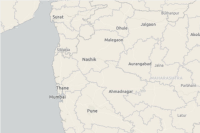

In [9]:
ind_districts_item = ind_boundary_items[4]
ind_districts_item

In [11]:
for idx,flyr in enumerate(ind_districts_item.layers):
    print(f"{idx:<6}{flyr.properties.name}")

0     IND_Country
1     IND_State
2     IND_District
3     IND_Subdistrict


#### Create symbols and initialize a renderer

To symbolize a layer in the map widget, the Python API provides classes to define a [symbol], which can then be used to populate a [renderer] to visualize the layer:

In [12]:
from arcgis.map import symbols, renderers

In [13]:
poly_outline = symbols.SimpleLineSymbolEsriSLS(
    color = [21,76,121,255],
    style = symbols.SimpleLineSymbolStyle.esri_sls_solid,
    type = "esriSLS",
    width = 2
)

In [14]:
poly_fill = symbols.SimpleFillSymbolEsriSFS(
    color=[249,186,91,128],
    type="esriSFS",
    style=symbols.SimpleFillSymbolStyle.esri_sfs_solid,
    outline=poly_outline
)

In [15]:
poly_rend = renderers.SimpleRenderer(
    symbol=poly_fill
)

In [17]:
chennai_pop_map.content.add(
    item=ind_districts_item.layers[3],
    drawing_info={
        "renderer":poly_rend.dict()
    }
)

### Class Breaks Rendering: Using _color_

In [19]:
chennai_cb = gis.map("Chennai, India")
chennai_cb

Map(center=[1467969.8350553361, 8928029.703803757], extent={'xmin': 8926805.189405032, 'ymin': 1466712.7727426…


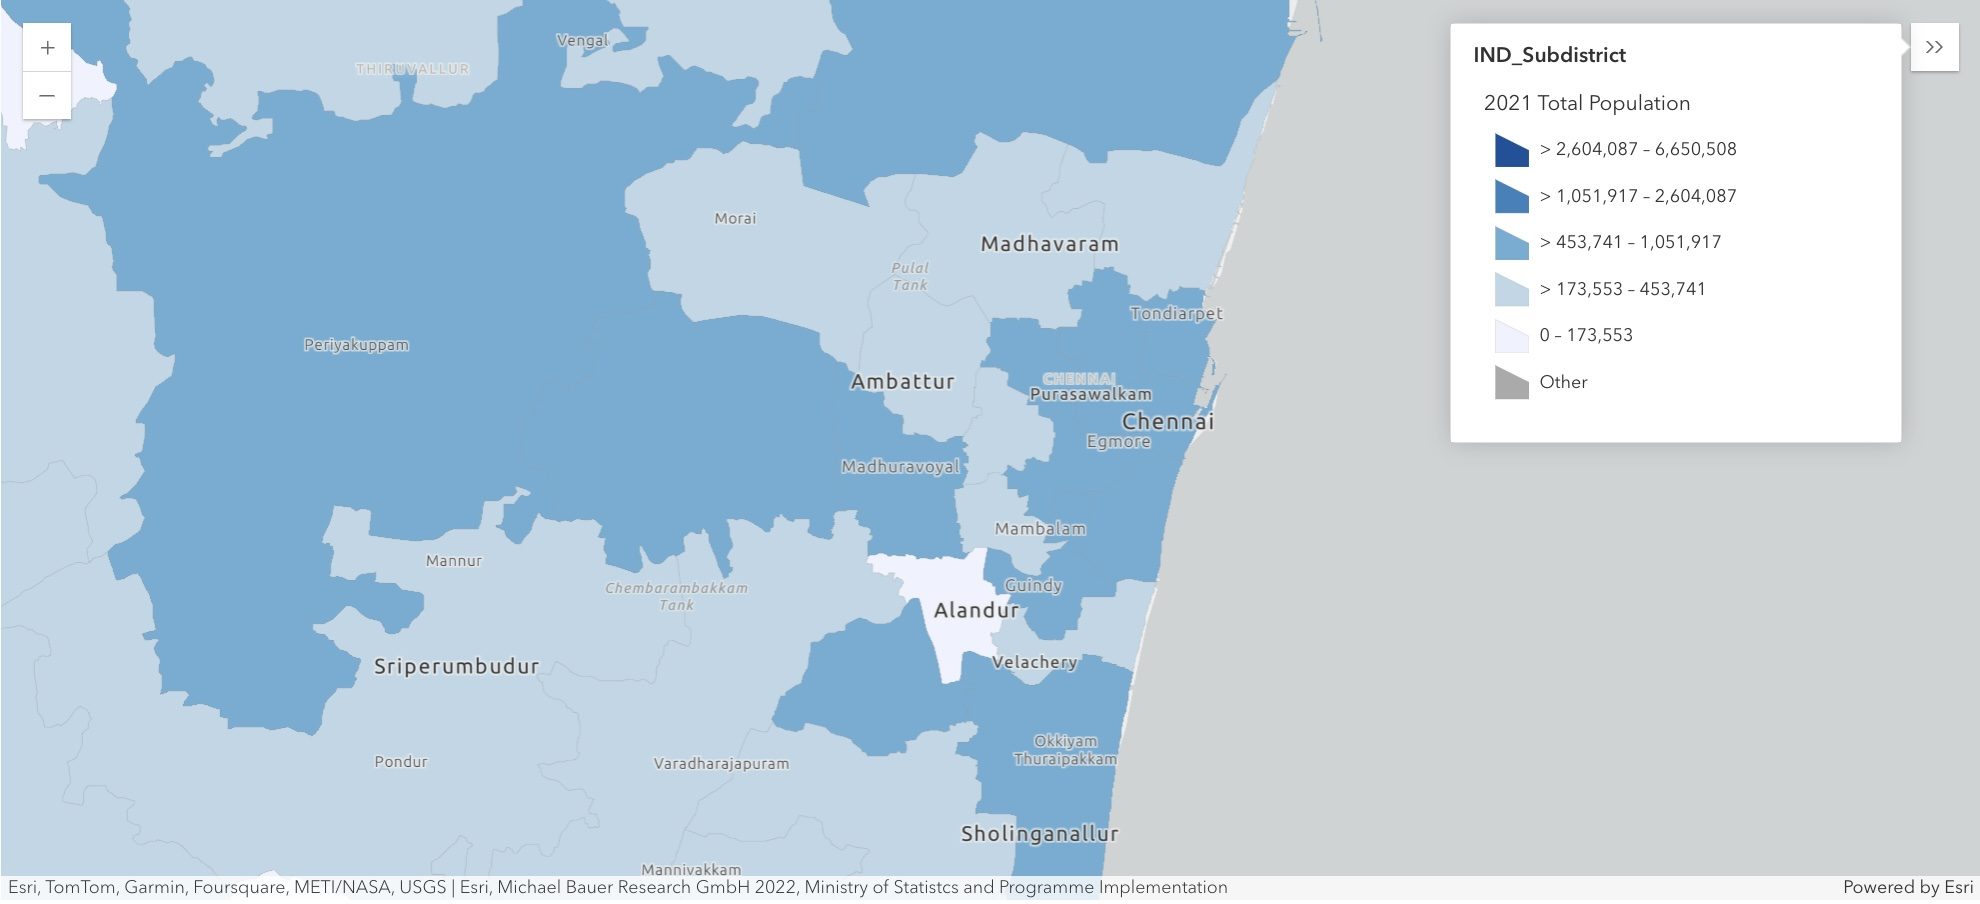

In [29]:
from IPython.display import Image
Image(url="data:image/jpeg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAB7ygAwAEAAAAAQAAA4ikBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g/QSUNDX1BST0ZJTEUAAQEAAA/AYXBwbAIQAABtbnRyUkdCIFhZWiAH6AAFABYACQAWADphY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAABJxjcHJ0AAAGUAAAACN3dHB0AAAGdAAAABRyWFlaAAAGiAAAABRnWFlaAAAGnAAAABRiWFlaAAAGsAAAABRyVFJDAAAGxAAACAxhYXJnAAAO0AAAACB2Y2d0AAAO8AAAADBuZGluAAAPIAAAAD5tbW9kAAAPYAAAACh2Y2dwAAAPiAAAADhiVFJDAAAGxAAACAxnVFJDAAAGxAAACAxhYWJnAAAO0AAAACBhYWdnAAAO0AAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAAUAAAB2GtvS1IAAAAMAAAB7G5iTk8AAAASAAAB+GlkAAAAAAASAAACCmh1SFUAAAAUAAACHGNzQ1oAAAAWAAACMGRhREsAAAAcAAACRm5sTkwAAAAWAAACYmZpRkkAAAAQAAACeGl0SVQAAAAYAAACiGVzRVMAAAAWAAACoHJvUk8AAAASAAACtmZyQ0EAAAAWAAACyGFyAAAAAAAUAAAC3nVrVUEAAAAcAAAC8mhlSUwAAAAWAAADDnpoVFcAAAAKAAADJHZpVk4AAAAOAAADLnNrU0sAAAAWAAADPHpoQ04AAAAKAAADJHJ1UlUAAAAkAAADUmVuR0IAAAAUAAADdmZyRlIAAAAWAAADim1zAAAAAAASAAADoGhpSU4AAAASAAADsnRoVEgAAAAMAAADxGNhRVMAAAAYAAAD0GVuQVUAAAAUAAADdmVzWEwAAAASAAACtmRlREUAAAAQAAAD6GVuVVMAAAASAAAD+HB0QlIAAAAYAAAECnBsUEwAAAASAAAEImVsR1IAAAAiAAAENHN2U0UAAAAQAAAEVnRyVFIAAAAUAAAEZnB0UFQAAAAWAAAEemphSlAAAAAMAAAEkABMAEMARAAgAHUAIABiAG8AagBpzuy37AAgAEwAQwBEAEYAYQByAGcAZQAtAEwAQwBEAEwAQwBEACAAVwBhAHIAbgBhAFMAegDtAG4AZQBzACAATABDAEQAQgBhAHIAZQB2AG4A/QAgAEwAQwBEAEwAQwBEAC0AZgBhAHIAdgBlAHMAawDmAHIAbQBLAGwAZQB1AHIAZQBuAC0ATABDAEQAVgDkAHIAaQAtAEwAQwBEAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBpAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBMAEMARAAgAGMAbwBsAG8AcgBBAEMATAAgAGMAbwB1AGwAZQB1AHIgDwBMAEMARAAgBkUGRAZIBkYGKQQaBD4EOwRMBD4EQAQ+BDIEOAQ5ACAATABDAEQgDwBMAEMARAAgBeYF0QXiBdUF4AXZX2mCcgBMAEMARABMAEMARAAgAE0A4AB1AEYAYQByAGUAYgBuAP0AIABMAEMARAQmBDIENQRCBD0EPgQ5ACAEFgQaAC0ENAQ4BEEEPwQ7BDUEOQBDAG8AbABvAHUAcgAgAEwAQwBEAEwAQwBEACAAYwBvAHUAbABlAHUAcgBXAGEAcgBuAGEAIABMAEMARAkwCQIJFwlACSgAIABMAEMARABMAEMARAAgDioONQBMAEMARAAgAGUAbgAgAGMAbwBsAG8AcgBGAGEAcgBiAC0ATABDAEQAQwBvAGwAbwByACAATABDAEQATABDAEQAIABDAG8AbABvAHIAaQBkAG8ASwBvAGwAbwByACAATABDAEQDiAOzA8cDwQPJA7wDtwAgA78DuAPMA70DtwAgAEwAQwBEAEYA5AByAGcALQBMAEMARABSAGUAbgBrAGwAaQAgAEwAQwBEAEwAQwBEACAAYQAgAGMAbwByAGUAczCrMOkw/ABMAEMARHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjQAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAIPfAAA9v////7tYWVogAAAAAAAASr8AALE3AAAKuVhZWiAAAAAAAAAoOAAAEQsAAMi5Y3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArhQAAFHsAABD1wAAsKQAACZmAAAPXAAAUA0AAFQ5AAIzMwACMzMAAjMzAAAAAAAAAABtbW9kAAAAAAAABhAAAKBR/WJtYgAAAAAAAAAAAAAAAAAAAAAAAAAAdmNncAAAAAAAAwAAAAJmZgADAAAAAmZmAAMAAAACZmYAAAACMzM0AAAAAAIzMzQAAAAAAjMzNAD/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAfP/AABEIA4gHvAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP10/aT0y+0n9oPxraajGYpG1q9mCnH+rmlaRDx6owP414nX7sftj/s5W/xh0S58R+GLVT4m03d5BBCG4iDZMTHoeMmPOMNxkAmvwtuba4sriSzvI2iliYo6ONrKy8EEHoR0xX6vlGOjiKEVtJJJr+uh+UZ3l08LiH/LLVP9PkQ0UUV6p4wUUUUAFFFFABRRRQAUUUUAFFFFABXpvwu+JOofDjWzdxL5tpcbVuIu7KOhHuM8dq8yoFZ1aUakHCa0NKNWVKanDdH68aTqllremQavpr74LlFkjbGMqw447fStCvK/gp/ZX/Cs9L/sj7nlnzOv+tz8/X/a/D0r1SvhZx5ZOPY+9py5op+QUUUVJYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVzmu+LvDPhmLzddvobUdAHYAn2A618v8AxE/aUiaA6Z8PwcuvN3IuNv8AuoR+p/Kt6GGqVnamv8jnr4qlRV6jt/XY+nNc8Z+E/DLCPXtQgtXIyEdwGIHoOtfn18a/FWh+MfGx1jw9KZrbyEj3FSnK57MAf0ry6+vrzU7yS/1CRpppW3O7HJJqpX0mCyxUJKbld/gfM47NHXj7NRsgooor1TyQooooAKKKKACiiigAqWCea2lW4tnMbocqynBBHpioqKVug1psfSfhv9pTxTpOlWuk6hbx3bQuoa4djuaMdiAOuO/6V9zaXqVnrGnw6pp774Z0DofY1+Q1fb/7L11r02iXsF05awiYCEEg7WPUDuB+lfPZpgKdOHtaenkfR5Tj6lSfsqmumnyPqmiiivBPoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvMfi94UPi7wJeafG2ySJfOQ5wMx84PB4r06svW4JLnRru2hGXeF1Ue5XiqhJxkpLoRUgpRcXsfkUORkUtSTW81pK1rcDa8RKMPQrx2qOvvYvRH5+1Z2CiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr97P2b3SL4EeG5JDhVsUJPoBX4J1+3/AMJtTOl/sy6DIhw0ljHGuP8Aa/8ArV8jxd/Ap+v6H1/B/wDHqf4f1Oa1i8bUNUuL1sZkcnis2iivhT7k5W4a3s/F8DPKwe9t2jWP+A+Uc5xjr82PpXVVwPjXEOoaFeLw636x7h12ujZH0OBx7V31XJaRZEXq0FFFFQWFFFFABRRRQAUUUUAFFFFABRRRQAUnSlqBmz9KAHF/Soi4qJm/KqrzqtAFzf6U3zKynuqgN32zQOxueZ70eZ71gG775pn20etAWOi8z3o8z3rnfto9aPto9aAsdF5nvR5nvXO/bR60fbR60BY6LzPejzPeud+2j1o+2j1oCx0Xme9Hme9c79tHrR9tHrQFjovM96PM96537aPWj7aPWgLHReZ70eZ71zv20etH20etAWOi8z3o8z3rnfto9aPto9aAsdF5nvR5nvXO/bR60fbR60BY6LzPejzPeud+2j1o+2j1oCx0Xme9Hme9c79tHrR9tHrQFjovM96PM96537aPWj7aPWgLHReZ70eZ71zv20etH20etAWOi8z3o8z3rnfto9aPto9aAsdF5nvR5nvXO/bR60fbR60BY6LzPejzPeud+2j1o+2j1oCx0Xme9Hme9c79tHrR9tHrQFjovM96PM96537aPWj7aPWgLHReZ70eZ71zv20etH20etAWOi8z3o8z3rnfto9aPto9aAsdF5nvR5nvXO/bR60fbR60BY6LzPejzPeud+2j1o+2j1oCx0Xme9Hme9c79tHrR9tHrQFjovM96PM96537aPWj7aPWgLHReZ70eZ71zv20etH20etAWOi8z3oElYC3ffNPF32zQFje308OPpWKl1VtJ1agRqB/WpPpVFW9OlWFbH0oAnooooAKKKKACiiigAooooA//9D+6TUP+P8An/66N/OvzF/bG/ZRvvEd1cfF34aQNNelQ2o2KctKEGPMiH94AYZB1xkDOc/p1qH/AB/z/wDXRv51Tr38Hip4ecalPf8ArQ83G4OniaTpVVp+Xofy/wAGkatc6smgW1rNJfyzC3S2RCZmmY7RGEA3Fi3AUDOeK9J/4UF8ef8AoR/EP/gruf8A43X7JfE39m/wP4o+Jvhj4oaWg03WrDW9LuZZYh8lwlvcISrpwMlRgNjPAzwMV+gte3iuKnBR9nT6a3/Q+YocIpuSqVNOlux/LR/woL48/wDQjeIf/BXc/wDxuj/hQXx5/wChG8Q/+Cu5/wDjdf1L0Vyf631v+fSOn/U6h/z9f3I/lo/4UF8ef+hG8Q/+Cu5/+N0f8KC+PP8A0I3iH/wV3P8A8br+peij/W+t/wA+kH+p1D/n6/uR/K7f/BL406TYT6rq3g7XLW1tY2lmmm064jjjjQZZmYoAqqBkk8AV5jX9QX7S7FP2cPiAy8EeG9Vx/wCAslfy62pLWyE+gr6LJM1ljYTlKKVux83neUwwM4RhK90WKKKK9s8MKKKKACgelFA9qAP0K/Z18P6/ongjz9XdfIvWE9tEOSiEdSc4G7ggAcd+uB79XlXwTu728+GWlvfR+WyIY14xlEJCnn2xXqtfC4iTdWTfc++w0VGlBR2sgooorE2CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPy7+LH/JRdW/67/0Fed16J8Wf+Si6t/12/oK87r7fB/wKfovyPhMZ/HqerCiiiuk5gooooAKKKKACiiigAooooAKKKMUAFfUX7MPiW20/xDdeHLj5TfIGjPq0fbp6Vx/gX4CeLvGVn/ac+3TrZlDRPMOZM+ijnHuce1UfF3wy8a/CO/t/ECsssUUimK5iGQrjpuBHHt2rzMTWoV4yw6n73T1/I9TC0K+HccS4e6vy9D9JKK/Pz/hpn4j/AN2z/wC/R/8AiqP+GmfiP/ds/wDv0f8A4qvF/sjE9ke5/bGG7/gfoHRXwdo/7QnxW1vUodK02C1mmmYKqLEef/HuK+6LNrprSJr1QsxQb1XkBscge1cmIws6DSmdeGxVOum6ey8izRRRXOdIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhAIwaWigD8u/in4Vu/CfjW9sponSGWRpYWfB3q3OQRx/hXndfol8dvhxP438OLe6NEJNQsTuQDALp3Xp+QyOa/O943icxSqVZTgqRggjtivr8txSq0knutD43M8I6NVtfC9v8htFFFeieaFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBd02CW61CC1t4hO8kiqsR4DknAXgg89OCK/Vq98feMtP8JaN4S1XwXdWE1hAqyRWhgW3BxgeWpnJC46Z5r8pdNv59K1G31S2AMltIsqBumUORn24r9KtP8Ajpp/izTrfXtcgu0uZ4lLrFaTSIMDGFZY8EfSvkeKYzapWhda9/0Z9dwtKmvaXnyvTtt80emQu0sKyOhjLAHa2Mj244qWuP0XxvouvXv2CxjulfaW/e2ssS4H+06AV0Vnqem6hJNFYXEczWz+XKsbBjG4/hYDofY18PKEo7qx9xGcWvdZzXj26uLDw297atseKaDBwDwZFB/Q12SnIBrnvF0ksPhbUZ4DteO2kdT6FVyP5VoaPO1zpNtcOcl4kJ/ECnb3F/XYSfv28jSoooqCwooooAKKKKACiiigAooooAKKKKAGOcDFVHPb0qw55+lUZDhaAKtxNjgVl/6RcyeTaRtK/wDdQZP5Cm3c20E1+g/7KkKR/C9516zXsrt9QEX+QFJ6FRR+ekuleIz/AMuNx/36b/CqTaT4k7afdf8Afpv8K/a2ilzF8h+Jf9k+Jf8AoHXX/fp/8KT+yfE3bTbr/vy/+FftrRRzByH4lf2R4m/6B1z/AN+X/wAKP7I8Tf8AQOuf+/L/AOFftrRRzByH4lf2R4m/6B1z/wB+X/wo/sjxN/0Drn/vy/8AhX7a0Ucwch+JX9keJv8AoHXP/fl/8KP7I8Tf9A65/wC/L/4V+2tFHMHIfiV/ZHib/oHXP/fl/wDCj+yPE3/QOuf+/L/4V+2tFHMHIfiV/ZHib/oHXP8A35f/AAo/sjxN/wBA65/78v8A4V+2tFHMHIfiV/ZHib/oHXP/AH5f/Cj+yPE3/QOuf+/L/wCFftrRRzByH4lf2R4m/wCgdc/9+X/wo/sjxN/0Drn/AL8v/hX7a0Ucwch+JX9keJv+gdc/9+X/AMKP7I8Tf9A65/78v/hX7a0Ucwch+JX9keJv+gdc/wDfl/8ACj+yPE3/AEDrn/vy/wDhX7a0Ucwch+JX9keJv+gdc/8Afl/8KP7I8Tf9A65/78v/AIV+2tFHMHIfiV/ZHib/AKB1z/35f/Cj+yPE3/QOuf8Avy/+FftrRRzByH4lf2R4m/6B1z/35f8Awo/sjxN/0Drn/vy/+FftrRRzByH4lf2R4m/6B1z/AN+X/wAKP7I8Tf8AQOuf+/L/AOFftrRRzByH4lf2R4m/6B1z/wB+X/wo/sjxN/0Drn/vy/8AhX7a0Ucwch+JX9keJv8AoHXP/fl/8KP7I8Tf9A65/wC/L/4V+2tFHMHIfiV/ZHib/oHXP/fl/wDCj+yPE3/QOuf+/L/4V+2tFHMHIfiV/ZHib/oHXP8A35f/AAo/sjxN/wBA65/78v8A4V+2tFHMHIfiV/ZHib/oHXP/AH5f/Cj+yPE3/QOuf+/L/wCFftrRRzByH4lf2R4m/wCgdc/9+X/wo/sjxN/0Drn/AL8v/hX7a0Ucwch+JX9keJv+gdc/9+X/AMKP7I8Tf9A65/78v/hX7a0Ucwch+JX9keJv+gdc/wDfl/8ACj+yPE3/AEDrn/vy/wDhX7a0Ucwch+JX9keJv+gdc/8Afl/8KP7I8Tf9A65/78v/AIV+2tFHMHIfiV/ZHib/AKB1z/35f/Cj+yPE3/QOuf8Avy/+FftrRRzByH4lf2R4m/6B1z/35f8Awo/snxN/0Dbr/vy/+FftrRRzByH4ljSfEv8A0Drr/v0/+FTrpPiT/oH3X/fpv8K/a2ijmDkPxfi0rxGP+XG4/wC/Tf4VN/pFtJ5N1G0Tj+FxtP5Gv2ar5q/arhR/hek7dYL2F1x64Zf5Gi4cp8I2RluJo7WBGkklYIiIMszNwAAOpPQAV2kfgrxx0Gh6j/4Cy/8AxNefeFrt18b+Gth66vYg/Tz0r9d7dsim3YmMUz8018E+OMY/sPUf/ASX/wCJp3/CE+OP+gFqP/gJL/8AE1+nqHmpqXMVyH5ef8IT44/6AWo/+Akv/wATR/whPjj/AKAWo/8AgJL/APE1+odFHMHIflvP4R8YWkD3V3o1/DFEpd3e2kVVVRkkkrgACueGCOK/Sf4tu0fwp8TSJwV0m9I/CFq/M3T2LWUbH+6KaIlGxcooopkn/9H+6TUP+P8An/66N/OqdXNQ/wCP+f8A66N/OqdetHZGBg6v/wAf2mf9f1r/AOjVr36vAdX/AOP7TP8Ar+tf/Rq179XHit0aUwoor4N/a1/a1+Avhv4C/Ezw74d+JmgWHi+w0DWba1tbbWbeLUodSit5VSONFlEq3CygBVADhxgc1yln3lRXyb8DP2qP2efGfhPwp4WsfiP4d1XxHe6faRmzj1i2nvZbnyl3r5YlMjSZzkYzmvrKgDxD9pr/AJNu+IP/AGLWrf8ApLJX8utn/wAesf8Auiv6iv2mv+TbviD/ANi1q3/pLJX8utn/AMesf+6K+84Q/hVfVfkfBcY/xaXoyzRRRX2B8YFFFFABSjrSVteHfD+o+KNat9A0lQ1xcttQMdo9SSfQAVMpKK5nsioRcmoxWp+mXwvubW6+HeivZurqtnEhK9AyKFYfgQRXeVw3w58HN4E8JW/huScXDxF2Zwu0EsxPA9uldzXwlS3M+XY+/pX5I829kFFFFQWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfl98XU8v4k6uh7Tf0FecV7N8fNPjsPibfNHn9+ElOfUjHH5V4zX22CaeHp27I+FxqtiJrzCiiiuo5QooooAK9P8H6lY6H4M13xCdItNXuNOENw0N0pb/RUb9/swVw4TJXtntXmFdz8Pddt9D8RRm/ANpcAwzqehjcYP6VyY6lOph5wpuztpY7MBVhTxEJTV4nvmn+FtD0rxppHhjStLstV/4SK8kkWS4XckOmwxea0qYI5PyonUZYcV5bL4O8Car4ifRtH1W6V7m7ktLWd9Pmj0+a4UkeRFckbGYEbRjgkYBJ4rsPhxG3w8vg2t6lb6i0aR6HpC2k4ndNMVywLAfddh5aEf8ATL3rV+Ff7O2oeCtSsdI8Q+Hr7UI9Kvpb201U+JbuSyz5jSxOdPe5CrIucFBCUyM7q+MeY46k1UbtzdH5afI+0jl2AqxdNK/L28/6R5Nq/hn4e+HtQv8ATNb1a/j/ALIkSHULxNMnewtJHVWCyTgbQAGXLDKr3IrV1r4Z6R4S1JdB8S3t3NqUiNNHZ6XYyX032dMAysIxhE5ABYjPQZr3jxT8J/GN14X+I1pJHAp8TSzTWhaVQm1rWKP5/wC58yHrXK/EnX5PAfipfHenap4bl+36NBaTWerawumS/wCh/cmhcRT+YmWKsuwZOMHtVPO8Yk/e09FoSsjwTaShr2vvojg4/hV4euPBtp490q91HU9Ovv8AUrY6bLLcAAlTvi4ZApUg578eldp8N1g8L3Phq98K6gl7pfiLW7SBpHg2M8OXWSNkkXchVl2sOCCMVylrBrsvwm8BWt+0htooLmfU9Is9WbRbmb7RI7wOs3mWxeNd2fLaRMgg4OMVP8NvAWr2Xw88JeCtDa1utT0PWG1KWz+3rO4tpbqV9vnksryJHIMlm+Yj71Y1swxtek41L8rS6enka0cuwNCrGVO3Mm+vqfoPcBRO4TgBjjFZmpabY6vYy6ZqUSzQTKUdGGQQa8v8Y+L0+D3g5Bqcn9oXW94oMDCuckrnHQBf5V8laz+0X8S9WjWKCaCw2nObaPBPsd5f9MV3YbAVayvT27nHicfRovlqb9v60Ob+Kvw5vfh94he3VCbCY5tpOox/dJ9R/KvLq7HxH8QPGXi22Sz8RX73MUZ3KpCgZ/4CBVDw74T8ReLLv7F4etJLlx12j5V+p6CvqqLnTpL6w1ofJVowqVf9ni7Ppb/I774Ef8lN04D1b+VfpRXgHwb+DEXgJf7b1zbLqjgqNvKxKey+57mvf6+XzGvCtW5obWsfVZZh5UaCjPcKKKK4T0AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+f/AI0fCbRPEegXev6RaJHqsK+ZvQbTIF6huVUnA6npX0BSEAjBrSlUlTkpR6GdWlGpFwktD8dx7Uteu/GzwV/whnjeZIFxa3uZ4fbP3h1J4P0ryKvt6FVVaanHqfC16LpVHTfQKKKK1MQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAfG5ikWRcZUgjIBHHseK+stD/AGndXEFrpA0SKafCRApL5as3QYXaQv0zXyVX0n+zd4J/tvxK/im7XMGm8J7ysPYjoPbFePnVHCug62Jjfl26fLSx7GS1cUq6o4aVubfRbL1R9aadpfjnUrpNU1zUxZRFR/oVpEhA9nlcMW/4CErr9K0mx0a1+x2C7VyWJJLMzN1JJ5JPrWlRX5lKbl/wD9NjBRI5kEkLRnuCK4r4c+IU8S+E7fUAQXXdFIFBADIcEc13NZWjaJpXh+wXTNGhW3gUkhV9W5J57mhOPI01rpb+vuBqXMmtv+GsatFFFQWFFFFABRRRQAUUUUAFFFFABRRRQBVc8VnXJwtaD9Ky7s8UAc1qD4GK/Rj9lJt3wmQ/9Pc/9K/N/Ujgmv0c/ZMOfhFH/wBfc/8AMVLNI7n0xRRRUmgUVwl98Uvhlpfj+y+E+p+ItLtvFOpW7Xdno0t3EmoXFum7dJHblhK6DY2WVSBtPoaxvC/x1+CPjjxzqXww8FeMdD1fxLovmf2hpNlqFvcX1p5LiOTzoI3MkexyEbco2sQDzQB6pRXCa38Ufhl4Z8ZaV8OvEniLS9P8Qa6HOmaXc3cUV5eCIZfyIGYSShQMtsU4FeVeJf2yP2Q/BniW68F+MPip4P0nWLGU29zYXmuWUFzDKOCjxPKHVh/dIBoA+kKKwfDPinwx400WHxJ4O1G11bTrgExXVlMk8LgcfK6EqcdODW9QAUVw/wARPiZ8OPhD4Vn8dfFfX9N8MaJa4E1/qt1FZ2sZbgBpZWVBntzXIfBz9o39n/8AaH0641b4C+NtC8ZW9mVW4fRb+C98gt90SCF2KE44DYzQB7PRRXg3xS/ac+BnwU+I/gj4SfE7Xk0rxD8R7qey8OWbQTSm9ntvL8xQ0cbJHt81OZGQc8dDgA95ooooAKK+bvAn7Xv7NvxI1n4gaD4T8WWrz/Cu6Nl4ra4WSzh0uVd+RLNcJHEVURPl0ZkAXr0r3bw34l8OeMtAs/FfhC/ttV0vUIlntbyzlWe3nicZV45EJVlI6FTgigDbooooAKK43xZ8Rfh74CudLsfHOu6dos2uXaWGmx311FbNeXb/AHYIBIymSRuyJlj2FdlQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzt+1DZXl98KpY7GJpWW5ichRnCrnNfRNQ3FvBdwPa3SCSOQbWVhkEHtQB+MPhV/+K38N+2r2H/o9K/YK1bgV8UfFD4Ft4Y+IGgeKfDWPsT6xZO8ZIBXEyE4/D/Oev2laHimyYqxuxngVarhvHXg61+IHgzUfBd5fX+mR6jCYvtel3UlleQE9HhmiIZGUgEdj0YFSQfjL4JfFvxz4a+I9z+w5+01ePqPiU6ZJd6J4gsneBta0gZjMkhhYSWt5Fgq5DLlhujbOCUUfoNRX5z/AA++JXj79lX4yaN+zD8dtWufE/h/xhNMvgrxJdP5+oM8eGew1D+N5Iww8u5xtdcbsHhf0YoA87+L3/JJvFH/AGCL3/0S1fmbpv8Ax4xf7or9Mvi9/wAkm8Uf9gi9/wDRLV+Zum/8eMX+6KqJnMvUUUVRmf/S/uk1D/j/AJ/+ujfzqnVzUP8Aj/n/AOujfzqnXrR2RgYOr/8AH9pn/X9a/wDo1a9+rwHV/wDj+0z/AK/rX/0ate/Vx4rdGlMK+Tf2qPgZ4T8Z/s8/Eex8LeFNPvfEeq+HdYjtDHZxfaZb2e2lEe19ufMaQjBznNfWVFcpZ4V8H/g/4F8K+BfDMsvhnTrHV7HTrRZJFtIknjnSJQ3zBchgc5Oa91oooA4z4j6dY6x8PNe0jU4lmtrrTrqGWNvuvG8TKyn2I4r8F/2lf2VfEngDUbrx14HsBN4YlXz2WDk2fA3BlJzszkgjhRwcAV++vjT/AJE3Vv8Aryn/APQDXmWnRxy6XHFKoZWTBBHBGK9rJ8dUwsnOH3Hl5pl1LGU/Z1Pk+39dj+YKiv0T/as/Y+vvCt7J4/8AhLZPcaXO/wDpGnwIXe2du8ajkxE/wj7n+79388p7ee1uHtLlDHLExR0YYZWXggjsR6V+j4TGUsRBTpv5dj8wxuAq4Wo6dRfPoyGivd/Fn7PXjjwf8JtJ+L9+YptO1VlASHczwpIuY2k+XaAxyvXg7RznjwitqNenVXNTd1sYV8PUotRqRs7fgFdJ4P1+Twv4nsdfjz/osyuwUAkqD8wGeORkVzdFVOClFxezM4TcJKUeh+vGk6pZa3pkGr6a++C5RZI2xjKsOOO30rQr8u/CvxW8eeDbVNO0K+KWqvv8l0V09xyMgHuFIr9Dvhz4k1Dxf4MsfEOqQC3nuFO5FBC/KxUEZ7EDIr5DGYCeH1e3Q+zwWYU8RpFWaO2ooorhO8KKK5/xR4l0zwhoVx4g1YkQW65IXG5j2VckDJ6AU0r6ITaSuzoKK+XL/wDan8JraOdL0+8efb8glCKme2SrscfhXzF4k+LXj/xRefar3UZYFH3YrZjFGv4A8/iTXoUMrr1HqrLzPNr5th6a0d/Q/UCivlTwZ+0v4b/su00/xbHcJdIm2W4VFaMlR97g7ufQL19q+i/D3inw94qsxfeHruO6j77DyvsR1H0Irkq4epS0nGx2UcTSqr93JM6CiiisTcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorSs9H1PUIzLZQNIo4yoqw3hzXEIVrVxu4HFTzx2uUoPojForYHh/Wi7RC2fcnUY6VXbSdSS3+1tCwizjd29KOaPcOR9jPorabw5riR+a1q4X1xVaDSNTuYWnt4WdE4JA6Yo549w5JdjOorUbRdUQRs8DKJThM8ZPoKF0TVnnNqlu5kXquOaOePcOR9jLorTi0bVJ5Wt4YGZ0+8AOlRwaXqFzO1rbws0i9VHUUcy7hyvsUKKuf2fe/afsflnzem3vRc6de2UohuojGx6A8U7oVmU6K2D4f1pXWM2z5boMdaSPQdZlkaGK2csn3gB0pc8e4+SXYyKKvXWm39idt3E0f1FUaaaewrWCiiimI/PP8AaRCj4lNj/n2i/rXgde7ftGNu+JcvtBGP514TX2mX/wC7Q9D4jMf95n6hRRRXYcQUUUUAFFFFAHbfDYf8V/o4/wCnuL+Yr9Uq/K74a/8AI/6P/wBfcX8xX6o18xnf8WPofU5F/Bl6/oc54u1DTNL8M317rDbLZIW3kDJxjsK/Pvwx40+JOpzW/hrwqDdrAcW6PAkrRLnAO4qdv14Ffonq2i6Rr1mdP1q2juoCQdkqhlyOnBpmkaBofh+3+y6HaQ2cZ5KwoEBP4CuHD4iFOEk4KTffb7jvxGGnUlFxnypdtz5+0P4Cz61f/wDCR/FW9bUbt+TDGdqD6sME/hivobS9H0rRLVbHR7aO2hTgJGoUfpWlRWNWtOp8T/yXojalQp017iPKviv8Nf8AhZWjQafHdfZJLeXzFYruXpg5HHbpXn+l/sv+B7QpJqV1dXZAwy7lRCfoF3D2+avpWiqhiqsI8kJWXkTPCUZy55QTZ4zZ/AD4V2UyzjTjIyHI8yWRh+I3YP0xXrdlYWWm262mnxJDEgAVUAUAD2FW6KznUlP4nc1hShD4IpeisFFFFQWFYf8Awk3hwakNF+3232w9IPNXzP8AvnOf0r4H+Nep+KtG+Ieo2X9oTpDNtkSNJXChGGMY6Dp0rxG2uJ7OdLq0YxyRkMrLwQR6V7NDJ3UpqfPutDxMRnKpz9nybH7BUV86/Bj4zQeL7dPD3iBxHqUYwrHgSgf19q+iq8qrSlTk4TVmj16NWFSCnB6BRRRWZoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHmfxX8eD4f+FJNVg2G7kPl26PyC59sgkDvivi2z/aC+KNrqH26W9S4Xn9zJEoj5/3Ap47c16J+1H4jS51ex8LwlT9mUzScHIZuBz0xivlGvpMswNOVHnqRvf8j5jNMdVjX5KcrJdj7C8PftUuZIoPFGlgLjDzWz9/aNu3/Aq96074x/DPUrE38esW8SrnKzN5T8eitgn2wK/MOitKuTUZfB7pnRzqtHSaT/A9k+MHxUm+I2qrDZp5Wm2hPkKR87HpuPpnsOwrxuiivToUY0oKENkeXXrSqzc57hRRRWpkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAE1tbTXlzHaWy7pJWCIvTJbgCv1L+HfhKHwT4RtNBj++i7pT6yNye5/wr4t/Zz8OR6z48GozhWTT4/MwSQdx4XGOPXrX6E18JxVjXKpHDR2jq/Xp9yPu+FcEo0niXu9F6L+vwCiiivkj60KKKKACiiigAooooAKKKKACiiigAooooAKKKKAKj9KyrytV+lZV5QCOO1I9fpX6Qfsl/wDJIYv+vuf+Yr83dR6Gv0i/ZL/5JDF/19z/AMxUs0gfTNFFFSaH88H7Q3/KyV8BP+ya6n/LVa/DWPwb8c/hP+2/+1F/wUu/ZyeW81r4EfFK6l1rRlOI9R8O6jcXi3ytgE/u1jBbjCoWk6xrX9KXxk/ZR+Pviv8A4Lb/AAj/AGvNA0Dz/h34Y8EX2j6nq32q2TyL2b+0NkfkNKLhs+fH8yRFRu68HFH/AIJufsffGz4KftL/ALWnjD47+GY7Lw18VPGTajoTS3Frdx6jpzy3pYtFFJIyKUmTKTKhIbG3g4APib4/fHL4d/tL/wDBWX9hb48/Ci8F94f8UaNrt9aScBlD28oaNwM7ZInBjkX+F1I7Vxn7Dv7Hn7MP7Wn/AAU3/bZtv2kfBWmeMF0TxPpQsP7QjLm2+1G/83yyCCu/ykzj+6K4n4Hf8Eef2uv2XP8Agrn4H8X/AA80yTV/2evB2s6pq2jXkmoWudJg1e0kElt5Ekwuj5c2xPkjZWGJOGZ8eyeB/hj/AMFZv2Nv26/2jfjF+z58A7Lx/wCHvi7r1rd2N9e+JNN09Y4LE3Hlv5TXHm4f7Qcqyow29OaAMXxR8IPDn/BID/grL8EvDX7KV3d6T8Mv2gprvR9a8IvPJd2kN5C0UaXEIkZmT57iEqTkoEkUNsbav9Ttfgd+zp+wb+2T8ev2z9F/4KF/8FOL7RNN1DwRayw+EPBegO01nphkDAz3ErFlaRc7vleTc+1iyLGsdfs1/wAL4+Bv/Q56F/4Mbf8A+LoA/A//AILqfBT4oeIPjP8AAz9orWfh/qnxd+DvgC7vJfFfhTSVM0u6TYUuGt1/1qBVOcjYAhRyqyE19P8A/BMH4jf8ElPjP4q8W/Gr9gPwtpnhLxr/AGfDZ6/pK2H9k39raxsWVfsq/uERpMeY9tlWZUDklVA9n/a9/aD/AOCgPgLxd4X+If7D3w78O/GX4dG2nTXLO31iO01VrndhTBK58hY4wuPlEzsxYFFChq+R/wBgX9k39q3xt/wUL+IX/BS79qfwNYfCP/hJ/Dy+HNO8KWd7Ff3cqs1uz3V5Pb4jZsQADIV2JGUUIu4A9o+Af/BVnVPjV/wS28V/8FGpvBEWnXHhq21acaCuoGVJv7MOAPtHkKV3/wDXI7fevy3/AOCj/wC1zqHjX4gf8E9P2y4PCN5fX2vS6lrkHhvSnFzcy3F7FpZjtIXYRhiXdUDFV9cdq574ffsa/wDBWj4F/sN/Ff8A4JY+B/hVpmtaBqkuqy6P44k120hhn0+5G77OlmxEhnuDHsRpWiWIy5fCqCfbfjr+wR/wUIm+Gf7C1z8BvClg/i74EaZM+vx6nf2q2dldx2+n7IJWWYtKkzW8kRa2Eu372QMGgD7m+Ev/AAVF+PGgftVeFP2VP29vgpL8Ib/4jrKfCepW+swa1ZXU8QBNrK8KKqSjITIJ+dkGxVZWNX4jf8FTPj/4w/ai8Zfs1fsD/A+X4un4YyJB4r1a41qDRLSG7IbNpbtOjB5AysmSQd6MNmwb68Ib4J/8FDf+Chv7cHwg+L37Vnwss/gr4A+B9/LrUVsdattZvdV1X92VEbW2AsSyQxn5lUbN2GdiAtXQfgv/AMFF/wDgnL+2N8Y/Gn7Lfwos/jV8PfjZrTeJYwNbttFutJ1S4MkkqzG46xeZI33VZdgQ71bKkA+J/wBhf4x+DPF/w4/4KL/HT4neBJ9Q0afUJtV1LwjrTmznYRx37yWVw8W4xSKylCyZKMMjkCv0Kt/+Cknhv9mL9jL9mXwz+zd8K7KDV/jNp6weGPDtxrC2Gj6XFBHHJIJ9RuEJYgzIEBUPMxPO7Ab5/wD2eP2Bf2/dH+AX7b+l/HbwxY/8Jr8cIri40NNMvrU2eoXd1BebkgLTAwxrJOqKbnyjjk969R8e/sy/tD+Hf+CfHwE/Zy+Iv7MujfHDT/DehRWvinRrjXLex1bSryKIRo1jOG8vIywd4J2Zh8oAHzUAcl/wVD/bF/4KPaf/AMExfF/jHUfhLe/CXWrbUYbHVtb0vxVCZdOtY7uz8i8sZLby55Uu3c27IuxkUkksua9C8Tf8FXv2k/2Pf2KvhT8Yf2oPg86ah4q8QaX4bhtrXXU1O8vdLlsEmGpKY4m33ErBwLZyrFgMuM14P8KP+CYP7Z+sf8El/jx+yx4ss28NXnjnV/7S8C+DNQ1ldV/sOwtLqG6hsmvctHmXyQgw2wHDttZnx1/xq/Z9/wCCgn7Xf7LP7OPhzxh8Gj4P8SfCj4kaBJqtgdc0+6Emi6PaxpJqSv5saqryF1FsrSSjZkbgQaAO6/ak/aN1jxFH+zl4h/b8/ZwsLHxJ4m+K9npPhvTbrXftEuiRXBtxDfu9qpjmk3Md9rIFTMa7h0r6p/ab/wCCmfxS8M/tVXP7D/7Enwom+LvxE0TTotV8QebqUWkabpNvOEaNZJ5lIaVkeNtuUGHXaWO5VZ/wVP8A2Wvjv+0f8TP2avEHwY0L+2bP4f8AxM0vxBr0n2m3t/smm20sTSS4nkjMm0KfkiDuccLXz/8AF/8AZ+/bk/Yv/wCCjPjj9ur9kL4f2vxi8KfFnTLK18QeHRqkOk6hYXlhHHEksUtwCrxkR7sKGOXZSqhVagD5D/4Kk/tvf8FKIPAvwE1+y+FOr/CSTVfGumpdwweK4o5r/VFmuoho8v2UoWtLmJEl86UCPnBQ4BP9MHwF8VfF3xt8JNG8UfHjwpF4H8WXaSHUNDhvo9SjtGWRlQC5iASTdGFfgcbtvavxc/b++Bv7f37a/wCxZ8M/iM/w00/Qfix8P/Htj4ufwZHrUFwk9pYmdUiF4dkAlKvGzDftwGwd2Er9pvgR40+JfxE+Eui+NPjF4PfwD4kv4me90CS9i1FrJg7Kqm4hCxybkCv8oGN23qKAPXKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue8UeJ9I8H6LLrutSCOGIfmfQflXQ18zftaf8khk/wCvuD+ZoEz5I8X/ABb1f4lfE/w7KzGOxTWLERRDpgTp/n/Ix+k9l0Ffjt4U/wCR08Nf9hew/wDR6V+xNl0FNkxM/wAdS+PIfBmov8L4LC58QeSRYR6pLJBZ+ceAZWhjkk2L1IVctjblc7h4N8Af2cbz4JaPrXjzXrxPF/xO8Sp5+sa1esYFuZ1X93bRlUc29nGcJGiRnaoztJwK+p06VbpFnx38A/2bvEnh3xtfftB/tDX9t4j+JOqo1uJrUN/Z+j2Ofls9PWQBlj7ySMoeVuW75+xKKKAPO/i9/wAkm8Uf9gi9/wDRLV+Zum/8eMX+6K/TL4vf8km8Uf8AYIvf/RLV+Zum/wDHjF/uiqiZzL1FFFUZn//T/uk1D/j/AJ/+ujfzqnVzUP8Aj/n/AOujfzqnXrR2Rgc3r88FpPp91dOscUd7bM7sdqqqyLkk9AAK9Y/4T3wN/wBBqw/8CI/8a8t1f/j+0z/r+tf/AEate/Vx4rdGlM5P/hPfA3/QasP/AAIj/wAaP+E98Df9Bqw/8CI/8a6yiuUs5P8A4T3wN/0GrD/wIj/xo/4T3wN/0GrD/wACI/8AGusooA8y8W+NfBt14V1O1tdWspJJLSZERJ0LMxQgAAHr6Cuc0r/kHxf7or0rxp/yJurf9eU//oBrzXSv+QfF/uiu3C7MzmaFcF4s+F3w48d7W8YaHZai0edjzQqzruxnDYyM4HQ9q72iuxNrVGUopqzWh8+/Gbw1ovhX9mrxD4X0OHyrGw0WeKCMkvtWOM7eWyTjHev58a/p71zR7HxDot3oOpxrLbXkLwyIwDKUcYIIPBGO1fzg/E74e638LfHGoeCddR1ks5WWOR02edDn5JAAWGHXnAY46dRX1PDdaP7ym99GfF8WUJfuqiXurT07HBUUUV9UfGCjg5r9F/gb8QtP8X+F4tH2iG802NIpEChVKgYVlwAOccgdPpivznroPC/ibV/CGsw65oknlzQn/gLL3Vh3B9K4Mwwft6dlutj0Muxn1epr8L3P1oork/BXjDSfHOgRa9pDZVvldO8bjqp+n8q87+Kvxp0fwHavp2lNHd6sflEWcrEcdZMdO2F6n2FfJQozlP2cVr2Pr51oQh7ST907Hxx8SvCvw/gSTXpT5kmdkMY3SNj24A/HAr4m+Knxqv8A4jWsekQWv2KzikL43lmkxwu7oOPTnn6V5T4g8Qat4o1aXWtalMs8p5PYDsAOwFYtfTYLKoUrTnrL8EfL43NZ1bwp6QCiiivWPICut8EeL7/wP4jt/EOnjeYThoySA6Hgqcf5BxXJUVE4RnFwktC6c5QkpR3R+pXw/wDiLoHxE0xr7RiySQkCWF8B0J6dOxxwRXfV+en7OOunSviEmnuzCO/ieLaPu7h8wyPwwPrX6F18bjsOqFZwW3Q+1wGJ9vRU3uFFFFch2BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB0Wmx2WpafJpWoW6TIgeVS38LBe1WfDsdnpmg2dtYwrGbqwSWRx1ZvKrF0+/bT5PNRVbIKlW6EH6Yq4msbJonSKNY4I/KSMA7QmMY656e9efVwvNUckuh3UsTy01F9/wACKyu9cfw/4e+1WscSGSwBlWfcxHy4+XYMZ+tXr1m/txkz8v2I8dv+PhajXXgscVv9mh8q38vykw2E8r7uOe1QS6sJVy0UfmFdnmAHdt3b8dcYz7VlTwlSLV/L8DSpioNadmcxq6bn1KSOykjuH1Noo9R3AJHwuFOG3Y7YK7TnFef+Gb2VJ9QOkiS2/wCJldBEXKncbfjAHriva5tcSSzns2tIGhuSzyx4bDswGSefYdMV+eOr/HPxXovijVUuLW2Pm3BLwSxuArR8KwwwYHAHOa7cuyyrUjOnFK+j+5nFmOZ0acqc5XtqvvR9Y674quNIgj1DWHLbp7OOUNxy0ZU5H0NdeviY22kpo+py74rVl849H+zW/wA459GGxa/Onxb8YNc8Y2sdheJBa28TeYI7dWAL+pLFiT9TWjqPx18Tal4ebw/LFbJ5kSwPOiMJmROgJ3Y/SvSlw5VlCC0Tu7+jd9DzI8R0ozna9rLl9UrH6S63rNl4gsrKBZJ4E1OL7e7QxvI6rj90P3YbGWwfTirGo6gdX8EXPiOPKST2ZWUY2lZUYBuOMcjpXP8AgPxHMvgzSp7eOOOV7G1VpFB3FY0G0den0xXTyazBNZz2EtpAYbolpUw2HLYyfvcZx2xXgTwlXmlbrp/kfQwxdLljfpY6y50+9TxJ9uaMiI8Bu3SuV06xvbnwzpN1GjMiQLub8ai07VoNK3DT7aOIPjdzI2cf7zH9Kp2U+naa27TrOKBtpQFWkOARjgFyP0q1Src0ZWWisZupS5ZRv57G4JSPD3iNnbiK4us/7IMa4rP15d2n6VBNbNeBp7VXgXaC/wC6PHzFR+ZFVbm5069uvtt9YwTTfLlmDDdt6blDBWx7g1eGuu0oubmOOZ1kEqFgflZRgEYIrFYOpytfL8Tb65Tun/W1iDTyG0K+kija2gN1sjtHbc1uUGGB6hd3UAHGOlYx61t3Gs/aEmHkxo9xs8x1BBbZ0zzjjp06ViHrXfhKTpw5ZHFiainPmiJRRScAZNdJzn5ofG+8nu/ifqnnNkROqJ7KFHFeT16P8XZUn+JOryxkEGYYI6cKBXnFfb4NJUKduy/I+Exn8efqwooorpOYKKKKACiiigD2X4EeF28SfEG1cnbHYf6S2OD8nQdPXFfpHXzl+zX4aTS/Bj65Io8zUJOCCfuJwPYc56V9G18dmVf2ld9lp9x9pldD2WHj3ev9fIKKKK4D0AooooAKKKKACiiigAooooA+Pf2ofCLMtp4ytlGF/cTYAB5+6c/pjFfHNfp/8XbjR7f4e6l/bhKwvEUG3Abcfu4zxnNfmBX1GTVXKi4PofKZ1RjGspLqie2ubizuEurVzHJGQysvBBHpX2d4J/aT0eHw4Y/GYkN7brhfKXPnY/QH64FfFVFduKwVOulz9Oxw4TG1MO3ybdj3rxR+0P4/1jUGk0ScabaqT5ccaqWx23FgefpgV2fg79p7VrWVLXxpbLcQ8DzoBtkHuVztP4ba+UqKzlluHceTkNI5niVLm5/l0+4/WzSfEug65Yxahpd3FLFMAUIYfljsfatyvx4UlSGXgjpivYPDPx1+IvhpVhW7+2QqMCO5G/A/3uG/WvIq5JUX8OV/w/r8D2aOeU3pUjb8T9J6K8O+Fvxt0n4hStpd7ELG/XlYt25ZF/2Tgcj0r2a6vrGxTzL2ZIVAzl2CjH415FWlKnLkmrM9ilVhUipQd0W6K4n/AIWT8OwM/wBu6f8A+BMf+NeUa7+0t4M0fWm020glvoEHM8BXBb0UHGR75qqeHqTdoxJniKUFeUkj6NorzvwZ8UvB3juRrfQbg+cihmikXYw/xx7cV6JWcouL5ZKxpGUZK8XoFFFFIoKK5jxR4x8N+DbL7d4iukt0P3QeWbHZVHJ/CvB9X/ak8J2pkj0ewuLor9xm2xI38yB/wGtqWHqVPgjcwq4mlS+OSR9P1HLLHBE00pCqgySeAAK+cvD/AO014K1C33a9DLp8o/hA85fwKgH9BVP4g/HvwjdeCrqPwld+Zez/ALlUZCjKG6thlwQBV/U63NyuD7baEfXaHLzKa/ryPkX4geIn8VeMdQ1pjlZJSI/m3gIvAwfTjIxxXHUUV9pTpqEFBbI+IqTc5ub6hRRRVkBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFb3hnw7qPirXLfQdLQvLOwHyjO1e7HpwB9Kic4wi5Sdki6dOU5KEFqz7z/Z98Hy+GPBIvLwMs+oN5zKeNq9FGCARxXu9U9OtPsFhDZZ3eSipnpnaMVcr8hxVd1qsqsup+vYWhGjRjSjslYKKKKwNwooooAKKKKACiiigAooooAKKKKACiiigAooooAqP0rKvK1X6VlXlA0cZqPQ1+kX7Jf/JIYv8Ar7n/AJivzd1Hoa/SL9kv/kkMX/X3P/MVLLgfTNFFFSaBRRRQAUUUUAQXVrbXttJZXkaywzKUdGGVZWGCCPQivhr/AIdff8E4v+iF+Bf/AAQ2f/xqvuyigDz34XfCX4X/AAQ8GW/w6+Dvh7T/AAvoNo0jwadpdulrbRtKxdyscYVQWYknA5NehUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzN+1p/ySGT/r7g/ma+ma+Zv2tP8AkkMn/X3B/M0IT2Pzf8PXVrYeKfD+oX0iQW9vqllJLJIQqIiTISzE8AADJPQCv03tPj38C4/lfxpoII7HUbcf+z1+X1vbQ3cPkTruUjkVPbfD/wAKuctaR/8AfIq2jNOx+qqfH/4D4/5HbQP/AAZW/wD8XVv/AIX/APAf/odtA/8ABlb/APxdflmnw98JY/48o/8AvkVY/wCFd+Ev+fOP/vkUuUfOfqJ/wv8A+A//AEO2gf8Agyt//i6P+F//AAH/AOh20D/wZW//AMXX5d/8K78Jf8+cf/fIo/4V34S/584/++RRyhzn6IfEn40/BzXfhv4h0jRPFujXl3caZdxxQwX8Ekju0TBVVVckkngACvhrTgRZRA/3RXO2ngbw1ZTCe3tUVl6ECutVQoCrwBTSsS3cdRRRTJP/1P7pNQ/4/wCf/ro386p1c1D/AI/5/wDro386p160dkYGDq//AB/aZ/1/Wv8A6NWvfq8B1f8A4/tM/wCv61/9GrXv1ceK3RpTCiqt7e2em2cuo6jKlvb26NJLLIwRERBksxOAAAOT0Ar50/4bO/Y8/wCir+Df/B7Zf/Hq5Sz6Vorwbw1+1R+zD4z1218LeD/iP4X1XU71/Lt7Oz1i0nnlf+6kaSlmPsBXvNAHM+NP+RN1b/ryn/8AQDXmulf8g+L/AHRXpXjT/kTdW/68p/8A0A15rpX/ACD4v90V24XZmczQooorrMwrxH4tfs9/DD4zw7/GFji9VNkd7AfLuEAzgbsYIG4kKwK57V7dRVQnKD5oOzIqUoVI8k1ddj8PP2pf2XNI+Aun6drugarNe2t9KYPKuEUOrAFs7lwCMDGNor4yr9Bf2/fitH4l8cWvwy0xgbfQh5lwcdbmUDC8r/AmOhwd2Oor8+q/QMqlVlhoyrPV/l0Py/OoUIYuUMOrRWnz6hRRRXpHlHsXg34v6p4H8EXvhjRYgtzczeYlxn/VhlCt8vr8o29vy58hlllnlaedi7uSzMxyST3NR0VjToQhKUorVm1SvOcYwk9FsFFFFbGIUUUUAFemfCvwNpXj7xEdF1O/Fl+7ZkUffkYdAuRjjqe+BwO48zHpX2z8G/gjpcFtpPj7U5mefHnpBgGPn7h6ZyBg/WuDMcQqVJ62b2sehluGdWqtLpbmP8I/gt4i8N/ER9R15NttpuTFIPuzMwwuPYDr6HHavseiivlK9edaXPPc+tw+HhRhyU9gooorE3CiiigAor5D8aftBeK/B/jy88PtZ2s9naOFAwyyEFQR824jv/drTuP2qfDa2zG00u5aXHyq7Kq59yM8fhXYsBXcYyUdGcX9oYdNxcrNaH1TRX56eIv2jfiFrDldLePTIsggRKGfGOhZs/oBXLf8Lt+Kf/QYk/74T/4mumOTYhq+i/ryRyyzrDJ2V38v+GP00or8zo/jj8VYnDrq78djHGR+q11E/wC0p8SprR7VTaxs4wJEiO9fpliv6UPJsQtrDjnWGfdfI/Qmivzh0f8AaA+J2l3BmmvVvFIxsnjUr/47tP619LfDz9oXQ/F9+mi63b/2ddSnbGd26Jj2GeCCewxj37VjXy2vSV2rryNqGZ4eq+VOz8/6sfRFFFFcB6AUUUUAFFFFABRRRQAV5z4r+HPgfWbO9vdQ0u3e4ljYtMEAkyBwdw5zXo1Q3EaywPGwyGUjFNSa1RMopqzR+Pg6VteHdJ/t7XbPRQ2z7VKkW7GcbjjpUOtWsVjrF3YwDakMzxqPQKcCvV/gBptxf/EuykiXKW4eRz6ALgfrivtq9bloSqLsfD0KPNXjTfex+huj6ZDouk22kWxLR2sSRKW6kIABn8q0aKK+IPukraBRRRQAUUUUAFFFfPnib9ozwd4c1qbRUgnvDbna0kO3ZuHUckdK0p0p1HywVzOpWhTV5uyPddS1Kw0exk1LU5VgghXc7ucAAV8M/Fz473fihjofg+SS2sB9+UZR5vbsQvt3+lcv8U/jPqHxHt49MjthZWcTl9ocsz+m7oOPTFeJ17+X5Xy/vKy16I+ezHNeb93QencKKKK908AKKKKACiiigAooooA/UX4Z6xol74L02DTbqGYxW8aOqOCVYKMggdCK9B3p6ivx4IB60mxPQV8/LI9dJ/gfRRz1JJOn+P8AwD9eNV1fTdEsJNT1OZYYIV3MxPAAr5S1f9qqKK+aPQ9K863HAeWTYx/AA4FfGgVR0FOrahktOP8AFd/wMK+d1JWVJcv4n0v4i/ac8V6rp7WWj2kWns4IMoYyMB/s8AA/ga8L/wCEx8XE5Oq3n/f9/wDGucor0KWCoU1aMEefVx1eo7yn+n5Ho2lfFz4k6LD5Gn6xPt64kxL/AOjA1dhpP7RvxO05iby4hvgSOJoVGB7eXsrwmiiWCw8t4L7hRx2IjtNn2zoH7U+kXEgh8R6bJagkDfC/mKB6kEKRj2zX0h4e8UeH/FNmL7QLqO5jP908j2I6ivyWrq/Bfi7UvBPiCDXdOY/uz86A4Dp3U15uJyaHLejo+x6mFzqaajWWnc/VK+v7HTLV77UZkt4IxlnkYKqj3J4ri/8Ahanw3/6Ddn/39FfA/wARviv4i+IV4y3LeRYK2YrZegx3J7n9PSvLqwoZK3G9SVn2N6+eKMrUo3R9O/tA/FG28SzReGPD08c9imJJJEwwd+wB9B+FfMVFFe3hcPGhTVOJ4WKxMq9TnkFFFFdBzhRRRQAUUUUASQzTW0qz27GN0OVZTggj0xU15e3moT/ab+V55MY3yMWbA9zVWip5Ve9ilJ2tfQKKKKok9Q+Ddhqt78RNMOlK58qUPIV4Cxjrn2r9OK+Pf2VLW2MerXhjXzVMaB8chTnj6V9hV8jmtXmxDVttD7DKKXJh0+4VyfjnxCvhXwpe65khoIiUwATu7cHit7UtT0/R7J9R1SZLeCIZZ3O1QK+Gfjr8XdN8ZpH4d8NMz2cTbpJCMB2HQAEZwPWubCYaVaoopadfI6sXiY0Kbk3r0PEvE/jLxN4zuY7zxPdG6khXahKImB9ECiuYoor7SEIwXLFWR8POcpvmk9QppGenUdKdRVNXVhJ2EByMilpqjAx6U6lHYclZ6BRRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV7X8IfhDffEK+GoagGh0mBvnfoZCP4E/qe38sa1aFKHPPY2oUJ1ZqEEcd4G+HfiT4gX/2TRIv3KMBLO3CRg/z47CvvTwf8PvDPwzTGl27zTGMebN1dj+J4HoBxXo2j6JpHh6wTTNEto7WBOiRqFH1471t/Z4hZpdsAWdmCH0VeD7Dmvic5zGVam09I9j7fJsthQmmtZd/8irG/mRh8EZHQ9afRRXyZ9WFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/8AkkMX/X3P/MV+buo9DX6Rfsl/8khi/wCvuf8AmKllwPpmiiipNAooqnqOo6fo+nz6tq08dra2sbSzTSsEjjjQZZmY4CqoGSTwBQBcorwf4RftS/sz/tAaje6P8C/iD4c8Y3emgtdQaLqdtfSQqCF3MsLsQuSAGxt9DV/4w/tH/s+fs9QWFz8efHGg+DI9Ucx2Z1vUYLDz2XG4R+c6btuRuxwoPOBQB7TRWRa6/oV7oUfiiyvYJdMlgF0l2kitA0BXcJBIDtKFeQwOMc9K8Z+E/wC1X+zF8eNcvfDHwR+InhrxfqWnAtc2ujapbX00SKQCzJDIzBASBuxtzxmgD32iuW8aeOfBPw28M3PjT4i6xY6Bo1kFNxf6jcR2ttCGIUb5ZCqLkkAZI5IFdQPagBaK+dPGX7YP7JPw58TXfgr4hfFHwjoOs2DBLmw1HW7K1uYWZQwDxSSq6kqQQCBwRWv8OP2of2Z/jFr7eE/hH8RPDHinVEha4az0fV7W+uBChAZ/LhkdtoLAE4wMigD3SiiigAoorzrWvix8PvD3xM0H4OaxqKw+JPE1pfX2mWXluTPb6YYRcuHCmNfL8+LhmBO75QcHAB6LRWF4m8T+GvBXh+88W+MdQttJ0rTomnury8lSC3giQZZ5JHIRFUdSSAK8t+Hf7TX7N3xe1X+wvhN8QfDXii+AJ+z6Rq1rey4AyfkhkY8AZ6dKAPb6KKKACiiigAoqhqup2OiaXc6zqknlW1nE80r4J2xxjcxwOeAOwrmPht8RfBnxe+Huh/FT4dXo1LQPEdjb6lp12qPGJ7W6QSROEkVXXchBwygjuBQB21FFZ2ravpOgaZPrWu3UNlZ2qGSaedxHFGi9WZmwFA9TxQBo0UikMAy8g9MUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/6+4P5mvpmvmb9rT/AJJDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//9X+6TUP+P8An/66N/OqdXNQ/wCP+f8A66N/OqdetHZGBg6v/wAf2mf9f1r/AOjVr36vAdX/AOP7TP8Ar+tf/Rq179XHit0aUyre2VnqVnLp2owpPbzo0csUihkdGGCrKeCCOCOmK8+/4Uv8Hf8AoU9G/wDACD/4ivS6K5Szz2y+Enwp028h1HTvDGk29xbuskUsdlCjo6HKspCAggjgjpXoVFFAHM+NP+RN1b/ryn/9ANeL3/iLTfC3hpdW1NsIqgKo6sxHCj3r134h3kGm+ANc1C6OIoNPuZHIGcKsbE8D2Ffndr/jzU/G1lZrdQJbQW+XjRSS2WGBu7ZA44HevQwMHK6RyYqsqa8zR1n4k+NdY1Fb6K9exjj3bIYMAANj72c7iMelV4fiD45iv/7ROqSs21VKEL5ZC/7GNufUgA/lXIUV66ow7HiPEVN+Y+hrT403CeGPtktl599byRxSc+VE28HDAgNj7v3cfpXD+LPjR4p1PRprbTYU0w7GzJHIZJOn8J2rt+vP4V5b5SFt2O+fbIGM4+nFJPGs0LRN0YEVMaEVuazxc2kkz8gri5ub24e9vZGmmmYu7udzMzckknkkmoavapYNpWp3OludxtpXiJxjOw46fhVGv0SDXKrbH5nNNSaYUUUVZAUUUUAFFFFABRRRQBteHbLTtR1y0sdWuFtLaWVVklboidz0Pbpxj14r9WdCg0u20W0ttEZWs44USAqdwMagBcHvx3r8jK+ovg18dLbwvZp4W8XFzZqT5Vx97yh2UqBnb6YzjpjHTxc3wtSolOGtuh7eT4unTbhPS/X9D7moqvaXdrfWyXljIk0MgBR4yGVh7EcYqxXzJ9SFFFFABRRRQB+ef7SIUfEptve2iz9ea8Dr0/4y6kuq/EvVbiKXzo1kEaENuACKBgduDnivMK+1wMeXDwXkfDY+XNiJtdwooorrOQKKKKACpreeW1nS4gYo6EFSOCCKhopW6DTtsfqf8N/E58X+CrDXXGJJE2yDp86fKfXjjj2rua+Lf2cfHuieH9K1HSPEV7BZxCRJYvNbaWLDDfyFfUOm/EHwPrF6mnaXqttPPJwkaSAk49BXxOKw7pVJRS0X5H3OExCqUoSvrY7GiiiuY6gooooAKKKKACkOMc9KWvkX41fHDUtH1S48F+F1RDGuye4PJBYfdUYAGBjnn0rahQnWlyU1qYV8RCjDnnsfLXjiO2j8ZaotnL50f2qUhgNvVjxj26V6L8CvHHh7wP4oluvEX7uK4hMQmClthyD0HY4x0P5V4jRX2M8Mp0fYyfSx8XDEuFb20EfrZo/iXw94gh8/Q72G6XOP3ThuR24rXmnht4zLcOsaDqWOAK/ICGaa3lWe3Yo6EFWU4II9PStS88Q6/qMH2bUL64njOPkkkZl49icV40sjlf3Z6eh7cc+jbWGp+t6lWUMvIPTFLX5d+HPiv4/8LRx22lajJ5ERBEUmHTA7fNnA9hivZLP9qjxFFZiK90yCacDmRWKKf+A8/wA65KmUYiPwpP0/4NjrpZxhpL3nb5f5H3BVdLq1kla3jkRnTqoIyPwr86dR/aD+Kd9OZYL5LRSMeXDCm3/x8Mf1ryhta1dtTbWftMgu3JYzKxD5PuK1p5LVfxNIyqZ5RXwRb/A/Tb4leNLDwP4VuNUuJFEzKUgTOC8hHAHB/lxX5eXE8t1O9zOdzyMWY+pNWb/VdU1VlfU7mW5KDCmVy+B7ZqhXr4DArDp3erPGzDH/AFhqytFBRRRXonnBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABR0Ga1tD0TUfEWqw6PpUTSzTMFVVH+eBX6XeBPht4c8E6TBbW9tE90qASXBjXzGP1x09K8/HZhHD2VrvsejgculiLu9oo8z/Zt8JaloHhi41fUlaL+0HVo42GDsUcN+PbgV9IUUV8pWqupNzfU+uoUVSpqnHZHxh+1Lrd79t0/QEbEGwysB3boPavkavev2jruW4+JEkLMSkUEaqvYfSvBa+syyCjhoHyGaT5sTLy0Ciiiu888KB1o6DJqMyJjg1LkkVGLfQWP7tPpB0FLRFWSQSd2FFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHpHwq8DN4+8XQaTKrfZI/wB5cMuRhB2yAcE9B0r9MtN02x0ixi0zTIlhghUIiIMAAV4j+z74F/4RbwgNXvo9t5qWJGyMMsf8K8gEeuK98r4/MsT7Wq7fCtEfZ5ZhVRoq61YBJJGWGH77kKvpk8Cuj8UJHa6kNKgGEs0WEDORlRzj8a5ZozM42tt8oq/Hf0/lVhnZ2Luck9Sa+XzCpeSguh9PgKdoOXcbRRRXnncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/8AkkMX/X3P/MV+buo9DX6Rfsl/8khi/wCvuf8AmKllwPpmiiipNArxP9oP4AfD39pz4ZXHwf8AislxP4evbm0uL21t5jCt2lpMk4gmx96CRkCyx9HTK17ZXxf+3n4l/a88PfAOS2/Ym8Nf8JF4z1a+g09pVns4ZNLsJQ5nvokvpreCeWIKFiiaQAyOrMCisCAfJnxc0f4ffEj/AIKN/B74e/s46LZwa/8ACOS61XxlrWmwRxR6Vot1YT21tpMzoAC95LJHIlt1jji83AGCet/ZM8J+Gvjb+1/+0h8c/iDYW+rX2jeJLb4faWLyJZfsek6bptrcyxRBwdqXFxeSSS44k+XPCjEX7GVx8XPgRpWj/BLQ/wBmzxV4Y0i+vGuNZ8S6t4h0C/ubi8uObjUL9oNQkuLiaRuXKox6KqhVVRPqOi/tCfsd/tQfEf4kfDP4c6n8T/AvxZmstZNtoN3ZQ32k6/a20dlKJYr+4tUa2u44YH82ORjEyvuTbtoA8u/ZG/Z/8BfF34I/Hv8AYI8bm7XwB4Q+JV/pGn2VlO1uI9FnWy1eOwDryLdXuHhaMHBg/d9Ditv9oPw78NfHn7c3wP8Agj+zZoNja+LPhbqi+IfEuq6Xbxwx6D4aFncQJp0zxgBTqLyoIbUfwRmTaFCtVSx+Gv7en7OX7F/jDxR8FvC1pr3xy+K3i288S6tZW95atb6GdXKx5ha8ltoLptPs4IIlRpFSSZc8x9el/Yzk+NP7P+maZ8JdM/Zt8W6Tb6zqIufEPivWPEPh++vLu8umH2jUb9oNReeeQ/eIjQkKAkaBQqgA82/4Lmfs1eCPiX+xd8RPjj45vdS1CTwb4XnOj6M9xt0m3v3kAN+YFUGS6EbGKNpGZY1yUVWJav22j/1a/QV8Of8ABS74O/Eb9oH9g34ofBj4Rad/a3iXxFoslpp9n5sVv50xZSF8yZ4414HVmUV9yIMIAewoA/MD/grJ8K/hhc/8E/Pjh41ufDelyayPCOpyi/aziNz5iQEK3m7d+QAMHPGK9H8bePfgb+xr8F/C/wARNE8E2934l8RHTfD2haZodnbwahqup36Ax2ySERqikI0sryOESONnP3cV2/8AwUF+Fnjz44fsQfFT4QfC6w/tPxF4k8Nahp+nWnmxwedcTxFUTfKyRrk8ZZlUetee/tWfs/fFjx18N/hf47+EFvaXXjn4R63YeIrLSr+byLbUhFaS2d3ZGcB1ieSCeTyZSrKsqpnCkkABpv7YPxj+H3xI8K+Bv2tvhnB4H0/xzfro+i63pOtrrliupyozwWd5m1s5LeScKUiZUliaQbN4yufn/wDZw/aC/bY8V/t+fF34a+M/BlkPDWknwyskH/CSecmiwXNvcN51vH9hXz2udoeSPMWwqBubrXU/EXSP2lf23/GPw98HeKPhhqXws8HeDvFOmeLdcv8AxBf6dcXV5Poknn21nYw6bdXeVe4EZknleECJSEVicD0Pw14I+OHwf/4KA+PfiHpvgy48S+DPitYeHEOs2V5Zwro1xo0dzBMt1BcTRzSI6PG8bW6SHOVKjrQAvx2/bB/aV+A+l+Jvix4g+CbzfDXwe9xLqOpL4gt/7ZbTbQ/vr+DTY4ZInhWNWkVHvI5igGUU5UYXxZ1TT9c/4KZfs8a1pMqz2t54K8dTQyL9145G0VlI9iCMV+ZPj79hL4y/EL4DfEX4SfEX4Ap47+NOux68sXxK8Ralp19pTi7ec2s9ibi6kvLWRISkdtbLaQxwyKm6RE/eV+pFh8CPi3/w0x+zv8R59H8rSfBHgPxBo+uym4gP2O+vo9JEMW0SbpNxtphuiDoNnJGVyAb3/BV7/lGr8cf+xN1X/wBEtX5vfHJPhV+1V8GvDfw8/ZK+CniCy+KKT6LJo3i+78HXXhuDw/JbTwSy3janeW9qdixI+Y4GkaYHZtIav1i/4KDfCvx58cP2H/ip8H/hdYf2n4i8SeGr/T9OtPNjg864miKom+VkjXJ4yzKo9a+oPBthd6V4Q0rS79PLntrOCKRcg7XRACMjjgjtxQB8L3P7Yvxo+JPjrxX4b/ZI+GEHjjSPA2pS6Jqus6tri6HbT6pa4+02tgotbt52t2IjkeQQRCQMgY7SRi+Mv+Ck3gXwt+xT4m/bCi8M6j53grVI9D1/wzdssOoadqS30FlcW8hiE6s0XnCVPL3CWMqVxvGOD+FemftM/sNax41+F/hr4Val8UPB+v8AiXVfEvhzU/D2oabb3Fsdcna7mstQh1G6tCnkzvIEuImmDRFdwVhg/KP7UfwK+MXwc/4Jg/Gfxn8RJNPsviD8TPHOleL7u0t2N1YaXc3WraVb2tqHwnniCC3hErhVDvv2/Lg0Afc/jz9t746fBXQY/jN8efg7L4d+Fwlh+3atDrUV5q+kWs7hFutQ01YFRIkLIZxb3dw8K5JUhTX0yn7Q9pJ+1on7LMWmFmk8H/8ACWrqgnBQp9sFp5Ii2e+/fvxjjb3r4d/aQvv20v2t/gfrf7IH/CobnwVe+MrX+xfEHiu+1TTrrQbLT7j5LuaxENw19dSPFvW3jltLfazKZCgGD2vxn+HPxn+BX7XHg39qD4M+Cb34ieHLfwXP4H1jSNLurSDVLSNLmG6tLuEX09tDOuUeKVPORhlWGQDgA9v1T9oOD4g+NPjf+z+mlNav8O9DsJmvTNvF3/bNncSgCPYPL8rysfebdntivCf2MvG3xT8D/wDBL/4A3nwe8Ft441m78G+G7ZbM38OmW8CNYIzT3E8oZliXbt/dQzSFmUBMZK87+zh8I/2qNQ+NH7SPxk+NnhOPw1H8TtN0KPw5YJfW128cdhZ3dsYJnicqJ1LRvKf9UGl2xySKm+vE/Ev7LH7QumfsafsxfDTxf4M1Hxdofw90extPiB4F0nVYLS7vpIdMWCICQ3UFrdR2lyC725uRHN8pG7bggH2f4C/a4+OXivWPG/wX1v4YWuk/FnwdZabqsGhNryyaVqmm6lLJClzb6l9kVwqNBMHV7RWDKq/xZX4E/Z//AGpPizr/APwR+1n44ftpfD6y8b+G9N8I3Goyte6ut7L4jSKWXfHcQvaBbfAVQCTL0HAxXuf7Ef7K/i34TftneL/jZovwf0z4P+A/EXg7TtMsNLsHsBci7s7yeSRr6Oxd4/tMiSA5jeaMRKimXflF8k0f9nD9q8f8En/iH/wT6vvh5cReI9F8Naloeh6kNR082OvtPNMYGt/9J8yDMZQuLpIQrHAJxmgD9G/jd+1HP8KPFfhL4D/Brwg/jPx94qspr7T9EhuY9Ps7LTLLy0mu7y6ZHFvbI0iRJtikd5CERDzip8Gv2rvGGv8Axnk/Zr/aK8Ff8IB44l02TWdLS21BdW0rVrCB0ine0u/JtnMkDunmwy28bqrqw3Kcjzb47fCr44fDn9pjwn+2b8EPDQ8cy2Xhefwd4i8OR3cFnfSWMtxHdw3FjJctHbmWGZGEkUssayRvw25QDT8AeBvjr+0X+1/4Z/an+Lng64+HHhn4d6Jqum+HtH1O6tbnWL681w2/2m5uVsZri3ghjit1jiiEzyM7MzbQACAeW+Fv+Ck/x7+KXwp8SfG34NfA2XWfDvgjUNYsNba61+KyuZW0W4lim/s2I2ri7PlRrJ+8a2XexiVnZSa/T74UfEvwr8Z/hd4b+MHgWRptF8VaXaavYO67Ha2vYlmiLL/CdjDI7HivjT9jD4F/E34TfsY6v8J/H2lDT/EF3q3jK6S186GXdHquq31zatvjdo/3kM0bYLZXOG2kED1r9g/4aeNvgz+xV8KPhJ8SrL+zfEPhrwnpOmalaeZHN5F1a20ccib4meNtrKRlGKnscUAfWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfM37Wn/JIZP+vuD+Zr6Zr5m/a0/wCSQyf9fcH8zQhPY/N3Tui12dnXGad0Wuzs60MTVTpVuqidKt0CCiiigAooooAKKKKAP//W/tl8JanNfX2v2Uxz9i1e7iU/7LPvH5bsV2deD6P450Pwt4x8R6Vq/mK93rU7IVTcuGIQZx05HpXvFexayOOlLmic7r0sVtNp91cMscUV5bu7sQFVVkUkk9AAK9Ab4tfCpDtbxNpII7fbYf8A4quXu7O3voDb3KhkPUGvPtU8CeAdMsptV1K1ijhhUu7FRwBWFWjz2NlKx7R/wt34T/8AQz6T/wCBsP8A8VR/wt34T/8AQz6T/wCBsP8A8VX51XWqfabqSeytLa3hZiY42hVmVewJ9fWu50HxD4AWwK+KNJAnjHDW8YZZPwyNp/Sk8BJIwjjabdrn25/wt34T/wDQz6T/AOBsP/xVQXHxm+D9nCbi78V6NFGvVnvoFUfiXr88fEl7aazORpFrHptoOiqimU/7zYIH0Xp61r+JvDXg/UPhHosaWolkuXjhmkkGSWtwSxyfvfOvXNH1Bq1w+uwd+XofWHxJ+NXwa1z4beItJ0Txbot5dXGmXccUMF/BJI7tEwVVVXJJJ4AAr4b04EWUQP8AdFc5aeBPDFlMJ7e1jVl6ELXXKoUBV4Ar0sNhlRTSZ5OJxHtWna1h1FFFdRzBSdBS15F8afHcngTwa9xZg/a7w/Z4CMfIWB+bnj5QOmOuO1VTg5yUI7kVJxhFzlsj4A8d3q6j401W8VEjD3UuAgwMBiP16n3rk6KK+7pw5IKHZWPgak+ebl3CiiirICiiigAooooAKKKKACiiigD7E/Zr0rx6jnVGn2aCysvlu27e4z9xc/Jg9Txn0PUfROj/ABH8Ja1r194ctLkC509trhiAGxjO055Cng9MHtXxj8E/i7afD559I11JHsLplYGMA+U/QnHcEYzj04FeSeMLjTbvxVqF5pExntp53ljcrsyHO7ofTOPwr52pl8q2Imp6dmlofR0sxhRw1Pk17q+v/DfI/SzVfiV4B0Sf7JqerW0coKqUDhmUtjGQucfjwB7V19peWl/bJeWMizQyAMjoQykH0Ir8gK9Z+GXxa134eX4Tc1zpz8SW5PAHqn90/oe/tNbJZRhenK77f5F0M8jKdqkbI/S+vnX9orxj4h8N+G4dP0JZIlvSyzXKLwiDA27h90tkY9uldR4c+Ovw88S31rpdncSRXN0QqxyRlcMf4c/dz2HNewMqupRhkHjFeVFOjUTqQ26PQ9eTVam1Tn810Pya0Hwl4l8TPs0Cxmuuo3RoSowOhboK6v8A4U38TQM/2PP+n+NfpxHFHCuyJQo9AMCnN9w/SvSlnda/uxSX9eh5cMio296T/Bfofj9PBLbTPbTrteMlWHoRxioq2vEn/IxX/wD18S/+hGsWvpKcrwTfY+ZqRUZOK6BRRRVkBRRRQAVo6RqU+japb6tageZbSLImemVORWdRScU1Z7Di3Fpo+3dP/ap8PvbR/wBqaZcRzfxiIqyD6E7T09q9t8PfFDwF4nEa6VqUPmyDiJ2CScf7Jwa/LWivHq5LSfwOx7NLPKsfjSf4f19x+w4IxuHSqX9p6b/z8Rf99ivyePiLxAbL+zDfXH2bG3yfNby8dMbc4x+FY1cscjl1n+B1vPo9Kf4/8A/T/wAS/Fz4feFS0Wp6jG0ynBih/eODjuF6fjivnXxH+1PqTyhfCWnRxxjq13lif+Aoygdu5r5Korso5NRh8ev4I4q+dVp6QXKv6/rY+iZ/2nfiLNE0Sw2MeRjckT5H0zIR+lfPlzcT3lzJd3Lb5JWLux7s3JNQ0V30cLSpa042PPrYqrVSVSV7BRRRXQc4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFev8AwYtPAk3ikXPju5ihhgXfEk3yo7j+8cbcD0JGaxr1fZ03O2xtQo+0mqd7H1F8BPhlb+FtETxRfgm/v4wQD0jjPIAxxz1zX0PXh3iH9oH4b6AhjtLhr+RQMJbLkY/3jhf1rE8IftI+E/EF7/Z+tQPpbu22NmO+M9hkgDafqMD1r5GpSxFW9aUX9x9jSrYeio0IyR9FkhRk9BXxt49/aV1S01abSvBtvEsUDlDNMCxYrwcLxgV7r8UfiJofhDwzcE3KG8miIt4lb5m3cZGOw9a/M53aRzI5LE8knrXZlWCjVvOotFscWbY6VG1Ok7M2fEPiLV/FOqyazrkvnXEnVsBeB0GAB0rEoor6aMVFKMVZHy8pOT5pbhTWyBxTqa3aiWwR3DaM5p1FFNJLYTdwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr6P8Agt8FpfFs0fiXxLGU01DmOM8eeR/7J/P6V882drLfXkVjBgPM6xrnpljgV+s/h/S4tF0S10qFFjWCJU2oMLwOw4rx82xcqUVThu/yPZyfBxqyc5rRGrHHHDGsUShVUAADgACn0U5IxNIkBbZ5jKm7HTccV8s3ZH1aXRGzd2n9n6Pa5fc14PPIHQKeF7Dt1rEroPFF39r1mUht6x4jU9OFGOlc/XzU580nJn0UIKMVFdAoooqSgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKj9KyrytV+lZV5QNHGaj0NfpF+yX/AMkhi/6+5/5ivzd1Hoa/SL9kv/kkMX/X3P8AzFSy4H0zRRRUmgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXh/7RnwE8I/tN/CHUfgv46ubyz0vUp7C4klsGRJw2n3UN5GFMiSLgyQqG+U/KSBg4I9wooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5m/a0/5JDJ/19wfzNfTNfM37Wn/JIZP+vuD+ZoQnsfm7p3Ra7OzrjNO6LXZ2daGJqp0q3VROlW6BBRRRQAUUUUAFFFFAH//X/rS1+2N58XLm1H8etEfgJ8n9BX2NXyTcvbxfG2aW7dY4l1eclmIAHzvt/M4FfW1e5U+z6I8vBrSXqFfNvx2vLv8AtDTtM8wi3MckpjH3S6lQCfp2r6Sr4p+IHiHW/EXiKSDWvLRdMnuIoUiXb8pbHzHJ3cKvoPb0dFXkisXJKm0cbRRRXeeKQXFtBdR+TcIHXg4PtVoy3LW8dm8sjQxHckZYlVbGMgHpxxTKKXKhqTSsgooopiCiiigAr4x/ar1YteaToUcgwqSTPGMZ5wqn1HRsV9nV+Ynxh8SN4o+Ieo3oJMUD/ZogQBhYvl7di2SPr+FenlNLmxCfRHl5vV5MO499DzKiiivrT48KKKKACiiigAooooAKKKKACiiigAooooAKv6ZpeoazfRaZpcLTzzHaiIOSf8/lTtI0nUNe1KHSNIiM9xO21EXqT/QDuegFfot8J/hNpvw6077RcbZ9UnX99NjhR/cT0Ufr+QHn47Hxw8dPi6I9HAZfLES10iv60POvhT+z7/wj93a+KfFku67ixIlqoBSNu2485I4I24wR3r6mrxL4s/GLTfh9Z/YdO2XOqyj5IjysY/vPjt6DvXxf4k+L/wAQvFDEX2oyQxE5EVv+6QcY/h5I+pNeHDC4jGP2stv62Pdni8Ngl7KK+SP09rzrxh8U/BHgi4Gn6/d7Lh13CJEZ2x77Rge2cV+f3h/4q/EDw1IG07U5mTIJjlbzUOO2GzgfTFU/HHj3WPiBfQ6lrkVuk8KeXvhQoWHbdknp26VvTyWftEpv3fIxqZ3T9m3TXvdn/wAA5nVruO/1W5voQQk0ruoPUBjkdKz6KK+jjFRSiuh8zJ3d2FFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFdl4N8A+KPHl41p4ct/MEePMkY7Y489Mn+gyfapPFfw58Z+Ch5niKweGHOBMMPF6D5lyBnsDg+1YPE0lP2fMr9jdYarye0UXynFs7vgOc7Rgew9KbSZFLWqtsjFp9QoooqhBTW7U6mt2qZbFR3HUUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU5EeRxHGCzNwAByTTa6nwRaWN94u0201KTyYHnTc+QuMHjk8VFSXLBy7IunDmkonq+k/s4ePdT0BtWl8q1uM5jtZT8zLjrkZCn0B/HFeM674c13wxenTvEFrJaTD+FxgED+6ehHuOK/W1QFAA6CsjW9A0XxHYtpuuW0d1C38Mi5x7j0I7Yr5qlnNVS99XX3fcfT1ckouNqbsz8j6K+rvHP7Mmo2O+/8Cz/ao+v2aYgSD2VuAfocfU15R/wo/wCKnbR3/wC+4/8A4qvbpZhh5xvzpeuh4dXLcRB8vJf0PKK774d/D3VfiNrZ0jTXWFIl3zStyEXoOOM/SvTvDH7NPjfVJUk8RNHpsGfmG4SS4HoF+Xn/AHuPSvtTwp4O8P8AgvTV0zQLdYVwNzADe5Hdj3NcWNzWEY8tF3f4I7cDlE5S5qytHsfImp/sreJ4UU6PqdtcN/EJVaHA9sb/AOlcpqP7N3xMsLfzoI7a7IIGyGX5v/Hwg/Wv0Oory45tiV9r8EetLKMK9o2+Z+U2ueAPGvhredb0u4gSMBmk2bowP99cr+tchX7DlQw2sMj0rx7xZ8Cvh74qHmfZf7PmznzLTEefquNp/LNdtHO+lWP3f5HBXyLrRl8mfmzRX0T4t/Zt8aaJ5l1oLR6nbryFT5Jsf7p4OPZsn0rwG+0+/wBLuDZ6nBJbTKBmOVCjDPsQDXs0MVSq/wAOR4tfCVaP8SNvyKlFFFdBzhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHtfwA0H+2viNbSur+XZK0xZRwCOADx0P4V+jtfO37OHhGPRfBv9vzx7bjUTuDHaf3Q+7jHOD1xX0TXx2ZV/a121stD7TLKHssOk93qFaui3kOn6gt9IeYVLIv8AebGB26flWSSAMntVSGJ2mNzKRyMADsPwNeJjaijTt3PawdPmqJ9EXnYu5c9+abRRXhntBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFR+lZV5Wq/Ssq8oGjjNR6Gv0i/ZL/wCSQxf9fc/8xX5u6j0NfpF+yX/ySGL/AK+5/wCYqWXA+maKKKk0CiiigDmfGvivTvAfg3VvHGsJI9po1lPfTrCAZDHboZGCglRnC8AkD6V5V+z/APtQfAL9qTwivjb4C+KLHxHY4HmC3fE0BI4WaFsSRN/suoNaf7SH/Ju/j3/sXNU/9JpK/wAwj4Y/Ff4l/BbxdbePfhNrt74d1i0P7u7sJmgkA/ukqRlTjlTlSOCK+v4b4YWbUKzjPlnC1u2t9/u/4B4Gb5y8BUppxvF39dLbH+q/RX8ev7GX/Bx54x8O/ZPBX7aeif23aDbH/wAJBo6LFdqOBuntvljk9SYjGQOiE1/Uf+z/APtQfAL9qTwivjb4C+KLHxHY4HmC3fE0BI4WaFsSRN/suoNeVmvD+Oy52xNP3e61j9/6Ox3YHNMNi1+5lr22f3f5HvdFFFeKeiFFFFABRXn3xS+Kvw6+CXgO/wDib8V9Xt9D0HS1Vri7uThF3sERQACzO7lURFBZ2IVQSQK86+Cn7VPwL/aE1TVPD3wx1aaTVtEWKS+0vUrC70nUbeKfIike0v4be4ET7Tsk8vY2ODQB9DUUySSOGMyykKqjJJ4AArz74a/Fj4efF/4e2XxX+HOpx6l4c1GOSW1vwrRxSxRsyGRfMVcxkqSr42suGUlSDQB6JRXyl8Jv23f2YPjh41h+H/w08TfbdRvYZ7jT/Osru0ttTgtiBLJp9zcQxwX0ceRue1klUDnOOa9J+O37QXwZ/Zl8AP8AFH47+ILbw3oMdxDafarncQ09w22ONERWdmJ7KpwoJOFBIAPZKKK+TdR/bk/Za0n4qN8G7/xSE1iPUo9FklFndNpsWqS42WUmorCbGO6YsqrbtOJSxC7dxAoA+sqK+dfjl+1d8CP2cbzTNI+K2rzW+o6wk0tlp2n2F3q1/NDbY86VbWwhuJ/Ji3Lvl8vy0yMkZFS6h+1V8BLD4Mab+0JDr39oeDtW8v7JqGm2txqAk8wkACO1illGCpVgUGxgVbBGKAPoWivlj4O/tqfs2/Hrx/L8LPhhrs934gg099VayutMvtPk+xxSRwtKPtdvCGUSSovyknnpX1PQAUUV57q/xV+H+hfEjRvhDqWpIniXX7W6vbGwVHeR7Wx2CaVtqkRxoZEXc5VSzBRljigD0KiivPbP4q/D/UfihffBjT9SSfxNpmnQareWUaOxt7S5d44XkcL5aGRo32IWDsFJA2gmgD0KivkP4kft2/svfCb4g6l8K/Guv3UevaOsDXtrZ6TqF/5AuYxLFve1tpUBZCGA3ZxXpXxE/aQ+DPwo+GumfFnx9q7WOja01tHpwFrcS3l5NeLuhhgs4o2upZnXJEKRGQAHKjacAHuVFeTfBr44/C39oDwlJ41+E2qDU7G3upbG5V4ZbW5tbuDHmQXFtcJHPbzJkExyxo4BBxgiuJ+Nv7WvwC/Z28QaV4U+LWszWOp63b3F3ZWttp95fyyQWrRpLJttIJiqo0saktgZYCgD6Porw7SP2kfgrq/wau/2gv7bXT/B2nxTz3Oo6nBNpyQx2xIkZ0uo4pFAI4yvP8OeKyvgn+1T8Df2hNR1HQ/hhqs8up6THDPdafqOn3mk30dvcZ8qf7NfQ28zQSbTsmVDG2CA3FAH0NRXx8v7e/7Jj/FUfBpfFgOsHVP7CE32K7/sz+1Qdv2L+0vI+wfat3yeR5/mb/k27uK+waACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmb9rT/kkMn/AF9wfzNfTNfM37Wn/JIZP+vuD+ZoQnsfm7p3Ra7OzrjNO6LXZ2daGJqp0q3VROlW6BBRRRQAUUUUAFFFFAH/0P6uviEm/wAb62mcZvrnkdv3jV67p3x0sorERanYTtPHGBujKFXYD3IK5+hxXkvj7/ke9a/6/wC5/wDRjVyVfSqmpQjfsfORrypyfKfQGo/HNcWEuk2w3MX+120ud4VduCjj5ccnt+VeLeItTtta8SX+rWSOkNxKHQOMHlFz/wCPZrIopwoqLuhVcTKorMKKKK2OcKKKKACiiigAooooA8n+M3jb/hB/BM91bNtu7r9xb+zMPvdCPlGTzx2r8z698/aL8TSa34+bSVJ8nTEESqQMb2AZiP0H4V4HX1mU4f2dHn6y/LofIZviPaVuRbR0CiiivUPKCiiigAooooAKKKKACiiigApyY3Dd0ptFAH6D+BvBfwN1nSraw0dLLUbhIFdwXDz9sl1zkcnHQY6YFelab8NvAWkXIvNP0m2jlXo3lgkfTPSvkv4S/GHwD8O/DpsLvT7pr6Vi000KIQwH3RlnU4A7YxXR+Pf2kND13wrdaP4Yt7y3urhfLEkoVQqn72CkhIOOnFfI1MFiHUcUnbbU+wpY7DKmpNxTtsvyPfvFHxJ+H3gQ7dTuYlnPAihXdJj3C9Bx3wK+YfF/7TfiDUhJZ+FLZLGFgV82T5puR1GPlXH418vYxwKWvXw+T0Yaz978vuPHxGc1p6Q91fiPlllnlaedi7uSzMxyST1JplFFeskeOFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKXBpVRmIVRkngCkOxNaWl1f3MdlZRtLNKQqIoyST0AFfVNp+ytqk9pFNcaqkMjoC0ZhzsJHIyGxx0ro/wBnr4U3elu3jTxLbvBP921jfKsAeCzJgY9Bn8ulfWlfO47NJqfLQdkvQ+ky/KYez5q8dX07Hxh/wyjff9BqP/vwf/iq828S/s+fEPw7bPewxR38SE/8exLPtHfYQD+C5r9GKK5IZtiU7uV/kv0sdk8owzVlG3ofj1JG8TmKVSrKcEEYII7V7J8Kvg/rHj/UEu75HtdKjwXmIx5g/ux+vuegr7lu/hj4C1DWpdfv9LgnuZ1CuZFDKcd9p+XPvjNdrbW1vZwJa2iLFFGAqoowAB0AArpr5zKUOWnGz/rY5cPkkYz5qjuuxT0fRtM0DTotK0iFYIIVCqqitIqrDawyKWivEPdStoiH7Pb/APPNfyFc1qfgTwXrNz9s1XSrW4mwBveJS2B2ziurooWmwmk1Znhvir9nz4feI8S2cLaZMBjda4CnHTKEEflg+9eSL+yfd5w2uoB7Wx/+OCvs2iuqnjq8FaM9DlqYDDzd5QX5fkfK037Kvhs2JS31S5W528OyoY93+6ADj23V4x4w/Z48b+GLG41W1aHULa3+b91kS7R32EY49Axr9EKxvEML3Gg3kEY3M0DgADrxWtPMsRH7V0ZVMsw7Wkbeh+SFFOeOSJjFKpRl4KkYII7YptfYI+MatoFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABV7S7K91DUYLHTQxnldVjC5zu7Yxzx7VRr65/Zt+HXnzP441m3+SP5bTevfu457dBx9K5cZiFRpOb+R14LDOtVUFt+h9Y+F7HVdN8PWdhrdx9ru4olWWXGNzCt6iiviT7hK2gUUUUDCiiigAooooAKKKKACuN1Lwt4c8VyzjXrKG7jHyJ5iAlTjB2nqPqK6a/nNvZvIn3sYXHqeBT7SAW1skI/hHP1pX10CytZnyB8QP2ZxDFJqfw/kZyOfscpH/jjnHT0b86+SLyzutOu5LC+jaKaFijowwVI7Yr9f6+ZP2lvB7ap4bi8TWaL5lgf3pCjJjb344B7V7mX5nNSVOrqvyPCzDK6bg6lJWa6dD4Sooor6U+YNXTtC1zWAx0eynuwnB8mJpMf98g13dn8FvijfW6XMGjShHGRvZIz+KswI/EV9CfsqA/2VqrdvNQf+O19aV8/i81q06sqcEtD6LB5RSqUo1Jt6n5pf8KJ+LH/AEB2/wC/sX/xdH/Cifix/wBAdv8Av7F/8XX6W0Vy/wBs4jsvu/4J1f2Jh+7/AK+R+YOpfB74m6Tb/abvRpyuQP3W2Y/lGWP6Vzg8EeNGO1dHvifQW0n/AMTX6w0Vcc7rW1iiHkVHpJ/h/kfmFcfBz4nWtkb+XRp/LVd2F2s2P9xSW/DFef3thfaZcG01GCS3lUAlJFKMAenBwa/X2svVdD0XXbf7JrdpDdxZzsmRXGR7EVVPO6i+OK+WhNTIqdvck1/XyPyLor9Fte/Z4+Gms73traTT5HbcWtnIH0CtuQD2CivHde/ZW1OLfL4Z1OOYbvkjuEMZC+7ruyf+AivQpZxQl8Wn9eR51XJsRH4bM+S6K9M8QfB34jeHJdt1pc06Z2rJbL5ynHf5MkD/AHgK80IKsUYYK8EemK9CnWp1PgkmedUoVKek42EooorUyCuv8BeGX8X+LbLQAGKTSDzCqk4QcnOMYHbPauQr7T/Zh8Gww6fceNbkK0kxMEP+yq/e7cZPoelcWPxHsaLa32R25fh/bVox6I+rbW2hs7aO0txtSJQqj0A4qxRRXxh9uV7p9kJGMlvlAHqadBGYoVjP8IAqO6ELRhZyQMjGBzmrVeRmMveUT1cBFcrYUUUV5x3hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFR+lZV5Wq/Ssq8oGjjNR6Gv0i/ZL/AOSQxf8AX3P/ADFfm7qPQ1+kX7Jf/JIYv+vuf+YqWXA+maKKKk0CiiigDxf9pD/k3fx7/wBi5qn/AKTSV/lj1/qcftIf8m7+Pf8AsXNU/wDSaSv8sev1vwy/h4n1j+p8Jxl8dH0f6BXoPwx+K/xL+C3i628e/CbXb3w7rFof3d3YTNBIB/dJUjKnHKnKkcEV59RX6fOEZxcZK67HxcZOLvHQ/qW/Yy/4OPPGPh37J4K/bT0T+27QbY/+Eg0dFiu1HA3T23yxyepMRjIHRCa/rc8AeOfDPxP8B6J8SvBc5utG8Q2FtqdhMUaMyW13GssTbWAZcowOCAR0Ir/KNr/Tz/YP/wCTHfgz/wBiL4d/9N8FfjnHmRYPBKlXwsOVybTS226Lp8tPI/QOGMzxGIc6VaV1FK3c9V+MHwzn+J/huHT9P8T6z4QvtPnF5a6notwsMsUiKy/vI5Ult7iLDHdDcRSRkgHbuVSPi79nn9rT4neK/jcvwGul0/4qaNCs6z+PfCUMlvp1jLbqcQagspe089iNmLK8nfzPv28Cc19q/Fr4KfDP466DbeFPixpv9s6Rb3K3TafLLItpcMqsoS5hRljuYsMT5M6vEWCsVyqkehaPo+keHtKt9C0C1hsbK0jWKC3t0WKKKNBhVRFAVVA4AAwK/OD684r4paT8KbnwwPE3xjg01tH8Lzx66LnVBH9nsZtP/epdbpPljaHG4ScbcZyK+Jf2abHxJ+0V+0xqn7eN3pkmgeFJPDQ8J+D4LqIw3+qac9yLubUriNsNFFLIiCyicbxFukYL5u2vev2t/wBlHw3+2D8PNO+Gvi3xLrnhux0/VrXVy2iNaf6VJZ7jFDcxXtrd289uHKyGJ4iC8aH+HFR/Dv4FfFD4Q3epeK7j4qeMPiRN/Z80Vro/iL+xorM3HytG4aw0uylV8rsBaQoFc5UnBAB84f8ABSnxL8V/GeleC/2KvgasMevfGO7vLXULy5mktobXw7pcSzamfNhV5EedHjtUKLn9+SCpAYfN/wC038evib4f/Yu/aL/ZY8YaBp3hPxV8O/h2Lyxm8NySHTLjw9qMFxbRz2iyIkkDW4tp4niO4IUUo5B+X7Zs/wBkDxH44+Bvwy0/4q+MtYs/il4Et47tPF+mSxPex6pcw7L4AXMU0MtrMWZDBLE6eWqYAZFI774Xfsh+DPBUXjLUviNq+o/EPXviFax6f4h1XXvID3VhCkkcVmkNrFb28NtGs0uI44xkyMzFmOaAPBP21tB8M+EvDv7Pn/CARQ2p0P4l+FrLRPIwBHZzpLaTxxkfwGweYEDgqPavyM/4KGftafs0ftHeHvjZrfjzx1oln/wray1Hwr4J8M3V5HHfXGrhhDqWqNbk7tx+azs8jIiE0g4nGP2z+FH7CGgfDnxh4U1/xR478T+NtM+Hiyr4Q0fXJbV7XRzLCbbzN8FtDPdTR27vBFLdyzMkbH+Mlz9G/H/4J+Ff2jvgz4i+Bvje4urXSfE1o1ldS2LIlwkbEHMbSJIgPHdCPagDr/h98Q/AvxX8HWPxC+GerWuu6FqaF7S/sZVmt5lVihKOvBAZSOO4r8PNA0/w/qv/AAb7eLdc8SMovLzwR4n1+9nJzJ/b/mXd40pbqZk1AZB671HTAr9ePEXhb4ra3+0j4Y8SWd+9j4H0LRdTN3bRTbft+q3kluluJIx1jtoEnYZ4LyqR92vnLVP+CdfgLUtY1DRB4w8RwfDjV9bbxHf+A45LX+xZtQef7VJ85tjepbS3P7+W1S5WFpCflCFkIB81fE3Wv2itQ/be0PX/ANlDSNG1v4jab8NbS38ZxeJ5ZLTSbSyv7iWawEVxbJLOl3JcwXO6IQtG8QBYoVQ19I/8EyP7N039mK48PXfmQeJNJ8TeIo/FlvLGkEdt4hnv5rq/jgjjeRFtRJNutdrHNuY2PzE16l8Zf2SLX4j/ABSg+Onw68aa98OPGa6YuiXWp6F9jlF9pySPLHDcW9/bXUDeS8kjQyKiyIXPzFflqfw/+xx8PPCX7NHiH9mTwtrGt2Fr4rj1L+1teS5jfW7q71csby8aeSJoxcyl2O4RBU4CKoVQADxv9htm+OvjHx5+3bqY8y28dXa6J4SLf8s/CuhvJFbyJn7ovrlri87bo5Iv7or6k+Ln7Rvwz+CGoWemeO49ceW+jaWL+yfD+qawm1Tg730+0uFjPorlSR0GK9O8E+DfDXw58GaR8PvBlolho+hWUGn2NtHwkNtbII4kX2VFAH0rp6AOQ8GeOfD/AI98HWnjvQPtMenXsZlj+3Wk+nzhFJB3291HFNH06OinHOMYr8HPhD+0B+0b4M8CeLP+CvPxA8LaNq3grxl5F39l+1XC+INK8C2spS0+zKYjbfJG76hPBuHnGRj5ikIi/wBCVfm+v/BNvwYvh1fg5/wnnig/CRLsXS+At1l/ZgjEvnCz+0fZPt/2AP8A8u32nbt/d58r5KAPsv44/FrQPgR8EvFvxy8So0+meENFvtbuI4sb5IbGBpmVO2WCYX3r8kP2avF/7Un7JOi+G/jB+1T4c0G+/wCF7eKtPXxHqOl3Vw2raXqevlYNMjmSWIRPZ237iwEcbr5HDAy5dj+kVj8JvGHjz4hfFaL42v8A2j4G8UWdl4f0rQ3lL2r6Yto322V4xgLJdTXUsL/xGKCPoOK8m8IfsF2Wkax4Th+IPxI8WeNvDHgG7gv/AA94f1l7L7LbXNoMWsk81vaQ3V41rwYPtEz4YB23uoYAHJ+L/hB+2T8JfjH8Vf2gfgBeeEdWsvFkmnagmgazb3aXVx/ZenxWxhW9imWK2aQxtsZradRkZxyB5zpPxk8NftN/tX/sr/GSwhkttA8TeAfFXirSba5I3pqE8ekIqsB8vmw2t1cICOzPjivov4mfsXar498R+JLrw98V/GnhXQPGbb9c0PTbi0kt5iY1if7NPdWs91YiWNQsgtZox/EgR/mrsviX+x98N/GngHwX4M8DXl94Du/hqYT4S1TQTElzpKwwG1ESLcRzQywPbkxSQzRujp2DBWUA8i+BcUenf8FG/j/p2i4FjdaB4H1G8VeANTkXU4HbA/ja1t7UN/sqldX8cvgR+0Nr37Svh39of4Ca74d0q40Xwvqnh2WHX7G5vkkGo3Vlc5Rba4tSuPsaruLtjd9w1ia3+yl46+HHwE8a+Fvgh4n1TUfiL8RdQtZNZ8YanPFFqR894LWe5QwRQww/Y7BW+yQwRIqmNQBuZmPrHxf/AGbfEHxA8Z2nxG+G/wAR/E3w+1qCxGl3D6S9rd2t3aK5dRLaajb3cAlRmYpOiLLztZmX5aAPzz+Mvx7179oz4DeB9D+KOkQaJqOlfG7w/wCDvGNhbTm40+S403UY5F8mRlRpLa5lW1dFkUEB9jAlefqL42pFpP8AwUg+BWr6OVivtS8N+NLHUCuA0umwjTpgH9VjuREVz90ucda9Otf2HvgjD+zTqP7Lt7/aV5pGr3Emo32qTXZ/te41aW4F4dRa6UKftYulWZHChUZVCqEUKL/wW/ZUi+GPxGuvjL4/8aa78RfF82mjRLbVNdFnEbPTBIJWgghsLa1gXzZFR5pDGZJGRckKqqAD8LbK8+Mj/sV2+pS6Rpkf7KH/AAmSeJU1kbv+Ew/4R3+2f7TS5NqcWojN1hjc+d9oFn+88jzq/qEr81U/4Jl/D1NFX4S/8Jz4qPwlS+GoL8P/ADbP+yARP9oFt5/2X+0PsYl+YW32vZ/D/q/kr9KqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmb9rT/kkMn/X3B/M19M18zftaf8khk/6+4P5mhCex+bundFrs7OuM07otdnZ1oYmqnSrdVE6VboEFFFFABRRRQAUUUUAf/9H+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKazLGpdyFVRkk8AAVxEnxN+HUS7m12wP8Au3CH9Aaai3shOSW53NFeLXP7QXwrtp2g+3tJsOCUhcrx6HbyPpxUH/DRHws/5/JP+/L/AOFa/Vq38j+5mP1qj/OvvR7hRXzfqf7TvgOzkEenwXV2MZ3KoRfp8xB/Sm6T+094HvJTFqdvc2Qx98qHX6fLz+lX9Tr2v7N/cR9dw97c6+8+kqxde1/SfDenvqWsTx28aDguwXJ7AZrgdU+Nnw40/RG1mHUornCbkgjP71j2Gzgj8cYr4D8d+O9b+IGttrGsNhR8sMK/ciT0H9T3/IDbB5fOvLskYYzMadCOmr7GBrmrXGvazdazdZ33UrSEE7sbjnGfboKyqKK+vjFRSitkfHSk5NyYUUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXY+DvAfibx3emz8O2/mBMeZIx2ogPqf6Dn2r6c8Jfst28Mkd34yvvOwMm3txtXPoXPJGPRV+tcWIx9GjpJ69kduHy+tW1hHTv0Pjq0tLm+uY7KyjMssrBERRkknoAK+w/DP7L1hPo0U/im8mivHGWjg27U9ByDkj8q+j/DfgPwf4RQL4f0+G3YLt8wLmQj3c/Mfzrrq8PFZtUqaUvdR72EyenT1q+8/wADiPBvw/8ADvgjRF0PS4zKgYuzzYZ2Y/gB+AAFdaljZRtujhRSPRQKtUV5Mnd3Z7EUopRWwUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFMddyFfUYp9FAH5KeJ7ee18SX9vcoY3W4k+Vhg/eOOKwq9L+MVrPa/ErVlmQpum3LkYypA5HtXmlfc4aXNSg/JHwWJjy1Zx8wooorcwCiiigAooooAKKKKACiiuj0Pwf4p8SFBoOnz3Su20PHGSmR6t90fiRUTnGCvJ2RcKcpO0Vc5yivW/+FE/Fj/oDt/39i/+Lo/4UT8WP+gO3/f2L/4usPruH/5+L7zf6jiP+fb+48kor1Zfgf8AFNpTAuktuUDI82Lj/wAfol+B/wAVYULvo8mFGfleNunsGoWNw/8Az8X3oPqOI/59v7jymiupbwL43T7+i36/W2kH/stYF9Y3ul3H2TU4XtpQAdkqlGwfY4rWNam9pIylRqR3i18irRSDnpW3oPhvXfE98NN8P2kl3N/djHAHueij3OBVynGK5pOyIjByfLFal7wb4V1Dxp4it/D+mgb5T8xJ2hUH3j+A9q/UzRdIstB0q30fT0CQ26BFAAHT6YFeOfBP4UTfD6wl1DWtp1K5+VtjblSMdF6AZ9evsa93r5LMsX7apaPwrY+vyvB+wp3l8T/qwUUUV5x6YUUUUAFFFFABRRRQAUUUUAZd0v2m9itv4Y/3h/DgVqVnr/yE2/65j+daFJDCop4IbmFra4UPG42spGQQe2KlopiPmu+/Zh8E3d5JcwXVzbpIxYRoV2rnsMgnFVf+GWPB3/QQvP8Axz/4mvp6iupY6ulbnZyPAYd6+zRwngDwBpHw70h9I0lmkEjl2kcLvP1wB07V3dFFc0pOTuzpjFRSjFWSCiiikUFFFFABRRRQAUUUUAFc9rvhPw14ng+z6/Yw3SjO0ugJXPHynqPwroaKE7bCaT0Z8q+IP2WdBu5vO8N6hJZAkkxyr5ygdgvKkfiTXlWr/szfECw82TTXtr1E+4FfZI4+jAKP++q+/wCiu+nmWIhpzHBUyvDT+xb00/4B+dnhv9nv4g6prMVnrtodPteskzOjYUdlCk8nt2r780HRLDw5o9voelqVgtkCICcnArXorLE4ypXa5+nY1wuCpYdP2YUUVFNIIYjIRnHYVyHWis22e8CnP7nn2yavVWtovLUs33nOT/n2qzXz1epzzcj36FPkgohRRRWJqFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVH6VlXlar9KyrygaOM1Hoa/SL9kv/kkMX/X3P8AzFfm7qPQ1+kX7Jf/ACSGL/r7n/mKllwPpmiiipNAooooA8k+P2m6jrPwI8a6Po9vJdXd1oOpQwQQoXkkke3dVRFUZLE4AAGSeBX+br/w79/bv/6It45/8J6+/wDjNf6ctFfT8PcT1cpjUjSpqXNbfy9Dxc1yWGOcHOVuXsf5jX/Dv39u/wD6It45/wDCevv/AIzR/wAO/f27/wDoi3jn/wAJ6+/+M1/py0V9H/xErFf8+I/ezyf9TqH/AD9f3I/zGv8Ah37+3f8A9EW8c/8AhPX3/wAZr/RO/Yu0DXPCn7HXwn8LeKLKfTtT03wboNrd2lzG0U8E8NjCkkciMAyOjAqykAgjBr6Xor57iDimtm1OFOpTUeXserlWSU8DKUoSburBRRRXyx7YUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/6+4P5mvpmvmb9rT/AJJDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//9L+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsg8++KsU8/wAOdYhtVZ3a2YKqDJPsAK/LnBr9h6yn0LRJCS9nASev7tf8K9DA5h9WTXLe/wAv0PNx2XLEuL5rW8v+GPyMor6W+NXwUk8LySeKfC0ZbTmOZYl6wH1H+x/L6dPmmvqMNiYVoc8P+GPlcThp0J8kwoooroOcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAFVWZgiDJPAAr62+G/7Ny6haQ6347keNXwy2afK2O29uoyOwwR69q7T4IfBzQ9O0ez8Y69D5+oS/vYlf7kS/w4AOCcc5PTtivp2vm8fmjk/Z0dF3/wAj6bL8pjFKpWV327GZo+jaXoGnxaVo0C29vCu1EQcAVp0UV4Z7wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+ef7SFrPD8SHmdCqSQRlWxgHGc4+leB1+nfj/4T+F/iL5c2sebFPCNqSxNghfTBBX9K+X/E37MHivTg0/hq6i1BACfLb9zJ7AZyp475WvpMBmNGNKNObs19x8xmGWVnVlUgrpnzJRW/r/hXxJ4Vm8jxFYzWZ3bQZFwjH/Zb7rfgawK9mE4yV4vQ8ScJQdpKwUUUVZIUUVJFFJPKsEQyzkKo6cnpSBLobvhbwvqvjHW4tA0VVM82cbztUAdSfYewr7i8Afs8+FfDUAufEyJqt4f76/uUGOgQ8H6n8AK6n4SfDLTfh/oaybN+oXKAzynGR/sDHQD2r1yvlcdmUqsnGm7R/M+uwGWQpRUqivL8jiY/ht8PYnWSPQ7EMpBB+zpwR+FdoiJGuyMBQOw4p1FeW23ueqklsFISAMntS1m6pcLBaMvV5BtVR1OfQVOwxmlAyJJesOZmyOMfKOAK1aht4hBAkK9FAH5VNQthhTGjjfh1B+op9FMRhap4X8Na3GsWs6fbXaocqJolcA+2RxVrStF0fQrX7FolrFaQ5zshQIuT7ACtOijyFbqFFFFAwooooAKKKKACiiigAooooAKr3F1b2ih7hwgPA9/oKS4vLW0ANzIqZ6A9T9BVOyX7TK2oSKRn5YwwwQo9iOM0vIdhumSLcyz3YBG5toJBXhfY1r0UUIQUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqN7yYkPQuMir1U2jeW8VwPkiHJ7bj/9aufFS5aUjfDRvUii5RRRXz57oUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVH6VlXlar9KyrygaOM1Hoa/SL9kv8A5JDF/wBfc/8AMV+buo9DX6Rfsl/8khi/6+5/5ipZcD6ZoooqTQKKKKAOL+JHiO98HfDvXvF2moklxpWnXV5EsgJQvBEzqGAIOMjnBHFfnf8Asx/8FX/2b/j59n8P+Lrj/hCvEMuF+y6i4+zSOe0Vxwh54AcIx7A194fHT/kiPjH/ALAeof8ApO9fwF19nwvkOHzKhWVW6lG1mum/Q+T4izqvl9ai6STi07r0t9x/oixyRzRrLCwZGGQRyCPan1/E3+zP/wAFDP2lP2YJINM8L6udW0CMgHSNTJmtwvpEc74uOmwhfVTX9EH7Mf8AwVf/AGb/AI+fZ/D/AIuuP+EK8Qy4X7LqLj7NI57RXHCHngBwjHsDXHmvCeNwV5Jc8O8f1XT8jqy3ibB4u0W+SfZ/o9vy9D9RKKZHJHNGssLBkYZBHII9qfXzB9EFFJx0paACiuT8deO/Bnwx8H6j8QPiJqlromh6RA1ze315IsMEESdWd2wAP/1V5J+zJ+058Nf2s/h1cfFH4VR6hHpdvqd7pRGp2rWU5msZPLc+TJiRFJGVDqr46qp4oA+h6K8K+Pf7QXg79nvw/pmp+IrPUNZ1LX9Qj0jRtG0iEXGoalfSI8ghgRmjjG2KOSV3kkjjjjRmZlArj/hj+1p4B+JHhDxjr13pereGtW+H28eItA1iGOLU7ArB9pQlYZZYJEmh+eGWGZ4nGQGyrAAH1LRXxd8DP2zF+PV/oH9g/C/xzo+j+I7Zby11rVbG0h08W8kJmjd2jvJJAJFwExGfmYA47b3xR/bX+AXwm+OvhP8AZt17UJrzxh4vvIrOCxsITcfY/Pjkkie8cYS3SUROIg53ybSUVlVioB9Z0UV+eWqf8FIfhTpllqHjyPwn4ruvhvpF9Np9749gsoG0GF7aUwTS83IvZLWGVWR7qK0e3XaW37AWoA/Q2ivkn9rX9tr9n/8AYr+H6eP/AI0alLi5V3stO02L7XqF4kI3SvDAuCY4U+eWVisca/eYZGfafi18R7z4WeEj4qsfDOs+LHEyRfYNBhinu8Pn59sssK7Fxz83pxQB6bRXxr8Gv2z/AA98XfjZc/s/3vgfxZ4P8Q2uhnxAU8QWdvBEbLz1tlIaC5nwzyFtgYDcI3x9019lUAFFFfnbb/8ABSv4N3DWnioeGvFC/Dy+1ZNEtvHpsof+Eeku5LgWiEMLj7WIHuCIUujai3ZiMSbfmoA/RKiivGPDnx18FeLvjZ4j+BHhtLm71TwjZWd1q91HGPsVrJf7mgtWk3Z+0NEvnGMKdsTIzEb1BAPZ6K+J/i7+3L4G+FXjfxB4J0zwl4o8ZHwXaw3nii88O2UVzbaJDcR+cnn+bPDJLJ5P70wWkdxMIyrFAGXP1To/j7wVr/gK1+KOkapbTeHL2wTVIdREgFs1lJGJVm3nAEZjIbceNtAHX0V8z/spftX/AAs/bI+Gtz8WPg+l+uj2+pXGmBtRtvsskj220+YsZJby3V1ZCwUlTyopPjj+1B4d+DHirRfhtpfh3XPG/i7X4Li8tNB8OwwSXYsrQos1zK91PbW0MKNJGgMkyl3YKgY5AAPpmivkiP8Aba+Aw/Znvv2rL67vLPw5pUklpfWs9q66lbajFcfY20+S1ALi7F0RbiL+JyNpKkNTvgh+154a+MXxFvvg7r/hTxH4A8XWemprMekeJre3hnutMdxF9pge0uLqFkSQqki+YJI2ZQ6LkUAfWtFfnR49/wCCi2lfC3Sv+Eh+Inwh+I2kaZ9stbD7ZPptl5Xn3s6W0CgLfFiZJZERQqkkkYFfovQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/6+4P5mvpmvmb9rT/AJJDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//9P+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKAI5Yo5o2hmUMjDBB6EV8WfE79nXVIr+TWPAEay27/M1rna6H/YzwV9sjHb0r7XorfD4mdGXNTZz4jC068eSov8AgH5CX+m6jpNx9k1S3ktpcZ2SoUbH0IFUq/WzW/DXh/xJALbX7OG7RTlRKgbB9vSvFNZ/Zo+HmoYOmG4sCM8Ryb1P137jx7EV7lHO4PSpG3oeDWyKa/hSPz+or6f1n9lrxXaYOiX9veDnIkBhI9MD5x+or5ovLS4sLuWxvE2SwO0br6MpwRx6EV6lDF0q38NnlV8JVo/xI2K9FFFdJzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfq54D/5EvSv+vWL/wBBFdZXG/Dy4t7rwPpUts6yL9mjGVIIyBgjj0rsq+Bn8TP0KHwoKKKKkoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAIpoIbiIw3CK6MMFWGQR9K8m8Q/Az4a+IItv8AZ62T7SFe0/c7c99o+U/ipr16iqhOUHeLsROnGatJXR8SeJf2WtZtmabwpfx3KZ4iuB5bgY/vDIJ/BRXz74i8C+MPCWf+Ei06a1QY/eFd0fPQb1yn4Zr9XaQqGGGGRXpUc3rw0lqjzK2TUJ/D7vofjxRX6f8AiX4R/D7xUWl1PTY1mY5MsP7pycYySuM/jkV8+eJP2V7hMy+EdSD9MRXYwff50H5DZXq0c5oy0muX8v6+R5VbJa0P4eq+499+D3iVPFHgCwu8qZIU8iQKCAGj47+2K9Pr5V+A3hzxp4B1298O+JrB4ILtfMjlUeYhaPj76ZVeOgbBr6qr53EwjGpJQd10Po8LKUqUXNWYUUUVgdAVlWmLq7kvf4V/dp+HWtWsvTNsUTWhI3xscj69KQzUooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigDK06CINLPty5c/MevFatZMofTpvPj5hkb5l/uk9x7e1a1JDYUUUUxBRUbyxxIXkYKo6k8AVm/bp7rjTY8r/wA9H4T8B1P4ce9IdjWorLGliXm+leY+mdij6Bcfrmo5tOFuhmsZXhZB0yWQ/VT/AExQBsUVWs5XmtUlkxuYc46VZpiCiiigAooooAKKKKACiiigAooooAKKKKACiiigApYrq4w9gvERPmcjGWHHHbpSopd1jGMsQozwOeKsTXOoPBHZXqCNbfKIFxg+rcdzXn5hNKHKd2BhefN2KtFFFeOesFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFR+lZV5Wq/Ssq8oGjjNR6Gv0i/ZL/5JDF/19z/AMxX5u6j0NfpF+yX/wAkhi/6+5/5ipZcD6ZoooqTQKKKKAPK/jp/yRHxj/2A9Q/9J3r+Auv79Pjp/wAkR8Y/9gPUP/Sd6/gLr9O8Pf4eI9Y/qfnfHPx0PR/oFFFFfox8Gfcn7M//AAUM/aU/Zgkg0zwvq51bQIyAdI1Mma3C+kRzvi46bCF9VNf2PfB/x4/xT+Enhb4nSWwsm8R6RY6obcNvEJu4Ul2bsDO3djOBnHQV/n+1/eF+yL/yah8MP+xS0X/0jir8z48wOHpxpV6cEpNu9tL6H6FwXjK1SVSjOV4pKy7ehJ+0r4S+AXiX4avqf7Rl5baPoehzLqEerzag2kyabcIrIs8N7HJDJbyBXZQ6SKcMV6Eivkb9mL4mftI658WbXw54Jl1Px78G2hmLeK/FtiNG1OF1X9ylmwWKTVImbC+bJY267PnF1cHiv0R8S+BvBXjSfTLrxhpFlqsmi3a3+nteQJObW6VWRZod4PlyBHZQ64YBiM4NdVX5uffGbq2j6Rr9g2la7aw3trIVLQzoskZKEMuVYEfKwBHHBAr4H/4J1f8AIpfFf/srHjb/ANOUlfoVXk/hf4T+G/hV4Y8Rab8G7OLS7vXb/UtbczySzRPq2pM0ssz72ZgryncUTCqOFUDigD5K/aLMdr+35+zjfavhbF4fGVrbsw+X+05LK3eEA9A5torvA6kbsd64S98OaZ48/by+PPh60v10zSbv4VeGtH1q848uC+uLjWyjNkqu+K1kViCR8jL0Br6D0D9i74X3f7LPg/8AZm+Kon8QR+FbexkXVEuZ7O/GrWq5bUILqB457e4aVpH3xSKQHZfukiu68BfsofAj4efDfX/hXp2inU9K8XNM/iBtZuJtVutXe4jEUjXlxdvLNOTGBGN7EKgCKFUAAA+MrGy+O37CvjL4L/DS58fy/EHwP4q1O38DHTNU06ztb2waLT55ra5tJrKKHfHGLPbNHOsrbG3Bxt57z9urR9IsfHnwD1WytYYbq++LWkm5mRFV5jHpepqu9gMttXgZ6DgV7H8KP2H/AIAfB3xvYfETw/BrGqarotvLZ6PLr2t6hrS6TbTDa8Vil9cTJbhkAQmMBinyZ28V7t49+FXgL4nXfh6+8cWH22Xwpq0WuaUfNki+z38MUsKS4jZQ+I5pF2PuTnO3IGAD0Ov58vjf8Hv2pvhB8H9K/wCCVfwu1fw9qvh74o3Op6JpWpSG4Gvab4UuHebUnuLcRm2ZbK2mNtHc+cnmO8K+TvbI/ZDxF8INY8T/ALSPhj4y6lqAGkeE9F1OztNOXcC+oanJb7rl/wCE+VBAY4x285/auxsfg98OtO+LWofHS307PivU9Ng0ea/kmllK2Ns7ypDEjuY4UMjl3ESp5jYL7iq4APh3/gqZ4Q8N6N/wTZ+K7WVnF52leC72wtZ2QNNHblUzGHI3BW8tCwzglRnoK/SDVNT07RNMuNZ1ieO1tLSJ5p5pWCRxxxjLMxPAVQMk9hXFfFj4VeAvjj8Nta+EPxRsP7U8O+IbV7LULTzZIPOgk4Zd8LJIufVWBqx8T/hp4N+Mnw61v4T/ABEtnvdA8RWcun6hbRzy2rTW067JI/MgeORQykqdrA4OOlAHxX/wT8sdR+Jei+K/22/FUDw6h8ZL9L7So5lKyW3hawBh0aHB+75kJe9Yf89LpvSvpr4ufGLxb8MtQs7Lw58N/E/jhLqNnebQDpojgKnAWT7df2bZPUbFYY7jpXs2laVpuh6XbaJo0EdrZ2cSQQQxKFSOKMBVVVHAVQAAB0FX6AOT8DeJNR8X+E7LxJq2iX3hy4u0LPpup+R9rtyCRtk+zSzw54z8krDBH0H5y/FS9n/b18Xv+zT8KUWH4T+F9Xtm8a+II1Hk6jdaZOk40XTuMPiaNPt9wvyRKDAuZGfyv051LT7XVtOn0q+BaC5jaKQKxQlHGDhlII47ggjtXwN4P/4JffshfD3RbHw14FtvF2j6ZpoC2tlZ+OfE0NtCqnIVIV1QRhc/whce1AH01+0r8W5fgF+zr48+OcFn/aL+DfD2p62tqM/vm0+2ecJx0DbME9hX5P8AwX0f9pz9gz4a/DX4g+N/F+leO7T4p+LtLg8Y2a6attcnVPGEyp9ttbxJnaY288kSFHRka1T92IVRQP1D8H/A+4sfjD8SPij45uYtXh8aR6bplpYupeG20jT7cjyHV/lJlubi6kfAwUdFOdtedfDr9gP9mn4YeK9F8VeHrDVblfCztJoGnanrWoajpejOyGPdY2VzcSW9uVRikZSMGJDtj2rxQB5n+w9eaXo/iT9ou38TSR299Z/E7VLnUvPwm22l0+wktXfdj939k8vax+XCnHA4/M7wJ4t8T3X7B/7OX7NfiTwp4uu/hv4o0T+1vFF9oWgahq/m6BbyeZY6PiygleP7cjxCYttH2SN0HMgx+yXxi/Yb/Zz+OnjK78d+OtN1CO+1a0i0/WF0vVr7S4NYs4c+XBqMNnPDHeRqGKgTK3yEp9wlT9V6ZpunaLp1vo+j28dpaWkaQwQQqEjijjAVURVwFVQAAAMAUAflR/wS2+MHhnx9L8Y9C0DRtd0sL8RNe1BP7T0W80yFYZ3jVIt1xDGgmTHzwZ8yMY3KBivWPDJitf8Agqv4yTWsefefC3w8dJJGMwW2q6oL0L7q8tsXx2aPPavUvi3+yj4f8TfBDxn8GvhRJ/wjSfEPVvt+vXAlmkaVL+4hOqFCXJSS4tVkjQIVRGYEAAGu1+Nn7Lvwg+Ps2jal41t76y1Xw55o0vVdE1G60bUrNLgKs0cd1YywyiKVVUSRbvLbapK5VSAD8cviVf6bcfBD9ozw3pls06+Ofjtp2g+Fp1n+yxWWuyJosKX3nFHVUs9UgklK7G3yxGPBL4r6W+Cvh343fCH/AIKB6Dpf7XHiuz+Ivifxf4H1G28N6xplkukQ6bb6ZcWUuo272CtNk3cksEn2ozY/cLGI043fe6/sofs8D4A/8MvN4WtX8C+UYjpjtI2WMnnGYzFvONx53777R5nned+837/mrH+Cn7IHwQ+Aviq78feD7fU9R8RXtountq+v6tfa5fx2KMGW2inv553ihyFJjjKhyqs+5gDQB4B8S5f+Gk/27/C/wVt/33hf4LwQ+M/EGOY5devVkh0a1bpzBGLi9YdmFu2Olfo7XmvgD4QfDv4Xat4l13wPp32S98Yao2taxO0ss8l1etFHBvLSs5VViijRI02xoqgKoFelUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfM37Wn/JIZP8Ar7g/ma+ma+Zv2tP+SQyf9fcH8zQhPY/N3Tui12dnXGad0Wuzs60MTVTpVuqidKt0CCiiigAooooAKKKKAP/U/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACvkL9oH4S6rqmoL4y8K2vnkoRdxx43fJ0cL1bjg4yemBX17RW2HryozU4GGIw8K1N057H47Ag9KWv0/wDil4WtfEPgPU7GK3V5vJaSLGFPmJ8y88dxX5gV9XgMb9Yi9LWPksfgPqzir3T8rBRRRXeeeFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH2v8Gvi98OdC8MWvhe8ZtOnQ/M0i5SR26tuUYHYZYDFfUWm6ppmsWq32k3EdzC4yrxMGU/iK/IavVfg/4y1Pwn4ytFt7gRWt1IkVwrn5Ch4z2wR2NeBjMpVpVKb87H0OCzh3jSqR020P0zooor54+jCiiigAooooAKKKKACuU8TfEj4e+BvEfhnwf4unnt77xZcPaWDqgMAlRcgSN/Du+6vGM8V1deFfE74cD4p/FDR/Cl5HIkA8O6lLFdBTtguvNiETBugYHkd8Vy4ucoQvA6cLTjKdpbWPWNd8beCPCnjrQPhnr8tx/bPiQzfZI4UDIiwjlpScbQThRjPPaunmtorfUYtHnubeK7uMmG3eZFmkA/uoTuP4CvleH4ffEODxF4R+K/xXtP+Kqu/EunWs6QssyW9nCDECDGWVRIxaRuehXPIrjfHFp4Ktl+IHhXx/o73nxC1bVZJNFlGnyTXU8TBBaG0nWM7UiIOdrgJyTjNcKxtRXO54Km0rH2teJa6ZcQWWrXdrZzXR2wxXE6RPIemFViCfwpYo7SfVZtCt7y1lvbXma2jnjeaMf7SA7h+IrzDwv4Kgvv2jNT1nxzpdtqF7a+HtHT7VcW6SgXC7vM8t2UgHd6Gvma48R6n4z+PHhnW5Do+ma5b+J2iutItNFlttUitQShkmu2l/epIgDMRFsIIx0q/r09NET9Rp7XPuVX82S/iNnNa/Ybn7OjySxSCddgbeojJZBzja4VvbFR15v8O7K8tPEXxBkuonjWbxGXjLKQGX7PEMr6j6V6RXbhpOULs4cRFRnZBRRRXQYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVTubKK5KuSyOvRkODj0+lXKKQGPJHc6fiZJTKmQGWTH6ECtiqGpZ+xsQOmDx6CriOkiCSM5U9CKEMfRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVb23+1Wr2/8AeHH4dKghv4fsfnSnaU+Vl7hvTFaNVWsrVrgXZQeYBjNIZTzrM371PKiXsjAsSPqCMfkaRxqV4fIdfs8f8TK2WPsPT61r0UWC5lx6LpETCRbaLev8ZUFvz61qUUUWEFVL8hbKXt8hH51brO1ZWfTpFQEnA6fWh7DRZtI/KtY4/wC6oH6VYpkePLXHoKfQIKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFvTodQm1K3GmJ5sgkXMakbyh4baDxwM1t+LtWi1jXJLm3BWJAI0DDB2oMcg9DWp4K1bwto0txqs16gvIoCqI2AfMboFyMnHHTiuIkdpZDI/Vjk14GMqc1V+R7mEhyUkhlFFFcx0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/+SQxf9fc/8xX5u6j0NfpF+yX/AMkhi/6+5/5ipZcD6ZoooqTQKKKKAOH+Jvh6/wDFvw28QeFNK2C61PTbu0h3nanmTRMi5ODgZIzxX8u//DkX9rv/AKCfhr/wMn/+Rq/rAor2Mrz3FZepLDNe9bp2PKzLJsNjnF10/d2tofyf/wDDkX9rv/oJ+Gv/AAMn/wDkaj/hyL+13/0E/DX/AIGT/wDyNX9YFFet/rtmfeP/AICeZ/qhl3Z/efyf/wDDkX9rv/oJ+Gv/AAMn/wDkav6afgP4J1f4afA7wZ8OfEDRvf8Ah/QtO025aElozNaW6RPsJAJXcpxwOOwr1eivKzTPsXmEYwxDVo7WVj0suyXDYGUpUE9dNwooorxj1gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5m/a0/wCSQyf9fcH8zX0zXzN+1p/ySGT/AK+4P5mhCex+bundFrs7OuM07otdnZ1oYmqnSrdVE6VboEFFFFABRRRQAUUUUAf/1f6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKACiiigAooooAjljSaJoXGVYYP0Nfkr4k0htA8QXuiOGH2WZ4hv6kKcA9uo5r9bq/Mv42qF+KesBeB5if+i1r2cklarKPl+R4meQXsYy7P8AT/gHldFFFfTnywUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFTW8v2e4jnxnYwbH0qGik1dWGnZ3R+tfhnWbfxD4fs9atipS5iV/lbcAccjI9DxW7Xy3+zB4n+3eH7vwxcPl7N/MjBfJ2P2C9gCPpzX1JXw1el7Ko6b6H3uGqqrSjUXUKKKKxNgooooAKKKKACrS3t4kH2ZJXEf8AdB4/KqtFKwFuG/vrfPkTOmeu1iKkXVdTRPLW4kC+m44qhRS5V2Hdlw6hftH5LTOUH8O44qX+19V2eX9pl2+m84rOoo5V2DmZZmvLu4QR3ErOq9AxyBVaiimlbYQUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKxeNIlxg/ZpDn1EZ/oP5VtVnXs2SLGIbpJB09F9aTGjQBBGR0paYihECDoBin0xBRRRQAUUUUAFFcr8QvHehfCn4aeIvip4lt3urHw7YSX0sMTBGcRj7oJ4Ga5H9nH45+Af2rfg3onxu+FySw2Grgo9rOQZraZDho3xxkVi60FPke5qqMnDnWx6xRXzl8MP2ufhD8Yf2kfGv7MXgi0uJdR8D2sc11qW9TbSyltrxxqOfkPU9K+pP7EvFMaSmON5fuIzhWb6ClDEU5K6Y54ecXaxkUVebTb1br7EYz5n92vnX9rv43eKv2ZPhLYeMfCttY3OpXviDS9KeO8BkCw3koRyFVlIYDpnj2p1a8aceZhSoSm+VHvlFeK/tLfHTxF8EvEPw80zwzaWUkfjDxMuk3r3KFjHAU3Hy8MoB9zkV9DalpU6M97bqHgZjtZCGH6VNPERlLl2Knh5RipGHRWv8A2JeKI/OMcRl+4HcKW+g70qeH9YeRolgOV4PQVr7SHcy9nLsY9Fa8eg6tK7RpAcpwegxQ+h30Mfm3ey3TO3MrBBn05odSK6gqcuiMiitObRtRgnW3aP5n+7jofpVg+H9QWX7Odnm4z5e4b8f7vWj2kV1BU5dEYlUdRl8mykbGSRtA9zxXTHQ71GSOYxxPJ9xHcKzfQd6xrjRdTvNZi0hYjvj/AHrr0wBwKXtI9GHs5diC1h+z2yQ/3VAqxW5H4e1CZmS32SFOGCMDt+uOlVp9IvYIPtOA8fTchDD9KFUhsmDpyW6MyiiitCAooooAKKKKACiiigAooooAKKKKACmsYwB5r+WpIBfGdoPGce1Ora8LaS2veJrTS9geLdvlyMgKv+celZVqihByNKNPnmoo77xZa6Xpngaw0+GOJ2uJPODKBxj0x2ryevQ/iXewTeIf7PtFVYbNBEqqMAeo/CvPK+bPoX2QUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/+SQxf9fc/8xX5u6j0NfpF+yX/AMkhi/6+5/5ipZcD6ZoooqTQKKKKAOP+IWqX2heAdc1vS38q5s9PuZ4XwDteONmU4IwcEDgjFfnZ8FP+Ck3hPX/J0T4z2f8AY90cL9utgXtWP+0nLx/huHuK/QP4s/8AJK/Ev/YKvP8A0S1fyn19Rw/ldDGUqsaq2tZrpufK8Q5pXwVWk6L0d7rp0P619A8RaD4q0qLXPDV5Df2c43RzW7iRGHsV4rZr+V34Z/GT4lfB/Vf7W+HurTWDEgyRA7oZMf34zlW9OmR2xX6v/BT/AIKTeE9f8nRPjPZ/2PdHC/brYF7Vj/tJy8f4bh7issfw1iaHvUvfj5b/AHf5G2X8TYavaNX3Jfh95+odFY2geItB8VaVFrnhq8hv7Ocbo5rdxIjD2K8Vs1841bQ+jTTV0FFeW/Fj40/DD4F6Ha+Kfi3qqaFpN1crafb7hH+yQSOrMDcTKpjt48KR5szJHuwu7cyg+iaZqem61p0Gr6PcRXdpcxrLDNCweORGGVZWXgqR0I4xQMvUVn6tqul6DpVzrmt3EdnZWUTz3E8zBI4ooxuZ2Y4CqqjJJ4AFfnl+xB+2l4+/ay+KXxI0vXfDkGgeF9Fg0TVPCjnzBf3uk6x9rENzdK/yoZ1tRPEiqCsUqh/mzgA/R2ivzQ/Zi+Ln7df7Q/hrRfjEZ/AeneEdS1S7jez+w6g2oiwsr6W2bbL9q8rznjiJU7NgYjK44r3H41Xf7cD+JdTl+A7eCdI0DSrKOe3k8Rx3l5NqdxhjJE32ea2SwjQBQJiLonJPlgDBAPr6ivDv2ZvjRF+0b+zx4I+PcOmy6OvjHRLLWBZTHc0H2uJZNm7A3AZ+VwAGXBA5r5M/a3+LX7av7PHgPxr8ctL1TwEvhHw5bzXdpa3mm6jNqMyjCwW+YrtI3nmkKxIFUAuyjFAH6SUV80+KvjvefAz9l23+OH7RVpHZ61Y6PZy6ppulgy+brFwkafYrNSS0jy3TiC3UnLFlGa8l/Y8/ad+Lfxi/Zs8Q/Ff43+ForHxT4X1nxBpN9onh3ddlpdDuJYDDB5jDzZW8vaOVV26bQaAPvCivhj9iz9pT4x/tBap8TdF+NnhS08Gan4I8RwaVDptvc/a5Y7a502z1CMXMo/dtcKt1tkEX7tWG1S4G9vuegAoor8+PH/7Wfxl8NfttfD79nfT/AAL9i8EeJtQv9KuvEWpS7Zru7ttJuNTUafBGTmGPyVSWabALsURPkZgAfoPRRX4//wDDcn7SQ+Cqft5tpfhz/hSLXyyf2V5VyPEA8Ntc/Zhq/wBrMwts7P8ATPsn2Yf6Px5++gD9gKK/P34nfGD9q/Xf2tNW/Z2/Z4bwlZWOg+EdH8RXV14itby5lkl1W81G2Ecf2a4hVVRbEHkE5avoTxR45+MXww+Bg8Ua14cHjrxtDHFCdL8NL9mgurueQRpsN1IfIgUsGlkkdvLQM2DjFAHv1FfJH7DXx28fftJ/s06P8W/ilp1hpPiC51DWtPvbTTHeS0jk0nU7qw/dvLh2BFuDkgZJ6KOBlftJ/HP4q+Fvir4C/Zx+A0Gkp4t8exarfjUteSWbT9P07RVg+0SG3gkhkuZme6hSOFZohgs7OAmCAfZlFfDnwL/aJ+Kt146+JPwL+PGn2GoeLfhtZadq5uvC8MqW+q6dqqXBtzFaTyyyQXO+0mjaBp5AcIyvh8LR/Y3/AGnvjL8f/HPxP8JfGXwfb+CLnwXqWmwWemrcfartLXUbGK8jF46nyvtAWQb0iykZ+QM+3eQD7xor8t/2ufjN+3v+zh8P/Enxb0e7+H+o6bbXa2uhaS+n6idRv7i+uFt9Ps9y3ixmeaSSOMsqhQSWwFFfppoZ1ltFsz4jEK6gYI/tQt8+SJto37N3OzdnbnnFAGpRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/6+4P5mvpmvmb9rT/AJJDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//9b+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACvj79oT4UanfXs3xA0QI0UcGbuPhWHl/xj+98vXpgL37fYNVb2Ez2csA/jQr+YrbD15UZqcDDEYeFan7Oex+QNFTXFtPZXD2dyuySJijL6FeCOKhr7lO6uj4NqzsFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAe2/s+XU9t8TLRIpCiSJIrgHAYbehFfo3X48KWVgycEdMV+oPwnOvSeA7C48STvPcypvzJtJCn7oyoGePXJr5vOqFpqrffS3ofTZHXvB0rbHo1FFFeGe8FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVQmv0SQ20CmWUfwr2+p6ClvLtoNsMC75n+6vb6n2FOs7X7Mh3tvd+Wb1P9BS9Bke7VCvEcSn/eJx/wCOin2lo0BaWZt8j9TjH4D2q7RRYAooopiCiiigAooooA+Tf2+NR/sz9iP4lNnH2jS/sw/7auq18JXni/Uf+Ca0zeFfB1tJPo3xV8N2k/h6IZKw+JREkbR+3mBg4+lfq58XfhN4M+O3ww1T4SePpry30zVfK82SwZEmHlMGABdWXqP7td9qGi+CtStdJ0/VtGs9Vi0Hym059Qgjnkt5IkCCRCy4V8DquK8zEYac6jcT0sPiYQpKLPy5/Zl+A1v+zP8AtveFPh5u8zVNf8A3F1qk7fenv/P8yZz77mx+FUf2r3+CH7Qni3x3b+BfgdqvxF13wnbNY6p4otNQi0xLC5hjLKIfOuEMjRfeOxBnFfpPqfww8Ca18dtD/aNvpb9fEOgaXc6VBFG8YtHiuiGYupXeWGOMMB7V86+Nf2K/Bev+NvEPjj4fePPGPgFvF7F9bsNCuoPsV3Iy7Gfy54ZNjMvBK1zvC1VHlUdDojiqXNzN9D581H48/FXRf+CPOmfFy11K4i8T3Gk29g+pu2biBJJfJaYsD95E75rxX9sD9iP9m/4Kfs3+BviX8P8AR5V8Rt4i8O+frEl5cTTXpuZUZ3lDyFG3HkfLx2r9XfBvwP8AhP4K+ANr+zH9luNb8Iw2L6fNFqbq8s8L8ne0aoM5PBAGK+V5P+CdXwzu7bSvC2qfEjx/e+ENDvLe+sPDlzqEE1lC9q2+JQzwGXYhHALcCiWFq2Xu9PuFDE0772IP+ClHgrwz8Rb74OeCfGNsLzTNR8apDcQFmQOhi5GVII/Ais3wp8IPA/7KX/BQfwv8OvgPbSaF4Y8deHL+bUdIS4lltDc2bgRyqsrPtbHXBr7X+Kfwq+H/AMZNU8Mav4vkv4JfCGrDWLEWjRqryqu0LLuVsrjsu0+9WfEXwy8AeKPjZ4d+P2oPfJrnhiyurC0ijZBbPHdHLF1KlsjHGGFXPDVObmS7EwxNPlUW+jPz3/arPwI/aB+KXivwRoHwS1T4p+J/Cdmtlq+t2t/HpkWmvs3IsbTXEQeRB82EUfWrPwX0Txr+0x/wScTwvq15dS+IYbG6FhcSybrlZtMlJh3OCdzgLt6nNe/+Pf2O/B3ij4l618Wfh9448XfD3VPE4X+2odAuYBaXzKu3e8U8UoD7eMjFe3fAr4U+Df2cvhlpPwo+H9xf3mn6U8sgn1F43uJGmbcxYxoi9f8AZqYYSo5vmQ54qmoLle1j4AsfjHH+2PrXwE+G+kSviGH/AISXxRHG2DEdMXyhFLjoxmGcV7T+2P4i+BnxE+KWjfAvxB8J734xeNILF9Rj061uVsYbGzkON8s8s0UYLfwjBPpivXfgv+y38D/2evG3jH4ifC+C9TU/Gtx590LqRXhtlzuMVuoUFIy3zYJPNZvxi/Ze8GfFz4gaf8YtI8T+JPAnjCwtP7P/ALU8N3McTT2uciOaOWORHA7ccU/q1X2e2v6B9Zpc6s9EfPH/AATI1jxND8KPih8PtXsb7RbXwj4ivbLTdKv7lbqfToWh3+R5qs4YIehDEYrF/wCCan7O/wADn+FOjftE6h4dS78cSatqRGryzztMCJmQceZsI28YK4r7H/Z5/Z+8C/s6aB4i0bSNa1zxHc+Lb59Q1S/1iSF7iSeRPLYr5UUajjtg11fwe+F3gv4C/Dmx+GPw+kvJ7CyuJ7lZL5kaUtO5dhlFQYBPHHSqpYWV488dCauKhaXI+x+eH7WMnwO/aH8feNtF8J/A/VPiX4h8KWxsdW8R2uoRaZHp08ce5BCZriPzHiGGIRRnFMtvG3jDxd/wRf1Xxn4nvbmbWP8AhFZbd7mV/wDSCIZQg3Op5bAwTmvo74g/sd+DNZ8d698Sfh/468YeALrxcwOtWeg3MH2O9kK7C5inhlCsV4JXFem6b+zP8I9M/Zan/ZCjutWfwzcWD2D3TyxG+2yNvLbvLEec/wCxWaw1XmfumjxNLlik+x+U3x9/Y4/Z++Gvw4+BvjfwBo82jT+J9T0vS9eWzvrqJdStb2IGRJgsvIJ54xX1r4J+DvgT9lL/AIKI6P8ADH4FWsmh+FvGXhK9u7/SUuJZbY3NnIFSVVlZ8NjrzX2J8QPgP8K/iT4S8HeC9fm1KO08D3tnfae0Lxh3kslCoJcoQQQOdoWuj8QfDH4feI/jjo/7Ql618mvaFplzpVvEjoLVobptzF12ltwI4wwHtQsJNO6j2FLFU2rX7/8AAOuPWkoPWivbPGCiiigAooooAKKKKACiiigAooooAazKo3NwK9l+D+mi0s7/AMW3iYGCseRg7VHOP5V4bqIma28q3ALOyrj6ntXreu+I5NG0RPBGmKFEagXEmOWbqQB2rysxqbU0enl0FrM8/wBQu5L++lvZSS0rFsn3qnRRXmHohRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVH6VlXlar9KyrygaOM1Hoa/SL9kv/AJJDF/19z/zFfm7qPQ1+kX7Jf/JIYv8Ar7n/AJipZcD6ZoooqTQKKKKAPP8A4s/8kr8S/wDYKvP/AES1fyn1/Vh8Wf8AklfiX/sFXn/olq/lPr7ng/4K3y/U+E4y+Kj6P9Aooor7M+KPTvhn8ZPiV8H9V/tb4e6tNYMSDJEDuhkx/fjOVb06ZHbFf0yfCrxLqPjT4X+G/GOrhBd6tpdneTCMbUEk8Ku20c4GTwM9K/lNr+pL9n3/AJIJ4I/7AGm/+k8dfFcXUaajTqKKu2fbcIVpuVSm5e6krLsSfGP4mp8MPDMN9F4a1nxbd6jOLK10vRLQXM00jozYd5Gjt4ItqndLcyxRA4UtuZQfiz9nT9lH4qeEfjUnxuAsPhL4clW4M/w/8LzyXdhfSzqcT3xkCWcUysd5Gn2kTF+HuZ04r9LaK+IPuj4d/b3+C3x5/aB+Emm/C34L/wBiT6de6vbSeKLDW7240+LU9Gg3PJZLPbW106LcSCNJv3fzwb0yN1fKf7Juq/tRQ/8ABQ74yp8TvDfhTTbNPD/hIaoui6teXjwJFFqX2QWqSadbiXedwlVvK8sBdnmZwP2OooA/ng+IGo/sASaL4M8R/wDBPB9O0j43XfinSF07S9Fd7bXgrahF/asGtWWROltHaG4N0L1AkfBBDbM/Z/7anxd/4J8fEs+Iv2c/2zfFcvgmXw2kd4kd/qU+hjUIbmIFZrMJIkeqRAsYmhKToJVKPEeAf1Bh0rS7e/l1WC2iS6nAWSZUAkcL0BYDJA7elOu9N06/khlvreOZrd/MiLoGMb9MrkcHHcUAfFn7Jfxq1m0/Za+EN1+0a39ieLPGMEOl2dpNafZZ7q4WGaaHNrEirbyPZ25nki2IkOGXChcV578fZf8Aho79szwH+y1Z/vvDvw/WD4h+L8co88MjR6FZPjIy90kl6VPa0Tswr7b8S/Crwj4t+Ifhn4m65HJLqXhEXv8AZo34ijkv41hkkKd3EQZEP8Ku4716PQB+dn7V/wAF/wBqz4j/ALQPw/8AiB8LbHwpr/hDwNHPqUejeINUvNML+IHzFBdv9nsL1ZVtYC/kKdm2WQv1RMec/wDBKq/+OF34S+KKfFTStC0+0HxI8XtE+k6hcXkhvm1a5+1xss1pbgQxvgQyBi0i8skZ4r9WaKAPz2/Y6/5OW/ag/wCx+03/ANRrR6+p/i7pnx/1K1sV+Aut+H9FmRn+2Nr+l3OprIuBsEQt76yKEHOSxfPGAMc+xUUAcB8M7P4pWHhSO3+MepaVquuB38y40ayl0+0MefkAhnubpwQOp80g9gOlfGn7Vn/J4/7Ln/Y0eIv/AFG9Sr9CqKAPP9Z8d+Bz42t/gxe6gE8Qaxpl3qMFmgbzTZWrxQzTZA2oFeeNRuIyW+XODj8A1+Lfgy7/AOCUEf8AwTa+32o+Nx0RPhW3hAMP7UW+GLA3f2bHmfYxbj7d9q2+T9n+fdX762vwr8I2vxcvvjaI5H16+0i10QyO+Y4rO1mmnCxp0UvJMTIf4tiD+AV3f9n2H27+1PIj+07PK83aN+zOdu7rjPbpQB+W/wC1FL/wSsvvi/rGl/tlp4f0zxbpeg2cS33id2sJp9MjM0kR024laPzWhkllDNaMZY5G2nBKivfv+Cdd38T7/wDYz8E3fxdl1KfVXhu/Il1kMNSk0sXcw017veA/2hrD7OZd/wA+/O/5s19j3ulaXqTwyajbRTtbv5kRkQMY3Hdcjg+4q/QB+df/AATFvbPTP2K7XUdQlWC3t/EvjeSSRztVETxHqZJJ7AAVtftPJ+zH8VP2fNG/bD8W+I9R0DSvB9g3ijQPFmiObTUra2vYAD9nEsbCQXkTLH9mlhdZiUGwsEx9i/EjwHovxS+HevfDLxG88WneItOudMumtZPKmEF3G0T+W45RtrHaw5B5FdFoujaX4d0e08P6HAlrZWMMdvbwxjCRxRKFRVHYKoAHtQB+f/8AwTl/Zy8Z/CL4c638YvjVcahefEb4p3qa3rb6tMtxe2dsieXp+nyOixoTZ2+FfYiJ5zSbFCbQLP7Ln/J6v7Tv/Yc8Mf8AphtK/QqigD83fHEv/DS/7f2g/CyH994U+BVrF4o1kdY5vE2qRvFpVuw45tLUz3bDnDS27elfpFRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfM37Wn/JIZP+vuD+Zr6Zr5m/a0/5JDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//X/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigApKWmSKzRsqHaSMA+lAH5T+PYrSHxtq0dlJ5sQu5sNjb/ABHjHt0/CuSrf8U6bqWkeJL7TdX3faYpnDll2FjnO7HYMOR2wawK+6oK1KK8l+R8DX/iy0tqwooorYxCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr9Ef2c9TuNQ+G0UU4UC1meFNv8AdGDz+dfndX6PfAPw5qfhv4ewxaoqq91I1wig5wjgbc9ugrxc7t7KK63PbyNP20mtrHtVFFFfMn1IUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFR3E9lZWkmoalcQ2ltCPnlncRov1J4qSvPviOuqX9vovhnRIop572+ErRyyeUhithuOWCsQP+Amsq0+SF0a0Yc0lFnTaNdaTrfna5o17bahCCIg9tKsqrjsdvTPoa34YjNKsK9WOK8y1i11rwlomv8AjS6mtrbVtSS3to1sWbyoFDBQxdlUs3PLbRXUHxRdLruvTQXhuLLQtMVCEfKtcsuSxx3AFcyxTStJanQ8MnrF6G5a3em6jb/a9Jm+0RiR4i20r80ZwcZxke/SpJ5bWxtJtQ1KTyLe2QySOQThR7DmuB06e40vQPC3hC2vxp/9pW0l1c3qFd+0DeyxlgVDEnGewFYYudQ1P4WwWl9fy3X9t6qIIpbiTeRbGTgbvotT9bdrW1H9UV/I9dbyiFeBt6OqupxjhhkcHpTatXoAunQDaFOAPQDpVWu6OyOJ76BRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAy9V/1cP8A11StSuL8e+IIPC3hyTxBcoZEtWVyi8E+wryGy/ae8CXMUhube6tnRcqGRWDH0G0/zxWlOhUmm4RuvIyqYilTajOSR9JUV8I3n7UfjOS38qzs7SKQOT5m1iCnYbd3B9Tk/QV9R/C3xynjbwvBf3k9u19jE0cJHyn3XJIravgqtGKlUVkY0MbRrS5ab2PS6KKK5TrCiiigAooooAKKKKACiiigAoopQNzBOmeKT0Gl0R0ngHTF1jxfG05xBZDzH6445rL1e7kv9UuLyU7jI5Oa7nwdoMugeGNT8WxXUmJ1aLyiVKOOnddwx2wRXmtfO1qnPNyPoKVPkpqIUUUVkWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/wDkkMX/AF9z/wAxX5u6j0NfpF+yX/ySGL/r7n/mKllwPpmiiipNAooooA57xboX/CUeFdT8MiXyP7RtJrXzNu7Z5qFM7cjOM9Mivyo/4dVf9T5/5S//ALpr9eKK7sHmWIwqaoStfyX6o4cZlmGxXK68L223X5WPyH/4dVf9T5/5S/8A7po/4dVf9T5/5S//ALpr9eKK7P8AWLMP+fv4R/yOL/VzLv8An1+Mv8z8h/8Ah1V/1Pn/AJS//umv1J+H3hT/AIQTwDofgfz/ALV/Y2n21j52zy/M+zxrHu25O3O3OMnHTNdfRXJi8zxOKSjXldLbRL8kjsweV4XCtuhC1/N/qFFFFcB3hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzN+1p/ySGT/r7g/ma+ma+Zv2tP+SQyf9fcH8zQhPY/N3Tui12dnXGad0Wuzs60MTVTpVuqidKt0CCiiigAooooAKKKKAP/0P6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKACiiigAooooAKKKKAPj/wDam0TTIrbTteiiC3UkjRO443KBkZ+navjevt79qr/kXdL/AOvhv/Qa+Ia+syd/7P8AM+RzlJYjTsgooor1DyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAsWkq291FOwyEYEgegr9bdFvYdS0e11C2BEc8SOoPUBgD2r8iq/SH4Ca6Nb+G9ojM7SWhaBi/J+XkY9sEAfSvBzyn7sJ9tD38hqWlOmez0UUV86fShRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVG5vVhcQRL5kx6IP6nsKQFqWWOCMyzEKq9Saqww6hrUitYQJGYgQkzRqZdp6hSeVU9/WoYrBpZBc6iRI45Vf4E+g/rWlPFpdxp9zBrcEVzZ+UzSxyqGQqgzyPwqKnw3saU/iSGvZajHbS2mu2aSW8i7X3qJIXX0ZTkfgeKbpcWl6VbGDQrO0tYXAUrbwxxqyjsQoAI9q8u8B6X4U+Hvw7HjuDSrb7bNFJOCEVHxO+EjDAcLjH4V0ugjxDB4xu9O8QXFt5Npp4u7iO1txEscjnhQ2SWwo6t19q41XWjnE6vYPVQlodVd2OkX9nBp1/p9nPbWxzDDJbxtHGR/cUrhfwq+YdPNsdHEdk0cAWU2YSMhATlW8vGBz0OK838M+IvF95quhT6rPbz2mvCdxarbrG0MaZKsHHJ4xnNY3g/wATX+t/EnW7PSilsk04dp5U3NLb2o2bIFPB5+8f4fSk68NOWI1Qmr3keuySNK5kfkmmVJMyvKzqMAngVHXoI4AooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXgfiD9ojwX4d8QzeH7iG5m8htjyxKpUN34JB49vwr5S+JPxGuda8aXWr+Eb+6gtX2hdjtFnAxnAIruw+X1arStZW+RwYjMaNKN73a0sj6V/ae1CGDwTb6c7Ye4uAVGOuwV8F11Ov+NvFXim3htPEN693Hb8xh8cZ464zXLV9Jl+FdClyS3PmMwxUa9XnitLBU1vc3FnOlzaSNFJGcq6Hayn2I6VDRXa0mrHEnbY+gvBHx98f6bqFtpuoSpqEEkiIRMPnCnjhhj9c1+giNuQN6ivyG025Wy1G3vHGVhkRyB6KQa/UX4f8AjSx8eeHU17T4XhjLGPbJjOU47E18zm+GjTlGVONl5bH1GT4qVRShUld9DtqKKK8Y9sKKKKACiiufvvFfhzS9Wi0PUryK3up03xpIdu4dOCeD9OtFhXsdBRVH+09N/wCfiL/vsUo1LTmIVZ4yT0G4UirF2lNpd3MDyae37+Jk2J0LbuMe1MZlRdzkACtXQdasoruPeOLcmRkZuJGH3SBwPT8q5cZU5aeh04OmpVFfodj4k8SuNAtvB62kto9sB5yygZyOmNvBrzurN5dz391JeXJ3SSMWY/Wq1eEe2wooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBUfpWVeVqv0rKvKBo4zUehr9Iv2S/8AkkMX/X3P/MV+buo9DX6Rfsl/8khi/wCvuf8AmKllwPpmiiipNAooooA5XxyP+KJ1gf8ATjcf+izXxP4M+OXjPwpstL1/7Ts148uc/Oo/2X6/nn8K+2fHP/Ik6x/143H/AKLNfmBXp4ClCcZKS7Hl4+rKnKLg7H6NeC/i34M8bbbeyn+z3Z/5dp8I/wDwHs3/AAE16dX5LY/SvZ/Bnxy8Z+FNlpev/admvHlzn51H+y/X88/hTrZc1rT+4KOYp6VFY/QKivMfBfxb8GeNttvZT/Z7s/8ALtPhH/4D2b/gJr06vNlFxdmrHpRkpK8dgoryn4u/Fe1+Dnh638V6poWs61p5uFhu20SybUJrOIqzefJbxE3EkSlQpFvFLICwOzaGZdH4X/F34X/GrwwvjL4S6/Y+IdMLmIz2MyyiOVPvRyAcxyJ0aNwGU8EA1JR6LRXBfFDVviFofgDVNU+E+j22veI4of8AiX2F5c/YreWZiFHmzbJCiLncxCMcDCjOK+Tv2APij8cPir8JvFT/ALQGq2Wq+J/D3jPxF4ekutNtRaWuzTLpoEEURLMEUDC72ZyMbiTQB93UV+QXx0sv2zPg741+G3gLwp8dL/xD4i8eeJbbT4dPudA0mOIaZa/6TqdzIYrdXCQ2kbhdrLmaSJcjdX0p+05onxssrnWPiFH8c7X4TeFtMsEfT1Gm2EsZuY1ZppNQl1BZjJD90LFbfZnCg/OSRgA+6aK8E/ZY+I/jz4wfs1+A/ir8UNI/sHxF4i0Gw1HUdPCsgt7m4hV3UI/zoMnhH+ZR8rcg1+d2o/Gz4g/EL9sL4qfBqb9omw+GP/COa/pej+HvDrWujSXd2lzo2n3jui3qG4lLXFzIo25HG0dMUAfsZRX5lftu/Gfxx8IPFfwf+Ha/Fa0+GmneJbjU4db8TahBp4Vhp9iZUz9tX7PGZJsdMdcCvoXwBoPxlvf2f9TPgj4r2XjnXdaV5tD8UXmn2kllAjqiLiHTjBFOiFWcHdkscE7RigD6wor81PhB47+M/gb9si1/Z51X4lH4uaHqfhq/1jU5LmzsLe98O3lncW0UCu+nQ28XkXommEUU0ZmBt2IdlDY/SugAoor8jf8AgoD+2N8Zfh14mtfh/wDsx3FtbzeEtR8OXnjbUp4FuY7ez1zU7bT7bTow2VF1dLM9wTjMUEIOAZYzQB+uVFfmD+3B8dvFPw+/aG+F/wAKrb4t2Hwd8PeI9F8TalqOrX0WnsstxpkulR2sIfUVMa5F3McLgtj2r6g8P+GPjZcfs+T6X4K+Jtr4m8S6ovm6b4rvtOtpLdIJyuHW3sjBDLsj3GI52s23dleKAPp6ivzb+A/j/wCMHhj9sG+/Z11n4jH4teHX8LS65dX9xa2EF9oWoxXUMEVtK2mw28BivI5JXhR4vOT7O3zMp4+yPjJ4I+JXjzw5b6V8LvG1z4EvorlZZL61sbW/aWIKwMRS7SRACSrbgN3y46E0AeuUV+bf7Gnin9oTxL8ffit4f8b/ABAm8d+CfBM9l4ftLu502ysXk11UNxqAQ2kUeYrZJbeE5z++80cbK8yuP2xvjL4//b+8CeB/hhcW0Hwfn1jXPCl5OYFkl1rWNL025u7l4JSMpb2M0MdvuTHmziZT8sYyAfrjRX5r/tufGj9rD4U/EP4ct8LY9J0fwLe+MPCmk6zqFz/pV/qI1vU47OWzghICW6RxNve4YszFkWNVwzD9KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Zv2tP+SQyf8AX3B/M19M18zftaf8khk/6+4P5mhCex+bundFrs7OuM07otdnZ1oYmqnSrdVE6VboEFFFFABRRRQAUUUUAf/R/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooA86+Ivw20n4kWFvYarPNAts/mKYdvORjuDXkv/DK/g7/AKCN7/5D/wDiK+n6K3p4mrTXLCVkc9TC0aj5pxTZ8wf8Mr+Dv+gje/8AkP8A+IqG4/ZW8LG3dbPUrpZdp2FwjKD2yAoyPxFfUtFafXsR/OzP+z8N/wA+0fl/49+Fnir4fXH/ABNIvOtW+5cxAmPGcDdx8p6cH8M15vX7BzQw3ERhnQOjcFWGQfwr8uPiholj4d8f6po+mjbBFNlF4G0OA2BjHAzge1e7luYSrP2c1qkeBmeXRoJVKb02scHRRRXsHjBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFd34J+I/in4fTSSeHpUCTY8yORAyNjpnoePYiuEprdMfhWdWEJwcZq6NaM5wmnB2Z9FL+098R8Z8mw/79P/APHK7GD9rC+SFVudCSRwBlluSgJ9h5bY/M18jUVxPK8M0lynYs1xKekvwR+gWiftLfD2/t9+refp8i4+VkMgJxztKZ4HuBXtuga9pfifSYdb0aTzbacZRipXOOOhANfkhX6pfDiwtdN8CaVaWS7IxbI2OvLDJ/U142ZYKnh1Fwvqe5leOqYi6mlodtRRRXknrhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBn6hLKkaRQHDyMFBHYetWLa1gtU2QjGeSe5PvVV1MmpoDjbGhYfU8fyrSpIYUkkdtcWs1jexiWG4QxumSuVPUZXBH4UtFDSaswTtqiK6s9LvdNbQ7u1R7Folg8jJChFwAAQcjGBg5zWfpfhzwto0V7FYWJ/wCJjGIrlpJ5pXkQDABZnJ6ccVq0Vm6MH0LVWa0TH28Wk2txa3dtZRpJYwfZoCGb5ITj5QM47detYS6foWjvZyQaeghsHaSAqz7oWk+8c7ssDnkHI9q2qTHal7CHYftp9wDrL+8TBB5GOlLWU1lLasZdNIX1iP3D9PT+VWba9iuCYiCki9Ubg/8A6vpWpmXKKKzH1DzWMOnL5zjgnoi/U/0FAjTqITwGTyg67v7uefyqgNOaYZv5Wk/2V+VPyH9abPpdusH+gRrE6Hcu0beR9MUaj0Naiq1pcLdQCVeOxHoRVmmIKKKKACiiigAooooAKKKKACvlH9pjxH4m0ZdMt9Hmns4JN5aWCUx7m6bSFI4xzX1dXzB+1Hpr3HhWx1INhbafBGOu8Y/pXXgOX28OZaHHj+b6vPl00PhhmZ2Luck8kmm0UV9qfDhRRRQAUUUUAFfe3wi+J3w70rwbZaBeapFBc28f7wSBo1yfRmAB/CvgmiuPGYOOIiot2sduCxssNJyirn686dqmm6xarfaVPHcwt9142DKfxFX6/Lf4ffEfXvh5qf2zS28yCT/WwMcI+P5H3r3nxb+1A97pa2vg+0e2uWGJJJwCF4/gwefqcfSvnq2VVoT5YK67n0dDNqE6fNLRrp/kfVl74t8Oadrdv4cvLuNL26z5cWeTj+XtWvf3kOnWM1/cHEcCM7H2UZr8km1XU31E6ubiT7UW3+cGIfce+RzXqv8Awvbx/L4dn8N386XMc8Zj811/egH3HB445FbVMlqK3I7/AIHPSzuk786t2NzS/wBobxpo11fuCl4ty7NCJixWLJ7DOcY7ZFeR+KvFuueM9WfWdel8yVuABwqj0UdhXN0V7tLB0ab5oR1PBq4ytUjyzloFSwTSW0yXEJ2vGQyn0I6VFRXTZHMmz7P+APxS8Y634k/s7xZdNNZNFJ5UjRqP3ygYTdgDGDyOtfWMdraxP5sSKpPcCvA/2Y7W6t/hZeQX0P8Ao+oX3mx5wVdY1CHj2bI5Fe/QW8FrEIbZFjQdAowK/L88nB4ycaaslpofqGRwksHCU3dvUmoooryD1wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCo/Ssq8rVfpWVeUDRxmo9DX6Rfsl/8AJIYv+vuf+Yr83dR6Gv0i/ZL/AOSQxf8AX3P/ADFSy4H0zRRRUmgUUUUAct45/wCRJ1j/AK8bj/0Wa/MCv0/8c/8AIk6x/wBeNx/6LNfmBXr5XtL5HkZnvEKKKK9U8oTH6V+nXw/lln8BaJNOxd3sLYszHJJMa8kmvzGr9Nvh1/yT7Qv+wda/+ilry8z+GJ6mWfFI5v4u+LPid4T8PW7/AAi8JjxbrN5cC3SGa+j06ztlKs3n3UzCSRYVKhSIIJ5SzDEe3cy/MHwx/Y21hP2gbf8Aa4+N2uW9x45itpLVbTwxajSNKEMqFNl0QWu9SMYPyG7mMSt88UETV960V457AV8LfsGeEfFfg/wv8TLfxbpd3pb3/wATfF9/bLdwPAZrS51CR4Zow4G6KRCGRx8rLyDivumigD4A+CnhDxj8U/2yviD+0t8Q9JvNL03wpEPAngy3v4Ht2e1jKXGqahGkgGUvLnyoYpF4eK0VlyriuM/at+LHwB1jxDq/we/a6+DOveJ7DTGhu/DN5Z+G7nxJDqUksQy1lNZQSmxvYpN0eJXgcACRH2nK/plRQB8F/s1/Efx38Gf2fvgr8Mv2nft9z8QfGH/EoWB3F7dxyQ21xeZvJt/zNBaQBbmbc26bpkuK8P8A2r/iv8FPE3hP4n/AP4g/BbxDrPijWoriysbGDwzNfQ+IneAR2t1FqVvDJaRBflBkubiGS12ZYJtWv061LwR4T1jxZpfjnVLGKfVtEiuYbC5cZe3S82CYJ2G8RoCcZwMDgmuqoA/PL/hNx+zR8IfhH4Z/an8L6r4wvNO8OW9hrHirTtKl19LLVra2t45TLHbRzXirduJCJ0hMeVAkK7lrxz9ma78bfBfwb8a/2hfhj8MtaXwb4j8VW+r+GvBkdt/ZupvZra2lvqN7BYTiMwtcSpNcx2riOWXbnarygV+uFFAH5AfAw+AfF/7aei+O/wBjXwJq/grwo2m6tJ8QLy50C88Mabqd3ceSbJPst3DbfadQjmEjPcLCTHHvR5PnVa/R34u/Drx/8QrWxg8BeP8AV/AT2rO00mk2unXLXIYDCuNQtLsKFxx5YU8854x7FRQBwHwz8JeKfBPhSPQfGPim/wDGN8juzalqUNpbzurHhSllBbQgKOBiMH1Jr8Of2i/2Gf20/hr+zJ4p8O+CviLpnjSXxN410fxFqUcPg2eTV727m1yyl8+SaLVXBjs4448qsCotrb7B5ajev9AtFAHw98UfjB4c+CeqeF9N/aY8K3/il20mWOTxhovhqfUbJb0lFmtvsloL+7tBcBVdQwaJtoTzC4Ar56/ZSufiH+zZ+zZ49+KXh74Z62fDuseOb7XfD3gu2hFvquneHL1rdJGisGx5bmRbm+WxULJtl8sKJPkr9ZqKAPyI/Zut/Amv/tl2vjP9jXwNqvgf4e/2Fqn/AAmktzoV34Z0vU9WuJbQ2Hk2N1DbGW9hCXHn3KwfLG3lu7EqF+sfFn7VFxr37G+q/tP/ALPvhzVPFN3c2FxJ4c0uK0aS41C5MrW1owji3kW8smyXzOi258xtoBx9e3lpb39pLYXS7opkMbjOMqwwRkYI49Kx/CPhPw34C8KaZ4G8G2UWm6Ro1pDY2NpAu2KC2t0EcUaDsqIoUD0FAHyZ8LP2WfFfwr/YmH7NXgrxXJovi670a7juvFUcIuJhruqb5bzUhGWj3u11LJMoLDHAzxX556l+x3+2d8Ifit+zd4A8C+NdBu/Dngm91S2triw8FXKW+lwDSLiMyXjf2vLvNzkxB3eMmeQOS5+Rv3gooA+Fv2+fCPivxj4F+Hlp4Q0u71WWy+Jvgi/uEs4HnaG0tNXt5J5nCA7Yoo1LyOcKigkkAV900UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8AJIZP+vuD+Zr6Zr5m/a0/5JDJ/wBfcH8zQhPY/N3Tui12dnXGad0Wuzs60MTVTpVuqidKt0CCiiigAooooAKKKKAP/9L+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvzL+Nv/JU9Y/66J/6LWv00r82/j7YS2XxS1B3xi4EUi49NgX+Yr1sma+sfL/I8fO1/s69UeN0UUV9UfJhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFJnnFNy393/Cp5kUoMdwKMikAx9adRqHuoKZuz93n+VLsT0FOo1D3UNG72pAijnvT6KORBzvoFFFFUSFfo38AvE1tr3w+trMSl7iwzDKHOW9VPUnGOB06V+cld18PPHmpfD3X11nT1Dow2TRn+NPTPb2rz8xwjr0rR3Wx6OW4tUKt5fC9D9TqK5nwl4s0bxno0etaLIHjccj+JG9COxFdL0r5Bpp2Z9lFpq62ForC1XxP4b0KNZNav7e0VjtUzSKmT6DJFcPqnxt+F2kMqXGrRSFxkeQrTDj3QED8acYSl8KJlUhH4mkeq0V856l+058PrKfybKG7vFwDvjjVV+nzsp/SuIvv2rgtwyabom6EfdaSfaxHuoQgfma6YYDES2g/yOaeYYaO81/XofYdFfA0v7UHxCaVmhtrBUz8q+W5wO3Pmf4VoaZ+1P4uhkY6vp9pOmPlEW+Ig/Ul/wCQrb+ycT/L+KMVm+F/m/Bn3TRXxkP2sLsddCQ/9vJH/tOug0f9qrQpyV17SprbkBTA6zDHqdwjx+GazeXYlbw/L9DSOZYZ6KaPq2ivMtG+Mfw013iz1aGMghds+YCSfTeFz+Felq6Ou5CCPauSUHF2krHZGcZK8WOoooqSgooooAKKKKACiiigAooooAy7hvs+oRTsfkkHl+2e3+FalZmr5Gnu6jlcEfhWip3KCO9JDHUUUUxBRRRQAUUUUAFVriztroAXCBsdPUfT0qzRQBl/2RaHCyGR0HRWdiv8+fxrRREiQRxgKo4AHAFPopWGFFFFMRkSAafe+eP9VOQG9A3Y+1a9RTwx3ELQSDKsMVRsrhkieC6PzwdT6r2P5UthmnRXjP8Awv74XLdGzlv2jZW2HMMmMjjsta+ofGX4Z6dZ/bH1aCVQQNsJ3vz/ALI5x+FbewqK3uv7jFV6XSS080en0V4f/wANEfCz/n8k/wC/L/4Vsar8bfhzo8dtLd3pK3UfmRlI2cbfwHH0oeHqppOD+4SxFJq6mrLzR6xRXi6ftAfCxpUibUGXeBg+U+Bn1wvH9K73SPHXgzXrgWejapa3MzDIjSVS+B/s9f0qZUpx+KNvkVGrTlpGSOroooqDQK5Dx34YXxh4Vu/D5bY0yfIemGHTseK6+imnZpoTimrM/P7/AIZk+I//AD0sv+/rf/EV4t4m8O3vhTWptB1F4nmtztfym3KD6dB/Kv1iurq3srZ7u7cRxRjczNwABX5T+NdVg1zxZqGr2xJjnmZlJ9K+jyzGVq1Rqb0S7HzOaYKhQpp01qzl6KKK9w8IKKKKACvZtdNpoXw3Pi3whpOh6s2nWfn3sV/cXMVwWDAYURRsmMHuRXjNd7oOmajrPw/8W6VpEEl1cz6cVjiiUu7HcvAUcn8K8vOIy+qynCTi466aHq5NKP1qMJxTT01PVD4FOt+Gmg1a00TS9TIjuB/Z9xO6RW5TcxlM6IBtHccV5jpHg3wv4tnksvAPiay1m7iQO1vGrxsY843x7wBIg/vJlfevSPGmi6hrtp4i8G2EW/Ub3R7aOK3Y+WZWi2M8XPQuqlcfhXQ2OtP418deEbzS7HUrSDw7cSXF7Jf2FxYR2kZiEf2VWmRFkZmxxFuXAzmvnp5jicO4U4yvonrq3fovQ+hhl2GxCnUlG2rWmiVvLzPGbrwr4D0/XJPCt/4vsIdUimFs8Jjk2JOekbTbfKV+20sDWi3gSx8Fumr/ABH1O20e2W48mITbna4cc7Y40DO/H91TgV6rr/hnxDc/Dz4jaK+n3LPqWo6pNbQeU26cZVo2RcfOMjKkA+1anjOa98O+OfDXji6tbySysdDOnXMtnby3c9jcvtbe8EKtLtcfKWVTjGDipWeYvlalbW2ttlexbyLB8y5U9Ol99LmFo/i7w98QfCPinxDHJpE9lomoGDTbi8ieO0SLKL+88oLKepA4zuxmuR+IXgHwf4av31XXNYh0SyuHIgUW8064UDJ/dq2xR6tgAVcvNP1vxb8KPiLqGiabqEg1rVFnsklsp4J7iMSw/MsMsaS44P8AD2rvPibr3iXRPEVtox1bWfDvh2aw3SXWiaX/AGlLLfE7TFJm1vPKCrggeWu7+8K4cPmWIoRbjLp8t2d2IyzD1pJSh92j2XZHid98OdO0XTn8ReINesbPRv3XlX2fMim877nlhMly3YLk1PqPgDwbpHhmx8Zan4rtoNN1KZ7e1d7WcSyyR/eVYdnmkj2Sr/gLwd4ytv2dPhxoN7p9+9/YX+nSXEU1uyXEcavMd8se1SnBBOVUDPauk8feO7iw8V+EdW8Qy3U8Nprd/Gpt4JbqRF8kAERwq8hA/wBlTXoPOcY4Oomkko9O550clwcZqm4tt83X+U+l/wBnu68L3Xw8gsfD2vWeqW1vNNmWM+WIudzK4fBRh1KtggV3fg/4kfCn4haxN4e8CeI7XVL63QyGGMOm+NTgtEWULKoPBaMsBXx42l65460z4kal4ea400eKdJh0/TZL2GSxmu7qGMhpRFOiuoYfuwzoM+mK7H4A+HdN8QeI/C83jPxb4xuNU8E2ryRadq2kQ2NlbgxhJFa4j0y3VhgfLi4bcBmvl8Ypym6r6/j6H1OD9nGmqS05Ulbtp1PffDfxh8B+JviLrfwpudum6vpl/wDYraMebMbhQgbeSE2R9+Ca9CdSjlD24ryH4aeKIPCnxa8ZeE9Vg1KGTxNqy3+mXVtp9zc2dzbyQryLmGN4UCkYbe64r2CVSkrIeoJFcaOuS7EdFFFMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCo/Ssq8rVfpWVeUDRxmo9DX6Rfsl/8khi/wCvuf8AmK/N3Uehr9Iv2S/+SQxf9fc/8xUsuB9M0UUVJoFFFFAFLUtPttV06fS7wEw3MbROAcHa4wcEdOK8e/4Z6+GP/PtN/wB/3/xr2qWWKCJppmCIgyzHgACnI6SKHjIKnoR0qozlH4XYiVOEviR4n/wz18Mf+fab/v8Av/jR/wAM9fDH/n2m/wC/7/417dRV+3qfzMj6vS/kX3HiP/DPXwx/59pv+/7/AONev6Vptpoul22j2AKwWkSQxgnJCRgKOfoKv0VMqkpfEy4UoR+FJBRRRUFhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzN+1p/ySGT/AK+4P5mvpmvmb9rT/kkMn/X3B/M0IT2Pzd07otdnZ1xmndFrs7OtDE1U6VbqonSrdAgooooAKKKKACiiigD/0/6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/Pj9pVNvxJz/etYj+rD+lfoPXwZ+1DYSw+N7TUDjZPaKo9cozZ/mK9LKWliY/P8jy84X+yv5HzVRRRX1x8eFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAxefn9afTCuOV4pw5GRUR00Ll3QtFFFWQFFFFABRRRQAUUUUAFFFFAHU+GfGvirwbJJL4ZvHtDKAHwFYHHswI/Sl1fxx4x14y/wBr6pczrPw8ZkIjI9NgwuPYDFcrRWLoU3LmcVf0NliKijyKTt2EAA4AxS0UVsYhRRRQAUUUUAFFFFABXR6H4v8AFPhsp/YOoT2qo24JG5CZ90+6fxFc5RUThGStJXRcJyg7xdj6K8OftL+O9KxHriQ6nGM5LKIpPYbkG3A/3K9o0D9p7wXf+XFrttcae5HzMAJYlPplfmP/AHxXwbRXBVyrDz2VvT+rHoUs2xEOt15n6waH418JeJDs0LUbe5faGKI43gH1XqPyrqK/HhWZGDocEcgjtivWfC/xt+Inhd0WO+a8gU8xXX7wHP8AtH5h7YOPavMrZJNa05X/AAPUo55B6VI29D9LqK8j+FHxST4mWVxM1mbOW1YKw371OemDgfyr1yvHnTlCThJWaPap1IzipQ2CiiioLCiiq91cLa27XDDIQdBQBDqTwx2MrTkKu09eKlsmL2cTsMEovHpxVO2tJZpRfX+C/wDAg5VB/j71q0kMKKKKYgooooAKKKKACiiigAooooAKKKKACvN/ipd3uj+CtQ17SZjb3VtCdjqFPBxwQwIxXpFeY/GX/kmOr/8AXD+orSlFOcU+6M6rtTk12PzJllknlaaU5ZyST7mo6KK+7Pz8KcXYqEJ4XoPSm0UWAK6LwlrEHh/xJZa1dKzR20iuwTG7A9M4Fc7RUzgpRcXs9C6c3CSkuh+vOnajb6nYQ6jBlUnRXUNjIBHtV4EHpX47bF9BWxpOv65oTbtEvJrTJBPkuUBI9QMZr5+WRyt7s/wPoo59HrA/UPVfH/gnQ706dq+qW1tOuMxvIAwz7Vn/APC1Phv/ANBuz/7+ivy4lleedppDlmJZj7mm1cMkVtZ/gZyz1p6QPuP47/EHwtrHgGTTfD2p29zLJNGGjjZWJTvxXw5RRXq4PCRw8OVM8rG4x4iak1awUUUV1nGFFFFABV6w1TU9Kl8/S7iW2fpuicof0xVGilboNO2xcfVdTnvft8lzI0458wuS+fr1rSu/FXie/iEN9qV1Mi9FeZmAx7E1gEA9aau7ODjA9qz5UnqjTmbWjOj/AOEt8VGRJTqd3uQYU+c+QPbnio4fE/iW3uWvLfULlJn+86ysGP4g1h0VXs49ieeXc6NvGPi55RcPqt4XHAYzvn+dNt/F3iy0ZmtdTu4i/LbJnXP1wa56ij2cewe0l3OhHi3xWJWnGp3e9xgt5z5I/Ous8NfECx0W2tTqWmfb7zT55Li0uGneNopJV2McDhuPWvMqKzq4alUjyTjp/kaUsTVpS54SszotX8Va/rd59uv7qV3U5Ulj8v0r1b4S6f4r+I/iRNJ1LU7t9PtgJZ1aYspUHhdrHGD06HivCo43ldYolLMxAAAySfQV+lPwZ8A/8IH4SSC5wbu7PmzEZGMjhcH0HHQfSvHz7GRwuG5YW5novLuexkOClicTzS+GOr/Rf10PZILu7tbdbS2leOJAFCKxCgDtgVXoor82P0kKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAqP0rKvK1X6VlXlA0cZqPQ1+kX7Jf/ACSGL/r7n/mK/N3Uehr9Iv2S/wDkkMX/AF9z/wAxUsuB9M0UUVJoFFFFAGL4k/5F2/8A+vaX/wBBNecWj3emNv0qXyfVMZjP/Ae34Yr0fxJ/yLt//wBe0v8A6Ca85rrw0U00zOfQ62x8YW/EWsJ9mb++OYj+P8P4gCuxR0kUPGQVPQjpXkNJaPd6Y2/SpfJ9UxmM/wDAe34Ypzwv8oKfc9horjLHxhb8Rawn2Zv745iP4/w/iAK7FWV1DoQQRkEdMVySi46NFpjqQYIyK/PL9utZ/iD4z+DP7Lt5PNBoHxJ8V3EPiBYJHiN1pekaZeai9oWQqwjuZYIY5QD80W9TwTXK/BDwJ4V/Zg/b31f9nj4M2UeheBPFvgdPFEehWg8uw0/U9Nvls55LWEfJAtzFcQ+YiBVLQ7sZLGkM/TiiiigAor8lPhF8MPEPwz/4Kp6xP4o8W6t4tv8AxF8OrnUZ5dQkCwW6DV0SC3tbaPEMEUMWFG1dztud2LMavf8ABRf4C/sveH/hp4j+OOqfD3S/EvxK8Ty2mh6ALoOXvtd1DZZaejAMAURtjSYHEMbHtQB+rtFfBV1+x18DfBf7I/g74K/Fix1Pxp4a+GOmRSS6fGLm8/tiSztmRzcWMO43vmMWkS3ZHXzNu1eAK8m/4JijwjJH8U7r4RWs/hnwAfEsceheD78GC90IxWcK3SyWLsZNOS5n3TQ2bhCqESBEEm0AH6nUV+Vn/BQP4Vt8Rfjh8ItS8T/DPWPij4Q0e28SPqmmaSsJ2Tyx2a2rP9oubSLqJNoMmeDgGvPPHOifB34pf8E0PiZ4A/Yg8IX2nyyXEumX3heK2ktNUtdWWW3W5tpoJGykwi2n7+xoyrqxQhqAP2WpOOlfl9+yJY/sceCPjte+Bvh/8KtR+EfxEm0eW4is9atUhmv9JEsQmktpre5uraVI5fJ8xFl8yPKblAIr5o/bP+EH7Ofwl+IPh7S/hx4d1XRvi94j8UaXqNj8Sr5LlbWxa51FXmgutcnIiaN4Fkt4tM8xvMDxxLEAwYAH7s0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfM37Wn/JIZP+vuD+Zr6Zr5m/a0/5JDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA//U/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKKKKACiiigAr89P2kNWGofEd7JJCy2UEcRU5wrH5uB05BHSv0Lr4Y/aX8GX9p4jTxjbQg2l1GscjIOVlXj5uO4wAfbHHFellLisQub5HmZvGTwz5fL7j5eooor64+OCiiigAooooAKKKKACiiigAooooAKKKKACiiigAqWBQ0yKehIFRVLb8Tp/vCkCPou+0PVDceI7rw5oWgTab4cuPsxguluY7mcR20Nw7faFdo4ziTC5hI45rktW8JeB7ix0bxZFfXOnWfiawh1LTrGOwuL+88iSJJWLRWyuyrGHAdiNoOB3ArqfF/hvwnpL+I/EvjCxTV01jVUmtrZ7+VraW3W0t03PbRTeUfnRgRLHkgdMYqlrX2vxj4p0z4rWFvqOpiPSm0m407QtWXSLqDbIJEdN91ZxSREDayGQFcKQDivhKdfMaNJ4iLdnprr13t0PvJ0MurVFh5JXSvpp02uc9c/Dfw7p+j6f4ku9f87TtalSHTJLGxuL6S7Z0aQBIoFdxhUYnIG3aQcHivVNd8AeCtJ8L31jfX9lajT9Ch1eWSbTruK/iVpWDSSAg4Tau3yvK8xSCTxXQyaFptto3gXT/C0IsbPw7qNxe3VvdXsc1xbJcWt0G8yTzpPNbzpgD5bv19BUXhHSL/Xda1PxPq5gutIvfD0OmTPLcR/Ni6l3oVLbh8jDkgA9Aaqpj8fOKm5Ws10t0/LyFSy/AQbgo3un1vs7WXn6HnOnfs+3N54gXwvPrdrFfPBNdRwrHJIz29uyIzjC7cZkQAZBOeBVHwZ4K0BfF8C6ZqE091YNFcTWV/ptzp03kM4QSKlyiF03cZUEA4BxxWz8JbzxBF4X13UZ763XV4bJ/Cvh/UZSphnj07fsuv4lxIzRq5xjfEeMYrK+H2heJYfirbeNPEen6vpkFvoUmmzz69rVtqJuLua6tZAYFivLnYmInJOyFfu/KOgFnGOqOOnuy8umwPJsDTUv5o+f6G74f0Gz+N2jeHX1zVoLbXr6xmuWjjgxmOKVl3uIk2RqPlVd23ceBk1xFn8KNPv7LTtUtfEFo1pq8kcFjL5UwE8shYKoGzK8qeWAFdr8Avhvq3wra10i/mgls9YzPq266g8/T7mIsYirh8TW7LwYwWaNzleCwGT4c03xrp0HhDwDdaE/2Pw5q8dxJrS31gbGW0iklZGRPtIut5R13IbcYIOCRiow2aY2lTjBdv5fT9DTE5XgqtRz0+T9enlocfqfgrwPo2pXWjal4jlilsZ1tLic6VefYYbhwpWN7vy/s6nDLyX2jIyan174eeHPCGqv4d8VazcQ6jBbLeTw2mk3t8tvbuzKryvbxuiKSjdT29K7LXZ/GXiCD4hfDzRPDs9xb6tql3a/2tJc2kWnwC5s7ZHMySTLcHyx8wWKF93AyK2NT8Ta5onxx1GHwfoN94nh/wCEY0SPzrS4tLfaYZbpVaX7VPD8j452b2H9001nmNt8Wnfl2308yXkeBTty6pbc3pr5HGXHwesrDw5b+LrnVZbrTbwK9tPpenXOprJEy7xJ/oyvtTb3PHasS58A+FrDS7DX7vxB5thrDxx6a9jYXN7LdtIjOAkMCNICFRsgqNuMHB4r0W60zxP4b8E+EvC2m/bNZtdMgvv7WsPDOpQabOLy6m86PEs1xZl4ItzphZlzwdpHATwN4Q1nSPC3w+02/WK3m8O6jc3moRS3kMslvDMl9s3OJXEjDzowdjOcn0BNXHOMwbatbRfZ22IeTZcknf8A8m8n/keS2GifDPVG2af4nnP+krZNJLo19BBDcsdohnmkiWOCQnA2yFSMjsRXI6xpdxomqT6Rd/6y3co31FfROveCfEF54H+IWhWbWz3XiLWGv9NQXUI8yH7NZJuyXAQ74n4Yg8dOleP/ABPnguviDq9xasHje5cqy8gj2r2cmxuJrTlGv200t5HjZzgsLRhCWH723v0RwlFFFfQHzwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAdKZk9hxTioPBpASDtNQ73LilYNy/T9KVfuiloppdxXVrIKKKKokKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+zf2VP+PPVv9+P+VfXdfnl+z743s/Cfi5rHVZvJtb9PL3MxCK4+6SOnPTPGK/QwYIyK+PzSm44iTfU+yyqcZYaKXQWiiivPPSCszVz/AMS+RO7YAHvWnWXd/vb23thjAPmH/gPSk9ho0lG1QvoKdRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfBv7R3iTxMfF50J5JYLBYl2xqzLHLnqSM7W/LivvKvn79obwfp2teDJPEDBUutOG5XxyU7r2rsy+pGFeLktNjizClKdCSg7H58UUUV9ofEBRRRQAUUUUAFFFJ0GaAEXvTqav3RTqmOyKnuFFFFUSFFFFABRRRQAUUUUAFNXpn1pScClxjip6lLSIUUUVRIUUUUAFFFFAHf/DDVdD0fxpZXev2Qvod4RVJ4R2ICvjodvof6V+o6kFQV6V+PNfqb8MtWuNb8B6ZqN0AJHgUHbwOOK+J4sw9nTrr0PtuEsRpUofP9Du6KKK+NPsgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCo/Ssq8rVfpWVeUDRxmo9DX6Rfsl/8khi/6+5/5ivzd1Hoa/SL9kv/AJJDF/19z/zFSy4H0zRRRUmgUUUUAYviT/kXb/8A69pf/QTXnNejeJP+Rdv/APr2l/8AQTXnNdmE6mcwooorsMwr0vQlC6HZqowBBGAB/uivNK9M0P8A5Atn/wBcI/8A0EVyYrZGlM+Xv2s/gb47+LGmeEPHPwdurKz8cfDnXovEOif2k0iWVyfImtLm0neJXeOO5tbiWPzFRzG21tjbdp5j4DfB/wCNOpfHvxD+1V+0bbaVo+uaho1p4b0bQtGvJdRg07TbeV7iZ5bqSC182e6ndSwWBUjjhjUFjuNfblFcRofPvxY/ZO/Zj+O/iGDxb8afAGgeKtTtrdbSK61Wwhupkt0ZnEatIpIQM7EDpkmvY/C3hbw34H8NWHg3wdYQaXpOlwR2tnZ2sYigggiAVI40UAKqqAAAMAVv0UAfLL/BDxW37bMf7SIuLT+w08EP4aMG5/tf2tr9boNt2bPK2DGd+7dxtxzWd8RfgN4y+KP7WPgP4peKLmzPgb4d2F9fafp4dzcz+JL0fZluJYzH5QitbNpVhIcv5k7HauxSfreigD51+PcP7T1nPoPin9mxtE1H+zppv7W0DXJJLKLUreRAE8q+ihuHtpoWG5cwSJICVbbww+UNF0f4/wD7PPhX42/tr/FzTdNu/HHiXTLP+zfCfh6We9tIv7GhmjsLf7RJFbvPcXM1xtmlEMahdigYTcf05ooA+VfiZfftlaBN4b8SfCfTfC/iaNLBodf0O/u59JLXjBCs9nerDeYRCHUwSQfMpB8wEYPjvwu+AX7UXw2+G/xD+IOk6r4ch+LfxF8RxeJrqB0nn0G3FvDa2kenrIFinKGztFja68oP5rtIIsAJX6GUUAfAXgL4S/tGfFT9pfw9+0j+0hpeh+ErfwNo+p6ZoeiaJqMuryzXGsNb/abm5upLSzVUVLZUhhSI/eLu2dqjx/4vfBX/AIKDfHr4Xan+yf8AEx/Bz+G9cn+z6h45tbu5h1J9K84PiLSBaeVFfeWAgkF6Ykb96oziMfq7RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfM37Wn/ACSGT/r7g/ma+ma+Zv2tP+SQyf8AX3B/M0IT2Pzd07otdnZ1xmndFrs7OtDE1U6VbqonSrdAgooooAKKKKACiiigD//V/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKKKKACiiigAqnf6fY6pZyafqMSzQSrtdHGVIPtVyigD5C8YfsupcXL3fgi8SBCBttrjcVB74kG44x22n6+mVf8A7O+m+FfAupa/r1011fW9rJIiRfLEjBcj3bBHsMdq+0q8W+P2uHRfhreIjKHvCtuobuH+9jp/CDXoUsbiJONLm7HnVcDhoKVXkW3y+7Y/OCiiivsD4wKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArpPDvii88Nm4WCC3uorqPy5YbqJZonXIOCjcHkCuboqJwjOPLJXRcJyhJSg7NHUeJfF+s+Kni/tIosduoSKKJRHHGo6BVHAA7AVy9FFOEIwioxVkhTnKT5pPUKcjMjB14I5FNoqiTsda8feK/EFr9j1O5Ux7/MIjiji3OQF3N5aruOABk84ApX8f+K5NK/sU3CiDy0h4hjEhjQkqpkC7yAScDOBmuNorFYekkkoKy20Wht9Yq3b5nrpv0FZmY7mOTSUUVsYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNPBz+FOopNXGnYKKav3adRF6IGrOwUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXq/gj4yeNfBd0m26e9sxgNbTtuXAGAFJyUx7ce1eUUVlVowqR5Zq6NaVadJ81N2P1O8A+P9E+IOjLqekttkXAmhP3o29Pp6Gu6r8l/DvivxD4Su2vPDl01pJIu1iuOR6civefAH7QvjCLW7TTvFUyXVnLIEd2QK6huAfkA6fSvm8RlNSLlKnrFfefT4bN6clGNTSX4H3fWWwzrK8dITz261pgggEdKzIW3arMP7iKPzrx2eyjUooopiCiiigAooooAKKKKACiiigAooooAKKKKACvhX9oH4o32q6tN4H0tvLs7VgJivWRx2PTge1eq/tIX+vrotjpWhRSOZJfMZolJddnTG3pXxbPoHiu6ma4ubO6kkbks0bEn8cV7OV4andVqkl5I8TNcTUt7GnF+vl2Oeoq/eaVqenKr6hbSQBuAZEK5+mRVCvpYyTV4nzEouOjVgoooqiQooooAKKKKAGbcfd4o3Aff4p9FRy2+Evm/mGhvY0oII4paauOQKNmg0a2HUUUVZAUUUUAFFFFADT1Ap1ISBilqVuynsgoooqiQooooAKKKKAJIkSSVY3cRqxALMDhR6naCcD2Ffp58Mbc6F4X0/wvfvF9qjg3r5bMyyR/3lLIn4rjK96/PL4e+HH8VeMbDRVXKSSgv8m8BF5OR6dq+6/ih4itfCWoeGRb2iGdr5EgnOB9nAKq2F2kEFSRjgV8hxJL2tSlhI76v/I+v4aiqVKripbaL+vwPaqKmuGRrh2jAVcnAHTFQ18MfchRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFR+lZV5Wq/Ssq8oGjjNR6Gv0i/ZL/5JDF/19z/AMxX5u6j0NfpF+yX/wAkhi/6+5/5ipZcD6ZoooqTQKKKKAI5YYp4mgnUOjgqysMgg8YI9Kz/AOw9F/584P8Av2v+FN17WLXw7oV74gvVZobCCS4kVACxWJSxABwM4HHIrlPh98VPh/8AFPShq/gTVIb+MAb0Q4kjz2dDhl/ECmnbYDrf7D0X/nzg/wC/a/4Uf2Hov/PnB/37X/CtSijmYWMv+w9F/wCfOD/v2v8AhWhFFHDGsMKhEQBVVRgADoAKkoouAUUUUgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmb9rT/kkMn/X3B/M19M18zftaf8AJIZP+vuD+ZoQnsfm7p3Ra7OzrjNO6LXZ2daGJqp0q3VROlW6BBRRRQAUUUUAFFFFAH//1v6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKQlVXc3AFAC18jftVavbjT9L0IZMjSPOcdAFG3/2bit/4p/tA6d4eWTRPBjJdX6tsklIzFFjrjpuPbjgfhiviLVdX1TXL19R1id7md+ryHJ+nsPQDgV7WWYCbnGtLRI8PNMwpqEqENX+RnUUUV9MfLhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUzcT90UoYHj0qVJbFcrHUUUmQKZNhaQ4Aye1N3buF6etLtXOcVN7/CXypfEC8KB7U6iiqSsrEthRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADf4voKerMjBkOCOhHGKZ/FinVMdipH2J8KPj14i1TU7bwtrdmt0G2xpLEdrqAMZbOQfrxX0B8Mfir8HfjDHrl18JPEdtr82gXhsNTWBXU286fwHeq5xjquR71+WPxT+Iq/Aj9nfxH8UEmjt9TvQmkaU8rBVF1eHyw2TxhAcn0Arlf2fdV+Bn7Hn7Uvw88N/DPxVpWraN8R9JGha6tlfw3RGrxjzI7hhG7bd7FgScdhXwWdVadHFKFFWS3Pv8kpTq4XnrPV7fI/cGOCaX/VIW+gp/wBju87fKfP+6a+Jv2s9W+MOp/tA/Cr9n34feN9U8Dad4nj1B9QudIS3+0ubYZUBp4pMfhivn/4e+Cf2wvHH7SXjj9lXXvj/AOIrbT/B1la6lpuoWthYJf3CXhwq3MphO4IR0UDIrzZY60uVRPTjgU4puR+pOqalZ+HNG1DxDq0LyQ6baTXbxp8rMsKFsDPriuN+DfxM0X48fBnw38avC2nT6dZeIrX7UltOwkkjG4rhivHbtXzL+zb8WfiN8XP2RPHH/C3b1NU8ReFn13QrjUEiWE3a2iMqSsiAKGI67Rivhj9nz4dftUfC7/gnl4e/aV+Gfxi1TztD0ZtUg8MXVlaNo72kLsWt2Hl+blgD+835rOWMlzKSWltjSODjyuL3uft8kckh2xqSfQCnSQTw/wCtRl+oxXjWqfFzwj4r/ZRg+NfiDxW/w207xDpFtdvrEHl+bZSTAZEQlVwzZyFGxiewr4L/AGXP2mruf9r+y+AHhT4pa18VfCHiLRLq+EviPTza3ljc22CPLlNtbF0cdtuBWrxyUkraGSwLcW77H6i2XiHwVqfi7UPh5pms21x4h0q1ivLvTkyZoYJuEZuMAN2pmq+I/BfhvVtG8PeLNYt9M1HxFcNaaZbTZ8y5mRdxVAB1AFfmJe/Cfxz8Tf8Agpp8Sl8E/ELWfAB0/wAL6NJNJo8VtK1ypJARxcRSDA6/Lg12f/BQDwnr3jj4vfs6+DfDvijUNC1GTX54F1u0SE3aOltgyhZEaLc2ORtxzWX1uryt2NfqlPmSv02P0iuLaW2kMcgxjiq9fJ/7SWvfFL9mn9hvxdqmi+O9U8Q+J9Fi8+HXdQit0uhvkUbdsUaxYUcD5Kq/tbfGj4m/D34PfCvxV4L1aSwvtf13QrW/ljVD58N0q+apBUjDZ7Ae1avG8vxRMVg07cstD6/jgml/1SFvoKSSKWI4lUr9Rivjb9sDXfjBrv7S3wz/AGfvhz441LwLpXieHUZ9QuNHitjdObb7oDzxSbR9MV9XeE/D2o+DPBOn+Dta8R3/AIsu7LcJNU1MRi6mz03+UqJx04UVrSxLnPlUdCKuGUIKTl8jXqKaTyYmlxnaM4FS1WvP+PWT/drqOREFhCwU3c3+slwT7DsK0Kht/wDj3j/3R/KpqEBTvdPsNRjWLUIUmVSGUOobBHQjPQ18zeK/2Y9E1Bri/wDDt9JbTyMXEcoDxgnsMYIH54r6lrI17UTpGiXWpqu8wRM4XpnArajWqUnem7GNahTqxtUV0fktd2z2d1JaS43RMUOOmV4qvVm9uTe3kt4wwZXZ8em45qtX3Mb2Vz4OVru2wUUUVRJ6n8PvhTq/j6OS8gnjs7WHh5pfug+gA6n2FepS/su6yssaw6tC0bEhmaGSPbgZ+6wB6eld9+zzcQy+BRBA37y2upHkCjLKHXCtgc4X26V3vhvwt4wstSi1LU9b/tK1HnoIgDgFlOOor5TF5rXhiKsFNRUdlbV6H1eEyqhLD0puDk5btPRa2Pnm3/Zn1ea+uLP+1rdRDsCvsbDlxkAelV9E/ZzvdX06G9bWIYWmUuI/IkkYKDtz8gPpX2TF5sskNmskrPavD5gKRgHKHHKoG49zXP8AgmT7PpdlLJK0Km1IGFUhiJG4+ZHHH0rgln2M9m5aL4ei6pnfHIcH7RRtdWl36NI+WW/Zq1b7Xc2T6vbR+QyIpZGXzGkGQoz0P1rM1L9nzXNJ8P8A9tXt9CsgZVNvtO4Atsz6da+xrfT/ADtevmuoQ0EtzBJtXkbPLPsMfkMVgeO7qW68OzMAXgVbcRzY4ceaOv8AtDoa0jneK9vGGlnyq9vIzlkmF9hKdrNKWno9D5vl/Zm1xb2K1t9Ut5kJKTOqnELAZww69K4q6+DWqw+Ok8DW13HO7qr+cqkIFYZzg89K+/7lhYtPLbJ/pUpm2p/z2QDoPcdRXGWnh+VPEd7r8cf76WG3tk3/AChRtyxJwccD0pYfiDEWk6vSLtpu72Q6/D+GvFUv5kn5K12fG3ir4M6j4Z1HT7NL2K7h1BxGk0akIGzjHPpWL8SPhrcfDm7t7Wa8jvRcIXDRqVA2naRzX3brOiReJoV+zpD5UU8V1bmBzIg2MFcZKJ9elfMn7SaPHf6YrgqfKl68f8tDXoZbm1avUpU57+9zadrW9Dz8yyijQpVakNvd5fRnzBRRTdy9q+mbSPmUm9gO37poU5H04oUHqaCCT1xUa7l6W5RSQo54pvmJ6inAAdKWq94n3QHPSimGONvvKD+FAXbwnT0pXfYdo9GPopuT6UoIPSmpITi0fYX7LnhfLX3iy4TpiCEsn4sVb9OK9d+I1pJqXjvwrbrYvdxW9w8s2YS8KqVwNxxtGCOK1Pg54RtPC3gmzxbC3uriNZJ+clmPryRXq1fl+PxznjalZeaXpax+oYDAqGCp0Hps399wqjY6hb6gsj24bEbmMllK5K8cZ6j36Vn6nqiC7TQbRv8AS50LYA+4g43HHT0HrWtaW0VnbJawDCoMACvKtY9YsUUUUgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAqP0rKvK1X6VlXlA0cZqPQ1+kX7Jf/JIYv8Ar7n/AJivzd1Hoa/SL9kv/kkMX/X3P/MVLLgfTNFFFSaBRRRQBwnxS/5Jl4i/7Bd3/wCimr+avw/4i17wpqkWt+Gryawu4fuTQOY3H4jHHt0r+lT4pf8AJMvEX/YLu/8A0U1fzJUAfpZ8Hv8AgoZ4h0jytG+MNn/aUAwv261AScD1ePhG/wCA7foa/Tv4ffFT4f8AxT0oav4E1SG/jAG9EOJI89nQ4ZfxAr+Zitnw/wCIte8KapFrfhq8msLuH7k0DmNx+Ixx7dKAP6j6K/IP4Pf8FDPEOkeVo3xhs/7SgGF+3WoCTgerx8I3/Adv0NfrJ4d17TPFPh+x8T6K5ks9Rt4rqBypUtFMoZTg4I4I4PSgDXJCjJ4Arwbwl+1R+zB4+8at8NfAvxH8L614ijJVtKsNXtLi9BAJI8iOQycAH+HjFfL/AO37HdfEDxJ8G/2YNUuZbLwr8TvF0lj4jeJzD9r0/TNNvNS/s8upDKt5LbRxyBSC8IdM/NX0D8UP2Pv2cPir8I5PgtrvhPTbLRY4PLsP7Pto7SXTJFH7qayeNVNvNCQGjePBUqKAPpmuM8P/ABC8GeKfE+veDPD+oR3WqeF5oLfVLdM7rWW5hS4iVsgD5onVxjPBr8J/hp+0X+3X8StC/ZO1/wALatoly/iu21e2v5L+e6hTWLrTrG8Vp7lLdSjQyLClzDt/5atnAGK958C+JP2pIP20P2ldE/Z70HQLue21Hw3eXN3r91PBbSzNoVmqWsC28btuOxi8r4WMFMLJk7AD9kqK/Kjxn/wU78H2XwN+D3j/AEVNF8Oa58ZrR7uxTxdqqaZpelx2cKSXrXV0V/eGB3SGOONQ0zuv3F3MvJaF/wAFO7ib4K/HTXJD4T8UeK/gt4bPiVZ/Cmr/ANpaHq1nLDcSQbZVHmQSh7WSOeFt5j+RldlcYAP2Eorw34E+JPjd4x8NyeLPjNpGl6ANS8q50zTbGeS5uba2kXcI7yR1SMzjI3CIeWpyAzgBj7lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/wCvuD+Zr6Zr5m/a0/5JDJ/19wfzNCE9j83dO6LXZ2dcZp3Ra7OzrQxNVOlW6qJ0q3QIKKKKACiiigAooooA/9f+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvhH49/FXVdT1658HaFclNOt18mcJj97J/ECR/CPu4475r6q+KXjSLwJ4NutYBH2hh5Vup7yt04yOB1OOwr8vpZZZ5GmmYu7nLMxyST617WT4RTk6slotvX/gHiZzi3CKpQer/ACGUUUV9MfLBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU1vunFOprdMD6VMtio7oUYxxQQDS0U7aWFfXQZlh94flRGBtBp9FTy6lc2lkgoooqyAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBv8WPanU0feP4U6piVLod742+Fnw9+J+p+AtZ8Xavptx4c8Hm4v7nQrmPzWvL9l2xFkYGMonofyrg/iT8Hfg/8b/Al54Y0DSPDngPX7S4t77SNXtdPitTDPbOHXc0CK+04wQKSivHnkWGn7Tn1cuvb0PYhn2Jh7NQ0UVa3R+p996x4H0r4sfHD4XfGi18XaTNN4HsbmLUrZXbzbia4QKWjGOBuH8WK7rwT8GV8F/tVeMf2kb7WrSSx8T6Tp+mxWYBEsTWjbmZiRtwe2K/Mrtir93qmp38SQX1xJMkX3FdywXtwD0ry3wrFP3amnoerHiuXL71P7j70+BP7Pq/DH4ZePvh9c+IbHUH8Yapqt7FNbbmW3TUFIVXBxyuecfhXyh4b/Y7/bMP7PWnfsfeKPH3g7TPANtbiwur/SLe7k1q5sd25ogJdsMZYHG4dK9j/ZW1Vk1DU9F2fKyLNuz0I46V9o142KyqNKp7JvY9vC5tKtTVVRWv4Hzj+0J+zHpfxc+Auh/Bf4a6pD4dn8HXNjd6JLexm4tS+n42JcICCytjkjkdq4/wZ8FP2n/Ev7Tfhv8AaG/aL1rwcE8L6Te6bDa+GxeF5vtQHzN9pUBcY6A19fUVi8DTbujaONmlY+R/iL8A/jxpn7SN5+0x+zJ4j8N2d3r+kQaRrGm+J4Lh4Sts2Y5YWtzu3Dup4rrP2mfgJ8QfjRpngLxh4D8RaRo/xA+H9+mqW09zBI2lXMzJsljZVPmLGw6YyRX0ZRQ8FDXUFjZq2i0PH/Efws8bfHP9m/xD8Ff2ntR0T+0/E0E1rJceGY5ltreNseWR553sykZOcZr4/wBU/ZN/bI8eeHPAvwq+KXjTwTdeF/Aup2N9DfWcF6mqXUen4EaujZhUlQAcGv0gopPAwfUccbJbJHlnxK+C0/j79pXwF8ebLVrW3s/B8F/DPaSBvOm+1DC7MDbx3yRXq8zBpWZehNR0V0UqKpttdTCrWc0k+gVk6y9yLQR2jKjSMqZYbgAfbIrWrL1X/Vw/9dUrSWxkjRjTy41j/ugD8qfRRVCCq15aW9/aSWN2u+KVSjL6g8VZooA+OfHH7MRG++8CXHHX7NOf0V/6H86+Vdb8P614bvTp2u2slrMP4XGM/Q9CPpxX64Vi654d0PxLZHTtetY7qE/wuM4+np+Ferhs2q09J+8jyMVk9KprT91/h93+R+YXgmw0a81G5n1+J57Wys7i7eONtjOIEL7Qe2cYrnNP+JXhyXwhoPxC8dfDe+8NeF/EckENtq9vrEOo+Q10dsJntwsciKzcZAbFfWvjn4S+FvAdrql5oFxN5t3pWoqlq43jHkN904zx75r4p+Fvwvhj+CXgB/jd4x17XdOtLW11G08OeRZ2dkssJLRCVooFuJRGeQGkrDH47E1sRCODb22+f5G2AwGGoYeUsao6Pfyt0PpFPhr488Ma/c6R4b1G3jurYLI6Q3yRzpE/3HdAwZVOOCQBTdRn8eafpC+M/EvjOys9JUDZqd1rSrac8ALNv2ZyMYBrz/xL8WfDfwy/aS134h/FSVtI0Xxh4Xs47DUHika2e6tSweAsisFfkYBxntXHaTpkmo/sk/Ci2mtGkR/ENhI0ckR/1ZmlILKw6Yx1FYVM9rpuMox5lfp2djop5FQtFxlLlduvke2lvElt4SPxOPj/AEpPD9wdh1f+2gLR26bfOztJ7YzUuiQfEXUNIg1XwX4ohvdEkRnS/sNU8yxVU+8TIh2ADv6VJ8cfi7r/AMOfBdjFo6afpWl3WttZ3+qXGmm9tNJgAys7W0WwFmPyhmIA714l+z3pvgfxh8EPjbpnjHxHBdeEtR1ZvN1rTrM2UJhkjUtLDbqJQPmxlVBU0VM6r0qvspxjou1ugUsloVKSqwlJfPpex7P4Xbxb46iu774feOdO15YDtvJdO1kXAj4/5alCcDHrxisjwzDrfjpZvDvw/wDGel+JGtnHn2emautyYjnqyKeBnvisX9nz4xeI7/wr458OeFYNP8daf4K0hJtH1nSrB9Pj1SRUIFpNHja8iADd5RwR2BrxH4M/EgeOP2mvAnju28RaVquopoupDUrHStGfSm0z92pFvMWdmcK3A3gHI4rGOf1rwtGP3fLubSyCilO8pJLz8vQ+m5bH4izwR65L4ltntYJfIS8OroYUm3bPKEm/aH3fLsBznjFbkHhj4w3F7caQ+uJHdrF59zA+qASiEcb3Tdu2f7RGK+TPH3ws8ReM/GXiH9mnw/DPHpGq3z+OLOdEYQDbH5iQ+ZjbuN1/D+leyfALxp431/wj45/aY1nQZJdf1Kx+wabpEqFXmj0iLYUK43ESSgnAHI6Vos9xDlyezjp5dtzN5Fh1HnVSX399uh0ngy/1XWrh7HwH420zXYbGVPtdppGrLctEpbBLxxtwPfFdLP8AFO48VeHviD4o17SLC6n8C3eoWlisqyOsiWsQdfN3OScnrtKj0r5S+C3juL4kftP+BfF0XiLStXv20XUU1Ky0vRm0ptMyqEW8xLsXCtkDeAcjivXtCjdvDHx+8LOkkWoW93qd75LxOpe3uYAInQldrq2P4Sa4qmZ1KyjN6Nc22nQ7KeWUqN6cdV7uj6anokvgRviPZaFrGlNpel6hrOmxXi2CSrC8mVBcxRE7iinjPOK83XwTpreJZPAdr4n8PT+IIchtJi1GJr0FRkjyR82QOoxxUX7JHh/xN4K8Y2nhH4qKZNb8V2FrcaR4hQNtmsYYxnT9p4t3h6hAcOOa+fvir8Wtb+I3i/RbfxNq+maP4i0zxpaxp4Wj0V49SigjlKfaDes+596csQuwg4rop5/iKVOGqfS1jnqcP4arUlo0vLb5Lsj3jWfDug+FPs0fjvxX4e8Oz3i7obfVNShtJmXOMhHIOPfpVix8J6RrGqy+HPDvinw9qmrQIZH06y1KGe7CAdfKQluB7V6bq/hPSfEX7U3ii117TYr2yl8HRRYnhEkZ3SSAgbgRnFfMPw1+H+naF8BfgRq2naLHZanp3iCNPNithFMkUnnKwYhQ20jGc8dK6Z8Q4pTdlG3p0Tsc0OHcI4LV3t+n/AOgkjaKQxOMFTgj6UytbXgF1u7UdBM/86ya+2Wx8Q1Z2CiiimIK7n4d+B5PiB4kXw/DcC1YxtJvK7hhfbIrhq+zv2WNC2Weo+IpFdS7LCmeEKjnjj8K8vOMW8NhJVI79PU9TJ8IsRioUpL3evoj3Gw1Pxj4c0/7Jr1v/af2ZUjWaALE8x6ABGbbkDqdyj2qt8TvHdp4S8Dz6jcFre6uYzHbxM22TeR225xt65HAr0a6sLS9eJ7qMOYH8xM/wsOMivlD42rdfED4l6F8L9IAkkaRQwXhg0vXk/Lwgz/nFfnuXUY4jEr2m2rfTRfgfoeYVnh8M/Z76Rj6vRHoHwB0rXP+EXPibxLcS3dzf/6p52MjrCOgDEk4PXHGK97qe40jTvD7jQNIAFrZKIIgOBtQY7YqCuTFVva1ZVLWv+XQ6sLQ9jSjT7IKKKKwNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKj9KyrytV+lZV5QNHGaj0NfpF+yX/wAkhi/6+5/5ivzd1Hoa/SL9kv8A5JDF/wBfc/8AMVLLgfTNFFFSaBRRRQBwnxS/5Jl4i/7Bd3/6Kav5kq/px+JkM1x8OPEFvbo0kj6bdKqKMsSYmAAA6n0Ffznf8Km+Kv8A0LGrf+AM3/xFAHn9Fegf8Km+Kv8A0LGrf+AM3/xFH/Cpvir/ANCxq3/gDN/8RQB5/X9KPwG/5Ib4M/7AWnf+k6V/Pd/wqb4q/wDQsat/4Azf/EV/Qz8ErS70/wCDHhGwv4ngng0WwjkjkUq6MsCAqQeQQeCO1AHMftEfs/eEf2kPh8ngjxPdXelXVhe22q6Tq2mssd9pepWbboLq2d1dQ6HKkMrI6MyMpRiK+ZNf/Zz/AG4Pib4Zm+FHxY+M2kReFruM21/e+GfDcmleIL21ddrxi6l1G6t7VnHDSw2u7/nn5RwR+iNFAHxf8Vv2SJNQ0n4Yf8M5arYeAtQ+Edw39gJc6a2p6atlLYy6e9tJapc2jlfKkBRlnVlZB1BIPp3wr+Bknw2+LvxJ+K82qi/f4iX2m3zWwt/JFodP0+Cx2hvMfzN/k+Znam3dt5xk/QVFAH5u6N+wDqPgv4L/AAr8JeAfGEVp41+EUdzFpOu3WmC5srqC+G26t7uw+0KXgmAjJEdzHIrxIyyDBU9p4s/ZT+Lvxb/Zu+KHwU+M3j6yu9S+JOj3ejRXGk6GlhpujxXNs0GYLU3EtxMcuXczXh3kAIIhxX3dRQBVsrb7HZw2md3lIqZxjO0Yq1RRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8zftaf8khk/6+4P5mvpmvmb9rT/kkMn/X3B/M0IT2Pzd07otdnZ1xmndFrs7OtDE1U6VbqonSrdAgooooAKKKKACiiigD/9D+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACiiigAooooAKjlljgiaaYhUQZJPQAVJXyZ+0r8QnsbVPAemNh7hfMuSCQQmflX0+bHPsOnNbYehKrNU4mOIrxo03Ul0PE/jV8TH8f6/wDZbH5dOsWZIRn/AFh6FyBx2+X2/KvFqKK+0oUY0oKnDZHw9etKrN1JBRRRWxiFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFJnnApN2GlcQk52igKBzTWJyOPp6VJURs2W1ZIKKKK0MwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKa33cCk9EOKu7AvTPrTqKKErKwN3YUUUUxBRRRQB9Xfsx+KtE0m5v8AQtSlSCa6KNEXIXcRxtGe/tX2yPavx5VmRgyHBHTFfX/ws/aFsrDTP7H8eyNmAARTqpcsPQgd/evnczy+fM61PW/Q+kyrMYKCo1NLbdj7Iorzvw/8V/h94maOHStTi82U7Uik/duT6BWwfyr0SvClFx0krHvRlGSvF6BRRRSKCiiigAooooAKxtTEXn273O4RIS3y5xkdM4rZopNAinbahYXZKWsyOR1CkZH4VcrHnuLS5uIVgdZHR/4cEjFbFCGFFFFMQUUUUAfOnxQ8A/ErxH4xtvEXg24gtBZw+XHIZSr89eAhArwv4g/Cr4sDTp/FnjO+gvFtUyzeaWfHTgbBX3/Xm3xft57r4batb2qNI7Q8KoyTyOgFd+FxtSDjFWttstjz8Vgac1KTv9/l2Pz30L4keO/DFt9j0HVJ7WL+6h4q6vxa+JKTvdLrNyJJBhju6ivPGVkYowwRwR6YppO0Zr6t0KT95xX3I+RjWqq0VJnXaP4/8a6DcyXuj6jLbyzHLsh6mt2T4yfFOWUTvrdxuXoc15ovQUtT9WpPVxRX1mrHSMtDvb74q/EbU7hJb/V7iQxcod3T8gKtXvxe+JmpWbWF9rNxJC42shIwR+Vebfx/QU6lDDUl9laeSHPEVf5n9529p8SfHdjpyaTaapPHbR42xg8DFRX/AMQ/G+p38Wp3+pzyXEH+rctyv0rjaK09jT35V9xn7apa3M7HpF58X/ibqFqbK81q5eJhgqWGCPyptt8XfiXZ28drbazcJHFwgDdP0rzmil9WpWtyL7kP6xV353956Mnxd+JaNIyazcgy/f8Am6/pUyfGT4ox2/2VNbuRHjGN3b8q469/4QfwV4Juvih8Xdcg8OeHLMhXuZuWdz0SJACzueyqCa5Pwd8Yf2e/Hmv6Z4a0yw8daX/bMghsNR1Tw5cQafO7fdxKFYqD6sqivMxOOy+jP2VS1/T/AIB6eGwGYVqftKV7ep6inxV+IsVutomr3AjQ7lXdwDU//C3fiZ5jy/21c7pBtY7uo/Kunv8AUfBGifG+D9mpvD4uL248PT6x/agm5DxMFCCPb39d34V5JqekajpM5ivoHh543DFbYSvhcTzezitNNkZYvD4rDKPPJ6q+jM+SR5pDLKcsxyTTK2bDw7rupxmXTrOWZR3RCRVJ9Ov47n7G8LiX+5t5/KvRutjzeV72KdFdF/wiPigRef8A2fcbPXyzj+VZNvp1/dTm1toHeQfwqpJH4UKUejBwa6FOvrb4SfGrwJ4K8OW3hnUI7tGLFpZtqtGrN/undj0+XNfM9z4W8SWcXn3VjPGg7lCBX0F8A/htY30U/wARvFds82m6flo0Qbyzp1+QA5wcAZ4z7CvHzqOHnhv32y2S6voj2MkliIYm1FJO2t1okfX1v4z8OahZXd3o9yl4bKEzSxwkM6qBnle3TvivG/2OvsPir4w698RNWG2ezt3uI1GAmZDjkHPQDjBr5R8YweKfGfjmS8m0trafUZ9sMEUHlDnhQFHfHU5P1r7C+C2nWXgH4i+KPhIvhrxBYX+n6bZ3FxrV1CF0m6E3PlQSZ+Z0P3q+bxOFo5fhJxc/fqJJLt3+R9NhsVWzDFwlGFqdNv59v+GPoC4k86d5um5ifzqGiivlT6gKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAqP0rKvK1X6VlXlA0cZqPQ1+kX7Jf/ACSGL/r7n/mK/N7Uh1+lfpD+yX/ySGL/AK+5/wCYqWXA+maKKKk0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Zv2tP8AkkMn/X3B/M19M18zftaf8khk/wCvuD+ZoQnsfm7p3Ra7OzrjdNHT6V2VnWhiaqdKt1UTpVugQUUUUAFFFFABRRRQB//R/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKKKKAIbh3it3kiG5lUkD3Ffll4k0/xzrOoXXibX9OuleUmWVzA6IoA9xwAP0r9U6awBUg9MV2YPFvDyclFM4sZg1iIqLlZI/Hmiui8YKqeLtVRBgC8nAA7fOa52vsacuaKkfFzjyycewUUUVZAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUg5/z6UtIvTHpUvdFL4WLRRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIRkYpaKTWlhrQQdKWmrnGDTqIvRBJWdgooopiCiiigAooooA2vDl5c6fr9neWZ2yRzIVOB61+tMDM8KO4wSoJFflv8ADBVb4g6QrDINylfqbXzOdv8AexXkfUZEv3Un5hRSZHSlrxT3AooooAKKKKACseaMXt+1uXYJEgyFYryenTHatK4njtojLJ0H+cVWsIpEjM042ySncRnOPQUvIaJ7W1js4Ft4s7V9eTViiimIKKKKACiiigAooooA4jX/AIceB/E5kk1nTIJZZRhpQu2Tj/aXBr4w+NnwdTwNKuuaAudLk2oVZstG/wCPUGv0Gr5+/aV/5Juf+vmL+td2ArzjVjFPTa3T7jgx+HhKjKVtUj8+KKKK+yPihh+U5Hen03HOemKFzjmoWjsW9VcdRRRVkBRRRQBz/wAS9NsvGH7ZvwZ+HPiSMT6HpWg6h4gt7aTmCfUIm2oxXoSg6Z9K+gZvjL8SLTVLloNQkG4suzsB6YryH4h/D0/GjT/DPiDwf4ii8I/ELwNO0+h6ncRmS1kRx89vcKOTE/sCR6V6D4O1L9sBvE9mfiJoPwx0/SRIP7Q1C0vbyeWeL+LyISo2Me27Ir4ynP6pia0a9Fy5npZX0PtKlP63hqMqFZQUVZq9jwr4p+Adc+Kn7dXhWysfF+t+EHj8ETXEt5oMkcN24WQfIHkjkCg+wr1L4GyfEW4+M3jn9lb4r+JLrxpB4ft9P1bR9Y1FEGofZr3rFM8aqHK4+9ivWNZ+HljP+07bftB6ZrGnDQLPwzPo4t/Mb7UZpJAy4Tbt24H978KpaR4Jm8IftD+Lf2jf7X06bTNb0DTLC2to5GN0s1pnduXaFC+mG/CvOp4erGt7WnFp8/4Ho1MRRdD2NSScVBdtz4b1v9qTwX4/+MHjbwf42+MmtfCXQ/B92dK0bT/Dlu4lupIh89xcypbT7wW6R5UYr6f/AGNPi/4p+OXwZ/4WH40lF9rmgXeoaaNU8jyPt0cKkwzlCqjcVAJ4xmqfhvwh8dvg/wDEjxT8R/2UNT8M6pofje5XUb/QvEM9xYzWl7jDtBNCGBRuu1hX1ND418X6/pWlWHxYvtIt9emguY7mLSZ5prCMyKVjw8w355+Y4+lRhMPiVXlzJp2lfR9jTFYjCuhDk5eX3barTbofmv8ADzRP2kPHn7Ll5+0tp/xr8X2/imCPUdQgsJZbeXRmSwdv3T23kjKsq4+9XuPxN+NXis/sK6v+074Dm/sLxDqvhS01FJ7ZFBguJZFVygYEDvjjivQ/hN8Irn4dfs1H9nvWtb0yXV7nT9WtxPBKzWqte7/LyxQNgbhn5a47WPgFrGp/sR/8Mkw65pA8Qr4YttL+0mZ/sPnRShj8/l7sYH9z8KVLD1oQajF6w133uFXE0Z1FzSj7s9NtrHmHxBsfjl+zb4C8K/HXSfit4n8XQTXulW2uaN4klgu7KeDUsBjCFhRoimeME194ftAePvB+lfCeXSviJ43vfhVoKXMf2fUtEnS1uZuMiKNfKmcnB5CIfXivHvjr8K5fi78FYvg74d1vTINRsLjRpWmuJWW3YWBXzNrKhPOPl+X8q6X4qfA/4m/tB+PfB/xA/ZyudGvvE/wtuzeLYa2XGnXiSoE+9GNysCPlbH5VlWw0qUJvk0Si9b6Pqa0MTGrOCU1duS0tqlscJ/wTj+Ptpf8A7Y2v/BXSfiDqHxS8ILoK6xp2oa/Aw1GxnjbbJEZJIYGdTxj5MelfS/hD4vfETxV/wUQ+Lvw01fV7m48N6T4f0a6sNPdswQS3Gd7IvYtgZqh8OPgx+1tqH7Yl1+1P+0vp3hjw2r+Gjocen6LfzXkjHeGDnfCgA/4FXbeDvgB4s8K/thfET9o6/vLF9D8V6JpWn2cMcjG5WWzB3702BQOeMMa8NtvVnvqKirI+hKKKKZkFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVH6Vl3YrVccfSs26XigDjtSHJr9HP2TBj4Qxj/p7n/mK/OnUE71+jX7KA2/CSMf8AT3P/AEqWaR3PpWiiipNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmb9rMZ+EMg/6e4P5mvpmvmr9q8bvhJIP+nuD+tCE9j839MHIrrrQVy+np3rq7VcCtDFminSrdVYxxVqgQUUUUAFFFFABRRRQB//S/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKKKKACmuQqFm4AFOrlvG+q/2H4P1PVgu429tI4XOMkLwPahK+iE3ZXPy88TXMV54k1C8gIZJbmV1I5BDMSMVh0g44pa+9hHlio9j8+nLmk5BRRRVkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTV9acKan3al7opfCOoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBgPO00+k70tTHsXPuFFFFUQFFFFABRRRQBd03Ub3SL6LUtOfyp4G3Iwx8pH6V7dZ/tI/Eq0tkt5Ht5yoxvki+Y/XaQP0rwSisKuGpVfjimdFHFVaWlOVj02b4v+PX8Qv4ktb1raaTG6OLIhbHqhyK7uL9pr4io6mSOzZQRkeWRkf99V870Vk8Bh2kuRGkcwxC2mz9Cvhz8ffD/jS5XStVjGm3rnEaFtyP8ARsDB9jXv1fjwrMjB0OCOhHavUdP+NXxR0y0Sxs9Xk8uMYXfHHIcf7zqSfzrysTkrveg9OzPXw2drltXWvkfoJ4r8f+EPBUQfxHepAzfdiHzSEeyLzj3xivnnU/2rLGG8aPSNGa4gH3Xkm8pj/wABCNj86+TPEPifXvFd9/aXiG5a6mxt3NgYHoAAAPwFYVb4fJqaj+91f4GGIzqo3ajov6+R+mPw28ZXXxN0seI7qySzgikKRxiTzSWXufkUDHbrXq9fnH8IfiH4+0HVrXw54cjN/au5ZrIKg3Z6kPgEY9ztr9GIXaSFJHQxlgCVOMr7ccce1eJjcN7Cq49Onoe5gcV7ekpdUSUUUVyHYFFFFABRRRQAUUUUAFedfFXW9J0LwPez6ucJKhiT5d3zsOOlei185/tNXtvD4CjsnYCSa4QoueSF68Vth6anUjB9WjDE1PZ0pTXRHwHRRRX3R8EFdZ4B0211bxrpum3yCSCedUdT3FcnXefC/A+IWkZ/5+UrGv8Aw5Ndv0NsP/Eiumh6d8OtI8XfEPTB4ptPDnhq20o3k0G0x3kk/lQSFCcplNxA47Vy/i3wR4V0fXGl1rWYdFgvpZPsFr5EtxcSxp1Kwwq0m0dztwKp/BrQvAfhOAP4l8J63b+IotSun899A1edMvKdjq8UJh24PXpXu+sr4n8G/F+68fLpGp61p2oWFvaCXSYRNNby2zZZGiZkZUkznIyM8HFfB4XMq9OnzKertu27fI++xOWUKk1F07JbJJK/lc8Cb4f+FV8Mp47k8U2v9gyEIl6I5cM5baEEYG/dnjbtz7VgnT/hCss0P/CcQb7b/XRfY7sTwgDrLF5fmRLj+J1Vcd67jwZZax4r+AGhzaNp9zJI3iJLpoFj3yRxC5clmCbgAvc5wPWvc9L0bXP+Fz+INdktpvsN/o9pAJyh8qaVXcFA3RmC4GPStv7YxcrNNdPs+v8AkYPJ8HG6afXr2sfOl18MoNItZNd1vWLS00VEjkXUWbfFIsv3Nm3Jct2Vck+lP0r4Y6Z4nV7jwhrttqNtA5W6Zkkt2tsLu/exShXT5eRuUZHSvRpdD8RaV8Nfh1PJp93JN4Xn+13+mxQu135Lb0V0gA3uYs52AbsdAa0/Djah4m8Z+IfHFtZ30Fle+H/7Jt3v7Sayur+5Xe+5bedEm2oCEUsgyeBxWn9t4luOi22t5bkf2Hhknq/W+1nseZ+HfhX4f8Z6Zdat4O8QwXkFjH508zWs9tAsXdxNKiRsoweVJGBXO2/hLwvrdrPJ4J8R22sTW0PntCsMkDND08yPzFUSp/tR5X3r0e+0rxpqPwMf4Q2rz2Gp3/h2KKK1kxC4mRgxTEqlVYqMAMuM9Riq/hTRLDUL2LxNrOteNdR1Tw7pc8Mdrr+lRafaW4mRUdPNj0u1SQ8DaEncEDinHNsZCpSUrWdntbfp8iXlGClTqOKfu3W97WPAMY4opzcsTTa+3PhwooooAK/Zj9m7QtO+CvwTtdRu42/tbXB9qaJ1KMMjCgqTwFHoBn0r80fgR4AsvHfjVBrBI0/TwLidV2kvg/LHhuzEYPBwK/S3UdQn1K5+0TYAACoijCoo4CgdgBXxXFWOT5cJF+b/AEX9eR9twpgbc2LkvKP6/wCQ3UdRu9VvHv7598khyT/h7VSoor4w+yCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCBx1FUJlytaTjvVR17UActexblI9K/Q/9lYr/AMKrCDqt3MD7fdr4EuIfauv8I/FTx78PrJ9N8LXSxW0khlaJokcFyAuckbuijjOKTRcXY/V2ivzIf9p74vr0uLf/AL8LVZv2o/jIOlxbf9+FqeUvmR+oFFfl1/w1L8Z/+e9r/wB+BSf8NTfGcf8ALa2/78CjlDmR+o1Fflz/AMNT/Gf/AJ7W3/gOKP8Ahqf4z/8APa2/8BxRyhzI/Uaivy5/4an+M/8Az2tv/AcUf8NT/Gf/AJ7W3/gOKOUOZH6jUV+XP/DU/wAZ/wDntbf+A4o/4an+M/8Az2tv/AcUcocyP1Gor8uf+Gp/jP8A89rb/wABxR/w1P8AGf8A57W3/gOKOUOZH6jUV+XP/DU/xn/57W3/AIDij/hqf4z/APPa2/8AAcUcocyP1Gor8uf+Gp/jP/z2tv8AwHFH/DU/xn/57W3/AIDijlDmR+o1Fflz/wANT/Gf/ntbf+A4o/4an+M//Pa2/wDAcUcocyP1Gor8uf8Ahqf4z/8APa2/8BxR/wANT/Gf/ntbf+A4o5Q5kfqNRX5c/wDDU/xn/wCe1t/4Dij/AIan+M//AD2tv/AcUcocyP1Gor8uf+Gp/jP/AM9rb/wHFH/DU/xn/wCe1t/4DijlDmR+o1Fflz/w1P8AGf8A57W3/gOKP+Gp/jP/AM9rb/wHFHKHMj9RqK/Ln/hqf4z/APPa2/8AAcUf8NT/ABn/AOe1t/4DijlDmR+o1Fflz/w1P8Z/+e1t/wCA4o/4an+M/wDz2tv/AAHFHKHMj9RqK/Ln/hqf4z/89rb/AMBxR/w1P8Z/+e1t/wCA4o5Q5kfqNRX5c/8ADU/xn/57W3/gOKP+Gp/jP/z2tv8AwHFHKHMj9RqK/Ln/AIan+M//AD2tv/AcUf8ADU/xn/57W3/gOKOUOZH6jUV+XP8Aw1P8Z/8Antbf+A4o/wCGp/jP/wA9rb/wHFHKHMj9RqK/Ln/hqf4z/wDPa2/8BxR/w1P8Z/8Antbf+A4o5Q5kfqNRX5c/8NT/ABn/AOe1t/4Dij/hqf4z/wDPa2/8BxRyhzI/Uaivy5/4an+M/wDz2tv/AAHFH/DU/wAZ/wDntbf+A4o5Q5kfqNRX5c/8NT/Gf/ntbf8AgOKP+Gp/jP8A89rb/wABxRyhzI/Uaivy5/4an+M//Pa2/wDAcUf8NT/Gf/ntbf8AgOKOUOZH6jUV+XP/AA1P8Z/+e1t/4Dij/hqf4z/89rb/AMBxRyhzI/Uaivy5/wCGp/jP/wA9rb/wHFH/AA1N8Z/+e1t/34FHKHMj9RqK/Lr/AIal+M//AD3tf+/AqVf2o/jIetxbf9+Fo5Q5kfqBXzd+1SV/4VWUPBa7hA/WvllP2nvi+3W4t/8Avwtcz4u+Knj34g2Sab4pulkto5BKsSRIgDqCoOQN3QnjOKaQnJHnllFtUCuihXatUbaH2rVRe1UZlhB0FT1Gg71JQIKKKKACiiigAooooA//0/6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKzTqtrkpBulI7RqSPz6frUTX2oeX5yWhCgEkMwDcegGR+opXQ7GvRUUM0VxCs8BDI4BUjuDUtMQUUUUAFFFFABRRRQBn6tqllommXGsai2y3tY2kkbGcKoyeB/KvjD4pftB2XijQ7nwx4atZEiuPkeeXAJUEdF54YeuCK+25oY54mgmXcjjaR6g18Q/tF/DvQPC8Gna54ctktIpGaCRIwdpONyn06A/wCRXflypOso1F6djzsydaNFuk7Lr/wD5Zooor7E+MCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApq8KB7U6mjA+X8vpUvdFr4R1FFFUQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAJ3paZ1bjtXqNtpfw4GsaF8PtQmvY/EPiKwnvrRgq/ZP3DBfLZuodv4RjmuSvi6VBKVR2TdjsoYOrXfLTWqV/keY0V6vb+G/BOiapoPhTxk17/a3iWWSK0S2VSkQjHDyk9FZvlGOc9qiPwj8TmdLcPaxSTk+RDLcIk0gH91Ccn8BURzLDOUo86XLp2KlluJUYy5N1dW7HltFejaL8M/E2oXs8dxAIIrJsXDzMI0THqxwBXqDXngeLR/GV5Z6JY3P/CHxwmF1YutwZIi53lTjAI/hxxWWMzWhh2lLX09DXB5TXxCbirJd/uPmmivaPFPgSbW7eLxT4Ngt5LSSCF5Y7SRXEckigkYBJUAnGDWC/wAIPiLE6xyadjOf+WsWBtHOTuwMe+K6KWOoTgpqas/NHPVwNeE3T5Hp5HmtFenD4Q+NYoGutSjgsYUO3zLmeONM9sMTtP4Grd38F/GWneT/AGk1nbfaceR5tzGnm56bMkbvwpvG4daOovvQlgcQ1pTf3Hk1FelzfB/4iQCQvpxxFnPzoDheuFLAkD2FLF8HviLKsci6adsm0Ah0ON3TIBJHHqKr61R/nX3on6rW/kf3HmdFepj4N+OZkMmmww3oRtj/AGadJAjDqGIOFI96px/CT4gSTeQlgCdqsD50W0humG3bTntg0ljKDV1UX3obwddO3s39x5xRXqz/AAZ8aw3Kadci2hvJBlLV7hBOw/2Y85P4V1PhbSNHtYrPwrrWlQyXN7DqDyTyZ82JrVQVC9vrxWNbMaEI8yd9UtPM2o5bXnLlceXRvXTY1PgH8Tz4cv4/B95b+bDey/u5AQDGT+HIP149K+9BgjIr8j7bQdY1V5RpFnNcrGSD5UZfH5Cv1V8MxyQ+HLCKVSjLbxAqRgghRxivEzejCNRSh13R7uTVpypOE1otvQ3KKKK8k9gKKKKACiiigAor4q+Ivx78e6F4pvtB06GG1igbYm9Cz/73OB9OK4vwN+0L4r8KrNDrStrEch3L50pV0J9Gw3HtjjtXoQyuvKn7SKPNnmuHhU9m3+B+hNfD/wC014q0XVtRs9A06XzZ7IsZtv3VJ7Z9f5V67pX7Snw7vLJZ9SM1nN3iMZfH0KjGPy+lfD/jHVrXXfFN9rFkCIriZnTcMHBrpyzBzVfmqRat5HNmmNh7DlpyTv8Akc1RRRX058sFSQzS28qzW7FHXkMpwR9MVHRQB0v/AAmfjD/oK3n/AH/f/Gu4vfiTpOv2FvbeKrC+uJLeIwb7TWL6wWRD1EiW0sav/wACGa8iorlr4KhWjy1IJo6sPja9F81KVmdzqfjm+eO20/wwn9i2FlEILe2tHZESMduuT+NYQ8T+JBGsQ1C52KchfNbAPsM1h0VrToU4RUYxSSMp16k5OUpamyfEfiE3Qvjf3HnAYEnmtux9c5on8R+IbqdLq5v7mSWP7rtKxZfoc8VjUhOBmqcI9iVOXRmlPrGr3VyLy6uppZl6SM5LfnVy58UeJr23+yXmo3MsXTY8rMv5E4rBGcZNLSUI2Wg3N3dmM+7x2pwIIyOlLSYHX+VVZrYm6e4tFN2+hrovCWh/8JJ4kstBkbYtzIELL1A+hqKlVQi5z2RdOk5yUIbvQ/RH4O+BbTwR4RhjQh7i7CzTOCSCSOAMgYAHtXq9ZukaedJ0yDTTM8/kIE3vtDED12gD8hWlX5DXqyq1JVJO7Z+u4elGlTjTirJIKKKKyNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooATGRiq7L2NWaQgEUAZzpng1Rkts1sMnrURT0oA557TPUVWNivXFdOY/ao/KX0oGcubCPsKb/Z6+ldT5SUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHLf2evpR/Z6+ldT5KUeSlAHMLYR+lSixXqBXReUlKIl9KAMWO0x0FXorbFaAj9BTwnrQIiRMcCrKr2FKqelTgACgAAwMUtFFABRRRQAUUUUAFFFFAH/9T+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKQkAZPAFWQLWdqF6LaMxQ/PcMp8uMdSR/Ie/SomvJ7xvK0wDaDhpT90f7v97+X8quW1nDaglMszfeZuSf8APp2pegxbK3W0tIrVekahfyqzRRTEZER/s+7+zN/qZiTGeyseq/j1H/6q16gubeK6ga3mHysMccEfSs6C51ED7M8BaROPMJCofQ+vT0HXip2GbFFZyR6qR+8kiX2CE/8As1N+03NrIFvQGjYgCRBjBPYjt9f5U7hY06KKKYgooooAK4j4g+C7Dx34YuNDvFXeVLQSEZ8uQD5WHT6fTiu3r57+PvxLXwloJ8O6TIP7Rv1KnBIaKE8F+OhPRenr2rWhCcqkY09zHEThCnKVT4T4BubaezuZLO5XZJExRl9CvBHHFQ0UV90ttT4J2voFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhAYYNLRSsC02GfOOnNHz+gp9FLlL5vIQEHpS03o3HQ06hMTVtgoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooARelexxeCrbx7r0tkreVqWl+HLWbTJhwYrv7R5kZH1K4/GvGxwxrt/+FieMf7ITQlvSttGoVVVEDbV6DcF3YH1ryMyy94unCmnZJ/pY9fLMwjhKkqjV7rT8D0s6Fq+oTaH8XPiFpz6Xr9/4g0xfscuN1laoSixjHTcxZj6jFc18fNa0jWX8X+DtSTwtpsvh+0QW9xrNus2rXTMDIrWreZAUVCMIR5nzdhXO6T8SvG+ieZ/Z9+w83G7eqyfd6feBxjtU8nxR8a3AiF7cRXJgJMbT20MrJn+6XQkfhXiVOGq1nGE1b+vI9ynxLQupTpvTtbTY9J8cvoV9d+Abv4jfZJfDs1sXvDqIQ2Z1N7ZDAbjzPk6527/AJd1crp9p4Jj8HfGSLwLHp40x1t8DTRF9lLm3O/aIv3fXriuci+J3jiK5ubr7cWa84mV0R0ce6MpX9Kt2/xa8e2cK21jeJbwpnEUVvDHHz/sKgX9KqfDlZvSUf12t9xMOI6CjrB/hbe/3nqWj+DfB3hHxb4B1XwrpVnpMl1bTWlwbKBLcTQ/ZFkAkEYUPhuRuzg1yev+KPC3hvwx8TPDfiHVLOwv5L+8uIre5nSGSWK5ij8to1cguG2kfKDXNf8AC3fiH5csX9onbNnd+7j7jHHy8cccYqvH8UPGyRQRPdRy/ZhiFpoIpWjH+yzoSPwND4drJe5KP9K3YI8R0L+/F/h0d0ev+I9D0DW/FfgdfEGn2uox2+jXUqR3cCTxh1tkwdrgj9Kxfiv4w07xLcnwD4ht/CVjDa6F9piu/EVqkvmCQEeVZp5kAXZgZw7YOPlrgZfi58Q54JbebUWZZs7sxpn5uuDtyPwrOg+Ini2DT49KeeOe3hO6OO4ginCH/Z8xGx+FVPh6q6bipRvdfdbbYmHEVJVItxdkvLe52tp4r+xfCPwd8SNWLXk/hC2t7y5MYy72MoMM+B8xICYIHoK2tW1DUNU+AniPxNpsclveeKbmPUriJP8AXLpQdUAA6j9yCeP4TXmK/EbxmusHXhef6SYxFu8tNuwdF27duPwpjfEPxm+tjxF9vcXgAUSAKMAdsAYx+FD4bm/tq3L+NrfcC4lgvsdf/Jex674SuPhnpfxs8O3fwXXSfsK2d9/bA0QQ/Zjp/lgW4uPJGN+/7u756xvDc0a+KdP+AupoCug6s2sI+PkfSkzLbHjp+8Ypj2FVfB/xj1uw1cf8JFP/AKC+8yJbwRJmRhgOQqAMR1+bNUtU8ZaTZW97dafqN7rWr6iiwS395FDb+XbocrFFFbpGirnk8Ek965ZZFXVSMLb7tfCl2/A6459QdKUr7LRPe/czv2i/Fdj4iTxZDMfCmm33h6SCK2l1KBZdcuSrKyyW7+bCYxziPCyd/pXq15MH+IugvdSKr30OqQxl2C+ZPJCh2jOMsewrxgfE/wAZkQefcRTtbDbC81tDK6Af3WdCw/A0+1+Knj2yeaSC/OZ5PNfdGjfOeNwypwfpiuqnw/Xi5PnXS3yfoclTiHDyUVyPRNdOqtodN8KfiHefD/xeba8l2adPKUuUIGAegbO0n5fQYFfo3DNFcQpPAwZHAZSOhB6Yr8zfhN4Zn8Z+P7SGePzYY5PPuDyo2rz1Ucc9OlfpsAAMDtWmcRgqy5d7akZLKbovm26C0UVkSQLe3xVnby41wVVsDPuBXkHsGtlc4rh/iN4gsfDng+9vby5+zExMkbA4beRwFxzn6V1P9lad5flLCijtgAEV8+/Gb4S6l4qsH15NWctZRsywSqPK2qO23GD7nNa0Ixc0qjsjKvKUabdNXZ4p8Ov2g9e8NMth4paTUrUkDe7ZkjX24y34mvqk/GL4aXekPepqsODGT5ZbZJ06bTgg+lfmUKWvpq+UUaj5o+76bHy+HzitTjyy1NbXdTOr6rNf75XV2Ozzn8xwvYE+1ZNFFepCKjFRWyPKnJyk5MKKKKokKKKKACiiigAooooAKKKaTjgUm7DSFJAHNNwSctxjtShe55NOpWvuVe2wUUUVRAUUUUAFfWP7MXhHSNRu7vxTeqJZ7NhHCrLwhI+8DnGe3Tivk6v1K+GPhuLwr4G0/SYwgcRB5DGzMrO/JI3fywBXznE2L9lhfZx3lp8uv+R9HwzhPa4r2jWkF+PQ76iiivzo/RQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApu1adRQBH5dJ5fpUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0bDUtFAEWw0eXUtFAEfl07aop1FABRRRQAUUUUAFFFFABRRRQAUUUUAf//V/qs+IVhI/j7XP9IlEbX9z8gIH/LRuhxkfnXH/wBkwhtySzL/ANtWI/IkivQfH3/I961/1/3P/oxq5KvqKaXIj5ab95mU2n3mf3d7Ko9NqHH/AI7ThpFmzb7jdOeCPMYsBj0HQfgK06KuyJuIAFG1RgCloopiCiiigAooooAKrXkC3NpJbuMh1K/pVmoZ5o7aFp5ThUGT+FICDTpmudPguH6vGpOfXFXao6bG8VhEki7W2glfQnqKvULYYUUV5d4z+MHgbwQ72eo3Qmu0Un7PD87AgcBscLn/AGsVcISk+WKuROcYK8nZHR+NfGuieA9EfWtbfCjiOMffkfsqj/IAr8x/FfibU/F+vXGv6q5aSdiVUnIRP4VHThRx0rS8deOtb8f622saw2FHywwr9yJPQf1Pf8gOLr6rLsv9guefxfkfJZlmHt3yQ+FfiFFFFeoeUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFLg+lAGxp3h3XtXtZb3SbOa6igIEhhQvsyDjIXoOOvSsUEEcV9kfsv6D4mtDea7KPK0q4QKu7gySKeq8dFGRnp/T3DWfDfwq+IzXEF0LK8uIcRySQOvnRkdAWQ5GPQ14lXNvZ1pQavFdj3KWT+0oxmnaXZn5kUV2fj/QtB8N+KLjR/Dl6b62hwN5AyG7rkYBx6gY7dq4yvYpzU4qS2Z41Sm4ScH0EIyMUDkA0tNHp6U9mL7I6iiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBpzj5aUcilpB0qepXQWiiiqJCiiigAooooAKKKKACiiigAooooAKKK+3/2efCPhXV/BX9o6tptrdXC3DASSxK7DGMYJHauTGYpYenz2v0OvBYT6xPkTtoZv7L1tZ/2ZqF9Yw7rsOscjucKF6gLgE/XNfVhbU8cJEP+BH/4mrkcccS7IlCj0AxT6+Pr1fa1HPufZ4eiqVONPsZYttSlyLqcKvpEu0/mSf0xV6C3itoxFCMCpqKxsbBXO+Lv+RW1H/r2k/8AQa6KopoIbmFre4QPG42srDIIPbFNCa0sfj2Ogpa/VD/hWXw6/wCgFYf+A6f4V+d3xT0qLRviBqlhbW4tYVmPlRquxQnbaPT0xX1uCzJV58ijbQ+QxuWPDw5+a/yOAoqw1pdpapetE4hclVk2nYSOoB6cVXr0k09jzGmtwooprEhcihuyuCV3YdRTSD6/ypMP2I/KlfyHyruPopoJ7j8qQscgAfnRzIORj6Kbh+5x+FJtfoTxS5vIfKu4u7sozQq469aXAHA4paaXVibVrIKKKKokKKKKACiiigDuvhnoV14i8c6bp9rvXEyyM6Jv2KnOSOOOMZ7V+p3PeviD9lzQluNcvtfmhyLeMRxyZ6M3UYz6Y7V9v1+dcT4jnxfs1tFf1+h+i8MYb2eE9p/M/wAFoFFFFfOH0YUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9b+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooATpWTH/xNJROw/0eM/ID/Gw/i+g7fn6UuqGSQwWKHas77XI4O0AnA+uMfStVVVVCqMAcACpGLRRRVCI5Y/NiaLJXcMZXgj6V8+W/7NXgUapNqOozXV2krM3lyPjBY55YYY/nX0PRWlOrOHwO3oZ1KMJ254p2PnzVf2avhzeweXp4uLJx0aOTd+BD7uPpjpXwr4k0G88L69deH7//AFtrIUJ9R2PfqMGv1tr40/al8LwQy6f4vgGHlP2WX3wNye3AB/SvVyvGzVVU5u6Z5Ga4Gn7H2lOKTXbTQ+QqKKK+nPlgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK9e+CXg+y8Z+Nl07VI0ms44ZHmRiQSuNoxjvkjuMVlXqqlTdR7I1oUXVqKnHqeQ0V+i11+zr8LJ4Hhgs5bdmGA6TOSvuNxYce4xXHXn7K/hM2ki6dqN4k20+WZNjKG7ZARePoRXmRzqg900epLJK62a/r5Hw1RXqOo/Bj4j6fr/8Awjqac9xKRlZYuYCMf89CAB9Dg+3Suyuv2ZviTbW7TRGznZVyEjlO5vYbkUfmQK7Hj8Ore+jiWX4h3tDY+fKK2df8Pa14X1J9H1+3a1uUAJRsHg9CCMgj3HFY1dUZKSTjscsouL5ZKzCiiiqJCiiigAooooAKKKKACiiigAooooA9B8BfDTxJ8RZp4tA8pBbKC7zMVXnoOATn8K9L/wCGYPiJ/wA97D/v4/8A8br2H9l3T7WLwfeami4lmudjH1EajHHT+I19N18zi8zrRrSjB2S02Pp8HlVCVGMprVo+TPh3+zZ/Y+pJrHjiaG58k5S2iBaMkdCzEDI/2duPftX0/wCTov8Adg/JaZr/APyA7v8A64v/ACr8jNiegrKhQqY6TlOe1un/AAxvXr08BGMacNGfdPx9+Kcfh/Tv+EL8OyNHd3CAySR/KI4j2Bx1bGOOntxXwuQCMEUYxwKWvfweDhQhyI+dxmMliJ8z0XRdgooorsOMKb/FinUxRyal7oqOzH0UUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIeBQBgAVbs7C+1KcWmmwvcSnkJGpZsD2FdLZ/D/AMcX1ylnbaTdl5DhcxMo/MgAfjxWMqsIv3pJG0aU5RXLH8DkKK9b/wCFE/Fj/oDt/wB/Yv8A4uvM9U0u/wBF1CXStTj8q4gba6ZBwfw4op4ilUdoST9AqYerTV5xaXoUKKKK2MQooooAKKKKACiiigAooooAK+6/2X9avb/wteaVctujs5gIuuQHGcfT0xivhSvrv9lXVMXeqaLs6qk2/Pp8uMYry83hfDt9rHq5PK2JS7o+zaKKK+TPrwooooAKKKKACuS1DwJ4O1bWBr+qadBcXYULvkQNwvTg8ZHriutopptbCaT3PjX9qfUbRDpWhxoVdQ83AAXb93H+RXyDX1N+1AukHX7SSK9Mt6E2vb8bYo+x4GeT6n6V8s19blKthonx2bP/AGmXy/IKa3YU6mnkgfjXoS2PPhuOoooqiQpCARgjilooAaoAXAGBTqavAxTqmGyKnuwoooqiQooooAKKKKACiiigD7x/Zh0n7J4NudU3Z+1znAxjGwYr6Xrz/wCFuhf8I74D03TWVFcRB38scFm5z0FegV+R5jW9rialTu/+GP1zLqPscNTp9kgooorjOwKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9f+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAytTxG9tcn/lnMo/77+T+tatUNTiabT5o4zhtpKn0I6VZt5luLdLhOjqGH4il1GTUUUUxBRRRQAVw/xF8H23jnwnc+H7mb7Pvw6ydlZORn29fau4ryT43eJv+EY+Hd7NE+ye6H2aLDbWzJwSPouTx6VdJSc4qG+ljOs4qnJz2t+B+bFzD9muHt9yyeWxXchypxxkH09Khoor7xbHwD8gooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvr/wDZY8Ov9o1HxXICFCi1jORtOSGbjrxhfbmvkFVLMFHfiv1C+FXhJvBfgey0e4VVuCvmz4AH7x+cHGclRhc+1ePnNbloqmuv5I9nJaHNW9p0iei0UUV8ufVhRRRQB+f/AO01cNJ8Q44MLtjtI8YUA8lupxk+wPTtXzvXrHxxuJ5/ilqwmcsI3RUBOdq7F4HoPavJ6+0wEeXDwXkfD5hLmxE35hRRRXYcYUUUUAFFFFABRRRQAUUUUAFFFX9L0661fUYNLsV3TTusaDgcngdcCk2krscYttJH6Hfs+6fbWXwxs5rddpuWklfnq27b/JR0r2usbw7pX9haDZ6Nu3/ZYUi3YxnaMZx2rVlk8qJpQpbaM4XqcdhXwdWfNNy7n39KHJCMOyRg+Lr610zwvf3962yKKB2ZsZwAPQV+TNfV3xP/AGgdP8TeGLnwvollc2k058uY3ARdqj7y7QW57dsV8o19Jk+HlThKU1a9j5nOcRCpOMYPYKKKK9k8UntbW4vbmOzs4zLLIQqIoyST0AFfZniD9ncah4E0yDQI4rbV7ZA05l48zcMspZOMqehwemM15v8As2+FIdb8YvrV5Fvi02PeucFfNbheD6DJGOhFfftfO5pjZRrKNN25T6TKsBCVFyqL4vyPyX1bwn4o0FZH1rTrm1SJtrPJEyoD0+9jb9MHHpXO99w6dK/YkgEYPSuQ8T+APB3jG3Fv4isIp9v3Wxsdfo64YdOgNTHO3pzw+4csij9if4H5T0oBYhVGSeAK/U61+Gfw9s7U2UGi2flsoVt0KsWC9MkjJ6d6XRfht4F8O6k+r6NpkMFw/wDGBnbxj5AeFGP7oFbf25GztAyWQy09/wDA/MTUdC1vR41m1eyntEc7VM0bRgn0GQKyl+YhV5J4Ar9hyqsMMMioFtbVG3pGoPqAKyWeStrBGryGHSf4H5DXNrc2Vw1peRtDLHwyOu1l+oPSoK/Tr4l/DDRfiNpXkXAEF7EMwXAHKn0Pqp7j8q/OTxR4b1Dwjrc2gao0bT25AYxNuXkfh+RANelgcwjXXK9Jdjy8fl0sO7rWJgUUUV6J5wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBNb29xdzLbWkbSyOcKiDLE+gArbu/CHiywtnvL7S7yCGMZZ5IHVVHuSMCs3S9TvNG1GHVdPYJPbuHQkAgEdOK/Vnwvq8fiLw3ZaxuST7TCjNs5TcRyB16HivLzDG1MO48sVZnq5dgaeIUlJ2aPyy0/w14j1aD7VpOn3N1EDjfDCzrkdsqMVjOjxu0UgKsh2kHggjtiv2DjijiXZEoVR2AwK4/xZ8PvCPjW38nxBZJKwGFlHyyL9GGD+HSuGGePm9+Gnl/X+R3zyFcvuT1/A/KqivoT4h/s+eJPCrS6l4dzqOnIN3bzkAHO5QAD/AMB/KvnoYI4r26GIp1o81NnhV8NUoy5aisbGg6HqPiPVoNG0qJpZp2CgKOg9foK+q9A/ZnuV0bUrXxC8JvWx9imjdiq/7y4Ht615j+zrazz/ABNt5YoyyRRSlyBwoxgZ9Pav0UrxM0xtWFT2cHZeR7mU4GlOl7Scbs/JbxN4Y1rwhqz6Jr0Xk3CAHAIYFT0Ix2NR6d4Z8SavB9q0nTrm6izt3wws65HbKjFfqfrnhfw54lhEGv2MN2o6eagYjtweo/CneHvDeieFNLTRvD9uLa2jyQoyeT3JOST9aX9ty5F7vvfgV/YUef4vdPy9/wCEF8b/APQGvv8AwGk/+JrnLm1ubKdrS8jaGWM4ZHXayn0IPSv2Br8tfilPBc/EPV5rZ1kQ3BwynI4AHauzL8wnXm4ySVkcWY5bDD01KL8jgaKKK9c8c/RP9nrStEsvh7Be6aVee4ZmnYbSwYcbeB2HQGvda8W+Aek6lpPw5tk1JQhmZpUULtOxumRtHP1zxivaa+FxP8WWvU+9wytRgrW0Rk67qDaVo1zqKKztDGzKqozkkDgbVGT+FfkvfTT3N9Nc3S7ZZJGZ1xjDE8jHav1+r4r+Pnwx8Zav4rk8T6HYm6tDAgPk4LqU/wBj7x9toNehlOIhTqOMtL9Tzs4w0qlNSh06HyXRWjqOkato8iw6vay2juMqsyGMkD0BArOr6iMk1eJ8rKLi7NWCiiiqJCiiigAooooAKKKKACvdf2dbq4g+JUEUTlUlikV1BwCMcZHtXhVdz8P/AB3f/D7Wv7Y06CCZmARvOQsVTvswy4JH4Vy4yDnQlCK1sdWCnGFeEpOyR+p9FUNLv4tU02DUoAQk8auAeoDCr9fEn3QUUUUAFFeO/G74w678HYPC17o+m2moWV/fTf2v5wPmx2ECAu8OP4lznkYwKyf2lfj/AP8ACi9A0a58E2lvrN/rdzbyjzUaSKLTGdFeY7cYyHATJxmuSeLhHmT6HVDCTkotdT3io5kaSFo0YxlgQGXGV9xkY4+lVfiX4q8P/DpV1LU9P1m9tpt7ltI02a+SCNOS0hiU7QB+OOgrD174ifDrw54Es/iXdX095o+pvBFYtYWkt1NcvcfcVIY1L5OMYIGMc4q/rVPuR9WqaaHzXqP7LmoalfzahdeITLJM5dnkt8sc+p8yvL/Gn7PPjfwtA+oaYv8AatnGu5nhXDqB1ynPH0Jr6dH7S/we827tGtvE63OmDdqNufDt/wCZYx4zvnHk4RMcggnI5FXvi78U/wDhBT8PvEXh28vL3RdZ1PMiaVBJcy3lu0OUVYo1Lv67QPr0rshn9SmrxldLpY4p8PUqjtKNr9T82qaoLNwPYYr78v8A4b/Cv9oEaj4i8Ey3mj6rp8mNRtbyxmtbuNtuQHtZQjfMPusow3vXzJpfhHwtPro0jTp9StdTtNtz9k1bTprBp4UcBniMigOAeuOR3FfQ0M8wtXlV7PsfO18hxVHm926X5eh5XcaffWih7qB4lboWUqDVSvrJtL1L4nWuqaTq922LLXL6GEhN7JBCBtjRVGTjsBzXkUPgjw5rE0+m6LcajaahaBJJLPVtOmsJWhdtgkjEigOueDtPHcCrw2c0KkY875W9kZ4nJa9OUvZq8Y9fl2PKqK7zVYfhDobT/wBq6tq8dtbXJspL9dFvHsftIOPKEqxEFieBjgngVLdeGvDN7ZagfDlzfx3ulpHNcWWqafNp84hk4WRVmRdyHpkdOhxWkM4wc5KEJ6mc8lxkI88qdkvQ88XpTqKK9NKyseY3dhRRRTEFFFFABRRRQAV0HhPS59Z8S2Ol20YlaaZF2HGCM89eOlc/Xu/7O2hf2t8Q4rx490dijS5zja3Re4zXHj6/scNUqdl/wx2ZfQ9tiadLu0foXBEsECQIAoRQoA4AxU1FFfkZ+uBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/Q/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKAGOu9CnqMVR0k/8S6GPoY1CMPQrwf5Vo1lRERatJDFysiCR8fwsOB/30P8A0GpYzVoooqhBRVG/1PTdKga51K4jt40G4tIwUAD614F43/aN8JeHw1n4aH9q3I/iQ4hXp/F34/ug9McVpSozqPlpq5lVrU6Ueao7I9q8S+KtA8IacdU8QXKW0Q4XceWIGcKO546Cvz5+LXxYu/iRfRw28Zt9OtzuijbG4tjGWx+WB/8Aq4XxX4x8Q+NNS/tPxDcGZxkIvREB7KOwrmK+lwOVxpNVKmsvwR8xj81dVOnT0iFFFFeueOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHvX7Pngn/AISjxmurXS5tdK2zN7yfwDgg9RnoRxiv0Or5d/Z41bw/4f8Ah9c3Orajaw/6QZJN0oXy1YBVD5xgkg49a+lNN1PTtYsk1HSZ0ubeT7kkbBlOOOCOO2K+OzGq515N7LT7j7TLKUaeHil11L1FFFcB6AUh4HFLRQB+VnxHk1eTxvqNxryuk8s7keYmwlAdqkDA4wAAfauKr9hHiilGJFDD3Fcpf/D/AMC6pcteaho9nNM/3naFNxxxycV7tHOuWKi4bf12PArZJzSclPfyPymor9ILr9n74VXMjzDTmjZyT8k0gAz6DdgfTGK4qT9lfwXj9zqF8D23GM/yQV1xzqg900ccsjrrZr+vkfClFfXjfsn3Q+5rqN/27Y/9qGuSuP2X/iDHKwt7ixkQE7T5jqSO3Gzj6ZrojmmGf2vwOeWVYpfY/I+cKK+kbP8AZf8AH0s6LeXNlDESNzB3ZgPYbAD9MiuqX9k+7x82up+Fsf8A45RLNMMvtfg/8gjlWKf2PyPkSvVfhl8Jtc+JN0727fZbGHiS5Zdw3f3VHGT+PH5Cvpfwz+zB4V02RbjxLdy6kyk/u1HkxEY4yAS3HswHtX0pa2lrY2yWdlGsUUShURBhVA6AAV5+LzhW5aH3/wCR6ODyVp81f7jyXw78B/hr4ehANj9ul27Wkuj5mf8AgPCD8FHFdN/wq74df9ASz/79L/hXeUV4brTerke7GhTirKK+44P/AIVd8Ov+gJZ/9+l/wqzZ/DrwJp91HfWWkWkU0TBkdYlBUjoRx2rs6Knnl3KVOC2SCiiipLOO8V+AvCfjW38nxFZpOVGFcfLIv0YYI6dOlfmL4o0Sbw34ivdCmBU2srINxBO3+EnHHK4NfrXXhXxa+C+m+PoJNY0z9xq6IAjknZIF6Kw6D6gV6WW432E7T+F/geXmeB9vC8F7y/qx+dlWLS0ub65js7ONpZZWCoiDJJPQAVf1zQNZ8M6k+j67btbXMYBKNjoehBHBHuOK+zf2d/hnHpWmjxtrMam5uR/owZSDHH0zz3btgdO/NfQ4rGwo0vaLXsfO4TAzrVfZtWtv5HonwZ+HP/Cv/DW29XGoXmHuPm3BcfdUdOg6+/4V7BRRXx9SpKcnKW59nTpxpxUIrRBRRRUFhRRRQAUUUUAY3iDWbTw7ol1rd6dsVrGzt+A9h/Svyj1rVbjXNXudYuyTJcyNIdx3Ebj0z7Dge1frDq+i6Tr9g2ma1bpc274zHIMjjp+Xavjb46/DjwJ4C8PW0/h6yaOe5m2BjM7BQBnoxOemK9bKK8KdTla1eiPHzjDzqU+ZNcsT5Uooor6o+TCiiigAooooAKKKKACrNnZ3WoXUdjZRmWaVgiIoyWJ6ACq1fY/7KdratDq940amZWiVXwNwUg8A+nFcmMxHsKTmkdeCwyr1VTbscof2XvFp0RL2O8g+2lQxtmBAHtvGefwxR8Lfgp4xsfG1peeMNJ2WUW5mLSIw3AfLwrHPP4V92UV81LM8RKLhJ6Py/wAj6iOVYeMozirWPzh+NHwyvPAuuvqdtFHHpd7KRbCNs7OM7SD074xkY/KvFa+6f2pLC6uPCNjewrmO3ucyHj5QykD9fSvhavfyutKpQTl00Pns0oRpV2orQK/Sz4Gf8kv0z/db/wBCNfmnX21+zB4skvNLu/CV3JuNqRLCpySEbgjPTAOMAYrDOqbdFSXRm+SVFGu4vqj6uooor5c+rCvn34l/APSPHGorrWkzrpt03ExCbkkHY4BGG9/SvoKitKVWdOXNB2ZnVowqR5Jq6PPvhp4Di+HfhldBSc3Ll2kd8bQS3oOwr0GiiplJyfM9yoQUYqMdkFFFFSUUtRgmudPntrZtkjxsqN0wSMDpX5eeN/AHi3wJeiLxRF/ridk6tvSQ98Hrn6gH2r9UKhngguYjBcIsiMMFWGQR9K7MHjJYeV0tDixuCjiIpN2tsfj7V3TZorbUIJ51VkR1LB0DrjvlSCDx7V+i+pfAP4X6lPJcnT/IaT/ni7Io+ig7R9AMV59/wyv4YXUIpV1K5Nqo+eNgu9j2wwAAH/Afyr2/7YoSi1JNHhf2LiISTg0fQ3hfVNJ1rw9aaloeDaSRjysKUG0ccAgYHFb9VbGyt9Os4rC0XbFCgRB6BRgVar5j0PqVsFFFFAzyP43wpcfDu9thZSXssmFiWKPzCjno2OwHqK/NV0aNjG42leCD2xX6L/GD4uQfDqCPTILV57y8jYxtkKiAcZJ5OR2G3FfnXPNLczvcznc8jFmPTJNfS5JGahK693ofMZ5KDqRSeqIqKKK9s8IKKKKACiiigAooooAKu6Z5H9pW4uceV5qb93TbkZz7YqlRUyV1YqLs0z9fNPFmLCEads8jYvl+XjbtxxjHGKuV458GrLx5a+Hg/jG7juYXSM2gQKCkeOh2ov65r2Ovg5x5ZOJ9/CXNFO1goooqSzkNW8Jah4l+JXhi4vbA3Wg21lqkd7I2PLX7RGIwh/3hkV4bd/s1+KNA+D3jPQkvY/EuqXVtDZaJFCCGg062lWSOH58fP6444FfUPtRXFPBRk22zthjZRSilojw/4x2XxNl8b2LapbeKLvwm2irGLbwrMIZF1M/e+1eVJHMV28LglPUVk+DfhV4+0/8AZ1+Gvgy40ydNR0XVrG5vLeR1aWCFJJWJc7jyFYZ5Jr6GyaMmo+oL+Yv69olynLJ4N8Tf8Ld8f681o32HWNGtba0kyNssqROrKPcEgV4y3g34geD/AIY/CS+uNAv9Qn8J3Bk1KzslSW6iQoyjCb13dR0NfR9GTQ8B/eEsd/dPDltPiRqV98QPjHp2mSeGL7VtHi0zRLbVPKW5kkgBImlQM6R5Y4RXP1wK+WvDnhvxM/jzQfFmr2XiWP8AsrSruHU7rxBceZH58qoAIR5rx4LA48pQuK90/aSu/EGoWFp4X0WwuLlHPnSPFEzqNvAGV718gHwd40PB0q+/78Sf/E16+AyWnJRqzq21206fPQ8fMM7qRbpQo3Vrf1ofT9nonjCw8KeNU0CH7Nq0+oXF3o1y5iMU/wBp2lTEzEqHCgjDgYbFeXaD4b1v/hYkPi64sfEsFtbaOLS6uPEdyZSbhplOIg00gx/1zAX0rG0P4I/E3XQjJp7W0TDIe4IjA/A/MP8AvmuO8V+HG8KX39j3N5Fc3UfEqwEsiH03HGT6gDiuunk1F1YKNe9uiXb02OOpnNZUZuVCyate9ulux7Z4l+HvjG/+Des+DbSzLald6u13DBvQFoftkcm8c4xsBNdX8T9I1CXWtR8UxoDp/wDYj2pmDDHnfaNwXGc5xz0r48Lu568Cn7mxjPFdVHIFCcZKptbp2OWtxA5QlH2e6fXv8htFFFfSHzQUUUUAFFFFABRRRQAV9cfsr6TO17qWt5HlKqw477uv5Yr5Hr9Av2cPC9xofgttUuJFYak4lVVH3VAxXgcSVlDBOPey/r7j3+GqPPjYytpFN/hY+hqKKK/Nj9JCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//0f6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKACiiigCpfXDWlo9wgBKjgHpS2lt9mQ7m3u5y7ep/oPQVHqUP2jTp4Om6Nhx9KgfVYY4oWVWkkmUMsaDJIx17AD3PFSM1a82+JXxK0f4caP9ru8S3coIt7cHBcjufRR3Ndq0mqznZHGsCn+Nm3MPooGP1r5K/ag8Om1tNK1qAjyw8kLliS5dwGB+mFP04xXVg6calaMJbHLjKkqVCU4bo+XvEviXWPFusS67rsvmzy/gqr2VR2UdhWDRRX20IKKUYqyPhpTcnzS3CiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooATAr6q/Zw8eaqPEEfgvUrsmyMEgtoNowJM7zyFz03dTj9K+Vq+h/2atC/tLx8dUkV9lhA7hgPk3N8gB49CSB7V5+ZRg8PJyW2x6GVymsRBR/pH6A0UUV8efaBRRRQAUUUUAFFFFABRRRQAUUV5N4t+Nlp4J+NfhL4RalpaPp3iOynefUgTutbkypFbKw6bJWbZnscdqyq1Y00mzWlSc3aJ6zRXnrfFWD/hofTvgLptjDPBJaTG+vm3b4rzyzNFCmPl4jQtIDyAyY6100Pi/wZP40X4fG4vbbVJmkjtxd6bdWtvcvCNzrDcSxrDIQoJwrHIHGcVnHF03pc0eEqJbG5RXCah8WvhRpXiC48N6jql3FJaXaWE9ydLvPsEV1IF2xvd+V9nUncvJfAyOau+MviR8Ovh/4gm8K+J729+32tql7cpZaVeXqW1tIWVZJZLeF0RSUbqR09Kf1ql/ML6rV/lOuoqO31Pwte6jpGlWOqwzza/bPe6d5asyXFsiqxkV1BQDaykZIz2rC1Pxz8PNH8Oz+KrzVXks7fUDpJ+y2VxcytehgnlJFFG0jHcQMqpHvT+s0u4lhqn8p0NFPia2u9LtNYshOsV2hdUuraS0mXBxh4plV1PHQqOKZWsZKSutjKUXF2YUUUVRJDLbW8+PPjV8dMgGpVUKAqjAHYUtFABRRRQAUUUUAFFFFABRRRQAV8Y/tWC++2aQRv+zbJM9dm/jHtnGce1fZ1eMfHq30CX4cXk+toC0QH2ZsHKzHhcY6fyxXVgqnJXhKxyY6nz0JxvbT8j83qKKK+2PhgqzZxpLdxROPlZ1B+hNVqcrMjB0OCOmKTWg1ueyfGb4bw+A9Ygn0mNl0+8jBjyS21wOVyR+IGSa8Zr9E7TS/+Fr/AATtra9BWea3GxiSxEkXCtn5c5xX55XFvNaXElpcrtkiYoy+jLwRxXmZZiXODpz+KJ6maYVU5qpBe7Ihoor3L4Z/AzXPiBZnV7mf+z7HOI5GTe0uOu0ZXgetd1avTox5qjsjgoYedaXJTR4bX0/+y3c3CeK760Vz5T22SmflyCMHHSuwb9mHw/B4hhik1Ob7DIvCEL5jMO27gY/4DX0/oPh3RPDNgum6DbR20K/woMZPqfU+9eHj8zpVKXs6a3/A97L8qq0qqqVHaxtUUUV4J9Ac34u0CLxT4avdAlJUXMTICOMHt2P8q/KS9tJbC8lsZ8b4HaNsdMqcHH5V+v8AXwD+0h4RTQ/F6a9aIRFqS7m4O0SLweenI7cdK9nJq/LUdJ7M8TOsPzUlUX2fyPnWvtL9mjwJqWnxS+Nr0hYbuPy4EHJIB5Y+g4wBXx9o8Fjc6rb2+pyiC3eRRJIQSFXvwOa/WbSIbC30q2g0oqbZI1ERU5BQDjB+ldmc4hxgqS6nHkmGUpuq+mxo0UUV80fThRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8Q/tVf8jDpX/Xu/wD6EK+Va/V+f9mqy+P3imK71bUZLGx02BkfyEDOzuQQAx+UfTBr1nwX+wZ8FPCuqf2nqpu9b242Q3jqIgfXbGqbvocj2r2cLnNChQVOV7rsePiMhxOJrOpGyi/62PxHor93fH37GPwP8YaXJDpOlro94I2WGe1JUKx6Fkztb8RXzv4Z/wCCcWmrFL/wmXiOR348r7FEEAHfdvz+mK6qfEGGcbyun2t/X6HPV4XxkZWhZrvt/XyPyqor9PL3/gm1fiRjp3i2Mpn5RJZEEDsCRKf5V6pZf8E+PhhN4VsdP1m8uotVhH+kXdm+FmP+5KHC/wDAcVc8+witZt/L/hjKHDWOd7xS+a/Q/G+ivs749/seeKPhhrNlF4E+1+IbTUWKRrHbs0sRHQOUBU/X5fpXndx+yX+0VawNcS+FrjaoydkkTnA9FVyfwArsp5lhZxUlUS9dDhqZTi4TcHSenZXX4HzrRXqGkfBT4t61rMOg2nhvUUuJmCgS2skar7sWUBQPU161J+x38ZLD4gaf4F1azCx3+D9vgBltkXvliFwR/dOD6Zq547Dw0lNGdPLsTNXjTfbY+VaK/Ru//wCCcnjiGzkk07xDZTTqPkjeN41Y+hb5sflXzn4o/ZK/aA8KtcNc+HpruG3/AOWtmVnDj1VVO8/TaD7VlSzXCVNI1F89PzsbVslxtJXlSfy1/I91/Zo2L8NsDAxcy/0r6j8I+HrjxjrCaVp7hVHMsoG4Io/EfhX55fBP9n/4teNvG6eHltb7Q7Q4N7NMkluPJB5XHyls9AK/dHwn4R8P+CNCt/Dnhq1jtbW2QIixqF4Hrivlc15adR8kk79uh9fktKdWknUhypaa9Tx7/hQzf9Bb/wAgf/Z18Z/tEeN7n4C+MrHw8I01WC6t/Nc48l0O7HHLA8dsCv1Sr8Dv2xPEVt4j+P2syWwbFpstTuxyYh2x2qcno+3xHLP4UjXPqkcNhuamrSukj2PS/wBpf4d3qE34ubIjjDx7s/TYWr1/wz4y8MeMLX7X4cvI7lR1A4ZfqpwR+Ir8nqu6dqWoaRdpf6XM9vMn3XjO0j8q+gq5JC37uVn57Hy1HPZp/vIq3kfr3RXhHwH+IWp+OPD00Ouv5t5ZsFaTaF3KenT/AAFe7189VpunJwluj6KlUjUgpx2YUUUVBoRyyxQRmadgiL1LHAFec6t8YPhro0bPc6vBIVO0rCfNbP0TNdrrdlpOoaTcWeuoj2boRKJPu7f6Yr8rvFdv4ftPEFzb+F5nnsVciJ3GDj+o9Dx9K9DL8HHEScZO1vI87MMZLDxTil/XkfTvxF/aPstR0mbR/BCzxSudv2h1AGzvt5yD9RXyEzM7F3OSeSTTaK+mwuEp0FaB8tisZUxDTn06dBo4yKdTSqnqKTGzp0rfVehhox9FFFWQFFFFABRRRQAUUUUAFfpv8GP+SaaV/wBcq/Miv1g8E6fbaV4S06ws12Rx26YGc9R718jxbNeypQ8/yR9dwlD97Ul2SX9fcdRRRRXwp90FFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0v6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKQkKNzcAVmS6jufyNPTz5OhwcIv1P8AQZPtSrp/nHzNRbzj/c6IPw7/AI0r9h2EbUWlyNOi8/8A2s7U/P8AwBpptNRn+aa6MJ/uwhcfmynP6VqgY4FLRYDJNtq0Y2w3KsMY/eJ8w9/lIH4Yp2maTb6XGyxM0jseXfBYjsOAAAOwAArUoosFwrzz4qeGZPFvgLUdHt1ZpjH5kSqQpaSP5lHPHJGP8K9DoqoycWpLoRKKlFxex+OwwRkUtehfFbQJ/DnxB1SwmztedpkYrtBWX5hj1Aztz7fhXntfd0ainCM11R8DVp+zm4PpoFFdv4d+G/jjxZam+0DTZZ4B0k4RG6j5S2AcYwcdKx/E3hjWfCGrNomvQmG4REcjthwDwehx0JHGQR2qY16blyKSv2Klh6kYc7i0vQwKKKK2MQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+4v2WdLt4fDeo6upPmTzrER2AjXIx/31Xw7X3/8Asz2N1aeAJLm4Xalxcs8ZyOVAC9unIIryc5dsPbzR6+SxviL9kfRNFNVlYZU5HtTq+VPrQoqre3tnptq99qEqQQxDc7uQqqB3JPArxzUf2hPhbYCVYr17l4sjbDE/zFeykgKfY5xVwpTn8Eb+hnOrCHxtI9tor5em/al8KvGU0/Tbtpjwgk2Kue2SGOB9BX05A5kgSRurKDVVKE6dueNhUq9Op/Dd7EtFFFZGoUUUUAFeWeKPg1L8RPGOvTeJgLfRNS8Mw6bbXiSJ5kV19oaQsiht6tHhGDYAz0PFep0VjWoqokmbUazpu6PMvBnwe8SeE9T8C6gbyLXdRsNS1C91/VTsh82W8tJY/M8tm3bQTHGqruIUCvF9A+Hvxt1L4reFNQ8daR4gubvRNeu76+1m51m2k0R7R1mSH7NZreb4yEZF2/ZFYYOSetfWtFcv9nx6M6lj5W+E8y8SfDPxjqPwp+I3ha2tUe+8Qanc3WnxefEPNjeG3VG3b9q/MjcMVIx06V6CfCGvj43eLfGDxJ/ZuraBp9hbS+bH+8nhe5Lpt3bhgSLyQF54PFXKKf1Fdyfrz/lPAdC8B/Ez4beGPhb4ksdAk1vUPB+ky6ZqekWl1apchLiILuieaaO3coyKCvnL8vQ8YrS8E/D34iXPgaxbWdGbSr1/HK67LZz3Nq8sFkZ0fczQzSRkhQcqjsfSvbKKX9nr+Yf19/ymjqlxJcXrl23AEhfpWdRRXelZWOFsKKKKYgooooAKKKKACiiigAooooAKKKKACvPfid4Im8f+FZPD1vcC2dmVw7LuHynOOCK9CoqoScWpR3RM4KUXGWx+cus/s9fE7SNphtYr5SCSbaQHbj2fYfyBrx2/03UdJufseq28lrNgHy5kMbY+hANfr5Wbqmj6TrdqbHWbWK7hOPkmQOvHTgivXpZ1VXxpP8DxquR0n/Ddj8iaK+//ABP+zV4F1gNNoTS6XMQ2Ah3xbj6q3OB6KVFeQ6d+y34sOphNTvrRLRW5dN7OVHT5cKBn/e4r06eb4eUbt2PLqZPiIuyV15Hs/wCzbqN5e/DsQXTbltp3jj4AwvBxx7mrPxI+A3h/x3eNrNlMdOv2wHdUDRvjuy8c44yCPfNey6RpOnaFpsOkaTEsFvAoVEUYAArSr5p4iSqurT0Ppo4aLoxpVNbJHyn4c/Za0iw1FbrxFqTX0KYIhjj8oMR2Y7m49hj619TW9vBawJbWyCOOMBVVRgADoAKmoqatepVd6juXRw9OkrU42MvUisZgmP8ADIo49+K1KzNXwtg8pH+rw3HtWkCCMisTcWiiimIK8D/aM8PnV/h89/FF5klhIsoOcbU6Me2eK98qC5t4bu3e1nGUkUqw9jxWlKo6c1NdDOtTVSDg+qPx+r9FvgJrui3PgKx0S3u4nu4EYvCrguo3d16ivh34h+E5PBPi270Fv9XG26I+sbfd7np059K+xPgL8KrjwhbHxVqc6vPfQr5ccf3VjbDDOQPm+nAr6DNZ06mHhK/mj5zKKdSniJRtto/I+kKKKK+bPpwooooAKKKKACiiigAooooAKKKKACiiigAooooA7jwr8Rda8F2ctnYW8E0Lnfh9wYN9R2/CvrvRNQbVtHttSdAhnjVyo5AyK+CXXchUdxiveNC+NFtpOk22mTabKxgRULK6849BxXJWpdYo9HCYiy5ZvTofSdFcPovxG8H63YyX1vdrCIf9Yk/7pl/A8flkVxml/Gez1XWYdIt9OlPnSeWriRMEevUcfjXPZnoOpFW1Pa6KKKRYUUUUAFFFFABRRRQAUUUUAQ3Ewt7d5z0RS35Cv5q/iTrtz4l8f6xrt4FElxdysQowPvYHr2Ff0O/FKV4PhvrksXBFjNj/AL5NfzWV9Rw1TV6k/RHxvFtR8tKn01f5BRRRX1h8SfSn7Nni+30XxLL4evNqpqAGxjx869B17/SvvSvx5R3jYPGdpXkEcYxX0h8Ov2ida8NoumeLQ+o2ijCuDmdfxY4YfWvAzLLZyk6tL7j6HLMzhCCo1dLbM+9qK8p0b42fDPWoPNj1SO3PGUuP3RH/AH1x+RxXZTeKvCp0ptTfUbc2m3JlEqldv1BrwJQlHSSsfQQqQkrxeh8a/Hn4sajrOqXHgrSswWVq+yUg8ysPp/CPSvmWtzxMNNHiC8/seQzWvnN5bnqVz9BWHX2mDoxpUoxij4jG15VasnJ+noFFFFdRyhRRRQAzG08dKfTSMjjtSgg9KlaOxb1SYtFFFUQFFFFABRRRQA+ON5XWKJSzMQAAMkn0Ar9b9AieHQ7OGUbWWGMEHjGFFfm58HvDB8V+PrKxOwxwH7Q4dtmVjx0x36cV+nAGOBXwvFldOpToror/AH/8MfdcJUGqVSr0dl93/Di0UUV8ifXBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0/6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoqOWWOCMzTEKqjJJ7Vn/bLu4O2xgOP78vyL+A6/oBVXIsXbi5gtI/NuGCL05/lWYLc6q/mX0RWADCxv/F7sPTHQH8qtW2nrE/2i4YzTf3m7eyjoBWhRYYyOOOFBFEoVR0AGAKfRRTEFFFFABRRRQAUUUUAeC/Ff4JRfEjVrbWbS8WxmijMUhKGTeoOV43ADHP1z7VB4R/Zz8EeHLuPUdTZ9UlRMFJwvkbiOW8vH5BiQPrg19A0VusVVUPZqXu9jn+qUef2nKuYRVCjaowB2FeB/tEeEItf8Cya1BFuutL/AHykYB8r+MHPYL82B6D6V77UckaSxtFIMqwwR7VFKo6c1OPQ0q01Ug4PZn490V6H8T/A134C8V3GltGwtHYvavj5WjPYHJ+790554z3FeeV9xSqRqQU47M+Dq0pU5uEt0FFFFaGYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVsWHiLxBpNubTSr+4tYmOSkMrRqSeOQpArHoqZQjJWkiozcdYux0GieLPE/hrb/YGoXFoqtv2RSFULe6/dPTuK+hdC/al8Q2FittrmmRX8q8easnkEgAdRscZ+mB7V8tUVzVsFQq/FH9Dpo46vS+CR7R8UPjPqvxJtoNPW2On2sRJeJZfMEjcYJ+ROnYdPyrxeiitaFCFKPJTVkZV6860ueo9S/pa2r6lAl9N9nhMi75Nu/YueTtHXA7Cv0s0r4wfDHUrUTW2s28aqduJj5B4/2XC8fhivzEorlxmAjiGm5WsdeCzB4ZNKKdz9UR8S/hz/0H9O/8Co//AIqtzR/Enh3xCHOgX9vfeVjf9nlWTbnpnaTivySrpvCPi3WvBWtRa5ocmyWPgqfuuvdWHcH9O1edPI7RfJPX0PSp56nJKcLI/WKivBdH/aM+G19YwzapcPZTuBviaJ3CN6blUgj0Pp6V6bp3j3wRq9ytlpmr2c8zfdjSZCxx6DOa8SdGpD4o2+R7lOtTn8EkzraKajo43IQR7U6szUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACnxxvK4jjGSegFMrkviBqd/o3gPVdQ00lJUh2716orEKze2BUVJcsXIuEeaSidDFq3hyfWB4di1awbUM7fsouEMu4dtoOc+3WrsUun3SznT5xMbWXyJcKQFkABIBPXGR04qXRLXQPDelx2/h/7KLGxg85NpQsUUf6z157t6mvJPh7Y6hp2qeHZ4b+5J8SG7vry1kIaDymBdWVcfKR8gBz7Vx/WJJq9vkdaw8WnY9Wwewo2nGQK8u8P6r488caz/aelSz2VtDqLQBTPClsLe3bay+SN0sjtg/eCgdqi8T6j4m1O51LV9D1e7swmrQaZp8Nu6iJh8ok3KVIJ+bv0xT+urpEX1Ppc9ZSMEnzWEaqCzMegAHNQW1xY6hp9vquly+fbXSCSN9pTKnpwcGvNtT1TU9K8LeMLH7dcX8VvcRWFlLcsHlEs6gMu7AyAWGPSrXhy6TwfPren6ZfTaxpGg6ZGSJXEiR3SfwIwAwNo5UdKX1v3lpoP6p7vmeh4OM4o2nGccVwHhW71y88baO15rkt4JdOe/voEdRbIHAEaLGo4AJ6nJOKSx8Rapp/g/U/idfXdxcSObj7JbPJ/oiRb/LjJjA7YzmqWM/uk/VPM7a9i32cisONppbJjNZxSgH5kB/SuT8O3GpWPjXUItQ1yfU4NO0sTXau6+R58hyNqKAFAUHA9MVyGh/8JJq13oX2rX9Sh/tW0ur66jilVVjgXmPYNnyYyo460vrf90f1TzPXby807SrJ9S1eb7PbxlVLbS3LHAACgnmr1zbtbTtA3O3ivH5bq78UeD/Ceka5fujajcvcTXLMiSG2tSzIxJG3JAHOK0dP8Ua7beCnu4L03Bu9W+w6ZfXeHIt3KqJGPAbB3bSetJYzXbQbwmlluemwwtLIsfTPeo7J7LVbWK+0eb7RDKzIr7Soyh2nqBxkV5zYa1daPp/jLVZNWudStdNVbeE3Eiv++2fOV2gAckDAGKi+F2paro3g6+n8RTPBPoFs0DaePlSH5dwkb++ZDyD0HQCj627qyD6oknqT6v8ADb4d+O9WTxdOg1B7RntWG0oheI87hgb9vTutd7b20VrbpbWyBI41CqqjAAHAAry74M6prUej3LeJmktptKt2uf7NT5Q6zgyec5H39x4AHA71c8MaxrmveJfDF3JrMzPqkUt9PaRMq20duF+SPYBk84BLHOfSmsbJxSkS8FFSbjoel7W7CkII4NeSX2oeJdeuINW0zWb60/tDW/7PtoYHURC2jwrnaVIzweeorsvB1zqc9pqkF7dzX1va6jJb2s1wQ0pjRVyCwAyA3Srp4nmly2JqYbljzXOpooorrOUKKKKACiiigAooooAKKKKACiiigAooooAKKKKAI2iiY7mUE/Srtjqt/ol6upaXxOisEOM7SwwD2qtRUuKasVGXK7o9K8I/FDxD4fuIrXVJze2sjgP55LSDcf4W/pz7V9eqQwBHf8K+VPhD4SGtaydfvCPIsGARMZ3yEcH2219WVw1eXmtE9nCc/JeQUUUVmdIUUUUAFFFFABRRRQBz/ivQh4n8M3/h0yeT9tgeHfjO3eMZxx0r8SPir+xj8XvhzI9zpFsdf06OLzGuLRcMuOoMWd//AHzmv3XpkkaSxtFIMqwwR7V3YLMKuFf7vZ9DzcxyuhjIpVd1s10/Q/l0dHjcxyDay8EHjGK7Xwpp2gx6fqHi7xVvbTtJi82SOL78rEgIi+7MQK+if2y/hX4P+FfxBtbHwfFJFHfQNcSh3L/Ozds9B7V8+eH9Hbxh4L1vwNZOi390IbizWRtiPNbOsioW6Ddtx6V9hXxcqmBlXoLW2h8DRwMaWPjhsQ1ZP5HsGh+HNYvdSii8SaR4WsLIgNcWUbXTahbxkZH78L5TSDuvlqP9quKl+Dt7d3t6mm6nYkWbDz03SA26OpkXf+7x9wZ+XNdhP8QtUvL+3sfCeleI9P13UtUtHv7aXRbxEggGfODXXkm1aP0ZZSCK0PEGup4N8U+LLm+03Vbu08QwRSWNxpmmXWoxvLHA0LQt9kilMbA4xvCrjvXzdLNZ0f4U21pdvXp+Gp9JVyqFayqQUX0UdNLr79Cr4Q8HaBpWlaSdQn0e+i1q52xyzRzSPPCYyQtscJsfIzmRduK8x1zwn4B0HVLjTdd8VW9jcQFfNjNrPJHAJPuCWZEMUfH95hXp2leGPEw8LfC+B9Nukk0uZGvUaFw1sPJYfvRjMfp82K6qHw9rTJ8QLW5sp/K1jK26tG226Bs2XCDHz88cZ54qY5ri7uUZau3TT4b6LoOWU4TlUZR0XbT7Vjw+4+HFt4YL6p431S203T45ESOdsuJ2flViRAzSFh0CAnFdxd+IdD+JPhvxRaaXqllBo3hy406GO4mt3t/KaWMBw37rzRlyPvrx7UtzpviHQ9N+G3iS4068uF8L2EkOo2lvBJLeWpuIFRJltkUyuY9uCFUsB0FdN4aA+IyeN3ew1NNI182Vks9/p91Ys+yDaZFjuY4pCEfHO3tU1s0xNWrBppNbK3l+RVDKsLRpTja6ejfztY8kvPg9rGnytZ3moWUd15Us8duWffJHB95lwm3HpkivI69a8O+LfGOraJrXiHx7Z/YbzRoE8MwjqJXgO6aZTgcNwK8lr6jKMZVxNJ1ai0vofL5xg6WFqqlS7ahRRRXrHkBTdvORxTqKTQ07bDMsOoz9K7DwX4I8Q+PdSOl+HYlZkALs7BFRfU9/yBrkq+pP2WAT4m1Ejtbr/OuTGVJUaMpxex2YKlCtWjTktDpPD37KsPlCTxVqjFyo/d2igBT/AL7g5H/ARWpqn7Kvh57XGiancRTZHM4WRMfRQh/Wvqyivl3mGIbvz/16H1Sy7DJcvIj4F179mTxzp2+XRprfUI1UFVB8uRj6AN8v/j1cZ/won4sf9Adv+/sX/wAXX6W0V0RzfEJdH8v8rHNLJsM9ro+Wv2c/hvc+EPEl5qHj7TJ4pvI22zxyR4TPXozZz0wV+hr6l+lb8GgW8XhpvE/m/vZJjD5be3dcY6VgV8jmWKniMRKpP0+4+ty7Cww+HjThsFFFFcJ2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9T+r3x9/wAj3rX/AF/3P/oxq4a5vre1YRt80jfdReWP4en6V0vxCe+u/H2uQ2w8iMX9ypkI+biRvuj+p/KuctrOC0B8ofM33mPLH6mvqKfwr0Plp/EyrFb3F1ItxqAChOUiHIB9T6n07CtSiirSICiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8+/tH+GYNY8BNrKRF7nTXV1KLltjEK4PGdoHzH/d9q/Pmv111nSrPXNJudG1Bd0FzG0Tjp8rDHbFfk1q2ntpOq3OlM2820rxbgMZ2HGcdulfR5JV92VPsfNZ7RtKNVehn0UUV7p4AUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFekaZ8IfiRrGmRaxp2kyPbzLuRiyKSvqFLA49OOlZVK1On8ckjWnRnU+CN/Q83oqxd2d3p9y1nfxPBNHw0cilWX6g4I4qvWiaaujNq2jCiiimIKKKKACiiigDrvBXi3X/AAdrMV74fuGhy6748/u5B0wy9D/TtX6qwOZIEkbqyg1+Q1j/AMfkX+8K/Xa0/wCPWL/cX+VfNZ3CMZwaXf8AQ+myKcnCab0VixRRRXiHvBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUiSGPIwCrDaysAQQexHTFR0UrdAKOl6N4c0MTromk2FmLlSkwhto0Eins2F5Ht0rXFwqtHJHDCjwx+VGyxqGSPj5VIHC8DgccVWoqFSguhftJdyCGx0e21ZtfttPs479/vXSwIJj/wPGauI9tGEWO1tlEUpnQCFBtlPVxxw3uOaioo9lDsHtJdxl5b6ZqFjJpd/YWk9tM/mSQvAjI7/wB4rjBbjr1qa2MNlarYWEMNvbICBDFGqRYPX5AAP0plFNU4LoHtJdyXQtBstNVn8N6TaWoIKMYLeOPhuo4A4PpVqbTZrOy+yy2cUdoE8ryfLXydh/h2Y249sYrzz4nRaXP8PL9tTs4rt4lxbCRQ22aX5FxnvzVwaZpXw40uw8MeDtOtItR1KSKzVynyF40y8km3BbABOOM1ySmoSa5VY6Yw5op8zudBp2n6JpEElrpOm2VtFMnlyJFbxorp/dIC8j2o0y43XE0Ytrfcn7hCIlz5OBhOn3f9npXF2/izXdM8I+JNc1WWC+fTblraydbcRB3AAwVBORuYAc9q0NC1XX9H8Q6xpfii4gvBp1jFfGaKAQGN2z+7IUkEccHrU+2pae6V7Gp/MdPqGleHtXgg+2WWm38dixiiHkxSrAy4yq8ELjjgVPeeRqVo2nanBDc2rgKYJY1eLC9BtIxx24ryv4Ka9qet6A8siJa21s7vNA65uJZrk7wzZ+4m0jGOWx2r1KtsPyzjflMq94SspEVtaaTZ2L6ZZ6fZxW0hDNClvGI2K9CVAxx2q5JLBO88lxbW8jXKCKZnhRjIg6K2RyB2B4qCitvZQ7GPtJdy2l15dx9sjhhWbZ5XmCNd3l/3c4zt9ulZel6doeiXJvdF0yytJmzmSG2jRvm68hR171Zoo9lDsHtJdyaKSCAQrBbW6C3JaLbCg8st1K4Hy5zzio8xrH5MEUcKZLbYkCDc3U4AHJptFNU4rZCc5PRsKKKKskKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD0TwP8SLvwTavYGzS5geQyMwbZIAfTgg47dK+oJ/Fvh2x8ODxZqt3FZaf5Ykaa4YRqin1JOBXwtNNFbxNPOwREGWJ4AAr4Y+O3x6vvH+nWvgDR3xoumSMysCR5ze4zjav8PFPD5c8RUUYaLr5F1c2WFotz17I/V7T/2v/wBnbU9Yi0Kz8RKbiaQQpm3nVCxOB85jCY984r6VBBGR0r+Xa2uJrS4jurc7ZImDKfQr0r+kL4QeKo/G3wy0TxNHL5xubWMs+NuXAw3GBjkela5tlccLyODumPI84njXONRJNW27HpFFFfid+1v/AMFN/HfwK/a20n4Y+CdFt9T8CaDJaReNdSZGeSybUG2QqjKwVCvVtynivBqVFBan0KVz9sCQOtAIPSvlb9sTxprPhv8AZG8b+O/A1/JZ3ttos1zZ3ls210bblXRh09qwf2bvi7Z6H+xZ4U+Mfxg1dvKh0GC+1PUbotI2NuWdyAWP5UvaK9ugWPsiivkX4Dft4fskftNeI5/CHwP8b2Gu6rbR+a9mgkhn8sfxLHMkbMo9VBAqP49ft6/si/sxeJIvB3x08b2Ph/VZ4hOlpKsskxiPRtsSOQKftI2vcLH19SdK8q+D3xx+Enx/8GQ/EL4Na/Z+ItGnJVLqzfem4dVI4KkehANfFn7VP/BRv9kb4X6P4p+FFx8S9L0vxtBp1ytvbRysZIbny28sGRFMcb5xgMwOaJVYpXCx9O/Gz9mnwR8dtU03VfE9xc276cCn+jsBvjJztO4EDnuBmuatP2Jv2d7KaO4h0ibfGQQTdzdR7b8V5F+xX8e7bTv+Cengv49/HzxAxjXRUvNU1a+YyH7xBd2AJPbtX0L8Xfj98N/BPwotvHN/4gt9KsvEPk2umX06sY3mvOIcALklsjaCBW9PH1VBRVRpdr2OSeBw7m6kqSb9F0PyU/aR1TR/DXxQv/C3w1v7+LT7M+XIj3Ujp5v8QUHGAOnUj0xXz/aeJ/ElhGYrDULmBT2jlZR+hr3D42eAvgp+z74efxP+0F8RLLQrjUZnSze4TYs8o5YCNQ7t6/KBivDvK8Fa34MsPiJ8OfEFv4i0TUXkjhureN4lLRcMMSBW4+lfb5fjsJJRw8Z3kvxPz3McDi4yliJQtF9tl5aDh4o8SjfjUbkeZ97963P15pD4n8SnZnULn939z963y/Tnis+bTtQtrWK9uIJI4Zv9W7KQrf7p6H8Kp16yjB7JHjuU1ozZXxF4gW6N8t9cCY8GQStu/POa7rw/8UNTsbC80vxG97qMF4FBKX9xaypt/uywusi/gRXllFRVw9KpHknHQujiKlKSnTlZo7DX/E9rqGm2vh/QbFNL0yyB8q3jZn5bksztlmYnqzEk1x9FFXSpQpQUKaskRVqzqyc6juwr2Twh8C/G3jTRE17TTbwwSEhROzIxA7gBCMeleN1+pXwuj02L4f6VHpLmSAQLtZuvv2H8q8/NMXOhGPs+p6OVYSnXlL2myPkH/hmD4if897D/AL+P/wDG6P8AhmD4if8APew/7+P/APG6+/KK8X+1sT/N+CPc/sfC/wAv4nwH/wAMwfET/nvYf9/H/wDjdfSXwV+GmqfDjR7q31qaKWe6kD4hyVUAYHJAz+Ve1UVjXx9arHkm9PQ2oZfQoy54LUKKKK4ztClVDI6wqdpdlQH03HFJXa/D/Rm1fxJG5fZHZ/vpDjPA6D2rOrNQg5GlKHPNRRq/ECK00ZLLwrYABLWPe/HV3759681rc8S6k2ra7c356O5xznAHSsOvm/U+h02QUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9X+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEPSvyb8Yf8jbqn/X3P/wChmv1lr8wPi9oX/CO/EbVLFFcRvL5yFx1EoDnHA4BJA+mK9nJJJVZR8jxM8i/YxfZnm1FFFfTnywUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRSZFK6Q0uwtFa+h6DrPiW/XS9Atnu5zj5IxnA6ZPZR7nAFfXPw1/ZvbT7yHXPHjxymP5lsk+Zc8Y8xuhx3UAj3I4rkxOOpUVq9ex2YXAVaz91WXc5v4I/BA6uYfGPjGHFpw9tbOP8AW+jMP7noP4vp1+2wABgcAUAADApa+SxGInWnzzPr8NhoUIckDzX4k/DPRfiNo5tLsCG7iybe4A+ZG9D6qe4/kcV+cnifwnr/AIO1N9J8QW7QSKSFbHyOB3Q9COn0746V+stc/wCI/C3h/wAW2B03xFax3UXYMOVOMZU9VOO4xXTgcwlh/d3j2/yOXHZdDEK60kfkvRX27rX7K+hXGX0HU5bVi5O2VBKoX+6MFDx6knivnj4gfB3xZ8PIRfaj5dzZs5UTQZIX+7vBA25/Eds9K+hoZlQqtRi7M+cr5ZXpLmcdPI8pooorvOAKKK95+C/wgPj+5bWNYbZpds21gp+aV/7ox0A7n8vbGvXhRhzz2NsPh51pqEEN+CHwpXx9qb6rq+5dNsmXcBkGV+oQHsB/FjnoOM5r9D1VUUIowBwKztG0bTPD+mw6Po8KwW0C7UReg/z61p18fi8VKvU5nt0XY+zweEjh6agtwooorlOsKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGz2+nX1utrqdutxGkiTKCSAHjOVPBGcHseKr6xpuk+IYUh1uAy+VL50TxyPDJG/TKvGVYccdelWqKzdOL3RaqSVrPYpWuh+FbLRB4ct9NUWYnF15bSyN+9BB3ElsnkA46UXsGjXN7dpcWSsNXTZd/O48wIMAcH5cf7OKu1nz/8AH/B9G/lUOhTtsX7afc0I7bSLe9bU7SzSK5eBbUupb/VR/dUjODt7HGaKKK1jBR0SM5SctwoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKhnngtYWuLl1jjQZZmOAAKAJqK+bvG/7SHhfQt1l4WT+07kcbx8sK/wDAv4vw496+cf8AhoH4of2p/aQvk25z5Hlr5WPTGN2P+BZ9676OWV6i5krLz0POrZph6T5W7+h+j9FfJngT9pq0vpfsfjyFLVmPyz26t5YH+0uWI/D9K+l9O8TeHNWtheaZf288R43JIpGR24rmrYepRdqisdVDE06yvTZuUVj3niHQdOt2u768ghiQZLM6gAV87/Ev9ofStHh/svwQyXtxIpzcA5jj9Mf3j+lKjQnVly01cqtXhSjzVHZHUftB+LT4d8Dtp9pL5dxft5S4znZ/FjHTivzvrX1rX9a8R3h1DXLmS6mP8TnOPoOgHsKyK+twGE+r0+V7nx+YYz6xU5krJbBX7bfsGeKX1z4K/wBkXM6yy6ZcvEEGMpG3KggfpmvxJr9Jv+CdHiW4g8T674TIXyZ4EuB/e3ocfTGPauPPqXPhG/5bf5HocNVuTGqP8ya/r7j9J/iz8Q9F+E3w01z4k+IpFistEspryUtwNsSk4/HpX8zfwQ8B/tz/ABb/AGW/iDKfglYeJ7T44XFzq8ms3fiOCyuRDNxbYt2hdl8lQNo3V/Tv488A+D/id4Vu/A/j3T4tU0i/Ty7m1nGY5U9GHcVs6HoOj+GtFtvDug26WllZxLDBDENqRxoMKqgdAAOK/PalJzl5H6WnY/Cv4KfG3xJ8Z/8Agj/4z8OeOlZfFvgnSL7w5rEBO51uLEbAT9VAwe4Feoj9qhf2a/8AglH4M+L/AIRsLLxHcDTdN06CO4k/0NJrhhGHnZM4jjPLjj8K/UDw18CvhD4Om8QT+GfD9lZnxVK0+riOIbbyRl2lpV6NkcHjpWH4e/Zk+AXhT4Y3nwX0Dwnptv4Tv2kefSRAptHMpy37s5Xn0HA7Vn7KY7o/DTUrT9oJP+Cgn7Pnjv41+IfB2s3Wr/booG8J2Ult5du8O4xySvPL5qf3eBX2HBZWd7/wWL1KO8hSVR4FiwHUMP8AWe9fW3ww/wCCff7GvwZ8Y23xA+GXgDTNJ1myYtb3Uauzwlhg+XvZgnH90CvoRPhR8O0+Ir/FtNJtx4kktRZNqAX9+bcHIjz/AHaUaEgcj8n/ANjHSJfCf7RX7Ungn4eQiygi1ZbiytYBtjjuZbbqijgZbHQV4F+wzd/BOb/gm/8AETw54hOm/wDCaxHXv+ElgvRH9tN9mTBlWT5yOmzPHpX7v+GfhT8PPBvijWfGvhjSbey1XxDIsupXMS4kuXQbVLnuQOK8A+Kn7Af7HHxr8WP45+J3w90jVNXlwZbpojHJLj/noYyu/wD4Fmj2ErBzI/M3T9G1HW/+CA403RoGnmPgssscYySEfJwB7CvLP2uPir4Q+JH7BPwX1LwzqVtdW82seFViSKZHcNG6q6lVOQVI5Hav6FfC3w/8FeCfBtt8PPCel21hodnB9mhsYYwsCQ4xsCdNuO1fmHrf7F37F3hf4m3HiTw/8L9BivrO6E0cqw/KkynduWPPlqQeeFq1hpyso9jKpWjBXkeNftd29vdftffs9w3MayJ/bt/8rAEcQelfaOppZy3bSNbwoVJ+ZUVT+gqpq+l+E/EWvaZ4q8R6Na32p6JK82nXMq5ktXkG1jH6ZHFPulS8EiXChlkBDKRwQe1elh6DjKUpHkV66lGMYn5pfGjxp/wmfjWaW3P+i2f7iDjsvU9AeT2ryWu/+J3hRPBnjW80SEgxBvMi9kfkDoBx7CuAr9DwigqMFDax+c4xzdafPvcKKKK6TmCiiigAr9Q/hT4btPC/gSw0+153oJXbpuZ+ScZOK+C/g/4Z0vxZ47tdJ1hd9vgyMnZtvY+1fprFFFBEsEKhEQBVUcAAdAK+czuteUaS6an0uR0LRlVfoSUUUV4R74UUUUAFFFFABXq3hZP7B8Daj4icbZbs+RFlO3T8jXlNd3rWpY8F6PpEfA2GRsdOuBxXn5jK1NJHfl8Vzt9kcJRRRXjnqhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//1v6rfiH/AGq3jzWxB5SD7fc43ZbjzG+lcabXVZUAkugh9YowP/Qt1ehePv8Ake9a/wCv+5/9GNXJV9RTXuL0Plpv3mZR0wgZguJUfOdxbd+GD8uPwoN1e2reTNC04xw8YH6jI5+nH0rVoq7diblW0u4ryPzIsjBwykYKn0Iq1VKaxhll+0KTHJwNyHBIHY9jVeX+0LJWmjb7QijJRsBuPQjA/AigLGrRUcMqTxLNH91wCPoakpiCiiigAooooAKKKKACiiigAoorl/Gmnavq3hW+0/QLl7S8khYQyodpDdhnBIz0yBkDpg4ppdBPRGjq2v6FoEK3Gu3sFlGx2q08ixgn0G4j0r4G/aE1zw14j8Zxal4cvUvNlusMvljKAqSQQ/Rshu3TH5eJ6lPqE99JNrDyPdE7ZGmJMmV4w27nIxjnpWje+FvE+m2pvtR026t4FxmSSF0QZ4HJAFfSYPL40KkZyqa9j5jGZjKvTdONPQwqKKK9s8MKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBR1r9M/hLrfh3XfBOn2+mTRTzWttFHMgxvRgMcjqOnHr2r8y629E8S+IPDVx9q0C9mtHyCfKcqG29Nw6MPYjFefmGCeIglF2aPRy7GrDTbktGfrUkccf3FC/QYp9fnx4Q/aH8daXrMUnia5Oo2J+WSMpGjAHupVV5HoTivvyxvrTUbSO9spFkilUMrKQQQRkdK+YxOEqUGozPqcLjKddN0+hbooormOoKKKKACue8VeG9P8W+H7rw9qQ/dXKFcgAlT2YZGMg8iuhooTtqhNJqzPyH1fTzpOrXWlM282s0kO7GM+WxXOO3SqABJwK/UDxP8ACX4f+L7z+0da05GuO8kZMTN0+9sI3dOM5xTNA+EHw48NTC50vS4/NVldXlLSsrL0K7ydv4Yr6KOdxUFePvfh/XyPnJZFJz0kuU+ZNC/Zg1nVNHttSvdSS1lnjDmEwklM9AeV5x1GOOlfX/g/wzaeD/Ddp4dszuW2TBbpubuepxk9u1dNRXjV8XVraVHoe1h8HRofw42CiiiuY6gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikJA60ALVW5tftG1lYxun3WHarVFIClZzyyBobgASRnBI6H3FXaz7X/j8uP8AgNaFCGFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVheI/EOl+F9Jl1fVpUhjjHG4hcnsBnHJr83fFfxX8b+KNUe9l1CaCIMfKihYxKq9hhTz+Oa7MJgp4hvl0SOLGY6nh0ub7j9LNU1rR9Dt/tetXUNpFnG+Z1jXP1OBXzR+0B498L6n4KGl6Bq0FzNLKuUtpQ+VHXdsJ4+tfGF/quqaq6yapcy3LIMKZXLkD2zVCvYw+TKEozlLbyPFxGdc8XCENGrBRRRXuHhBRRRQAUUUUAFFFFABX0P+yt4ytfA/wActE1S+KpBNIbZ3dwioso25z/Svnipra4ltLiO6tzteJgyn0I6VjXpKrSlTfVWN8NWdGrCqujR/USMEZFLXhX7OXxPi+LHwp07xEx/0qJfs9yPSWPg9l69eBivda/M5wcJOEt0fr1KpGpBThswoooqSwooooAKKK5bxrpd1rPhW902ym+zySRna4yMY57YNAmb1/eRafZS3033YULH8BXwXfXjajfz6i42m4kMmPTNR3V3qGoKF1S4luNoC/vHLD5enBqKu2jS5dWePicR7SyS0QUUUVuch4f8bPhinjvQ/t+n4XULJS0fy58xf7nAz9Md+1fnlfaff6ZP9k1KCS3lAB2SqUYD6HFfr7Xz18ffhq3i7Qxr+kR7tQsRwoON8fcAdz6dK9bLcw9i1Tn8P5Hj5nlyqr2kPiX4n5+UVavrG90y4+x6lC9tLgHZKpRsHpwcGoYoZZnEcKF2PQKMnivqFOLV09D5VwknZojr0jR/hF8Rtf02LV9I0xpracbkcSRjI+hYH9K4KwsbzU7uKw06JpppmCxogyWJ7Cv1Z8H6Mnh7wvY6MkflfZ4VUpnODjnnnvXmZljpUOVU7XZ6mWYCNfm9psj5M+DHwr8f+F/HcGr69pxt7ZI3BcyRnBPThWJ/Svteiivm8RiJVp889z6bDYaFCHJDYKKKKwOgKKKKACiiigCa2tZb25jsYAWeZgihcZ59O1dH4xWCDW20+2Ty0tEWEL/uD24qbwNp73viOG4B2x2eZ3P+yg6Vzmo3LXl/NdMd3mOTmvGzCd5qPY9fAQtTcu5TooorgO0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9f+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKhS4t3fykdSw7AjNAFDRjiwFucZhZoyB22nAH5Y/CtWsvT5obi4ungYOocLlTkZCjj8K1KS2GwooopiCiiigAooooAKKKKACiiigCstnaI/mJEgb1CivkH9pT4i3Ec6eAdHm2rs33hXGefupkHjjlhgcEdq+x6+Cf2l/Ck2l+L08TwxYt9RRQzjP+ujGOewyoGAOuDxXflkYPERU/kefmkpxw0nD+kfNtFFFfYnxYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV13gLxKvg3xfZeJCgcW7/OMZOxuGx05weK5GioqU4zi4S2Lp1JU5KUeh+uWia3pfiLS4dY0eVZredcqy/wAvYj07VrV+VXhf4heMvBkT2/hq+a2jkYMyYVlJHswIH4V9Z/C/9oe11+4bSfHZgsZjzDOPkiYf3W3E7T6HOD04PX5TFZXVpJyWsT63CZrSq2i9JfgfUVFICCMjpS15p6gUUUUAFFFKFLHCjNACUUpBBweKSgAooooAKKKKACiiigAooqeG1uZxmCNmA9BSAgopSpU7WGCKSmAUUU9I3kYJGMn0FADKKllt5rchZ0KE+oxUVIAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJHWKMyP0UZrHhifUp/td1HiAL+7Rsc57kfyq9qEixWcjN6Yqe3UrborcEKB+lIZnnSxAd+lv8AZz/dAzGf+A8fpij7VqNvxdW/mD+9Cc/+OnGPwzWtRRbsFyjYJMEaWfIMjbtp/hHYVeoooEFFFFMAooooAKKKKACiiigAooooAKKKKACvjL46fFTxx4b8af2DoF59kt4oUfCIpJLepIP4YxX2bX5rfHTWYda+JF5LApUQBYOe5SvSyqlGde0ldWPMzarKnQvB2d0cJ4i8YeJ/FkyzeIr2S6KfdDH5R9FGAPyrm6KK+shCMVyxVkfITnKTvJ3YUUUVRIUUUUAFFFFABRRRQAUUUUAFFFFAH3n+wT8TU8K/EafwRqE2y11tAI1O0L56dOTg5I4AFfs7X80Pw78Rz+EfHWk+JLcoGs7qOTL/AHQAec9O1f0pafewalYQahbMHjnjWRWU5BDDIxXxPEGHUK6qL7S/I/QuFsTz4Z0n9l/gy5RRRXgn0wUV8NftHftij4L+Kh4J8O6XFqV4IBJLJLIyLEzfdG0L83HPDD0r528F/wDBRfxdbXYj+IGh2t1bswy9gWhdF9ldnDH8Vr0aWVYqpT9pCGnyPKrZ1g6VX2M56ryeh+t1RTRLPC0DcBwVOPevIfhr8e/hX8VrEXPhPVYjMAN9tMRFOn1RsH2yMj0r2LIxntXBODg+WSsz0qdSM4qUHdeR8UeMPBOs+D7xhcxtLaMfknRSV56Bv7prj6+nPjb9rn8P2sFpE0sZnBdlxhcdM186XekalYRiW8hMat0Jrro1LrVnkYqioT91aGdRU0ELXEqwqQue7HAFQW82m6hp8WraLe22o2kxISe0lWaIleCAy8cHiteZJ8pz8rte2gtFFPjjaWRYk6sQBVEkDxRSDEihvqKhWxskbekKAjuFFXYW029t5brSL+0v0gla3lNrMswjlT7yNt+6w7g8imVMWpK6KcXHRlZLO0jfzI4kVvUKBVmiiqJCiivN9f8Ai34A8L6yfD+u33kXK7cr5UhA3dPmVSKcYuWkUTKcYq8nY9IorhV+J3w5b/mO2A+s6D+ZrtILi3uoxNbOsiMMgqQQR+FDTW41JPYmooopDCiikJAGT0FAHoXg0pY6HrWtK2JViWBAenzV59XpGo2D6D8PraCdAJdRm81jgAgKPlHHtXm9fO4ifNUk0fQUYctOMQooorE0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//Q/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirIMW5a41F5LOAKIo2VXZs5PQkAfTH+RV06dp5RYjBHtXoNowPpUGm/627/67f+yrWpUoY1ESNBHGAqqMADgACnUUVQgooooAKKKKACiiigAooooAKKKKACuY8ZaDpviXwxe6Nqq5hlibkAZUgcEZBGR1HFdPXA/FNtvw41setlMv5qRVQvzKxM7crvsfloOnNLRRX3x+ehRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAegaB8UfiF4bjFto+qzrH8qiN8SqAvAChwwUey4r9L/Dt3f6hoFlf6ogiuZoI3lQArtdlBIweRj0r80vhX4buPFHjrT9PiiEsaSrLMGXcgjQ5OeCOegzxnAr9RQMcCvl84VONSMYRSfWx9VkvtJU3KctNkRX2q6f4d0XUfE+qRtLb6Xay3ciRjLMsKlsAfhXwL8Avij+3/wDtOfDDSf2jfAWqeAtE8Pa87zWGg3dnc3DpaJIU2z3Ub8TEKchQAPQV+h9g0MbSTXbxR2yRsZ2nIWIRAfNuJ4C4654r8i/2lPgn4L/Yp+GmvftZfsVfEFvBJtT/AGjL4aW+jvfDusMSC0UVs7HZJJ0Tyzx2Ar5PHNqS10+4+twSTi1bX0P06+NHxe+CnwK0SLxh8aPFWm+FdOnkFvHLdOVWWcLkrEoyzdM4AJxXAz/G74efEL9m7xF8ZvgL8RNNsNPt4pYYvEk1o89rZTRbSxeGVFLBQRn5eM181/tQayvxA8T/ALKvi7V9PW0bXvFWnX89k65ET3NoZGTB7KTjmva/2/p/+MLfinaxxpEi6RcNiNQuWOBk474AFQ605Rkk/dSLVGnGUbrV/ce5eK/H3gbwD8NLf4pfFbxRp9jo9tp9lLd61MBb2szTqoEqr/CJWIKqPUCvMfhB+1D+y7+0DrEvhr4I/EHSPEeqQoZDZQuY5yi9SscgRmA/2Qa+R/8AgoHJBF/wS+tZbkqsa2HhEsW4AAltuvtVj/gofP8ADu6uvg1rPwvksH+IDeMNJHh+TTSjXb2rEeeAYvmMHl/ez8nSk8VUhZLZJAsLTlq11Z9++OfGngL4V+Ernx98Vtcs/DeiWZCy3l9II4wx6KO7MeyqCT2Fc78JvjL8Ffj9odz4i+Bniuw8U2tk4jufsjESQsem+NwrrntlQD2r4T/4KXSeOl/ab+A6eHtQ0PStGOpajsuPEsD3GkLqgjX7MJ1R4/mI3+WSRg17P8Bv2bfjp4c/av1j9pf4r+K/CV5LquhDS7zTvDFrPaiUK4eKaRZJZMkHjce3FX9cqe0sloT9TpqndvU9K+IH7XP7I/wp8dt8LviL8R9J0zxHG8cUmnfPNNG8oBRXEStsJBGA2ODXt+oa/wCDdL8dad8Mr3WrWLxBrFtLeWNg+5Zp4LcZkdRtxhRjPPFfFP7KdtZD9r79p2+lt4pZU1nQkBkRW+U2RyOR04FU/jt4psfCv/BSX4FeK/F0q2ljqujeIdMS6lISIXUsa7ELHABboBQsTV5efS17D+rUebkS1sfb2meI/B2s+OdR+GOlaxbT+IdIt4ru809dwmhgmOEc5UDax4GD/Kvnzxd+2z+xT4A8a3Hw58afFLRNO1uzn+zXFtIznyZRxskdVKIR/tMMVwHwYubW6/4Ki/FlrWRJQvhDRVJQhgCJm44rzH9mzwl4a8YfD39prQ/EtjBe2134r1mOVJo1cFfI46jt2qXi6ttPP8BrCUlv5H09ov7Yn7HHiP4gRfCrw98UdAvPEFxIIobWKfKySHoiS48oseyh815p+2/8c9a/Z11P4P6xP4kbwxod544t7bXZjL5MMlgInZ0lP9z5Rke1fDviHw34eu/+CIHg3X2sLdL7TodOureeOJUkjmTUdu9WABB28E9xX2B+39Ho+s+LP2c/+Erjgntbjx/prXC3IVom3W7k7g3GPrWc8ROdNqXkaU8PCE04+h9RfCn9on9nf9o6XUJfgL410zxRLYfPc29pIRNGp/iMbhX2/wC0Biu+XxB4RbxwnwxGr2v/AAkb2P8AaQ07Led9l3bfM6Y254618F/HCbwfP/wUs+Ctv8KDat4ot7fVf+Eg/s8LlNHMWALny+AN3+rD9+ldH4l8R6T4P/4KteHh4hkWzh8R+Ap7OwmlYRxyT28/mMgY4G7bjgVqsXNK2mjsZPCQb07H2jo/iDwl4j8Sa14M8N6tbX2r+HHhj1OziLeZbNcLujD5UD5l5GDXg/xb/bG/Za+CWpal8P8Axj8SNH0jxatpKI7Jp/3sUrIdgdlBSNs4xvK15z+ytdx3v7Zv7Sk2kSpM32rRRG0ZDDeLMgDI9DXiH7AafDW9/ZO+ImjeL00+XxqNW1//AISuG+WM3ZuC77DKsg3lNuNn8PpUSxVSUeXTqXHCU4yv2sfTP7IXxW1HxR+wv4L+NXxp8QeY6aRdX2qatfuW/dxTyAu7AE4Cgdugr6A8RePfhv4R8CWnxP8AE/iCzsvDt+LY21/IX8qX7ZgQ7cLn59wC8d6/OX4Q6Tfaz/wRVXR9GhM083gfV1iiQZLHzZsAAVxX7R/xC8IeOf8AglD8OdW8O38E6Sv4TgCJIrMJbeeFHQgHqpU5FEcTOEEl2E8NCcm33P08+MPxa+DH7POjw6/8dfFuneFrO5lMNu945BmcDJCIoLMQOwFWfhz8Sfhn8ZPBEHxI+EOuweIdDuJXgS7t0dFMkeNy4kVTxkdq+af20ba2u/2pP2e4LuNZUPiifKuAw/1B7GvtrUrktI1qiJGiOThFCgn14711UKtSc2uiOavRpwprTVmXWbPqkFvOYXR8KBudVyq59cc/pV2eVLeFppOFQZ/KqemRSJb+bOMSSne349B+A4ruOIuxSxTxiWFg6noV5FSVly2BjkNzp58qQ8lf4X+o/qKsWl5FdAqPlkTh0PVf89qAsXKKKKYgooooAKKKKACiiigAooqOVikTOOwJoAzCoutVKS/dt1VlHbLd/wAMcVr1l6TFi0W6c7pJwGZj/L6DtWpSQ2FFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUARytsiZ/QZr8lfEk8l14hvriZi7NPIcnk/eNfpt8RPFlj4M8J3Wr3pIO3y4woyS7cCvyzmlknlaeU5Zzkn3Ne/kdN3nPpsfPZ7UVoQI6KKK+hPnAooooAKKKKACiiigAooooAKKKKACiiigAr+hL9mHxf/wmvwR0PVJHjaaKEW8ojPCtFxjqcHGOK/ntr9gf+Cd/iX7b8P8AVvDBTb9huhIGz94Sj0xxjFfP8RUr4dT7P+v0Pp+Fa3LinT/mX5H6H0UUV8WfoJ+BH7X+tW+tfH/XGt1YfZnW3O7HJQDpjtXzNXs/7REvnfG/xNL63r/0rxiv0rAxUcPTS7L8j8jzGXNiqrfd/mHtXuPw5/aA+LHgPVIP7M167+x5VJLeZ/OhKDsEk3KvHHygHFeHUVrVoU6seWpFNGNGvUpPmpyt6H0r8GPj1L+zlrfxX+HXimdZtFjz4z0jz5D8trdDMkSZznbMMY7ZqloPxcn/AGQP2K9N+LXxHW2uvFXjvVlun/tSYxWsNxqblo/PfqIYIscDtwMV4T46+HXwq+OVt4WvPiJrF3pF34XnO9bWEyC/siQxtZDkbULAHPP0ruvGepeEvitZ3fh7xRd3Gjol7b6hpeoWSB5bG5tD+6cRsNrKOhQ8EcV8BPIcSpVPZx0jt5+nyP0CGf4Zxpe0l8W/lY+iP2Yf2rU+OvjTxV8MtWvPDWt3ehWCX8Gr+FHkNjNFKCrRskrO6yIffBHSrH7MviGPwf8AsNW3iv8AtLRtGksmvWjvdfLLp8J+0PzLtZGx6AMK9Z/Z88X+L9U0O/k+Ifj+28ZrMRDHHbaMmjvCoGCXCzTFiw/3R6CvNX/ZN06X9n2T4Cy+NZ2S01oazo18dOjLWTJIZUjliL7LhQx5zsyPSvJlRrx+KLutPQ9aNbDyXutWdvQx/wBmj9rbS/jHd+PNG8V3nh/WB4Ftk1FtW8LGUWVzashcr5czMySLtwRuIPavTf2bfiD8d/jDaaV8V/Fen+F9F8G63G1xZWES3MurrATiFnmLCDcwGWUJxVP4TfA3W/CXjbxh8Q/jD4vtvGN/4y06DS7mKz0n+yoUt4VKcD7RPksp56e1S/An4N/EL4FXmn+F9M+JH9q+A9KDJaaNeaKhvY4ScrF9uWUZWP8AhPk5xxTjGvpzJ2CUqGvLY+K/AXxU+PXwN8D/ABC+LGh2Ph/V/BOleMr3+0LK4W4TVPLkmVHeGRW8kbdwIVk59RX0R+0x+2BoPwX8f+HfhX4b1Dw3od9r2mtrD6p4skkWygt+AkaxwsjvI59GAUV6BqH7Mnhm/wDgj43+Cp8SyLH401K41Frz7FzbGeRZNgj8z58bcZ3L9K4/9oTwt4a0rxZ4a+Jvg3xrJ4Q8aaFp39kw3R05dSt7uywMrPasyEDcMqwkBHTminh8S1yU0/QKlfDL36jVkc3of7aJ8S/sg6p+0JoumaTJ4g02aSw+zRyPNps08cyxebGykOYWDBgN2e2a6DxT+0L8U/hl8IW8cePrTwvqt9ZajZ/b49MhurdIdNuCFd8STMQ8ZIOclSO1eW+O/FWkfFX4a3Pw3+JPjCS+u7yJBNq0Gl/Z4yySrIAtqJSFGFx9+rXiW+8Nah4Y1rXjpOs+J9N1OFtJaw0mwa7llVo9uXQH92PR2+VT1r0v7NrQpynXvG0Vb17Hl/2jRnUjTw6jK728u57FdftKySfEHxZoGmaRZTaH4csrNluklfzpby6G/ZuzsCqmD9zNfIHj/wAYv488Sy+I5LcWplVV8sNvA2jHXA/lXM+Bfh/f/A34K2Xw81yd5tc1Od9R1MyuHkRn4iiZlyCYowF44qjX02QYPkoqvUXvP8EfMZ/jOas6FP4FbtuFej/CnxJpPhXxlb6jrsk0Vn/y0MJI5H3dwUjKj05+lecUV7lajGrBwlseHQrOlNTj0P010f41fDHW5Tb2eqxo4xxMrQ5zwAN4AP0FeoqyuAynIPSvx4IDDBGRXTeFPF/iDwRetqHhmcW0jgB/kVgyjscjp9MV4VbJH/y6l9571HPVtVj9x+sdWLO2e9vIbOJd5ldV2+oJ5/Svh/wz+1LrEd4R4xsYpLfbwbNSrg/R3II/Kvtz4OeJdA8f+INPvPDl3FKqHzXU/fTA+6VBBU/WvExuHq4eDc42PdwWJo4iajTkeo/Fe4jGq22lw/KLWEDA6c9MfhXlVdV42v8A+0fE93OG3qH2qf8AZXgVytfJo+pe4UUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0f6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyDMsvkvLuI/wB9XHGOCoH9K06zBtj1ggdZYR/44f8A7KtOkhsKKKKYgooooAKKKKACiiigAooooAKKKKACq15Z2mo2klhfRrLDKpR0cZVlPBBHpVmigD8r/iVoGn+F/HOo6FpQYW9vIBGGOSAyg4z7ZwPauHr1P41/8lR1f/ron/oC15ZX3GEbdCDfZfkfB4tJVppbXYUUUV0HOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFLg+lAU9MUDsfZH7LOpaEItR0hFYai2JWPO0wrgDHYYJ9uv5fX9eI/AbwVc+D/AAUsmqQiG8vn81wVCyKnRVb6DnHGM4xXt1fE42cZ15yjsfcYGnKFCEZb2Hj7JLbT2Go28V3a3UTQzwTKHjkjcYZWU8EEcYr5e0T9hv8AYi8OeJovGOj/AAr0SPUYJBNEziSWJJByCsDs0Ix2wnFfT1FcE6FObvJHoQrTgrRdiHX9K8J+LtS0nWvF+j22pXmgXYvtMmmHzWtwBtDx46EA4FR+INJ8OeMtD1Hwt4106HVdL1WIw3VpOMxyIexA7Vaoo9jDVW3F7Wemux8zftp/AfXP2kv2WNX+Bnw8j0+0nnk0tLe3u5PJtltrKeNimcNwI0wBj2rvfh9+y/8Asv8AwM8Uv4s+EXgbSNJ1ny/LF/DHvlQMMMIy5bywf9jbXrlFZfVKfPzWNfrU+TkRi+MfCngr4k+F7jwR8TtFsvEWj3RDSWd/EssZYdGAI4YdiMEdq4/4TfA/4E/ARL4fBPwjY+G31IBbmS3Lu8iqchS0jMcA9hxXpVFauhTb5uXUzVaajyp6FDTPD/gzQNW1vxF4a0a20/UvEksU+qXUIxJdSQJsjZ/91eB7VgfEL4cfDD4weFh4J+L/AIcsfEulpIJo4L2Pd5cg6MjDDI3upBrrqKPYw5eW2gvaz5ua+p5v8Ivgj8CfgA93N8E/B+n+HJb9VS5mtwzSyohyqs7lmIB7ZxXd6D4d8B+Fo9Xg8N6BaWUev3Ml3qaxjAuppV2u7+7Dg1doqVh6a05SvrFTuc5L4A+Fc/w2i+DU3hiwbwlBGkcek7f9HVUfzFAHs/NVvin8NPhJ8cfDsPhH4weF7HxDpltKs1vb3SnELqu0FCuGUheOCOK6yij6vT25Q+sVO55z8Kvgr8D/AIEWt1bfBPwjp3hlr4Bbia1QtPKq9FaVy0hA9C2KufE74TfCD436Fb+G/jT4XsPE9pZuZLYXifPAxGCY5Fw6ZHB2kV3VFP2FPl5eXQXt6nNzX1OD+FXwi+DfwI0q80f4J+FrHwzDqDpJcm0BLzNHwu92JZsZ4ya474l/su/st/GXxF/wmPxU+H2k6xq7ACS8ZWhll28DzDEU8zA4+fNe20Uvq1K3Ly6D+sVL35iDwzpnhzwRoFh4Q8EaXbaTo+mQm3trG3QLDHEeSoX0Oea+d0/Yu/Yvj8Tf8JhF8LdDTUPO+0hljYRCXO7cIQfKB3c8JX0fRTeHpuycdgjiKi2ZHr2l+EvFeuaX4n8UaNa3+o6FO11ptxKPmtZWG0snoccVjwxHU5JZr6SUTByGCuUA7jAGOMVuVianbeURqNsTHICu4r/EgPQjpTVOMdYol1JS0bJm0suVVriUxjkocEHHvjP61q0UVpYzCqVzp9tdMJWG2Rejr8rD8R29ulXaKLAZsaapD8hZJh2LfI344BH5AU5n1MDKxRH23kf+y1oUUWGUIr5S4huVMMh6Buh+hHH9far9RywxTxmKZQ6nsRkVn/2LpP8AzwT8qNQ0NSisv+xdJ/54J+VJ/Ymkd7dD+FGoaE51PTgxTz48jqNw4qzFNDOnmQsHX1U5FOSOOIbYlCj0AxVKbStOnk82aFGY9TijUNCWO+spX8qKVGbpgEdqdeOkVpI78AKaSWytZoRbvGNi4wAMYx0x6VRXTrlysV1P5kKHIXGGPoGOecfQUg0LthG0NjDE3VUUfpVuiimhBRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKQkKMtwBXgPjf9obwj4VnfTtKQ6ncqD/qmAiVh2Lf4A1pTpTqPlgrszq1YU4803ZHhn7THia6v/FkXhwcW9lGHxxy7/h2FfNNbniXXrnxRr114gvFVJbp97KnQduKw6+zwdD2VGMD4nGVva1pT6dPQKKKK6TlCiiigAooooAKKKKACiiigAooooAKKKKACvvz/gnx4nTTPihfeHJ52UahaHy4udrNGc5x0BxXwHXp3wg+KGp/B7x1a+OdJtoruS3DIYpchWVxg8jofT+VcWYUHWw86cd7aHfleJVDFU6stk/w2P6Qqq313Bp9lLf3TBIoULsx4AVRmvx58af8FCfiZrmmfYvCGm22hzH70+ftLgf7IdQo/FTXy54v+Pfxk8dvv8T+IryYbCmyNhBGVPUFIgin8q+Uo8P4mXx2j/Xkfa1+KMJDSneXysvxt+RyvxE19/FPjvV/EDlD9qupXBj+6V3cY69q4ym7RjHT6UuHx8p/Svs4R5IqKWyPgKkuebk3uLRTVOR6U6tEZtW0CiiimI7bwR42ufBerQ34tYbyKJ/M8qVF+9jGVfBKn6ce1fop4E+I/hvx/py3Okyqs4XMtsxHmR/h6eh6V+Wta+ha7qnhrVItZ0aUwzwnKkfyPt7V5eOy2Fb3o6SPVwGZyoWhLWP5en+R+uNFfIuh/tVaeV8vxJpMqbVHz2zrJub/AHW2YH4mk1v9quxB2eG9KkcFT81yyxlW7fKm8EfiK+f/ALPxF+Xk/r8j6H+0cNy83Ov68j2X4pfFLSvhzpWTibUJh+4g/wDZm9FFfnJruu6p4k1SXWdZlM1xMcsx/QAdgOwo13XdU8S6rLrOsyma4mOWY/oAOwHYVkV9JgMBGhG7+I+ax+PliJWWkVsgrTsda1nTEMem3c1urdRE5QH8sVmUV3tJ6M89NrYlnuJ7mQzXLtI56ljk1FRRTEFFFFABRRRQAV97fsGaDE3i7W/GVxbsTptlthmOQiu/Vc/dzgDivgmv02/ZVl0vw18Gr9DFcC+1mYklgBGEThdvQ4I9jXg8R1vZ4GUf5rL+vkj3+GqPPjovpFN/oerTSmaZpm6uSfzqOiivzU/SQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//0v6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyDMuP+QpbbMbtsmf8Ac4/ritOsqX91rELnGJY2QfUYP8s1q0kNhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUh4GQKWigD4Lk+BvxH8deKr3WtUj/s6C5uTJvu3DSCNzwAqFuVXA2kgdADivVv+GWPB3/QQvP8Axz/4mvp6iu2WYV2klKyWmhwxy3Dq7cb37nzD/wAMseDv+ghef+Of/E18+fF34SXHw2u4rmzlNxp1z8sbtjergfdbGB7gj6fX9HZpUgiaaThUGT9BX5g/E/4hXfxH8SHVnQw2sS+Xbwk52p6kdAzd8egHOM135ZXxFSr8Xurc8/NKGGpUdI2k9rHnNFISFGTwKAQRkV9HdbHzVtLi0UUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXf/Dv4e618Q9bXTdMXZDHhp52HyRJ+mSf4V7+wrJ8G+E9S8aeIbfQNNRiZWG9gMiNO7HoMAf4V+nPhLwlovgrRItB0KPZFHyzH7zt3Zj3J/wDrDjFeVmWP9ivZw+L8j18sy/2z9pP4V+Jf0/QdI02xh061t0EVuixoCM/KowOTz0q4LCxU5WGMEf7Iq3RXyZ9aFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKr3Vut1bPbN0cYqxRQBRs7nd/o0w2yoOR6+49qvVVubO2uwBOudvQjgj6Eciq/wBlv48CC4yB2kUH9RikM0qKoW91J5n2a7UJJ2x91h7f4VfoQgooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVDNcW9uA1w6xg9NxAqavgz9pjxLcX/AIti8OjiCyjDY9Xf8OwrowuHdeoqa0ObF4lUKbqNEPxn+MHiXVdau/CumSfZLG3fZ+5b5pMerDt7CvnCiivsMNh4UYKEUfGYnEzrTcpfLyCiiiug5wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBjgEBD3pPKQ9Rn607+IfSnVHKm9UaczSSTEAAGBwKWiirMwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAAdcV+0dj4K8O+C/hZ4cttHVjJJboWeRsscqD0GB19BX406ZYTarqNvpdsQJLmRIk3cDLkAZx2r9tvG0X9nQ6VoD48ywsoon2/dzgdK+M4un7tGHr+h9nwhDWtO3ZHCUUUV8UfahRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0/6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyDLvvlvLNz08wj80bFalVby1W8gMDEryCrDqCpyD+lR2NzJMrw3AAliO18dD6EexH+HakMvUUUUxBWZNPc3MptrAhAnDyEZA9gPX9BTr+5kjC2lqR58udmegA6sfYVZtbaK0gWCIcD9Sep/Gl5DKHm3unoTdf6REozvAAcAeoGAfwx9K1lKsAy8g+lBAI2npWPo4S2STSwMG3Y9Bj5W5BpbAbNFFFUIKKKKACiiigAooooAKKKKAM7V9Kstc0u40bUVLW91G0Uig7cqwweRXki/s9fCsEE2DnHbzpP8a9sorSFWcPgk16aGc6NOfxxT+RzWkeDfCWgXBu9E0y1tJSu3fFEqNt9Mge1P1nwj4W8Q7f7c062uymdpliViueuCRx0HSuioqLu9y+VWtbQ+W/Ev7Lnhy9cz+F72WwJI/dyDzowoGMDow+pJr5c8ffDXxB8OJ7a3194HN0HKeQxYYTGc5VfUdq/UevnH49fDDxR4/awvfDYif7FHNujd9jMW24C8bf4e5Ar1cDmNSNSMak/dPIx2W0nTcqUPe8v8tj4ForqPE3gvxP4Nlig8TWhtGmBKAlWyF6/dJFcvX08JxkuaLuj5adOUHyyVmFFFFWQFFFFABRRRQAUUUUAFFFFAH1x+y14bum1C/8AFcnEKR/ZkHqzEMe/GAB27+1faFeE/s66Xb2Hw1huYSSbuWSVs9iDswPbC17tXxWOqc9eb+X3aH3GX01DDwS7BRRRXIdgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUb+1kuYQISFdGDKT7U23u5fM+zXqhJO237rD2/wrQqvcWlreR+VdxpKvo6gj9aVuwyxRWRpQEbXFtGMRxSbUUdAMDgVr0IQUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDO1fU7PRdMn1XUJFihgQuzN0AFflR4q1qXxF4jvdbmIJuJWbIGBjoOvtX2t+0b47/sDw6vhW2RXl1RWD7s/LGOpGOM18E19HkuHtF1X10R81nmIvKNFdAooor3TwAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAjfKAyD/P8qVN2PnpWG5dtCknIPY4rO1pGt7wHUUUVoZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeu/ATRbHxD8ZPDukainmQy3iZXJH3PmHTHcV+rfjy7a78V3bEgiNti49F6V8qfsDeDLafXdY+Il8isumw+TCdx3KzDLcfdxtr6EvJvtF3LOOd7E/nX5zxPiFUxnIvsq36n6PwxhnTwfO/tO/yWhWooor50+hCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9T+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKx5ZI7PVfOl+RJYsFj0yh4Hp0Y/l7VsUUrAZrapbFvLtg07ekYyPz6D86ha61jiNbVVZjw28FFH+10P0AB+orYoosMpWlkLYtLI5llf7zt6dgAOAB6VdoooEMkYpGzDsKo6UoGnxS/xSqJGPqzDJqD59TuJYXykELbCAcFzgHt/CM9O/wBOusiLGoRAFVRgAcAAUhjqKKKoQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfFf7Vn/IU0b/rlN/Na+Z7Pwx4k1G2W80/T7meF/uvHEzKcccEDFfqdrHhbw14hkjl17T7e9aH7hniWTbn0yPat0AKNqjAFeth81dGlGnGOx5GIymNarKpKVr2/I/J7/hCvGP8A0Cbz/vw/+FH/AAhXjH/oE3n/AH4f/Cv1iorX+26n8qMf7Cp/zs/Jw+C/GAGTpV4AP+mD/wCFcyMEcV+xNee+JfhX4B8WyGfWdNiMzMGaWP8AdSMQMcsmCePWtKeeO/vw08jOpkKt+7n95+XNWbOyu9RuVstPieeZukca7mOB2A9q/S7Sfgt8MNGDC30eGXfjP2jM/T08wsB+GK9HtLGysIVtrGFIY0AVVRQqgDgAAdAKqeeL7ECaeQv7c/uR+QksUkErQTKUdCVZSMEEcEEdsUyv1H8afDDwb48iP9uWoFxtwtxF8ky9cfMOoGeA2R7V89T/ALJ7GZzba4Fjydga3yQvYEhwDx7D6Ct6Oc0Wv3mjOetktaL/AHeq+4+PaVVLEKO9en+OPhF4y8DXDfa7drq0AZxcwKzRhV/v8fIcc88ehOK9Z+A/weudRvovGfiiF4rWHZLaIfl81uzHnO1cZAwN2R2rrq4+jCl7RO/Y5KWX1pVfZONj6Z+E3h3UfCvgDT9G1YBbhFZ3VTkLvYsBn2B5r0aiivjpScm5M+0hBRiorZBRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZsaCPU5NvR0BI7ZHFaVZ4I/tMgdo/61oUkAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKx7ofb7kafj90vzSHt7LSA2KKyhpYh/48ZpIfbO5fybOPwxSSQ60VMaTRDPAbYcj/wAeouM8z+KngdviPoE9naBfPtObdjxmQds46Y4r87tU0LWtEkMOr2ktswYp+8QryOw7H8K/Wu1tktLdbePoo/Oo7/TrDVbR7DU4UuIJBho5FDKR9DXo4HMJ4dctro83HZbDEPmvZo/IOiv0R1L9nP4a3/mtbwzWrSZwYpDhSfQNkfh0rkLH9lnw3Bqfn3uozz2gxiHaFYn3Ydvoor2Y51Qa1TR4kskrp2TX9fI8D+DnwutviRqF1HqUssFtbIDvi253HoOQf5V6rrv7K10m6Tw3qauAPljuEwSf95eP/Ha+n/CHgbwz4Gs3svDdv5KyHLsSWZj7k/y6V11eTWzSs6jlTlZdEexQyqiqShUimz80Nd+CHxK0Hc8unG4jQZL25Eg/AD5v0ryy4tri0ma2u42ikThkcbSPqD0r9gq8N+L3wcsviBa/2npWyDVYhhXPCyKP4W/oe1deGzmXMo1krd0ceKySPLzUN+x+dNFd94l+GHjnwpcGDVNPlKgZEkS+ZGQPden44rga96nVhNXg0z5+pRnTdpxsFFFFaGYUUUUAFFFFABRRRQAUVasrK71G7jsbGMyyykKiKMkk9hX1r4Z/Za8+0S58V6i0TuoJht1GUPoWOQf++a5cRjKVC3O/kdWGwVWv/DWh8gUV+hVv+zb8NYYFilS4lZRgu0uCfyAH5CsLW/2XvCN4rPod5cWb7cKGxIgP04P61xLOqF7Wa+S/zO55HiErpr+vkfHfg7wfrHjjWl0LRAnnMpbMhIQBfUgH+VfQPgv9mbU72a6XxxI9mkRCw/Z2RvM9TnnA9iBXr3w5+AemeBdSj124v5Lq8j+6UURxgHtj5ifzr6Arz8Zms5ScaL909HBZRCME60fe/A8IsP2dPhvYS203lSzNB9/zXyJf94YA49gKi+IPwJ8Na/4dNn4Rs7bT76Ng0bhSob1Vivr9DivfKzNW1nSdBszf61cxWkI43ysEXPYZOK81YmrzKXM7o9N4ajyOPKkj8rPFXhbVvButy6BrSqJ4ccodykHoR/8AqFc7XWeO9Wtdd8Y6lq9lnyp52Zc46dO3FcnX2lBydOLnvY+IrqKqSUNugUUUVqZBRRRQAUUV1fh/wP4o8URSXGiWplihGXcsqIo92YgCplOMFeTsioQlJ8sFd+RylFekR/Cjxn9qtIbi3WOG9bbHOHWSL/vpCwpbj4aaguq6bp2nXdveR6oMwTxE+WRyO4Hp6Vj9bo3SU1tf5I2+qVkruD7bHm1Feh6p8N9VtLuwtdInh1MakM272x+VsHHVgMciub1/wxrHhmSKPVkRfPXfG0ciSoyjjhkJHtVU8RSnbkktdvQmph6sL80bW09DAooorYxCiiigAooooA/Xb9kbRk8L/s7XviHyGguNRlkYs+R5ij5FIB4xjpjrWlVrwBqK2/7OfhLSkIzPbCRh3wucVVr8izCo54qrJ92fr2ApqnhaUF0ivyCiiiuQ6gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9X+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooqKaaO3haeU4VBk/hQBQ03/AFt3/wBdv/ZVrUqlYRyJb75wA8h3sAMYz2/AcVdpLYAooopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANZVddrDIPalAAGBS0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFIelAGZpn7wS3ZzmRzjPovArUqhppH2NQO2R+tX6S2GwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAhuJkt4GnfogzVbToWjt98gw8nzt9T/hUV9++uIbIdCdzD/ZWtSkMKKKKYgooooAKKKKACiiigAooooAK4/xF4A8HeKojFrmnwzHG0PtCuoPowwRXYUU02ndCaTVnsfnr8aPg9b/AA9EGqaE0s1jMSreZyY27DIUDHpmvAa/YC6tLa+t2tLyNZInGGVhkEV8NfGn4JWvhG0fxV4aY/Y9/wC8gPPl7um3A+79elfQ5dmd7Uq2/RnzmZZXa9WitO3+R8yUUUV7x8+FFFFABXvXg39n7xL4v0+DWob21is51yHBZmHtt2r/ADrwyW1uYESWaNkWQZQkYDD2r78/Zqgu4fh8TOpWN53MeRjI9RXmZniJ0qSnSlbp0PUyvDQq1XCrHp6Fn4WfA21+Hmpya1e3i31wV2R4i2BB3xknn8q98oor5arVlUlzzep9ZSowpR5KasgooorM0Cud8T+KtB8G6WdZ8Rz/AGe2DBNwRn5bpwgJ/Suir5Y/aj1wW3h+x0CNkzcy73U/fCp0IGemfatsPS9pUjT7mGJreypSqdkd/wD8NB/CPHGqN/4DTf8Axuviz4nfEbVPHmtzbrh5NNimZrSN0VSikY7DP5mvMqK+ow2V0qMufc+VxWa1a0OS1l5BRRRXpHmBRRRQAUUoUt90ZqWK2uJpFhiQszHAAHegLENe2W+m2Gv6h4b8JazZw6lpsei3OqpYXEayQXN9HJsG+MjD+UnzAEEDrivMNY8MeIfD2wa5Zy2nmDK+Yu3I9q39O8YWI0e30TxFYvdpYyGaznt7qSzubaQjBaKaLDLkcEdD3FeTmuGniKKVKzs07dHboetlOJhhqzdX3bpq9tj2fwDYWPhv4raZpuh6bb6PFrukXV3qNjaRLBAJbc4inESgKrt90sAM45qz+zR46n8U2trp8cCW0Hh6M2stvJGDd3DOz7ZvmGUtx/CyffPcdK8z0T4n6d4YvW1DQtMme5uSgvLq+vpb27uET7qGWTlUHZVAUelbWjfF/wAM6Hq2kavYeG/Lk0OKSC0KXjqRFN99JDt/eKScgNwD0r5uWS4zm54wSWuia08j6SGdYPk5JTu1bW3br+h2n7M/jmXxOLXSY7dbWDw+rwSwSxKbu6aR32ygOPkth0DLy57gVbi1fTr7QPAeo+JLDTo9H1KO7tLsx2cMa286uzQsCqjYrBSCBgZrhdI+L3hvQtU0jV7Pwz5baEkkdmVvHVhHNnejtt+dCTna3APStvxfJ4K+IHwrsvAOmDS9L0u4iC3v2u/la5twJN58mJYvnc8gMZkxnoRXPPLcbQUZuLutrO/ystl07HTDM8FXcoJqz7qx1tvrWnW/ww0jUstpWra9PPJZJo+kw3V1JAhOE8pomQBVwS7Y69a4/RfE+r678PNJ8Q2iQafrOpazHpFxd/YkDBVZwziCUMiOQo4IIB6Cuf8AEPxF0bXb220iGwuXj019umT2N5JZXMKlQmFeIchgACCCPatNfEsXgzTbDwxd+EbiKGC6F9bC5u5Wla6yT5hcrlslunSt/wCy8epWvuv5vTzMP7Uy/lTts/5dvuQy81n4maVF4zuJ9ZtLoeEZYNkbaXboLyGVFkImZeQwUkAxeWPavLPiDb2dv4quPsEYihkCSqg6KHUNj8M1634h8Zx6VFqkHibwg9uPEYT7d5lxInnhECLt+X5MKP4a8Q8T65H4i1mTVIoBbIwVViDbtqqMAZOM8CvYyXBYijUlKp8LXe/X/I8fOsbh61OMaa95PtbS3p3Ofq5p1jLqeoQabbkB7iRY1LcAFjgZx2qnXe/C3SV1v4h6PpzSiENco24jI+T5sYyOuMV71afJTlPsjwKFPnqRgurSP1dvdNtfDtlp/hHTxtg0m1itlXJYAqPmwTzjNZtSzymeZpm6sc1FX46227s/YlFJJLZBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/1v6vfH3/ACPetf8AX/c/+jGrkq63x9/yPetf9f8Ac/8Aoxq5KvqafwL0Plp/EwoooqyAooooAKKKKAEJAGTwBWQ00epzrDbHfDG26Rh93K9F/Pk/Sm3NtHNqqLdAyRvGdqk/IGU88d8g9/StlVCgKowBwAKkYtFFFUIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigC5YxwST/wCkAlFVmIHBwoz/AErwXwr8cr7VdA8P+NvGPg6TRfDnieW2gtNRg1KO8ML3rCOD7RCY4WQO5C5TzME+le+6cjyTPFGCzNFIAB1JKnAFfOfwP+DMWmfDDwHc/FG9128utItbW6i0a/dLe0tbmHBTdBHDE7GIgFVmZ8HnGa8/Eyqe0UafY78NGn7NyqI9o13xP4D8L+JIPBviXxLpGm6vd48ixuryKK5k3HC7Y2Ib5jwvHJ4FVfFvjP4dfD+/i0nx/wCKNG0K8nTfHb6hfRW8rJnbuCuQdueM9K+fvF1rqGhW/wATvh54g8Latr+q+O76W50u5tNOmu7S6hmtoooUlu1Qw232d0bImeMKPmXOa9p8MeCvE1n8W70+IraW9h/4QnTtNmvTGzwXN1E8glUORhmPUr1welY/XKu2hv8AU6R22uaj4Z8G6T/wk/jfV7DSdJBTF5d3CQ27eZ93a7EKd38OOvauV8CfEzwz8UdK1rWtGvNK/szT9eGkWN5bTr5V0GhgZAHLFXdpJSgC9cAYzXh/h7QfFXgbwT8IPGnivQdTvLHwnZ3dvfWUFlNdXtlJKrR284tEUzP5ajZ8iF1VsgYqWKy1vxF8M/FHjnw1oGqiEePLHxBb2U+nT2V7dWll9jaVo7WeOKYk+U+0bMsRwKh4uo2pfgVHCU0nE+oLiCzsftn9oX9nbf2dCtxd+bcIn2eFt2JJMn5EOxsMcDg+lc/4e8SeDvGWlya14H1zTtdtYXETy6dcpcIrEZAJQkDjpXhur3upfFay+L3iLwnoWuJbal4Zs7CzXUNJvNPmubiIXZZIobmGKR8eYo+VSOeK+lElv7bw7pWj3YaPyLK2Vo2G0qyxqCCO2OmO1dNDEzqTtpY5q+HhThfqU6KKK9A4AooooAKKKKACiiigAooooAKKKKACiisb7Vf3F1LbW/lxeV03/MT+AxgfjSuBs0Vl+ZrCnYYom/2g5A/LB/nQLG5mGbyds+kXyKP6/rRcdjUqvPd2trH5txIsajuxAFU/7ItG4n3zD+7I5ZfyPFW0srOJt0cSKR3CgUBoU9Oj3SS323YJSMDGOB3x7/yrVoooSEFFFFMAooooAKKKKACqmqaroHhzRbrxL4pvV0/T7JQ007I8gQEgZIQE498YFW6ZdaNp3ifSL7wnq4DWuq28lrID0xIMfpWdS6g+Xcuny8y5tifXZ9D8K2ban4mvltLTzYoEkCNL5kk5CxqqxhmO4kAYFaF5o2oWUrxvE5VDjdtOK+Uvg/r978UvGXhf4T64Xe4+FzyHXGZSqveWv7qxB45LoVn/AArmdb8a67q3xf0H4n+CbJ9MsL/xZHol5NL4ju7iW5j3+RIraWytaxISMrhwy/ewM15yx0t7aHovAxtZPX+rH2aml6lIu+O3kI9lNNl06/gXfNA6D1KkV5D8PdM027+MPj34g+JbnVLybw5fxpZxDUrsW8MK2wcolqsywHJzwY+teQfCXxD4im+OXhbxDodkdL8P+NbPUbh7ZvEd3rTTlIzNG0kFwvlW7gjpDI20fJV/Xnf4SPqKtoz6o8Savovgfw9/wk3ixLkWzXEFsgt0UsXuHCL94qMAnn2q5ZX+ha3ruu+GNCW5a78PSQxXJkVRGxnUsuzBJwAOcgV8F6npek+N/hQnxU8WavqF34vTxOtvdWz6lcrBa+XemNIBY+b5CqIQrD91k53Zr0rxn8P9L1bxx8X/AB/Be6pp+s6KLSWynsdSu7VI3jgZwTDFKkMnTB3o2Rx0rF4yfNdbdjb6nTUbdT60j03UJRuigdgPRTSR6ffzZEUDtjjhTXyn8b/GWo+PtCsNF0XTWm1+x8LR6/Jet4hu9AihaeIMDElori4cMOjqFUcZ5xWhbNefFy4+D9p42vtQaDV9AfUL6Kz1C6sFuLgWyMGkNtLEW+bnk4rb6+9lEy+oJbs+oDpGqKMtbSgD/YP+FReXaNqs3h+Fp2voLdLl0+zSCLY52gLNt8tm9UB3Adq+JP2qPHWsZ8SeJvhjYzWd/wDD5bK2fUpvEl7ayA5U4j09BJDcLsOGaZlMh45xX0n4q+Is3gv4t+M9Z1mS6n0rSvCsN4bOGRgNxkIJQZAViONwwRUPHS7WKWBj3O4h03UheS3E8EiDIjTKkZx6VpPpuoRLvkgkUepUivkH4I6p4x0H41XvhswjS9G1Xwk+swWkfiG718LOsyKsnmXSKYn2vgiMsp9eKwfh7c23hnwh8OPiJ4N8RalfeJPEWtQ2WoWs+r3WoRXsEs7LOGt5ppI08pBuDoi7MenFUse7fCT9QW1z7Y+xXmceS/8A3yalTS9SkGY7eQ/RTXzl4g8d6pYfCv4hWMmtSRavpviKWJF+0kXEMMhhMar825VIztA49K9K/wCEdsfFP7VHiK+8Q3WpTR6BZaVLY20WpXdvaxPJ5pdvIhlSJy20Z3Ic4xT+vN2SiL6ilvI9CfTNRiXfJbyKPdSKUaXqTLvW3kx/umvjiy8Z65q/xl8MfE7wbYvpWla9r8+mXTSeI7u9luUXdGRJpzq1tANy5ULJuT0GcVlfFrw7Nd+F/iP8UE1vXrbWdH8QrbWklrrN9BFFbgQAxLDHOsIQhjnCZ7jml/aDt8JX9nq/xH2vNZ3dt/x8RNH/ALy4qtXlXhLRI/h58YvEnwy0G81CfRf7KtdQig1C+uNQMM5k2MUkupJZAGHVd2MjpXqtdlCr7SN7WOKvS9nKyCiiitzEKKKKACiiigAproki7JACD2PSnUUAfNPxC/Z3tPF+vnXNFvE04SKBJH5W5Sw7jBXFcL/wyhf/APQbj/78H/4uvtCiuyGPxEIqMZaL0/yOKeXYacnKUNfmfGKfsoXu4b9bTb3xARx/33X0BpPwe+HWl6dFYPpVtcGNcGSWMM7e5JFenUVFXGVqllOX9fIujgqFL4IJHNah4O8KataQ2Op6dbzw2wxEjxghB04GOK19O03T9Is00/S4Ut4IxhY4wFUfQCr1Fc1+h02W4UUUUDCiiigArzvxj8LfCHju5W88QxPJLGhjRlcrtB9AOPzr0SiqjJxd4uxMoRkuWSuj48u/2UFa5c2Gt7Ic/IskG5gPch1B/IV4l43+DXjTwZduPs0l9Zj7lzAmQQB/EoyVx78e9fphUU7mOB5FQyFVJCDGTjsM4Fd9LNcRB3bujzquUYeaslb0Px8ors/iHO91441O4kga1Z5yTE+NydODtJH5GuMr6ulPnhGXdHyVWHJNw7aBRRRWhmemfDHxLaeHtQuoLlp4TfQ+Qk9rsE0TE/eTzEdAfqpHtXrvgDU9e0Dxzql94l8U63qlnpOrQWtvaymzEbpIgbEuy0Vm5P8ACUr5j02eO2v4biXhUcE/QV7pf+JfBNnPfahp+pG6fVNSt71o/IdPJWJQpGTw3TtXz2a5f7XEUpqLa629ND6LKsw9lh6sHJK1rbFLTdRfVPDzf8J3pUj6XNrl1axanHeB5IpJpSEL25QHZn5ciQ49K2734ZeBLFvEKyi/J8NY88CaP99+68z5P3XyenO6o3v/AIav4ObwX/wkBAbUP7R8/wCySY/1wl8vb19s9KXxX4s0bW9V16+8MeIrPT7bxJGsd3BfadPcPGyp5fmQvFLGPmX+Fwea8WhHMqFNQgpWXS3ke3WeWV5uc3G/r2t+heuvAvgrT/EOk+FtH0aXVZtS01NUeS71AWaQQOwXGVife2T02qPerHxF8HfDvwL4kt9EvtJWOxvZYoIruPVA9yjS8BzaFFJjDcFg5PtVjVfGnw4XWrPxPYas80lho0ekLbm2dTJ5cgfzN3QA4xt/WvMtUs/A2r6zc3y6xpkdrfaqmryyz6TNJqkbqQfKE4fYUGMKcDA7Vc3mqXOue99v+ARTWVX5HyWse4eLp/DkOh+KbPXY769g8ORWMjW3nKsRJjGBCNoMef48lsmuM8O+APCniHxbY+Dte0SfQLu/ga6tWivRfQXCRAGRN+yNkkUEEqUxjoTV7xTqGieNPD3jdfAd1LqOqa9aW5hs0tZCyG2Cp/wPPXAxxU8eoxeHNettU+K2sW7XllYT2NvbaVaS2/ktdxhJJpDLLKxkC4AVcAYrCE8fTqeyp8ye9vn/AJG04ZfUpqrU5bbX9EtjH07R/BNh8TbTwPNpsenanl7i1e31Jb8OLZhvWVNkbQttIIGGHbNP+DmteFPG5stF1QS6ncaZf3LXtx522OyzKfLDkglpH/hjHbk4FcR4Nt/AvhTxToniG51bSjD4ftri2gGnaTNbXNyLjaN07s7LkbcnA5PpXR/D9PhF4A1211fRteMTPcSSaoBZyCG/ikcsoZP4ZYv4ZB24IxRyZjJwnOMtL9NbaBz5bBShCULO3pdXNH4a3PhHx+x8IaxFNqklpqV8b2YS7Eso2kOzexBLO/8ABGOcc8Co/FHhLwDonjaDwJfaWtp/aErQWd3Dqa3Eu8LuTzrUojRBwDggt0pvgO4+E/w88XQ+J/DuvmKaS8mm1H/RJPJvreViVR07SxfwSD6Yx042w0/wDpev6bdx61pb2WkajLqMU0ekzR6ncM4f5Jpt5Q/e5bHOOlFCOZ0oxhCMkl5aWHWlllWUpzlB/n/XYk14eDvDtpq2pL4Rub/TNEv1024uk1JY5mmJVNywMgXy9zAZ8zIHOK9s+E3gzw5L8RLmwvdCl0fVdDhS7MX2v7ZC8c3yo6yBY+QcqVK/nXnWrXfwy1fwt4h8Lv4gaIeIdSGpeb9jkPkYljk8vH8X+rxkYHPSvp/4Vnw94l8T638T9C1Dzormzh0s25hZGV4nMu7ceMEHpis8bVzGFKUqjly7a7a3X+ReCpZdOrGNKMbra3lY9fooor5o+kCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//X/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAzL5SLu0lHQSFT9Cp/ritOsrVvuQY6+fHj8/8K1aSGFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADlZkO5Dgj0pXkklO6Vix96ZRSAnW5uUXYkjBfQHigXNyFCiRsDoM1BRRZDJ/tVzu3+Y271zSm7uiQxkbI96r0UWQXLP2y8JyZX4/2jUDO7nc5yfem0UWEFFFFMAooooAKKKKACiiigAooooAKKKKACsy9IhuILlsbQ20npjdwK06a6JIhjcAqeCDSaAdRWT/Z9zBkWNwUXsjjeo+nQ/rTvP1K3XNzGsqjqYuD/AN8n/Gi47GpRUcUsc0YliOVPSpKYgooooAKKKKACiiigAooooAKVSVIZeCKSigC1FdLbzT3VnBBBNdsjzyxRKkkzIMKXZQCxA4GegrlT4M+Hx8Wj4gN4Y0U6+CGGqf2db/bdw4B8/Z5mffNdBRWfsofyo0VWfcv29+1nLLcWUMEElwwkmeKJUaVgNoLkAbjjjntXH6J4K+HvhjXZ/FXhbwzoul6rdbvOvrPT7eC5k3/e3Sogc578810NFHsofyoPaz7mBqXg34f614mi8ba34Z0a91uDb5eo3GnwS3a7emJmQuMdueK6t7qGRrpntLUm+wLrMCfvwBgebx8+Bx82eKp0UvY0/wCVB7WfcxPFfhLwH48t7Sz8d+GtG1uHT1C2kd/p8FyluoGAIxIjBBgAYXHSukjnt4TbNBZ2sbWUZhtmSBFMEZG3ZGQPkXHGFwMVWoo9jT/lQe1n3MTWPBnw38Wa/aeJfHPhfRtavrPaIrq90+3uLiNV5ASSRCy47YPFVNK0OPSPHOr+ONS1CbVtS1yNbYCWCOGCC0iJKwrGmQ3X5mbrjoK3Lm8gtABIcs33UH3m+gqvbxXM04u7sBMDCIOoz6n/AAqJYem2nYuOIqKNr6FLwt4I+HPgqa7l8G+G9I0F9QRo7mXS9PgtZZFb+8Y0Qtzzgmsf4a/DD4d/CXTLdPCGk2C6skTRT6uLGGC9uAzE/PIgLng4wWPSu3op/Vqd0+UX1ipbluYOt+DvAPifXofFfijw1o2p6tbBRFfXmnwT3MYXptldC4x2weK7BtUlN7LqaxQpdThBLOkSrK4j+6GYDJC54B6dqzaKv2MP5UT7WdrXOfg8GfD218WHx/beGNFj19juOppp1ut4T6+cE8zPvmuplltLi3uLOexs3hu3824ja3jKSycfM424ZuByeeBVail7Gn/Kh+2n/MXLi8+1XUmoSwQfaZUETziJRK0YOQpcDdtB6DOKp0UVcYqOyM3JvcKKKKoQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUnSlqvdW4urWS1LMnmKV3IcMMjGR7jtQB+XPxNuLe7+IGrXFq6yRtcNhlOQe3auFr2b4ofBzxB8P3bU2k+26e7AfaOFYM3QMuc59xx9K8Zr7fCThKlH2bukrHwmLpzhVlzqzCiiiuk5gooooAKKKKACiiigCaC4ntn8y2do29VOD+lNkllmfzJmLMe5OajopWAKKKKYBRRRQAV9zfssw3kXhXUXlRlhluQUJXCttXBwe+OnFfDNfo3+z7pt/pvw0tRfLsE7vLGMg/Ix4PHT6V85xRU5cFy92j6PhenfGc3ZP/I9tooor86P0UKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9D+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiqWoySR2TmHhjhQfTdxSAqWSm9uDqcv3RlIl7AA4LfVv5VsVDBBHbQJbQjCRqFUegHAqahDMy/kuHdLCzbY8gJL4+4g649/T/wCtimjSYwMedP8A9/DTYv8AkOz+0EX/AKE9a9JagZf9lR/89pv+/hqOxm+z3MmmzuSwO6PcckoR698EH6VsVXuLW3u08u5QOvuKLdgLFFY6vfaf+6dGuYv4GUjeB6MDjOPX9O9Sf2oq8zwSxL6lcj/x3NO4WNSioYLi3uV327q4HHynNTUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZksM1pIbiyXerfejGBn3Ham/2oWGILaZz6bdn/oWBWrRSt2GZTX16i73tG2jrhlJx9K0YpEmjWWM5VhkVJWLE7abLJCYnaJm3IUXIGeo4pbAbVFQW1zBdwie2YMh7j24qeqEFFFFABRRRQAUUUUAFFFFABRRRQAUUVUur62swPObk/dUcsfoBSAt1mSagJJDa6fiWQcE/wJ9T/Sohb3Oo/NfAxRdogeT/AL2P5dK1Ioo4UEUKhVXgADAFAyta2S2+ZHPmSt95z1+g9B7VdoooEFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPn/APaV/wCSZt/18w/zr896/QH9pi5t4/h2LWR1WSW5j2KTgnb1wPavz+r6jJV+5fr+iPlc8/jL0CiiivYPFCiiigAooooAKKKKACiiigAooooAKKKKACv1c8C6IPDng/TdGE3n+Tbp8+NucjPTJxX5W2FnJqF7DYQkK07rGpboCxxz7V+t+l2sljplvZSkM0MSISOmVAHFfG8XT92lD1/Q+y4Rp+9Vnbsi/RRRXxJ9sFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9H+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACopoY7iIwzDKntUtFAGV9hvov+Pa7bGOBIocD+R/WjdrMS/MkM30Jj/TDVq0UrDuZlnDObua+uU8suERVzn5Vyf5k/hWnRRQkIKKKKYBRRWdq8jxaZPJGdpCHBFIEUrmOzvbxEto1aSNwXkA+4BzjPqfSt6o4oo4IxFCoVV4AFSUJDCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqlfTmCDEYJd/lUDHU/4VdrMv1nWaG4ihMwjJyoIBGRjjOBSY0WrS3W1tkgH8I59z3qzVCDUIppvsxR43xnDrjp6HpV+hCCiiimAUUUUAFFFFABRRRQAUUUUAFZOmojyz3mAS7kK3favGKtX1ylpatKxx2X1JPTFPs4jBapE3UDn60uoyzRRRTEFFFFABRRRQAUUUUAFFFFABRRTHdIkLyEKo6k8AUAPoqvDdWtxxbyI+P7pB/lVigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAprMEUsegFOrJ163mu9DvLW3XdJJBIqj1JXAFAH5mfEfxjrPi/xPd3GoTOYY5WWKEtlIwvHA4H44rgK9/0/wDZp+JN3Zxzy/ZLZmA/dyyncvsdqsPyNVdW/Zz+J2mRq9vBBe54It5RlfrvCfpX19HGYWEVTjJaHxtfBYqcnUlBnhVFer/8KP8Ain/0CH/77T/4qj/hR/xT/wCgQ/8A32n/AMVXR9cof8/I/ejn+pYj/n2/uZ5RRXXa54B8aeGt51rTLiBI1DNJsLRgf765X9a5GtoVITV4NP0MJ0pw0mrBRRRVkBRRRQAUUUUAFFFFABRRRQBr+HhnX7Ef9PEX/oQr9bkGEA9BX5rfA7w9a+I/iLZ214yrHAGn2sm8P5fRfb69q/SyvguLKqdenTXRfn/wx97wnSaoTn0b/IKKKK+UPqwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/S/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKpajbvdWE1tFjc6EDPTNXaKQFCDUIJZPs7/ALqUceW3B/D1H0q/UM1vBcp5dwiuvoRmsy2gjstT+zWg2xvHuKjoCDgY+v8ASgZs0UUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhIAye1ZqXd3cMWtIl8rsztjd9AAeKS7la5Y6fbdf42/uj/GtJEWNAiDAUYApDMx7S7uAWu5doHRIvlH59f5U7S7iKW2WEOGkQYYZyw+tadZ1zb3fni4smRTjawdScjtjBGKVrbAR6qTDHHdJ96Nxgf3s8Y/wrVrDk0/U7lTHd3K7H6qkeMY/unPH459sVtjjihALRRRVCCiiigAooooAKKKKACiisLWLm5DJZWoPzj94yruKp7Dj+v0pPQaRNb41C7+2dYosrH6E9z/SteqVlcWUsQis2GEGNvQj6jqKu0IGFFFFMQUUUUAFFFFABRRRQAUUUUAFZN5turmOwGCAd7j0A6VJfzuNlnbnEkvGR/Co6mrVtawWibIFxnk+pPvS8hkcthZTgCWJTjpxgj6VBNpkLRFImdWxwd7cfrWnRRZCMtLu4t5I4L1AA+FV1ORn34GK1KytZby7Lz8ZMTKw/A1q0IYUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRSqMkCgBMelSwwTXEghhUsx6AV8I/Fb4v8Ax58e/tir+x18E/GNh8NYtP0OLWJ9Tn06LUr3UHmPEVvFOyx4THzEc19U+H9F+Nfw/wDgz4msvjJ4yt/F+uw2N9LaanaacukyJGsLbd0cTMu8HncuK4frt21GOx2/U7JXkel3Vjd2LBLuMxk9M1Ur8sf2If2/v2eZf2ePAPgH4u+LdQtfEs0f2SS91SyvDby3TyNtU3rxmIk8AEvj3r9OvHXifwX8K/Ct/wCPfidq9vouhaYoee9nb5AD90LjJYn+FVBJ7CtKOKhKHM2RVws4S5UvQ1KvxaXqE0H2mKFjGO4HFfOvwf8A2r/2a/j74jk8F/C3xFLJraQm5jsNRsrjT554B/y0hW4jj8xf9zOK858aeKfFNp/wUZ+Gng6DUbqPSrjwdrE81ksrC3eVHUK7R52lgOASMilPFxUU4a9BwwsuZxnpofYM9vN9md2Q7cHnHFfkVrX/ACGLv/rs/wDOv0v/ALctZv2mtR8KL49uJZR4dim/4Q82gFvEGbH2r7Rt5Zum3Nfm98V/HH7OHwl8f6h4D+Ivii9TXLRftN3a6fpV3e/Zo5eVMjwwugGPevWyfM6NJzlWfKtjx85yytVUI0Vc56iu90LwnonxA0vS/Ffwn1eDxBoOsAm3vocqvy/eDBgpQr3VgCPSvKta+N/7Hfhm7u9O1nx7LKdOk8i7u7HTLy7sIJQcFWuYYHi4PBwxAr6Opm2EpxjOVRWex81SyjFzlKEabvHc2KK9Y8QeCvBfgvQLzxr4t1iUaLbLAyTWVpNdSyi5GY9sUSM5yP8AZ4rhfB1/8JPi5b6gfg5r8mo3ejMi6hYXlpNY3lsJOFZoZ0Rtp7EDFP8AtXC+0VLnV2L+ycV7N1eT3V+hg0VL42+I/wCy/wDDPxLf+CfG3i29Gq6QF/tCOx0m8u4rQsMjzJIoGQcehNen+G/Afh3xjFYeI/CWuQal4c1K2a7t9RtwXR4kGT8oG7IA+7jPbFKnm+Em3GNRafoOplGLgoylT0Z5XXVaf4H8W6rp51XTrCWW2UZMij5cCsLw743/AGc/HHiyD4deEvFF3F4gvQ/2G21TTLrT1vDH1ELzxIrnA4AOfQV1eq614o0P9o74U+C4764gsZ9C1hrm0SRlhkkjOFZkB2kjsSOK5MRnlFUlUw7UtUvS514bIqrquniFy+62vkU08CeL5NMOspp8v2VRkyY4xXJ4xwa9GvPEviIftbweEhf3H9lf8INNP9j8xvI83zcb/Lzt3Y74zWnaeA/Cer+KL/wLpfiSKbxDplrbXt5YfZ5AYYbv/VnefkOfQGrwmcU58yq2jaXKvMnFZNOCj7H3vdu/I7H9mfTJrrx8+ooVCWtu24Hqd/AxxX39Xyl+zHongaXX/FMnhnxHFqZ8PTHTtUAt5Ifss8Y3spLD5sL3XIrpfhn+2H+y98Y/HcXw5+Gmuahqd9PJJDFONJvIrJpIvvKLiSFY+MeuK+Jz7FQr4tzpu8bJI+2yHCToYOMJqz1/r7j6Iopzrscp6cU2vHPXCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9P+r3x9/wAj3rX/AF/3P/oxq5Kut8ff8j3rX/X/AHP/AKMauSr6mn8C9D5afxMKKKKsgKKKKACiiigAooooAKKKKACiiigAooooAoXtxLG0Vvb4DzEqCRkDAz0/CnWln9nZpZJGlkfGWbA4HQADAAFS3NtHdR+XJxjkEcEEdxVZf7URdrLE5H8WSM/hipGaNRvJHGQHYLu4GeM1nJp88rebqEzOeyxkxoPyOT+J+mKkOk6cxJliEmRt/efPx6c5phoaNFZQ0mCLH2J3t8dkPy/98nK/pR/ZX/LT7RP5mPvb/wD2X7n/AI7Rr2A1aKxnu7rTRm+Blhz/AK1cZUf7Q46eo/KtmgLBRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFY32vUJpneySN4Y/lwThmI64PTj6flTpLqa+Jg07GzO15ew9l9T+grRggjtoVgi4VBgVI9iO1ulukLBShU4ZW6g/wAvyq1WFqamz339vN5TsANm0MHI6DHX8q2IHeSFHkXYxUEr6H0prsFiWiiimIKKKrC8s2uDaLKnmj+DI3flQBZoorM+3yTy+Xp8fmAcM5O1AR26c/gKQGnRVHfqX/POL/vs/wDxNLaXLzPJDMoV4yMhTkYPTsKLhYu1DcSiCB5jxtGamrG1K4t7hP7NjdWeQhGUHkDv06cUMEW9OhMNmm/77Dc31PWr1IAAMCloQBRRRTAKKKKACiiigAooooAKKKKACiiigArKsQJby4u8Y5EY+i//AK6uXk4trWSc8bVqPT7f7NZpF3xk/U9aQx1xY2l3g3CBivQ9CPoe1Vha39t/x6zeYv8Acl5/Jhz+ea1KKLAY62d5duZb5zEOAqROcD6kAVJ/ZUf/AD2m/wC/hrUoosFzL+x3dv8ANZzFv9iU7gfx6inDUdin7XE8ZXrhSw/ArWlRRbsBFDNDPGJIGDKe4qWqT6faPIZdu1j1Kkrn8sUn9nW3+3/38b/GgC9RVH+zrb/b/wC/jf40x9JsJRtmQyD0diw/InFABNq2mwsY2lBcfwJ8zfkuTUY1KYjzPssuw9OBn8s8VoQwQ26COBFRR2UYFS0ahoZlhBPue8uxtkk6L/dUdBWnRRQkIKKKKYEFxAlzA0D9GGKpWl6VCWt4GWX7uSDhseh6VqVTvrY3VuY04ccofQjpSYy5RWbb6gC6216vkzHop6N/unvUt5dm2CLGu+RzhVzj/OKLhYu0Vmf2j5XF7E8Pvjcv5j+uKmi1LTpziCeN/ZWBougsXaKKKYgooooAKKKKACiiigAooooAKUDJAFJSg4OR2oA+V/2nfhx+wj8c9Uh8E/tJa9oOn+K9BhWe2u/7Wj0nWdPRxlXjl8xHx3wdy+1eA/sR/FPxp42+F/xs+HOpeLJfiH4W8Em8sfD3iidhNLd27WzExtOo2zGPpvGa+3/iF8FvgT8XLyPU/iv4C8OeJruIALcanpkFzMAOg3upbHtnFegaBp/h7wnoEXhHwpo+n6Xo0KNGun2ltHDaBHGGXykATBHUY5rypYSo5X0R6axdNQUdT8iDZWt7/wAEKtl1Gri38Om4iyPuSx3GVYehHY161+3Fc/ZvgD8DPiD4vVp/COhaxot54kyu6NbcwKEklA/gV8EkjAr9GF0bwinhI/D9PD+lDw8YfI/soWcX2Hyjzt8jb5e3PbbitOSW1msW0eWztm094RbtZmFTbGEDaE8vG3bjjbjGKX1GdreQ/r0O3U/OL9pb4l/Dj42ftS/AfQ/gLrun+JPEemazLqdzPpFwlyLXR/Kw3mtESFRjjCsR9K6v40a/oPhn/gp98J9Q8RXkOn21/wCFdYsraW4cRpJcPIu2NWbALHsK+vvAvw6+FvwsS6X4VeEtE8Lm+ObhtJsIbNpf94xqufpXQappHhnxA9jN4o0bT9Wk0yXz7N722Sd7aUfxxFgSje64qvqc7X0voL65Tul0sfH9mrW//BUTX1ccp4FtM/hIa8n+Hep3Dft0/GC+tyYi9poo+U9uRiv0V8Q3Om20moeOY9LsBrX2JoWv/s6faWiQZEZlA3lAf4c4r83ZPi/rrXk+q2+n6ZbX135f2i7gtVS4mEX3BJIPmYL2BPFejl2U1as+ZW0dzzcyzajRhyu+qsvkec/s36LqNz8HvjX4J8F4tryXxDrVvpqJhNs00ZOFxjBY18jeIf2lfgBoX/BNTUPgZJ4gtdG8U2WiDSrrw1OGiv01FJR5haHbk7iM+Z0PrX6S+CviRZXGstBqNnpejxTO9yz2tosKyXZXAklCY3nOMk8kV458Ufh/8cfjno03gv4zeL/AVl4avJI/t11oOnXTaxdW8bBvK3XDGOPdgAkHjtU4vLMRQUYRjd2a0V1/wCsJmmGruU5SUYpp72ei7djrPjb8a/E/wG+G/wAPp/BN9Y6Hd+MpNP0ibW9VBex0yP7MreY6b0Uk9F3sFzXkHwr/AOEk/wCG79cm8T+ONO8fXNx4NjLajptpBZptWb5UZbeWVCV7HI4r2/xR4/sdSFz4a/s2x1Xw9JHFB9g1O3S6gaOFQq7kcbTwPSuN8Mat4U8AxTp8NfBvhrww9yuyWXSdLhtJWX0LxgHHt0r0P7BxcqsJtqy5flbpY87+3sJGlOmk7u/RdTrf2bZJE/aa+NsanCy69p8bjsytAAQfYjtXj/7Nfi+b4R/sa+NPiVolib6bwbrPiC5sbJCUUlJzhfkwdo6kDsK9ki+LuuWtzLqGm6fplndXUiTXNxb2qxTXDxjCmV1wXIHHzVDB8V9b09Vh0Gw03S4fMklkhsrRIIpXm++0iLgMW/iJ61cMgxKtZpP3vx2Iln+Fd7xbXu6eh8gfEzx18Q/iX/wpj4j+Lvip4d8Xi/8AE9hcR6RpFlBE9i0yncFmS4kmbaPlbzEH4V9R/GjWNF8P/tn/AAouddu4LCC707WrKGS4kWKN7iRhsjDMQNx7CsLS1+Geha8PFehfDrwdY6sH8wXsGi26Th/7wcLkN7iurk+Il7fpHF4k03TdZSC4+1wLqFqlwIJx0eLd9xh2I5rKnw9ilCV2r3T+41qcQ4RzjZO1mtktzI8RS2eg/t56T4d1y5gs7vVPBE9rZpPIsfnzLLyke4jc3sKxtO8V+G/hd/wUD8T6d8RtRtNDh8UeE9IOnXN/PHbQzPZMRKivIVUsvpmu+l+Kur3t/b6vrWm6ZqV5ZSNLaXF3aJNNau/BMLn5o/8AgJrnte8U2HjPSV0L4jeH9F8U2cTmSKHWbCO9WNj12CQHb+FbyyPFauLj8XMjCOeYTRNO3Lyv9D0X/gn7qujeID+0Rrug3UN7aT+K7wxTwOJI3X7N1VlyCPpXrP8AwTg1G8sP2L/Dq2jlA91fggf9d2r2f9nvTfDXhL4YWlt4Q0LR9Ftb7M0trpdhFZQNu+XDJGAGwOMntXqFhZaNoukw6B4b02z0mwgJMdtYwJbwqWOThEAUZPXAr4qtTcKji+mh9tRqKVOMo7NImJJOTSUUVAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/U/q98ff8AI961/wBf9z/6MauSrrfH3/I961/1/wBz/wCjGrkq+pp/AvQ+Wn8TCiiirICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGsqsu1hkHjFY8SjSZfKJP2VsBMnIjPp9OmOwraprosilHGQeMUrDHUVjnSmhTNjNIjLyoZiy/TB7fy7VYtL4TnyJ18mYdUPp6j1FFwNCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKhuJ47WB7iX7qDJx7UATViSSSarIba3O23Xh3H8WP4V/qfwHtJ5N5qEebo+TEw/1afex7t/hWpHHHDGIogFVRgAdAKncewRxxwxiKIBVUYAHQCn0UVQjKhVJdUllZBmJVRW789f6Vq1k6WSXuif+ex/9BWtakhhWTejz72GzZmCkMxCnbkDjtWtWWjB9YZccxxD/wAeP/1qGCD7NqMA22s6svYSrkj8QR+tLHpsfkFLnDyM28uBjDdiPTHatOiiwXMTbqkkK2TDb/C0uRyo9B6mteKKOGNYohhVGAKkoosAVk3b/YrxLxgfLYbHI6L6E/yrWoosIqTXttDb/adwZccbec+mMVFp9u8SPLNw8zbyPTtj8hU62Vmr+YsSBh3CjNWaLDCiiimIKKKKACiiigAooooAKKKKACirh0++WD7UYWEf97HFJ9gvfI+1eU3l/wB7HFK6HZlSiimO6RIZJDhR1NMRl32+5uotPThfvyH/AGV7fj/Ktes603XEzXpXapG1M9x64reGnX5tvtiwt5Q/jxxU3SHYpUUVLDC88qwRD5mOBVCIqKtpaCdUeymhuUdzGHgcSLuU4K5XjIPBHao2hj8kXNtPDcR7mTfA4kUMhwy5XjIPBHaoU4u1mU4SXQgoooqyQooooAKKKKACiiigAooooAKKKKACiiigCGaCG4j8qdQynsarW2nW9rIZl3M2MAud2B6DPar9FKwBUElvbSDMsat9QKnrK1F2kZNOj487O4+ijr/hQwKtlDb/AGwPpcXlQLneVXarnoMDjOPXFb9MREiQRxjCqMAewp9CVhsKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooA53xcdvhbUT/wBO8n/oNfkwOBiv1D+Ld/c6b8OdWurNtkggIU4B68d+Olfl7X0WRr3Zv0Pm8+fvQQUUUV7x8+FFFFABRRRQAUUUUAFFFSwQS3U6W1uNzyEKo6cngUm7IaV9EfqR8MtMl0fwDpWnzlS8duuSvTnn2ru6ytCt3tNFtLWQYaOFFI9CAK1a/HKsuacpdz9jpQ5YRiuiQUUUVmaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1f6vfH3/ACPetf8AX/c/+jGrkq+q/EvwN/tbxHqGq/2p5f2m5ll2+RnbvYnGd46fSsT/AIZ9/wCov/5L/wD2dfQQxVJRSufPTwlW7938j5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Or+t0e5P1Or/L+R830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dH1uj3D6nV/l/I+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6PrdHuH1Or/AC/kfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0fW6PcPqdX+X8j5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oj63R7h9Tq/y/kfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dH1uj3D6nV/l/I+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zo+t0e4fU6v8v5HzfRX0f8A8M/DO3+1+fTyP/s6X/hn3/qL/wDkv/8AZ0fW6PcPqdX+X8j5vor6Q/4Z9/6i/wD5L/8A2dH/AAz7/wBRf/yX/wDs6PrdHuH1Or/L+R830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dH1uj3D6nV/l/I+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6PrdHuH1Or/AC/kfN9Vbqzgu1AlHK8qw6qfUV9Nf8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dH1uj3/APqlX+X8j5Zt5rm0nWyv38zf8A6uTABJA6EDjOPTitavoi5/Z0S5i8p9Xx3BEHII6Y+elg/Z+kCCOfWMuOp+z4z/5EpLF0u4/qlX+X8j52or6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7On9bo9xfU6v8v5HzfRX0cf2flX72r4/7Yf8A2ypP+GeZP+go3/gKf/i6PrlHuH1Ot/L+R820W6y3jtFYRSXLx43LBG0rLnpkIDivrbw3+zfp0F5/aHiK9a7jXaYrcRmJQQc5fDkt/u9MdQe3uFn4NstOt1tNP2QRIAqpHGFUAcAACspY6H2Top5fJ/HofnRqWlapo1wtpq9u9tKy7grjqvTjHH+FUK/QfxZ8LtL8X6YdP1CXay8xSqvzRt6jn9OleHS/s53NsP3+q8D+IW/H/ozinDG02veZFXAzT9xaHzTRX0xB+zdeXS+fDrCBOgBt+v4+Zx+VNm/ZzubcZm1TA9Rb5H/odX9co9zP6nW/l/I+aaK+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zp/W6PcX1Or/L+R830V9If8M+/9Rf8A8l//ALOj/hn3/qL/APkv/wDZ0fW6PcPqdX+X8j5vor6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7Oj63R7h9Tq/y/kfN9FfSH/DPv/UX/wDJf/7Oj/hn3/qL/wDkv/8AZ0fW6PcPqdX+X8j5vor6PP7PwGAdX69P3H/2dL/wz7/1F/8AyX/+zo+t0e4fU6v8v5HzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnR9bo9w+p1f5fyPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6PrdHuH1Or/L+R831maz/AMgm4/65mvqIfs/Aj5dX/wDIH/2dRz/s8RSxNDNq3ysNpHkev/bSk8XStuNYSr/L+R85J9wfSnV7wP2ablRtTxLOAOg+zx8VLa/s7XME+G8QNOhHR7Zcgj0Ksv8AKj65S7h9Tq9jwKivoO4+B2nWdzb2V3r0cU12xSCN4grSMqliEBk+YhVJIHQDPQVbb9nz5SP7X/8AJf8A+zp/W6PcX1Or/L+R8uaThoHuB/y1kZvy+X+latfQ9p+zv5FskX9r52j/AJ9//tlWf+Gff+ov/wCS/wD9nSWLpdx/VKv8v5HzfWVZATXc96vQ4jH/AACvqQ/s+HGBq+P+3f8A+zqpY/s7i3tlg/tflc5/0fHJ/wC2lH1ul3D6pV/l/I+e6K+kP+Gff+ov/wCS/wD9nR/wz7/1F/8AyX/+zp/W6PcX1Or/AC/kfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0fW6PcPqdX+X8j5vor6B0z4I6ZrVjHqeja/Fd20oyksMQeNgOOGWTB6Y4q/8A8M+/9Rf/AMl//s6PrdHuH1Or/L+R830V9If8M+/9Rf8A8l//ALOqGpfBHTNFsm1HWNfitLePaGlmiEaLuIUZJkAGSQB78UfW6PcPqdX+X8j5+or6Q/4Z9/6i/wD5L/8A2dH/AAz7/wBRf/yX/wDs6PrdHuH1Or/L+R830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dH1uj3D6nV/l/I+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6PrdHuH1Or/AC/kfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0fW6PcPqdX+X8j5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oj63R7h9Tq/y/kfm/408Ua54J/aIn+Ib3UreGtK0/S9O1i3Mn7mG3vzL/AKRs6AxOqMzDnYCKb8MPFnirxX+1N/wmGpXkg8K69ol/a6VZMdsSw6bPGDPt6ZlYPz/cUdq/Qt/2UvB91c+IZ9Yum1CLxRbW1pf2tzEGgaG2V1CqoIIDBznJPtSv+yl4OfxBouvx3j2w0GwuNMtbWCJUg+zXCCMqRkt8oA24YV5DlrdPqesoq1mulj4a8N/Hqx1r41aX8NYb3SNe03XmvUtrnTLC6tfs72aNIAZpXkhuAVUqTEVw3bFZL/F/x+dCm8d6tY6LJ4bj15tGmtIbaaO9SHzhAJROZ2jZgeSvlAY6Gvrjwf8AsOad4T8T6DrkvjbWNSsvConXR9NuYLQQWq3EbREb4oUmkCoxC75Dj3roZP2NfBUvge5+Hkmr3os7rU21VnCJ5nnGUTbQcbdmRjGM470e1nb4g9lC/wAKPljxd44+Jlhr3jGHwXbaEdP8GxW0jW97bTvcXQkRnYCZJ1WPAXj901bl/wCJrfUfGul6h4Y0e1kvr/wZdanZy3PmF0DPCywEI6KVO4Z4DZHBFfWtx+y74buLzxPeHVLkHxZHHHdjYuIxEjRjy/Thu+apaF+zr4MsPE2n3uia9JLqPhjR00PycRtshfy2VpUUhg7CMEfdBHahzb3YKnFbRPlzwH8UtJ8bat4WtdLsrbydU0abV9UeQvizWICMoPnwMT5U7s8Ka4/4c/HRPE3xgs/Akd3pGu6dqUFxPaX2lWN1ZiJ7bnbvmeSO4UoD88RAyOmK+wvCH7HXgbwRceIptH1C4kXxM7faUnUMsUbg5ihwQUTczNgk/Ma5zwP+xXbeCvE2k+I77xxq+sw+HbWSz0u0vILNIraCRdhUtDDFJJhRgF3PSn7Wel5C9jCzSifG37H/AMTz4qmuPh54Yt7d4PDmq6k+sXFznzFM13L5UdvGCpJPVpG+RQMAE1X/AGRfiX/wl0978NfDVtbyQeH9W1OTWZ7rPmL511L5UcEYKkk4y0h+RQMYJr7m8NfsVeA/COqaPrmg6te299o91c3AuUWMSTxXcjSSW83GHhy3AwGXAIOaZ4f/AGJ/APhfUNK1jQ9Wvbe90q7urkXCLGJJ4ryRpJbebjDwktwMBlwCDnmoUmreRo4p30PkWP482Mnxg0zwPZ32ja7per302n/8S2xuopLSSMHGbppHt5iGG11QKQfpWR8Qfi58WfDmkeKvGfhmy8OyaV4Z1ddM+yXVtcfaJEIizKZ0n25Bk+6IuQMZFfVGm/sRaB4R1XTdaufHerf8I/4Zu59UstLuIrNbS1eTc7kzCFZzGNzHDS8DvXZ6n+yJ4E8V+ENd8PnWrqSx8VXg1OaWIRk7mEePKPI2ERjGc9etUqs7bkeyhfSJ84eH/E3i/wD4TjW/hl8QIdMkvtMtLe/gvNKhktopIpmKMrRSySkMrAYIfBHYV2VfQ91+zPos3ji++IUOqzLf39lHYuhjUwrHG+8EDIbdn/ax7VZ/4Z9/6i//AJL/AP2dd+GxMIxtNnBiMNNyvCJ830V9If8ADPv/AFF//Jf/AOzo/wCGff8AqL/+S/8A9nXR9bo9zD6nV/l/I+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6PrdHuH1Or/AC/kfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0fW6PcPqdX+X8j5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oj63R7h9Tq/y/kfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dH1uj3D6nV/l/I+b6K+kP8Ahn3/AKi//kv/APZ1DL+z8+NkOrgP2zb5A/8AIgo+t0e4fU6v8v5HzmzLGpdyFA6k8AVj3c8LS2t3bMr/ADhMqcjDfSvpT/hmjzyG1LWzOR/D9n2p/wB8iT+eas/8M16eJxcjUIxIOjfZRn/0Op+t0u4/qlXt+R8+UV9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dV9bo9xfU6v8AL+R830V7zr3wc0Hwro9x4i8T+JLfTdPs0Mk9zdIsMMSD+J3aQKoHqSBVjSvgjpeu6Xba3oniCK8sryJJ7eeCISRSxSAMjoyyFWVlIII4I6UfW6PcPqdX+X8j5+or6PH7PwPA1fp/0w/+zpf+Gff+ov8A+S//ANnR9bo9w+p1f5fyPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6PrdHuH1Or/L+R830V9If8M+/9Rf/AMl//s6P+Gff+ov/AOS//wBnR9bo9w+p1f5fyPm+ivpD/hn3/qL/APkv/wDZ0f8ADPv/AFF//Jf/AOzo+t0e4fU6v8v5HzfRX0h/wz7/ANRf/wAl/wD7Oj/hn3/qL/8Akv8A/Z0fW6PcPqdX+X8j5vor6Q/4Z9/6i/8A5L//AGdJ/wAM+gDJ1f8A8l//ALOj63R7h9Tq/wAv5HzhRX0FpfwQ03W9Nt9Z0XX4ruzu4kmgngiEkUsUgDK6MshDKwIII4I6Ve/4Z9/6i/8A5L//AGdH1uj3D6nV/l/I/PH9o7V2074eNaRSrG93Kke04yyjqAD/AEr89a/Zj4yfseXHj+7tIP8AhKPssNqpPl/Yt/zHvnzV7cYrxP8A4d3/APU3/wDlP/8At9fRZXmeEpUbSnq/J/5HzWaZXi6ta8IaJW3X+Z+adFfpZ/w7v/6m/wD8p/8A9vo/4d3/APU3/wDlP/8At9el/beC/wCfn4P/ACPN/sPG/wDPv8Y/5n5p0V+ln/Du/wD6m/8A8p//ANvo/wCHd/8A1N//AJT/AP7fR/beC/5+fg/8g/sPG/8APv8AGP8AmfmnRX6Wf8O7/wDqb/8Ayn//AG+j/h3f/wBTf/5T/wD7fR/beC/5+fg/8g/sPG/8+/xj/mfmnRX6Wf8ADu//AKm//wAp/wD9vo/4d3/9Tf8A+U//AO30f23gv+fn4P8AyD+w8b/z7/GP+Z+addF4RsLnUvFGn2Nmu+R7iPAyB0IP8q/Qr/h3f/1N/wD5T/8A7fXW+BP2BP7C8WWOs/8ACV+cLV/M2fYducDpnzzj8qwxOd4T2M+SetnbR9vQ3w2RYv2sOanpddVt951qjaoX0FOr6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzr8yuj9N5WfN9FfSH/DPv/UX/APJf/wCzqhP8EdMtb630u51+KO5ug5ghaIB5BGAW2L5mTtGM46UXQcjPn6ivpD/hn3/qL/8Akv8A/Z0f8M+/9Rf/AMl//s6LoORnzfRX0h/wz7/1F/8AyX/+zo/4Z9/6i/8A5L//AGdF0HIz5vor6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzoug5GfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dF0HIz5vor6Q/4Z9/6i/wD5L/8A2dH/AAz7/wBRf/yX/wDs6LoORnzfRX0h/wAM+/8AUX/8l/8A7Oj/AIZ9/wCov/5L/wD2dF0HIz5vor6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7Oi6DkZ830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dF0HIz5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oi6DkZ830V9If8M+/9Rf/AMl//s6P+Gff+ov/AOS//wBnRdByM+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6LoORnzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnRdByM+b6K+kP+Gff+ov8A+S//ANnR/wAM+/8AUX/8l/8A7Oi6DkZ830V9If8ADPv/AFF//Jf/AOzo/wCGff8AqL/+S/8A9nRdByM+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zoug5GfN9FfSH/DPv8A1F//ACX/APs6P+Gff+ov/wCS/wD9nRdByM+b6K+kP+Gff+ov/wCS/wD9nR/wz7/1F/8AyX/+zoug5GfN9FfSH/DPv/UX/wDJf/7Oj/hn3/qL/wDkv/8AZ0XQcjPm+ivpD/hn3/qL/wDkv/8AZ0f8M+/9Rf8A8l//ALOi6DkZ830V9If8M+/9Rf8A8l//ALOj/hn3/qL/APkv/wDZ0XQcjPm+ivpD/hn3/qL/APkv/wDZ0f8ADPv/AFF//Jf/AOzoug5GfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0XQcjPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6LoORnzfRX0h/wz7/ANRf/wAl/wD7Oj/hn3/qL/8Akv8A/Z0XQcjPm+ivpD/hn3/qL/8Akv8A/Z0f8M+/9Rf/AMl//s6LoORnzfRX0h/wz7/1F/8AyX/+zo/4Z9/6i/8A5L//AGdF0HIz5vor6Q/4Z9/6i/8A5L//AGdH/DPv/UX/APJf/wCzoug5GfN9FfSH/DPv/UX/APJf/wCzo/4Z9/6i/wD5L/8A2dF0HIz5vor6Q/4Z9/6i/wD5L/8A2dH/AAz7/wBRf/yX/wDs6LoORnzfRX0h/wAM+/8AUX/8l/8A7Oj/AIZ9/wCov/5L/wD2dF0HIz5vor6Q/wCGff8AqL/+S/8A9nR/wz7/ANRf/wAl/wD7Oi6DkZ830V9If8M+/wDUX/8AJf8A+zo/4Z9/6i//AJL/AP2dF0HIz5vor6Q/4Z9/6i//AJL/AP2dH/DPv/UX/wDJf/7Oi6DkZ830V9If8M+/9Rf/AMl//s6P+Gff+ov/AOS//wBnRdByM+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6LoORnzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnRdByM+b6K+kP+Gff+ov8A+S//ANnR/wAM+/8AUX/8l/8A7Oi6DkZ830V9If8ADPv/AFF//Jf/AOzo/wCGff8AqL/+S/8A9nRdByM+b6K+kP8Ahn3/AKi//kv/APZ0f8M+/wDUX/8AJf8A+zoug5GfN9FfSH/DPv8A1F//ACX/APs6P+Gff+ov/wCS/wD9nRdByM+b6K+kP+Gff+ov/wCS/wD9nR/wz7/1F/8AyX/+zoug5GfN9FfSH/DPv/UX/wDJf/7Oj/hn3/qL/wDkv/8AZ0XQcjPm+ivpD/hn3/qL/wDkv/8AZ0f8M+/9Rf8A8l//ALOi6DkZ830V9If8M+/9Rf8A8l//ALOj/hn3/qL/APkv/wDZ0XQcjPm+ivpD/hn3/qL/APkv/wDZ0f8ADPv/AFF//Jf/AOzoug5GfN9FfSH/AAz7/wBRf/yX/wDs6P8Ahn3/AKi//kv/APZ0XQcjPm+ivpD/AIZ9/wCov/5L/wD2dH/DPv8A1F//ACX/APs6LoORnzfRX0h/wz7/ANRf/wAl/wD7Oj/hn3/qL/8Akv8A/Z0XQcjPm+ivpD/hn3/qL/8Akv8A/Z1m6P8ABbR/EGnRaxoHiGG+tJs+XPbxrJG2Dg7WWQg4Ixx6UXQcjPAaK9+0z4LaPrUcsujeIYbtbeaS3lMMayBJojteNtshwyEYZTyDwa0v+Gff+ov/AOS//wBnRdByM+b6K+kP+Gff+ov/AOS//wBnR/wz7/1F/wDyX/8As6LoORnzfRX0h/wz7/1F/wDyX/8As6P+Gff+ov8A+S//ANnRdByM+b6K+kP+Gff+ov8A+S//ANnR/wAM+/8AUX/8l/8A7Oi6DkZ//9b+7m8/4/Jf99v51+J2i6Z+yVrHx3+M8vx5+HGoeMNYi8aGOK9g8JajrqJbDS9OKxC4tbSeNdrFj5e7K7s4Ga/bG8/4/Jf99v518CeG/Bv7Xfwj+InxDv8A4feFvB/iHRfF/iM67az6h4lvdMuo1eytLUxyQRaLeICGtiQVmOQRwK26GB2978WtB+FVp4F+EHwJ8FSXE/iPS7zUtK0lwNDitdP0/wCz+cJEuUWSKUG7iC2/lb8ltwQIxC+PP2qL7wV4i8A/D/8A4QnVZ/FXxD0/ULuw0l5baNrabTRbNNDczLI8MYWOcuXV3XEZVdzsitnfGPwH8Yfiv4M0O18Z/DvwP4oZRLJqGjajqlx5dneBh9nnstQOnFiVXO7/AESGRSco/wAu18z4Wfs6fFTwt4n+Evibx7rdvrVz4H8N67pOpzyTTTTyT6pLYvCInlUvMkKWzxNLM4lcBWYFmbDA9b+Fnivw7rvxY8eaLbaddWGuaadJ/tYyXb3Fu8k9oHjECM2yMIvysURN5G4gmvSviH8M/h98WvDbeD/ibo1nr2lO6StaXsSzRF4/unawxkdq+YvGmkfEf4F6n8Wfjf4XtrXV9Q8Wy6Jb+H7L94/+m+XHp8QuVVV2xefIrMUY4iBJK44+1RnHNAj8g/gf8Df2PfhTqvxw+MXjnwhodhp/w48ZzXdtetZox020sNI027/c4UlQkjPIqoM72OBk19bQ/tT+LtAn0XWfi98OtV8IeGfEV7aafa6lc3NrO9pcX7rFapqFvC7NbedK6RAq0qpI6q5TORRl/ZV1DxR4E+Nvw78YahFa2vxS1q5v7K5ssyS2cU2m2VpG7rIir5sc1sZAnzIV25PJAx/FXw7/AGqvjro2lfCz4zaf4Y0XQLbUdOv9Y1PSNQubu41FdLuIrpIoLSW0hW1W4khUSl7iYxR7kTeSJFBnR69+1jrn/CwvHPw2+G/gHVfFF78PJrZdWaCe3to2iurOG8j+zmd1EszLKyiL5QDGd7IGj30PCP7aOl+MrLwl8QtN8L6gnw88c3ltYaN4jkkiTzZL3ItZZLQkTR29y+2OFz85Z03Rop3V638L/hVr/gn4ofE/xvqkts9t411iyv7JYmYyRxW2l2dkwlBVQG8y3cgKWGwg5ByB4h4f/Zg8eaT+xx8IP2eZrvTzrPw//wCEG/tCZXk+yyf8IzPZS3Xkt5Qc71tnEO5EySu7ZzgA8c/ai/ZK/ZkHxo+DF2PAmiCTxR4/u4dXYWcYN9G+ga1clZuPnBnijlw3G9FbqBXvGk/EDR/hZr+qfs/fsm/DUatB4RMb6vHYzW2ladZXN6guFt1aT79y8TpMUVNipIhd13ivWvjL8K/EPxE8efCzxRok1vFb+B/FUuuXyzsyvJbvo+p6eFhCqwL+beRthiq7AxzkBT5pdfD/AOP3wi+KnjDxp8D9M0PxNo/jy8g1a8sdX1GbSZrHU4bS3sWeOWKzvFlglhtYSyFUeN1YgyBwqAEWt/tseBdK+FGg/FC10LV7qTW/ES+FG0ZYo11K01gvLCbWVC/lhxPF5e7zPKwyyb/K+eq1r+1h44u/iDd/A5Phzfr49tLNNWOnNe2/2L+yZWaOO6+2jKDdKjwiHZ5u9SdvlfvawtM/ZT8dWvhXwx/aupWF3r6+Px458QSqHiti8nm7obVdrsRCjRRR+ZtLiPcxUnFe86Z8LNfsv2oNb+NkstudL1LwtpeiRRBm+0C4sru9ndiu3aIytygUhicg5AABIB1PwY+K2kfGr4dWfxB0e0uNO86a6s7myuwouLS90+eS0ureTYzJvhuIZIyUYqSuVJGDXk/7X/jfxj4V+Gul+F/h9fto+s+Nde0zwzb6mihnsE1GULPcRhht82OBZDDuG3zdmQR8p5PwTpPxH/Z38P6L8OrO2tdU1Hxn8RPEN00kXmSQWul6rf6jrDSSHahWRbbEPPyC4dVBYYz7l8efg7p/x0+Gt14Eub6bSLtZra/03UrYAzWGo2EqXFrcIp4bypo1Yofldco3yk0CPk/4pfsz/wDBP34K+FoNb+Jvha2s7qViq+JVt7q58Qecg3mY6tAH1BZRjd5xmBz3r6i1/wCKHiVvDGga98E/DMvjWx1u0F5DeLfQ2lslqUR42aSdjKzTK+YwsTA4O9k4z4rrt/8Atz6z4Ovvh7qfg7wbd3l7ay2ba1Dr13bWjLIpQzfY206WWNsHd9nE0ij7vn/xV5b4m/Y98Ywx/DjSL/Q/DvxQ0Dwd4St/Dkmi+JbiS0sY763WJRqEcP2W9ikZ1TYRJHviUDy25cEGesa5+2/4H0f4PeH/AIuQ6Bq9wdf8TN4PXSVSEX8OsJcT2Rt2HmGH/j6gMQcS+Vhlk3iP5q1PEH7T/i7w/wCPdA+DB8CXd3428Q6Nea1Fp9veQm1t7eynjgcz3RCqijzYuVVjucKqtyR5D8NP2OPH3gf4VeEfh/cTaFE/h74jXnjCSPTo3tbJLG6uru5WC3hEfyNH9oVET7oC/fr6lvfhZr1z+1BpnxsSW3/suy8LX2hvEWb7R59zd206kLt2+WFhYE7gc44xyAD57H7dc934I8RfEfSfh7rU2j+AZbq38Xl5beOfTbjT8m8igj3n7a1vGBKTEwR42URM8mYx9Anxh4Iuf2kdJ8NQW9zNrF54Vu9Qt7xLl/sf2FLq2Rk8gP5RkZ3Rlk8vcFBUMASD5pZ/s8eM7f4KfF/4btc2P274gX3iK609w7+VGmrxGOETHy8qVP39qvgdM11HhT4J+KtC+NXhX4j3dxaNY6H4Jl8NzojP5rXUk9pKGQFApi2wMMlg2SPl9ADxTwP+3x/wmfw/8IfHCTwBq+nfD7xZdadp41q4ntxJa3WpzR2kJktd/mm2+1SLAZh/10CeTiSv0Mr4N0/9lzx7Z/sKeE/2YWu9O/t7QrXw/DcTh5PsbNpV3bTzFG8reQywtszGMkjO0cj6U8BeOvFHi74ieNtDvLBbXRPDV5aabZTlWEl1O1rHc3Dgn5TEnnxxKVH+sSQE8YAB+dXxwtP2d9V/b78V2f7Q3gy98ZwQ/D/wm+nR23hy+8Qras+o6+JiRZ21x5BkCxjL7fM2cZ2HH0f4c+LPwn+Enhzw18M/2ZfAF6dQ8Vfb77T/AA7Hp7eH2ht7J0jury7jvkge2hV5IkDGIvI0ieWjA5Hs3h/4V+IdK/ak8W/G64mtzpWveFfDuh28Ss32hbjSLvV55mddoQRsl/EEIYklXyqgKW5v4v8Awz+J0fxX0H4//BVNNv8AWdJ0280S+0nVp5LO3vbC8khmBS5ihuGhmgkgBT9y6OrurbfldADmbz9sDTvDHgD4ka98RvDN/oPiH4XaFL4i1TRJJIZmuLBYZ5op7SeNjHLFN9mljVjsZZI2V0XAz7b8QPivpfgLUfBmm3trLM/jPWV0a2ZMAQyNaXN3vfP8O22ZeOckdq+bLv8AZm8e/Gqz+Juu/HuWw0fUfiJ4UPguCw0eaS9g03TCt1lzPLFbNPPK92zPiKNEVERc4Z25z/hVP7YvxL8TfCe7+LEXhjR7P4ca2uqalJpuoXN5JrDrp91ZCSNXs7dbdR9o8zyiZMscb1EYMoB6l4b/AGso/F3jzxp4Y0HwtfPpPw5v7mw8Q6s7osUMkFot2qW8Q3S3EjJJHlFVQodfmJ+Wuw+EPx/1Txt4Sf4n/EXwnN4V8IyaL/wkNrrMt/a3Vr9iCCQifyJC0coiO/CiSLarYlJGC34WfCXxn8Om+Jd/Dc2K3vi7xFda1pj7XmjiWWztreIXCfuiSJICWRH5TGHB6eE+Df2N/GXiXW/E+leOPDnh/wCHPhHxZ4T1bw9rmkeENSnuoNXvNW8pTfGCSztILeSCJZlVxHJLKZzvbbGN6ZUUdx4r/bW1n4c/By5/aK8WfC3WrDwWbZLu1uPNt2v/ACpsCB7mzVi9usu5AOXeLcPOSIK5X6y0v4raXqnxv1z4HRWsq3uhaHpWuyXBx5TxarPfW6Io67kNg5bjGGXHevzV/bCs/wBsS0/YY8Y+BfiDD4ZgttJ0Xy73xDYXlxLPqMFttzs097WNLZ7gLiQG6lWEMdnmcEfW/wARPhz8d/Cv7R7ftAfA+x0bX4dc8O2vh3V9M1fUJtLMf9m3FxcWlxDNFaXm/BvJ0ljKJ8pVlLEbako73Q/jzqnjXwFq3i74ceFb3W7zS/EGpeHhYLPb25aXS7ySzknaSaREWHMRfjdJt4CMeK861D9srR/Cvwv+KPjb4heG77RtX+EOmSarrmlGWKfzLZLVrtJbWeNtkkUiRuqlhG4dGDIuBn57T9jj48Q/ArS/Bfi+40PxhfQeP9a8Xa5ostxPY6Prtlq019MLSU+TMyrDLdRTJDJHNEzW6xuSD5i53/DCHj1vhb+0F4N8N6R4P8Gr8XvCKaJo+kaGrQ6fp90trfWx8947SHzEbz4pDKkAblk8vEatID0Pqaf9qfWLbw9omoS+CNQ/tbxnefZ/C2jC4g+2X1uIPtDXNxlhHZxRxAtJvdmUbVwZXWI+gfCX43X3jvxbrfwv8deHp/Cvivw/Ba3txYyTR3UE9lemVIbi2njwJIy8EsbBkjkR0+ZApRm8z/a0/Zjg+O1z4Q8aWGh+H/Eup+Cry4li0bxRCJNLv7W9i8qeF38m4NvICI5Iplhk2tHtKFXOOC8MeCr39mH4YfED426P8KPBPhTWodKP9l6P4PthJdXssCO0UNzdpbWfmedOyIkSwBYuW8x93yAj7Z8fkx+AtbMfykWFzjHGP3bV+Xf/AASn8SXnw8/Z40z9n/4hX7yx6R4W0TxbpF3eybjJoevWonkDSOefsl8t3CeTsg8jONwr9RtU0rW9b8CXGiag0A1K7sHgkaPcsHnyR7SVzlgm48dTivzn8d/sG+O/GXwC+D/wz0/XbTSNY8I6DZ+DvFdxAZGi1Lw1cW0EGr2cDbFcNM1tE0EjKuzbnAyRQHQ+cf2Zf+Eu8Y/tF/FH4867Ncj/AIWR4Bs/Een2czsBaaQbq/t9MRYzxG72cMU8q4BE0rg9KxP2PPC/7C2rfBb4VPqvwk1GXxJeaJoZk1ObwPqvlPevBDmdr1rHydpkO8zmTy8fPu281+o+o/ArxDL8e/EfxM0ySyg0jVfA9n4YtbcFlkjuLa4vJclAmxYdlwgXaxOQRtAAz5B8CdJ/bu+EHwe8GfCC+8B+Ar6Pwto2naO94njHUEMosYEgMgiPh043bNwTfx03d6Asuh4B+07+yP8Aszy/Gj4MXcHgLRTJ4o8f3cGrsLOP/Tkfw/rd0Um4/eAzxRy4P8aK3UCvWPF3w88HfB79ov4HeA/hrpNv4e0YTeJXFjZRiCDc1kGJ2Lhc55r6q+NHwn8Q/EXx78KfFOhzW0Vv4F8Vza7frOzK8lvJo2qacFhCqwL+bexthii7AxzkBTS+LPwo8WeLvjL8Pvih4e+xyW/g5dZa4trmRo3ma/tfJhVCsbjG8fOTjavIDdKdybHzpr0snxX+OvjDxMjFtG+FuiXGjWmD8r65qkCXF2/pm2tPs0cbDobidOCK+cf+CePijxF8BPhl8Lfgf8RL6e+8N+PPC+m6r4P1O8kMrx30lklze6RLI2SWX57myyfmg8yIcW43fe/wo+BniL4cfs+p4A1eeG88Q6nbXd3rN3HkRTaxqhee7kXjd5RuJX8tcZSMKo4AFeeab+yzb67+xv4U/Zl+It15Gp+H9A0iyj1TTWPmWOq6TDEIb2zd1UhoZ4xJEWUZAwy4JWmI8q+BHxb0/wCDv7JnxA+LXiYS3sWheNPiFKluhzNcPH4l1JILaLPV5X2QxL/eZQKzP2YfDXjf9mf4vRfCT4oalJqU/wAUtLfxTJcPI0kS+Kbcr/bMMO4nZDKksEttCMBUhmI6HHLeAv2J/jJ4g+Dfgv4MftJ6jo2p6dD4u8ReMPF66PNcwR6jdXuo3eoafDANkbpEk9ylxJ+8Vo5beNEMiktXp/xJ/YP8A2lvpHjv9n21GkeOvCmq2mraPdahqV9LbZicJcwSB3n2x3Vo81uzLGWUSZA4xQI8W+Ing34AeG/jR4+8Sft6+EF1jTdYv4pfD3ivVtPOo6RpukC0gjFstwqyDSGiuEmkkkk8hZGdZBKzYWP6o/aN1+fwr8D9F+D/AMJL+aPWfHUtr4T0C7Fw9zPDHcREz3gmkZ3ke0sYp7oO7MXaMbiS1aXj7Vf2xbTWtb8PeC/DPhLxBpF+CNKvr3UrmwNqjoFKXtqLW688K25g0MqeYuEKR43nwTwN/wAE/dNWXwL4O+MV6PEPhT4XeDbHw74eSG5uLS4k1AgJfXkywGIRgxQW8VvGsjhEMo4BApger/sigfC+68V/skXkkh/4V7dRzaJ5ztJJJ4b1XfLYfMxLMLZ0uLEEknFqCSSa+0q+HtP/AGQPDXwg+OXhf43fAeNNKS3hvNK8Tw319dz/AGvSJ4/NjMfmtP8Avre7iiZAdi+VJMNwJAP0P8CPGviz4k/CDw/8Q/G2nrpN/rtot/8AYgrI1vDckyQRyK/zCVYSglHGJN2ABxQB4t+wvc3F38Cb6W6kaRh418dLljk7U8S6mqj6AAADsBivlq58MfEP4gfAv4raJ4NhvdWEXxSuJdS0yxuBb3eoaNbXlrJe2cErPGFaa3V0C70DjMe5N+4fQXhzwR+01+z/AKr4k8LfB/QtB8XeF9b1nUdd006jq0uk3GnXGrzvd3cEwSyu1lhN1LLLHImHVZPLMZ27z1XgH4SfGz4LfA660/wJe6LrfjzU9XuvEGqPqKzW2nXdzqNybi5giaLzJLdFRvIt5SkxVUUvG5yKAOJ/Z4k/Yl8P6p4g8Ufs8+Hrbwdrmj6Z/wATvQbXTptBu47cEuj3GlMkAdsxssNyYWyNyxyFSQfN/gv8DPgr8Yv2edH/AGrP2wtD0/x3rnirRofE14+s2o1e10q2vYvtKWen2zrKkUVtE4iBhjEkxUyPudjXtXgn4bfGvx9+0VpX7Qfxl0nSfCsPhzw/qOhWOmabfNqdxdHVZrSaaS5na3tlWOP7GghhUPkszsQQFGF8Pvh9+0z+zB4fi+Evwn0jRPHHgbS8xaAt9qk2k6lpdlk+VZP/AKLdxXMNsuI4pg8UixKqNG7KXYA4LxBpvgT4k/sf+Ivh/wDsVXGoalYaRrNlb3+lW93c2159kjubS81DTLZ7543tjPp8jRwJujiRZVVDGuCvefsv6V+xUnj6+l/Z68NWvgbxXY6eIdT0NNPl8P3gt5HXElzp5SBZwHTbFdGOQD5hHJtds7Hw2+GP7SfgTwt8RvHNoPDUHjjx14mh8RR6a81zc6VbxQ2On6ebVroRQTFpIrEn7QLbEbyA+TIE2szwr8O/jp8Sf2ifDnxz+MWj6R4StfB+k6lYWdhpt++qXV3Pqhg8xppmtrZY4I1gGyNQ5kdgzbNgUgHX/HP/AJLv8FP+xg1T/wBMt/XlH/BRM+Ej8NfBNv4+06bWNDm8caJHf2EFnLqD3MBZ8xi2gSSSbPHyKjE+ler/ABz/AOS7/BT/ALGDVP8A0y39Xf2pfht8TPiL4Z8M3Hwmg0y71fw14l07XFttXvJbC2njsy26Pz4ba7dGIbj9yw+lAHj3wSs/2NvBusav43+D/wANr/wlf6Rpdxc3F5L4R1HRWa1jwZI45bq0gWRjgERIxY4yBgce1fBb42+N/ipplt4k1XwXdaJouq6XHq+mX/260vYpoZQrJFJ5L7o5yrBgFEkWAcS5GDL4V1/9rnV7y4sfHHhLwf4ft2tZvIvbHxDe6w6XO391vtZNJ08PHu+/i4Q46e3ifwK/Z/8Aif4P+Mdx4/vfDnhv4e6PNo93aahpHhfULi6s9X1O6lgdL2SB7SzhgaBYpVDKjyy+ewdgEG8Aw9L/AGtPDvx1/Zm0v4+a94N1Wy8Da/P4Zm0yT7d9kvbibUdQtYo22W8iukMM7oSWkHnorDYY2+b9EyFkG5T9CK+FbH9l/wAd2n7Cvw7/AGYftWnjXfCNl4LtrudXk+xu3hy5sJrnym8reQ62riLdGuSV3bBnH0X4E8deKPFnxJ8a6Hd2C2uieHLy002ynKssl1cNax3Vw4J+UxL58cSlR/rEkBPGAAfmx8b9d1z4Y/8ABSC9/aIivJl0bwn4P8HaXr9vvPkDRvEGqa9bzXBT7oNtcw2c7yYysEUo6Gpv+Co+ta18QtIX4P8Ahq7mtbHwda2njLxBJbuYyxN2trpVqxXHyzTfaLkj/pzUHhsV9ual+z2nir46/ETxb46jtL/wn488FaJ4UlsSWMr/AGG41h7oSLtCiOSLUY1QhySQ+QoClvnHw7+xZ8XLT9k7xf8AC/xv4ks/EXxC8XXNsbvW5/Mjhlt9MaC3sg2EZlP2O2R5QqbftMkrLw2aQH01ffFb4WeCPjJ8RrvxJ9o0yXwn4R0bXdb1O4uZGsl0x5NV2bIN5SNofss7yukas6sgJbYoW38NfjN8VPHerabPrfw01Tw/oOsxtLb3t3d2huLdQhdDeWiyb4fMAAVUMrqxCyKnOOJ+I37Lk/xY8b/Fz/hK7xIPDvxN8CaV4QBtmP2yB7V9Y8+XBXYBs1CIxEMSWVsgADd1/wALdQ/a7Gpab4f+MOkeFlsrJCl/rOmajcyS35VCEeKxezjW2Mj4d1a6mEY+RTJnerA+HP2UP2p9V+Gn7LXhDXNY8Eak3gazvf7HvfEPnQJ5M1xqDWvnLaMwme1jncRySgBhguqNEN9ff/xU+K3xK8AXtxL4Y+H9/wCJdL0+0+2XV3bXlpAzj5sxWsMsoaWZQuSsnkoQwCuxyB4X/wAMvePB+wq/7MS3enjXmtGg8/fJ9j3G68/O7yt+Nv8A0z6+3Ncv8U/2VPGHjn43eKfGWveFfCXjuw8QR2aaPfeKXa4k8NrDAsMsdvYvaTwyIZA10Ck0DSu5jdlVUcAHuep/tSaFq2l+Cv8AhTek3Hi/VPiBpP8Ab2kWsTpaRrpQSFzd3Msv+piH2iFAAryM7gKhAcr89/tHfGRfil+y14+0HWdHufDniLwxqWkWeq6XdPHKYmlu7SWKSKWIlJYZY2BjcYPBVlV1ZRy5/YQ1bSvhx8GZdV8N+EfH2v8Aw18F2vhDU9J8QJu068jSG1VprW4ktZ3hliltiYy1viSORlfYdrL6TN+yfrGofs+eKvAXh3wh4I8Aaz4lvrGdbTw3AYbVYLGeGRRc3KW0LXEuEkKsLaNU3iMA4MjAaH1Z8f5JIfgP42liYqy6BqRUjggi3fGK/GLwi/7PGkfD/wCDl18EvC2sfD3xrdXnhYzeKJNFvvD2ltH5tt9thu7qeK3t7v7bB5sEMJMpmmkQptIEift78UvC9/43+GPiPwXpLxx3Wr6Xd2ULSkiNZLiJo1LEAkKCRnAPHavgzUPgb+1z8UP2fNM/ZW+ImmeEPDXh06bYaRqur6drN5q97JaWqxrKLa2l0yxjillVMJK0z+STuCOVAoBH1n8VPit8SvAF7cS+GPh/f+JdL0+0+2XV3bXlpAzj5sxWsMsoaWZQuSsnkoQwCuxyBD4X/aO8EeNfFPgHQfCiTXdp8RfDF74r0y9wEj+xWZ0/AZT8waRdQjZeONpz2r5p+Kf7KnjDxz8bvFPjLXvCvhLx3YeII7NNHvvFLtcSeG1hgWGWO3sXtJ4ZEMga6BSaBpXcxuyqqOI/Df7NXx1+EPgH4D6p8Pv7G1rxR8KPCQ8I6rYXV5NZ2V/a3NrZR3DW9yLaZ1ZJ7CF4g8ADrlSUoA+hPEP7UngfwlF8QLjXrS7C+ANS0/SHSBVlm1C91SC0ltYbZMjMk0l5FAisVBkPJC803wl8ffFLfETSvhp8XvBtz4QvPEcM8ujTm7gvra5e1QSS2zvCcxXKxZkCbWjZEfZI20ivmS+/Yx+KPxU8D/FrT/jbdaCdT+IPiTR/E+m28Mb6jp1nLosNgLe1uI544ftEHmWKpNwnnRs5CxFgi+j/AAN/Zy/4Rf4j2PjbWPg/8NPAbaTBN5V54diF7qL3Mq+XmCb7BYfZovLaRW/1jyK+3CAHcAelfs7ftKXX7SC3fiHwv4Xu9O8M2dzqOnHVLyaNfOv9Nujayxwwrudow6SAytsG5Cqhh81fGn7XOsfs4aJ+2Dbav+1B4en8Q+HtM+H11eqI9BvddjtDDegyTMlnb3HkARg/vXCLjjdX3p+zP8LNd+DHwgtfh/4lltpryDUNWu2a0LNFtv7+4ukwWVDkJKob5fvZxkc1DP8ACbXLj9p8fGeaS1fRz4UbQWgJYzmdrsT527Nnl7Bj72c8bcc0AfKPwC+I0XwS+Fnij4j/ANj65D4J8ReIbJPAHh26fztUmS/t7aIRW6TTHyIbi782WGOaRFhiLSN5UXCfS/hH9oHWn8en4YfF3wpc+E9YuNNudX0/ZcR6hbXtrZtGtwsckIDCeEzRb4mjGQ4MbSANt+bdb/Yh8San8E734BTvomqeH/CfiO21zwHbatE15bR2UJ8z+y9QgeMr9ni3zWsDxs7JbmI7d8WH9I+B/wCz3ceD/GNz43T4VfDj4c3dvp8trZT+H4BfXzXExXLNcLZ6d5duAuDEqs02QS0W3awB6H8Df2hPEfxj0fTvG994OuND8K67pK61pmsSX1pcRG1cIyLcLHJuhlZH3hU82MKrZkBAB4Ow/bGvLjw5pPxdv/A+pWnw21ua1jtPEEk8Hmrb3zrHbXk1lu82O0lLoQ2TKiMGkijUNt4n4W/s0fEaD4sz+K/FHhrwz4F0S/0fULDX7HwrqFxPb+ILy/MOLiS1e0tIYGiVJCJf3s7GUpv2AmTzT4X/ALCreA9K8P8Awu1b4SfCnVbDQWtbZ/FlzYo9/eWVqVAkfTxYIovZEXDN9t8tZD5oDD9zQB9hfGj49eNvg7b614rk8Aalq3hXw3ZtfahqVtd2gmeGOMySG1tWlDzGJR8yuYWYjEYfjOD8Q/2p4NB+Jnh34PfDnw5deK9e8V6HceINM8iaO2tfsdq8KPJNLJ/q0HnR8hWYl1AU84+ZfjR+xX47+KHiX4lxax4Z8H+Kn8a+YNF8T+JJHur3QLeWzjtvs8Fk9pKiiGRXljMNxErs+6Qbhl/qDwB8CvF/hn4s+DPiDq01k1v4e8CP4YuUid2kN481nJujzGoMOLduSVb7vy+gA29/aU8Xa14i17Tvg34B1Dxhpvha7bT9Rv4bu1s1lvIVBmt7Jbh1+0SQ5CSFzDEJMoJCyOF+f9C+Kvj7wt+1v8ZdA+Gnge98XakE8P3tzGlzb2MMERsdqJ507BGmkKsEjX5RtJkeMFS3pugfDz9p74E694o0D4Nad4c8ReGPEWs32u2Uur6lcadc6Xc6rIbi6jkihs7lbmL7Q8ksZWSFsOIiMDza9r+G/wALfEXhH4yfED4j6xNayW3i19Ka2WEt5i/YbUQyeYCoC5blAGbjrjpQB2Xwd+Knhj43/C3Qvi34NEyabr9nHdwx3KeXPFvHzRypk7ZI2yjgEgMCM18Y/Cj4VeBf2wdU8V/Gb9ofTrfxbp1t4m1rw/oOg6oguNK0+00C9l055PscmYXubie2kmaaRDIqMkabVX5vqD9mj4X6/wDBr4MaZ8OvE8tvPe2U99I72rM0RFzdzTpgsqHhZAD8o5zjjmvJV+GXx3+BHjnxF4g+AFppHibwv4rv5dYutA1W9l0y40/Ubjb9pls7lILpJI7lwZXt5Ei2zM7rLhtgAOc+D3xE/ZA+Fvhnx7N+zfE1tF4d0067qPh+1iurK3giiSbY1rZ3CxwW4m8l1PkIiOy5bkZqP/huh7XR/CnjDVvh9rkGhfEIwW3hS4V7d59QvrqMzW8Elv5ga1E8StJHJMQiIh87yWwpavwO+PHxJ1/4l/ET4kWmieHr/wAYeC4fCOmabY302oJF5BvpBPcXDWtvjc95t2RxOFVM7mJwPS/EHwI8V6r4e+DOj2s9mr/DrV7K/wBR3M4WSK20u7smEGE5bzJ0Khgg2A8ggAgHF+OvjTqHj34R/F/4Z+M/D83hnxN4a8LT3dxZvPHdQy2Wo210La4hmjxuRnt54yGVGV4m427Wbk/hz+1JrPgT9nvwh8SvFPgfUrT4fwaNpv2nXXmhE1tamGNfts1kWEqWgGHZs+ckeWeFQDj1b4gfAPxh4r+IvxO8Xadc2aW3jTwDp3haxWR3Dx3lpLqzu8oEZAiIv4tpUs3yv8owu7xzWvgl+1p47/Z2j/ZD8dDw0uiajosfh3WvFFre3Bu5tMeEQXPk6cbRUS4li3RhjdeWhbzQpx5FADfEfxy8P/CH9vzxxa+J7HxDqMN78P8Awe0Meh6JqOtLGyaj4hDmQWFvOISwKgF9u/bxnacXPhZ8ZdE+Ln7dt5N4cs9d0+2s/AaK8Wt6Pf6MzOdQPzJHfQQM4xxuQEDpmvpPw58KNe0b9qHxZ8apZbb+yNd8KeHdCtoUZvtCT6Rd6vPKzrtCCMpfxBCGJJV8qoClnj4V+IB+1Gfjb51v/ZR8KjQ/K3N9o+0C78/dt27PL2cZ3Zz/AA45oA1PjF8Dvh38bU0q3+LCHUtB0eaS7m0a42Npl7Js2obyJ1PnJDkskbHyt+GZWZEK/mZpOs3ngv8AZk+LHiT9nSSbw14D8WeKdJ0PwK1r+6itLfWJbDSbm+01ekFs11NLNaBQIsr5yDy5Fr7E/a++Gf7RPxcbQfBfw2sNB1bwRIZpPE+maprFzo02pBdvkWvm2+n3+bRvmNzHtRpQFjJ8syK+94m+GXxc+PPwJ8Q/Cf4s6Tofga6njgGiz6Bqc2sx21xaMs1tOyz2GnbfIniiZY1DBguNy0AeO+I/gt8Mf2Ufjf8ACTxH8BNHt/DFt4p1q48Ka9a2K+XHqVvNpt5dwz3I/wCW91DcWceLiTdNsklBfDGvPv2vP2evhD4P8H3d74Rsm1b45+ONWf8A4RLXpQj6/DqTyeZG0dwio8OnabFgyxrthFrGUcO8h8z6J0n4d/tD/Fb4s+DPGnx+0/QdB0v4fyXOo2trot/PqLahrFxayWQnJmtbXyIIbe4uNkf7x2eQElRGPM8l+G/w+/bm8I+P9c+LnjXwb4E8T+LNYZ7aPUH8W6hbR2Wlq+6CytIP+Efl8mIAB5j5jNNN87tgRpGgPpT49fBL9n/xvOfin+0tHaav4b8MabcM2n68IZtDtR9+W8kglTY0wRQokkLCNAfLCFnLct+wto/iHSP2foDqltfafpV5qmqXnh7T9T3/AGyy0K4upH0+GUSEum23KFIn+aFCsRwUxXF/tF/DD9p/4kfGDRL3RdC8LeJvh7oUMF9Fouqa7d6S1xrUchZZrtYtKvknhtgEa2i3IomzI6syRbPXtY+JXx10Dw54YtfEvhnSbPxN4i8R2ulG202/uNVsYLH5p7mdp3tLFw62kM+wGIKJfLGWzimB5j/wUj8P2Xi39jzxF4Q1J5Y7XV9Q0CwuDBIYpPJudWs4pArrgqSjEZFZHw//AGktd+Hn7IOu+JfiYG1jxr8M3n8Manbj5ZtT1q0KQWW0dm1US2s0Q7C5UcV7/wDtO/CrxD8afg/c/D7wtNb295NqWj3ivdMyReXp+oW13IMornJjhYL8uN2AcDkeP+Of2T9Y8VftZ6L8aLPVIYPB+231LXtGKnfe65oyyR6XcDA27US4ZpckHfaWmAQrYAPkD9mTSLX4A/AH4oeHPjXc3/ii5svijpMOpXFtdy28s+raoNDaSZHR0dIft9wZTEG2mLMZBUlT9x+Lf2n/ABFb/GPxD8B/hb4Gv/Fev+GtPsNUu2W5gsrNba/80RDzpj/rXaB1jQKQdpLMijJ4PxL+y18QNZ8I/EfQLW809ZvF/wAQ9E8W2ZaSQKllpsmkPIkmIuJiNPl2KoZTuTLDJ2++eC/hbr/hv9oLx58WbyW2bT/FGn6JaWsaM3nq+mC68zzAVChT567NrN0OQOMlgPL7H9oL4X/FW0+DPj2307Ug/jLXLu00uNpmtn0+/t9M1KS4S8iik8uXy1tbiAofMQSlXX7qsN/wP+0T4r+IXia8i8G+Br298N2usanoLasLy1R0vNJklgmaW1ZxIkBnhaONgWkOVbyghDV5t4G/Zd8e+HLT4XR3t3p7HwV498UeKb7y5JCJLPWotcSBIsxDMqnUofMVtqgK+1mwu7Ov/gB8Zdb/AGgtJ+I8WgeFvDM1hrJu9Q8U6Je3MOo6vpUYkWOyurH7MschdWVHM11Mke3zIgH2rGAc18M/2wfixovwh+Lvxl+PHhSS20j4c3fiK53wXVtI/wBn0gl/sipGBlkjU/vTw2K+gvDP7S97qPirwjo3jHwpeeHdP8fPdxaFd3M0TtI9vbrdxRzxJnyJLi3WeRI9zFRAwbaxCjw7xj+zR8cPEHwc+PX7PtjHof8AZPxItvEM2h6pLezrMl1rtvs8m7thaMqRxSM+ZY5pCU2/u85x6z+3clppn7MOv+O4JFg1fwebbX9CbHLavp0qSWduoHJ+1yhbQqOXSYp/FigD2z4e/FXTfiP4o8X6BotpKtv4R1NNIkvGI8q5uhbxXEoixyVh85Y2P/PRWX+E15X4h/aL8U3vjzXvAPwT8E3fjOXwnJFb6zdreW9haw3csKXAtInmbMtwIZI5HXasaCRAZAxIHefs6fDPUfhJ8G9G8H+IJEuNbZZb/WbiP7s+rahI11fSr/svcyyMo7Lgdq8dXwB+0N8GfiF4v1n4JaXoPifQvGuojWmttX1KbSZ9O1BreG3lCvDZXgnt5fIWTkJJG5YDepUIAfOX7SHx31H4xeHfg3rPw38Iz65o+r+OooNQ0+/nhs5otQ0lL3fYXMMm4LLb3dtuYgsgeEYJBU198/HLQ/iV4q+APi7w58JLoaL4v1HQL630e43hRa6hLbusDbwCF2SFcNggYzg9K+dNE/ZT8Z6L4Z8A2s+qWd9q+keO7vxt4huNrwRTTail8Zo7VAHIWOS7RIldh+6TLNu6/Zfi5fFMnhfUIfAs1rb609tILCW+iee1S42/uzLHG8btGGxuCupI6EUAfnj+zv4e/Yp0jxvo2meC/AZ+HnxS0u0mmXTdRtn0rWb7bEUn8y7UiPWEG7dJIJruLzMSEh1BHof7L/x8+PXxF0zx9f8AxI8GzY8Pa3rNrYpa3dm80v2KQCKyRd0SeZj5RLI6oT95gOah1LwF+018c/H3gG++L3h7w/4S0vwJrX9vTT6bqkuqXN7dRW09vHFbh7O28iBvPLSuxLlR5WzDFxjan+z3+0HN4G+Lnwj8O3Wmabp/i/UL7WNF1mHULmK882/eKSS0uIY7dTDGxEsZuIbhnEbKVTd0APXdK/aN8Z/8JqfhR4u8CXWkeK73R7vW9HtPt1tPbX8FjJBFNF9oQ4inja5i3I6bSGyjuFbb86fCX9obxf8AED9kzwn8TP2lvDl0kl/4g8NWcE1jfrC1zd3+swWlvMRatFsigmeJpIm+WVAVKsCVO78G/wBknWvBn7RXhr43aZ4H8FfDvTdH0PVtIutN8Ofvrm7l1B7N0nluRZWnmBPsxUIy5G4uWYttSXw3+zT8cY/2etI/Z915NDhj8JeLvDuqabqEF9PKb7TdI12DU5DNCbRPs8/2eHYqK8yNL1dE5oA93tv2h/EuvfE/WvBPgbwVeazpfhjV7bQ9W1CO7toZYLm4hgn3pbSurPBFFcRtI5ZHIyY45AAT5V8N/wBo74uT/Hr4p+HfinoMekeDPBrW0v8AaMl5blLC1+w/aGdwgDuJMb+/lg47VQ+M37P/AMZPiL8WbfxP4f0DwrpN7a6rp89p44s725tNdt9LtZopprWW2S2IuvMVHh2PeC3dX3NGNvlv1nib9nnxt4m+JnxP0HV7fT7v4f8Axb0aOw1O5F7JBqdi62UllIkVv9mkilWRChVzPGUO75WwoIB3vww+O3xJ+JN5o+s/8K21XSvC2vp5tpqN1dWq3MUJjMkUt1Z+YJIUlUDaqmSZSyiSOM7tsXwR/aH8S/Gw6d4k0vwVeWnhHXIp5tO1lru2k+WFtqi5tlcSwNJg7FHmFSNsojb5aqfCEftf6J/Y3gb4oab4Wn0/Sohb3niCy1C5a4v0ijKpImnNaIsEkjBWkU3cqxjIUvn5fJ/h18APjHYftA6T8UtU0Dwt4LS1a8k8Q3vhi9uc+J2mhaKIXFi1tDFHtcrceZJNcTRtGIkdkZ2IB9jfETxN4x8L6NDceBfDc3ie/uJ1gFvHcQ2kcKlWJlmkmYYjG3b+7SR9zLhMZK/Nur/tqeE/Cvwb8cfFXxpoOo6Zc/DfUYdL1/Sv3c88U0y2sitC0LOs8TQ3cciFfmYZUqrgoNP9qv4I+LPjBd+Eb3StM0vxVo+hXtxNqnhfW7l7XT9SSaExxPIUguEka3f5kilhaJsknayoR88aD+xH480v4S/FbwLpln4W8O/8J/r+laxp+maKjwabp8VlFYRSQfLbx7j/AKIx8wRDzGbJWMHaoGh9O+C/2j/EOo/FnTPhN8TvBF/4PufEdhdajoc1zc210lyliYvPhlFu7eRcosqP5fzoy7tshKkDEtP2pNa8U6fqnjXwP4H1LV/A+lz3VrJrUU0IlufsTtFPPaWe7zZ7eN0cbsrJLszDHKChb0z4h/C/XvFvxo+HnxG06W3Sy8JS6o92kjMJXF7amBPLAUqcNy24rgdM9K8I+H3wu/ah+DPgmf4B/DqLw9ceHbeS6j0XxDdXk8d7YWdzKzxpLp62rRzy2ofYhF1EswQFvKPUA7P/AIJ+f8mF/BH/ALEHw1/6boK/K7wNo3wV8Qfs9+Jx4H8A+JL34wXOt+LYtN17RdD1GxlXURq98tnL/bZhhs/LiIiDFrlowq7GVgClfsn+zB8M/EPwV/Zp+HfwX8UzW9xqvhHwxpGi3stqzPA89haxQSNEXVGKFkJUsinGMgdK5v4B/CfxP8Gfg3H4F8TT29xcpq+t37Nalmj8rUtSubyIZZEO5Y5lDjGAwIBIwS1G9kJuyueOeFP2lNe8T/FnXfgnHoM1/qfgh9Ph8S6u0sdrYQreWUN0ssW4l33b3AiVfkEZLsoaPdxv/DZt6PAQ+PR8B6r/AMKvMP23/hIPOg88aZjP9o/Yd3m/Y/L/AHuc+d5Pz+T2r1zwT8Gr7SPHHxU1rxO1vPpvj/UbW4gjhZvMW2i0u1sXWXKqFYvC5XaWG0g5ByB87N8GP2q5PgKf2RJP+Ee/4R86R/wjR8Wi9n+3/wBk+V9n8z+zfsnlC88j5f8Aj78nzP3mMfua69UrHHoz6I8Z/HXUbP4gf8Kp+FXh2XxbrlvYQ6pfbLmK0s7K0uWkSAyzvuJknMUnlRxo/CEsUXaT5Je/tzeD9C+GnxG+JPjDw5q2jJ8L9QtdN1myuURrlXuIrWVmjETOsiIlypBQsJFGUzkVp6l4D8Z/Dj45X3if9nyXQdVudS0DTLLVvDer6hJYSRQ6e86Wd7FNDb3cihleWF1eDbJ5abXUo4b5q8C/DT4mfHjw3+0F4fv9Q0y51PWPG2mRLPFvXTUbTLLSjPBE+1nkFuY3t2kKAvOj5WPlVd2CSPuZ/iX8ZZPC1tq1n8OLr+0r24ZI7GXUrSP7PbhAyyXUgZgjMcp5cAnwR128jzfWf2zPB3h74LX/AMYdZ0LVYX0XxFaeF9S0gJHLewahdXsFkqqIneOVSbiOSMo53xsvQnaF/aX+Bvin4q+OPCXiWDRdG8aeH9Gg1CC+8MeILl7awmnuzbmC9wtvdRyyWwilRY5YiAs7MjKygN5D4Q/Y58eeHfhLrHgCJPD2mNqPxJ0Hxnb2mlo9vYWlhp19pd5NbIqwr+8QWcscZCKsp2O3lb2VDUEonq5/ao8ZQ/EBfgtf/DzULfxre2Z1TTrA3ls1rNpqNsluJLpCyReRIY4pY9rPvlj8sSJuZbmt/tieFfDXwMuPjVr+hanC+m6/beGdR0hFSW9t9Qn1CLTtihGKSjzJUdCjfvI2UjGcD0y++GOu3P7S+l/GZJbcaZY+GL/RXjJb7R591dWs6kDbt2BYGBO4HOMDHI8P1z9mXxzqnhPxDoMN1p4l1b4maL4zhLPJtWw03UtOvJI2/d8TGOzkCKAU3FQXAyQaguU2D+1R4yh+IC/Ba/8Ah5qFv41vbM6pp1gby2a1m01G2S3El0hZIvIkMcUse1n3yx+WJE3MvTW/7Vfhf/hU0vxG1LRtRg1ODWG8Nt4fURSX7ays/wBmW1jIcQtvbDrKZFjEJ8xmVA2Oyvvhjrtz+0vpfxmSW3GmWPhi/wBFeMlvtHn3V1azqQNu3YFgYE7gc4wMcj5x8efsc6p498BeLNB1oaNfXl344/4TLSLfUYTeafJ5aRILe9idPuyossblA3l7w67iu2j3he6e+eB/jdr2pfEWP4TfFDwvN4V1q+sZtS00/aYr20vLa1eNJwkse0rNCZot8booIcGNnAbbhfGGa5i/aU+BEULsscniHV1cA4DAaHqBAI7jIz+Fct8B/gJF4O8eN43v/hZ8P/ALW1m9vA/hyJbrUJJJWXeftQsrHyodq48sJIZMqSY9m1vdvGPwn8ReOPi38NfiDpM1tHZeC9Wvr69SVmEskd1pt1ZoIgqlSwknUkMVG0HBzgHOq/3buaUkvaKx5Vfft3WVn4d8V/EhfBWqt4N+H+sappPibWTJCgsl0i4khuLiKAt5lxDFGgnlMYyEbagkkV0X1Pwd+0nq2sePPDvhHxv4N1Dwxa+NIJ5tAu7qaGQztbxeeYLiKNi1vO0G6VE+cbY2DMrjZXmniH9lvx5q37HXxi/Z7trrTl1r4ht42bT5meQWsf8Awkk13Ja+ewi3rsWdBLtR9uDt3ADPvnxU+F+veOPib8MvGekS28dr4L1y81K9SVmEjw3GlXtioiCqQWElyhIYqNgPOQAfPPRPGfC37XHjX4kaZrfiP4U/DLV9c0vw1rOsaJeym6tbWWe40a8ms5RYxyuouMmHcCzQx/NsDl1dVyNW+IfhT4tfHn4BfE3wNcG60jXdM1+9tJCpjYxTWluwDIwDIw6MjAFWBBAIryf9li8/at0j4V+Jrb4Yab4a1ywvvHPjptPuNWv7iwk09j4j1JWSWGG0uBcorKZFKywsd3lYUL5te6/Dv9lTVvhhefB6x0jU4tQsvh1p+q22o3NwDFcXlzqMSBpo41VkG+YO7KXGwEAbqAGat+2Ld2vhnVvi9ofgjUdT+HGgy3SXuvxTwLK0Fg7R3N3bWZbzJrWEo+WyskioWhjkUoX6bxb+0/qNp8ZNR+BHwx8IXvivXdO0LTvETPFcQ2tn9i1CW6hT9/KcCQtasETHz7s/Kqsy/JmgfsEr4DsLr4Z6R8Jvhb4p0xry4ay8Sa9Zq19FZ3MrSBLuyWxb7XLAr+WrC9iE6qCxiPX7j8G/B/UvCn7R3iz4sW/2OHRNZ8L+G9CsraDKywvotxqssmUCBFi2X0Qj2sfusCqgLuAPENE/bp07xJ4Js/jNo/gzVh4Aa+h0y+1i4eGGazumnWzmzaby7xWl0WguZFPDRu0ayRjefYvG3x48QWnxDvfhT8I/Ck/i7WtHtIL3VD9qisbOzS6LeRE00m4tcSiNmWNEIVADI0YePd5BJ+y949b9i3W/2clu9PGt6ldarPFNvk+yBb7VJr1NzeVvyI5AGwhw+QMjmud+MP7IcWqfHfWfjZo/w98E/EdPFFnZw3tl4sVYJ7O5sVMSTW1z9hvt0UkRRZISibDHvVmLFKAPQvEH7a3hDRvh14R8e2PhzWL648W+JJfCKaPGkS39prECXYe3mBk8kbZ7RoWkEvlDIk3+V89a3h79pDxvr134w+Ht74HuNL8d+FrGy1NNIkvreSG9sdReaOG4gul+TAe3mV0dFZWTGMOjHAs/2ZdVsvD3wqsNC0jwv4ZPg/xXJ4k1XT9AtjY6eFlsr+3KWyKn7yUPdRbpHWLzdrSbYyRGPXIvhTrn/DSmq/GCaaD+yr/wtZ6Esas32gT291czMxXbs2bJlCndnIPygYyAeJ/syfHv4+/ET9kDwJ8WfFHgmbVvE2v6Lo9wUgvbOGO6N5ZxzSXjksiwRFiSY0V5FyAqEdOC+Pf7YfxL0j9nX4jeIPht4WuNM8ceAZo7PU7O6ntnS086CO4juoZMvFcwOkiqvCvu3BkUoRXLWP7LH7QT/s5fC34M+N9I8Na/a/DBrTTrrRJNVuRpniXTrGwayiluc2P7p1fZcC0kjuICy4L5CutnSf2HvHFr8LvjZ4N0iy8K+ET8S7W2Oj6boUTJp2nXFta+SqS7LeDejOiO8qRKx3NhBtXIB9TW/j22v/jJ4B0b4geHbzRvFeq6P4gubaJNQMttawWc1ikyyrE4hmaUSwtGzIxiAYArls+Z/wDDamo3Xgab476F8P8AVtQ+F8CPc/8ACQQT25nm0+LO6/gsd/nSWm0GRTkTPEN6QsCoPoUHw2+Kfjf4u+AfjJ8QrHSdIk0LQ/EWmapp1lfS36iTVZrEweTM9rbeYvl2jeZujjKswVQ4+avDdG+Cn7Wng74CR/sf+FV8Nt4bstJ/4RrTvFk17cC/t9IWL7PEz6YLTy5LuGDCDF4sUjr5h2A+VQB7V46/ajfR/ixY/BL4Z+F7vxdruq6CviKze3nht7D7F5phZ5biQ4RQdm3ars+9dqlQ7L6Z8CfjLp3xy8DyeKrbTbrRL2wv7zSdT0y9MbT2V/p8rQzRM0TPG4DLlHRiroVYda4nwZ8BLjwJ8crHxvoTwL4d0vwXaeFrWFnY3StaXBkUkbAuzy9ozuzuH3cV0vwN+F+vfDO48bS67LbyjxJ4nvdatvs7M2y3uUhVVfcq4cGM5AyOnNAHu9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+Vf/AAVIf4ebfgXafFzTrvWPC9x8Rkj1KwsrG61KW4i/sTViqi1so5Z5gJAjbUjbG3cRgZHk3wg+Ingz9m3x94x+Mnw48LeMfC3wWj0ewsIdH1ezvbabVfFV5eiG1TR9N1JluIjKjpC3yQQu7R8fI7D9D/2hPgt4p+LHjv4SeJ/Ds9rDb+AvGH/CQagtyzq8lt/ZeoWW2EKjAyeZdxnDFF2BvmyADoftTfA3U/j78LY/DPhjUo9G8QaNqumeINEvZ4vPgh1LR7mO6t/OjBUvC7R+XIAQdjHaQcUAcL4V/an8WWnxJ8PfDL4+fD+/8A3HjFpYdBu5L211GzubuCJp2s5ZLZz5Nz5MbuilTG4RwkhK4PmfiX/go/8AC/wd8C/B3xt8SaLqEC+KPEc3hu605Sj3GlTWE1xDqM1zg4ENj9llaVh/CBjlgK2T8J/2nPjx8UfAnif9ozT/AA34W0D4d6m2vQWWganc6vNqeqrbTWkLvJPZWIt7eJbiSQRgSu77clQvzeeaP/wT/vtS/aN+KHib4j3tlf8Aw08XafqsOjaNHv8AtNrdeKYLWLW3lDIIwJGs1eEqzEG4nB2g8gH0T45/bE+G3w58T/ETS/FUFzHpnwy0nS9Q1W/iUSB7nVmlEFjBEvzyXBWOMhR1M8Sjk8Yfgz9rDxa/xT8O/C744fDnVPAMvjVZx4eurm8tL6G5ubaFriS0n+yyObe5ECPKqnfEyowWQsu2vm3wH/wT08f+JP2HfGX7P37S3iHT9X8e+Pb2PUtW1u1ha6s3vNM+zR6azRTrG0saQ2Fr50R2hj5ig4O6un/Z/wD2P9S8JfFrRPG/ib4NfCbwNH4fjlf+0PDcT32pXN28flq9sz2ViLFMMxbLXLkHy+B85AOx8If8FAtE8SeGvF/xT1bwhqOieAfAN3run614gvJoQgu9DuZbZorW2QtPc+aY1KlVUbnEY3OGC9j4X/a58XRfETwv4I+N3w11fwDa+OpWtdAv7y7s7uOS9SGS4FndJbSu1tcNDFI6D54zsK+YHwp4ex/YfvPFH7Fvjr9k/wCJeoWsUnjDWvFGpR3lmpuYoBq+sXOpWTMkqR+Y0Qli82MjaSrIGK4auG+BP7Gur+GPin4e8U+Kvg18IvB8Xh0vPLq3h6CS81G7uRGUje0R7KzGnjcd7Ey3TAAxjr5tAHuX/DXXifxN4o8RW/wa+HGr+MfDfhDUZ9I1TWLW5tLfzL2zO26hsbeaRZLo2zZjkP7tTIrJGXZSK5v/AIJcX9vqv7BPw61Oz3eTc2l1Km5SjbXu5iMqwBBx2IBFZvgr4Rftbfs73nif4e/Aq18K654S8Q65qeu6Zf6zf3Vnd6LLrNw93cxSWsNpMl7ElxLI8OLm2YqRGxXHmV7f+xh8GPGv7PP7MfhP4N/Ea/ttU1zRIJo7y7s93kzSSTyS713IhGQ4yNoweBxQB8L/ALKPxu+KXhbTfixo/wAMPhnqvjODR/iZ4xe+uIbq1sFZn1GWTybQXMifaJQhUn/VxAsF83eGVfs3wH+2V8NfiP4p+HWl+Gre6Ok/E/R7/UdF1KVfKX7XphjM9hNEfniuVjaR9p/54SjqleE/DL4V/t2/s/SeO9G8BWfgrxTpvi3xbr3iHS5NR1O806TSY9VunmRJkisLgXYwwdlVoCrkoHZcOvmP7RfwQl/ZR/4J5aDYeGNVXVfHnw41iy13w/eyRbP7S8U318zPAsKtlU1KW8ntfLViUinPzfLmgD9E/g98bNK+M+qeMofDtjNDp/hHXp/Dy3shXy724s44/tLRAchIZ2e3JPWSJ+MAV+NepaZ+yfrv7an7QY/aM+HHiLxzqFt4l0eOyuNL8OatrcNvbHQNMbyvMsIZY4zvLNsJDfNnGCK/Y39mn4OR/AD4E+GfhK1x9uu9KtB/aF53vNRnYzXlyenM9y8kp92r5O0/4Y/tsfCH9oD4r+Pfg/oHgjxD4f8AiHrVhrFs2seIL/TLyD7LpVlp7xvFBpF5H9+1LKRL90jgHigDrpfjl4E+AHgz4bfCT9n3wFeyzeNEvn0DQbn/AIkX2eG0H2i488ahskifMo2wmMysWJ2hVZl2viV+2RqHwy0z4c2urfDvX5PE3xJvLrTLHw+j2v2yC9tIJZykriY24jKxM3miXYsfzn+7WJ8bvhr+0H8aPhf4f074i/Db4ceMJ0kuX1jw3quoXUtokobFpcWGpvpzMkkaDLhrBWy/ySrszJynwt/ZI+M/hiD4EXHjrXbPVbv4aar4g1DVC9zc3JS31a1vYLW0tJZ0Ms6Wa3MUCyXDI7RRbj83yUAezfD/AMeaPrv7UFz4b8TeH73RfHH/AAgulalfp/aT3VjDbT3l5GtusSsIDNHLHIWnWIMylV3bVAH15XzTp3wb8T2n7YmsftByT2p0XUPBum+Ho4QzfahdWd7eXLsV2bPLKXCBSH3bgflAAJ+lqAP/1/72JtC82ZpfNxuJONvr+NR/8I9/01/8d/8Ar10lFVzMnlRzf/CPf9Nf/Hf/AK9H/CPf9Nf/AB3/AOvXSUUczDkRzf8Awj3/AE1/8d/+vR/wj3/TX/x3/wCvXSUUczDkRzf/AAj3/TX/AMd/+vR/wj3/AE1/8d/+vXSUUczDkRzf/CPf9Nf/AB3/AOvR/wAI9/01/wDHf/r10lFHMw5Ec3/wj3/TX/x3/wCvR/wj3/TX/wAd/wDr10lFHMw5Ec3/AMI9/wBNf/Hf/r0f8I9/01/8d/8Ar10lFHMw5Ec3/wAI9/01/wDHf/r0f8I9/wBNf/Hf/r10lFHMw5Ec3/wj3/TX/wAd/wDr0f8ACPf9Nf8Ax3/69dJRRzMORHN/8I9/01/8d/8Ar0f8I9/01/8AHf8A69dJRRzMORHN/wDCPf8ATX/x3/69H/CPf9Nf/Hf/AK9dJRRzMORHN/8ACPf9Nf8Ax3/69H/CPf8ATX/x3/69dJRRzMORHN/8I9/01/8AHf8A69H/AAj3/TX/AMd/+vXSUUczDkRzf/CPf9Nf/Hf/AK9H/CPf9Nf/AB3/AOvXSUUczDkRz8OgrFKsjSbgvONtbHke9WKKXMx8qOW8WeC/DXjvw3eeD/GNnDqWl6hEYbm1nQPFLGeqsvQiuh8j3qxRRcLIr+R70eR71YoouFkV/I96PI96sUUXCyK/ke9Hke9WKKLhZFfyPejyPerFFFwsiv5HvR5HvViii4WRX8j3qjeaUl2B8+1l6HFa1FF2HKjmh4ePeb/x3/69L/wj3/TX/wAd/wDr10lFPmYuRHN/8I9/01/8d/8Ar0f8I9/01/8AHf8A69dJRRzMORHN/wDCPf8ATX/x3/69H/CPf9Nf/Hf/AK9dJRRzMORHN/8ACPf9Nf8Ax3/69H/CPf8ATX/x3/69dJRRzMORHN/8I9/01/8AHf8A69H/AAj3/TX/AMd/+vXSUUczDkRzf/CPf9Nf/Hf/AK9M/wCEcw+7zu393/69dPRRzMORHneq/DXw9rmraXrurRRz3mizPcWMrL80EssTwsy89THIyfQ10H/CPf8ATX/x3/69dJRRzMORHN/8I9/01/8AHf8A69H/AAj3/TX/AMd/+vXSUUczDkRzf/CPf9Nf/Hf/AK9NPh0MMGX/AMd/+vXTUUczDkRy48NDIJmJx0+X/wCvUn/CPf8ATX/x3/69dJRRzMORHN/8I9/01/8AHf8A69H/AAj3/TX/AMd/+vXSUUczDkRzf/CPf9Nf/Hf/AK9H/CPf9Nf/AB3/AOvXSUUczDkRzf8Awj3/AE1/8d/+vR/wj3/TX/x3/wCvXSUUczDkRzf/AAj3/TX/AMd/+vR/wj3/AE1/8d/+vXSUUczDkRzf/CPf9Nf/AB3/AOvR/wAI9/01/wDHf/r10lFHMw5Ec3/wj3/TX/x3/wCvR/wj3/TX/wAd/wDr10lFHMw5Ec3/AMI9/wBNf/Hf/r0f8I9/01/8d/8Ar10lFHMw5Ec3/wAI9/01/wDHf/r0f8I9/wBNf/Hf/r10lFHMw5Ec3/wj3/TX/wAd/wDr0f8ACPf9Nf8Ax3/69dJRRzMORHN/8I9/01/8d/8Ar0f8I9/01/8AHf8A69dJRRzMORHNHw9kY83/AMd/+vSJ4d2qF87p/s//AF66aijmYciOb/4R7/pr/wCO/wD16P8AhHv+mv8A47/9eukoo5mHIjm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukoo5mHIjm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKOZhyI5v/AIR7/pr/AOO//Xo/4R7/AKa/+O//AF66SijmYciOb/4R7/pr/wCO/wD16P8AhHv+mv8A47/9eukoo5mHIjm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukoo5mHIjm/wDhHv8Apr/47/8AXo/4R7/pr/47/wDXrpKKOZhyI5v/AIR7/pr/AOO//Xo/4R7/AKa/+O//AF66SijmYciOb/4R7/pr/wCO/wD16P8AhHv+mv8A47/9eukoo5mHIjmV8O7Rjzv/AB3/AOvTv+Ee/wCmv/jv/wBeukoo5mHIjm/+Ee/6a/8Ajv8A9evPvF3wJ+HPj/XdF8S+ONLs9WvfDk5utLluoFlNpOdp8yPdkK4KKVbqpAIwRXstFHMw5UcuvhwqeJ+PTb/9epP+Ee/6a/8Ajv8A9eukoo5mHIjm/wDhHv8Apr/47/8AXpg8OYYsZv8Ax3/69dPRRzMORHN/8I9/01/8d/8Ar00eHMNnzv8Ax3/69dNRRzMORHN/8I9/01/8d/8Ar0f8I9/01/8AHf8A69dJRRzMORHN/wDCPf8ATX/x3/69H/CPf9Nf/Hf/AK9dJRRzMORHN/8ACPf9Nf8Ax3/69H/CPf8ATX/x3/69dJRRzMORHN/8I9/01/8AHf8A69H/AAj3/TX/AMd/+vXSUUczDkRzf/CPf9Nf/Hf/AK9IfD3HE3/jv/166WijmYciOZTw4EGPO/8AHf8A69Rz+GFuIWhaXhhj7v8A9euqoo52HIjzP/hXX/T5/wCQ/wD7Kj/hXX/T5/5D/wDsq9MorT28+5n9Xp9j5e+JH7JHwc+MD2k/xR0TTddmsAy2015ZpJLAsmN6xyE70V8DcFIDAYNdn4T+BnhTwF4ctPB/geC10bSbBPLtrKxtUt7eFOu1I0IVR7ACvbqKXt59x+wh2PM/+Fdf9Pn/AJD/APsqP+Fdf9Pn/kP/AOyr0yin7efcX1en2PM/+Fdf9Pn/AJD/APsqP+Fdf9Pn/kP/AOyr0yij28+4fV6fY8z/AOFdf9Pn/kP/AOyo/wCFdf8AT5/5D/8Asq9Moo9vPuH1en2PM/8AhXX/AE+f+Q//ALKtbTvB/wDZ6Mn2jfuOfuY/rXbUVMqspKzZUaUIu6Rzf/CPf9Nf/Hf/AK9H/CPf9Nf/AB3/AOvXSUVmaHnnhr4a+HPBumvo/hWCKwtZLm6vGihjCqbi9me4nkwD96SaR5GPdmJrf/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANej/hHv+mv/AI7/APXrpKKAOb/4R7/pr/47/wDXo/4R7/pr/wCO/wD166SigDm/+Ee/6a/+O/8A16P+Ee/6a/8Ajv8A9eukooA5v/hHv+mv/jv/ANevNvEn7Pnwo8ZeONG+Jni7QtO1TxB4cD/2VqF1apNcWRk+8YHbJjY/3lwccV7bRQBzf/CPf9Nf/Hf/AK9H/CPf9Nf/AB3/AOvXSUUAc3/wj3/TX/x3/wCvR/wj3/TX/wAd/wDr10lFAHN/8I9/01/8d/8Ar0f8I9/01/8AHf8A69dJRQB//9k=")

In [20]:
chennai_cb.zoom = 10

In [21]:
chennai_cb.basemap.basemap = "gray-vector"

In [22]:
chennai_cb.content.add(
    item=ind_districts_item.layers[3]
)

Get the [RendererManager](/python//api-reference/arcgis.map.toc.html#renderermanager) for the layer:

In [23]:
rend_mgr = chennai_cb.content.renderer(0)
rend_mgr

Renderer for: IND_Subdistrict

From the RendererManager, we can get the [SmartMappingManager](/python/api-reference/arcgis.map.toc.html#smartmappingmanager) which allows for more sophisticated symbology:

In [24]:
smart_mapper = rend_mgr.smart_mapping()
smart_mapper

SmartMappingManager for IND_Subdistrict

In [26]:
[f["name"] for f in ind_districts_item.layers[3].properties.fields]

['OBJECTID', 'ID', 'NAME', 'TOTPOP_CY', 'AREA', 'Shape__Area', 'Shape__Length']

In [27]:
smart_mapper.class_breaks_renderer(
    break_type="color",
    field="TOTPOP_CY",
    classification_method="natural-breaks"
)

In [28]:
chennai_cb.legend.enabled=True

### Class Breaks Rendering: Using _size_

To get a sense of how much it rained and where, let's use rainfall data for December 2nd 2015, obtained from the Regional Meteorological Center in Chennai. Let's bring in a map from our GIS to visualize the data:

In [31]:
rainfall = gis.content.search("Chennai rain owner: api_data_owner", 
                              item_type="Feature Layer")[0]

In [44]:
rainfall_map = gis.map("Tamil Nadu, India")
rainfall_map

Map(center=[1233897.5598767644, 8728254.884583727], extent={'xmin': 8461088.10667987, 'ymin': 962740.598120812…

We then add this layer to our map to see the locations of the weather stations from which the rainfall data was collected:

In [45]:
rainfall_map.center = [12.237, 78.35]

In [46]:
rainfall_map.zoom = 7

In [47]:
rainfall_map.content.add(item=rainfall)

Let's get a list of the field names in the layer we've added to the map, and then use the RAINFALL attribute to symbolize the features according to the amount of rain that fell.  We can first get the index position of the layer within the map's content, then use the RendererManager's smart mapping capability to quickly symbolize the data:

In [48]:
[f["name"] for f in rainfall.layers[0].properties.fields]

['WEATHER_STATION', 'LOCATION', 'RAINFALL', 'ObjectId']

In [49]:
smart_mgr = rainfall_map.content.renderer(0).smart_mapping()

In [50]:
smart_mgr.class_breaks_renderer(
    break_type="size",
    field="RAINFALL",
    classification_method="natural-breaks",
    num_classes=4
)

Here we used the [**smart mapping**](/python/api-reference/arcgis.map.toc.html#smartmappingmanager) capability of the Python API to automatically render the data with proportional symbols.

## Spatial Analysis
Rainfall is a continuous phenonmenon that affects the whole region, not just the locations of the weather stations. Based on the observed rainfall at the monitoring stations and their locations, we can interpolate and deduce the approximate rainfall across the whole region. We use the [**Interpolate Points**](/python/api-reference/arcgis.features.analyze_patterns.html#interpolate-points) tool from the GIS's spatial analysis service for this.

The Interpolate Points tool uses [empirical Bayesian kriging](https://pro.arcgis.com/en/pro-app/latest/help/analysis/geostatistical-analyst/what-is-empirical-bayesian-kriging-.htm) to perform the interpolation.

In [53]:
import warnings
warnings.filterwarnings("ignore", "Warning")

In [54]:
interpolated_rf = interpolate_points(
    input_layer=rainfall, 
    field='RAINFALL'
)

{"cost": 0.119}


Let us create another map of Tamil Nadu state and render the output from Interpolate Points tool

In [55]:
interpolation_map = gis.map("Tamil Nadu")
interpolation_map

Map(center=[1233897.5598767644, 8728254.884583727], extent={'xmin': 8461088.10667987, 'ymin': 962740.598120812…


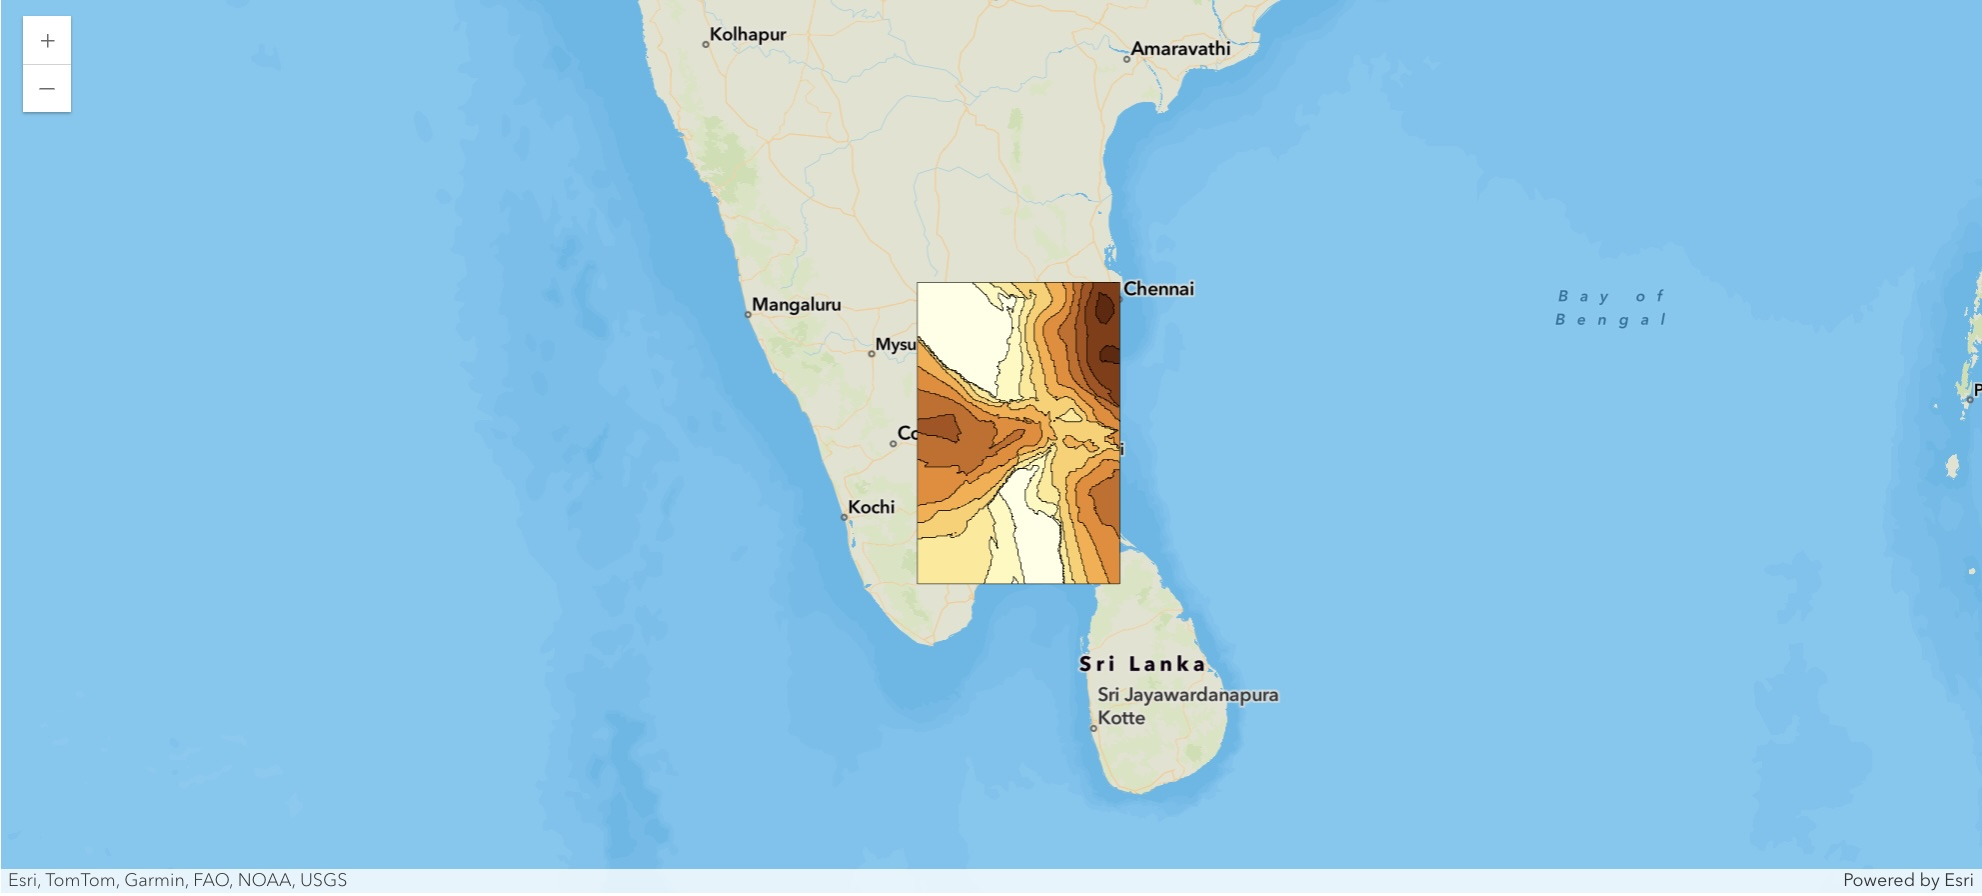

In [59]:
from IPython.display import Image
Image(url="data:image/jpeg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAB76gAwAEAAAAAQAAA4CkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g/QSUNDX1BST0ZJTEUAAQEAAA/AYXBwbAIQAABtbnRyUkdCIFhZWiAH6AAFABYACQAWADphY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAABJxjcHJ0AAAGUAAAACN3dHB0AAAGdAAAABRyWFlaAAAGiAAAABRnWFlaAAAGnAAAABRiWFlaAAAGsAAAABRyVFJDAAAGxAAACAxhYXJnAAAO0AAAACB2Y2d0AAAO8AAAADBuZGluAAAPIAAAAD5tbW9kAAAPYAAAACh2Y2dwAAAPiAAAADhiVFJDAAAGxAAACAxnVFJDAAAGxAAACAxhYWJnAAAO0AAAACBhYWdnAAAO0AAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAAUAAAB2GtvS1IAAAAMAAAB7G5iTk8AAAASAAAB+GlkAAAAAAASAAACCmh1SFUAAAAUAAACHGNzQ1oAAAAWAAACMGRhREsAAAAcAAACRm5sTkwAAAAWAAACYmZpRkkAAAAQAAACeGl0SVQAAAAYAAACiGVzRVMAAAAWAAACoHJvUk8AAAASAAACtmZyQ0EAAAAWAAACyGFyAAAAAAAUAAAC3nVrVUEAAAAcAAAC8mhlSUwAAAAWAAADDnpoVFcAAAAKAAADJHZpVk4AAAAOAAADLnNrU0sAAAAWAAADPHpoQ04AAAAKAAADJHJ1UlUAAAAkAAADUmVuR0IAAAAUAAADdmZyRlIAAAAWAAADim1zAAAAAAASAAADoGhpSU4AAAASAAADsnRoVEgAAAAMAAADxGNhRVMAAAAYAAAD0GVuQVUAAAAUAAADdmVzWEwAAAASAAACtmRlREUAAAAQAAAD6GVuVVMAAAASAAAD+HB0QlIAAAAYAAAECnBsUEwAAAASAAAEImVsR1IAAAAiAAAENHN2U0UAAAAQAAAEVnRyVFIAAAAUAAAEZnB0UFQAAAAWAAAEemphSlAAAAAMAAAEkABMAEMARAAgAHUAIABiAG8AagBpzuy37AAgAEwAQwBEAEYAYQByAGcAZQAtAEwAQwBEAEwAQwBEACAAVwBhAHIAbgBhAFMAegDtAG4AZQBzACAATABDAEQAQgBhAHIAZQB2AG4A/QAgAEwAQwBEAEwAQwBEAC0AZgBhAHIAdgBlAHMAawDmAHIAbQBLAGwAZQB1AHIAZQBuAC0ATABDAEQAVgDkAHIAaQAtAEwAQwBEAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBpAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBMAEMARAAgAGMAbwBsAG8AcgBBAEMATAAgAGMAbwB1AGwAZQB1AHIgDwBMAEMARAAgBkUGRAZIBkYGKQQaBD4EOwRMBD4EQAQ+BDIEOAQ5ACAATABDAEQgDwBMAEMARAAgBeYF0QXiBdUF4AXZX2mCcgBMAEMARABMAEMARAAgAE0A4AB1AEYAYQByAGUAYgBuAP0AIABMAEMARAQmBDIENQRCBD0EPgQ5ACAEFgQaAC0ENAQ4BEEEPwQ7BDUEOQBDAG8AbABvAHUAcgAgAEwAQwBEAEwAQwBEACAAYwBvAHUAbABlAHUAcgBXAGEAcgBuAGEAIABMAEMARAkwCQIJFwlACSgAIABMAEMARABMAEMARAAgDioONQBMAEMARAAgAGUAbgAgAGMAbwBsAG8AcgBGAGEAcgBiAC0ATABDAEQAQwBvAGwAbwByACAATABDAEQATABDAEQAIABDAG8AbABvAHIAaQBkAG8ASwBvAGwAbwByACAATABDAEQDiAOzA8cDwQPJA7wDtwAgA78DuAPMA70DtwAgAEwAQwBEAEYA5AByAGcALQBMAEMARABSAGUAbgBrAGwAaQAgAEwAQwBEAEwAQwBEACAAYQAgAGMAbwByAGUAczCrMOkw/ABMAEMARHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjQAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAIPfAAA9v////7tYWVogAAAAAAAASr8AALE3AAAKuVhZWiAAAAAAAAAoOAAAEQsAAMi5Y3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArhQAAFHsAABD1wAAsKQAACZmAAAPXAAAUA0AAFQ5AAIzMwACMzMAAjMzAAAAAAAAAABtbW9kAAAAAAAABhAAAKBR/WJtYgAAAAAAAAAAAAAAAAAAAAAAAAAAdmNncAAAAAAAAwAAAAJmZgADAAAAAmZmAAMAAAACZmYAAAACMzM0AAAAAAIzMzQAAAAAAjMzNAD/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAfP/AABEIA4AHvgMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRSEhRk8VD9pt/wC8K6DmJ6Kg+02/94Ufabf+8KQ7E9FQfabf+8KPtNv/AHhQFieioRcQHgMKmpiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAM27s3kfzIvyrMeN4zhxiuloq1OwrGDDazSHgbR6+1biIEUIvQU6ipbuCQUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQXP/AB7t9K56unIyuK5plKNtPatKZMhtJ7UtFaEmRNbPFyOVqOOGSX7g4rbop3J5TJazlVc8H6VVxjiugrPvUXAfv0ppg0Zjosi7G6VkzwGE+3atmmPGkg2uMirTIaMAIoO4AZNULiyVhvh4Pp2rpDZR/wAJIrPkieI7XFUmZuJylFX7mzaPMicr/KqFaGNrBRRRTEFFFFABRRRQAUUUUAFd78MPENp4W8e6Xrl9Cs0MM67lYZwDxkdOR2rgqBxWOIoxrUpUpbSVvv0NaFaVKpGrDeLTXyP3NjkSWNZYzlWAII9KfXl3wa8S2fij4caZeW0gkaGFYJQOqvGMYP4Yr0q4mEMW7v0A9TX8v4yi8NVnSqacra+4/pnB1liKVOrT2kk18yC3Hl3MsQHBwwpZQePNxj1FLb2xjPnTMWkIwT2HsAOKtkhRk9q4IU3yWeh04izejKG7ypMp92rysGUMKzWcu3HT0q5FEFwwyPapoyfM0tjmg9dNixXP65ptvNaPcBcOvPHf8OldBVe7TzLWRPVTWmIpqdNq3p5djsoVHCafT9CjobySaVE0hyeQM+gJA/StauY0ybVbewi2wJNHt42Ntf8A75Ix/wCPVuWd4l5GWVSjKdrK2MqfTjj8q6n769qtn2OVWg/ZPdafcW6KKKg0CiiigAooooAKKKKACiiigArL1X54Ug/56Oq1qVQmYPexQZ6ZYjHpWGIV6fL30NsPpNPt+hfqteWy3dq9s/AcYqzRXQnZ3Rg0mrMyLS+dHWw1EbJsfKf4Xx6f4Vr1BcW0F1EYbhA6nsazhpMkfyW13PHH/dyG/VgT+ta+5LXb8jNc8dLXRsUVzN0y6HPFIs0hSQkMsjF84HbPQ/Tj2p13PqH2U3V2/wBli7JHzI3oMkYH0A/Gq9hs09H/AFsR7dK6a1R0lFZOjxyQWYE8u9mOcFt232yeTim6jqM9u4gsYxLIBvYdgg/r6VHsm58kS/apQ5paCW9nbf2lNPsG5cY/EVs1l2E0dxNLPEcqwQj8q1K48PBRi0lbV/mddebk1d9F+SCiiitzEKKKKACiiigAooooAKKKKACuZ1jdc3ccFqpkMefMC4+6e3PFat5eNGwtLb5pn6Dso9TU9pax2kXlpyTyxPUmuKvH2/7lbdX+i/rY66D9jaq9+i/C/wDkYkX/AAjcV2L14Ire5Vcb5IwkmPTOP5Grkk82pL5NorJEfvSEYyPQDrWuyqwwwBp1X7GpJckpe75K3y/4b8CFVhF80Y6+b/4CM2XSNPkQL5YQgYDKMMPxpnkarB/qZVmHpIMH81/wrVoqnhae8VZ+Wn/AEsRO1parz1/4b5GV/aM0XF1bSKf9gbx+n+FL/afGVtpj/wAAx/PFalFHsqm3tPwX/DfgHtKf8n46GfDqVvJJ5MgMUn91xg/h2/KtCoZreC5Typ1DL6GqA0+4i+W1uXROykBsfnS5qsN1zLysn9z0/rYfLSls+X12/Bfp8zVorK+x6j/z9n/vhaX7Nqg+7dL+Mf8AgRT9tP8A59P/AMl/+SD2MP8An4v/ACb/AORNSisg3k1lJt1IqUI4dFIA9j1xWhDc29wu63dXH+yc1UK8JPl2fbqROjKK5rad+hPRRVe6uY7S3a4l4CitJSUVzPZGcYttRRSmnv2unt7URjYoYbu/5dKm+2PGP9JidcdwNw/Tn9Kh0u1aOP7XPzNMAW9h2A9q1a5qMako8/Na/Ty6fh2OmrKEXyKKsitHd2smdki/L1HpUQ1Gz5y20DuQQv59KmltbadleZAxXpmp8DGK0tW7r7v+DoZ3pdn+H+X+RCLm2IyJF/MVXtQss8lyO/yjjsKt+TF/dH5U8KFGFGKfJJtOVtA54KLUVuLRRRWxiFFFFABXOXug/arpp0YKGH/j3+FdHRWdSlGatJEygpaMp2UDwWaW8wGVGOORXjnj7TUHjzwdDZypaqLm4dwX2eYAg+QepP8Ad9q9vrxf446JcXnhJPEmmM8d7ocyXkTQxmSTapAcAKynBXryOBivVyVRji6cW7XTin25ouK/NHm5vD/ZJNK/LZ28otP8ke0UVz3hXxLpHi7QbbX9EuFuYJ1B3qMc9wV52keh6VrXd5FZReZJyTwqjqT6CvPrp0XKNXTl36WsenRaqqLpap7WLdZt3qSWsyW6RtK7clU6getMxq1z3S2X2+dv6AVZtLKK0BKks7cszdTXI51KmlNWXd/ov80jqUIQ1nr5L/Pb7iqdXgTmWOVB6mM4/Sq8d7e6mxSzTyYRwZG6/gKuajNIqJbQna8x2g+g71ieJvE2i+BNBOo6icIg2xxjG6RvQf1PQDnpSpUK9esqEJX9FZt9v+GsFWtQoUfbSjb1eiS6/wCW/oN1/wAReGfAWmHUdamEQbp/FJKQOgHU/wAh7Cvz8+Jv7TPi3xXcSaf4XZtLsBlR5bfvX9yw6fQcfWuK+Knxa1bxxqU2JP3b/IxX7uwdI0/2B3/vHk8YA8Wr914V4Jw+DpxrYqCdToukfl3/AK0PxDifjPEYuo6OFny0+/V/Pt6D5JHlcyykszcknvTKKK/Qj4EKKKKACilVSxCqOa14bBF5l5Pp2pDSuZ0NvLMflHHrW7BAIwIoxUgHYVrWtqVIJGWPQelQ5G0YEsMQjQItbtvF5UfI5PWmW9sIvmfk/wAqt1g2bpWCkIBGDS0Uiiv9lg/u06O3ii5Uc1NRQFgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9D+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+Z1nw2uJIPi54N8vjdr2mL+BuIxX9Blfz2fD3/krfgv8A7GDS/wD0pjr+hOvguM/49L0P0jgP/dqvqvyCiiivjD7sKKKKAPJ/jzK0HwN8ZzR8FNC1Ej8Ld6/BSxYvaRs3oK/ef4//APJB/G3/AGANS/8ASd6/BbTv+PKP/dFfoXBf8Kr6r8j8y49/jUfRl2iiivtj4AKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsmeAT3BEJGcc1cuy4gPl9TxxUVjC0aFnGCapaK4jLlhkhOJBioqt3rBrg47cVUrVbEhRRRTEFUL5uFWr9Z191WmhPYoUUUVZAVVuwDDn0q1UcoJiYD0oQGEQGG01zTrsYr6cV01Yt9EVl39jWsTnmijRRRVmYUUUUAFFFFABRRRQAUUUUAfpr+yj/Zq/DIxWcwkl+0O0qZUlCQMcDoCBxmvoRptt0Zr1SqIcIcZH146V8t/sg31u3gy909bWWORLguZyh8uQEABQ3TK+nvX1w6B0KHoRiv5t4voS/tXEJP7V/wCvLsf0XwlWj/ZeH005badB9IQCMEVUs2PlmFusfy/h2q5XhQlzRTPbnDlfKUni8lhIvQVcHIyKWiiEFHbYzUbbBRRRVlGTZ/6LdyWJ4B/eJ9D1ons7tbw3mnsiF12uHBIOOh4x0rxv9p/4oan8DP2fvGHxs0K0hvb7wrpF1qMEFxuEUjQoSFbaQdp9jX5Eaj/wWh1/VP2ZPhHJ8IvCFl40/aA+L1ilzp3g/T3k+x2as7K1xdPuLxW6KM5ZsntgdKwdGcU1Hbp6f8D/ACLxHLUs+v6n7waVdS3loJptu7JX5eB8pxWjXiui+L9b+Hfwz0vxb+0rqfh7w/qcsSHV5YJ/semw3DD7sUlzISwX7uSw3dcV8jf8FNP2sPGP7Of7BfiP9pX9nPVtOu9Qs2s/sN8ojvrR1mmVGxjKMMHsa3nRvP3dmYU7pWfQ/SOivxe+Gn/BQb4gyf8ABRKT9n/4va/o+keBIfhjpHih5rxYbPbqN5gSEzuVAQ9l6Cv2GXxP4VfwyPGseq2R0UxeeNQE6fZfK/v+bnZt984rOdFxNDbori/DHxK+GnjbQJ/FfgvxJpOsaVa5E17Y3sNxbxbeu6SNiq49zxWTafGn4K6hrdl4Z0/xloM+paku+ztI9Rt2nuF6ZijD7nHb5Qan2cuwHpVFYzeJfDCeJB4NfVLMaw0fnCw89PtRj/veVnft98YrnZfir8KLe1a9n8VaMkMdwbRna/gCrcDrETvwHGPu9fajkl2A7uisPw74o8LeMNOOseD9Us9XtFkaEz2M6XEYkj4ZN0ZI3L3HUVuVLVtACsq1xLqU8v8AcCpWlJIkMZlkOFUZJrO0j5rT7R/z1Yv+fSuWpZ1YQ+f3afqdFNWpzl6L+vuNSiiiuk5wopruka7nIAFUvOnueLYbE/vn+grOdRR069i4U29eg29SwMsM10oeSI5jHU5x2FNkmM6+XcWbsvvsI/LNW4LaODkcserHqasUv3srNytbZLp/XlYf7qOijf8AryOaGk6T5jyyWjPu5CsoIX/dHQVcs4GtI2FjbFNxyfNfJ/8AZj9BWzRVydaStKo7fIiMaMdY00c7baXqVm0n2OaKNZDnaUL49h8y1o6ZcTXFrm5IMiEq2BgZHtWjWPppX7XdrFzHvBz/ALRHI/CtoL9212Mpv30/l5baafI2KKKKzNAooooAKKKKACiiigApCQBk9qWqWoS+TZSOOu3A/HionJRi5PoVCPNJRRX0pA8b3jD5pWJz7DpWrVe0i8i2ji/uqBViow8OSnGLLrS5ptrb9OgUUUVsZBRRRQAUUUUAFFFFABRRRQAVRn02xuDukiXd/eAwfzFOOoWQ4WRWPovzH8hTPOvX5hhAH+2cZ/IGuapOjNcr975XOiEKsNV7v4FRJ7vTgY7tWmjHSRRkge4qlJd2+uXS2Ns4aFRvfjBPoK1ZPtVyRbvHsQ/eOQcj0FST6daTqFK7Cv3WXgr9K5ZUqk1yQfudndN+V+3qvI6Y1KcHzSXveVrLzt39LWLoAUBR0FLWR9outP4vf3kX/PUdR/vD+orUjdJUEkZBU9CK7qdWMvd2a6f1+mhx1KTjr079P68h9FFFamQUUUUAFFFFABRRRQAUUUUAFFFFAHgmj+ILvwb8U9U8E3aM1jqEZ1KzPycOf9auRjC7vugqT74r2m0tSzC+uvmlYcDso9AK+e/G9n4l034waf4ovLlX0lgLSOL/AJ5GQA57csVOOuAO3Ar6VUhlDL0NdubQjOtRqafw4vTbm1TfrZK/nqjiymcoUatPVWqSSv8Ay6NJeWrt5WXQWiiiuI7TG1WaGFoWlO0Rkyk+ioOa/K/4ufFnWPiFrkrMTFbITGkYPAQHoPrjk9/pgV9y/tG6x4l0XwNJceHV3CQGKfCbiI36n2Hqa/LOv1Lw2yem1WzCpZu/LHyslf7/AMj8w8Rc2qJ0cBTuo2u/O70+SCiiiv1o/Kgooq1a2/nvz90UAVa07WyBHmTD6CrqWsEbbkXBqxU3NVDuRiGJTlVA/CpVUsdq1IkEr/dXitOC3EI561DZokMt7YRfM/J/lXQ2sSpGHxyaoQQmVvYVsAADA6VlJmsULRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0f6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5nS/D3/krfgv8A7GDS/wD0pjr+hOv57Ph7/wAlb8F/9jBpf/pTHX9CdfBcZ/x6XofpHAf+7VfVfkFeH/tN+L/EXw9/Zt+IPj7wfcfY9W0Pw1q2oWU+xZPKuLa1kkifa4ZG2soOGUqcYIxXuFfmX+2F+wr+y3qXwS+KXxP07wBYT+Lp9D1vVIryON2uX1FreWVZFAPMhl+YYHXtXxh92ffnwx1jUfEPw28Pa/rEnnXd9plpcTvgLukkiVmOFAAyT0AA9K7ivhH9nr9hv9lXwPoXg/4laF4C07T/ABLZ2NndLeKjLNHcmFdzcnhsk54r7uoA8j+P/wDyQfxt/wBgDUv/AEnevwW07/jyj/3RX70/H/8A5IP42/7AGpf+k71+C2nf8eUf+6K/QuC/4VX1X5H5nx7/ABaPoy7RRRX2x+fhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVRuLzyHCbauKQyhh3p2AdRTQyklR1FOpAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBh3sZSbd2aqda+oBfLBPXtWRW0diGFFFFUIKgmgWYc8EdKnooAorZxp80hyB+FZxxn5elXbubnyV6d6o1aIYUUUUxGPcQiFuOhqq6K67GHFat5GWQOO1YjXUCP5bHBFWjOVkYs8PkSbO3aoa1r+MMglXt/KsmtEYNWCiiimIKKKKACiiigAooooA+/f2QdV1R9IvdGRFezjcyM3IMbnAA9DuH0xivtOvza/ZP8AGGpaT44fwog32mpISw4G14xkN0/DGcV+ktfgPHGFdHNqjaSUkmrf13R+78E4mNXKqaT1jdenp5WsZtwTa3SXAHyvhG/p2rSrFDvqF/tVSIbY/e/vN6D6VtV8Rh3dycfhvp+vyPta6sop72/4b8AooorpOcKKK8R/aN1f4g6F8FPEOq/C2N5NchtHNt5Sb5Ae5Re7AdBTSu7AeR/8FD/+TFviyB/0LGof+ijX8o/7Gvgj4m/8EpPhL8Kf+Cq/gnS28a/DXx34ctdO8fWflCXUNGiEjKl3ayfeWEYG9AQvqOcj+gb9jzxXrHin4q/8Iz4e8Ta3428KXmlB9d/4SGJnjt9R4zCnmqBzyCgyMDvX6zR+H/D0OgjwrDp9qmliMw/YlhQW/lnqvl42bfbGK2pV1ByptFyjaMWfy8/tnfFT9kP41/8ABRr4SfFv9s2/s9d/Zq17wdLceGLvUw0nh5tZflvtQH7sSBcBRKOCMV+dvxAj8JP+yj+19N+yRHMn7Ozaxog8MhA4046gJk+0/YA/SHrnaNucdsV/b1efDX4a6j4W/wCEG1Dw3pU+ibt/9nyWULWu718opsz+FV9T8JeHLXwzB4OtNHsV8PxAK1jHaRmFFHI2w7fLAHsvHaumnXi2ooxqSUVex/MV4e/ZZ+Bf7VX/AAWIg8I/tBeHLbxRoll8E9BuEsb1S9s023aGZOjFc5XPQ818kfCH40eEPgH/AMEr/Fnwf8ceDNM8Y+GD8ZNT8MaXB4mmmi0TR7ZZx5Ul20X7z7PHj7mQG6Gv7P7LR9Bg1MavolhZR3X2dYRdrCnm+Sv3U3AA7B2XOB6VkXvhP4dQaRdeF9U0qwmsNQdpbqzNpE0Mpb7zSRBNre5YGs44vmnyQg3b9P67GslGMeackv6+4/jE/Yz1XRPC/wC2P+0N4G+FmpeD5/DWofCq7nuE+HtlNYeHJbqIEZhjlkdXdBw0ibQfSvlb4eN/wSqb/gjPpQ0mG3/4adZUGjsEl/4Sb+2PP/0b7OwG77NjGNp8vrX9yHxS+D/gTxL8JPEnw6+HGlaTo97rGjXOlW91BaxwQwCeMqoZ4kyqZP3VB+leKfsCfsQaL+yh+y18O/hL8SLDQtb8Y+C9PNo2s2lqkjBvMZwYZpYlmUYb2radbljzNGcHCWzPxl0746ab+yV/wVi+HnxV/bj1hPCr698GrGxl1LUQyxTapAoaaLeAQZc8FepbivyWt4NE+NH7O+n+Yt3FpPib9pGdhw9vO1rdbiDzhk3IfY4Nf3q+IvAXgfxkbZvGej2WstZSebbm/gS58mQfxJ5gOw+64pV8AeAEiEC6BpgQT/agPskWBP8A89Pu/f8A9rrWUcUt2i3boch8H/gf8Mf2evANr8JfgdoNr4W8OWDM0FnaA7VZ/vHknlupJJya9NNnJjC3Eg/75/wq+SWO40ledKkpO8m38/8AKxp7ZrZJfIy5rWUQN50zSKBkqQozjtwBVLRBNNYLJHLtBJwmM7fat2UbomX1BrDtf9BmjJ4jnUKfZh0/OuCtSjCtCXS1t35W+XlsddKo5UZR0v00Vtu1v6tY1DFefwzAf8A/+vTPK1Mfdmj/ABjP/wAVV+iu32EfP73/AJnJ7aXZfcv8iklplhJdt5jDpxhR9BV2iirhTjH4SJTctwoooqyQooooAaw3KV6Z9Kw4bfUdJjEVsBcwjscLIPx+6f0reoq4T5dLaGcqaeuzM+11O0un8hTslHWNxtYfh6e44rQqtdWdrex+VdIHA6Z7fT0qnozyGxEcx3PGShJ9v/rVTjFx5o/cKLknyyNWiiisjUKKKKACiiigArI1A/aJYrGPklgzeyirV7di0jGwbpH4RR3NJZWYtVLv80j8u3+e1ctX94/Yr5+nb5/l8jopLkXtX8v67IvUUUV1HOFFFFABRRRQAUUUUAFFFFABTXRZEMbdCMU6oRcW7FlV1JT7wyOPr6Uct1sF7GboyhIGiwAY2K++B0zWxXJyamsd09zpgEkcmAznKxhvXIBz+FaBsNTI+0i7zN2XGIsem3r+Oc1lhKXLH2U3Zx0t+X4GmKqc0vaxV0+34r5G5VS+uhZ2rT4yRwo9T2FUY7zUIrmOHUY40WXhTGxbBH1A6/Sg/wCn6nj/AJZWv6yf/WFdapWfvbf1/wAMcrq3Vo77BbXF/DcJZ6jscyglWXjp1BH9R+VEsY0uQ3UA/ct/rFHb3H9ayfFGuaf4eu9NvtTOyKWf7MHJAVWlHy5JIAHGK64gEYPSs8Xh+aMKiVn0fmv6V0Xha6jKVO90rXXlb+rDUdJEDxkFT0Ip+OwrFC/2RJkf8ezf+OH/AA/lXzn+2n+054b/AGQv2VPGn7RmuyKV0DTpHtE/57XbjbAijuS5HHpWGHnzvkeku3+XkdFSny+9H4eh9TlWXqMUlfzaf8EVv2tP2uE+NHib9j3/AIKAa7d6t4w1zS7Txt4cmv3LuLC+Xc9qhbtDkcdulfaXxQ/4Lnf8E5/hD4i13wr4u8Q6w174X1J9L1dbTRbu5Wylj4Z5WjjKrEDxvzg9q7ZYeSdkYn680V+Vemf8Fqv+Ccut/GDQfgzovjWe6uvEssdrp2qpp1z/AGNNcygFYBemMReZyAQDgHgkHiu2/af/AOCrn7G37I3xBuPhf8Vb3XrrV9OhS51JdG0O91GHT4H6SXEsMRjRMc8MeO1T7Ce1hn6PVTuryG1iLkgsOijqa+BPjD/wUl/Yk+EXw08DfG74h+Lg/hP4iFl8P3tpby3ENxsj8xi2xcphezAc8YzxXjviH/gsp+wL4T8E6H45RvEl7/wkEc1xZWWn+Gr65vvs1u2xp3ijhPlxccFypx2rm9liZX5IpLp/w1v1N1GlG3M7+S/z/wCAfqmBrMqjLRRAjspYj+VO+wXb/wCvu3x6IFX+lfBdj/wVO/Ye1XwN8PfiVpPiyW50L4namdF0S9jsp/L/ALQXg29xlAbdweMSheeK9e+IP7a/7N/wv+PMX7NfjDWZ4/FbaLN4glghtJZo7bTrf7800iKVQAdB1PYUf2e9pXfzf5LT8B+3kvhSXyR9KHTZIf3tnM/mD/noSyn8P8KfFqDbhFdQvGx4yFyufYivzK+D3/BZT9gr41fFvTfg14b1vWdN1PXDIujXGs6JeabZaoYgSwtJ54kSQ4HA4z2r4x+A3/Bb/wAIfHr9s/4ofso65p89rodqrWPhS5g0W/iuZZxHJ5322R90cSjb+7YrGG7Zqo5fOLvT93y6fd/kL2/MrVFf8GfvH4h0U3188WoSA2N9b/ZzHsUlJM5VwTnn0GMAjNZ3g7WLmziHhrxLIsd7CxjjLEDzlXgMoyeuOnWv5WP+CVf/AAV1/ZH/AGev2VrT4T/tM+LNYTX5PFerwyXxsbu+s7NZ7tvIS4ulVkiyMbVJ4HYCv2X+Injbwnrf/BRH4YeB2+MWuad/bPhi6v4PAttZb9L1SNW/4+3ugMI68bed390gcV2+zlOUYVFaMeqXlp/wV/dWpyeyUFKVN6vo/wCvu9XofqpRXmulaB4+8MiSKz1SPWrYD9zDfgxzL7G4QNkf70TN71xjRftBalMbfV73StFtg+RLYxPcTsP7oEuUwR1O3I9K1+o0/el7eCgurbX/AJLbm+5elzj+uz92PsJ8z6JJ/jfl/Fedj26Un7fEE/unPTgV8GftbaL4Z0W400aPYwWtzcmSWZ4owrP25Ir7CXwj4hYK/wDwkV7C+0BzHFa5cjud0Dc/QAe1fBP7UNgtj41ghk1W61O4SBVl+1GL93nkBFiWMAY/2evevovD/D/8KcZ+07vlXN2sr6JeZ87x5X/4TJQ9ntypN8ve+mrfl6HzLU8VtNKu5BxUcaGRwg710aIEQIvQV+8N2Pw+MbmfBYKBmfr6VpW9oVXbCvFa0EEYjDFeatVk5G0YJGelj/z0P4CraQRR/dWpgMnFbUUKRAYHNQ2aKJjKjt90E/SrkFoT80vT0rSoqblcogAAwOlLRRSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//0v6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5nS/D3/krfgv8A7GDS/wD0pjr+hOv57Ph7/wAlb8F/9jBpf/pTHX9CdfBcZ/x6XofpHAf+7VfVfkFFFFfGH3YUUUUAeR/H/wD5IP42/wCwBqX/AKTvX4Lad/x5R/7or96fj/8A8kH8bf8AYA1L/wBJ3r8FtO/48o/90V+hcF/wqvqvyPzPj3+LR9GXaKKK+2Pz8KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKY7pGu5zgU+s2+t3ciSMZwOaaQFK6lSaXcnTGK17eWN4wFPQVz9FauOliLmlA6LeMF5DVrVzMbbHDjtXSghgCOlRNFIWiiioGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFISFGTwKAKOoLmEN6Gsati5ubdomjByax61hsQwoooqxBRRRQBjXP+vaoKnuf9e1QVaICiikJCjJ7UxGffzbE2D68VxLHcxY966l2LsWPeueuofJlwOh6VrEwqD4Jxs8ib7h/SkntDCgcHcPpVStixUvARJyvYVWxC10Meird3AkDgIevb0qpQTYKKKKYBRRRQAUUUUAenfBvT7fVPiXo9jc5CtcJysgixg+/X6Dk9q/YKvxw+F2qWGl+NrP+1ovNtLkm2nUMUPly/KcFSCD6YIr9ioIUt4Et48lUUKNxLHA45JyT9TX454kp/WqLe3Lp23/AOG6H694cuP1WslvzL8tOhTntbhZDc2L4Y9Ub7p/wqazuvtcW8rsZTtZfQirdZMf+j6o8f8ADOu4fVa/LJR9nNOOz3XQ/T4v2kHFrVLT5dPu/I0JlBTpn0qBJiFEajkVcOAtZ8Ue4gg49qdW6kuU4paPQ0aKKK6TQztTiaS0Lxffjw6/UVcglWeFZk6MAakx2rK08/Z5pNOP8HzJ/un/AArml7lVPpLT5rb8L/gbx96k1/L+X9WNas/U7QXlm0PmtD33KcdPXHatCs+Um6m+zLwiff46+1byqunZx36GUaSneMtuvoYWn22pEGO2jjtY2AHmJjGB/cXtn3/WuhtLG3skKwjlvvM3LN9TVsDHApauMmo8v9NmbjHm5vkvJbFf7LbeQbYIojbqoGBzWbYzmyc6Zdt/qxmNz3Qf4VtVVurK0vVVbuMOFOQDWkJr4ZbEyhs4boxbK1/tRHvLiaU5c+WVcoAo6YC4B/HNWWtNaQeVBdKU/vOg3j8sL+lbQAAwKWqdd3027aaERoJLz+4ztPvvtaNFLhZojtkUdj/ge1aNc9rTwW9zazlSX34BQZYgDpx2/SphrHkNjU4Tbhvufx59vlHB9qcqLklKC36f5CjWUW4ze39fI1pmCRMx7CqRtvtWnCFuCVBHse1VJdUt7lfsi7onk4XzFKFh7ZxW4AAMDtXDUpXqOE1pb8/+GO2nUtTUoPr+RTsLk3NuC/Dr8rD3FXayJf8AQr9Z+kc/yt7N2rXpYeTtyS3Wn+X4DrRSalHZ/wBW+QUUUVuYhRRRQAUUVVury2so/MuW2g8AYySfQAcn8KaTeiE2krstVTvr6DT7f7RcfdyBx71nT6k93sttOWVHdgC7QsoVe5+ZcfSpl0eBmD3cklww6b24/wC+Vwv6VsqajZ1Pu6mLqOWlL/gGqrK6hl5B6VkWhFpqM1m/HnHzE9/WkGiW9uA2mM1s47ryD9QeD/OqV/NMIRFqieUyHKXEfKAj17r/AC96qnCL0i9H9/3f5Ezm0k5K1vu/4B09FZumagmoW+/jevDAdM+3se1aVYSi4vlZvGSkrrYKKKKkoKazBFLHsKdVLUH8qxlcf3aipLli5dioR5pKJW05Hn/4mNxyz8KP7q1rVXtIxFaxxjsoqxUYeHLTS6l1pc03bbp6BRRRWxkFFFFABRRRQAUUUUAISFGTwBWLHf6ndL5tjbRmPPymSQpkDvgI1S6zk2YizgSMqnHoa1ERY1CIMADAHsK1XLGN2rmTu5cqdrHFSWHji+8QLJdXdva6SsZzDApM7ueMGRsAKOo2qD2rojomkEIrW0Z2dMr/AJzWrRVTxE3a2lu2n/D/ADJhh4K99b99fu7LyWgxo43j8pgNuMY7YrHh36VKLeQ5t2OEb+6fQ+3pW3TJI0lQxSAFTwQa4qtLmtKOkl/VvQ7KVTl92Xw/1sRXNrBdx+VcLuUHI7YI+lLb20FrH5Vuu1etZc0MmlqLi1djEuN0bHIA9u4xW0CCAR0qqdeUr05aW6dPkTUoxjacdV/WhFcW8F3A9rdIskcilWVhkEHsRXkd58Kr7T7qK+8Aa9eaKYuBbMftNls7qIGIC+g2kY7V7FRXdhsZWoX9m9O1k1809PwOPEYOjXt7RarZrRr0as0fOeoWf7Qvhcvew61pesRStt2XsAtkiB6bShUn0wSa/E7/AIK/fBT9rH9u/wCMHwr/AGEPhbpl/wCGPDMk/wDwknifxXa2Et3pdtJa8wR75BFDI4b5hGW74Nfot+238Otb8UeOfD3iHxH4P1Px94OtbS4hm0nS3PmJev8A6uYopBIA4z2r6N/ZA8K/EnwR8CdK8P8AxPM0d/GZDHbzy+dLb27N+6iZsnJRcDrxXZXxyqRjOVKCkusYqP5WX4IywuD9g5ctSbi+jldfjr+J/NF+07+wD/wUP/ZQ+N3wv/4KA6N8Utb/AGg9e8A6pa6Td6Ta+GoLG9i0ac7ZVRLNpGlRVzldvGBXuf7I37P3xVvfgd+3DrWueANWsbr4iarqFxosN7p8sNxfwS2mYxEjoGkAfgBR96v6Smgurq2eDRyY7uIv+9yVAPYHGM/Sq/h+TxHdaSl5rJlaZMpNGspHK91w3T0DYNeJSzKtKj7TkulbVWXytbW1rOy+49yph6UaqpOVn0Vu3nsr9Ez+WL4n/srfGqb/AIIk/s1fCjw78PtZPi3w74n8O3moaZDp0v22zEdxunkliCb48DlywHvWx+2Z4m/bd8bftH/Fb4UfGTS/i5H4el01bXwHpvw606NdL1SJocE6jf8AlFsBuHRmGBxjtX9X9jdRzWqvakhOmD1H1q35sn94120sXzRUrXOSa5ZctrWP4zfAn7JP7QWofse/sReBvGPw612Wbwp48vLjXrC506aRtPtwRte5Up8keQMMwC19+f8ABR74gftgWv7ca+APEFv8T9O+DL+H410Sb4V6bFcXd/qjffgursxM0CA9sqMe1f0b+bL/AHjSCSQcBjWn1ryIP49/2T/+CeXxv+Kv/BHz4sfCHxn4U1vwx480nxheeKfCsGtQst+LuzfzoGUsq7zIBjcnDNXtv7Bvw5/4KC+Ifgx8e/8Ago9498F3unfHjxDpEeg+E9F1e0aK4jttMjCfLDOBzIdxUYw+BX9TfmSddxpN7k5JNH1ryA/hruvBX7Vnx/8AiH+z1411PQvjb4m8ReHfFljc+LLjxZpYsdE0uQsA62NrDEuEXkNJ90Ljmv1z+HcPxT/Zv/4K/wDx5h8Z/DvxTfaD8ZdMtP7B8Q6Xpz3elI9vC+9bidfli9Oec8Yr+iPzZf7xqvLqEdsP3ku32zUzxkUveVkOMW3aKP5GfAn7Inxps/8Ag3k+LXwdm+HmrR+NtZ1rVryDRzp0g1G4LagGikWHZ5jfu+VIH3elfXXhD4JfGlf+Cm/7L3xAu/C2rjRvD3wrl0/Vb9rOX7PZ3bbcQzybdscnH3WINf0D2niG4lHkWhEsrZwuSCvuf9n371PZaVqSKxu7o5kOX8vgsfduvTjtisf7QfLb2bu+m2/m7L7r+hr7GN/jVl+nkv1sab3qufLssSuDg4PC/X/CpYLURMZZDvdupP8AIegrifF3j7wN8NLDz9fuUtt3KRL80r/RRz+PSvi34g/tZ+ItZSTTfA1v/ZsDAr57/NOR7fwp+pHYivUyXhbMcyanCHu93pFenf5fgeFnHE+X5cnCU9f5VrJ/ovwPs7x38R9E8DeG7rW7tgZYdyxQSHyWldeMKHxke4yMdK/J7xr4s1Hxr4jufEOpsHedsj5QmB2GBnp0HJrnbq8u72QS3kjSsBgFjnAp8NlLJy3yrX7Vw5wtRylSlzc031tbTsj8a4h4mrZq4x5eWC6efctWEGF85up6fStWNDI4QVEqhVCr0FatnEFTzD1NfTNnz0Y9C4BgY9KWinxrucKKzNTQtrdVTc45NXaKKzNAooooAKKKKACnKjsMqCQPSm10FqALdcelTJ2Gkc/RUsyGOUqav2ltBJFucZP1pt2CxnxRmVwi0s0Rhk8s81vxwxxDEYxWXeW8gYzdR/KpUtR20M+ipIUEkgjPGaSSMxOUbtVeRIyiilUZIHSmAlFbL2yNbeXAQcc/Ws5bS4YZC/0qVJDsV6KUjBwe1JVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//T/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mb/AIEt4Lr4qeD7W6RZIpNe0xHRhlWU3MYII6Yx2r97f+EC8Df9AWw/8Bo//ia/Bj4e/wDJW/Bf/YwaX/6Ux1/QnXwXGf8AHpeh+kcB/wC7VfVfkcn/AMIF4G/6Ath/4DR//E0f8IF4G/6Ath/4DR//ABNdZRXxh92cn/wgXgb/AKAth/4DR/8AxNH/AAgXgb/oC2H/AIDR/wDxNdZRQB8+fHjwV4NtPgd4zurXSLKOSLQtRZHS3RWVhbvggheCO1fh7p3/AB5R/wC6K/en4/8A/JB/G3/YA1L/ANJ3r8FtO/48o/8AdFfoXBf8Kr6r8j8z49/i0fRl2iiivtj8/CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCtJaQSckYPtUP9nQepq/RTuwsYk1lJHzH8wrXhBWJQfQVJRQ3cVgooopDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsS+ZjNtPAHStumNHG/31B/CnF2FY5qiti5slcboQAR2rOe1njXc4wB9K1UkTYgoooqhBRRRQBnXNuxbzE59qoV0FZV3FsfcOhqkyWipTHQOpQ96fRVEmX9hk7EVmahaN5eCORyK6eql4oMOfSqTIcdDibe3adsDgDqa3o41iUIgwBViOGSX7g4pjo0bbWqrkRjYwr5ZPOLMOO1Uq6OZS0LKvpXOVaM5KwUUUUyQooooAKKKKAJIZWgmSdOqEMPwr9cPgp4y1jx14Ii1zWjbeZu8sLbbuAgH3txPzfQ1+Rdfdv7IPiuIpf+E7mUGQhZYU24wq9e2O/wClfDcfYBVst9tGPvU3+HX9PuPtuA8d7HMVRbtGat5XW3+SPuOsrVAY41vk6wHd+HQitWsrWQxsGVTjJAr8ExelGT7L8tj91wv8WK+RfchocjuKpxlj+7Tj3rRFVHDxS+Yo4pVo6qRyTXUmjYjCyn5qmrPE+2QvjNXwcgGtKU09EODuLWXqAWF4r7keUcHA/hNalNdFkUo4yDxinVp88eX7v0N6U+WSfT9CG4lEVu0oPQcUWsPkQKh69/rWLNFc2ksNorb4HcADoVA7fSuirGjPnm21ZrT+vwNasVCCUXo/+GQUUUV1HMFFFFABRRRQAUUUnQUAZc1vHqMzRzjMUfGAcfN+HpUIGr2X7iJRdJ/C7ttK/wC9xz9QKtWLxLEXbCF2JwTWjWeFqe5fe+v+X4WLxNP3rLS2hzGpXWoR2jQXsAO/hXiO4Z/3eG/LNbdld2t3F/o0gk2cN6g+47Uy/t3miDQ8SRncv4Vn3EUV9a/2nbfu7hF4YfeGP4T6j2NEOR4iSkrNpW7af8P8lYU1KNCLjqk3f8P0Rv0VWs7hbu2S4X+JQeO3tVmtWrOzITTV0FRTzRW0LTzHaqDJNZS395eSN/ZqIYkO3e5IBI9MDoKX7HfXc6NqPliKPkImTlu2c46elaqlb49DL2t17i/yD+0NQnQC0s3Qt0aUqFA+gYt+GPyqe005YJPtVw3nTkY3nsPRR2FaVFJ1NLRVilT6ydwooorI0CiiigDKfQ9JZjILdEc/xRjY35rg03+ynj/49bqeL23CT/0MNWvRWvtp9zL2MOit6afkZHla3F9yaGUejIUP5gkf+O0fbNUi/wCPiz3f9cZA3/oWyteij2neK/L8rB7PtJr+vMo2uoQXTGIAxyL1RxhgP8PpUWrqzae+3tgn6CprywgvQC/yun3HXhl+lUkup4GFhqoyZPlSVR8rex9D+npWdaiqtOUYdtv8i6VV0pxc9ka6MHQOvQjIp9ZmksfsghbrESh/CtOsqM+eEZGtWHLNx7BRRRWhAUUUUAFFFFABRVK8v4LMKr/M78Ii/eb6D/IqmLzV0G+azDL6RyAsPwYKPyNaRpSav/kjN1Ip2/T/ACH6x/qI/wDrola1c/cTzaj5dvDbyrtdWZnAVVx+PP4ZrfGD0qpq0Ypk02nJtbaC0UUVibBRRRQBUv2jSylMgyu08VWspXit44puygUav/x6gHoXUGtLYuc49q5LN13bSyX6/wCRtNNUY26v8kitHOxY8ZHtT4GznjjNTgAdKhuLiG1j8yY4Hb39hWtuVc05aIwhCTaSJ6zr+WUGO1gO0ynG70A9KgSG9vf31y7QL/CiHB/H/CpodO8qdZ3mkk2AgB8d/oBWMpzqK0YtJ2120/Naf0jrjCFN3lJXXT8vL9C5b28VtEIYRgCuG8W2es6c8fiLw/vc2zeZNboT++QD5lC9CSOnBORxjOa7+ivRw1T2Mk4pW2t0t2ODEU/bRab17+Zy2j39v4g0+HxJ4ckxDdoG2yIRn6jgqR0NaJ1C7tyBe2+F7uhyo/ka5ez0qw8L+MJ7uK5wNdO4wyNk+dGMZTJzt2/wgYHsOK75lV1KMMg8YrLF4SMJc2Gk1F6r/L5PTS19zTC4qUocuIinJaO34W+VrJ3tt0FBBGR0pskiRJvkOAKyY5DpP7mcEwD7jjnaPQ/Ss/VtY07S9LuvEepOGt7JS4x0wB/PtXPTrOpKNKC/ePS39dO3c6J0o04upN+4uvl+n6HCeO/jB4R8FWZ1HVJpJ0jm+zmGy2ySLIBn5/mATA7MQfavCJP2uvC5kn/4lV8yhsQ/vwu5PVgPun2G7618i/ETx5rPxC8Sz65qsh2sxEUWcrGnYL2rhK/bMq8OMujh4vHxc6j31dl5K1ttj8YzPxDzCVeSwMlCmtF7q+/W59V6f8fNM0/ToLuC61j+0UnDSxSSia2khzyPmcNnb0xgZr3zSf2pvhXqVyulx2N/CZ/ky0KEEnjHyyFjn6V+bFFexiuBsqrvmcLS6Nafp06HkYXjbNKC5VO8dNHtofpdrP7TPw98K6Qkdr52oaggKGERtEVK9nMgGPwBr5a8V/tPfFHxE8kenXCaVbvwEtlG4D/fOWz7jFfO1Fb5fwflmFfP7Pnl3lr9y2X3GGP4uzLEpQ9pyR7R0/Hf9PIu6hqWo6vdtf6rPJczv96SVi7n6k81SoA7Cr0NjI+Gk+UV9OkopJaI+bbcndj7G33Hzn6DpWvSBQo2rwBVmG3aXnoKls1jG2glvCZX9hWzTURY12rwBTqhmiVh8aGRggrXigjiHyjn1pltF5aZPU1ZrNs0SCiiikMKKKKACiiigCaCEzSbAcVvxoI0CDtWdpyD5pPwrUrGb6FpDWVWGGAIrIs1JuDjgD0rZqpbRBHdgMc4FCegy3VS8dFgKk8noKfcyPFFvjFYsf76YCU9aIrqK5JZLuuB7c1qXVv5yfL94dKkjhhhHyADHesd7ucybg3ToO1Pd3QbIgeKSPhximVPPO85BbjFQVoiCaCYwSBh07ird1ebx5cPTuazqKOVDuFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9T+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+Z0vw9/5K34L/AOxg0v8A9KY6/oTr+ez4e/8AJW/Bf/YwaX/6Ux1/QnXwXGf8el6H6RwH/u1X1X5BRWZrWj6d4h0e70DWI/OtL6F7eePJXdHIu1hlcEZBxwQfSvjL/h2x+wp/0TLRv++H/wDiq+MPuz7gor5E8G/sFfse/D3xTYeN/BHgHTdL1bS5luLW6tw6SRSJ0IO79OhHB4r67oA8j+P/APyQfxt/2ANS/wDSd6/BbTv+PKP/AHRX70/H/wD5IP42/wCwBqX/AKTvX4Lad/x5R/7or9C4L/hVfVfkfmfHv8Wj6Mu0UUV9sfn4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWBczvLJg8AdBW633D9K5mrgiWFFFFakhRRRQAVUu2j8vY3XtVusOZt8pYU0hMjoooqyApCARgilooAKq3abosjtVqkIBGDQBz/tXNOoVyo7HFdTIhjbYe1VzDCeqD8q1TMZRuc5RVy7tvJbcn3T+lU6oytYKKKKYgooooAK+hf2YtYn0z4rWltH/q7pHicfhx+Rr56rU0PVrzQtYttZ06TyZ7aRZEcD7pWuHM8J9awlXDfzRa/DQ7stxX1XFUsR/K0/uP28rM1b/jzP1Wq/hvVY9c8P2WsRSLKLmFH3L0JI5/Wp9WZltQQPl3LuOM4Wv5bx8HGnUhLdJo/pvBTUp05x2djUqGZQRls4HpUm9NofIxVS4kRlAU06skomE9EV2f5tyDb9K0UbKgHriqUUJcbhxV5ECDFY4dS3ZFNMfRRRXWamZqH+utj/00FadZWpcPbH/pqtatc9L+JU+X5G9T+HD5/mFFFFdBgFFFFABRRRQAVUvZPLtzt6t8o7dat1Qk3S3qRj7sY3H69qxrv3LLroa0Uua72QqabZJB5AiUDGDxQjNaYimO5Oit6exqxPMlvHvb8AOp9hVa3hlkb7Td/e/hXso/xrKUIxko0lZ/hbz/AENIybi5VHp/WxfrHcf2feecOIZjhvZuxrYqKaFJ4mhkGVYYrWtT5l7u62/r8DOlNRdnsyjLo2lyuZTCquf40+RvzXBqFtHO3ykupxGeChYNx9SC361PYSuu6xn/ANZF0917GtKt6OKlKKafy7f8MYVcNGMrW+4jiijhjWKJQqqMADoBUlFFIaQUUUUDCiiigAooqm2oWCSm3eaMOP4dwz+VNRb2Qm0ty5RSAgjK9KWkMKKKKACsDWHkuT/ZcKgO43KzcDj09636qXlqt1Ds6MOVPoayrKfL+73/AK08jSlyc3vrT+un6FLR5rdoTAuVmT/Wq/3s/wCHp2rYrCWIaiNlxmG6g6MnUe49j6dKmgv5YZRZ6oAjnhHH3H+nofb8q2pRpzpp0VZduxlUc4T5a2/f+v8AhvyNeoZ7iC1jM1y6xoO7EAVl3dzeNqC2NjLGh2bm3Lv/AEDLUlvYTtOLrUpFldfuBV2ov0GTzWvs0knJ/L+tDL2jbtFf5Cf27oxIWO5R/wDcO4D644H41rD2prxpIhjkAKkYIrM/sLR/+fdPypfu33X3P/If7xdn+H+ZrVk6lc3cM0EFo0aeaSCXUt0HGACtMGnXtrxp1zheySr5ij6HIb9TU9pYPHMby8cSzEYBA2qo9FHOKqKhH3r38v60Jk5SXLawWlitmrTykSTt96TGM+w64HtUwuh3FSzjMfH6VSWGRhlRxXBiKtTm0B+77sESyz7/AJV6VNbKyr83HtVeIFJBvX6Vo1NGLk+eRUFfVhRRRXUahRRRQBm6su6xY/3Sp/I1og5ANVL+PzbKSMf3f5U+0kEtrHIO6iudaVmvJfhc3f8ABXk/0X+QtzOtrbtO3RRVO1sy8gv7w7pcfKOyD0FNu/8ASbyKyH3V+d/w6CtapSVSo29o7ev/AAB39nTSW7/Lt/XSwUUUV1HOFMdxGMmlZggy1UJZjINuMCsqtVQXmRKSRxvxH8NPr+hx32nvFBf6ZIt3bTSkIqFPvBmKttUrkHArrtE1W11vSbfVbORJY5kDBo2DIfoR1FTxSlUyTn2rnPBF3pt3pMp0uL7PHHcSxmIKF8tlPIwvy/lxXfCv7XCcrXwPTyUun4afM5IxjHE80ftLVf4dn9zt93Y7GvmX9qLxDb+H/hu+kW5WOXUpQm0cblHLcflX01X5aftL+K7zxF8SbiwdgbfTgIYlU5HufxNfRcF5X9bzSnJ7U/e+7ZffY8PjLMvqmWTit5+6vnv+B89UUUV/QB+CgB2FTra3DdEP8q17SLyoQD1PNWqm5ooGPFp8hOZeBV5rOBk2AYx3q1RSuUoohhgSFNq9fWpqcqO33Rn6VchtDndL09Km5SXYjgtmkwzcLWqAFG0cAUtFQWlYKmgj8yQDsKlitJH5f5RV+KBIfu1LZSRNRRRUlhRRRQAUUVMLeYpvC8UgIaKvQ2Mj8v8AKKdLp7rzFyPSlzIdiOykKTBR0bitys+2svKYSSHkdhWhWcrX0KQUgUL0paKkZWuyBbtmsCt65t/PUDOMVjSwvC2160htYljoZ2iYf3fSluUiR/3XQjP0qvRV2EFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/1f6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5nS/D3/krfgv8A7GDS/wD0pjr+hOv57Ph4P+Lt+C8f9DBpf/pTHX9CdfBcZ/x6XofpHAf+7VfVfkFFFFfGH3YUUUUAeR/H/wD5IP42/wCwBqX/AKTvX4Lad/x5R/7or96fj/8A8kH8bf8AYA1L/wBJ3r8FtO/48o/90V+hcF/wqvqvyPzLj3+LR9GXaKKK+2PgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACimK6MdqkHHpT6ACiiigAoorMujeZOzhPamkA2+uP+WCfjWZRRWyViAooopiCiiigDMupn3GIcAVUVWc7VHNbZjjJyVH5Uqoq/dAH0p3JsUorMDmX8qoOMOQPWt6s+7iiVd44NCYNGfRRRVkhRRRQBDNCsq4PXtWO6NG21q3qo3oGwH3polozax7+NEZdgAz6VsVn38RZBIP4a0RnNaGPRRRVmIUUUUAFFFFAHv3we+OviH4d3SaZeSNd6W2EEMjHEWT1T0/lX6jWN7Y6rYx39hIs0EyhkdDlWU+mK/Duv0K/ZE8ZNqHh+88G3JG+xbzovXy34P4A4/OvzDj3h6k6P9o0I2kvit1T0v8AI/S+BM/qKssvrSvFr3fK3T0t91j6qVWsrgWRJ8qT/V+g/wBn/CrEkZjPNS6kLY2jC6O1fXpg9sVCn2kQK0+DwOQK/D5QUG6fTp5Lt/l/wD9cxMVOCq9dv+D/AJk1s2H2+tP83E3H3elUwM8CrS+bH8qqPritKc3ZLsckZaWL1FIOlLXedBl6qVjijmbgJIhJ9BmtMEEZHSkZFdSjjIPGKxot+kyCFzm2Y/KT/AfT6elc0n7OfM/hdvl/wPyOiEfaQ5V8S/E26KKK6TnCiiigAooooAKo2WH8y44+duMeg4pLiRpX+xwnDH7xA6CrqIsahF4A4rD456bR/P8A4Btbkh5v8ipfIxRZEGSjBuPQVPDPDcLuhOf6VNVaW0ikbzB8j/3l4NOUZKXND7hRlFxUZFmiqVtOctDcMN6HHpkdqufSrhNSV0RODi7My9TTylW/j4eH/wBB7itQEEZFV7yPzbWSP1U02wk82yif/ZFZR92s13V/u0/yNZa0k+2n+X6luiiiugwCiiigApOAMmlrEuXbU5202A4iT/XMP/QR/WrhC78iJz5UNBn1hz5bmK0HGV4aT8ey/StGPTrCKEW6QpsHbAq0iLGgjQYVRgAdhTqqVR7R0Qo01vLcyToOik7haQg+qoAfzFJ/YlkP9WZk/wB2aQD8t2K16KPbVP5mL2NP+VfcZB0ydR+4vZ0/74b/ANCU0iz6xANk0Cz4/ijYLn/gJ6fnWxRR7Xuk/wCvKweyS+F2Mc6jf/dWwmz6lo9v/oef0pM6/wD63bBj/nlls/8Aff8A9jWzRR7RdIoPZv8Amf4f5HMPfxSapbi4U2sgyCHIGfQAjg/hV/VJUmH9mRRrNJIPut91R6n+lUPERgiEb4Bkb5cEZUp3BHpWtpttY29uHsUCLJhuP89q5MNWpKtUj9pWdumy/wAv+CdWIo1HRpv7Nrf10/rYZpekWekweVbKAzcu2MFjWpRRXRObk+aW5hCEYpRirIKKKKkoKKzL7VIbB1SUE5BIx7UzTNUTUdw27CvbOePyrL20ObkvqTzxvymtRRRWpQUUUUAFFFFABRRRQAhAI2npWTpkgisCH6Qlh+ArXrl7sSRXElgB/wAfTAqfbvXHip+zcai819+34qx14aHOnT9H93/ANTTEdka8l+9Mc/QdhWpTVUIoVeg4p1dFKnyQUTCrPmk5BSEhRubgCvIvib8afB/wviEWqs1zeuMpaw4349W7KP8AIFfnz8R/jz45+Ikj20sxsdPPAtoCVBH+2erfy9q+uyPhHG5jaolyU/5n+i6/l5nyedcWYLLr02+ap/Kunq9l+fkfon4g+Mvwr8PZi1bWrbevVIm85gfTEe7Fcqn7R/wRxn+2NuRjH2ef/wCN1+VVFfe0/DTLrL2lSbflyr/21nwdTxExzleFKCXmm/1R+1ug+IPD/ifSf7T8OXcd5bt/HGc49iOx9jisT4b6a1h4cM7783s8tztkTy2TzG+6Rk9K+OP2W7+1k0jWvDhvzHc3hRYrb5DuX+Jgrgg8cNx0r7K1G/8ACnhjwZNbrf22l2dtG9sJUZUWKQAjaoHAYdlAz7V+e5vk/wBQxFTA0m3eUbadLafnbTex99lGZrG0KeOqJRtF310vf/Jddro+b/2ifj1/Yiy+BPBs3+mEbbqdP+WQ/uL/ALXr6V+fbMzMWY5Jq3qD+ZfzOJfPy5/eHPz+/ODzVZI5H+4pP0r9tyPJaGW4ZUaK16vq3/Wy6H4znecV8xxLrVdtkuiQwDsK17ayVRvmHPp6VLa2QjIJ5etRrWZRnH5V67Z5cYdyvU0MLTHA4FSw2jOcvwK1AAo2jgCobNUiotlEMbsmp1ghXgKKloqSrBRRRQMKmtxmZRioav2cTZ808DtSY0aNFFFQWFFFFAAAT0orZeKOK0OwdqxqSdxtWJ7aITShD0roAMDArm43dGDR8GujTO0butZzHEdRRRUFBRRRQAUUUUAFZeoRuSJAOAK1KhuEZ4WReppxdmBztFWGtbhOqflzUTRun31I/CtjOwyiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/1v6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5lHUNPt9StWtLkZRhgivNH+Dfgt2LNbLk16zRWzhF7oxjOUdjyT/hTHgr/AJ9Vo/4Ux4K/59Vr1uip9lDsV7afc8k/4Ux4K/59Vo/4Ux4K/wCfVa9boo9lDsHtp9zzHT/hR4S0y6W7tbdVdOlelxosaCNegp9FVGKjsiJTctwoooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKr3UhjgLL9KsVDOm+Fl9qEBz6O0bBk4Iret5xPHu6EdRXP1dsZNku09G4rWS0IRt0UUVkWFFFFAHPXIAnYCoK0rizmaQyIAQahNlKsRkfjHatk1YixToooqhEU0hijLCq9vc7/AJJOvapLv/UH8KzYP9cv1ppaCNuiioPtEO7bnnpSGT1SvEkYDYMgVdooA5/GOKKvXkWD5o6GpbWBPL3sAc1dyLFe3tvM+Z/u02e2MI3A5FawGOBVO9/1Y+tTcdtDMqvcx74j7dKsUVZJz9J7VNPH5chX8qirQzOZdQrlR2OKbUs6skpDjFRVoc4UUUUAFFFFABXo3wo8bXHgLxxZa7G5WEOEnUHAaNuCDXnNAJByOMVhicPCvSlRqL3ZKxth686FWNam7OLTXyP21vp4LnTo9TtZAyDbIhH3WB6fmK2EbegbGMivAPgn4is9f+ENi9jD5K2beRIuc8qQWb8c5r6BUhgGXkHpX8uYvCPC4+vh39nT7m1+SR/TmExSxOBoV19r/JaEbCNFJxj6VnCd4FJQbvataqN1twFXj6VyV42XMnaxE11Rnr4hsfLJcMrL/CR3qC28RxzTLFLH5YPGd3T9BXK3kRhuXjJzg0yGIOcyHag6tjpXnfXat7djn9tK56iCCAV6U140kQxyDKkYIrG0x7ZIdtgowe/vW2M454r1adRVInXCd9UZEUradKtpcHMTcRue3+yf6VsVDPBFcxGGYblPasqK4k0w/Z77JiH3JccY9G9KxUvYaS+Dp5eT8u33djr5faq8fi7d/T/I26KajpIoeMgqehHSnV1ryOawU1jtUn0FOqjdTkZtYV3SMvTsB0qKk1GN2XCPM0kJp8EcVuGTq/zE9zV+oLaMw26RHqqgVPSow5YRj5Dqy5pthRRRWhmQyW9vN/rUVvqAazJrGzSWOG2iRCxySoxgD6YrZqlCubqWQ9RgD2FctelCVlyrXyOmjVnG7T0S/wCAXMDGKzNJyLZoT/yzdlrUrJtSIdRngbjfh1qqmlSEvl/X3E09ac4+j+7T9TWoooroMAooooAzNTnljRLa2OJZztU+g7n8BVu1torSBYIRwP1rOtP9L1CW9P3I/wB0n9TWzWs/dSh/X9Iyp6tz+4KKKKyNQooooAKKKKACmswRSzcAU6szVWItPKTrIQg/Gs6s+SDl2LpQ5pKJHYKbqRtRl6ONqD0X/wCvUctpNp8LS2MxVUBPlsNy/h0I/OthEEaCNeijA/CoruJprWSJOrKQKweGXs/733a/L8jdV/3n93TTpYfA5khSQ/xKDUtY8NxqEMSRNaE7QBlXXt9cVftbmO7i82MEdiD1BHatKVeMrR6+aa/NIzq0XG70t5NP8izRRTWYIpY9AK3MThddumkvWhBO1cDB9R6VDo8kkV0NgfnAOzHT3yKpXEr3l00qjlzwBWno8LLdsJMqUxxXgc7lW5l3OC953O8ooor3zvCiiigAooooAKKKKACsm+wL60z/AHm/lWtWXq0W6189B88J3rxzxXPiv4Ta6Wf3a/ob4a3tEu+n3qxqV5P8ZviI3w08Fy63aqr3MjCKEN0DN3x3x6V6lBKJ4UmAwGANfAP7X/ixLvXbDwfbt/x5p50o6YaTp7Hivp+Fcujj8xpUpK8N36L+kj5rijMJYDL6tWLtPZer/wAv0PkXWNY1LX9Sm1fV5mnuJ23O7ckk1m0UV/RcYqKUYqyR/PcpOT5pbhRRRVEmvouv614cuzf6DcyWc7IY/MiO1wp64I5H4Uuq+IvEGusX1u+uLxiQ2Z5Wk5Axn5ie3H0qjbWrT8nha00srdOcZ+tZOlT5+flXN3tqbKdTk5Ob3e3T7jKt7dp2wOAOprpLW03DanCio44xkRxgCtyKMRIEFEmOELCRwpEMIKloox6VBqFFFOVGfhRmgBtFXEspD975atpaQp1GfrSuOxkgFjtFaCWS7f3h59qtJDFGcoMVLUtlJFMWUYYHPHpVyiikOwUUUUAFOjHzqPcU2nI5jYOvUUgR0UsfmRmPpmqyWEC9cmkW/h2bm4PpRDeCaXywMCsrNF6CrYxLKJF6DtV2iipGFFFFABRRRQAUUUUAFFFFABWDeOzzkH+HgVvVz1z/AK9vrVwEyCiiitSAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1/6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzk6eXKyDtUakqQR2rcubUTjK8MKow2MpceaMKK1UlYmxro25A3qKdSAADApayKCiiqV3cmAAJ1NCQF2q106pAc9+MVTTUT/y0X8qrXVx57Dbwoq1HUVyrRRRWpBWu/wDUH8KoW0bNKCOgrXIBGDSKqqMKMfSncVhT0rBJycmta4nWJcDqe1ZFOImbNvzCuanqC2/1C1PUlIayhl2noaFG1QvpTqKACoJ4vNTA7dKnooA5/GOKKnuE2TEVBVmZRvY8qJB2rNredd6lfWsIjadvpVxIZTvIg8JPdawq6cgFdprmWXaxU9uK0iYzQlFFFUQFFFFABRRRQB6R8OfiHq/gbWYZ4/OubQE7rRZWRH3DHQcfpX6J/Cj4h+HPiRpjQ2kc1pf26L5sMjNxnptweRx6D6V+Vdvc3FpIJbZyhHpX3b+zV4zm8R2t7p16yRXlmwmV4o0iUxNw3yoqjjivyrxKyOlLCvMoYdSnBJN3s1G/a1n96a9D9P8ADnOqkMSsulXcYS2Vrq9tNb3XTSzVvkfYNtfsX8qY/vV4K9P0qXcS26mx2Vxva5nKM5AHyrjgUEFeor8RXtFG0/kfqWKUVP3Nv62OX1e5jlu8CMKU6n+9+lXrW9sZW8ny1jB9cYqhqN1b3JCqpVgcEkD+lFrajzt1k6yYB6jGK5uZ89zivqdJ+5tkZ8bV6nFMGvWfnImflPBPp+lc3qAvAqG6447e36Vlir+syg7RK9o47HqqOkihoyCD0xTsdqydIhS3txGvPGc1r17NKfNFNnZB3VzI+z29nfxmD92JM5UHCnj06Vr1HJFHMnlyqGHoay7mZtLXeG3p/dPJA9jWF1h03a0Py+X+X3HWk61kvi29TUkkjhQySkKo7mqlufOuDchSF27Rnj9KzE+06xIl9bHyYk+5uXcT+FXTYXkvyXVySnoi7M/jWXtp1GpRh7vTbXz3vb5GvsYU1yyklLqtdPLRW/HyJZdSt45PIjDSuOojGcfWo/7WtlGZklj/AN6Nv6Cr8MENvGIoFCqOwqWuhRrb8y9LafmjDmo7cr+//gGYNZ0skAzKv+98v88VYS+sZP8AVzIfowq1gEYNVnsbKT/WQofqootXXVP5NfqwvR7Nfc/0RZGCOKoo3k3rRv0kGV/DtUZ0bS87hCq/7vy/yqGTQrN9pjaRChyuHPB/HNZ1Pb6NRWnn/wDa9jSn7BXXM9fL/gmzWZqUThFvIR88Jz9R3FRrc31p+6u4jN6PGOv1HamXF9cy28iQWsudpAJ2gfzpVa9OUHF3v2tqgpUZxmpK1vVWsa0UqTRLLH91hkVJXO2V3fzQLHp0KeXGAm+RivI64UL0/EVZa01e4Hl3FyiIeoijKtj03Fj/ACrupRvCMpNLRf1ocVSVpOMYvT5f5Ekt/M8zWumxrK6feLNtRfbIB59sUz7DqFx/x+3RUf3IBsH5nLfkRWjb20FpCILZQiL0AqetPaJfAv6/T5Eezb+N/wCRBb28NpCtvbjai9B1qeiis276s0SSVkFFFFIYUUUUAFFFFABWVN+/1OKHtEpc/XoKsXt39ljGxdztwijuaLK0+yxkud0j8s3vXNU9+SprpZv9F/XT5HRTXJH2j9F+X4F2iiiuk5wrPl0uylkM20q5/iQlT+mK0KKidOE1aaTLhUlDWLsYzNcaYy7mM0LED5j8y5/mK2ay9X4tQfR1rUrCiuWcqa2Vrf18jWr70Iz66/hYzJre0R90aKr+wxVazs1jmMn3mb7xq5e+XEvnOdo6c1Hp00c+Xi6dPyrKUF7ZJo89r37GpRRRXedAUUUUAFFFFABRRRQAVS1FilhKR/dNXaydWeTyUtowP3zBPoKwxMuWlJ+X/DG2HjepFFTWNd0vwr4ck1zVnEVvaxb2P0HQe56Cvx48aeJ7rxl4pvfEt5w13KXCjoq9gAScYHbNfUf7Wnjye41i3+H9i+La1RZZwP4pD9324HbFfGlfuXAGRfVMIsZU+Oolbyj0+/f7j8T48zv61ivqdP4Kb++X/A2Ciiiv0E+BCrNrB58mD0FT29iX+aXgdhWpDbIjYhXk1LZcYj1UKAqirUdrK/X5RWjBH5UYU1NWdzdRIIreOL7vWp6KmW3mbov9KkqxEFLHCjNaVrBsHmNwasQxCJAoqWobLSImgic5ZRUgVVGFGBS0UhhRRRQAUUUUAFFFFABRRRQAUUUUAPjQyOEHetqGziiw3UjvVTT4jkyn6CtaspPoWkFFFFQMKKKKACiiigAooooAKKKKACqd1aiYbk+8KuUULQDl8c4pSCDg8V09VZbOGVtx4PtWimTymDRUkqqshVOg9ajrQkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9D+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVSvot8O4dVq7SYyMULQDmKKklTy5CnpUddBmFFFFABRRRQBjXIxMagramhWVcHr2rJjjLyCOrTIaNiIBYlA9KkpAABgdqWoLCiiigAooqFp4kO1jzQBSvdu8AdcVSqSV/MkLVHVogKxJ1CzMBW3WVeDEucdqqJDKlYN4myc+/Nb1ZmoxnCyAdOK0RlNaGVRRRVmQUUUUAFFFFABXtf7P3iNfDvxNsVnP7i9JtpB2xJwCfoa8UrsPAWmWGqeLLG31S7isrYSo0ksrbQAD24P8ALFcGaUKdbB1qVX4XFr8Ox3ZZXqUcXRq0viUlbp1P2TsWPk+S/WI7fTp0/Skm8k5Kn5qrQSQXMi3FlKskU6Aq6NkHHQjHHT0rKuNS+zZWSJgw6AjAP0r+Uqk3CHJJbafd/wAA/pXFSWkls9TC1AW3n5tj9R6Gltb37O67VCr/ABYHJH41VuJI5ZS8a7Qe1QjjpXlc2t0edfXQ7iW9tYIT5/3ZF44rh6le4nkXa7sR6E1FVVKnNZdglK5qWWqTWYCYyv6/h6V2sV5HPBviPNebrjcM128c0cNuGA8tcfdPFdGGryind6G1Fyvyo1PtOyHe/J6AeppLa2ZN0053SP19APQVWsow8nnzH5v4V7KK1q9Gh+8SnLpt/X9WPQuoR5Iv1/yMvR/+PEKP4Sw/WtSsrScLC8fdZG49K1arCP8Acw9C8SrVZBRRRXQYBRRRQAUVjXLXNzf/AGK3maFUTczIFJz2HzAj9KU6NFIMXU00v1kKj8k2j9K19mklzP8Ar8DLnb0jH/L+vkK2ozXEpg0uMSbOGkY4QEdhjqfp0pksGrXa/Z5zHHG33ihJbHoOBWtFFHBGIYVCqowAOABUlP2iXwoPZtr3mYtvDFYagLW2G2N0ztHQbeK2qypR/wATeI/7DVq1wYf7a7P/ACZ2V9oPyX+X6BRRRXSYBRRRQAUUUUAFFFFABVe6uEtIGnYZ29B6n0qxWUP9J1Q55WBRj03H/wCtWNabiko7vRf15GtGCbvLZC2ME8j/AG+9G2RhhU/uD0rUooqqVNQjyompUc3f+kFFFFaEBRRRQBlayP8AQT7Mv861azdW/wCQdIfQD+dX0IZAw7iueP8AGl6L9TaX8KPq/wBDM1oR/wBnPvGfTtzWf4dOISCwI7D0qbWbdJ0Ylcso+Wqnh6AbPN9T6elcs5v6yrI4G/3iOrooor0jpCiiigAooooAKKKKACsq9+a9tox6lvyFatcL441iTw/pF5rUGd9taSOmADhscHB44rKpTdRwpR3lKK/FGlOoqalUe0Yyf3I/Kv4r6haap8RdXvbGc3ML3D7ZCCCQOOjYNee1NcTy3Vw91OdzyMWY9Mk/Soa/qrDUfY0YUl9lJfcrH8u4ir7WrOr3bf3hT413OFxTK17G3KDzXGCen0rZmSVzSVSflQVsQRoiAqME+tV7KMBfM/Cta3h818HoKxbOmKCG3eXpwPWr62kK9RmrIAUbRwBS1nc1sNVVX7oA+lOoopDCiiigAooooAKKKekbyHagzQAylAJOFFblrb+QnPU1brPnK5TBNlOE34/DvVmHT8rulOPYVq0VPOx2MqexjjjLoTxWZXTkAjBrHmsjGw2cqTj6VUZdxNFADsK2YbGNVBl5P6VNHaQR4IXJHrVmlKXYaQ1VVBhRge1OooqBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBDJbwynLrUf2K2/u1aop3CxV+xW392j7Fbf3atUUXYWMubT/wCKD8qy66iqTWUTSmRuh7VUZdyWjEoq5d2yQbSh61TrREhRRRTAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9H+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUnQZpaoXskyLhBhT3ppAZMjb5C3rTKKK3MwooooAKKKKACmhEU5UAU6igAooooAKKKKAE7VjSLK2ZXXH6VtVHLH5qFOlNCaMOipZIJIvvDj2qKrICqN6hKhx2qO4uXEm2M4AqJrqVk2HFNIlsrVFPH5sRSpaKsk5fGODRV68tjGxlGNp7VRqzC1gooopiCiiigApVJUhl4I6YpKKAPrn9n74z61p2qQeE9cdHsMnY5XBR3/vEdifavv27u7M2CS6jHkNxtHPPt0/pX4vaJrF74f1WDWdOIWe3YPGSM4I6HHT+lfp/8GPHkPxX8IxTau+dRtCVn27VJ9DgdM/QV+I+IfD0sPW/tDDRShPRr+93t6L5vp3/AGLgbPvrGG/s6q71I6xv/L2+XbovLRdTP5JlY24ITsD1piozsEQZJ6AV3LaTYRxeSsbS4OcBgCM/iPwrKaXTI4xaIXt3iOQzrk5/D+mK/JZ4RxfvNL+tux9o6VtzmiCp2kYxSVpanFBHNvibcXAbgfLz6HP9KzlUk4XiuSouS67Ewp801AUrgc11OmCOWISt8zj8cen0rlScnJpKVPR3lqa+35fdpqy/H+vLY9DtpB5xVgRjv2rVrjfDrSSSmLI2IM4x1zXZV7uDd6dzai/dMi8RrOb+0oBx0lHqvr+FaiOkiB4zlSOKdjtWPE40y4+yyH9zIf3Z7Kf7v+FN/uZ3+y/wf+T/ADO5fvYW+0vxX/A/L0Nmiiiuo5ivc3VtZx+bcuEX3/kKzN+paj/qQbSH+8R+8I9h0X8efan6goF/ZyHorsPzGK2K20hFNLX+uhjZybXRFS0srayQpbrjPJJ5JPuat0UVk227s1UUlZBRRRSGZc5xqsA/2WrUrKvf3V5b3J6AlD7bq1a56Gkqi8/0RvW+Gm/L9WFFFFdBgFFFFABRRRQAUVSvbwWaLhDIzkKqrjJP44FVNutXP3mjtV9F/eN+ZwB+RrSNO6u9EZuok7Jf1+RrOwRC56AZrJ0WSKe2a4Rw7SMS2CDj0HFU9Q0e2FlJLcs9w4HWRsj/AL5GFH4Cr50nT50R2iCuFADp8jD8Vwa52qbrpN7Lt3/4Y3TmqN0lq/wXy/qxq1Tu9QsbAA3kqx56ZOKp/wBnXo/dx3kgj91UsPo2P5g1atdOs7PLQp8zfedvmY/Unmunlgt3f0Ofmm9lb+vL/gFtHSRBJGQynoR0p9ZD6WYXM+lv9nY8lcZjb6r2+oxRHqnlOLfU0+zueAesbfRv6HFHs7/Br/X9bB7S2k1b8jXopkkkcSGSUhVXqTwBWbb6xZ3VwIIt2GHyuVwrY/unv+HFRGEmrpFOcU0mzTZQylW6HisuwLWsrabJ0XmM+q+n4VrVnajbvJGJ4P8AWxHcv+FcteLVqkd1+Xb/ACOqi1/Dls/wfT+uw2dR5hB71HplpDaFhGT83Y1aV0vbdZou/wCntUsUAjO7NZQp3mpx2OR0nGeq2LFFFFdpoFFFFABRRRQAUUUUAFcV4z086lpd1YAZ+0Ws0a/723iu1rHnElxqkcPCrCPMz3PbFZVZuDhKO6lG3yZpTgpqUZbOLX4WPxMnhe2ne3k4aNip+o4qKvRvi5p1rpXxK1mwsseVHcvtx2rzmv6qwtZVqMKq+0k/vR/L2Jo+xqzpP7La+7QUcHNdJGwZAy9MVg2yq0yq4yK6aCLzHCjoK1kRTRo2gxCK3rJcR59aoQQ+YwQcAVsqoRQq9BXPJnTFDqKKKksKKKKACiiigAooq9b2RmTeTtH0pN2Akt7HcBJL09K1FRUG1BgUqjaAo7UtYt3NEgooopAFFFFABTWUNjPanUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVLyNpIcJ25rCrqKxL7yvN/d9e9aQfQlopUUUVoSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9L+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRUcsiwpvboKgivIZW2DI+tFgLdMcZQjHan1HI3lxl/QUAc3jHFFKTk5NJXQZhRRRQAUUVD58Ycxk4IoAmoopjukYy5wKAH0UxHSQZQ5p9ABRRRQBVuZnhxsHWq1o7mbnnPWrF4uYs+lNhlt4oxzjNNbE9S267kK+tYLAjIrcjkSUZSqlzbZ/eR/iKFoDRx2McUVrTWqyncODUIsR3b9K2uZWKYjby/M7Dio63BEix+WBxWK6FGKHtQmFjOvoHlUMn8PasbGODXUVzk5YzNv65q4mM0RUUUVRAUUUUAFFFFABXv3wM+Ldr8NLye0voz5F+VDyqAWTb068Y9a8Borz80yyjmGGlhMR8Mu2j02t6Hdl2YVcFiI4mh8S/4b8j9afCPjbwv4y8+z8K6p5lxbt86DKLg+nGPy4rUmimhkKXAKt71+c/wI1gaV8RLGImXN04hURc/f4OR9OmK/TaOym1GVopmDSRjazHqMewx+eDX83cY8Nf2RjIYak3KMleLdr+aey9LJadNLn7pw5mSzjBPEWUJxdmle3k1u121f52XOgZOKQZGRWlcw2cUGxMCdWwec5A9O1UoIxLKsZ7+lfFum7+8evKSp+7T37/ouxI9pcJtyv3/ALoHJP4CoXiki4kUr9Riu1s/NW2QS8MBUzKHUqeh/Cur2CtoZchiaPbRGMXJHzA8V2EQOzLdaz7KK3thsUY9O+K1a9PB0+WJ00Y2QVFNBFcRGGZdyntUtFdbSaszoTtqjISWTTWEN0d0J4R/7vsf6GtemOiSIY5BlTwRWT5dzpfNuDLbjqn8S/T29q5taPnD8V/wPy9Nuj3avlL8H/k/wE1p1hihnc4VJkJPoK0rW6gvIRPbHch6cYp1vcQ3MQmgO5TWSIv7O1GKKBm8qfdlDyAQM8eld9NxqU0l8u1jgmpU53e23p0NyiiisjYKKKKAKOowmazdV+8BkfUVPbTC4t0mH8QqesrTMx+baf8APJ+Poea5pe7WT7q33bfhc3j71Jrt+un+Rq0UUV0mAUUUUAFFFFAGOP8AStYP922X/wAeb/61bFZGl/LLdRN94Sk/gRxWvWtXe3ZIypbXKGqf8g+X/dq3D/ql+gqpqYJsJQP7tWbdlaBGXkFRXCv47/wr82dj/gL1f5ImooorpMApkkcc0ZilUMrDBBGQRT6KBGRHoenRuGKl1X7iMxZF+ingf0q5eWcd5D5bEqVIKsOqkelW6K09pK6bexCpQSsloY0d/PZsINWAGeFmUYQ/X+6f0rZprokiGOQBlPBB6Vi/ZrvTDu0/97B3hJ5X/cP9D+GKr3Z7aP8AD/gfl6E+9DzQ9SthqPkAgR3GSB6MPb3rZrCnurLVLVo7eVfMXkKeGUj1HUVow3BnsluQMEiuCKdGcqUlpuv1X9d/I7JyjUpqrH0f6fh+RcorOjlfzBk1o1rTqKaujnjK4UUUVoUFFFFABRRRQAVksynWVVTyI+R6VrVk2Xz31zK33gQg+grmr6uEV3/LU6KGinLy/wCAfmB+0h4Yj8N/E+6NuMRXirOuSTy3Xr714JX6sftAfDbS/HHgm51HyAdS06MyW8q8NheSp45XHb8sV+U9f0Vwdm8cdl0F9unaL+S0f3H8+cX5TLBZhJ/Yn7y/VfL8rFqzi82XnovNdrbRCOPPc1zunLGIxgjrzXWJjI9K+mmz52mtDQskwpf8Kv0gAAwOBS1gdKCiiigAooooAKKKKAHIhdgi966RFCKEHas6ytSMTSfgK06ymy0goooqBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFe5lMMW5evQVgcsfUmtnUP9QPrVG0tmlYOeFFaR0RLL1vZpGAz8t+gqd7aCQ7mXn8qnoqLlWKTWFuegK/SqVzZmLmIErW1RTUmKxy9FaF/DtfzV6GqcUfmSCPpmtU9Lk2I6KfJG0TmNu1MpiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAax2qSBnHasp9RaMZfAH0rXqs9pC5zjH0oQn5H//T/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBm6iH2qR90Vk10zKHUo3Q1njTVzy3H0rSMkkS0S2c5ljw/Vaq3d0si+VH09avbEtrchOgFYFEUrgwooorQkKKKKAI5XEaFvSsQnJyau3u4MOeCOlUwjEbgOKpEMtW1wVIR+n8qS8UiTPY1Uo7Yp2AntpPLlHoeK2a5+tm3k8yMeo4pNDiTHgVHDJ5sYapD0rLs2Il2joaSQzQmXdEVA7VjbGB2kc+lb1FCdgaIYIhEmO9TUUUhmRdBRN8tVqt3URDeaOQapnpVohkP2iEP5ZP+FVrxAQJR9Kz6KuxncKytQhwRMv0NatVrtS1uwHb+lWiJLQwKKKKsxCiiigAooooAKKKKAJ7WYW1zHcMocIwO1gCDjtg8V+ivgH9oDwh4z1WPQ4LMaVcxqiWxfASYYAZcKAEx/CvOR6dK/OOvWPgpH4duPiFYWniFJSskiiFoX8srL/DnH8J6HGCB0r5DjPI8Lj8vqTrxfNTi3Fro1re3Xb7tj6vhDOcTgcdTp0GuWo1GSezW1r9N/wAuh+k1xEYJmibGVPbp+tFvM0EqyJgY9ga7lNJjbTI7K7O4xjhvQ1QTQoiqq4OU6kcZr+ZnhKis0v8AgeR+3VaHJNqLui5FNHOnmRHINSUsdmkEbeUNq5zg0lauLW4WsSRRmRsCtMcDFU7Ynn0FSrOrPtA49a7aHLGKfc2p2SLFFFFdRqFFFFAGVc2Ric3tkwicD5gfuN9f8ayoL5tZu4VjURCE7yWOd3b5cdveriQHV5Xe8ObeN9qxDocd29fp0rUnsrW5ULMgO3p2I+npUui6L5qO/VdP+A/w8n0aqqsuWr8PR9f+G/H02LVFZPkahac2r+cg/gk6/g3+NPTVbUHZdf6O/pJ8v5HoaxWJitKi5fXb5Pb+tjb6u3rT1Xl/l/SNOioY7iCb/UurfQg1NW6aaujFprRjJHWNDI3RRms/SkItvPf70pLn8elJqrkwraJ96Yhfw71pKoRQi9AMCuf4q3lFfi/+B+Zt8NL1/Jf1+A6iiiukwCiiigAooooAx0Hk62wHSaMH8V4/lWxWJBGkWtymUZaRAUY9gOoFbda1enojKjs/UQgEYPSszTMx+ba9VibC/Q1qVl2gCahcp67T+lcVVfvKbXp+H/AOym/3c15L80alFFFdBgFFFFABRRRQAUUUhIUc8UAVrmxs7xdl1Esg9xXO2M8unwmG5XdaoxUOOsePX2966pWDDK9Kz7JFDzsOVZz9KylL95C+q1Vvu/yLUE6c7aPQaybcMvKnoRWhE4dM1jLo9hJlImljTsiSMij6BSPy6U9dP1IDyReERjoRGvmfn93/AMdrSnQpp3hPT0/yuccHJfZ08v6RtVDPcQWsRmuGCIO54FYZsdQuQbfU2DwR/wB3gy+m7HTHoKdBY2MMnnYZin3BI5cL9M9K0k6UNJy+7+v6/AftZdFb1/yMbVbvxpqv+jeFoorGPIBurvk4x1SJfvY6Ydo/at2PS79IlY30jTqBliF2E/7gHT8cj1rZR1cZWn1q8TeKjCKS9P1/TbyFHDq7lKTfz0Xolp+vmcDrXgm48S3dtdaxq19Aluc/Z7GY20T/AO8U/eH8HFcbfeF/H3gnWY9a8F6jPqmmPJm707UJjKyqeMwSuGcbR/CT+de4UV0UcyqwXI7OFrcrSt/wH5rVdzCrltKfvK6l/Mnr/wAN5beRWs7y01C2S8sZFmhkGVdCCpHsRVFHW21KcyEKjIH54HHFUbbwl4X0oSy6ZZRWXmHfIbZfILH1Pl7cmoLLTbfUJ1vQJDbr90TMX3fnnivMxXseeCpt77W6bP7r/wBbHpYb2vJJzSta3lfp08vkP1O4udU024W0JgtvLfMxAJYY/gUgj8SMe1fjNqYRdRuFjJKiRsEgDv7cflX7Q+LbgWnhXUbjpstZT/46a/FORzJIzt1JzX694aq8cRJKy91fmfkviNpLDxb1tL9CzYlvPwvpzXa2OfLXPrXIaYD5vI+XvXaphQNnQdK/TJn51S2OhopkbiRAwp9YHSFFFFABRRUsULzNtQUARhSx2rWzbWYi+d+W/lU1vbpAuByfWrFZSl2LSCiiioGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFS7Teip6sKtBQo2rwBSFQcZ7U6gAooooAKKKKAGSIJEMZ71z6KyTBe4PaujoqlKwrFK8g86PcvUVkJDK/wBxSa6SihSsFjnJIJYv9YuKirp8AjBrKvLVEXzY+PbtVxmKxm0UUVZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUU0giTd37CgBzOiDLnFU5bwDiLms7ryaKrlJuf/1P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJE8yMp6iucZSjbT2rpqqXix+QWccjpVRdhNGFRRRWxAUUUUAVbiBpiuOAKJ8RW+1fpVqqN9nYvpTQmZtFFFWQFW7NsSbfWqlPicxuHHakNGxNxE2PSsu2ZUmBbgVLcXPmDYnSq0cbSNtWkkDNwe1LTI0EaBB2qheo2Q/bpUlGlVa6XMJ9qkhZWiXb6VWvXwojHehA9iOzYtmI9MVWuITCcdu1W7FeC2Pap7qPfF9OarqLocRRVi5h8p8j7pqOFPMkC1qYkdIQCMHpV+4tduZI+npVGgLGLeWyw/OnQ9qo1qairfK4HArLrRbGMtwooopkhRRRQAUUUUAFb3hbVP7E8RWWrdreZH/I1g0Disq1KNWnKlLZq336GlGq6VSNSO6aa+R+2+ma7p2qWMF9byDZOqle33hWo/mDleeOlfOP7OXjy38a+B18PXyg3GmosbejIenYdOle8XOjCfaPOkCrjA3elfyxmOExeCrTw1SN5Rdu3+fTX9D+nMDisNjMPDEU5WjJX7/LptsNWeF3KK4LDqAeRVuGPzG56CmfY7MQfZ3jVAD6d6gis5kbdayfd7NyK8lRnGS5o39P8ivZUm/dl96/y/wAjXESqhReKpLJsBx19aI79cbLoeW3tyPwNQmS3ZsQtmt6laFl7N/L/AIA6tGcVdLT8DThZmjBapaylkdeh6VfilEg9DW9Gspe6RCd9Caiiiug0MfR/3cMlq33opGB988g1sVz10sUWuQFHMbSglhuwGCjgY710NbVlqpdzGjs49tApCqsNrDIpaKxNihJpemy/6yCM/wDARVVJLjTcwSRvJCPuMgyQPQjrxWzRXPLDxvzQ91+SN415W5Z6r+tuxzl5fWMjx3NtKPNRguOhwe2DXR1WubO2u4/LuEDemR0+lVdPlcbrK4/1kXH1XsaypqVOq+e3vdtNV5en5GlRxnTXJ9n8vw2/U06KKK7TkCiiigAooooAx9XUxJHqCdbdsn/dPBFa6kMAy9DTZEWSMxuOGGD9KzNIdhbmzl+9bnZ+Hb9K13h6fkZfDP1/T/gfka1ZVjk3t0x/vKPyFatZWmYY3Eo/ilP6VxVf4lNev5HZT/hz+X5/8A1aKKK6DAKKKKACiiigArOkSQt90/zrRorOpT51YmUbmXJNNaW7SkcAcCoYt6wrG3brVnVP+PJse386svbI3K8Vxyoy57ReyX4/8MXKLVFKPf8AJL/MpRtsYNWoCGGRUC20Y681OAAMCumhTlFWZlTi1uLVeWAP8y8GrFFayipKzLaTMtZHj4WtGNt6BqqTxrGoAqzDjyxisKKcZOLZnDR2JaKKK6TUzdUkbyBbR/fmOwfTv+lc1a6j4wh8YPoj6Un9iCJTFfLKoIYDlDHkseehwAK6GP8A0nU3kP3YBtH1Na1Z4WouapNxTuuVXvpbqrNa3+VuheJpvlpwUmrau1tfJ3W1rbWfY8R/aD8VN4W+Gl6bf/X3Y8hB6A9T+Ar8na/RT9sL/kTNO/6+T/6DX511+7eHuHhDK/aLeUnf5aI/D+Pq8p5n7N7RirfPU3rDyxCpA+tdDDcpIQgGDXF291JFhBjbXVWOCxPtX20kfH030OgsnIfZ2NadULSEj96fwq/WDOhBRVn7Hc4ztquQVOCMVNxiVu2cflwD1PNQWlou0SyjJ7CtKs5PoWkFFFFQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqd84WDb68VcqOSNJU2OOKaA5uipZovJkMfpUVbmYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEFxIYo8r16Csckscnmta7XdCfbmsiqiSwoqv9pgHG6pkZXXcvSqJP/V/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMdgiFj2rBkuJpRtc8elbVz/x7t9K56tIIlhRRRWhIUUUUAFVLxQYc+lVbics+IzwKieeSRQrdKaRNyGiiirJCiiigArWtF2w59ayauRXXlxbMcjpSY0SvdlJSoGQKrz3HnKF24xWfczGNd/c1Q/tB92z5c+lCiJyN63n8lvY1JeAblcdxWZBL5qZ71YLEgKeg6UWBPQuWT4fZ61p1gKSrBh2rdRgyhh3qWVEwbq3BJiPHpVeG3WHkcmt65hR03dCKyapPQloim/1LfSsSt513qV9awmUo209quJLI3GUIx2rmsY4rqKwbxUWchK0iYzRVoooqjMKKKKACiiigAooooA+uP2SNWki8ZXGmSPhDAdi4xkkiv0XPAzX4veB/F+peBvEdvr+mtgxnDrgHch6j8unSv1l8G+ONE8feHY9b0KbzI87HGMFWA6Edv5elfhfiFllbD4+WNUf3c0tVspJWafa+jXfXsftXAma0auXLCuX7ynfTvF6pr02fbTudO5BYkDFT2zKrYPeq1PjKqwY9q/M4StJM+wT1uW5Y9o3RAg+1Z80P2kgv1XoemK2QQwyKrNM6k4XgcV1VqMGtdjf4XzRdjMhMsLhZB5g7Ff6j/CrHmSL8qxPjtSvJuIYDBrRQkqCawo0r+7GWxcakHvFfkU4JZJDuXkdweMfhV+qlxA7fvbc7ZB09D7Go7W/SZjBKPKlXqh/p610QnyPkm/Ts/67fca+xunKnt27f8Az/EXl/YV34OHU7CPv4/hGP6VuodyhsYyOh7Vkaiogure/Aztbyz9H4rZrvn/Dijkgvfk/QKKKKxNgooooAKzNQhkXbfW4/eRdvVe4rTorOrTU48pdOfJJMihlSeJZo/usMipax4R/Z959m/5ZTcp7N6VsVNGpzR13Wj/r8iqtNRemz2CiiitjIKKKKACsdh5GtIU6ToQw/wB3of6VsVi6gTaXcWpHmMDy3/2Qe9a0d7eRlV2T7WNqsvSObUsO7sa0+orGiM2lslvJ88DHCt0Kk+vtXDVfLUjN7K6++x20lzQlBb6fhc2qKKK6TnCiiigAooooAKKKKAM/VGVLJiwz0q+M4Gaz9UANk34fzrRrCP8AFl6L9TV/wo+r/QKqSTBJPl+hFW6zrgYkorycY3RzVHZaF9WDjK06spHaM5FagIYZFOjV50OErkM4Xy/m/CnQf6oUTIHT6UsQAjAHNVb37+QW94kooorQsySv2TUhs+7cZyP9pa1qyr/AurU/7ZH6Vq1z0NJTitk/0RvW+GEvL8nb8j5d/ay0eS/+G8eoRAn7HcKSB/dbj9K/NGv2Y+JXh7/hKfAmqaGBlpoG24QucryMKCpJ4wMGvxuubaezuHtblGjkjO1lcbWBHYjtX7j4c4xTwE8P1hL8H/wbn4n4hYRwx0K9tJR/Ff8AAsQV1tlOE2kcggVyVb9owa3XHbiv0GSPg6e53Nix5TtW9YIGm3H+EVy+lyqwGe4x+VdVpxAlI9RXJM7YGxTGjRjllBx7UksixIXbtWUNQl3AkDHoKxUX0LubNFRxSxyrujNSUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGRfQOH84dP5VnV1FQfZoN/mbeatTJsc9jHBoq7fRbJdw6NVKtESFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiio5eImI9KAKd3P/yyQ/WsW6kMcfy8E8VarKu5Fdwq8gVpFGUmVKsQXBhyMZBqvRVkH//W/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAU72QJDt7nisOte6s2lbzI+vpWa8EsX31xWsLWJZFRRRVkhWfL508hhXhVrQprMqDLHFAGLLEYm2Go6sXLpJJuTpiq9WjMKKKKYBRRRQBFLJ5Ue/GcU2O4iZASQKkdFddrdKzZ7byhuU8U0JkOpShkbYfur2rloW2Sq3oas3u/wA05bK+men4Uy0hMsoyPlFapWRzyd2dLby+U/PQ9a2B7Vn21tn95J+ArRrJm8Qq/bXCImyQ4x0qhRU2LRqS3ELRlVPb0rLoooSsAVnXkWCJB+NaNQzgeS30qkSzFrn7r/j4augrnbhg0zEetaRMZkNFFFWZBRRRQAUUUUAFFFFABX2F+yb4wNp4in8IXT/u72PKKT/HHyMdumRXx7XpfwevHsviXo8inCm5RW+hNeBxPgo4nK8RTa2i2vVK6Pc4bxbw+ZUJrbmSfo9D9c5IWj57VDVu6HIqqAcZA4Ffy/VilKyP36as7IfHK0f3atJcqeGGKo0UQqyjsCk0aqssi8dKfVS2V169KjN/ErlMFgOPlGa7FWiopz0OqnGUloi/WCLaO61M3jnaIiF2nHJH8qszamgHlQq4kPQMhA/lioYICq4A5PJPvXLXqQqSjGOqWv8Akb88qEW9m9PkS6x/x7p/10T+da1cuks2q3oto3U20OGLKucsD03Zx+QrqK9aWkIp7nDSlzNyW3+QUUUVkbhRRRQAUUUUAQT28VzF5MwytZwludNwl1mWH/np3X6j+tbFJgEYNY1KN3zRdpf1o/L+lY1p1bLlkrx7f5dhqOkiCSMgqehFPrJezms287Tfu94v4T9PSrtrcpdxeagI7EHsR2pU6uvJNWl+HyHOkkuaDvH8v6+4s0UUVuYhVS+eCOzke5GUC8irdZ+qpv06Zf8AZ/lV017yRE9IuwaXHPFp8Udz94D8h2H4CrF1brdW7QN3H5Uts/mW0cn95Qf0qepqrmupLcqk+VR5ehR0+4ae3xJ/rE+Vh7ir1ZOPI1YBOky8j3XvWtXPh5Pl5XutP6+VjevFKXMtnqFFFFbmIUUUUAFFFFAENxH5sDR+optpJ5tuj+38qsVnkTWj5Qb4j1Hdf/rVjP3ZKfTb/I2h70eTr0NCq9xGzgbR0qWORJVDxkEe1Pq2lKNuhhKPRmU6NGcNQkjIePyrRkjEi7ay+nFcNWn7N+6YSjyvQ0TKGiLLT4tmwbOlZwbC7R3qWCQo23sa2hX95XKU9TQqGedLdNzfgB3rOudUTzPsdhiScnGOoX3OKuwWoiYyyHfIepP9B2FX7bnbjS6dei/4PkdvsuRKVT5L+uhk3dpf3Ef2uR9jRfMkadOPU1tW8y3ECTJ0YZqasmxH2W5lsTwM70+h/wAKzUFSqJraWnz6f5fcW5+1ptW+Ha3Y5Hxp4/8ADfhea003WHt2jvZxbT+bNGiQqy5y4Y5wR2xjHXAr8zPjBP4d1nxXN4p8IJ5en3jEBPlyskfytwpKqD1QZ+72rZ1G/uPB+u+IvD3iTT49Q1W6AtrPf5V19ny56f6wBtpwFHI9q9f/AGktB0rwv8N/CuhaVbraLGWZogMHcyLuJzznPXNftuRZfSynFYeEG5OrpdP3WuXmbtd+SXo/n+MZ5j6ua4WvKSUVSs7W1T5uVK9l0u38vl8XVo2HklsEfOOlZ1WbM7blPrX6Uz85W53WnI+1QPWupicxyBlrEs3jVwTxkcV0VkI/PG/8K5ZndBFrUfuJWVW7d27zqoTAxRbWogGW5asoysi7GPCzrIPL/SujqutuizGbuasVMncaQUUUVIwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCCeBZ02njHSoo7KBOo3fWrlRT58ltvpTT6AYErBpCV6dqjoorczCirFvbNPnHAFMeCSN/LI59qV1sOxEBngUVYFpcHA24zW75aHBYAkUnKwJHO+XIF3bTj1xTVUuQqjmunqGSFZGVzwV9KnnHylWGwRV/fcmoJdPcEmLBHpWvRU8zHY5uSKSI4kGKjravoi8W4fw1i1pF3RLQUUUVQgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAIpZUhXLVlTTvN14A7UTyebIWHToKhq0iGyrdK5jypwB2FZNaN3NgeUv41jXFwluOeT2FXEzk0WKKzW1FB9xSf0qs9/Ox+TCirsRzI/9f+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc5MpSVlPrUVW71Qtwcd6qVutiGFNZVddrdKdRTEY00BhPt2qCt11VkKsOKwqtMhoKKKKYgooooAKy9UlMUOQK1KrzwiZMdx0poTWmhwsIEk67+cmujjPlEFAOO1VxpTpPvAPsB0rbjtIwg8wc1cmjKESeJzJGHIxVeS8VG2qucVLLIkEeBxxwK4/dcXVwZIjjHQ1MUXKVtDsYZhMMgYxU9YOmieN9snzE1vUmiovQKKKKQwprKHUqe9OooAwpE2OU9KxL+IK4kXvXQ3SlZiT3rG1BSYgR2NaRMZrQx6KKK0MQooooAKKKKACiiigAq/peo3GkahDqNqcPCwYfhVCionCM4uEldPSxUJuElKLs1sfrx8G/EepeL/BcPiHVNim6JZY4wQqKCQB8xb0/wDrV6qsaoNo6elfPH7MGorf/C+3iX/l2dovy5/rX0VX8u4zDRoYqtRjGyjOaS7JSdl6WP6ZwVd18NRrSd3KEG358qv+JnzxspyAMe1QBtnI4rTlCbCXwAB1PaudlkW4It4DuB6sBxj614uKtTd19xsqDbutvyNGCEXuZ58lOiKcgY9xUz+XAvkQqqqOwGMVLbJEq/u+wxii5T5QwHSto07U+ZfF3NKtWUo2W3RFGqmoWsRntVuhuiZiHU/dPHGR0NW6zri4e+u0sk+7bkSO3v2FVgZKM3J9F/X/AADgla1mbBl2fJANqjgAdKlgldmw3NU6uWxcDGPlrOlUlKerNot3LlFICD0pa7zoCiiigAooooAKKKKACsq1PkX81u3G/Dr6e9atUL+2aaMSw/62I7l/wrCvF2U47x/qxtRau4PZ6f5F+iq9rcLdQLMvGeo9D6VYrWMlJKUdjKUXF8rCmSIskZjccMMH6U+iqJMrR3b7J9mk+9AxjP4dP0rVrHu7e4tpzqNiNxP+sj/vAenuK0La5hu4RPbnKn/OK1qK/vrYzpO3uPp+RSPz6wAP+WcX8zWrWVbfPqdw46KFWtWuLD7Sfm/w0/Q7K+8V2S/zCiiiugwCiiigAooooAKKKKAM2RFsphcR8RscOBwPrWlTWRXUo3Q1Vsy4VoXOfLOAfasIrknyrZm0vfhfqvy/r9CeR3X5UGc1XaBEQtK2PfoBUV5cSs/2Kz/1h6nsg/z0qWKwt4wC48xh/E/J/wDrfhWcnzyair2+5E+wikpVH6IoLf6UDtEnmH/YBb/0Gmbp9WcwJugt0wGyMM3t7Ct+snBh1cbDgSpyPdayqUpR5VJrlvZ2VvTqzeh7NX9nGzS0vrt8l0NCC3htYhBbqFRegFTUUV3xioqyWhyttu7CsrUQYTHfp/yyOG/3TWrTJI1ljMb9GGKzrU+eDivl+hdKfJJPp+h+T+teKfCOseI/GOq6/a7bu/Diwz+8WOUOM88clRwdvHtWX49+JV74+8MaNaarIDd6arQuAm0Mo+63HHTg9PpXuPxI+AHjq08XXtx8NLcXFtfxMsyboo9iuRlRvK8HHbpXybqmg61oGpnR9bs5ba6XA8mVCrc9MD0PbHBr+hMgxOXY+nSxFCS5opWjdNwtHkatulp6Pc/Ac8w2YYGpVoVotRldX5bRl73MnfZ/otLGPVqy2/aBu/CqzKyMUcYI4IPakHHSvrD5Y7O0ZjOMnoK7G3dtiv3rhNNn3bXP0ruLYgwrjtWE0ddNnSLeQeWHY49qYNQgJxgisWisORG1zo45opf9Wc1LXNRu0bBk610a5KgmolGw0x1FFFSMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKiWUCtuIz/Klezt3/hx9KtUU7sLDI0WNAi9BT6KKQBRRRQAUUUUAFFFFACYBGDXPXEXkylO3auiqvPbxzj5uCOhqouwmjn6KsT2z25GeQelV61RAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKu29k8oDt8q1FcwiCXYOmOKV1sOxXqrdybI9o6txVqsmYSSyMwHC8flVIllWmu2xC3oKdVG4uVAMac5FWZszmYsdzdaxtR/wBav0rX4Ayaw7yVJZAY+gGK1RjPYqUUV0fhvw9eeIbtre1hkl2oW/dq7dMD+BHPcdsfpROagrvYiMHJ2R//0P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTHdY13PwBT6wbt5TKUk6DoKcVcTG3Moml3L06VXoorZIgKKKKYENxkQtgdqxa3mAKkHpWDVRJYUUUVRIUUUUAISFG49BUcUyS52dqbcMFhOe/FZ1s/lyjPQ8U7aCubFIelLVa5m8pMDqelIZz2oTt5XzHluKLNVWBSB1rKu5TJMfReBWjYSM6eWRwvetbaHOn7x09lb8AAfM1a1zAEhXb/AA1XswElUegxWpMFMRDdMVg2dMVoYlFFFUIKKKKAIZohKm3v2rDmh3KYnGK6Ks29QBgwHWqiyZI46aF4X2N+FRVt3lu0ygp1FYrKVO1hgitUc8lYSiiimSFFFFABRRRQAUUUUAfoJ+yZa6lbeGn1BrvdaT3Dxi32Y2soB3bs859MV9hSXtnCP3kij0GRX57fspeIpZNdn8G3zb7WQGeOM9A44OPwr9D0hij4jULjjgYr+b+L8NWpZ1ilok2mtOjiuit/wWf0RwliKNXJsM1e6Ti/k36/JW0VihHFNeHzrn5U/gT+p/wqMgKdo6CteqcsHzDZ3r5epQtG61Z7deTnbsuhHbuked1SSTjIA5HcVDsaKQZGaZdyxQ2/2q4dI0HUn5R+dKDny8iWphdqPoQTyxwRtM/CqM1m6Ori1MsqlWkYsc9Tnpx24qOfUrS8ge20/wD0p2XAEXzD8SOB+Na0EElvaxxy43KoB/AUnTlClqrX/Jf1/VjmXvTutkSVZiSUjC8CmwRbzlhxWgAFGBRQo3957HVCHUigDLHhqmoortirKxslZWCiiimMKKKKACiiigAooooAyGH9n3vmDiKc4Ps3r+Na9Q3EEdzC0Eg4YYqhaXEsDixvvvdEfsw/xrlT9lLlfwvbyfb/AC+7sdLXtI3XxL8v+AatFeS+O7HxN4m8eeD/AABoHiG+8NQ6zdzpc3OnR2sk5SKLcFH2u3uYwM9fkz717V/wyBr3/RXfGX/fnQf/AJUV0Smo7nNYx7pJ3t2S2YK5GAT2otbaOzt1t4uiitj/AIZA17/orvjL/vzoP/yoo/4ZA17/AKK74y/786D/APKij28bctxcmtzm9O+aS4lHQyY/KtSrcP7HOswKVi+LfjIAnP8AqdC6n/uEVL/wyBr3/RXfGX/fnQf/AJUVhRcYQUWzaq+aV1sZ9FaH/DIGvf8ARXfGX/fnQf8A5UV87/tE/st/tN+EfDtv44+B/wAVtd1GPRhPdatpepQ6PHJe2qJnbbTQ6LJ5cy4JUGJw5wvy9Rr7WJnY94orw74N+ANG+PPgiDx78Nfjd4tvrRz5U0Yh0ETWtwoBeCdP7IzHNHnDowBFXPix+yX+0LeeC51+CPxs12w8QxsrwHWbDRrizkC9Y3EOmRugbpvXdt/ut0rzHneGT5XdfI2+rSPZaK/Nfwn8SpEtZ9F+MvxR8e+C/EmlXL2OpWN5pmjywpNDgNLFcQaNLA1u33kk3j5fvBSCB9WaJ8H/ABL4m0m31/w38avE+oWF2gkgubaLQJYZEPQo66SVI9wcVw1uKcHSdqkZL/t38jphltWXwtHvlFfnB+0J8PP2wPg/rEfxP8F/Erxd4r8E21o39saVaWnhwaralOftVuZdMgjliRATLEXMpx+6DH5K7Pw74f8AiT4r0Cy8T6F8Y/FU1lqEEdxA/wBj0NcxyKGX5TpAIOOxAI6Vy1+NsuoqMpc1n2X4bnVQyLE1b8ttPP8A4B92ViXd2bEui4EkhHl56H/9VfI//Cv/AIvf9Fe8Vf8AgJoX/wAqarzfDX4rzukk3xc8UsYzlf8ARNC4/wDKTXnYjj7LJR/duSf+H5d/uO6hw5ioy99Jr1/4H9I+0bS1W1j253MeWY9SatV+Qv7U2qftO/BbRtA8f+GvjFrg0OPU47TXFvLHRMrb3PyJIkg0rbH5b4zuG05A4roFvv2gmAZfi/4kIPTFloX/AMqq1lx/lNGnB2lyvb3e3zNKHCGYYlycXG68/wDgH6tVUurRLna2SjpyrDqK/FD4+eK/2v8Awn8I9a8WfDX4reKLzWNLh+1Q20dl4czMsRBkT9/piR8x7sZdOQORXlXhf9oH9qbxX4csfEtl8W/EkMV9CkyRy6doAdQ4zhtumMuR7Eik+P8AKJ0ud83Le2y/z+708jsocCZq6nLBxTS7/Lsf0ArLeoNrxBsd1IAppvJY3VZ4SqH+LIIH5V/Kf4E/bV/bp8Q6EdQ1D4w6x5guJ4/l0rQgNsblR/zC/QV4Ov8AwUW/4KHSeOvEGhRfGDVW0/TbjyIpH0fQUfcB8y4GnPuUf3zsPbb3ruhxRg5OUYTl7vkvQP8AUnMLQbhC0uzfb8Pusf2bggjIpa/h9+JP/BTH/gor4P1nRbTRfjDqSpfm4EobSNDP+rUEYH9mgDrWD/w9U/4KUf8ARYr/AP8ABNoX/wAra76XEWGlBSaf9aeRzz4Kx6k4xcdPPyP7jLj9zqUM3ZwYz/SuT8f/AA28NfEPTTbatEI7pB/o95GAJ4GHIKt1wD/D0NfxNS/8FTv+Ckk4Al+MN+dpBH/Em0PqP+4bTbL/AIKn/wDBSy0ffP8AGbUbkbt22TRdBAwO3yaWvH61tguIqVCt7SjJxd1axjjeCMXWo+zrRi42s9en3H9DfxN8B3vgDxpceF55zfSLtcS7NpfeM5xlv51yQ8P68VDiyn2nofLbH8q81/4KnftfeP8A9m/4T/D3Ufg/Y2mrfFj4qNp+iaI97GrW8FxPGjSXLxjaDsDZC42+2BivnnQP2M/279G1LS/ED/ti+I28cQTwS6jZ3+nQTeHGBYGWGO0BAwBkK3Gfav6GwPFteph6ap0HUmopya0/BI/nTF8HUKdacqtdU4OTUFvofen/AAi3iTSbFbrUbGaCPrudCBW9p8geHivx38L/ALePwh/Zq/bb/aX0b9rPxzfR2LavZQafHDa3V8qiOJTK8VrAJvJj7tjCj1r9SLr41fs3eFPgRb/tT67470+L4a30Mc1prY3ss/m/cSOJVMrSE8eWE357V35fxRh8RSlLENQkunkceY8JYnDVYwwyc4O2tup6fRXjHwR/ay/Y+/aHtvEFx8NPGcqyeFbB9U1Sy1PTrrT72GxRS3nrb3ESSSR4HDIrV5D4f/4KYf8ABNvxT4o8PeD9C+J/mXPip44dOnk0y9iszNLxHFJcPAsUbseisw/Ct/8AWTLtP3qOf/VfM9f3O3ofY6feFdNXyR8a/wBuv9g79nXxdr3gP4rfEGS11vwxIkWoWNrpl5dzIzKHyiwwvvVV5Zl+VR1NeheLv2vP2O/A3wN8P/tKa349iuPB3i07NFn0+0uLy5vpMZMcdtDE029f4lKDb3xUy4iy97VVoNcM5krfuX+B7zFDLM3lwqXPoozRLDLA3lzKUYdiMV85eG/2qv2cP2g/2XPiN8VP2evilJoFv4f0+aHUNZ/s6UajoMygHzHsZ41lJA6Dbz2r1r4VayniP4F+BPEC+LJfHn23RLeb/hIp7b7HJqe4f69ocDyy393HFZYXO6WIxSw9FXja9/8AgF4vIKuGwf1itpJO3Lb9Tr6KKK9w8AKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAgngWdNp4x0rLuLPyI9+7PbpW3TXRXXYw4qlKwrHM0VuNY27LhRtrIlheFtritFJMmxFRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKUKT0HSlVHf7gJ+lbNjFsh3H+KpbsNIxKvQWXmqHLYHtRPZSIS0Yyvt2rRtEZIArDBpSlpoNIsABRtHQVg3YIuGzzW/WJqO1Jt3T5cmphuNlHgDJpkuPLIPHGKzWu3ZGU9+nsKrZOAOwrflMrkUrbIy3TArBZlRdzcAVr3jbYtvrXLX8oKiND9RWsUYzdincXDTP1+XsKr0UVqc4V+h37I/hm9sNB1HXpXDWlxN5duCuC2zG5xkZAPAxnHHTivzxr9dPh5rLeI/hjomo2MsMKm3jQlGZFVoxtKDdk/LjHU8ivgPETHVKGXRhCOkmk32tqvyPueAcJTq4+VSb1hHRd76fh/kf//R/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANYhV3HoKwLiczvnoB0rcmRpIii8ZrIaxuF6AH6VcLCZTooxjiitSAooooArXT7ISPXisitG+Bwp7VnVUSGFFFFUIKrXLvHHlKs01lV12t0oA4+7vZw+wce5qOxnkMuxjnNat5pTy4Ixx3HpWOLWWCddo3D2rVWsc7TTO0hfzIw1ZGrKWDKv93tV2x+6wpt8Pu+lQtGatXRxFdJpkYKRgD3rDuY/KmKjp2rodKKhU3enFXLYxgtTfqUzSGPyyeKiorI6QooooAKKKKACqd4uYs+lXKhnXdERjtQhMxaikhjlGHGalorQg5uaPypDGO1R1rXlrJI/mR88dKyiCpwRirRg1YSiiimIKKKKACiiigD1r4H66nh74naVeynajSiNj6K/Br9dq/DiyuHs7yK6jODG6sMe1ftV4T1Iaz4d0/VQc/aIY3/MCvxzxJwnLiqGIS+KLX/gP/Dn674c4rmw1bDv7LTXzX/AN7aw7UBWPQV/IH8Bv+Civ7X3gD/gsF4i8PfGbxvfav8GNT8a3PgeDTrrb9m068mg8y1KsFyBkHqfam/8ABT7/AIKM/teWn/BSHR/h1+zP42vvDvw78Da3onh7X4bHy/KvtS1KQM8Tkgn5IvT6V8D9Ud7XP0Y/r8wM5xWdcWayOHKBtnK5xx9K+AP2n/8Agql+x/8AsnfEa6+GvxVufEE2o6dGk+pPpOgX2oWunwyfdkuZ4YTEi/8AAjxW78Zf+CmX7F3wM0HwX4m8deKXk0z4hWcl9oNzYWk12l3BEoYlREpbdjgJjcTwBniueeFlJbClBNWZ9wRyGM8VLNJatIsRkVWPQV+ePwj/AOCov7EXxs+EHjH43eGvF7aPofw+Yp4jXXLObTbzTuMr5lvMiyfOPubVOemM8V454B/4LWf8E9vHmp6J4b03Wddsr3xRfQ2Gkw6poV5ZNqDTnCSQGaJA8RP8YOF74rhjh8RrBQ0HTpxS9/7kfrmjPAMP07VcOVi80j5fUDivzC/aA/4Kw/sWfsy/EzUPhX8StU8QR3OiPHHq95ZaBf3mmaWZcbPtN0kJjjyPRiAK+Xf2iPjLc/8AD339m258H+JLm48G634N17VJEtJ2+yXkSoskcpjUhHwvK5GRXVQw9XaUbK2n9f8ADFqEY7O6/r5H7pi+j4Lo6g9CVOP/AK1WIpoZ13wsGHtXwzF/wUk/ZJn/AGWL39s1NYvf+EB0/UH0ye7+wy+ctxHKIWHk43kBzjIH6V5h8Qv+CuP7DPwy+Kknwm13W9Ul8TCKyk/s6z0q4uJpUv0DxMuxCMBDlycBB1xQqFdNdV6WL/dtaKx+nVFfC9r/AMFIf2SL39lzWf2x7fWrz/hA9Av59Mvbs2MwmjuLaQROBDt3kBzjIGD2r7Q8O6/pXivw7p/ivQXMtjqlrDd27su0tFOgdDg8j5SOO1aSpyjujI2KKKKgAooooAKKKQkKMngCgBahngiuYjDMMqaqSatp0Z2+aGYdk+Y/kKiE+qXHzW8Swr283qfwHSuaVek/cXveS1/4b5nRGhUVpfD66fd/wDhFN3B8f/h1aXPzr9svCknt5HQ+9fpjX5peZqJ+Pvw7S7jRVF7eYZW6/uPTFfpbWCtyq17eYVfi1t8tgooooMwooooAKKKKAPiz46fAvxlonjF/2kv2bI4o/GMcSR6vo8j+TZ+I7OHpFKekd1GP+Pa5x8v3HzGfl6n4H/HnwR8fPDt3rfhCHUbG40u6aw1LT9WsJ9OvLK8iA3wyRzomdvZ498TjlGZcGvqqvzh/aaWD9mf40ad+12s8WjeCru1bT/HtwYolt4oY8fZL+4fcsmYmPlFwHCRnkBea8zMcBGtBzivfX4+X+X3G1Gpyuz2PoP41/FZPg54HPi5dKuNbne4gtILK1eOOSWWdtqgNKyIv1JAr8yvBHj3wz8Jb/VZPgPbayvhrQJnl8VeBNYsJbXWdB+1sZTeWayoHubbOWdY5J4ivzQvgba/RL4yeCrf9oL4OeT8PNcijmmEOqaNqVq0c9rJPD+8t2J2yK8DnAbZyUPykHBryW38B/BD9vXwAt/4mkHh74n+FWSz1PUPDl2bDXdA1NAN8Ymgfz0hlAyIJWaOWEgMG7eRg8voYuhKnP4v6t/S2/A6nXlSkpRPnLwz/AMFPf2D/ABh8Vl+C/hz4iWdzrjoXU/ZrpLAgLu4v2hFmTjsJs54xkYrzDx/8NbP9mi4uv2h/2b4dNk+GuqyLfeJdD0myeURDnzdT0/7G5TP8dzElrI05y+9dpr6a+I//AAT7/Y6+DP7IPjTw14g8PQ6ikj32vvqXkJaaiNZuR8s1rLp6W728hm2+X9n2YLdeTnzfw/8AsEfBDw9+zZL4v8V/8Jx4f1d9Dk1HVIdM8Y67Z7bsW+6R/scWpR2fm/L8ysgRmHz968zMOGsPQjGMaj5ZaNNJ/wCVvLTQ7sNmk+bm5dVsfMH7ZfxF8RXX7O+h/Ej4HeKrbTYrvWNKnjul1CPT/t1rM2BbxTSQzrulZkGzy8sARleo9++FXxfu/FmpzfDnx9ouo+GvGelWyzahp95ayrCy52ebbXWwW1zEzdGhdtvRgDXlX7Nv7CeqXXwm0ubxv4u1CDR/EFvaaheeHreOB7UOuGUxmVZxAJV2tPHbhIy5bZjJJ9P8CTjxb8bPHvi/U0C3Oi3v/COWSRllhgsLQBlVI8lQWY7mIHXpgcV8LjcHQo4adPflbs152Vn5b/p2PqcNi51a0WtE1qvTseu+JvDul+LvDl/4U1tC9nqVvJazqp2kxyqVbBHQ4PBHSvzc+A9t4h8IaLffBvxmbhtW8HT/AGJnuHWUy2jfNayLIv3laLH3sOMfMBX6f1+bHjueDV/22tRk8P6Vc266P4et7XVb/wCSO3uJ5382BMB98jpH/E0fyjgHtXz/AC89CpB7Jc33afje33H0mX1HDEQt10/r0sev1+aHw40TRvDmq+MdF8PWkNhZweJtREcFvGsUSZYE7VUADJOeBX6UXV1bWNtJe3siwwwqXd3IVVVRkkk8AAV+YnhXxbo/9i+MPifbeZNo91quparbSLGVaa1HIdFfacMFO3OM/SuXCqTpTS20Pr6FlXi30T+7Q+N/Bi6NDrniC38F3E134cF8zWEs6NGwdv8AXxqHVGKJJkIxXkdGYV8c/Dtd3hlb2Rmkmupp5ppHYu7yNI2WYnJJ4Fe5weJfEPhT9ny98Z2Vs1heOkt3BHchWaNbiTKFgjMuQrZxkivnfUdRi+GHwvk1KPzL02NvuXcF3SSSHjONi43NzjGB0r7/AAtN+/FdWkvlp6dUcsZpKEn0i36Xtt6WfyPnrW9Y1PxV8R9av9VgWOHSZjYWOGD/ACoP3jfdUqWbqPTgEivJfEnxgsvCfimfRtYsZBYWwj827jJkKeYuQTEq52juQTj0r1DSLOa0tTJeMXurh2nuHJzulflv8B7V8rT6pJ4h16/8RyRCD7Q4jEYbfgQjZnOF6+mOK+twtGEm017qSX9fieFiKlSEY8rtJu+39eS6aH0r4V8ZeHfGlm994cmaaOJtjb4niIP+7Iqn6cYrpnYIhZuABXxyW1PRL9fEnh2R47qEhniDMIrhR/C6AgNx909jjtX1H/allrvhN9WtMvDcWzOAOuCvT69qdTDKFSDhs2vkEcS50pxnul02P6Lv29vgr8Wf2q/gh8N/jF+ztbx6h8QvhJqFlr2laXIyodQt1iRZLdGYgBiq/KO+az9I/wCCna+L9YsNG8J/s2fFLU/iReTwxXeg3ek/YbG0kZgJHa+clBGvJVigB74r079lOz8WeHfg9o6awZrZvJje2R2zLHCUG0E/yHavqtvHHjJ4hC2qXRQdB5rY/nX9b0uHaziq+Cq+yU4q8beR/EdXiShFvDY6iq3s5PlknY+M/wBl34NeMbX9sz9rnx14z8GXmlDxNHHDYyXltkTxPbNuiimAKSgNwfLYgmvzevf2Sf2ltR/4JZ/BG90zw/4kt5/ht461TV9W0TTbVf7aWweYiOe2tbhCJGixuVSh46Cv3ytvGfiuSZFm1K5YDpmRuD+da7eKfEj3CXUl/cF0+6fMORXFLgebSi6y69Dvhx7BSco0O3Xsrdj8kPgn8J4f2jviZ48/aG0q/wDi/wCJNZ0H4favpFrqPjLRbXSrW6N3C4+xxxxxRTSupxjaCAeK4HxR+zV8TYv+CDXwu+GeneB9SXxVp2uaLfXGmJYSC+hkF0xllaIJ5ikDlmx0r94bbxj4lugrSX9wzIOD5h/xq2PFHiRZPOF/OG6Z8w1jHgqcb/vVqrbG8uOqcuW1F2T7r/I/O39kj4KeMdL/AOCgX7Tfjzxf4Xu4LXWtE0u0sb66tGWO6X7ORJHE7Lh+eGCmvzj+Cet/tu/sy/scfCnwBbaD4s8F+Cbvxj4jk8Savomgf2jrlhE1w5tlhgmjcwJIuMSiP6V/Rp/wk3ie9kCS39w3OeZD2rbTxB4hjIP9oXJI6fvW/wAamXBtTljH2q08i48cU+aUvYuzt1XT5H87PwH+EHxu1bSf20teXwz45nsfGPhKz/sS48V2W3VdUc55ZIokUykdUC7l6Gv2X/ZG8O6/4R/Y0+EfhnxTZT6bqNj4WsYbi1uYzFNFIq8q6MAVI9CK+lx4o8SDgX9x/wB/GrLu728v5POvZXmfplzk16GT8OzwVf2zqJ6W2PLzvieGPw3sI0+XVPfsVaKKK+qPjwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCC5uobG2kvbjiOFGkb/AHVGTX5teEf2gfi34istH1vQ/F2n6zqmo6gIm8NpZRmVLUyEbmljwybU5JYACvvz4g6Zret+A9Z0Xw3sF/eWc1vB5h2qHkUqCT2AzXyD4d+AHxR1Kx8JeGvEthoeh2Phee3uGvLKR5r6c244UHy0Ch/4uaC47H3aM4G4YPpXPeKvFWj+C9Ek1/XTL9njKriCF55CzcABI1Zjn6V0R614p8avC/xE8U2Wk23geUG1huS2o2ounsnuYduFUTICygHkgYzQStzrfAHxL8JfEqyubvwvJNuspfIuILmB7eaGQDOGjkAI4rvwMnFfPf7P3wu1/wCGuna5J4nWFbrVdRe4RYZXnVIQqqi73+Y4A717/LNFbxNcTusccYLMzHCqo6knoABQNo8vb40/DhPDN/4te9ZbPTLw6fP+5fzBchgnlqmNzHJ4wK9QikWaJZVBAYAgEYPPtXwr8NfBFt48+O/iPxDp1xHd+EdL1Y6hB5R3RT6nJGqt0+UiHBwR3Nfd1ANIKKKKCTl/GHjPwx4B0RvEXi26Fpaqyxg7S7O7fdREUFmY9gBXOfD/AOLfgf4ly3lp4YnmF3p5UXNrdQSW08Qb7pMciqcHHBrlvjX8P/Ffi+Xw74k8GG2lvfDeofbVtLtjHFcKU2EbgG2sOqnGKZ8NvAPi6Dx3rXxZ+IYtbbVNXhhtYrOzcyRwW8GcbpCq73JPOBgdqCrKx7vXyB41+KNx4o/aC0z4O6Tf6rpdlYxma9ext3Vpp9+ERpShCw4BywwD0zX1/XjvhXwHrmnfGLxV8RtYMfk6nDZ2tkEbLLFbqd24Y4yxzQET2LpRRRQSFFFFABRRRQAVXuY/NhKjqOlWKKAOajjMjiMd6dLBJCcOPpW7HBFEdyDBpLiPzISv5Vpz6k8pz1FTPbyxqHZcA/pUNaEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRT442lYIgoAfbsyTKV45xXRVUt7RIQGPLVbrGTLSCiiipGFclqcxkBbsTj8K6tmCKWPQCuOvATDx2NaUlqTLYyqKKY7rGu5q6DEpXw4U1xDEliTXb3UsbxAIc81xB61rAwqCUUUVZkWbKK3nvIYbuXyIndVeTBOxSeTgcnA7Cv1v8L3vg+bwpbReH4/K06R3nt1t12LtlJfhW+6CWPyjhegAAFfmL8L/CEfjzx3p3hSVtiXT/MemEjBd/x2qQPfFfWHxx+JHiP4a6/a6V4VsYrGwjjaGJSiNBKqBDuUIQyFSShU8YAPfj8x48wVXMsThstws0qtpStJ2jb7tXo7dknoff8ACGKWX4avmFWP7u6joru/bsltf5H/0v6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVC7u/K/dx/e/lV+sW/TbMG9RVRWomUaKKK2ICiiigDMvXO8R9hVKtiS2SVtzZ/Cs2eEwtjt2qkQ0Q0UUVQgooooAKpSWgd9wOBV2igLEUUKQjC0TRCVNp/CpaQkKMntQByWpwMq5bgrUVpdoFEL8Y6Gr92xeN2PcVzdbLY55aPQ722nEi7G+8Kt1wlteNDhG5X+VdRa36uo3cj1FZuNjSM0zToxiipJBgKD6VJoKkMkgyg4okgki+8OKuWLcFKv1Nykjn6TtirVw0BOIh+Paq1MkwGG1ivpQqljtUVpyWaO25TtqaGBIR8vWruRymLUUkMcow4zWzLaLI24HFZ8sZibYaaYmjmJo/KkKelRVuXNoJvnXhqxGUqdrDBFaIxasJRRRTJCiiigABwciv01/Z0+K/gvWfCWneDZdXtP7ZtgY/shmQTkKc5CZz0PpX5kkZGBxXk3wa+CPjzxb4tg8F6R4XsotTh11NX/wCEuFyqXUVqrZMWz759ABwPSvz7xEoOeAhNR+GV79lt+v4eh+geHdWMcdOEpW5o2S79fwt+PY+c/GH/AATY+P8A8Xfg1+2BZTeFr7SvFGoeOLbxV4DnljKPeT2Ee6NrcgjIZhtrzG4/4JuftUaH+wT8HrnXvCeo658WPEnxLs/GPjRI499zaoXx++9FiRR9M4r+u5dOu8Ks17O4AAPIGcfQCkigvtOZzaESRsd21id30zX4t/aNVWvTsvv/AAX9eR+2qjTeinr9y/E/l8/bx8F/8FDviv8AtH/FzwB458M/FLWvDV/aLb+AIPAdzb2HhySFovnOq3ClZiwfOY2JJHAFVPgD+xV+0zoq/sFQ+NvAepovw3W/PiQTQbl0tndzH52fudRiv6j/AO1tRdVNtauxJwdzqoH8/wCVWFn1gjJWMe24/wCFCzSElaMX9z/y/ITw0472XzR/KZ+11/wTj/ao+PXxr/ayvfh/4amtLfxDJ4e1fQHusW9lrculOkkluJD8uXC7cnivO/22P2j/AI7/ALQPxB/ZT8F/Ej4B6z8KToXjfTYWuPEBtxJNcxx7Gh09IWZmgAG4uQoxgYr+of8AaG+CXgj9pX4R6r8FPihFqK6NrSBZn0q9ksrlCpyrJLGyMMEe49RXwv8AAL/gkp+z58Evi3o3xy8SeJ/HXxM8Q+GFZdBfxxrh1SLSt3GbeMIiqwHAJ3Y7VUczo297deT/AMjF0n3X3o/Gf9uX4Zf8FIfjr4y+N/w3+Jfg/wCK2vz6jLJb+CIPCdzb2Hg06bs+Vr142WWaT1jbLHpivp34V/sg/tL/APDQ/wCyJrmreEdStbDwf8NdX0XXruePbHp15cR7I4pz/Cx7Cv6RTJfuduRGD3LZP5AVet5vJXYC351nTzTmduWy/roS7RWu/wDXY/jM1b4Oft9aF/wTl8d/8EzrX4B+KLnXLXxXc6oniGNEfR7uwkuxMhtnVi8srKPuhQF/iIr9X/2Iv2Ufi94S/wCCinxc+K/j/wAJ3WlaVrPgPQdI0zVrqHbG9xFCiTRI/X5f4gPSv3kWVyAQTR5jMOuRXU8SmrWBPsfxda58Gv29/B3/AAT5+K3/AATWs/gJ4p1LW7jxTqGq2niG3SNtGutPurkTKYJA26SUqMBAmB3Ir+ur4PaD4j8OfB7whoeo/wCjXdjoen289tMnMcsUCKynGMEEYr1O4WaSMeUxDLyPwpILkXAO7h14IPauWvVjUfs2rdVZ2/r0N4tqPMvTZFNbu8hOL2HC/wB+M7h+WAaT+1YT/qYpXHtGQP1xWpRXP7OotFP8F/wF+Ae0p7uH3PQy/tt83+qtGx/tMq/1NQz3GsRxeaIol9txY/yFbVZ+pZFoSn3gRgdMmsq1Ocacn7R7eX6I0o1IOcY+zX4/5kf2K+k/4+Logekahf8AE0Lo9hndKplPrIS38+K0x0pa1WFpdVf11/Mz+s1Ojt6aflYjjijiXZEoUegGKkoordJLRGDdzgbn/kvPw5/6/Lz/ANEGv0er84bn/kvPw5/6/Lz/ANEGv0ernr7oqIUUUVgUFFFFABRRRQAVVvbKz1Kzl07UYUnt50aOWKRQyOjDBVlPBBHBB4xVqigD8+fGH7Ovxn+CWs2/jP8AY+1I3Oh26v8AbPAGq3KJpcqY+X+zp2gkmspQc7Y/NFqeBsT7w+Y/hD8XvjPc/s//AB61bwP4V8WfD+5068bUdGN5oEV1riX95GHuk8h55LS+aCRQodZnUoeWOAK/aKiohShGftFHUrmdrH89vgH9sH9of9oLxZ8H/wBmX9qTSrDw/ceNLW41W9Ghaha38Wt2OnYCvN5aM1nvmVWKwS8MCnmDGyv0J/bQ+KyeDvA+mfCjSvtDa38R7v8AsG0+y20lw8UEi/6TPhYpECxRd5NijI54xXLfs5fDPRvhL8Z/E3wm8U6WbjUNEkuNS8K6perFdTpoWoyZeGG5x5yKk+VeJ9vbbuXmotd1XW/iB+2DfaLrLwRab8PbCKbTkhiZZ5ZtWi2zGaRnZWRVUBFSNCDyWI4r5TO8S1OUpr4F8vL80ehhKak0l1LvxM+Ieg/s1/CaxkgsrvWJIBa6PpNhAMz3l0y7IIy+AkYO3LyNhVAJ9FPz18E/h9efD/wYY/EAjfXtWuJdS1edHaXzry4bcx3tgttGEBwowvCjpWD8TZvFvxb/AGtm8KavD5XhD4dW1pexot66G51e7UvHI0EaKGWGPgCSRl3HIQHmuK/ae+LviDwzbWPwj+F0if8ACYeJ0fyJDKqCws4yPOun+WRhgZWL5MNJxkYr8uzCTfLh4vzf6fctT7jLKGntLa7Iyfjj+0P4gg1W8+DvwFtH1DxRtEV3qu2J9P0PzRxJOHkQyygcpBGrE8b9q9fNvhj8NNM+GuiPbLO+p6tfMJ9U1a5VBd6hdEfNNMUABJ6KAMKuFHArV8M+GfCnwv8ACh07TitpY2ivPcXFw/zM33pJppG6sfvO7fyr408Y/Hz4lfF8z6P8CGt9G8MzKq/8JLdRzNdXCniRbO1dYCmOi3LsyEfMisMGvDcpV4unS92mt2/1/SK/G1z7nB4GNBp25qj6Lp6dl5v/ACR6L+1F8RdYGnf8KL8ANPD4h8R2rNJeoqeXp9gW2STEyxyRu7cxpHtJycnaADXxl+0N9u8CfBiw8LeEruSzgmurXSpHCo7taygo6/OjAbl4JABH8OK918G+AfC/gO2nh8PQMJb2Tz7u6nkee6upsY8yeaQtJK+P4nY8cDiviX4o6/N8Zfipd+HZp5h4e8GXiCNIVntRcaiq/OJWZlWZIv4Qi7c/xHpXbl8IupGMF7kNXpv8vuSR7E6Dp03f456abJf1v93Y8P8A2nfDXha4+BF5peqIFgsDbNZrknEsTqIwAc7/AE2kHPpXxv8AHG81A6foXh3zTFaajIy3cQVR5ixqGC8jKgMP4dp/Cvrv4/asdS1/QfAkA2FJRqssjDPyQZVUXkcknnI4FfInx4/5Cnhr/r4n/wDQBX2uU3SpqX95/h/wDz8cl+8lH+7H8f8Ag2PKvEd1cWPh6/vbRtksNvK6NgHDKpIODxxXyVoUJh0iDc5kZ0DszYyzNyTwAPyAFfXmsWB1XSLrS1byzcwvEGxnbvXGccdK+RdMF1Zh9C1KMw3mn7YZkKkDgcFSQAVI5BGRX1OA+CSR4mN/iR9DUr0f4QCFfhxeRoCJUnuxN02+ZnnZjonoDzXlN7Pdb4dN0yMy3t43lW6Du3qTjACjk54r6Q0HwrY+DvCMukWW5iUklldmLF5XGWbn1PYYA9K6KskuSPdr8DlUW+drZRf4o/rQ+H3/ACIWh/8AYPtv/Ra119ch8Pv+RC0P/sH23/ota6+v7hh8KP8APSp8TLFr/wAfCV0FcyjmNg69RXQQS+dGHAxTY4djq9LOAq+orbrH0uIggHsK7iK2iiAwozXLOSTOuC0I7ODyY8t941coornNQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivl/9qr4iaj4A8HaPFpWqS6NLqmqwW8l3Au6SO3AJlKrtbOBjsaxP2d/GHijxR4v1yHTvE03ivwrbRxCC7vYo4bhbk/fQBVRioHdkHtQVy6H13RRXjHjb46eEvBOrXWiGz1DVrjTohPfDToBKtrGRkGQllHTnAycdqBJHs9RTwQXUD2t0iyRSqUdGGVZWGCCPQiqGiazpviLR7XX9Hk860vYkmhfGNyOMg4+lR+Idd07wvoF74l1clbXT4JLiXaMnZGu44HHOBxQFiXR9F0bw9p6aT4fs4LG0i+5DbxrFGv0VQBWnXgnhD9orwT4y8T6d4WtbHU7KTV7ZrmxmvLYRw3CIPm2MGPQe2PSve6AaCivOfiD8UPDnw4Fjb6pFdX19qchis7Gxi864mKjLbVyAAo6kkAVnfDr4xeGPiZqmqaHotrfWl3o3li7ivYRC0byZ+TG4ncMc9vSgLHq9FFeMfEj44eHvhdePF4g0rVprWBUee9trYNbRK/AJYspOO+0HFAJHs9AGeBUUE0VzAlzAdySKGU+oPSvH/2hfE174P8Agn4j1zS5WgultDDA8Z2sskxEalSOhG7jFAJHspBHBornfCFjeaX4T0zTdQleee3tYY5JJDuZmVQCST1NdFQDQUUUUCCiiigAooooAKKKKAIZwDA4Poa52umZQ6lD0IxXPvbyLL5QGT2+laQJZDRQQQcHjFXXtdlr5p6/0q7isUqKlhheZtqUx0eM7XGDQIbRRRTAKKKKACiiigAoqSKGSY7YxVyezWGDcOSDyfaldbDsJYJG7NvAPHFPvI5I5A8IwAv8NUoAxmUJwc10dRLRjWxHE2+NX9RUlFFZlBRRRQBDcELAxPpiuakXfGU9RWtfXAP7hPxrMrWCsiGc/WbfH5lGK1pf9a31NZV65yI+3WuhGMihWDeR7Jz6Hmt6sbUGBlCjsK0RjPYoV3Pw68L2vi7xOmk35ZbZYJ55WR0j2rDGzAln+VRkAEngCuGrvfBfjSHwdZ6qosUu7jULY2iNI7BI0kBWQ7VI3EqcDkY6+x58d7X2E1QXv2svK+l+m2/yNcF7L28HX+Bb/Lp89ix8JtN0rVviPpNhrFy9nA02fOjdI2R0BZCDICv3wvGOegGcV1Hx98YXHib4h3mn7GgttJlls4oTIXXMbFWcDAwXwM/QDPArsPgb8KpbnxdouteLrA3GlajbzSRZj3xbhlAsoI4yPmQ9CduDwQPoXXv2d/hhHoMHha2S4WaCUzPeb1+0PuH3GOzaVxjACgDHHJbPwmccT5Tgs0WIrvmcI8qsk7NuXN1393lat+p9hlmQY/E5W6VNKKlK7vo2ko8qtbbW69PQ/9P+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVg3NwZmxgYHSt0jIxXP3EJgk29u1XATIKKKK1ICiiigArOvuq1o1RvIyyhx2poT2M2iimu6xrubgVZA6imJIkgyhzT6ACiiigApkib0KetPooA5u7Ro4nVhjiubr0SSNZF2tWHd6ZGOcceorSMjGcDl6v2E2yTYejVWngaB9p6djUtkm6ce1X0MluekaequN7dQBTr1f3gPqKq6W+AoPcYrSuIHlIKYGK5nozsWxJBAsK+9T1nxXMnmCJwD2rQqSkYcqbJCnpUda81ssvzdDVeOyOf3nT2qkybFCirFxCIWG3oar0xBVO7i3puXqKuUUwsc/WJfx7Jtw/irq7uBQvmIMetYV7E0kWV/hrSLMZrQxKKKK0MQooooAK774Y+MJ/AvjWy8QRfcjcLIPVG4IrgaK5sXhaeJoTw9Ve7JNP5nRhMTPD1oV6ekotNfI/cG3v4rywiv7b5o5lDKfYjinwSDo7c+9fNv7M3j0+JvBH/CO3h3XOm/Kuf4ou3p93p+VfRDqythhiv5fzbB1cBipYepvHT/g/M/ovBY+GLoU8VS+GS27eXyJZNttIbyM/IfvqP51eR0kTehyp9KoRy+WMY4qmftVoxeGP92eQB1H9K81V+TVLTsun/APTVRVI2+0vy/4BblQr823ArKv7sW8J8tgH9Op/KrjzSXMJ2MVNc5PbQW1nm4X983TmuWrNbw2OKouV2sR2epzxSES5kDep6V1dcbYuxnSBuUJ+72rswCeAKzo3aM4bEhmcqEq/EoVAAMVUtkO7PTFMvb2SJ1tLNQ878gHoo9T7V62FpylqdMXZc0jSqldQn/j4h4kQfmPSqbald2i7tRtiqjq8TB1H8m/StdWV1DocgjII9K3q0PdszWlWV/dGxSLLGsi9CKkqhB+4uGtv4W+Zf6ir9Z0pXjruaVIqL026BVBv394E/hi5P17Vfqhp3zQGQ9WY5qamsow+f3f0i6ekXL5feX6KKrXF3a2ihrhwmenv9BWkpRirydkZRi5O0UWapXl2LZAqDdI/CL7/AOFVvtd9c8WUOxf78vH5L1/lU9tZtHIbi4fzZCMZxgAegFc7qufu0l8+ny7+XQ3VJQ1qfd/w235nBFNQHx9+HLXciFftd5wi4/5Ye5NfpZX5w3P/ACXn4c/9fl5/6INfo9U1IKNkiHLm1/4AUUUVmIKKKKACiiigAooooAKKKKAPhfxh448FaF+3lpfg/W9YsbPVtZ8FSf2fYz3EcdxdeTe5k8mJiGk2DltoO0da8U+H+r2fiz9rT4q+IdAzcadY/wBm6RJcr/q/ttrF++hHq0WQG4wDxXrt14b8H/E79t2b4jJpUGpf8IJ4f/sePU5BFILXULqbzZYoTksriLAlwBjhTXnXifw1ffC39r8+I7T7NPYfFG02SoiGGa2udFgGHYjKzCRG2jIQpjuK+L4iSl7VQ3svwt+iPVy/SUbnzF8CNc1f4kal4p+N+urDbTeJdQMMVpBkrBbabm3iDM335GAJdgFXsFGK+atF1Cfxn8b/ABz4w1vLXelXp0G1Cs3lx2dvhwAhJAZmO5z3PTA4r6G/ZL/5I7F/2ENQ/wDSh6+a/hz/AMlF+JP/AGM1z/6CtflGZv3sT5NL5Xtb7kfp+RRXPRXl+h87/tH6mfiX8QrD4NRzMdF0qMX+u24Yolyz4+zQuNmXQEeYyhgh4DA4xVhESJBFEAqqMADgACuX8Tf8nP8AjD/rx03/ANFmurrzq3uxhTWyS/FXf9dkl0P0DLorkc+rb/B2R8oftC/FXxPpmr2vwb8CW1xBqOtWj3E+rxuiLp1sG2blBBLyMcqoAXb97cCBXlnh7w9pHhbSIdD0OEQ28I4HUknqSepYnkk8k1gxQwJ8afGkusRldWe8/dtcKRM1iAPK2Fhkwg527fkBruK92NNUqcaceyb83b9Nl/wWZ0nzydWXovJLp/n/AMBHxd8RL291z443aNCkNvodjDbq4cs8rXH7z7u0BQo4+82favBvj1psg0fT/Fgy0WkT7pUUDOybCbuSPunHAzmvffizpOnaf8dbbVLKIRT3+lf6Qy8eb5T7U3Dodo4HtXkPx2JX4Tay4VmCRxsQqljtWRSeBzwBX1GCa5qPLtZL9H+p5dZfua1+jb+7VfoeJV5h4w+GNp4o1iPX7S8k0+6WPynMaKwkUdNwI6jsfSvSba4gu7dLq1YPHIoZWHQg9Kmr16dSVN3jocdSnCpG0loeW+B/hyfDeo3Gta1NHe3pJjgkVSoih9ApJwzfxEfTpxXomp/8g24/65N/Kr1UdT/5Btx/1yb+VawqSnWjKXdGFWlGnh5xiuj/ACP6p/h9/wAiFof/AGD7b/0WtdfXIfD7/kQtD/7B9t/6LWuvr+9IfCj/ADhqfEwrp9OGVjGK5iup0iMoF69Pypy2CnudzpUe5hkZBP8AKupllWFN7Vi6RGBjPBArSv8A/j3/ABFcM9ZHfHRFIX8wbJxj0rXjdZFDp0rmq07CVFBjY8k8CiUdNATNWiiisygooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+evjN8NviL4y8V+F/FXgK802B/Dkk8wj1FZWR5JVCA4j/uj3FaPws+FfiHwt4q1z4jeOtQtr7XNfEKTLYwmC2ijgGFChiWJ9Sa90ooKvpYK+M/HH7M2ta38Q9X8U6UujXtprjpJJ/aiTtPbMFCt5YiZUcEDgNjFfZlFAk7GVoej2Ph7RbTQtMjSG3s4khjSMbUVUGAACTgfjXG/F3wfq/j/4a6v4K0K4jtLnUofIWWXOxVLDd90E/dBHSvR6KAueIr8JrlPif4e8XrcRf2b4e0iSwhgwfM86Qr8442hdox1zXt1FFAXPjv8AaB1rRPDHxR8OeMLXxNpmia1pdrOBb6wsgtZ7ebg4ePo4I4A5Na/7K1nr+qaZ4j+JviV/Nn8S6m80MnlmJXtolCRlUPKqcHaD2r6ju7Gxv0WO/gjnVDlRIgcA+2RxVrsAOAOBQO+gCvh34ifsv+NfiBretz6veaVew6lfJcW91dLM13b24ZT5CDmNAFBAKjmvuKigSZHDEsEKQJ91FCjHoBivK/jH8PdS+Jvhqz8NWNzFbRLqVpdXPmZ+eCB97IuAeTgYzxXrFFACABQFHQcCloooEFFFFABRRRQAUUUUAFFFFABRRRQAmBnNBAIwelLRQA1URBhAB9KR40lXY4yKfRQBAtvCkflgcGs9tOk3fIRjtmteimpNBYwZ7V4EDMc544qOGB5yQmOK3J4vOiMfftUdrb+QmD1NXz6E2MEgg4PGKs21s07eijqavT2Jkk3xkDPWr0aLGgRegoctNA5RURY1CIMAUyWMSxmM8ZqWisyirDaRwNvQn0q1RRQAUUUUAFNZgilj0Ap1V7ptlux9sfnQgOfJJOTRRRXQZmAc5+brWPdgic++K6K9AEox6Vk3ce6Ld3WtEZSRlVztw/mTM35VuzP5cTP6CucraJhPsFFFORQzhTwDxwKozPvL4M/EmObw/oHhO5hUXU32wrJEVG1YiGXcq42g5cLwMbQAPT6ErwzwH8KL/wAC+Lo3Z7a6sbPT2hiuUgEMsss0pfLcuWwgxuyBtKgDrXuzxvE3lyKVI7EYr+VeMamCqZjKrgHeMtX6tt7dNLK1lsfu+RRxUcIoYtWlGyW2yil031T1P//U/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQzwiaPYePSpqKAMmPT3DgyEY9qTUFAZcDHFa9UL6JWTzCcbatS1FbQxqKKK1ICq104SIjueKfNG7r8jbcVjsrKcOMGmkJjap3hxFj1q5TWVXXa3SrRBkQSmJ/atV5EjTe3Ssl4HSTZjP0q1eoAqkduKohC/bhn7vFXUdXXcnIrBrVsv9T+NDQ0y3RRRUlBRRRQBQmsIZfQD0xmoY9OCPkbQPYVq1JFEZX2Dii4uVElrGWkGOi1sUxEWNdq9KfUM0SsNCqv3RinUUUhkcpKxkjsKxhI4YPnkVsTf6lvpWJVRJZLLM0xBbt6VFRRVEhRRSHOOKAIbjAhasatFbeWT/XMQPSqMiGNth7VSIZg3kHlPvX7pqlW7eqTbnHasKtUYSVmFFFFMkKKKKAPbfgH40/4Q/wCIFqZZFihu/wDR3dvurv6E+2a/UdGvCZo7oq5jI2lRt4PtX4mKzIwdDgjoR2r9PvgX8UbTx54YgtbksNSsVSG4z0kXorD8P1r8d8TcifuZrS2VozXS20Xbbd2+4/WPDvOYyhUyqra71hp96+5afM9SvbrUoWxIdgboBjiqUOoXsH+rkPPY8itXV/LkmjiPy/7R6AUl9aRWlp5Nsnm55aQDp/gK/FuSV209j7yz6EVveqqF5ZCjZzheQfw7fpUnnb3XUDIHEX8P3TisSIxhx5qlh6A4/pXUPpdpOFfGzjouKzhG+sf6/Q3jiJP4kn8v13KdmtxfXAupWykZwBnJFdLE8MZ3ytt9Kx0s7OB1gR9r46A4JFXI7a3jYPsDEd25/nXRS9pFptI0j7G97v0t/wAN+RotqWnpx5yEjsCM1U0WIfZjeScyzElm9h0H0A7VTmW11LU4rOSNSkA8xlIBGTwK03YWR82EZiHDKv8AD+Few6kqcE21Z9lay+/b/gGsFTqy9zpt5/grdkaJAIwelYy2GoWrFNOmjWHqEkjLbfoQw49sVb/tTTv+eyfnVuKaKdBJCwZT0I6VVLEx2hJP7mOph5aOcWvwOevF1dmijl8tSWAEkfVfwIP86u2d3JBP/Zl+f3g/1b9PMX/EdxS6pJFsXa4EkZDBe5x7VFPf6LexeVeAOv8AdkjOP1FYrGUY1JxqNJadv6+Rq8JVlThKmm7G5X4A/wDBdL9pP9sP4A/C/wCFul/sYeJpvDHiTxR4lnsJWjt4Z/tEccDSiMrNG4wdv8ODX7M+PviP8H/hfoh8Q/EPWodN04HaPtUreWW9Apzn6AY9q/NH9sf4L+Lf2wfF/wCzl8Tf2doLbxP4d8I+Ov7X1m4t7iFIrayELITtkZS3JxtUE+1b0Z05V4SpSurPtbp5/gEYVI05KrHl2/rZaHyh+1H/AMFR/jD4q/4JffDP4ifsz6wuk/Fn4pGLS7eRYo5JbO7sULX7tHIrICojJwVwM19G/wDBLP8A4KH6J8TfgD8GPAf7TviW51D4rfEjTb28tLyexMcOofY5CrgSxIsCuAB+7+UnsK+QvgH/AMEfvjT8Mv23/i/458QQrdfDew07Wp/h3ZmeMr/aGvoRPiPf+7KNwCwUc8V5f8bv2UPjH+yZ/wAEVvhr8S/FttD4V+LnwC1Aa1pySTRybpJJirWwkiZlbzUYBVBPNei6NNrlMud9D9pviB/wVc/Ys+HF34h0rU9Y1XUb/wAOa2vhyS00rSbm+nutUZN/2e0jhRmnZU5bYML3Ndf4C/4KQ/sr/EXWPAfhzQ7zWbbUfiNc3Nlo9rqOj3dhN9os/wDXJKs8aGMp78ehr8iW/YF8VWX/AAT2+HNtrPwi1b4j+MdY1WfxrrF94e8QR6Br+kapqgMgmtZpCgkKBgm1mwB2rjdG/ZV/4Kt+EfD3wH/aV+I3h25+Jnij4Y+JNTkfw5e6vaf22mh3g224mvSVt5p4x98j9aXsaYj6u/4KS/H/AOCP7Qej6n8HPBdvd+KNV+GniFbfxBpsSXVrKj+R5g+zywDezop3gxhvu4xnFfon/wAEr/8AgoFrPxXi0r9k7483GlSeMrDQItS0PWLHUjcp4i0uJzF5vkz21nNDcRKFEsIWYgAuzg5FfjN8Fv2fv2qfh/8AtL/EH46ftJ+EYvCI+JHjGPVNOtYr2G9CxLZbCheJj8ykYPygZ6cV0fx//Z1uvC3iyH40fDDxB4h8KrFPdXl3caDqFzbTafczxhWuYRC6usE20JfpHy8PKAONw/Oc94ip5fnUcJV/hygn89f689ux9dl+QSxmVvE0vijJ6eWh/ZVRX4yf8Ek/+Ci2i/tPeBbr4DfF/WLK2+K/gyX7Jd2Ml8ss+pW2zzI7u2EhWeeLZ96TYdo27nZstX7N19MrNJrY+WcWnZhRRRQIKKKKACiiigAr55/av+I/iL4R/s7eK/iJ4SnhtNR02z3QTzoHjhZ3WPzCpIU7A24A/Lkcgjivoauc8XeI/CPhHwze+I/Hl/Z6Zo1pEWvLq/lSG1ii6EyPIQir2O44poD5J/ZU8C/DPwZ8N5Lz4b+IZvFjazdPf6pq9xqH9pS3WoSgeczOGZE5/wCWUYVEHAUCuJ+OV5Df/tLfDXRbIPLcWFtrF7chI2KwwSxJEjuwG1QzjauTya6r9jHwnpnhD9nTQrPTdNi0sXTXV26RQiDzDPO7LKQAM702kN/EuO2K4X4yfYfBn7UvgbU9Muks5vGNpqNhf2+2JRd/2fEs0L52iRpI8lfvYCcYr8/zC9q2t3Z/19x7GGtzRPi/9l2dtG8N6z8L9ZguLLXfDWqXMeoW1xBJFs+0yNLEyOyhJUdCCrxM6HpnIxXzzoNlqng346+O/BniK2aCbVb069Yygq0VxZz4TIwcqyOu1lYL/s5HNfX/APa2n6Z+1t4+8M6i/wBnvtTstJv7OKRSvn20MJieSMkYZUk+VtvQ9a+c/wBsDTLXQvH3w8+K89q8Vvp17cWF9qEKtiGG8QLGs5TpCZB1f5FbHQkV+b46nzVqtO3xK/ztzafPQ/RMor8nsp9tPlsfKH7U0Y8LeOfBfxGMc4tZJptGvZYWZlAuRm3DxA42+YD84Ule/FQV9CfHfwPpvxC+EeveHL+0ku5DZzS2qwM8c6XUSFomheIrIkgYDaUIPbocV8ffC7xFZeKvh7o+tWVz9r32saySEkt5qKFkDZ53BgQ2ec15CtPDxl/Lp+q/X7j9EwM7TlT+a/J/oeJftEfC/wAaatPH8VPhncK+saXaG3k06W389Ly23hyiYkiMco5Ktlgemw15N4e8Q6T4p0mPWdGk8yGTIwRtZGXgqynlWU8EHpX6B1+YvhuxXSPjT8SdP825zLrC3QiupG3KJowcxxFmVIjj5GTG/qQDXr5fVdSlKEvsLT0ulb/L7vSq0fZ1ouO0vzS6fceK/GT/AJLNpX/YKk/9GV4r8cJZofhXrDW7tGTGiZRip2s6qRkY6g4+le1fGT/ks2lf9gqT/wBGV4j8dP8AklWrf7sX/o1K+twO9D5fmeXW/h1/n+R4bDDFbwpbwKFRAFUDoAOAKkorg/HfjeDwjYLHahLjUbj5be3LAE5/jI67F7kD2r2YQc5csThnONOPNLZHeVR1P/kG3H/XJv5V8kwT+MllmvZvEF99ouc+bsYeUFb+GONgyx47FQG962dK8a+M/DNlJpc+7XbST5FaeUJcQqeOuz94B1+Zg3vXpUsvkqkeWSeq8jzK+PXsp80GlZ+fTyP7RPh9/wAiFof/AGD7b/0WtdfXIfD7/kQtD/7B9t/6LWuvA7Cv7oh8KP8AO2p8TLdnbiZ8uPlFdhp0Jz04PArJ06zbYARj1rt7Cz6YXnsPSonI1pQOj05NsRPb/Ck1EnYoq5BEIYwlU9R+4tca3Ot7GTU9t/r0+tQVNDFM5zCOlavYhHRUUyPcUG8YNPrA0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqpfEC2IPfAFW6oaj/AKgfWnHcDGooqrdsVhwO/FbmZQuJBLJleg4FZ15u8nj8atVVu3CRY9eK0Rmzm78kQcetYtX57wTJ5ZTH41QrdHLLcK3NB1BbG6aJrWO6Fz5cZV+GXEiP+7b+Bjt2bv7rEVh1d01lj1G3dyFVZEJJ4AAIqKsU4NMdOVpKx+rWqatBosaEQqtzM3lWdn0EtxtLJDnACg7du4gKK5+++MvglvA1l411GGaW4ldLe5tbLa88E21sq6My4UFCATyeO1buu/Drw98TvDs+jaxuQja0M8eN0bdiuR7YPqD24NfmX488P+I/C3ii60HxQ0j3Nu2ze5J3ovCspP8ACR09uK/BODeHcvzbDyhVlare7Xltp5fimuqen7HxBnWMyxxqRpqVKSsvXz00fbo12sf/1f6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVG+aZUHl5A7kUJdAL1ZmouQFjqmLu4UYDVFJI0rbn61ooWZNyOiiitCQrOvuq1o1RvgNimmhPYzaKKKsgKq3a5h6dKtUhAIwaAMCtyJBHGFoWKNDuVQKkptiSCiiikMKKKKACpYB++XHrUValpFsXeeppMaLlFFFQWFFFFACEAjBrNS0bzcP90Vp0UBYpT2isN0XB9O1ZmMcV0FFNMVjn6KklKtISowKjqyArOvY+kg+laNRyp5kZShCZhYyMVz9xCYJNvbtXQ4xxVK+jDQ7scrWqMZLQxKKKKsyCiiigAr2f4C+LJPCvxEsyZPKhuyIZM9Oemfoa8Yp8UjwyLNEdrIQQR2IrhzLA08ZhamEqfDNNf16HZl+Nng8TTxNPeDT+7p+h+1xWK5UM65weh7EUksJuEMVw25Oy9MflXm/ws8VR+KvBmm+IVfd5yiCdf7syDBP48V6hX8n4nDVMPWqYesrSi3F/L9D+juanUpwxFF+5NXXp2+Rzkeizi45XdEO/t+FdLbQW0UfkpkelJnjFJWUFGGyJiktivd2VvdL5dymccjsR9PSs06O02Eu7mWSNDlVB2EY9SuCfzqG4u7i1vyZWJjJzgEVY/tq225CnPpThinHSLt+np2+RlKEG9UPm+zaVbFYAU39xyc++axbTVLqzlMqndu6g9DXTRtbXyAgBx6EZxVeXQ45pBIo8tR1A4//AFflWclVnLniy1F6chvWN2l7bLcKMZ7elD2NrJJ5rLz3wcA/UCsPTnnt2eCAbYVPHmDk/TGK6ON96bq9CnKNWKjNXZ2UazXwuzEighgXbCgQegGKloorpSSVkW23qz4x/au+CHxB+I2q+FviD8MU0681TwpdG5Wx1UH7LcAjGGx0I7Vr/skfBrxh8KfDWsan46NjFqfiK/k1CW10xStpbl/4Iwf19TX1pIMxkD0qjpP/ACD48+/86xbftFDpq/ut/mbpr2TfXRfLX/ITUbWSVVubXiaHlfcf3foa+Sf2gf2Qv2T/ANrDxZ4V8cfH/wAOHxJfeDZfP063ae4EEcoYMPNt4WEcu1gCBIpAr7Iorup1eVWf9fgcTg73i7FWO5tjZi5gAEKp8oUYAVewHbFZcNmdVAvdRHysMxxg4Cg9+O/8qcmifK0Ek8nkZOIk+QAHtkc/qBWyiLGgjQYVRgD2FNyjC/s3r+hKjKdvaLTt/X4Hw5+1zptva6l4HkhMn/ISlGGkdl/1R7EkV5YQCMHpXZft+ePPDHw20rwZ4s8XyywafBqkgkkht5bkoGixkrCjsFHdsbVHJIFeaeHPEnh7xfodr4m8KX0GpadeoJLe5tZFlhlQ9CrLkEfSvwDxPU3mkKktuRK/zeh+0eH3JHLpQjZe89Pkj8ufjL8Cda+A/wAcvDf7RPw+m0/TZtM8Q6XPomuSaI+oPoTKXWWC+S1ubOa50ybfzl2a3Y5+70/qi/YM/a/0/wDbK+B0fju9sl0XxNpVzLpmvaTh0a1vLdiu9UlCyCCdQJYSwIKNgM+Nx/LK/sbTU7GbTL9BJBcRtFIh6MjjBH5V+Tvxn8A+Nv2ZPjd4Z/aN+DVp/avxK0V4LXwnqF008/2+ziP7zRb6GLc0uYifss6IZVA2kHAru4L4td44HFvTo9P69fvte9/P4s4ZVni8KvVf1/XTa1v7haK/PH/gn3/wUY+Ef7evgrUTovkeH/HPhm5lsvEPhWa6SS+sJYGCeb5ZEc/2aQ/6uSWCInoVBFfodX6yfmVraBRRRQAUUUUAFfEH7amvW/iXQ9A/Zw0i7xqfjnU7WC6hgtpLq4h0mJ/MuLjCfLCqlFQSy/JzgAtjFH/goJ8Rm8M/Bi3+GOjap4g0DX/iFqFvoOkatoNrcv8AYrmVg2+e7t42W0j2qRvd4y2dqHd07f4M/s6/DD4JLcar4Z09J/EWpxouq67dNJdanqDJ/wA97q4eW4dAfuI8rKg4FcGYY1YeFvtPY1pU+Z+R7hb28Npbx2tuNscShFHoFGBXxR+3Va20vgnwXeSxq01r4x0iSFyBujfc43Kf4TjjIr7dr4o/b3i1Cz+Blv41srZryLwvrWm6tcwREedJBBLtYRBiAz/OMLkZ6DnAr5CK6HoR3R80/tw6XqfgCDw/+074TtdTu7zwxeQWer2+mtaf6Roty+2UOt4yL+7cq4MMkcvUfMPlrk/2ntF1Hxr+zh4ltvD6oZ2sBeRpM2wMLZlnK5AbBKpgcYz7V9vfEvX47L4Sa14kTSv7WiGmTTGwuUVBLGYzlJUmKALt/wBYrYO3IwTxXxF8Dvh94atf2atG+Hel3lvc6Vc6U8CzaYqxQCK5DZEC/Mqqgfag7ADjtXwOOcVGlVe8Xb5b/h+vkfZZbKXvQWx4x4K8Tw+NPCOm+LbeF7ZNRto7gRSYLJvUHaduRx044r4Gs9I0PwX8a/G3gLw8fs9lFLaahDZ7ywja8j3SsisSVRn/AIR8ingAV9b/AANg1zRPDmpeAteuYLx/CuqXWjQ3FvA1uJYLUgRsyNJLh9pAYhsEjIA6Dwf9tzR/BeleHPDPxa13Rlurvw/rllnUYdPa8u7O1kLK+GhjeVIiSu/GF/vcV4FGmo4ieGW0tFb1utPw+fyP0ijiLQp4jtv00as/8+2gtfA3jL/k4jxP/wBedh/6BX3rFKk0SzRHKuAR9DXxz+0fpGk/8LT8D699lh+3bNRt/tGxfN8oRq2zfjO3PO3OM105XK1WUO8X+Gv6WPZxi92Ml0a/HT9T5N/aN0rThaaB4jSFVv4tUgtluF4k8mUNujyOqHAyvSvmn46f8kq1b/di/wDRqV9hftCeEbTxp8I9X0m5sINQaKNbiJJ0RgjwsG3rv4DKASD19K+VPE2kWvj34a3GlafL5i3toDC8RHLqAyYJ4+8BX2WW1FyU5N/DL8NGeRioO9WCW8dPua/yPnqvnX4q/wDI8WH/AF5t/wChV7Z4b1KbU9LVrxWS6gJhuUeNois0fDDawBHP4elUPFvgnQPGtrBba5GSbaQSwyRnZJG3T5WHIyOvrX02HmqVT3/Q8evF1aS5PI+dKK9Qs/gJ8PtKjMGirdWUROSkNw4Usep5J5PesG5+EXiSweaex1yE2aEukU9m0koQfwmQTqD/AL2z8K9WhiaDqRtK2q3X+VzysTQrqjK8Oj2a7edj+yn4c2c0vgDQ2GAP7Ptuv/XNa9EtLFUYY+Zv5Vm/DG1Vfh3oK7QSdPtf/Ra16bBaBfml6+lf2zGfuo/z+dL3mVrCyCgNjj+ddrawCGMcfMetY9v5Sygy8KK3DcQhN+4YrCozaKsTVkaiTvUdsUh1GXPygYqrNO85BcAY9KUYtMbZDWtpv3GrJrW04HYxpz2CJpUUUVkUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVee3SdQG4I6VYooA5eq10B5B/CrNY9xMZWwPujpXSkZMr1n338H41dd0jXc/ArKuJ/OIwMAVojNnP6gEVwFUAnnNZ9bl1aif5gcECsOtkc0lqFFFfSHwM+G1p4u0rVtXuZDFKI3s7d8ZVDKhDtgFdxCtgDOBn6Y8zOM2oZbhZYvEfCrL73Zf126HZl2AqYyvHD0d3+iPQfgd4Uvfihe3V3421KcG2tIolt4ZGgkCEh4HIVVGF+YpktncDgAc/OfxX8OWnhXx5qGj2l3PehJXLS3IAlLFj1IY7v94hd3XaBivp7wt4gtvg74W8Q63a3Zuks/L0nSxKoG+RDJJJwuMossjc56DGelfD8r+ZI0mANxzgDA/SvA4eVSrjK+Jpu2HtFRilZbJvSytbZrvp9k9/PJUaeBw+Hcb19XJ31tey8nfp5Wa3P/9b+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZFzZFcyQ9PSs6uhnnWBNx/CsB23sWwBn0rWDJaG0UUVZIVQviNqrVmdzFGWWsdmZzljmmkSxtFFFWSQyzJCOevpVVL3tIPypL1Oj/hVCqSJbN8e1LVW0k3xY7rxVqpKQUUUUAFFFFAEkQBkUHpmtysOHAlXPrW5UMqIUUUUigooooAKoXm9CGUkDpV+q9ygaE+1CE9iG3ugRsl6+tW5AWjIHHFYiAlgBW9TaBHP0Vp3ccYj345rMqkTYKqXchjTaO9W6iliSUYbtTRJiUx1DoVPcVt/ZYvL8vH41mSwtC21qtMho5MjBwe1JVm7TZOR61WrU5wooooAKKKKAPpb4EfGTRPh1pmp6R4oSSe2uNjxInPzjg47Lxz+FfoVpNxZ6posGv6FcNPazxiSMPyCp7Z6jHSvxfr6l/Z6+LNzoF5/whWt3wg064DCESKCiynoN3BTPTuvsOtflvHfBlLE0quZYaP75K7XdJdLddNj9L4J4tnQqUssxTXsXottG31v06eWh+iihmjEhG32pKW2vLe+s1nj5x8pHQqfSjBxntX4e1GycHdWP1OvSdObg1axG0cbHLKDj2qrd2Ud0m3hW/vY5q7RUNJ6GNjN0nRjFP9pmYfJ0AreuJBjCH8qgjd4/u96Vwpb5Rz+n6V0wtGnywRcbKNkQ1btepFPEUca7ZCKjhkiTiqhT5JJtjjGzVy9RRRXcdAVn6XxaAe5/nV8naM+lU9PQpaKD7msX/Fj6P9DWP8J+q/Uu0UUVsZBUMkoj96kc7UJ9Kyyxc5asK1XkVkZzlY/P3/goac6B4MP/AFFX/wDRRr8lR4T+IHwn1rU/iF8CdXuonupDfXfhuaRG03ULgD5gDIkjWry4ALw7RnBIr9av+ChuP7A8GY6f2q//AKKNfn/X4x4h1pU80jbZ01ddHq/68uh+5+HmGhWyiSn/ADu3lotj1r4RftF+GfidJaeHda0+88LeJ7i2+0to2pqol2pjf5UsZaGZVP8AcfcByyrXrnjXwT4Y+Inhm58H+MbX7Zp12FEke9oz8pDKVdCrqQQCCpBBHFfC3jf4eeCfiPpsek+ONMg1KGGQTQ+auWilXo8bD5kcdmUgjtVjTvjt8R/2fvDW3x5YXnjnw9ZEKl3psYbV7aDgKJYGbF3tzy8RSTaP9W55r4BUIzkpYZ8s+35cr/R69mz6yvh50otVFzQtv/mv8tPJHV+Gvhh4N8MeOdWsfjjd654Zv7md4fDPxE0fXb61v1W9AiSC4mgKbLhB8nn3JdZUwrOfu19Z+Ef2hv2+f2DfieNS+Leq+Kf2hfguNKKSSRw6N/wkOkTQLuM0nyaYbiM/xO88rhB9wtzWH4b8U/DX46eB5rvQ5oda0W9ElrcRyIVwRw8UsUgV43HdHVWHHHSuD8PfE/xr+yjrcej/ABN1C/8AFnwt1aS00ux3WqXN3oDPlP8ASZE2vNYtwNzLI8PGSU6fVZLxRjsPPkT95ackr2fp/LLy0T6dj4POuGsPOPtYL3e6tdf5r8vy/o7+AHx6+F/7Tvwd0H47/BnURqvhrxJbC6srjaUJXoQytgqykEEdOOMjBr2Kv5L9Jsf2gf8AglX8Tn+MP7MNpdeMfg1PpQbVvDMGnW0j+c10ZWkiexa2mMnludt1LbXzBQIztT5l/c39mb/gpt+yh+1Gujaf4avtV8K63rqZstI8W6VdaHc3EnOYbaS5jW1vJQBuK2c8+F56V+yZfmeGx1JVsNK67dV5M/L8XgquGnyVF/kfoHRRRXech8Cf8FIPFOkad+zbf+B9Njs9Q8beJpEtPCOlS3UtndXmqqQy/ZZbd454pYk3P5yMoj6udpIP0j4FtdWsvBGjWWviUX8NjbpcieUTyiVY1D75Bw7bs5YcE814j4w8RD4h/tbaN4S0Wzni/wCFdWk93qV1N5awS/2vAEhjg2u0jOu3L740QDoxPFfTFfNZ1WvUjS7fqdmHjZXCvzG/4KJy6J4k8TfCP4MeO9VvLPwv4v8AELxahY2HlGTUZbOMT20EitmYweYN0vkjgAbsLX6c18U/F/Uo/E/7T/gnw/oKG5k8L2eo3uqOjJstkvoligV/m3B3Kkhdv3eeleHKp7OEp9k/y0OulG80jzD9t3WX0j9mjX9H0wzi+1sQ6VZQWe4TTy3Mir5SbMH5o9wPIG3PaqnhPQrDwx4Y07w7pltHZ29jbRQRwRAKkaooG0AcYHtVr9tfw74i1T4HS+KfBxnbV/Cd/aa5aQW9ubrz3tHw0bxKN7IY2bPllWGAQcDBzPBnjPw14+8O2/ifwpe29/aTj/WW0iyqrj7yEr0ZTwQcEHggV8BmfN7Gnb4bv79P02Pscr5by76fcfA/iHRf+FfftX+Ijc2MlhZeNba3ubCSPm2urmzjxcnahISUDBYsqlx3NZH7SXhnxB4w+BviPw54VtGvtQubYeTboVVpCjq2AXKrnA4yRXtP7Sn/ACWH4afXWP8A0nSp68LFVXCrSrLeyf8A4C7L8Ej7jK1z4aVN7ar7/wDhz8+PBeu6d4l8K2GtaUWME0QxvUowK/KQVIBBBBH4V84ftZaFrMei6H8TNEaYnwzds91DFD5wa0uAElYqPn+QAHK9ByeBXq3wRnkh8Fv4av4ZLTUNFvbuyvLeUYaKZJWbHGVYFWBDKSpHQ16lqem2Ws6bcaRqUfm211E0MqdNyONpHGCMj0reM/q2Kulom/u2/I+nS+sYZa6tL7/+Az4ft54LqBLq2YPHIoZGXkFSOCPbFfAHh3S9Q8F67q3w51aSR20+d5bR5Y/LMtpMdysCPlYAkqSOnQ819c2Nn4i+EHjWP4KeMUmuIGiaXRtXcxiK8gTrDt8wyCWAYByuGXBzXjH7RnhzVtH1jTPjBpclxJbafH9h1G1i8na1vK42SYkAb5HPO2QHH8Jr6vAtRm6Sa5ZLR/l/lbvo9jza07xjWtrHRrt3+7R+mx8O/Ebwx/wr/wAet4ht8/2X4kl/eFpZGEN5jsrbkAl7bSvIxtplfU3irwvpHjHQp/D+txh4ZlwDgbo2/hdMjhl6qe1fHtuNR8Pa9c+AfEUqy31gqMkyggXEDD5X5/i7OASAa+koVfaw/vRX4dPu2PNq0vYzt9l7eT7fqv8Ahjcqpf8A/HjN/wBc2/lVuql//wAeM3/XNv5V04f+LD1Rjif4M/R/kf13/DL/AJETQP8AsH2v/opa9MrzP4Zf8iJoH/YPtf8A0UtemV/dsfhXof51y3YUUUUxBWhYwByZHGQOKz66K3QRwqo9KibshpEMljA/QbfpU0EIgj2A5qais7lhRRRSAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkJCruPQUtZV/Pz5C9utNK4GLckrA2Kxq17rAgP4VjkhRk9BXTExkYTu0h3PzTaKK2MSHzoxKYicEDNYU7rJKXQYBqxeRmKbcvAaqVUkYyfQK+/PgRaX9t8IxNpaRLc3DXEkJk+4zglVL7ecZXB74HHavijSPCWt63o2oa7p8e620xVaY5x944AA74HJ9APpX338L5RB8IdPmsS2UtHIJQsQ43dEXJYZ6Ackdu1fmXidi4vLoUaTTftYprt7raTX3fI+14Kw7WLlUmrLkdvvS0+5n546iskU7pcTGWcsTNyHUt6h1YhvrWbXbw+A9fvdHs9atkDLffaZFDMqKIbXaGcsSAACSDnGMZ6Gmad8P/ABPrDMmjRw3hT7wt7iKUge+1zivv4ZhhVGzqx6rdLZ2at5NNfI+W/s/FT96FGVtNk3uk1+Fmf//X/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFa5g8+PaOo6VhMjIdrjBrpqY0cb/fUGqjKwmjmqKlm2eYRGMAcVFWxAx0V12t0ql9iQnCt07Uy4uH3GNOAPSqVUkS2PkUI5UcgUyiiqJIZ03xFRWLXQVVltY5OR8p9qaZLRFY9G/Cr9MRFjXavSn0hoKKKKBhRRRQAVftrnH7uT8DVCikB0FUrm4aM+WnBqvFdtGu0jPpVZ3Mjbz3pJFXNK0mLrsbqKuVl2cbGTf2FalJjQUntS0UhlW3t/KJY9e30q1THkSMZfin0AUr04jC+tZlX74nKr2qhVrYhhRRRTEFZ16pyGxxWjTWUOu09DQhNHG6ig+WT8Ky66q6tQP3UnIPSsC6t0gICnrW0Wc84lSiiiqICiiigAooooA+tf2efjSfD2oDwt4qlzaT/LFPI3+rPoc/w+npX6BrNFcIskDB0I+Vl6EV+JCsVIZeCK+7f2ZPileam7eCden8xlTdalsZG3qn0x09K/G+POD+XnzLBJKO84/wDty/X7z9U4Q4p54xy7FvVaQl5fyv06fd2PtX7PGoy5/pVT6VfRhP1XpUYt23fP+lflUqSklyLQ/SXHblJrdcRfWnmJCQcdKkorrjBKKRqlpYjkaNeJP5VlnrxWuRkYrNEYZysdc2Ji3axnUWxMlztXDDpTpJgMPGfwqoyMn3him1j7aaXKyOd2saQISLdIeMZ/Cq+nhhbDIwuTt/3e1VLi5LItoOGkIAx6VsABQFHQVvTkpzvH7K/P/hjti7UvX9BaKKK6jMQ4xz0rKGN3tWtVVISk2R92uevBy5bGc43sfl9/wVL8WT+Cfh/4P8Q29hJqSw6wQ8EDKspQxnJQNhWYdlJUH1FflVpf7VfwHvLiOw1nXV8P3MkfmLDrsMulFsdVRrpIkkK9/LZsdelfqL/wVg/5Jn4R/wCwz/7TNfijc2VneqEvIUlC9A6hsfnX5Px7h6NTMI+0T+BbO3V+T/Q/cPDt1VlkvZtfG915R7WPt7Rta0bxHpcOt+HruG/srld0NxbyLLFIvqrKSpH0rTr81Lr4b6eLSe18O6rrWhecS6jTNWvLWKJz/EkCSiAc9vL2nuK7Dw/8Rf2hvAcrwtc2njmzaD5Rqky6ZdRyr0CvbWjo6MOu9A27ndjivgZ5Wn/Cn8np/wAD8j75Yqcf4kPmtfw3+5M+kde+E76T4hvfij8H7qTw94ulUSeZFLLHY3s0Q+QXtvG6JOp+6SfmA6Hivp34P/tF6Z8RLq3+E/xY00aH40uLRnuNNKPNY3aIoEr205Ty5I+fuMRIo+8vevhjwv8Ate+BpZbXT/izYz+Arm5RtsmrywLYvJGMsiXKyFeByPMWPcOgzxXt3jLwd4Y+Lfhe2UXkqKrx3unalptwY5oJk5jmgljPUduqkcEEVnWpzSVPGRdukt7dNHs0u33WOSVClVvUwrSl1jtf1W6fn96Z9YfA3WI/2QfFVl8I724+z/CvUlZNIluA8p0rUppc/ZnnaUhLSQH9yDGFjf5dwGK2/iH8Bv2edH1TU/gN+0f4Tj1P4S/EHU3vtOns7aTfouu3WBPultUWS2juuNkisQH+VtoOa+c/B3j+1+JWm337OX7RqeXdakzWum3UPm241S3iRXEiyIzeVcIRlhvQluUXFe+eA/ixbeFUb9mD9sCe0uNE1JXt9A8RaleZOqxrgiC6Zwvl3sfBV9wEvBT5xivSwGNq06vPf3+tvtLpKL/mXX/9o+GznKo8r5Y2j/6S+zXZ9P8Ahj6P8N+P/wBvj/gn3qieB9C8Pp8Z/ghZy2tno/8ApV7P4y0uCT5SkhEVyLy2tgMKSBLtwC1fqD8EP25v2Vf2hfEV54G+GvjC1PibTZjb3mgaikmmaxBKqhirWN4kNxwP4ljKehxX5yeHviZ+0R+zvN/wjus6Jf8AxT8Hh0jsLuyuLYeIbNdv3LiKf7Jb3MSnAWUTCYL99ZD81cR+0j4L+GP7dukW5+A3iODRfit4EnXUIIHK6frdmUKgo/mRSyQKxGxJ/JlhJzt3g1+jZVxXKXLDEWlH+Zbrzkv+GPzzGZO4XcVZ9unyP0J/at+Hnh/xZ8fvg/qGm6TZW3ieHU7mZPEYGzUbbTrGLzZ7ON1Tc0V0WAeNnEXGSjcY+vK/Fv4NftjfETxB8V9Ft/8AgoFaaN8IbzwBZ3M1rqWtavaW48QG9TyXaOLKRRLCFyzJK+4/8s4xwP2X03UtO1nTrfWNHnjurS6jSaCaFg8ckbgFWRl4KkYII4I6V35tWVSpFwd420tsedRg4qzVi7XwBoX/ACeX8Sf+wdo3/opq+r9D+N/wW8T/ABE1L4QeGvF+iah4s0aMS3+iW1/BLqNpGTgNNbI5ljXPGWUCvzN+PHx48DfDn9oA/Ev9nzxV4a+IGsa9Pb6Fr/g6DWoP7XEtv8kRsIoI5f3yc+dHdPFEFGfMQ8HyMRh51KM6cVrb07P9DroTUaibP0Sr8zvhitv4P+O/xL+H2rWkthqmoavJ4ghRrZ0huLK62os0c23yZCWXayq5dDwwFe7+KP23PgJpVhHH4E1SHx5rkk6250Dwve2OoapG3IcvELlVRISMSuXCp618ir+0xonj79sqy0vUvDHiDwxdT+GPsnlavaxoFkN0XTLwSzR7ZBwjByNw2nDcV8hXw83QqRa6X89PLsfR4OXLVjLpt5Df28/AfhHxD8DJviFrNrbPrHgieLV9Fu57SK6NtdqwQf6ySErGwbEhSaM7ecnG019BuL680Oyu9T8o3MsEby+QcxbyoLbDz8ufu89K+1buztNQtJbC/iSeCdDHJHIoZHRhgqQeCCOCOmK/Mf4u/Dn4i/sm6PqXjX4PWN94w8HxwTTDw+zwRLo5Qb9yXLHzja9R5YinaIcj5eB826bxFONGL95PS/W9tE9l89P1+xwGLhhpyc/hf4W8v8hvxL/Zi+B3xW1dvFfibw/bReIsRhNdskFrq0Yi+6FvIgswUDjZu2kcEV4l4l/Zy+OfhuSa5+E3i+x1GwiQNFpfiGxea5cr1jGoQXEWwN2aS1mYdyR07f4M/tSR/HfwhY6x8LfDlx4o1Ke2V7pPD91b6jplpct0t31MPHbFh/FtJKjqoPFeh6r4t/aB+G8Lap8avh6lvpQge5a+8NakdZitY4huf7Ws1tYyR7V5/dJMvH3qI0MfT/dyXw6csuV/cnr/AOA/I9b6/g07wna/VXX320+8+B/E3h/wr8fdF1z4JfGnQY9P1fTDE11p8zwXb2zON0F1A43L/tRsVVhjDKOlfHnxB8Ma98NvC194Q/aQtIde8L3RNqurWlg72jWzYVRexAymF+mZMCHPIK9B+r3xN8D+Dv2i/Cek/HT9n7UNP1HW7FluLDUbO4Ih1C3UfPaTSQuAyN2EocRuPujmvMPDPiXQ/iJotxa3loY5oHNtqOm3iDzbeZfvRSoePoejDkcV1UMZKitI+6nrHZwl5dV/Sex6lK1fRtc9tH0lHzWidvL5WTsfiRbadq3wtvbfwXr8Df2PNK0Oi6mrpJFPEOY4nKBQku3oNoVgPlJINHjr4deGPiHaW1t4ijbdZSie3miby5Ynxj5XHIyOCB1r62/ao/ZZ0LwV8LfE3jT4Zy30NikS3L+HoWd7YOpxutCMtY4zvJiAjXBJXGa+N9Al+JmlaFZalNYxeLNCltg8Os6Fci+kk2jnzYUQANjvFJICRx6V9fhcTGvBYijKz27a2/PyXy7Lib9nJ4XER0tp1VvkttNG0rdejfzfrei+OPhxAreL7cXumpJ5X9pWxLnDHEZlhC7k7AkZUHvVi/8A+PGb/rm38q6z4txaf8QPDdt8RvAl++qQaSxW7soLuYQyxgjeskEZaMyRHnbJHuGMZXFcXJd219o73lm4kikiLKy9CMV7+GfM6cmrO9n0/D/hl5aHm1/dhUgnePLp6W/r+rH9e/wy/wCRE0D/ALB9r/6KWvTK8z+GX/IiaB/2D7X/ANFLXplf3ZH4V6H+eEt2FFFFMQ5F3MFrpQABgdqwbRS1wuO1b9ZTLiFFFFQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArBvf+Plvw/lW9XO3D752b37e1XDcTMW8ky/ljotZ8v+qb6Grl1/r2/D+VU5f9U30NdCMGYdFFVpbmOFwj55rUz2IdQUGEN6GsatK9uI5I1WM5rNq0Yy3Ppj9nDxO9t4jfwiV/0e9hd24BJlTkHIAIXZxgkjPIxmvqnWtM1rQvCH9lfDiCBJrePZDHKSFCgH7p/vZxjccZ6mvzp8IeMdY8E382p6G/lzywtCGwDtBIPRgR/CO1ffvxA+Nfg74QfC+78deJLu1mvbewSY2a/vD55iWTGAM7cMCDwCCORxX4rx5kWK/tWlisNTThO146tOUftSWmiTSvfRX2P07hHHUamBnQqzs4ddFZS2UX3utrdj4l/bh0208K/sm/ELwVZ9dP+GnimRmHdpbOTJ/FlJr+SrQv2Z/A3x1/YX+FNn+zV+yn4/uPH8Omafca14ttUbRrDU4fsxWVobk3W24E0pjkXEa8Ln2r+lbxD8Yrj9p8+LPhV8U7C78FN8QvCOp6bp1zJB5yJbahbmNZFiDKTsWTzApYZHcZFdz8LPAdl8BvgL4B+APg/XptWt/BOhWmjfbjAbX7T9lQIH8rc23IHTca7sHkFfF+xhKX2W5Stdczk5ve3833eR3f25Sy6jUvHXm92F7PlUVFPTorW/4Y/9D+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVrqTyoSR1PAqzTHjSQbXGRQgOaqORtkZb0rVnsGXmHkelZNxCzoY+hrdNMzaMSilKlTtIwRQQVOCMVqZiUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAalrMhQRngirlc/WhBd/wS/nUtFJmhRSD2pakoq3a5jz/dpftUO3IPTtU7KGXaehrMls3TlORTQivI5kbcaZRRVkBRSAg8DtS0AFFITgZ9KzFvXDcjIosK5oSRLKu1q5nULUlTx8y/yrp0cSIHHQ1HPCJU9x0pxdhSjdHn1FbdzaIyEquGFYlbI5mrBRRRTEFFFFABXUeC/ENx4W8T2WuW7bTbyqx7AgVy9FY16EK1KVGa92St8jWhWlSqRqQ3jZr5H7aaNeRajZwahbHMc6Bx9CK3K+CPgh+0Z/Z6ad4F8RW/7hAIluQckc8bh0wK+9lIYBl5B6Yr+Z8wybEZZWeGxEbdvNbJq39Lsf0ZlOZ4fH0FXw8rrquz7f1p2FooorhPTEJCjJ6CoomjbJQYqRjtUn0rOQybtyfpWNSfLJGcpWaJrmNvv9R/Kq6qFHmSYCDr2pLuV+EUDzD29BUsFlCVV5WMpX+90H4dK5X79RqC/r+un5Fxox+Kei7df+GKiR5ma627VOAueuBW2ORkVUuccZNVApb7ozTi/YtxSJqVfe0Xb8DW46UtVLUcGrddkJc0Uxxd0FFFFWUflJ/wVg/5Jn4R/wCwz/7TNfi1X7S/8FYP+SZ+Ef8AsM/+0zX4tV+R8df8jCP+Bfmz9u8Ov+RZL/G/yQUUVwOr/Fb4XeHtQk0nXvEmlWN1Fw8NxeQxSL9VZgR+VfHQhKWkVc+7nOMFeTsd9gEYNcHo2kePfhpqM2ofBXV4NLtruQSXGkXtsLjTCxGGeOONoZIpG6sUk2seWU1wsf7SXwjn3NZXV9dRglRLb6VfTQvjukkduyOvoykj0r03wb408N+PtDTxH4Vnae0dmQM8TwsGTggpIqOpHoVFbSo1qUXzwtHzWn4qxhz0KzSjNX6Wev4HsvgT4neHPjVLB4J+JWky+HvFliv2q3TzVDb1ypuLC5ibcCo56rImcEY5r1qbxv8AFT4bfbLL4gx6n8WfBF7YSQ3WnyQ6cb618pM8ArardpKPlKuTIDzls4r5A8V+ENI8Y2CWepNPBJA4lt7m0me2ubeQdHiljKujD2Pt0r074FfG3W4NYb4S/Gy+0+HWN5GiXQmEb6pajhcpI2Tcr/y0VCdw+YAVw1aFoudGKaW8e3nF7r5arzRlUpRk1Ct6KS/KStbyWlvR2Ptn4NeEvhT428L6Z8Q/2XfEWs+CIbSFoobDTJjBa2U0gBkSfSrhZLUTjhX3wbgB8rDrXdXE3j+58XWutftA+A7bx5rGn2LQ6X4s8IJBpGq2JLcp/pl+jox/1nmQTBQ3HlgV8zeI/htp194gg8f+EnTQvFdmQbfV4IVM20ceXMPl86Fhw0bHGOmDzXceG/2kPjN4M11rP44aJZalockm2PWPDcF000QI+USacBdSkZ4LxysB/drmhiq1+ahO/lL4l5KSs36Jq/8AKeVi8kpWtUhp3jt849Pusu57d4q+Nmh+KvBWp/CX46eP/itoVhqFq9jc6dPpNpLLPaSLt+XUNE024bleCVuxL2fqc/C/h/4PePfCvhbWvjP+zNr/AIk8EaHo2jGDw5bW2g6VY+J55rbgvI8VlHL5EmxQsTEPIvMo/hr7Eh/bZ/Zaur/SNHsPF9tdX2t3BtLezt4pprqOZeq3MCRmS1x/08LGO1fU9dLz/HYWKXI4X77ab2XL8r69jyafDmBqSbupJfh62f4WR8mfs6fsFfs9fHnw8/x//am0zw78T/HHiB5pr++SOWSGCS5CNLBJFJc3CefG3DHgxt8qBFwo+vdE/Yf+AlvZ2+meONP/AOExtNNgSz0u21yK3mt9Ns4+lvbRRQxRrH/e3KzN/ExrwK9+AHhOXxFqXibRNX8RaFPq8onu49I1u9sIJZQMbzFBMibiOpA5rGsv2Ufgb/bd54n8XaR/wl2p3qxo954mlfWp1SIYVEe8MpRR6LgUsRn86zlOVeevS2i8l7ysvRL0MKXDThaKhCy6/wBI9pvP2tNO0TVn8B/AP4c6r4n0jQLuGwnvdOex0/S44Qp8wWRnni89oMBdiIkWePMGK7Lwtafs2ftS+JYPHvijwdayeL/CLrB5Gu2cD6nppzvTBVpU2E/OjxuyHqprm9E0LRPDOkwaD4bs4NPsbVdkNtbRrFFGo7KigKo9gK878QfDrWo/iVY/Gj4a6v8A2J4osrM6az3Mcl3YXNkz7zFPapPAHIblHDqyHpxxXnU8dTc2l7naSvf5+T8kd1bJWqS5XzS7aW+Xp5n6Q0V+Zdt+3dqvwZv5/AH7WcVhb+JNXup4/CEui2t4LTXQq5jgK4uja3APDq8jLt+cHAIr6k/ZT+KPxA+MHwctPGnxQtLKx1t7ieG4t9PDCCMxtgKN7uSVHBbOCRkADitamDqQp+1fw9H39PLSz7PQ8hu0uRqzX4f1+R7t4e8N+HfCOjw+HfClhbaXp9sCIbW0iWCGMMSx2ogCjJJPA61tV5d8S/jP8NvhHawy+ONQMVxdMsdrYWkE1/qF07HAW3s7VJbmduPuxRMcDpgVgeEfgPJ+1HMvjP8AaQ0Af8IWhzpXhHV7YEXPpc6lbSrgt/zzt3XEfVhu6a4bAzre/PSHe35bXZzYjFwoqy37f1sfKPxw0LWf2ffirqnxpsdLn1DwX4pFt/bJsY4N+lX0eIhdOm+KR4JQVEnlpNKH+YgJ082+N37P1p4+u4viZ8NE07TfHFoirb6lcxyNFcQd4J/JdCyMMbWIcp/CO1fSn/COeGv2LNW1D4L+KtDNn8HtWk2aBfLa+fptj9r4msLwQQ+XaW4dtsMlxtjYNsLlsCvErj4Var+yJq2laH4f1O1ufhbqU5tLSC7AiutGuJvmiiSbzNk1tI2UijEKNCAPncYA1xmFnTlz037yWmmk4pfddLRrrtutfUyjM4SiqU9v/SX/AJdn09NvkLwF8ULbxTqd74K8R2j6H4p0hmjvtKuSvmDYdvmxFWYSQMfuSKcdjg8V8xfEf4K+M/hl4qk8b/CS0vtc0C/Mkl/4ft5LcNbTN8xntfO8slT/ABw+dgf8s0OcV9xftm2dvpvin4ceP9VlubTTtL1We2muLZ9oEl5GEhjlX+KF2GG44IHStCuWGJ9jy1qUfdktYvVaO1v1XVX+/wC1oJ4iLhUfvQejWj2XT8Ozt934/wDjD4P+FPifpI+IXw1ddE8QXW2aK/WPb5mDh0uIiMMCBtbgMCOCK/On4i/Dz4i/CfWr5b7SLx7W9nmbZDHE9o4b/lrbPFgxr3aG4IcdVJ6V+53xO/Zh0fSLC98afs/2X9i6+pWcabZSJaadfuG+cTQlTEHcZ/eKEfdjLda8Z1LxBZeJ/hnqWrWWAGsrlXQMrGORUYMhK5GVPFfX5TnDjKDh70LpWe67L07fO1jycwy/npzT9yai3p8L07afP5b6H7MfC1SfAWhN2GnWv/opa9Grzz4WyIPh7oUZ4J0+1/8ARS16HX+iMfhR/nBLdhRRU0EXnSBOlMRd0+I5Mp6dBWrTVUKAqjAFOrFu5ogooopAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBFMSIWI4wDXOV1FcnK/lxl/StKZMjKucGdsVUl/wBU30NSdeTVW6kVIymeTXQkYsyaseFPDyeMPFlvoM11HYxzuFaeT7sa+vJA+gJGTx6VXrKvbZt3mRDOeoFOpGTg4wdnbR9vkRFxUouUbpdNr+Rc8U6E/hjxJfeHXkE32Kd4RIBgOEOAwHOMjnFYFSyCc/PMG7DJ9ulRVpTUlBKTu7GNRxcm4qy6Lsgr7J+BPgH4W/GfwnrHhvxhoKytFBHb3MjTu6zCdZEDBDwjKo6gnnkBcAD42r2eTT4fCfwv0Xxz4W1a4s9UvrmeK5ijkKEiI/IU244UYz15ft0rw+I8L9Zwqw0ZuEptRi1f11tbRpNa6bHt8O4n6tifrMoKUYK7Tttola60abT06I+bdG+DHhvwb8QLvXLDVtQ1qPTw9hpr38vmeTaIdqhMAfwKo+nFep1XtVKwLnqefzqxXpYTCU8NSVGkrJHFi8ZVxNR1qzu2f//R/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVae6jg4PJ9Ks1iX/8Ar/wFVFaiZP8A2l/sfr/9aoLm4SdFwMEVSqtLOYWwy/L6itFFdCbk+1c7sc0ySJJRhxSJPE/3T+FTVQjGmgMJ9u1QVtzIrxkN/wDqrEq0yGgooopiCiiq73MUfGcn0FAFiisY3EnmeYvHtWtGWKAt19qdhJj6KKKQwprMqLubgU6sjUbvyituBktQkJuyNYEEZHSlqC3GIVBqegYUUVJHE8hwgoAmguWi+U8rWkksb/cNZMsDw/e6e1Q1Nh3OgorJtp/LO1/u/wAq1R7VNikVLuHcu9RyKyW+6fpXRViXMJjYqOh6VURSRzasVbcOorZhlEqbu9Y7o0bbW4xWraLthHvWjM0WawW5c4rerJuotj7h0NKIM0YUKRBG7VLWZaSvvEXatOkxoyLqPZLx0NYV3af8tYh9RXYSRLKu1qx5Imiba1XFkSicnRV++h2PvQcGqFaGDVgooopiCiiigByM0bB0OCOhFfrR8B/FzeLfh5aT3EwmubYeTKf93p+lfkrX1v8Aso+JJ4vEd14SFw0K3kW9QO7x/wAuPSvheP8ALfrGWvEQjedLVWtt1/z+R9vwHmP1fMVQnK0Kmnlfp/l8z9GaKyLVJZE+SWRGX5WVsHn8qmaO/gTdDJ5uP4XABP4jH8q/BI12483I7fL/AIf8D91dBJ8vMv6+Vi3M5jTK1T85kHlxDMj9B2A9aZPJeXMey3i2Hjl8Y/Srltax2wO3lj1J61F5VJ+5ou+33EKmoPmn8kEFssIyfmY9TU4UL0p1MdxGu410qMYLTZGcpXfMyFtspMXp0xVPcV4Xinh3aTMfFTi3yDvxn2rld6nwnP8AFsV1ldTnOauKZmYEjatRJa4PzH8quVpRhNL3ioRfUKK/Bv8Abj/bN/bC+Jv7cWj/APBMP/gnxqOn+E/EbaWNZ8U+MNRtlvP7Ksm+6sELZRpCB/EvXgY617/+zJ+yh/wU3+AHx0sda+Kf7SVt8WPhvNbyNq9jruiRWV9FMB8ptXgYhVz13PgD+E16PsNNWanC/wDBbK68TWnwD8MP4SvU0+8bXEUXDRCYopQ5Kq3y7sdNwI9q/m5/tL4y/wDQ83n/AIBWP/yPX7G/8FV/+CgH7Gfxxh0r9nT4OePrDxJ4v0fWGku7KwWWWOIRKQ4+0BPIJXuFkJFfkPX5nxcuXGRUor4Vuk+r7o/YuAaSll0nd/E9m10XZnMDQdYu5ZL7XvEeuXt1KcvImpXFonsFhtniiQf7qD3q7b+HNBtUKQWcI3HcxKAszHqzE8sT3J5NbVFfLOcu59zGjTjtERVVVCqMAcACrnwC1UaJ8UvE/hG5glgi1Jba+syMeQ5VCs2AD8r7sbsqM+pqpXGeKLu/8LXth8RtFBNxokwkmRTtM1oeJY+hHI5GRxjjFJQ54ypd1b/L8rE1/d5ai+zr8rWf4H6B1zfizwtpvjDRJtF1EvF5iny54GMc8D4+WSJ1wyOvUEVqaTqdlrWl2+sac4kt7qNZY2GCCrDI6cVoV8+m4u60aPQajONnsyp4U+M/x08FaLZ+Cb/QbfxVPaKI11q61IWgniQYDXCrbSOJz6JGyN1LKeKsT/thePovCK30Pwr1mXXUIEtkLy0FqAH2sY7kyBn+X5lBhUnpxT6KThh2+aVFf+TL8E7fdbysZeyqJWjVaX/bv6x6eZ6n4e1f4WftX/DeXVfCd3d2EJvPLuJbJ1tr2G5tW+ZPNj3jIPG6Nz/stkceoJ8M9PjQIuveKcKMc+J9XPT/ALfK+RPgFq+q/D34zah4Q1+OG9Hjiae8tLyHeksK2UYxBKjMUKqh+R0Ck9GHev0Arzsdz0J+zpSahutf62at8isNSp1o81aCc1o9O234O55Hofhr49eEvDn/AAj2h/FHWL+GCKWOBNWhtrpiH3bRJciJbttueH87fwOa8m8Da/8AtqfBP4ZeKdC1a3g8frd25XTwviK7XVondNjNHPdWrjdk71G9VTHy46H3f4gfE/wN8LdMh1Xxxe/ZIriTyoVSKSeWRvRIoVd2wOuFwB1xXg1z+1xpcGm3GuJ4K8SNp8CvJ9oZbCANEgzv2TXscqjAzh0RsdQK0w88RUi37KMotrdKN7ea5fwOavgsJF2UnFpdG3ZemtvLSx8//B79rL45/AiGfwP4+8V6nqV/pkkUNrY+Jjb3L3Kz7f8AWN+7v9yk7VeN7hD94bh8o/Tjw5+3N8Ph8ObnxB8TbF/Dni3Tw32jwktxDcapIVPym0QmI3COvzqwVflzkLiuO8AeNtG+JHgvTPHnh5ZksdVgW4hFxGYpAjdNynp/L04rd1qyl1HR7vT4CA88LxqT0BZcD8KnG4mhWqfvMPyyvrZ29dLf8Hs0ZYfKpwpr2da6tpp06dfutZeXb7I8La9oHj7w3pvjPSk8y2u4luLcyph03j0P3SOhxXmHwQ8S/Gi0+E3ijwx8MPCEvifSpPEh0+wvf7Tj0Sc2F5kXlyr4kkVrNuI8KrynBTbjNUP2VvEmleIPgnpVnpzN52jeZpl5G6lGiurZtroQR245HGDXW/B/xH4m/Z9+L/8Awg3iPVEu/Avja9EeiQtb4m0vU3Us0BlRf3kVwQTH5nzIwI3YxWODSp1KtG12tk762flbW3orX62PEzaMqlCnUXzt00/L/gdDpPg9+yp8Uv2UPEbfEr4VeL9S+JmqeW9vLa+PL/7RcSWrZIig1Rre5urcK2CI1/cueXXPNfVui/tq+NJdKgfxP8FPGtpqG3FxDanS7mBHHBEcpv4i6+jGNCR/COlep0V3/wBs1X/FipPvt+Vl+B8rPLKT+HT0PLdZ/a3/AOEj0i68P6/8E/HF7Y3sTwXFvPb6RJFLFINrIynUsFSOCCMYr5Q0z4MfGrxD+yDrnw0FhbaPqt/cNNoei6pqTXMem2SXCSwWk97FDIxCImAVjl2ZC5cAGv0BoqKuaSlFRUErNPr0+ZdDAxpS5lJ7W6f5H5W+KdW+InjDwVqvgDx98MPEtpcX1vPY3Qs4be/tgXUpvhl8xRInOULRqfVR0r88/h98ePDPgnTv+EE+KFxc6UdDuRox1TVYIrGAzoAI4bkLLItpcsuMQzFGY/cBr+l6vkj4/fsXfCD9oBrvVNTa78P63f8Akrc6tpQtzczwwrtEMqXcFzbyREcFXhboMYxWOHlhWnSqR5Yvt0f4u33+h7tLNsVSmqis9Lbbr8F+R8GIyuodCCpGQR0xXwz+0X+z9rsWmeLPir8KdSW1v7uwknu9KuFUWd20MRBO9VLQuy9XAbJAyPT6P1T/AIJ/ft9/BXwvDqPw2+IY+If9lyBV0a/isonuLXceFcwWuZVXGA95EnH3sYWvlDXP2tdSOseI/wBnL4veB9c8M+MYLLUIJlMdtc2yhIm2u5tbm4aNH/hchov+mh4r0MBl9elWVTCzjOKavbtdbxaT+5aHsVs9wWKounUThKztfTW3RrT+tj9YPhi8snw28PSTJ5bnTLQsmc7T5S8ZHpXpMN2Puy/nXm3wzz/wrnQdxz/xLrX/ANFrXcV/pfBe6j/N+b95m+CCMjpVi2lEMoc9KxrH7xFa8EJmkCCk0NHQqwYBl6U6mqoRQq9BTq5zQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4+6/1DfhXXkgDJ4ArlZ8GNyowMHitKZMjCrIu1ImJI4PSteopkDxEYzxxXSjBmJRRRVkEM8fmxFB+Fc7XUVl31uMecg+tNETj1MuvUfG/jjwz4n0u00/RdBttK+xqIkaPc0mwc8vuAbJPO6PI67ucV5dRWVXDQqThUlvHbVr8FoyqeInThOnG1pb6Lp27fL9Eb1mSbZc1aqDTo/MhRBxnNX57cw45yDWjBbH//0v6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUxkRxhwDT6KAOeuITBJt7dqpTx+ZGVHXtXRXsPmRbh1WsOtovQhow/JlHG0/lWlb+asXzjp0q1RV3JSMia5MwCgYFVqmmiaNzkcdvSoapEhRRRTEIQCMGsJ0KMUPat6ongikO5xTTsJoq2sClN7jPpV4DHAoVQo2rwBVR7tUk2Y4FAbFyiq8NwkvHQ+lMuLgIuIyM/wAqVguQ3d75KHyuSorBjmuL65WUJnbxiql5ctI5jU/L3/Cuk0uJVTcB0ArS1kZX5nY1RnHNLRRWZsFbNt/qFqhBbNL8x4WtVVCjavAFSyooZJGsi7WrGkjMb7D2q9c3G390n41nURBhWtauhiCDqKyacrFDuXjFNoSN6oJ4vNTHcdKIJlmX0I7VPUFnOtGpPzgHFKBjgVo3cH/LVfxqmIpCu8LxV3IsR0U4IzfdGcU2mIKKKKACo5IxImw1JRQBgMu07TWBdw+TL8vQ9K668i/5aL+NZUkEU3+sGcVpFmMonOUU5htYqO1NrQxCiiigAro/CPiO/wDCXiOz8Qaa/lyW0itnGeO4x9K5yis6lONSDpzWjVvkXTqSpyU4OzW3yP2z0e/i1GKLUbf/AFV5Cky+nIrUknKNjHFeD/AHxAviT4UafvbM9luty3cFOn6GvW43urqZreYBNvU5+99PSv5TzWnLA4urg7aqTSP6bwOJWNwtLEwdrxTf3f0jpFIYZFOrEtYLnTfkVGljPTnLL+farv8AaFqrbJSYz0+cFf8A61ZU8QuVe091nX7CX2NV5f5dC9Va5I2be9V5tTtoh+7DSnOMRqW/+tT4b3zJBHJG0W4fLvwM49qJV6cvcUglhqnLe1iWCIKNzDmrNV594XK9BUyEMoIrWFo+4jCOmg6iivxd/aj0r4nS/GPxS2t2Hiy91SVIP+EJn0FpBYwN383YyoGz97zARit6cOZ2GfKf7ZOg/Fz/AIJ0/wDBUiP/AIKc6B4L1Xxz8LvGmhR6F4sTQbc3V/pckP3J/JByyHrkccY4r127/wCCrnhb/goJZa9+zJ+xD4B8c61P4h0LUIJvE82mnS9P0mdoisYle5Me7LfKdhyOwav2v8Anxo/g/RovFMijU4bSEXr4DbrgIN2McdepHGeldsX1iLOyRJF/ukbMfiM/yqfrkZb020uq2+7f8DpVHlXxJPt/Wh/El8P/AIjfs/QfsY/Db/gnR8Vvh1d+Hfih4P1K4PiHStb0N/s91LDuLXYuJYvKlEmRtO7J7Vzup/sw+HbWydfh5qt9oU6NvtozK9zZRf7Bt2Zcxf7CumOxFf0d/wDBV27u5fhr4SinjKgaxwcgj/Vn/PSvxfr8r43x9T+0Iuk2lyrTpu+j/wAj9h4BwlOWWy54q/M9V6Lqj5F/4UV8a/8AocdE/wDBDP8A/LOuJudH+NnhbRJNT8WeHUvltMmZ9KkM0kig4DRWwVpCcYOwMT9a+8KK+TjmVT7cU16JflY+2eCS/hya+d/zv+Fj8/LLx94butRTR7r7Vpt3KMxQanZ3GnSSgf8APNbqOIvjvsBxWZ48vbS11Hw9aa7qDaZpF/qcNndyxTC2l/fZEYEjAqF3feGMsMAEV94+K/BvhXxzpEmg+L7CHULSQYMcyBse6nqpHYrgjtXiGg/su+AtD8Xtr8l1f6lpojUQ6TqV1Lf2kco/5aYuXkZm4BXccIeVxXXRx2H+J3TXTf8AHS33HPWoYlx5FZ367W+Wunz+R7f4P8JaF4E8NWnhLwzEYLGxTZEjO0hAJycsxJOSc9a6WiivElJyd3uenGKilGKskFFFcJ8RPiD4J+G3hmfxB46v7WxtQrKoupFjEzY4jXd95m6BQCfanCDk1GK1FOcYRcpOyR3vwA8Kah8SPGkfxq1GQW+l6HNeWWjwpGwa53gRy3DSMdrRHGI1RRggkselez/Gz4zN4Btm8JeDVjvPGF7bG40+zmidoNisFaSVwUVUX08xWbooNfEPwT+NXxy134VW3hLwnYtpVkSGi12/ISeKCUlvLtbR4G3iMYVZLgrn+4QBS3Xi/wAMeFdYfwl4WuH8ZeO5Qsf2F7wXWrSBzuDTE75IbdepOwRRjooGBWlXL5yxL9rZqOiiuy/mfRd+u+x59HFr6upR05t29Nf7q66LS2m1rnokOkeIdV8QN47+Jmqf2tqybhD5Qkt7G0jYYKwWzSyKhIHzSEl2HU44rkby28QfG/xZpvw5+HLreaA05TxRdwhlSKyZf9XFchggmc/KUQO4XqE4NfQXw/8A2e/EniF08RfH5ofMRyYtC066efTQhXH+kO0MDXJPdHXyh/dbrXvXijx38Mvg5o9hputXVppEc3+jaZp8e1Jbh0HENrbrhpGxjCRqSB2xWEsbyz5KK5p7K2y9Lb26Wsr66m/sU6T5vch1vu/XtfbXW2lkdzpGlWGhaTa6HpUflWtnEkEKZJ2xxgKoyck4AA5qxeXdtp9nLf3jbIYEMjt6KoyT+ArhYvGHjSWJZU+H/ikBgCM2cann2MoI+lY+q6B4l8cRtqvxl0+HwJ8MNLxPrN9r2oJY3F0q4xCY1yiWzEhZZJLiJj91UZSa8eOFm5e/+av8l1fZHRUzCjCF4O/Zf1sj1/8AZZ1CTwP8AvEvxV122mXT9Q1LVvEdvEoXz3sm+dflJADsqHCkjtnFZ/j/AONPhL49fBm3vvhhr2jeH/EEc9nfpY+KG+yXdo0ZWTYypKr205T/AFcoEqDP3XU13Fx8Tvg98fdFPwi+CfiXTNU0V4Nmu6lol1bzWOkaPGv74yzRv5UO6MbFXO4LkgAAGpNf8fePfjf5+s/sQeB9I8W+BPBUCWsfipXsdY0rVIbaJBLbQrk30s9qFKxCAtFKT80oICH1sFl861V1nDlne6voklsnfv066dj4jMs2hQXsk1KLVnbu+1ux98fDj9oj4feL/wBnew/aN1q7GieHpbA3txcajJGohjiJV2d0+QjKnBXG7jAGcV8w6V8e/wBp7x/p2oePvhjd+GH0G4upJNBtdQ0m9hmvNPGPKaSf7aDE0oz8xtPl4PlkcV9U+JvC/gv9pj4ATeGEnKaT4l09RHNbhozCwwyEL8pBikUZjbH3drDGRX5+6f8AtHeF/hDPP8Nf2sNX0nwH4i0pzBDLqt/FaWur20fyreWjzi3Do/8AGqr+7f5fSuRwlyyeHp3lfbe0emlr+TfT5mGBjRlO2IlpbTpr6/kv8j7d+AX7TvhH403mo+BtTSPQvHPh8RjWvD7ymSS2Mq7keKRo4vtEDjlZkTb2IB4r6UnngtIHurp1jijUs7sdqqq9ST0AAr8etc+MP7LPxVsm8U6Hqb67d6VexWVndeHHuY7+a6uFykVjc2Zjkn3p18iRkKj5uBxwcmkeNvAPxZC/tHP4q0XwBr6omj2uueJJNS0s3Z/d+TfiTeVlnHMVvLeTwN2jWSmsNz3lyShZfDb00jdpvva2i6sdXDqE4xjUi09v+DZW8vXoj9jPA/xR+GXxOiu5/hr4i0vxClhIIbltMu4rsQyEZCv5TNtbHODg4ru6/GjVvDvxS/Z3+OPh/wAa/AhdYbwbrV7PdeLdE0Wx0qc3DQwKlsokvPJnjjJ4xHOQgUBVVeK/Tf4N/HDwH8cNCn1XwhK0V3p8n2fUtMuSi32nXGM+VcxI7+W+ORyQRyCRWVWhHkjVou8WvnHpaS6eXS1jGpTnSm6dRWt9z9D8ivj/APtd/tVfEfSoLKx8MXXhb4ca/aTxS6l4WTUtZ8SGeGYhRDJpwhaw3qmN5hmHJG9a+bfAvhXwN4d+BvjJ/C2gXeiX7x6mmqf2nKbrUJrpY23tPcSPJJITkffbI6YGK/W7xP8AsXr8PdPm8S/sq6nf6ZrkRZ00jXNbv73QrsSPuaOSO5N41oBlij2aIQeGVl+Ufkj+0NY/tEfsp6xq0vx90vw9/wAI18SLjVLi3fR9YlvZtMmMIMnmifTrFXtyzKAwYupIG0ivZoL6w40sLZRTT5b2vZ/y31dut3tpbY68DisPQT9qrNpq9r7r+bovKy877n6CfDaV4/AOg4PH9n2vHb/VrXpdeNfs++MPEfjn4TarP4t1Lwfqkmi6jBp9kfCnmbra3WBCIb7zDxcjuF4r1+B98QNf6O5Xj4YzDRrwVlt9x/A+a5fPBYmWHm035FqF/KkDV0dtN5Ugfsa5itSzk3JsP8Nd0kcMWdmPalqhYzF08tuq/wAqv1ytWNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigChe3AjQwjqRWFL/qm+hrZ1BYsBicP2HtXMXkpLeUOg61tTREmUaKKK2Mjn6Kr3RK27FeKy7e7eOT94SVNa2MXK2huVWuXiEZjc9RwKs1z93n7Q2TmhIJOyK9FFFWYnS6OABHj3roHjSQbXHFYGkfdj/GuirGW50w2P/9P+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWXfoiopUAc9q1KoagrNECB0px3EzGooorcgQqrDDDIrLuLbyhvXp/KtWkIBGD0oQrGBRVi4hMTcfd7VXrQgKKKKAKdzPsHlr1NZqqzcKM/Sr13B/y1X8aks0dUy3Q9BVdCCOK1YIfMxyOPauZv3ljmwCVGPpXbVzGrWrNIPLGacWTNaaGJbgNKqnoeK7izTZbgCsTStOYEzTjHYCukAxwKJvoFONhaKKkhAMqg+tQal62uIwgibjFXqgnVTESR0FZazyomxTxUWuVewTkNMxFRUUVZIUVZjtZHXd09KT7LP/dpXHYZBxMuPWtusr7HKGGMEVq1LKQUUUUhiYyMVhOuxyvpW9RTTsJo5+itx4o5OHGayZoWibpxVJktENFFFMQhUMNp6ViSx+U5Styo5IklXa1NOwmjjb6DafOXp3rNrqpogrGI9K5qaIwyFDWsWc842IqKKKogKKKKAPtf9kTxHtm1PwtK3DBZ0H04OK+1r4PbESW7DzjjamM7vwr8q/gn4pbwj8QrPUsqsbZik3HACvx+npX62W1vFGvmDDM+CW9f/rV/P3iNlTjmrqRVlUSd+zWjt56I/c/D3Gxnl1pPWDtby3V/L/IspuKjeMHHIpSqsNrDIPalor5O2lj7EaqqihUGAOgFQ3MJliwnDDlT7irFFKUE48r2KjJp8yKsMgurf0PQj0Ippd4MIRkVDepDbo14H8pl7jofYiq8TaxdwqzCOAEd/mP5cAVySqNPkt71unb9P6sayw6mvaQdl59P8/kaFxeW9rEJZjgHoOpPsBVVFvbwbpswJ2UfeI9/T6U+206KCT7RIfMlP8RA4+g7Vo1pGE561NF2X6v9Fp6hzQgrQ1ff/Jf18hqIqKEQYAp1FFdKVtEYH5Sf8FYP+SZ+Ef8AsM/+0zX4tV+0f/BWTwz4v8W/C3wro3gW/s9N1NtWZoZr+2e6gysR4aOOaBuemQ/HoelfgZ4k8V+O/hDpi3vx28P3Fjaxw7pdV0iGbUrHcvDbxAjywL3BlXZjjfnivyfjanz5hGMGublWnXd7Lr8j9o8Pq8aeWS59FzPXpsuvT52R6hRVWwvbXUrGHUbJt8NwiyRtjGVYZBwcEcVar4e1tD9DXkFFFFAwooooAKwdd8LeGvFEcEXiXT7e/W2kWaIXESyBJF6Mu4HBFcz8UPEniPwt4UN/4SitZdQlnht4Vu2KpmVguQq4MjDtGGTd/eWvoPw7+x18AEW41fx94W0rxVrOoyefdXus6da3MwYgDy03RtsjX+FdzY7s3WqlUhRiqk5W7W30t5qxzzcpydKEU+99F5dH2PmjSb2f40fEq2+GfhnUJ4tBlinGo3+m2zSsjw/ehNw6+TEsg+UMu993C7SM1+iXgjwH4O+G3h6Lwr4G0+LTbCHkRRD7zHqzMcs7nHLMSx7mt3SNH0nw/pkGi6Daw2VnaoI4YLdFjijQdFVVACgegGKxfF/jXw54G00aj4huBH5h2QQr8008naOJBy7noFX+VeVisXLEONKkrR7d330X/DG9KiqV6tVq/fol2XkdNNLHBC08rBEQFiWOAAPU9hXgv7JfxE+GV5Y6t8XfEmn3nibx/Lqd7aWsdhp891PFCrBI7WzzujiBXG5mMBbOZQFANe3fDH9nT4i/EDwpZ6z+0pq5hmnLytomhxyaZCsMmQsN3L5880rBcZMUkC5yCpFei/sbfFtorrxrZfBLwlrfjK51DxRJp8cemQiDQrC3tlWGCaW6m2oPNw3nND9okyoLIoxnqwOFjOFalD3mrX5dFa9rXa2fyWiPmc9zbkVKovdXn6b2Xb+ke4aV4Z/am8dWkGraP4c0/wAEwFGElp4mnS51ASA4HyaZNcWwjI5DC6ZuxRa8l1/4d6F8K7zw74G+Nv8AwkPx38d3sy3kEUelb9J0oSuY47i5stMtyVsklCr5s0N7NGRvGBnH1T8TvAXjfwXpdv4x/a/8d3P9j6jcR6Xpvh34d6RqUd3Pf3hYJA9xBNc3N1uVSqskFoin5m2jp6N+zn+xX8SIoJmstM0P4FeBL64Fz/wjfhHTls/EV4yJtil1LVoblomc9XRbdpD0aXOa9/LMjVud2UfJP7lN+9p2jp3ex8HmPEM5Ll5m/wCv5Vp9/wAj4f8A2lfjv8Y/D3gbXfBvxx0O28L3djaxrcaPpV6uoNrnmnaRDeps+xWL8Iz3UEVxJ91IwCGr6H/Zx+GvxI/Yj/ZC8YfEvxOdCfVNa8vV7bS9C0mDSrXTBOqRRwb0iWS58ncDunTfxt6c19BfEv8AZg+FPwp1bwd8GPhfo0UB8ceKpfFPiLWL2Vri/vrnS4hIWmd1YzSSblVSzKkSr8q9q4L9pTVfDPxe/ad8Mfs8eILvT7/S/D9mvim80krDPM17FIUtGmVtzIicugCruPcgAV6eKhQwlFUKUfd+KWnRdFvbVd/uWh49GpUxVRSm9dkd/wDCbwfbeAfhxpHhO0nkultYATNKFDO8hLscKABlmOABwOK9Eoor88nNyk5Pdn2UYpJJHm8Pwf8AhdB8SZfjFHoNl/wlM0Atm1QxA3PlKu3aHPKjbwcYyODxWr8Q/AXh34n+CtQ8A+K1kaw1KLy5PJcxSLghlZGXkMrAMPcdMcV2dfPf7Rfxhm+Ffg9dO8Mp9o8V6/5lnoVtsco9zgZZ3EckcaxKfMJk2q23bnJrSm6k5xSeq28rfkl+ArJK1j5N8dfBz9ofwX4KuX8Y/FLR/DvhvSmD3PiNLADVEskPdbnz7QzMMLnyiGP3UyQK4zwz4ttdO8BTfDv9iqXVU1vV5orrWvHviPRjE0pzh3YXEVp9putmBCI7Y20a8HbjbTn/AGU/AHifU9C8U/Fu91nxhrOgSi8tJtV1a8nggu2HzyQwGbykDf3Nu3AAxxTv2h/jh4i+HcNt4I+FVnban401RVktbe+EqWcNsG2yXE0iLt2p2iDq7n7veuhYum7UsNFOXX3Yxj8+6W+tor+U9eOWVZe9i56LZJtv9LPpor+ZpT/su/CnxNfXHiL4uWo8da7eNun1XXIoZLhgBhUURRxRRxqOFREUAVx3xl+Ax1L4Kat4Pu/Ferz+HtKtJ7uw0q6g029htWhjYoIpbqxmul29Fbz96g4VhXlv/CyP2zv+Ekii/tfwV/ZH2bMkv9jX32kXOfurH/aWzy9v8W/OeNveud+IH7R/x90r4Xa9YfELwVp93b/YLuC41LRdQkZyjRMomSxktyyjpuj+0OVHO44p4R4t16fJWT1Wl9vRSsvkjtxeBoxoT58PZJPp5f3b/joY3/BOz4cfED4f/Cz4oXHjnRL7R01jxkL2wa8geAXNs1sgWWLeBvQ9mXivuO2n8ttrfdrlfA+satqHw70GK/upZ1XT7XAkcsB+6X1roK/0uyTLngsJGg5XP89c8zJY7GSxCjy7K3odBUkL+VIGqhZuWj2n+Grq/eFenY8tHWac/wC9wO4rarE09f32R0ArbrlnubrYKKKKkYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGNqP+uH+7XMXX+vb8P5V0+o/64f7tcvcqVmOe/NdFPYzmQUyRxGhc9qfWdeyDiIfWtEZMzmVXXaw4rOuLSGOAso5FadVrv8A49mrVGUloY63U6psVuBUFFfZP7Kfw2sNT1288WeIbUynTRAbMsMxebKu/d6F0XaQP4dwOM7SPPzfM6WX4WeKqK6itu+yX5r0OzKctqY/FQwtPS/Xola/5I+ZdZ8AeNPDujprviDTJ7G2km8hTcJ5TF9u7ARsNjHfGO3auQr9Tv2l/DFl4g+F11fXcskbaWRcx+Wu/c33MEemG6/w9egxX5aRsEkVj0BFedwxnjzTCOvKKUk2rLby/A9DiXJFlmKVCDvFpNN29Om2x2NhbFFVz0UYH8q1Kp2L74Mjp2+lXK9xnkR2P//U/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZt7bxhPNUYPtWTXSSRrKhRu9c9JG0TlG7VrBktDKKKazKi7m4AqyStdsgjwwyT0rKqSWQyvuNR1aRDCirlpCrne3QVomOMndgZpNgkY7wvGAWHWoq3yARg9KyLho2fEQAA9KEwaK9GMjAq3DbOz/ADjAFWL3iIAU7hY5+1ZVBh7g1cHtWNOGEp3Yz7VqW7FogSMVTRC7E1KpwQRSU+Nd7hfWkUasrobcsOhFY9a10ALfA7YrJqYjYVbtIg77mHAqpTg7KpUcA0wRvUVBb8wrmp6gsKKrzXCQ/LjJpYJvOUnpigCeiiigAooooAKKKKAIJ4xJGR6dKxwCeg6Vv1C8Q8oxxjGaaYmjFopWVlO1hikqyDGuXDynHQcVm3cHnR8dR0rRuP8AXNUNaIyaucvjHFFXb6JY5AV43VSqzFqwUUUUxD45HicSRnBXpiv1o+BHjUeNfh5aXMrZuLQfZ5fqnQ/iK/JSvp39mDx63hrxe3h66lEdvqQCjd93zF6fn0r4njzK/rOWyrQXvUve+XX8NfkfZ8DZn9WzGNGTtGp7vz6fjp8z9M6jeRI/vU/I7VnXlw0UyQQRh5JAcZO0ACvwWrPkjf8Ar8D9zhCU3yxLEkrgAgYBpZ7q3to/NmYAHp7/AErKjsbu5XFxclf9iMYAqxZWFrayn5cuP4mOTXJGrWb0jZPv/kv+AUo04/FK/p/np+TEjjl1CYT3MZSJOURupPqR/IVr0VWFwnIPGOldMIxp7vViq1ea3RLZFmiq0c+9tmKs1pGSkrozTT2CiiiqGfnR/wAFDv8AkA+DP+wq/wD6KNfkN8cvgh/wuq30aBtcu9HGj3RuwkADwzvtwvmxN8jhD8yhgQDX68/8FDv+QD4M/wCwq/8A6KNfn9X4j4h1p0s3pzpuzUF+cj9y8OqUamUThNac7/KJ8i/8M0+NP+h9uv8AwAtv/iaP+GafGn/Q+3X/AIAW3/xNfXVFfEf2lX7r/wABj/kfefU6fn/4FL/M+QZP2XfEd+hstX8eak1rJxKttbW9tKU7hZVUshPTcvI7YPNcR8Z/2bfhz8N/hhqnjnwTd+ILTVNJjSe3kl8QaneIGVlGHhubmWGRSOCHQivvWvI/i18BvhD8d7Gx0z4u6Db67b6bN9oto7jdiOQjG4bSO1bYbM6qqx9rNqHVRS18rLlT7amGIwEHTl7OKcraXb09Hq18j448G/E34e+PTJbeDte03Vri1A+0RWN1FO0J6EMqMxXB45+lSax4uuhrqeCPBOnya94hmTetlbMv7hP4ZLliQIYj2ZvvYwoJ4r3v4r/ss+EPG/hzTdL8AND4Qv8ASEW1tLuzgOIrFm3TW6xxyQriQZ56oTuHNe4+DPAPgf4aaMdI8F6db6XajDSeWuGcqPvSOfmdsdWck+9dVTH4ZR56abf8r6erXTyX4aXmNLEv3J2Xmv0Xl56bei8X+Gv7NHh7w3f2njjx9c3GveJ4m89pJLq4/s+CXt9nsjJ9nTy+iSGPze+7nA9p8beOtC8B6bHfav5k01zIsFpZ2y+bdXczcCKCIfNI567V5wM9BXG/Dbw14q/awk1Wex1+bw34L0++a0Emlw5vNUSPGdl1cRNAsDnKt5CvJjjfGa+z/B/7M3wH8Ba7beJ/Cfhm0tdQswRBcfNI8eRglS7Ng479a4MVUSnfFybkvsrp5dl6JOxzxxSjFxwsFbu+vn5/Ox81eG/gh8ZvjBf27/F+0Hg7wsm6b7FpmsTjV7vPEaXElrHb/ZNv3mFvdTbuFJFej/Db9nH4K/sl6VqHxJuNS8Q65c2sUpfUtf1K91y7igkbPlQRu0m3soEUfmOMAlq+w6+I/jF8TNL0y1vfjr44iabwN4LultdJ06RSw1/xNuxAqJDFJO0MJ6Y+WR/4HABBgXiMZU+rUvdg7e7Hr5ebe2v5LTysyxFPDU3iK2sls3/wLJJeX5s+d/2kfinc+NrLQvE/xGvtc8HeHvt9tLa+Cobm80TxF4h00yiK4ubhLZ7bUrS2UuqLGiM7tjOASB+0Pwj8Jft86X8Lr3wB+yb8CPCHw38Kaez23h2fxp4rvLbUJoSBi7n0620e+dXY5ylxeCUkZas//gm3+wl488X/ABb1X/goV+294e+yeN9WW3h8MaBdvDc2+iWMI3pcRqkk4E8rMWQs4khX5dkbZFfvXX7ZlXC+GoYaFLEQu19m+ifytzNd38tLJfjOa53WxNd1Iy/ryXReR+Evw/8AAP7Q3wq8S6p4w+PHwx1zx58VrFUbRtVsNduNY8LmW4TaDb28sOm21h5R+V2SxMxXrM/UdpN8F9C+Clz4N+G/hP4leJtY+PGoyw391a3/AIy1a/t/s7P5l3LPpVzdXdoloisYo9tunRfLYEGv04/aB+Pfg79nD4eN8Q/GVpqOpI9zBY2lhpFq13e3l3cttihhjGBub1ZlQAZLAV4d+zz4Q+JHgnQfEnxH+Pmo2La14lv5dWuRbq8UOn2YX9zbtJNLIT5EQwxyEU52gLXpYpUMJSfJFa6Jf5eS7HlQc6j1Z5d4v17UviN+1xF4Z+yxWdn8NrI3H2jzTJJeyaxCF2eVsURLEFzu8xyx42r1r5h0/wAT+Ch+2T8TvCC6jY/8JAbXRbk2Xmx/bPs32YqJPLz5nl7uN2NueK9z/Zg8J+HRN41+MmmaNHYT+O/EV5qaXbIgubuyyEt2dlLHbtU7ATwuOBXmPxZ/5PN0L/sVJ/8A0pr8vzicajrRWyjb7rP8z6vKlySpnrNcn4z8eeBvhvobeJ/iHrNjoOmIyo13qNxHawBm+6C8hVQT2Ga6yvzI+IM7ftIfHeG/1rRYbfw58LtSvLW0+3RpNNe6nsVGni2SssUUI4TenmMST8or46lGOsqjtFL/AIZL128t+h9fTpSqTVOG7/D/AIb/AIB6p4l/bLs9Z+IVt4D/AGcYvDvj9fsLXt7eRa+IobX59ixk2tre/M3UbtnFedWnhXx347+Jv/C5PjPcIt/ZRva6Toun3ck+l6fC3WQb4oPOuZOjSvGNq/KgAr1a9vbLTLKXUdRlS3t7dGkllkYIiIgyWYnAAAGSTwBXxLr/AO0T4/8Aibp+fgJDDo+mtJJF/bWs25lM8eMLNZWySqSp/he4Kdj5bL1hVpVE1RioRtZtv9fPslex72HyyFOSv78+i/4Hl5s9E+NX7R//AArzxJZfDjwDoz+JvE13seeBJBDb6favx59zKQQB/ciUF3/2R81fPeg+CtYj8YX/AMR/Het3PiDXr9Fg8yX91a2sCdIra3UlIl7scs7nlmNP8CfDTwz4AF1d6YjXGp6m4m1HUbg+Zd3s39+aQ8sfQdFHAAFeg1Mpwpx9nQ26vq/8l5L5n0WGwdrVK3xdF0X9f8MFfDHxK/a48GahYeN/h94e0LV9UuNEW70u9ntRaNDDOIj94G5WRQAc8oDjoK6b4i/th/Dvwtrs3g7SdD8Q+KSM289zoFqJIIpydnk+e0sOJB13IdqAcspr5o0jw/qHhr4L6pp2qWdvYztbXsrRQc48wMR5jc75MffbJye5r2sqy/llGpiIdY8q2679/wDhzlzDFe0hOnQlooyvZeWi7f8ADH7KfDhw/wAPdCZf+gfbf+i1rtK82+GExTwNocfZrC2/9FrXpNf6cQXuo/zHk/eZdsmw5WtaMEuAKwYJPKkDHpW1FKuQ8ZzikxxO305MKXx7VpVjaXc7xsHQ9K2a5JbnStgoooqRhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAY2o/64f7tc3eOrSbQPu10mo/64f7tc1eLibPqK6KexnMq1BNDE43OMY7ip6jlBMZVepFaGZh1iXV15w2KMAVqXMnkxnIOenHaueraJzzfQK/S79lnxtba74K/4RJQPM0dFy3ciZnOMYx8uMcE5GOh4H5o19GfBP40aL8KY2tn09pvtsga8m3fNsjB8tY16DbknnrnHAANfMcYZZPHZdKlShzTTTja3T/gXXrY+j4RzKGCzCNSrNRg00/Tp+Nvkj7J+Pvj/S/C/hO58PXIDS6nbSId2MJEcIxAzlnO7EajuMnCqSPyqr6z/aV+KPg/xx9g03QbXzZYoxKbqRGjkUSDIQA4ypHzdCDkFT6/JgBJwKw4Jyx4TLk5wcZy1af4emhvxnmSxeYNQkpQirK34nbaUR9lVfQD+VaVZunKEUoOgAFaVfUs+cjsf//V/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNZQ6lG6GnUUAc7PCYJNh6dqoXf+oP4VtajnzFGOMVkzR+ZGUreL0M2jEooxjinIhdgi1qZmraLthHvVmmooRQo7U6szQo3c20eUveoLNVMnI6Dir80Kyrg9e1Mt7fyRk9afQVtSzWXdTK/7tR0q5cSiKPjqelY9CQmRxqy53dzUlFFWSFSQkCVSeOajooAv3cylRGhz9KoUUUkgLSogtjJjnpVYAk4FWbaUgiEjKmr8dvHG29aV7FWHxJ5cYT0pJZBEm78qlrAv7r5SR06CkkNuyAkscmtCxzhuOKxLKOQ/e6t0rpo4xEgQdqcuxMSSiiipLCiiigAooooAKKKKAKl2m6LI7VlVvkZGKwnXYxX0qoksqtbRO+81Hdooh4GMdKuU10V12t0qiLHLXVuZ1G3AIrLeznj525A9K7UWcI681nzxiKTYOlaKRm4HI0VbvVVJ8KMcVUrQwCp7W4ms7iO6tzteJgykdiKgopOKas9hptO6P2G+GfiuPxX4Psddc5eWJd+P7w4P8q7PUDsntpwdoDYJ9NwxXx1+yf4qMuiXfh2ZubSQSKP9h/8AA19qzRRXUBiflWGK/lvPMtlg8biMCvsS930+KP4WR/SmQZgsVhKOLf2lr67S/wA18jPMz26s6DJArCbU/t1s0b8zP8oVRWtbuTGYJf8AWxHa3uOxrDv9MmecyWyDB7dK+enOXKrbdv67G9enKnLkNizbWbWOOO4CbOnPLAfhxVxzubd61W0+G8ZAs5AA4CgDCitJrZiciulRlKHu7Cs2tNioDjkVYW5kA55qRLYg5bFMeLL+WgxTjTqRV0NRkkH2p/QUn2mTPaoWXY200IxRtwqfaTvZsXMz8/f+ChpzoHgw/wDUVf8A9FGvz/r79/4KGHfoPgtxwP7Vfj/tka+Aq/HfEf8A5GcP8C/Nn7/4af8AIql/jf5RCiiivz8/Qgrl/GXjLw94B8OXPinxPOLe0tVyT3Y/woo7sx4UdzUvizxZ4e8D6DP4k8T3UdpaW45Z2C7mPCoucZdj8qqOWOAKk+CfwZ8SfEj4gH42fGHS5bLSrFEXw5ompRR+dEWX95dTxfNskJwIlJDoAchTXRSpR5XUq6QX4+S/rRfccWLxfs/chrN/h5vy/PYxfB/7M037QF1J41/aN0C1i0SbTvJ0jRrhlu5reWU7vtrHHlQ3CrgR7N7J13AjFejeAf2QUt7tZfjtrcXjq205oRpVm9pJa20KwcpJcxtc3C3VxwD5r7VBGQgNfadFZSzKu1yxdo9Eunp1XnbfqeT9Xi25S1b38/VLTToraBVHUtT03RrGTVNXuIrS2gXdJLMwjjRfUscACq+u69oXhbR7jxD4mvYNO0+zQyT3N1IsMMSDqzuxCqB6kgV474E+F3ij9sBZdc+JEF5oHw0Esf2XSJYlS415YnDrPMzKJILYkDZGnzSrh94U7TGFwjq+9J2gt3+i7vsvvsjHG42GHj3l0X9bI5eS+H7TNpqdxpl//Z3wm0KF5/EOpXOlXbf2xBDl5INPlLQo8ART5lxElyj8xBe9dB+y78EfB3/BVPV7/wAHaLp9h4f/AGW/hxqOkzaFaadot1o1/quqWi+eY4pHeOCCyhZgJI1tUnyQuY+p88/bk8bX37UPiyH9iX9nm/h1vT9HhutR+JlppN15ctjo1giyfY2lgV/ImnAKJE/lb/u71OK/pq/Zr1r4Ja78CfC11+zp9iTwXHp1vFpcGnujw28CIAsP7tnUPH91xuJDA55r9i4MyKnGlHGVI2t8Ee3996LV293y2PyXiXOalWo6Sfq1/wCkry7+Z7NYWNrpljDptiuyG3jWKNc5wqDAHPPAFW6KK/Qj44/Of9pDw74a/ae/aD0X9mbxna6brXhLwvFaeLdWtWh86dNStpj9hjkbzPLjQ/63y2iLsAGUqBmmftx6/rup/Dyy+APg8TQ6v8R5m0uO8iu3sBa20e17l/OiDShjFlEVF5J+8o5rX/Yktvtfwin8YanNPfavrGp3z3t9dzSXNzN5UzpGrSSsz7I0AWNM7UXhQBXNftj3OsXni74X+D/C7Q2GpahrzTrqjRpLLbW9pHvmijVlP+vUhCcgADoeMfI5niZTrStpyXt5WW56OHgvdXc9X8JeFdF8D+F9P8HeHI2isNMgS2t0d2kYRxjAyzksxwOpOa+CP2tNf/4Ut8Z9B/aF8ZWV4/g6DSZdIv8AULG2lvf7PmkmDxvPDAjyrC2dvmqhRD98qvNfozUU8ENzC9tcoskcilWRhlSp4II9K/PE07qeqejPpIScGpR6Hy3Z3lrqFnFf2TiSGdFkjdejKwyCPYivzO+Gmr3f/C1Pid4SngjZLDxJPcLd28yzQuLtVfyzjG2WPpInO08H0r6E+FL6B8Mv2mviN+zl4WaxexszD4iSC1meN7D+0+RbfZGjCRpxuR4ZGQ5wVRuK8G8BwH/hb3xMvdDFxBocmvMkcFy4kb7eiKLySPBYrFI+Cqk/RUHFeDjcN7CFWm+0Wum9rfh0Psclr+1rU5x8z5u/auur34g+PdK/Z91K6+zeH76x/ta/jtnkhurjyJdqRGRJFAgY/wCsXYS2AMitK3t4bS3S1t1CRxqEVR0CgYArlvido914d/azuNQS5E8PiLQ4pWikjXdbm0fywI5B82xvvMp43ciupuJ0tbd7mQMVjUsQil2wB2VQST6ADJ7Vx1tIU4R2tf5vf/L5H3eWxjyznbW9vktvkeTfEr41+DvhlOmj6mLm61a5t3mtbO1tLi4Mm3hd7wxSJCrN8u+Qqo/CvjnxJd/Eb443zv8AF62g0vw8kaCDQLO6kmWV+rteSKIknGfuxbPLGMnca5j4X+LvCnj7XvE/jPSNVt9Rv9Q1OWSeJL77ZLZxD5YYHXcfJ2qP9WAoX0zXsle5Tw0cK+VL3+76ei6eu/a2xEZfWYqcn7nRLb59/TReWhHDDDbwpb26BI0AVVUYAA4AAHQCuY8d/wDIj6z/ANeNx/6LNdXXKeO/+RH1n/rxuP8A0Wa3wv8AGh6r8x4v/d6n+F/kfpd8O2KeBNDZe1hbf+i1ru5r5pF2AAAiuC+H3/IhaH/2D7b/ANFrXX1/pjBe6j/Lyb95nQ23/Hun0rVsfvH6Vycd5PEAowQO2K6TT5slXPAYUpIqDWx3ujAhlz710tcjplyFdVPGOPwrrq4qi1OyOwUUUVBQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFISFXcegpaqX2fsxx7ZoQGLNLvZpW4/wrGuZllICdBUl47Btg6EDiqNdSRi2FVrmRoo8p64qzVa6TfCcduapEMynYyHL81lXFjn54PyrTxxmitFoZtXMlNOYplzg9hWe6NG2xhgiumpjRxvy6g/hTuS4djmyCDg8Vbs4HaVXK/KK2SiEhiBkU+i4lA0bEjawx0xV+s+w/i/CtCs2brY/9b+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAV7mISxFfTpXP10zfdP0rmiCpwRitIEyM+WzLNujxzU8EAhX3qxRWhFgooooGFZ11fJB8o+matXDmOIstcZPL5r57DpVRjciTsaguklkwDkmpqy7SN/MD44rUq2iUFFFFIYUUUUAFFFFAD4lZnAXrW7VCyiwPMP4VfqGWivcv5cXHU8VyU8pklAToOldJqSsYcr2rnbFd034VUdiJb2OhsVBy56itKmIixrtXpT6gtBRRRQMKKKKACiiigAooooAjkkWJNxrFZi7Fj3raljEqbDTY4I4hhRTWgmjFoq5NaupLRjI9BVOqIsFY1yczH24rZrFuP9c1VEmRgaguJQ3qKoVdvpVkl2r/AA8VSrZHM9wooopiPb/2e/Ey+HPiVZxzttgvs28np83T8jX6rWEomhVSfmX5T7Yr8Qba4ktLmO6h4eJgy/VelfsH4Q8WWeu+GdL8T2/zyXkKF1A5YjhuPY1+M+J+BVGtRzJbNckvlsfsHhpjXVpVsu6r3o/k/wBD89/BP/BUf4Ja34r+Ow+K1ivgfRPgLqCafqWrXV4s0d6skfmAxxiNCrH7qpliT0r2n9hP9rHxx+2n8NLj423vw0vvAPhW8mI8PTareB77VLUHC3JtRCvkRuOV3SMT6Yr+Rf4nfsmfGn46/tYftN/Hj4Q2Y8ZRfCf4jWGvaj4EuyTZa7bQ24ZgUUjfLGBlFbIPpX6/ft2f8FLdI/aE/wCCVGj/ABz/AGQddu/Cuk6trul6B4slscw6h4atJJFjuonCAGAoMqHwAF5HpXwbwVLeC1f4aH6JN3tfof0msJo1zImMU6CK5llVimEr+T7UfDXwl/YY/bi+BWg/8EyvG2oeJ5PiBFdr4o0Ea7LrltfWKQF0vpkkkl8qTeBhhtHPAqP/AIJs/Cz9lr9ru0vf2sP2z/ijq8PxrsfGt3bSQzeKJtJfTPs8+23so7TzY08txxjZluxFZvC2Sk5aehKi2ftr/wAE9v2z/G37Zdl8TZ/Fui2OlN4G8W3nh21Fj5n76G2JAeTzGb5zjnbge1fQnjL4z/E/wx+0P4S+Dei/DPVdb8OeIbW4nv8AxZbzxJY6W8P3Y5Yz87F+2MewNfx7+Ev2P/AfxJ/ZN/a5/ac1XXPEFh4q+HnjDWb7w2+napPaQWVzbvu83y4mCyO3QmTdx0r9J/BXxf8AiL8Q/wBvL9iPxD4q1e5nm8QfDnUbvUl8xhHczqiDzJEB2s3fJHWuh0I8zktu3yHZn9M08aYLkdKzuO1N/tN/OZljLxZxkdvw9KFlSYeZGQQfSvnqlanN+4ya1KUUm1/X6eh+eP8AwUG/5A3gz/sKv/6KNfnj4k8TaD4Q0iTXfElytraxYBdsnk8AAAEknsAM1+jv7ePgrw78RLTwX4T8StMbSbVJGljt53t3dREflLxFXCnoQCMjivl7wt+yZ+yz4H1uz8T+Dvht4X0zVNPYSW19baRax3UTjgOswjEgb/a3Zr8b49lQWYQ9o38C0SXd9b6fcz9o8PK9WnlTjCK+N7vyXS2v3o+N9U+PngOx0+W6sItS1KdB+7tbXT7gzTN0CJvjRMnoNzKPcV0NnP8AtIeKfJ07w/8AC/VNBmuduL3xBeaYtnAp6mRLK+urgkDoixdepWv0prwa7/aP+HUN9cWWl2PibWltpGhe50XwvrOrWfmJwyrc2VlNAxU8EK5weDXxlGfPph8PzP5u3/gPL+Nz7OvjZw1q1lBfJfnf8LHm3gf9kext9fsPG3xl8RXnjTU9PkNzaWk8NvbaXZXB43W8EMSyttXhftM0+PvDB6fYVfPrftEaTeL9k8NeD/HOoX8ny29s/g/W7JZJD0Uz3dlDbxD1eSRFA711GoeFv20/FcdlpfhPw9oHg6WaeM3Ooazctq8UFv8A8tAtraPatJL0C/v0T1NKphcXVa9suVedopLyjp+COB5jhKd3GfM/L3vx/wA2ek6vq+l6Bpdxret3EdpZ2kbSzTSsESNEGSSTwABXgvh24+OH7Ue6D4ORX3gLwpFc+W/iu+gtzcX8KYO/SraUTq0bg8T3MSKf4EbrX1v4O/ZW8B6N4ltfHvju4ufF2v2M/wBqtJ9TYG2sJyu0mztVAihxzsYh5lBx5hr6cqqMKVHWylLzWi+XX56eR5eLzKpV92n7sfx/4Hy+8+FvAH7GWvab4+l8UfGn4i6p8Q9JspoptF0i/sbGzgtXjX/W3JtIIvtc27lSVjiTtFnmj9sP9r+6+BdhB8PPg7otx42+JetskOmaBpyCa4BlO0SOmQAB1AZkBAJyFFel6p8Sfjn8Rtd8V+Bv2d/CcV9/YDx6edevrtYLJL2VMyKibGMptsjzFB4bANY/wj/Zw8G/sk/tw+Dvir4is7bxBqHjfRJvDtx4l1O4jfVV1qWUTnylaJQIZIwYwsToQoA2MK+pynLVXrxljbcttIqyvpfaNrJ/ez5PMsydODVF3l3d3b7/APhkfXf/AATq/ZB8S/stfCzVNW+Lt7ba38RfG+pz674h1OO2igk8252lbYmL92ywAbQUCoew7ndF94w/Y3+L0+uy3NlcfCjx7rlpbfYtrw3Gg6leKVe4853MTWs8oG9SI/KYjZnOK+7q4f4lfD7w98VvAWq/DrxUrNp+r27W8uzAZQejLkEZUgEZBGR0r73CYyVGrz9NreXZdrdD4upHmWp7xRXx9+xh8QviT4o+G914B+MtpbQeKfBN02jXs1lL51tdJF/qJkJSMhni2+YuwAPnBIr7Br7JNNXWx51raHwh+yTaL4P8I6z8HtUf/ideFdVuY75BHIiYunaaF4zIib43RvlYDBwa7n9oP4C6B+0B4Dk8MXd9caDrFtmbR9e09Yv7Q0q7H3Z7dpUdQeMMpUq65UjFYfxP+FXxR8DfGCf49/AixbxFc+IYobLXtEvdVFjatHaptguLcNbygTJ91xvRWX3rmPDf7anwd1b4VXPxR8QQa3on9nakdEvNJudFv31ZNUVtptobKG3e4uXOMxm3jkDp8y8Zx8vmGCqwrOpCN03+fSx3Uqi5bdj5rT47fH34G6ZFoH7Qvww8U6ta6bdrp9z400YaVc6bcxdFvntIL4X8CN/y0QWR8s9OMV7D4Y/ae+Bvi/XrXwxo2t7b29by7dLm1uLQSydkRp4o1LnHCg7jjgV9O/Cz4z/Cz42aD/wkfwt1u21i2U7JViO2a3ccGOeFwssMi9GjlRXXoQKtfFL4RfC343eEpPAfxg8Paf4m0eR1l+yalbpcRLKn3JFDg7JE6o64ZDypBr52tllCUtYuL8v8n+V0ehDGTS7n5j2niK5+Jf7Tvirxda2n2PT/AAtaL4XQyOGkuZ0k8+WTaBhEUtsXLEt1wvSvjbw3Nq3gz9oLx/8ACzxFJbMby9PiLTmTckslrfYDAq33vLddpdOM8YBrsP2S9O1/wl4+vdAllmbTdWsLnUY5JZ2n+2+RevbRXe2VpZLdniUK0PmsBt3dTXZ/tKRx/wDC5vhpLtG7/icDOOceRHxXxGcUuXEVqD25dP8At1X/AEt8z7zIKtlSnH0+/wDr8D4a+OH/ACc5on/YvTf+j60KtftneDbuw8G/8L38HahFpXiDwusa+ZcxtcW1zZSSKJLd4hLEBuLZWQHchHccVl2UzXFnDcPgF0VjjpyK8WdpUac125fmv+HR+j5dOznTttr8n/wx8gftQ+FrHQr/AEL4s6Ji11IX0OnXexQFvLacEbZcYJMZGYz/AA88HtgV2n7a9j4ruvgFqF34MtI7m+sZorpXkSeQWyxZJmCWxEj+X12hXGOqECvM/DtxPeeH7G7upVmllt4neRBhXYqCSBheD2+UfQV7WGvLCQk3s2vyt+Yk1HETgl0T/T9DYrlPHf8AyI+s/wDXjcf+izXV1ynjv/kR9Z/68bj/ANFmurC/xqfqhYz+BU/wv8j9LPh9/wAiFof/AGD7b/0WtdfXIfD7/kQtD/7B9t/6LWuvr/TGHwo/y7qfEwrY05sxlPSserNrP9nfJGQapii7M7qzMkKKTwRXc6ferNGEbr2ry22n5DxHg12NgcKT6GuapE66cjtaKYjb0Deop9cpuFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVS9IFsw+lW6yNRRw6v/D0+lOO4mc1e/60fSqdXL3/AFo+lU66kYsKKKKYipdSRBCjcnsPSsqtmaBJhzwRWdPbmHHOQapEMLWNZJcN0HNaU0KyrjHPaqViD5hPYCtOkxpaGM1tMv8AD09Kgxjg10FZN1EUk3djTTE0LZttl2+orVrBRtjBvStxGDqGXoaTHE//1/6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBFLKkK7nrDuJvPk3YwO1aWoKzRAgdKxq0giWFFFFaEhRRRQBHKgeMoe4rmIrRI2y3PpXVdKwmOWJFVEiSG0UUVQgooooAKKKKACrlosLna457VTpyOY2DL2pDRugBRgDApaap3KG9adUFkcqCSMqaxLO1AufMT8a0ruXavlr3/AJVnxuY3DL2qlsS9zdopqsGUMOlOqSgooooAKKKKACiiigAooooAKKKKACs6928DHNaNZN2T52PSmhPYq1gXrmMu69q36wryDG5OzdK1iZS2OYlkMr7yAPpUdSSQyRf6wYqOtjlCiiigAryX4bftOfGfw/4iRtG8VRLJZ6ylhF4Tkt1LzW0rBSyOF8zP8X3gAOnpXrVesfs9W3h/S/jJZa5JY2pvbhHt1uGiXzQXGBh8bh+Br5LjPLPrmW1NLqCcrd7Lp5rofW8F5osFmMOnO1G/a7/Lv6H6IfDL4XfDD4e6vrXjT4f+E7PRtX8VzLdazd2sSxyXk6DaGmbOXIHGa5bw7+yZ+zd4VufFF14Z+Hnh3Tj413DXUjs08vUQ/LfaIwAkmfcGl+HPhrU/C3xc1uSS4klsdUs0u4gxAG8MFYbQeq9M4HFfRokQjORX4HVw8qKppV+ZOEXppulp302+R+60cb7VzbpcjUpRs9dna/bVa7Hyj8B/2K/2Tv2W9bvPEX7P3w50HwjqWoDbPdadZrHMyn+EPyyp/sqQvtWT4q/YC/Ym8bfFuP46+MvhR4Z1DxdHKtx/akunxtK0qfdd8Da7jszAkV9fG5jBwKb56EnAJ4rlVRp6VCXK7vc8Y0f9m79nfRPB/iT4eaH4M0i20PxhLJPrdjHbBYL+Sb77TL0Yt3pLX9nb4B6Lr3hrxJpfg3SoNR8G2b6fodytuBLYWsn3ooG6oh9BXtEcX7vepP0FUzU1cRU5LPqJzkkJVdrVWfMZKE8HbVirMbxLgkc1wqnGekiKc5RejPin9rezS2v/AAQUGP8AiZy/j+6ryyvWP2zPAt98RbjwP4W07xBqPhmWXU5WF/pa2r3KbYjwovLe5hwe+YifTFeM6T+w/wCDLvVodS+MPivxB8R4bPcbSz177BDawu4wz+XptlYiUleMT+Yg7KDzX5J4hYGn/aUHzqK5FpZ33ltpb8UfrXBuZewwEoOLb5n2tsvn+B4baX+vftKeOm+FvwwmuIPClhIP7f8AE+nzlEzH96wtJosHz2+7K8civb+mSBX6SeEPCHhnwD4Zs/B3g6yj0/TNPjEUEEQ+VV6/UknJZjksSSSSa0NF0TRfDelQaF4ds4LCxtUEcNvbRrFFGg6KqKAqj2ArUr4qU4qKp01aK/Hzf9aI9atWnVnzz/4ZdkFFFFZGYV8sav4y8Q/tHeNL/wCBX7POpafPY6XIlv4u1+01UxXGjhjzbW628UxN8yc7Xkt/LQ7g+7AqP9taQt+zbr+lwyvHPqD2VpCkTmOWVpbmIGOPaQxZlzwvOM1+lHhLwh4V8A+G7Pwd4I0630nStPj8q2tLSNYoYk64VFAA55Pqa9rLsNDkWImru9kumltfx0W35HlY/Eyi/ZR00MT4Y/DHwX8HvBNl8PfAFtLbaZYKRGLi4mvJ2LHJaW4uHkmlcnq8jsx7muN/aQ+FT/Gn4Ka98OrdxFc3cKS2rlQ4FxbOs0XBxwXQKcEHB4xXuFFelCrKM1UT1Wp4zimuXoH7O3xhi+OHwrsPGk8cdrqiFrPVrJNwNnqFv8s0LK4DKVbkK3O0j617hX50fsHweIfEPiL4l/FUTJpWi614huIE8OBX86yvbPEc8tzuyiXE/wArOkBeLG07icgfovX2UvSx4TVnY/P7T/EU/wAN/wDgp5b+FNOuLLT9E8beCXuru3u9XltvtGqW13tje008xtBcTmLiZleJ1jAJ39B+oNfnL+3X4i8UfDT4YaT8c/BWi3Wt3/grWrK/ljs4DdyR2LuI7p/syujzKsZyVi/eYGVHBFffvhjxLoPjLw9ZeK/C90l7p2oQpPbzx/deNxkHsR9CAR0NfX5ZV58NHy0PPrRtI3a+OfF37D3we8U/tCaB+0tZah4g0PXdDvHvpLPTNWuItH1CZ4/K3XWnMz2rNjnzY445WP3nbpX2NRXoIyPk/wCM/wCy7ovjDX1+MXwlmTwl8RtPikFvq1okcaX6kZFrqS+W/wBotXbGfl8yP70TK3X8e/21f2jP27PBttp3gX9oLw1Y+AfBfie7j8Oane6Dv1wXEbxCW4vbW9Etm1tFw0Itrm082RNzDIU1/RpXEfEb4ceCfi34J1D4d/ETT4tU0fVIvKuLeXoR1BUjBV1IDI6kMrAFSCBXPVw1KprOOtrJ9v8Ahi4Tcdj8MLX4kfBvVPjh4J8R/AfV9F8S+B9V8PTeGrG98P3sF5BbXenyCcxSCElVBjIA2kkMMMqjmuG/b00LQ7fwZ4X+LGp3Fxp0nhHXLedr+K8ms4ba0uP3c5uDHIkbQkbQwmBQcdDXx9+2hoPjz9n79snwz8J7qTxB/adlaXHiK11+zFm9jqtnHcxW9vLqATFwL+NWaCecqkdwoXcjkb6/ZDxX4ds/F/hbUvCWoSSRW+qWs1pI8OBIqToUJXcGXIB4yCPavxviTAf2fjKbbumvw2/J/wDAP0DI8V7ag7LZn5L/ALX9tovij4d+GdPvY4NR0zUfEOnCSNwssE8TB2AIOVdTgEdRwK5uKKOGNYYVCIgCqqjAAHQAVv8Aw2+GGjfGb9m6w+H3xXubjXFsJnhgvpPLgu0ksXaOCZTbxxRrLGAMFYwp7qRkV4V4p03xj+zv8RNI8G+LdU1XxT4a8RqIbPXNSSwie11AdLWY2wtQ3mKN0RW2zkEFjXybo6PDxl70HLTv6fJbaeR+pYDGRVqko2U7a9vJ/wDAuvQ9J1fSrDXtJutD1VPMtbyF4JkBK7o5F2sMrgjg9QQR2r85fD3h/wD4VP4t1D4IXd5NdR6ciXOlS3TSPNLYydAXlZzJ5Lfuy27nHQV+ldfP3xw+Dup/ESTSvEngy4t9P8QaTLhLi4DtFJav/rIXVGXcDwVznaRxitcvxKg3Sm7Rf4NbP9PQ9PFUnpVgveX5dV+vyPGK5Tx3/wAiPrP/AF43H/os0asvxu8My3EGr/DrVdQjtSd15pFzYXFvJGv8ccct1DdHj+AQb+yhjisbXtf0rxJ8NtX1PSJN8ZsrlWDKUeN1jOUdGAZHXoVYAjuK9zDQ/e05Jpq62af5bHDia0ZUakdnyvdNdPNL8D9Rfh9/yIWh/wDYPtv/AEWtdfXIfD7/AJELQ/8AsH23/ota6+v9L4fCj/MCp8TCiiirINrTpB5W0dVNdvp91Gy49a82tZfJlB7Hg13ejBWc5/Csqi0N6T6HoVkxa3Ge3FW6qWS7bce/NW64WdoUUUUgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsrUiMoPrWrWLqBzPjHQCqhuJ7GJdQGT94nUdqzMY4NbzZ2kL17VjzxyI/7zkmuhGTRDRRRVEkMsyQ4D96jlKTwMU7f0qSdVaJsjoKy45jGpjxlTTSJZfs0VYtw6mrdZtnNj903TtWlQxoKybuTfJtHReK0Zn8uMt+VYlERMK1LL/VH61l1oWL8GP8abEj//0P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz91GIpio4HaugrO1CPMYk9KqD1E0ZFFFFbEBRRRQAntUUUCQ/dqaigCheou0OBzWdVm5m8x9o4C1Wq0QwooopiCiiigAp8a7nC0ytK3ttuJG/AUmNIvUUUhzjioLMOVt0hNMq0bOYdMH6VahtFTl+T+lXdEWJLVSsIzViiioLCiiigAooooAKKKKACiiigAooooAKr3EPmpx1HSrFZ0t31RB7UITKGMcVDO6JHlgD6Cpqzb77y/StEZsxdRk/dem706Vh1qX8crEOB8oFZdbrY5pbhRRRTJCuh8JX0+meJ9PvrY7XjnjI/MVz1X9Km+z6nbzD+CRT+RrKtFSpyi+xpRlyzjJdGj9nLKZ/sUCpC7rIz5cbdqDtnJB56DAP4VsfZyUXbivn7x54/ufB2jeE7lCwtr29iFx5f3ygGcDlRg9weMV9EzTRW8RmmO1RX8sTy50sLRr1Phknb/t12f9dj+mPrEK+LrUY/FFrT1V1YzSMHFJS3Oo2mFXeFz/AHvl/nUaujfdIP0ryJOHNaEkx1KM4bq3yNWIqIgRxVR4HUbiRVfcAduasyzI0QzwRXR7SMo2l0C6asyvTkBLYHFQNPCgyzACogZbkhQhWI9T0JHtXIpq9kVToN6y0j/X9WPnD45mW58eeA7kt+6Go3CoB3/c9a9Brzn9o3wzrPjPxb4C8NeFdZfQLuTUZ2W7jt47goFi5GyUbOapaJ/wT7+Gzm81X4keL/HXiTWNRuXup7lPF2s6RAm/AEcFnpt7bW0MSgfKqx565Jr8241wEamOjKVT7C2V9bv0Vvn8j7rJMwjDDuMY9fwsj1OvMZ/jX8GrSd7W68W6LHJGxR0a/gVlZeCCN/BHpWu3/BPz9naRfLuLrxtNGeGjm8eeJpI3HdWRtUKsp6FSCCOCMV75ovwD+B3hzSbfQtE8HaLbWlogjiiSxhwqr0/g/XvXyKyyit5v7kv1Z67zSXSH4/8AAPzp+L3/AAUD/ZY+CtveXHifW7zUVsYkkmfQ9KvtYt0MmfLSS5soJbaF3IwollT1OBzXeX/7SPh7wxaf8Jn8QktNA8I3OkW2p2N9PerJe3DTKGaEWUSM5ZARgxPJuPCivtfxb8BfhB408F3nw+1bQoLfS75kkkXTi2nTLLH9ySOe0aKaKRf4ZI3V17EVz/gT9l34E/D2ON9J0EajeQ5CajrlxPrepBCwbZ9t1GS4ufLDDKx+bsU/dAro+oYPlSXNfrt+G1vnzGX9pVbvReX9f5WPB/h18KfGHxk+J+lfGf4kWZ0jw14ab7R4b02TYbm8mmjGL65xnyVVTiGD5ZAcmXb9yvvaiittElGKslsjinNyk5S3CiivjL9tbwVd/G3wDpv7MEV3JpVr8Rr1NMvNTt5XiurK3iImaS2KYImygCNuAXrW2Goe1qxpXtf8DKpPki5dj1j9lSFvAPxQ+JXwlnIuPterv4phuFGPk1QLuiYdjGyYUjO4Ht0r7lr8Tv2b/iV4x+D/AO3Fpf7NXxNnmu/EWsaVfaeZ79Xil1Cx0VRJb6nbtJJK0ySq3kzAsSsq5Lc7R+2NfX+zlCMVPt+Wn6HiTacm47Hxd+3B4StPjJ8NdO/ZkvYbZ7f4jalbabdSXkQngjs4ZFuJt0J4lLLGECHCncckYwf0E03TdO0bTrfR9Ht47S0tI0hgghQRxxxxgKqIqgBVUAAADAHAr4F/bu8LarrX7OereI/CiXia94bltdV0+502WWC7t/s88bTNG8DK+PID70BIdeCp6V90eFfFPh7xv4bsfF/hO7jvtM1KBLi2uIvuyRSDKkenHYgEdK+oyZx+r2Xf/I4MR8Rv0UUV6xgFFFFAH80f/BWrwPqfi7/gop8NIL6ymj0qb4eeIRDqRd1jhvrSQXKLEmBFJKNil1YsfL/hH3q+xvhD4k1fxh8LvD/ijX2R76+sIJp2iXYhkZRuIXJwCe2eK8w/bph0L4nf8FQPhd8ILS4+y38PgjX5rm4RmuQkd3+5jRrYPtjIJ3+aVQsvy7yOB037Pd4y/DeHwjdW8tteeF55dEu0l2Z8+yOwkGNnXawwRhu+O1flniCk6tO3RL8b/wCR9nwu7Rkj5Wsp9M0z9o74keEdPuuEm0+/+yNMZDG93BukdUZiUV2HQYXPQU/4yfD1fip8MdY8BCb7NLfwYgl4xHOhDxMcq3AdVzx0rR/aA0n/AIRX9pvw18Rr7TjHp2raYdE/tCNFYG9aQvFFJt+cblB2sV2DGMiu8r80xrcKsK0O0X81p+h+oZXJVMNyPpdf18j82Phr4r1DxFpd3pHiTyV13QLp9M1VIGVoxdwYDFMHIRuq5AOO1ej1zHxv8O2fwp+Otp8Rg8cWl+OAun3ZMOwQ38C/uSZV4/fLlQrDO5chu1dPVV4xuqkF7sldfqvk9PQ+kwNZzp2l8UdP8vvQV+dH7SPh3Sfhh4nv9XtI/s2l+N7a6Fw2SIo9RjiPIUJsUzp/tbndTwa/RevIfj14S0fxp8INf0bWS0ca2U06TRBPNikhQsrpvVlDDGM46V1ZTiPZYqF/hbSf9eW5GZ0efDz5d0nb7v8ALQ+kfDmh3Ph/wloljcMjg6baSRvGQyOjRKVII7Vq19seAPgl4I+Jvwp8Paj4Pv42tm0u0Dx4wbecwruZMY27j96IqFJ5XbXy3488A+Ivh1rr6D4ii2MOY5B9yVOzKfT+Vf6V5HxBh8alQvarFaxas/u/r7j/ADUzrIMRg263Lek3o1qvv/I4uiiivoz54UDJwK9B0hljVc/Q158p2kEdq6uxm3MrJ/FUTWhpSdmeqafJmPyz2rQrnNId2YbvSujrgkrM71sFFFFSMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKy9RT7sgHtWpVa7TfbsPTn8qcdGI5W73iMOhIx6Vllmbljmti5KiE7qxq6YmTCiiiqJEIDDaelYGMcGugqGaFZVxjntTTsJoxatC7mC7ePrVWiqsQPaSR1CscgUyiimAUqsy8qcfSkooA//0f6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUx1DoUPen0UAcwRtO30pK1by0J/fR/iKyq3TuQ0FFFFMQUUUUAYcoKyMD61HWleRZHmr2rNq0RYKKKKYgooqxFbPLz0FAECqWIUd63FG1APQUyOCOL7oqU9MVDZaVjFaaR23E9K2I23oG9axZIniOHFMqrEp2OgorFgZllG3jPFbVQ1YpBRRRQMKKKKACiiigAoorLvWzIE9KEhDp7pw+2I4AqxavK6lpPwqhBD5r47CthVCjavAFN9hIWiiikUFZ09qigyKcfWtGs69dshO1NCZQrElkaRvmOcdK15W2xk+1YdaxMmFY95bLEPMj6HtWxVe6TfAw9KtGcloc/RRRVmIUDjkUUUAfpF4O+Hvh74v+GvC3i3XZ5C+kR+XJAhAVyvQEjkYwDx24r6e1QH7C+B0x7Yr44/ZD8XwNp134MnYCQN58Q56dG9vyr7UISRSpwQeK/m/imhWpYmpgKj9yHMoLooy10+/+rH9EcMVqFTDU8bBe9Ll5u7cVb9CpOImQE9SKzXtbaQgvGpI6cdKnH7o/ZH6p908cr/8AWpa+Nq8s3qj2arlTn7rt6FX7FaAYEaj3A5pBZw5Bky+OgY5H5VborH2UP5UR9Yq/zMYI415CgfhRNrVrZsIZlYkDsBikkfy4zJjOB0FcfdvDNieNiSeqtyR+PpV+1dJe4ZSqy3ucn8Q0ib4q/DuZBj/TrnH4w19UV8V+J2kk+MXgCV+f9NuRn/tjX2pX57xbUU8XGSVvdX5s+rySV6DduoUUUV8sewFFFFABRRRQAV8y/tC6tp/gfXPA3xZ8RuYdE8O63H/aEyozmCO6HkpIVUE7A5UMe2RxX01XhX7TXhzwn4q+AfinRfG94NO05rFpXuS6x+VJARJE2W44kVeDw3TvXVgqns68JdLmdWPNBoX42fsseKvGf7X/AMKf2r/hzfWNne+DE1HS9ai1E3MoudI1CMApbRxyLFHOsgDCRlPHByOK+5K8v+CmseMfEHwj8Oa58Qdn9tXenwS3ZRQitIyg7tqkhdwwcDgZxx0r1CvrpzbtF9NDwkjH8Q6Udc0C+0RX8o3lvJAHxnb5ilc446Zrxf8AYg8V3Gs/BNvBWp24g1DwNql54ZvTG26GWewYZkiPB2MrLjcAQcjFfQFfMP7L9o3w7+LXxN+Ec7C5+26xJ4rguFG3CasF3wsOxjZMKRkMPTpXs5HUtOUO6/I58QtEz7eooor6M5AooooA/ATwJcS+Pv8Agrx8UfG+g6ze6ZDo2hQaRqejeX5ttePbS7IZjNNGSmB8wS2ZFB4k3Guu+HFzf+HfjT8S/hjq1ttlh1g63DcxuGjlt9UUOq4wGV48YYYx6Gp/2ovEHi34R/8ABW34Zz+H4vs2gfEzwre6bq89zBO0U93p0m+3SGc5hjlVDkxAqWX5sNV/xjp2s+A/2u7zU9YgWTT/AB9YRJp80LgtHLpUQ81JkIXaCrAoVL56HbX5dxnQf1irzdYpr5afkn8j63IKiXJbzX9fgeXfttaXdv8AAyXxhplyba98K39nrFsCgeOR4ZAnlyKcHYyyH7pUg457HGs5/tVpFdY2+Yitj0yK+wdV0ux1vS7nRdTTzLa7ieCVASu5JBtYZXBHB6ggjtX5qfs5a1/a/wAJbC2mnkmutMkuNPuUuN3nwy20rJ5Uok+dXRQoIbnGK/NMSubDp2+F2+9f8D8T9JyepapKn3X5f8OvuNb47fD+z+Jfwp1nwzNaNeXP2Z57FI5PJkW8hUtAUcMm1g4HO4DHB4zXyF8M/E6+MPAel6+WdpZbdFnEieW6zoNsgZcDBDg+3pxiv0ar81LXQ1+Enxf1r4Pr9oOm3a/2zo7SgOBDMcTxb17Ry52Bxu29zWeGfPRlT6x1Xps/0+SPpMPP2dddpafPp+v4HpdcJ8Uf+SZeIv8AsF3f/opq7uuP+ISq3gDXFYZB0+5BH/bNq0wjtWpvzR6WLV6E15P8j6Z/Zxl+JsHhfQ5PhylwJlsLbc8Ee4D90vDfKePY8e1fYni7w1+0RcaI0PjS1tfEljcYzbxr++iOOqbEQqR68j1FfUXwdht4PhT4aS3iEQ/sqy4UAD/Ur6V6QSAMmv7kxvG3tq0a0MLBW6tXlp/eVmvkfwxg+DVSoypSxM9ei0j/AOA6p/M/EXVdH1DSJxHfQNBu5UNg8emRxkd+n0rKr9rpPDnhrZOE0+2/0vIlxEo8zPXdgc1+dvx3+A914DnbxP4ajaTSJT8y9Tbk9j/s+h7V91kHHOGx9b6rUjyS6dn5eT7d/wAD4fPOC6+BpfWKUueK3stl39PyPmOuu0iAIgzx/wDXrka0LO4n80IG496+4ktD4yDsz1uymiiZWXkDjiujVgwDL0ryuyu5Vk27q9D0yQyQ9eO1cdSFjuhK5p0UUViaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUxXRiVU8r1rLvbhi/lIcAdcVUgmaB9w6dxVqGgrnRUU1WDKGXoaUEdB2qBi0UUUAFFFFABRRRQAVVvG2W7Y4zxVqqV3bNPtKduKa3A5S9WTgj7orPrqZ7OSFctgrWO9kOsZx7GuiMkYuJnUVLJBJF94cVFVkhRRRQBjXICzsBUFXL3/Wj6VTq1sZhRRVae5SAYPJ9KYbFmis1dRUsAy4FaIIIyOlFhJrof/9L+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWPd2hQ+bH07+1bFJjIxTTsKxzFFW7q1MB3L93+VVK2RAUUUUwEIBGD0rPmtMfNF+VaNFCCxz+McVJHE8pwgrVe3ikbcwqYAKMAYFVcnlKsVokfLcmrdNZ0X7xApR7VJQtFFZ8t4yuVQDAoET3QXyTu49KyKllmeX73bsKiq0iWSwf65frW3WLbgmVcDpW1UsqIUUUUhhRRRQAUUUUAFNZEb7wBp1FADVVVGFGPpTqKKACiiigArPvdvHrVuZikRZe1YpJY5NNIljSoYbT0rDkQxuUPatSe48nAxnNZbuZG3NWsTNjKKKKokw75VWfCjHFU60tRjwVkH0rNq0YPcKKKKYjs/h94pl8G+LrLXUPyROBIAcZQ8Ece1fr9oGoR31orQndEyK8beqMMivxOr9G/2aPHH9u+EI9HmbN3pj+Tz1MT/d/LpX5R4m5RelSzWktYe7L/AAvb7mfpvhzm3LVqZbN6T1j5SXb1X5H1TdwNKgeM7XTkf4VRWf7QgfGPb0rZGdvPWsF43tbrDfdl5H1/KvxrFx5WprZ7/p/kfrMvfhy9tv8AInooornOEpahN5NmxHBPA7flXGV3zoki7HAI9DWffWEU6F1GHA4x7dsdKyqwctiJRueE+JPOb4s+ACW+Rb65AH/bGvtCvjjxLBJH8UvALOMf8TC549P3NfY9fn3FKtiYf4V+bPrci/3b5hRRRXzJ7QUUUUAFFFFABXx5+28t/wCIvgs3wn8MWc2o6/4uvrKy021h2rveK4imcs7lI0VI0JJZh6DJ4r7Dr5G0WG9+K/7edpYR6ne3Hhr4feHmvJLW2hj+wLrtzPsQT3HkmTzkt/mWFJ1GOWQ16OV0ubERf8uv3HPiZctN/cfpTRRRX0Z44V8keMLy+8H/ALbXw0l8PTG3j8Y6drVhq0QVSlxHp0KT25PGQ6OxG4H7vy9K+t6+Ov2xLax0DQfC3xiink07UvCWuWkkOoxHb9nt7thDcLJwV8mRCFkDDb09K78sqcmJh9336GdVXgz9BaKZHJHNGssLBkYAqRyCD0xT6+xPPCiiigD8mf8Agr/4AuX/AGe9J/aX0adP7T+Dur23iK2spraO5S+VnSCS3VZOEldXxC/RXxxzkee/tK6/qVp4g+EnxhuNNlh0s3ctleQysqXdpJrFuoh3R8qwRlKyhXyv8Ibt9B/8FfSF/wCCbXxXzbpd/wDErhHkSW0V3HLm5hGxoZpIY5FboyvLGpH8S9R418dvAmreLv2UdI1DQza6XdeFbWx19LUwBLdv7Og8w24SKWQQqRlV2vKqcY3jmvieMKcG6F+qlH5WX+Z7mTTcW32sd1X52W+lP4C+PHjDwXerI763IPEVtPtQRtDcHy2QAOzAxuu35gu7qBX3n4T1z/hJ/C2meJfK8j+0bWG58vO7Z5qBtucDOM4zgfSviX9ppW8D/HvwP8RWu/KtNehn8OXUcygQhs+fblJOCsrPuXaSQ4GAARmvx+NNyjOl5flr+h+l4OqoVoT6bffodlXxT+2do1jpGheHvjBBZXT3Xh7Vbdbq4sXdXXTp8pKJUR1EsQYqdrBtp5UZr7WrnfFnhTQPHPhq98IeKbcXWn6hE0E8RJXcjehXBUjqCCCDgjGK83C1lSqxm9uvps/wPrasW42jv0/Q+PYpUmiWaI5VwCPoa5T4gf8AIha3/wBg+5/9FtXD/A/Wteu/Cs/hXxbZXdjq3hu6l0u6W8eGVmMDEIweGSVWUptwSQ394A13PxA/5EPW/wDrwuf/AEW1d8KTp4lQfRo9SVVVcK6i6x/Q/f74TKkPwq8NOwwf7Ks+n/XFa7aZ1kwQOa4b4Y/8kq8Mf9gqz/8ARKV2df03XnZ8iWh/Jk3b3UWIE3nrjFS39lDqNlLYXA+SZCh4DcEY6MCPzBHtVRWZDleKlW4kB55FVQrxhbuKMo8vKz80vjl8EtR+H8a+JofKe0nmZGEClET+5wScFh1AOM9OK+bRx0r9Y/j9pt3rvwuvbPTdPfUZCVISMZePH8ar/Fj0HOD7V+Tzo0bGNxtK8EHjGK/ojgrOKuPwHNXacou3Tbpp+HyPw/jHKaWBx1qCtCST/wCGN6wnaRQx6qcV6Fpc7oBzwD0rzbRjmfYenFeg2P3DX1NRdD52iztR7UtV7Z/MhU/hViuI6gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGsyou5uAKpHUIAcYNSXkDTRjZ1HasR0eM7XGDVxihNmhJqBPEQx7mnJqPHzr+VZwjkK7gpx9KZV8qJuBJJyaKKKoRIJZAnlg/L6VasJSsnl9mqjWxp6R+XvH3uhqZWsNGhRRRWJYUUUUAFFFFABRRRQBm6i2EVPU5/Ksmr+ok+aB2xVCto7EMa20KS3SsGt113oU6ZrHkheI4Yf4VpEhkVFFFUSZ18B8pqhWnegeUD71mVa2IYVQv4g0XmDqv8qv1Rv2ZYcDGDwaaJlsYtbVg+6Db/dNfY9p8Q/gNovwRl0G1jhl1K806OK5t44GEkl1sUZLsuPkf5g2cDGV5wK+L9Ob94yDoR/KvNy3MamL9rz0JU1F2XNpzeaX9L8l35hgKeE9lyVoz5o3fL9ny/q3of/T/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANZQ6lG6GsG4t2gbHbsa6Cs7UQfLX2NVBiaMiiiitiAooooAKQkKMtwKzZZLmE4ZvpxVV3eQ5c5p2JuSXEnmScdBwKmtrgRjZJ07VSoqrCNVJmmdljIAHQ1nzKVkIJzUloGMvy8Y61auoNy70HNLYfQq2se+TPZa02hiY5ZRUdtGI4h71YpDSEACjAGBS0UUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEcuwRnzOlYfHarN07NIVPQdKrVaRDM2+HzKao1sXKb4j7Vj1aM2FFFFUIguI/NhK1z1dOc44rnJUdHKydaqJlNEdFFFUQFetfBXxlJ4M8eWl0x/cXDCGUf7LdPyNeS1Ys7g2l1HdAZMbBgPpXDmWChi8LVwtRe7KLX4f1Y7Mvxc8LiaeIpuzi0/uP3Bhm8zgjpVfUVjNsS5C7eQTx0r4y+FPgrwj8QdRX4l65qT69foyYtpQqLblRgB4+SQD93GF9jX2fBZRx4eX95J3Yj+XpX8z5phI0J/VIScppe9eDgovsr6v1skf0flOJnWpLE1YpRb920lK687aL0uzLe7hUKVDkEdkJx+QxTBew/xBlHqVIH8q2LpjwuOKp14NWnOMrJr7v+CbTdG+kX9//AGqyuu5Dke1Nimgkl8kOuR2zULWlucnG0HrjgGoJZo1i/0VY5gv3k4PFZpyW6RP7ld/w0/r5HjPxl8SeGfCHxE8Aat4nv7bTLRb+4BmupVhjBMPGWcgfSvY/wDhf/wH/wCh20D/AMGVv/8AF1Yhs9D1i18u7to5Y2x8kihl49jkU3/hCvBv/QJsv+/Cf4V5+Z8OxzKosQ6nLpayV/8AL8j1sLmMaMOSmrr7iH/hf/wH/wCh20D/AMGVv/8AF0f8L/8AgP8A9DtoH/gyt/8A4upv+EK8G/8AQJsv+/Cf4Uf8IV4N/wCgTZf9+E/wrzv9RKf/AD/f/gP/AATp/tl/yfj/AMAh/wCF/wDwH/6HbQP/AAZW/wD8XR/wv/4D/wDQ7aB/4Mrf/wCLqiPBfg5NXO/SbL5o/l/cJ2/4DWp/whXg3/oE2X/fhP8ACsqfBFOV/wB+9Hb4f+CaTzVxt7nQh/4X/wDAf/odtA/8GVv/APF0f8L/APgP/wBDtoH/AIMrf/4unyeB/BcqGN9IssEY/wCPdP8A4muYvdI8B+HNCvL7VtMskTT0LMxgT7o6dvwp/wCo0PaRpqs9dvd69txf2v7jm4pJefTubV9+0b+z5pllNqN/458PxQW6NJI51K3wqIMk/f7AV5F+wl8Zvg6vwSHxP8beM9Kg8R+N7y51fUY7u/gg8vdIyQpHEWUxxCFUKBssd2STxj80/G0uleMvEM+sXthb7WYiKPyl2xp2AGOK5L/hGPDX/QPtv+/Sf4V+v5X4DulR5qmNtOSV17PbyvzL8lsflWO8WYOo4U8LeKej5rX87cuh/RX/AMNDfAD/AKHnw/8A+DO2/wDjlH/DQ3wA/wCh58P/APgztv8A45X86n/CMeGv+gfbf9+k/wAKP+EY8Nf9A+2/79J/hXo/8QOX/Qd/5T/+3OL/AIiov+gT/wAn/wDtD9LP2tfiT8Jvjz8U/Bnwd+H3xA0vSta0aO58S/2xDq9vbw2BiUxWzF9580vN8rQqr/JksAMGu2uP2pPAfxV/ZG8a+H/GXiPQV8X2ekatod/b2+oWzRXOoQ2zIWtQJCWilYgx8A84wMV+Tv8AwjHhr/oH23/fpP8ACpk8I6DJ9zTLf/vyn+Fdb8F4eyhT+uax68n/ANsQvFLV/wCyf+T/AP2p++f7M/7SH7PMv7OvgVV8deHwYdA06F1OpW6lZIYER1ILggqylSOxFe3/APDRX7Pn/Q9+Hv8AwZ23/wAcr+aq38FeG+s+nWv08pf8KvL4P8JqMDTLX/vyn+Fem/C3/qL/APJP/tjNeJK/6Bf/ACf/AO1P6R/+Giv2fP8Aoe/D3/gztv8A45R/w0V+z5/0Pfh7/wAGdt/8cr+b0eFfC6jC6bagf9cU/wAKgl8HeFZeunWwPqIU/wAKX/ELP+ov/wAk/wDth/8AESF/0C/+T/8A2p+s/wDwUs+OHwB8RfsD/FjRYfFfh/VXuPDt2otEEOtNKdudq2ccm6Q8cFQTGfnwduK8H+BPxP8Agh4p/Yn8N+Am8b6HpkupeEobDM1/BI1uZ7by8shkjZimeQdhOO1fn5L4L0CLkadbMPaFf8Kqf8Ix4a/6B9t/36T/AArys38Fvr0IR+vcvK7/AMO//t50YXxVVBv/AGPf+/8A/aH1T+z98e/DehaBcfCH4veLPDD+IfBy29lNfaXeRRafewtGDDLAsk8kikxgeYjMdrcAkVR/a2+Knwo8R/s7eJrDQ/EujX11FBFdLBHqFsXZbaVJX2AyAFtiHA6k8CvmT/hGPDX/AED7b/v0n+FH/CMeGv8AoH23/fpP8K+Ul9G2m63to5lbW9vZaf8Apw96HjnKMFB4H/yp/wDaHqfh79oH4J+JtCs/EOneKdKWC9hSaMS3cUbhXGQGVmBUjuD0rY/4XL8IP+hr0f8A8DoP/i6828OeGPDl9qEHh67t4obK7mQShIlI64B246iv1U+Hn7PHwi+Gtm7aHpUMs1wgWSeaNWZgOnG0KPwAr4fiPwDwuUxXPmTcn8K9lpZd3z6fcz9B4f8AGvEZo3yYBRjHd+0/Jcn+R+BHxi+KXwt8M/tF2Wrw+ILI2HijS/IaSK+jlg+22bZG9RIREfJICttAbp1rM8dfFD4aXHgjWYLfxFpju9jcKqrdxEkmMgAANX9If/CGeD/+gTZ/9+E/wpyeD/CUTiSLS7RWU5BECAgj8K+RXh/SThL279232e23XtofV0/E6pGnKl9WVnf7W1/+3TG+FUjN8LPDS9v7Ks//AEStd5RRX6JKTbuz8tClwcZ7VUu7kWkPmkZ7YrPi1G7v2W2s1CNnJzyMCour2FdbHUyM8Fo0kEe9lUkIONxA6fjX49fFCSK48aXt0tutnLJITLbqGxG/cfMFP6Y9K/YlmaOLJAyB26V8jeLv2bk8YePp/EF3eRx2N2Xkk2qRMHPQY+4R78H2r9M4JzvB5bXqPFy5U46b9Oltj5XjTKsRjqFKGGV2ntp95+fNgwS4Br0GyuwBu/hPWsbx/wCDb74feLbrwxetvNu3yPjG9D91sc4yKybHVNrbZO/5V+406kK1ONWk7xaTXofjUoToVJUqitJOzXoerWV0sfyn7p/Stse1ee2l98oxyPT0rp7C9zhM/If0rCcDojI3KKKKyLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKoPp8bSbgcD0FX6KE7AY13apBGrJ9DVCtnUB+4Hsaxq2hsQwq9p77Zdn94fyqjWtY2+B5zd+lEtgRpUUUViWFFFFABRRRQAUUUUAY2o/wCuH+7VCtTUIjxMO3BrOSJ5M+WM4raOxDGVFMAYWB9KlpjruQqO4xVIRhUUUVoZlO9YCML61l1rTW3nSBs4GMVXktFjjZhz6VSZDRRrPv0Bj3beR3rQpMAjBqiWtDmK0NOU+aW7AYq5cW8ZhOxQCPaorCSPZ5Kjnqaq+hny2Z//1P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVS9Um3OO1W6ayhlKnvQgOZopWG1ivpSV0GYUUUUAU7uJnUMvbtWXXQVhygiQ5GKqJLI6KKKok2LaLyo+epqxTI23Rhj6UPIkYy/FZmg+ioPtEXmCMd/TpU9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBkXUbLIWPQ9KrVvMiuu1hxWbLZsuTHyKpMloxr0kRgVmVr3Ue+LjtWRWiMmFFFFUIKqXcHmx5HVelW6KBNHL0VoXdoUPmx9O/tWfVmNrBRRRTEdT4P8X6x4K1uLWtHfayEbl/hde4I9K/Wzwl4k0fxj4YtfFnh9lZJFBZVP3WH3kI7EV+NVe9fAj4w3Pwx1w2N4gl0u/dROvAZD0DgnHTuDxj0r4PjfhWOZ4f6xQivbwWm12u3y3X3dT7ngviiWW1/q9aX7mX3J97dns/+AfqeFinUSDnI4qgylDtPFPsJom/dwOHjYCSNlOQUb09qkudmeBg1+BVEpQ5mrNH7TiIJbbfoZt1C00RWPAbsT2/wrlruJ7KfYjHOOT9a7Kuc1WxSIfakbqeQf6V59WOl0ccloXPDoyG+orr643SYLfb9ohLA9CMjFdbFIJF47V3YGSUeU3oPSxLRRSEgDJ4ArvNzJsc3k7Xs3BQlEX+6K16523S4urqaexl8qFsc7QcsPTP+FXv7Ndv9bczMfYhf5AV5+GqS5Pdhfz0s/P+l6aHdXpx5tZJaLSz08trGnwBk183fHDVz/wgGrPK2wTRGIcYQ8jGD3r37+yYTxJLK691Zzg18y/tSePYvDHhaDwlYqPP1HkjGAsS8HGMY544r2Mmy/EY7MsNCCtyzjKy/uu/y0R5Gc4/D4LLcTOWt4OO211Zfj6H5u0UUV/Uh/MgVYt7dp2wOAOpot7dp2wOAOprdRFjUIgwBUtlRjcjitoYvujn1qeinKjv90ZqTaw2ip2tpk7Z+lQUgCiiimAVh3yhbjj0rcqtPbRzj0bsaaJkrowKKe8bRNscYIplWYm14burCx1+yvdU3i3hmR5PLGW2qc8V+02mahZanpsGpaewaCZFdD/skcV+H9frV8EYXtfhfokVwzN/o4OGx8uewx2r8s8TqMVRw+Ivrflt01V/0P0nw6xTjVrULaNJ/dp+p6tJEOXQgiq9W5JY8Dy+1VlXe2M4r8UqRXNaJ+pSSvoNqVYTJHlM5q7DG0a4apq3p4bT3i40+5xWsWixRh3uN7jGUOP0A6Va8PQxBftAJDcggdPxqW/0YTXpueiHkgetaMMYYhBwBXKqbjWvymSjaexZny33GyPQVTrTUxoNgP3aqS+VncuTn8q6K8PtXNJrqeI/Gj4Vab8RvDUk0cSpqdopa3mVfnOB9w46g9h2PSvy2ubW6067e0vI2imhbayMMEEdiK/bNZXQbV4r5K/am+G8GpeHl8f6dbqLu0IW5deC8R4BP+6fxr9J8P8Ail0KkcsrtuEvhf8AK+3o/wAGfn3GXDsa9N4+h8cV7ytul19V+XofGNhgx7sc10tnxCK4XRLh3cxNzgda6+G68pNm3NftE0fl1N6HUQXu1D5xyR0FaUbiRA471y0MnmoGAxXSW0XlQhTXNOKRumWKKKKgoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACs6/kdAgQ4znpWjWHeyO0nlvj5fTjrVQWomVWd3++ScetNoorYg0dPWJidwGR0rXqnZzJJGEHBHarlYy3LQUUUVIwooooAKKKKACiiigBrKrrsYZBoRFjUIgwBTqKAMq/gRcTLxk4IrnruZkwicV0+o/6gfWuNucGdsVvT2M5kFFFFamYUUUUAZtzbbf3kfTuPSqNbkv8Aqm+hrDqokMimj82Mx9K5/wDeQsQDtI44rparvawSNvdeatMzlG5//9X+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVRmvYlBVOTQkBm3ZUztsqvRRW6VjMKKKKYBUUkSSjDD6VLRQBgMpRtp7VPDA8hBx8tapjjJyVH5U+ncnlEAxwKzb1vnC+grTqheRE4kUdOtCG9jOrWjuV8ne/UcVk0VTRKdjRhM0svmnhav1nxXiKgVwcj0q5HKkq5SpZSJKKKKQwooooAKKKKACiiigAooooAKKKKAGswRSx7VmG8kIxgVpuodCvrWRDEGm8p6aJZXxkYrDkQxuVNdRcW6QqCtUWjR+HGatMhowgCeBVyKzduZOBWgkUcf3BipKdxKJnvY/wDPM/nVOSKSL74xW5UckYkTYaEwsYdY93aeX+8j+76elbTKUbae1Nq0zNxucvRWrLp+TuiOPas2SNon2N2q0zJqwyiiimI+z/2bPjG9iYfh7rILjcfskhfpnrH83/juK+9oZYbyPcBgjggjBX2r8PY5HidZYiVZSCCOCCPSv0d+BHxfTx3pUeg6lLs16zTG5sf6RGvfjqR3/Ovxjj7heVCUs1wcbwfxx7f3l+q2P1/gbienVpxyvGO0l8EvL+V+nT7ux9Ry26qC68AdqplUbiRQw9COKjtdRklXy5PkkHBU9fwqWvyWVSnO0qZ99Vhyys1Y5aaW70+Z0hJEZPy5Hy/h2rR0zV5pCLWU49DWxx0NZN/p32go1qEj29gMfyrG0o+9F/Iw1Wx0kEsj8EcCqeof6RPFp/8AC/zP2+UdqsWWVXY3XAqvYfv7ia97E7F+i12t88I0+/5Lf/L5np4XROp2/Pp/XkaiqqKEQYA4AFOooruSMgr4O/bKFt9r0Ztx87Y/y9tua+7pJEijMshCqoySeAAK/L79o74m2Hj7xSlhpMQ+zabmNZiPmkJ6/wDAfSvtOAsLVqZrCrBe7BO77XVkfG8dYmlTyuVKT96VrL0aZ850AdhRVqzQPOAe3NfvB+Go1raLyYgvfvVoI5IAHWrFvbiUbm4ArUVQihV6CsWzpUSOGIRJtqaiipLCs29RQQ46mtKqF90WmhPYzqKKKsgKKKKAM3UI8oJB24rJroLoA27Z9K5+qiYzWp1Pgzwve+MPEdroVlG7iaRQ5QZ2pnk8A449q/YDStItNC0yDSNPXbBbII0+i/Svlj9kjRJrXwnf63KuFup9sZ45CDB/WvravwHxEzx4vHfUor3KWm+70v8AdsfsfBWVRw+D+sv4qn4JbL9QqSJC5+XtTUIDAt0rUVUHKgCvg6FLm1Pt4RuKOBiloor0DoEIBGDUEsAcDbxirFU5bkkmG0w8g/IfWsqrgl7w403PRIqXGbYbjyewHU1h/wBor5jR3RMe3sv/AOqt4RxpukcFpG4LEfoPQVxN5aS28wVsEtyMV5GITWq27GVSpGlpS+//ACOytUs7obradmx6HBH4Yr53+PXxP8L+HvD174XjuXutSkURm3BI2hh1Jxjj0FfQ2kaWlnD5kg/esOfb2r57+IH7N3hPWdPkvvC9sf7SaUyO0tzJ+9B6rklgD6HbX1fDmHy720JZjdLRpR2v5ttWXp96PNzivmX1VrAqPM0737W6JJ3f9WZ+a9vctbyF0HWtePWmOA+R+HFfZPw1/ZZeJtR/4WAIH8yEx26IzMYnbo5xs6cYxXxRrGl3OiarcaReKySW0jRsHXY3ynHQ9K/oLLc9wWYValLCy5uS2vTXt6bM/C8wyTG5fSp1MTDl5r2XVW7+vTyO+0q5SdPl712tnL5sOD1XivIfD95HBII849a9N098zDb0IrvrROOlK6Nyiiiuc2CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDFmu7hZWVTgA46VSJLHLcmp7pQtwwFSWtqZjubhRWyskQSWVusgLSDjoKqSJ++MaDvgV0QAUYHAFUorQrcGZ8e1QpFWHWtoIPmJy1XKKKgYUUUUAFFFFABRRRQAUUUUAFFFFAFDUAfIGOxri5gVmYH1ru7pd1uw9s/lXPAAHIFbU3oRJGEyMn3him1uvGsi7GrCrVMzasFFFFMRTnlYSeSOjDFRCx45b9KutFGzB2HI6VJQKxjJbsZvKPbr9KLkBZio6DH8q1tvz7/bFZd2uJifWqTJsf/9b+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz91/x8NWjd3flfu4/vfyrGrSC6ksKKKK0JCiimSOsab27UAPqNpYk+8RxWTLPJL16elQ1XKTc2lnhb7rdKz7i4Mp2r92qtFNIVwrZtiWhG6scDJwK3UUIoUdqUhxMadQspVeBUVWrtCsu7saVLTfF5gP4U+grFStCxA+Y1QVSx2qK2YIhCm3vSYImoooqSwooooAKKKKACiiigAooooAKKKKACqyptuSR3FWaKAM2++8v0qjVy9IMgX0FU6tbEMKKKKYgooooAqz23m/MvBFZrxPGcOMVuUhAYbT0ppisYFULu1Mv7xOoHSte4g8luOh6VXq0ZtdDmCCpwRikq/qCBZQw7iqFWYtWCrum6lf6Pfw6ppcrQXFuweORDhlYdMVSoocU1ytaBFuLTR+mnwh+OGi/E2wi0fxA62muwAcfdWbH8Sds+q/lx098Vp4cC6HB/jH3f8A61finFLLBIs0DFHU5UrwQR6V9pfB79pN90Xhj4jybozhIrwjOPaT1+v51+K8XeHkoOWOytadYf5d15brp2P1rhvjmFSMcJme+ylt9/b8n5H3SyouAnzGrZyyZQYJrGtIxsFzYsJYz8wGcgj/AGT/AJFW5NXtYxtAYy/88gPn/Kvy+nUjFP2nu/10/wAvwP0unh3LWlqv6+78iC4la2gkI+9jaPqeK07WAW1ukA/hGKwrz7bI8N1cIsSJIvy9W/E9K6WnhbOcvLbpp/X5G06fs6UYfl/XQKq3l7Z6dbPe38qQQxjLO5Cqo9yeK8F+NfxusPhxDFpemSxyX8x+cLiVoVxwSm5evbJH0PSvzw8bfEjxb48uzNrt7PNDnKQu42L/AMBUKv5KK/QMh4LxWYRjWm+Sm+vV+iPh884xwuXydGC56i6LZer/AOAfTPxV/amuL37b4X8F20f2Zt0Ju3YsXU8EoBgD9a+KaKK/ZsqyfC5dS9lhY27936/1Y/Hs0zfE5hV9riZX7Lol2QVqacp+Zu3SsutyyXbAOMZr03sedBanSWoAgGKsVVtM+SM/hVqsDpQUUUUDCsm6l8x9o6LWhOxWEleKxaqKJYUUVPBD5zYzgCqJIkUuwUd60LmOOODge1WY4Y4vuiqt991RUlW0MK+JFuce1YdbN+GZURe5x6Vua34R/wCEX1y00fXpdnm+W0pUfcjfH4Hj0yKTrQg1BvV3svQj2MpJyS0Vl9+x+hH7NVqbf4T2f3fnkkf5Tnqf5+1e91keGtF0LRvD1ta+GEjjstgZPKUKrZA+bCgDJ71sohdtor+WM6rfWMfWrRVuaTdvVn9C5dhXh8LSoP7MUtPToIBzWqSqLluAKy0eQuY7QBivBcn5RVlbJWIe6PmsOx+6PoK46DaXuL/L+vQ9qnQ5Feo7eXX/AIAn25GP7lHkX+8o4o82+kxshCD/AG26fgP8avUV0ezm95/dYvngto/1+BQ+xtJzdyF/9kfKv5CrkcccS7IlCgdgMU+iqhSjHVImVSUtHt+H3HK6x/aJbbBnZjkCrFhYW8Txs2fk5Ge1a1yVHGOfWqdefOCjVvucLjaRrngVknrzxUp82MDnHtUJOeTWlepzW0sXOVx8s0UVwk7ZCquM/wCOK/LT9obQrbQvideRWhkKTqk2ZDuJLjJw3Vh7nmv1Ir4S/a08PwLqVl4gsihKjyJ1TGUb7y7h2yOlfceHOPlRzf2b+Gomvn0/Ky9T5TjqisTlXNb3qbT+XX/P0R8e2kgimDHp0r0fTbvdGA5+leX1v6JeMkn2Z/unp7V/QE43R+J0pWdj2OxleSMh+cVernLC6VMP1BGDXQqwYBl6VwyVmdyHUUUVIwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuWuCLfdnnbxXU1k6naiRPM7dD/Srg7MTWhzn2tXjKMMHFUKurZOfvECq0kTRNtauhWMSOiiimIKKKKACsq9x5ox6VoyjMTAelYdOJLP/9f+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUE8wgj3flU9U7uB51VU7U0BiE5OTSVqRadggyn8BVe+x5+F7ACtVJbIixToooqhBTWUMuCM06oDcwA4J6e1AGQyMnDDFNreZVddp5BrIkt5EfaoJH0qkyGiCpvIbyvNyMUJBIzBSpA+laM6qqKT0Ujii4JEFrbkYlf8BWhWNNO0p9F9KvQ7beHLnrSY0PuIfNT5eo6VJGnlxhPSmxTxy8LU1IoaqKv3QB9KdRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAU7yPcm8fw1l1uSgGMg8DFYdVElhRRRVEhRRRQAUUUUANdFddrdKxpYjE+09O1bdRyRLKu1qaYmjnpYUmTY1YEsTQvsaumZSjFT2rCv/8AX/gK0iYzRSoooqzIKKKKAPZ/hr8dPGvwzU2dgy3lkf8Al3uMlV/3MEbT+ntX0hp37X3hvUAqeJNGuLZl/wCWltIshH0DBMV8EUV83mfCWVY9uWIormfVXX5afgfQ5bxVmeBioYet7q2TSa/r0Pv74gftK6WfCrL4MvEkvd6YWWMiRV9ehjyPr+FfHniP4nfEHxaHj1/V7meKThot+yIj/cXC/pXCUUZJwrl+WRaow5pfzSs5eSvbZdB5zxRj8ykvbS5YpW5Y3UfW213/AEgooor6Q+dCiiigAA7CurtIlJSPoAK561gaWQH+EV1VkAZCfQVEjSmjTAxwKWiisjoCiiigBCoYbW6VQex/55n860KKBWMR4ZY/vLVyxX5S2Kv0U7hYKoXw+Vav1UvP9T+NJA9jlr8/vEB6V3nj6Ya7rVnaWm6e+2iF8Dr0EYAwO31rz6+3vcCNeeOBXvumfCPxf4slsfFF7vtbaSJVWaMI0pliHA8syI3PqD+FcWPr0cPKFetNRSTt923n6I6sDh62IU6FCDk3bRdl+R+h3gnQb/QfBun6PqNwbia3gRWYrs7dMe3St1XL/ubYjzDxn+6Kw/Bel69H4Wsk8ZMZb4RgSAjA9sgEjOK7NVVBtQAD0FfzLjKc6mInOTW72669NkvI/ozCU6VOlT5U9EtH00697DYokhjEaDAFSVn6tq+j+H9Mm1vxBeQafZW4zLcXMiwxIP8AaZiFFW7e4t7u3ju7ORJoZVDxyRsGRlPQgjgj6VahZaLQ0bb1ZLRRU/2afG4LxTSEQUhOBkDNLRSAovOQ3y+nQ1LbupXYOoqGR4jKGHNTxGNnLL1NcsJPn3MovXcmZVYYNVJLYKMpk+1XQM8Vw2nfFH4W6x42u/hno/ifSLvxJp6b7rSYL2GS+hUd3t1bzFH1UV0Oip9C3BM6UQuQeMYr5Y+Pnw21rV4L7xNpVy72csKtd2h5VXgXCSoMdhww4P4cV9d1XltLeaB7aVAySKVYHuDxiurKsVVwGIjXoP10/ryt6Hn5hllPF0XRqbf8C3/A9D8N6mt22TK3oa9x+OXwn1D4ea813CofTrlz5MgOcd9rDsQPwNeEV/S2XY+jjcPHEUHeL/q3yP56x+ArYOvLD11aS/pfKx6RY3WAH/A10VrqG35Yj+BrzrTZGuRtU7CBziuv0+2ki+aQ5+tazihQkdlbXBuAflxirVUbBdsOcdavVys6EFFFFIAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACq9xP8AZ0D4zzirFVL5QbYk9sYpoCm2ov8AwKB9au2kzToWfAwccVg1sad/qj9auSSRKZoUUUVmUFFFFABRRRQAUUUUAFFFFABRRRQAUhUMu09DxS0UAc3KnlyFPQ1n3ibow/8AdrWvf+Plvw/lVNlDKVPfit4mbMGilIKnae1JWpmFFFFABWVeACUYGOK1ay70fvAfamiWf//Q/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUbm88hvLVcnFY7uXYu3U1vyW0MrbnXJrDmRY5CqnIFaQsSyKiiitCROlYTHLEitt2VV+Y4rCqokyJ4rh4uOo9K0YJxNnjGKx6sxzrCuI159TQ0JM1WZUXc3AFZlxceb8i8Cie5EqBQMVUoSG2FKWLdaSiqJJYH8uUNW3XP1qWkkjjD9B3qWVEuUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZ16xyF7VQrXuYfNXI6jpWRVIhhRRRVCCiiigAooooAKKKKAMy9XDhvWuVvSTcHIxiu4liEqbT+FctqcTKoBXkfyrSDMqi0MWiiitDAKKKKACiiigAooooAKKKKACnxoZHCDvTK1dOgJ/eY9hSY0uhpQw4AiiFbUEIhXHeiCFYl96nrFs6UrBRRRSKCiirENu03PQUgK9FXzYkDIb9KoUDsFFFFMQVWu1zCfarNQXP8AqGoQmO8Fw2s3jazjuwpXcMBuAT2Br+QOI/s1ftJft1fFPwl/wWN+J3jH4c6/bahLbeF5YMrp9kociPcPKlEcYXaV2qiEc7hX9fHhOwstQ8URx3r7QiF0XcE3so4XceBk8Z6CvwW/br/aL/aa/aC8PeL/ANm39oD9hzUvEPiS7aWx8J+INPglvRbpnEUq3cdvISVHP7udUPQgCvgONrOdNXa0+R+n+HDlGNb3VZtdVf7ux/V7+wX8E/BPwE/ZZ8J/D34d+PNR+Jejx2yyW3iLUb43xu43+6Ym3OiRAcKiHAr8rfit/wAHD3wL+G37S3i79lLSPhh4q8SeLPDGpLpkUGmhJftr7gruoQMyRxjliR06Cvqr/giL+yr8aP2Of+CfXhP4P/Hzdb+IvPuL+Sxdw5sY7ltywkjgFR1A4Br87P8Agmj+zH8dfh7/AMFr/wBpH42fELwPq+keHNa83+x9ZvbGSK0ud8uT5EzKFbI/unpX5bGFNzqOetj9Psru594f8Fttb+A13/wTJ8Qa/wDtJaVrc/hi7fTpZbXRJ44L+KaXlMNKPLOw8MGGDX2N/wAE+m+Hj/sQ/C6T4TQX1r4bbw/anT4tSlE12kOOBK44LeuOPSvi3/gvl8Jfil8cf+CaXiz4f/B7w9qHijXbm+sXi0/S7d7q5dUY5KxxgsQPYV9h/wDBObwf4q+H/wCwh8J/BXjnTrjSNX0zw5aQXdldxmGeCVRyjowBUj0IrKdvqyt3J+yfaNfySeMvEXiBf+Dp3SvD631wLA6FC32bzW8nP2Xrszt/Sv626/jC/wCChGiftw/s7/8ABc1/23PgH8CvE3xQ0jTNItLeL+z7G6+yTs0GxgLiGCUZX0ANPALWS8h0z+0ALufbX4aftif8FrZv2Vvih4n+H+ifs9/EHxrpXgnYdd1+ztfs+nWyOAd6uUkDLjoWKA19V/8ABNz9sb9pf9sLwn4g8QftLfBHVfgtd6TdxwWlrqnnk3kbrkuvn28Bwp44Br+WX9qT4df8FFfi3+0D8avBf7UXw/8AjF431W7e5TwQnhq6mtfCdvaYOxpPIxG424wi5LHhhVYfDR5pKpbQIxV7M/sh/ZU/aX+F37Y/wI8OftE/B2WZ9B8SQiSJLhQk0Ljh4pFBIDIeDgkV+KPxD/4OPPg14I+I3jz4T+Ffg74y8VeIPAV3Lb3UGlqk0bw25xJcM6K3lRLjqy19H/8ABv38Ifi78EP+Cbnhj4d/Gvw7qfhfXLXVdRZtP1a3ktbhI3lyp8uQKwUjpxivz3/4Jj/stftBeAf2xP2yPG/xA8B61pGm+K7K+i0S7vdPlhjv9/nYW3Z1HmbsjAXOawoYajGrVvG6jaxnCnFSl5H7w/8ABPz9vb4O/wDBRf4BWvx++Dlvd6dB9oezvdPvwouLS5j6oxUlWHdWHUdhX82nwk+Ofwx/Zu/4OFv2jvjR8YtUi0jw9oWgXtxczynHCiPCKO7sflVR1NfoF/wbbfAL42/s+/steO/Dnxx8Jat4Qvr3xbNc29tq9pJZySQFAA6rIqkr7gYr8iv2v/8AgkZ+0X+3B/wVA/aGVvDeuaFo2o6fLqHh7XZrWaLS72+tgpjh87AicScqOTg13UqcI1KkOljaKSbXQ/qE/wCCeP8AwUIs/wDgol8ONS+MPgvwDrPhLwrBcNbafqGsvEP7QKHBaGNMnYP7x4zxXnn7dH/BTnXv2PPiDZ/CnwJ8DvHPxY1mewOpyyeHrM/YorYcEmcJJkrjkBOPWvIP+CH/AMWf2k9U/Zot/wBmz9rP4Z634C8TfDpBYW11d6TJYadqVlGdqPC/lrCXXGGC9fvDrX5l/wDBTvR/25/EX/BRbUNA+K3hD4seMvgpPpix+F9N+GlxLa2kl6VGDeSw4C4bO8uQwHTiuaGGX1iSa91bakKHveR+y/7Lv7c3wb/4Kgfsua18Tvg/ptzpGo2EklhqGkasqfarK7gwxX5c5+X7rAD0IFeDMjRsUcYI4Ir4/wD+DcT9nH47fs5eC/jLb/tB+CNa8EPf6/Hc2C65BLGzRCPl1mlA8wKOGcHBxX6y+IfDfhb44alc6v8ADv8A0XWoQTc2DbFWYLx5kBGA2e+cH2r9C4HzSODniMLKP7lNS5ukXLSz8na99l13R+c+IOUKvOhXpSXtbOKj1kl1Xpe1uvTY+dNJuILQFiRuP4YFdxYXguAOcg9K8vmhkt5WgmG10JUj0I4rotDuVRDEeOeK/VpxTV0fklOdnynsdts8hQhyAKnrl7G+28j8RXTKwdQy9DXFKNjtTHUUUVIwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqd7KscOw9W4FWzwK5yWRpXLt/+qqiriZHV6yuBEfKYcE1Rq3ZR75wey81q9iUbtFZcuoYOIR+Jqe3vEl+V/lb9Kx5WVcu0UUUhhRRRQAUUUUAFFFFABRRRQAUUUUAZ89kZZDIGxntisllZG2MMEV01Y2og+aD2xWkH0JaOZu0Czcd+arVevUbeHxxiqNboyYUUUUxBTSqsMMM06igD//R/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc7cMGmYj1qGpZlZJSGGKirdbEEE8vkpkDntWU0srdWNad0m6E+1ZFXEhhRRRVEhRRRQAUUUUAFFFFADkUuwVa240WNAi9qxY3MbB17VtRusiBlqWVEfRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBDNKIUz+VYxOTmrl6RvA9BVKrRDCiiimIKKKKACiiigAooooAKxNRcKWYc4FbdZt7CMeYO/BpxJlscTRT5E8tyh7UytzlCiiigAooooAKKKKACiinIjO21RQBZgs5JcMeFrrrG3SKIMB9PpVewjXO0gcCtesZPodEI2CiiipNAqSKJpW2rT4reSUZXgVftoDDndjPtUtjSK6WTbvnIx7VogBRtHAFLRUlJBWPcx7JfY1sUUIGjn6K1LqDevmL1FZdWibBUUxCxMT6VLUFz/AKhqYjjL0lbncvBAHSvTfhT4s1u18eaTFcalNHbeeoYNMQnp64rzLUFImB7EVd8Nf8jHp/8A18xf+hCscwoxq4WpCX8r/IeArSpYmnKPSS/M/a+3JMCk+lWC7kYJNVrb/j3T6Vy/jj4hfD34YaMPEXxL1/TfDtgTtFxqd1HaRFvQNIyjPtX8vUE3CKXZH9NVfjZ2AZl+6cUEk9a5vwn4x8H+PdDj8TeA9Xstc02XhLrT7hLmBvo8ZK/rV691/wAPaZqNno2p6ja2t7qBK2tvLMiSzleojQkFsf7IrXle1iDVp/mP6moyQvXjtWHbeKfCt7rV14Z0/VLO41OwVXubKKdHuIVboXjB3KD2yBSA2Hu8HaSTisy91J4FEjFguQMA9KfIQzlhWNq0SNB5juVx2HQ/hXmV68mmkcs5uxtxys7qzNn0zWruf1NcPYJPdReb5rKV4GDkceorqLaURRLHIdzdzjFXhK2lmVSmX2kOMseBUa3e47QxqC4VsZzx6CqkZAcE1vOtKM1EuU2nY1y7kYJNAdwMAkCqstzHDD5x/ADqag+zz3AzdPhf7icD8+tXKrryxV2dMad1zN2X9bEsJeSeSR2Jx8oHYCuc8d+H7/xV4P1Dw7pd0bK4u4TGkwz8p/DBweh9vyrD8bfFf4V/Cm/0LRPHesW+kXPiW6+w6XDIGJubgDOxNoPOPXAr0kjBxW+Fc6DhUW6d/mZYqMa0ZU38LVu2lrdNj8vPjT8K/E/hnSNN8Ya5BHHPcIIbzyiGUTLwGOFUDeB0HFfOscjRtlTj6V+uXxz8Pf8ACSfC/VLJFzJFH5yfWPn+Wa/I6IoJFMgyvev3rgvOJ4/BP2luaDtp23X3bL0PwnjHKIYDGxVL4ZRT+ez/AM/md3pkjYViOAeK9EsH3Qbf7teZWN2JcLHjaOmPavQNNf5tp7ivpKqPApM2qKKK5zYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKx7ueVZ9qnAX0ppXA1XkSJdz8CqzX1uq5U5PpTbS489THJyR+orOubc274/hPSqUVsxCm9uc/ex+FVicnPT6UlFaJIgKUEqcrxSUUwCiip4Ld52wvAFIDWspDJD83UcVbqCCBYE2g5qesWaBRRRSAKKKKACiiigAooooAKKKKACs+/ieRVZBnbWhRTTsBy2ARg1hyJ5chT0ruLq0Ew3pww/WuSvY8ESD6VvCVzKSG2scUgZG6/0qKaBoT6j1pbX/Xr/AJ7VqyIJEKHvVbCS0MKrVvbeb8z8LVYgqdp7VqWbAw7f7tNiR//S/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFWIYRJkk9Kr0oJX7vFA0SzReUeOlQ05nZ+WNNoB+QUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKN7Arx+YOq1i10Nz/x7t9K56tYbEsQgEYPSqMtkvWLj2q/UFxnyW21aIZjUUUVoQFFFFABRRRQAUUUD0oAK2oFVYlC1DFZonL8n9KtgBRgDAqGy0haKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAzL0AOD7VSq9ffeX6VRq1sQwooopiCiiigAooooAKKKKACkKhhtPSlooA5DUbFlcunbtWNXe3cW9Nw6rXLXdp/y1iH1FaxZhOHYy6KKKsyCiilKkAE96AEoqb7PNsDheD6VZisHkTcx2+2KQ0iiAWOFGa1LfzrdlidRhu9T29q0DcPx6YrTitfPx5g+SpbLjBl61iRVEi9xVwDJxUaII0CDoKuw2plXdnArJnQkWFsk/iOfpVhbeFeiipFG1QvpTqzLsFFFFAwooooAKKKKACs68jRQGUYzWjUM0ayRkHtQhMxaguf9Q1T1UvP9T+NaIzexy2o7flHeqtjcPZ3sN3Hw0Tq4/wCAnNTahGwkEnY8Vn1s4px5Xsc92pXR+2/h27+3aDZXud3mwo+fqBX4cf8ABRj4XeMdC/bE8K/tO/E/4Y3vxj+E+k6PJZz6RYxi9bTrk/enNm3yuMc5xj3FfsD8DNWk1b4X6XLJ9+OEKfwr5y/aIg/4KJ6V8R7fxd+ypqfg/VPDjWogm0LxFHNbPHN/z1SeHJb6EgdsV/MFo0K86N17rcfudj+m6Fb2lKFV/aSf3pM+J/D/AO2f+xV+zL+xzqv7Rn7CPgy1ltL3xFa2Wq6Nsexube6ujtKyR4cqUA+RF+T0rV1r44+IfHH7TnwSuP2nvgvpel6/ruoXI8OXjaibi4sLYRbxIyx/IXb+4wG2uCuv+CWfxr1b9nzxPpniTxDoc3xE8d+MbDxPqpg8yDS4EtXyYYcIzE47lRzX3l8cf2WfHHxL/aP+Cvxd0O+sIdN+HDytqMcrsJZN8WweSAhB5/vFat1qV9Gja6SPt82m64E08hmcHjjAX6DpX4sfB/X/ABB4W/4Kd/tJeI/CukHXtRsvDumzW+niZLb7Q65wnmyfKn1PAr9EP2rdA/al1/wLZz/si+J9L0HxJp14txJbavCHtL+AdYXcKzx59Ux9RX5r2X/BO79pn4m+AfjH42+M3jHQ9J+JnxUgtrZY9FMx061trU7hC7nEm2To2M4HrXn4L2FJNuaV/Mu1Wp7zV/lp8j1b4Wf8FHvildftB6F8APjp4N8OaVeeL0mTSJdB19NV8i7jQssF4iIChOMFhx6V0nh//gphp0n7L/xD+NPjrwvHpXir4danNpF14fW5L+bdh9sAVygYeaDn7vFeAfCX/gnH+0Ha/Gn4TfE/xBpPw/8ACOn/AA7umNxY+GIZkku4/K2ebJM8QMkjN/CcADvmvKPjb8CvDPxp/wCCtVj4A+FmsQXvhrWobTxN4zsbZllhjudLY+TuKEqHkOCR7Yru9lh5bJfLyM3T7o+8vjN+1l+1N8OPCXh7xP4e+HHhm2Op6PFqd/ca94jj06BJXG420KsnmO49SFFcJ4e/4Ko2fiP4b/Cv4wWng+OLw/431+Tw3rUj3mW0q9RtgKlU2yoz8Kfl4rG/aD/YW+O3jT9rfVvj74LtPBfi7Sdc0uDTYLbxjHLKdD8oYZ7WFVaNsjkfd5xms/4d/wDBM/4h6J/wTy179lHxZrGkN4qn1ifW9JvrYv8AZILrzvNgY5jDLjoQqnHaoX1XlTSQnFJ20PXPCn/BTjwl4m/bb8TfsralocdloWhW9yYPEHnErc3FkoeaILtCjaPRj0qt4M/bq+PPxS/ZpHx9+Gvw00yUX+tXOn2R1LWksLOOyt2KrdzyyJna5HCIDXyz4y/4JHfFvVv2OvCvw/8ACviPSoPitpeq3Oo6lrTySi3nGogpcoHEe8jbgKCg/CvcP2lP+CdPjzWvhn8HfCvwafQNYsfhagS68OeJDKulaixQAyP5QbLK3IDLitHCh8Wn/DDST6Gz8HP+CmOq+OPh58U7zxr4X0218X/Cqw+3y2ulamuoaXewuPkaK4ReM4wRg4rkdP8A+CqHxXsP2fbf9ozx78KPsOj+JhaWXhK1h1BXu9X1G6O3bs25hgHGGYZI7VgfDT/gnJ8c9Ab406x4iufCWnz/ABO8OwaZY2OhRva2FlOmcqE8viJc8Nyx7ivaviL/AME/fGvxC/YX+HvwC07xBZaT47+G4sbzTdRUNLZfbrPna3yhvLbgZ25HpSX1daK2v+QOV9D4S/ai+Lv7VfjP9o79nXw1+058ObPwZJ/wlP2yxuNM1AahbyB4wDFIdqmOVO45B7V95ftdft0/tG/s2+LdauNM+HvhybwroIWQz6r4khtNR1GLG5mtLYKTwOgbk+leUeLP2Uv+Chn7RHxY+F3xJ/aB1fwZYWvw91db19O0WS5P2hdu15S0qH94eyDCgV5p48/4JkftK6p8Q/ik+nL4E8Q2nxDuJ7i38Ta/FNca3p8UiYWCFCjRpg4AZTgDkDNaxdNpJ20Ej6D+N/8AwUIik/4UvJ8Kvh6njOb4sWkt1pUE9z9mmt5in3N+1lC4zvY4GB0PFeK/CT4s6/8AEXxP8SPhb8RfhlFofxF+HUCXZ0Ww1NJbW/inz5ey4dFVOnJPGK9n8Df8E/vi14X1r9m2/vtU0l4/g9ZTW+r7JJMzPIhUeQPLGRz/ABba8Y/a0/Ym8c+LfjH8afFlr410rw6nxK0bTLTTVaWUS5sm+dLgKo2xSdMoxPtXr5VjcVSn7LBye20f8jys0wWBqQ9pjIxt3dv66HJfCX9pu61P9oTQP2fPjZ4L0HQrnxVv/s658Pa4mqmGaIbjBdIEUo20dRxVXwx+1p8efit4i8a6D+z78FdO1oeBdTnsLu6v9X+yxT+T0SEGPLTMBnH3V4HNc38HP2O/iBD8dfhV8TdZPw88LWXgS5cTaf4ZWRZLpGi8sSNK0YMkjN2OAB3JrzD9k6x/bGg1/wCNGqfs13/haSyufGV7C9v4k8+P7LPtGJ4XgBDcYyjDHFexLG5jFxp1ZzX33PLjgMrcZVKEKbtbtZfdsfUcf7dHgDUPgt4F+MPhfwkZJfF3ieLwxqGmXk5STTLnf5cuGVCH2npwAR6V7X8Q/wBobw98Nf2kz+z+fCsN/H/wiGpeJ/trXBRt1iDiHZsIw2PvZ49K+V9Y/YK1fTP2UNF+EPgrxdYSfELQfEa+Lm1K9Vo9PutRL73j4BZY+ynGcDoK67S/2af2jfiD+0VN+0F8bfEvhC3mn8F6n4cFjpU0/lwTXabUIMkeWXPLnPHYVc62aqNpc93bvsZU6GTOScPZ2V10Ol/Z2/ac+Nn7QXwouvjR4a+C1n/YI095bQy6zHBJc3isFKL5qrshXnMhXnHFY3wf/a41Px18eR+zX8X/AAtoWia3f6fLqGnXnhvWV1a3Pk/ehnwilJAPw46VU1X9j/xpff8ABPLRv2QbPxVpNr4i0t4J5JlkkOnXawyFzbyuEWQRyA4OFrmvhL+yB8TPD37TPhH4/wDihPAHhfTPDul3GnyaP4VWSPJkXCuWMS+a57kkYHSqpVM0hVg7z6d7Cq0sonSqRtTW60t8j7VddjFfTim1JKQ0rEdMmo6/UlsfkLCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKwb0EXLfhW9WNqP+uH+7VQ3E9inG5jcOO1Sz3LznngDoKr0VrYgKKKKYBRRRQAVuWKbYAfWsOt6zJa3XP0qJ7FRLVFFFZFBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXN6jCHkeNeO9dJWVeW0jy+ZGuRjmqg7MTWhysEUqzDA+6ea16cyMhwwxTa2uZpWInhjkHzDrWQQ8Llc4I9K3KoXqLtEnfpTTE0f/T/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUuCBmkooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAayhl2npXPzwmCTYenauiqOQIUO/GPeqi7CaObqORd0ZUelSnAOBUUjrGhZq2IMOiiitDMKQkKMtwKWsrVHkWL931oSE3ZF37VAON1PSaKThDXDfbbn+9+gqe2vjHnzcn0xV8hn7U7elUlWDDtWTa6gsiAv0rRSWN/uGosaJnQRuJEDipKwVd1+6cfSrUNzNxGBuNRYtM1KKKKRQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUL1PlD+nFZ1bNwB5LVjVUSGFFFFUIKKKKACiiigAooooAKKKKACs+5tv+Wkf4itCihCscbc2W5t8P4iopdPdeYufauuktY5OR8p9qz5LeSLqMj2rRSM3TRiRaflczHHsKuLbRCLyiMj3qxRRcSihAMDHpS0oBJwK0orRAv7wZNK5SRTghMr47CtgDHApFVVGFGPpWjDaI0YcnrUNmiRQrbgBWJQfSq8Vmi8yc+3artQykgooopFBRRRQAUUUUAFFFFABTHQOhQ96fRQBhyRNE21qpXa5hPtV6feJTvqtKnmRlBxmtEZs5e+/49z+FYdbWosFj8v1P8qxa2jscs9z9W/2dtQ0q++GdkumZ/dDa6s24hh1HRf5V0eo/Ff4Y2HxOtPg3f65aw+KtQtWvLfTCT58lunBcDGMCvGf2YNYsv8AhFIrBDGskG7zPLI53crkDvjrX41/8FLPip8ZPhB/wUQ0L4i/APRxrviTT/AGoNDCBu8pNw3yhB98xj5tvev5kzHCx/tLFYaX2Zyt6XuvwaP6TyyarZfhqveEdvJcr/FH7t3/AMdfg7Y/FWD4Fv4ksv8AhMZ4hMNJQtJcrF/eZUB2j/exXpxsIwcSszN67iP0GK/LP/gmX4K/Z58H/s36j+1poGvN408T+IbefUvFHiC5H+m+dCpeS22NzCI8YCV47pv7aX/BQ/4gfBPUf22Pht4f8GxfDbT2muLfw/efaTq93p9u2Gl89WESuQMgbce1eXVyuEnp07/5HcpSirQ0P25g0jbGXhhyDznrWjb6cbeHmPavpiv5rviJ8Wf2p/j1+378Fviv8Db/AMN2Fv4p8Mz3/h631FLloo7Qn96l55R+aUNkIUGAK7r9lLVP2yPD3/BRv4ya1441TwtJBo1ta3XipIY7ryzZojOosdx+VxjneADXRSyqnT1XYNW/edz+hOVhHhVHy9K8K+E37OXwF+BF9q2q/B7wpY6Bea7KZtQubdSZrhyc/PI5ZiMnOM4HpX4b6j/wWP8Ai1qugat8d/DureArHw5pl60dv4Ou2nbX7yzjfY0glVxGkhHzKu3Ff0BfD/xrpXxJ8B6L8QtCUpZ63ZQ3kSt1VZVBxx6dK58VRq0le/usyndHXU5lKHBqaNECFpR7VCxBbK9K4HC0bsztZE0cwjXG2qtw5a2dGOMinUhUMu09DxUynJx5SqdTllF9i3DagIMnIwKkSFd25TwO1U9PuD5f2dxyny1OZXjBTGDXTTlS5IySNqsYxk0StsRgIwMmnmb5/L6fWqIZlO72qWGJH+91pxqtu0TJS6I0K/MT9qnU7i++J72s1u8AtYURC5B3g87htJ49O/sK/TklUHPFfm1+1xpotfiJb6iH3C7tVbH93Z8v9K/RPD6cFm3K9+V2/D9D5Dj5SeV+70lG/p/Vj5x8PanJpOqw3sQy0ThgO3Feq+DrTwH4WsNUsPAegW+hf23enUb4wO7/AGi5cYLneTgkDtge1eL2v/HwleuaHGCVJ/ziv2TF4OjUnGrOPvR28j8jwWNr0qc6NOVoy3Xc6yiiisygooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArOv4SyiVR93r9K0aQgEYPSmnYDmKKlniMMpTt2+lRVsZhRRRTAKK1HsEEWVOCPXpWXSTT2HawVracw2MnpWTTkdozuQ4NJq6BHTUVnWd1JK3lyc8da0ayasWFFFFIAooooAKKKKACiiigAooooAKKKKACiiigBCARg9K5+aB4mPynaO9dDVDUCRAAPWqgxNGNTSqsMMM06itiD//1P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwVcMMSpjcMnpVOikNOwUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRShWb7ozQAlFKVK8EYoCs33RmgBKKUgjg8UlABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACEZGK5yWJoX2NW9NMkC7mrBlkMrl2rSBLI6y71T5gbHGK1KoXsi7RH3rVEMzqKKKsgKjntvMT5hj0NalvaYw8v5VoVNx8p5he6ewfMY57isbGODXe6gFUYx0OB7VxNyyvOzL0reDujmnFIIrmWFCiU5bu4X+Kq1FVYi50Wm3txNMEbhR6dK6uFtkqnpXI6TE6MCw6kV1NZSR0U9joKKahygJ9KdWJuFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFW7fZHtx14rJrTu4mcB15x2rNIIODxVIhiUUUVQgooooAKKKKACiiigApQCx2ikpyO0bbl4xQBZazkVcjn2qqVKnDDFbMEhlj3EYqRlVvvAGouVymDRW55MX90flR5MX90flT5g5TmpLWOTkfKfamJZRD73Nbz2SlsqcD0xSCxGeW4+lPmJ5TKSKNPuqBViKJpW2rWolrCnbP1qxSuUolAWIzy3H0q8BgY9KWipKsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZN2ytLgdqoTMUiLCrMqlJCpqpc/6hq0RmzjL8nz8e1Uau3/APr/AMBVKt0cj3PT/Af7R3gT4M3k2ia1Y6nrLJGJ7/8Asmz+0rYwk4DzsSAPwHAr6Hsv2ZNI+Jf7XHhP9tnw/wCIYn0vTPD82lx6d5BYzpc4YP5m7AAH8O2vmv4R/s4a38TtR17UfBfji68KHVIUtNXtobWO4F3a9PlZ2UxN23DP0r9Ufh34Q0n4feHLfwNoYK2elxRwQhuTsVcDNfzXxPB0c6rVJ61JSab8raW26JH9I8MVYTyWjClpBRVl531/FnwV4V/4J8j4OftK698V/gX4mj0XwV41hePxL4PntmktLh5QVeSBldfJYg9lP5V4k3/BNP8AaD8PeBdS/Zq+HPxrOl/CDVZ5GfTZNLSXVILWZtz20V1u4Q9AcDA7V+yU6s8gVR0FQyRGPrXizxtZXslZHZKTXQ/Nv4rf8E+9Zk8V/C3x7+y/4ti8Fan8LtPOkWq3tl9vhnsn+8rAsuHPrXR2/wCxN8RPD37Xms/tF+EPHFvHoXjawgsfFeiXOniQ3YijKEwyhh5e7OenHSv0JtS2MHp2q3XRTxU3FM0i9Ln49eEv+Cbvx7+Es0nw9+DPxU07Tfh9JfG7it73w/b3mq2sbvvaCK5fIKdgWHA7V+udvp0djp9vp9vjbbRrGCFVM7RjO1QFH0AArQVlYfLVY7on+Ynaf0rKvW542lsKVrDYJJCdlTXC7k6cjpiqsb+W+FORWgCCMiuelaUOVkw1jYoCKSP58A0yaPy2+tadUbhmD7e2KirSjGApQSRmBSl4Co/1gx+IrRRd8pD8/SqEg3zJAuN+Qw9q1JkZFDIcY7CuXDx+LsmaTXuRk/6tt/XkTpGqLt6j3qI7o5C+MjHGKXzd0JZeoqo00jDB6V2TqQilb5ESkkkTSyeYAsfNfmT+1B4h/tj4lNp0bI8enRLCNnUMeWDe4NfpPNPHaxNczNtSMFifQCvx38da6fE3jLU9fKhPtVw74HIHNfofhjhPbY+ri5L4I2Xq/wDgJn574gYzlwdOhfWT/BL/ADsZGkJE90BJ7V7FpkRi/wBWvy9K8UsH8u5U17npjBrYDvX7TiD8sw5o0UUVyHUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFG9g8yPzB1X+VYtdRWDPayJKQikr2wK0g+hLRVqzBavPyuABSJaXDjIXGPXituGMRRiMdqcpW2BIjuWjSAiToeKwK3byEyx8HG3n2rCohsEgoooqySe2mEEm8jPatRb+AnByPwrEoqXFMaZ0aTwyfcYfSpa5uJ/LkD+ldGKzlGxSYtFFFSMKKKKACiiigAooooAKKKKACiiigAooooA5yf8A1z/U1VklSLAfjNad/Htm39mH8qwL7Py8cCt46mctD//V/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQBLFEZDgcAVZW1UfeOapAlfu8U7zJP7xpFJrsT3CxKAF61VpSSeTSUCYUUUUxBT1YBSpHWnRRiQ7c4olj8ogZzSHbqRUUUUxBRRRQAUUUUAFZM93NFOVXGB2rWqtPbJOPQ+tONuomSRSrMm9OlS1DBCII9g5rRjtgyZbgmk7FJXKlFXPsoHVqqHGfl6UgasJT0cxnctMopiLq3Q/iH5VMJ4jwDWZRSsi+dmhNGkibx2FZ9PWR1G0dPSmUITdwooopkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAU71d0BwOlYdbd/vEHynA71iVrDYlhWVef678K1OgrDkcyNuNaIzYyiiirJJxczAYB6e1Si8fYVbr2NU6KVh3Ob1ycjEK965utfV23yhvrWRW8djknuFa2m2czy78YFVrGAzTDjgV3VpbDiJePWlKViqcLjLa12fLGMmr8dnIW/eDArQiiWJdq1LWDkdSjYQAAYHalqvJcxxHaefpUkcqSrlKkokooooAKKKKACiiigAooooAKKKKACiiigAooooAKjkjWRNpqSigDCeN4ztcYplbrxpINriqDWLfwEVSZDRRoqd7aVASRwKgqhBRRRQAUUUUAFFPSN34QZq0lk5++cUgsWbQYhFWqRVCgKOgpag0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigChdiViFUHb7VnMCPlI/Cti5dkiynFZBJJyapEM5K+sZXlL9D6VjPG8R2uMV2d55ueR8vauQuJHklO7twK3izmnFI94/Zz8Zw+EvH9vHckJFenyZG7Ybp+Rr9O4cDVZSOjRqc/pX4l28z206XER2tGQwPoRX61fDfxVH4p8LaX4mJDedF5MgHZ19a/FvFHLvY1qGYRXut2fk1t+D/A/XvDbMnOjWwL6K69P+HX4nrqlXG8VHIwXl149aqLKUBUDg1DX5nLEKysfduppoWPMQnZ0T+VN8+UcBqixxmkrB1JEczHB2XpSZONvaneW+3djimVD5luLUUHByK0IJFZdvcVnVeEaSxgcAj0rfD31sXTv0HySnyWki5IHSqcUE9wizSzHp0QBf8AGpkt2VwT0plkRHHJGPuxsQMCrfvSXPt/kdtKbVNu2q8iGO0isJN8eWLcktyTU8lxuG1RxXIa3c+dchAfujp2qnFqN3GojV8KOOgrieJULwgrROCpiHKTbOyootQXtgJOXxnOMfpmiqaskxWPK/jX4ysPBPw8vrlpkF3dxtBbIwJ3M3B4GDwvfoOK/Jwkk5NfYv7VPxAsdSvIPAunbXNm3mTtj7r9lB/nXxzX9EeHuWfVcrVWULSqa/L7P4a/M/FuNcxWJx/s4P3aatp36/5fI0rG1cyLK3A7V7HobL9m2DqMV5foVvNNIIyvAPevXbG1W2iHrivsa76HzVBdS9RRRXKdIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVUvJmhjGw4JNCQFuqC38ZkKnhexrKM0pGCxx9ajrRQJudRSEgDJ4ArmKKPZhzFu8lEsvy9F4qpRRVpWJCiiimAUUUUAFbMF5CIgJDgisaik1cadje+223979KsggjI6VzFXLW6MJ2N93+VQ4dhpm5RRRWZQUUUUAFFFFABRRRQAUUUUAFFFFAFK+RWg3HqvSsStnUf9QPrWNWsNiWf//W/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUU4I5GQKbQAVdSCN4wRVKikNOxfS2ReW5ps8xU+WvFUqXadu7t0osVzaWQpZjwTTaKKZAUUUAdhQAUVYFtIRngVXoHawUUUUCCiilALHatACUVYNtIFz+lV6Q7WCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAz9QfEQT1rHq7fvum2j+GqVbRWhDEPSsCugrPvUQAMOpq0QzPqOVxGhb0qSsy8ky3ljoK0SIehVW9EEm1mHPOKtPeuRhRiuSuZPNmLDoOBWtp8Em0An73Qegq3FGSn0KGoE+aF7AVQrotQsX2Z7jp6VztWtjOSszZ0ptmW9CK7GGQKwkXpXmwJU5Xit3T9Rdf3bHn9DUSiXTnbQ7eS8Y8RjFQ/aZsbd1VY3WRAy0+srG9wxjg1dsf9YfpUlsyzJ5Mgzio3ItZ/wB2OMdKXkVsadFIpyARS1JQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVVrOFunH0q1RQBiTReS23rUVaN6vAb8KzqtEMK1oIIlQNjNZNbFsQYRjtxSYRLFFFFSWFFFFABRRRQAUUUUAFFFFABRRRQBJFE0rhEpZoWhfY1OtpRDKHPSrt+A8aypyPWpvqO2hl0UUVQgooooAKKKuWduJmJboKTdgRToqSWJon2MKjpgFFFFADJI1kXY3SseZEjk2J0FbdZt7HgiQfSmiWc9evlgg7VyNyoWdgK7C7hYvvQZz6VzOoQusnmYwOlbwOeojOr9Bf2WZXvvA1/ZhuIZlKIOdp28n2ya/PqvpL9mHxUdC+IA0iVsQ6khix/tjla+R49y94vJa0Y/Z975Le3yPpODMcsLmtKT66fPp8rn6PWs3nwLJ3xzV6BA74PSsm1Xyb17Xor/Ovp71vMqwJuQc9K/m7CJyjzS6b/I/d6tJRndfDuvT/AIGxI5hT5WAGfaojBGwDR9KqOxc7jUizyDAzxXV7aDdpLQz5090XVVIVxnAqgQXfC8/SrUqvIo2cj0qKBjE2xxgGqqatQtZDlul0JltkH3uamRAgwKfRXRGnGOyNFFLYQkKMmsq0mRIiU5yxJrWrMMEdoxO390xzx/CT/SsMRzJxktl+BtBNxlCO+ljmNVsCC15F07jHSsIKzfdGcV6cluo5zkH8sVlRWdvEXSJABJwR1FcFXCWafc8+VGwljE0Fom1iR+VeRfFr4w6H8NdJYBludSlBWG3VhkHH3nHUKPpz0FcL8W/2i9I8Fi48MeFR9r1OMbPM6wwt/wCzEenT+Vfn5ruvav4m1WbW9dmNxdTnLuQBn8AAAPYACv07hLgKripRxOYR5aK2j1l/lH8ex8LxHxdTw0XhsE71Nr9I/wDB/D8irqWo3erahNqd+2+ady7n3Nbmh6YJZMy+lU9PsIpdsoOSOxr0O1hSNAI+9fuLahFRjokflMIuT5pGtpelQWiiUD5j09q2qagwgB7CnVxN3OtK2wUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWLezxzFRHzitqqgsrcMWIz7dhVRaQmYVFWbtVW4ZVGBx0+lVq1RAUUUUwCiiigAooooAKKKKACiiigAooooA6cdBS0g6ClrnNAooooAKKKKACiiigAooooAKKKKAIZ4EnTa34H0rkbi2aU7lP4V2lcyylGKHtxWlNkyR/9f+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUAFFOVS3C9qb04oAKKKKACiiigAooooAmimaPjqKdPIsmNvaq9FKw76WCql09wgHkD8hVuimhEUPmeUPO+9UtSpA7jI6VOlsF5k6UrlKLKgUnhRQVZfvDFailPuoRxUcswj46mlcrkVitHbu33vlFPKJb4Y/Me1Kbrjhaquxc7moFotiZ7lmG0DAqvRRTJbCpYCBIM1FRTBaGuVB4IpFRU+6MVmrLInQ0jyO/3qmxpzo0y6DgkCs+fZ5nyVDRTSIcrhRRRTJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKoDUItxUg47GmkBmXG4TNu65qGrNzMs77lGKrVstiArIupN8mB0Xiteqps4D0GPpVIlmTWBqLMhkZOoro5Y/KkKVn3NsJBuTrWkTKS0scPCm+VU9a7i0h8tNx6n+VYMdnHDJvXPHaunj/ANWv0FVNkU42CRN6FK4e/i8qfpjNdy7bELelcbqeSVY+9EAq7GXRRRWpgdhpMjNEAemOldOlt50SsTg/0rkdDJMfPbiu6hULEoHpXPPRnXT2I4LcQnOcmqdykrSkhSR24rVoqLmljNguZNwibp0rSoopDQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBk3cm6Tb2WrltGgi45zWY+S5rTtYWiXLd+1U9iVuVxYtn5jgVejjWJdi9KkoqR2CiiigYUUUUAFFFFABRRRQAUUUUAFFFFAEsMRlkEYrZniH2YxqOg4/Cs+wUmbPoK2SARg1lN6lo5iirM1rLDyR8vtVatEQFFFFMArT06TrEfqKqtaSpF5pxiq6syHKnH0qXqh7HSsiuNrjIrJu7RYl8yPp6VFBdPHJmQkrWyjxzLuTkVnrErc5uir93bSiQyKMg+lUtrbd2OK1TJsNqOVPMQpUlPaKRBllIH0piMI28wz8vSsW9hjHOPvflXaVzlyiurBu1XFmckefzx+VKU9OlbfhTU5NF8SWWqxHabeVX64+72/HpWdf/63IHtmqFaVaSqU5U5bNWMKdR06kZx6P8j9k7bVodc0a18S2f3ZFWQZx909RXRqwdQy9D0r42/Zc+JMV3Zt8PtXl/ex/NahuhTuv4elfYUML2lz9hb7jcxn+Y/Cv5TzzJ6uW5hVw81pfTzX2X81p6qx/RuT46OZYCFenul/w6+T19CzT4yFcE0+aLyzx0qGvPacJehvazNRJEf7pqJ512Hj2qiCR0pCcDnoK3eJdjT2jsWoZnyI+1QPfTTSNBpqB9nDOxwo/wAaqeb9tBW2by4Bw8nTPsv+NRXXiPwzoESxXVxHbqF3AMdo2jvU0pyqWhGWn4v/AA+Xn9x3wpeyhzVFd/gvX/L7+xMy36XsK3c+UfPEY2jI7dzWreSbICq/eYbVA9a+fNd/aR+EqKsdpqRkkjfOVhkIGPTgA/ga+Y/HX7UfjDVdS/4o1/sNvGGVZGjQyOD3wdwX2xX0uV8H5tiqkqMKEoxf2p3ilp56vysmjwsz4tyrC041Z1oya+zCzf8A5L7q+bWx+hOt+IdE8IaK2reIrlLW3hABdzjJ9B6k9gK+C/jB+01P4lt/7D+H3nWNt/y0uT8krj0XB+Ufr9K+VdV1nV9cuTeazcy3Up/ilYsf1rNr9ZyLgHCYJxq4l+0mttLRXy6/1oflWecc4rGxdLDx9nB79389LfL7xWZnYsxyT1NIB2FKAWOFGa2rHSpJnBYfgK+9ukfDJN7FrS0K7Ewc59MV31nYXD7TH8oxznpS6Vo6JhyOnU11SqFAVRgCuSpU7HbTp2RHBCII9gOamoornNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKrXQn8v9xVmigDl6KklIaVmXoTUddBmFFFFABRRRQAUUUUAFFFFABRRRQAVZt7ZpznooqGNPMYICB9a37eIwxCM9qiTsNIlHHFLRRWRYUUUUAFFFFABRRRQAUUUUAFFFFABWRqEW1hMO/BrXopp2Cx//0P6B/jF/yV3xT/2F77/0c9ecV6P8Yv8Akrvin/sL33/o5684r9wwv8Cn6L8j+fMZ/vFT1f5hRRRXQcwUUUUAFFFFABRRRQAUUUUAGKKPaigAooooAKKKKACiiigAooooAsRTmMbSOKWacOu1elVqKViuZ2sKCRyOKSiimSFFFFABRRRQAUUUUAFFFFABRRRQAUVct4Rje4+gqq4w5A9aRTjZDaKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANZQy7T0rFlspYySvKjvW5WbfzYXyV6nr9KqD7CZk0UUVsQISFGW4FNV0bhSD9KiuITMoC8YrPktZIk3tjFNIVye9jORIPpVCpoHCSDd06Grc625jym0EelPbQkxZbZZWDdPWrAAAwO1LSEgDJ4qhFa7bbDj14rHZFddjjIqfUbqNRuH8Nc7FcuJ/Nfvx+FaRWhlKSvYhnjEUrIOgqKrt9Htl8wdGqlVoxNXTb5bU4fp+ldla6jvGY2z7GvOKnhuJoDmM49qmULlwnY9XguVlOwjBq1XOaS7z7Wkro652rHVF3QUUUUigooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCultGj7x+FWKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDZsYdkfmH+Kr9V7X/AI90+lWKwZoFc5+73nfnr2ro6ybmyx88PPtTgJk0D2cp8tEx9RVa6tDGd8Q+X09KggimMo2DBH6V0FN6PQCNB+7Cn0qmNOi/iJ/CtCipTsMx/wCzpc9RitSKNYkCL2qSihu4rBSAADA4paKQxnlR7t20Z+lUtQLCMKBxWhSY7U0wOYrEmQxyFTXbtY27dBt+lc7qtp5LAryB/KtoyWxnKOhwur2ZZVMP5VzDKVO1hgiu6vIGnjAXt6cVy0unzbzhs/XrXTB6HJOOuhDp9/daXdpfWL+XLGcqw4II9PT8K+wPBH7VF/LcwaX8QEQ2iJj7VDGfPDjoTztI9cLXxoylTtYYIpK8rN8hwWZ0/Z4qF9LJ9V6HpZTnmMy2oqmFnbbTo7d0frt4e+I/hbxYofw7rFret2ic+TN/3yef/Ha6eHXrGRpYyfmgbZJtw4VvQ7c4+hxX40RPcD91CWwew9q6zQ/HPjTwo8kmiX0tr5ow4GCrY9QRg1+YZh4Tz96WBxWvRTV182tfuR+g4XxJpzcfruG06uGj+Seh+uv2m6m/49YcD+9J8o/Lr/KuY8U+ItF8K6TJq/im9CRRj/VqQu4nooGcn86/OeP44/FhNHk0tdRcwzDG7AMij/Zb7w/OvI728vL2cz3zFpG6kjBP1rjwHhPiJz/2+uuVdI63X/ktvnc3xniRQpx/2Ghr56W/P8LH0/8AED9qHxVqd59k8CkaZZRjCkojSN7/AMSj2xXzZrXiDXfEd19u8QXk17NjAeZy5A9BnoPYVj0qqWIVRzX69leR4LL4KGFpJO1r2V36vc/NMxznGY6XNiaja7X0XothKK0F06Q/eIA9qk/s3/b/AEr1bo83lZl0+ONpGCIOauS2EikCL5v0rU02yVJAG5bvRcFBjbW0SMhV5Y8ZrtrC2WJA2PpVu20/y4A4ixn2q/BbSyEMBgeprmlM64U7F+zuIyiw85FaFFFcrNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmO6Rruc4FPrDvI51fdKcjtjpTirgU6KKK3MwooooAKKKKACiiigAooooAKvQWLSqHY4FUa0bF5mfZn5RUy20GjQitoYuUHPrU9FFYlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWZd3bxv5UXGOprTrBvf+Plvw/lVQWomf//R/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFFFdBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTkYKckZptFAGsuCoI6VFNGjKWI5Ap0BzEM1Wnm3fInSoRs2rFWiiirMQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKzry1aQ+anYdK0aKadgOXoqaePy5SlQ1sZhUUy7oioHapaKYHP0VbubdYgGTpVSrRmRyOI0LntWM8jSHLVsyxiVNnSsiaLyX2ZzVxJZz98X8/DdAOKpVdvirT/LzgVSrVHMzatf31ttl5HSsd1CuVHY4rW05iYyvoaW8tQ6+anDD9aWxTWhjVLBF50gj6VFWjZQSrIJSMD3pkpHdaLHsj9sVu1j6bIiII/XFbFcstztjsFFFFIoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACpIk8yQJ0zUdT23+vT60nsCN9VCKFXoKdRRWBoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFU7yAzRfL1HarlFC0A4iSy5zGce1VRp7O/zqPrxXdSW8Mp3OuTUElhCwxH8tbKoZ8h5vd6Iss2dn5Csr+xB5pVgVx2PAr1k6cuRtbjvTZdKgkXGenrVKsQ6KOCi0XYvyjr6cVoR6REBk4z+ddL9hmVgMZHsaiuIfIk2du1PnuV7NI5+TSYtmEA47AYpkelAJgqPx5rcqSOJ5W2IKOYXKjj5dAgkG7ytv0/wqKDS7a34XJ+tdpcWrJ8kw4/SqFzbhlzGORVKZLprsYZtoSuwDFU1s3J9BWwsMrfdU1oWml3Fw3zDaoo5rBy3MGHSZJztjb9K3NO0iWCUb4yP9o9q623tIbZcRirNZSq9jRU0hqqEUKvQU6iisTQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKguVDW7A+n8qnrNvrjaPIXqetNIDJooorczCiiigAopQpY7VGa2o7KDyxvXnHNS3YaRiU5VZzhBn6VuCzthztqwqqo2qMD2qefsPlObZGQ4YYpVjkcZRSfoK6WmqqqNqjA9qOcOUxYrKWTlvlHvWpb2yW4+XkmrFFS5XGkFFFFSMKKKKACiiigAooooAKKKKACiiigAooooAKwr5SLgk98YrdrG1H/XD/AHaqG4nsf//S/oH+MX/JXfFP/YXvv/Rz15xXo/xi/wCSu+Kf+wvff+jnrziv3DC/wKfovyP58xn+8VPV/mFFM3pv8sHn0p9dBzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAoZgMA8UlFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNZgilm6CnVFOpeFlXqRQBhTy+dJvxioaspaXDnG3H14qKSJ4W2uMVurbEEdFFFMRWuYmkjwvaszyZf7p/KtyimmJowCCpwRisDVJCA5UdBjiu3mt0m68GsC7tCfvDDDpVxZnOOh57RVu9RUn+XuM1UroOQ0LCUI3lY+96VsVj6cB5h9hWxUM1hsV/JgjYzYA/pVF9Qfd+7Ax71NqBIiAHc1j00hSdtEdjpF358e1+orsY545fun8K8lt7l7c/KMg9q6nTtS+0OEHUVnOBpTqdDt6KjjfzIw/rUlYnQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABU9t/r0+tQVLAoaZVPTNJ7Ajo6KQccUtYGgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAV2tonk8xxmpI41iTYnQVJRQBWu4zJAVXrUNvZLH80vJ9Owq/RTvpYLEXkQf3F/KpAAowowKWikAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPXLFp2J9cflXQ1z1yAs7AHPNXATIKKKK1ICiiigCSOWSIEIcZqMcciiigDXtr0PiOXg+taNc9DbyTEBRgevaugHAxWMklsWhaKKKkYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWDdyrLNleg4rcYFlKg4yK5yWGaPjGMHGccVcBM/9P+gb4x5/4W54qx/wBBe+/9HPXjbS3jts+bI7AY/lXsvxi/5K74p/7C99/6OevOK/csG7UYei/I/nvGr/aKnq/zKlrbmFdz/fPWrdFFbHOFIpyoOMUtFABRRRQAUUUUAFFKFJ4UUFWX7wxQAlFFICD07UALRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTHRZF2OMin0UAc/cwiCTavTtVetbUInYCRegrJraL0IYUUUVQgrNv/4foa0qy9RZUALcDFNCex53qK4kVvUfyrPrS1EruVe4rNrqWxwy3LFrIsUwZ+lbysrjchyK5mtLT0kDF8YXFJoqD6F+aBJwFfjHpWbcWXlLvQ5A7Vs0Uky3FM5et/Q1/eFsVPFokbne5IHpW1BaQ26/ulxik5K1hQg73Ohtv9QtT1Utp1dQh4Iq3XOdaCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKVlZDhhikoAKKKKACiiigAooooAKKKKAClBKnK8YpKKAN+2nEyf7Q61ZrnYJHikBSuirGSsWgoooqRhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVbwkWzY9qwa6OWMSxmM8ZrDmt5YPvjj1FaQfQlkFFSQx+bII/WtG9ijjgXYoHOKu/QVjKorVgsV2h5evpVv7Lb7t2wf0/Kp50PlMaa3kgwW6H0qCtq+SR4gsa5we1YpBBweMU4vQTR0UDRtGPK6DipqyrCaNAYmOCTxWrWTVi0FFRSyLDGXbtVD+0SeFTntzQkI1KKwY5miuPMl69DWgNQgJwcim4hcvUU1WVhlTke1OqRhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWXqX8H4/wBK1Ky79JXZQq5AHaqjuJ7H/9T+gf4xf8ld8U/9he+/9HPXnFej/GL/AJK74p/7C99/6OevOK/cML/Ap+i/I/nzGf7xU9X+YUUUV0HMFFFFABRRRQAUUUUASwv5b57dKmnlR1CrVSilYd9LBWarPBeESdH/AMitKiqQgooopAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU1nRPvkCnVFLEssZRqAFEkTnarA+1ZV9DHGwKcZ7UxoJbVRL3z2qCaUzSbzxWkV2JbIqKKK0JCsHXFYxrt7VvVTvIFliJPYU46MUloeVXCPHKRIcn1qCujubKNpv3nVeOKatrbp0QfzrpucfIYUUTzNsSt+GMxRiMnOKeqqgwoAHtTqTZcY2CiilBIORSKOusrdPIV3GTip7qPdFhR06AVk2N2+0fqK6CsHobK1jJtopDIGHAFa1FFIaQUUUUDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACpIdvmrv6ZqOlAJOF60gN25tvPUY4I6VjywSQnDit6LcYxvGDimTW6TgB+MelZRlYuxz1XrS0Ew3v93titBbO2XHy9KsgBRhRgVTn2EkRLbwoMIuK59l2sV9K6asO+TZPkDg0oMbKdFFFakBRRRQAUUUUAKvDA10qsGAZelc0Bk4ro4k8uMJ6VnMqJJRRRWZQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTHRZF2OOKfRQBWitYoX3pn6VZoooAKKKKACs28tZJHDxDPHNaVFNOwGRa2biXdKMBa16KKG7gkZN2XuJfIi521ZtbQQ/O/Lfyp8NssEjMvQ9ParJzjim3pZCsc/c7RO23pmoK0v7OcjLP81RGwnBA4I9u1aKSJsW7CIrHvPfoK0KaqhFCr0FOrJlhRRRSAKKKKACiiigAooooAKKKKACiiigAooooA//V/qc+Iv7LHxB8Q/EHXdfsrzTlhvtQuriNXkkDBZJGYAgREZwexrjv+GQPiV/z/aZ/38l/+NV+lep/8hK4/wCujfzr8a4viF+zhqnxt+LGmftFfGS98LanpPiv7HYab/wmVzoiQ2A06xkTZbR3UKhTJJKdwXk59K+xhxHi4QjFNWt2Php8L4Gc5Saf3ntP/DIHxK/5/tM/7+S//GqP+GQPiV/z/aZ/38l/+NV9AN8aPhl8KvC/hPwv4Ql1fxs2u2Et9pC6e8mtXd3p9v5Rku2uJHO+JftEI8x5csZEVNxIFT+K/wBq74V+ED4Ts9Qi1WXUvHFlc3uh6ZHps4v7oWnkebF9ndEkjlVZ1ZlkCbEV3baqMRf+suM7r7jL/VTA/wAr+8+eP+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq+tfh34u0TxH8QfFum2OpanLfWP9mtd6ZfJGsOnG4thIiQ7EBy6/NLukkw/TA4rsfiD4C034keHG8Mate6lp8LOknm6Tfz6dcgp0AmtnjkC+o3YNP/WTGd19wf6q4Ds/vPhn/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqub+Avwx8OWXiv4p+LfH/AI48WjTPh34vaK2e/wDFOpG0t7C003T71hOr3HlyRh5ZGfzQQVOD8oxX0x4a/a/+GPiDWNGsb7Ttd0Ow8SzJbaLqmraXPZ2N/NMMxRpI6gxNKB+6WdYjJwEySAUuJcZ3X3DfCeB6J/eeF/8ADIHxK/5/tM/7+S//ABqj/hkD4lf8/wBpn/fyX/41Xu/iz9r74VeFfFniXwPFa6zrGp+DZIhrcGk6bNetYwzW8Vyk0nlg/u2jlG0Ll3KSBEby3xN4f/a8+DvijXNHstDe+n0fxFdnT9J8QLaOdHvbsBiIobn7p3bGEcmBFIw2o7NgUf6y4vuvuD/VTA/yv7zwL/hkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8arN/aK+CNpofxZ+FcGieL/GlnB428a3On6rDD4n1NIntjourXwjjQXAWFRPbRMojC4Vdo+UkV7svxa+HXwFvW+CfheHxV431XTIlvb6K3F1rt1Zw3JYxm5uZ3baX2sYoTIZCo+RNuKP9ZcZ3X3B/qpgOif3njf/AAyB8Sv+f7TP+/kv/wAao/4ZA+JX/P8AaZ/38l/+NV9F6x+1r8CdE+F+ifGK41aSTQPEF+ulWcsVtM0xvmMifZ2t9nnLOJImhMJj8wTDy9u/iucg/bI+HFzq83guDRvEJ8WQDzm8OHTXXVPsna78skR/ZT90TeZs8weVnzRso/1lxfdfcL/VTA/yv7zxf/hkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8ar7k+GvxG8JfFrwRYfELwPO1xpmoqxjMkbQyI8TGOSOSOQK8ckUitHJGwDI6lSARXlf7UPxQ8V/DH4cW0Xw7WD/AISfxPqth4e0Z7pS9vBd6jKI/PkQYLpbx752QEbxHtyM5D/1kxlr3X3B/qrgdrP7z5v/AOGQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq7DxZ+z58NPAWjQ694/+LnizRfEEzYj1+98UzWqvcj5srp8kg0gjv5P2Ix4424r6P8a/F3SvA1hpUllpeseKG1SJpbc6LZNeK0MYUmR5U2wICGUoC6mT/lmrYOF/rJjO6+4f+qmA6J/efIH/AAyB8Sv+f7TP+/kv/wAao/4ZA+JX/P8AaZ/38l/+NV9Dax+118CdD+F2j/GK71OY6FrmpnRbV0tJzcHUVeWE2rW2wTrOJ4Xg8ny/M84CMLuIFVtb/ax8A+HdV0bwlq2k65H4l8QWNxqGn6EtiX1CWC2kETnYhKJjKsS7qqqy7iCQKf8ArLi+6+4X+qmB/lf3ngJ/ZB+JQH/H9pn/AH8l/wDjVQx/shfFBnO+90sL7Sy//Ga9al/bq+BR8PXfi2zXWLnR9G3DX72LTJ/K0JomKypqGVDQyQbSZ49rPDHiRwsZVj7XN4l8Pp8drHwl/bN8NSn0C5vY9LUJ9gkt47iBGuGPl7/ORnVEAkC7Gb5ScEH+suM7r7g/1UwP8r+8+Qf+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq9P8H/ALeHwK8c2PhvxHoEesHw54qntbKx1+TTZk0v7beMscNs85GEkaZlgyR5YnPk7/M+Wvs6hcSYzo19wPhTAreL+8/OL/hkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8arivjn4++DVv+2r4g8E/tC/FG68C6PZ+CfDd7pFoviibw9DLc3V9rUd3IqxXEAlbZBbKxO7aAvTNe56x8TPBnwv/Zam8Ufs5eI28az65cDS/DN5datJri3OsahMLSBftMkkzNDFOd0oDYjjSQ4G01P+suM7r7h/6p4Hs/vOB/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar1D9mDxT4g8BaR4u+A/xd1661vV/htcCT+19RbddX+iXytcWd3KR1KgTWrNj5ntXPeuK+CHw2179qH4Z6P+0J8ctf8AEVtL4wtIdX0zQ9G1q90S00jT7sebawN/Z01s9xOIWTz5J2kBl3CMIgVaf+suN8vuD/VTALo/vMT/AIZA+JX/AD/aZ/38l/8AjVH/AAyB8Sv+f7TP+/kv/wAar1j4O6745+Gvx01X9mXxvrNx4l099HTxD4c1O/Ktfi1Sb7NdWly6hfONu7QtHORvdJtshLJvf3b42anqOifBnxdrOkTPbXdnot/NBLGdrxyRwOyspHQggEU/9ZMZbdfcL/VTAbWf3nxj/wAMgfEr/n+0z/v5L/8AGqP+GQPiV/z/AGmf9/Jf/jVXv2Hfiz8QrHw7onwC+P2py6t4jk0C017QdauseZrekTRxlzIwwGu7GSRYbnu6NDN/y1IXhvB/xr+LuqfAvwZ4F8Law6+MPiF468TaBBrF0Bcvp2n6dqGqTTThJAyu0NnaeRbq4KCV4tylAVK/1mxndfcV/qngez+86v8A4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar1rVv2SpdN0Z9R+F/j7xfpPiyFN9vqmoa5e6tbSTKOPtGn3Uz2TROfvpFDEQP9W0ZwRzcv7U3iTXf2NdP+M2i2ENp418Qqmh2Gm7vNhTxLPcHT/Jz1aGG7DM7YyII2YgYOD/WXGdbfcL/AFUwHRP7zif+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq9e/ZN1jxb4ai8Tfs4fEvWrvxD4g8AXiCLVNQYNd6jo+pAz2NzIRjJGJrRm/iktWPevEf2kvir8VIvihqvj/4X6ldReGvgXb2uoeJLC1+aPV5L7ZLeWrqASz2Ok5uYkH3priH+7wf6y4y19PuD/VPA3tZ/eaH/AAyB8Sv+f7TP+/kv/wAao/4ZA+JX/P8AaZ/38l/+NV+iOn6hY6tYQappcyXFtcxrLDLGQyPG4yrKRwQRyCO1fMv7VvinxH4T0HwTP4avZrF73xv4dsZzCxQyW1xeIksTY6o6nDDoRTfEmMS3X3CXCuB2s/vPCP8AhkD4lf8AP9pn/fyX/wCNUf8ADIHxK/5/tM/7+S//ABqvd/2y/FXiPwZ8Bpte8J3s2nXq654bgE0DFHEVzq9lDKuR2eN2Rh3UkV88fEPUvCGsftO+I/CP7UHjLWfCGluunw+CYLXWr3w7p15HJArXDi6tJrZbm9+0+Yht5ZGKRJGyx4ckp8S4xdV9w1wpgbbP7zQ/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar0r4uat8RfDc3w7/ZY+HPiW9j1rxSt0LzxLeLBPqNvpOkRIbm4QeUIGupHlghRmi2KZTIVYqFaOf4Q/Bn4Q+MdFuz8UPEOga558U3k6t4suL1NSiDbWiez1Oe4t9kv3N0EMbr/wAs2UgUf6y43y+4P9VMB2f3nnP/AAyB8Sv+f7TP+/kv/wAao/4ZA+JX/P8AaZ/38l/+NUnxv1vws/7Tdx4a/aZ8W6t4P8EyaPp//CLtZ6teeH9Ou9SlluFvBPf2ctuWuVAt1htpZgpVt0aOxbZ91/D3wufBfg2x8Mf2xfa+tohWO+1OVZ7qWMsWQPIiIH2KQgcguyqC7M2WIuJMZ3X3A+FMAuj+8+Ff+GQPiV/z/aZ/38l/+NUf8MgfEr/n+0z/AL+S/wDxqv0doqv9Y8Z3X3E/6rYDs/vPzi/4ZA+JX/P9pn/fyX/41R/wyB8Sv+f7TP8Av5L/APGq/R2ij/WPGd19wf6rYDs/vPzi/wCGQPiV/wA/2mf9/Jf/AI1R/wAMgfEr/n+0z/v5L/8AGq/R2ij/AFjxndfcH+q2A7P7z84v+GQPiV/z/aZ/38l/+NUf8MgfEr/n+0z/AL+S/wDxqv0doo/1jxndfcH+q2A7P7z84v8AhkD4lf8AP9pn/fyX/wCNUf8ADIHxK/5/tM/7+S//ABqv0doo/wBY8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/AIZA+JX/AD/aZ/38l/8AjVH/AAyB8Sv+f7TP+/kv/wAar9HaKP8AWPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/fyX/41R/wyB8Sv+f7TP8Av5L/APGq/R2ij/WPGd19wf6rYDs/vPzi/wCGQPiV/wA/2mf9/Jf/AI1R/wAMgfEr/n+0z/v5L/8AGq/R2ij/AFjxndfcH+q2A7P7z84v+GQPiV/z/aZ/38l/+NUf8MgfEr/n+0z/AL+S/wDxqv0doo/1jxndfcH+q2A7P7z84v8AhkD4lf8AP9pn/fyX/wCNUf8ADIHxK/5/tM/7+S//ABqv0doo/wBY8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/AIZA+JX/AD/aZ/38l/8AjVH/AAyB8Sv+f7TP+/kv/wAar9Haa33aP9Y8Z3X3B/qtgOz+8/OI/shfEnp9u0z/AL+S/wDxmsdv2NPiezZ+3aUP+2kv/wAZr9L6Ka4lxq6r7g/1VwHZ/efmd/wxn8T/APn/ANL/AO/sv/xmj/hjP4n/APP/AKX/AN/Zf/jNfpjRT/1mxvdfcL/VTAdn95+Z3/DGfxP/AOf/AEv/AL+y/wDxmoLj9jD4ovHtW/0r/v7L/wDGa/TimtjFNcTY3uvuE+FMBbZ/eflPN+xD8VnkLLqGk4/66zf/ABmov+GH/iv/ANBDSf8Av7N/8Zr9T6K0/wBZ8d3X3Gf+qeX9n95+WH/DD/xX/wCghpP/AH9m/wDjNH/DD/xX/wCghpP/AH9m/wDjNfqfRR/rPju6+4P9U8v7P7z8sP8Ahh/4r/8AQQ0n/v7N/wDGaB+w98Vzx/aGk/8Af2b/AOM1+p9FH+s+O7r7g/1Ty/s/vPzKtP2JvifCRm/0rC+ksv8A8ZrU/wCGM/if/wA/+l/9/Zf/AIzX6TI3arKnIqHxNju6+4uPCmX9n95+aH/DGfxP/wCf/S/+/sv/AMZo/wCGM/if/wA/+l/9/Zf/AIzX6Y0VP+s2N7r7iv8AVTAdn95+Z3/DGfxP/wCf/S/+/sv/AMZo/wCGM/if/wA/+l/9/Zf/AIzX6Y0Uf6zY3uvuD/VTAdn95+Z3/DGfxP8A+f8A0v8A7+y//GaP+GM/if8A8/8Apf8A39l/+M1+mNFH+s2N7r7g/wBVMB2f3n5nf8MZ/E//AJ/9L/7+y/8Axmj/AIYz+J//AD/6X/39l/8AjNfpjRR/rNje6+4P9VMB2f3n5nf8MZ/E/wD5/wDS/wDv7L/8Zo/4Yz+J/wDz/wCl/wDf2X/4zX6Y0Uf6zY3uvuD/AFUwHZ/efmd/wxn8T/8An/0v/v7L/wDGaP8AhjP4n/8AP/pf/f2X/wCM1+mNFH+s2N7r7g/1UwHZ/efmd/wxn8T/APn/ANL/AO/sv/xmj/hjP4n/APP/AKX/AN/Zf/jNfpjRR/rNje6+4P8AVTAdn95+Z3/DGfxP/wCf/S/+/sv/AMZo/wCGM/if/wA/+l/9/Zf/AIzX6Y0Uf6zY3uvuD/VTAdn95+Z3/DGfxP8A+f8A0v8A7+y//GaP+GM/if8A8/8Apf8A39l/+M1+mNFH+s2N7r7g/wBVMB2f3n5nf8MZ/E//AJ/9L/7+y/8Axmj/AIYz+J//AD/6X/39l/8AjNfpjRR/rNje6+4P9VMB2f3n5nf8MZ/E/wD5/wDS/wDv7L/8Zo/4Yz+J/wDz/wCl/wDf2X/4zX6Y0Uf6zY3uvuD/AFUwHZ/efmd/wxl8UOgvtL/7+y//ABmtG2/Y2+JEHJvtMLf9dJf/AI1X6RoOalofEuN7r7g/1VwHZ/efnF/wyB8Sv+f7TP8Av5L/APGqP+GQPiV/z/aZ/wB/Jf8A41X6O0VP+seM7r7h/wCq2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NVn3f7HXxOmYBb3SwB/01l/+M1+ltNK5oXEmNXVfcH+quA7P7z8yP+GM/if/AM/+l/8Af2X/AOM0f8MZ/E//AJ/9L/7+y/8Axmv0yIxxSVX+s2N7r7hf6qYDs/vPzO/4Yz+J/wDz/wCl/wDf2X/4zR/wxn8T/wDn/wBL/wC/sv8A8Zr9MaKP9Zsb3X3B/qpgOz+8/M7/AIYz+J//AD/6X/39l/8AjNH/AAxn8T/+f/S/+/sv/wAZr9MaKP8AWbG919wf6qYDs/vPzSh/Y2+J0cqub7S8D/prL/8AGa2P+GQPiV/z/aZ/38l/+NV+itTg5FJ8SY19V9w/9VcB2f3n5x/8MgfEr/n+0z/v5L/8ao/4ZA+JX/P9pn/fyX/41X6O0Uv9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/2mf8AfyX/AONUf8MgfEr/AJ/tM/7+S/8Axqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/AGmf9/Jf/jVH/DIHxK/5/tM/7+S//Gq/R2ij/WPGd19wf6rYDs/vPzi/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMar9HaKP9Y8Z3X3B/qtgOz+8/OL/hkD4lf8/wBpn/fyX/41R/wyB8Sv+f7TP+/kv/xqv0doo/1jxndfcH+q2A7P7z84v+GQPiV/z/aZ/wB/Jf8A41R/wyB8Sv8An+0z/v5L/wDGq/Rhjzinr92j/WPGd19wf6rYDs/vPzk/4ZA+JX/P9pn/AH8l/wDjVH/DIHxK/wCf7TP+/kv/AMaqj/wUj8faX4Gtvg/a+LvHNz8PfC+t+O0sNd1W21U6KBZ/2TqUypJdB02IZ4ourAEgCvKPgD+078P/AAD8S/G2peG/ilqHxA+CPh7w9Bf3fiPVZv7Th0/WWuTCtlaX8UQa886LB8kNO6uECnMoWo/1mxidrr7i1wlgbXs/vPYn/ZC+Jir8l7pme372X/4zWZ/wx38V85/tHTP+/sv/AMZr6N+H/wC1r8O/Hfjmx+Geq6Vr/hLW9XhluNKtvEemTad/aMUC7pfs7ONjPGmGeElZlXkoADjE1H9uD9nnRfhL4Q+NWtanNZ6H421qHw9pzSwMJRqEsskLRyp1j8loZfOJ4jEbE8CqXE2M7r7if9U8D/K/vPII/wBkD4mbBvvtMzj/AJ6S/wDxmn/8MgfEr/n+0z/v5L/8ar6n1/8AaP8AhF4S8S+LfDHijUxYf8ILo1rruuXcylbWztLwziLdJ03kW0jeWMtt28fMueI+G/7YXwy+Ivj+w+Gk+l+IPDGq61bSXejL4h0m40xNUhgXdJ9maVQC8aYdoX2TKnzbNoJB/rLi+6+4P9VMD/K/vPD/APhkD4lf8/2mf9/Jf/jVH/DIHxK/5/tM/wC/kv8A8ar1nwf+3L8CvHFxr0+htqS6P4Sk1aHXtbuLJ4NK0ubRZZIrmO4un2xhx5RcKm4+WUY7Qy5vfDz9s74VfEDx1pPw+l03xD4du/EkTzaDLr2kXGm2+qrEhkYW0kqgeYIlMnkyeXL5YLBNoJC/1lxfdfcP/VPBfyv7zxj/AIZA+JX/AD/aZ/38l/8AjVH/AAyB8Sv+f7TP+/kv/wAar2nxF+2b8JtC8Yaz4T06x17XYvDE32bXdT0fSbi90/TJwodoppolIZ40ZWlSESNECN4WuL/4Jp63J4k/Ye8A69Jdm/8AtdtdSLcF/M8xTdTbTu5yMYwfSj/WXGXsmvuD/VPA2vZ/ecV/wyB8Sv8An+0z/v5L/wDGqP8AhkD4lf8AP9pn/fyX/wCNV5X+zJ+1h4Z8Aaf8UNC1PTPEviifRviN4tOoSaLpdxqaadB/aEpjWRoweRHhhBFvlCFT5YVlJ++fDX7Svwe8Y+K/CnhTwtqgvj440SfxBoV3EpNpfWdqYRL5cvTzFE8bGPhtpzj5TgXE2LfVfcD4TwK6P7z5a/4ZA+JX/P8AaZ/38l/+NUf8MgfEr/n+0z/v5L/8ar7R8AfFrwd8TNc8UaF4Qklnbwhqn9jX8pjKw/bFgineONj9/wAtZkVyOFfK9VOPx18T/Fn9n+6/a6+Nvhb9pv486x4Bk0LXtLttF0mHxXLosKWMui6fOzRwK6ghp5JSWA65ofEuMXVfcOPCeBfR/efXP/DIHxK/5/tM/wC/kv8A8ao/4ZA+JX/P9pn/AH8l/wDjVeo6d8f/AIM/Bb4Y+CtH8IarrnxHXxPFcy6C9i0mv6jqVvD+9mn8/OGiiDqPMdwoyiDkqK1/GX7avwS8BeFfB/ivxGNYiXx1NNZ6PZf2Vdf2hNeQIzNbG0MYnWY7GUIU5I/u80f6y4vuvuF/qngf5X954v8A8MgfEr/n+0z/AL+S/wDxqj/hkD4lf8/2mf8AfyX/AONV9BeBPiXoPjH47Saauoa9p+qz+EdO1V/DOowRw21pb3F1cok7AIZFu2aNopE84qERflB5r6bpriTGd19wnwrgF0f3n//W/uT1VtupXH/XR/51+eHgbXPjX8EviT8T4D8JPE3iew8SeKm1nT9Q0i70NbeW2fT7G3+7earazKwkgcENEOMEZFfpveeFtQuLuWdHjAdywyT0J+lVv+EQ1L+/F+Z/wr0VUhZanl+ynd+6fnr8bLTW/iLpPhfxhrHws8Vm9hhuzHJomsWNh4h0aZ2jAjZotQjt5ILgRqXVLuaMlIxJERkpj/D34W/HfVviL8F/iL8a7SO91Twx4a8R22sXhe3L297qD6eLYMItitM0EUqyvAnlbw2NqsgP6Rf8IhqX9+L8z/hR/wAIhqX9+L8z/hR7SHcXsqn8p+eutah4m/Z78W/GX48a1o7XtnqjaINEt45o1fUbtbdLOO3XBYxmS6dIQXTq2QCK+3xnHNdDd+ApdQiEF+tvOiukgWQbgHiYOjYK9VZQynsQCOlWv+EQ1L+/F+Z/wpqrBdROjP8AlPzU1T9mrx149+F/7Qnwz1VYtKb4ja5dz6PcTss0MkMulWFtG8qRsW8ozwOkkbbWKA8YIJX4jz/HX9pTwtpXwd1n4b6j4OL6vpF/rWrX97YT2NvFpN7BesLI21zJcTyStAEgZoIdgbzJNjKI2/Sr/hENS/vxfmf8KP8AhENS/vxfmf8AClz0+5Xs6n8p8d/CL4beI/C/xj+MHjDXbBYLXxZrWnXGnzbkY3FtbaRZWzEhSWULNHKu1wp4yBtIJ+f/AAn8Afibov7CnwP+DJ0cQeIvBx+H51azWaH/AEY6Lc2Ml/8AvA/lv5axSk+Wzb8YTdkZ/UT/AIRDUv78X5n/AAo/4RDUv78X5n/Cn7Sn3F7Op2PkL47+APFvjP4jfB7XvDVp9ptPC3jGbVdUfeieRaNoerWYfDMC/wC/uYU2oGb5s42hiPNLa2+KP7P3xj+IHiPRvA2peONE+IGpWuuQ3GiTWSXdpdw6fa6e9tcR31zajyytmkkMkbOBvdXCBVZv0I/4RDUv78X5n/Cj/hENS/vxfmf8KPaQ7gqVT+U/LDT/ANnP4pyeEfC+o67pcH9q3/xQHjjVtPgnjeHTLeVpWVA7FBK8S+UZDGPmmLMgI5r6Q0r4c+I7f9sLXvi5cWKjSLvwbpGkW95uTcbi3vb+aaLbnzAAksTZKhTnAJIIH1//AMIhqX9+L8z/AIUf8IhqX9+L8z/hSU6fcPZ1P5T8+PhVqPib9njwbp/grxXo7Sat41+JHiaKwtkmj/49dV1XUtUW4LJvAC2KtPs4bPyHa2cexftIfCPV/jH8Nv7F8JX0el+ItIv7LW9Eu51LwxajpsyzwiVRyYZCvlTBfm8p2284r6bm8BS3M8N1cLbvLbktE7DLRlhtJU7eMg447cVa/wCEQ1L+/F+Z/wAKftIWtcPZVN+U/N34gfEr4o/EDwFfeBPGXwH1261+e1mt41WfR7vS1nkQx+dFdS3kbeSCcgvBHPt/5Yg/LXAX/wAJPjb4S0b4YeAfEum+I9f8J+HvBtppV7Y+C9YXSZl1y1SGPzJ5vtenzSW5jUrFsm2BsmRMFSv6w/8ACIal/fi/M/4Uf8IhqX9+L8z/AIUueHcfs59In5B/Dr9mX4s6X8HvBXg7xLoAjudH+K154quLaTUBf+Rp0t/eXcMpuJ5DJO6CaLJYmVnG7b6fXmpfDrxLcftg6P8AFuOxDaRZ+DdR0hrzemUubm9s5ljCZ34ZIS2Qu35QCc4FfYH/AAiGpf34vzP+FH/CIal/fi/M/wCFCnTXUTp1P5T84dN+B3j21+AHxz8EnSUTU/G2peKLnTYBJD/pa6lB5duxYNtXfgL+8Klf4sCu48H/AAx8e6b8f/B/jjU7LbpumeAJ9Fu5zLG2y/e5s5BHtDbjlYnO4Apx15Ffc3/CIal/fi/M/wCFH/CIal/fi/M/4Ue0p9w9nU/lPyy0j9nr4l2P/BOnwV8Bf7FVPFGkW/hk3VgJocRT6ff2lzcHzN/lEp5bvlXOSPlycV9o+DfibF40+IHi/wAFWFkyQeELizsZrwuCst3cWyXTxKmOPKhmgJOeTJjA2175/wAIhqX9+L8z/hVW28BS2bSvZrbxGd/MkKDbvfAG5sLycADPoBTVSC6h7Kp/KfJnhrwB4t0/9sDxr8Uru02aDq3g7wvpVpc70PmXenXutS3EewNvXYl3AdxUK2/CklWA8++NvwM8d/H34++G/wC1L/U/DXg/wPZS6rZX+l3MMVxd69e77UABllZVtLTzgS0ahzdjYTsbH39/wiGpf34vzP8AhR/wiGpf34vzP+FHtKe1w9lU/lPzXP7MXjX4Z/H/AMMfGHwhrWueNrfU4J/DPii31u7t5NmkTI88NxH8kO4290irs+ZvKuJSoyMF/wAJtQ+Nv7KngXTvgJrXgPWfHWieGIE07w/regT2LvNpkHyWkN7Dd3NpJFdRRBInkQSQybfMLoWMa/pL/wAIhqX9+L8z/hR/wiGpf34vzP8AhS56fRh7Op1ifmhJf/EXwBe+L/21/jLoP2PVv7KttA8NeFIbqOa4ihkuP3UU9xGGi+1395LEjiJpYolSMK0h3E/X3xg0HVvFPwj8UeGNCi8++1HSL21t4twXfLNCyIuWwoySBkkAV7Pd+ApdQiEF+tvOiukgWQbgHiYOjYK9VZQynsQCOlWv+EQ1L+/F+Z/wp+0h3D2U/wCU+BfEX7O3ibxj+zV4I8PadOnh74h+BtP0660PUGxILHVrS2ETRyeWSJLeZd9vcopw8LttOdrDwz4W/s9fH2b9l7wLrupaXaeF/in4M8U6z4stdKu7tJ7Mtqd7qHnWU1zbiUeXPZXrosqKxjkKSFCUKV+tv/CIal/fi/M/4Uf8IhqX9+L8z/hS56fcPZ1P5T4K1T48ftG+IdGfw74A+Dus6T4mnTykufEF5psejWUjDHmyzWl5cTzRr1CQQM74CsIs5Xxq0/Yy8WXGu/Dz4Ty63q+l+D/hdpEmow65YT28F5qvibUTLDLMU2yeX5MLXLvmNVZr0BCfLbH6tf8ACIal/fi/M/4Uf8IhqX9+L8z/AIUe0h3BU6i2ifmdf/s7/En4K/HLw98fPhpqfiD4gSTWlzoHiCw1S+tfNOmsj3NtLCzrbJvhvERApb/V3EhHTmh8GP2L/GFn8Pjq3xJ8d+J9K8UeLJZtb8SWWl3tuLFNS1H57iGMG3fdFDkQR5Ygxxr2wK/UD/hENS/vxfmf8KP+EQ1L+/F+Z/wo56fcfs6nY/OD4C3Xjj9l/wAD+Ef2ZvFunT6n5XiS48LeGrx7iNnn8P21tLe211Ls3FfstrH9kcOqF5ogQAsiE+1/tRfDTxb8TfhdFb/D0QP4h0DV9K8QaZFdOY4J7jSLuK6+zu4B2LOkbQ78HZv3YOMV9VS+ApZ7qK9mW3eaDcIpCMsm7g7TtyM45xVr/hENS/vxfmf8KftIWtcXsql78p+a/wAR9Q+MH7UWnaH8KV+HWs+DNL/tvSNU17UddmsAkVvo95DffZrdbS7uXmluHgWLcFESxs7b9wVD6l8XfiL42s9S1n4d+I/g/qXjnw7fW6rZy6dLp91a3yug8yC7gvp7byGD5AyJYWTDbw2Yx9rf8IhqX9+L8z/hR/wiGpf34vzP+FHtIfzB7Kf8p+V3hL9mj44fD/4GfCjXfD7WV18QfhityRpc9032K407UAyzaULoo7qIYvJS3mKY320e4bC2IP2hJviJ+0x4Cb4b6b8GNd0rXbu5sB/aeuNpC22nRwXUU7sZ4b64kYbUO0W6SEkjIXkj9WP+EQ1L+/F+Z/wo/wCEQ1L+/F+Z/wAKXPT2uP2dTflPkP4rfEvx14Y1+58J33wu1Pxp4av7NRFdaRNY3HmStuElvc215Na+WCNuxw0sbAneY8DOd+xv8MPF/wAIPgLYeC/GlpFpU4v9UvLbSYJRPFpNje3s1xa6ekg+VltIJEhGz92uzbH+7C19m/8ACIal/fi/M/4Uf8IhqX9+L8z/AIU/aQve4vZTtblOVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cn7aHcn2E+xytFdV/wiGpf34vzP+FH/CIal/fi/M/4Ue2h3D2E+xytFdV/wiGpf34vzP8AhR/wiGpf34vzP+FHtodw9hPscrRXVf8ACIal/fi/M/4Uf8IhqX9+L8z/AIUe2h3D2E+xytFdV/wiGpf34vzP+FH/AAiGpf34vzP+FHtodw9hPscrRXVf8IhqX9+L8z/hR/wiGpf34vzP+FHtodw9hPscrRXVf8IhqX9+L8z/AIUf8IhqX9+L8z/hR7aHcPYT7HK0V1X/AAiGpf34vzP+FH/CIal/fi/M/wCFHtodw9hPscrRXVf8IhqX9+L8z/hR/wAIhqX9+L8z/hR7aHcPYT7HK0V1X/CIal/fi/M/4Uf8IhqX9+L8z/hR7aHcPYT7HK0V1X/CIal/fi/M/wCFH/CIal/fi/M/4Ue2h3D2E+xytFdV/wAIhqX9+L8z/hR/wiGpf34vzP8AhR7aHcPYT7HK01vu11n/AAiGpf34vzP+FH/CIal/fi/M/wCFHtodw9hPscbRXXHwbqfZ4vzP+FJ/whup/wB+L8z/AIUe2h3D2E+xyVFdb/whup/34vzP+FH/AAhup/34vzP+FHtodw9hPsclVWVj0rt/+EN1P+/F+Z/wqB/BGqseJIvzP/xNUq1PuJ0Kn8pxNFdn/wAINq3/AD0h/M//ABNH/CDat/z0h/M//E0/b0+5P1ep/KcZRXZ/8INq3/PSH8z/APE0f8INq3/PSH8z/wDE0e3p9w+r1P5TjKK7P/hBtW/56Q/mf/iaP+EG1b/npD+Z/wDiaft6fcPq9T+U4wcVOrdxXWf8INq3/PSH8z/8TSjwPq46SQ/mf/iaPbU+4fV6n8pzdFdUvgzVh/y0i/M//E0//hDdT/vxfmf8Kj20O5fsJ/ynJUV1v/CG6n/fi/M/4Uf8Ibqf9+L8z/hS9tDuHsJ9jkqK63/hDdT/AL8X5n/Cj/hDdT/vxfmf8KPbQ7h7CfY5Kiut/wCEN1P+/F+Z/wAKP+EN1P8Avxfmf8KPbQ7h7CfY5Kiut/4Q3U/78X5n/Cj/AIQ3U/78X5n/AAo9tDuHsJ9jkqK63/hDdT/vxfmf8KP+EN1P+/F+Z/wo9tDuHsJ9jkqK63/hDdT/AL8X5n/Cj/hDdT/vxfmf8KPbQ7h7CfY5Kiut/wCEN1P+/F+Z/wAKP+EN1P8Avxfmf8KPbQ7h7CfY5Kiut/4Q3U/78X5n/Cj/AIQ3U/78X5n/AAo9tDuHsJ9jkqK63/hDdT/vxfmf8KP+EN1P+/F+Z/wo9tDuHsJ9jkqK63/hDdT/AL8X5n/ClHg3U+7xfmf8KPbQ7h7CfY5ZBgZpwIPSupPg/UyMB4vzP+FIvg7Uwfvxfmf8KPbQ7h7CfY5iiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OQfrTjyvFdSfB2pk/fi/M/4U8eD9SAxvi/M/4Ue2h3D2E+xx1Fdb/whup9ni/M/wCFH/CG6n/fi/M/4Ue2h3D2E+xyVFdb/wAIbqf9+L8z/hR/whup/wB+L8z/AIUe2h3D2E+xyVOVttdX/wAIbqf9+L8z/hSjwbqWOXi/M/4Ue2h3D2E+xzAORS106+DtTX+OL8z/AIU//hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv8AhENS/vxfmf8ACj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/AIRDUv78X5n/AAo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/AIRDUv78X5n/AAo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/wCEQ1L+/F+Z/wAKPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv8AhENS/vxfmf8ACj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/AIRDUv78X5n/AAo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/AIRDUv78X5n/AAo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/wCEQ1L+/F+Z/wAKPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv8AhENS/vxfmf8ACj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/AIRDUv78X5n/AAo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/AIRDUv78X5n/AAo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/wCEQ1L+/F+Z/wAKPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/4RDUv78X5n/Cj20O4ewn2OVorqv8AhENS/vxfmf8ACj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/AIRDUv78X5n/AAo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/AIRDUv78X5n/AAo/4RDUv78X5n/Cj20O4ewn2OVorqv+EQ1L+/F+Z/wo/wCEQ1L+/F+Z/wAKPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/4RDUv78X5n/Cj/hENS/vxfmf8KPbQ7h7CfY5Wiuq/wCEQ1L+/F+Z/wAKP+EQ1L+/F+Z/wo9tDuHsJ9jlaK6r/hENS/vxfmf8KP8AhENS/vxfmf8ACj20O4ewn2OVprHArrP+EQ1L+/F+Z/wpreDtSP8AHF+Z/wAKPbQ7h7CfY48U/f6V1X/CG6n/AH4vzP8AhR/whup/34vzP+FHtodw9hPsfDn7Tvwt8afEn4hfBXWvCuni+svCXjj+2NXYyRoLey/sjUrXzNrspf8AfXES7UDN82cbQSNL9sP4O+MfjB8ILTTfhstrLr3hrXdF8S6dZ3jmK0vJtEvIrsW0rqG2LMIiivtIRirY+WvtH/hDdT/vxfmf8Kevg/UwMF4vzP8AhS9pT7leyqae7sfmFrmn/G/9qP4ufDTUPEfw81P4c6B8O9cfxLf3Wt3enzXV3dpZXNnFaWaafdXf7om5LyyyGIFECKrbjt8Fj/YS8fePPjn8TPh78R7NLf4SzweIL3wtcJNG0n9peNIoftzCFW3xPYzJdtE5CA/bflyVOP24Pg/UiMb4vzP+FR/8Ibqf9+L8z/hS56fcahUW0T8P/DP7Hf7SHxr/AGI/iNpHx/it9D+LnxJv7PU7yJbzMCSeHzaR2MH2m0YmOG4FiJGaIl4/tLnG8Fa9I+DPwO1DxL8avCXi7xb8MfHWhnwg9xqA1Lxj46m1eC1v3t3tgLG1j1K/W43pNIjSTpbgRk8FvkH69r4O1Jf44vzP+FO/4RDUv78X5n/ClzU+4clT+U/Ii0/Y5+Ifjf8AYG+JP7Neuxx+H9f8WeIPF2o2jSTBo2F9rl1f2LSvbMzKk0Rh37T5iI2CoYbayvhR8CtY8XfFrwdqvjn4X+OtJPhS7Oqzaj4r8ez6tYWl/FDJFG1hbpqV6bpm8xl3Tw2yiFmz8/7qv2M/4RDUv78X5n/Cj/hENS/vxfmf8KfPT7hyVOx+Vvwptf2h/wBldvF3wl0P4aX3jez1fxLrXiDQtc0+/sLe0Zdcu5b0xal9quIrmF7eWZo2khguN8SqVBf93Xtn7Bfwy+IXwc/ZH8F/DX4rafDpfiLS7aZL61t3R4YpHuJXxGY2ZNmGG0A8Divub/hENS/vxfmf8KP+EQ1L+/F+Z/woVSC6idOo18J+RXwT1D9qb9m3/hYnhy/+DuoeJ4fEHjbxHrmg3Wi6lpcaSW+oXbyxfb/tV3A0O4EMrxrMREQrIrrsbzf4nfBrxX+yH+wH4P8AiVfSWt746+DGpt4sWO1ZkguZtTupv7Q0y3Yru8ueG9mtbfK8uITsBAA/b3/hENS/vxfmf8K8X+JH7Kngz4t+KtB8VfED7Rf/APCN3Ed5Z2H2+5j043UDrJDNNaRssE8kLqGiMqPsYAgAgELnhbRlKE76xPL/ANkz4Rav8FPgJoXg/wAWOs/iS5E2q+ILhOk+s6nI11fOD3U3ErhPRAo6AV8o+Gb/APaN+Af7SHxo17S/g34g8Z6J438Qadq2malpGo6JDE0MGj2Fk6tHfalazKyzW7jmPBABHFfrN/wiGpf34vzP+FH/AAiGpf34vzP+FV7SGmpPs6mvun5f/tA6b4p+Mng3wb408YfBXxTLe2U17L5Wi+ILHTfFOgT/AOrieGW21CK2liuEBMqpfnC7A8T/ADCPmPA3wc/ae8Q6j+zv4v8AjdatqOr+C9Z8R3utT3E9q9zZWd5ZX9tpwnaEpHPcrFLBDO9shUy7mHyfNX6z/wDCIal/fi/M/wCFH/CIal/fi/M/4Uuen3H7Opa3KfEul/DTxtb/ALcuufGKayx4cvPAulaNDd+ZH817bahfTyR+Xu8wbY5o23FQpzgHIIH1hXVf8IhqX9+L8z/hR/wiGpf34vzP+FUqsF1JdGp/Kf/Z")

In [58]:
interpolation_map.zoom = 5

In [57]:
interpolation_map.content.add(
    item = interpolated_rf['result_layer']
)

We see that rainfall was most severe in and around Chennai as well some parts of central Tamil Nadu.

## What caused the flooding in Chennai?

### A wrong call that sank Chennai
Much of the flooding and subsequent waterlogging was a consequence of the outflows from major reservoirs into swollen rivers and into the city following heavy rains. The <b>release of waters from the Chembarambakkam reservoir</b> in particular has received much attention. [Source: The Hindu, http://www.thehindu.com/news/cities/chennai/chennai-floods-a-wrong-call-that-sank-the-city/article7967371.ece]


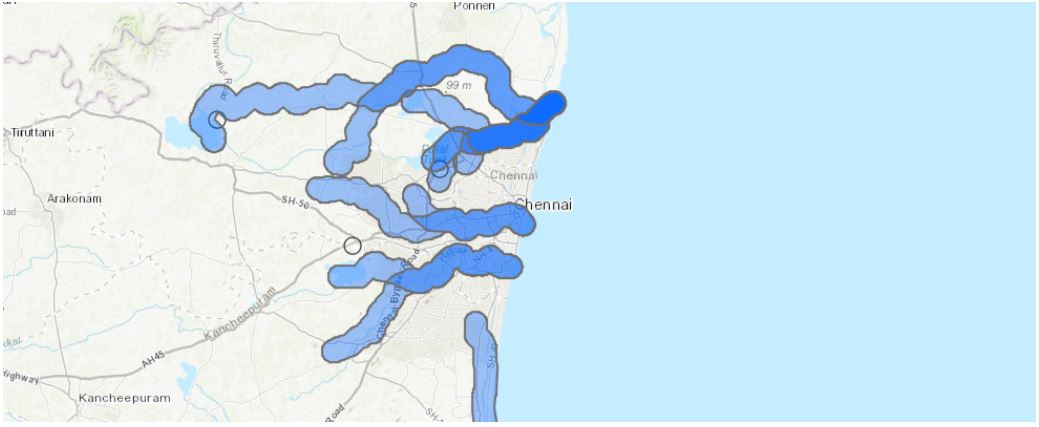

In [70]:
lakemap = gis.map("Chennai")
lakemap

In [228]:
lakemap = gis.map("Chennai")
lakemap

Map(center=[1467969.8350553361, 8928029.703803757], extent={'xmin': 8926805.189405032, 'ymin': 1466712.7727426…

In [229]:
lakemap.basemap.basemap = "gray-vector"

In [230]:
lakemap.zoom = 10

Let's have look at the major lakes and water reservoirs that were filled to the brim in Chennai due the rains. We plot the locations of some of the reservoirs that had a large outflow during the rains:

To plot the locations, we use the [geocode()](/python/api-reference/arcgis.geocoding.html#geocode) function from the [geocoding](/python/api-reference/arcgis.geocoding.html) module to get the coordinate location for 3 places. A Web GIs can have more than 1 geocoding service configured, so you can use the function's _gis_ parameter to specify a specific geocoder. For this example, we'll use the default service configured for the organzation by not providing an argument for that parameter.

After geocoding, we'll update the returned location with spatial reference information, then initialize a Geometry object from it to draw on the widget. Lastly, we'll configure a popup for each feature and enable it in the widget. 

In [231]:
reservoir_locations = ["Chembarambakkam, Tamil Nadu",
                       "Puzhal Lake, Tamil Nadu",
                       "Kannampettai, Tamil Nadu"
                      ]

for loc in reservoir_locations:
    geocode_res = geocode(loc)[0]["location"]
    geocode_res.update({"spatialReference": {"wkid":4326}})
    geocode_pt = Point(iterable=geocode_res)
    lakemap.content.draw(geocode_pt)

### Enable the map for popups

In [232]:
for idx,lyr in enumerate(lakemap.content.layers):
    print(f"{idx:<6}{lyr}")

0     <FeatureCollection>
1     <FeatureCollection>
2     <FeatureCollection>


In [234]:
for i in range(0,3):
    popup_mgr = lakemap.content.popup(i)
    popup_mgr.disable_popup = False  
    popup_mgr.edit(
        title=f"{reservoir_locations[i].split(',')[0]} Reservoir",
    )

In [233]:
from arcgis.map.popups import FieldInfo

In [249]:
for i in range(0,3):
    new_list = lakemap.content.popup(i).info.field_infos
    new_list[0].visible = False
    lakemap.content.popup(i).edit(
        field_infos = new_list
    )


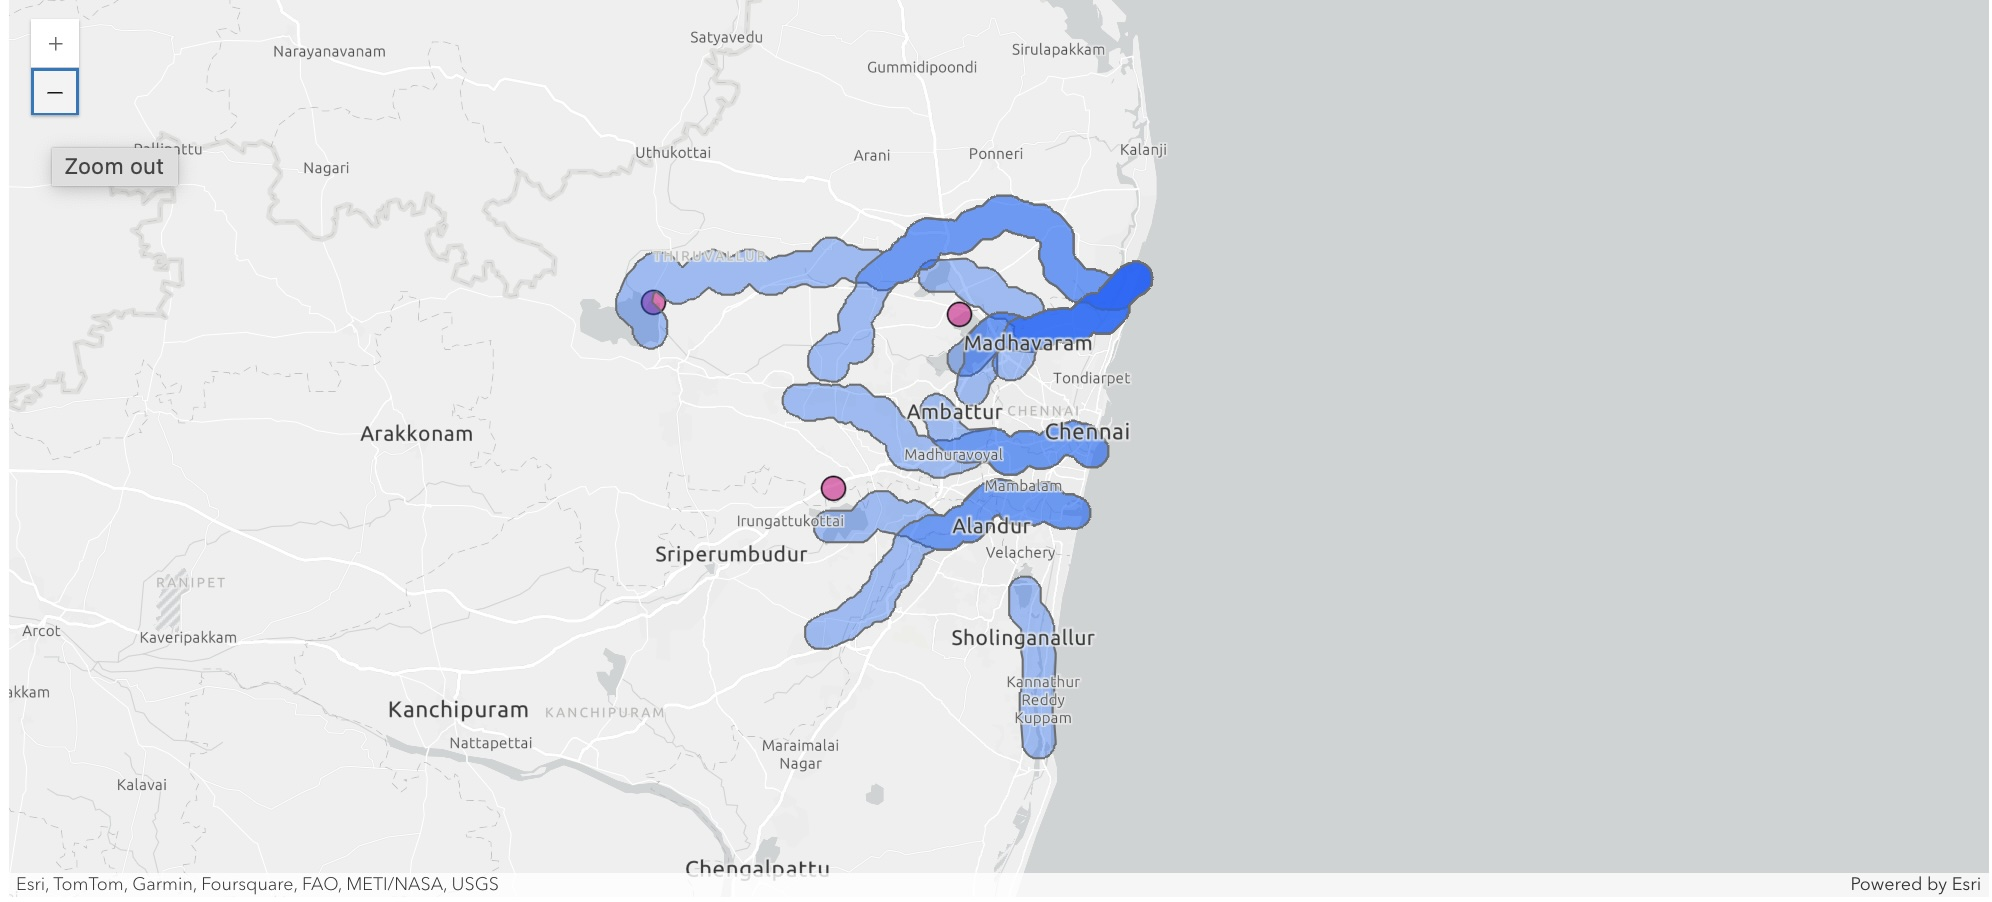

In [257]:
from IPython.display import Image
Image(url="data:image/jpeg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAACQAAAAAQAAAJAAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAB8igAwAEAAAAAQAAA4akBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4g/QSUNDX1BST0ZJTEUAAQEAAA/AYXBwbAIQAABtbnRyUkdCIFhZWiAH6AAFABYACQAWADphY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFkZXNjAAABUAAAAGJkc2NtAAABtAAABJxjcHJ0AAAGUAAAACN3dHB0AAAGdAAAABRyWFlaAAAGiAAAABRnWFlaAAAGnAAAABRiWFlaAAAGsAAAABRyVFJDAAAGxAAACAxhYXJnAAAO0AAAACB2Y2d0AAAO8AAAADBuZGluAAAPIAAAAD5tbW9kAAAPYAAAACh2Y2dwAAAPiAAAADhiVFJDAAAGxAAACAxnVFJDAAAGxAAACAxhYWJnAAAO0AAAACBhYWdnAAAO0AAAACBkZXNjAAAAAAAAAAhEaXNwbGF5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbWx1YwAAAAAAAAAmAAAADGhySFIAAAAUAAAB2GtvS1IAAAAMAAAB7G5iTk8AAAASAAAB+GlkAAAAAAASAAACCmh1SFUAAAAUAAACHGNzQ1oAAAAWAAACMGRhREsAAAAcAAACRm5sTkwAAAAWAAACYmZpRkkAAAAQAAACeGl0SVQAAAAYAAACiGVzRVMAAAAWAAACoHJvUk8AAAASAAACtmZyQ0EAAAAWAAACyGFyAAAAAAAUAAAC3nVrVUEAAAAcAAAC8mhlSUwAAAAWAAADDnpoVFcAAAAKAAADJHZpVk4AAAAOAAADLnNrU0sAAAAWAAADPHpoQ04AAAAKAAADJHJ1UlUAAAAkAAADUmVuR0IAAAAUAAADdmZyRlIAAAAWAAADim1zAAAAAAASAAADoGhpSU4AAAASAAADsnRoVEgAAAAMAAADxGNhRVMAAAAYAAAD0GVuQVUAAAAUAAADdmVzWEwAAAASAAACtmRlREUAAAAQAAAD6GVuVVMAAAASAAAD+HB0QlIAAAAYAAAECnBsUEwAAAASAAAEImVsR1IAAAAiAAAENHN2U0UAAAAQAAAEVnRyVFIAAAAUAAAEZnB0UFQAAAAWAAAEemphSlAAAAAMAAAEkABMAEMARAAgAHUAIABiAG8AagBpzuy37AAgAEwAQwBEAEYAYQByAGcAZQAtAEwAQwBEAEwAQwBEACAAVwBhAHIAbgBhAFMAegDtAG4AZQBzACAATABDAEQAQgBhAHIAZQB2AG4A/QAgAEwAQwBEAEwAQwBEAC0AZgBhAHIAdgBlAHMAawDmAHIAbQBLAGwAZQB1AHIAZQBuAC0ATABDAEQAVgDkAHIAaQAtAEwAQwBEAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBpAEwAQwBEACAAYQAgAGMAbwBsAG8AcgBMAEMARAAgAGMAbwBsAG8AcgBBAEMATAAgAGMAbwB1AGwAZQB1AHIgDwBMAEMARAAgBkUGRAZIBkYGKQQaBD4EOwRMBD4EQAQ+BDIEOAQ5ACAATABDAEQgDwBMAEMARAAgBeYF0QXiBdUF4AXZX2mCcgBMAEMARABMAEMARAAgAE0A4AB1AEYAYQByAGUAYgBuAP0AIABMAEMARAQmBDIENQRCBD0EPgQ5ACAEFgQaAC0ENAQ4BEEEPwQ7BDUEOQBDAG8AbABvAHUAcgAgAEwAQwBEAEwAQwBEACAAYwBvAHUAbABlAHUAcgBXAGEAcgBuAGEAIABMAEMARAkwCQIJFwlACSgAIABMAEMARABMAEMARAAgDioONQBMAEMARAAgAGUAbgAgAGMAbwBsAG8AcgBGAGEAcgBiAC0ATABDAEQAQwBvAGwAbwByACAATABDAEQATABDAEQAIABDAG8AbABvAHIAaQBkAG8ASwBvAGwAbwByACAATABDAEQDiAOzA8cDwQPJA7wDtwAgA78DuAPMA70DtwAgAEwAQwBEAEYA5AByAGcALQBMAEMARABSAGUAbgBrAGwAaQAgAEwAQwBEAEwAQwBEACAAYQAgAGMAbwByAGUAczCrMOkw/ABMAEMARHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjQAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAIPfAAA9v////7tYWVogAAAAAAAASr8AALE3AAAKuVhZWiAAAAAAAAAoOAAAEQsAAMi5Y3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArhQAAFHsAABD1wAAsKQAACZmAAAPXAAAUA0AAFQ5AAIzMwACMzMAAjMzAAAAAAAAAABtbW9kAAAAAAAABhAAAKBR/WJtYgAAAAAAAAAAAAAAAAAAAAAAAAAAdmNncAAAAAAAAwAAAAJmZgADAAAAAmZmAAMAAAACZmYAAAACMzM0AAAAAAIzMzQAAAAAAjMzNAD/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAff/AABEIA4YHyAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP7+K8P1b/kK3P8A11f+de4V4BrlzLNdXkmk+XLIJ5EG5sLlXKnJAPTB4x2xxQAlc/c+KNEtZWtxKZ5Y22tHbo07KfRhGGK/jipdO0u7hm+3andvczkbcD93CoOOFjH06sWYdjjitugDMu7jUTYibSYFeZgCqTMYgM+uFYjHpioNI0ltPgdryU3NzOd00jDAJ6YVeioBwq/nk5J2qKAOfbwn4WeRZW0y1LKQQfJTII9OKv32kaVqZjOpW0Vx5RynmIG2n2yOK0aKAEVQoCqMAcACqFxPYW17bmfCzXBMMRxyTtLlfyUn8K0KxtYsZ7tbaW1CmW2uI5F3cDb91/8AxxmxQBs0UwOhbYCMgA49AaztU1MabEojjM08p2xRL1Zv6Adz2H4CgC1eXtpp9ubq9kWKNcZZuBzwB/QCs+w1g6lPtt7WdYcZ86VPLUn0Cth//HQKuadFexWqjUZBLMclio2qM9lHoOgzzV6gDFTRIG1I6rfObiVT+5D42wjGPkAHB9W+92zjitqiigAooooAKKKKACiiigAooooAKKKKACiiigDPv7EXpgO7b5EqydOuOMfrUVjrmi6nI0GnXcMzx8MiOCyn0IHIrVrnPFEWlDR5rvVLOK98pf3cUiq29zwijcMZZsAUAdHRTUBCgEY+lOoAKKKKAN7w3ffYtURX5jm/dsP97p+v6VR1WwOmX8ln/Cp+U/7J6f4VnEZGK7i/t4fFMa6hprj7THGFeA8dPTp64z0PtQBxFFPkjeJzFKpVl4IPGKZQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBjeHUNvpD6e3/LrcyRj/AHcBk/8AHSK8h1fSjrPi9oZ2YQlynDEDJYDoCM4Ar3VFjSENDg+bI7sR/shEH/oJH4V41Y3Sz+OHswOUkEmf95mx/wCg1LA6628CabAgjMj7VGAFwP8AGuvs7OCwtltbYYRelWqKdgCiiimAVLB/rCfSOX/0W2KiqeEHy5ZP4VXb+LEDH5Z/AUAQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB10I/tbww1uozNYEFQOvl/T6ZAH+yK5Gus8Gf8hhh/wBMm/mtcfF/ql+goAkooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAObHhPQt7tLAJFf+B+VH0FfPnjHwJf6Dqapp0bz21wcQ7RuIP9w47+nqPxr6nooWgnG58U6ho2q6SQNStpIN3TepAP07Vm19w3NtBeW72lyoeORSrKehBr478SaHN4d1mbS5skIco395D0P+e9WmZSjYwqKKKZJ2HgrxND4U1KXUZYjNuhMaqDjklT19OPSvqywvrfUrOO+tDmOQZH+H1HSviOvoX4faxFDc2ulIwVL2087YQBiWI+UduP7ypkj1Galo0g+h7HXzv8Q/AH9mFtd0RP8ARjzLEv8AyzPqP9n27fTp9EU1lV1KOAQRgg9MVKLaufDNFeqfEHwG2hyHV9KXNm5+ZR/yyJ/9l9PTp6V5XVmLVgooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/AGaP+R7u/wDrwf8A9GR19w18Pfs0f8j3d/8AXg//AKMjr7hqGbQ2P//Q/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6rS3EcV3aW0uQtzcRQ8dR5jBePzqzWLqX/IT0n/ALCFp/6NWgD2H/hAtN/5+bj80/8AiaP+EC03/n5uPzT/AOJruaKAOG/4QLTf+fm4/NP/AImj/hAtN/5+bj80/wDia7migDhv+EC03/n5uPzT/wCJrL1zwpp2jaJeauJ52+ywSS4JXHyKT/dHpXptcr45x/whOsZ6fYbjp/1zNAHhN3pNnrcUV+C1vcquI7iLAkQHtyCCP9lgV9q2LWO4jgRLtxJIBhmVdoP4ZOKZpT2406LbFn5R99yf/QQlaHnEfcSNf+ABv/Q91AEG9AcZFOqx9rugNokYD0HA/IcfpTftE3fYf96NG/mtAENFTlLeQ7oXWL/Ybdx9CARj0yQR096b5EnYxkf9dY//AIqgCKipfJk7tEP+28X/AMXR5Lf3o/wkQ/yNAEVFTeR2Dx/99gfr0pssM0C+ZMhVezEfKfoeh/CgCOiiigAooooAKKKKACiisCTWLuRl/suye5idA6Th4xEQfT5t3/juKAN+s3UNPjv2tzMxCQTLLtGMMVB2g+wbDDHdRTY724t7FrzWo0t9mSfLcyAKO5O1f5YFZ/iI/b/C9zc6WVncRedAVOVZ4/nTBHbIFAHSUUyN1ljWVOjAEfSn0AFFFFABT4pJIJFmhYo6HII4xTKY+dhxxQB2Q1PStciEWu/uJl+7MgwCPf0/l6YrC1XS59Iuvssx3cAhgMAj/PaucjmdWAJ4rvPEfNjpxP8AzwH8hQBylFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZ2patpWi24u9YuYrSIkKHmcRrk9Bk4H4VfR0kQSRkFSMgjpigB1FFFABWLrV3cwxR2Vhj7RdN5cZPReMlv+AgcDvWtJIsa5Ncvfx3F9remwRdS8n0UbDyfYUCOohtIrC1t7CHO2CFFGeT83z8+/wA3NeL+H7Z28dPekfLIFUf8A8w/1r2K5vN95LND/qy52j/Z/h/TFeTeEJxc+Iyij/U5z+K5/rSYz2OisPw14k0HxhoNr4n8L3Ud9p97GJYLiE5SRD0Kn0rcpgFFFSwbQ5dlVtiMcMARnG0cHjhiKAGpGGXzHO2MHBI6k+i+/wCg70PIZMDG1V+6o6D/AOv6nv8AkKla6kkVUnWOQIMKCuwAe3l7Kb/ordQ8f0w4/I7SPzNAENFTC3ZjiBkk9lOD/wB8ttJ/AGomDRv5UgKOP4WGCPwoASiiigAooooAKKKKACipVgmdA6r8rdMkDI9skcfpTxZ3Z+7Ex/3Rn+VAFeipZre5tl33MTxL6uhUfqKhGCOKAOk8JzLFrkaH/lorKPyz/SsS7QRXk0K9EkZR/wABOK0fDpVdftGbgbmH5owH+FVdVieHVLmOQYPmucezHI/QigChRRRQAUUUUAFFFFABRRRQAVLCqmUbxlVDMR/uKTj8cYqIAswjQZZuAAMk/QVOQIEdGI8xwFwvO0ZB5PTPGMDPvigBrBWhEyoEIbYwXOORlTyT1w35VFU0Pzb4R/Ghx/vJ8w/QFfxqGgAophdFO0kCn0AFFFFABRRRQAV8qfEbV7/U/ETwX0C2/wBl/douPmK9QSe+eo7AV9V18vfE/V7DVvEQ+wkn7PH5Lkrt+ZScjn0pxInsecUUUVZkFdl4Ou5n8UaUm44iYRr2wpJOP1NcbXaeAdR0fS/EkV1rKjywCEc9I37HH6e3XtSHHc+tKydY1zS9AtlvNWl8qNmCA7S3OM4+UHsK00dJUEkRDKwyCOhFcj4903+0/Cd5EAN0aeauR08vnj8ARUGzOG8dePPDup+GptN0mfzZZiq4CsuACCeoHpivAaKKtIxbuFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f/AF4P/wCjI6+4a+Hv2aP+R7u/+vB//RkdfcNQzaGx/9H+/ivF9Us71tUuCtvKQZXIPltjGfpjFe0V4Xq8UX9q3Xyj/Wv296AIfKjT/XSAf7KfvD+mFH/fWfasPU2g/tLSQkX/ADELXlmJb/Wr/d2r/wCO1rVi6l/yE9J/7CFp/wCjVoA+mqKKKAOH+Jvj7R/hR8NvEPxR8RRTTaf4a0y71W5jtlVpmhs4mldYwzKpYqpCgsoz3FbnhjX7PxX4a07xTpyulvqVtDdRLIAHCTIHUMASAQDzgkV+b37Z1h+23/woX4rzf2t4H/4Q/wDsDXT5P9n3/wDaX9m/Z5vl8z7X5P2jyeN3l7N/O3HFelfs52H7baeHPBsvi7VvA8nhYafZGWKz0+/S/Nt5K7Qsj3bRCTGMkx7fagD7zrlfHX/Ikax/143H/os11Vcr46/5EjWP+vG4/wDRZoA8Z0r/AJB8X+6K0Kz9K/5B8X+6K0KACiiigAooooAKKKKACnRPJA/mQMY2PdDtP6U2igCbzt3+tjR/fbtP5pt/XNKYomtGu49yYkEYRsNu4BOCNuAAR/DUFSrzbOP7roR9CCD/ACX8qAIqKACTgVfXS78rvaMxr6vhB+bYFAFCitH7HbR/6+5QeyAuf6L+tJv0uL7kckv+8Qg/IA/zoAz6wNMsbnS9QuLaMZspj50fT927ffTH90n5h7kjgYFdh/aLD/VQwoO37sNj/vrNYdz4h1YeILTTIGCRtDNM5RFX7hRVHAGM7ifwoAtVj22h6XZXz6hZqYnfO5UdljJPU+WDs3f7W3NdV/a+q/8APzL/AN9mj+2NV/5+ZP8Avo0AZo9qWtH+1tS7zMaT+1L7u+fqB/hQBn1dj02+lXzFiIT+83yr+ZwKk/tW/H3X2n1VQp/MCqMksszb5mLt6k5NAF9dPgBAubuOL/dBk/8AQRj9aguE0IDyftE+V6t5Y2t9BuBFeW6T8Wvh5rfxM1b4O6dqUb+JNDtre8u7EgrItvc/cdcgB14wdpO3IBxkVq+E/HPhTx8NUXwzcfaf7G1CbS7v5GTy7q3xvT5gM4yORwe1AHYXNjBE8ctuxaGVcoTwcjgg/T+WK6zXsyaXpswHHlbfxAFczYzxQwGz1BS0THKlPvRvjGR0H1FdjdwwajoNrFZzxtJDnhvkyPoe/SgDiqKlmgmt38uddpH5fmOKioAKKKKACiiigAooooAKKKKACiiigAooooAKKKZIcIedvYH37UAPorCs9D+ytG7XlzKUxnfJw31HSpr/AEue7dZra9ntWUAfu9pU49VdWH8j6YoA16KzrVdTt7VvtrpcyjJXy08vI7DBZuffgewpmk6ouqQu5he3khcxyRybdysAD/CWHQgjB6UAalFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8Q/tE/B/xJq3xZ0n40QeEdP+JGk6dpM2mT+Hr5o1lgMkokN1ZLcKbd5WUeW6SGMlVXa/UHhvEXxz8HXXwx8G2f7NWs6j4ajvdPuLqy0bR/Dh1O4S2tnELCa3VSLaOCYGJxldz/Kp4r6q+JHwRtPiNraa8PE/iPQJRbrayJo+ovaxSRqzMMx4ZQ/zEeYgV8YGcAY4qX9kX4V2VhoVr4Hn1XwtN4dsX0y1utJvpIrh7SVxK8czv5nnbpB5haQF95JzkmgD5VsvHPj/APaH8V/s9/Ebw7qi+FdV8SeD9c1Kd47ZbmNGkXTGdFilIGMk7c5KjivT/Hfx4+J/w6j+I3w2uLpL3xTY/wBjt4WmkgVPPj10pZQkoo2v5N8su/A4Tbn1r2W6/ZR+GB8FeEPBWgz6noo8C25tdGvdOvHhvIIHjETxmTncsiqu4MDyoIwQK5BvgL41+IX7QPhfxp4x0uztNH+H0VzFpdxHqEt/qGqmUKsZuleGNY1i2CbmSVjNg5ABLAHjP7RP7R3iz4beNL3U/AviDUNWtPDl5p1jq2mRaC02nRPctCJI5tRRAIpmjmWRcNtQlQy4Ndr46+Nnjn4c3XxN8B24jm8XJc6VF4VaSJQ0lt4h221sCMfvFhu45/MOOI4xu4r0bxp+yv8ACjx94q17VZNR1Wz0/WL23uNTsrO/Men6heWyRDzWiIYAjyo1Plld3lgnmvWvE/wW+HvjL4meHfi9rlq0mt+GFnWxlVyq4nUr86jh9mSY8/cJJHNAH58fEv8Aag+On/Cd+PNK+FkGp3b/AA/uo9NtNNtfDlxqMGs3aWsNzItzeQoVtt5mEaCPbsGHOQQte16lrfxP8dfHDWfhr8MtYi8IW3hzTdL1C7lmsVvLi5udU87y02yMqpFElvhto3MxwCu2vavGH7PngXUvGN98RbXWNa8OXuqmFtT/ALJ1GW0ivmt1CIZUXI3hAE3ptcqACcAVwXxS8BeDfiN8QIfGGlXOqaPrcduLCe+0a8azke1Ul1jmChonAc5QMu9dxKkZNJgeXfsceOfEtrpHwr+GnnL/AGTeeAbnUpI9gBNzbXVrEpDdQNkzZXOOnpX1R+zx438Q/EL4ZjxJ4okWa7/tXWLTcqBB5Vlf3FvFwMDiONQfU1gz/stfCu78J+FfD2lTavoM/hC2e002/wBMvngvIoJgokiZsYdH2KWVwRlQRgivXPh98MfD3wg8IWvgfwo80thC086S3Mhllle5leaV3Y9WaR2J9DwOMUwOyqVOIJj67E/M7v8A2SoqmI22q/7blvwQbR+pYfhQBDRRRQAhAIwelTLPOkfkq3yD+BgGT/vlsj9KiooAm3wN9+Lb7xtj9G3D8ttJm1H8Eh/7aKP/AGmaiooAn2QyLugOwjgrI6/gQcKPYjtxUTo0T+W/BGDxg8EAjpx0xTalEx2hZUWQKABkbSAOnK4/XNAEJIAyaseWkAP2hcydoz0H+9/8T+eOlCzJCQ9qrK/95iGK/wC7gDn3xx29argADAoAc7PIxklO5j1JqMxxnqo/Kn0UAEJNs2+2JiPqh2n9KmM7Mf3qpJ/vLg/99Ltb8zUNFAE6tb7gwEkTAggqQ4BHTA+Uj/vo11vieMXOm2Os5BaRFDELjduGQfYDn86wtCsY9R1WK1mXdGclx04A/wAcVd8Qav8AbtTbhvJizCU9Rnkj34BH0FAHN0U6SMxOYyQ2MYYdCD0I9iKbQAUUUUAFFFJkbgg6noKAJlWNUEs3zBs7UHGcccnsPpz9OtLutj96Nk/3GyPyYE/+PU+WKSK3RJxscO/ytw2CF/h6jGPTvVagCZpVVfKtsqpGGJADP9cE4HbaDioAMcClooAcjvFIssfDIQw+q8iniSNOIoUUe+XP6nb/AOO1FRQBYW8vEGI5Sg9Ewi/98qAv4YpPLWZS0A2sOWjHp6p7f7Pbtx08I+N/xc1D4V23h7T/AA/pcerav4q1ePRtPhnuBaWyzPFLMXmm2SFVVIWwFRmZsKBzkUpviD8VdB8O2F7470rRdH1CfXbLTMDU5JbeSC5dF8yGT7NG/nZYrHEyLll+8AQaAPfAQRkdKWvFNT/aY+Adp4t1PwhceKdPj1LR4p5b+DzQTbi0iM05lKjahSMF2UkEAV6G3jTwoup6Xopv4Rd61DLcWEO75riKAIXZB3Ch0z6ZFAHUUV8m/Cz9pvw5P+zL4M+Onxu1Cz0STxJZW8shVWWH7RMhfZGvztjCk98AV6t4h+PfwY8KeCdO+JGveJtPg0LV2RLC984NFcs6llWIrnedqscLk4B9KAPXK8y8e+AovEMR1PSwEvkHToJQOx9/Q/geMYq2/wAdPg/efDmX4uWPiKxuPDUB2yahDIJIUbcE2nbkhtxC7cZycYrzvx/+0NoLfB63+Knwc1Gx1u3m1vSNL81D5sai91C3tJlIUqVkRJTgHBVsZGOKBWORbwp4nQ7Tp1z+ETH+QrJu7K8sJfIvoXhfGdrqVOPoa9T+KvxvtPDsNlbeA7u0vruPxTo2g6kn+sFuNQnjSRDtIAlEb5A525GR0rV+InxS+CVv4V1TWfFWsWv2TRbv+z7idGz5F6QP3O5Q37zkZQAkdx2quYjkPDqK5+58bfDey8DQ/E668TaYnhy4KpFqJnX7PI7sUCKw6vuBXYPmyMY4rj7X48fs93s9ta2vj3Qnku3EUafa1BDltgVwceWS3ygPtyeBTI5WfSXg3x/feGWWyucz2WfufxJn+7/h0+lfSEGsaTfaU2rQSrJahCzN2Cgc5HsO1fGt3ay2Vw9rOMOhwRUttqN/aW81nayskVwoWRR0YDn/AD7cdKGilK2hseGNfh8N6x/af2ZblQCFV+CPQg44I+nSovC+gy+I9ah0uPhDzIw/hQdf8B74rn69W+Dw/wCKmn/69W/9CSgS7HF+K9Gi8P8AiC40mBi8cRXaT1wyg/pnFc7XqHxcgSHxSsidZYEY/UEr/IV5fQhPcKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/wCR7u/+vB//AEZHX3DXw9+zR/yPd3/14P8A+jI6+4ahm0Nj/9L+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgDPrF1L/kJ6T/2ELT/0atbVYupf8hPSf+whaf8Ao1aAPpqiiigDkPiB4I0L4meAtb+G/ihXbTPEGn3Om3axtscwXcbRSBW7Haxwe1a/h/Q7DwzoFj4b0oEWun28VtCGOSI4lCLk/QCtiigArlfHX/Ikax/143H/AKLNdVXK+Ov+RI1j/rxuP/RZoA8Z0r/kHxf7orQrP0r/AJB8X+6K0KACiiigAooooAKKKKACiiigAq1aQyXDPbR4y6ZGSAMoQ3U8dAR+NVa09PVljnucfKsRXPbLcY/WgCeMyaZaSlJVEsm1B5bgnb1PK9OgrGZmdtzHJpKKACiiigCreXlrp9q95eOI4oxkk/5/AAVFaxwzsuqeUY5ZI1XD8MF64I6DrUNxp9rf6hDdysX+x7sR8bA7YwxH95R930DfStWgAooooAKKKKACiiigD8x/EHwq1jx3+098U/F/w9mSx8a+Fo/Dl5od0/CM5t5vNtZvW3ukHlyD+Hhx8yCvJ/hz8Z9G1L9m3xp4i8ReHQ3/AAmfxIutMfTdWu206Cyurlosre3MQZokhkQo5VTuYBQPmr9g4dN062vJ9Rt7eOO4uQgmlVAHkEYwu4gZO0cDPSs658LeGb3TbvR7zTrWWzv2Z7mB4UaOZnxuLqRhicDORQB+N+hat4pj/Z5+LHw8v7yGGx0f4heHNKs4tG1O4u7aCw1B9GeaCC6fZN5T/aJdy8Bd7IPlr3H9oPw58NNA13R/2bfB/hvSITa6Zea7b3Oua7d6VbxCWRYmW2aISySz7lDHJAiXBH3sV+h+keAPAnh/Rv8AhHNB0SwsdPMizfZbe2jih8xCGVtiqF3AqCDjIIHpWn4m8B+B/HWiiDxto1jrEdtOjRLe28dwqFlbJUOpAPA6UAflN4P+Pfiv4TfBb4N/tk/EK8udUs9d8Aw6Rr24tJ5l/LbR3llMQP45ZUlgLY+Z50HoKd8RdIjsPB/gz9nTxPpmmXPinSPCp1q51PXtdudMC3V0xWcWpt0dppxOpbJwIl24+9ivvrx38CrL4g6xpUGsaxdQ+FtKe1nHhy3it47Gaeyk82FpG8rztisEPlLIsZ2LkYyD6d4p8C+CPHEMNv410ax1iO3bfEt7bx3ARj3UOpwfpQB+cPw50lP2j9P/AGfYfi9Jca2ut/Da41m+j+0Swia+2aV++cROm5x5r4J6bjiubu/GNp/wpvw58D/F1pbeJJL3xZ4j0nT7rxJqs1haQ2+iXVysInuY1eWSQQARxIQS+3JPy5r9XLPStL0+a1ubC2hhksojBbskagxRHblE4+VflX5RxwOOBVnUPBvwv8X6FJ4Y8V6LZNbSyGZ45LdJreSVjuLNEwK7ixJJx15zQB+Qfwr8b+J/CXwG8FfH7xjqRksfh74x8RaLqxhupLy3Ghy311p6ESvh5o7VltmSRxu8qMk45rotb1oXnwr8I6F8QNFs73Vfivq2peJ408R6pNpljYJt8yCGSSFXfzEtXiRIAMFlc5G3NfrHbfCzQbHw4fDHh2wsJNH2GP7HbxRpBsbqvlY2YPpWH4p8F+HfEmm/8I/420m3v7MkH7NewLLESvQ7HBXjtxQB+S3wobU/ir8D/hD4M+Jt0+o2k/j7xLo91HDfTSxT2mlnWY7eIz5SSaKNYIgjPywRSRmuz1vxJo3wj8C/EL4QX1odc0IeNdP0HSbXVtSmtrOyj1Gys7oLPefvJY7aOZnI+8fmEY4IA/THTvCvhfSLKz03SdNtbW205i1rFDCiJAxBBMaqAEOGI+XHBNPvvDHhrU7S8sNS0+2uINRwbuOSJGSfACjzARh/lUDnPAA7UAfjZoeq+KE/Z4+LHw71C8hisNH+IfhvSrSLR9SuLu2gsdQfRZJoILp9k3lObiXcvAXeyD5a9H1n4BfDuH4vfFr4fWQ1G30zw54Q0nW9Fij1O8VdOv73+0kllgHnYVj9khbpwV9CQf060jwB4E8P6N/wjmg6JYWOnmRZvstvbRxQ+YhDK2xVC7gVBBxkED0rebSdKe4nu3tojLdRrDM+wbpI0ztVjjlRubAPAyfWgDzX4B+JNW8ZfArwV4w1+Tzr7VdB028uJP70s9vG7n8STXrVV7S0tNPtIrCwiSCCBFjjjjUKiIowFUDgADgAdKsUAFFFFABXOaqkl7rFhp4B8qMtcyHHyny8BFP/AAJgw/3K6Osu91EWV9Z2jrxdu0QPoyoXAx9FP5UAalFFFABWda29jaXtz9nwJrllmkXPJIURg4+iAfhWjWBdWtwPEVnqEQJj8maFwOnzbGUn6bCB9aAN+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK0dMwkslz/zwjLj68KPyJB/CgDmfFlhdxeH5Jy3lH5Ts/iZfp2H1xXiemSa7rGmMulnDH5ZU5ZcqcEYBGRkVr6x4u11NRlstVYxpKdoJAIJP8JyOD6etP8ABEU1n4gkCHMc+Wx6fLyPzGfxqAMWYeLWlSzvkBSHlslsqh9Fx3x644pbLxPqujyuthazSA/KfubeO/zMK9ftR/xU96P+na2/9ClrYSys4+Y4kX6KBT5QPI7O01zxSwuLhWGeCXPCj044/AV32h+FNK0OJVhQFl6HGAPoO1dPRTSAKt295JAphYCSJuqN0/D0PuKqUUwNCW1ilhNzp+WCjLRn76j8Oo+n5VWuRsm8j/niPL/EZ3f+PE/hUcUkkMizRHaynII7VoG8guv+QhH8x/5aR4DfiOh/Q+9AGZRWj/ZzSjNi6zf7I4f/AL5P9M1QdHjYpICpHY8YoAbRRRQAUUUUAFFFFABRRRQAUVwPxH+J/gj4TeH18S+Orz7JbyzJawJHG8889xL9yKGGJWklkbBwiKTgE4wDWX8Ofi54c+Js17Z6RY6tp1zpwiaaDVdNudPfbNu2MvnxoHB2N9wnGOccUAepUUUUAbfhpiviC1A4yXB+mxqz9Q/5CNz/ANdpP/QjSWNybK9iuwceWwJx6dx+XFaXiRYU1eSSFgUkAcY7cYP6igDIyHtm3dYBuB/2CwBH4MwI+p9qhHtXNaB4ng8S3OvaTZ2l5C+kzJZu09u0STMRDNuhYjEkeGA3LxuBHavOdf8AjVovhTxN4i8KXunahdy+GdJsdWnFhD9qlljvpZ4lSKKPLM6m3JPHQj0oA9rJCjJ4FT/Z5AoeXESnkF+Mj2UDcfwGKUXHlkG0Xy/Rur/n2/4CFqv3LHqep9aAJ91un3FMvu/yj/vlTn/x78KPtE+0xq2xT1VAEB+u3GfxzUNFADVVVGFGB7U6ivF/E/xr0Xwr4z1nwZc6dfXc2iaAmvyfYojcSSwvLLEIook+d5MxHgDnIxQB7RRUUEongSdQVDqGAYbSM+o7fSpaACiiigDwX9od/h/ceCE0D4n+Eb/xhouozLHNb2Fg2otAVBZZWjj/AHq7SBteNSytg8dR8Z+E/CPxc1rwZHp1vpviA+FrX4heH7zw5aa9vk1S20qB7drlpfMZ5lhjmEpi84+YsY5421+o1WLNgl7bs3QSxk/QMKAPg3Q/hJ4z8SfBv46fD2W1exu/GGreIY9Oa4GxJI7+0SGKQH+4W7+1cv8AD/WPF/xE+NfwsvLnwjruh/8ACIaBqtpq76lZNBbw3NzFZokccx/dzZaF8NGWXAFfofGpSNUPYAflT6APyh8Hr8d/AH7OXwq+H/2XxR4Z0/Rra40vxLLoOnQ3mqx3FmqLbiKOWK5zbSt5hM0UTnATBUEmud8CR+Jvgr8HPgpJ4x0jW765tPHniO4+ym0B1R7a6XWZIZGtkEeGMMiSNGiKQOFQY21+wFYWreGdB1y/03VNXtUuLjSJzc2bsOYZmjeEsvv5cjr9DQB+a2pR/HqCPxx8Y/hnpGt+GNK8Y+ItJ82CCyhfW4dNtbbybu+hsplkUTTSCNQjxtJ5ab/L3YFea6B8Hfip4m+BfxW0axfxR5vif4i6FqOl6jqlnHaawbSL+xlmu/I8iJFMDQTEEwAERbiD1P7IUUAfln4l+EfxP1P4Bw/s2QaRc6Hqeg+KdJC67o8R8q7tZrlZTqkbSeYROuWe5EhYrMC2SrKa2Ly4+O/gL4RaH8KNH0HU/Ddv4Z1oabrmoeFrCO9lutMNvJLHe6fFcrcbvOmMa3IKSzRv5nDcPX6aUUAfkJ4G+FHxHX4XWVw9nrd7n4qRawsmrWgtr5tOM6SG5mhSKFYx94t+6QDriuy8c/D3xTq+ifH7T4NKlnTxPYIdNQR5F5MNISL92P4m81Av+8BX6kEBhtYZB7V8i+N9Pt9H8U3en2OViQqVX03KGwPbnimiZOxseHvDK+KfE7afqUjxeXbpJJj7xIVARz05PpX0Vo/h/R9Ah8nSYFiz1PVj9T1rwv4PIzeIriXsLcj82X/CvoW7uEs7WS7kBKxIXIUc4UZ4ofYUT5U8WeE9a0VV1jUkVVu5GJVTnYx52nt09PSuq+DlvIdbubradiwFc44yWXj9K+lNaaxgtmtZYYBGsaEvMgcZ2g7sPlcZ5HGK8w+GvjTxL4hj1ax1af7RBEsRjZUCRrh8YVQFxkHPTPFO+gcqTOG+M1siXlheD7zo6fghBH/oVeKV9C/GS0V9Js77vHKY/wDvtc/+y189U1sRLcKKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8AI93f/Xg//oyOvuGvh79mj/ke7v8A68H/APRkdfcNQzaGx//T/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz68U/aB+INx8JPhTrPxVs7Zb2XwzaS6qlu7bFlayUzBCwBwG2YyBxXtdfKP7b/8Ayaj8Qf8AsXtS/wDSd66MHTjOvThJaNpfiYYqbhQnOO6T/I+D/Cf/AAV8/bJ8eaBb+K/A37POoazpV1u8i8sI764t5PLYo2ySO2KnaylTg8EEdq6L/h6b+3r/ANGy65/4Caj/APItfRn/AASi/wCTBPAX/cU/9ON1X6IV9NmOLyzDYutho4CLUJSj8dTo7fzHz2AwuY4jC0q7xrXNGLtyU+qT/lPxj/4em/t6/wDRsuuf+Amo/wDyLR/w9N/b1/6Nl1z/AMBNR/8AkWv2corj/tXLf+hfH/wOp/8AJHX/AGbj/wDoOf8A4BT/APkT8Y/+Hpv7ev8A0bLrn/gJqP8A8i1g3H/BWr9pSXxl4e+FXxc+C0/g6Hxrex6TDcaibq2YrcOkMjxLNAgkMYlUkDpkZxkV+3VfiT/wVa/5OK/Zq/7GO4/9KdNr0cqqZZjcQsN9RUbqWqnPTlg2vteRwZlTzDB0PrCxjlZxVuSHWSXSPmfsNpX/ACD4v90VoVn6V/yD4v8AdFaFfGH1gUUUUAFFFFABRRRQAUUUUAXLKBJpszcRRjc+P7o/x6Cm3N3NdEb+FX7qLwqj2FWZ/wDRLNLQcPLiR/Yfwj8ufxHpWZQAUUUUAFNdgiFz2GeKdWXrV8+maTcX8ShmiQsqnoT2FAFTw1a3FvpSzXqlbi5Zp5VPVWkOdv8AwAYQeyit+iigAooooAKKKKACiiigAooooAK0E/5BMv8A12j/APQXrPrQiG7S51XqskbH6YYfzIoAz6KKKACiiigByM8TiSIlWHQrwR+Vbtv4l1aFPKlZZ4+m2UbuP0NYFFAHS/a/Dd7xdWz2jf3oTlR+H+Ao/sGzuf8AkGX0UhPRJPkP+fwrmqTHagDbuPDutWvL27MB3T5v0HP6VjOrRv5cg2sOxGD+VWba+vbPAtZXjA7KcD8ulbKeKNTKeVeCO5TuJEH9MD9KAOejR5n8uFS7f3VGT+Qrat/DetXOCsBQer4X9Ov6VNJ4o1XZ5Vr5dug6CNAP55rFuLy7u/8Aj6leQejHI/LpQBuf2FZW3/ISv4kI6pH85/p/Kk8rwmnSS5f3AUf0Fc5RQB0fmeE1/guW/wC+f8RVG+XwfceTMba4DW0qyqSRj5eCPvdCpI+lZVRyxRTxNBMoZHBVlPQg9qAOqS98MSuBcWLRgnGVkbgfTis3VtMfS7rys7on+aN+zL/9auM8OfaodPOm3u4yWTmDe38aLjY2e+UIzj+LI7V6Fpt5Z3VidF1VtiD5oZOuw+n0/wD1elAHOVm6tNf21g9zpkQnljw3ldC6g/MF6DdtztzgZxnAruU0rRbT/Sb69SeJeiQ/eb24PH+elRz2/h68t3urOf7E0almjmPyYA5wf/1/QUAcjYX1rqVnHfWbbo5BkHGPwI7EdCO3SrdNTTTp8Qm8gwLc/veV27iwH64xkdadQAUUUUAFFWbWzur2TyrOMyH2HT69hWpN4a1uEZMBYf7JB/TOaAMKipZree2/4+Y2i/31K/zqKgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK0n/ANEsFhH37jDt7IPuj8ev5VTtovPuI4B/GwX8+Klv5vtF7LKOhY7fZRwB+A4oA5fXPD2n69bGC7QEkYzgHj0I7j2rx/e/ga9gC2qxIr7QEACjfwOBjgnjj8q9t1LUYNLtvtMwZvmVFVBlmLcADpXjtxBJ4m8RQ3FzIEQMcKeg4wPyGcD1qWB6RoM8mpX9zrXlmOKWOKJc9zHuJI9stj8K6qqkBsraFbeBlVEGAM9qsJJG/wDq2Bx6VQD6KKKACiiigAooooAKvpqVyFEc2JkHRZBux9D1H4EVQooA0caZcdN1u3v86f4j9aZJp1yiGWMCWMfxR/MB9cdPxxVGnxySQuJImKMOhHBFAEf0pa0hqHn/AC6ivnD+90cfj/Q5pslhuQz2TedGOTjhlHuv9RxQBn0UUUAFFFFAHxL+0hqmk+B/2g/hL8U/HsiWvhXTH1mwnvZyFtrLUdQhhSzllY8IGVJoFc4AaUDI3V5N+1J8d/8AhOvBPxZ8A+Cp7XUNL8LeGtE1z7bpsvnyHz7u4NypMZIxHDaBsDnDHPGK/Sm9srLUrSSw1GFJ4JV2vHIoZGU9iDwR7VheG/BPgzwbayWPhDSLLSoZjl47O3jgViPUIoBoA/P/AOJ/xK8PeLPjP4o1X4ea/b6jb2/wq1aZZdPullSOXz1KsDGxCtjBB4Neb+EP2ffhRP43+D2gXFhcPp/jDwhfX+sWv266EF3d2kdg0U0iCUK0i+fLyR/F7DH6haP4B8C+HkuI9A0WwsVvAVnFvbRxCUN1D7VG7PfNbiaRpMcltLHawq1mhjtyEUGJCACqcfKCABgYHA9KAPyt8OeG7Hx5pnwl+FnjiW51fRofFPi7S2hubiVjNbaV9vS1SVtwaQRLFGBuJ+6M1y2l/Dzwt4P+GviH4laDJqEPiPwd8SYNI0u+e/uZnj0warbW/wBkPmSspg8iVothGCuO4zX67xaFokDwyw2cCNbvJLEVjUFHlzvZeOC2TuI655qJ/Dugtby2v2OARTy+fInlrteXIbewxgtkA565AoA/M/4t6/q+kWvxJt9R1G4sPDUnxI0Wy8QXcMzwfZtFl0/T/O/eoQ0MTOyrKyldqOxyOa8x+IGifC7wZpvxxt/gdcQjTF8E6HIGsrxrqOOY3OoZCN5j7ONp2qQOc4yc1+1fhux8OFbvSNVtICmon94+wDzCVCYf1+UBQT2GOmMcTD8K/BPguC68N6Zoen2lrdcyxwWsccU47FlVQp/EcUAfm78Q7P8AZ+1/9pX4or8etdh0t9F0fRZ9Mmk1N7K4sleK4Mk1sFkQhtyryoOSAOelcf4H1i2+J9/4C0/9tvUDY29x8O9L1O3ttQum022udXkdhfSybXiBuYoxbkIT+6EjFR1I/Q63+BPgL/hZ2t/FTWLWLU77WVsQEu4Y5UtmsFdVaHK5UsH+Y57DFel694Z8N+KbRLDxPp9tqMEbiRY7qJZkDr0YBgQCOxoA/Jrwn4gTxvoXwo8O/H/WLk/D/Ux4pEN1qFy9smqfY7tU0YXk25C3mWHmTIHb98VDHJAFJaQWHjjSPDXw7F9daz4Am+LNxpeks91K6XekxaTdSmETBt01vFeLIkZLMMRKBkKK/WzV9A0LxBpb6Jr1lBe2UgAa3uI1kiIHQFGBXj6U9NE0aO3tbSO0hWKxIa2QRqFhKqVBQYwuFJAxjAOKAPyf8Z3Wq/C7wj8Vfhl4f1K+sPBmg+NPDcFw6XEhk0rQNSh0+TUVilyZI4gHlckN+6V3K4AGMX4gaF8JfBNz8Yl+AtzB/Zw+Fpn32N610iXHmXnKv5j7G2hG+Uj+91Oa/X9dL0xJLiVLeINeY88hBmXChRv4+bCgDntxXO6R8PPAHh+1urHQND0+xgvgRcx29tHEkwPXeFUBvxoA6HS/+QZbf9ck/kKv0gAUBVGAOgpaACiiigApjuY0Mg/hGfyp9SRJG+8y5Kom7aON3KrjPbr6dBQBJeII72eMdFlcD6BjVenyyNNK0zgAsSeOnNMoAKKntrdrqdYE4z1J6ADqfoBVrydLPCzyD6xjH6N/SgDOorSXTfOYLaTRSk8AZ2H/AMeC0h01ozi4mijx/tbv/QM0AZ1FaHkacn+suC3/AFzTP/oRX+VG/Sk+7FI/1cKPyC/1oAz6+RvH0/2jxhfP6OF/75AH9K+yzqlx91VjEY6R7AVA/Ef/AF6x5NK8KXM5ubzSbfzWOTJGoDE+vzBqa0JkrnyB4XsvEV1qiSeGlfz4ud68BfqTxj2PXpX2dptvNbWEV1r6p5xUfuo87WPrzyE/U/rUsDaZpyf8S2L5u29QFT6KOD+P5VQ+1C9Zp/M807iC2c8rwR+GMUNhFWPARBp3jf4l3setSuUjJWOPIAYRYXaMYwMDgAdK9C8I+D5vDPiHUPsnNjeQkRJuJYNGVkwRj/ZYLWqfCGjf8JEPE6qy3AHRThc9N2B3xx6e1dPl0w8XDLyv1HSgEjzf4q2n2nwi83/PCRJPz+X/ANmr5gr6/wDiJZLc+GNStrfhFTzUHoi4kX/x3FfIFOOxE9woooqiAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/AGaP+R7u/wDrwf8A9GR19w18Pfs0f8j3d/8AXg//AKMjr7hqGbQ2P//U/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6+Uf23/APk1H4g/9i9qX/pO9fV1fKP7b/8Ayaj8Qf8AsXtS/wDSd668v/3ql/ij+aOXHf7tU/wv8jz3/glF/wAmCeAv+4p/6cbqv0Qr87/+CUX/ACYJ4C/7in/pxuq+9PE19rOl+G9Q1Pw3Yf2rqNtbSy2tl5qwfaZkQlIvMb5U3sAu48LnJ4Fdef8A/IzxX/Xyf/pTObJP+Rdhv+vcP/SUblFfll/w0p/wVe/6Nb8Nf+HJj/8AlNXb/DX4/f8ABSDXvH2kaL8Uv2ddD8OeHbq5SK/1Sz8dxajNaQtwZVtjplv5u3qUEqnHTJwD5J6Z+i1fiT/wVa/5OK/Zq/7GO4/9KdNr9tq/En/gq1/ycV+zV/2Mdx/6U6bX0XCv/Iyh/hqf+m5HhcS/8i+XrD/0uJ+w2lf8g+L/AHRWhWfpX/IPi/3RWhXzp7oUUUUAFFFFABRRUkcUsx2wqWPoBmgCOtKCJLSIXtyASf8AVIe/uf8AZH60+OxazH2nU4yij7sbDaXP+HqaoTzy3MpmmOSfwA9h7CgBkkkk0hllO5m5JNMoooAKKKKACqOpWUeoWT2UpKq+M49iKvVWu7O1v7drS9jWWJ8ZVhkcdPy7elAFmisXTdMu9MkMSXTzWuPkSb53T2EnUj/ey3v2qK50zWbuVidSe3jz8ot40Bx6EyCTP4AfhQBv0Vz1489pfaXaJIzK0jqxPVtsbYzXQ0AFFFFABRRRQAUUUUAFXdPljjuQsxxHIPLf2Vu/4dfwqlRQBJLE8ErQSDDISpHuKjrRv/3qQ3n/AD0Ta3+8nH8sH8azqACiiigAooooAKKKKACiiigAoorm9HkfV4L6a4djDLcSxxr9wqkWIjgjB5ZWYH347UAdJWFqGtyWd0LKzsri9kADP5IQKgPTLSMi9uikn26UQeHNLt5lni87chyMzyMOPYtitzGOBQBQ+37bD7dPBLHgZMe3c4/BN2fwzS6fqen6rCZtPlWRVO1gOqn0YdVPsQDV+qTadYtejUjEv2hV2CQDDbfTPp7UAUo9Te41t9NtFDR26fv3/uu2CiD328n0G31raqta2dtZIY7ZdoZmc+7Mck1ZoAKxdf0+XVtMbS49uydkSUN0MOR5i/8AAlyv41tVz9zc3UfiiztVP7iW2uCw/wBtGi2/oWoA7uz8QajaJ5DsJoehjkG4Y/z+HtVst4Yv/nbfYv3AG9D9MD/CuZooA6MaRoz8x6mij/ajI/mRVW50HULa7jtFXzPN/wBW6/db/Disatiw13UtNga3tnGwjADDO33X0/lQBpatfnTI10LSpCqxf6114LP35Hp/9btXOQ3V1bnNvK8f+6xX+VQUUAb8HifW4OPO3gdnUH/6/wCtS/29aT/8f+nwSE/xJ8h/rXN0UAdJu8J3HBWe1+nzD/2Y/pR/YumTjNlqMR9FkHln9f8ACubooAu6hp9zplx9mucZwCCvKke3SqVdVpzprdh/YlycTxDdbsfb+H/Pb6Vy7o8TmOQbWU4IPYigBtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBo6V8t4twekIMn/fIyP1wKzq0Yv3OmSS95mEY+i/Mf/ZazqAOd1QY1vTWm/1W6QAf9Ndvyn/vkMK5bxF4Iu7+487SJzbAnJ27fy+ZWGPwrpLTOu6gNTP/AB6WxIgXs7jgv9B0X8/SunoaA8Yt/h/4hglEkl60oH8L+WB/47GD+tN1HRPFOjKLzTwuU5PJxj0yPu/XaRXtNYPiS7hs9HmMv8a7B+P+FTYDC8E+JbvX4ZEvFw0eR26qdp6cduK7uvOPAlr5bzzxqFQ8cf3ic16PTWwBRRRTAKKKKACiiigAooooAKfHI8TiSIlWXoRximUUAaf2i1u+L1fLf/nog/8AQl/qMfjVO4t3tpfKfB4BBHQgjgioK1Y4n1CyEcI3S2+flAyTGfT6H+dAGVRSkFTtPGKSgAooooAKKKKACiiigBMdq62/f+0vDEF8xBktH8pz/sngfj92uTrq/DubuzvtJyC0kW+NfdeM/ntoA5SikBBGR0paACiiigAooooAKKKKACiiigAqWHgyN2WJ8/8AAhsH/jzCoq1002RLPzbphAsrA/N1KqOML15J+nAoAyK0F090QS3rCBD0z94j2X/9Qp/2yC1405MMP+Wj8t+A6L/P3rOd3kYvISxPUmgC893DHG0Fkm1WGGZuWI9PQD2FZ9FFAGhpXF8kv/PIGT/vgZH8qz6t2dwltIfMXcjqUYDg4Pp71YfS5M74HRojyrlggx+J6+1AGZRWj/Zlw/8Ax7FJvaNsn8uv6VQdHjYxyAqw7HjFADaKKKAGSKzRssZ2kjAPpVbT7GHTbKOxgyVjGMt1J7k+5PJ96uUUAFFFFAGXrEbat4emjiHM0E0H/Ao90eP++Qv518V19e+HrknWte0rHywTQXCn/rqgVh/I/hXyTdW72lzJayfeiYofqvFVEzmQUUUVRmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/wCzR/yPd3/14P8A+jI6+4a+Hv2aP+R7u/8Arwf/ANGR19w1DNobH//V/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6+Uf23/APk1H4g/9i9qX/pO9fV1fKP7b/8Ayaj8Qf8AsXtS/wDSd668v/3ql/ij+aOXHf7tU/wv8jz3/glF/wAmCeAv+4p/6cbqv0Qr87/+CUX/ACYJ4C/7in/pxuq/RCuvP/8AkZ4r/r5P/wBKZzZJ/wAi7Df9e4f+koKKKK8k9MK/En/gq1/ycV+zV/2Mdx/6U6bX7bV+JP8AwVa/5OK/Zq/7GO4/9KdNr6LhX/kZQ/w1P/TcjwuJf+RfL1h/6XE/YbSv+QfF/uitCs/Sv+QfF/uitCvnT3QooooAKKKKALVlbi6ukgY4Unkjso5P6VNcaneTsVV2SPosYJ2qB0GKpwyyW8qzxHDIQR+FWr+GNJFntxiKYblHp6r+B4+lAFGiiigAooooAKKKKACiiigAooooAoXMtkl1bR3AHmOzCLjOCFOceny5q/WNqFnPPqNhcRD5YJHZ/YGNlH6mtmgAooooAKKKKACiiigAoorBv7vxEtx5ekWUMsYA+eecxZ/3QscnT3xQB19t+/sprXun71fw4b9OfwrOqLTpdVVY3byYbk8HrJGM8f7BIx9KyYLLxTaXpTU7y1mjRirLFbNEcD0Jlf8AlQBt0VjXOv6TZztbXEhV16jYx/kMVZe9ZrH7ZYRNPuA2p9wnP+9jH+FAGhRWLYN4hll8zUkt4Ixn93GzSsfT5iEA+m0/Wga5aJqP9lXqtbSudsXmABZeM/Iw4Jx/Dw3HTFAG1RRRQAUUUUAFUNMeyeyT+zwBCMqoAx904P6ir9YuiWFzpcM1nOyuhnlkiYddsrF8EdtpJHHYDp0oA2qKKKACiiigAooooAKoXctlBcWzXIHmO5jiOM4JUnHtwtX6xtbtLi6t4TaAGSK4hk54+VXG/wD8czigDZooooAKKKKACiiigAooooAKKKKAHI7xuJIjtZTkEdiK6mabRddInu5TZ3RUBjjMbEd/8kVylFAGtqOjXWmos7FZIX4WSM5X/wCtWTWzpOrfYC1tcL5ttLxJH/Ue/wDn6TajoMsA+2abm4tHGVZeSB6Ee1AGBRSDB6UtABRRRQAUUUUAFFFFABRRRQAUUUUAFSRRSTSLDENzMcACo600xYWnmf8ALacYX/ZTofxPT6UAR3zxgpaQHckIxkd2PU/TsPYVlzRJPC0En3XUqfoalooAwvDUrSaDah/vRp5Tf70fyH9RXPeOW1qO3jfTZfKToTgkZ9wCvb3rd0X9xeahYf3J/MX/AHZQG/8AQt1XNantrfTJnugGTbjb6k9BQwR41oGv63ompeVef6RBLzuUYHHUEZOPY/ge2ZvGer/8JNfQ6LZhvKb74x/B39vm4XHpn0qLwlpc/iO6nuN5S2/g4yMDjP8AwI/hgCvWNL8NafppEuPMlH8TdvoKhIC/pGnrpmnx2g6gZb6mtKiirAKKKKACiiigAooooAKKKKACiiigAoBIORxiiigDQGp3LALc7Z1HaQZ/XqPwNLnS5uoe3Pt86/lwR+ZrOooA0f7Mnk5s2W4H/TM8/wDfJw36VQZGjbY42kdjxTavrqmoKoQyllHRX+cfkcigChRWj9uif/X20be6gof/AB0gfpSedpfe3kH0lH/xFAGfRWiH0jvFMP8Aga//ABFOW3srr93Zllk/hV8Yb2B459KAMytvw5d/Y9Zgbornyz/wLgfrisVlKnawwRxipIJVt50nbpGwb8qALWq2i2OozWi4wjcY7A8gflVCul8XR+Xrbnj50VuPTp/SuaoAKKKKACiiigAooooAKKKKANDT1VN964BEK8A9C54X/H8Kou7SyGWQ7mbkk9TWjeKbS2jsDw/+skHoTwB+A/nWZQAUUUUAFFFFABRRRQAVqSSy3OlAysW8iTAzzgOP5fLWXWlYhZYJ7UsqllVl3EAZUj+hNAGbRU1xbyWsphlxkAHjkYIyP0qGgAooooAKKwPEPiKy8NW0V3fo7JLIIx5YBwSM9Mj07Vz1x8TPCUdlLc21x5rxrkR7WUsewGQP/rUWFdDdDM0XxK1qDP7uazjcj3TywPyr578XQvB4o1BHGP8ASJG/BjkfpXu3w0jvtZu7zxnqjt5t0ksMaYwgSNdwx7ZXA+hzk9PI/iZE0fjO7JGA4jI/74Uf0qkRLY4OiiiqMwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/5Hu7/wCvB/8A0ZHX3DXw9+zR/wAj3d/9eD/+jI6+4ahm0Nj/1v7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+vLPjR8OrX4s/DHW/hxfSPFb63ZT2MrxEB1S4QoSuQQCAeMgj2r1OiqhNwkpR0aJlFSi4yWh+M3hj/AIJzfE/wFocPhPwD8VvHGjaTab/Is7HWXt4I97F22xxoqLliWOAMkk1v/wDDC3x//wCi1fEL/wAH83/xNfr1RXrSz/Hyd3V19F/keZHJMFFJKnp6v/M/IX/hhb4//wDRaviF/wCD+b/4mj/hhb4//wDRaviF/wCD+b/4mv16opf27jv+fn4R/wAh/wBi4P8A59/i/wDM/IX/AIYW+P8A/wBFq+IX/g/m/wDiaq2H/BOHxJrfxB8NeOPif8QPFfiiTwtfR39imral9sSN43SQgebGSquY037SpIA54GP2EooWfY9bVbdNl6dhf2JgutP8X0+ZWtIfs9skJ/hAFWaKK8g9UKKKKACiiigArTsv9KgfTj9778X+8Oo/EfqBWZTkZo2DocFeQR2xQA2itG/RZNt/CMJL1A/hcdR/Ue1Z1ABRRRQAUUUUAFFFFABRRRQBHLEk8TQyfdYYOOOD9OlYenWerabe/ZWn+02RQ7TJ/rY2BGAW/jUjpkZGOSc8bF1dW1jbSXl46xRRKWdm4CqO9ZmkS6jel9SuwYYZQPJgIwyoP4m7hm/u/wAIwOuaANuiiigAooooAKQkCoblrhLaRrRVeUKdisdqluwJAOB+H4Vk6bo32a4/tTUpPtN6y7TJjCop/hjXnavA9zgZJwMAEKabf6hfLe6w+yOB8w28THbx0ZzxuPcL91fcgEdHRRQAfStDVcf2lM46O28f8C5rPrQ1L5pIpf70Mf8A46Nv9KAM+iiigAqpNY2txcw3cybpLckxk/wlhgnHTOOM+hPrVuigDm/t/iCyk8u9shdRk4ElqwBx6sjkY/4Cz1pX+qWmmKjXQkw/A8uJ5MY9dinH44rSooAzrHVtN1LcLGZZDHjco6rnpkdRWfN4n0tZ2s7HdezoSrR2y+ZtYdmb7iH/AHiK6Gmqiou1AAB2FAGff3V/axrLZ2puf7yK6q+P9ndhT+LCud1fUZNS0a5+x29zHdWYS4WJoyhZoiHCK33G3bdp2setdpRQAyORJo1liOVYAgj0NPpqqqKEQYA4AHanUAFFFFABRRRQAUUUUAc/pF3cLe3ej37bpYG8yNj/ABQyZK9OPlIKf8BB710FRmJC/m4AcDaGxyBWCuma7AAIdTMn/XeFG/8ARfl0AdFRVGG/hmvptOGRJAqOfTa+cEf98kfhV6gAooooAKKKKACiiigAooooAKuWeoXunvvs5DH6gdD+HSqdFAHT/wBq6TqfGtW/lyH/AJbQ8H8R/wDr+lZmq6W+mTLtbzIZBujkHQisuuj0i8guIG0LUmxDJ/qm/wCeb/4f570Ac5RVq9s59Pums7gYZPyI7Ee1VaACiiigAooooAKKKKACiiigArR1X5b1oR0hCx/98AL/AEqSOKPT0FzdDdKeY4/T0Le3oO/0rzHxh4iubK7itYJdkkmSTxkk84/IE0AdzVK/v7bTbY3NyeOAABksT0AHcnsK8ifxv4js5Aoha5X1AT+pWui8K69aeI9Ra7vv+PmLKRxkYEeOuB/ePr6dOKSaA6zSrS78+XVdQwk1wqr5a9ERM7R7nk5P4DiuB8ZeINK1CVNGjl+f5spnG7twOvHrXWeIPEdvZRSWNs3+kYxx0X/IrgvC/he7u9SOqzkPCxCMCMDahJAx+OM0m+gHoHg2CCHREEC7eSD+HA/SurqOKKKCMRQqEVegAwBUlUAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGgNRlYBblEmwAPnXnj/AGhg/rQX0uUYkieL/cbcPyP/AMVWfRQB2Hi2UXEen3aj/WRMScY/u4/rxXH11k4F34Qim3Atay7Wx2DHAHt1X8K5OgAooooAKKKKACiiigArWQf2Ygmf/j4YZRf7g9T7+g7dfSodOVVka7cZWBd2D0LdFH5/pVF3eVzJIcs3JJoAaSScnmiiigAooooAKKKKACiiigAooooA0NT/AOPof9cov/Ra1n1o6qNt+8f9wKn/AHwoX+lZ1ABRRRQA0orEFgDt5Ht2rh/FHgLQvEStcuPs1xjPnIP/AEIdD+h967qvNPiXcSx2VlZfaGtoLq4EUzKcfuyOc+2KEJmp8K5oR4Vsgx+VHdGOOgLnP6GvNvjLpLwahZ6xG6yRTRmEsoIw8ZyQcgdmHbpTdV+JqaaU0/wbCqWkCGMGReD6FRwR+PXuKu+JoNa0r4ZGPX8S3V7qAkdmO5k+TgDsOmOOMcVRD2seGUUUVRmFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f8A14P/AOjI6+4a+Hv2aP8Ake7v/rwf/wBGR19w1DNobH//1/7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigAooqFn/LpxQBKSB1pu8VQacKPTj+lVmvE6Z60Aa/mLS7xWEb9B1PTntSC+XOB2wOBQBvbxRvFYAv1x17f0o+3p/kUAb3mLS7xWD/aCY5PTntSC+XOB2x0FAG/vFG8VgC/XHXt/Sj7en+RQBveYtLvFc9JqkMUZklbaqjcScAAAVS07xHpOrIZdKuYrhUO0mFg4B+oNAHe2N1Cpa1ueIpcAn+6ex/D+VZmpSS6dDMWTLwqxx7gViC/XHXt/SvHtf8Ai54L8XaHol9oms27W+sXE2n2UwOBdTw+ZmNRj5ighlPphPQUAdhpPxDeeSRL6E7Y3KHaMHj0Gen5V6DY6tp+opvtJA2O3cfhXi/hPRdCvbS4MN+tzJFK0c/lSK5SZQMq+OjAY+XjAxUWoeGNd024N9o05bB6ckcfkV4/unA9KnUD37jtS15f4M8U31+n2XWQEkC5znIG33wOMdDgV6QZ4413SsAKoCxRWfZapYagWW0k3FOoxirkksUK75WCj1PAoAkrK1K71CDZDpdt58kmRuZgkaY7sev0Cg/gOa57xRremT6Jd2FvcKJZImVGAyobHGe2M9R6Vz1l8SDqFt/o1vEsifK2yTzUB9iAv9PpSugPR9Ot72CDGoz/AGiVjkkKEQeyrzgfUk+9aFePxfEG9sb/AG6sn7h8ANgBcntnsfTPB7V6lYajaalD51o24dx3H4UJgXqK5y98UaXY3LWsu4lOu0cCok8YaI/O5gP93/CgDqKK84v/AB00LGS1iHkp13AliPoK6DR/Fmj6xCskMiqSOMkYP0PSi4E8tzPc+I4tPgbEVrEZpsdzJ8sY+nDk+mFroKztLubbUbKPVbZCq3SLINw2sVI+XP4Vo0wCiiigArQu/ms7V/RWT8mJ/rWfWiQX0hT/AM85W/8AHwP/AImgDOooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAyF05o9efVkxia3SF/X92xK/h87Vr1g62+pwNaXmnRtMkUp8+JMbmiKMOMkDIbaevQHHpV7+07RbAai+9IyAcNGwYZ4+5jcPpigDQorEs/EGn390LO3W43EZy9vKicf7bIF/DNbdABRRRQAUUUUAFFFFABRRRQAUmO1LRQB1ltNB4htl069YJdxjEMh6OP7p/z/WspNA1qSQxLbPlTjnAH5nA/Ksj6cYrQm1bVLgYluJCPTdgfkOKAJp9B1m2/1ls+P9n5v/Qc1k1ftdU1GzYG3mcBf4ckr+XStqe68M6jKbi5Se3kfltmCufbr/KgDlqK6UaLpd6dmk3ys/ZJQUJ/H/AViXljdafP9mu02MBn6j2oAq0UUUAFaduEsrcX0qhnY4iU9OOrY9ug/wDrVWsoEublYpDhcFjjrhRk4/AVHfXYldrmTCIo4A6Kq9B+AoAZI7yuZJDuZuSTXgHiT7W3i77RdxkxpuC46AnAGfT5RgY9TWpqvjfWNTuX07QoT8p2k9AOnBPUnB6KPbIrV0jwfqVwqS6uwT+9gYJ/DJx+dSwO50Wzgj0S1tyA4ESckZySOT+Nef8AiLR5tDuP7QsFJjJ3Lt6hh2/wrt9Hzp95NoJ/1cY82D2jc/d/4CentiuiKhhtYZFNoEeF+GdAu/EuoT6tqYMLdF3YYoPwJGW5JwemB2r2qxs4bC1S0g+6gxVlVVBhRge1OoSsAUUUUwCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOy8O+XfaRfaQwAOPMXPrj+hUVxtdT4PJGsgDvGwP04/wAK5mRQrlVGADgUAMooooAKKKKACiipo44hse5YqrcgKoZivryVAB7fyxQBcn/0ewitv4pf3rfToo/mfxrNrQ1bd/aMynorYXHTaOF/TFZ9ABRRR3AAyTwAP6UAFFTSW11CMzQyIPVkKj9RUcSNOpeLG1eCxZVUH0yxAz7UANoqbyT/AH4/wkU/yNKIYs/vZVCjrtyT9BxjPp2oAasaeX50rFVJwoVQxbHXjK4A6Z/wpC9pGNxVz7s4UfkF/wDZqp6hqVnaL9qv5I4E4UAnAAHRR/nmucjtl8SXP2y+j3WMXEMUi8O3dypHTsv5+lAHQy6roKL+9uYLVh/edihH/jxB/T6d9K1hguJY0W4hZXIAwJOQf+2eKx4tJ0qD/U20Sf7qAf0qnbaJ9gulm0u5ltowwfyU2mPI9AynaPULigR0+oSeZfTy/wB6Rj+tVKzde8L6deX1z9oed458uFMrbQsgyAFB28A9xXMaVb+JvDto+neUNQiiP7hg6xkRgDCc+n+fYA7misnRtWi1mxF3GjRMDteNxtZHHVTnHStagYVDPbwXULW9yiyRsMFWAII+lTVwek2uu6+suo6xPNZxu5WGCEhMRjgEnBOT7EUAeTfFK40+PUrbQ9LSKOK0QkrEAAHkPIwOOgFetfE+2SfwHcSMOYZkdfr8q/yNeaeONA8EadDcafo1xGNVtFhuJrfzt0ohmLqrMmchWKNtOMEqQOle1eJoJLnwhPaToPNa1kkZV5HmMvGOBkYVSOBT7EW3PjOipYIJbmVYIF3M3AFabaBqqoJDENpyBhl529cc849ulWZWMeiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/AJHu7/68H/8ARkdfcNfD37NH/I93f/Xg/wD6Mjr7hqGbQ2P/0P7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigCNz2rMuZdoP0x0q7OcAn/AD0rmtSl2qaAOK1zxDqP9pSWGnusRiVGJdN+d+ccZH92udfUfEzdL2If9u5/+OVQefzvEt+PSK3/AJyVdoAj+1+Jegvosf8AXuen/fymG58TEf8AH9D/AOA5/wDjlfGHxM/4KKfsXfB3xzqHw0+JXju10rXNJdY7u0e3uXaJmUOASkLL91geDXXfA39tr9lv9pTxVc+CPgf4ut9f1SztGvpreKGeMrbo6Rl8yxouAzqMA556UAfUP2nxN2vof/Ac/wDxyl+1eJ/+f+L/AMBz/wDHamooAh+0+JhwL6LH/Xuf/jlJ9p8TEY+3Q/8AgOf/AI5U9FAEH2nxN2vof/Ac/wDxyl+1eJ/+f+L/AMBz/wDHamooA8z+L3gjxF8V/hb4g+GUmsRWKa9YXFgbgWhk8sToV3bPOXdjPTI/CvLbL9mXQPC3xM8OfEz4XtpnhS40hbiDUYtM0tbddUtZYWRIZ/LlRSI5SkysyuQVwMZNfT1FAHkPg/w18ddB8S3Go+JfH0Wu6ZOrbbObR4oGhfcCpjlhlU7QvylXVyeDuGMV5h4e/Zv1/QfCngTwsPE8cq+CNautYST+z9v2g3KXieXj7Qdm37X97LfcxgZ4+raxPEfiXw54P0S48S+Lb+20rTbRd091dyrBBEuQMs7kKozgcmgDyIfDf4raRo2s2HgXxdY6FdaxrT6m91b6HCWEMiqrRlfO2ySnaM3EgYnoV4FdNoujfHez8F3vh7WvHUF5qchItNVTR44ZoUOPvx+c0MjDnkIi4x8vFek2d5aahaRX9hKk8E6LJHJGQyOjDIKkcEEdCOMVZoA/OD4neOfH9/8ABz4zfCvxxqia1feDZtISLVfsq2bzw6iLe4USRx4jJQkrujwCOMAg19FfFfwf8Uh4i+Ffhq/8YSyaxceLLsw6q9jApijGkXvyCEDy2HynkjPzewrtoPgj8N/FWofELTvEVpJcw+OVtrfVUMzLvjgtUiTy9pBjKjkMpBDcg5Arvj+zf4Q1fwXbeEda1nX7yWx1BdUs9Tm1OVtQtrkR+SDFNnKr5ZZCmNhDMSMnNAGV4X8S+O7f9o26+EGoXqXVtp3hLS9SaXyUikmup7u6hmkPl4wCsKYQfKtH7N+q/ET4zfArwp8TPEoFzd6vp0c9xLHFsTzCTnheAMY4ArtfEH7NngvxJJpWptqet2OsaRZHTk1az1GaK+mtWYO0c8uSZQXUN84JU/dxk16n8Ovh54W+FfgjS/h74NgMGmaPAttbI7mRlRemWbJP40rAYy/DnS5rgS6u6yOMYXGcY9N3T8q7Gx8L6RCm+3t/OCDk4LgAeuOBj6V0wu7xV2CeTb/d3nH5dKa1zdO6yNK5ZPuksTjHpmiyA5/VNA03Vbf7PPGBgYBAHA9Pp7V5m2jah4QdTZ5WNfuspJHPbnoPbp6V7XKqbRPCu1CcFR0RvT6Hqv5dqrvGkqGOQBlPBB6UWA8A0rUIPFHiJ7FuQ21pRjBBctwQenA6Gu2k+FXhV23rDHn1MaH+grq7PwvpNjqB1K3Qh+w7CuhpJAcxp/hHRrC1+zeWHGNvPGAPQDpXA+KfhrBLa3E+mSvAJEYSeWcNtIwe2Dx3IyOxr2WkIDDaRwadgOB8EalcPCdMvH3sigqeg44OB2HoO1d/XhM3meFPGinJ8qU4A9154+qZ/wC+a90RldQ6cgjI+lCAdRRRTAKtWlybZzkbo2G117Ef56elVaKALd3ai3KvEd8T8o39D7juKqVpWH7+OTTz/GNyf76/4jI/Ks2gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAawLKVBxx19KxdB1Ce9tGhvwFu7VvJnA4G4fxAf3WGGX0Bx1FblZOo3Gn6NFNrlygUBVE0gAyI1PVv9lMkn0GaANaiiigAooooAKKKKACiiigAooooAKKKKACiiigBMAjBryX4j/FbxBovxc+Gnwy0+G3lg8USanb3UkgbzY1srZp4/LIIAyQAchuOmDXqF9dLZWcl03/LNSf8ACvin4v2vxA17xL4J+MHgC0j1u/8ABWqXkk+lPKlq93Z3lvJayrDJIVjWSNikieYVVgpG4ZFIDp/jL+0H4t+Fvin4l6Nb6dbTw+BvASeLYA+7dNcFr4eU5U4EeLRegz8x56VwfxP/AGrLmH4SeHPiT4WtNb00P4j0Sz1CGbRbqK4uLa5kXzkt4JofMlDr8qtEpPYHNZ118LPip8dNP+LvjbxjpieE5/G3hAeEdJsLi6iup4YY47s+dctbmSFS0t2cJG74RMk5OBIdG+Mnxo8M+E9M1fwlLoV94e8ReHp7iKa+tJ1kgsZFNxJGYJX+RABtDbZGz9wHimB7Bb/tafD248I6143tJbnToPD0iWmpwX9hcW17aSXOxIw9vKiOA4kUowUqQcg4HGF8XPiZq3hjQ/FmlW1/5XiPSvCmpeILWLyy6pHbKyJLll8s4kx8mD+VcT8Yf2dfHfjzUPjDD4Yhgto/FOkaAmiyzyDZLeaU08rLJjc6KW8pSxXoeM7a53xP4P8Ajx8afFvjLxbrfgm58M/bfh7qPhu0ivb+zuGnvrhyyBDbzSAR9gz7PcClYD6C+GXxZ8DPohn1zVY5NR0rw/Z6vrlwIytvZpLCJD50oURJIwBfy8hgg3Y24p/hT9qX4aePTeaZ4a/tCz1KPTpdTs4NX026037ZaxgfvYPtMcXmxglc7OQGGQARXyjov7K3xM0P4G+J/wBk7T3hbQvFWgPc22oTujXGnatKqia3u9p33MEj8xygM4QNG24BDXtKeHfjT8d/id4Z8VfE3woPBNn4P03U4Cz3dveSXt3qUKwYh+zs223jUM+6TY7HYPLGM0wOK/4bLe4/Zui/aLsNA1BL6K28PJdW91pl5bwO2rXUEMv2QvGpuQglYp5RbOF/vCvp29+PXh2y8C2/j4aF4lmt7m5NqlpHod6b4MATua28kSpHheHZQp4APIr5ct/hf+0P42/ZEi+Bdz4KfTdZ8H2ugLaTS39rJa6pPodzbzFYWid3jWUWwCmZIyC/KjBrrvi/ov7RnxOsvDPiCfwP4ksNGtLi8XVvDml63Bp2qXG5I/ssxuba6jjMSN5u6EXSk5UnONtAHsdv8a9A8ZN4A8QfD/Wrf+x/Ft7cwKs1nMZbnyLaeRol5T7PJG8J3+ahxsKYDV9BV+dnwI+AHxN8C+B/hRpOvaXLYSeG/FHiPVr6C6u0uZ7a01P+0zbiSXzH82TFzErlXc7iSScE1+idABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeeeE/ir8P8Axx4q1/wT4V1JLvVPC8sUGpwKrAwPMpKckBWB2suUJAZWU4ZSBn/G74n6f8F/hJ4h+KWoxmddEspLiOBfvTzAYhhX/alkKxqPVhX5r/DOx+JX7PHjz4aeMPiD4WvdGTUll8M+KNUmu7S5jvb3WpzdQ3DrDKzqRqDMkZK4VLgrxgCgD9e6K/LnwrN4J8CfCf4s/tM+N7K913U9K8QeK7F92ozozWcd9LbpCuZCkMSIFXeqDykG4dK8n8J6z4y8B2Xxz8H6bJp+k6fbfDhNcsYPD+uXWr29veSJqMbTRz3EcTxSkRR5EYAOxX4JoA/Zt3EaGRuijPAz09hXOeDvFVh428K6f4u02C5tbfUYEnjivYHtrhFcZAkikAZGHcEcV8FfD7wnp3we+NHwstvAM95a2njPw3qh1i1lu57mG5ntYrOaKcrO8m2VS0g3JtyHIOcDH0P+xfrGsan+yZ8OtR1G7nnuJ/D9jJJLJIzO7NEuSxJySfWgD6TyKMirH2q7/wCe0n/fZo+1Xf8Az2k/77NAFfIoyKsfarv/AJ7Sf99mj7Vd/wDPaT/vs0AdD4P51kY/uNWFPFCJnAmTqez/APxNa/hy/uI9ZhEsrFHO07mJHI4/XFZeqQG21O4gI24kbA9ATkfpigCv5cP/AD2X8Fb/AOJFJi1H8Ujf8AVR+e5v5VFRQBLuth0ic/WQf0QY/WvkDXP2h/ic3xJ8X+Cvhz4C/wCEhs/BctrDezDVI7a5la5tY7oCGF4djEJJj5pUyR2r66r4B0j4DeJPHfx7+Lt9reteI/DejanqGlCFdNdbOG/iXTLaOQrMYTKdrKYyYZV2kEcGgD6Nsv2lfgWvwu8P/GbxN4hsdF0DxLbRXOnvqc8doZvNQOEwzDlR98LnGPxHV+Jfjd8FPBnh6w8b+PvF2laZpes4awupruFI7z5d37hiwVxt5+TIC9OK+T/FnhzR/wBnv44+GvG8fhjUb/wTpfhM+G9OTRbCfVZdLnSZWx9ngSWYJPCEQyqp5iAcgEGvP/gr8NfHvhrxj8KdY1fQrux01fEPjHVksniJGk6fqvnS2kE23KQna4AjzhWOwdMUAfdGt/HL4QWnhKD4tal4o0q18MXhRLbU5L2IWkpPyKEm3BHYlTwvcHjitHwx8U/hn408JS+PfCPiDTtS0O38zzr+2uY5LaLyRl98gO1dg+9kjb3r8/V+G/jixvG0610S+Wxt/jQuqQILZ/LGnvCHe4UbceQZXcl/ubieao/Hj4OfEvxj/wALx0fwXpV3HBq954T1OJIIlRb9LIxPfLB5ymGWRoYAjIwKucI4wcUAff3hL41/B7x74c1Dxh4J8U6TqmlaQrNfXlveRPBaqi7y0zhtsahPmy2Bt56VzWm/tCeBPGGoaJH8G9Z0XxJZajqLade3UOpRq8WLaSfECIH81zsHyBlPl5fOBivhefwTL46+Ffxo8aeH7/xl4g8Qar4HutD+za54e/sUzssF0YI4IUsrQ3Eqs7JlQ/DqoPQV9X+NfDWvXGtfBd7KwndNJ1cyXpSJiLaP+yL2LdJgfIN7KmWwNxA6kUAfVkQ8g5g/dn/Z+X+VSSSzTENPI8hHA3sWx+dMooAqXtzJaQ+ZFC87ZwEjxn9SABWR5PiG/wD9fKljH/di/eSf99EbR+Cn610VFAGRZ6FpllL9oSPzJv8AnrId7/men0GBWvRRQAUUUAEnAGfpQBo3nzW1rIepjI/BWIH+H4VnVo6iBGYrTPzQR7Gx2bJJH4ZxWdQBzGpEaHf/ANtj/j3lwlyAM47K+PbofbHpSRWMuvOL3VkKQD/U254/4E+O/oP4frXUUUBY/F34barc+PPjF4q+APxIuLjw/wCCdT8a688c6s6jX7tLjP8AZonU7YEVVDPGSJLlfkX5Ffd71+19+1HqH7Otjqt98L9btiPBOjC/u/DkXh281BDHCGZUmvbVhDYrJEu2LzFAXG85Tp9T3f7M/wALtS8BeJvhxq8M15p3irVLrWbnzXHmQ3tzIJfMgZVBjaKRVeFh8yMAc18i/EX4CeEfiw2saY2s+JLFPFmmxaVr0NlcW3/E3jjg+zb5/MtZNsrQ/IzQeVkY9BgsK9j1qz1XR5v2o/HPiXxBNFZ6bZ+DNBu55rjHlRQx3GqMWfoNqgZbkcCuM+Bv7TnjrxR8VNQ+G/iDVF8TWk3hmbxBY6i3hy+8Oj/RZYoTGqXbMJ4mWVGR4z8oBBzlTX0fdfs++D/FOp3/AIk8S/albX/D58O6pYLKotrmzLSFN427xJGJZArI68Ocg/LjM8C/sv6T4K8Wjxtq3ivX/E15/Ys2i2v9rS2zC2sriRGkRPItoWZt8C/NIXOB7mgZ8o/Bzx18Y5L74aeIPiDd6JqWm/EW2DGKw02Swm0+5ksWvo9rtcziWPbG0bAqpBwQccVk/D7xRp91H8KEg0DSbT7bqvi6KMwW2w2nkG7Ba3+b920uz96ed2T0r33WfA2hfD+x8P6D4es59SuPhysB0W3ku47c3BW0ayAlkZNv+plZjgL8wH0rzf4cfDe18KeD/BieM2E+v+GZNUvR9hlzarPrDTGVDlcusazFVI28jPTinYnQ7+iiirMQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/ke7v/rwf/0ZHX3DXw9+zR/yPd3/ANeD/wDoyOvuGoZtDY//0f7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigCnKcdP061xervtQnp712VwcfhXFa0MBuPTpQB43ZPu8TamPSK1/8Aatb9c5p2f+El1P8A65Wv/tWujoA+TP2vfjh8Lf2X/hDqPxb8X6Vb6nqMjLaaXYCJWuNR1Gb5YIE+UsSxGWIBKoCcHGK8D/ZB+BFz+yp8H/F37T/7QQjn+IXie2n8Q+J541VRaQW8ZlSxhx8qxwRjBA43DGSqpj5m+Ong/wDbq8Q/t2R/HG8+Cv8AwsHwd4GRoPB1l/wken6bbx3D7d+oSJKZHaVsfIrInl4TuoNfangDxx+1H+0PD4g+EX7SHwT/AOFd+Gda0W8tJNTHiOy1fe9woh8nyLdFYbkd23n5Rtx3FAHx94P8b/8ABTf41/AWX9srwV4z0LQLO7tbjVtI8EPpCXMU1hGWaNJr0lZhK6L8uwBTkZ2Zwvo/xA/b8+IHj79n74O6p+zlYWdp43+Nt19isPt7eda6Z9m4vpWAAMogIKgYHqRxtPmfgvQv+CmPwQ+AEn7GfhP4c6X4hFjaXGj6P43/ALZhtrWOxfcscstm2ZvMjRgAqnsODtO7v/Hn7BHxK+Gv7P3wYtP2dbmy1Pxv8ELo3lrFef6PbaoLvm+i3Z/deaxJUk9BgkdQAalv8Uv2wf2Svj/8P/AP7SfjHTviT4R+JV8+jQ6jDpkekXem6m4DQpshJSSJz8i5+bvxjDYfiH4jftt/Gf8Abk+Kf7M/wY8c2Hgzw34VstHu49Rm0qHUbi1a7tVcxRRvsV/OkZmZpWOwJhRzWovw9/a7/bB/aA+Hnjb9oHwHa/DDwb8Nb9tbSybVINWu9S1SMBYcGABI44zyCRk++Rt94+CvwW+JnhL9vP41/GjxBpv2fw14tsvD0Ok3nnRN9oextfLnHlq5kTY3HzooP8ORQB8TfArx7/wUz/aj0bxl4W0j4haF4O1P4Wave+G7m/g0eK9bXtTsnbPmLLiO2h2+WN0UeSSTt/hH6FfsB/tCeJP2pP2S/CPxq8ZQxQaxqUVxDerAuyJprSeS3LqvOA/lh8dBnA4Fcd+w58FfiZ8Hte+NF78RdN/s6LxZ8RNY13Sj50Uv2jT7rZ5UuInbZuwfkfa47qKP+CZXwV+Jn7Pf7Gfhf4UfF/Tf7I1/TptQa4tfOin2Ce7mlT54HeM5RlPDHHQ4PFAHOftYfHf47y/H7wb+x5+zHd2OieJPEtjca1qWuahALtNO0y3JQGO3OA8kkgIXd8vGO+V5j4N/GL9pr4L/ALWem/sjftQ6/Y+OLfxZpE+p+HfEVrZJpk7S2OTPbz28ZMedg3AoeAB1zheg/ax+CXx60z9obwZ+2T+zNpdp4l17w5p9xoeq+H7q5WxOoabcEyKIrh/kR45CSNwxyD2IPMfB74U/tMfHT9rrS/2t/wBpTwvbeANP8HaRcab4d0BL6PUrppr7Kz3E00OI1/d/KFAzyB2JIB6v/wAE9Pjf8SPj38H/ABB4s+KF6t/fWHivV9LhdIY4QtraSBYl2xqoO0dyMnvX5e/Fj4nftC/tQf8ABGrUfjL4s8Xx293HLf8A9tRLpsDDU7WG/wDJihBXyxb7MK29FJbGD1r6I+DXgv8Ab7/ZC1fx18D/AIXfDiw8X+H/ABH4i1DWNA8Sy6xBaW9gmoFeLq3YGdxDjcyoAWbIUkEEWfg/+xZ8dl/4JJ6v+yT4wsYtI8a30Oo+XbzXEUsfmPeNcRAywtIgEgA5z8uecYoA+9v2L/CPxV8IfADQrX4seL18Y3N1aWtxZTLp0Wm/ZLN7aIR222JmEnlkMfNOGbdjHFfVlfLH7HOrfHK8+B+maF+0D4MHgrXNBjh0oQLfw36XcNrBGoulaDIjWRtw8sksu3qQRX1PQBleHZMeI9UUnA82L/0THXuOl5KA9K8I0DP/AAk2q/8AXWL/ANEx17ppYyn4DtQB1ERBP4VPUEWelT0AFFFFAD0kkiJMTFcjBx0I9COh/Gn+d6xRH/gJUfkhUflUNFAEoeHvAg/3Wf8Aqxo3Wx6xP/wGQD+cZqKigCb/AEX/AKaL+Tf0Wk223aST8Yl/+Of0qKigDxLULu31rXdt0wX5ht3dVUcA4r2eHyY41hiI2oAoH0rzTx54ctmgGrWv7qZW42/3j6fXuOhrqPA2rard6An2yRtyYXaTwvyjjn0qUB1NFTfaJu+0/WND/NaHa3kw53RvjDBI12EjuMMuOMZwvWqA/Nb4GftdeO/F3w68TWnxKghsfEdva67qPh+6SPbb6jZ6bPND8q8jzrZkVZUzypRxwxC/RXh742+J7f4IeDPiBfeGtV8T3ut6Ja6hejRY4P3TvbxyOSs00P3i52Im4nGMV4pe/sf+Ide/ZHX4P3d/Dp3jLS7vVtQ0fUrfLRW1xeXVzKgZsBjFLDN5NwmzlGYDoDWT4u/Zq+KUmi/D20vNK03xtp/hfwtBol1oV7qk+nWsd/GsSm8jZIJVl+VGjAeNSo5XqRQB9H6h+1L8PrTR/B+teDoL/wAS3nje1/tHRLDS4Va5mtURJHnbzXijijjEkYdpHUBnVRkkCtPQ/wBobT/HPw+k8f8Ag7wlrl5cQanc6RcaVElst1Dc2cjxTbt9wIVVXQjImIPGPSviFfAmofsm+E/g3rGq+K/Dmj+KvCfha68MT2+sTSw6bf2zi0ebyrhY9ySRSwRFMxnepYbe4yPhp8I/jF8XvgLpPjD7DaapBJ4y8ReIdQ0G4urnSrLVrS+ubkQOHEcknlh3SeFJY9rrtJAOKAPtKf8Aap8EDwBo3jnTtK1W8l1vWZPD0GlRRRLfJqUJmEsEiySpEhjNvIGPmbeOCcitzwJ8RNR8U/F7UtAvn1DTvK0DTr86Je20Cm0a4uLuPzDPFJIXd/JwUyUUKpU5Y4+a/hl+yx8QfDHgbwfotzbaZpT6N8QbzxZNY2tzJPDbWFyLvZBHI0KGR4/PReVUEAnPavqrSfh7rlj+0Lr3xUmeH+zdS8P6XpcSBj5omsri9lclcYC7bhNpz1zwMUAe00UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU10SRDG4BUjBB6Yp1FAGXpFg2lWKacZDKsWRGT1EeflX32jAz3xWpXgvxCi1mDxPaXllL5bI+UbnoV6cEYBwR35wccV2Gk+MbiELDqi7x/eXqP8aVwPSqKRSGUMvIPSlpgFFFFABRWPrepRabYSSFwshUhB7/8A1q8i0S98Sa1bNdQvI43tjYxxsyQp69wM0rge60V4nLY/EEyEwSMqdgwYn/0MfyqzbWXjVUxdtKzdtm5Rj8WNFwPY6K8Wt/HGqaFcG31mJjCv8bcgD3PVfxGPeumh+IVjdRedZReah6MrjH6Ci4Hodc/L4m0mC9NhK5DLwTj5Qf8APtXmF3418TX2oSf2PDiKLg7jtH4fKd3ueB6e1ex0GXxVKftKeXKoL7s8qT6MvTPtSv2A7fx3qbpovladiV5QWUA8Hb0/XFZ3h/wbY3PhdLW46kbVY8/KBjkd84rm4vDfiS0vRYXAM0Z+62OR9SPlI/LFe328CW0CW8f3UUKPwoQHhkmi+LPDU7waePOgYbcMTwvpuCtkexGR611fgKOSw1/7VHGVA+ZzjuMf4CvTqlgi86dIR/GwX86dgJb6H7PezQD+B2X8jWFrF8+nae9zCod8qiKeAWchV/U1vahIJr+eUdGkY/ma5TXP3k+n2Y/5aXKk/SNWf+aimBd0zThp8TGRvMnlO6WQ9Wb+gHQDsK06KKAFRmjbfGdp9RxWhFrGrQf6u5k/Fi386zqKAOjj8V62gw8iyezoMfpilHiCCTm80+3kPqq7T/WubooA6j+zNJ1b5tGl8mU/8sJf/ZT/APr/AArAurO6sZfIu4zG3of6dvyqtW/aeILmOH7JqCC7g/uydR9D/n8KAMCiuk3+E7jhkntf907h/U/pR/Yulz82Wox+yyDYf1/woA5uiuil8K60gzEizD1jYY/XFUZdD1iDAktpOf7o3f8AoOaAMuijoxQjDLwQeCPYjtRQAUUUUAFFABJAH0pu5dxjyMjtQA6iinRoZJFiXA3HHPQD1/AUAMJAGTwBU6wEAPcHylPIyMsR7Lx+ZwPelEscWPsy/N/fcDP4L0X9T7ioOSSx5J5JPJNAFfULDR9UtfsOo2UV3DuR9tyBIu5CGUhcAAqQCM5wRUeq6fYa7YnTNbgiu7YsrGGWNWjLIQynZjblWAIOMggGrlFAGXBomjWtpPYW1pDHBdNJJNGsahJGmOXLADBLkncT171y3h/4V/DDwlZ3mn+FfDel6Zb6ipS6itLOKFJ1IwRIqKA4wSMHNd7RQBmf2Lo5uLW7NpD5tkjR27+Wu6FHADKhx8oIABAxwBU2nabp+j2EOl6TBHa2tugjihhUJGirwAqrgADsAKu0UAFFFFABRRRQBasONQtj2E0R/AMK0/EyMmvXBYYDFSPptArBOQPlrrPGA3alHMv3XiUj9aAOUooooAKKK0bCyW43T3B2W8XLt3+g9zQBPEPsmkvOwG+5OxPXYv3v1wKw5ERl+btWhe3jXku/aERRtRB0VR0FUWUMNp6UAXdGEl7bXGnSqWjEbSqR1RkHb69CKoRhggD9ant5JLWRJbc7GTlSO1bKrDrCbI1WK6XoFG1ZPw6Bv0NAGHRSkFSVYYI4x6UlABRRRQAUUUUAFFFFABWnbYsYPtx/1j5EI9Oxb8Og9/pWZWjqfyXItu0CrH+IHP8A49mgDOooooAK898f+LLzwrHZSWabvMly+ehRRyvsTng+1ehV5P8AGFc+GoCB0uV/9BahCewyXxD4k8an+z/C0ZsrcfLPcuRwe4Qrx+I9uldh4b8IaN4XhxaLumPDSv8AeP09B7CsP4Z6zYXnhq304Sr9ogDK0ecNgHg49MEc16dbsYi868GNCR9WIT+TU2C7kFTTf8sx6Rr+uW/rSeap5eKMn1wU/RCq/oKY7vI+9+vA4AAAAwBgewpDPmD4sWi23iwzL/y8QpIfwyv/ALLXmle3fGe2RbiwvAPmZZEJ9lwR/M14jVrYxluFFFFMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/5Hu7/68H/9GR19w18Pfs0f8j3d/wDXg/8A6Mjr7hqGbQ2P/9L+/ivD9W/5Ctz/ANdX/nXuFeO6nc2Y1K4VrZSRI3O4jPNAGDRWh5+nd7c/g+P6Uedpf/PvJ/39H/xFAGJKOCP5elcbq8ZZCMdsdK9FmurRM+Xap/wMsf5ED9K5/ULudgRGsaZ9I1/wz+tAHzpbR7PE2pE947b+ctbdX/Eelapd3LXcF1JDIQAcBWyFzjhgwGMnpXnl1pniyI/u9VlGMf8ALGH/AON0AdpRXmj2njZf+YvKO3+ogx/6LqL7N44B/wCQxL/35g6f9+qAPUKK8v8As3jnj/iby/8AfmD/AON0fZvHA66vLxj/AJYwf/G6APUKK8v+zeOR11eX0/1EH/xuuW8XXfxF0bSzf2esS5TPHkW/OBnH+q46UAe80V842PijxwsC/a9UmkbrkQ2447ceVU0PjbWJJPK/tqXcDtIEVsefpspXQH0RRXiM+t+IbePedckbjosEH/xvj8azNM8Xa5qczRQ65IApxu8q3I/HEfFFwPoGivLRB43IDjWJCMZ/1Nv0/wC/dcXqfjDxDplx9nOsSsR/0yg5+g8on+lMD6Gor5ytvGHja6UvBqEoA4+eCIflmIVsaX4r8YjUo7S+uXdGPUwxAEYHAwo/CldAey+HIj/wkWpt0zNF+kMde3aYpCha5Lw3b3unIRDKylzucg7S31x6foOBXpdnqOqoMfaZQOP4z/jTAmix2qarkWq6hjEsnmgdpAHH/j2aurH/AGjaObeBfPRlwI85K4Oflz246CgDGopSCp2kYxSUAFFFFABRRRQAUhIUbm4Apa4fxpqM9vbLYW/y+aDk+w7UAchrWuy+INeGlWCl0jHGOgJ6fif0Ar1PSNMj0qyW1Tk9WPqa5PwJ4bj0uxF9Md8suW3Hqc9T+PYdhxXoFJIAooopgFFFFAFm0tkuptkpxGgLsfRV/wA4HvUk96XjNvbqIof7o749T3/l6CpW/wBF04Rj79x8x/3F6D8T/IVm0AFFFFABRRRQAUUUUAFFFFABRRRQAUUVGJYmcxKwLDtnmgCSiiigAooooAKKKKACiiigAooooA8q8a3sT6tFZZ5VcAe/X+WKb4w8NSDQ4Z7BAJ4FUnHHzLyM47ZGD7GsS2U674+84jKR9D2wxyR+Cov517jgEYNSkB5p4W8aW0lqLHUlaFoRt+YcjHQHH6EcV2ljrumajMbe1fLAZwRjP0rH1DwfaXc/nWr+RnqoGR+HTFea31lJ4O8Vx3UH3JsBiBjLDofxGVP4UbAe9UVFBNHcQrPEcq4BH0qnqOp2mlw+bcsB/dXufpVAeReJrJb7V5LPVmLRmTkHoU7AjuMduleuaXpdppNsLa0GB3PrXjvh22k8V+J5NVuPmhjJA9CAfm/MgKPYV7pUoAoooqgM++0uw1Fdt3GGx0PQj8azk8LaGn/LHP1Y/wCNdDRRYCjZ6bY2GfscSpnrir1FFABRRRQAVoaT/wAhKF+yMH/755/pWfWjpvyySy/3IZP1Xb/WgDOrn7/5/EGnx/3Vmk/IKv8A7NXQVz7/ADeKowf+Wdo+P+BOv/xNAHQUUUUAFFFFABRRRQAUUUUAFFFFADonkgO6Bih9VOP5Vqw69rFvGI4rhsDpn5v51kUUAdU3ik3MYj1Wyhutp+Utxj8CG/pSjUfDEyh7iwMbY+7G2FH0xt/lXKUUAdOLrwcG/wCPK4H/AAPI/wDQ6e0fg6fDCaa3/wBnbn+QP865WigDtYJPDuixnUtPlNzORtjVuCp9cYGB/wDqHWqv/CXX0oMV9BDPERgoRjP8x+lcpRQB0v23w3df8fNm9ux7wtkD8DgfpSvpWmNZXF/pVyZREm0q64I3/L14/hyOlczXT+GlFyLzS84a4h+XPTK9P5/pQBzFFKVZGKONpU4IPYjtSUAFFFFABRRRQAUUUUAFFFFABRRRQAV1PiN/Ms9MuGHzSwc/gF/xrlq6jUmW58MafeMMMjNCP90ZH/sgoA5eirNrZ3V7J5NpGXb0H+eK1BLb6OMW5Wa6/vjlI/8Ad9T79B2oAr/2TLFEJb2RLbP3VfO4++0AnFM1C7ik22dlkW0X3B/eP94+5/QcVnu7yOZJCWY9SabQAUUUUAFAJByOMUUUAa+qSfaYra+cfPLGQ3uUYrn8hWRWpdKf7Ls3HQCRfodxOPyIrLoAKKKKACiiigAooooAvaZGr30ZkGUT52/3UGT+gqm7tI5kfkscn8a0dv2G0Jf/AFs64A/upwc/j29vwrMoAKKkiilmfy4VLt6KMmtD+xtQVQ86rCp7ysE/Q4P6UAZdc74s0k634du9OQZdkygH95eVH5jFdy2kqpwbu3/76P8ARaZ/ZiDrd2/5t/8AE0AfAw8yGTIyrKfoQRXsnw9+Il9FqSaJ4imaa2ucRrI3LRvn5TnqRng57elfSv8AZ1t0a8h/AN/8TXJ+KPh74b8Qae0bXsFrMpDidYiSMevAyMe/8qdyOW2xtMjxu0UgwyEqR7jim0RXOnX1jb6hpl4L5JE2NMqGMM8XyMQD0ziikWeOfGQD+yLM/wDTY/8AoNfPVfQ3xk/5A9p/12P/AKDXzzVrYynuFFFFMgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/AGaP+R7u/wDrwf8A9GR19w18Pfs0f8j3d/8AXg//AKMjr7hqGbQ2P//T/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKAGMOM+lUJYtw/rWlTCgPI4oA5K509X+XAA9MVhTaKG6L19q9BeIY5qE2yH0/KgDzX+wU3Zxz7daZ/wj8YHK/jivSjbqO3T6UCzXPT06CgDzT+wI+m0D2xSjQExwn6V6R9lXH/1qX7GnoPyFAHm40CPPCj8Kxde8Frq+mtZrhScHJHHHHavYvsqjqP5UCzUHpjp0FAHz5o3wo0ywsxBdje3sTx+Pf+XapdR+E+j3lq0cUeGYcbuR/wDW/pXvv2Vcf/Wpfsaeg/IUrAfOen/CjykVLybO0fw8sf5fyrL8WfDTSLO2huYVZXBCBhwR9CO3HTpX1B9lUdR/KuZ8V+H7rVNM8nT8LKpyCAMjjHfA4pWA+cNwFqnh6I4JG5gBzg9BxwB/P8K7DQ/hnaIrXupQgPKPugflnH+RXo/hHwFb6HD9quxvuG+YluTu9SemfTHAHA4rc8UbrPSHaLALkITgdD1/SiwHlsWleC4HwoiyvopP9K5XXNF0+fVorrTtojj5+VcD7pGK7rR/A9h4iha/nYAA4BAznAz2I/CuvsPhXp1pbyXcUxQB0TCrycg98+1IDobC0XykOBggdvat6OPaOBj8KIYFjjVI+AAAPw4q0qhasBQMDFL0oooA07kfbbf7ev31wso/k349/f61mVpaQT/aMUX8MrCNh2KtwazeO1ABRRRQAUUUUAFcV400wXVh9tVirRDHHoeP0rta5bxV4itfD9gZJsFmGACMj06d/QDvSYHAfDrX5VZ7PU58AFkCsNpBB+XI6AkenHpXtFeNeGdGuteIvLuPyI/4hxn2HHGfXHAr2WlEAoooqgCiiigDQ1Hh4U/uwx/qM/1rPrQ1P/j5X/rlF/6AtY91dQWUDXNy21F6mgCxRXm158RtP+0/YdMAkl9+dv1C9PxxWBdeONasWSZ/3iySKm0KuBuOB6cfSlcD2iiqWn3TXllFcyLtaRQcVdpgFFFc34n8RQeG9ON7KM4BOPZRz0/lQBtXN7aWa7rqRYx7nFYw8V6J5vl+Ycf3tpxXj9wtz4q8SfZXkeNJFBIQlfvEgcjB4C9iK6XxN4Sl0/QnlspiZhwG6AHt+uKm4HrcciSxiWIhlYZBHpShlJIUjivI9L8YM3hqGOzBEjjgn+FTz+Y6e1cvpeo+ItF1KO8nIdbjOVA4Xr37qcYye/T0BcD6AuJlt4Hnboilvyr5+fU5yJ760fbJExy54GRyelev+Jr3ytAaToZgqgfXn+VeOWmi3Nx4QYTIyC53CXHVGkBJ/VjQwPX/AAZqd/q2ipd6gMOccenAOO3Susrzjwx4j0+ziGlXWIyPmDdufUdq9FVlZQynIPTFNAOooopgFFFFABWbPrGmW0wtp5lVz29Pr6Vy3i/WJbYpp9q5QsMvjjjsK4+LwBf6lAdQkndHb5ohv27R7AcfmD+VK4Hsc11bW8YlnkVFPQk4FcH4q8Z2VlbLa2D75JjsBTrz2H4fkK5+x8Ma/chbW7z8nyl2+UY9sf0rc0r4b6bp9yl1PIZivHzEscemWJOOKQFnwfpMsbHVJhgFdqD+td/SABQFUYApaaQBXNeI9EfVoFa3wJY+me49K6WimB4efE2teF5DZSQyMhGANu/DdhgdPr931xVvR9L13xI32zUR5YY8sTu47Dtz7DgdK9ZurCyvdv2qJX29MirSqqKFUYA4AFTYDO0zSbPSYfJtV64ye5xWnRRVAFFFFABRRRQAUUUUAFFFFABWhpjL9qED8JMPLPtu6fkcH8Kz6mtztuI29GFAEbKUYo3UcVzuofuNd0+66CTzbc/8CXeP/QK6u/XbfTL6Ow/WsHVdPfULdVhk8qWJxJG2MgMvqPTtQBp0VhWesN9oGnatH9nuOi/3JP8AcP8ATqK3aACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKmt7ia0nS5tjteM5U/pUNFAHX6pajXLRde01MyfdniUZIYDtj/OMdK5AjBKngjjH0q3aX97YPvs5WjPt0/Lp+ldENe07Uhs1+1DMMASRcH+ecfj+FAHJUV1Mvh6C7hN14fm+0Iv3kbhx+g/IgVy5VkO1xtI4IIxigBKKKKACiiigAooooAKKKKACuxtJIx4SLzRLJ9mn+QNnGT64Iz941x1dZpYWTwxfw4zgq+Py5/T9KAMSfVb2eMwbhHEf4IwFX9KzqKs2lpPezCC3GT+gA/pQBWq1FY3s674IXceqqT/ACrRa6tdM/daeFllHWZgCAfRAe3vXmPxP+M/gj4TeGZ/F/xV8QwaNp0KO5kuptu/Yu4rGn3pHwPljjUsx4UE4FAHov8AY2rf8+0n/fJr5P8A2ov2rfhv+yx4ZurnxbILvxF9j+1adoKSLHeX2ZY4FCBui+ZIMkBm2LIyI/lsB8FeKv8Agsn8J7vwref8Kn8H+I7/AF6SIjT0vrWGO0Mp6GRoriR9i9SFXnGMrncPyogHjHxV4wvvi38VtQfVvFertvnuHPES4wI4wOFVRhQFAUKNqjFfV8NcJYvN6/IlyU1vJrRLy7vsjx81zmjgqd95dF/WyPtXxx/wUx/ax8fCG6+GWg6b4IhikkJS+k+3yTRMkYQH90u1kdZDnC5V1Xb8m5uA/wCG8f8AgoF/0HPD/wD4BD/4ivFPtTn/AFiq/wBR/hS7rNuqMn+6c/zr9ipeGOSxgoyUm+/N/lZHxE+K8c3dWS7WPq74ff8ABTD9sbwPdTn4laRovjXS5VDfZbTdY3SSL8q+VIEZed2WDRNlVwCp6/pP+zJ+3/8ABH9obQ44dXvbXwf4o+1LYyaDqd3GlwZ5G2xrAXEZn38ABUDBvlKjjP4UbLY87yPbb/8AXrl/FHg7wn4utfI1m1Mr/MVlB2SIzALuBHU4VfvZHA4xXi5z4V4ecObLKnLL+WWsX891+PyO7A8X1IvlxUbrutGvlt+R/XRRX8nHgfxB8bfg3qsnir4GeN9RtNXmhNrIdTaO9iaBiGKiOaJ1B3IvzAZABHQ19raN/wAFV/2wdE0iDR9Y+Hfh/Vbq1QRS3wcxC4ZOPM2eZhd2M4AAz0VRwPzjH8EZ1hJKLw7l5wXMvw2+4+ow2f4Gsrqol66H741NHbXEw3Qxsw9hmvw78I/8FiPjrpOtRSfFT4dwR6Fg+e+kXKfaIVX5i6o+VfCg4QlMnA3Dof1y+DH7Rnw//aJ8JSePPhDrz6vpcdy9m8oWWDbNGFYqUkVGHysrfd6EV8/i8vxWEajiqUoN7cya/M9KhiaNZXozUvRo9fi0XVpThbdxj+8u0fritOx0N4i11qTRRpH90O4wzdh8uePaucklkmO6Vix9+av3/wC4WPTx/wAshl/99uv5cD8K4zcuSpowkM13cyXLtyfLXbz9W/oKi/tGxhx9js4+mMykyfpwP0rGooA1JNZ1N0EQlKIOix4Qf+O4rLPJyaKKACiiigApDjHPSlqGdtsR9+KAOL8BFrTwkloR/wAe15dRfgPLrrftXotc14ZQpocrn7s2o3kiH1TKDP0yK2qBI8s+L0/maVaIcD96f5V4FXrfxau9+o2lhj/Vxl8/75x/7LXklWtjKW4UUUUyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof8AZo/5Hu7/AOvB/wD0ZHX3DXw9+zR/yPd3/wBeD/8AoyOvuGoZtDY//9T+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgDPooooAKKKKACkwPSlooATavpSbV9KdRQAmB6UbR6UtFACbV9KTavpTqKAEwPSjaPSlooATavpSbV9KdXL654lj0mUW0SeZJjJGcADtQB0+B6Vx/jlR/YLcfxD+RrkL/x7riOIrS13Z/iTbgfXcw/QVni98W65uhvoSYT0C/Nz7gKAPzNTcDr/AIaKP+EYj4/u/wDoC16jMPK02CPGDIzP+HCj+RrkfBGjXFvZiznXydzlsf3UAH8gK6i8uBczl0G1BhUX0UcAU1sBVooopgFFFFAE9rcG1uFuFAJTselXFutPLBZLVQp4JVmyPpk4rMooAs3VsbWXZkMpGVYdCvb/AD2qtWnIv2nT4pY+Tbgo47gFiQfpzisygAooooAK8g8eob3VoYQcLBsZh9MkfrivX64TxZ4auL8Pfaa22UjBGM9OhH+FJgdhYW62tlFbqMbEA/SrdeI6N451TTl/si+hZpV4U7GKY9mAwB7Egjp6Vsz+PNSgTf8AZ1fthVJP86LoD1WivIo/iJqcjhPsm3PcqcD/AMerstC8TR6m32a6Ajl7Y6N9KLoDq6KKKYGhqX+uj/64w/8AoC1xHi7/AJArf7y13Gpf6yL/AK4x/ooFeIfE5dQtok1GOUpBGMttxkKv3sZBGcc9OcYpMC58PvD2mQ6QsUsYkNvtjBI4OAOcdKxfF8Et14hjAG2O2PyqO/y4HHpyT+Vd94MhWPSTIDne5/DHFdWY4y4kKjcOAcc0raAeFSaN40OdTibAj+4pQj5fz3fQgAD0rrPDXi2+dktdcUJn5c5zg/Xjj8Aa9MrzrxnoE7QSappeFkx8wIyM+uP50WsB3V7dRWVq9xMwQKOvv2r5+voLjUrn7RfzsyAhtnqVwRk9evYYFdNZeJYNX8Oy6bffLPAQoU8kEY+U/h09RisvwLplpqdtLpDvtktcxKRyPkPGfcrg0MDS8ITQXmtQNAwYAbuPQrkV7Dc20N3A1tONyOMEVwfhLwMPDF00qODGBhRkseAFA57ACvQ6aQHC23gPS7W9a4jOI3O5kCgFj7kf4VyfjO5S11gxiNmwqqoRc9B7cD9BXs1VJrCyuZBLcQo7DoSAaLAeKtrPiPxE6Qy2rLEvReNw/BN3869c0KxNlpMdtMuGIyw+ta6oiLtQAAdhTqEgPL/GXguyns21CwzDLGOCnBT3X+o6Edqp+FvE+pxQWtjcxKMkKy91JODg+menHSvQNc1zT9DtTNfkYIPBwBgeueAK8d0O9XUfE63yL5NruUru+Vc7ieAew4AOAD2pPyA9+oooqgCiiigDxXxxo+rW2qDXYk89FzhOnBx07BgBgZ4I44r0fwxrf9t6cJ2TYy4BGMdvTt9K0NXsDqWnyWaHaWxg9uK8f1hPEfhKP7fFxGmS+0/eA9Meg7Ec1OwHudFcVYeM9Oe0Q3RJkx820cV1Vle29/brc2pyp/SqAt0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSqdrA+lJSfSgDQ1UY1S5H/TV/51QrR1fnUppB0dt4+j8j9DWdQBVvLK01CA217GJEPY+3p6Y7YrIGgyIMR392v/AANW/wDQlNdDRQBz39j6mv8AqtUuP+BJER+iCobjUda0eB7jUoUuYIxuaSD5WCjqSjccD0b8K6es3WLi2tdLnmuxuj2EFR1bdwFH16CgRoggjI6UtZ+kwXFrpdtbXZzLHEiuR6gAVoUDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAmt7ie0lE9q5jdehH+f0ru4tS0q4W3u9ejRLh87JFHG0cAt+OcZyBjPFcVY2Ul9N5akKqjLMeiqO9S6ldRXM6iAHy4kEaZ64Xv+NAHTaha+Jbcbk2XMB5DJGhyO3G3+WRWBLqKhvs95ZwgjqNpjb/x0j+VU7PUb/TzmxlaL2GCPyPH6VtDxTeyIIdQiiuY+4dcE/0H5UAUPN0SYkvFLB6bGDj8iB/OgafZSkC1vEz6SKY8fzH61d3eFLo5YT2p77cMv9TTn8PR3Ns11ok4ugnVNu1gP8+w/pQBn/2JqLKZIEEyjvEwf+VV/wCy9T/59pf++D/hVNleJ/LkBVl7EYI/CrX9oX4G0TyY9NxoAs/2LfoFa4VYQ3TzGVP0Jz+lO/sld237Xbf99H/4nFfkB+0d/wAFRNB8IXzeDf2atJh8b6q6M39p/aI20qDa7J8xife53RvhGMO5drozoyk/mn47/aA/a++KuonWPFPxGv8AQ/3sksVj4dd7C2hEm0bAyMskigIu3zSxU7sHLMT9BlHC2Z5kubCUW493pH5N2v8AI83G5vhML7taevZav7lsf1TSaPqSAMsRkVujR/Op/Fc10Xhuxutt5ZXELotxCVyykDjjH61/I1oHxe/bB8KXP2nw/wDGDxACO11I12OPUTOwP5V61pP7dP8AwUc0W/SWD4g2OpKONt5p1uqn6iOAfzr0q3h/n1P/AJhr+kov9TlhxJl0v+Xtvk/8j+nFdEmjXzNRdbVMZ+f72PZRz/KuN+InxJ8G/C3wPqfjLxRdppeiaXAbi8upjztX2HqcKiKCWYgAEkCv5zrn9vv/AIKCxPJYzal4dd5WEv2kWePL25+QDAGH3Z+4cbOCvRvM/j5+0b+0H+1tZ6N4T+MNtp+j6FpE0k9za6SZFjv51x5bMHdyEVThRuzncTjK7eejwTnU6saTw0o3drtaLzfkjSefYCMHJVU7LZfoez/FL/gov+0b8eLSey+FcMXgLw3dQvFHdbml1STE4dJ0ZSgiPlxiIpyMPIctmPy/iW5+H1nr+sv4n+IF9e+JtVlwZLrU53ndiPXceR7Nmu9jjjhjWKJQqqAAAMAAdhT6/c8m4EynAQjekpzX2pa6+S2Xlp8z8/x3EGMxDdp8sey0CiiivszwwooooAKKKKACniSRfusR9KZRQBY+0ynG/DY/vAGrXw++JXxc/Z/+Jw+L3wPex+2TWv2K/wBNvoz9jvIRyu8RlH3IcFWDqwAxnblWzaK8vN8nwuZYZ4XFRvHy0aa6o68FjauFqqrRdmfuP+xJ/wAFBPBn7S3iGL4WfEHTv+EQ8f28YkFjM+6y1HylzI9rIcMOVZvJO8rHyHkAYr+ht/GkV0wSTzQec9evrjj8uK/kD8SeHrnVWtdX0O6fTNZ0uZLnT76FjHLbzxkMjKy/MuCAcjpgEdK/fH9gz9sUftK+Dbjwh4+8uy8f+GVWLVbX5U+0Rj5VuolHGxuA+35UYjorJn+dOL+EquS11yvmoy+GX/tr8/zW3VL9OyXOYY6nrpNbr9V5fkff9FFFfHHthRRRQAUUUUAFeX+O9Y1SbULXwXoCH7Vf4G8dlY4wPy5PYfp6hXnmsCGy8aaH4in4hjn8iRvQSDCn6DmgT2OmtbKz0mwt9F087oLNPLV/756s34noPTFS0rRPbsbeUYaM7GHoV4NNJCjc3AFAz5h8fXgvPFd0UbcsZEY9toAI/PNcdVq9unvr2a9k4aZ2c/VjmqtWYMKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/ke7v/rwf/0ZHX3DXw9+zR/yPd3/ANeD/wDoyOvuGoZtDY//1f7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigAooooAKKKKACiiigAooooAKKKKACiiigDgNf8X3Wl3MlvawB/KwOeSfoMiuL8NaddeJdfbU9WUx7ckRsQTt4yeCRyeOOijtXrWq6HY6smJ12vjAcdf/1V4vLa6t4L1uG1spS0TtjHXYNpYc/3eMbT0zx6VLA93hsbK3/1EKJ/uqBVqmRtvjV/UCn1QGn/AMeen/8ATS5/SMf4kfkKzK0dT/10f/XGH/0AVnUAFFFFABRRRQAUUUUAT21xJayiWP6EHoR6H2qe8t40Vbq1/wBTJ09VP90/T+VUa0U+XSZP9qVP0DUAZ1FFFABRRRQBnSaRpksxuJYEZz1JFSf2bp3/AD7x/wDfA/wq7RQBS/s3Tv8An3j/AO+B/hXlni/wrfWLDV9Bcr5fOwk7fofb0Ycr9OK9gpCARtI4pWA4Lwh4wi1iEWt9mOdflw/ByOx9/THB7V31eZeI/Db2Wb/ThmPqV/u//W/lWLZfEe8soUh1K2kJHGdjN+qBh+PFK4HvGo9YT/0xSvJ/HskMyw2EoDKwbcp6EHil1T4gXl5bxnT4BGUjC8nJOPTgAfjXJ6doHiHxLqsWp60NsacgDkemckDJxwABgZob6AereG4fI0WBfUbvzrcpkcaQxrFGMKoAA9AKfVAFIQCMHpS0UAefXvgGzkvn1CycRuwxjHb04/Tjiuh0PQIdIQu2Hmbgt7egroKKVgCiiimAUUUUAFcb4g8X2uiXCWYUPJIQo543enHsK7KvApdEa88VBbiU4SXag7B/mUn34PFJgWdc8QXF/LC12o5bYNoxjI/+tisCLQnvNct5rf77N8z55IxhU/3ec49RXqXi3wjJqttEml4jMRBwuBypBHt25p3hHw/f2Mpu9VA8xRtXAx+OMnHHFTYDuoYxDCkIOdgA/KpaKKsAooooAKo6jp1tqlqbS6Hyn07VeooA4M+AtLtrZo9OLRtjKj5QufwArj/CWt3GhaxJoeqnCsSVJ/ujj81PB9sGvbK4fxN4TTVJV1K1A86PnHTJxjj8OPSpt2A7cEEZHSlrxqz8XSeGJxZ6tlYOnz8BT6Z7fQ8eleiWXijRb5QY5Qmem7j9elNMDoaKajo6hkIIPpTqYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBsborvTwzxhpLcYbB2sY+xHUcdOVPGKzdkDf6uTb7SDH5EZH57aW2uGtZhMozjgg9CDwR9CKttaW86tLYP90FjG/DAD0PQ4/D6UAUZIpYUEsq4Q9G6p+DD5fyNR06N3hfzIGKN6qcH9Kf5xP3kjJ/3FH8gKAGpG0gJBCquMs3CjPToD+AAzWNcWI1LUYSLiB4LNizqGOfNwNuQQDgA5xj04qHVtYummXR9KCvc4zjGI4VP8TY9ew6n6Di5pmnx6Zai3Ri7ElndurM3JJ/zx0oEau23X70hb/rmnH5ttI/75o/0U8YkT3ysn6YT+dRUUDJvJz/qnR/bOw/k2P0zUcqSQMI51MbHoGG3+dNp8UssC+XCxVT1UfdP1HQ/lQAyipfOb+JIz/2zVf8A0ALR5kXeFB/uM4/9CZh+lAEVFS5tT/BIv/A1b9Ni/wA6Ntsekjj6xgfyc/yoAioqURIfuzR/TDg/+gY/WkeJ0TzPlZchcqynBIOOAcjoe1AEdFFFABRRRQAUV4n8bf2ifg5+zv4bfxL8Wtct9LTy2kgty265udhVSsEI+eQ5Zc7RhQcthQSPifVv+Cneh2uqXNvoPw18V6rYxyutvew2yxx3MQOElVZCrqrrhgHVWAOCAeK0p0alT+HFv0REpxj8TsfqJVi0tZr2dba3GWb8h/8AWr8uNH/4KlfC6z1u2svi34R8R+CNNusqupala7rdZAMqreVucbscEKfyyR+mfhfx34L8ZeFLfXPh1qdtrFhfxq/220kEkbqwBCKR0wCMjg9iB0pTpyg+WasxxkpK8WdHfXMMMP8AZlgcxA5d/wDnow/oOwrIop8MbTTRwJ1kdUH/AAIgVBQyipFiDgGCSNwemG2H8n25/DNTfYrkRySSqYhGAfmXGc+nTjHegCrU9tc3FnMLi1cxuvAI9KgooA62PXbHU4xa+IoskcLMgwy/UD+nHtX8+3/BSj9o/wAUfED4r65+xh4HljTwppsFnLr96iL9quJmAuEghfdIvlLuh3/u0fejrkJw30P+0d/wUz0XwB4i1H4bfAfRR4q8RaRd3mn6i10z2tpZTQIqoxO398vnMylFZGPkuBgFHr8XvBll4jtJtU8T+K5Vl1nXb6e/vJASxLysTgsxJbklsk5+Y/WvuuCeFauY42nVxFJ/V1q3bR26J9dd7dLnz2fZvDDUJQpTXtNkuq8/u/Q29J0fStAsU03SIEtoE4CoMdOMn1PHJPJrTHJwK0f7Tmxwq59aT+0rn2/Kv6Tp04wioQVktktEj8ulJyd5blPyZv8Anm3/AHyaQxSgcowH0Iqf7def89P0H+FKt/dg5L59sD/CqJJ78eZHFdY+8oBrNrVkne5093lAyrAD9KyqYBRRRQAUVha94m0Dwvai8166S2Q/dzyzdB8qjk4yM4HFcZ/wub4a/wDQS/8AIMv/AMRXnYnN8Dhp+zxGIhCXZyin9zZ00sFiKkeanTbXkmeoVwGv/EfQNAuLiz8u4vZrNBJcJaR+Z5MZ43OeFUA4Byf4hXpnwp+EP7SH7Tsi2vwS8NS2WkXAO3xDqqtb2OxW8tjG207yrdk3sMHK8cf0OfsqfsqfD39lD4ejwj4RH2zU7zbNq2rTLi4vrgdz12xrkiOMEhQe7Fmb824n8S6VC1HKWpy6ya91em1/Xb16fU5TwrOp7+M92PRdf+B/Wx/NtoHirw94oiabQbpLgJjcF4Zc9MqcEflXQV+53xc/4JpfsmfFe+XW4NAHhfUYofLiuNAIsVVhyj+Sg8reh6NsBPQk4GPijxX/AMElPiX4da61b4WfEp9RSL7Q1rp2rWQJaNUdoImnWXDMziON5BHGApZwOBGcct8WKDio46g0+8NV9zs197LxXB1RO+HqJrs9Py/4B8EUVv8AjH4F/tjfC/Xm8M+LvhtqOtSGNZorvw/DJe2rI3G3dGsm1wQQVYq3Q7dpUnhftuv6Lqf/AAjvxG0W98J6uyrJFYatC9rPLC5KrIiyqhZSysuVB5Wvust4wyjHTjSw9dc72i00/wAVY+fxWSYzDxcqlP3V1W34G4AWIUd+KtMsFudjr5jd+cAflRChhT7U/GPuj1P/ANaqlfTHlFkXAHSNPyrldW1HxP4E161+OHwz1A6N4m8OK08cyfdmhQZaN16MCuV2ngjg8dOhqOWKKeJoJ1Do4KsrDIIPYj0rzs1yyjj8LPC14pxkvufR/I6cHip4atGtTdmv6sf07/A74oaT8avhH4f+KmhszW2tWizqXjWE7hlX/drJMEw6kbPMfb03EivVa/L7/givq2qar+y9qXhnU55LmysPEuo29pFKxcW0Rggl2xZzsXzHd9q4G5mOMk1+oAIYZXkV/IdSHJJwfTQ/aYu6TFooprMqDLcVBQ6iqTXR/gFQmeU96ALU8uwbF614p4V0Cfxvdfa7q/mW2+3ESQkkxlAQ3HPGAfSu38Ra3Jp6x6fp48y/u/lhT09WPsP8+2v4Y0O08L6IILfkkNGrdCzsMO34KcD6j0o6EmpcT/ariS5/56MW6Y6nNcT461UaT4auHU4eYeSn1fr+S5rsK8H+K2q+fqMGkRn5YF3tg/xP0BHsBx9aEEtEeT0UUVoYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/ANeD/wDoyOvuGvh79mj/AJHu7/68H/8ARkdfcNQzaGx//9b+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgDPooooAKKKKACiiigAooooAKKKKACiiigAooooAK8l8cCaHUfPWNn+QbQuBnHpnAr1qvLPiJeXNghuZmxbpGWUdsr14/KkwI/Dnj+71PUl0qe2KbSqtwPlz0GVZh749K9XrxDwjr2m2cIvljSd34LxOCqn+LH412ep/ELQ9OCZOS/QMdv4D1x7CkmB6bqPzeTOv3WhQD6oNp/lWdXOaL450jWrZbFMgs+6JgQy56MMj6D8q6OqAKKKKACiiigAooooAK0W40lPeZv0Vf8AGs6tN0ZtJiaMZEcjl8fw7goGfTpQBmUUUUAFFFFABRRRQAUUUUAJjtWdNo+lz/623jP/AAEA/pWlRQBWs/Dui29k1za26iWJxknn5WGBjPTBH61Zq/protz5Mpwkw8tvbPQ/gcH8KpOjxOYpBhlOCPQigBtFFFABRRRQAUUUUAFFFFABRRRQAV4v4sln0PxFHdFR5UsinPoT0/8AHuPxFe0VyXjLRI9Z0aRGGSinpwdvfH9PpSYHS2lzHeWyXUP3XGRUWo30em2b3kgyEHT17CvP/B2tLZQjS9QfPTa/QZ7/AEzWL4y8ZLeWkmm6ehWUH93kZy3Re3TNK4GvefERrQAm1PzcDarSf+grxTLH4g3V3cKhttqZGcqV/LP+FbnhrQbGXSop72ISOx3An0HA/Djp0rF8Z6MmnwHUtP2Rg8bTwobHHTtx+FGoHqNFcj4L1i41nRUubhSpAGM9cEA4PuK66qAKKKKACiiigDK1DRdO1Qf6XHlhwGHBriZPh3aWrvNpBWMv1BXGfxH+Fel0UrAeJXeleNNFlM+nAbAPujIyf95c4H1WtXQ/GurtOLfVodqghSxx0PoR6e4FesVxXiTw1JqDNe2LYlxgr649KVuwHaDBGRS14lovi7U/DtwNK19PkBCq3RSfQZ+6f9k8ehr2KzvbW/hE9qwZf5U0wLdFFFMAooooAKKKKACiiigAoorD1HVZI5xpemKJbtxnB+7Gv95/Qeg6ntQBuUV80/tCfG3wV+zN4Bj+IPxN1TU5YLi7hsLe3sII5Z7i5myVSNNgA+VGb5mAwuAS2Afnb4Y/ti678WL2eTw74c1TR7F1RbV9c2RzyyeZIDiCN1IQxCJgSR8xYAFVDNtSw9Wpf2cW7dkZzqwhbmdj9H60NM/4+WUfxRSj/wAcNfC+p/G/x5p9vakWEN5Ne3MUEMUcz2/y/aBE7bmkb7qBm27eeBXSWvx/gs9NmuXt2Gqw+aseZt9scOY9pQy792z/AGSPftUTpThFSlGye3/AHGcW2ovY+nbrXdHspPJuLhBJ/cX5n/75GT+lUm1PUdQHkaVbSQhuPPnUKqj1CE7ifQYArDn1q30fxLoeg6HDALTVVuGZo1xxCgZdu3A5zXKeIvHnimw1nXIdNOnpbaHFFIVudyvLvj3kBg2AeMD5T2qLlnrmn6dbabB5NuCSx3Ozcs7epPrV+vPdZ8ZXVnouh6xaQBf7WurOFo5eqJc9emPmFeXeJv2jfD+jzm/8Ox/2/pzW8RjNj87NNJN5R+bO0Io5Y44oSu7IWiR9J0V8EeLvFPxg8TXV5dTa0lnogiuLC70qCBA0sz4jjCzYMqeYrqcq2RngjArhvBfhbxX8M/Hura74D8TambCdbezXSrqc3Vm10c7nQTbyh6ElSDtQg54x0QwtSUXNLRK/6f0jJ14JpfI/TCivim2/a3bR/GOmfD7xrok9tca/BMdL1CIB7V7i2id5IZ+QY3BjKjbuDf7I5r1Lxh+0v8KPhf4Z0HVfiZq0NjfeIEiSzs4wZJri4dYj5UaLk9ZY+WwqhgWIHNc9jY+hKK/MT9of4i/tF63/AGbcfD3xSnhCzW6dLhba1iuZZPssxxgzKwXO0A87SMgqRkHB0H4HeFdQstL06fUda3Wv2HfMNTuPMn82Lc3mfPg5PoBXfHLK7pQrWtGWi+S/4BzPF01Jwvqj9WaK/OPwDeeM/AF01z4V1u6/su4sbWb+zryQ3cMU0s3l7o2l3SICCSyh8E4wAck/VHgT4s3Wra5L4a8ZJb2VzhPIZW2CRnJAj2lm+Y7cqAxyO1ctWjKnbmW6T+/Y2hUjLb+rHulPjk8vIKq6t1DZ7dOhHSmV82+Iv2w/2WfCWuXXhnxF4+0S1v7GQxTwtdpujkXqrYPBXoR2PB6VkWfS/wDordnj+mJB+XyfzNOK2i4Akd+O0YUfTlj/ACr84PiJ/wAFN/2etAnbQfhOt78QtaI+S10SFmhU9P3k7gIq8dV349MV8k3/AO0V+3v4+kXxFb+INJ8CRybgmlQWEd+0abmKmWaXduk2kKdm1cKPlBzXdg8sxWK/3em3+X37HPXxdGj/ABJWP3Tzaj/lnIf+2igfl5Zr5o/ak/ad8D/sy+A4tf1WJ7/XNSka20fRoSWn1C4wuAmF+VUJ/eNjCgjGSQD+Wv8AwtX9vz/oqVj/AOCO1/8Aia48eHPiz44+JFn8VPj74qXxRqWkWklnpiRWcdlFbLKfnbbFgMzDK8jp9Bj1sNwrj51YxqU+WPV3Wi+84qucYaMG4Su+is/8iPw/4X8Y+MPGN18c/jrcx6r4v1FRtRebfTLfPy29up4UJnlhkk9zks3stjYtey7OiAjcfb0qO0hkmmAjO3byW7Be/wClWrjUXyIrTCRIQVG0dR36V+oYPBUsLSVGjG0UfI1686s3Ob1Kl9LaX9pLYGJZLa4z5iygP5gPqDxj2rxfwjZ+Of2W/HZ+LP7NllHPBdELrXhl5PKtL+HOcxdoZUz8hXAA4AxlW9fUBVCjoKWs8fltDGUvZ1o+j6r0Lw2KqUJc1N/5Hs+if8FOJ7C88/4wfCjW/DmkBSWvrC7j1IREYJMkQQOI1QMzOCcYAxzkfot8KPi98LfjH4atfH/wr1uLWdMkw6PEuCpB+66k70bI+66KR6V+QVeJeI/gB4C17Xj4rsHvtE1Vgqtd6XdPbSFEACrwduFCgAADAAHYV8bjuCWlfCVL+Uv80v0Pdw+fLatH7v8AI/ojRQiBB2GKmt0RfM2gD923T6iv5zP+FGTf9Dz4v/8ABxL/AIVn6l8P734d23/Cc2nxK8S6TcaSRdQXV7qZnto5ofmjMkUilZU3AboyPnHy968ifCOPjFyfLZeZ2rOsM2kr/cf0f1+N3/BQr9szxv4X8fSfst/Bi7bTNSm0yO61HWbOcCexaVwRFt8tiuYMn5WjfMsTK6hWV/hmz/b9/be+JPhS30SLxDZ6TbWt0ky61b2Kx314sEjOg8s/uhE2UDKI13KgU5BkD+A+GPB2n+FpLu6gnuLu5vnDzT3UnmSPt6ZOB0ye2efpj3eFeAsXjqtLEYuHLh99dHJeSWtn3001R5+ccRUcPCVKjK9T8F/w3YseF/C2n+FLF7WyZ5ZJnMs00p3SSyN1ZjXS0UV/QuGw1LD0o0aMVGEVZJbI/NatWVSTnN3bCiiitzMKPoPyorj9R8TanbeIv+Ee0TR7vVZYbT7dOLMB5Ei8wRKUj6v85GQPujnoDjix+Y4bA0vb4qajDRX9dEb4bC1a8/Z0Y3fb0PRLrFtarZA5PU/T/wDXWXW74b+HH7T3xWWK7+GXws1+6t3iY/a9Qh/s61JQkELLNtibBBGA4OeMZrj9Y0r43+D96ePfhn4n0wo4jDrYSSwljnAEm1VOdpxjOce1fPrjnInU9n9aV/R2++1j0v8AV/MFHm9i7fL8jTrlvFniuw8J2Czzq09xO3l21tHzJNIeAqgfh24+uBXsfgf9mX9s/wCMdnZ6t8P/AAS2jaVfP5X27XnS0Mak8S+SzCYx7CrBlifPIUNiv1c/ZU/4JteC/gd4ntfiz8UdWk8ZeMrdcwySII7GycgH9xEcksh3BZCQMHIjRq+a4g8TMFQpSp5b79To7e6vPXfyVrHq5bwpXnNSxXuw7df+AeW/sLf8E+j4feP4+/tPWMV/4ovIwdP0e4QSQaZC3TejZBmx2P8Aq/8Af+7+pH/CrPhj/wBC5pf/AIBxf/E13lFfg+IxFSvUlWrSvJ6ts/Q6VKFOChBWS2RXtbW1sbWOxsY1hhhUJHGgCqiqMAADgADgAdKsUUViWFFFPiikmkEUKlmbgAUAR9K+SP2yP2U/gT8W/hxrPxE+KGkI/iTQNCv20q/hkkgurVkiaWJmaJ0DLFIN6JJuAJOANzZ+1P8AR9HAPyy3Y/FIiP0LD8h+FfAP/BSzxNrXhz9iTx/q+kTBLia2trV2ZFkzFeXUMEow4Iy0cjANjKk5UhgCGnbVBbofzufC/WNT1zwDpt/q0zTzbXUu3UhHZRn1OAOe9d7WP4egitdAsbaAYSO3iVR6AKAK2K/sLLaU6WEo0qkryjGKb7tJK5+JYmcZ1pyirJt2XbyCiiiu0wP10/4In5X9mzxNMvDReJtSZSOx+y2or9WzOZDuuVEvv91/++h1/wCBBq/J3/gitN5HwA8aaBPHIlxZ+JNQMmY2Efz21uAFfGxiNpyFJKjBIAZc/q3X8b4tNV6ifd/mft9Fp04tdkSEWuMiSRfYxqcfiHH/AKCKovHaucm5H/AkYfyzU8n+rP0rKrnNS39lhP3LqE/hIP8A2nQbKbaXh2zBRk+WckD3HBx74xVSoppJ4YmntV3SxgsgB2ksBwAe31pAcL4PtpNU8U6rdyfvJxMIImboqc9PQcc/SvSLqWOSQJb/AOqjGyPtkDv/AMCPNcl4I8Va9q0uu6d4gO57aMqm5VEiiZhHwy+gPUHmukpiRyfjXW5dB0CS7tWCzMVjjJGeT/8AWBr5mvr241C6e8unMjvjLN14GB+lerfFrUS1xaaSpOFUysOxzwPywfzrx6qRnN6hRRRVEBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/wBeD/8AoyOvuGvh79mj/ke7v/rwf/0ZHX3DUM2hsf/X/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKACiiigAooooAKKKKACiiigAooooAKKKKACs3UtKstVjWK8XIXkY4xWlRQBzEnhHRmiMaIVbs2Tx/SvHvE9jZeE71YrcoZJ2w8rjGMgnnvjjA5719EV454nTWZr+VvK+YHCZX5do6dB6VLAwbG88t47+2cNtKspHTIrQGp+PLgtJZr5kecAhm/omK4k22tecLm9gDzKf3eCNkfYkA98d/wAq+kdCtpbXR7eKdSjbA2Dxw3I/Q0kB5J/wkXiewnhj1BikjvjbkkY2k9wPSvcB0rx7xhsHiL5sZ2cfkOn4V7COgqkAtFFFMAooooAKvWc8CRyW1xkLLgbl6rj27j2qjRQBo7dJj/ill+gCf/FfyqG8thbTbYzujYBkb1U9P8DVStO1/wBMtjYH76fPF/Vfx6j3HvQBmUUUUAFFFFABRRRQAUUUUAFad4RdW6agBhs7JPdgOD+I/lWZWjp371nsD/y3XC/745X/AA/GgDOooooAKKKKACiiigAooooAKKKKACiiigDz3xJ4KGokXGluYXznCnbz7dvwIxXE3PhLxXp5SRH89SwDBlDce2wDB+oIr3iilYDN0xXttKhW7whjjAbtjArgvHV7o+r6S1kLnHBVivAwwx1Ixx2rf8b6lFpugyPKdqnr7KvJ/lXKaJ4P07Xol1LUlzsOE+UZH0znFLyA0/h3r1pqVnJaWxBCM20jHODg9OPTHtXpFZenaPp+lg/Y0wSMEnk1qU0By/iTxGugRq3lmQkE8AngegAJP0FYOgfEC31vUBp/ktGTj7yOh56cOoyOO1crr9xcTeMf7KdsiUOVz22lAPw+anX+nLoviGOcEkwKvTofun+Y4pXA9uorH0jXNP1qIyWTZxjI/wA8VsVQBRRRQAUUVnanqdtpVt9ouPoAOpNAFHXtG07UrR5LtQCik78dh6+1edeAryefX7q36JC2zjuNiNz+LVq6t8QLAW0lm0RBlQqOcnkY6AGqfgFLd9Se7tuk0fmZ9c7QP0AqQPW6KKKoAooooAKKKKACiiigDG1e8uYfJsdP2i4uWKqzdECjJbHfHYepFfGP7UP7VGnfs26Zb+C/hrp6eLfH+sNmLSxKd0MbDH2y8KKfLgVyigMY9+cIQFYr7F8bfjt8PPgF4e1L4n/Ee68my02NbW2hTDT3N1KN/kwp/E7AJ7AZJwATX42eDIfHvxA+IniD9ov4uBodc8TMI7SxZs/2dpqHMNv8oUbgNu75c5GT8xavXyXKp47EKl9lbvsv62OHHYtYenz9eiNKw8PfEbxl8QW+NHx61pNe8TeQ1tbRQRiOx06FjylshGRkcF+GIJBzkk+9eCdSs9I8S2mo37bIYpAWOM4H0FcnRkjpX63Qy6hQw/1ajG0T4ypialSp7Wb1Pddd8T+HW1XQTZXQnjsbkyyuqMAFaYydCAeAfSuul8XeEP7Ck0IaimyZZf3vlPtDtKZP7u7hSB0r5eXcSAvXoKs3LbStupyIxjPv3/w/CvMqcOYadOFJt2inFbbP5HVHM6sZOStrZ/cepeGPjP8ADv4A6xN4p8e69c/8I4Navbi23wSzCzj1EKNvyKdsfmZbnGM46nn6a+OmsfBv4c+Hdb+L/wAVtUtLWw1P7Gul3ca+dcecqfu/ICglyxw2EyCoJPFfnj4g0DR/FWi3Hh3xFbrd2V2nlyxP0Zf6EdQRgggEYIryfQPg9f2/iDT9S8a6/d+IrDw3G1t4b0+7yYdKti5YIu53MhQbUR25VFUDhU2/OZhwbJ4iP1V/u3vf7P8AwP62PUw2eJU37Ze8tvM+5pvibqXjfxZceI/EviKRtKubOxaxsGtXjgtriBmZ2ZOHJlzhgRuUcZ42g1rxL4VtNDuLPQngEk0ccMcNpE8cUaI5kJyyrlmY+gwBXhO5umaMmvew3CuEozhUje8bddG112POq5tWnFxdtT6MtPHPh51g1q6vdk0catLaeWx8y4hUrE+7GOAef91agsvGHhZNFtLq+u3NxbiWYwRGSJ2uJCADvTHCpkDnvXz1k0ZNavhrCWlHW0nd/wCW2xH9qVrp6aKx9H/218M7uGP7dchxHcG7t1lSWR7eaSIo53kE9STwe5Fctb6T8FTqieJtet9Pv9Vg+ztFeGCR7hXttoj2l0wgULwFxg14zk0ZNYrhXCxlGUZSVttvu2L/ALWrWaaWp9OSeKPAV47W+r3Vrc2wnnlXMc4kAmcvgDbtyM4qponjnQLW1gnjvIYJxBAkiXEch2yW67VdTGCDweVOOnWvm7JoyatcM4f2Spc8rLbXb00F/alTm5+VfcfQsHijwbNPNpcl1ts0tLS3SSWNiJPIlDtlQDjdg8VyvxQ0/wCFPxG8B6v4SnnNrBdr5tvHbK8MkN3F9yWJlUBcgAkHgEdOTXkmTRk05cMYOUoyd9El02WltvvFHNa6TSseTa54U+LvxO0a18N/HTx9qmvabYW/2SOztnayjuY0laRXvCjZuJeI8E7cGMfePzGbQPgn8JvDWkxaNpvh6wMUIwGmgSaRvdncFifqfbpXqVFejhcnweHVqVJL8fxZz1cbXqfHMytI0LRNAtzZ6FZwWUROdlvGsa5+igCtWiivRjFJWS0OZu4U5EeRhHGMk8AVSnufImhi25EzbM+nBP8AStwj7BFt6TuP++FP9T+gpiEuZVhj+wwdB99h/E3+A7Vn0UUAFFFFABRRXi3xj+M+lfCnTIo7a3/tXWrt1S202KRVlYNu/eMOWEShDlgpGcDjqMqtWNOPNPb+tEl+CRUIOTtE3/id8VvCPwn0L+2fE02ZJPltrWP5p537Ki/zPQflXwf4guvF3xi1eLxR8TQILKFs2WjocxRcfel/vv0/wA4qOy0zW9f16X4gfEORbvW7n7oH+qtY+0cQ7Adz/wDXJ7FdpxG3HPB9M/0r3Mq4elX5cTmEfd3jT/Jz7v8Au7Lrd7efjMyVO9LDPXrL9I9l59elkRKqooRBgDgAU6j68UV9yeCFFFFABXAeLfiT4W8HzLp99N5t9IrGO1hG+QkLkAgZ27uACcD8AcWPHXjXTPBujzXFxIPtJiYwRAgM5yF4zxwWBPtng4rxLSfhF8dXZ9fvPCd7eXt8A8t05Cs4P3fl/hAGAFGAABxxXhY3iDA4bELC1avLK13aMp2XTSCer6Xtpr2T9DD5dXq0/awhdbLVR/O2i8g1P4xfEW3ja+TT9PtLfjCzO8jjtyUwDz6DgV9o/sseMv2t/wBmqfWvFPhW00Gzl8YG2urq11iKZ5FWDzPLAWF1Mf8ArWyrNuHAOCK5TwD+yfa+G9Zi8SfG/UoNUe1fdBploC0D4xtaTcqZGc/JtAOBliMrX0nrOqSavem6cbVACoo7KO1fC58qeczUakZxoR+FSa5m/wCZqOiVtIped+iXv4CUsDH3HFze9lol2V/x+Vj6IsP2yf26PG2mN4U0vVvCGgSzPvMltp1zJIQFIKjz55Ux0P3QQQMHrnibv4h/t8XsjQ3nxcgsgDgrbaFZnp6FlzXnfhHzh4itXgbYyMWyP9kfyPSvofUo1uok1W3HDDEgH8JH+f5V4S4Uyxf8u/xf+Z3/ANs4t/a/BHkkmtftpRA3ln8Z75rpPmjD6ba+UXHQMuCNvqMEY7dq+qPh7/wUM1jwjrWneCf2n9AOmw3VytjF4psWT+zJHZsJLcxu26zUqV3ZZ1DbiCFB2+MVheJ/Dej+MPD954X1+ITWd9EYpU/2T6ehHUHsRWGO4RwVSm1h48kumrt87/obYfOq8ZL2juvl+h+6UckcsayxEMrAEEcgg+lPr8E/A/xQ/bl+FPhOw+Hfg3xPoGp6TpEK29nPqtpK135Kj5UcocHyx8in+6B9K9K8N/tj/tr+B7+TU/H+i+HvGemeUc2ultLYXgkyFXY8geMjnLBl6LwQcBvgqnD+YQTbovTt/wAA+ijmWGdrTR+0VFfIf7Lv7YngX9pmS98MQWFz4c8WaRGkt/od/gTxpI20PEcL5sf3cuqjG9Mgblz9sR2FpYYk1k/N2gT7x/3v7o/WvIcXF2asdqaaujNtLKe9YrCBhRlmPCqPUnsK0JbyCwQ22knkjDzYwx9l/uj9TVe91Oa7XyEAhgHSJOF/H1NZtIYV81/tgfBjUv2g/wBmvxZ8I9Em8i+1S1R7U4GGntZUuI4zkqAJHjCFs/KDntivpSigD+QHwDrFzqWhCw1WB7TUtMY2V7bSqUkinh+VgykAqeORjg8dq7avTP2vPCmieAv28vGmi+FYvs1pq9nBq9zFncDdz7WkcZ5G5nZiM4y3pgDzOv6o4NzWeYZTRxFX4vhfm46X+Z+Q53g44bGTpw+HdfPp8gooor6g8kufC/4v/FX9lT4oXXxy+FsovLW8iig13SJVXbd2ceMhXwSjAAFWUZU5zuUlD/TX8GvjF4C+PXw6074ofDe7+1aZqKZAYBZIZBw8UignbIh4YdO4JGDX8x0f+qk+g/mK679nT4+fEr9jjxrqmvfD7TV8QeF9aj332gtN9nxcrhUlgfY/ltz83ylSgKkcRlfxfj3gaUpSzLLYNtu84rV3/mS/NL5I+54dz9JLC4p2S+F7fL/I/qRk/wBWfpWVX4oSf8FhvHEcZdvgzc4UZ41gE8ews6+nfhf/AMFSP2RPidrtt4dOr3Hh2e6jZlbW4ltIFZRnY8wd4kOOmWCnGAckA/kWJwGJw1vrFKUL7Xi1+aPtaWIpVf4U0/Rr9D9EqKztI1jSNf0yDWtBuob2zuo0mhnt3WSKSORQyMrLkFWUgqRwQQRxXwv+17/wUJ+Ef7I9/b+GNXt5de1+4hkmNhaOqGBPLYwmZzkIJJAq4ALBCX2nCq/PSpTqTVOnG8nokt32SRpKSinKTskfR158TPAPw7uPFfjLx/q1rommW8cMbXF5KsSb0kQbVzjcx2naq5Y9hX55fHH/AILE/s//AA//ALL/AOFQW58dfa/O+14afTPsvl7PL/4+LX955m5vu/d2c9RX80PxQ+NXxM+MfiKTxH8RNYudUu2LbXnbhNxyQiDCRqeu1FUZrytHbcc8k1+/cM+AWY4qMa+b1VRi/sL3p7dfsx6aa9tD4DMuPcPRbhg4c777R/z/ACP6N/BP/BV/4R/EvxFeN8S9Mn8KhvnhuBIdQhKjgIwihWRCBjBCsG5ztx836FeH/EXh7xZpEPiDwrfW+pWFxu8q5tJVmhfYSp2uhKnDAg4PBGK/i/ceXyODnPFfZf7H/wC1f4p/Z68cRiaR7nw9fSINSs+uU4BljHAEqDp0DAbT2I8/jvwYxWR4WWY4Gt7WhH4k1aUV37SXe1mtNGrtbZHxjSx1VYetDkm9uz8vI/qOooor8SPswooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/AGaP+R7u/wDrwf8A9GR19w18Pfs0f8j3d/8AXg//AKMjr7hqGbQ2P//Q/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAgNxbCTyGdQ/93Iz+Va9/wDNHbTf3oh/46Sv8hXzjdWGqa/r8rWU7RiTlAu3qCxOdwIxjGK3ok8XaNbr55lCrxuA+T8uRU3ApeO9qeJbYt1Z8L/37b/Cva0IKAjpivBGu9V8S6iDc2bl4R8rYU+2QFJ7HqcV7rao8drHHL95VAP1AoQFiiiiqAKKKKACiiigApyO0biSM4ZTkEdsU2igDTa40+6YvcRtEzckxcr/AN8n/Gm/2eJObOVJfbOxvybH6ZrOooAuzafc28PnybdoIX5XVsE9OhOOlUq07FfPgmskxvfaUHqV7fkeKzMY4NABRRRQAUUUUAFKrMjBkOCOmO1JRQBoakqmcXUYwk48wY6A9CPwINZ9aI/e6UR3hk/Rx/8AYj86zqACiiigAooooAKKKKACiiigAooooAKKKKAPIPiQ893dW+moDsypY9tudx/Ahdv411nh7XdIjsYrAv5TIMfNwCfr0rprzTrK/TZdxh/T1H0NcLq/w7jvF8+wleMp05IwT7jj8CCKmwHe3N3Da2jXjnKIueK8lh+J0yTuZ7ctCrlQ6qdvy8HBXOMHjkDpWYdL8UaQDZXzGS3bvjHI6Z2/KfwC16JoHhqyTSlF9CC0nzYIwVHYe1AHneoSjUvE8OtwDaoBXb3+bZ/8TXrWu6PFqdo5jRTOB8jHjp2p9l4f0qwk86CPLdi3OPpW1TSA8E0I6/4Ou3tJok2MWbOMZ3MWxj8eoOPYV7hZXkN/apdQH5WH5e1ZviHS4tS09t2A8YLKfp2+lcB8PtVvJNRu9MkwUjcjjj+FWH6Ng/SlsB62SFG5uAKqpf2L/cmjP0YVwPj7xBJaW39l2I3zSYGPc9AfbufYVhaV4K1f7Ek5m8zeoP7w8/XAGBmncDvfFOtTaXpnm6fhpWOFAx2H5e1eWC88S+J9UgtbiPaEHJypB9hjoO5JA6AfTCW/lTVns3SUqdoTEZ2DgkndjHoOtfQujWotNMgixghBn6nmluBmR+EtIS38pk3PtxvyevrjpUHhrwrH4eklkRw2/OABx8xyf17V11FOwBRRRTAKKKKACiiigAqrfX1npllNqWoSLDb26NJJI5wqIgyST2AAq1X50/8ABSz4q6n4S+B9v8IfCMvl6/8AEe6Gi2+OqWhwbuTt8ojIRv8ArpVQg5NRitWJtJXex+dkPiyT9qn4zax+0Jr3nTeHbG8e38J2Vx8qQQrgPc+V03yEAgkkjGOipj3GuN8LaHp3gjT7fwtp6eVZwxxRW57fu0VMH/aO3PvXZV+2ZVl0MFho0Y79fN/1t5HwOLxLr1XN/LyQUUU+ONpXEadTxXpHMWIP3MZuu/3U+vr+A/pVSrFw6s4SL7iDav8Aj+NV6ACiiigAooooAKK5jVPGnhHRNatfDmsalbWt/ejNvBLIqPJyF+UHrknAHft0OOnqYzi20nsNxa6BRRRVCCio5ZYoImnnYIiAszMcAAdz6AV84T/Fz4k+M9U1LUvgD4Xk8XeG/C0H2jXL+ANtwGUGO2PCvIiHfgbty5wAFyeHHZjh8HBTrysv66HRh8LUrPlpo+k6K5fwb4y8OePvDlt4p8K3C3NncrlWHVT3Vh2YdCO1d0mlXBhE8pWJf9s4/pXXCcZRUou6exg4uLs0ZtORHkbZGCx9AK14o9GjX55DIf8AdIA/Dg0r3drt8pZHVfSJQq/zzVXJKf8AZ1wv+u2xcfxsB+nX9KQR2EePMlL+yLj9Tj+Vec+OPjB8JPhtIkXjPVktZn2kQucyFWzg7EDtt+UjOMDp6Vwdh+0rpfjfUh4Z+A2jaj401Vh/x7aVaOFjB6GWWRRsXj73IrgxGZ4Shf2tWKt0ur/dv+B0UsJWqW5IP7tD6F2M0YawtjvXO2QjeVPqBjGR9K563vJ1mNlqg8u5HrwH9x/Udqjj+Bn/AAUYv9M/ts+GfDlvxvXT5tRZroDj5N6nyd3bO4CvJNZ/aK0rwVev4O/aB0i+8F6vFGnmWGq27yRyDA+eGRFKyJ6MMZ7Vw4biTL60uRVLeun56HTVyrE01dw+7U9wor51H7T/AOzSCGg8SNa4/hjjmdD+DxnH4Vc0/wDaA0Hxhqw0b4N6Vq/jucrlo9HsJXaL0Em5VUD3B/Cuyeb4GCu68fvX6GEcFiG7Km/uPa9Z1nSvDulT65rk6WtpaoZJZZDhVUV4Q/7SvhG3s4tevtF1620KZwsesS6dIlgyMcK4kP8AA3b5c+1fUPwQ/Yr+Mn7RniOx+IX7T+hT+G/BdjO0lj4WlV/td7NCcCS9+UBYsglI+Cw7bcM/7OXHhOG50htAutMElg0XkNbNDmExY27CmNu3HGMYxxXxuZcZTVXlwSXIurW/5WR7uFyOPJevv2XQ/CS88YaFb+D7jxzaTC906C1kvBJbFX8yONSx2cgHgccivzW8ISap4t1W++LPikL/AGlrzb1CfditgAI4x9AB+AGec1+rn7YH7Cv7Pnwu+Gvi34s/CzVdS8ATWmn3Ul3Z26ST6deB0YLB5cgxEZZSiIVcIucBOmPzO8Cfs0+K9R8FaVqM3je90sz2sUn2T7AGEO5Qdm4nnFfTcLZ/RxmNjWr0n+7jdLS3M9L9Ol7djyc3y6dCg4U5L3n+C6fka1IcY5rk/GvgH4o/Brbr0Oov4z0PGboLAILu2x/GqjO9MdeePQDmtPRPEej67G76dLmWFmjkhcbJoXQ4YSRnDIVPGGA/Kv1/B5jRxC9x2fY+LrYadLfY3ZM7snqQCfrTKpmxgY5O/P8AvsP61w2veIFt76Dwr4OR9X8Q38q29pp0DvJK8jkKBtTJB54Bxnt0q8djqGCoSxGJlywitf6/JfInD4epWqKlSV2z0Wud8QeK9B8L24udanEQLImACzZfO35VBOPlPbsa+/PBH/BIz4u+JfDdhrfxN+Jsuh6ndKsl3ptjZ+ctvk/6tZxcICwXAJCbQ2cbgMn9EfgR/wAE+f2cP2dNaHir4d2NydZRGjTULyRbieNXXa3l7k2RlhkEoqkhiudvFflOY+LNJR5cDh233nol20V7/ej7HDcGzvfEVNO0f83a33H4ReKP2O/jBp3wL1v9qn4s2UelaI8+llLJpVbUToU7pvaJAJEilcyRfK8kbjbKrAAgN9zy6hbafoAv7ddsaRKY1PuBtH8hX6d/tOfAi/8Ajx8BvEnwm/t2a0OrWyiOWSONkWSB1lTcFRTtLIAcHOOlfhL4a8b+KLp7n4ZfENktvEmgN5N7ZqpXhPlSVcqu5JFw6ldy7WXnkV8lwpmjrYvEPES/eVNfXe6/yXb0PYznCezo01SXux09Ox1sjvK5kkO5m5JNMorvbDwJdy4fUJBEOPlXlvp6D9a+/PmCXwBagzz3p/hUIPx5P8hXr2nX72Mwyf3TH5x2x6/hXExaXZ+HYlubJSVU4lJPJQ9/+A8fhmulUqyhl5B6YoLRo6naLZXZij+4eV9h6Vn1vzRPqWmQ3EQ3SxfIwHp/nFZ/2NIebxwmP4F5b/AUkMoVcSxl2iSbESercfkOpp4vEh4s0CY/iPLf4D8BVJnd23OST6mgDzj4p+Av+ExtLHVfCd3JpHiTQZheaPq0TFZra5XBGMdEbaAw54A9K/TT9jb9qi3/AGjPBE2l+LFTTvHXh0i117TvukSjgTxjvDL1UjgHjpgn4QryfxWuq/DHxtpX7SHw601r7xH4ccCW0h8wHULKT5JIXELozFVO+P7w3IAVZeK+Q4nyJYim8VRXvxWvml+q6fd2PbynMPZS9jP4Xt5f8A/oQor4Qi/4KZ/sOvGrnx5AMgHH2O8/rAP5V9VfC/4t/DX40+F4/Gfws1m21rTZDt823blWH8LocMjf7LAHHavy8+tPRaKKKAPwC/4Kf/Cm8+HHx90n9pOeZf7C8S2keiXRZl3QXsWWT5cqRE8SA7gH2sjBtu5K+MwQQCvSv6jviX8NPBHxf8EX/wAOviJp8epaRqUflzQSD8mUjlWU4KsuCpAIr+e344/sCftF/s0JLrPwzST4h+DICSsUCY1WziyAoMS5MoG4DMQbhSxSNRX6nwHxtQy6n9QxytTvdSXS/ddvTbt2+R4hyGpiZfWMP8VrNf5HglFc/wCGfE+keLdKTVtGfdGeGU8MjD+Fh2I//VxXQV+8Ua1OtTjVpSTi1o1tY/PJ05Qk4TVmuhPGP3Mp9gP1/wDrVBTCI7C0abB2zSAN6Lx1p9akBWVq+h6Pr9qLPWraO5jByA4zgj09PwrVrhvHHj7QvA+myXN9Ir3O3MVuCN7Zzg47Lxy3Tj1wK48dXw1GhKeLaVNLW+3pbr6G2Hp1J1FGive6WKdj8fvjD+x/Dd23wH8XSaHaay6zy6W0EN3GHQbfNUTpII8jgkAFsAchRt+A/HfjrxT8SfFd9418Z3suoalqMzT3FxMcvJI3UnsPQAABRwAAKp+J/E2peKdWm1XUpC7ynJ9PYAdgOgHpXOV6Ph/4dYTDYp8QYnDKnUn/AA6f/PtfzNbKcv5VZQWm97Gf8RVqlFZdTqc0V8Uv5vJf3V36+lis5/egfSp8Acjiok+Zt3YVLnAya/Zz48rSnLY9Kks223UZ/wBodKrnk5rpvB3hbxJ4y8RW/h/wnYXGp30pJjtrWJppXCAsdqICxwoJOBwB6CvneLq9GjkeOqYhpQVKd9bfZat89l57I9LKac542hGmteaP5/of1cfspa2niD9m3wRfpGIxHo9rbYWRJR/oqCHOYyyjOzO3O5PusAwIH0DXmnwX8P6v4T+DvhPwr4gh+z3+maNYWlzFuVtk0MCI65UlThgRkEj0r0uv86T+hWFFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/ke7v/rwf/0ZHX3DXw9+zR/yPd3/ANeD/wDoyOvuGoZtDY//0f7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKayh1KHoRinVHLLHBE00p2qoyT7CgDxjxBpGr+H547jTZUODlQTtJHpx0+uCK7Xwd42fXbVtKuYisqNksR3UYI44/EHFcQb+58WeIpLeBTsQhQ3Zfb8ByfrivZbTQtN0aygNon7yRWLOfvEZx/7L2qUBIsUaMXRQCepAqSiiqAKKKKACiiigAooooAKKKKACiiigAHHIrWP/E1Xco/0odR/z0HqP9r+dZNFADnjeJjHIpVh1BGCKbV9NRm2CK5AnQcAPzgex6j8KWe3geD7XZZCjh0JyVPb04P09qAM+iiigAooooA0dO+czWv/AD1iYD6r8w/9BxWdVizn+y3UVx/cYHH0pbyD7LdSWw5CMVH0FAFaiiigAooooAKKKq3b3S27/YFR5hwoc4XPvgGgDDVPE8jskV7Zt5Z2sPs7ZBwDj/XehFdIrBhlfp+VZeg6JLYLKm9rq6upPNmfbjc+0Lwo6AKqqB6Dkk5NWJ/BNktw10bp7CVsk+VM/U9T5Y3R5/3loAvUVBBqOmDXLjRWWWb7PbwTbxiMHzWkXHQ9PL/XoK2Pt0Mf/Hvbxr7tlz+vH6UAZ1ORGdhGgyTwAKv/AG+I/wCstom/Bl/9BIpy38EOXtoBHJjAYMTtz6A+35UAK0VlYttm/fyr/CvCD6nqfwx9ajOq3+R5chjUcBU+VQPoOKz6KANH7esnF3BHJ7gbD/47gfmDR5emTf6uRoT6SDcv5rz/AOO1nUUAaB0u8K74FEyjvGd36DkfiBWfjHBpQSpDLwRV/wDtXUv+ezcd880Aczrc3laRcOP7hH58V5T4W1DTvDl1LNfMcz7iMY7nPr2AAr3ifUb+5ha3uJneNxtZSxwR6Yrh77wVoN8MSR7R1wOR+RzUtAea22r6RqniYQJKsvmSbymQTs3Ac46dRXuoGOBWDpfhjRNKnSeOASlOQHJx+S4rsPN0yT78LRn/AGGyPyI/rTSA506RpZk8428e7Oc7RWjWj9lsZP8AUXIHtIpX/wBB3Cj+yr1v9QolH/TIh/0FMDOopzo8TeXICpHY8U2gAooooAKK4nxv4uTwnpyPEoe5nJESkfL8uMk4xwOK8k/4XD4m/wCeFr/3y3/xdNIlySPpGivHvCvxVttRl+x+IlS2dj8ki8R/Q5zj69PpXsNKw0wr8IfiJ8Tk/ae/aJuPifZRzW/h3wMt1oGl21y48xr7cv2u6Cx/KiONsSAu5ZV3Hbwq/sR8d/EGreE/gf4y8U6BIIL7TNC1G6tpCiuElht3dDtcFTggcMCD0IxX4M/AnV9A8OfBbw1ZKSrNYRzOi5Y75v3jH8WYn8a+p4RwUa+N557QV/n0+48jOq7p0OVddPke/TwRXMRgnXcrcEV52vjO4067lsbqPzo4nKK2cNhTjnsePpVTUfG9094kmmjZCn8Lj7319PbFcRNIZpmmbqxJ/Ov1c+Nb7HlH7T37Ytv8HptP+H/wy09PEPjXWIftENo7bbaztunn3TLyq54VB8zHpgCvz9vPiB+2X4m12ykuvidd2uoXr+WLLSLO1t7RfUDzY5WIA9e1edfD7V5fGvxE8ffETVNz3t7r91ZKX5MdtYt5MUa56KMZx05r2nwJfac/xO06a7kESxxyiEtwGlYbQB+HSss5bw2WyrU/jfKk+12l+X42P0jhrhrC4j2H1lfxHFeibW3yPWvBn7ZnxY+C/jaDwh+0xGmpeHbhliXXYIhHPaZwoknRAqSQZ+9Iiq0efmXAJr9YoJ4LqBLm2dZI5FDIynKsp6EEcYx0r84PFPhnw54+0aXS9URJRgjIxuRjxuX0Pt0P0q3+yT8a/ien7KmlfGLxP4UvbvwFZ3F7o8Wq2ZSaeOfT5pImWWDzNywL5UgSXAUKEU4Jr5bA8QKlaljZadJfo/8AM6+PfD95RWjVwb5qU72XVW6f19x+jNFeLw/tE/A6eFJ08T2AVwGAaTacH1BwR9COKk0f4oX/AMU9bTwT+zzpV14t1WVjE1xbQO2nWbFco9zP8iLGTgEhsgA4BO1W96tmuDpQ55VY29Ufm8MHXm+WMH9x7JXmPivxB461fxTpvwh+C2mprHi7XEd4Fd1WCzt4yFe4uOcrGpOBx8xBAyRtP0Rpv7AX7UWt3VlceMPilYaVCTC93b6RpQk2+XjcsUs7ZO4jqy45+5t+Sv0F+A/7NXwf/Zu0W50j4V6YbWTUPKN/dzSNPdXkkIIDyyOSScsxwNqAsdqgcV8fmnGUJU3TwUWm+rsrei1/Sx7eEyNqSlXat2R8reAv+CZvwQtPhlqXh34wB/FXinxBGDqOvyfJcxSjlfsZIPkLGQNoA+bGGBXCj5g8Vfso/tUfs/3t5b+AopPin4clkhFkJ7pbfVoC6vvDlx5bxpsA3bgcuu1cbtv7g0V8XhcwxGGqe1oztL+t+57tbDUqsOScdD+bG3/ah8G2qtY+LtK1jRdUtmaG7sZ7GUvBNGdroSq/wsCOgPqAeKJv2oPB95s07wfpOr61qt06wWllBZSK800h2ogLKAMsQOMn0B6V/SdRXv8A+uOP5eX3fW3/AAbfged/YeGvfU/DLwt+zP8Atb/H+6PhvxhpUvwn0KOSJ7jUReR3V/Mibi0MCRY27js/eFkCgH7+Sg/ab4f/AA+8LfD3wxp/w/8Ah5psenaZp8SwW1rAvyqqjH1J7szEknknNeiWfh7ULlfNmAt4hyWk4wB7df6VdOrWGkxG10RBIW+/LIOo9AOOK8DG4/EYufPiJXf9dFoejQw1OjHlpRsj8mf2iv8Agn94n8C+Kb346/stXdnFcX7fa9X8Izgx2uoFAWZrSRQwhnkxsAKCIs2dwAwfibxV8UPiH8OsTfH3wHrnhXzWAhmEX260bcDtQTQZVZDtc7CM7Vz9P6G7i4mupjPcNudupqGu3L8+xmDjyUpe72eq/wCB8jDE5dQrvmmtfI/m4/4an+Ff93Uv/ACb/wCJruvC0v7TPxhsre8+EPw2vY9J1dxb2Wt6rNHawxbzs+0SQYaQxRt83ygllXjniv6DaK7q3F2YTjyxaj6L/O5z08lw0Xdpv+vKx8c/s0/sZ+AvgBp1/qeuTL4s8VazIZNR1q9gVXkUH5I4oyXEMSjHyBjk9TgKF+uLDS9M0qMw6XbxWyMclYkCAn6ACr1FfMyk5O8tz1UklZBUniDTdO1VYYNTt47iMRxsFlQOAQuM4NR1oah1hP8A0yT+VIZxn/CHeEf+gVZ/9+E/wratLO00+3W0sIkgiT7qRqFUZ54A4qzRQA+KWSB/MgYo3qvFTHVLy3RpXuZFVfmJLnAA/kKrV+Zf/BSH433vhXw14f8AgH4Z1Kzt7v4hXY03Uo/lkvotKmyskkKtkJvwYhIyMBk7MMoK3TpuclCO70JlJRTb6Hz/APtQ/tAyftoeKP8AhUvgq9Z/h34S1GOfUb3Jlj1y8iwVgj+VQIICG3tvYOShC4AarX9pX/8Az1auX8OeHtH8J6Ha+HNAgW2s7OMRxRoMAAf1PUnua2q/ZclyiGAoezXxPd/10XQ+Gx2MliKnM9lsi/8A2jfPhC+fqoP8xXzP8Tv2Xvhx441+68TaP5/hzV7m4Mk99pj+S8ykYKsv+rwxCsx25LDOeTn6KBKkEdquu/mWvmSqu4thSBjp16fhXsJtO6OG3Q/Oz4i/s1eGvh14D1PxlrXjPxHLFYwlvLW5jXzGPyqmdnG5iB3xX6r/APBML9gzTvg3o0nx18fW2n2/iDXoYX0m1YvNJptlJHklpWUL58+795tHyqMAgMyD5y+Gnw0/4ah/aotPhnrKf8Un4BSDWtYibpeXMnNtBgcbP4mzwQGHpX751+YcX5zUxOI+qqXuQ/8ASv8AgbH1uS4GNKn7VrV/kacuj6jEnmCPenZo8OuP+A1msrIdrjBHanxTTW7+ZA5RvVTg/pWmut3xQRXW24Qfwyjd+vX9a+OPcPn/AOIvjy9024k8O6ZGYn2jfMw7MP4Pw4z+XrX54fG39lfw38eJ4b/SJ7jQPE0YZI9U0xdtxJGVx5UwGPNjBCttJyu35SuTn9gLqw8H6vh9Y05S6jAYKsn4YfoPxqKx0DwlYM0um4tC/B226gn/AL5arhNx1joyJQvvsfz9t+wx+25ok+nWeo+IPDLtdMkYlaOYjeTjD7IwAe/Axjp049f/AOGK/wBu/wD6Grwd/wB+br/4iv24/s20n+Wyukdv7sg8s+2M5H6iq1zp1/Z5+0wsgHfHH59K9L+3Mf8A8/5fec39n4b/AJ9r7j8T/wDhir9u/p/wlXg7/vzdf/EV4tqth8Tf2dvibZ/Cb9oe404jWrc3mm6pp6zJZORlWth5sa/vl27toJBDqBg8V/QhDDJcSrBCMsxAAr8e/wBvD/gpH/wSwtNJ1H9m/wCMniRPGFzbS4u7Tw5ZXGsXdndBflcPZxyCF0BwvzA9QwIJFdOE4ix9KrGbqOS7PqRUyihVjyQhZ9LIx9H1i1kuBa26hYpB8jD9PrmsGWNreZraX7yHBr8tfg5+258EtN8VT+C/C/jT/hKNAhT7Ray38Mmma3aw71TE9ldLHNLs3Dc1usnygtjghf1ItdY0Xxx4ctvGfhm5ivLaVOZIjuUgemPTuO34Yr9Ny3NsPjYc1J6rePVHyWMwNbDT5KsQoqmkjg4FXK9RM4wooopgZf8AYei/8+cH/ftf8K8i1D4S6z4V8St8Rv2ftdufA/iLKPIbJitleeUdypcwDCupI5yCuM5Vq9xorjxWAw+Jp+zrQTX9bdjajiKlKXNTdjrdE/4KD/tIeC9HXQvH/wAMF8U6nabjNqmkagtta3CsSy+XBJEzqUUhCMnLKSOCBX3H+zf+2D8IP2mYrnTfB802n6/psatqGi6hGYLy2PRvlPDqrfKWXODjIGRX5315x4v+H8esata+PPC1w+j+LdHHmaVqkBw8MyMHQOuCksW4YaN1ZSpYY5r43MOC4KDlhJ69n+SPcw2eu6VaOnkfv/RXxd+wv+0brP7Q3wed/HgWPxh4Yun0jXY1RUVrmH7sqhSVxIuCduF3hgoCgV9YT6Lp+p3ss13NLMUwojEpVYuB0VNvJ65OTzwQOK/PmmnZn0qaa0Pxw/by/YN1bTtWvv2mP2Z7HdftmbXtAhXC3qjlp4FHSYdWQD5/vKN2Vf8AMfwx4m0rxbpEesaQ2Y2+VlPDIw6qw7Ef/q4r+thtPQWIsIJZYgoADhyzjHu2c/jX4x/tPf8ABMbxMfFl/wDGL9lvUN+qarcXN7qujapMq21zI6mTNuyooR3kyArkIGf70aAivv8AgvjWeUz+rYnXDv8A8l815d1815/OZ7kMcZH2tLSovx8v8v6t+dVwA0EcDDjaT+f/AOquE8Q+LtI8DWDT65IdgGYlBHmOMgEKCRnbkZ9qwPjB428c/BjWH8G/Ejw5daB4gitLef7DeKpCrcRrJGS6vz8rDK7QysCjbWBx+f8A4q8aeIPFV0LzW3lmKAqGZcfLuLY47ZY4HYcDgCv3TL81hm9RUMpmrW96o0+SmvNac0rbQVv7zitT4CvgXg1z4yNu0VvL07Lz+5M+stQ/ac0iC7eKw0x5Yhjazy7G6d1VXA59/wDCvm74i+NpfHfiOTWtjQxsqqsRfeECgDA4HGcnoOTXncUySjKVIWA61+j5RwLSpV6OMxeLlX5PeimoRgp2spJRjfS75U5SS31aTXg4rOm4To0aKp30dm27dtXbteyXbbQdUMpYDA71JuG3cOlRqCTubtX6CeChyLtGKZM2F2ipq9Z+CnwS8c/Hjx3beCPBFr59xN8zu3ywwQqQGllYA7Y1yO2ScKoLEA/P8TcTYHIcDLH4+VorRJbyfSMV3/BLV2SPSyzLK+OrqhQWv4Jd35Hmmg+G9b8Talb6RoVrLdXN06xQxQoZJJHbgKiqCWJ6AAV+8f7Cv7CEfw8S0+L/AMZLMHWxiXTdNlAP2P8AuzSjp53dE/5ZdT+8x5f21+z1+zT8Of2dfCkOjeFraO41Qx7bzVZI1FzcM2CwzyUiyo2xA7VwM5bLH6Gr+K+OPErNOJZezrWp4dO8acdvLmf2mvku0Ufs2ScOYXLVzU/eqWs5P9F0QUUUV+dnvhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/wBeD/8AoyOvuGvh79mj/ke7v/rwf/0ZHX3DUM2hsf/S/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKACiiigAooooAKKKKACiivO/GniXWtEkRNNgaQED7u3P/j3GB6DmgD0SopZoreMzTMFVepPSvFIfFHie4J+1uIh22sCf0UYqGa08UeIpFgt52MP8Xdh9CThfyqbgenReMNDkkMW8rtOMkcfpVi98S6TYt5bOXYDogz/9avPdR8HSaBpkZ0uPzX53gdM9snBP1JrM8K+HbjW9VkvdTTy1jXYuDnaPY46k/oBRdgdjN8QLaK7itzAQJTgZPXAz2GOgrvBdWp6SL+Yrz/XvAMd8ITpb+SYjnJPIOCMjII6HHSs2LwRrMMQjaVZSP4ief0UD9KNQPVhLEejCuK8dXF6umrb2RCiTPzdQCPug+3+FcY/gHxJvLLeOATwB5eB7fcq1D4O1+GPZJ+9P94lR/LAoA3/h9YafY2DJbnMw4bPXB5z+J5Nep6gNhhg7xxKD/wAC+b+tfOFlD4p8OeJRJJHvhkP3ehGO2Ocg9OD+Ar6Emne6ma5lGGkO4j0zTQEVFFFMAooooAKKKKACiiigAooooAKKKKACiiigAqWCea2fzLdijdMjjioqKANiGdbyKb7TFGSkZYMF2nPAH3cDv3FY9WLe6mtSxhx8w2kFQwI69CMdqsjUpekkcLL3HlKP1AB/KgDOorT8izu/+PRvKf8A55yHj8G6fgcVRmgmt5DDOpRh2IxQBFWjqHz+Tc/89Ilz9U+X+mazq0bK4jIFjd/6lz17ofUf1HegDOorRu9Mmtt7IRKkZKsy/wAJHqO1Z6qzMEQZJ4AFACUe1af2eCx+a+G6TtCO3+96fQc/SmnVr/pFJ5Q9IgE/9BxQBQvbbU7bT5b6C0km8tCyqBt3EdACcAZ6elQaHpFloWnrFfzfa7tyZJ2i+VGlbljk847KB0UAZ4rP8RX97Z6RcapB+8kt0MuG/iVOSozjBIBA7CtNHWRA6dCMigDRk1GdkMMIEMZ/hjGM/U9T+NUKKKAMyDTxFq1xqe7JmjijxjoI9x/9mrTrmdDuJJdU1lZSdsN2iLnoF+zwtx6ck1rWeqWGpxvJpU0dwI2KExsCu4dsjjjofSgDQornILXxFdzJPqNwlrGpB8i2G7OOzSOOR/uop96vX+h6NqrK+p2sVwUGF8xA2PpmgDVorB0+30nS79tJ0y2S3zGJT5ahQcnb2+lb1ABRRRQAUUUUAFFFFABRRRQAUUUUAXo9Tv41EfmlkH8LfMv5HipfKtb7m3xDL/cJ+Q/7pPT6H8+1ZlFAD5I5IXMUqlWXgg8YplaEd6HjFvfL5iKMKf41+h9PY8fSmXFkYk+0QMJYem4dvYjt/nFAHl/xN0iPUvC0k/AktCJVJwOOhH5du5Ar5ar6M+L2qtaaJBpUfH2t8t6bY8HH5kflXznVRMp7k1sLczoLsssWfmKAEgewyBXsOofFyeK3Wz0KDhFC+bcHc5wMZ2rgA/iR7V4xRTsSnYd8bfiL4u174HeMfDcFol5PfaFqNtGkMbGWR5bd1UKqk5Yk4AC89K/FP4O3Edz8LdBeJxIFsokyDnBQYI/DGMdq/ahlV1KMMg8EV+N/xO8Mv+y58Qr3RNXguF8F63dPeaZqIDNa2T3BLGzbCfIQwcr8xBTBwPnI+n4Vx1LC4tqq7KStf8jy83w861Fciu0dlRTI5I5o1lhYMjAFSOQQemKfX6sfHH46fFDQ7j9nn4665pmtL5HhvxvdNqWl3hG2GO7lx9ot2PQEsNyZIyDWrPBHcRGJx16HuPpX6leNfAvg/wCI/hyfwj4706DVdNuRiS3uF3IcdD7EdiMEV8W3X/BPbwBbzLH4S8W+JtGsQc/ZIb0SRqPRTKjMo9OeK7YYiEqTo1o3ja3y7H1uVcSqhRVCvC6W1u3Y83t/jB430bwle+DPCOlXHiHxjqJgsdDtrYZae5un8mHf/dVXYFmxjaDnpX9af7Bv7NC/sg/sj+CP2fp5lu7/AEOwB1G5VQon1C5YzXL8esztj2xX4K/Cf9hr4E+E/h5qttotjJJrOqs8f9tX0jXV8jIFMZVyRgI/zbV2g9Olfth/wTu+OviL4yfAyTQfiDdpdeKfBl7LompOXzNKIP8AUzyKQGUuny5Od7IzZzkD8d4qy2WFqx5H+6fw915f5eR9LPiuvnFOFKs9KWivvZ9312t8j6S/4Z2/Z+/6EXw9/wCCy2/+N16V4f8ADnh7wnpMWgeFbC30ywgz5VtaRLDCm4ljtRAFGWJJwOprZor5QxCiiigAooooA29J0iS+Vrp0ZoozjCD5mb0Hp7mtk3+n6KuyGCPzznIRs7B6Fzk/guKzr24kstHt9KU7HbMkoHHDfdB6duornKANXUNYvdR+SU7Y85CLwP8A6/41lUUUAFFFFABRRRQAUUUUAFaF/wBLf/rkv9az60b/AP1dt/1xH8zQBnUUUUAcx418Y+HPh54R1Lx14vuVs9L0i2ku7qZuQkUS7m4HJOBwAMk8CvwC8KeIPFH7QnxM1L9q34j6fFp9zq8MdpolhjebLTYs7DvbkvLuJJCqDkkAK+1fvL/gqteah/wzxofhu3uZYLTXvFWmadfpExTzrWQSs0ZI/hLIp/AV85W1tbWVtHZ2caxQwqEREAVVVRgAAcAAcACvtODcuhVrSxM/sbLzfX5f1seDnmJcIKlHr+RPRRRX6YfKhUHiDU7PQrGW91CQRW9jEzyueiqg3OePTn8BWhaACbzTyIxvx9OlcZ8P/g14j/bL8aa/4At9VfQPBnhiaG21m6twJbjU5ptrtaQsMLCI0DCZizMCyr5eN2PMzXM6eBoOtP0S7s6sHhJYiooR/pH0R/wTN8D67qOm+Lf2ovEYa1/4Ty4jh0y02gAadp26OKU87t0hJGCF4XcOGGP1RgMrfM/TFc74T8GeH/A/hvT/AAd4VtkstL0q3jtbW3TOI4olCqvOScAdTya3milJIXhT2r8Wq1ZVJyqT3ep95CChFRjsi7RRRWZQUUUUAFWre+vbUAW0rxgdlOB+VVa1NJijNybqcZit18xh646D05OBQB+GH/BZX9qX4mf2x4T/AGCPhHqs+hat47sZ9Y8VazY4ivLLw7C3lfZ4ZU+aKW8fMe4AMsYOCM1+Z3w8+Gfw5+FnhyHwp4A0qLSLGEAeXAoG4j+Jj1Zj6sSa9o/4KO6ZqXhb/grVb+KPEkhNv44+HkEGlsc7TNpV5K1xGOMA7ZUfHp9K8uv9dtrRmgiG+ReMdhX0mVUoqlzrc/c/DvA4eGXfWYpe0k2m+1tl+p578ZvgR8OPjX4dOieL4o/tCYayvkzBd2ky8o8My4dGU8jaa9o/4JtfBfwX8ePBfiPwRqnizVfBXxd+GWrtpmrX2i2cl7b61pdzGr2ty1spEaGQY3BQke9DhDldnkk9xPdSebcNub+Q9BXsv/BIK81a3/bD+Ovxe0I+Zo9vFoXh6QHISW7tY5ZZwOOqLIi5HQ4+lGaQ5IxqxdpJ9Dh8TMBhng4YqUVz8yj6pp6fKx9cfHf9nP47fsv+Eo/itNrl54/8DXAZdRkmsFsr/SmzhLgxRs5aHONwOCnGVHU9Dousad4g0m31vSJkntrqNZI3jIZSrDsRX7QXfxO8A6L4DvvF3jG8trfw2kLfb2vWVIo0I2kPu4B5xj+LIAzkV/J58Y/iM138QfF93+xDHfWng+9muMqfLtrYyySsd9hCyobZTHjCjlc/KsfyKvrcL51jJ1fqfJKrfa2rX39PXY/nnNsBQjD23MoW+78P0P0i1LXNE0XZ/bF5BaeZnZ50ix7tuM4yR04rL/4TnwT/ANBix/8AAiP/ABr8IdV8UT6hIbf4nPq1xqETlnjvjLIUdlVcj/eRUGe6qvYCqNndfD27uo7RYnjaQ7VMnmIufTJIH0r9apcM5xUipR9jG/RzldevLBr7mfHSzTBRdnzu3VRVvxkj+hWivxEl+I3xQ8PSRam3jbVleFg8YluZJVZkIIBjZiHHqpBBHUYr0/wX+3N8SPDkrt40tItdsggVWVRbSgr/AB5RWXkdRt9MEd/GxaxWEr/VsTQfPa9oWqOK7yULyivO1jto+yrU/aUqi5dtfdv5Juyfpc/WyoLm5t7K3kvLyRYoYlLu7kKqqoySSeAAK/PHxJ/wUC0TDJ4G8O3F1G0WBPdSrFslOQP3cayhlHyn76k9MDrXxP4x+KHxP+Iw8vxprVxcW7HP2UNsg+8XHyLhTgngkEgYAOAMdeXYHH5jLky7Dylp8Uk4QXT4pJX9IqT02MsRWw+GV8TUS8lZv7lt87H6r/CP9sD4S/svftM+N/F91cteWOs+H0VLfT23291qluGliEpj3KrNjyVk2tsaXkBd5Hoeo/8ABbe2TVodW0f4ZTB9vlzh9U2iSMZ2ji0OCpOQfTIxzx+FMVpBA26IY4xUrIWP3iB6DFexh/AqlXlKvmOLanJ3appcq8k5av1svQ5Z8eyppU8NR91K15b/AHLb0P1/8R/8FrP2i7nUXl8IeD9AsrNj+7ju/PuZFXsC6TwA/wDfA+lR6L/wWs/aOtVvP+Em8IeH7rfbOtp9lW4g8q5yNryAzzeZGACDGvlkkjDjGD+QyqEGB+vNOr2v+IFcP8nL7SrfvzR/+QscX+vuY81+WFu1n/mdN498c+Oviv471L4n/FHUZdX1/V5TNc3MxGckYAAGFVVUBURQERAFUBQBXLOgkXaanl++ajr9TyXJcHlWDhgcDDlpx/Hzfds+TxuNrYus69eV5P8Aqy8jjtX8NLcSNe2n7ubqdo+VvqPf1/SuXm0zXLZQz23mA94+f0r1moVxG5U9DyK71SlB3oycfS1vuen3GHPfSSueSy2msx4RrOTLDI2jPH4U0W+qgYFlL/3yf8K9diBc+Z69PpVnY6jpV8+J/wCf34R/yFen/IeWL4c1mT/j5C26EckHJH5HvX9D/wDwS/0PR7H9ny61q0to47y91SZZ5go3yLCqBFLddqZO0dBk46mvw3svD/iDxdqMPhjwlZT6jqN0cR2trGZpnCgs21FBJAVSTxwB7V/UP8A/hRp3wV+EmifDyzhhins7aM3rQEsk14ygzyBmAYhnztyBhcAAAAD+XvHbM6VbHYXBRm5Tpxk5eXNy2VlomuW+2zR+pcB4acMPVrtWjJpL5X/zt8j2Giiivwc+7CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/wCR7u/+vB//AEZHX3DXw9+zR/yPd3/14P8A+jI6+4ahm0Nj/9P+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgDPooooAKKKKACiiigAooooAK5TWvEVhZXH2CeHzx/H0wPwro7uZre1knRdxRSwHrgV88W9w91rs91qiSHsg6Db3IOCMk9vQD3pNgbHiLV/B8pa0tY23/xRr8x/74Xcf5Vk+HruTTtTgvrCRpbRgSdzZKkEcc88jIIPTFd1pR8ID5bhXDHu/T/x2tiLwLYrKXEp8snO1VAP5/8A1qmwHcqyuodOQRkU6mRxpFGsUYwqgAD2FPqwCiiigAooooA0LD5Y7mX+7Fx/wIhf61n1oW/y6dcP6mNPzyf/AGWs+gAooooAKKKvJpmoOgkELBT0JGB+tAFGitD+y7sfe8tfrIg/rS/2cw+/NCP+Bg/yzQBnUVofYbcfeu4R9A5/9lpfs1gv3rnP+6h/rigDOorQ8vSV6zSn6Rgf+z042Nu5/wBHuYz6BgUP8sfrQBm0Vof2Vfn/AFSeb/1zIf8A9BzVOSKWFtkylD6EYoAjooq1DY3tx/x7wu4/2VJoAq0Vof2Zcr/rTHH/ALzqD+Wc/pS/ZLNP9bdL9EVm/mFH60AZ1FaOzSenmS/98KP/AGajbpP9+X/vhf8A4qgDOrUtn+2QGxm5KKzRH02jJX6HH4GmbdJ/vy/98L/8VVi0l0m1uUuN0rbDnG0cj060AYwBJCjqeAK17WysLUibXZhC4+7Dgsf+Bhen04qtLfGKMxaYvk8Y3dXP49voMVzrxSL94daANvU59VstZeeeX96cESLwGTsRjtirLaxczAmDZCCMN5ShM/XHP4dKfcXcWpaL5Do3nWiKdx/ughMD2xiuftUOd/agC7RTbzzbK389o2f5dwVMZI9ulY1hr+n6lP8AZLbzVlwSVkheMgLgc7lGPb17dKAItTvPD+ombwre3MRluIzG8AcCTZIMdByMjoa6CqOn6fbaZb/ZrYHBJZmPLMx6knuTV6gAooooAyb7Q9K1Jgb+ESrnJRvuMeBlk+62MDGQcdq1FVUUIgAAGAB0Ap1FABVC/wBU0/S41k1CVYgx2qD1Y+ijqT7AVfrJtNP0tL+fUYFR7ljteTguMAfLnqAOu2gCQWJ/tY6nu4MIi249DnNaVFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWlpPz3YtG+5P+7b6Hv+HX8Kza0dN+R5bj/nlEx/76G0fqaAPnv40jjTWHT99/7JXhVfV3jvwjN4ssIorWVY5YGLLuHynPGOOn5V806xoGsaDN5GqwNFnoeqn6EcGqRlNamPRRRVEBWN4g8PaJ4r0S68N+JLWO9sL2MxTwSruR0bqCP84rZooA/H34gfCXxf+yzf3lwFl1X4coomivCwabSw8iRiKQEhpE3SLt2AttyccGtewvrTU7GHUrBxLBcIskbr0ZGGQR9RX6i+NLBdU8Hatpjwi4FxZTxGIrvDh0I27e+emK/GT4Eg2nw0sdCuwYb7TWmtbu3cbZbeaORg0ciHDIw7qQDX6DwjmtapJ4Oq7pK679NPT8vQ+dzrBwjFV4Kzbsz2Giiivuz509q8LTwQeHLG3Y4MzTEehIIGPyAr1b/gnuIh+1Z8YhGAP9C0Pdj18p68e8Iwx6h4SNvcdIrhgpHBXKqRj6EV6/8A8E4tOvtN/aE+Lk8ETJpl1/ZiLLGpFtLeQxs04BHyGZRIrSKPmG8Z618dxr/uUF/eX5M97IP47/w/qj9iqKKK/MD64KKKKACtiws4o411O/4gVsBccyEdh7etR2tlD9nN/fllhB2qFHLn0HpjuagvbxryQHGyNAFRB0VR2oArzzyXMz3ExyznJ/GoqKKACiiigAooooAKKKKACiiigArQvv8AVWv/AFx/9nas+tC95t7Q9vKI/J2oAz6KK/OT4tf8FHvh/wCE9UvfDPwc8P6h8Q9T025ksrkacPKs4ZoxGQGuSjIVYsy5QNtMZyACpN06cpvlgrvyJlJRV5OyJ/8AgqZoE+pfsg6p4lsk33HhnUdO1aIdwY51iJH0WQn6V8pWd3Bf2cV9bHMcyK6H/ZYZH6Vy/wAT/jZ+2V+0J8Pr/wCD/wAQbLwx4e0XXoxFe3enrPPdxxqQ+1Fkl8vLlQjHnCkkc4rd0TSbfQdGtNDtGZ4rKGOBGfBYrGoUZwAM4HoK/SOEMBisMqvt4cqdrX8r9D5bOsRRq8ns5XaNSipIYnnkEUYyT0q27WNudsS+cw/ibhfwAr7U8I87+JDeIU+H+tP4SmaDUlspzbOhAYSBDjGVYfp9MdR+lH/BPuDwXJ+yH4Jn+HX2l7O5szNKLmUzy/bHkb7Vz0ANx5hAUKO+BmvhGTXXtr2CKGGPe56KoGEHU5wfpXuX/BKm7Gk+EPiZ4dsLtrGztvG96ltbjckEYMcXC7fkTOAMYUdK+A44ou1GrfTVWPo+H6ivOFux+qsWiatMcJbuMf3htH64qb+wrpP+PmSGH2eRe30zWZc/afOK3hYyLwd3UVBX58fSmsthp6ZFxeoCP+eaM39FFILTSP8An8b/AL8//ZVlUUAa502zkbFreRHA/jBj/mMfrTX0TVY0EggZ1PTy8P8A+g5rKpVZkbchwR6UAX00jVXYIttLk+qED8zgVNdvFZ2o0y2cOS26Zx0JH3VX1A5/Gs5p5nXa7kj0JqKgD4Q/4KA/sO+HP24fhJa+G49Tfw34w8M3X9qeGNeiTe1hfqu35k/jhlX5JU7r05Ar+YHxaP2sv2e9UuvBX7Rvwm1+6vNNbym1jwpbnWNNuz2dRF+9iLDkq6dema/tsyOnpXNav4N8K687T6rp8M0rDHm7QsvTHDjDD8DXVhsXUofBse5k3EWOytv6rL3Xunqv69D+MPwx4J/bN/aYuU8KfBP4fap4I067A8/xR4ug+wx20TcM0FoT500g/hGFX3r9tPhJ8NPgl/wTu/Zkg8KQXki6TpAe4vL24w13qWoXB3Sykcbppn6KOAMDoM19h63qWkWVtqetoRb2VgzHbIdrKucIvzdzwBk8+tfgd+0Zrfxg+NPxkNn8TLNtO0zTZdmmaQG3JycB3x95j/Ecew+WvUy/BYzN8VHDUVr+EV1b7Jf8BHm8S8V4jFR+sY+fux2itF6Jd/62Mj48/GPxD+1F4rt9d1NbjTfCtrbwfY9JZyN0+wGSWUKSrHezqjDaTGF+VcnOh4FFoNLl0iNFjAOUUcDgAcAenFbHi34IePvBWiN4g1yGIW8bKsnlyBmjLjIDAfd47GuX0CGaC3hv4Mbw7df7jYB/9BH4cV/RvDGT5dl+F5MA1LvLS7fnbt0XQ/Fc1xuJxFW+IVuy6JHQySrbMqMdrMdox6+nH0rzn4y3Ojt8Pr631dSWutscarnDy5yvTGCCN3px+FeqajYi6uYdRQ/IRgL6OeM/lxW34x/Z10rxb4kXwtaeK4Zdd0uztdRn0ny3xFFesY4pGONhPpg5HoK1z7Mo4WjGkp8s6jUIvtfTm/7dWvyM8uwrq1HLlvGCu16dPnsfltf22t+H9QQeIIPNjmKhJ1JfaW4UMPX3HFakwj25kGQO1fSv7Rnwj8I+HvBdn408HeIYtettJ1+bRtQeOJ0W2u7XAljJdV+6zKCfu56Gvm540cAOAw7dxX6NwhLLpYBSyuzp33S1k+rb6vzZ4GbrEqvbFfF27Lol2XkCIka7YwFHoOKdRUgQAZfivqjyiOnqjH6Uu4L9wUwsT1oAcUA6sPwpf3XvUdFAEkn3s+tR1JvdVXHTGPypN3OSBQAyodnnybf4Vr0P4c/Cr4nfGW/1TS/hPokutT6JYyaleRwsoZbeEhW2qxUu+WUKibnY8KpxXTD9mj9qhV2J8L/FAH/YJu//AIzXwuK8SuG8NiauEr4tRnTdnpK1+yaTTts+2x71LhjMqlKFanRvGW223p+R5BkJwn50W8Goahe2uh6HbyXl/eyLDb28Cl5JZJDtRVVeSWOAFAyTwK900H9kz9rbxJrdp4d074Z+Io7i+mS3ia40+e3hDyEKu+WWNI0XJ5Z2VQOpAr+hD/gnd/wTh0v9ne+i+Ivxe+z6l46ucquw74NLhIw6RNwGlK5Eko4A+SP5dzSfEcZeMuXYbCOlkdT2leWidmow89Urvstu/Z+7kvBWJqVlLHR5aa6aXflpsv6Xl5l+yT+w+f2TfBsXjP4jymf4g+K7Mfa4I5cwabp7Msi22F+WSV3RGkf7q7AkfGXf61rt/iLr0/iTxje6rM2Q74jAOQsY4Qe2Fxn3zXEV/LNevVr1JVq0uacndt7tn6nGnCEVCmrRWiS6IKKKKyKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/AGaP+R7u/wDrwf8A9GR19w18Pfs0f8j3d/8AXg//AKMjr7hqGbQ2P//U/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKACiiigAooooAK8/1T4haVp12bBF3yj+HPPpnABOOPSvQK8RvrFLTxlJcSAGNmCuvqN2R+hNJgdH/wAJ/wDZcz6jGiQjvnbj8+P5Vqpf+D9Yj82QIpIzyNp/MVt3Hh3RriPy2gVcdCnyn9K4e4+GNitx52nyeUM5IUlM/UIQD+Ipagcb4otNNXXrH+zMMqOTu6nHltkA+mcflX0BCnlwpH/dAH5Vw9t4HiSVJLifcF7Bcfrmu9ppAFFFFMAooooAKKKKANi3tpZ9JbytozKM7mVfur7ketQf2ZKPvSQj/top/kaLv93aW1v/ALJkP1Y4/kBWdQBofYE6faIs+mT/ADxil8nT7fm4kMx/uxcD/voj+QNZ1FAGj/aUsfFkqwD1QfN/30efy4qg7vIxeQlmPc02igAooooAKKKKACiiigAq7FqN/CuyOZwv93PH5dKpUUAaP9q345Rwh9UVUP5qBVSa5uLjm4kZ/wDeOahooAKKKKACiiigAooooAKTApaKAL+nAPLJEf44ZB+Skj+QrPAAGBxVi2na2mWZADt7HoR0xWtFaWoVtUj+eCMZ8s8sG7Kf9n37jjrQBn6ur/LDGdrCCMD2JUH+tc5oN/Jqmi2mozLskmiRnX+6xHI/A8VtSyyTyNNKdzMck1j6OmnpYK2lndDIzyDnPMjFm69OSeO3TtQBqUUUUAFFFFABRRRQAVg6LDLFcagZVKh7osuRjI2IMj24rerE1W+1TT5YpLGye+iYEOsLIsinjaf3jIu3rnnPT8ADbornTbz+ILaN71LrT0G4NBvRGbpjLRMxA9Nrj3rTsdNs9NQxWalFJzjcT+WTx+FAF+s++1Sx01Fa8fbu4UAFmOPRQCT+ArLXwloB/wCPqE3XO4fana4wfbzC2PbHSukoAy9O1WHU1Z7eKZFGOZYmiz9A4U/pVfSNVudRub62uYVh+xTiEFX3bsor5+6uOGHHNblZbSWOnXqRJHte+kOSoHLqnU/8BUD8BQBqUUUUAFFFFABRRRQAUUUUAFaEX7vTJX/56OqD6DJP/stZ9aduBe2osF4kRi0fo2cZH14GPyoAzKguLa2vITbXcayxt1VgCD+FT4xwaKAPHPEHwjsLrM/h+T7M/wDzzfmP8D1H6/hXn9p8LPF9xKY5Yo4AP4ncYP8A3zk/pX1HRTuTyI+Q/FnhC+8J3EUVywlSVcq6jAyOo/D+Vep+EPhzoGoeGob3VY3ae5XdncRtGfl2gcdMdc17M0cblS6g7TkZHQ+1PouCgj5a8c+BZPC0i3VkWls5OAzfeRvQ4AHPbj2r8Vf2gvBF98APi1c+PgIv+EQ8b3++Z+Q1jqMi/MXLE/JMVLZyApyAFAAP9I91a217bta3cayRuMMrDINeWeLvgb8MvHGgXnhnxBp3mWl/DLbzKsjqTHMhjcA5+XKMVyuDg8V14HG1MLWjXpbr+rGFfDRqwdOWzPwYt7ae7mW3tkLu3QCukl8Ga7FGrqivkcqrDK/ngflX05rX/BNv4j/C6YD9lvxhENLEaFtJ8TJ54eflGIuoI1kjjCbSqBGw4PZsV5VD8B/+CgniO4h0NPCGjeHFunEcmpT6jFdJbIeDIIo23MV6qMEZ6jFfpFDjHAyp81S8X2tf7rf8A+XqZFiIytGzX3HnniTxrp/wd+E1z4p19W3mVvJtxhZJpj8kcaZB5JyeAcKCcYFfq1+yV+zRa/Av4H2nhnV5I5/E2pTyatq+pwq6tNf3BLbh5qq4CLiMKUTgcqGLV5l8Hf8AgnL4C8FeJtE+MHxk1i88beMbBjcxSTMLfTba4il/cyW9rGF2MkcaffZwXy+M7dv6G18Vn+dvMKkeVWhHZfr/AFse9luXrDQd3eT/AKsY2l6hLOWsNQAS7hHzqOjDsy/7J/TpWzWPq2lm/RJ7V/JuoOYpPQ+hHdT0Ip2lan9uiZLhPJuIfllj/un29VPY14B6ZbhnydjfhW1Y2DXeZZD5cEf35D0HsPU+gFQrpVrp9x/xOpVHljJhTJc+g4GB+dE+oy36rlVjjTISNOFUf4+9AE2o3pvbguo2xrxGnTavYVQoooAKKKKACiiigAooooAKKyr/AFez09lgbMk7j5IYxudvoPT3OBWf/Z+pat82sv5MPa3iPX/fcYJ+gwPrQB0tFc//AMIvofaEj6Ow/rR/wjGj9lkH0mkH/s1AHQUzXda0fw/4Sn8Q+ILmKystM3y3FxMwSOKLbuLMx4AG0nNYX/CM6X2NwPpcyj/2evxU/aC+IWn/ALUnxSv/AIfaNf3138LvDh+z3sLPJCL7XINwb7zee0NukmMfu0eUdHVQT14HBVMVWjQo7v7l/wAAwxFeNGm6k9kbHx0/bF8f/tSaSfhz+ztaXnh3wffNJDqXie42wz3MCOyGOyizvCSKB+9bB5K7Vx83HeE/C3hb4eeHLbwv4chjsrK1XCrnGT3Zj3Y9zWpF4Y0vTYU06FCsMChI0DtsVAMKFXOAMdOOlWItJ0yHmO3jB9dozX61k+R0Mvh7ms3u/wBF2R8ZjcwqYl66RWyIzrWlA7VnVz6J838qsW9/ZXQzbyq2OoB5H4dqtgBRhRgU5dK069/0nUokeOPHVQST/dH+ele2cJJM1xFpqmxZBJcAHLDI8r8Mfe/lWIbbVZvknnRF/wCmSYb8yTj8q25pWnlMz9T6VFQBjXK2uh6dc6lDFuaKJpDk/M20ZwWOT2r7H/4Jj+HLO3/ZW074hSrE2qeM7y91fUZYtwEkzTvGMqXZRtRFX5AgwBkbssfj/WLyTTtIur+IAtBC8ig9MquRX2B/wTG0n+wv2L/Cc6S+b/aTXl6y+XHGsZluZPkXy1UkDHBcsewIUKq/n/HMn+4jfT3tPuPpOH0v3jt2/U/Q28mmk0mZoxma0heSLH8QjGdhHocYH936cVWgmiuYEuITlJFDKfY9K1tM5aQnj9y//oNcd4e/0aOfRz/y5yFV/wCubfMn5A7fwr8/PpDoaKKKACiiigAquYCDmM7farFQXNzbWVu93dyLFFGNzO5CqoHck8AUARbngbMnO6vLPi98aPhx8DfBd58Q/ifqsWl6daDA3MPMmkIYrFEnV5H2ttUeh7AkePftb/taeFv2aPBlnLHby6p4l8Ri4ttAs4ovMjku0jyrTnfEFgV2j8zD79rZUHBI/D+48P674/8AEf8Aws/463KeJfF1wE867kRRDEIwFjSGFVSNAiqOQgJbLHk17GUZLXx8mqekVu+np6nDjcfTw0fe36IwP27/AIo/Eb9pH9mTxfr3jSE6Ba+L9V0PR9J0mPAngsbi/g/eTHHM0oUk5HAwBxxVfwN4+g+F3wc13xD8eiNQ8W/AbzdGvkP+s1YBQNHlUdT9sVo4wepYMa6r4l/DjxX8UfC2h+H/AAbAl3NbeMfDuoX0ZljjKafaSyPLJ87LkJ8vA59BTfi38PPg98Qf2hdG+N/iXxE1lJ4blxqmiJFvh1mTTneTTXkbdj9w79CpyoA4xXv4HLcbQxVdZYm3G0PlJWb+Ts/I8zEYrD1KNP620k9fu2R5z+wt8MvGnhPx38X/AIf/ALRUsmqa5qd74a8Ravk78XOqQTyzIuB92MkRgf7NelfFbxb8RfgFc6ZqPxf8LeBbvwfe6va6Tdx6FPdR6zp8V/KIYbgrcDY4VmXeAB6D1HsnhLwl49b43fEv4jQXMWlWHjHwLp1ppusNMmI9XhSWNTtVt4MZcPnaOnFfmzcfso+KLz4DaB8K7T4ENB8SLDUNJmv/ABd59hcJcta3Uct1ci9abzj5yK3yYwAcdKweKxuDpLD0HOPI5Wauk9eyRp7HD15+0qKLul200PvL4inUvhL8UNM/Z2+EOg6X4h8aaxZ3Gtz3GvzSRaXpWk28nlCWXyQZHZ5PkRVxyPevMPg/P8VJv20/iJH8XrTSLXU4vDPh1E/sOSWSykgFy3lsnnhZF46q3THpXsv7Qlj4ks/2p7P9pL4TWVv4rddDufCXiDQUvI7S8ksmmFzDcWrSkRsySHDISOMAdcip8Hvhj8cfHf7QfjD41+LfCt34D0nU9D0XS7AaxJbmeeSxmLN+7hkkKgqRzXfisxxFTH05Y2cnUjNPl6KFtGvM56WFpxw0lQilFxtfre+x8Y/DW3+Pd54L+LY8K+HPCPiTw5a+P/FFyun6xPdxahdSwurzJAYl8lTsVdnmHk17f8J/hn4C+IHw4t/id8GNF0ye68S6ba6tp0HiXzms7WOTHnpI1su7MXKgjAJXtXqvwh+FfxE+EFn4g0P4gaY1nP4j8c+KtTsMPG4e1vFTyZCVY7Q/bdg+wr5t1v4OeN/+GMPgn8FNV0qHWdR8G3a3finwj9uhhfUrJXmxHv3+VJ5bMj+UWw34VeX51jMuwip4atPlqQd4ptcr59LaaaaixGBoYmtzVIRvGSs7brlPR/hF4c8I+N/jjrfwR+MXhXwxBr+jaPHrdje+H5JZdKu7WeX7PiWOQiRXilxuXdyp4xwT5BY6j8MZv2f9U/an8VeDbDTbnwpZ6vZaroUe82661Yzm3hg5O7EjNCeucPxUng3wW/wx+K/jD45eEfhzF8NdATwN/ZqQy/YrNrnUUvVmJENrK+P3QC7u+yui8Kfs/fFf9oD476fH8PLSC9+GHjW/tPHGuWqXEKk61pcZ3WxRnUlbmaKGVm+7gYzXZDifOcNgfraxcnG86fxPS6TjLo9NdbGDyrBVa/sfYpO0ZbLpuv8AgH0Jf/BuzuPBdld/D/wn4S07xVDFatrMetLdf2dbNJEGlWIw5YsknyDewBH5V4h8JvBPgn4yeOtc8LeP/DWlaVr/AID1K2ttTXQZ3l0u/tr63ea3lhLjeOFIZWzgj8B7d+0V+yR+0x4x1fwD8QPiH8NJvG/hzRpNTOt+F4Lq1md7q5Ci2u/JM3k3HlYI2M3H417p/wAE+/2T9Q8GfFT40/EC5+FM/wAPPDPiKLSD4b0u+W1SXzbW1ninYw2zGNWMj7hxgbuOlefW47zChivaYPE1GkuXWTs/dte3TXVHVT4ew9Sjy1qUU99EtNdv0Pi79mfRPEfxh+HOhfHb4i/D7whovw71yG7lj+yx38uoosEjW6HzSv2bJnCoRkfeGBkgVT/aF0nxD8C/DWtfEmDwR4G1XwXo6m7Nh5t3b6/Jpq43SKZB5PmqvzYClcD8K/bX/gmL8LPiV8BP2GvAfwo+J9jJouvaXBereWbOrGMy3k8ig7CVOUZT1Nfhn4t/Ym+Ktj8BPiT8Gfid+ztd+P8A4veIrjVXsPiKstpepcNdSM1vN508qy2/lxkKEA4x2NeKuL855eX63Pe/xP8AzO/+xMDe/sY9tl/kdB43+Hdh8PdY+Hngr4KeEdH8Ran8TdWvLbT7nxB5wtoYILdbpeIPmLbGGQOnFW/Cfwk/aS8WftI+If2VY/hh8O9P8beHNLg1qe9uby8OlXGnXJCRmGKNGlEm/wCVtzbRj6Z/UT4mfs+fF/W/iT+yRrml6LLLbfDnz/8AhI2Dx4sd2mRW4z83zDzFK/Juxj0r0nwx8F/iVYf8FSvFHx9utMZPCV/8PLLRYL/cu172K9MrR7c7hhDnOMVWM4yzvE1JVKmLmr9FJpfcmKhkeApRUY0Y6eSOB/4J1eMvCHjL4EeJdLtfA2meBfF3hjxHN4U8TW2mgOlxe2Mo/eecQJJIyJiUDk7ASFwuBX6c1+eX7E3wU+JPwz8c/GuXx9pjafb+KfiRqOv6a7MrC4sJFj8uQBScBmGMHB46V+jCWk11P5FihlbptQZx259B9eK+abbd2eolbRE+k7UvRdsu4WqtcEdM+X90f99bRVDVtZsvBlrb29wpmvb6GR8g48iBEJZ/XcRwo469a3Lawnt7C4lYL5s5S2iAZWyWO4j5SccKOuK8I+Kt+p8Qa3eRMGRTDpkBUjhY1DSfkQAfrikkJux4ddXMt5cyXc5y8rF2PueagoorQxCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP+R7u/+vB//RkdfcNfD37NH/I93f8A14P/AOjI6+4ahm0Nj//V/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KKKACiiigAooooAK8e8es1lq8MwA2TFFb8cqP1xXsNea/EjTzeWUDJgFWGM9MqQy/ypPYD0Cym+02cVx/fRT+Yq1XP+F5vO0SHPVMr+R/wroKaAKKKKACiiigAprMsal3IVVGSTwABTqwfElnPqWkvpcCB1uWSKUHp5LECT/xzIFAG9U9tbvdTrAnGe56ADqfoBXPXup/2TcRLcx7bSTCeaDwjngBh2U9AfXj0rrD/AKHZYH+suB+UY/xI/IUAQX0yXFyXi+4AFXP91QAP0FVKKKACiiigAooooAKKKKACiiigAooqnFf2lxA9xZuJ1jLKfLIb5l6jjuOmKALlFVLC8t9RsYdQtTmKdFkQ/wCywyP0q3QAUUUUAFFFFABRRRQAUUVz+mpqcOrX0F67yQkpJAxA2hWyCnA6qR/3yV96AOgorAk0W7kkZ11K6QE52r5eB7D93V+6j1FbZV0508xcZ84ZDAf7uMH3wfpQBoVLDNLbyCWBirDuKxNPu9VlYxapaCAgZ3RyCSM+wJCNn/gOKp3Wt6hbyNHBpN3cBTgNGYQDj03yrQB2wFvfo7BPKmRS3yj5GC+38P4cewrjrTTZtO1aaW0I+y3WZHQn7k3Ayo6YcfeHHIz1Y1t282qEJ/ZkCGeZSmyd9gXepByVD5I9BwemR1rI0vTr21kku9RumuZ5QoOBsiQLnhE5x17lj74AAANmiiigAooooAKKKKACiiigAooooAKKKKACsq+sZLm/srpCAts7MwPcFCvH51q1h6lcTQ6pp0MbYWWV1ceoEbEfqKANyiiigAooooAKKKKACiiigAoHHIoooA1WMWor5skixTjht3Af34HX1qL+zZP4JIT/ANtFH8yKz6KAND+yr3+FVb/ddW/kaDpOqL/y7S/gh/wrPoHy8rxQBfXTL0jc8flqP4n+Qfrj9Kf9m09fke5+f1VCUH48H8lrPZ3c5c5+tNoAvSadcohljAljH8UfzAfXuPxAqjT45JIXEkTFGHQjgir/APaAm4voll/2h8r/AJjg/iDQBm0VeuLMJGLq1O+E8Z7qfQ/5wadYaXd6g4EKkJ3cj5QPrQBbis3vtMikVkRYpHRmdgoHCkD/APUKh/stf+fu3/76b/4mtK8s9SvI0trKFxa24wm75Mnu3OOv6Viy6PflDJaPFMVHMcTh3A9cD+lAFlNJMp2W9zBI/ZVfBP5gCsR/Dc95rcLyhrVrfmaQjGYP4lPsf4fQ9Kk0S3S71AQzIZVKsxUcZKqSBx71sR+JbyeH7I8UX2dQFEWMrjt3zx9aAOK1jU9bn1Oe+msvNikclTA4LBP4cqdvQY6ZpIPEejblt5pfs8nTZOpiP4bgM/hXbCHSbz/j3b7I/wDcf5k/BhyPxFU77RZ1t83USywN/EMOhH4cUCKlFcz/AGbqGjfNoh82Af8ALtIen+4x6f7p4+laen6tZ6luSHKSx/ficbXX6j09COPSgZp0UUUAFFFJ0oAiuJ4bSB7m4YJHGNzE9ABWB9o1bWRixBsrY/8ALV1/esP9lT936t+VV727HiErpumL5kAkUzTdI8IQSqn+InGOOBXW0CM+w0uy01WFqvzPy7ty7H3J5NaFFFAwooooA83+MnivUPAfwh8VeONISOS70bR76+gSXd5bSW0LyKG2FW25UZ2sDjoRX4R/s7adBY/BzRLtSZJ9Sg+33Mr8vLPcnzHdj3OTjJ5wAO1ft3+0jbXF5+zt49tLSNpZZfDmqIiIMszG2kAAA6k9hX4lfs73tpf/AAP8Lz2TiRFsIoyV6BohsYfgykfhX2nBKj9aqd+X9UeFn1/Yx9f0PcRie3wfvQjj3XPT8CaqVag4gnP+wB/48tVa/Sz5Qnt7driTYDtAGWPoBT7mcSkRxDbGnCipLdR9juG9lH6//WrD1K8/s7TbjUNu/wAiNpNvTO0ZxQ3bVgi9RXGfBr9nv9rD47fCnSPjj8P/ABhokFr4ma6nXS9UtGH2CGOZkijSaFczEqp3F0TGBjOePoDwL/wTN8SazFBrf7QPxI1m81E3Pn3FjoM/2LT9kTDykT5A/RQWYBDnpyN5+Pq8aYOK/dwk/uR7cMirv4mkfJKeHPGf7W/i+4+APwYkMWmRbP8AhI9fXJgsrcnmGMqQJJpACuwHGMg8biv7tfDnwD4V+FfgrSfh14OthZ6VotulrbxADO2MYy2ByzH5nbqzEk8mrvw6+GXw9+EnhmHwb8M9GtND0yHGILSMRqWChd745dyFG52JZsck11W0m5w3rXwOZ5lVx1b21X0S6Jdj6TCYSGHp8kDZs7gW04kI3KQVYeqngj8qxdY8Pypqf2yxungLxqu5FUh0GSvDA9Mn+VaNXfOQ6S/m8+TIoTHbeDkfTivOOk48p4g0470kW/j7owEcg/3SMKfoQPrT18UaKEP2mXyHXgxSDbJ+C9T7YzVuRzI241LbpukDlQdvAJHT6UCMz+0NZ1AY0u28hP8AnrcjH5Rjn89tZWuazq3g7S5NZ1JlvrWHBk2gRSKCccfwkfXH1rtzwM1i6pDDqthNptyv7qdCjeuD6UAeR6b8Xi1x9o1QYgbJEEdv86+gMnnkHA64Qe1ct4t8eNrd0H07zFjUDYJMYQjuqjjd6MSSP4dvU8x4g8B6l4NuMRHzdOb/AFbY+4f7vsPQdPT0HPVdkZtvY/Kj9oS+vtX/AGv5tN1aeS6ttL0GOezhmYvHbzXEgEskSnhHcIoZlAJAAPFVqvftYaTfeAv2mdD+IF9tk0zxbYf2OrDIMFzbtuUHsQ+4Be/X05o1+p8Hzg8Byx3Td/69D5DO4yWIu9rKx8j/ABdv76z+MtklpM8QbSOQjFQf3relcyzM7F3OSe5qLxnr0XjT4s3er6btNnpMA09ZAciV87mIxxhScfl61v6HYWt7K/2nJ2DhRxn/APVX6fwhH/Y6lS2kpya81ovuuj5bOX++jHtFFA6lqJiEBnk2Dou44/Kty88Yy+BNA/t7xBdXDGUiO1tUkYyTufuqi+/6CqmtT+HvBGmy+IdbkPlRfdHcseiqO7HtXqnwc+EHiHWdSuPjH8SbVv7Yks3fR9OwSbFCDsbb/wA9j1HGV+uNvo5tmNPDU7RV5dEcuDw7qy1+E+W/hRdeL/EX7RfhvWfGykfbb6aIQ5/dr9ljY7FxwQjY5ycsDX7oJdtqcUOlag7uxiEivu5B/wA4r8WPgtaWmmfFD4ZadqUZiuLW91OG8tiNk0UyRsCsi8FW9jg1+y93rOyOOGwXy1dBg99oyMfpX57hqS5I127zqKMpPzkk7fL4V2SPpK0/edNK0Y3il5J2/Hcg1KC6sJxiR2T+Bif0z/nis429tqbbtXVbiKIbyJRuHHbkHr0q5aam9unkXC+bDjlTz+X+FWb6xgt9NaTTcss21mB5IQf/AF66bLsZHlV/8OPh1rMEh1HQNNnYNuIe0ibKtx3XscfnXpn/AATY8H+HB8dPir4n0q2gsl0f7BpFnbWsaxQxRSK0kp2rgbneNM8DGPy8l8ffEbR/hjoTa7qUbXc8p+z2djEMy3dxL8qRIo5JJPYcAfQV+jf7B/7Ouq/s/fAK0i8Y28I8Va9NJqOuTL88/nzMzRxzOSSxjQgcHZu3Y5JJ+E4zxkFTp4WL1vd+XRf15H0WQ0HzSrPa1kfZvTpS8mkqSKQxnjpX56fTCKu5sHitMLgAHtUUU3mHAGMCp6AJoJ2tpBIqhx0ZG6Mp4I9uPyqJ5rSGMyyRsqqMktKCAB9I1/nSVzmuB9Rmg8OwAsbo5lA/55LjI/4GcL9CaANrQpNOuoD4hkszE0qriMyFlfr5YIYZAx8xAOO2Kfe6jfXP7qad2QDG3O1P++Vwv6VZuGWNfJiIKQggEdC3c/pgewFU9NtEvrxYp+Il+eU9MRr979OOKANm1nt9KeG5uztg023e9uMjkFlDdPULsAx718ceL7uZpLexuXElwgee5bGD9onO5wccZA2g46EV9BfFnxYND8OppSlW1HWNl1Op5VIUbKKB05Ixg5G0EelfJ8kjyuZZSWZjkk8kmqijOb6DKKKKozCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP+R7u/+vB//RkdfcNfD37NH/I93f8A14P/AOjI6+4ahm0Nj//W/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6KQkAZNRpPBI2yN1YjsDQBLRRXn3iDxk2m6qmlWaqzkHORn7vX04HA+poA9A6V5pd+PntyX8pRHuVVznPzEAdKzb3xxrCQFFgEm8bf3Y5H5sK85K3zxwXFzG6qbks6H5iqAEJ099p46VNwPpmxuhe2cd2F2+YoOPSsfxTZyXeksIV3MhDAD24/lV/RbiC50uF7cYUKFwe23itCWWOCJppThUGSfYU+gHivg7X9Ts9ZXSdUVYlcA7VbK88dwOQcZ4717dXiyRL4l8Q/aIQAxYjI6ovGf0A/GvaaUQCiiiqAKKKKAIbiZba3e4cMRGpYhFLNgDsByT6AVlafd6rfXPmzWptLdVICylTIzZGD8hYBcZ6889BitusrRr99RszLKux45ZYmX3icr+RxkexoA0ZYYriJoJ1Do4KsrDIIPGCPSoNf1Gz8P3kOnypIIEAgWRVLqhiUDDYyRnBwSMcYzkjOxpqLJfwh/uhgW/wB1eT+gqrI7SyNI/Vjk/jQBWt54bqBLm3YPHIoZWHQqRxU1Zumf2dDB/ZWm4C2IWDYP4MKNo5/2cYq9NNDbxNPOwREGSzHAAFAElFQW1zb3lul1aOskUgBVlOQR7VPQAUUVj6nrVrpUsUMySSPIGYLEhdgiYy21eSBkDgE8jigBNSh16Vx/Y9zBAAOfOhaXJ/4DJHVm1XVI7PF48U04zgohjQ+nBLkfnWDqNvBr11pF5bwiSOG4Mpd02siqjAY3AFTv2/hXXUAc3b33idLuOLUrCBYHbaZILgyFeCQSrRJxkY4J6jjHR8ms6hDcMr6bOYA20SIUY8dyu7O09sZPqAK6GigDI1PSE1bZFdSyC3H3oUO0SdMbiOcf7IIB6HI4rShhhtoVt7dFjjQBVVRgADsAOlS0UAYFlYXeg+H7bS9KRJ2tIo4VV28sFUAXqA2OBwMVNp2sJfSG1mgmtp0GTHKnb2Zco3/AWNbNFAGBea3PbSmODT7q4CnBaMIAB6/O65H+6D7VtQyrPEsyZAYAgMCp59QcEfSpaoajpWl6xb/ZNWtorqLIOyVA65HTgjFADDqStazXFlE9w0LMnlptDFl4wNxVf1ArNs9c1O5uUgm0a8tkbrJI1uVX67JmP5CtfT9N07SbUWWlW8dtCvSOJAijPsABV2gCjHqFvLqMulrnzYY45W9NshYL/wCgGr1ZKae0euSaqpGJYEiYd/3bMV/9DNa1ABUFxFJNA0cUhiYjh1AJX8wR+lT0UAYeh3t3cJcWeo4NxaSmNiF2hlIDIwHupGccbsjtW5WV/aQOtDSIU3FYfNlbP3AThBj/AGsNj/drVoAKKKKAJYJntpkuIvvIQR+FWrq3j8sXtp/qm4K/3G9Pp6e1UKs2ty1s543Iww6How/z09KAK1FWry3W3l2xncjAMhP90/4dPwqrQAUUUUAFFFFABRRRQAUUUUAFFFFABVC4eyF5bxTgGYljFx0wMHHpwav1hz2NxL4jtdRH+pgt5oyPVpGjI/IIfzoA3KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAsW13PZvvt22kjB4yPy6VP8A2rqn/PzL/wB9mqFFAEk0sty2+5YyN0yxyajEjQfvYjtK8gjjH0oooA3tL1b+0hc2t2kaSyQP+/Vdp4GTuwOeB2FZUVjZoPkvID/30P8A2UUukSRwa3beYMoxKED/AGxt/rWNeW/2S7ltevlsV5GOntQBufY0P3LiE/8AAwP54p0EeuafKLu0U7B1aIh1I98ZGPY1zFSRSywOJIGKMOhU4P6UAdNqUUO6O9tAFhuF3KB0Ujhl/A/piua1DSbPUdrTApIn3JUO11+h/p0rcg8TajHH5VysdyucgTIGwfXtV2HxZqCuEtIoYFPURpjNAHCC/wBS0j5NYXz4eguIl5H++g6fVePpXaW2nyzWq3kxFtGw3L52UYgeiY3fpWkviXUVfe6xN3AKDg+2MVSl1CC6kMt1bqWbqyswP6k0ARfY7YjKXcX4hx/7JXO6h4Z1G6bztYlSSyJKpHbnMbem84Bzj+HAH1rpfs9ndDNm3lP/AM85WGPwbgfgcVesILu1Zo5kSWCUYdBIhyPUYPUdqAOcREiQRxgKqjAA4AAqVEeRxHGMseABW/N4Z1MSH7InnR/wsCOn07UptpvD8Hn3A23MoKxj+4vQnjv2HpQBRmGl6SfKvc3M44aNDtVPq2OT9OBQt/ojqP8AQ2Gf+mv/ANjXLyBg2W4z2qOgDsVstNvH8uwmZHPCpMAMn03Dj6cCsh0aNzHIMMpwR6EVmi4cDBwaZ4n8d+C7TXZ7W61azSWParq06AqwUZBGeCD1oA06/n7+JHgqT9kL496n8P8AVbeS38D+L7s6hoOqTBSv2ydVNxbSOgRExID5SlAQmOT1H7har8WfhfoWnS6vrfiLTLO0t13STT3cUcaL6szMABXwR8W/22/+CcXxu8BX/wANviP4rttQ0rUE2ujWd2GRh91428jKOh5Vh0+lduXY+pg68a9Lp08uxz4nDRr03TkeFRDFrK3rtX+v9Kq18+eEtO1TVNeufh/+yZ8T/DXjzRrSNbqM+J2n07UbZZCVEAyqC5SJETdMqr8zYKqNuest7H9rnR79tM1vwBb6/thecz+HdSt7kbYlLN+5L788YA43NhVyxAr9Mw/FuXzS55OL81t9x8pUyXExvyq6PY4uLKb3aMfzrwj46a7rUHhJPA3gd93inxVPFpWj264DTT3DpGQGbCJhWPzuVVfWs23+I3x08WRw+GPAnw9vbPUb24RFutbeO1sIUUEu0j716LnAyCe2ThT+lH7LH7E2k/CbxOPjh8Xr4+JPiBcKTFON62mkRzIRJbWiF2yoLuvmtyV6KmW3cOc8U4eNCVLCPmlJWvsl/wAHsdGByeq6ilWVkj60+BPws0f4J/B3w58KtCVlt9EsYoCXbczS43SuTkjLyFmwPlGcLgYFes1y8vjfwXbzva3Gr2UckbFGRp0VlK8EEE8Yq5p3ibw3q8xttJ1C2upFXcVhlVyFGBnCnp0r80PqzcpmxN2/HNNM0S96loAil83A8qrDIV0Qb/l8ycn/AL4Uf/FVEzBF3HtU15IG0e329DLL/JKAMgQswymD9KuwHMY7Y4qlFJ5RzirQuIgOBigCaT/Vn6VlV1KWFslos+rym284Hy125bjjJH93+faqx0zRGG2LURuPTdEyjPue1AHIaraW9/plxY3as0UsbIwT7xBGOPf0r5O0DwpqGoasNItfMVl4dX6RgdSc8jHTFfZ19p1xp7qs2CrDKOhyrD2NZoiiWQzKoDsACcckDp+VNMlxufKvx6/ZF+H3x5+GN98PNXuLiylnCPb3sbbzb3EWCkgjJCn0ZeMqSAV6j8FP2lfBf7Qf7LfhHVPC/wAX7SO8gvcWmm+ILKRBb3HnqxIMZ2yI6Ir7sJ8rAdmV2/qqsNLub8NJHtSKPG6RztRfx/pX5O/8FODot349+DHgQyfa/tWr39/KoXCYsYUwBn/f64xjpXp5Viq9OsqVGdlO0X89Pw6djlxlClKnzTj8Oq+R+DvhrxN8L9M8Nw6Q2qWcLRoAWVxkvj5j9M9K1vDvi+C68QpoHgeB/E+pXKbIorBSY0d2VYzNIcIiFiAzbsKOuK/Vuw+EnwdgsX1WTwrpm1eFVrWFs9uPkH0qHSPDvhvw9LNN4c0yz003G3zBaQJCG2/dyEAzjJx9a/oSGd1KVGNGlBRSSS8kj81lgIym5zbdz5O+Gn7OPiy58S2nxC+O5t5b+xJew0SI/wCh2m04Ekki7xJI2MhVDbeCSOAv3HaeJLbzXt9PtRBIgUMW5PIzj8O1YxYtya81+I3inQ/AGlv40164FtDbpwxONzr8yoMdd/K4x39q8atiL3q1ZerO2nTtaEF8j4m8X+CL/wCH37Yvh/X7+Q/2Vr2qXF3bySFM/abiPZKmF5/1jIFyBwQOcE1+mSf6RbKkf+shzgeq+30/lXWfsu/sYaB8W9F1r46ftGaS0lx4209rG10S+tY1Om2W4iOVHLSSCd0COsgELRsWAX7pDPGH7Bfx7+HN2us/s++Nf+EkiZ1iGl+Kc/ukZdzSi7hwzuJFwqmP7j8klcn4LCcWYelVnSlF+zu+V+X+XbstOh9HXyapOEZprmtqjlreNruWOBeCzAHHpWT4k8Vab4dgn8RalcC0tbSN33ekcKFzhRknCKTgA8DpXUz/ALJP/BR4Wskkdl4JspJ0IDfablnhV+DIE2E/L9Dj07V7D8Nv+CdGj2fxAtfiN8evEbeOGsg0trpEtqIdMtriTqwjLv5ip0jD9sZyQMdeL4xwsYfuE5S+5GFHI6zf7xpI4z9gX4Bt8cfETftifEq3EbF5IfBulzoEWK0U7TeEbiBNKQQoPQfMuQUI/XOxtpZLiXSpFKSSoVUHjEiEMAfTOCv41l109lqsN7NFHrB+eJlMVxj5kK9N394cD3r83xFedapKrUd2z6mnTjTgoQWiOXBDAFehrkfHGv8AiPwzoJ1TwtoFz4kuhIqfY7Sa3t5Np6tuuZIo8L6bs+gr1XW/D11Z3LXMBia1mO6J/MRFw3IX5iOg9OMfkKMFjDbIt3qEi4J/dxxlZC+OvKnaAOO/PpWRofLn7P37QHif45xyarbeAdW0PRorm/sn1C9ubJ0W502d7WWPy4Z3l/1sbgNs28ZziveNA8eeBvFWoXmkeF9ZsdSu9PbZdQWtxHNJA3TEioSUPsQK+IPhV4Q+I8/7G3jzwn4Vjn03xLqN/wCOV03fm3kE13qV+1s6k42h9yMjdMEMOK5X4e2/gHxT8TPhDb/Ajwpd+HbnwhFdR+IWk02XT1tLBrB4vsU7yRossr3RgYIrPzEZM+oB996B8Tvhr4r1ibw94W8Q6ZqWoW4JltrW7immjA4O5EYsAOnIrwz41ftCeHvgv4c1jxHBfabceJY3thbaVPcolw8Ek6QAiIHzMBXaTgfpXyB8Ovh1ceHvgN+z3r9hoT2Wv6Z4htVvJY7Yx3MdvPBeRTiYhQwRgwDBuM7c9BXBeNNJ8OaB8F/Gvwl8a+HriX4mar4xuL+3uDpk1w+oW8mrCa2nguliZNiWRjjxvHleWUwMcgH6pRfEuwgn8TnxaLXQ9N8N3cVub24vYPKkjkhik3uA37jDSbAsuCcBhwwrp9O8deBLjwRJ44sdcsJNJnYKdQS4jNssKH5iJgdmC+1Tz2xXwH491fx74Hn+LWraBpXmQ6p400aOa6udPk1GK109tN09JbxbVMNcCFk6LwrDJ4UivBPDnhrXNd+DPxXttOM3iLS774heFbuxnTSX06G7hEujfaZI7UqAEV0kErAbSUZj3oA+5Pil8SPhvr2uSeN4fFOiJo97J9nsrh9Rg8mT7OqoVRy20kHqAeM1iX9tb6TpT6/q95a2emxxrK15PMkdsEfG1vMYhcHIwc4ryX4w+Ifhv4N+P3hS78YWMcWltoPiJESHT3uoo2a607lo4IpNoI+XcVAyQM8183an4I8b2fgXwjrtpbS6P4KsvGet6nbWk+kSag2nafdLILCV9OG11jWQyFV2/uBMh2jbw7kcqPsjxD4t8GeDvDun+L/EN8kmk6pe2djb3tpJFJb5u32CRpCwQRJjLMCcAdK3AdPubOHVdGu4L6yuQxhnt5FljcKdpwyEqcEYOD1GK+YLnwXo+g/Ai28SaVcy+JtGfx1p3iG9Fvo01mkNsJokufKsSHkMSkNM+xSp3OwGM19Rw6roeveHdO1vwsf+JVcLJ9mX7M9phVcg4ikSNgCeQdoBHI4NNMlpWK9FFFUQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/wBeD/8AoyOvuGvh79mj/ke7v/rwf/0ZHX3DUM2hsf/X/v4r4z8W3mup4g1DzXkjj+1TBMEhdoc4x07V9mV8T/EW5t7zxTfxXD4iEzRddvfGO3epYHm8l7qd3dfZBdGZg2G8mMYT/eLFhn26+1eo+F9A1SyZNQuCx8pSRvwHfjjgAAfkK6Lw7omgaZp8dzYBSir8rEBQoHoOi15/f+Pdc+3raRxmJHOA4A2fnz9Occ0tgEv/ABRqd9dNprT+VKV3BMbRjp7ZA7jPHHTitrwz4Iure/Gr6vJ5rEDAOMYHIAAGAO/cmuRvtKv/ABPmO3z9pHzpIByjDv2+np26cV7H4asr+w0pLfUTlwenoPSmgNb7FZ/88k/75FcN4+kttP0hbhgEji3O2B2C88CvQqpX2n2mow+RdruUHI7YpsDyvQfiL4ZsrOPTluIpZMnASROSTwAM1L4q8YNdaWbbTYiHchQD3J6dO3c+wrt/+ES0T/nmf++jSr4U0RWDeWTjtuNKzAy/AugJo2krI3Mkozk9Tnkn6seTXcVHvijwpIXsB0qaNJJf9Spf/dGf5VQDaKs/Yb8Dc1vKo9TGwH8qYbeYddi/70iL/NhQBDRU3k+rxj/gYb/0HNQzNa2sL3FxcxKkYLMcScAf8AAoAKz7LT4rKe6niYn7VL5pB6Kdipge3y5+tOvDcz2iPo0qhpMfPJESFUjrt3ISenykr9ado+lW2nWjWiTyzyMZpi8iKmWO6QjCkgDsPbFAG7YfIlxcf3IiB/wPC/yNZ1aCELpLMv8Ay1lAH0Qf/ZCuP1yfVLdPtFvNDa2kKNJPM6l2AUdFXgD1zk9Mbe4AJ59Lf+2IdYsmEb48qcEf6yIA7R9VY5B9Cw78LcaFp17ei+v1M5TGxJDmNCO4T7uffGR2qyLOV7H7JPO7sRgyDCN+G0AD8KytN0TRYblrm0mlnkibDeZcyTBWx02s5A47YFAEt9cStr1jYW5IwJJpQOmxV2AH6swwPY+lb9RLBAkrToih3ADMByQOg/DtUtABVH7VB/aP2Ej955e8HHG3OP8ACr1ZEljO2uwakhHlpBLEw75ZkK49gFP6UAa9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAc9q1+NP1bTjNKI4rl3t8E4Bdl3L+PyED61Y1PxF4f0RkTWb63tDIMqJpVjyB6biK2aKAMvTNb0XWo2m0a7gu0Q7WMMiuAfT5TWT/wnPgnzPJ/tix3527ftEec+mM11VFAGdZafDZzXF0hLPdSeY5b2UKAPQAAcfj3rRoooAKKKKACiiigDS/4+NN/2rY/+ON/gf51m1ueHrVry/8AIP8AqyjLIfQEcfrjFYeCODQAUUUUAFFFFABRRRQAUUUUAFFFZ2oaimn+QhXc9xKsKKO5PJ/75UFvoKANGsWzu57jWr2DI8mBYkAx0cgs36FarXPiE2dw9nNZXLS5xEI03rKPZh8q+nzlPyrZt7S3t5Jp4k2tcMHk92Chf5KBx6UAWqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCCeLzI9oq/wCJU/4mIuu9xGkpHTaSOR+lR6dY202oQQ3BOx3VTj3OKpapPPc6jNNcjDlzkemOMfh0oAoU7Y+M44ptXrbcyktyOlAFGrdvsV8A5z7U8WqZ68VKIUDBlGMUAS0UUUAFFFFACYq3b3lxarsib5D1QjKn8DxVWqV1ncPSgC/JdaPcHfPA6N/0ycBfyYN/Oo9+g/8APO4/7+L/APEVk18c/t+/Ea5+GP7JXi7VdPt1ubnVLddGiR+EU6kRbszYIPyo7EY/iAHSgD4a+P37S/xS/aU8Z654D/Z18Sr4Z8BaVdDTLrU7Ul9Rvp7f55Xtp0VUSBiVRSjkkJuzsfYfCdP/AGVP2eraxjs73w6ty6KFM7zzea5HVm+faSfYAegr07wB4K0r4feENP8ACGjqVt7CIIuSCcnliSFUEliSTtGfQV2dfr2VcO4XD0UqlNSnbW6v919j4rF5nWqzfLK0eltDwWL9lz9m6GVZB4awVII3Suw49i2CPavdLTQPB9np7GKzRQMIpWFFOMdB1AAqdVd2WOMZZjgCoryVXcQxcpHwPf1P4169LCUKX8Oml6JL8jgnWqT+KTZ5v4w+EHwZ8ezwz+KfDcFy9upSORXaJwp7HYVz7A8DnGM1w8v7LvwFh23Ph3TrzRb6Ih4L2xuniuIXHRkbJAI+le6UVlVy7C1LudKLv5IuGJrQSUZtfM8Zb9kf9m46SNuhCNXYqGaSYsBjpnzP1rai+H37RVr4Nb4R+G/izqX/AAhUkaRNZ+XGdQS3Uj9xHdn94iFfl4IAUbdpUla9ZuDmxth6GT/2WoLaHz50iHGT19B/9auatkeAq25qMdO2n5WNaeYYiHwzf5ng+o/szfBzUdQm1PxHoz31/cu01zc3dxPJPPK5y8kjM+Wdzksx6msq9/Zp8F6JLDrvwhubvwXr1rk22p6ZPKsqbhtII3jKkHBAK/XHFfTsmr3TyP0aNjwjjcAO3BqX7THnd9niz0+7x+WcfpWssowU4uDoxt6JfkTHG4hO6m/vPb/2T/20df8AFXihPgH+0mlrpnjQIDp99bjy7PWI1GCY88LPxlkAAP8ACq/dH6WPIWVexFfhB8Svh94d+J2gf2Rq8QtrmFhNZ3tvmOe1nT7skZBGCCB9a9L8H/ts/tk/D7w3a+DvEvgTRPGtxp6CH+2vt7Wj3aAfK0kZ6SY4cgAEjgdz+eZxwxiMPUvhouUHtbVryf8AmfTYLNqdSH71qMl8kfshvfGMmtZopJtJtYoVLM00oAAyTwlfk5pP/BS/4xaLqdvqfxd+EdvY+HoyRez6JPFqN4m4ERmO2Yx7/wB4UDfOMJlucYr9HvgX+0T8P/2lPh1B46+DesQyafJIYJofJe0nguQqM8MqlcLIgZc7WKnqrMuDXztfC1qDUa0HH1Vj1KdWFRXptP0PUF0GO3Uf2tcLbuRnygN749wOB+NJ/aemaf8A8gi3PmgcSzYJH0X7ox2rIYSWly8M4wysVb2I60hiErFoiKwNCKeea5lM9wxd26k8moqk2DHDD+VfKf7U37U3hn9mnRdMsprK41fxL4nae20LTrZARNcRIPmldmRY4Vd4xI2dwDZCkA4cYttRihNpK7PsGxv4Ps50zUgWtydylfvRt6j2PcVcj0CDy2v3uo2s48bnTJfnoNuOD9eBX8+HjjXv2sfja6QfFTx3/Y2jblkk0vwvGbIb0UKo+0n98ykjewbI3HhQAu13gKT9qD4JS3l98EPiLdXFhN5cl1pPiNP7ThnaM/32w8SMPlYxbXA5zwMe+uF8x9nz+z+V1c83+18LzcvN+Gh+/up6kLzZb2y+VbQjEaZ/U9smvw4/aM8Qn4l/t6XnhbUDsXwDo0EWnwlwd02pKsk9wAApAEbJEVO8cZyMgD7D/Zr/AG3PDHxT8Qt8GvimsPhv4g2SDzLUsFsr/cW2tYyMxaTMe1jGwWRckAEIxHmH7fnwxbw34q8K/tkWyr9h8HA6Vr21VaYWOoExwSKCyFlimchgCxAk3hSFauPK5rDY+m68fhlrfS3T8N/kb4uPtcNJU3utDyzXZkjZNLtxiOAfrWBSs7SsZW6tye3Wkr9oPgwry218Lj4n/tb/AA18ANAtzb6Wb3X7iJxuU/ZI8wZHTBlULzxzXomp6lY6Nptxq+qSCG2tImmlkbokcYyxPsAK9R/4J5fDHW/HHjjXf2vPFkE9raX8A0fwxBKPKLacpDyTlMciVwPLJP8Af4xsNfK8W4yNLBexv707fctf+AexktBzr8/SJ+qN5G+saQmtafI0cdu8U7SAlVVNwDBgOvGRtI69uOPQDqljpR2aEmZF/wCXiQAt/wABXoo/XFcf4p1SDwZpmm6fbQKw1WYyzbTjDv8AKrHPRFUEtx16dauV+Wn2BY+1XX2gXfmN5o535+bj3rUmRdVt/tcAAuIl/eoABuA/iAH6j8aw6khmlt5VngbY6HII7UAR0VtMum6id6MLWY9Vb/VE+xH3foePes+6srmycJcptzyD2I9iOCPpQB0TatNa2dpHKomtpYdrxN0+V2GR6HHcVBe6X9pt4Z9C3T28aYI/5aKxYk5UfUDI44qhP8+i27/3JJE/DCkf1rNhmmt3EsDFGHQqcGgBmSetGTXQpq0N8wXU7RLiViMOh8piT64GD+VQ67o02lXskaxv5G75HI4IPQZ6UAYuq3Fi72unX4kJkfKNEQrAR/Nhv7y8AevbOKsXM0TlEttwSNNvzAAnknoCfXH4Vgzn7T4lY/w2kAUf70pyf0UfnWoASQqjJPAAoEaNoGhhOpvyI22RjqDJjPI9FHJ/AVLdW8p8H3RhcpcXb+Wjt22qTkd+p5qrekJILRCCsA2ZHQt/Efz4HsBWlqu6HT9PtCMDyjL7/vG/lgDFAHxbqulx6D4qg1PUrZX1jTbW4s4boSN8sF40UsgAyFO4wxnJGRjHHNUTqeoGXz/OcMe4OP5V7B8XfD3lyw+IrYfK2Ipceo+6fy4/AV4jVoylpoXjqepF/MNxJu9d5qCe5ubkhrmRpCP7xzUFFMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/5Hu7/wCvB/8A0ZHX3DXw9+zR/wAj3d/9eD/+jI6+4ahm0Nj/0P7+K+B/F1n4fHjfUU1tmZZrybhyWX754VWOz8OtffFfO3inw7oWr6ldi8ttrmRwWjO3dz/EpBB/Sk0B53q9/pqeHk03R5M5POevrz+NcnpvgrXLyziu7e9kK9MHZ82OO6fyNdhY/DbTLOZmW4kROgVV3AD0ALgL+Ar0Sys9PsLVLSEysqDAyqp+uX/9BpWA57w/4fGkAzzNumYYOOgHoK6Tcu4J3PQVP5kY/wBXCo92JY/0X/x2nfaroLsWQop/hjxGv5LgfpVIANpdLjzIzHnp5mI/y3Y/Sg2l2v3omUDuw2rj6nAqsFVfugCgIg6ADFAFjFsg5JlPovyp+f3j+AX2NJ57j7qxr/2yQ/qwJ/WoqKALIvL1BiOZ0/3G2f8AoOKheWaT/Wuz/wC8xP8AOmUUAR+TEDkKPyp+McClooAKxPEVhNqukyaXEFK3BSOUN0MLMBIPxTIFbdYHiK7uNNs01aJsRWriSdeMGHGG/wC+Ad/H93FAG/SqWRgyEqR0KnBH0xVC7n1BfLh0m1N3NK2xQGVFBPQsTyB2+UMfarmn6ZexhpNY1C2LNjEcKPtQemcHd9eB7CgDZ1ee4uTBPM7OrxKRk8Aj5Tj05WsG5t4ru2ktZhlJFKMPYjFP0PxMupaeltMYp/s5eKRF+UZV2wwHLLkf5xWzFFpEkyRBpvnIHRRtB9+en0/CgDl9L019NthbSXEt1j+KXbnA4x8qqP0qHTtIi0y9uJLQLHBMseI0XaFZcgnjjkY/KupFvp84BtpzH/szLj9VyP0FYWuaJqLJHqeh3a+ZBwV58lgf4XUgEZ/hcDIPqMqQC7RVWxuJLqzjuJYjC7qC0bdVPp+FWqAMga9opvP7OF1EZ87fLDDdn0xVe9v/ACddsbFJR+9Em6PjJwMg/QYIrQ02Gyits6eQY5HeTIOQS7Fic/U1foAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACrthafbJ9jNsjQbnb+6o/wA8VSravT9gsU0xRh5AJJvX/ZX2wOcUAR3eqySFYrTMVvGRsjHt3Pqar6mipqMwT7u8lfoeR+lUa00vo5gIr9Ay7Qu9QA4wMD0zj37UAZlFWrq2+zOoVg6ONyMOMr06dumMVVoAKKKKACiiigDO1C/+wG3LLlJZViJzjbuzj/x7A/Gs2TxEtjMYtYtprVM4WXb5kRHqWTOwf74UVQ8SR3t/qljo0BQQuGuJNw5BtpImQj6Ht0rpbPUdP1DzBp88c/kuY5PLYNscfwnHQj0oAsmSNYzMzAIBnPbFZAgt9VvrTWLadJYIFk2BMMpdsKGBH90Bl/GjXtAsfEWnvpt80qRurKfKkaPIYbSDjgjB6EEe1bQAAwOAKAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACioZJljO0ioGuuMKKAJm85Jo2sxmcsAn+92/XFbuqa5Y399NHLbLLAHPlsnyOPfIHIPXkd65+zJjWW6H3o0wvsXO3P4An8cVBDshb5+3AxQBunStKvOdOuTEf7lwu3/AMeHFT2/h7VfKBiiEg/vIwYfoaylZWGVpcCgDa/4R7Wv+fdv0qN9E1CHH2hViz03uq/zNZOB6UYx0oA0/wCyrjs8P/f1P8aS50nUbOLz7iIhOBuGCP0rOq3ZXstjJvjwVYYZT91h6EUAVKK2Psdle/PpziN/+eMhxz/st0P44qnLp1/C5jlhcEf7NAFOoZk3x/SpqKAMuJlRwzdq+Lv+CjPw/wBd+I/7Inie28MbGutIEOseW52h4tPcTSrnsfLViPUgDvx9rPbvuOwcUy+0nTdX0mfRNat4ru0u4nhngmQSRSRyDayMpBDKQcEEYI4oWgH4d+GPEOmeLfD1n4l0aVZrW9iWWN0ztIYdtyq35qD7Ct6j4rfsx/Ev9mTxhquufB/w9ca58MbhrUWWi6W0t5qOnzyowmMcUm55ImlTcwEnymYbFOHx5h4N+M/ww8eQQyeHNZtnlmby1t5XENxvHVfKfD5HsMelfsmU57h8ZSj7yU+sdvu8j4bGZfUoSenu9Gesp+7tWlH3m+RfYY5/TiszySD2IrTH/HkfZx+oP+FVa9uxwEPkpTxGg7U+iiwEzoHs0JH3XYfmF/wpkMXlQyzr3Hlr+PX9OPxqcf8AHh/21/8AZaJvlghQdwW/EnH8gKVgMnyn9KuUUU0rAFVpic7e1Wahki3cihgVa8b1278c/AfxZF8fvggWiubORZdb0eH5LbV7Zd+8yRrw0yLI+yQgsM8eh9lKlTg0jAheRXn4/AUsXRdGqtPy9DfDYidGanA/XH4cfG/4e/H7QB46+Ht4J4ziG8t5FMVzZ3cagSwXETANFKjAgqwGeCuVIJ7LVtY07w5o134h1u4W0sbCF7i4mc7VjiiUszH0CqCTX4hfBr4jQ/st/tbStqsqWngn4mv5F5JI2yCz1eLLRzMzDaolBZSNy5yWPEYr2D/gsv8AGhvBf7NemfAfQ5bpNV+LeqQ6C50+CS6uY9KGJNRljiiDO+IB5eFB/wBZX45j8HLC4idCfT8un4H3WGrxrUo1I9T3H9iX/goV8J/23fBvijxb4S0+80BvClyFubW/wZXspY/Nt7tAnPlzIGKjGfl+lfGngfwt45+N3i7W/wBqPX9NOnzeL3VLK3uMf6Jp1t+7hjV2Zj+8AEkmNqlzwoAWvmr/AIaK+Bnwu/by+HHiH4KaHrnhrwf470D/AIV1rcOraPc6XbiaNf8AiVSq0yKjPu/dHnIQemar6N+zz8K/jH+2/rXgb436MviCw8P/AA/0Y2trPNNHHFLJctG7KInTBK10ZPiZYfExqQinLZX2RljqSqUnGTsvI/QBfhV40VfKa12schQTgsfYd68f+LvxR8Tfs6+EPC+raVplpcX3iDx3onhm4+3IziO01AsJWQKy/OAvyk5A9K+BfgR+xt8EPiD8HfjZpXjq1vdV1bwJ4o8S+HvD2q3Go3TXOn2mlwLLaLF+9Cjymb+6cjiu4+NOraj8d/8AgnL+zdrHxHuJr298S+MPBsOpXAkaOecnzYXfzFwwdgMlgQc89a+hxfEWIr4eUJRUbq6t5Ox5lDLKVOqmne2n4H29+0X+z3J40juru1hazlsbgz6XqNv/AK6yuEIZWRl5GCoyAR0HcAj76/ZP+K+o/F74Iat4E/ah0a1t9d+zrp93BeRpJZ6qqhgs0auNjCTjcmOG6ADAH44ePfhF8Ov2QP2l/gxrP7ONhL4Zh8c+J5fCWu6PFdTzWupWEsLN57RzSP8APbMA28eorf8A2prf4I/GX4t6v8MNN+D2pfFfxL4Itba01vUbO8j0yCwguQ0sNuks9xGpmKtuHlpkYxnsPNziusRG9SKjVhZadVbT7jqwNP2TtF3g/wAD3H9o74J+EP2CPhlq/wAbE1nV9V8EWItIG0qbbdXVpNPcLbwrbSO8Q8kiVAVfJQR5BO7aG+PP7W+E+ieK/H/j/wAM6uPC3hLTLnU5tQtfKcTpbLuIiywHzqCVyQPfvXxB498YeLviX/wbwPe/EK5udQubTU7bS2mvG3zm3s9eSGNZHBIJSNVTIY8Ac1+lH7Tv7JvwA/Zh/wCCe3xxg+BPh4aINZ8I3pvCtxPP5xhgfYf30j4xuP3cVx4bPcdQh7OnV0tbvb0N6uXYeo+aUDnPCP7HWo/tTaPoni3xjry2nw51qxsNXi06xJTUrnzYvNEU75MccYLrvC7ySg27CNx/XjTdN0zRdLt9L0eCK0srSJIYIYVWOKKKMBVVFGFVVAAAGABxX5qfsWfsffs+/Bn9lrRviv8ACfw39g8QeJPAloL+8W4uJjP9otI5mGx5GjXL4PyqPSviL4e63Lq//BuPf69Bf+dcQeENWjaTzCZVlivJgeeoKkfhXn4nFVcRPnrSuzqpUYUo8tNWR/Q14js9Km1D7dOweOK0S13ufkCdWxkDG4nn12j0rB8PljaNAsgmhifZDKDu3R4BHPfGcfhX4fftS+BvCvxf1P8AYp+FXxEjl1Lw94g3jU7LzZIkuRFpULqHMbKThhnrX7X/AAX+BPwX+BfgSP4c/BTTToulQSyTR2QkZwskp+YqZC27PXG/gdB2rAuwSeOfCqao2jxXEksscghcxQSSRpIeNrOqlQfbPHfFdCuoae+rPoaSg3UUSzNHg8IxKg5xjqpryj4e69pvhDRbbwN4i8201W3mkieMwufNd3JEikLgq2c57d8Vf1DQdZ1H4qXX2K+uNN26ZbgtCiHefMl4/eIw446Uhnat4n0BNDuvEjXA+xWRlWaTa3ymA7X4xnggjgfSr/hfxzpWsGXTtP8ANmiwGeOaCWFfqpdV5+leFDSNVg+A/iO0lSaWTzNTXcyfM5Mz4OAAMt1GB9K9E8B61p99JJY2+s3OqShFfbcQCIRheDgiKPPUetJMD0C38WeC9R8G6lr2l3u+102Z/O4JMRhysgIxnj6Vk6pr2i6IlnJq9wtut/IsNuXBAd3BKjpxkDvivm698L61pvwt1TxX4eidpLp9Rtb61AOZYnml8uQL/ejyD7pkeleseOLEa/Z+F9G1NGuLVrsJIhzgI1vID9BzTuB6D/adgNWOiCT/AEtIROUweIy20HPTqK2E8YaM17beBNTugt/dfv7VD1Kxg5BOOnXHPrivCvA2i6tefEi+0PxE8ksVlpixw3XOLiKORmXJXHzD7re4z3ridS03xdqSah8QtFsIitrdi4smaVllEFgSm1Y/LPEg3n7wzvpXA9/jvrXTden0rVH8q9vbmURxkHkQop+g+TB/Gu+tP7PSzbUYd0dxbBV2nlWkfO1h6FQCcdOBivONevbTWfiF4J1jyS0PkXMkrkHBUwZG7HTjj1r0tvEFwjmO3igWENnYIl2tjgE556e9MRz4X5flHArf8QK0er/ZWPESRRqPQBBTYr7SZpg97beVznMB4x6bWyPyIrptUa2vLCTUxMtwHkCxnZtZO+M9eBx6UxnyH8RNbuP+EsudPZyLdYUidB0cY3j1GQTwccV5RWx4hvF1DXry9jbckkzlT/s54/SserRgwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP+R7u/+vB//RkdfcNfD37NH/I93f8A14P/AOjI6+4ahm0Nj//R/v4rwnUmA1e7hZwziVzjuFLHHH4Y/Cvdq+bPENrd/wDCc/2oojS3j8+F2LkMxkddo27ccFRgluMkAc0AadFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNZFdSjgFSMEHpinU6NHldYoxlmIAA9TQBfslWztHu1AXjyogOxxzj6D+YrGurq2sbaS8vJFihiUu7scKqjqSewFbGoOgkFpCcxwDYCOhPc/ientiuVubm1uNUXRL6EMrxiaMtyrGNhkY7FTtI/TpQBHoM011bveG3FrDK26GPbtfaf4nHYt124yBjPPA6S3wZgh43howfTeCv5c8+1Q0hAYbT0oAOehGD6elWLe4ktZPMix0wQehHoR6UTkyFbo/8ALX73++v3vz4b/gVQUAZI8T6LFf3Vlq8Mtp5UgEbRqzo6FFOenBySMbu1alwYLuxWbQpxvkxtaeMhQD3wpJOPTj6inUUAN0XQbfSdItdJjvY5vs0KRb2DKW2ADP3cc1pf2eB9+eFR/vZ/9BBrPooA0Pstiv37oH/cRj/PbRt0lf45X/4CF/qaz6KANHzdKXpBIfrIP6LSefp3a3P/AH3/APWrPooA0PtNh2th/wB9ml+12WP+PRP++m/xrOooA0Ptdn2tI/8Avp//AIqj7Za97SLHsX/+KrPooA0fJ02b5opjD/syAn8io5/IUn2fTzwLnB904/T/AArPooA0PsMR/wBXcxN/30v81FRTWF1bp5rrmP8Avrhl/McVUqaC4ntn8y3cofbigCGitL7Zbz/Lewj/AH4/kb8vun8hSHTvM5spElX0yEYf8BP9M0AZ1FXZNO1CEbpYHUeu04qlQAUUUUAFFFfm7/wUe/aM+NXwk8G+GvhJ+yqIZfip8Qb97XRVmiWdYbeyjM91O0bAqQqKE5GPnz2oA/TrT0S0iOqz4+T5YVP8T/T0XrWVJI8shlkOWY5Jr5L/AGIv2nk/az/ZX8KfGO+QWupPbNZ6xa42m21OzYxXaFf4f3qkgf3StedfBr/gpP8AstftAfEGx+Hnwku9Y1aTUpZoLW/GjXsWnSSW4YuBcyQpHwEbvjjFAH3tRXwB8Sv+CmP7Kvwf8fX3gL4j3msaWNMvRp93qkmj3n9lQ3BIG1rsRGLAJwWB2j1rzP8Abr8W6zZ/tGfswweG9TmisNX8ZyrOttMVhuofspZQ4U7XXuM5HpQB+rPmC409oxzJa/MB/sMefyP86ylmywQrjNeIeDP2hvhV8Q/id4p+FXgDUW1PV/BypHrJgic21rNMvEDT48ozY5MasWXHIFfmF/wTc/ag8GfCT/gmx4H+J37QfiK4efWNc1XT7eSfzb6+vruXU7iOKKJFDyyvjHAB2qOwFAH7Z0V84fHr9q/4H/szeENN8YfGbVH0oaxIsGn2KQSXF/dTkA+VFbQq8jsoI3YGF7kcVW/Zz/a7+A/7VFpqbfCDVnnvdDkWLUtNvbeWxv7NnGU823nVJFDAfK2NpxweKAPpiivzV8Yf8Faf2LPA/ifW/DWsatq8ieGr+bTNWv7fRL+aws7m3bZIkk6QFBsPBIyPwr688cftDfC3wJ8GU+Pl1eS6n4Yngt7i3uNJt5NQe4iuioiMUcCu7htwxgcD0oA9s2qWDEDI4FZEujI+qjVoZ5IXKqkiJt2SBSSu7Kk8ZP3SP5Y+aP2dP21fgF+1BrWr+EvhpfXcOvaCiS3+karZT6dfQxScLIYZ0QlCeNy5AOAccV4J4t/4K1/sUeCvFOr+Gtb1nVRF4f1GTStU1KLRb6TTrO6hfy3SW4WHyxsbgkEgfSgD9Fr7RdP1KRZL1WfaMbd7BMe6g7T+VNg0ay02yktNAiisS+WBijULvPcqMZr4C8K/8FVP2JvGPxC0r4eaN4muVfXrtbDS9RuNNu4NLvbl+FjhvJIlhYseFO7a3Ymv0UoAw7SLxJ9pWS+ntvJx80ccLbvbDmTA/wC+av2d7FeGZYwR5EhiOehIAPHtzirtZek2MlhDKkrBmkmlkyPR2JA/AYFAGpRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBQuv8AWD6VWrRkhRzvbtWdQBcteYrmP1hBH/AZEP8AKqdXLHmR4/70Mv6RsR/KqdAFy0/i/CrlU7T+L8KuUAFFFFABRRRQAVdh1LULdVSCeRVXooY4H4dKpUUAbP8Abdw7b7mKGZvV41z+YxTBeabNxdWoQk/ehYrgfQ5H8qyaKANgafa3X/INnBbtHLhG9sH7p/MVnXFrcWj+VcoY29CMVBWjb6peW8Yt8iSIf8s5BuXj27fhigA/sycKpZo1yA2GdQcEZHH0r5Z/aB/Yo+Cf7RWjTxeLdNtLTWfJ8uz1m0KR3to4keZWRwRwJXZyp4Ysc8nNfV895pd/IZLmJ4WwBmMhhxwPlOO3v2pjaT5iGTT5kuABnaPlfA6/Kf6ZoA/Enx9+y9+2h8NdZk0D4f2ek+P9DWWT7FdSXi2d+kPBQXW4JFJJtITfCACUJKrkZ88u/hB/wUJe2dLD4caVHMR8jPq8DqD7qHXI9siv3ior2ocRZjGKgqzt8v8AI4HlmFbv7NH456f/AME/f2tZoIP7W+LmnW8jKvnCDRUlEZP3thZk3Y7ZC59BXo+lf8EtvAt5Yq/xH+IHi3WtRzlpoLxbKAZx/q4FRwg46bjX6i0Vw1cxxVRWqVZNerOiGFow+GCXyR+FXxZ/Z5+Lf7IWsG78F2+tfEH4d3zBtqKb3VdLnIx8wUL5kDn+IABTgHBI3+QS/tNfDWyubjTfGiX/AIWvbKFJDaazatazujDIKIckg9u57Cv6OYJpLeVZouq9j0I7gj0I4qDxX4G+H/jW/wBP8U65p9ndz6ZIGspLy2WZ7OVduDG5DNGxKKQVx0HpXrYDifG4WCppqUV3OLEZRQqy5tn5H89/gn4zeFfHXia68JWFvfWV5bwLdxrfWzW32i2c4WaINyUPGCQvBHHXHrVfop+0z+xZ4P8A2kzYeIlvJ9D8U6NHImna1pZRp41ZW2xyof8AWwhzuMZ2nqFZdxNfkbcan+0v8O7xvDvxl+Fmui7trlbaa90O1a+sX84gRNGULk7tyrtBLA8YDfIPq8n4spVY8mNajLv0f+VjyMbk04O9BXR69RXlPgz44fCf4g6gdJ8I63b3V0MYhO6KRuCflVwpbABztBx3xxXq1fXUq1OrHmpSTXlqvwPFnCUHaSsFVLgc/hVuq8sWRla0ZBm+OPCug+M4bzw94mtI72ynOHikGR7EdwR2IwR2rHGs/Cj4E/EfwZ+0b48ste1+0+G+jz6Np8cM0UwsIr7KvOsMmwuwG2IkSjbGeFwvHd6kynUnkXhXCkfiAazbyztNRs5dPv41mgnRo5I3GVZGGCpHQgjjFePmuS0MdC1RWktn/XTyO3BY6phn7u3Y/RH9ob4A/CL9vH9n208G69qF0mh6pJp+uabqemMIbmJ4GWeCaEyI20leDlM7WI4PT4g+N/hnwd+zL+1Gfi5run6xcSeOtLsPDsOpqYn08SWsvmLG6IivHNI2cfwEH5QMHDv+CcfjPxB8L/idr/7IviDVJb/RoLBda8Mi4ChooDKy3EO4D5vndSB/ssQADgfU/wDwUc+HWufEf9kbxNbeGxG13owh1gJIQoeKwcSygHsfKViPUjb34/JFGeDxNqkdYPVeh9o+WvR916NHxx4K8O/CT4eaf4z0fw3HqbQePtZ1TXNUM7xsyXGqxCKQQ4UAKoUbQc/jXm3ib4G/A3xJ+zh4S/ZhS88RadpHgi6sr7SNStJ4E1CK5sN5hcsYzGdpc9EHQVtaBrumeKPD1l4i0l1kt72FJo2UMAVcZGNyq2PqoPsK1K/U1w/gJRVo6W016bnx/wDaWIT319Pkcn4D+C/w48GfEW1+NfibxN4l+IHjLS7eW10u/wDFNwkkenRzjEhtobeNI0dxwzbScelZHxr+D/hOPWvEH7Rfg7xR4u8GeItYtYzrcHhqe3a31M2MZWN2huIpF8wRjCsuD6DNeh11uoeSdHsvtG8LsXlQDztH0pS4bwLpOkoW8+oRzTEKfPc9M/Zn/Zn/AGWPi1/wTph/Zk8NalfeJPAmvwTG9a5uEN/Dd3Mv2qQO0aIsc0MxyvycYB5XGfaPhD+xpafD7wR4k+G/xG+IHiv4k6H4l0s6NJZeJrqKeKCzKNGVi8uKMhyjbS+cnj0FfmZHo/jb4IeNH+Mv7NFx9l1OQg6nos3y2GqxjkhlBwkv91xjnuMnPuni7/gr74Y8FTtpev8AgDULO/iU+ZBc6haxAMg+backuvHykL83GByK/OsdkWLw1X2fI5Lo0rr/AIHofU4bMaFWHNzJeTPrT9l39i0/stX8NvoPxM8ZeIvDunWLabpugazexT6fZ2xK7VVVhRiYwoVCW+VeOlfOPiH/AIJFfDC70DxB8NPBHxH8beFfh/4nnuJ77wlp17CdM/0pt0qRLLBI8cbH+ENXzhcf8FwnvZzaeGPhi9y46H+0zJ/47HaH+dV7z/grP+0rqto1x4b+G+m6eFG7ff3EjAAf7OYTUUchzKr/AA8NN/8Abr/yKnmOFh8VWK+aP1puP2Rfh/8AEm2+EPxKkvL63f4PBn0iNWTEyyWkdvi4/dndiMDG0pz7cV9RRThv3bgYr8JfAX/BWH9orwdFLbfF74fadqmi3EZWL/hHTJFPDMduNyySThk2pjAVME/e/hr77/Zv/bu+B/7Rd5Z+D7G6bRPGFxFNM+gXySJcIsLHhZGjWKRjHiXZGxYJk4wrY58ZlmLwjtiqMoeqaNKGLoVl+5mn6M+7E1N7X9yESWM9Vbt2+VhyvHp+VaL3736hNMnMEm0DyZCMk/7MvGc9ADt9vSuMvLy0060l1DUJUgggQySSSEKiIoySSeAAOp6AV8YeKv8Agov+xX4P1648Naz48tJLi22hzZwXF7B8yhvlmt4pImwDg7WO05U4IIHCdB9xSPe2szRSl45B1ByDWkmvThBHPBBNgYy8Yzj6jBr8/Yv+Cpf7CT2wtNT8cNIkf+raPTr7eg/u/NbYK98ZGMcelfTPgH41fBv4rabHrPwu8U6d4gtZI433Wsvzx+YuVWWJsPFJj/lm4DDoRwcAH0Df3em21vbW93ZAs0fm4jkKY39u/YCvJPFnxv8Ahh4J1lPDnivU9C0YXMeFj1G8SG4d2xgJvkRugJ+UemK+MP8Agob+3J4b/Z1/Zb8deOfh3qVle+NvC9l9l+y7vMNrPOYooJJVUEDaZ48KxG7twGx+Hum/s0/Bn4eaNYzfGnwxB8RvGmv2cN/4h1vXS93cz3VygeRVZ2OxEPypt2kAV62T5JiszrfV8JG8rX7KxxY7H0cJT9pWdlsf02+Nv2n/AIC/BSbw/p3jrUbKxbxVex6PpMcPmS+fczjKoNm8KCoJ3HA96+E/iv8A8FWfgj4R8STeEPg5pWreLdbtjKnNuIbKOVI28ve8jI5QzeWj/IoCFmBJVVb8k/2nLl9F+HP7Pekfs/8Ahq1tW0X4hWdtouk3Ny8dvvWOUojSkSMqFjycHArvdL8ReM9a+M2n/s8/tDeB9I8M654rsby/8O6x4cv3vLC6lsBuuIJFljR43VSG9O2ORXoYTI6NLHPC5pNwUWk+VX1fS+y+5+hzVswnLDqrg4qV1dX028v+GPtLwD/wV91DQp7p/wBo74fXdjAA4juNBlju8l0YBGileMDGGYuJDgYG0cE/YXhX/gob+xz4ssbC7g8cWNi9+I8QX262eFn42y7wETaeGO7YOudvNfj3PqXjG/8AizrfwJ/Zo8CaR4w1rwZDbN4i1fxFeSWthBdXabo7WFYY3d5dnLNwidDWB8LLL4I/Gj4eeKfjFq/gS20nVvBX9s2XiPw+zI6x6npcRlZUuBH80cn8L7cjPfHPXjcnymVeVPA4iSik/ijdPl7NW/Iww+OxkaaliKSvp8L2v3R/TVYX9jqljDqemTR3NtcxrLDLEweN43GVZWHBUjkEcYrmvjZqTad4U0zw5GSPtH79/fvg/TK4r+YD4WftNftE/s+fCi1/bA8OfDDw7pngO/gs9Z1Ky0HWbkaiNP8AMG2SW3eKOGVY9xygIIUtgqCa/Vv9rn9vDxNoug/DzX/gn4X0rxR4g+JWuReHrK21a6kgtbY3KGSGVmSIsQ8ewjAG0H1GK+TqU3Teq9NLadD2YyUlofUvhTT21LxBaweWJI1kV5QcbRGpBYnPGMf4VgyFTIxTpnivlD4SftZ/tBeHf2grD9lH9q7wHovhbVPHWl3d7oGseG72S8sbz7AM3FuwmVZI3VOfT25BrsvjrrX7c/hnxFfXv7PHgLwd4g8L6faxzK2ralcW+o3biMNKkaRxmJMHKqXYZx0qbi5eh7brGseGvC/h++8X+NNUtNE0jTEEl1e3sqwwQqSFBZ2IUZJAHvgVqTRRII5baWO4hmjWWKWJgySRuMqykcEEcgjjFfC/jn9rD4c/E7/gmJrv7X3/AAhtrrWkX2lLJd+GdXPmW5ngvFt5YZCF+ZUkBZWCjOFOBX25YX8GqeG9E1O1to7OK40yzlS3hGI4VeJSEQdlUcAegoTE42RLRRRTJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/wCR7u/+vB//AEZHX3DXw9+zR/yPd3/14P8A+jI6+4ahm0Nj/9L+/ivB/ENpa315eWd7GssUkkisjDKkE9CK94rw/Vv+Qrc/9dX/AJ0Aclp2mahpsogS686zVcKkqlpV9P3m7kAccqT70l3rU1hO6XNjcGFRnzolEqn/AIAhMn5JW9RQBBBcRXEKTx5CuARuBU8+xwR9MVPVS9sLHUrZrPUYUnhfqkihlOPY8VmWOnpoCzMLjFiBvCSdIe7YYnhPRT93txgAA3qKKKACiiigAopCQo3NwBWfYatpmqh20ydLhYztZozuUH0yOOO47UAWp51gjZ9pcqM7VGWOPQVlway08yw/Y7lN3GWQAD9ar6Xaaq2rXGsaoscQkijhjiRi5UIXJJOF5O4DAGBt6mujoAy73UzZyCMW002RnMa5A/UVr6PfSNZT6qkEkTx/u4llAUl2HXvwB+uKZWhF82lzL/dkjb9GH+FAHG2ljrdxOl5rFwIgvItrb7g/3nIDPjtgIPVTWlJpOly38eqyW0TXUQKpMUHmKD2DYyB7VoUUAFFFFAE0fzwyQ9xiRf8AgGc/+Okn/gNQ06ORoZFmQZKEHHY47fQ9KWWNIpDHGcoMbT6qRlf0xQAyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAJIppYDuhYof8AZOKu/wBq6geJJPM/66AP/wChA1nUUAaP9oA8vbwk/wC7j9BgfpSf2hjpBEP+A1n0UAaP9pSdoof+/a/4V/PdZa/+1d+0v/wUm+IH7Rn7MuneGNT0T4TwHwBpzeIpZ4rf7YwWa/kgW2RsuHPlFuPkwK/oArmfC3grwb4Gs59O8E6TZaPb3U73U0VjAlukk8mN8jLGFBdsDLHk4oA/EX9gzU/jD+zL+3B8Vf2Wfj5Z6TpcnxPtG+IWiW+jPJLp63DMYL+OAzKrAuVEhTHyhT2r6J/4IiTtD/wTa8DKFU5uda6qD/zErmv1El8AeB/Euu2firUtJsbjxBpSvHYX00EbXEUUwxJHFKV3Ju7gMA3SqXhfwV4V+Hmix+EfBek2mh6dalvLsrKBLaGMuSzbY4wqjLEk4HJOaAP5gvj5+1P8Yv2uf2Qfjl4p8bfF7wz4JttMXXtKHw4NhavqDwWBdI1llmlW4E020MpjTAOMeg9k/bM8KfEL4l/A/wDYy8GfDXXv+Eb8SaxFbW1jq2zeba4l0ZAsmPY9xyOo6V+3fi/9lL9l/wCIHid/Gvjv4deGdZ1iQ5e9vdKtp53P+07xlj+Jr06f4e+AboaOLrQ9PkHh0qdK3W0Z+wlV2L9n+X91hPlGzGF46UAfmL/wS18e+HvA/wANNY/Yt8T+GYPB3xK+HTMfEFlu886p9oORq0Uz/PMlySCznJUkL021+LH/AAT5Oufsx+FPhV+2t8erZfE3wpM+r6FZ3BBP/CG31xqc6fbTDyjR3DfI82N6DA7KD/XRP4O8Ef8ACTx+PZdDsZNejtzaDUjCn2oW5Jby/N27wmf4d2PasfT/AIW/DeHwNL8N7Dwvo1r4XfekmnCzRLAiRt7Aw/6s7m+YgISTzigD8nv2p/Gfg34Yf8FS/gv8dPjVe21n4D1Hwfqmk6Pq1yVXT7bXJZfMDGT/AFcZmt/lRzgHseOD4T+MPCHxu/4LC6z8Sv2f76DWPDvh74eJo/ibVNOkEtlNqUt2JLaHzUJSSRIhnIJ2gY4r9cPF3wy+Fviv4d2ngHWfD+nal4djT7L/AGbdWcT2YWEDYqwMpQKo4UY4A7VT+HXw3+H3wt8Pr4X+Gehaf4d0tG3LaabbR2sAY4ydkaqueBzigD8oP+Cc2mWGsfBr9pjSdUhWe2uvih40hljcAq8bpGCpB4II4xXyh8D/ANqn4kfs5f8ABIr9neTwPqFhoVx4v1RPDc/iTV4/OstEtpLm6H2iRMqp2rGFXeQnrX9Emg+CPBfha2vrLwxpFlp0Op3Et3eR2tvHCtxcT/6yWQIoDu+PmZslu9YrfCT4VN4C/wCFVt4Z0r/hGApT+yPscP2DaW3kfZ9vl4LEtjb15oA/EH9m1vET/wDBXi1vfEPxV0v4sz3PwwuQdU0u1tbRI0GoRlYXW0kkRip+YEnOGFbP7J+mWGsfsT/tdaZqcSzQT+NfiCjowBBH2de1fsB8Nv2cf2fPg1fyat8JPA2geGLuVDG8+l6db2krIcEqXiRWK5A4zjiu30z4e+AdF0nUtB0fQ9PtLHWZZ57+3hto44rqW5GJnmRVCyNIOHLAlu9AH86fx4drr/ggL8J9buDvu9Pg8FzW8p5aORLu3QMD2IUkfSv6Wx0rhb34XfDPUvBkPw51Hw7pk/h63EaxaXJaRNZxiEgoFgK+WNhAK4Xgjiu7oAK5y9luNM1qG8LM1rdAQOO0cn8DD0DZ2H32+9dHWVreoHStLmvkQSOoAjQnG+RjtRc9ssQKANWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCC4OIjis6tiqM8J35Qce1AEmmDdqMMf8AfbZ/338v9azkO5A3qK07WNoLmG5z/q3R/wDvkg1KIBAWgI+6xX8uKAK1oOCauUgULwoxS0AFFFFABRRRQAUUUUAFFFFABRRRQAVLBNLbSrPAdrocgioqKANeeCG+ha/sVCsozLEP4f8AaX/Z9v4fpWRUsE81rMs9u2116EVqyRRarGZ7RQlyoy8Q4DAfxKP5j8qAMWimPIsYy1PoAKsWtw1rLvADI3yuh6Ovp/h6VXooAnntxbFDG2+ORd0bngkDjntkHg1d1SOQyrd7f3ciIQ3bO0ZH4GobYi4hbTm+8x3Q/wDXT+72A3gYH+1in2BEsM1oxCeYoK7ztG5SPXGOMigD4s/ay/ZI8K/tEfC2fw/4cis9D8UWDLdaJqyxbGtbmMg4LR4YJIBsb723IYKSoFfle3jnXvh342i+Dfx40+TQPEiIUiuZBjT9TMTmMy2kpC7kkwGVWVWG7bjIr+h2exuLePzZANucZVlYZ/AmvFfjb8Cfhh+0N4GuPAHxT01L+zlVvKkwBPbSEYEsL4yjr2PQ9CCOK9bKc4r4CfNS1i910/4BxYzA08RG0t1sflNRXO/Gj4P/ABF/Y2bQ5tR1lPFHgTUL2z0W3mueNZhuriFsbtoSF4BJEcEkSKrgfPtzXRV+r5XmtHHUvaUem67Hx+Lwc8PLln8ifU0+WK5Xo6qPxUYP8qyizHr2rXdfN0thjmFw34Nx/QVQmsL22jEtxC8aN0LKQDXe2loch5l4l0Lx7Z+PfD/xe+Emo22meJ/DfnpAbuIyW88VyvlvHKFIOApJHB59Oo6fxj+0F+3Zrng3W/CvikeFta0zWdMvdPuILWKa3uFS4gdN0TE7d4OAob5STg7R8y9Q9lfW8a3MsLoh6MykLRG5cdMV4eM4ewOLqOtUXvPs+34Ho4fM69GKhF6LyPib9nX456JpWn6d8CviXFJofiTTcWcUVzGY0mUDMWDjCsVwACfmwCp+YCvpa++Jvwz027ksL7xHpkM8DNHJG93Ero6nBUqWyCDwR2rjPj3+x1rv7Q2iw+KvClmTq2noUiZuIp41O7ynIIYYOdrL0yfw+GP+FNaD4Ou4/BPxB8KR6NrlvEDJaXQWSRl/vq4JDqfXP9K9LJowlVWXVKqU1pH+8l00+0uq+a8uXHtxh9ajB8r38v8Agf8ADH6VaN49+H2srcXNjrunzwWMRnuXiuY2EUSjJZsN8owOp4FeQ+OP21vgRo1oLC2vp9TlhRJQLCAyxsHQMFR+EyA20gsNrAg4Ir46uvg78MpHhuZNHgEi8gJlFx7qpCt+INemNZ2thpllZWMSQwxR4VI1CqowOABwK+vp8OT155q3kv8Ahjw5ZnG3uxOB1vVfi/8AFic6p4z1260TTZsvb6VpkhgMcUnPlzybVaRgMKcjGQcYzUegfDbwR4a/eaXp8Xm95ZB5khz/ALTZP5V3IHGaSvew+XUKCXJFX7nm1cTVnu9COKGGBdkKBF9FGBVa8EbqkcrhFLDOeMgdv89q0o4JZjiJSf5VUt7G3Op3M13IDsVIwAM8Yzx25zj8K7kjBI0vMLacqjoHxx9K5i8stZsb+HxX4Fvn0PxFZNvtNTtSYriJsFSN6FW2shKMDkFTgg132haU2uXKeHdAtPMubh/3MQ/jb26YOBV/xT4Z8V+BtRGneJbH+zrll3BSq52/hmuHHUMLioPB4mzUl8Pl5ddO62OihUq0ZKvS0t1/r8ip8af2h/2jf2mfD+keB/jTc2mn6DpiK95FpuYv7TuEYhHmGeBgBtq4UE5ABwI/MNI8L+E9Psls9LsoViTsU3HPuW5/OuxaS1uCpu4slTuyvy8/Sq0yaVFMtz5rQ5+U7hkH06dK8zJeFsuyuDjhqer6uzfpe23ktDrx+bYnGNOrLTstF9xnw6PoUb7nsYHGMY2KP6Vljw1/wjviG38afDW5fw1rdso8m6s+MZYM25AVVwwypVvlKnBBAAHVRPpbNgT+Z7KBmpjdIuPJjA2jALcnj9K9HG5Vg8XSdHE0oyi/L8u3qrHLh8ZWoSU6U2mv6/pFbwr8HtC+I/wX8dfs86tf+Xf+ObBl/tS6+cnUEdZonkJydvmouec4z1NPg+NWmWXh/SPDX7WfhLxd4X8b6LaQ6bdfYNJl1Gy1JrZAizWs8G5GEoG7sB2NXrm7vEmUxuV4Urt47e1eh6d8Wvilo9mbeDXLmCPbhV3Anj6ivksdwfUp4mOKyaqqMlHlta6sj2sPncJUnRx0OdXudD8V/AN74h0b9nLxT8PdA1uGxf4h2Wp3NvqFm0V3Z26CRTJcxjd5S9DljjBFdB8RPDHiW9/av/Z78XabY3F1p2i6h4tN9dwxNJDbLLZxhPMcDCBiCFzjJ4ry6D4rfEsu6x61cDzOWJfj8eOKzE+J3jbSrX+yLHUpkt5nO/DcMxHp6GvKnwDi6qqutiE5TlBt2/l/zOyHEdGHJ7OlZRTSXqeU+Pfg18J/AX7VnxI+Iv7RHg/xD4l8HeO7qHWdE17w/JfywWsxQJc2t1DYTRujBgPLYqcr7dPtL4b+BfgtoP7NnjG2/Zs8Kapoln4r0nXJXt9TjuxfXV3HaNErrHdySSkPkBCMbvSvnzw/458d+G5UTwtqM1qC3zqhAGD1P4Vpal8TfHlxdC+i1e4+1IPlnzzn/Cuen4azp1ZuNWPI1K3u6q6tv5GkuKoyhG8HfTrpp5EX/CDeNJP+CZ8nw+OlXh1v/hV5tv7N8l/tPnlSBH5WN27P8OM13/jvwR4qs4v2VNWtdKvZRofiPwvdatHHA5a0S2sQJGlGP3e3od2MGuIj+J3jvzYdbOqzi8ljH7zdyE7CuK1b44fEqS4ljstauFR+HIb7/b8qWL8Na1eEY+2j7sIx2f2epVDimFNt+zerb+/ofpD+0bNqfxa/b1/Zg+K3gq0n1Lw9Yy+K1nvraJngt0ks40QSuBiMsylcNj5hjtivg74jad8OR+1X8VT/AMFFtB8b6xFNqx/4QabTF1GTSE0Xyx5S2/2B1UTZ+/vB+brzmvTf+CfPxt8Y+HvGupfAHWtUnvLG6hbU9NUxqfKOT5waXcCAeMKEYE85To366wa9rFsnlw3DKK/GcdgKuExE8NXVpwdmfcUMTCtTjVhs1ofiH4C+FHxFsv8Aggnr/wANk8OapDrc9vftBpcltL9tZH1bzExER5hynzdOlfsr4ftriy8F+HbO7jaKWLSLFHRhhlZYVBBHYj0rpf7c1bzPN89t3TNULi4nupfOuGLse5rmSsaOWhDRRRTICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/5Hu7/wCvB/8A0ZHX3DXw9+zR/wAj3d/9eD/+jI6+4ahm0Nj/0/7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigApkkccsbRSgMrDBB6EGn0UAYXh2G7s9OGmXgJNoxhRzzvjX7hz67cA/7QNbtZmowarMY/7LuI7cDO/fF5hI7bfmXBHvke1LYWM1rA0N3cyXhYk7pQgwD2ARVGPwoA0q56c+Jbq5eG0EFpApwJWzK7j2QbQvsST9KE8LaJDIktvG8PlkMFildE46ZVWCkexGK6GgDNv9I0zVQi6nAlwsZyqyDcufXaeOMcccdq0VVVUKowBwAKWigAooooAK0bL5re6i9YgR/wFlP8s1nVf0tlW+jR+Ff92fo42/1oAoUU5lZGKMMEcU2gAooooAKmb57dG/55ny/wOWX/ANm/DFQ1Kv8Ax6yA/wDPSI/kJB/WgCKiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAHxxPNIsMQ3MxAA+tbGsbJbhSz/ACQosJfqZGTrtHGfTPQY/CodGka3vorpBlhIkaL2PmAg5+g7e9V9SA/tGfb0DlV9lBwAPYDoKAK+yF/9S+3/AGZSB+TcL+e2l8g93jH/AANW/wDQc1DRQBKVt1GHxMfQZCD69CfoMD37VVlWSdw9w+QowoAACj0AHAH0qWkIBG00ALZD7Rp91aDqu2ZR/unaf0b9KaihFCjtV7SoUSWUDvDJ+i5/pVOgAooooAKKKKACsjWtSbSrJblF3lpoIQP+u0ix/puqzqOo2mlWb396SI0xnapc8kAAKoJPPGAKpKYNdijleKaJIpVkUSLs3FeR8p5xn1APFAE1/danasGtLT7THjkI4V8+gDYX/wAeFVNn9upA11DLaiCVZGilC/MVHyj5SwwGweD1FaOpajb6Xam6uMnkKqqMs7HgKo9T2qlFf3Vhpp1DxGY4eQWEYJWNTgAE98d2wB3wBQBuUUUUAFFFZ1zqVvb3kOnAF5pskKv8Kjqx9FHT68CgDRorCv8ARZb6b7St7cQsuPKEbBUQjvtA+fPo+R6AVrWwnFuguWV5Ao3Mq7VJ74GTge2TQBPRSAg8DtS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJAWjZV6kcVcvCrXszr0d2cfRzuH6Gq1Szc+U/96Jf/HP3f/slAEVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABToXe3nW6hO105Ujtim0UAXmg0nVMuv8AoMx7H/Uk+3df5Cqd1aXmnskNyhGejHoR7HoaZitC01G4tF8oYeE9Y2GVP4dvwoAoUVrXWnxurXmmEPAOSv8AHGPQj9M9Kx2YKMtwKAF+nH04rQuz9rT+0UABJCzKOzno30b9GBFUKs2k0UMuLgEwuNkgHXae491OCPpQA62uvIRonRZI3wSpyOnTGMetTeXpkwzHI0B9HG4fmoz/AOO1Tngktpmt5OSvQjow7EexHIqEkAZPAFAHwx/wUp+FGpePf2V9U8QeH71FvfBM8fieFVQuJP7OVy6spAOBGzNkdNvPGa+C/CPiS18XeFNO8VWm1Y9QtorgKrbwu9QducDO3p0HTpX742miSalBc2t1aefDLBJEyOmUcSLsKkEYIIPI9K/n1+IXw58a/sl/HEfBTxjbuPCfiSWSfwheli0cceedPZmdzmAEJGCxJXb/AHgB9dwjmUMPXlQqOyna3r0/yPFzrCupTVSC+H8j0q0dY7eeXj7gXHsxAqjo/jPxGfjx4x0D4jX+fBWo6oNN0eW4YLFp17pem2s8sQ9EuEM8ns8PH3qv6dZXoaSCWFwsiFeV4BHI/wDrVb8T+HfhZrnhnX/A/jW0n13TPEusy61PBKhtTG7GIoisrEkKItpIxuUlSMEivq+IMNiqsqDwq1jd/lY8XLqtGCmquzsRfBnX/GnxA1z4g3fxExFpE+l6Tr+g6fdTmC3s7GY3scO9wp8nzI7eKWc7W2szdQAK5nwv8V/hVqOmeN9T106XIngDS7fW7ubwzqh1i1ubW5E+1EcxxFZt1uy7COjIQcHj0fxXpHgv4qJ4kTUry6sz4l0Sy0iSKG3UpA1jczXMcmS211zKFaIqAyrjODxiR+EdAvLrxldfGfXYvELeNNCtPDtxBpWmtpaRWdq1ywYbrq6Yyk3TYbKgbVwOK+bo4XOKL5KSklr6M9SdXAzXNK3Q3vCtx8SV+PXgix8b6Fp2g240zXmggsdRkvnVyltvjm321uoZBt5QupJI4wM/NfhH4YJ8ZPh38IvDfxl8PWdmNW06zsdH13StRklvbeSKzNzGtxE9tEFWeGF/uSSbX+Xvur6N8Haje2HxC0rxr8QfFi67Fodpe2trHFo/2O4c3qxq8lxKLuSN3xEv+rhiUnnA6Vo+GJ/A3h7w94A8Nx31xIvgCS0kil+zBTefZrGazwV3/u8+dv6tjbj3HOsrx7nKpySv+P2f60NfreGUVHmVv+HPmCz8C/C2WzttV1DSLvFxqaaSqfaiAx/tc6WZQ4jHQL5mzaP7ue9eleFPhH4A134lar4Xv/D1pD4f0O9n037XLqtz9smkitoptwhS38tUzKinMucZbttrWu/D9ne6gmkWPiYw+Fzr0evDS20gS3scv2wXzwRXi3SKImnyRm3ZlBxk1h/Fu6s/CkPiTTbezvvEGl+Lp717z7Gqx3ltFqFpHbNsUsQ+wQZzxksBjANe3HMuIF7tepUUUt0+ydtr9banA8Llu9OEL9v6t9x5B4d0z4WeIrzxJ4csdK0jV9a0XQJ9bs4fDniB9QguTAwjNvJIYFaGTeyBfkYMG6Dbiux/4V/8CdPabU7uC7uNGi8N3viya8SU/wCj6fCsRtx5YH7x590m0ZX/AFTV4pF+0zoPgzxHB4r8Ualez6nZ6X/ZVjZx+HJtJCQG6gkdn3XNwGINtsAjWNAcjA6Cn4f+O3wk8M6FrXg/QNM8R+ItH8TiWyuLf7A8f2PSHR0jsYCDnZD5suxuD8/T5RSo57m/s0li3d33krq1mtPPYc8uwXN/A0XZadvwPeNA+H+gar4h07wz4y8IJpc2vRXEelpZ6xLcMt/DbvcpaXm63jWJnijY74zKgKlf7paf4WfDf4O+PNU8Kuml3Ulr4ssZtTCfaWV7O3t4YfMVl2guy3E6QkfLg59MVyHwp+LWj698TtOsvEV/q95qmg2VzqOk21zo402d38lrbzpszyG6nMTPFH5aQoSzHbnG2n/wnHg34S+JPEdz8Rhd2Fp45km07S7FysVzZWF4pkvGXBPk/aLuR5EU/MoVM44Awp8TZnKp7CnipXlZJSdmtuuyu7peTRcsqwqh7SVFWWui0+7yR2/wZPwwm+PFj4L0qPRDq1vaz6rbzaFrbasix2k0MEsVwjRRGKT9+hXqDhhxtr521udJvhJ8NftmWZvDGnnzP4s+UnX1r1fwJ8SPDPg3xlofjHWNd/tdPDOjXOiabaWuj/2eRBcyWrlpn+1zKzKLRABHHEvLHAzgeUeM9S8JDwf4X8H+FrqW+Xw/aPZC4mg+zubdCBAjKHcFkjG1nG0Medo6V9rwvg84WZ0sRmMJtKMo3l02a/Wx4Gb18D9UlTwso7xdl9x5vLE0MhjbtURAIwau3nWP/rmtU6/Vz4wz54ZhcJLAisFB4J24P5elP+0zJ8skLFu23kH8eMVdopjLlvJcy6f87+QY2x8nzHYe2ccVXay06G4DfvQ3G4ls9fXPXFEUhicOv5e1P1DbFMzuflbkE8D5un+FF9B3K99dW1lDNJK4jgtwxdm44TqT9MflXndr8R/BOuXz6NbahDG6n78reWmVIHysRtbnGADz9K+jP2av2Y/EP7avxRfS99xY/DPRrkvresRIQlzLHtb7HbSfdeVgyk9kU7yDhA/9BXi79m39nXxl4Th8A6r4H0Y6Jaw/Z7a2FqimJPLMQKyKBIHCniQMHU8gg4NfknEPiX9Uxv1fAQjOEfibvq+0bdu+vofaZZwn7ah7XEScW9kui8/8j+bi3n0y7tfLtJldJBgyj5kfHBHHQVnLpuoRcWhynUAjeMexB/Svf/20v2YdQ/ZG8aL41+HWn3E3wv1KLm3tkmn/ALFuFEUZ82WUyHy55DujLSKN7soUbV3+BaHqum6qftOk3MdzErYZoXDrlRnBK8dMcV9rw1xRhc4w6nS92a+KHVenddmeDmuUVcDU5Zq8ej6f8D0MvxNPfWk7tEw8jAiA7g4xXAV2HiqfmK2B9WP8h/WvO9Y1iw0KwfUdRfZGn5k9gB619LVqwpQdSo0opXb2SR5sIOUlGK1Z9FfsX/8AJ31n/wBgK5/9Cr9yq/ND/gn/APATV9Btb/49fEKyNvquuKIdLgmGHt7Dg7uuAZTjqgIVMg4civ0vr+UOIsdTxmZ4jFUvhlJ29NkfruXYeVDC06U90gooorxjtCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP8Ake7v/rwf/wBGR19w18Pfs0f8j3d/9eD/APoyOvuGoZtDY//U/v4rzbUPCWq3F7NcxNFtkdmHzEHBP+7XpNeR3zi9vrjT5jhllfySfXP3foe3oaAJD4P1kdkP/AqT/hEda/ur/wB9Cud3zRkpkqRxjpjFHnzf3z+dAG7J4V1xPuwh/oy/1IqAeG9e/itSP+BL/Q1mpe3kYxHK6/RiKcNQ1Ici6n/7+N/jQBo/8I1rn/PufzX/ABo/4RrXP+fc/mv+NUP7S1P/AJ+pv+/jf40f2lqf/P1N/wB/G/xoAsTaHq8Ay9s5/wB0bv5VmyxTQEJcI0ZPQOpU/ka04td1mAYjuX/4Ed3881oQeLNVRfKu9lwh671GSPTjA/SgDmaK6tbrwvqAEdzbmyfGA0X3B+AGP/HarXfhm9ii+1WDLdwnkNF1x9P8M0Ac7RSkFWKMMEcEelJQAUdOlFTW0D3M6W6cFjj2H/1hQBa1TBvWmHSYCT/vsZ/nxWfVy+nS4uCYuI0ARB6KvA/xqnQAUUUUAFPjllhJMLFcjB9CPQjoR7EUyigCYCOZW2oEdV3Db91gvX5exC5PBAwOlQ05HeJ1li4ZCCPTI/pT5Y0T97AP3JI2/wCzn+E+hHT36igCKiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA19IIW8s938Vyf0EeP5msp1dGKSfeHB+tTeY0It5I+GAMg+u8r/wCyirmsxqt+00f3JwJVz6Pz+h4/CgDLooooAKKKKANHSv8Aj72+scg/NCKzq0dIGdShT+8238+KzRQAtFFFABRRRQBWu7SC9t2tbldyN1HTp06VlXFp4ilumMN7DFbnG1RbkyD/AIEZNp/74Fb1FAFW3t2jhRLlzO6fxsADn8AAOOOKndElQxSAMrDBB6EU+igDl0h0TwhCrl5I4ZG2F5pnkSMKpPWRjsUAY4wOla/9opJYf2haRSTKRlVVdrMPYNt/pxVua3t7lBHcIsighgGAIyvIP4HpU1AGNa6wLiZbd7W4hZv78fyj8RkCprDS7ewlnuFLSTXDbnkf7xA+6vGMKo4AH8yTWnRQAVzukaZrFlLJ9vvfOh3yGKNUxhXbIDMSSSo4GNox2roqKAOdvNHkiu/7V0Rlt52K+apH7uZe+4D+ID7rDkcZyOK6Kuc1/U3thDpliS15dMBGigEhFI3sewVR1P0A5IFdHQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVga7pH9tfZLWUI1sk3mTo4zvVVbaB9H2n8KAN+pm5toz/dZ1/DCkfqWrJurW6NoIdMmFu6Y2ll8xeOxGQcfQik05dc8qVdTeAomxh5SsCSMrnk8D5hxz25oA0aKy9FvZdR0uG9nADSDJC9K1KACiiigAooooAKr3N1a2UJuLyRYo16s5CqPxNWK53TYdP1uC31+6tYmnKnY5UFlUnoCeRQBai1/RrixOpWtzHLbj/lorDYcDs3T9cVy9jd6/fBfFsMfnQzJiK0DAMsJ5DA52M7deTtxgKwwS3Tvp2iXerNdSwxSXcUaLuZQWVMtjHpznpWzQBQ0u5ubzT4bu7iMDyqGMZ6rnoD7gdfer9ZU9/M5nttKRJri32ZV2KJlucbgrYOOencVDZaxJPcfY720ntZcHG5d0ZA9HTKj2DbT7UAbdFMDozFVIJHUelPoAKKKKACik4Aya/EP4/8A/BaPwfofjjVPhT+x14Kuvi5rGjSyWt/qkV1HYeH7W5iwDF9scP5zqcqwhQgEYzVQhKT5Yo3w2Fq4iapUIOUuyVz9xbW6ns5hPbnDD8sen0pn9oWE8v8AplmoBPzeSWX8gSR+HFfzg+Gv+C1H7UXg2b+0f2j/AICKuhh18668H6yuqXNvFnlzbTQwM4UckI2fSv3F/Zr+Ovwv/a7+F+m/GP8AZ/1SPX9B1Lcomj+VoJo+JIZ0ODFNGeHjcBge3SqqUpw0mrGuMy7FYRqOJpOHa6se9X1q2nTLF9+JxmOQdGXt+XcdqhrtbfQodPsGs/EN1EqZ3qEb5lb2yPTqMVmSXfgi22qI57r/AGgSuPwyn8qzOMzo4pr2w/dKZJLU4woyfKfp7naw/ANXS6Dpc9laS6vcWzPMvywxMMEn1x259RwBnpTNO8YWEV0tpZWSwxyOqltwB54yRjt9a5nV9b1q8cx3cuwxHBSPhQ3Q/l05oA6K4ufHzZkK7QoPyx7P0HJr5q/aA+Bng/8AaI8CSfDz4w2dxc2RcTW773intbhQQk0L/wALpnjIKnowK5FepwiTeGiyCO44xWjFrWsWj4huZMDjBOR+R4oA/ErxJ+zH+3B8G9UuLb4ZC1+JfheGIrZR3NzDY6jaQxMEjWZ3WNJnKMAXGdzKTtTo3k7fG/4maHcnQ/Gnww8WwX8Z2yQR6W9wh/3JEwrj3Ar+iNNT0e/t5be8j+xyTFSZIhlPl9V7fhVvTrW0tEl/se4jub0/IgOUwp/u5wC2Pyr3sLxLmFCPIql156/8E86tlWGqO7jb00P5vtZ/aF8Rx2bQaB8NvGCrGC8oOkvEFiQbpWz22IGPTnGMr1G/8Nfil4J+KOlHU/Bl6twI0jaaE/LLCZM4V17H5SPTjjIr959XZ9Dtp7jUEMf2dGkYN8vCDP5cV8b/ABf/AGJP2ePj46+IvF/hn+ydXRppPtmkMlldSyTFWLyPGB5rZGV84HaS3qSfSw3GWLhO9aKlHstDkq5FRcbU3Znw795+e9adjYG6uBBEcHGcnsBXlniH4QftX/AXVm8PW3h+6+JHhi0k+zRahp436sskiCZVuYt752qxTeo2kBSSpO02tE8U/H2CR7kfBjxnII4yG22J4B9fyr63D8TZfUgpSqcr7PoeLUynExlZRv6HrhvtN0oN/Zv76c8bz0H8v0rmZpZJnaWU7mbqaq/Dn9k79qb4/NFrnxCvm+FvhsoWhsrcedrEp+6PNLBVhHBYdxkAqfvD6V8Pf8ErP2eJrmNviBrHibxQ3LSNqGpsBtUbmwIVjxwOOTXmYrjPDQly0YOX4L+vkddLIasleckj4s8c/Frwr4V8RN4cRLvVtXuDLLDp+mW73dzIiSFGIVBgbSrZyR909xiui8A/CX9sz43Qx3+geG7TwHod6rPDqGuvvuxD9wEWafMshzvRZAqYXkkEbv1u+Cv7P3wh/Z68OP4Y+EmiQ6TBOwkuHUtJNO4zgySyFnfGTtBOFzhQBxXsw5YIOp4Ar5zG8V42s7UnyR8t/v8A8rHqYfJsPTXv+8/66HyF+zP+x74H/Ztt/wC1rO5bW/E995h1XW7qPE90z4OFGW8pFxhUUnjqTXpH7Rf7Nvw5/af+F9/4D+IVuMhR9gvUA86yuW+7LGfopDL0ZeD7e3eJNNvdN02G/u2+zbbm3JU/fMbSqr/KOwQk84HFdQ2qeH9NtJ5JYMW0aNLI91MkcapEpJdmIAQKuSTuGBXzDberPWSS0R/IT418O+N/2b/Hc/wZ+OqC1vLXmx1Hn7NfW2cJIr+nqTjBBDYYGt1fnGU5HtX76/tF/tC/sQ6x4Lu/B/x6j07VPDrFf3xsrvULYPImFeC8tkkQSBXKiSGQMhJGQcivyS0f9lH9jT4i6pJP+zZ+0FD4Y02XGdM1Vo1l85ieYvtUtk+zbtG3Y7ZHLHIA/VuHvE2phaMcPmFNzUVZSXxfNPR+t18z43M+EoVZurhpct+nT5W29PyPCri2mk2EDAWNck8AVyfiXxT4U8G2v2nxDeBWIJWKPl3x/dH+QPUV+jenf8EltR8RaCut6D8fBqcZYxH7Jp8dwgdeql471lyAQcdea+nfgJ/wTz/Zr+A19aXfj17fxn4t1TdFFd66EfzXiHmH7NayF1DIiA5+eRVU4YKSK9fMPFej7K2CoPn/AL1rL5J6+mhx4bgyfP8Av6i5fL/htD8/fgD/AME8fiz+0R4AuPid8QvEF14ETUvKk0KyihEriJc4lnQmM4dT8qhlLfePyhRXL+Kv2Cf2+PAuqLpGnaJpPi61eJZYr+0vIbcMr9AyTvAQwHUBMehNf0gtwpI4qXxXrWk6Zqck+rXMVnG9zHZxGeRUDykiKNFzjLOwAVRyScCvzOlxZm9OtKvDEy5pb66f+AvT000Pq5ZLgZQVN0VZeX67n80ekfsS/wDBQLW9QSwuPCWlaNG/Bubu/hkjT3xBNI/Hshr7z+A3/BIS6ni/4Sz9sXxAniS2h3Nb+HtJ329rJtU7XkuMRTHG9jsRU+6pLMPkr9fdGxHdPckA+RE7gEZGQMLx9SK2NY1S/s7y0DSFp7VAzbufnk5I+mMDAqMdxPmuMh7PEYiTj22X3KyLw+UYOg+alSSZ5z4M8KeAPh14ct/B3gLw9YaHpFqcx2mnR/Zo8kAFmC5DOQBucgs2OTXTh9Jk3GSKaL+7sdXH5FV/nV8p4fvX8wSPZE9VK+Yn4EEH9KjbTdMY7YNQjP8AvI6/+y14J6JQ+z2r/wCpuFHtIpQ/puX9a/JX4q/8Eg/Cmta3qHjv9nvxNL4HeVQ0liES904sAECoocPGDyx3eZgk7QowB+vg8OanLzZbLlRjmJwcZ9uCPyqe5s7nw94fur7VIzEgZWOcfdRXJrWhXq0JqrRk4yWzTs19xFSnCceSaTXbofzPeIf+Ccnx3ttXmsrj4gafO1ufLLiywMr1GMdjXqvwZ/4J5+DvCOt2njf4uapJ4p1izmMkUG1Y9PUD7mYiCzFT83VVzxtOMn9Hrm4lvLmS7nOXlYux9zzUFehis4x+Jh7PEYic49nJtfc2cVLB4elLmpU4xfkkgooorzjoCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/ke7v/AK8H/wDRkdfcNfD37NH/ACPd3/14P/6Mjr7hqGbQ2P/V/v4rxDVFLatcKO8rj9a9vrxS/wD+Q3N/13b/ANCoAi1Vt+p3BHTzGA+gOKz6uah/x/z/APXRv51ToAKKKKACiiigAooooAKs2l7d2L+ZZSGIn06fl0NVqKAOsGvafqQEev2wZugli4I/+t+P4Ug8P2GoJu0C7EjDrHL8rfyH4cfjXKUqkqwZTgjoRxigDQfR9WjbY9rLkeikj8xx+VXIdP1C0s5ZzbyB3/dr8h4B+8enHHH40xfEWtKoUXDYHHb/AArQufEOtW8duFnIYpvf5V5yTjt6Y6UAcpkbincdR6UtdWvi+/f5LyGGVPTb/wDXx+lIt54Xv8Jd2ps2ORuh+6v4DH/oJoA5Wiug1Dw9c2kYurMi5t25Dx9h7gfzHH0rngQRlelAC0UUUAFPjkeJt8Zweh9CPQjoR7UyigCcRrMC9uMMOTH7DuvqPbqPcdK4IIyOlL6EcEdMcYqwcXAzjE3J4GA+Ofwb9D7HqAV6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAJwRLF5TD5o1Yqw/urlipH5kH+fbRf/StGVx961facD+B+R+RB/Os22KLdReZ90sFb/dbg/pU+n3X2Nmiul3o67JF6dPT3BHFAFKitY2FnK2bW7jCnoJAysPY4BHHsak/sSRuIbi3kJ6KrjJ9hnFAGLRUksUsEhimUoy9QRjFREgDJ4AoAmgma2nS4TrGwYfhWLq0WtPrE8WlvHb2sWPKZ03+aGAYHgrhQCB161kzTyeI5vsNlkWK/wCumHAk/wBhD6f3iOMcD27q9VVhtdoA/cAccDCkqPyAAoEccYvFE/7l5be3XvJGCzH6K3C/+PfSgaDLF89rf3KSdyzCQH/gLAgf8BxXRUUDsc9/xU9p/wA8LxR9YX/9mB/Sj+3J0+WfT7lWHYKrD8CrYroaKAMCPxBAZ4oJ7eeDzW2K0iYXd2GffHFb9U7+yg1Gzksrj7kgxxwR6EehHaseO58SWcax3Vql3tAG+GQKxx/ssAB/31QI6Sisyw1WC/d4Ajwyx4LRyDDAHoeOMcdvStOgYUUUUAFFFFABRRRQBl6PenUrFbx1CsWdCB22MV/pWpWfplhFplsbWFiwMksnPbzHL4+gzge1aHtQAUVojTmjAe+YW6+jff8AwXr+eBS/a7a34sYuf78mGP4D7o/WgCKLTryaMSomFPQsQgP0zj9Kgnt5bWTyZhg4B7EYPTpxSTTzXEnmzsXY9yc1pRol9ZKrOsb2/GWOBsPP6H09aAMitAaTqZXd9nkA91xT/tUFn8unD5/+erDn/gI/h/n9KzCSx3NyaANJdIv2IUIMngAso/maz3R4nMcg2spwR6YpmO1dLemwuVh+3O0c/lqWkC7g2emRkc4xzQBzdFawsdOkwsF4u49pEKD8xkfyqndWVxZFROuAwypBBUj2I4oAq0UUUAFYVrc3Nx4gu4Q3+j28USAD/nq25m/8d2Y+tbtc7NN/ZWsQQW1shTUpWM0gbDB0j4O3bgjagXqMccegB0VTQdXT+9E4/wC+RvH6qKhqSGXyJkm27ghBK+oHUfiOKAM3TbWCysY7a1OY0Hy9+KvVif8ACL6TZ3IaAOvlkMpSV1Vh1B2hgMEdsY7VYvtLiv2V3lmjKcDypGQfiAcH8RQBp0VQsbFrJGQzyzZ6eYQcfTgVmLo+rxnK6tO/tJHER/46i0AbV1dWtjbPeXkixRRjczscKoFU4dSa50z+0ra2mbKlkiICSMB04cqBnsGI98VLc6baXtxDcXa7zbncik/KG7Hb0yOx7dqv0Ac/a61ezyrFPpd1b7uMuYSB9dkjVd0ywOk6PBptufMNvEsaluM7RjnFadFAHO+H4XkSTVpriO5e5x80KFEATIAwWY5HIPPXsOldFWLHpclnqjX1gwSKfmeI9C2OHX0PY9j+HNbV7nUpZE0rTYZFaV03T4GxIwcvznrgbQMdSOwOAC1ouny2EM0l0Vae5meaQr05OEH/AAFAq/hWzRRQBiX/AIa8OarL5+qafbXL8fNLErnj6irTaVY/YP7MiUww42hYWMRUexQgj8MVo0UAYlhYalp8/l/ajcWuOFlGZFPbDjGR/vAn3rbrnLoyy+KLOBf9VFbzSt7OSip+m+u+0rQrvUv3xHlW6/ekbgYHp6/yoA/Gv/gtJ8cvGfwu/ZSsPhb8M799L8Q/FfXrTwjBeRErLb210Hku5IypBDi3jdVPbdX5QfD/AOGfhz4aeDtP8D+DbSLTtL0yFYIIUAGFUYycDqe5r9U/+C7fw3n1n9lrw18bfh/p8up3Pwf8VWPii8CYMkmnIr212yjGW8uKUyYUdFOBX5a6J4j0nxfotr4l8P3aX1jexrLBPGdyOjDgj/PFe9k6jyy7/ofsPhjGh7GvJfxLr/wG2n4nSmPT7f8A1p81h2HSrX7BfxO1b9lv/gpDo/gzwnP/AGf4Q+O9peWuo6fGSsQ13TIfPgukUYVXkhV4nYDJAHpWGV4rE/ZS8M3Hx8/4Kh/DjSfDkZn034Rw3+va1dx/cgu722e3tLc9t7KXYgcgY6V15ko+wfN8j6HjuNB5PUdXdW5fW/T5X+R/V9rF/aaVbNe3jEBmxgKXZmPZVUFmPsAamEEuM4pkOiafDqDaoA7zHODJIzhM9disSEzj+ECqunXNxFq95pN027G2eAn/AJ5vwV99rg/RSor5Y/n0qTeHbi8u5LqS+uIMgKiRFQqrjngggnPfsOB79Hr1nqE8KT2E4ikmVZdzJvRmxh1ONv8AHnOCMcfSvzx/aA/bj0n4b/FG8+F3wh0d/GPiu0sR9qiikWKys5RKhWO4mJwjGIykBQxDBVI5JX5EuPjz/wAFBvGTPr83jHSPCasd0ekWumRXcdsjYXAll3uxJAZssQCx24HA9DCZTi8SuahSbXfZfe7I5a2MoUdKkkj9rdG1R5LN5tUiNpJHkSK33Rt7huhXHIP54IxVPTbu91RZL6ZBFbTcwKQRJs/vNzxu6gYBA688D8S7j4mft63ELwT/ABO0+RHGGU6Fa4IPY/LXvPwS/b58Q+HvGFj8Hf2tLVLXUNSnittL8SWUXl6bdZTAFwC37mVnHO0bMt92NBmtMXkuNw0PaVqVo/L9BUcfh6suSnLU/TWw8MWNjMv9lyTW6A58tZCY/ptbIGe+3FXxeOury6TLGV2RrIj5GGVuOnUEEfTGMeg17Mqzbhzxx6U260nT7y6ivp4x50GQjjhgD247e3SvLOsff6/5elPaa7suLE4R0nG5cMQOvUD8cAe1a23w7echpLJuOMeYn4fxfzrkNU8P6bfTCS6Mr4AGwSusZHuikKfxFaFAF240nUrQrdeHI4dQSWT9+sciwyAbeGxJtB6BcZ6fTFdd4R+06loGo3CQSR+bE8QRgM+ZGXRl+UlThhjgkelcHPdnT9Oub9U8wwRtJtzjO0E49q7nRPt+n+DjcatEkF3qWAsUTFwEPuVU9D/dHUUAc2NF1TzhBJA0ZIzlhgADqfoK1I9O0m0WSKfUI/MdNvyIzqMkE8gY6DH41ZutXutCi/sfTpRuUkzN94bv7oB4wO/qazheaVqI8vUYhbSdpYV4/wCBJ/higBvmaBZcQxveOP4n/dp+Cjn8yKD4l1cfLbSC3jHRIlCqPoKztasv7BsJNYv5YxYxKzvc7h5SInUs3RQPfFfzb/ttftta/wDtSa/c/Ar4FXL2nge0fbqeprlTqBU9B0/c8fKv/LTqflwK6cHg62KrRw+HjzTlokv6/wCGMq9enRpupUdoo+yP2qf+CluiafNqfwu/ZqZNd8RxNb79c+SfSbYElpAWG/zXwqooUbcuTuzHtPgnjubV/FXxF8Va/wDFzVGPhXxJqGm6FrQ85o7W3ubbTrS5tJtn3VjMryQvgDLyx/3Rj4W0jwto/hvQE0jR4/KQH0yWIxlmPcn/AOt0r608S/G3wBPo2p6ZHojX1nr139s1S21UpLbyP5VvEqqqgfKv2aNlByd3fpj9TxHhrXo0cOqPv1dXN/ZWi5Y27X0/y2Pj6fFdOc6nP7sNFFdfNnSfDHTbW68UeNdZ+JiwR+HNX8L6P4hs7LUgBa6XYW899HEJEZlxthEUk4yD5jNyOMc1Z+Bvgr4m1XX7DVPC+i6k+gaKuu2t1baHc6JHOGEymKWKdi0ihkRlkR8EHHUZqW++NPw58aWOqXnjLS766uPEGiPoV2kMyRwG0lmM+5Bt3rIpY7TuwP7tN0X4o+EIdV1XU/EN/wCI/EFxrOmHSZpb9rCMw2eXYiMWtrAN+XY75A/vXF/qhndP9xGjeCb6qz+V7emn3G39tYCXvudpadH/AJHafC6y+IHws8UeHD8MpPDnhxvFWkyanNJp+mXUKq9kLdvKkgF/suF/0tdjOw27W+U7hj6qb4nfEz406p8Hr/TJtN0fxhaa7r+nXs8lvJc2Imsba7t5pI4RLE5WQRMUUyDYSMlgOfj3/hefw9guNKvrXTNQ87QLKbTrDfLHtME62yN5oC8ti2TBXaOTx0xl6v8AF7wPdWmnQ+GZtf8AD9zpmoanqUV5ZvZyTeZqplM6Fbi3liMeJ3UAx5C45yM1wYvgDNOVOjh9fVdo+fe500OJMHe06mno/Py7WP09j/aN8SaL4U8ZeHfidrWj+HPE/g/W7XR/7TXT57yyvftkEN3AYLFJ/tDSvDIVMKyOVdC3KV8va9+0z48+M/g22tdVjtTNoHj7SbF76O0nsvtMsN5aTRSi2uC0kO6Odd6Pu+YHBxivlFfiX4GudGbw2Brccz6j/bP9sCa2fUn1EQm38198LW5HkfufL8nyxHhQowKk0n4i+CLXw7e+GWk125/tHU49auNVlks0vY76D7P5LxLFbpbKqC2jATySpGcjmsKXh9nN/foaW6OP3bms+JcDb3an4P8AyPoL4t/HPxx4Jub5o/GF5cS2s9smr6XbR6i00YvJFL/6ZbT/AGa1IjcSRRvEowBxgjHQ3v7QH7Rvwrl8VaJ4U1i01q18H2EN839vxXF/dXjtFPM6tcm6Ro12W+1cI+0nO3HFfMHjv4kfDzx34g1m8W68RaVp3iC6S81HTLF7H7LcywrGobM9tLNGWWCMP5UiA7elbOq/G/4e6zda5eXmmagH8T2y2eoBJYwFhSGaEeT8vyttnOd24ZA47V1rgLMpcyeGt2s12l5vrymH+seFVrVb/L08vU/TD4E/Hn4k+K/iFpPhPx1e6Nqlr4g0a71GFtNs5rGWyurF7YSQSLJcXAkRkukZJAUPykEc/L9tV/PXP+05YfD28tviL8NtEupdd0K3uLexilkQwzQ3Atw4mULlmItlHyFeC2Pm24+rYv8AgsF8BbeJbfXPCfiuC9QBbiKG1tpo0lHDKsn2ld6g8BtoyOcDpXzGacN5hgJqFei/JpXX4afI9fB5rhcTHmpzXofrPWR8S9Sj0f4eJbREpNebgf8AgZ2j/wAcVq+VP2d/26P2ev2k91h4R1M6Tq63Atl0nWDFa30rH7pijEjiQHp8hJBHIHGfevjrfbXg0uPmMSED6QKEH868O1nZne3pofO9FFFWYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8j3d/8AXg//AKMjr7hr4e/Zo/5Hu7/68H/9GR19w1DNobH/1v7+K8Uv/wDkNzf9d2/9Cr2uvFL/AP5Dc3/Xdv8A0KgCtqH/AB/z/wDXRv51Tq5qH/H/AD/9dG/nVOgAooooAKKKKACiiigAooooAKKKKAFVSxCqMk8AVe1Qqb+RE+7HiMfRBtH8qdpahboXb/ct/wB4fw6D8TgVnEknJoAKKKKANCw1S/0xt1lIVBOSvVT+H+FbR8SwXBEmo6fBPJ3fGD+GQf51ytFAHVH/AIQ+7G799Z89PvZ/9C4/KnL4csbp9un6hE5IyEIw38/6VydJgHg0AdFdeFtatE3+WJQP+eZz+nB/IVgOjxuY5FKsvUEYI/CrNnf3un/8eUrRj0H3fy6fpXQx6/Z6gi2/iKESY4EyDDD8v6flQBydOSU28i3CjJjYOB67ecV0l14bkMP23RpBdwe33xj27/hg+1cz0OPTj8qAHywi3me3XkRsVB9QOn6UypjJFIB56EFVVd0Z5woAGVPB4HYrTJI/LK4O5WG5TjGRkjp25BFADKKKKACiiigAooooAKKKKACiiigAooooAKKKKACikyudvf0paACkJAGTwBS1NBxIZe8alh9cYX8iRQA9SbTDDift/wBMx6/73p/dHvjFUAAYFFLQBj6pqF1Zy29rZxLJJcFlXe2xQVGewPYenaq32TxJPzNdxQeixRbv1Y/+yim686ifT1TmYXKsijrtwVY/QKTmujoES2cviO50a5hvVTUJ7fyzAIhskKc7x8x7ccbsfSuXl0vUdWbdryG3tT9216Fv+uh/9lHHrmumjkkicSREqw6EcYrQi1nVoW3LcSH/AHm3D8jxQMyVEcShFwoAwAOAAK09RwpgT0hT9eanTXNWXCQybPZFVf5AVuXXia7t5nsnVJkjHl8jqQMHpxjPbFAHGUVof2ncf3Yv+/Kf/E0f2ncf3Yv+/Kf/ABNAGfRWh/adx/di/wC/Kf8AxNH9pT90hP8A2xT/AOJoAz6K0P7Qz96CE/8AAMfyxS+dp03+uhMR9Yjx/wB8t/QigDj9atp4zHrNgu6e2zlB/wAtIz95f6r7iti2uYLy3S6tmDxyKGUjuDWyunpMQLSdJCeinKtn0wePyNcRbg6Hqp09xi2u2LRdhHL1ZP8AgX3h75HpQB0tFFFABRRVO4uU3/YYJY0uXRmjVueBxu25BIBIzjFAFysDUPEunaZcfZbiO6ZgAcw2k0y/99Roy/hmptO8NSyXK3t1JNf3C/dz9xc/3Y1wo9iQWx3rq/sC2/zai/lf7A5f8u34/lQBwunadf6tPNqPhiZrdbsKXS5t3XayHBfa/lsuVGOeOFPrnbiFh4S/0pr2a4uJmSFrmZjt3O21VjRQETJIXcFBPArbnvA0X2W1XyofTOS31Pf+QrA1fT11XTJ9OLGPzUKhx1RuzD3U4I+lAGkSScmkrn31e8tbWBJ7OWa7kjBaKAZVW4z87bUGD0yQSOgqzBfXUFsbjXUitQXCKFk3j5iFXJKrgknGBx70Aa9FFFABRRRQAVo6sAt+8Q/5ZhY/++AF/pVeyiE95DAf43VfzOKbdS/aLqSf++xb86AIK0LPUGtkNvMomgbrG3TPqD2P0rPooA2PsmmXX/HnP5R/uTDH/jw4/QVBLpGpQrvaFiuM7l+ZcfUcVnVNBc3Fq2+2doz/ALJxQBDVGWC1lvoZZD+9iVigz2OATiumGr+cf+JjBHcZ742N+a4rntTs7WTU4NY0vfGw/cywvhk8piMlTwQy4zg8EcccEAFmim6yJLCJbjSyl6i5MyjckoQd0XYQ5/2dynHTJwKh/snWtcs4L7RrhIbeZdwceWWZT90jc2Bx/smgC8D5kGw/ehBI/wBzuP8AgJ5+hPpUNJpmhavpLEXF2bqRSGBnkgBHthAgx+HSti40aeECaMxiF+UJlTj/AGc55K9OOKAMiitH+zJR1khH/bVP6GlGlXDDdE0bqPvEMML9fQUAZtXotM1GZBJFBIynoQpxUvnWlkMWoE0v/PRh8o/3VP8AM/lWfLLJO5knYux7nmgC7/ZOqj/l2l/74P8AhUElndwrumidAPVSKrglenFWIby6gcPE5BH5fl0oArUVpGfTJfnlgdW7iNwq/gCpxTfM0of8sZf+/g/+IoAz6K0PO0sf8u8n/f0f/EVo6fYpqjFbGzZgvDM0mFB/75/kKAOerZ0/w/qupR+dbIFjI4dztU/Tgn9MV0M0fhvQxvZVublekYOQCPXsMfTPoK5nU9YvtWb/AEtvk7Rjhfy7/jQAkt54d8N6sNO11WuJZABCRjyGfvGeeGHowGRjaDg4fqms3mqkLL8kS/diX7ox/P8AzjFYF3Z2t9bNZXcYkicYKkcYryTVfiD4ee5n0DV4buJLaYxh7eZkY7DtyWRkb8MmgV7HrV9Y2Wp2U2m6lClxbXCNFLFIoZHRhgqynggjgg8Yr+cv4if8Ecvi54D8VX3jH9gPxbpug6FfXd7Jc+DfEsUs2mQSJKQgsp4czW6uOdhDouABgdP3UvPiN8HPh/ot54w1/wAQjTrGzi3zzajezbFTIHCzuQTkhRtGSSAOSBXyD4p/4Kd/sm+DrnU9J0bVbq+uoLqRPMhs5p7WRlbaXjlQbHjOMqyEhhgjg1pSnODvDRnXg8fXwlRVsNNxl5H5K6B/wTd/4KcfFHUF8MeOfEfhL4f6eZfLu7zRYbu/vfIPDNC11HFArf3SBIQccY5H7r/sn/sd/AP9h74Zx+BPhhb+W88rXGo6vqEgkvtRvJcb5p5WxuZsAADAVQFUACvktv8AgrP8EGGFuZl+mm3Neeap/wAFIP2fNaufteqarqMz9s2E2APQDbgD2Fa1Z1anxs2zHOsZjmniqrlbbsvktD9sq/Hj4+/tkeOPi7JqXgj9nBf7G0GKQWz+OcnztseDcR2VuwjfHmqsTTk7AEfaGO1l+cPjD+2zrPxm8Lf8KV/Z3vtQtrHVVKazqckDQi1sz1ih3gEPLyOMfLn3Ku8BSeF/D+hQeCdNtY7DTbWDyokLZB9dxwMls5J7mvo+HOHvrcnWxC/dr5Xf+Xp8j5XM8z9glCn8X5I0vh14D8P/AA005fC+hq00sga5vLuU7priZjy8jdSWOfpjFeoW7Ikw8zhG+Vu3ytwfy6/hXP6NYyW8f2ieUTu6IgkHdEHy/nkn05rZwCMGv1CnShTgqdNWitkfJzm5PmluOZXjJjf7y5B+orivGXg/w5490Sbw74qtEu7WX+FwCUbGAy/3WHYjpXbXbMfnf75SMt9dorO5PNKcYzjyyWgotp3Rznw++P37YX7PnhGy+GXgLTdD8W+HtAXybCXUpZo9TktN25YWfzBEDEp8qMhVUIi/KOlfRcn/AAVZ8HXfhO6PhzwF4gu/GFk6JP4fkiMbRq6uRIZ1R1EYKqOVDneCqEAkeLUV8jieDcJOXNSk4rtv93b8T2qWe1oq0kmd14Y/b/8A2lvDYN/8ZvhxZarZSKjD/hGrki6tz0KvDMziXJK/ccbQrH5h0+x/2dv2zPgl+0pdjwz4Nu5rLxNHGz3OhX0TQ3sJjO1hjG18f9M2bAxkDoPgOGGW4lWGFdzNwAK5fx38JbTW7mx8SeFr+XRPGOjTpc6frVkNstpIv97oHQjgox5HoK48fwZHkcsHJ3XR9fnpb+tjfDZ672rrTuv8j+hCDSNL0CyW58QjzbiUHZbjp+OPT16DtyBXHamfFVrcQhporIxKBEI/30kaKMIGEilV45xyfcV+ZPwC/b98c6b4+0r4R/tRaTBDq9/5kFv4wguFTSbi6wZYo/LkjjETlMxqNx3SqAiYb5f0sd2kYySHczcknqTXwdahUozdOrGzXQ+jp1IzipQehnXQ1YxI1tIkkoIMhlB+cY55H3TnnOD9PSrqMfiCWZF0iW3gjAO8zRtKSewAV0x9cn6V8i/tU/tw/DL9l2ez8NX1rP4h8TajHJJbaRYFfNCqjFHmY/6qNnAXdhmAyyq20ivxU8X/ALR37Z3xOgEXi74hXGjRIyMsPh9fsXMYYAmWMRyYO9tyZ2nCk8quPWyfhzMMzv8AUqV0t3okvm/yRxY3NMNhLe3nby6/cfQX/BRL9pvx78UvFlz+y78KtciTQdPUR+KLi1SS3Z7sSOv2Rg/LIgjDHYSjMcE/Livibwzo2k+HdPi8P2UItVQfKwO5ZDjkscDDH8sdPQP0nRINLkub+WSS7v8AUJDPe3lw7Sz3M7ctJI7ksWZiWPPUn1rcCZ69K/fuDuEaWUUFOok68vifbyjorLa/d+Vrfm+d51PG1OWOlJbL9X+nZGdenV44ciEbNx2DOHwMc88c9h6flUKf8TLb5qbVQ5PfB9B/IkfSrE9/NLcppaZ8lj+8552rjO306gfjWsbNI4gbTDRqMccED6V9rseEc/LZWMd7BbRQogKO2FUD7u0dvrW1BA9rZyywvy2EUNyB6+/T3qnJLbpcoJeHYEKSP0z/AErVl/dWscXdvn/oKGIzLeXz4RIRg9CPQjip6psksEjSwDerclenPt2/CrFtdRvOihGY5Hy7T/hj+lKwrGoixWYWWXmTqF6YqpeXZERlk+4g4VRgZ9qh1GSe3vnMi5iU8nvg98egqoZY72dRCwaOLkkdN3Yfh/hTRRaWaW0szc3OAZGxx/CmOadU1wQdsWOFQD2yRn+tZNvMsEzWT/dGNh/D7v4dvakI0KryXMUcggyDIwO1fp/KrkBg3GSUjy41Ltj0WqL+JtFeUXG1A6gKp2nIA7dKLAkc3rfhPwtr6LqPjnT0HljbEdxEjegzHg7R+Veq/Bv9pn4p/s+65pnhjxTq83ibwTugt5ft7SyzaRZJlFNvtZvkRWDMgjIKxhVCdR5zqHiC3kTEH7934wRx+X9K4zWVttVMsc6BopkCsnbGMEdq+Yz/AIRwGaUpc9NRq20mtHfpfuulnfTazPYy3OcRhJJRleH8vS3l2+R/RNomtaV4k0a18QaFOt1ZXsSTwTJ9145ACpHsRWpXwH/wTu8fap4n+Dd14K1aSe5bwnevp0dxPKJN8XJjVRsBRI1wqqWfAHBC7VX78r+YKtOVObpy3Wn3H6rGSklKOwUUUVAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/5Hu7/68H/9GR19w18Pfs0f8j3d/wDXg/8A6Mjr7hqGbQ2P/9f+/ivEdTbZq9w47TN/Ovbq8P1b/kK3P/XV/wCdACamgF40y8pN+8T6N/h0/CqFaL/NpKFv4JGA9gQDis6gAooooAKKKKACiiigAooooAKKK2bBYrELfXChn2tJEh6fICQx/EYX3oAgvP8ARYl05eo+aX/f9P8AgI4+uazaOe5yfU0UAFFFFABRRRQAUUUUAFFFFAFi0u7mxm+0WbmN/bv7EdCK6f8AtHRtcG3WFFrcdBMn3T9fT8eg7iuQpVVmYIgyzEAD3PAoA3b7w5qdkQUXz42+68fT8fT+XvWLIyERxxncI027h0JLM3HtzitWz1m70j/R9NcFFJJ3DKufYdl9MYJ7+g1TdeHdZ/4/U+wzn+NfuH69vrkD60AcjRW9f+HNSsV81F8+Ls8fPH07fhkVgAggFelAC0UUUAFFFY1z4g0a0k8iW4Uyf880+d/++Vyf0oA2aK5//hIrU/ct7o/9u8g/mopP+Eg/uWV2f+2WP5kUAdDRXOnU9Wuv3en2LRHu9yQqj8FJJ+nFC6LqD/vbjUpxKf8AnkEVB9FKt+uaAOiorn/sPiGL/UX6Se00IP8A6AUpjWniK8Pk3lxHBF3NuDvb2y33R9Mn0xQB0dFc4NFvLIZ0a7dAP+Wc/wC+T9TuH/fWPalGpa3D+6udOaR+zQOpQ/8AfRUj8qALOradJcbL6wwt3b58snoQeqN/sn9OD2qxpmox6naC4RSjA7XRvvI46qfpWc1/4iQee1ghjHVFmzJj2G0L+G6syx1fT28RStE+wXEALq/yMjwnHIOMZVh7fLxQI7WpY+IZj6qqfmwb/wBkrm28S6UW8uyZrthxi3UyfqPlH4kVdE+rXOkl7aFbaR5lwJzu+WNTzhD/ALfTNAFi8vbXT7c3V44RF7n9AP6Csj+1NXuuNPsGUf37hhGPyG5v0FUtI068u7t9T11jK8MjJbqU2KoXjcF9Sc4Jzx0rrqAMjTdNa2dr28YS3Uow79AB2VR2UfrWvRRQMKKKKANDSQDqMORnByB6kdB+J4qgSWO485qW2mNtcR3C9Y2DD8KkvoRb3ssC/dRyB9O36UAVaKKKACiiigAooooAKtX8Wka5b+TrSMTxuKgHdt6HGRz9Kq0UAV7Xwv4YtJ1ubJ/LdehdWGM8di1XL/8As/TbY3d3e26RjAyzbOTwANwHJ6ADr2rF1vUTpWmSXkahpPlSJScBpJCERfbLECrT6fZS3cd/LErTRAqjkZKg9cemfagCaCzu9b0r7RA7WCSj5ZX2LIq+uxtxB9Ay5/2e1TadY6R4eVl0SPM0n+suZfmlc/U5P0z0HTA4oooAty399OMTTO49CxIqpRRQAUUUUAFVryzttQtJLG8QPFMpR1PQqRjFWaKAMzR0v4tNig1M754xsZ/7+3gN/wACAzjtnFadYMl3NF4nhsN37ue1kk2+hhZBkfUPz9BW9QAUUUUAPikaGRZU4KEEfUVa1GNI76QR8Ix3L/utyP0NUq0bz57W2mPXYV/75PH6cfhQBnUUUUAFFFFABRRRQAUViWGqzak9zJaRA28R2RSE4811zuxxwoOAD3OeMYJtaTqUOr6fHfwDaHyGU9UdTtZTjurAqfcUAJd6No9/L599aQzPjG541Y49ORVhNO0r+z5NFmgjWymUo8YUbAD32j6nPqCatUUAY2m2Ot6ZI1jqE6XEUXyoSpEox0DHJD8fxALn0q1bahDc3U1kFZJLfbuDDs2cEexxWpJzHA3/AEyx/wB8uwH/AI6BWTBYiHUrjUA2fOSNNuOnl7v8aANGiiigD5ti/aK0DR/EXj+08ebdN0zwZqmnaZFPGsk8lw+oWtvMg8uNWYuZJxGqopzxXofhL4xfD7xtq1toGgXc3267spdQitrm0ntZTbQyiB3KTxxlcSELggE9QMc18oeKvg58S9V8YePb7TtKkli1bx14Q1a0ZWT95Z6cunC4kHzcCPyZMg4J28A8V6p8WND+I3w9/aB0X43aN4V1HxPpTeH7vRLuDSzB9qgke4gnhkCTywq8bBXVsPlSF4weADuNW/aQ+DejaBpfiW51WSW11q4ubSxFtZ3NzLPNZsyTKsUMTyfuyjZO3HHpV4/tBfBlfhp/wt+TX7dPDol+z/anDKfP8zyvJ8oqJfO8z5BFs8zdxtzXyh8I/hJ8TdK/4U5fa5ostj/Yep+KLzUo5HiZrSPUvtTW+/y3ZSW8xBhC2CeelY+t/B34naNLqnjHS9LtprjSfik/inT9Mu7mO3TUrOWwW2bynJKJNukkliD7QZI+doO4AH2J4Y/aC+Evi3SNZ1zSL+6a38O+UdSjawuormATDKf6PJCsrFx93ajZrA+JP7YvgbT/AIGeIPiX8LAdRg8LyxW11YyrNZXCTSvGu2aOWNZkO2UOAU+cfXj4v0PxH8cvHes/G7xF8NNKu9D1iXVPDVpLb2t1Zz3otbaOM3qQS7ntRc/ZmOwFztLDkNwMq2+B3xY8WfDj4zjRtD12KTxJFo8mjw+JrmBtQu5dNG+RGdJZFXJUJGXYDGOgHAB9i+Lv2rfAvhtPCuq2NveXOla/q82kzTNY3cU9uYbOa63LbGDzpATGq/Km0Bic/Ka9q0H4meCvEuvR+FtIvC2oyabBq4tnhkikFlcM0ccjK6rt3MjDacMMcgV8y/EXXfiF40XwN8YdK8B65F/wiPiGa4udHnNmuoy2s2n3Fr5sSLcmIhZJx8plViFJAxjLNeuPiN4U+O9r+0FZ+CdX1XTNd8LW+kXOn2jWh1CwubW6knj82N7hIirrOwJjlbaU96AOmvv2g9O1T4q/D9/CerW7eDPEeg+INWubqRfLRl0xrIRvvkClEQTSFug6dhXEfEXx/wDCTQNH0z4gS68TZ+KFludMhFrPJd3SqN7NFAkZlaMAg79gUBlOcEE/Msn7Hfxb8c+Avgv4T1WFtEufCegaz9t85op7VL17ixmtra8iRyJrebyWEiISML1Bxnpv2gNB+Kus6t4T+OPivw3eWT3elDQNU0iyuLZ7izuo7tLjMJkmijlguBEwyHD7RGSo5CuO9hNaHyR4l8O+EviRrOi/Ej48rD4msfEl3ew6AbBp7izsbOC38xf9HiRzLK0ilZSy5XuBt2r6dd+EfhrZ+KoPhFFDcQahLo+k6la3yQ3Ukb/2jJcRbGhSEiAIIFOZCv3iCBtNdFZ+C/Gfh2w8P+Lm0me+vIfEniHV9Q0fTprd7uyt9djm8pULyxxSNEzJ5oR/vMxXIFdzqmma94f+LNt4jTSdVvdP17QdEspHt57M3NlcWE93JIl1uuEUDbcqN0ZkGVYDtn6XBYnEYWKjTfJquj2tv6eR5NelSqu8lfTuvuPBdb+GGiaJ4o/4Qe415U1iSUwQQy2dxDFPKEMnlx3DoIHfYCdquTxgDirXxG0Dwzp2kXc2jR2qy2WsS6f/AKK0xKxpBFIEm83jzgXyTH8m0rjnNavi3w58T/EHxAtIdch1m7aw8YW99FcrdWi6HHpNreb4yiLKsnmLbgBt0ZkL7hkg1R+I2jaho2la5LqKqi6n4onvrbDq2+3e0tkD/KTgbkYYODx0r3sszbGYnF0o1Xpd9LdOvpY87F4KhSoTcFrb+rHhlFFFfeHzZ7T4RvPteiRhjlocxn8On6Yrq4YlmlWJ+FP3vZRyf0rzrwFBdR2887jEUhG33K9cV6IzGG0aTvIQg/3Ry34fdFJlrYbO7XLNI/Bc5+nt+FUnGz5BVq1/eMzzHEaDLY/QD61Mk8B+aOFR7t8x/wAP0qRkOn2hurhQynywfnPQAfXtUpbSG58uVT/dDDH8qxPEHiS00TSZ9V8QXKWtlZoZJHbCRoo78cV8O+N/jp40+IdzBZfCWZ9G0fasj6nJEPOmJUHZHG4yoUnBboSPlOOuTm+dUqUXKb2it/8AJLzdkUoq3PJ2iur2/ryR+g39t6D4b0e/8Rak6WVvZQ73muHARV9zxjkCvhjxZ+0/4p8dGS1+EUCw20cssbalfx/umXACvBGCCTksfnAHyjOclR4PZ/CHwvJC+q+JXuNVu2YyPLcys3mStyWK5weT3z75ruIoo4kWGFQqqAFUDAAHYV7OD4cxlZp41qnD+WLvJ+srJR/7dv5NHDiM0o01bDrml3asl6Lr87ehy3iq7+NvjnQLjwt4o8SW91YXQAliNlGudpDDlcEYIBGD2r1/wH+01+3F8L9J0/QPDPjyHUtO07CpbapaxzAxjojStG05UcAASDA4GAK5FFx1p2BXXieAcnxGtWnJva/PN2+9mVHiLHU1aEkl25Y/ojlNM0vWrrW77x147vn1jxLrDma+vpjlmY/wr6IMAAAAYA4AAA9Y0fwzpd14c1Lxr4s1my8O6FpCo11qGoOIrePewRQWOAMsQB7muS8syEKnU8Cuy8d+APDPxf8AiF4F/Yz8SHOhR2U3jPxeisEMkKZt7C2Pu8rNIV7qoPas8/x1Ph/K40cBFRekYL9X+pWXYeWZYtzxDut3/kdnpHwgkl+J+k+Bb67SW21TY8N1B80ckUib1dCOCpGMEdq5a7m+F/jT4Y6J8WfhI962l6tNd26i+jEcu6zmeBjtVmABZDjnpXW/sNpqqLb/AAV8WTtd+Ifgt4hfw7JMfma50iRWk0244/heA7B7JWd+wN5I/Yr8OSzTxab5f/CSFdUuokktrBvt1ztnkEpWPahwSGYAivmKfG1edbCV7+77OTnFWV5R0+R60shpxp1qdteZKL8meMWiMiqZIyHcF8kY4c1caZrCNr91PlwqXbAz8oHPQelb/hL9oOx1n9ofwv8AAmb4p+GvjFo3jS21GB5NOsLWyvNJu7K3a4jcfZXZZIpdpTnO3Fegatr37QPj39pj4kfBf4ZeL7DwdongpfDlnYWsfh+31We8udbtt+GMrK33weF5weBxXZPxOofV/aRw75rtWuuive5hHhSp7TkdRWt2+WxlfBr9iX9rj9rj4YX/AMWvhyLHQvDcq3K6VHduoutRaHKbV6iP94hTexjAY8ZAyOK+HGr/AA8sPhXL8Q/jW9/amx1Cz0Wa0t4w1wt1cyiBMqxT5N3fnA45INff/wACv2+te+DH/BNDx58cfHui2P8AwlXwm1nVfC09jZhorO61eC7SGORU6qjvOrMB05244x8h/t7fBj9tHS/gJ4e+Mf7Q3xC0bXJNc8S+Gzquj2egw2bW0j3EflpFeo/myiH7h8wfMAPQV+Y0eOc4hUq1HWbc1byj25Vsu2h9bPh7AyjCCppKP4+phfEHwxpfg7xrqPh2CZpYrOXYvHJGAa5i2uY4o3kSMKowB6k/WvvH4y+HviX4V/bG8Gfsy6FdaffWfjjQ/EOpytcWyKxntApg/eEMy7cnIBweK5r4fy/FGf8Aa+8U/sveMNFtbuw8L+HdD1E2kFtG0kc12zrM/mxjcykKMAk4z+A/Q8N4q4RU4xqUZXVk3p23/wCAfMVODq3M3Cat2/Q+MXtPtKLJGTkDB3DHT9OlU3sriMZ27h6ryK+o/wBh7wx+17+038MbP9orVfEmmXGg3V5qtuPDNtotnAjLZzS28afancSglkBz6cZ715ZoX7K/7bfxU8U6vpGg+C4/Ci2F1JBPea05hgLFyoa3Kg+ai4LboxKhGME8Z9DBeKGWVYzliIunbZb39LKy+ZzV+EcVFxVNqV/lY8rmRxMRjoE/9BFZkEJlecypwXwAR2UAV+j+vf8ABJPxA/gOHXvDPxDvo/Ho3zTNMM6MzNk+THFgyxpkRr5jNJwhPl8hU/Pb4s+Ffj9+zXrUWlftI+HpNIt7zDWuqWJ+0afKGB2gPGXCuQjNsJEmMEoAQa68r8SMqxVV0ql6XZy2fz6fPTzMcZwrjKMOeHveS3Xy6/L7iCOxh+yXACBAybDtABwxFcvJ4Ytz/qZWX6gH/Cp7Txv4b1a2W4ttTgkjIB5kAxkZ5BwQfYjioX8b+ELe7Wwl1K2ErDIHmL7Dr078D/Cvtlj8NyqftY8r2d1b5HgKhVvy8juvIYPCnPM/H+7/APXrmb23FpdPbBt+zjNdhd+LfDdlbNdT39uFX/povXsOtZHwy+EXxJ/ac1D+zvh1H5Og+csGp63MNsUG4FmREba0j7QPlTpuXcUDBq83OeJMBltB1a9RXtpFNcz9F+uyOzA5ZiMVNQpx0720R98f8E09F1C2+HHiXxRIqGx1nWJJbSRZEYssY2HKqSyEEdHCnGCBgg1+ktcZ8PPAmgfDHwPpfw/8Lx+XY6TbpbxfKqs20cu2xVUu5yzkAbmJPeuzr+V69V1akqr3bb+8/WoQUIqC2SsFFFFZFBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/wBeD/8AoyOvuGvh79mj/ke7v/rwf/0ZHX3DUM2hsf/Q/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAddfubOC17kGVv+BdP/HQD+NZtaOrf8hCQemAPoAAKzqACiiigAooooAKKKKACilVSxCqMk8AVqy/YbCVoETz5EO0s3CZHoo/qfwoAitIYo4/t12MoDhF/vt/gO/5VC80s4nupjlm2p+LHdx+CEfSo57ia5YPMegwAAAAPQAcCmt8ttGv98s/4D5R+RDUARUUUUAFFFFABRRRQAUUUUAFFFRySxQRmWZgiKMkngAUASVPbEpL5y9YlLj/AHgPl/8AHsVyq69PdjOkWcs6npI2Ioz9CecfRav2lxqltBdXmsmGONYlwseTtzLGOWOOx/uigDTVQqhV6DiqF/qdnpqqbknc/CIo3MxHYAc/4VQm8RWG5odPDXkq/wAEA3AH3b7o/EipNJ0+4iZtS1MhruYYOPuxr2RfYd/U/hQI0NG1rxTBcrcW+2ztgcmJ/nZ/qAdq/hk12c9/oOuIY9Zha2lb/lvbnBzjrx+mQ1cvRQMnuPh1fmP7RpOq3F3F/sugI/8AHccf5Fc1J4euoXMU19eIw6qxUEfhsrpLe4ntJfPtXMbeq8dP6e1dHH4mM8Yt9bgS6QfxYAce/pn6baAsea/8I1ZS/wDIQkmu/aVzt/75GF/Sti1s7Sxj8myiSFP7qKFH5Cu1/sPTNU+fQbgBv+eMvBHTp3wPx+tc7d2N5YSCK9jMZPTPQ/Q9D+FAFWiiigAooooAKKKKACiiigArPu9K0y/kSa+t45mj+6XUHFaFFADVVUUIgAA6AVO/FvEvqXf88L/7JUVSzYxEo/hiX/x4l/8A2agCKiiigAooooAKKKKACtHUvmeKf/npEh/75G3/ANlqhGjSusUYyzEAD61d1N0a9dIuUjxGv0QY/XFAFCiiigAooooAKKKKACmsyopdyAAOSegFUdQ1bS9JjEmp3EdurHC+YwXJ9B6n2FVrzTrfXI4TcMxtsbzCRtWTOMbwRnA/u9PUdqAGgWXiGC0v7eQtAknnLgYWTaCF6j7ucMpHXAI4rboooAKKKKACiiigAooooAKKKr3VxHZ20l3NnZEpZsAscD0A5P0FAFeVbAanBJKB9p8uRYzjnYSpYD8l/KtCuH0Z7efUlvFS+u5G3L59whhjjHoI28vjsCqEkYyT1ruKACiiigArR1H5Ght/+eUSD/vr5v61UtoTcXEduvWRgo/HipL6YXF7LOv3WckfTt+lAFWiiigAooooAzL3VIbMhBHLMxJG2JC2CMdT0XqOpFVre5n1mKezvbG4s4yu3dIyAsGGPl8t2YY99p9KZeaEXvG1PTLh7O4cKH24aOTbwNyEY/FdrYAGcAVcuL8aZBAdSIPmOkTSKNqB24HBJwC2FHJ5IFAF6CCG1gS2tkEccahUVRgKo4AA9BVSHS7K3vHv4E2SSjD7SQre5X7ueOuM1oUUAc42o3+nautpqhRrW6O23lRdux/+eb8nk/wsAB/DjOM9HTWRXG1wCOP0qmfB7eIbg3C/aZAv8Mc7xRjHGMKyg/Q5oANaub2DSo/7Mj8y4kkeGPj5VOEO5v8AZXcSfXGBzim6Xp6aXYx2SM0mwfM7fedjyzH3J5449K6NPDF9pWmrbw2bIiP8qoN33hzwufQVLZaBq984VIGjXOC0g2AfgcH8hQBkxxvK6xRKWZuAAOTXVpothpEQufEL5Yj5IIzyfr0/oPepWvtO8ORm10rE91915iOF9h/gPx6VyU001zKZ7hi7t1JoA6KfxTeBPs+mIlpEOgQDP+H6VTg8R61AwZZyw9GwQf8APtXNSXGw7QOlRJNOzbUG4noAKAO/j1PS9dP2fWolgmI+WdOBn0Pt9cj6VzPiT4P+DfG9hNoXxX0qw1jRoysvk30MdxA7r91tkgYAr9Mg9K3LbSbHTYE1HxJIAD8yW68lsevt7dPU44rD1bxHfarLt+5AvCxL09s+p/l2oA5Lwt4O8HeBdJHh/wAB6RZ6HpqOzpaWMCW8KFzk4SMKuT3OOa6OkFLQAUUUUAFfnz/wUx+Hvinxt+zQ3iDwiiT3HgzU7bxJJbsDmaCxV/MVdoOCFfd9FNfoNTWRXUo4BUjBB6Ypxbi010E1dWPwh8O+L9F8VeEbbxror+bZXVuLhMY3YxypwcBl+6RngjFeS6jfz6nePeXB5boOwHYD6V9LfGL9h74k/ALTtW1r9laOHWvCkqS3lz4e1G4K3cErsQy2E23Bj2FcRzFm/dnDMzbT8Oz+LfF1lqVxol54F8T/AGyzdoZ0g05rhFkQ7WCvGSrrkcMp2kcjiv1rL+KMHWpJ1ZqM+qf6HxeKyivCdoRvHpY9U0fR7jWblraAhdqlsnpx0/Ws2aGS3laCZdrIcEemKq+GvifqmiWjJN4A8ZNLIcsV0aXGB0HWrdx8TZLzUotTf4eeNPNj9NGkw2Omee3au7+3sv8A+f8AE5v7NxP/AD7Z6p4f8FWctmrarHulYbjklQi+nH+e1a8ngfwy4wp2fQv/AFFeYyfHHUoo/sy/D7xmDn586NIOR269qryfG3VljZo/h74zZgOB/Y0gz7daX9vZf/z/AIlf2bif+fbPZ9SvfDvhXRJdU1W8is7Gyj3SSPkKiL+FM+An7N/iT9sSQ/Fr4jC+8O+Ara1uYvC6QvJb3t1eSAoupAqyhViOfKVgwYZBXaTnd+Cv7Gvxf/aA8V2PjT9q3SF8OeD9P8u7s/DQmEk19MfmU3m37qIMZiIVieCo5z+1hs7e18PQ21qixxW03lxRoAFSMoMKoHAA2HgcV8NxBxI8T+4wrtT77X/yR9DlmVey/eVl73bsfir4h/ZB/bj8IO0fgzxD4Y8W2EOCFv4JLC7m4HURgxgqSQPnAwAcDO0eJeMta/aS+D2iv4n+M/wqu9N0a0I+2ahp1/DeRRRltvmbE3sF+pGBjpxX9AKruYLX5hf8FSdZ1O58BeDfgraXfk2fjfXYrbUUjA86WztQJWC5ztUPsLEDjA7ZB87CZ9mSnGnCre9lrZ/mdNfLcJyuUoWt20/I/ETx18bdF+PviWWDUdQi03wxpUimGwnlWOW7ftJKMgFR2UdK7nRrzSdZVf7EuIZ4gdmYWVlGAOPl44GOK+0fEXwo+HPiqC2g8T6HZ3yWgIhE0SvsyqqcZ/2UUfRQO1eMeO/2StH1tovEPwJktvCXiG0RlwseLS5Q/wAMiAED/eCnHoeNv7fkeMhgI8soXlL4pdX/AJJdFsj4DH0XiHo7JbLov67nmF7KpYW0XCR8fjWbNNHAnmSdOnAry3VfFHxL8JXcun/Ebw5c2DR8vd2UZvLZcY3Fymdu3qRknH4Z6vQb228QWVvr1jffbLd8tGVUKpx8vTGeOntX3GHxtCsv3Uv69DwatGdP4kaEV9qN23m28SpCCR85+ZsccAcD9fpUjat5UnlzwSgY6qpbH5f0rQpRkcium5hc6PwE9hqfjLSrXUN0FpJOvmyyLsCIOe+PpVjxJ+z/APCVPHPjj4z/ALQ2j6D4717xTrYGlQeY9xHp+iWcKQ2sQPyYfAJfAxkCuY3ACoXdVUyOQoAyT0AAr53OeHMNmWIo1sS7xp393o79z1cFmlXC05woqzl16o+hP2bfg/8ADb4PftKad8dfhB/Ynhbwdrfh+TTfEeipI0bi+tpTLbXESEMCcHy2ywwM1wWl/s36z/ww54w/Y98Q+KtAhD6q1x4Z1SGaR47q2e9N95d7FtBTnCNs3DB745+fLDxnqusebfeHPDer6tpqzG2ivbC1aeGSaMKZEBGBlQ6d84YcAYz2nhTTPi14816Lwp4G8AeILzVJ8hEnszbwpxhWlkchUTcVDFiqgHr0B/McTk3C/PN/X+VXfurp0stNtNP8j6uljc25Yr6tfRanseqab8UNX+K/w4+K3xcsPBfgvQvh4+pSynStTM7Xf2yza3SOCHyE2Kp5VC3AJ5r9HP2RP2T9et/2mfiR+1N45jtpNB8ZweHb7QIQS0qyaZaNAZJo2QBcFw0RB64YYwK8l/ZR/wCCcnie58TWXxp/a6EEl/YSObDwzHsmtbcoQElmdXdJCSCwjXcuNpZjzGv7W6TLHFqMXnkCJmCSZ4Gw8HNfm2aV8O6kqWEk3TvvJJN6W2Wy7L7+y+qwdOooKVZJS7LZH5DeCf8AgnXrviD9lv46fs2fGO9traP4oeNdb8RaddWLGY20V5JDNaO6sqfPHJEC6DjAxnnjyX4y/AD/AIKaftA/C3w3+zh8T9L8GSWGiatpN9c+KLbUZ0e7j0uVWB+yGElXcLluduTwBX7l3lq9ldyWknWNiv5VzWn3897rF/AMCCzMcIGOfMKCRj/u7XQD3B9q8o7D4O/bI/Zr+NvjT41/DP8Aat/ZludMbxl8N5L+BtM1h3hs9SsNRjEckRkjBKOuMrkbefbnI/Zb+BH7U1t+2L4+/ay/aV0vRPDsvivQdN0a30zSr171kayYtvZ2iRcMG7flX6Rk4GfSui8Qv5epJaHn7JGkWfXaOf1oA+Df+CdX7PHjr9lT9lrTPg18TJLV9WstQ1O5drOQyRFLy7knTBKqc7XGeODX24zNcNsThRULBGYsDjNWYGjRMFhQBXdnQeT2FWPEuk6f4k8P2q6xbR3lsU+zzRzKrxfujujBQj8fT5RUc3l7t459RW7pkEWp6beW88gjERjlQlSQMblPT2IoA+E/G/8AwT+/Y5+Ietf8JB4l8CWIuipVms3msVbLM5LJbSRIzEsfmILYwM4AA0tO/YS/Y/0vwy/hK1+HukNaPC8BaWHzbja+/JFw5aYMPMba4fcuF2kbE2/Zz6I5s5L2ymS4SHG8JkFQfYgcVjpGz/doA/N3xN+wH+xp8PJbHVvDfgW2F6ZH2m5nuLuLaF2kGKeWSNvvDGVOCMjBArvdL0bSNDtzaaLaw2cRO4pAixrnAGcKAOgH5V7N8W7kNr8NijZWCEZHozE5/TFeV1aMZPUKKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/wCzR/yPd3/14P8A+jI6+4a+Hv2aP+R7u/8Arwf/ANGR19w1DNobH//R/v4rw/Vv+Qrc/wDXV/517hXhesyJHqlzu/56vx+NAE+pr5kwvY+Y5uQfQjqPqKzKmstRtlDWt1nyZMZ4+6R0YfT+VNmiMEzQsQShxkcjj0oAjooooAKKKKACiiigDS0v93Obw9LdTJ+I4X/x7FZtaG5YdM2KRumfJ9lTp+ZP6Vn0AISAMmrFypSbySMGJVQ/VR83/j2aEY2wWVf9awBT/YB6N9T/AA+g59KrgADAoAWiiigAooooAKKKKACiis7UdRSwjVVXzZpTtiiXqx/oB3PQCgDRrmJ449a1v7JMoe2sQGZTyrTNyox/srz+I9Km8vxTN96S2tx/sq0p/UoP0rQ0ywGnWxiLeY7szu+MbmY5/wDrD2oEaNOkhhlsZY7hQ6XA8vaRkFQQWyPTgD8/SiNPNcRghc9WPRQOp/AUsriR9yjaoAVFPZR0H+PvQMgiiihjEUKhFXgBRgCpKKKACiiigAooooABwQR25H4V0Vn4lvoYvst6BdwkYKy8nH1/xzXO0UAdb9g8P6wf+JZKbWY/8spPuk+3/wBY8DtWHqGk6hpZxeR7V6Bxyh/H+QOKzcAjBrd07xDqWnjy93mxdCj8jHt6fy9qAMOiuuT/AIRXVBhlOny47f6v/DH4LVa48J6vDzAFnXsUIHHrg4/TNAHNUVrx6DrMn3bZ/wARj+eKnj8Ma87bWt9o9Sy4/Q0AYNFdWPBusY6xj/gX/wBaq1x4V1uDG2ISD1Rhx+eD+QoA52ipp7a4tBm6jaIdPnUr/OoCQBk8AUANeRI1yxxVq6XZcvGf4MR/9+wE/pUnmy2a+RCzRucGQqcHPZePQdfc47VUJJJZjkk5JPcmgAooooAKKKKACiiigDR0v5LhrjvCjOv1A4/I81nVoad9+Uf9MZP0FZ9ABRRSdKAFrG1DxBo2lyi2vLhRMRlYV+eVgP7qLlj+Aqpo73+qStrNyXhgcbYLcjadn99x13N2U/dGOAc1vR28ELvJEiq0hyxAAyenNAFOa5vZrFbjSolZ3ClVnJiwD6jaSCB2wPTioNPtNYSUz6rdrLwQI4oxHGPQ8lmyOn3gPb02aKAM+DStMtbuS/t7eNJ5fvyBRvb6nrWhRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHManqF9o+qJe3A36bIixuVHMEmT87DujZAJH3MZPBJXp6o6lexabp8t/MCUhUsQvXA9KvUAFFFFAFqwk8m+hl/uOp/I1HcR+TcPF/cYj8qh6dK0NWA/tOdl6M5Yf8AAuaAM+iiigAooooA/E/4N/tAft+ftw33jX4h/s7eJvCPgfwv4Y8Q33h6w0zU9Plv72dtPba0t2wdfJ8zIKqi5Ar9CfiP+0L8Of2cvgvouv8A7aHibR/D15qMEVneyw+YtrNfmPMqWyHdKVByV43YGeK/PD9pX9lb9mG1TxZ+2L+yv8Vk+E3jZYri+vNT0TVYTpN/dQBmK3toWMUhZgVYDBzyQTXhviX44eL/ANqb4QfsR/Gz4pWEdtrHiPxxayXsQj2xSPGk0XmKh6LKEEgHQBuOMUAfoT8SP2sPh/8AFH9l+L4t/s8fF6y8PWEOu2emv4jutNa4jeQSpvtTDLGmHlVlUNtABPbt9CfHn9sf9mn9l9NPP7QHiu28LPqvmCziu0kaSfydu/y1jRywXcuSBjkV8af8FkLS1tP2NoxaxJFv8W+HmbYoXJ+2RjJx7ACuc/a88QeFdJ/4Kdfsvap4yubWys5LPxaoe7dEj8x7SMRjL4G4tjaPXpQB+lH7Of7RPwB/ar0yXxD8CvFlh4k06zk8u7e0k+eE4yFeNgroSOm5R3x0rjPj7/wUW/ZH/Z98ap8Mvij8QNO8N6iI0b7ES7yxxt91pfKR/JU8Y3lOMHoa/PDwtceCJ/8AgtQ8/wCz7LavbP8ADqYeNjphU2xuvta/Y/P8v5PtGzGM/N5dfD/7Lnh39o7xh8Qf2iPAuk+Mvh/oeual401mHxDp3i7S5bnU5bSU4tnVxdRhrQwFREAm1cfiQD+jHx3+1Z8JPhB8MpPi58QPGFppfhdooJY9Vmk8y2cTkeV5b4YP5g+7szntXkfg/wD4KJ/ssfFT4beI/ix4V8fQX3hrwj5Y1e98meGK2E3Cbw0SFge2Aa/H39pL4Ca5+zd/wSV+H/wT8TeILLxadE8WaJFBqdlk281rNqJkjVNxb5VVgg5IwOK/SP8A4KleGZb/AP4J6fFvTfDlkJLldCeUxwp8zR2rrI3Cj+FFY+woA+tvG3xx+E/w38MaL4y8b61Dp2l+Ibu0sNOuJA22e4vhm3jXCkgyY4yAK8j+Pf7dH7Jn7L/iW28G/HfxtZeHtWvLYXkNnKksszW5YqJNkSOQu5SMn0r8vf2yfid8P/iT+xV+zx4h8F6xb3sepeM/A8yQpOjspA+YbQcgoflYdjX0NfQ2Vn/wW9EmqRRS+X8Gtw8xQVVjq2M8+xx2oA9r1X/gqR/wTs0mDS9T1f4t6Iltq0QmgaBnnPl7tuXEaN5PIx+92kelcb/wVK/aFX4e/sn+G/il8EPEjaNYXvijQBJrFjdBEm0+5mzJ++U4MTp15xj2r5v/AGEfhv8ADkfED9r/AMBT6NZHSJvHN1F9m8hNhS7s1Z4wMY25YkL0FfCsdwdW/wCCFXwOHiN457VPFmk2zif5l8mLVp0Ctu42hFAweMCgD97vgv8At3/sk/tNeL5/BXwY8f6d4g1qCMyGzQvFM0SdWjWVU8xR6x5Ar2Wz+MHw2uPije/Be01NJ/FmnafHqk+loreclpK2xJeQF2luOvX6V+T3/BQK6+Hmo/tH/s2eHfhBc2d38Q4fHlnNGmnGMzweH1jf7d5nkjK2+zbkNwQDjoa7CHxR4d+F/wDwWt1Kz8ZTx6XB4s+F1tFpc1wwiinmtL8mSNWbALhcnaOcCgD9IPBvxX8EfFXxN4l8J+F9eilvPB10tlrFnbBlktJ2XeqSu6jqvzDZxjuRX5If8FD/APgpf+zHon7L/wAR/B37OvxZhHxHsreOKyOn3UzSpMlzEsohmx5RYJu+4xOOleb6C3jPxBoX/BQL/hTkrXGtXF2y2DWbbnd/7KwREV/ixkLjvXPfHzWf2ZNc/wCCA723wjl0aSG18L6MFhiMXnxais1sLjcv3xP5nmb8jceT0oCx+33/AAuDwz8P4fA/hvxprlvHqXjJIrXSra5Dia7uUhV3VHUMCcc/MB9a7aT4z/De0+J9p8FdT1OO18WX2nvqkOmSA+a9nG/ltKCAU2h/l+9n2r8qv28vEGn/AA/+If7I/wATvE7C20LTfFcVpeXjnbDbtfWYjiMjH5VXIPJxwK7LxFreha//AMFnPBj6NdwXqJ8LtQDGGRZAM3wIztJ7YP0oA+n7/wD4KLfsUad8Wv8AhRUvxAsJfFg1AaU2n26TTut7v8vyWaONkV9/y4LDB4r7Wr8hP+CVWjaTdy/tC3NzbRvIPjJ4lAcqN3yGErz/ALJ5HpX6uN4Y0SVi1xEZs9pXaRfyYkfpQBXu3XWdVj0yIhre2xNOR0LD7ifmNx+grdt7GztHkktYljMzb3KgDc3qamsdOihH2XTIAo67Ilx+grdltLDTFB1Ry0g/5Yx449i3QfhQBQtLK4vXK268LyxPCqPUntVl7qx0xCbD9/cDjzOiIf8AZHc+hPHTArOudWuLsC1t1WCEciNen1J6k4qkJmj+WRcfSgBtu7ByjVdqMImQ+MGpKACnn/j0P/XeL/0CWq0yuy/IcYpIC39nTP12TQn/AMdlFAFa6ks9Mgl1K+mSC3gRpJHkIVERRkkk4AAHfsK/Db4q/GDwz+1b+0Pa/ELwXbO3hnwLbXOn6bqTq23ULq6OJ5I8vhY41UKhEeX3NubARRo/tYfF/wAdftMfGLXPgH4U1ZLP4a+H/ssOqTae/mHVrop5ssAuEG1VjLLHLEGJBXnk7VTSdJ0zQdMg0bRoEtrW2QRxRRjaqKvQAV9rwrkUqk442rpBfCu7X6L+tDwc3zBRi8PDd7+RoYptravcy3kdtIYnS1K7gcbfNOMj3AXin1QFwY4ZRaMC93IFbaeVhh4P5vlfpnHSv0o+VJLOK1+SyMEQiJ2kKuwc/wC7gfpXyd8Rf2UfDHi3xLL428IajceGNZupS93LajdFNuADboiVXcWAYnu2SQScj6tY7lCnpXlvwq+E8X7Zf7Q3iP4b634k1bT/AAj4b02H7S+kYWCW7kdQ9vNKEbJaPIxyQVYAcNXlZpm0cvpe3e+ytodWDwTxM/ZrY+Ef+EW+JWl/FDT/AIQ/DLUbf4jahqZBW3hXy7uN8MCrMpaBI0ChizspUE5AXmuvTwn+0vsG74R+LAfQabcf/Gq/pq+E/wCz18Jf2ftBbRPhNoFro9nK2XkgzK0jHH3pnLO3QcM3GOgr1mKKWeVYIF3O5Cqo7k8AV8hLxFzlS/dVEo9rJ/i1f9PI9xcL4C3vRu/u/BaH8nZ8I/tLY4+Efiz/AMFtx/8AGq+3vg1/wTA/aE+Lmswp+00sXgbwg8DyvHYXcU2ozyLhFi3KZIwjZMuQrZVQnBbcv9BYTTNAZkmZLu8U4wATFGR2PTcf5fhWPPqV1dXDXN029mrgx/HGc4yk6FWtaL3SSV/uR04bh/A0JqcKeq76md4C8H+B/g54Nsfhz8I9Ni0nSdMh+zwBBztHJIz3Y5ZmOWYncx3U9w+7Mmcn1rQhk8wZptxHuTI6ivkz2TPrxHwx8SfEGoftE+I/gf4ktoLeGDS7HWdFuIgQ09pKzw3QkyxBeCZATtCjZKnGa9ur5a/af+FfxP8AFFhofxJ+Bcsdv4v0dr3TITLIIkax1SDyZySeD5EhguVHcw7Ry1ADdH/ap0y+8Paj8RfGkZNnq/iS+0jwtZ6VbTXt/qdvZZjMixRb2fc8M0mQqokIUt61heNPjdY6n4Z8HeM/hDfSQQ+IfGunaTqaTQNDcLyYbi3mhnUPDIvlKrLtVhjjg5rh/jX+ytJFovwyh+Gdhe6npvw3trjTTpen6xPod7PaXEMUQeK7glg/eI0KlkkdVkDNkg4p9x8BtX034N+H/wDhXPhO903UrPxnZ+Kb/StU1o6hfT+XJ5crG8mnnUyNEFcL523jGc0AfR/i748+CfBHji38C+KrXVrP7ZcW9nFqTabcHSzc3ZCwxfawhiDOzKgydu8hSQeK1PiH+0J4C0T4qXPw8tbfVdY1SNoDdppOm3F9HZC6A8r7RJEhSLcPmCk7tvzY2818D/Hb9nj47+LviHe2WvaTrOsy3firR9V0TVYvEBt9GtdH0+7tJ2hfTWuYleVEjkyfs8pd2V93Tb9Q6VpXxq+Avxd8a6v4W8Ir4r0nx9qdrrUF5b3dtbz2Dizt7KSOZLlk3Ji2DxtFvOGK7RgGgDl7D9qzQfBPxK+IHhf4tPqsWmaJr0FrBqMelTy6dYW01lZuqz3MUfloPNkcsXb5Aw3ELivafij+0V8JfhR4gbw3rk+pXdxbWi398NO0y4vhp9oxIE100CusSHa2M84UkDAJryHxx8HvHGpfDT45eHIrVHuvHVzdHR0Mifv/ADdLtrZMnOE/exMPmxgDPSvH/ip+zZ4qb4z+IfiLP4d1vxdpni2wsIZLfQ/FNxoL2s1nEYHSaJLq1hmhkXDBwWdTuG0gg0AfXHxB+Pvw38JatpPhSwn1XWNR1yy/tK0XQ9Lm1A/YwyL5xMaugjy6gZ6g8Ve8PfHTwrN4HtfFq6iktn4ju5fD9m4gkgnF+8z23lvCd2Nkkbb23AAKTgCuP8KfCG88I/Gzw5rnhuwWy8N6L4LfQYkM3mvFKtxbtHGSzF3xHEfnOc45OTXzB4E0Oy8Ufta3/h/wJqNrq3gPQ74+NRNYyieKHW9Zhls3tWZSU6faLzaCSGlBIHy5AP1Q0eWWCyv5VOB5AU4/2mUViIm9goqPQ9DvNL0e6nbU7mWAmKFIZBEVOOcZWMPwBnJaqROo2999teeFbGKMtIhiPmcA8h9+AOnGygD5o8cXf23xZfS4xtk8v/v2Nn9K5WpJppLiZp5jl3JYn3NR1oYBRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof9mj/ke7v/rwf/0ZHX3DXw9+zR/yPd3/ANeD/wDoyOvuGoZtDY//0v7+K+etbGNZu/8Ars/86+ha8vv7bRtd1GexKfZLwOyo4+5IQcc+/wDn2oA83rpJmFzaQXo6lfLf/ejwB/47trDu7S4sbhrS6XY6cEVpaU5kt7ix6kr5qD/aj6/+O5oAbRTEdXGVp9ABRRRQAVc06JJr6JJBlNwLf7o5P6VTrTiAsrL7Sf8AWThkT2Xox/HoPxoAp3FzNdP5kxzgYA6AD0A7CoVjeZ1gi+85Cr9TwKSpoDsLzf8APNDj6t8o/LOfwoAbNIk0zSxfcJ+T/cHC/wDjoFR0gGOBS0AFFFFABRRRQAUVHLLFBGZpmCIoySeAAK51LrVdZbfpx+yWq/dlZctJ9FPRfc8ntgUAaeqanDpcAdgZJJDsiiX7zt6D/OAKg0vTpoXbUdRIe7lGGI+6i9kX2H61US0g0cza/r1yJJEXHmFdqxp6KvPXv3J/AVqWOq6fqWnrqtnIGt2BIcgqMLweuMYxQI0MjO3vS14R408X3uuXn/CN+GQZFzhnTPzcYx245x6V6r4Js/sdta+G7ycTywNGknqqSNgDqeg4HoMU7Bc6g/uoQnRpQCfZOqj8fvfQLUNIJXuP9Ik+9J8x/GlpDCiiigAooooAKKKKACiiigAooooAKlgnntebWRosnPyErn8qiooA1Jdb1eYYe5kH+623+WKqm+vyu155WH+05P8AOqtFADWVWO5hk1at7u7tMC1leMDsrED8hxVeigDo4PFmtwghnWX/AH1HH/fOKuxa3pFyXm1DT4xs2kumMsxPAxge569BXHEhRk9BVmcGILaHgx8v/vnqP+AjC/XNAHRbvCN6xBWe0ZmzuPzAk/8AfX9KZN4WvDH5+mSR3cfYoQD/AIcfWuYqWCea2k862cxtxypx0+nb2oAbJHJDIYZlKMvVSMEfhTK6iPxL9oiFvrtut0g6MAFccdu2fptqX+w9M1T5tBuQG/54y8EfTvgfQ/WgDkqKmnt57WU29yhR16g1DQAUUUUAaGmf69x6wy/+gGs+rVpc21pK1xdyLFGscm5nIVRlCOp4rB1KbVVRYtIhR3fq8rbUQeuByfYDGcdRQBbu7lLO2a5dWcIPuopZj7ACs3TP7ZuZDe6oBbowwlsMMV93YcbvZflHq3WrmnWc1nb7LmdrmRjuZ2wOT2AHAUdh/M81foAKKKKACiiigAooooAKKKKACiiigAooqjfanp+moHv5ki3fdDHBP0Hf8KAL1Fc7/bV5dcaTZSSDs837lP1+b8lo/s/W7z/j/vPJX+5bLt/8ebJ/ILQI2Lu9srCLzr6VIU9XIUUWd7aahALmykEkZyMr7cYqlaaDpNnL9oihDS/89JPnf/vpsmq9xokgvHv9KnNrJL/rAFDI5HQlfXtkY4oGWtcsZNS0e50+EhWljKgnpzWp9K5a8sPFV3avYfa4YhINvnxIUkQeqgllz6Z49u1VbD4feEdNG+3tB5xHzTkkzP8A7z53H+nagDtKK8ru9KisPEiXVjPfx21ltkuEjlnuPMLD5UEWWwvdsLnoPWu8sde0rUJfs9vIRLjd5ciNE+B/suAf0oA2K0NT5uFf+9FEf/HBWcCD07Vo33zQ2snrF/6CzD+lAGfRRRQAUUUUAfDGtf8ABM/9gnxD4sk8bax8LNCm1CWUzOfJKxO5OSWhDCI5PqlfTXiP4SfCzXk8P3OvaBZ3K+DpkvNGQQjFjLCmxGgRRhSq/KoUcDgCvTaxfDtzrPii9i+w2ohtJA21pW/ePjocLkKuOck57bRQBwXj3wj8NfjFokfg34j6EdY077RDcrb3lrIYhNAwaN+VABRgCD2r46/ad/YFuv2qv2oPg74/8baRp+ueA/BllrkGtW19nMrX8CJAYkAwdrpkncNvav1Tk0vSfDcK3Gpf6VcN9yPov/6vc/gK57U9b1DVTtuG2x9o14X2+v8AnGKAPFPhV+zn+z5+zfpk/hj9nzwxp/hyyumWW5NjEFM8gGAXflpNo4BJOO1eb/GP9i/9lX9oHxCni34x+BNJ17VY0SP7ZPDtuCkf3VaRCrMq9gxIFfTtUb/UbLS7c3N64RRx7k9gAOp9AKAPlfxj4Z+B0ngex+CepeC7a48PaFJAbXTJo1jtoGtDuhKKN33CAVNfQHgnVB460d7fX4VKStJCpKh8xY+644DjHy9vy4ri/GfhHU/FKf25axJFONqpBkB2T1Y52gj07DjPQV6/8GdJl8P+G57zU4MS2UbnAII3EsSARkZ2henQGnpYhXufMfgz/gmP+xNo/jO3+IOj/DDR7LULa5S7imNmI1ilibcrRw7yikHkEIAOte76n8M/hvP8WZvjLb6TbN4j+wf2QuqbB9oNgH8zyd3/ADz8z5gK7O41zVNTby7+dmQ5+UYVee2BjP40ykWeY+FPg58NvBGu6/4h8K6Pa2Nz4nuftmpvDGFN1cFdhkk/vNt+XPpxXKz/ALKv7PWsfCK3/Z4ufBmmT+DYXLQaMYAbVHZ2k3Kv8J3szZGME19CQWFzOnm4CR/33O1f8+wqcy29lE0Vm/mSOMM+MAL6L359cDjigD5r+C/7HP7J37N+qT6x8GPBmn6LqE6mOS6tYR5xQ8lFmkLvsz2GAeOK3Pjj+zh+z3+0fptppPxq8Had4jhsGZrY3yb5YSww3lyLtZM8Z2kZwPSvZaKAPH/gr+z/APBX9nLRrzw/8DPDNh4XtNQkWW6Sxj2GZ1G0M7csxA4GTwK8N8Rf8E6f2G/Fniubxt4g+F+g3Go3Ehmlf7MFSSRjks0SkRsSeSSvNfaVFAHEfEL4Z/Dj4r+BpPhl8R9A0/WfD8qojWF1bpJARHjZ8pHBXA2kYI7V5D8E/wBjf9lf9nTxBJ4s+DHgPSdC1SWFrdruGNmn8pyCUDsxYKSBwCBxX0rRQByfw9+HHwv+F/8Aa3/CEeH7bTP7d1GbVr/7L+6Fxe3OPNmfrl3wMn2r0E6hZo+6CyiA/wBos39QP0rKooA1JNYv3QxRMIU67YgEH6Vg3CZUbR04wKtUUARrFGnKipKKKACiiigBD0xX5XftgftRfEK98S6n+yt+z802m6nELZ/EPiDa0f8AZkMi7kit84zPKjghh91T8pzlk+of24fif4p+Ef7L3inxX4DmWHX5IYrDTeplNxeypAPJVSC0yq7NGBn5lBwQCK/MH4YeDIfBXg17OWaW91C6P2vUL65+a5u7ueTfJLM5+ZmLE8sScADJxX0PDuTLHVm6n8OO/n2R5maY76vTXL8T2Kvw4+G+h/DLw/8A8I/okk84eZ7iWa5k8yWWWQ/MzHgZ6dAOnrXoNFYOt3723k2sRIMzYO372OF49OSBntX63SpQpQVOmrJbI+MnNyfNLcj1fWGikGk6WPNvZR8qjog/vMewH+ArsLO0jtfC8sEQ4jdQPXt/iaw7TTrKxy1rGFZgAzdzj1NdF58Fr4au7m5dY442DMzHCqBt5J7AVbJPIfi347h+GXw/1PxxNCZxYQgpGOjSOwRAemF3MM+g6DtX6TfsJfBPXvgT+zlpXhrxeYm1zU5p9W1EwtuUT3jbgucclYwitjjcDgkYNfIn7InwB8S/Gn4g2H7T/wAUo/s/hzRZnk8J6XJCf9JyMJqMglQHaVIe2wAfuuMYBb9f6/JOJc3jjcQo0vghovPz/wAj7PKsE6FO8vif4eRJDNNbP5luxQkYOO49D6j26V1Olz29nYTa9JGscy/uYDGODIw67eg2j0wPauYtoHubiO1jxukYIM9MngV2+p2Wm3hg0PTbsBrbMaxupG58/N83TnsOlfNnqnAgYGBS1eNriTaRtA7d6psAGwvSgBtTLPIvfNQ0UAKFZ2CRjczEAAdyegFW74qsotYzlbceWD6kfeP4np7Yq54fVW1q23AHBLD6qpI/IisfJPJoAKKKKANKKBtetU8NzruHmCS3fvbyr/GvtjO5eMqSO5rN8Za59ghkvUhe4lVdlvFBGxVigwi8A7QeOWIAqr4j1Y+FvBN/r6HE84+x23H8co+Y9OCEBIr5o1f4rzaf4ft9DvL9bZ33b5p5QJJOfuqT2AIz3+gppEt2PV/BXxDXWrWSHxRLb2lyhymPkj2HtljyR07Z9PT0r5cAoQwIyCOmK+H9J8ReFb7UoLX7dDMrMNyQyo0hUcttGeuK+2raSKe0iubcYikUFONvy9uOMUNBFk65yNvWsjUdC8P+GdXsPCnhe0gsre1WWeWO2jWKMzYCscKAOrY6dq7HQ4I/tDahc/6m0HmN7n+Efia4sTPqHim9vpfvIiJ/wJyXb+lIZ29xm38OW8YH/HxK8h9tgCj+Zry/x3q82j+HZtkPmLdK1uWzjZvHXFep67+4is9OH/LGAMR3DSfMQf0rwT4t3xTTbLTBj95I0p9RsGB/6EfypoHseE0UUVZgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8j3d/8AXg//AKMjr7hr4e/Zo/5Hu7/68H/9GR19w1DNobH/0/7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6ANUXNjr9oLLWZBDcRD93cHoR6NVJfDWuaZPHqFoq3KIQwMRyCB7fpxWPUsM9xbNvtZGib1Q4oAqaraNp2oyWwBUDlc8HaeR+lR2zswIbtXV6m7634cF9Md9zZPtdsAEo30/D8q5K0/i/CgC5RRSqrMwRBkngAUAXLO3jfdcXORDH97Hc9lHuf0FQ3Nw91MZX47ADooHQD2FWtQYRlbCM5WDg46F/4j/QewFZ1ABUz4jiWEdW2yP+I+Ufgpz9T7VHHD9okS3zjzGCZ9M8Z/ClkmFxK9wBgSMWA9Aeg/AcUAMooooAKKKKACq15dRWNnLez/6uFC7Y9FGas1z/AIq58PXUf/PRPL/77+X+tAEMOnXOsMl7rqhUUho7YHKj0L/3m9ug/WuR+LOs3ui6RpzWt9JpyXGoQwzzxBS6xMrFsblYdvSvVK5rxJ4at/EqWSzytF9huo7tCmOWjBAH05oYHjnhe41vx5aXulnUJb3S4Z0EF3LGI3kAH7xTtVAwR+Ado/Ssc+KNQm8RvpOnzKmh3cr6VBGMAiaIDEuRzh2Dx+n3a6ea40/QfEmo6NoQuFe+dXkiwuxZgvLrnH3hgnscZrE13wl4A8LeHYNBlg23yiJkuIkT7QjxFWDb8D5iRzRZi0K2pX/iT4f+I9PsNO23FvDYTXN7CEBcjzFG5D13IGzjoQMdcV2/gDWb7WLrXNSW686GCTbblcY2G3ilUjHXkkjPrTLO201btfiFre+ECF4Y0OPmDuH6Dv8AJ9KpfDDQrA3mo3Hh+GeCwnNxPJu/1aPLGECLjtx8o7dKLAQ6l4q1tPgppPiOS+a2urpbDzrlQu4CZ0VyAVKjgntxW78O9b1PUNc1Cwhv5tY0mGKJobyeMRt5rFt0YKoiuAADkDjOK6M+ArA+D7Dwb5z+Rp5tij8bj9mZWXPbnaM13lIZ87/C/XNY8Q3Nvd6pqeryytLcBo2tlWyIjd1A8wQjsB/H14rb8W6f4mi8b6Tpth4gvra31eS43xosBEYij3gJuiJ6+pNdJ4b8Baj4XENrYa3cmzikaT7O0cW0h2LEZ2bsZPrXUal4dt9T13TNdkkZX0wylFGMN5qbDn6CiwG1awvb20dvJI0zIoUu+NzEDGTgAZPsAKnoopgFFFFABRRRQAUUUUAFFFFABRRRQAUUU+ON5ciMZ2jLHoFHuegoAkt/kY3JHEOCB2LH7o/r9Aar/Xmp5GQIsER3KpJLdAzH0zg4AAA/H1qGgAooooAKASCCpwR0I4I+lFFAHX2+qWOtxLYa98si8Rzjj8D/AJx9OKw9U0i80iXy7kZU/dcfdP8Ah9KzK6TSte+zw/2bqa+fasMYPVfp7e3bt6UAche31pp1ubq9cRxrgZPqeAB7noAKpabqdxqTM4tJYIAPkeYBGf6J94D/AHgp9q67xBp8On2cWq6STdW00scQA++pdgo474/P2rJ749OKAKGkeH9MGv2+p34a7lWZWRpzuEfP8C8KuAcZABI6k1oshjYof4ePyp9us0j5tUaRk5wg3H8hXSXvhvWJtQmeCD920jFTuUDBPHfP6UActRXVf8Idqw++8Kjtlj/8TQfB+qbSY3hcgfdVjn+VAHK0VNcW9xaS+RdIY3HYjH+R9KhoAKKKKACiiigAooooAKKKy9Q1ez04rFLl5X+5FGNzt9B6e/AFAD9T1GHTLXz5AXYkKka/edj0Uf54qrpWnTxM2o6nh7uXrj7sa9kX2H6mmafZXU1ydW1YATcrFGDkRJ/8Ue5/AcVvUCCiiigYUUUUAFFFFAHLWd3b2mv3tveN5T3Dp5O7gOoRR8p6HnPA5rqar3VpbXsBtruNZI26qwyK5iyNxaa5/ZWlytNbRrmZZPmEWfuqrdc/7JzgenFAi7d6Baya5aa7bQRLPEWEsm0CRkKFQM4yQDjjpXWwTwarpSz2LCT7M0kb47bWwfyYEH0qpWXpGkWuhXn23TWlU/N8jSu8fzHJ+Qkrz9KBmpRUF/4V07VrltQguJYRJjMYu5IghHGAoYDHpinT6H9ksFsXdzE6kB1lZm/77BzkfWgCWisay8NW8E4uLeS6cx84a4ldfxBYj9K6BvCfie4P9p2tzHaQIvzJdJ8hA9CMMp9zkY6CgCuSFGTwBXWeEr+0svCtt4qmQrJqMCSwxNjcEdQwBx09/wAKw/Ps/wCx/s4hMV8/DyI4lVMNzsLoAeOh8sVTaQmKKAALHBGsUaDoqIMADPoKAJru7nvrhrq5bc7fkB6D2FVqKrSXMcY+n5UATSSJFGZZSFVRkk8AAVT8PeFr3xPdf8JTq2bSxiH+j+Zx8nd8erDoT0H410mn+Hob6NNV8R4h06PDbG/5bEfdyP7vt/F9OtDXNfu9ZnOSUgHCxA8YHTI7n+VAjojruiW9ymn6Rp8dwo2qrsAGZvxFR674rvGuJNNCRGFMIy4OCw69+melYfh5PKnl1QgbbSNnG77u/GFH59KwCSx3NyTQM1ftmmSf66zC/wDXJyv/AKFurYt76xtXBitgwHGXO5vw42/+O1zltFn94fwq7QBr3EE1+ftNtKbjjlW/1ij6en0/SsilVipDKcEdMVo/bIbnjUE3N/z0Thvx7H+fvQBm0VprYwXHy2M29+yMu1j9Oo/Wswgg4PGKACiiigAooooAKKKKACopJVjxuqWq1yP3efSgCwuSORilqrbPldhP0qaQMUwlAElFVI5dg2Sduhr8nP8AgpB8Z9I8aw6X+xz4E1YLrPiC7in1wQSRlIdLtg0skEjDdJFLIwjKKEG5R8xCHDaUqUqk404LV6Imc1CLlLZHlH7Xnxv8M/tXfFXw38K/hS66r4Y8D6muravq6MJLKa7jQrFBDg7ZcBjucZAzxx97VceVbIn8Uh3n/dHCj+Zrm/DHhTQfCekQeGvCdnFY2kWEjiiXABPGT6k9yeT1NdBcOjTO6YCA4X02rwP0FfsWSZRHL6Hs73k9W/8ALyR8Pj8a8TU5rWS2I652O1Goay1+5+S1OxB6sByf/Hsfh7UlreXUWlf2lO7SPcHdFGygbd/3F4APTGc1seFNBvILprvUZo5IYkO/ClQTnd6kdzn27V7JwG7baTfXIDKm1CMhmOB/j+leE/tL6+2mfDU/Cvw3DJqfiLxnKNKsLO2IEkkk+FPf7oGAfqAcA8dh4++IGvW3ifRPAfhHTJtZ13xRLPbaZZxuscZeKPdmRnZVCA7dx7Lkjpg/Yv7Mn7DVx8NPHEPx2+N+sHX/AB3CLiO3jtZGGl6fFMNm23RlVyfLyCzYHzH5dw3V8nxHn1PDU5YanrUat6Jr/LY9rK8ulVlGrL4F+J9rfCPwQvw3+Enhr4c7YEl0TTLSykFtxCZIY1RymQuQWBOSAT3Fd0VK8EYpK2tH01L2U3F83l2kGDI59P7ox3Nflh9eWdPQ6TZNrEnyyyKUtx3yeC34Dp71z6SSRuJEOGHerup6g+pXXnlRGigJGi9ERegFZ9AHRR+IppDjUoYrnsWZcPj0yuKs+Z4fuV3LDJb/AO4Q6/k2P0NcpVoXByoAwooA35NEsbgFrG8iyOzjy+Px4qn/AMI9qQQukfmr0BiIcf8AjucVApDDIp4uJLX97ExUj0OKAJdOtrqxae8njaEw28jIzjGHI2rjPck8Vg11q+JtXsrK3t452d5Q0pLYbC7iiqM5/uk/lVa51+8dgLqOGcgcGSNWI9hxQBzgBJwKf5MvTaa2Brjg5Fraj6Qr/hW3o+t6jPO0uoOr2tsN75RQBj7u3A6k8CgD8jP+CgX7Vmt+FviDY/srfB4AeIYNPF1qepswaHTDcMr4aLafNkMYGxSVC70OTzj857b4aaV44WSb4ttqfje9aeS6aS7uJDFDJOFV/Igi2xwqwjQEKOiKPuqoGr8ANY8QeIPCPiH4y6leNceJ/FmqXd7qV44UtK8crgKEACIo52qqgDOBgAAd1deOPFl2gSW+kUDn93iP/wBBAr9Q4dyDDRwsK9aClKSvrqknsrbbHyGaZlVdZ06bslpocXb/ALK/wR1MR3mn+H7jSp7eVHR45ZopAUIIIO446dRgj24r7U/Zh/aV+Kvw5+Juk/s7/tAXr63pmvsLbw3r9x5cMwmjjAW0ufuh3cKBG/Lu5A+Yt8vymvinxKrBvt9wcdvNb/Gut+KXhOD4ifDfW/CesTSJaT2zSOwb7rRYkQ474dV47115zw9hsRQfsoKM1tZJfJ2/pGOAzOrTqLnleJ/QNfBtO0a3sAcNcZnkGMfL0QfoTivP9B/eLdXv/Pa4kx9E/dj/ANBr57/Y7+KXif4q/speDPiN44kWbUpdLEc8qjHmfYy0Ac5J+Z1jDPjA3E4AGAPpjwbZH7NptnKOX8vf9WwTX5IfaHUeJv8AkMyf7sf/AKAtfKvxPvftPilrcDAtokj/ADG7/wBmx+FfT+sSm41e5kZs5lbBPpnj8hXxZq19/aeqXOo4x58jPj0DHOPwpxJnsZ9FFFWZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f8A14P/AOjI6+4a+Hv2aP8Ake7v/rwf/wBGR19w1DNobH//1P7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+iiigDf8OT2yXcljeHEV4nlH/ePC/zwKq3/hrUdFMkkg8yAc+YvTHuO38qxZlDRMrDjFXLLxPrlifknMi91k+cfryPwIoAofaELBVHtWjZyNapLqbceV8kXvIe/wDwEc/lW3aXvhXV23alAtnOOjLkRt9cYx/nmqus6JrjRrJFGktsuSn2fkc+3U9PegDmEuT0cZ+lXaz7ePMvP8NXnYIu49qALEPyiSX+4hA+r/J/Ik/hUNQ+c4sXkH8U0f5Kr/4inrIhxyKAH0UUUAFFFFABXP8AiX5rCOD/AJ6XFuv4eYuf0FdBXPa780+nQ/37pf8Ax1Gb+lAjoaguXmitpJLaPzZFUlEzt3EDgZ7ZqeuI8c+Jn8MaalzDGzSSkojD7qnHft9OPWgZwN3eWfgOCW4kZbrWbpi7nAG3eeenT6cVkaJoiW6N4y8YsRg+ZHG/WQ9e/PXHan6LooEbeNPGzl16Kj/eY9B1x/kVUjGrfEbVt7nyLCA8j+FE69gB0FUZnUeFVT4geILi+1yAvp9lHuhhyRHncqAHGOPYYr2wYESQIFSOLhI0AVF+ijgfzrivBN9pD/2ho2iRhYrKOJC4x85aRST+a12tSy0FFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooqRImZBKSEjPRm6HHoByfw/HFAERIAyeKs3IeNY7VwQI1B29MM/wA2ceuCB+FIJlhbNoCpH/LQ/f8Aw7L+HPvVcADpQAtFFFABRRRQAUUUUAFFFFAFK+ivJIkNhL5Mkc0MwPUHyXDYI98Y9s13P/CXXUgzc28Mh7Hb2rkSyg4NYHh2S7MFzb3QkxDcyJG8oKl0J3DGecLnYD3256YNAHo83i3WZV2RMkPpsXt+Oag1XVNSklSTz3CyRocKxUdMHgcdQawK0bj59Ptpf7u+P8ju/wDZqAM3aNxfHJ6mnKWRg6Eqy9COCPpjpSUUAdjp+oprsP8AY2st+8P+pmwOD6Hp/wDX6dcVy13aXFjcNaXS7XT8iOxHtVccdK7O2nh8TWY0+9IS9iH7pz0cen+P5j0oA4yirN5Z3NhP9mu02P2B7j29qrUAFFUb3U9P01A99MkWegJ5P0Hf8Kyv7V1S+40m0Kof+Wtx+7X8E+8fxC0AdHWJceINNhlNrCTcTD/lnAN7D644X8SKgGhS3fOt3L3H/TNP3UX/AHyvJ/4ETW3bWttZwi3tI1ijXoqAKB+AoEYf/FSahwNmnx/hLL/8Qv8A49Wjp+k2emBjAC0j/fkc7nb6n+nQdq0qKBhRRRQAUUUUAFFFFABRRRQAhIAyegrnPDLRQ+Hre7mITzx5rE8ZMpzz+da+orM+nzpbDMhjYIOnOOKTw74KutYgt7vxLH9j0uziVFil2kyNjbuIGRgdF/l0wCNS3t57qTybZDI3HCjOP8BXRR+FriOLztVnis1PTeRnPp2H5Gql5rH2TTho3hADTreMbUZUBPHseOfz+lcHJpmrahL5ut38kvbEOYsgdMtkv+TAUDPSP7A0v/oKW/5j/wCKrQsdJsEV7SPUbeQyfcXCthvUDPpxXk3/AAjsA/1dzdL/ANt3P8yaYmmXGn3kN7BfXJMTBgGZSDtOcfd6UCPU31Xw/o/zLK+oTKPlH/LNfp2A47ZxXI6r4jub8m4v3ARecZ2otc/rWi6hHePd2F+4tp2Z4fkQqFP8P3Qfl6YPNZEeg2zuJtTdrxxyPN+4Pog+UflmgCw3iuOYH+yLaS8A6tHgJx6McA/hSDxZBOALCCad+6rGRtPoS21R+ddloPh+71yYx2+I4o+GkI4B7ADufbsPwrd8nwdooDSOdSlxkBcGP9OMe2T9KAPLDJ4n1Fgv7qzU8AD96/8ARR+td3pHgrTPD6Jr/jCR7qZeYYZWz8w77Bhc+nHH8taLxXpsJNxb6VDFOv3GXGAT34UVyd9fXWo3LXd4+92/ID0HoKAsW9X1q+1qfzro4UfcQfdUf57/AP6qyaKKBm/HgeGJCoIJuVBPYjacD8KxIozI2O1bMsbReH7eM9ZppJFx6AKv8xVaOMRrtFADwABgUtFFABRRRQADjpWqJItS+W5ISftIeA3s3v7/AJ1lUUASSxSQSGGZdrLwQe1R1oR3cUsQgv1LhfuOv3lHp7j27dqcLKC4+Wxl3t2R12MfpyR+GaAM2inMrIxRxtI4IPGKbQAUUUUAFMkTeuPyp9FAGSVKnj9KyPHPjvwh8M/B9/4+8e6hDpWj6ZF51zcznCIvAHuSSQqqoLMxCqCSBWF8XPi54B+BvgG++JXxKvk0/S9PTLMeXkc/djjXqzseFUfyr8R/FHjz4xftbaz/AMJf8WrifRvBBl8zTfCCHbDNCpVo31DGPPbeiSLG+UUjgAEg9+XZbWxtX2VFevZI5sTiqdCHPM97+JH/AAUX8UfFXRL7w1+yr4W1FZbpjBa+JtVjW3sEhzse4iRiWcj+BSM9yvBWvnz4dfCjQPh9A92pOoaxeFpL/VLkbrq6lkO5y7nLYLDO3OPqea9Ohhit4lggUJGgCqqjAAHAAA6AVJX6jlHDuHwPv/FPu+nouh8ljczqYj3do9ieA+Wkk46quxe3zPxx9FBrMvLkWkaALuMjrGqjjr/gOfwqxqlx9h07eOsaGTHqzDgY+mK57/hHbN2t5rzdK0KkncxbLkYz19M/nXvo802dLtf7b1sE/wCptiVHu38R/D7o/GtbX/EVhYWM0s8iWljZqWkdyFUKnUk9ABil8PmK3v4be2UKnIwB2wa+b/2sLu40z4H+KWspWhJVIsoxU7HmRGXjsykqR3BxXNi6/saM6tvhTf3I0o0+ecYd2kfT/wCwF8P9a+LfxW1n9qrxTYhfD1pE+leFI7qMvu+ceffQh8eUWCCMMi5YMyZ+U7v2GrD8F2Nva+BtKtNNthBbWtlbxosS7Y41CKFUADAAHAFdbpumzalMUQhEQZdz91V/z0FfiGJxE69WVapuz9ApUo04KENkO0vTvt8x8xvLhjG6R/Qf4noBUuq35uAtpbp5NrF/q0/qfU1d1G+iithYaau23U9+rn+8f6DtXNkljk1gaCUUUUAFXLd4lXDYBqnUsUYkbaeKALc0oUbVODVPzX2FDyK0GiR+oqg1vNg7R9KALd8BGbXZxi1i/Nsuf1amQ5kBEncVp6tFE+pSCIjylVFjA7KFXGPwqoAI1xngUAik8UaD73TtWxek2ejW1ipw0+Z5F9jwn4YGcVXitZNQuo7CDO52AOBnaOmTjsKbrt1HearLLD/qwQiDttUYGPbigD+aj9k/j4N2p/6fL3/0e9dl4m0y30nU/s1qCEKhgDz1rjf2Txn4N2oH/P5e/wDo969O8a2Fw17DNGpfMZGFGcBT/wDXr9tyb/caH+CP5I+Ax/8AvFT1Zymj2pvdUgtgNwZxkew5P6V7T4rBs/BV9bnG+e3lc4/uBTj/ABrifAvh+e4vor6cbUb5U9eeCfpiu+1YW+qmaKZcwyqY9vT5MYxx7V3zV1Y5Yaan1r+wPk/sH+B7ccGe1lhH/bS6kX+tfox4Y2w6l9qPC28TyYHoFxgV+Hn7HPx41D4Fax4f/ZC+LQX+x5r0r4X1pVwsplZmFnOB0l81x5Z6HOPSv2/0dhDb31xjJWAqB/vkL+ma/CcRh6lCo6VWNpI/RaVSNSKnB6HBeLbo6f4XvbsDpGUGOxf5R+Wa+UK+jfifcvb+FjGvSaZIz9OW/wDZa+cqziKYUUUVRAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/ANeD/wDoyOvuGvh79mj/AJHu7/68H/8ARkdfcNQzaGx//9X+/ivCdRuLefVbsQOr7J5FbaQcEMeK92r548QaDol9rV1cXNrE8nmv8+0buvqOaAJ6K51vDumwjdDLPb/7s7gfkWx+lWovDmtMgksL26KnplEkX89mf1oEa5AIwap/Y7iSTy7aNpT1wiljj6CstY/EsODBLBejpsKmJvwILD8NtertjwZ4Ym1e+ZYrlwisfvCMtgYHHbOemPwoGecT2t1a4+1RPFnpvUr/ADrX8P8A9oi7zYzNbxp80rg/Kq+pHQ+1bGn+Ob+eAS288V2h/i4II9PkwK0hrmiatC+nalam0EhB3xYI46E4A/LBFAGfd+M5Z7ltlrBJH0XzEyxA9e36VW/4STS3/wBfpMB91+T/ANlqS+8KX8K+bpgF1FJ9148dPp/hxWTJ4a1qNd/2ZyMc4Gf0FAGr/aPhK7h+zT2ktsM7sxtnnp3/AMKYNL8KzMDaakY8f89U/r8orlrq3lspBFdKY2YZAYY/nVlUhkTOMYoA6C/0O/09POZRJD1EkfK4/p/Ksitrw7Hr0cgbRCxj4yD/AKvn68flzXWX+m6A6D+0nitbvGXETcf98/8A1qAPOaK6HUPDl3aoLmy/0qBhkOg7fT+o/SudBBGR0oAWue1L5tc02P8AutK/5Jt/9mroa56f954otl7R20x/76aMD+RoA6GoLm2t7yE210gdG6qRxx0/Kp64Txx4cvPEMNtDDdGCBGPnqDhWQ4OTyB8uOPrQI801Kx1fxx4rubSQiO0s5Hjz0AEZxUOua2tx5fgrwav7kny3PdjwOp+lLreuC4VfBvgpCYeMtH1Y9ewHt+VXmbTfhxpvkwFZ9VnX/v3xjt9T37VRB6L4A8PWnhywu7Tfuu2jjacdh842jp6V3FeZfC/TtWitdS1nVgQ98sbDd1wr/wD1+K9NqS1sFFFFAwooooAKKKKACiiigAoopyI8jiOMZJ+g4H14AFADaKm2QL/rJM+0a5/U7R+W6jzIl/1US/V/3h/LAT/x2gCOKOSdilupkI6hRnH1x0p/lKv+tkRfZfnP/jvy/mwpssss6hJmLKOin7o+g6D8BTKAJt1un+rQufWTGP8AvgZH5sR7VG7PI/mSks3TJ9B/T2ptFABRRRQAUUUUAFFFZup6vp2jwibUJNm7hFALO59EVcsx9lBNAGlWfHqMMuoy6ZErF4ERnbHyjfnC59cDOOwx6io7Sa51KzdriGSz35VQSPM2468ZCn0Hb26CTTdLsdItzbWCbQx3MSSzO2AMsxyWOAOSc8UAZ1xrGoGVrXS9PlmdcjfKRDECP9o5Yg+qo1aF1ZzX9qsMkz254L+SQM8crkjOPcYP0p15qmm6eUW/njhL8LvYLmrqsrqGQ5B6YoAy9N0PStJLSWMIWRwFeRiXkcL03O2WbHua1qKKACtGP95pcqf885EYfQgg/wBKzq0dP+cT2/8Afib/AMcw/wD7LQBnUUVm3msaVpx23txHE3ZSwyfoOtAGlR0wR2rnv7eM/Gm2dxceh2eUv5vt4+gNH/FT3X/PvZr+Mzf+yAfrQB2j+Nr6zktdJvIUvUuGZSJOoVVJznBz0A5HerF7p3gnxAQLwXFk3HEcjqh9sKcY/AVxNpo7Q3i6heXMlzMqlF3bVVQ2M4Cgeg9a26ANW2+HlpYqbvw8tvOMffjwHPtnn/0Kqt3YXthn7ZE0YGOSPl/Pp+VVo3khfzIWKNjGVOD+lb1r4o1m1G3zBKoGMSDP68H9aAOforrP7U8O35A1Cy8lifvwnj6nGP5GkGh6NdYbT9QUAjhZcBv6fyoA5Siuq/4RSeHMt7dQQwj+Pd/iAP1oXTfDdlhr29+0HssIwD+Wf5igDlCQvXirMdpdyjMMTv8A7qk/yrox4jtbEbdEs0h4A3vyxHocf4mq8vivXJPuSiP/AHVH9QaAMY2N+q7ngkUD+8hH9KqZGcDtXQReKNejbLXG8ehVf6AVbPip7kbdVtIbkA8cYx+e7+lAHK0V1f8AxSN7082zbP8AvA/+hYH5Uv8AZXhv/n//APHaAOTqzZ2V1fzC3s0Lt7dAPf0rpPsnhG2+eW5kmI/hUYB/T+tOPipLOH7LolssEY7vyfyHf8TQBeTS9J8Nwi71Uie4/gjHT8B7eprldU1a81eYSXRwq/dQfdX/AD61SuLia6ma4uWLu3UmoaACiitDTdLvdVkMdkoO3qx4UfU0AZ9ILS4v5BbWaGST+6PT+ldpJpfhnSMpqk7XMy5zHHxz1A46HGOrAGqd34qnjt2g0aFLSPnGAM/4D9aAEs/C2tWqNBdor28g+ZQckEDgj3+lVtG8MqsLar4hBt7aPnawwzY9uo+nU9qzvD2p6jHqqBJn/eZU5Oc8e9ZN9qeoam6yahKZSowM4AH4AAfpQBv6z4plvoTpumoLa0xt2qMEj044A9h/KuSoooAKKKKACiitCz3Wsi3mAWjIZQenFAG7qiC3Fvp2MfZogGHXDty368VlVqa2u3V7gZz+8PWsugAooooAKKKKACiiigAooooA0UvUmURaipkA4Dj76/4j2P4YoOnNKN1gwnHovDj/AID/AIZrOoHByO1ABjBwe1FZPjP4h+GvAHhLUPG3xDuo7bSNKga4urqbIMcUYyTlQWJ7BcMSeACcCvxR8ZftHfH79qG7vba1bUPhf4MSa3a1iiZoNdnaAPktMmBDGzMpKhC37tQpHzFuzBYCvi6nsqEbv8F69jDEYmnRjzVHY+7v2i/26/hN+zv4htfA11Y6p4m8Q31nLdwWGi24uCFjkaAeY+4Bcyo6fLvZSh3KPlB+KfiB+1r+2V8UdUm0r4b2lj8ONDWR3gv7lI7/AFKaE7hGrRFnhibYQzqMlXGFcjIPBeAvhb4D+GWltpHgi3hs45Tulb52kkYd3dgWbGeMnA7YFegTvaxTGOOJWUYwct3APrX3mA4LoxSeLlzPstF/n+R87iM9m9KKsv6+R4O/wo1/xZ4hs/Ffxs8X6v43u7CTzreHUZf9Cil/vpbj5FI7Y49q9pq1us26oy/Qgj8sf1pPLtT9yXH++uP5Zr63CYKhhYcmHgoo8atiKlV81R3K1PijEsqxMcA9T0wByfyFZceix3m+9mlSYSHchSXaAmMDAyP5VMvh28RGksZYraKaPYWkYuWD/wB35sDgdcH6enUzEydYv5tXcxaYokzKGZm4RQpzjPfGAMCtCzs5bfKoWmlkOWbrk+w7AdgKtf8AEl8N2PlgIyQJveWVvkXHJJ6DA/KvG9K+NvjLx1Ztqfwg8C+JfFGkrI0YvtNsGW0dl4IRuC2O/AxXFi8ww+FS9vNRvsbUMNVq6U43PfdOtXsr6G4vmCNkBU6sd3A4HQVxvwI8Aj9p39rn+1C8cfhL4P6nbXtyqf66+1U72RA5yFSKSP5wFzwRkFlKU/Av7PP7Xv7RV0Jp7dvhR4ajdllub2PzdYlKcjy4flCKSQMllIwSCR8tft18MP2d/BXwA+H2i/DbweYLew0+1jjuLgQxQTXk8SqjTyLCiLJNIAu5yCxx8xJ5PwfEfEdPEU/q2F+Hq+/kv6Wx9HleVypS9rW36I9St7nS9fRtLiEtvvXd0UxRBB7Y4PGT64pky6dNbpp2k3USQLz8+5S7erHbj6dqxb25Rbc2Gkp5UBxuJ+/Jj+8fT2HFUIlKRhTXxJ75tNpDquRcW59hKtQTaNI0WI5rdnPRRKuf51QqKSJJOvWgC8PCmvHgQf8Aj6/403/hHbtDsuZYIXH8LyqDWKsU/npFD/rCyhMcfMTxj8ataoLcX0gtjuGfmIGF3fxbf9nPT2oAuvoiRkK97agnphif5KRU48P30a/aLUpdJ0PkHfj8MVzlWrVHDCVGKFehXg0AXiCrFGBUrwQRgiirMPiLU4D5N2Rcxj+CYb/1604axpafvI7EbwOA0haPPqR1P0zigCheStGYZB0aJR/3wTH/ACUVWadJE2txW4PFGqKV3eWbY/KbcIoj29MdM/rVmCy8I3EBv5pLi3hEmzawBySM4G3PGBQBV1a+ntbe30+zcxRmCNpFX5dzMMnOOvFczWhqF22qajJdhQnmH5V6YUDAH4ACoTav2IoA/mx/ZDurW6+EKRQOHa2vryOQD+BzKWAP/AWB+hFfUDCIOJGA3AYBx2OP8BVn9rf4St+y78U7z9oHQLe4vPCPja4D+JGWJWGl3oOIpl8vafJm3kSbkJV1zvJcKKFpd2epWcV9YyJPBMoeORCGVlYcEEcYI6V+v8NY+niMFCEfigkmvTRfej4nNcNKlXk3s9UXLS4W3uzeOMx28TysR1+UdAK5+LU9Pk09NR8zCOQqjvu/u4Heukth5MNzKg6R7fb5iB/KuYtfD2kx3Au0iwyNuUZO0H2HSvfPNPPPir8PbH4n6RP4PvJXt2WNZoLmPrDOGBRh/wB89PTPSv1d/YW+PeufHb4C6lP45eM+K/Dl+dF1oRKqK00DErIqgn5ZU2NnCrvDBRtAr84rRpZNTvJiB5e5UU/7owaufs1+LL34Q/ts2WjafOttpHxP02a2voZDsjkvdMHmQuvQGTadgH+2e5FfE8ZZdGVFYuK1jZP06fcz3sixLU3Rez2/r0P1d+L8/l2Nhax/dkd3P1QAD/0KvCq9X+Lcsn9s2tq33Vg3j/gRI/8AZRXlFfnS2PpJbhRRRTJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/wBmj/ke7v8A68H/APRkdfcNfD37NH/I93f/AF4P/wCjI6+4ahm0Nj//1v7+K81vvEXhtb6ZNQ0/dMkjKWCqQ204BycHoB246V6VXhGsxxrql0+3J81/50AdA3iq2tEZ9Gs4bcH+Mjkj3xj+dfmR8Ev2kfijqXx4s/iN4j1lZ/AvxZlvbXwrabf3dq+jgmAgnr/aFuk9x1/gUCvsH4meEvEXxB+HOt+AfC2onSL7WLKazivFiMzQecuwuqBkJZVJ2/MMHB7V86eJv+CfnwB0Hwhpo+E3hrSfBfifRruyudK1aCwQz272Ekcg3BTGzLKqmJxuXKsaAPTYP2tvFR1nxn4m1zw7Y23hDwBcXtvqOq/ay17/AKDarcu8dqLfBXDBQPPz3x2pz/tK+PdJ+FWq/GP46+FIvC/hjT9JfXFWG/8AtuohFTeI5oBBHGshX+FJnAb5c9DVzQPgLpVz4W+I/gTxJdm70n4gXt/e3gjTyXht7y1itmiDZbJAj+VhjlhxxXB2/wAD/iZ4x+HGs/BX45eKbHxF4b1LR30eJ7TTnsdRKsoQTSzG5liMiqM/u4YwW5wPu0AZ+m/GPxlD4u03w38UPByeEdR8SadeXmkXNnfregzWcYkktboCKLZMsZ3gDzIztbD5UZ6D9lT4i/E/xh8EfC3ib4v2drbPqGjaZPFfxXhuHvHnhVmkmT7PCsDNwdoZxlsA8c1vDXwH+JWo+OdJ8a/HDxTa+Iv+Eatbq20uHT9POn5e8jEUtxclp5/Mm8oFAEEcY3MdvTHYfs9fDD4ifDXwna/C3xz4h0zWtD0eyh0zSBFpz2lwILddiC5ka5lSRtgC5SOMcZ9gAfR1tqF9ZrstZnRT2B4/KrS69rKHcly+fz/Q8Vw3+keF5vsV+SbMHart96E/3X/2fRu3Q+tdHQB1EPi/WI1Ec3lzL33LyR+GB+lPXxJaRnfBp0CMPukAcH8hXKUUAbt54k1i9XY8vlr3Efy//X/WsHGOlLRQBfsNTvdMk8yyfb6qfun6iug+16BrQKXkQspz0kT7pPvwB+f51yFFAHTv4Vuni8/TJortP9g4P4dR+tcDHp99Dr91d6jE0O1VghDjG5R8zMPYk4/4DVnUdSl0axl1O3JEsa4TacEseFXj1OBXxP8AtueOvib4TX4YeI/B2mHxR4hsNduTbWQwv2iT+yb7OQNu4Ly+xfmbG1eSKAPuXIzivLPiJB4hW3jg0GM+VcPiV05bJ4APfHp2HTjivnr4e+IPhF4L/Zr1j466X40a61nxDtk1HxPdWElxM2oMwt0hGnoRInkyEQRWKgMh+XBcsT454d/aq+KcXgL4h6pezyag/wANbvSNQuLm+0O40W5udGuCJLwNZ3BVlkihSZkkT5WAX5eCKBWPvjwn4Jj8P2uflN033ph/CPRc/T0HWsnWPC2i2PiQ6xOGmRYJLp43Jbb5Ppk9GJBwemPTivlr42/tVeLfhxp3xA8XeE7WK/0fw1caB4d0wx28t0JtY1aSMSvsgBkljgiurc+XENzsGQfNiuN8N/tG/GnS/BvxU8Q6taXmrDwd4Ul1vSNb1Twzf+HYprmKK4eS1kt7sJ5gjaKNt0bjKPg8rmncLH334K8Rpqmmz3V5tt/tMxitEbC71j2HC9M42seOmD6V2yBpFLxKXVepUZA+uOlfE8Vp8SNA8U/CeT4m3umeJrrX9ZuZLecaXHatZK2lXUzeT+8kwxZcF8glCQfWuFt/jf8AtH6J8Mh+0x4n1zTdT8MDxE+j3WhJp7RTQ2R1U6arw3HnsTInyyMrR4cZUbTikM/RKsnTdd0XWLm9s9JuormXTZvs10kbBjDNsWTY4H3W2OrYPYivz7+I/wC1F4k8H/HXTdM8J67Jruh3fijTvDN5YL4du1s7SS8kS2cDWB/o5nilbcyHj/lngNUXw8+JXiE/tVePfgD4OmttLvr7xONVvNQv1Pl/YYdO09Xhs1O0T3LY+bBIgjO9x8yKwB+gujeI9A8QveR6FeQ3h064azuRC4fybhApaNsdGUMMjtmtqvzK/Z7+JPiC/wD2iPHfwI8I3FrpjJ4v1PWtSvb0DdLZAQx+RZxkjzJCy/vJOVhTGQWdRW1J+1Jr1j+0ToXhvw7r8vijwz4i8RXHh4onhy7tbO1kiinb9xqp/wBGneKWDy3UZDfNtwVNAH6N0V+Yfiv42/tNR6P4n+J/h3xDo1tpej+Nh4Ti0yfSHmxBNew2CTmZbqNmkRplkK4VWC7eM5H1H8FvFnxSi+Jfi34QfFTU7PXJ9CttM1C01C0tDYmSDUfPXy5IvMlXdG9u2GUjKsOOOQD6ZoqUQSlBIRsQ9Gc7Qfpnr/wHNLi2TqzSn/YGxfzYZ/8AHRQBEFZmCICzMcADqT6CpXbykNtGQc43sOjY7D/ZH6nnoBVGfW9PtG8ppoLckbcZG4g8YyxLfgCB7Vmza/pds3lys4PoInP8loA2qK5//hJLFv8AVRXL/S2lH81FH9v5/wBXY3Tf9s8fzIoEdBRXP/25dD5m026C+uIz+gfP6U6PxLojOIppvIc/wzgxH8mA/SgDeoqLz4BH5pdduM5zxiqV5q1hY2n22Vi0ZxjylaUnPoqAk/gKBmlRWJZa2t7JhLaeOLbu82VRGvHbaxDj/vnFc1qesPqVw+mwXIWAEA/Yd0s7rjlcqoEXpnJOOhB5AB1+o6rZaVGJLst83CrGjSMfoqAn9KzovEln87aipsUXG03LIm8H0XcSP+BAH2qPzNd1FRb20RsIcYMkhDS4/wBlRkA+5PHpWlY6Np2n/NBEDIeWkb5nY+pY80AcedRkvX3S6lNMuTiOwtyFK9gXIc/irLXQ/wBp6hMwe10yUkcBpWRP6lv0ro6KAOdMvirHmiG2UDnyw7MSPTdtUD8sUzzde1YYhT+zoT1Z8NMfooyq/U5+ldLRQBlWWi6dYq2xN7yDDvJ87v8AUnt7dKqN4csoiZNKd7Fv+mJwn/fByn6V0FFAWOf/ALO13/oI/wDkFajZte0s+bKft8P8QRQkq+4HRh7cH0z0rpKKAsU7G/s9Rg+0WTh06cdiOxHYj0p2k6/YPrcFpabrnMgjkMQyiK3B3N90YHbr7VQvPD+k39x9puYssRhsEqHA6BgMBgPetWGKO2jWK3URqn3QowB9BQBiSaTql5KyavcbIwceTb5Qcf3n+8fw2itCy0vTdOG2wgjh/wBxQK39VA/tCV16SHzB9HG7+tZ9ABRRRQAUUUUAFFFFABRRRQAmBnOKWiigAooooAKKKKACiitzTfD97qMP2vcsMH99+49QPT8qAMOhcs4iQZZuijkn6Cutb/hELA+TtkvD3cN8o9hggfl+dI3ip7dfJ0i2jt4+e2SffjAH60AQaf4V1O9G+UeQn+2MH8v/ANVWP7K8OWBDX9755BxtiHcdjjOPzFc7eX97qGPtsrSY7Hpx7Dj9KqUAdWupeFof9RYO+evmH+mTVa88Uapcp5MJFtH0CxcHHpn/AAxXO0UAHcn1OT9TSEZG2looAboOP7atQe8ij86yB0ra0iN11u2YDjzk/wDQhWa1tKGIA6UAQUAdhSkYOD2qW3/1ooAPs8vpR9nl9K0qKAKkNuVO5+3ar0UJuZFt16uQo/HimVoaSrPqduqjP7xf50AO1h/M1W4b/pow/I4rNqzeukt5LJGcqzsQfbNVqACiiigAooooAKKKKACiiigAooqlNM27YnAFAH5Q/wDBUS/1fXNW+F/wbnvpofDnijUb2TV7OI7Fu109YZYkkI+bYGJ+UEDOG+8qkeToYoIlgtkCIgCqoGAAOgAHavUf+ClGm38Hjv4O+Npk/wCJZZavfWM02R8s9/CggXb947zGwyBtGACRkZ8pr9J4JUVhqklvzfhZW/U+Vz9v2sF0sPMsmOK0ZsC4kQfwMV/754qhbp5lxHF/eZV/M4pyS7pS5/jOfzr7RM8Es1l6s7/ZRaxHD3BES+2ep/AZrUrnr2/sbO8m1LVJo7e1sIstJKwRFL9SScAYAH51Tdg8jVn0+W5hS0iUC2HEpzjCAfdH+9wvsM+1cV8TfiPa+AdOsrG1tpdU1zV5fL03S7Ybp7u4kIVFRQMgdMnHGfXAriZPj/4a1yfSvAnwwkXxT4o8QXP2XTNNsGRs3MuRF5rllSOMfLvct8oJP3Qcfpz+yn+xjN8H/EV58YPjRd2viD4gXm+BLi23Gy061GVWGzDqrAFfvOVViDtwPmLfKZ7xJSw0PZ4ZqVR9tl/XRHsZflUqsuaqrR/M+Z/hz+wX8fviLNDN+034lsdO0SURPd6Bocb77mJjuktp7olWjXAEbGEsWVmAcDBP6s+DPAHhT4ceErDwN4EsY9N0nS4VgtbaIYVEX9ST1LHJY5JJJrsgihi471f0+wuNSuls7b7zd8cKPWvzPEYqtXlz1puT8z6ulRp01y04pI0NI0Z78NdTOIbeLl3PTjt/npS+ItSg1XUftFtnYqhQSMZx7Vb8RajE2zRLDH2a3wOO7L/QfzrkZiQuBXM9Eaj5CVTIqt5r+tM3HG3tSVk5dgLUTM3LVNVBWK/dqzFJu+U1cZdALelhYtUW6f5lt0eZvoikjA9c4xWCBgAVvwvHDFdSv/z7OnH/AE0IQfq1YNWAY7Cvib4s/wDBSb9h74B+Prn4Z/FP4h2Gn65Y4F3axxz3RtS3QTNbxSLEfZyCPSvttTtYGvwF8Cap8Y/+CV/iz4lJ8ZvhndePPhb4t8S3/iY+NPDqJeXtpDfMGaPUbRsSFIR/GDtAzjNAH6sePv2wfhH4PT4ZalprS69p/wAWdXt9I0S90/a0GbhC6ysWKny9o7An2r6qW2bOe2entX4Wf8FBdd0D49+Hv2Wdd/Zo8SxaRpviHxxZHQ9ZsbdJEto2t3VGSBwq/u8Y8tgNpGCBivfPgx8R/wBpv4D/ALcmn/si/HXxuvxI0Hxj4autc0fVJ7CHT72zubGUJLA4twEkjZDuBPIOBwOoB+rs0W8ZXqOgrxr9pT45+GP2Xv2eNc+N3je2uLzT9BjF/Nb2gXz2jLCFdoYqPmZ89QMCvzG+HXjT9tH9vbxH8QviN8FvibF8MPB/hLxFf+GfD9jBpNvqEl/NpmFlubt58kI8hwqJjC9sjnyH44ftN+Lv2q/+CMnxW8bfEmzgsvFmgvc+HNeS1/4921DS72GJ3iByQjrtYDtnHQCgD9dfGX7S/wAMPhqPAa+MZLq2m+I19babpEcVtJcZubmPzFWRo1YRjHVmwPwHH0VHIsnA7V+Xv7Qnxs+Ivwjtv2Z9C8C3iWtr4x8UaPo2qK0KS+bZy2pLIC6koeB8y4NcZ+0N4v8A2nPiV/wUV0v9kf4RfEif4eaAPADeJ55rTTrW9mlulvjbYzOpIXaV4BA4oA/WjV9H0rxBpVzoWu20V5ZXkTQzwTKHjkjcYZWU8EEcEV+FPxU+Cmq/shfGvR/Ang+STUfAfjV7t9Otn3PNpE9uod4tx+9C24bMnI+oJf2z9nr9sP4u/DPw9+0P4F/ah1GHxdq37P229/te1tksX1TT7mya8gDxJ+7SXCFDt45HXGT8EftA/Ef9vGy/ZF0n9ujxj8Trey1PVdLHiLTPDNnolnJp9lZ3EluEhM0yvM7GKdCzHnIxXbl2OnhK8a0Htv5rsc+Jw8a1N05H2NDa3UumzOkbNvkVQFGcbQT/AFqmkMqfumQq3oRg10H7T3jfQfBXw90DVvEPxYt/g8l6/nPcCztbmbUC0UfyRJMGYBGOT5aHqAccV86fsl/tK+JPit8L/jDe6v4g0/xtqPwve6TSvE1taJbx6jbS2RubZ5YFAQSRsCrgADjBHFfoX+tkFU5HT6d12ufM/wBjS5bqX4fI9V0yyvhp6XEsLr5mZMlSPvnNcJ8SpNe0nVPhxrnhpp7e+j8Z6ci3FruWVIJt0Uy70wQjoSjjOGU4PFfOX/C0/wBsXwB+xxoH7cOpfEhPFEQsNO1fV/C97otnBZzWV7OkLxxTQKsqOm/IIA6V91ftbeJvB/w+8HeGZ7z4owfCazlvvtEdy1ra3U90rhSpjScO/wC5zk+WhJ3AEiuHH8RRxGDq03T5W0rbbPqdGGyt0q8JKV0v0Pv74tazp+ialrfiPXxI1loenSXkixAFzFbQ+awXOBnrjkV8l63+1b8INA/Za0D9ra907UzoHiL+zhbWaCM3KnUpRDHv+cKME5bBOB0zXzd+y7+0z4s/aI/Z/wDj14d8aeKLPx5N4ETUdPsfFFnbraDVNPutPaaF3hQBUkXlXAA6YxkV87/Ez/lCj8K/9/wp/wClqV8Bc+jsftTrdjHp2py2cP3UOBWVXiPxy+NPxB8G/twfBP4LaBdpF4e8a2/imTVrcwxs0zadapJb4crvTaxP3SM96Z4Q+Mfj/Uv+Cjmvfs63t2j+ErH4fWOuQWfkxgrfTXzQs/mBd5BQY2lse1O5PKe7fZ58ZCNj6VFXwP8AsOeJ/wBpz4/aND+0b8SfipNHpMev6pZHw1b6PZJaSW1lM8KxmYKJQSADu6ivv64dZJ3kTgMxIoQmrENFFFMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP8Ake7v/rwf/wBGR19w18Pfs0f8j3d/9eD/APoyOvuGoZtDY//X/v4rxq+smn1G6mkIjhErguenXoPU+wr2WvFNbnmm1ScSsW2SOq57DPQUAVZJoooza6cDHG33j/G/1PYew/WsyZEEXTp0qxTHTemzpQBOAkGkxxDg3TEsf9lOAPz5/KqS2yqQc9KuahG0dlZ25+8FZuO25uKZQAUq28Vw+2XhQCWI67VGTj39P8KSp7UBrqONuBIfLP0kGz+RoAtteQ3yfZ9UiDREbRtHKL02j+8oHGD+lcVdxT+DpxFKfN0tsFH/AOeIPT/tn/6D06dOhQkoCRjjpWrbBb63/syXG7/lln1PVfoe3vQBlKysoZDkHpinVyvlS+F3Plgtp3dO9v8AQf3Pb+Htx06hHSRBJGQysMgjoRQA6iiigAqrd3lpYQG5vJFjjXu3H4f/AFqraxfSabpz3cShnG1VB4GWIUfzqrZ6Kqzrf6o/2q5HRiMIn+4vRfr196AKii8164gnkiNvZwuJVD8SSMvT5f4VB5554HArP8VfD/QfGGveHvEWrmUXHhm9e/s/LYKvmvBLbHeMcjy5m445x6V0Nxr+h2h23F5Ch9C4z+VU38UadsLWkc9zgZxFC5/XAX9aBHi/ij9l74Y+KLvxLdub2w/4SqSyu7xLGcwImoae4kgvYgB+7uQVTc44cIu9TitP4dfs/wDhvwFN4ivtT1TUvE934pigg1G41l4ZXlht0dEjxDFCm0LIwPy5Irux4subyb7NEsemnoPtuVc/ROAf++q2V0FbsB9VupbsH+HPlx/98pjI+uaAPn7Tf2ePgZ4U+B0n7N6Q3F9oju0zRGd5L0zmbz0l81MOskcgUxPxs2LjAUV0Gk/ARJ/hz4m+HfjnxN4g8QWni2wk066GpXiTPb280bxMsJSKNVbbIcsVYkgZJwK98tLKzsYhBZRJCg/hRQo/SrNAzgtU+HWhaxqHhbUrySfzPB8zT6eA/G57aS1O8Y5HlytwMc4+lfKPwi/Y/XTtHtD8VNZ1i9itdev9aTQDfb9IWd76a5tpDGFDNt3RyeW0hiWQZ2ZFfddFAHype/si+BbzxUNdj1vW4NN/t2LxIdES5jOnHUop1uvNCtE0qhp18xkSVUJzxg4rrPEf7Nnw48Tf2lPdm7gvdQ1238RpeQSiO5tL+2jhhV4H2/IpjhVHUgh1ZlbKtivf6KAPnq6/Zl+GlxNJqEf2uC/PiJvE8F7FKFuLa+kCLIIm28RSInlyRsCroSD2xy+ifsieBvD3ijStZ0zW9cGlaFq8uu6foT3Mb6bbX03mlnRTF5wXM8hCebsG7gAYA+pLq7tbGA3F5IsUa9WY4FYn9qanqPy6LBsj/wCe9wCq/wDAU4Y/jtFAHn037P8A8I7zwbrXg7XXurWx1jxAvie4l80ZW8juorwYbaNqebEvy4PGRmvQ/D3hf4Z6b8R9T+KWlC7vbvWbSzsbjK7YPLsTM0W0PtzzO+SMg8dMU+Dw/bmUXWqO17MvIMv3V/3UHyj8s+9b9AHWS+IdKeUuNLiboASQDgcD+H0qJdf06OTzoNLgSTGA/BP0+6K5iigDrP8AhLbpOba3gRvXb/gRUkfjK8/5eYI5MdOMVx9FAHXN4sZmz9kh/EU3/hKm/wCfSD/vmuTooA6+PxayMG+yQ/gMVM/jEuu02kZ+vP8ASuKrA8Qa5baLaDMsSXErJHCjkDe7sFAA4J5PagBNLs/h7r+o6gPE3hqx82CbAWOJXkBb5929tuQwIxgDHTtgdang74V3oAgso7NugVolI/Hg/wAxVEADpS0AXF+Fvh6ZRJpUWn3O3qVjUdPTAb+lQzafPpZW1nh8jj5VwMY9scflUQJVg68FeQR2rprHxBviGn64n2m3OBuP31989/50AcxRW1ruktpN5sXmGTmM57dx+H8sVi0AFFFFABRRRQAUUUUAFFFFABRRRQBo33zxW9wP4owp+qfL/LFZ1aKfvdLdO8Lhh9HGD+oWs6gAooooAKKKKACiiigAooooAKKKKACiiigArQsdK1DUWxaRFh/e6KPx6fhV7SNCl1Afabk+TaqMtIcLxj+HPH49Kua1rocrp+jM0VtCNvy/LuI/XH86AJvsuiaB818ReXa/8sl+4p9//r/gKxNT1m+1V83LYQfdReFH+f8AOKyQABgcCloAKKKKACk4FLXiXxgv9QhFjbW6ukSt5vmDgeYOFAPYgZoQm7HttFeBeFPitJAFsfE+XQcCdR8w/wB4Dr9Rz7GvWtP8XeGdTA+x3sRLHAVjsY/8BbB/SiwJo6OigDsK1WjttOAS4j82fupOFT2OMEn8eOlAxtr/AKFbm/P32ysXt6t+HQe/0rMqe4uZblw8mOBtAAwAB2AFQUAZUn+sP1p9v/rRUTfeNSQcSigDTooooAKvaZOLbUIJywUK65J6Ad/0qjRQBd1KA22oTQFdu1zge3b9KpVrzyC60mOWT79u4iB9UYEj8sflWRQAUUUUAFFFFABRRRQAUUUUARyP5abvyrLq3ckl1jHfoPc8Vct/D+uXZIt7SQ7f7w2D8C2B+VAHz9+0N8EPDn7RXwg1j4SeJpDbRanGPJuUXc9tcREPFKoyM7HAyARuXK5ANfifY/EDW/hv4hHwi/aPgh8LeL4mxFCzO1td2zDMU8M7bkZXwU5lLb0KnDfKP6SLbwXqzL5l+UtI16l2Bx+XH6ivOvin8Ef2dfiz4efwr8WdHh8UWxMbbJFwVaM5UxyJsZcZP3X6Er0JFeplWb1sBUc6Wqe6OPGYKniYqM+mx+K9l4h0E3SmO+tyV+biRf4Rn1qhrvi3wV4S0ltb8Ua3Y6fbRg/NJMpY7VLYVVyWbA4UcnoBniv0Hvv+CeH7DE422Xw1srcev2q7c/rMB+lbfgP9h39k74aeIE8U+EPA+nQ38S4jlmD3PlnIO5FmZ1RgQMMoDAZAOCRX00uN5292gr+v/APJXD8etT8D8vfD938efjPJZWH7Pfgm8uLTVolmtvEGsxvZaUkZUMWJI3vg5QBcZPK7l6/Znws/4JgfDG61Ww1T9pvxzc/EDVbofaE06MfZNIilQKHPlowaVUYqiklAeAU5wP0p1O7Gm6XPe/8APGJmH/ARxWP4f0F9OzLdEORDFboPREHP4sxOfYD0r5rH51i8Z/Gnp2Wi+7/M9bDYChQ+COvf+v0NXQfgh8M/hh4pttR8BeFdL0ViILf7Rp9jDbMYgyZQtGinBKg7enA9Kv2EUssKQQqZHRQGVBuIx7Ct+y8Q6vp6eXBIGUDhZBuA/kfwzW3ceJtXvRt0x4k3YAj4WUHuPnO1h7j8hXlHYYS+HtbePzEtWx+AP5Eg/pW1ckeGtL+wRMPtlyMyMvGxfQfyH4mrejHWFupdW1t5o4bZWyrEgMfZeh/AemK4m5uJLu5e6l+9Icn/AA/AcUAVwABgcAUEA9aWigBhjRu1MWFVOetTUUrICrJFg5UcVGpKMD6VepMdqlw7ATxKklndH2iQenzPv/8Aaf61X2L6CpoZBEskTLuSTbnHBGzOMHp3PUGni3aTm1/e/wCyBhx/wH/4nI+lWBUeJXxntX5S+PrH/gsBq9vrPw90Ox+F02namJ7aDWZptQWSG2myo32uwq8ioex2kjpX6ugg9KWgD8efDn/BNnxd8NvhF+zd8H/BOs2t9B8G/EseuatdXe+JrpW815RboquM+ZKQisVAUcnNfU3jP9mnx74y/bz8AftNaNcWY0Lwp4c1XSryF3cXJlviCjKAhTYMfMWdcdga+44opbiVbeAAu52qO3/6h/Kp7qaJgbO04tUwFAH39vG9vUnGRnoMUAfjlZfsw/tx/ss+O/H2n/sTap4P1LwX4+1m51+K28Ufaop9F1C9H+kND5Cus8LMA6o20jp9ez0//gm/Jon/AATj8UfsWad4kW68Q+LIry91DXbiIiOfWLyYXDzNGpJEfmKq4HOwevFfp5KFEhCdBT7cFnx2oA/Mzxh+yz+0h8W/B37PM/xDn0C18Q/C7xPZ6vrwspJvss1vZK8K/Zd0ZZndNjYfYAc8jAr2K4/Zq8cy/wDBRm3/AGuVurL/AIRyHwA/hY2+9/tn2xr77Tu2bNnlbOM785/hxX3CBgYFLQB+b/hH9kS50L45ftI/EP4wXFhP4K+MVnpcAhilcTRWllYSWt15+5FVMhsoVZuOuMV+Df7W1p468Ifsk2v7M3w9+PPg/wCJfhhVh0XwzpumWyXXiaaCW4h8q0cwzsgCBV+fys7UxxwK/r8ntLW6ieC6jWSORSjqwyrKRggjpjHavyQ/bI8H/Dr9mXxp8OvG3we8GeHvDp13WJdM1C+sdMt7e4LzxjyR5kaK3OH71pRp+0qRp7XaRFSXLFy7Hi/7RHwb+J//AA0B4F/aO+CeoeGrrxB4P8Pz+G7nR/E7yw2rxyMr+fbTwq5jmByudv3ePauV+DXws8e+ErD43+JvjRq3hix1j4vyRta2+j3c09raOli1piSSSGM4J2tlQ3fjivW9Xu5btIJLg7pGDOx/3j/9auL8V2on8PyHGTEQ4/l/I1+nQ4Sw9787/DtY+Sec1LWUUcz4g/Z01jX/APgn8n7Gtnr+jjxGvhnT9JF40sn2A3FrcRyt84j37SEOP3efaj9pjwR4rtf2jPh5+0t8Gtc8LXOueHdLXwk2leJZpYLOdppVkSS2niVykpZShynKcd8V6N4cmadra5bq0e/8dma+ev2n9LOofBTV7qBjHcacIr2B14KSQOrZH4ZFc+Y8M0VhpzjJ3jHT/t1GmFzaftYxaVm/zPqn9mj9nn4p+G5vjZ4j/aCutBsb74xXccv2bw9PLdRWSfYjaPkzRQ57MMdeeleYv+xr8bvEP/BOWL9j3xd4h8Nw+KfDV3af2BqVr57WM9tpk0c9ubpWG9HfDI4QEDjGa+2vAuvS+KvBGjeJ512PqVjb3TKOxmjVsfrXVV+cWPp+Y+V/2l/gJ8Z/jBL8Jvjn4D1jw/pPxY+GU0t40NyZ20S8/tGBYr223p++VDj9220n1HpU/Zw+Dv7R1p+2Fr37WX7Sc3hTTm1Pwpb+GbfTvDt1c3Oz7Pci4EjNPFGMHLDg+nFfWdFFg5j59/ZK+BfiP9m74Ax/CzxffWN/qH9tarqO/T3aSLyr24aVBl0Q7gpAPy4z0zX0FRRQS2FFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8AI93f/Xg//oyOvuGvh79mj/ke7v8A68H/APRkdfcNQzaGx//Q/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz6ntoGubhLdOC5C/SoK0bH91DPd90TYv1fj/ANBzQBBfTrcXTyJwnRR6KvA/QVi32l2Gpbftse/ZnbyRjP0rQooA5/8A4RbQf+fcf99H/Gsq0KeHLm7heCZYpXDRPEjSqFCgY+XJBBBPI+ldrRQKxS1PW9HtJxPdTpBHdfvYjIdgKsenOPu/dI7YqzDNFPGs9uwdG5VlOQfpirKBZYWgb+EF1/AfMPoQM/Ue9cxLostnIbvQHEDnloW/1L/gPun3X8QaAO1uR9tg+3p99cCYe/Zvx7+/1rhpIp/D7maxjMtmxy0K/ejJ7oP7vqvbt6Vo6Z4tt9OukbVIJbdh8siNGzIVPB+ZQVIx/wDqrI8V3LrevoaJI1rDJtvJo1+6nZfUhhjJHRf0AItP8YR6pvNhYXUipjnEY4I4IBccHselaP8Abso+9p90P+AKf5NUV1CWe313QQs2xdhRCAJIT2B6ZU8j8RU8XiPS2cQXbG0l/uTjyz+BPyn8CaAMTXNVmvbNLe2sbpm8+Ftvl44R1Y89B078Vqf2ZqOrfNrb+XD/AM+0JwP+BtwT9BgfWtBtd0NPvXkA/wC2i/41XbxP4aT72oWw/wC2q/40AadtY2Vmu2zhSIeiKF/lVquf/wCEq8N/w3sTf7rZ/lR/wkdpJ/x5wXE/+5CwH5sFH60WA3JIopkMUyhlPUEZFYbeGdJU77JWtG9bdjGP++R8v5ij+0ddm/49tO2f9d5VX/0DfR5fil/m821i/wBny3f9dy/yoAP7J1VOItTmI/20jP8AJBR9i8Rr9y/iP+/Bn+TrR/xVKdrST/vtP/iqPtniRP8AWWMLf9c5/wDFFoAMeKYud1pP7YeL9cv/ACo/tHXI/wDXaaW/65Sq3/oWyj+1NYHXS5fwkjx+HzCj/hIBH/x9WV1Fj/plv/8ARe6gA+1eJJv9TZxQj1llyfyVSP1o+x+I5v8AXXscI9IYefzZj/KgeKfD4OJblYf+uoMf/oQFV73xLDC4FkYJ0Izu89EoAvWuhWcMwvLktdTr0km+Yj/dAAVf+AgVtVy9t4q0x4S19PbQODgL56Nx9azbbx3pjXiWt48ESuD8yzrIBj1x0oDQ7qisyx1jStScx2E6SsoyQpzxWnQMKKKKACiiigAooooA53xTvXRjMjFPJlglJU4+WORWI47EDB9q3vKi3+btG7GM45xTLmTybd5dhfYpO1RknA6AfyqDTtSstVtReWEgkQ8cdiOCpHYjoR2oAvUUUUAFFFFAHW6bq+mXNjFo+vR7o4iPLkHGMZx93GMDC8dR1pl34XuGb7RorLdW7H5cMMj19B/npXK1Ytbu6spPNtJGjb/Z749R0NACXFpdWb+VdRtGenzDGcenr+FQV2dl4kjvbZtL8Q5dJfl81Rgj649OxA/xpG0nwqilnvmwP7uM/wAj/KgDjaK7H+yPDF5H/oF8Y36DzMAfkQp/I1Wl8H61GGaPypAOgVvmP5gD9aAOXoqe6tbqwBa9iaJV43MuF/PpVdCJHWKP5mf7qjkn6CgBaK27Xw5rV3tKwFFPd/lx+HX9KujwZrgP7xrdV7ne3/xAoA5eiurGh6NB8t5qKFvSMZx/P+lNFp4PBP8Apc7f8BwPw+SgDH0z55ntf+e0bIPr1X9QKzq6+3tfCyTrNbXsiNGQ3zr6enyiprjQ9AMjYv1iLfMobAGG5HpnigDiqK6r/hFmuF/4lN3BcMOo3YA/LdVWXwtrkLBDEH90YFf1wf0oA5+itafQdYt03yW74/2Ru/lRBoWsXAzFbP8A8C+X+eKAMmiuoHg3XCM/uR7Fzn9FIqQeFkh4v72CE/XP89tAHJ0V1n9g6NEd02qRFR2XGf8A0I/ypPsPhOE/vbyRz6IvH/oNAHKUV1TTeD4RjyZ5vocf1Wkj1TwzaHzbHT2ZwQR5zZAx6ZL4P0FAHPWlpdXz+VZRmVhxhe31PQfjXUrpel6Com1thPP/AAwJyPx/+vx9ahu/GGpXEbQwKsCsMfLyw+h4/lXKkliWbknkmgDV1TWr3Vm/fnbGPuxr90f4/wCcYrJoooAKKKKACiiigAqhqlhBqmnzafcorpKpXDdPb8v0q3JLFEMysFHvxTY7iCU7YnVj6AigD491zwtrnh1v+JpAUQnCyDlD+I+nTg+1c/Xv3xb1vS5LFNADE3SSLKQBwowRyfcHjFeCwxSTyrBCu53IVQO5PAFWjFqz0PsX4YXMs/hG01S5H/HtHtXjglCVT+WfwrfJJOTUkFimiaNZ+H4eRbxrvPTLYAH5D9SajqDZBRRRQBVNqvY0iW7I4YHgVbooAKKKKACiiigDUiUvo8+3+CWNj9MMP51l1saNuM00WPkeFw5/ugDIP5gVj0AFFFFABRRRQAUVfsNLv9Tw1lEXU/xdF9OvT8q3D4YjtcDVb6C3brtz/D+O3+VAHKVp6Zo95q0hS2AVV+87fdX/AB+n8q2fL8I2HzO0t43HA4H/ALL/ADNU9T8RXWoQ/Y4kWC3GAEX0Hbtx7YoAuvf6NobldHiFxcLx58nKjr0x/THHeudv/EevTZie6cK390BMfioBqpTSit94dKAMyWWWd/MnYyN6scmgRSHotagULwoxS0AZwtpD7VRv7lNO8uMKZp5TiOJOrY/kB3Parup6nFpsSkqZJZDtiiX7zt6D+p6AVFpmnSW7NfXxEl3KPnYdFHZF9FH69aAMyfRNR1i3ddYuDHvUhYoOEQ44JJ5cjrzhfar/AIcu5L3RbeSddkqL5cq5J2yR/K4yeSAwOD3FbdY2q6lLpQW48oyQD/XbfvIv94Lj5gO4HOOmcYoA2aQ4x83SkR0kQPGQVIyCOmK0tGtV1DVYLM9C2W4yNq8kH64xQB02qRz6T4XttMVW/e/NIccKOu3jpzgD1ANcTXU6zr142rStZyFET92B1Bx1ODx16VSkk0vUv30xFpN32rmNvwHIP6UAYdFbDaHflPMtQtwg7wndj2x1/SsyWCe34nQp/vDFAEVFFFABRRRQAUx0DrtNPooAsyXckjvKI4keQ5ZgpPfPRmZR+VR+ccfNHE3/AADZ/wCi9lRUUAX43tvsVziMJIVWNcEkbX4bG7OPlGM56HiqFTQgOTbnjzMBT0AYdM+x6e3HaofYjBHGPSgCCVUVC+BmqUTsjZUZrSZQ67TUC2yq27PSgCWOTzFzjFSUUUAFfmx/wVXs4H/ZYTWSP9I0rX9LurZv7kvm+Xn/AL5dhX6Ss6oPmOK/Nj/gqfOz/sjXyn/oK6X/AOlC1UNJIUtj5yvgMW4P/PP/ANmNYuvXEFtpE7XBIVkKcDuwwK3L2J9tsp6+SD+ZNUb20jvrSSzl+7IpXp0//VX74j83KfglzJoq3sn/ACyhYDPTI+QfpXiX7S1wLb4F+I3PG612D/gTKK9f8I+dD4YmtpD/AKu48vjoQAT+Wa+fP2ubj7P8CNWwcbjCv4GRR/WuHMny4Ss/7svyN8JrWprzX5n6cfCi2Nl8LfDVmf8AllpVmn/fMKiu/rE8M2v2Hw3p9l08m2iT/vlQK26/Ez7oKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP8Ake7v/rwf/wBGR19w18Pfs0f8j3d/9eD/APoyOvuGoZtDY//R/v4rw/Vv+Qrc/wDXV/517hXy98VPHXh/4baBr3j3xOzpp+jRz3dyY13sI4slsKOpwOlAHQ1oRfLpU59ZYh+j15r8RviJ4a+Fnge++IXitnXTtPVGlMSb3+dlRQF92YCvSshdK2/3pf8A0Ff/AK9AGfRRRQAUUUUATQfeb/rnJ/6AahqaD7zf9c5P/QDUNABWvND9vthfpIitGqrKrBsjHAPyq3GAPxrIqa3uJbWUTQnBH5Y9PpQBz8vh+6tZWv8Aw86KeskQyYm9yvDKf9oDHrmqT63DHH5fiG2Nuv8AfP7yA/8AAgOP+BBa7p7aK7/0nThtdPmMY+8vuvt+oqkZhJzOgkP977rfjjg/iM+9AGdZ2Fndpv023WZcA5hj3jB6fdFaB0+6gQyNayoqjJJiYAAfhxWHqGlpLYG10gJYkOZV8ofK0mMZcHOR7cVRsfEml27RPd4srlcZSZdg3egJADDtx1FAjpaKneCJWLROixdV3NkgemFy2R0+7jIps8XkTGHO7AUg4xwyg/1oGRUUUUAFFFFABRRRQAhAIwelcd4bskQXVpqNoEmW4ncMUBV43kYptYccLgEdR6YxXVXaztayLayLFIVIR2XcqnsSMjOPTIqh4c0a80vSUtbgl2LySNK7BVZpXLkgkIMZPAA4HFAGgttbp9yNR9AKmAAGAOKnW2nbiNQ//XN1f9FJpJYLiAZnieP/AH1K/wAxQBweveDBq8gngvZ4CrFxHnchPocjcEP8SKwUjtTdA1u5bXLjR9RykjqJUjPOwqArqvH3Puuh77mHG3A7ZXR/uEH6Vha5YSOg1fTkze2qkx/7Yxyh9m6D0NAHQUVzfh3xVo3iW0W40+Vd/IeIkb0ZeCCPY8VFqvjTwzos5s766HnDA8qNWlk5GfuoGPT2oA6miuNuNa1rVrL/AIpq1kiZ8Yluk8tQP91iHzjp8uB6HpUGnaJ4ytm8671gTHGAkkKso/FBF/IUAdzRXAX2leNIpTqGm3cZl7x4by24xjYzMB6/KyZ9a1F8XaVbQoNaf7JMAPMSRSu3jk9xsH97O0etAHV1i30OlaW0/iWdPLaKImV0zyiDPIH3sAcZGR2rWilimjWaFg6MMgryCPalkRHQxyAFWGCD0waAHDBGRS1k6HZ3OnaTBp92wdoF8sNnO5U4UnIHJUDPvWtQAUUUUAFFFFABRRRQAUQk27+bbny2HdPlP6UUUAdHbeK9bt+siyjjiRegHpjH65rW/wCE0KnEVsEDZ3YPOfXpj9K4aigDqNUeS5uGha/c8D5ZflUg8j7vy9PUCucl0mS0AmaEBezqAV/McVduv31lb3I6qDE3/Aen6ED8KpwXE9s2+3cof9k4oAhorR+3RTcXsKt/tJ8jfpx+Ypstj+7NxZt5sQ644Zf94dvr0oAoVot/pOnK/wDHbnaf9xun5HI/EVnVctZAdOuWA/jjT89x/pQBQdEkXbIAR6Gu6fVNUsvCtpOkrLLJKwLNyduWx17YA/CuIrqPEH/IL0n/AK4H+SUAUv8AhJNdH3bkj/gKn+YqKXXtamBEly/Ix8uF/wDQQKyaKAHzyy3WDdO0u3pvO7+dMoooAKKKKACiiigAooooAKKKKACiiigAooooA8w+LOn/AGrwv9rUDNrIrZ/2W+XA/Ej8q+c9O1C70q9j1Cxfy5YjlSP89O1faF9ZW2o2clheJvilXaw9q+SPFXhm88L6o1lON0TcxSdmX/Edx/TFUjOa6lHX9Yl1/V5tXnQI02PlHQbQB/Suz+FWkW1/4pTVNSwLLTF+0zMxwvy8IM9svj8K80r62+Hvh9NA8GRRzqPtGpYuJgR0jxiNf++fmx/tU3sTFXZ2skzXDm4c7i53E+uaZXJ3dnceHbeTUNGP+jxKXe1b7u1Rk+X/AHT7dPYV1KOkiCSM5VhkfSoNh9FFFABRRRQAUUUUAFFFFAGnpE6Q3oSY7YpQY3/3WGP0ODVK4t5bWZrecbWQ4IqGtbVAZUt7/wD56xAMfVo/lP6AUAZNFKqszCNAWY9ABkn6CuosPDxiT+0Nd/0e2Tkg/eb0GB0+nXsBQBU0zRPtVu2oX0n2e1T+I9W7YH+far39qeH9OIGlWnnsMfvJvp1AP+C1l6zq8mqTBUGy3i4ijHAAHGfrj8hxWPQBuXviTWb5PLkkEa9xENuf5n9awgoXhRilooAKKKKACioLi4gs4HurphHHGMsx4AArno7rxLqMJubJIbeN/wDViYNvx2JA4HrigC5f6lcfahpekqslzgM+/wC5Gv8AtY7noB+PQVXOoa/J/okdiIpu8jOGhA9RjDH6YH4VpaXpkOl23kxku7HdJI33nY9Sf88DitKgRj2Gjx2kv225dri6IwZX7D0UDhR7CtimO6xrk1D9pj96BlmqF4itgMMgjGKsfaIvWsXX4729sxaaZKIWkIDSd1T+Lb/tY4HYHnnGKAItLazSwjh0xw0MI8ldrbseX8hGfYjH4V6P4d/4lGiXviBh87ARQ8d/b2yRn/drjND0UTSQaLpiCNAAiAD5UVR/ICur8T3tpFBD4c07mK0+83HLjjt+OfegDmIbjb8snT1q6PaslVLHataiLsQL6UAPHBBHUdK0U1fVYyCtzJx/tEj8qzqKANn7fZXn/IShw/8Az0h+U/iv3T+lN/slp1D6ZILgYzt4Vxj/AGc/yzWRR06UAPkikhfy5VKMOxGKZWvHrN0UEN6FuYx0EgyR9D1FJc2ltLbnUNOyEUgPGeSmenPcUAZNFFFABRRRQAhAIwelWJyWMbv99owW/XH4ldpqOOPzpFhzt3HGfQdz+A5okk86Rptu3echf7o7D8BxQAyiiigAqjqd6umabcaky7hbxNIVHGdgzj9KvVh+JopJvDeoQwqWdraVVVRkklTgAUAfOXhn9prQ/H48E6f4N0ufUNW8W6ba6zcWcTjbpWn3EYfzrqXG1eTsjT78rA7RtVivzd/wUL1fwt8UvgbrHwj8C65pl/4nsr6yuJtLiu4mu0jtplaTMQJcbV5PHFZ37KfgDx9+yh4G8G6pFpt5q3hzxtZ6X/b1u9szarouqSW0USyNhfNksxtWJ43Ba1wCv7oFU8X+KGs/E3x7450Cz8YrqNtrth43uT/YkHh6WCxtdOU3UMdx/aXklJfOg2M7eeFbzD8g28OO6E9jobjSdHbxBH4THiDRf7ZCpD/Zv2+H7X5gUHZ5Od+7/Zxmue8VaPDpd0nha88QaLpuq3KjFpdX8UN1+8HyARMQ2X4C8fSk8aeCfFE/we+KFtbaRdPqUviS71LTEW3Yzu0Mlo8M0IC7mwVJVl9Diuv+JXgXUtb1n436bcaVLcQa7aJFaAwFvtWzR1UeTx85WUBRsyQ/HWvvf9ZsbslHvt01/wAj5v8Asqh3f9WMOTwfaeB9Is9B8XazpOjXl24MFvf3kdvJNjIOxXILfMcDHfivD/2mPh/4S8QeF2+EOv6kNI8QXlkt9Cbu4gtrVtl2sQjBkIJf5C2B2HHt6p8ddc+I974Sn8D+JF1Gx0++8FWiwfZNCm1WbUtSuIphcW80qwzi32FYwFKxtmQtv4wK3j9fE2geLfC2ualBqUDXfhSy02S6ttPuL94b6G4hlkilSCOR0d0Ztu9QCQwzxXDjuIsVXozp6JeS6PS39WOjDZXRpVIyPrXTPif4H1Hxt4k+GGsano+laxo2tJpljZvcpDdXMT2ttMhEbvudmeVkGwYO0ADNdwNPc3VxYrNAZ7NUe4j85N8KSAlGkXOUDBTgsADg46V4L8T/AIdaprPwy+PFpPo011e6hf3Vzpo+zs0s7waXZGB4Pl3MVmQ7CnRwQORXQeOvEB+Gnxh8a6t4o07VZbPxXoWlx2Fzp+m3WoRtc2i3cckD/ZYpTG/7yNhvCqQeDwcfIXPacUd1rHiHwT4bgsLjxP4k0bTE1SMTWRur+GIXEbYw8RLYdTkYK5HIrbvbOawuns7gYeM4OK8Q+FvhHxHpHifwBda3pU8Een/C63sZzcQMEhu1ltcwvuGFkADZQ/NgHivbLm5lu52uZzl35NUiZJIgooopkBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8j3d/8AXg//AKMjr7hr4e/Zo/5Hu7/68H/9GR19w1DNobH/0v7+K/Cr4zeLviA9t+1F8MvFX20aZpWjrqumR31xHcuqakb9X8p05WBvsyNHE/zRZK9MV+6tfFd98C/hTb6v4uSHQbbHi+aX+2WcMxvFLyNtkJJJUGR8KMKNxwBmgD84/iR428R/EX9lT4n+MPG93cQ+JbWW0sbrwwx8qPRkiuYjFHtztmedcSfauUkBAjIRa9M0r4zNqXwR17x18R9V1x/FOs61aaBP4c0ib7Fc6NfzzRw29jD5jIqFtytJdOwEqNvQhNgH2z4h+Dnwv8Walfax4j0S1u7rU7OHT7uR1+aa1t5DNFG+MblSQllz90k461Z8b/BH4S+MLvUX8VeH7O/fWrS0g1DzowftCWx82Df6mFmzG33kP3SKAPzLf4m/Gfw78FPi54O1O81jRr7wvrWh2thJfX0d9qVrb6o1mZE+1x7g4xI5Rjl1DYz8or0S9+GfjBfjR4z+E1l8RfF0Wn6L4XsNe01v7R3SQ3d5LewvvkaMvLGPsqMscjMgy3HPH2R4f/Z1+CXhbwzf+DtD8O2sWm6rNDPeQtuk8+S3KtEzs5LMUKrtyeMCvRX8HeF31+78VNYxf2jf2cdhcXGPnktoWdkjJ/uq0rkDtuNAHG/Afxfq/wAQfgf4O8eeICrX+taJp99clQFUzXECO+AOANxOAOler1keH9B0bwroVl4Y8O2yWen6dBHbW0EYwkUMShURR2CqABWvQA+KUQSrMwyEOSPVe4/EcUkkRgkaBjnYSufXHf8AGm1LNjMbf3ok/wDHPk/9loAiooooAcjvE4kjO1l5BHGK08wal12xXH5I/wDRT+h9qyqKAHyRvE5ilUqy8EHjFQSxRTxNBMoZGGCp6EVrR3MVygt9Q7DCSAcr7H1H6jt6VVuLWa1YLKBgjKkcqR7GgDltCL2r3GiyMXFoy+WW5PlMMrn6cr9BXVREzqtmRk8iI+h7L9GPGOx6d65a4/0XxHbz/wAN1E0J/wB6P51/TfXQcjlDtI6EdjQCEUhgGXoaWrMqRSSGVJI41f5tp3fLnkj5VPQ8D2pmy2H3pd3/AFzQ/wDs2zH5GgCGkyNwQdT0FTb4V/1cWfeRi36LsH5g077TchSiOUU9VjxGv5LgGgANrOnEwEP/AF0Ow/8AfJ+b8hSYtk6s0vso2L+bAn/xwVXVVUYUAfSudfUvDmvvJoDyJOxLB4SCMiJsNxxlQ3B7dqAN4axZJeCxt5IY58bgikGTA7/MSw/DArEtlubjxTe30+8okEMKM4PLZdnwT1GCg47jFaljpunaZELfTbeO3jHRYkCD8gBV2gBCoYYIzToi0H/HuTH/ALh2/wAqSigCw13dv/rJDJ/10/ef+hZpnmqeJYkb/cAjP4bRj81NRUUAZV54X8Oaldfb5beFrnAXzJECTYHQCQdv+BL9KsWmlWGkkwWlutuR94Bdp/HvV2pElZEELAPGOit0X/dxyv4ce1AEdFS7of8Anl/48aN0P/PL/wAeNAEVU73T7LUYfIvollXqAw6H29PwrR3Q/wDPL/x40v7hwVUeW3GMt8p9uent24x6UAeZz6Te+CY5L/wxbvexyMN9tnkf7QP8/lZjSaNqCajexXni2UW14MeTZP8AIkZ9V3Y8xz6/w9AByT6d9luSu9Yy6jvHh1H4rkVk6hpum6zaNY6nDHcQtwUdQwoAv0Vxdn4f1Tw65OhXTz2mOLO5bcE/65yEFh6BWyvpirNh4v0y4vxo+oK+n3pOFhuQFMmP+ebDKOP90kjuBQB1dFFFABRRRQAUUUUAFFFFABRXhf7Rn7RXwy/ZY+Fl18Y/i7PNbaHZTW9vK9vEZnD3MixJ8o5xuYZ9BVD9or9p/wCDv7LPw+i+I/xf1FrSzurmGzs7eCMz3d3czkBIoIU+eR++FHAGaAPpWy/fW09p6qJF+sf/ANjms2s/wtr0+o6ZZeI0tJ7Fp40mFvdoEmjDDO2RQSFOOCM8dK376K3Gy5s8iOUcKeqkdR7+3tQBQqSKaWCQSwMUZehHFR0UAXppLS9XExFtKeN4HyN9QPu/Uce1RXNpdadoxjnXb5kwII6EKvYjgjmsu6DYGOlfJPwP/atX4w/tK/Fv9mi80f8As+D4Wy6Qq36zeabptVt2mJ8vauwJtAxk560AfX1sk1wEgtl3SP8AKqjuf8/kK6nxjMw1eGyjwYoYQAB/CT/9YLXCeKfEOq/Cvwdq/wASbTTbjXINJsbi7Frp6iW4ufJjZ/LhjyCZG27VU4yeK4D4TfEub4z/AA60X4rnRtR8Ovr9sl6dN1aIQXtsZOdkqfwkenpigD1Simrux83X2p1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyXjbRbHWfD1wt4pzAjSxso+ZWUZ4+vTFdbRQB8V/2HrQtjefY5/JA3F/LbaB65xjFfcepqFvpFHbA/AAY/KuR8IW0V9pcOgXIAeFBDcRuM7QBzkd1xz6EV1N7OLq7knUYDHge3amyYxsUnRJEMbjKsMEe1cxpN1LpEkXh3VOw2203aRVHQ+jgdu/Ue3VVSv8AT7XU7VrO8XcjfgQR0IPYjtSKLtFcz/Z2vWSrPbXrXbIMGKZVVWA9Cqgg+/I9q0tO1a21DMQBinj/ANZC/Dp+Hp6EcUAalFFPjiklBMSlsccCgBlFStbzopZkYAe1RUAFFFaNlpOpagA1pCzKeQ3RcexOB+VAGaSFGTwBXbQ6KJNGgk1iT7GkbMQD94qwH5Hjpj8KZHp2n+HNt5rDCa5U5jhToD2J+n5Dtk4qi17c6vZ3st025h5ciqOigEg4HbrQBa/t3TtLRoPD8HzEYM0nX8B/+r6VzV1eXd7J5t5IZG7Z7fQdB+FVqKACiiigAoorO1DUPsIRY4ZJ5JOFSNfT1PCqPqRQAalqKabCjlGleRvLjROrNjOOwHA71ni58Tj5jZ25B7Ccgj2/1eKSOw1O/uYb3VnWJYG3xwRc4OCPmYjng9AAK6KgRzIsL7V7lJtajWKCAgpAG3BnH8THA4HYevPpXTUUUDCiiigCndHhRVQAk4FaMkKyMGPaoLVRy3pQBXaN0+8MVg6HI9zFdapM7FJbh1iU9Fji/d8exKls+9dDq1/b6Zp731wpYR4wo6sxOFUdBkkgCu20jw9b2UCa/rreXDH8yRY6+n/6qALPmReE9KXjF9dp/wB+1/8ArfqfYVxjQgyB/Sk1bUptXv3vp+N3Cj+6o6CpUGEAPpQA3yo8hsdKkoooAKKKKACiiigAqzaXc1lN50OOmCp5VlPYj0qtRQBqXlnEbcanYg+QTtZT1jb0+nofwrLq1aXk9jJ5kGORtZSMqw9CPStEW9jqMbmwjaKaNd+z7ykDHTuD+dAGJRRRQBND/wAtG/uxt+TDZ/7NUNTR8QzH1VU/Ng3/ALJUNABRRRQAUx3WPG7in1BOjOgC0APMiKu/tX5Cftf/ABA1Txn+1Vo/w8j1H/hGtI+HeiXXiTUb5rhxFdRXflxBHjULtEO0tuJfOcBRX66C3JiweD6dq/B79s5JI/2mPi5sALD4WHAPAz5n+e1dODnyVozS21+5XRjXjem499P0PVrDxbZeLfPj8CeJ49W1DTrMTvZJJLDdCJfl3iKVUfYWwNwXb09q5e2uPHw16bV759RSARJsMpkAXfjp2GMYr0K0u/iPrv7Tvh3/AIW/p+nabdaJpep32gwaZPLeR6pPLF5NzAZpYoChgXY/kiM79wcMQhA81/Zob46/EOw+HvxP1h5ZLPXI/tHiOS51hri2uI7i3kJihsDGI7V7e42bEj2siIyPuJJr7XD8Tzh7lWkpPyVtPTU8CplMXrCdj1Wa+vNL0J/FXirUdRtLGJbSImAku73U6QJwWAxukXPPArwb4qaF4gg8URapqWs6np+keHbv+0bya1dt08OnCWV0xkBtypjB4NXfEFtqfj34Rav8RvFOq6mdUtfFa2r2CXksVlZLZ62lrDafY1YQ8W6pJudC7Md4bGKj+M8Ot/ELV/i7Z+Ib3UYINAh1i3t7O0u5bW3tbe102O5t5HhjKpL9qkkcs0ocMvyLjbXDmGfyqU6sORKM0rLTT8PwOjDZaoyg+bWLP0Qur27MqTWs87RuiSRlyd211DDofQ9qqjUdSjJxPICevzEV8xfEzxt458ETeJPhhp2r3kV/4/0fSz4Qn3tmzvLlYdMukgYn5Ps5aG7CjABkZh3x9T66U/tWVImZlTCAsdzEKAOSep4618kmexJWKb399InlvM5U9ixxVSiimQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/ALNH/I93f/Xg/wD6Mjr7hr4e/Zo/5Hu7/wCvB/8A0ZHX3DUM2hsf/9P+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgCgql2CL1PAq9qjB9Rm2/dDlR9F4H6Cm6SQ2pIzD5ISJHJwAFXH/wCqsRLlifm6k/zoAvUUUUAFFFFABUr/AOohPpvT8ju/9nqKpf8Al1/3ZP8A0Nf/ALCgCKiiigAooooAKu212I0+zXA8yAnle4919DVKigDJ8XWr2cLSxjc1jMsox3VDzj6pmrNnqOn6gu+wmSYD+4wOPyrevv3sUF3/AH02n6x/L/LFcze6JpOoHfdwIz9nxhx9CORQBq0Vg6NdTqX0fUGLXFtjDn/lpGfuv/Q+4+lb1ABRRRQAVQ05bFIGGn42ebIW28/PuO//AMezV+sO10SHT9SN7ZOyRyiTzIskqzuwbcAThcfNwBzn2oA3KKKKACiiigAooooAKKKKACiiigAooooAFh86VI1HzMQqnuCeBUs8vn3Es46SOz/99HNNikeGVJ48bo2VhnplTmnBrcDaIVAHozf4mgCKqOoaZp+rWrWOpwJcQt1SRQw4/wAO1am+D/nkfwfH/sppN1t/zyk/CVR/7ToA4C11b+wfEH/CNXu77NKoe1ldt2M8FCTzwcY9MgdxXdVnax4e0rWYka8QyxxnghijLn+FtpHBwP8AZbH4Dm7rTvG0CKukX9u4jBCi4jPzem8g5JHqMfSgR2tFcXB4n1K2sIr7X7D7MrABtkgco3pghSen8Ofbit3Tde0XWAf7Luopio5VWG5fqvUfiKBmvRRRQAUUUUAfjz/wXaeSP/gnJ4meJPMYapo2FGBn/TIuPSvnP/gn74k079rP9rnXfiX+2s8ll8X/AAR+68NeB9QiMNvounFR/ptsjfLcTS8FplztGMcbcfo5/wAFKf2ZPH37Xn7KGrfA/wCGk9pbarfX2nXCPfO0cIS1uElflVY52rwMdfSsT9ur9iW7/aP8L6R8Rvg9fxeF/jB4GZbvwx4gXKbZI+TbXBUEvbS8gqQducgY3AgHe/t4eI/hp4d+CiS/FL4q6j8IdOa+iP8Aa+jzLDfzbVb/AEeH93Kzb+pCRs2F7V+bH/BOv9qu91T9uHxH+y34L+Kus/F3wDP4WHiDT9Q8RRMupWN5FcJDJAZHhheSMqwYErjpjvn6c/az/Za/ak+POl/Bb46eGh4cT4mfCq9l1G60XUHll0S+muYVilCSKgdSCgeIlPlz1yBmD9nz9n79sjxT+3g/7Yv7SWi+GvDVtb+DH8Mx2Gi30t5K7/aVnErFokGOo68ACgD5e+CPwx/aN/bV+LHx51e5+PHjfwa3grx5qegaHZaNcQR2EEFvhovMhMRMgXdgjcMgetdj8OP+CjfxX8I/8ElPFH7UnxMWDVvHfge6vfDkkwQJDd6hBdraQTMigDH7xHcDGdpxjNfcH7E/7M/xA/Z48X/GfXPHEtnLD8QPHV/4k037JIzlbS6ChFlDKu1xjkDI96+d/hB/wTb1m5/YR+I/7Hfx0vbaI+Ntf1fVILvTmMwt1upkntZCGVMvHIilk6HGM80Aehfs3fsdftCaJqvhf41/Gz47+MPEOuyKl7quiLLBDoMrTR5NulssQKpGzDDBsnb0AOK+CvA37OHjD9oH/gpj+1DF4W+J/ij4cLpk/hksfDMsMDXLy2B2ec0kbkrHtOEBUHdz0FfdvwDtP+CpPgPVPDHwr+Lmn+Btd8N6R5FpfeJYLu6ivrmyh+XeLYpt+0FQM9EJ9Otehfs8fs0ePvhV+2J8dfj74kms30b4kzaE+lxwSM06Lpts0MnmqVCrlj8uGbj0oA+cP2Wf2l/j/q37En7Q/gP4qeIn1Txr8GbrxLoltr8SCGa6XT7Vnt7hlUBRKD1+gryT4y/tJfHXwt/wQs039ozQPE95b+OZ/D2i3D6yCrXJluruCOV8sCMsjsOnHbFfVXwg/Yv+K3hXwn+074Xv7jT3uPjHquu32heXKxCR6jatFGJ/kGwhj8wXdgflXyJ/wUB+CXjX9nP/AIIPXXwV8eeQdX8N6NodhcPbsXgaWG/tgSjEKSv1A+lADf2iPDX7VH/BOv4Q2P7Y/g74zeKPiHo2iz6e3iTw54seC7hurK8kjic20iRxtDIpdduMj8sH62/ak+Nnj3Qv22P2YPCXgjW7mx8OeN7jXm1OzibbFexwWcUsAkHfYWyBXzx8Q/2b/wDgor+2l4C0P9nr9pGTwb4Z+G/nWFzrl7oUtzNqGrW1oVkSKOKQbYN7KpbLcHoSBg/Vf7df7I3xK+Oj/DX4rfs66jp+leOfhJrP9p6PFqm8WFzBKixzW0pjy6hlRcEA9McZyADF+KXxY+JOj/8ABWH4W/B3S9ZuoPC+s+DNYvr3TFf/AEea4t3IjkZf7yjof8BXy34A8C/H39sb9sL48aFqnxs8Z+DdH+HWvWWn6Pp3h64gtrYRzQmQ+YDES4BXoTkg9a9j+Ff7P/7cPxK/bs8JftcftNaV4V8NWHhHw/qGiR2Wi3093NObw5D/ADxBQAe24YHrX0f+yr+zT4++Cv7Qvxz+Kfiya0k074ka7Z6lpa27s0qQ28LRsJQVUK2TwATxQB4R/wAFBPFXwH8M+JvD2j/Fb9obxT8KblLFlg0rwxcn7TecnFxOkdvcSkDbgEhVOCMnt5X/AME7v2s/iX8Xv2SfjQNa8XS+MLv4a6jrGn6L4mlhEFze2cVr59rNMhVf3q55yuegPSvTPjJ+zP8AtbfDb9uHWP20f2W7Hwz4tHinQbPRNQ0nxDPLZzWn2M8PazorgK4A3KR1zx0rQ/ZH/ZK/aF8BfDf47y/GePRbHxD8XtV1DVbe00q4kntrQ3tr5IjZ3jQ4DegPFAH5czQ/tm+Ef+CYun/8FK/Cfx98YXfi61sI9XutH1N7e60aWJrnyHjFv5QxhTuBJPTGOhH0b8T4P2nP2LtL+D37VVj8a/FHjzS/GXiPRNL8Q6H4g8h7J7bWlyWto4418gx/wgE9ueOfqW8/YY+MM3/BIVv2E47nTf8AhMW0D+y/OMz/AGHzvtPm58zy923b/sde1ei/ta/sh/E746fsvfDL4O+Ep7GHVvB+ueG9SvWuZGWExaSuJgjKhJJ/g+UZ9qAP0vooooA8p1L4kyWeu6l4ZtLT7TfwSRRWcKtzM0kYcluMIiZ+Y9h+Artta1xfDfhqfXtXC5tYd7qnQsB91c+p4Febal8NdSvPE+seLLCZbPUHeGTT7hT02RBGSRe6MRgj05HNb3ivw54g8ZafpOmXjLZxCZJ78wsCQYlyix7lII8zaeR0HSkBteBvFEvizQ/t15b/AGS7gle3ubfOfLljOCM4GRjBHHQ157YfGeK98F6t4gaz8m90qOSb7MzcSxIxVXVsfdJUg8cEY9K6nwt4O1Twt4r1C8junu7HUYo3dp2BlFzH8uflVRgpgfhXAaz8INW1P4Yx+H7eSKDWLcXKpJn5GjuHYtG3H3SpHbhgD2pageq+K/Fc2gx2Nnplt9r1DU5PJtoS2xchSzMzYOFVRzx9BTV1fxVpfh3UdV8TWtqstnE8sYtpWdHCJuwdyKV5GO9VPGHhrV9Rm0rXvD7Ri/0eVnRJuI5UkQo6EgErkdDjgirE0XirxD4Y1PTtXs4LKa4gkhgVJjKMuhHzHYuOfQGmBnTfEO3XTtBurcRSS6xPbwvGJBmITIWJ4/u4x2roIfEUkvjS48KeUAsFnFdeZnkmR2XGPbbXn/8AwqnT7Sw8NvpNhZ297plxbS3MscaozLGhV8MFycnH1rt7fQb2Lx/deJm2/ZprCG2Xn5t8bux49MMKAOBk+IviGyS+8VSabbJp1vdvpTTxzE3Sr5ojyIym1gTjjdnGcV3K+Kru38ZQeEdQhjXzbOS581W4zHIqAAe4b8OlY3hv4VaRp0s+seI7RJr2XULi7gZmZlWN3LIQp+UEZ6461P4r8Pa63iez8WaBDBeGK2ms57ad/LDxyFWBVtrcgr0I6GgC1ZeNZbnRdf1ZrcA6LPcwqob/AFgt1DA9OM/pWN4c8e+IbrUtJsPEthBAmtwNNavbTGTbsQOQ6si4+U9RkZ4pul+BtctvB+q2F5Oq3uqtdzvHEf3Ie4Xaq7iu4hRgZ4rH8OfDuTwJq+neILFIQn2QW2oA5JUgA74zg4+bIYDAK49KWoHVePPiFH4LubO3W3+0+YfNucHHkWqFVeTpzgsOOOM+lJ8Tteg8LeGx4nitDeXMUsMUCxNscmZ1XCkex6dDTIfhVqXjrXNX8QajfyQWc8S20X2ZkKG1VckNuRs7mZjgcYxntVdfCfiGXwT4e8P35ilvdKv7aSeXdw8Fq3ykcfeIC5HrT1Ai1T4oW+lT6DbpELxNamh2yKdoW2lKr5hHY7mVcfl0r6Gn8W3wIj09VhiQAAbRnp+Q9gK+Z7j4TmwtbttIlE0st3bS26SDasFvDP53lL14yXx07DtXqegyGTTsE52SzJ/3xIy/0oQHfr4u1tTnch9ivH6YqX+2tFvSRqdgq5xl4uCT+n8zXKUUwOsGqeHdPO7TrMyyDHzSngfTr0+gqhdeJdZu+Gm8sekfy/8A1/1rCooAOpJPU81asrt7K5W4QZxwVPRlPUflVWigDR1CzS3K3Ft80Ew3Rn0/2T7is6tCyvfs4a3nXzIJPvJ7+o9CP/rUXlkIEW6tm8y3fhWxjB/ukdiP1HSgDPooooAKKKKACiiigAooooAKKKTpQAtcbLF4rF9I9rPbW9usgVFeFpWdAoyciRAvzZAGDwBVm5i128mK3Ey2duD8qQfNK4HqxGFB9FGfRhXpelaVa6TajxB4gHH/ACyi7se3H8hQBmnw5CsVpr/iF9lvbzCZbbbkzMoOzvxhsN0/h7CsrVdVvNau/tV19EQdFHoKNW1a71m7N3dn2VR0UegqvaryW/CgBkdu5ILcCtCiigAooooAKKKKACiiigAooooAKkillgkWaFtrLyCO1R0UAbN5HDe27ararsIb98nZSehHHQ/pWNVyyvJLKQsoDKw2sh6MPSrNxYrOgu9KUujEKY/4kY9AfY9jQBn/AHbU/wDTSRSPpGGH/s/6e1RVLMyM+2I5SMbEPqB3/E5b8aioAKKKKACiiigCrO8isAlfjp8a9H8QXn7fPiWez0ZdUsbvwZaWlxFcQefbyI8xyjKflIOOhr9bvGWV8K6i68FbWfGP9w1+H37PPivWPii3hm+8ZW89ndeFPDujmy0iRikt6iQRpHqc5P8Ar4ixfyFjZo0PzSfvcLH3Za7Ymn7qfk9jnxS/cy1t6Hvdx8QdbE9vq+p2lpPeWV400TTwhmt7jaV3xZ+42xmUkYOCR0rxvS/EWjaT8UrnxHp3hvQ7XWpw+dThsI47wmRcufNA3ZYEhj1I616NqXjiwPw18SfEGTRbNrrTvFdxoyQlpvLaOPWV03zG/eZ3mJtxwQu7tjis7xrceI7Txz42PgvR/D0kHg+5jtbezu7Wb7Te/wDEvgvZB9qWbbCxExRD5DgYGc191LNsrbT+r3enRdP8rHziwWLSa9pZFLxAvhHV/FEPjLXvCug6jrNuIWTULrT4pboMirtbzCMkrgbSeRjivLtY8U6T8Rv2q/CPgv4j+GdB8QW99p97M8uo6fHcTqYQ7oqu+flB/hORX0FNf6r418Tw6b8KrbQ7XT5fDOi67C2s2U1zLM+rtcLHGzQ3EQiVVgXJCOct0wMV5zP4y8BPa+C/i/4ci0jQvE99p19IlrqGn3GsTRtCxgljQWckcqwiYOhmMZUjHAPFeVm+YYCrhZxoUeVu1nZa2ep2YLC4mFWLqTul0+Wh9fa14RtPEHxJ0z4h+JdShvrfw2Z5dD02GwW3W0muIvIMjyl3MhWIsiBREozkgkLjadzI5duprx3Qfi54s+KGmfCu7+GdrpWjn4ieGbnxJO2p2st8LcRR2TLCixz2/e7ILE9FGBXM+BvjL8VdR8P+GfHfjex8PjStb8TTeFbuysLedLi3niup9PE6TvMyupuYM+WYVxG33srz8ddHtuJ9DUVJMgjmaMfwkj8qjqjMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD6H/Zo/wCR7u/+vB//AEZHX3DXw9+zR/yPd3/14P8A+jI6+4ahm0Nj/9T+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFbn/rq/8AOgCKxRXaa3xzPEyj6qNw/VRWStspUbutW45Zre5huIB80bhvbjtVy+tUtLqWKA7okkZFPpg/dPuO3qOfoAUUUIu0dqdRRQAUUUUAFTJ/x7yj/ajP5bh/WoamT/j3l+qf1oAhooooAKKKKACiiigDRh/fabLF3hYSD6H5T/7LWdWhpZX7YsL8LKDGf+BDH6HBqgylTtYYI4xQBj6npjXhju7N/JuoM+W+MjB6qw7qf6cVHYav5tx/Zuop9nuwM7P4XA7oe49uo9K26pX+n2mpW/2a7XK9QRwVI6EEdCPagC7RXMC+vNDPlawfNtRwt13X2kA6f7w49cV0qsrqGQ5B6EUAOrnbmSeTxRZ2qf6qO3mlfB/iyip+m/8AKuirOtL+3vLy6t4R81o6xOfcor4/JhQBo0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAE9qxika4HSNT9CW4Cn27kegNV1AVQo7VLHJ5eQRuRsBl6ZA6fQjse304p2y2/glbH+0mP5E0AU5beC4XZOiuPRhmsq48OaJcuJjbJHKBgSRjy3H0ZcGuhEdvnDTqo/wB1yfwGzFKZwT+7ijRewMaMQO2SRyaAPNbrwvrVhM17ol3IWJywyFY/gQYmz6lA3+0K3YvEUbW4EcUs88eBNEqhZUH97YxHH+7n2zXWeZG3+tiX6x/uz+QBX/x38azdS0bT9SiEz5JiICvjy5Yyc4IIJ449fqKAK+m61pmrBhYy7nQDfGwKSJnpuRgGX8QK1K5jz9W0f/j+U3tuP+Wsa/vVA/vIPvfVfyqLS9VuxKkEp+22suRFdxAcH+7Ko+6f9oDb2IXjIB1lFV47q1mmktopFaSLG9QRlc9MjtVigAq/pjL9qETHAlVo89huGB+RxVCigBWVkYo4wRwR6YpK0r/9+seoD/lqMP8A769fz4P41m0AQyxCQZPas5VLEKoyTwAK05Ed12RcsSAAPerTSQ6TL5FgvmXKcNKeQp/2B049T+GKAL+jWVvY6lEuoN+/c7VhXsWGBuPb6da43xx4D+F/x58AT/CL42aXb6xot1t8yC9USQS+W6ugdTx8rKpH+6K0U8y0nS6Xkowb8RU2p26xarPBH93e236Hp+lAFm78M3uh2qQNCBbRKFjeL5kCgYA9hj1qpBtjjySMVZsNa1PRn22Up2j+BuU/L/DFbB8WvF+9s7C2ic/xbOp/DFAHP+cA23Gc9MVPXQP4l0vVYI08RW7ySxFtrxcYz7ZHt+VM8vwhcriO7mhJ7SJkfoP60AYVFdDF4et5gI9P1C3nboATsP5c1i3NrcWUxt7pCjr2P9PagCCiiigAooooAKKKKACiiigAooooAK0LSCNU+23QzEpwF6b29Pp61XtLf7VcLBnaD1Poo6n8BTru5+0SfINsaDai/wB1f89aAI555LmUzSnLH8voPYVDToUe4by7dTIw7KMn8hW/Z+GdTuU86cC2iHJaXjA+n+OKAOerW0bSZdYu/s6HYiYMjei+3ue3/wBbFan2PwlAwEt5JKy9Qi/K30O3H61Fe6zZxWTaVokRjif77tyzeo+n/wCoAUAZet3ltp2hRaL4KiUxpJ5kgYBRKDkkAjGCTg9McY+nO6dqlrqcbNb5VozteNxtdD6Ef5HpWjXO65ZurwavZxF57d13bOGaI8MvbPHIHtxQI6Kubsj/AGVq8mlv/qrotPCf9o8uv5/MPqfStOw1bT9SyLSQFl+8hG11+qnBH5VHrFg9/Z7ICEnjIkhb+669Pw7H2oGatFZ+l36anZJdquxjw6HqjLwVP0NaFABRRRQAUUUUAFNtfEMMGqJ4YkimnF3t3+WBthBOFkJJAxkYIXJx2wKdVCSOyS/juJMCZ1MS89R97GPwoA1J4Xt5mglGGQ7T+FRVQ1C71CG+Op3kvnWs5RG+UAwPwq9AMxvxyeVf/ZI236ACiiigAooooAKr3M/2aBpgjSFRwiDLH2HT/Cq2qXk1hYvPbQmeXhY4x3ZuBk9hnqewpukWMun2Sw3Mpmmb55ZP7zt1wOy9lHYYFAFSwu/EVxc/6bZQ29uRwfPLSj2KCPaPwc1X1htWnuILO1hZIBKjyThwPlT5sY68kBT7E10vSrGl2Da5qMdhFkJ952HZR/nAoA1fC9jbLHN4h1VT5Ntgpnoze304A7Z+lc/rGrXOs3pu7ngdETsq+n+P/wCqtbxLrEVy66TpoCWdtwoX+Ijv/h+f05WgArSgXZGM1Xt4d3zt07VeoAKKKKACiiigAooooAKKKKACiiigAooooAKt2V7cafcC4tjgjjHYj0PtVSigDWnsYJrdr7TPuL9+I/ejH9V96yantrmazmW4tztZa1GtbfUojPpyeXMvLwjpj1T/AA7UAYlFFFAFcz7OHUinrKHQlO3apCoYYPSq1uuxmU9sUAZ2p2/9p6dPpl3lY7iNomK8EBhjivy6/aZ0n4f/AAH1L4I+FiNRYaP/AMSjTdQt3iW7RbKGJQkjFQjR3EYZJk2bW4ICsqkfqtcRyORtHAr8rP8AgqFZtZ6H8LfEjDH2bxnZ2xPotzHJn/0CujCKLr01La6/MyrXVOVux5rq/hvwJ4r1jUfI1XX9K0bVdTXW77SLU2Rs5LuKWO4375beSeMPLEjukcqqWycDJql438MWl/478a+IvEHim+sNE8X6jbbdO0qazP2q3Gm2ttJvZoZbiEl0eMmOSJtoHsabYZjguZz08vZ+LEf0rzfxkJofsl/F/wAsnP4Hgj+VfqcuGMG5RaTSXnv5eXyPjlm1dJp2+4988TeGpbr4i3XjHw74luvCekJ4c0fSoLfRnsmkb7HNeFovLuYZ2j8pJI9joqEbjg8cfPnxd8X/AAx+GUPh298LtrXhl9ItrXRIZ9K+yTtJaNOXXzVvYplLrKWk8xQH3M2Sc16pdOtxOL6MhknjR1K9Dkf4ivi79sZJP+Fd311Dw9ulrKvsVnFceN4bwtLCV5pXaUmvK2uh0YfNK0q1OOyul+h+vHgb4dfDz4eWngez8PnUGT4f6FL4f00TPG3mWswtVLTYQbnAtUwV2jk8dMRWvwz+HNl4U07wbbvqItNL8RSeJ4WLx+YbyS/l1Aox2Y8rzZWXAAbYAM55rdsbqO+sob2L7syK4+jDNWq/M7I+o5mSTP5srSDjcSajoopkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f8A14P/AOjI6+4a+Hv2aP8Ake7v/rwf/wBGR19w1DNobH//1f7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AKkA3TIvqRVm8lZNRuJFAIZ23KejDPQ/09O1MsF3X0K+rqP1qK4O6d29WNACTRoiefEcxdOeqH0b+h6H9BCPanxySRP5kLMjDup2n9KkMxb/AFqI/vjafzTbn8c0AQ0VLuh/55f+PGjdD/zy/wDHjQBFUo4tT/tSL/5DU/8AxYqQWzzr5tmjMowGAGSh9/Y9j+HamSjy444DjcCzkAg43YHb/coAhooooAKKKKACiiigAHHTitHVBuuvtIHE6iT8W6/kcis6tC0vxCot7pBLB/dIzt9xjH5d6AM+itNrm2R9klpEcdCrPgjsR83SkB024+Ug27ev3k/xH6/SgDMKhhtYZB4xXOf2XqGlyZ0Fk8k/8u8pIRfdCASv+7jHpiuwnsLiBPNwHj/vody//W+hxVOgDn/tPidfvWds3+7O39Yqw7a61vQoru9vNMefzpWmb7M6u54CqAp29FUCu8ooA5bSPFljq+xY4LiJnOMNHuCn0Zo9yr+JFal1ruiWF2lhfXkEE8g3JHJIqsw6ZAPOKbe6JY3sv2oZhuBwJojtf/Aj2IIrD1SPUf7Pl0zWovttrOvltJDhZMNxyh49sqfwFAjs6pXOoWdnLFbzviSYhUQDLH8B2Hc9BWQ2o6tqBFvplu1t/eluFwFH+yoPzH8gP0rQ07SLXTi0q5lncYeZ+XbHv6egGAPSgZqUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABU0Y2wySN91l8sD1bgj/vnAJ/Ad6hqyRHMI9siRhVCbW3cHvjap+8ec8enagCtWHd6HDJOb7T3Npcnq8fRv95ejfz9CK3SpUlG6qcH8KSgD5a8Wvr0GoDWrhTb3UMj20k0BwrFCdh45BMZXj0rf0D4uaha4g8QR/aU/56JhXH4cKf0r13VvD+haulzpFyNr3ZWd9n3soFQMMggcKF+leRax8H9St90uiTrcKMkI/wAj+wB6H/x2qViGmtj2vRvEWja/F5ulTrJjqvRl+q9R/KtuvjC80zXfDl0rXcUtpIp+R+V5H91hx+Va9r4/8YWaeXFfOR/thXP5sDRyhz9z7KsP9ISTT+8g3J/vr0/MZH5Vmj2r5rtPi/4qtdhZIJGQg7ipB4+hA/SvYP8AhbFinhOXxjb6cY5jcJbIDJwZCpaQp8vyheMdevalYakj0tEGlDzZv+PnHyIP4M9z6H0Fc+sLI25T+GK8jh+M2muc3VnKuf7rBv8ACtqx+K/hO6cpOZbbHeRMg/8AfO6iw+ZHx/8AEL46fEr4VftPeI9Z1Sf7Z8ONC0fRW1q32ru01b6S7U6gh+8Y4/KUXC84i+cfcwfSfh38T/Gl7afFfX1ki1r+wPFL2mmx3V0tpbx2osbCTaZ9rBI1Mrvna3XjtXqXh34f6NdfFTxZ8RTfW2pWfibS9N02Sy2hwi2RuS2/khhILjG0qMbe+ePmnRP2DYdA+DviL4NaJ4iE1tqXi218S6aNSt/tVvDFZfZfIsbqMyKZ4FFsIydynZjuvKGZXjn9rHxJ4m+AfjLX/BEdrpnifwprGj6bL9hvYtRtJFvbm0wYrkRhWSSKZkJMYaNs8ZANejfEX4m/H3Q/FPw7sLHQrO11HWtV1CC50hdRD29zBDYyyoWuTbZTay7sCPqoGcGudtP2OfFd74J+IegeLdX0rTtW8bXenXkf9i6c1vZWNxpQi8kiF5nLgvArSDcueQMdvR/FHwm+O/i2w8N+Lb/xDocXjLwtqc97aSRabP8A2Y8FxbPavDJEboy5xIXEglGDgbcUAVPjt+0N4i+BXh2HxZ4h0LS2tINO+338Umtx21yGjBaaK0ieH/SWRRleY9/AGDV/xV8c/F4+Ilv8OfhR4Xh8R3EugxeIGkuNRGnr9nmlaJET9xLuc7c8lAOOa8j+MX7IPxE+JeqeIdfh1jw7NfeMvDsGgarLqWkSXBtPJSZDLp5FyDCG88t5bl/mVTu7Vd1X4c/HTRv2lbK4+FVxYWtvZeBrHTJdQ1XT57m1leG7kyieVPDtlC4faWbg/jQBu6l+2p4Xbw14QufCGlB9Y8XDUCtjq95Fpcdj/ZEggvRdTsJFVopysIWNXLsfl+QFhjeJf2tfHXxF8KfDDxT8LLRWutU8Y3mganpc9zGEdrKz1DzYftSxygxiW3SSOWNfnUL0DEVLffsVJpui+E7/AMLanY3/AIj8MLq3nT69p4vbLUW1uYXV2ZYFeMxk3CiSIxv+7A2cg16D4m+AfjPVfAXhOLw/faHo/inwlrH9t28lnpjQ6VJM0U9u0Ztln8wIYbgruEu7cA3+zQBzuufE74+WX7R1h4M0XRrS9jl8IpqV3pTagIobe4a7MbSLcC2ZpCFAQDag78V0HxW/aeb4PfEbTvDHinTtOOkalqWnaXHcR6tH/aIk1OSO3ikNgYw3lCeRUZhISF+bbgVPrXwl+Og+IOj/ABh8IeJNFtfEiaLJoeqi50yaWylheZZ1kgjW6SSNoyCMPI4YHtivHPGH7FnijxB4q1D7DqmhjR9W8Xaf4uuLq60ppdbjksby3u/s0d0J1XyiYPLTMeUjbbzigD6U+FXiOPWPil8S9GSa/kOkavZW7LdXHnQIZNOtZsW0e1fJTEnzLlsvubjOB73XnPw0+GGm+EPiD458Y6nfO0XjDUrW/jjjjwbf7PZW9ntJy27Pkb8gDGcds17FfaDdWsX2u1Iubc9JI/T3Hb+VAGHRSD2paAFVWdgiDJPAArdkktdHP2VIo551/wBYzjcoP91R7etR2AFhbnVpPvcrAD3bu30X+dYxJJyaANkvpupfeAtJvUf6o/h/D/KmR6HqMl5HaeX/AKzo45Tb65HGMVX0vT5dVvVsYSFJBYk9lHfH5V1B1Wx8O2xsNKb7RKW/eM2Qox6Yx+GOn5CgCMN4a0QtaOHu5SCkjLwox2xkY/DPpVceIdOhfda6bCpHRzgn/wBB/rWTcWtpNbte6e2FTBeJuq54GD3Hb1rKoA6eTxfrLoUTy4vQovT8yR+lYd3f3t+wa9laTHQHoPoBwPwFVKKACiiigAooooAzb/SbDUtrXUfzp911+V1+jDBFY9pq8umIdO1dJ5JITtWVIXkEidmyikA9iPUeldVRQBzfhcrcWMmpjreStKV/u/wgY7EBRn3rpKwZtDLXMk1ncyWqTYMiRbfmYd+QcZ7464qov2jw9cnzGmuLOQZyd0rxuOvqdpH5YoEdTRWfZarpuog/YZ0lI6hTyPqOorQoGFFFFABWBrthfXRs7zTQjTWU3mqkjmNWzG8ZBIVscNnoelb9FAEOn6ov2qT7FJia0cI+3+FyobHT+6w/A1JrnhPwx4liGr3mnW1w0XyuksSyeXn+7uBwp9O1Y+g2VxZ2bm8/108skz/8DY7R/wABXC/hXTWN21jcCZRuGNrKejKeooAwLDRdH0m2az0m1itInOSsCCIZPGflxz7180+Kf2itI+Gn7RPhb9nbWbaeZPE9lLPDqckgKW84YiG3f5c/vgkmxyfvKFPLCvrvULFLXZPbtvgmyYz3wOx9xX58fF34E+IfjH8c/GsEkM2nW0ngvRodF1jbhINYtr+9uUeNv70DrbuwH8JA6GgD1rWP2jtMi/aZsP2ZNGtvMvrnSp9RuL9jmG2kj2mO32DBaR4y0h5Gxdp53iuw8E/G/wCFHj/xDf8Aw78LeLLPUdesRL59vAyrNGI28t2RGHzCN/lJG4A8GvlbRfgj8R/BvxI+GXjnV7KO+8R6hrOv6n4ourMvLawz6hp8ixJ5jKreRF5NvaxsVXIVeATivK/hDp3xy8Y/H/4aeMPibL4uudY0hdV/t+21TSoLPR9PkuLRk22c8FsgljMoVV/0mXcArHnkAH274f8A2kvhFqOoa1pkXi3SdQTw5BPc6hPBJ/qI7dvLk34BT923ysVbrxtFTal+0N4G174Ra58T/hFrOkawmjgq73N0be2ilXaSk7qjvF8rA8pnkcYNeFeHtN+Nnw9/YzmsvAtheWfieHU79/Lit45b2K0uNXleWWCGb93JKLV2khRgQx28Hofm63+HPxH8SeBPjxeabH4r14eJdK0aLTpvEenLY6hdT26zLKiwx21qGCAoA3ldMDcQMAA/RXx9+0l8A/hv4k/4Qrx94u0vR9VCxO1vc3CxtGsxxGZM8IGP3S2Aa7P4W/tF/BH4iWeoaF8JfFGn65qsKq9ylnMshjhJ2hwB1Q8gOuVz0PFfKvjn4ZeLdc1D9omZdJnng8QeFLO10z93lby4Syu4zHH2Zld0GB0JFSa54a+KVp4t8E+MvBukmfWtN8Aa1Yh7hdkQv2Wwe1gnbjaGkjbgkdGoA958A/HT4Q/FO5vdO+G/iGx1i706PzJoIJP3iJ0DbDg7CRgMBt7Zrz/wB+0d4Ui/Z18E/Gv416lZ6G3ibTrOeQgMsJubiHzSka/M2AAx6nAHWvk/4AaB8WfEX7Ufh74g+LrnxjqP2fwVrFhq8viXS4NNtrTULq506RIbYwW0CyI3lTYw8wUIMNyS1/QJvjh4L/Z7+EvguODxV4Y0zS9Nk0zxHLoOmRXurQ3djHHFAqxTQ3P+jSMsp86KJ8gJgqrZoA+9rj4n6fqGoeDZvBd5peo6R4pllCXP2rBliS2kmU2oRWWY/J8wLKAgJ7Yr1uvzH/Z2+GPxB8P+B/gpZ6zp2o7tG8SeKLu7e+gEM8VrdjU/s0k8aoixGRZYvl2IAWACr0H6cUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABT45HicSRHay8gjjFMooA3NkesgvEAl2OSo4EvuB2b1HftWIysjFHGCOCPTFIOORW2bi01Uf6YRDccDzP4X7fMB0+ooA56WXyx0plupClz/FU2p2k1ncC3uQVx+WPanDGBjpQBHLH5i7elfmf/wVQ08J+zZpmtt10nxPpV2D6YZo/wD2ev01r5B/bg+CWufHj9nHxB4O8PXDx39pC2q2scVubl7ibTla4S3WNWU5mZBGCMkZ4VulVCXLJPsKSurHwTcqbewhtm4ZyZGH6D9K47xKUGhz+Yu4YHHTnIx+VY3wx+JWl/FjwdbeN7RRFJcbluLfdvaCZDhozwOR2yB8uDjBFO8Z6kkUH9lRYLy4LD+6o6V+70qkakI1KbvF7eh+c1IODcZLVHS+HtRgg8DwXN83EEhTd1wrE4HHuK+bP2rIkm+Husq5AAsQ3Pqr5H8q9n1G0vLDwRp2nhZPMurh5SmOhHygY98ZFeGfETw5F8UPHHg74HRTie9vLuG51O2/eFE0+2LSMJjEGKhxhUyAN2CSo5HFnNeNHBVZT7NferWOjA03OvCMe6/A/VL4WXral8MfDmov1n0uzkP/AAKJTXeVWsrKz02zi07Tokt7e3RY4oo1CIiIMKqqMAAAYAHAFWa/Fz7cKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP8Ake7v/rwf/wBGR19w18Pfs0f8j3d/9eD/APoyOvuGoZtDY//W/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAq2032a4juB/yzYN+VS30It72WAdEcgfTtVStDUfnaK4/56RKf++fkP8A6DQBn0UUUAFFFFAEsah0libumR9UIb/0ENUVKrFGDrjIyOemCMEflxUu+27QsP8Atpx+W3P6mgCGipt8HeH/AL5cg/ruH6Um22PRnT6qGH5gj/0GgCKipfJz/q5I2/4Fs/8AQwn6U2SOSHb5ylA33SRwfoeh/CgBlZmpad9vRHhlaCaI5jdex9x0I9RWnRQBlaVfy3scsV0gSe3fypAvK5wDkexBFanAGTXPWZFv4kvLc8efHFMvvjKN+WF/OuhMZlHkr1f5R+PFAE9wCsuz+4ka/iqKD+oqGprpxJdzSr0aR2H0J4qGgCaCea2fzLdih6cVe/0bUODtgn9eiN/RT+n0rLooAklilgkMMylWXgg8Vj6xa3V7YG1s5PKZnjywJU7Aw3YK8g7cgYrpYryOSNbW/BdF4Vh95Pp6j2/LFcz4hW9sr/SorVg0NzcsrOvQosUjfh8wXIoAmsdOh0+IwwvK4JzmWRpD+bE4+lZsPhbR4rhbmVZLh0IKfaJXmCEdCockKfcAGuhooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoqSKGWYFokLBeCQOB+PSl+zzf8ATMfWWNf5sKAIqZIGMbBOuOKsi2nPQKf911b+RNSCxvz923lb/djY/wAhQAl7tN1JNHzHLI7IexBOfzHQjqKrVdS1uxBNG0Mi42yYKEcqdvp6MfyrjdUkup9ZtdNWQw2wjeaZlO1iUKBEz2ByxOOflA6ZoAs2FnONZvtTuF27/Khi5zmKMbs47fO7D6AVuVn2mraXfSyQWVxFK8B2yKjAlD6EDpWhQBHLFFPGYZlDowwVIyCPpXJSfD/wdLcG6axQMewJVf8AvkHb+ldjRQFjzvU/hf4U1DLQxtauecxHj8jkY+mKq+IfhlczeG9I0Gxu1WO1SWViy43vK5549AoArtbfUnvNXuLCADyrRVV3/wCmrjO0f7q4J/3hUk9r4i0y4tojc/2jbtGgbzgkc0ecnIKKqMPbapHqelFxcqPCH+DmvD/V3NufruH/ALLVC7+E3iu2i8yHybg5xtjfB/8AHgor6ZDKTtB5HanU7i5EfGeq+Hte8PSKdTt3g6bX6rn2YcZrV07x94s0ziO8aVc5Ky/vM+2TyB9CK+tJI45YzFKoZWGCCMgiuMm+HXg24naeSyALdlZlX8ApAH4U7k8nYyNV+KE9r4c0fX72zWWbUElEmx9gBgfZkZDdRiqVv8YfDzqouLeeNj1wFYD9R/Ku/fwL4W1rSLfw9Nb4+yb/ALLh2GPMOWXr3IyM9+K83vfg1pTcWF3LCR18xQ/6DbS0H7x1lv8AEbwbcsqLeBSf7yMoH4kYrpbPWNI1FzFp91DOwGcRurED6Cvm/XPhh4k0kGW0UXkQ7xfe/wC+ev5Zrzz95DJ3VlP0IIp2QuZrdH3LRXyro/xK8U6ThJJvtUY/hm+Y/wDfXX9ce1eraP8AFnw/fYj1NGs39/nT8wM/pilYpSR6pRVa0vLO/hFxYypNGeAyEMOPpVmkUFXbHUb3TZPNsn2Z6j+E/UVSrjdT8b6VZTvZWMct/cR8NHbJv2n3PT24zj0oA9YbXtPkO+bS4Gc/eYHaSf8Avmqtxrfg62i8/V7X7NFwN/nYAP4lRXyv4h+J3isTNZxW/wDZpGPlZcyDj/aAH/jorzSSXVdbux5jS3c7cDOXY47CnykOZ9zQ+JPAXiuVY9F1iKN0ARIJvkxjsucZ+vNXrnw3rFsN4i81P70R3D8uv6V8Zf8ACuPGP2QXf2Pjrs3Luxj0z+nX2qHTfFXjjwXOILK6ubIjnymyF/74bj9KLdg5u6PuCz83R9CnvuY5rlhEmRggDr9O/wCQrlAABgV45p/x81G8Edt4ytFukTgS258qQZ68coe3YV6romu+GPFCA6BfI0mMmCb91IPz449c4pWKTR02lOIo7uVvuiBl/FiFH86yK2orS5tbO7FxGUzGuMjg/OvSsWgYUUUUAFFFFABRRRQAUUVDPPBawPc3LrHHGCzMxwqgdyewFAGXr91eWumONNGbmYiKHjIV34DEcfKn3j7Cn/2W0GlxaZp9xJb+Qqor8O2EGOd4Oc9+9LpeoT6mHuvJMVuceSX4dx/e24+UemefYVrUAckdEvb5zFr6W1yuDtniQwyoe2Blu3cMPpWVpN54q03xL/ZGvsJ7adGFvIigY8vpnjlmGd3QDC7R1NehVg+I7Se50wzWXFxbETRY/vL2/EZH40Ab1Fc/4Y1oa9o8d623zR8koXoHHp7EYZf9kipbO9uNRudQth+6S2kEKOoGc+WrEjORwWx06igDbrB1nUZYTHpennN5c/cGM7EBG5z7KPzOBUdvod9C6vPqt3PtIOHEKg47fJEtbi28CTNcqiiRlClsclVzgZ9Bk4oAmooooA2LH/SrCbTs/OMSxj3UfMP++f5Vj1PbXEtpOlzAcMhyKu6rbwxyrdWgxBcDeg9PVfwNAGXXn3jX4p/D/wCHOqaDovjfU4tNuPE16NN00S5Cz3RQuIw2Nqlgp27iMnCjkgV6DXxL+1j4B8L/ABR+Ifwr+H3jS3+06XqurarDPGGKNj+ybsgqy4KspAKsMFSAR0oA+rZfHPhaDx1B8NZbrGtXNhLqcdtsbm1gkjid92NnDyoMZzzwMV2NvDJdTx2sGN8h2j0//UBX5TfDnxv428J/tgSeDfi8lxqGreA/h/rJN+keW1bTvttlJbXKAcea6I0cqj/ltG2PlK1zv7MvjPxNaftCeDvEfg6w03R9D8f+FdY1P7BY+JLrW2kkhazkt2u0njWOCZBMykxM2dzLkhRQB+yfii8ihji8P6cf3NuBvI43P74/P0z9K4za3pX4s/Dnxn8OdU/4U54lfxhcXfxb1jxLaR+KrKbV5hfRyNBcfbLeXT/O2wwRS7UVPKCABMdcnqI/iLqGv/Hrwv8AFz4e6bZ6LZ6n47uPD18//CQ3VxqVzFEbm2lW40wxm2ijZ4g6L5m6PCEAEkUAfr9tb0rURdiBfSvhv9mTwRofiDx744+KmuNeXmuWPi/WbC3nmvbh0itYyqJEsJk8kIqnCjZx2r7noAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKANCLUH8kWl4guIB0R/4f8AdI5X8OKmW00i4/49JTbE4/dyjKg+zDt9QKyaKAJL3TtUtV8wx7o+0kfzIR9RxVnw+C8894R/qIHZT2DEbf5Gslb28spW+xyvFn+4cfyrpLu6mm8NNfSwqj3UyozIMbwgJyR0zn0xQB+Pv7Sn7FPxH8P/ABA1H47/ALKkdvd3Gsu1xrnhu6l8mK8uHPNxbOfkSUklnDFVPJHPyn83br4j+MrbUceKPAfiu1v9376E6ZIdrA4IB4yARgcDpX9RMMbPCZIQWSPG4jkDPTPpXzR8RLtrnx6sJHFv5MY+hw3/ALNXtZdn2MwcPZUpe72avb0POxWXUKz5prXyPxm1rxT8ZvibZRaV8JPh5riajZqLl5ddtv7NtEijbZuDyuodt7oPLXkjJ4C1+i/wG/ZHPwW+G2o+NfHdwusfEPWBDLrGow8Q7IfkjghQLGqxxR4ydgZ2yScbVX9CPGOkXvifweun2a7vslxG0q+tuzDd/wB8kZ+lU7mFLu1ls5vuTI0bD2YYrHMM4xWNsq8tF0WiNMNgKNC/s0fGlFTXEEtrO9rONrxsVYehHFQ155qFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f8A14P/AOjI6+4a+Hv2aP8Ake7v/rwf/wBGR19w1DNobH//1/7+K8P1b/kK3P8A11f+de4V4fq3/IVuf+ur/wA6AM+tC94t7Rf+mR/V2rPrR1DjyF9IV/xoAzqKKKACiiigAooooAKKKKACnxSywZ8ltu7qB0P1HQ/iKZRQBMGt5OJV8o/3k+6Pqn/xJH0qN0eJzFIMMvBx0/D29PavE/2gvidqXwe+F8/jvSYIbiaG/wBLtNk+Qmy+vYLVz8pB+VZSR2yB2rI+G3xf134weKbrVvBdnEPAenI8EGrTBvN1S5VsN9jUYH2WLBAmYEStxGNg3kA9m1uymnhS9sR/pNqd8Xbd6qfZhx+XpVzR9atrnU4IWinidXD4kiZRiP5j82NvQeteK6F+0B4B8df2voPhS4u7XWdP0978Wmo2Fzp85g5VZkjuooy8e4Y3KCAcA4yKwPAHx2ttJ/Z88D/Er4k/b72+1/Q7O4nfTdNuL1jPcWgeRzHZxP5agsT90KOg7CgD6H03UbDUIc2MyTbMBtpzg+/pWjXjOmfFH4aeOr/QV8GaxHJfeIdMl1bSpY438u5s4GiWQ5KhTtMqAxkhxnoMHGfe/tE/DjTPDq+I53vb2AXd5YOdL068vws2nyNFccQQudkboy78bSRgE0Ae7UV4VL8XdN1rxP4BPgvWdNm0XxhFdzxh4ppJ7yKK382M2zpiOPb96TzRyvC4avdaACq11fwaTEdVuI/NSAEsNu7CngnHsOeOcdKs0UAXjBb3Vv8AbtNbfHjcV6lQe4x1X3qjWXo1oPDqfZ7SXZEJCYF6eWG/gHtnO0dh8vQV1ckFte2xvISIZEx5iYOznoRjJA/AgewoAyKKkkikiTzXHydN64ZPzHH4dajoAKKKKACiiigAooooAKKKKACiiigAoopyRvM6wRfechF+p4FAAiSStsiXcQM4HYe/YD3PFSYgiHaZvQcRj8eC34YHuaJplmykPywbsog6Y7E+px3NQ0AOkdpseZyFGFGMBR6ADgfhTaKKAEwD1qMwwnkov5VLRQAsbNF/qiU7fLx/Kp1vL5PuXEq/SRh/I1XooAo6pp9trLLLqO95YwQku9hKmf7rghl/AimW+rXD6rJpMYV0t4kZ5HjRvmfOF5U84GT9RWhwBk1l6Vb2McUl9YOJVvX88yAgh8gAEEcYChQPYCgDb85u6RfhFGP5KKTzR3ijP/fQ/wDQWFcxrUnieK5tDoUdvJAZVW580kOIycEpjjIHY1c1DSU1PCzzzpHjBSGQxZ/4EmG/JhQBa0y1sbCKSGCJG3SySMd0md0jFsff7ZwPYCt7UcP5E6DCvEuB6bfl/pXP2GnWmmQmCzUhSdx3MWJPTJLZJ6VvXH/IPts+r/lxQBympaFaahMt7GzW10gwk8R2uB6Hsy/7LAj2zV+0aeOCKDUJEa42/MUG0MR1KqSSB7ZOKuVkazo1trNssUpaKSJt8M0fDxOOAy/yI6EcEEHFAE+qala6RYtqF5u8tNo+RSzZYhQAo5JyQAAKsWl3bX1sl5ZussUgyrKcgj2qnHp7zWot9Xdboh1kHybQChDLgc9CARUWnXds9/eadbxrF9mdSwGBuMg3bsDsc4z3IPpQBs1qv/xM4jMv/HxGMuP76j+L6jv+frWVT4pJIZFliO1l5BHagBlc5rnhPQfEKn+0rdTJjAkX5XHpyPT0PHtXa3MSXMRv7YY/56IP4T6j/ZP6dPSs2gD52174R6naEzaDILmP/nm2Fcf+yn9PpXlF1aXVjMba9iaGRequNpH4GvuCsTXvD+m+I7E2GopkfwsMbkP+ye1UmQ4dj49stQvtNm+0afM8D9Modpx+Fe96Hq/xSmtI5Da29zHINyysyDg/7jAfpWRqfwbnHz6PdqefuSjbgfUZ/lUVj8IdWmjEeq3yxoh+VYwXGPx24o0JSaOl1ibxHf7NN1zU7DTIH/1oilxKV9Bu/p/9ar0XizwT4Wsk0rRW89gQFitxvZ2PHXoT+P0qG0+Enhe3cPO00+OqswC/+OgH9a6/SfCfh3Q5fP0y0SN+zcsw+hOSKWhaueead8P7jxFqsviTxcDGJ23LbA8heihiMdAAMDn6dK9U03SdM0iH7PpkCQLxnYMZx6nv+NaNFIaVgqvdWlpew/Z72JJoz/C6hh+RqxRQM8i8QfCXS73dPoT/AGWT+43zRn+q/qPavFtY8Na/4ZnDX8LRgH5JV5XPbDDp06cH2r7Gpkkcc0ZilUMjDBUjII9MU0yXBHzj4Y+MHirw+v2a5f7Zb9Crn5vzwQfxBr3LQPiN4T8TERbVjnPGz/Uv+HVD+ArjPEHwr0TU90+lH7FMeyjMZ/4D2/DgeleI694O1/w4S2oQZiH/AC1T5k/Pt+OKehOqPtH7Pp83+on8s/3ZV/quf5Cmvpl6q+YieYg/ijIcfp0r5D0D4ieI9D2wmT7TAP8AlnLzgcdD1HHTsPSvX9I+Lnh64Km78yykA6kblz6Arz+gpWKUkenUVZsdR0vxREZtMniluB18tgQ/5dG9u9Pi06+mXfHE20fxH5V/M4FIoyLy8jsYPPkV2AwMRoXbn2UH/AVQsdTvr2co9hNbRD+OZkGfoFZj+YFbl/Bo9vbtHrd5DEjDBAbnH1GB/wCPVx8Ufw0iukurTW2idD8okvJDF+KrKy/gVxQBpXdpr1xct5F5Hb25HASHMo/4EzFfw2VbXTYXskstRJvNhU7plUlmU5BIVVXIIBGAMVFoOpy+ITdPYWk3kWr+X5/yPFIcc7CjNkDoTwM8dQQNagAooooAKKKKAOWbQDpdzJqXhxUieXmWE8JIR9Pun3HHtVnQbjTfLeytVaCZWaSWGUkyKznJPJORnoQcY4HpXQVmajpVrqSqZcpJHykqfK6H2P8AToaANOisXQrq6u7Nmu2DtHLJFvA27hGxXOPwraoAKKKKACtuwAvNPnsXxmJTPGfTb94fiP5ViVraW/kx3cpHAgK/99EL/WgDJqjc6Xpl7dW19eW8Us9mzPbyOgZomZShKEjKkqSpxjg46VeooAfpPhvS9U8TQag9rEbtY2h+0bB5qwEhmQP94KxVeM4zj0rgovhj8JfCXjG88R+BvDGlaReTFklurOzhhnlyfmLSIoZsn1PpXtOlN/Y2iTaw2PNn/dwj2H+f0rijbxEYAx9KAPk+x/Zwvr74haT49+I/jC/8S/2Bdtfafay2llaKtx5bxI8z20EckvlpIwRSwXOCQSBXtCfCj4aTeLf+E+PhvSv7cyG/tL7HD9ryOM+ds35x716KtsqnJ5qwBjgUAZ+naRpekiUaZbxW/wBolaaXykCb5X+87YAyx7nqa0aKKACiiigAooooAKKKbvTf5eRuAzj2oAdRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANh06W/vI7eE/NIwX6f/AKq6u6i1WSXyoYUFggVE+0YVcIMA84POT92qemyS6dYzapEdrtiGM47nk/oMVjSyyzv5k7F29ScmgDoGn0vSraS3s0WSWXaXAJaFducYzyevTpXz14g8XWh8eJo50fTpy00MbTSQ/Plto/hKjj6dq9dlljgiaaU7UQZJ9AK880bQp9Zg/tO+ZIknkeZREB5pDEkAydVwMDC4I9aaJZ6ToPiKW61Ke4eKEWak2w2xqGZeknzYJxngD/Zqpqlk2nX0lqTkKflPYqeh/KnW1tBZwJa2yhI0GABWpqkDMlj5h5W3Uc/3dzY/DHSkUfEfiMY8Q34P/PxL/wChGsatjxFLHN4gvpoSGR7iUqR0ILHFY9aGAUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+h/2aP+R7u/+vB//RkdfcNfD37NH/I93f8A14P/AOjI6+4ahm0Nj//Q/v4rw/Vv+Qrc/wDXV/517hXh+rf8hW5/66v/ADoAz60dSG14kPBESZHpxTdNSN7sGUbljVnIPT5FJ/pVOWR5pGllOWY5JoAZUcrOkTNEu9gOF6ZPpUlFAGTp+sWt+5t8GG4QfNDJw6/0I9xxWtWff6XZakirdL8yco6/KyH1UjkVmrY+IrcBYL6OUDgedDk4+qsv8qAOiornHvtesR5t/bRzRD7xtyS499hHI+hz7Uf8JHb3XyaNFJeN6oNqD6s2B+AyfagR0dFc7/blxacazaPAP+ekf72P81GR+KgVs2l5aX0InspUlQ/xIQR+lAyzRRRQB81ftc/DTV/i/wDAnUPh5ounJqsl9f6O0tpIUVJLaDULaWcN5hVcCFHJGeQMAE4Fef6Z8N/jj8GYtc+FnwglbUPC1/o94/hq5vJUkk8P6ikZENtIZWLzWbMQYDtdodpRspt2/atFAH5hfA74T/Fi6+OVt4x8SaB4p0qG28F6not9e+KNVttQ8/ULy4snX7OsF1PtixDIxxHEvQbR0Ft/CP7QOj/Cf4WaDe+HvE39k+HdDfStd0fw1qNnZ6i19bLBBbTGb7VCr2xWOVgsdwrfOhdeNq/plUv3bX3kk/SMf13/AKUAfl/ofwS+O3gb9mLwD4h8C6GB8Q/Al5f3VvpF3cwkz2upSXEcltJOHeP/AFcscxIkPzwgZNb/AI3+DvxR+GWj+APBnhW18Ra/4R0PSbuDVbfwrfwadqM+rytCy3Ukk89szRMTcMypMDvcFlYYx+jlZet3H2TRru66eXC7fktAH57/AAI+CXxR8M6F8B113SXtf+ESg1r+1VeeKRrUXkLrACVkbeTkD5C+O9fo5VLTbf7Jp8Fp08qNU/75GKu0AFFFFAHParZz6lqdlbMv+iwMbiQ8YZ48eWuPYnf7FBXUW1w9rMJk5xwQehB6g+2K5+bUJYtft9K2jy5oJZN3o0bIAPxDH8q2aAL9xF9kkW7sWZY5R8jA4OO6nHpVbzI2/wBdGP8Aejwh/IDb/wCOg+9XNPPmh7GQZjZWf/dKKTkflj6Vm0AS7ID92YL/AL6sP/QA4pfIY8I8benzhf8A0LbUNFACsrIxjcbWXggjBB+lJUwlBUR3ALqowpH3l+h9P9k8emKbJEYwGBDo3AYdPp7H2/LigCOiiigAoopCQoyeBQAtJ6D14FTmAx4NyfLz0XGXI9l4x9TgelKJzGNtsPKHQkHLke7cfkABQAG3aM4uWEJH8J5f/vkdP+BbaQSrGP8ARlKn++x+b8McL+p96gACjAGBS0AIAAMCloooAKKKKACiiigAooooAK5y00afStUafS2VbO4LNNAeiSHnfH6bj95ehPzDBzu6OigDm21ma+vhY6GgmSKTbcTn/VptOGQf3n7YHC9yDwekpFVVG1RgD0paACtG74srQf7DH/x4j+lZ1aN+PLS3tz96OIZ9txLD9CKAM6iiigArKh0+GPW7jVVfMk0EMJT0ETSEH8d5/KtWudmhlt/E8N7En7q5t2hlYDOGjIaPPoMNJ+OB3oA6KikyOlLQBPb3D20oljx6EHoQex9qnu7eJFW6teYX4Hqp/un+nqKo1o6f++Etj/z1X5f99eR/UfjQBnUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhAIwelLRQB5vr3ww8PavmWyH2Kb1jHyfinT8sV4hr/gXxD4dzLcxebAP+WsXzKB79x+IxX1vRTuS4o+HIJ5raVZ7ZzG6HKspwQfbFaeqeIde1s7tYvZ7r/rrIWx+dfWr+GvDkjmSTT7YseSTEv+FZcvgLwhNMJ3sIwR2XKr+QIH6U7onkPkas97uSK88mZCsRACOOQWPY46fjxX22vhfw0gwun2w/7ZL/AIVhar8OfCeqZb7P9mc4+aD5On+z939KLhyHzTo3iDWvD0ol0S5e2I5wh+X0+70/SvaND+Od4Stv4ttVuo+hlj4kAx/P8ce1ctr3wY1yI/avDl6ku0H91Ku3Ptx398ge1ebX+kazopEeu2zWsh4weVJ/2W6H8KegtUfbVnPp2sWI1bQJxdWx6kfeT2Ze1FfGWgeI9Z8MXy6jok7QSDrjow9COhFfS3hT4p6B4n22WuxCzvTgbo8Krn2HT8OPqamxakdvRWidNkdd9kwnX/Y+8PqvX8uKzqRQUUUUAc1piPpuqzaMG3QsnnxZAyCzHeMjqMkEfWulrntQ/ca/p9x0Eglg/MBx/wCgV0NABRRRQAVpadcWkPmxXysY5U2/JjIIII9PSs2igDY8vQZPkSWaM/3nQFR/3yc1D/ZNy80cNuRIJjtV05X+mMDt6VlO6xjLV1Pg6fyZbzU3JEVvDyvr3/8AZaAF8U3CfbI9MtxtitECAe5A/kMD865is5LmXcWlO4sck+pNXUkSQfLQBJRRRQAUUUUAFFFFABRRRQBk67cSWeh3l3CcNFBI649VUkV8hf27rX25NTN1KbiMALIWJYAdvp7V2HxM1DUZPFFzp007tBFs2R5+UZQHp07151VJGUmfU3w78VX/AIn06U6iq+ZblV3rxuyPTsfpx7CvQq8W+DP/AB433++n8jXtNJmkdgooopDCiiigAooooAKKKKACiiigAooooAKKK1NJt4pJzc3WfItxvfGOcdBzxyeKAJNXH2YxaYBgW6DPu7gE/wBAPpWPU1xO9zcPcSdXYsfxquzKilmOAKAOL8a3ko099PtgGPlSXEoPTy4hnB9mOF7cZrptJtXstKtrOQANDEiEL0yoA4rnLfR7bxJpt3camrbdSxtx8rLEn+rx/wChfU46V2dAixaWz3dzHax9XIFc78SfEMWk6XeahanacCGDB742qR9AN2Pauz0lhapNqZ6wrtT/AH34H5DNfMfxf1rz9Qg0KFvlgHmSAf326DHsP500DdkeNUUUVZgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ/7NH/I93f8A14P/AOjI6+4a+Hv2aP8Ake7v/rwf/wBGR19w1DNobH//0f7+K8O1XB1S5x/z1f8AnXuNfNt3peqaf4kvmtLiM2UtzLL5LxkurOcttcNjBb5sFeCTzjAAB0VkNlvcz+kYUfViP6ZrPqvqNxr1pZxx6dawTRTNuZnnMbjZwAF8tgRyf4h9Ki067N/ZR3TxtCzD5o3GCrDgj8D6cHtxQBdooooAKKKKACiiigArltWtrfTby3123jVCJVjnKjG5JPl5x6MQfaupqre2cF/aSWNwMxyqVOOOD6UAWqK5p9CntMXGj3EizDqJ3aVJB6EE8exXGP0q7p+sR3cpsrlDbXS9Yn7j1U9GX3H6UAbFFFFABU04KlIenloo/FvnP5FsfhTIokmmSGThWIDey9/yFI8rTu1xIMNIS5HoW5oAbXP+KOdEkg/57NHF/wB/HVf610Fc3fM2qalHpcAwlq8c0zH25VQPfHXoKBHSUUUUDCubSK81PWnlnLxWtkwWNB8vmuVBLn1UZ2qOmQSc/LjQ1rUv7I0ua/C73QARp03yN8qL/wACYgCtGMMEAkxuxzjpmgCD7FZ/avt3kp5wXb5m0btvpnrirVFFAGlpgBaZQVVjEVXcQoJOBjnA6ZqpPbT2rhJ12kjI9CPaoKu2t55S/Z5x5kB6p6e6+hoApUVburQ25V0O+J/uOO/+BHcVUoAKfHI8JJjx8wwQRkEehH+cdqZRQBNtt3/1Z8o/3X+ZfwYDP5j8aZLG8ADSjCno3BU/Qjg/hTKfFLLASYGKbuuOh+o6GgBwhbYJZSI0boT1P+6vU/oPcU5ZhCc2o2H++fv/AIdl/Dn3qFizuZHJZm6k8k0lACYpaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigC1YRJPfQQSfdeRVP0JxUdxM9xO88v3nJJp9k/l3kMn911P5Gm3KeXcyR/3WI/KgCCiiigAooooAwdQ8LeGNWmNxqmnWtzI2AWlhRzx7kVdj0jSodPGkwW0SWoG0QqgVAPTaOK0aKAMAaToWhg6lDCIBCpLFAcBcc8Dt+Fb9rcj93eWjgjh0ZeR6giisex0Sz024eaxLxpISfKDHywT1Kr0X8MD86AOuvLCSSV7qxTfC3zDZ820HnBA6Y6c1k1m6Hqcj6xJpmofupbd1fcvAaFydrD3GCCPUehFbt/5n26bzRhvMbI980AVKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKp6hp1hqtm+n6nClxBIMNHIoZSPoauUUAfPPiL4NfYna/8Iu5j72rvu/74Ldh6cfjXkeo6R4p0vM11p8ggH8TKUP05G0/mK+4qQgEYPSnclwR8x+Dvifq2iLHb6mHnthjAJ/ex/Q98emfoRX1Do/iPR/FWmrcrLvyxAnx8w/2XHX+vpxXjfxA+GNhrlk17ocf2e7j+bEfyh8enYH9D0NeO+CvE+q+ENSLXQ3R52TIONyjvjswp2FtufZdxaTWpHmD5W+6w5Uj2NVqm0K/tdZ05jYyCSG4TzIyOm5P64yMevFQ1JZja1aXVzDDLZKGlt5UlVSdoOOCM444JqD+0tbX7+msf9yVD/PbXQU1t207MZxxnpQBQ0rUV1SyF4sbRZZl2vjIKEqehI7Vo1zvhZ0XR47FuJrUeVMp6iQdfz6j2NdFQAUUUnAGTQAGF7jEEY3MxAUD1PSum1cf2BoSeH7dszynfcFOg9v5D6D3q5YQL4esf7Zvoz9pk+SFG/hyOpHb/DjvXGz3JeRprhizscknqTQBlKjv90VZg2RuQ5welSJco3B4ptzGCvmDtQBborMikZGAB4rToAKKKKACiiigAooooA4jxN4C0TxM5upgYbkgDzU74GBkdD+h9680m+DWorcItvextEcbmZSrAeyjIP5ivoKincXKjA8O+G9M8MWX2LTlPzHLu3LMf89hxW/RRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFbWoE2NrHpK5B4kl/3mAwP+Aim6XbKp/tK8X9xDz7Ow6KP89KzJ5pLmZriU5Zzk0ARVn3eqWFjcQWlzIFkuG2xr3P4VoV8n+J5dX8S63Jqtvi4XJEQgbeVjTp8o+YDvkgc00hN2PovxHqNzp7aelscfaLyOFv90g5/lXS18u6H4i1vWNZ0ix1ObzlguRtz9/t19cds+9fVtjam8uktxwCfmP91R1P4ChoSZNq1xDpmjwpM21FRrmU9sEcfko/WvhfV9Sm1jU59TuPvTOWx1wOw+gHAr6W+M3iMRaXJBAcNfSbFx8uIk/+ttXHoa+WKcSZvoFFFFUZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+zR/yPd3/ANeD/wDoyOvuGvh79mj/AJHu7/68H/8ARkdfcNQzaGx//9L+/ivD9W/5Ctz/ANdX/nXuFeH6t/yFLn/rq/8AOgAv/lS2h/uwj/x4lv5EViXthZajB9mvollTg4YZ5HStzVuNQkjH/LPEf/fAC/0rOoAxrHQrHTrg3No0wJGNrTyOmPZGYqPwAqtd3N7peqQyzyGSzuW8oggDyXONnIA+Vj8vOfmI7V0VFABRWNf6TLdTC5s7ua1kAA+QhkIHYo4ZfxAB96fBcy2KW9rrM8bz3EhjjKIYwxCs+NuW5Cqe+OO3SgDWooooAKKKKACuc8Rxx+VaXTKMw3UODjpvYJ/Wr2p2s935UVteyWbZJ/dCMlsDod6Nx9MVg30F6Lmz0e8uvtAnmWTlQhCQfOfu9fm2joKBM7OiopZ4YNvnME3EKuTjJPQCpaBksXypJJ6JtH1f5f8A0Hd+VRVN/wAuo95Dn/gKjb/NqhoAK5jQDNfXFxrc2IzLiHyh1XySw+b/AGuewxjHWunrnI/+Jd4gaEf6q/XePaWMAH/vpcflQB0dFFFAGVqsFk0cd7qMgjhs289ixCp8gPLZ7L19iB6VXs/EOnX90LW2Ex3Z2uYXWNsejFQp46Y4PbpW7RQAUVzl1pmuT3TpHqHl2jkHCxjzlx1VX6bT/u7h2PTF67v5LTULOyCBkuS6bs4KlV3DjHPQ+lAGrRRRQBctLoQgwTLvhf7y/wBR6Ef/AFqS6tDblXQ74n+447/4EdxVSrlpdCEGCZd8L/eX+o9CP/rUAU6Kt3Vobcq6HfE/3HHf/AjuKqUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAF/S0Vr+Lf8AdQ7z9E5P6CqTMzsXfqeTV+x/dwXFx/dj2D6uQP8A0HNZ1ABRRRQAUUUUAFFZ+o6tpWkRCfVrmK1Q9GlcIOPrio7PVLTVYXfSZBKF4D4OzOOMHgH8DQBqUnSuet7LxMZA1/fwlQc7YLcpkemWkf8ATFXNU0eHV4vs11LKsRUqyROY9wb1K4P5EUAP0/8As68Ua3Y4b7XGhEmPvRjJTr25JH1rpL/99HDej/lou1v95OP5YP41mIixqEQBVUYAHAAFadt+/sprXumJV/4Dwf05/CgDOooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvG/iV8PBrUEmsaMpFxj94icFwO6/7Q9O/wDP2SigVj5R+GXjvUPB+qCG/wAm23qWI6ZHRwPw+Yf/AFq+umS1u7UanpbB4GAbAOdobp9V9CK8G+JXw9+3RS67oKlJiCZkQcn/AG1H971Hf69eZ+EfxIbQmk8K+J1P2WUriUcBPQrnjaT95ex9uTRK00PpOirV1bLBteJt8cgyjYx09uxFVaks53VoZbC4GvWS52DbcIo5eMeg/vL1Htx6VuwTRXMKXEDBkcBlI6EHpT2ZY1LucBRk/QVgeF0I0aOfG0TlplXsqyEsoA7YGOKBHQ10ug6dFtOt6idlrbnI/wBph0A/H9eKydKtFvtSgtH6OwyPUDkj8hWl4g1SS5uW0+LCW9u2xEUYHyfL/wDq7UDMHXNRu9TvPtk546Iv91ewrErVkQOm2srGODQAU4MwXb2ptFABWuORWRWrH/q1+goAfRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVrWdvbQW/9o34LJnbHGON5HX/gI6cVk1q6xK0l5sPAjRFCjgDgcfnQBWvL2a+dWlwFQYVVGFUewqnRRQBwXxI1iXSPC8vkA77k+SCBwoYc/oMCvmPT7IXk2JZVt4l5eR+ij2A5J9AOfwr7PvLSK+tJLOb7silTwD19iCPzGK+S/FnhW78KXy2lxIsqSDMbLxkD1Xt/KqiZzR13w3sZdb8VnU7hnliskyrSfMf7qA+nGSMelfVFsVtNLmuc4ef9ygH90YLf0FeQ/DDRv7L8MpcyLiW8Pmnjnb0UfTHI+teiePNYXw7pMzrjbYRbVHUGVsD9W4+lJlR0R8s/EvWf7W8USwxn93aDyV+q/e/Xj6AV5/SszOxdzknqTSVRkwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPof8AZo/5Hu7/AOvB/wD0ZHX3DXw9+zR/yPd3/wBeD/8AoyOvuGoZtDY//9P+/ivG5YhN4kaFujXJB+m6vZK8gb5ddu5f+eZnb8eQP1xQBhTSmaVpj1ck/nUdFFABRRRQAVi6xZzXLWc9uu5ra4ST0wCCjfkrGtqsbxBfvpWiXWqIQPs0ZlOem1OT+goA2aKarKyhkOQemK51IvE0uoTSieGG2EwEcbRbyYgq55Drgk7scHAxxQB0TukaGSQhVUZJPAAFZMHiHQLq7Gn2t9byTkHEayKXwPYHPFVtb1jRbBoNP1nH+lukcasmUdmYKBnG3OSDt64GQOK3kjjiXbEoUegGKAMEQ3t74g+0yx+VbWaFIyfvSvIBk+yqOPUnPQAZztX0uz1DxHbrfg4aB/JdSVaORCM7SMEEg/kMdK7KsnVbCa8EM1m6xz2z+YhYZU8FSDjHBBoAxE0e9i1Swiubie9SAy3Bmm2DDhfLVcIqDkOxHHauxrj9H8TG+1m60i/RbaW32JsJzucjc21uhG0oQOCO4rr+lAE//LoT/wBNVA/BTn8sr+dQ1NPlSkP/ADzRR+LDc35E4/CoaACucnYDxTbCfhfs8gi9C5K7h9QoGPbNdHXOa2Ptd7ZaZF/rPNE5YdUSLqfxyF+hNAjo6KKKBhRRUcrNHEzopcqMhRgE47c4FAFTUdStdLtvtF0TyQqqoyzseiqO5PpVa20rTZLpNdnsYor9kAMm1TKox93eB26cHFM046XrPk+Ibcb22FELdY+cMu3+FsjDd+MHpW3QAUUUUAFFFFAFy0uhCDBMu+F/vL/UehH/ANakurU25V0O+J/uOO/+BHcVUq1b3b26mIqHjbqjdOP5fhQBVoq7ewxRmOW3BEcqbgDzjsR+YqlQAUUUUAFFFFABRRRQAUUUUAFFFFABRT443kJCYAUZJPAUe/8AQflTsWy9WaT/AHBsX82Gf/HBQBD0qVIZZI/NRfk/vnCp/wB9HC/rThMU/wBSiR+4G5vzbOP+A4qJ2aWTzZSXf+8xyfzoAk8uID55R/2zXdj89o/IkUf6KBx5jfgsf/xdRUUAS77cdIj/AMDfP/oKpR5wH3IYl/Bm/wDQmYVFTkRpHEaDJYgAUAaU7FNMiiIUGVzJ8qKnyr8q/dA77qy6v6k6NdtHFykQEa/ReP161QoAKKKKACiiigDmi+s22oTGS1F1EXBhdSqsiFVBBzj+IE8dsVo6lf3ViqNbWU15uOCITGNv18x0/TNalFAGXp2qJqBeNoJreSPG5JU24z0wRlW/4CTWpRWBpFtNY3t1YjzDbrsaLzGZ/vZ3AM2TgEdOg6DAoA360dJ4vlPYK5P0CnP6VnVo6bw8sn92GT9Rt/rQBnUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8qfFDRJvD+ui/EW2zvZMB1+6rtjAPpk5/THt9V1j6/olj4j0a40TUVzFcIVPqPQj3B5FNaCauZXwl1H+2fBkelSsWeFmRCezryFHsVIH4Cutr5t8B+KP+EJ1i58N6u2EWXY7g/wCrkXjP0Ix+lfUV4Y7uNNUgwVm+9joH7/geo/8ArUMI7GTPBHcwPbTDKSKVI6cHisTQbiVBLo1w2+Sx2pvHRkI+Xp0bHUf0Iroa437PLpetRWWjzEi4dpZ4nG5VXu2fvAk4AySPbApAeseEYEl1lZX6Qozg9gfu/wAjXKzajbT37I7qk026Xysjdgn064HTpXUaNcwado+q6rdnbDb25ZsDPABJ/lXwd4h1u58Q6tLqlzxvOEXqEQdAPpTSFKVj6E1P4p+GNNvDaJ5lyF6vCAVz6AkjP4cV09jfR6pZx6jAjokyh1DjBwelfH9skMtxHFcP5UbMAz4ztHc4HpX2RoeqaHqVmq6FMkkUSqoVOqL0AI6jpxkUNCi7jqKtXETb9yjNRxQl256CkWEUDSDPQVoqNqhfSgAAYFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFLGGmby4FMjf3UG4/kKAEoqc2twvDKFI7MyqR9QSCB9Rik8pR9+WNfYEv/6ACv6igCGipv8ARV/56Sf98x//ABf9KTzUH3IkH13Mf1OP0oAfZwC5u4rY9JGC/nRdz/arqS5/56MW/OrulXM6alAIgg3OFwqKuQ3HJVc4qhcLCtxItucxhiFPt2oAhoorN1jUo9H0q41OXBEEZYAnbkjoufc8CgC9JLFCoaVggyFyeOScAfieBXzHq5ufiB45NvY5aEERqw5Cwp1btx1I+uK9Wn1rWte0JWhtxZT3Z8q3Uu2SXXljgLhVTJ6HnHpWx4L8IweFNO8okSXMuDK46cdAPYf59A9iWrno2gW1van7QEAhskDKo4GRwi/n/Kvn34z607/ZtH3ZaQmeT+S/1/Kvoi6IttIgtMYeY+c30+6v+NfE3jTVv7a8TXV4hzGG8uPByNqcDH1xn8aEKexy1FFFWZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8AI93f/Xg//oyOvuGvh79mj/ke7v8A68H/APRkdfcNQzaGx//U/v4ryC7+S41OX1cx/m+f5LXr9eQat8guf+ml2/8A5D//AGqAOeooooAKKKKACmOyIhaQgKBznpin1ziQaL4qt4b+QGeJCcRPkKHU4IdOm5SOjD5TQBd0JtPk0i3n0qLybaVBJGmNuFfkcdvp2qp4ev8AUbpLiy1ZYxcWUiwu0ROxzsV9wBA253fd5x6muhrLluY7TU4bRIxm63szDjlAPbnjj8KANGSKOVdkqhgCDgjPI5H5dqfRRQBm6mNRaFIdMKo7uAzsM7E7nHc8YH19BRp1hPZRstzdS3bMfvS7Bj2ARVGPwq7NCk8LQSfdcFTj0NY/hm6nu9BtXvGD3CxiOYj/AJ6x/K//AI8DQBMNA0RLJtOitIo4GbeURAo3f3uMc+/Wks9AxeQoL25EZddys4cFO+dwJxj3rYqaLhZZP7qFR9X+X/0Et+VAHNNd6nH4gRbuUSRXomk27QCjAg4yOowT+Vb9Y2s2M9zEl1Y4F1bHfFk4U8YKn2I49qt6dfwalaLd2/Q8EHqrDgqfcHigRernNEH2q7vNUl++ZTAo/uJCcAfict+Iro657T/9F12+suglEdwv4jY3/oI/OgZ0NFFFABRRULXFukogZ1Dt0XIyfwoApW2n29pqE9zbsV88Kzx8bdw43AdQSOD24HFadc5p8O/xHqN/tI/dwW4OOCI9z8f9/K6OgAooooAKKKKACiiigDSX9/pZXvbvn/gL8foQPzrNrR0th9q+ztws4MR/4F0/I4P4VnlSp2sMEcYoASiiigAooooAKKKKACihQWYRoCzHooGSfoBU3khP+PhwmP4R87/kOB9CR9KAIaljiDR+fIdkXYjq3so7/XoP0pfNRP8AURgf7T4dvyxtH/fOR61G7vI5klYsx7scmgB0knmBVChEX7qDoPf3Pv8AyHFR0UUAFFFFABRRRQAVo6b+7la8/wCeClx/vdF/Uis6tE/utKXHWaQ5+kYGP/Qv0oAzqKKKACiiigAooooAKKKKACseDU2l1+50bZgW9vBMG9fNaVcfh5f61sVzF3aaxaavJqulQQ3BuI0ifzZjFsWLJUKBG+eWbOSO1AHT1oWXFtdt/wBMgPzda57Trm+uUf7fb/Z3RtoAYOGGAcg4HHOOg6V0VgPNWazHWRMr9U5x+IGKAM6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopkkkcMbTTMERBkk8AAUAPor8q9U/4KyfCjWvEup6D+z74B8b/Fe00SZre91bwtpButNSRPvKk7MokZemFGD2JFbXxo/wCChVx4V+Evwf8Ai38OPDVzHbfFDxtp3hSW08RW8ljeWMd1JLFK7w5yJI2iICk7T16UAfp1RWNa3+o3My/6JsgbOJC4zjsduO/pS399qdo+baxa6QDP7t0DfQBio/UUAfPPxf8AD407xNba9ZgBb5Cky9OY8Yb9R+Zr1P4T+IoZvCkmjXsyxbJBArHnY0p/dMR/vHH+7XHfFuZr6HTJUikQ/v8AKOuGGNn4flxXMfCvT9ej1Cyh1BGWORUkmyOrxqSv61XQz6n0LL4bmMhi1i6uJmU4ZN3lLx2xHt/UmtHTtIsbA+TpdusZkIzsXlj2z3NdGmdThEJ/4+Ix8nQb1Hb0yO3tx6Vt/adN8MpstMXF668yH7qewH+f5VJoeYfGvxAPCHgyHwhZMPtWpjM57iMYzjHqflHtmvjWvpT48W2o6vqNjLCrTGNGViO2An9c18PftBfFC9/Z+/Z+8b/Gq302LUrvwrpb30NpcEpHIyEfKxXkD6VS2MpK7PTa99+DNncR2l9fOuIpWjRT6lM5/mK8L8CjXPid4E8K+ObTTvs7eIdJsb+RYlbyYnuokkYBj/CpbH0FfZuj6XbaLpkOl2n3IV2j3Pc/ieaGxxjqaVFFVry7gsLOW+uTiOFC7EDoqjJ/SpNCzRXiP7Ov7QXw3/ak+EWl/HD4STTXHh/WGnW1kuIjC7fZpXhY7DyBuQ4z2qP4T/tD/DP40+L/ABp4I8BzzTX3gHU/7H1cSRGNEutu7ahP3wB3HFAHuVFFFABRRRQAUUU+ON5SQmMKOSeFUe57f5xQBEzKo3McAUoIIyKsCZYD/ohIb/noeG/4CP4fr976dKQ3ErHMm2T/AH0Vj+ZGf1oAaqoiiSYE7uVQcZHqfQenr9KXfB/zwA/3HYH/AMeLj9KjJZmLudzNySe9JQBMFtm4VmjPbf8AMP8AvpQMf98Y+lHkOPvtGv8A20U/opJ/IVDRQBLstx96bP8A1zQt/wChGOj/AEQdpG/4Eqf+yvUVFAE3mov+piQHGMv+8I+mfl/8d+lJJPPMnlzSMyf3Sfl/LoKiooAQKqjAGAKWiigAooooA1tMCxR3N6wJ8qLC47M/yj8s1k1sXT+VpFrarwZN0jD152r/ACNY9AGN4h1VdD0S51Q4zChK5BILnhRx6nArk4Ncm1fw8l34jtRDG5UeXG28ytwAAoGQN3QZzxiuh8UXOlWumb9YcLCGDFTj59vIXGPbt6V5Hp2o6p4q1NvEEq7UhKw2cZ5Xz36HBGDsGWOMEYFNEs9Y0kPqOpy6nLgpbA28WOm7/loR7Zwo/wB2uws7f7VdxWw/5aMF496y9PsodOsorGD7kShRnqcd66PRx5Ukt+2QLeNiMf3mG0D9f0pFHLfEXX107S77U7f5PLTyoQuOP4Fx9OuK+Ka91+Mmq4W00ND6zuMf8BX/ANmrwqqRlN6hRRRVEBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9D/s0f8j3d/8AXg//AKMjr7hr4e/Zo/5Hu7/68H/9GR19w1DNobH/1f7+K8g8Q/JciL1eV/8AvpyP5KK9frBubKzmnaSeFGb1ZQTQB47RXjV5+1PZTeNfEvgvwN8LvFXir/hFNR/sm+vdMh00Wv2ryIbgon2m/gkOI548nywMnA6V9OeELyLxR4as/EF/oU+iTXUe9rC/SEXMB/uyeS8sef8Addh70AcRRXrf9m6d/wA+8f8A3wP8K5nStX0TV/EOq+G4dNuIZNIMKyTT2bxW83npvHkSsoSYKOH2E7G+U4NAHFVjxaRDa6tJq1oxj89cTRj7sjDAV/ZgBjI6jAPQY7n4i+IG8CeGm8QaR4Vv/FEyyIgsdIS2+0kN/EPtM1vHtXv8+fQGvmT4c/tdQfE7xVf+FNB+EXjGFtG1dNF1S4uINKWCxuWjhmPm7dRZiqRTxyMY1f5TgAsMUAernVdblZ47TS3XacBriWNEb3GwyNj6qPpWnJZefdW99KdrwBhtHI+cYPp6cV7X/Zunf8+8f/fA/wAKP7N07/n3j/74H+FAHklFet/2bp3/AD7x/wDfA/wr4m8ffteQ/DnxbpXg7XPhB4ykn1/VZdG0mWCDSWivrqG3uLrEZOoqVU29rNKpkVPlXBwxC0Ae/Vj6nYXlwbefTJRDJbyF8EZRwylSrAY45z9QK7z4e66fHPhiLxDq3he+8MTSM6mw1ZLcXKBDgE/ZpZ48N1GJDx1A6V2p0/TFxugiGeB8ooA8asmvmh/4mKRpJ/0zYsuPxA/KtI/LaqP+ejk/ggwP/Qm/KvS/7HsWuFne3hGwEDCDODjv+A/KrZ07T+E8iP5RgDYOO/p6mgDyOsG60iaO4bUNGk8id8F1bmKTHqOx/wBoc/WvVfGWu+B/h54U1Hx145ntNK0fSLaS7vbu52xxQQRLud2J6AAV8sD9q7dYDxZH8HfHTeFiBINZXTLM/uP+ev8AZv2savtx82wWHm4/gzxQB69peof2jAzOnlSxMY5I852sv9MYI9qoal/o2tWF90D77Zv+BjcP1TH417hBpWjM32+C2iTz1UtuiCMeOMgjOccYPIqW50bSJowJreE7CGGYwcFeR2oA8wWEsnmMyonTLH09AMt+mKMWq/8APST6Yj/+L/kK9X/s/TiqgQRkAf3BSf2bp3/PvH/3wP8ACgDx6/XTp7Ce3v4AbeSNlkwzbthHPfb0/wBms7TtD8P6Xk6La28K5O14I1QMPUbR0Nekz6voMXi6PwVJptwZZbKS9+0izc2QSN0jMbXG3yhKd+Vi3byoJAwDW9ZaFotnAlvY2sMUKKAkaxqqqBxheMAe3agDy+ivW/7N04HBt4/++B/hXy38Qv2j9I8F/Fu7+C3hn4f+IfGOsadpFhrd4dFhsPJt7bUpruC33Nd3dsSzPZTcKGACjJ5FAHpNFb/w58Qv488NjX9X8KX/AIWmMjR/YdXS2FyAuMN/o01xHtPb588cgV3f9m6d/wA8I/8AvkUAeS0V62NN049LeP8A74H+FJ/Z2m9PIi/75FAHktFet/2bp3/PvH/3wP8ACj+zdO/594/++B/hQB5IOORWjqYDXAul6TqJPxP3v/Hga9K/s3Tv+feP/vgf4VKbCxaIKYI8J0G0cZoA8for1v8As3Tv+feP/vgf4Uf2bp3/AD7x/wDfA/woA8kor1v+zdO/594/++B/hWdq50XRdJudYvLdPJtInmfagJ2xjJwPoKAPNaT6DPoBXhfw3/awl+KmiaB4r8LfBzxn/YviOC1u7PUJYdJSH7LeKrxzMP7SMgTYwYjZuA/hzxXq3xK/aC+EXwh+KPgv4UeLVkj1bxtNLFYPDAHhgMJjRXuHGPKWSaWKCIn780iqO5AB08rNDm0ibCr8r7eA7d846jPA7YAqsAAMCtn4n+P/AIZ/BjwVcePfiHLHY6ZbNFCCkDTSyzTuscMMMMStJLLK7KkcUas7sQFBNfPOp/tZ6R4N04eLPi98MfFXgrwsMGXXtTt9Pms7aNuklzHZXt1dW0Q/jkmt0SIcyFACQAe3UV6vDZ6TcRLPBFC8bgMrKqkEHoRjtXzz8UP2jvg98IPjZ8PvgN40hmi1j4lf2iNJmjt1a0RtMEG9Z5MjyzI1xFHF8pDyMF4JGQDr6KrftA/GP4Z/s0fB7W/jd8SoX/sfQokeSO0gEtxNJK6xRQwx8b5ZZXSONcjLMBxXmXi79qXwboN14I0rwp4M1zxbqHj7RLvxDp9ppEFn5sen2X2ISvMbq5t0Ug38ChVZiST2FAHq1FcFa/HHxDceFrvxG/we8XQz2s8MCae8ek/apllDEyR41ExbI9oD7pFbLLtUjOOI+Fv7Wlt8WvEc+gaB8JvF9rHp+rNouoXl3BpaW9lcx7fM83ZqDuVjDgsY0fj7oJ4oA90orT+FHxA8EfGPwWvjvwlbMti15qFgBcRKj+bpt1LZy8AkbfMhbbzyuDx0r52T9uD9niPX/hloOpwXdivxcGpP4du57VBayQ6fNBBHLLIrMIo703Nv9jLf6zzo1O12CUAe7VoXXy2NqnqrN/48R/7LT/iD8QPBHw1v/DOm+IrZjJ4r1iPRLLyYlYC5khmnG/JG1NkD8jPOBiuQ/aD/AGgvhF+zXomh638UFkS31rUodKt/s0AmMZkDyyTSAY2W9vEjyzydERSeuAQDcorT+LfxE+HvwS+H998SfHaeXp9iYYtlvAZ55p7qVILeCGNAWeWaaRIokH3nYCuK+Gfxdv8Ax14mPhPxX8NPEngq4a1a8gl1i3sprWaNGVWXz9Our2KKQb1xFM0bsMlFYI20A6Kiuf8AH/x/+EPw1+MXg/4HeJkdda8a/aBZNFbh7eHyFyv2iTpD57AxwZ/1kgKryK97/s3Tv+feP/vgf4UAeSUVp+PfiB4I+HOs+FdC8QWzGbxhrH9iWHkxKyi5+y3F3+8yRtTyrWTkZ+bAxzwvxL8f+CfhRpul6p4otmaLV9X07RIPIiVj9p1OdLeHdkjCb3G49h2PSgDLorzPxd+0lo+k+P8AWvhx8OfAGv8Aj6+8MeSutyaFFYJBp8txEs8cLvf3dmJJjA6S+VB5rKjoWA3KD3HjP44/Cj4e/C/Tfit4wgurG11gW6WFhJp0w1W5ubpd0VrHY+X9oNy3I8ny9y4O4AKSADUrM1LUxpyIEhluJZDhI4lySR6nhVHuxA7VwXh34/6tqnifTtB8afCXxf4TstWmW2tdRvLWwvbcyP8AcEw028vZrZT/AH54o4143Op4q340/aK0XQfiHqXws+HfgPXfHuraDDBNrC6FHYRxaf8AaV3wpLLf3dmjSvH84ihMjhCrMqhkyAdrpx1JoTJqixo7NkJGSwVcDgk4yfwA7ds1qRSvBKs0RwyEEfUV2Pg3VtF8beFNO8XWem3FhFqNuk622oWjWl3DvGdksMqq8br0KkcfSum/s3Tv+feP/vgf4UAeZahEkdyXhGI5AHQegbt+HT8Ko17A+n2BjRWgjO3p8o4FRf2bp3/PvH/3wP8ACgDySivW/wCzdO/594/++B/hR/Zunf8APvH/AN8D/CgDySivW/7N07/n3j/74H+FH9m6d/z7x/8AfA/woA8kor1v+zdO/wCfeP8A74H+FH9m6d/z7x/98D/CgDySivW/7N07/n3j/wC+B/hR/Zunf8+8f/fA/wAKAPJKK9b/ALN07/n3j/74H+FH9m6d/wA+8f8A3wP8KAPJKK9b/s3Tv+feP/vgf4Uf2bp3/PvH/wB8D/CgDySivW/7N07/AJ94/wDvgf4Uf2bp3/PvH/3wP8KAPJKK9b/s3Tv+feP/AL4H+FH9m6d/z7x/98D/AAoA8kor1v8As3Tv+feP/vgf4Uf2bp3/AD7x/wDfA/woA8kr8/f+CqfivxX4J/4J3/FrxF4Jd49Qj0KSJXiYq6RzukUrAjpiJmNfq7/Zunf8+8f/AHwP8K57xZ4B8D+OvDN94N8aaRZarpOpwvb3dndwJNBNE4wyOjgqykdiMUAfB37Dngnwl8Nv2Mvhr4Z+GtpEmnx+GtOniCYRZZLiBJJJGIB+aR2LMeeTX58f8FofD+qeOPAvwO8I6pLJo/8AafxZ8P2gutPuD9ohEyzp5kb7F2OucqecEV+1Xg74UXvwq8OWvgP4Z2mkWugadGIbGzFsLeO2hHRESJQgUdgABU3jr4I+Gvifpvh6L4iaRpGsXOgatBq8DXVnHMkNxbltkkIdG2SoDhXGCPWgD8RNR8FfED9gP9t74M+E/A/xD8U+K/BXxXuNS0bVdJ8UagdT8m4toVlhnt3YKYyWI3YHIHocD53/AGlP2svDfxZ/bn+IPwX+N/i/x54W8BfDlLPT7DT/AAJaXrS32oTwrLNPdz2cMhCpuCxRng43DHOf6WvHXwY8DeO/F3hjxfrmi6Ze3fha5kurKe6tY5ZrZ5FCloHZSY2IGCVI4rGg+B3hjwj491n4m/DPR9I07V/EvlHWJfsaRyXr267InlljUO5RflXdnA6UAfhP+wN8d/i944+BPxb8MeMNS17WLP4fXd4vhTxB4gtJ7PU7vS7i3d4POM8cbPLC0ZDNjPI7Yr4/+G/wc+L+qf8ABND/AIbz8OfGPx7b/EfSvD974n3T6y9xp0zWEshMEls4IMbpFjBOM9iOK/rLuvDUeraDNpPjK0sLg3SSRsixBotjrt2kMOR1zx0rz3w3+z38MtN+C0vwN03w7o0WiSadNp7afFZRLYGGfdujMIQJ5bbjlduDk8UAfjd+1J+1n8bvG37Pf7OfhH4Q6ufCHiT9oW60u1u9bgUeZp1tNapPdm3yMLKd+2M5BHOOeR5v48+C3in9jb9tb9njSPAfxP8AHOvWPjrV9SstctPEGtSX1vdLa2yupMZCryzfoMV+5nib9nz4IXHgXwj4c8TaHotsPBb276DI1lAY9NuLdNqNahkxDtUYXZtwBgYrA1P4eeD/ABv8UfCus+JrfSfEl/4dknurK5+wwu9gXTazxyEMY2cAAlSMgYoA/H//AIKA+Pv2QPEXxwvfDvij4m/Ee28ZafYxJcaP4ElvriHSuMpNJFaQvGkjbgxDtuI7dK+ZdD+NHjz48/8ABETx/wCMvidfyavren6drWjTahPGYp7tLC5McUkqsAwkMe0NuAbI55zX9JmifBTQ/APjHxD4u+Gui6JZ3HiydLnVZPsiQzXMyLtDSyRqDKQOhfJA4rD0L9lf4SaZ8ItT+Dz+FtBi0fV3unurGHT4RZyNdNvcvD5YR9zctlfm70CsfiF+2L4y+Ivhj/gm98GdL8AeItS8MSa/q/gzRbi90m5a1uvsl7ahZUWRMFQeDx3qz+0L4G+JX/BMHxL8Pvjt8LPiT4s8VeENa8U6f4c8SeHvFOonVI5INSYqLi2ZkDRSxkZ+X73TpkV+0XxM+C/gXUPhV4e8D+K/D2i31vo2oWTWMEljFJbW8lrlYHjjddqNGPulQNvbFdZ4u+B+j/Ft9MsfjJpGi6xpukXsWo29rLZpcKLu3/1UoEqkI6ZO1l5HagZ+aH/BRnx5+yxp954X8EfHbx94v8PatMJ57DRPBM919vv0bCmSWG0ikdo4yp2M21c5xnt8/f8ABK347+KviDZ/HX4MX3iPXvFPh3wJf2//AAj994oili1hbLUbV5PJuRMqSExsmF3KODkfKRX7fa98EfC7fFSL42eHNF0f/hJk0/8Astr64tE+0/ZN+/yhOF8wJu52Z255xUngH4J+EvCnijxP40k0LR7bVPFzwPqU1laokl0beMxr577A0m1PlXeTgcdKAP58P+CIX7JunXX7JXw4/aJPjvxlFP52oy/2DFqzJoR8u7nhwbPZgghdx+bk1nfsnfsj6f8AtBfth/tL+Lrzx34w8KHSfHzR/Z/DmrNp1tMNm/M6hG3/AN36cV/Qp8KvgvpvwY8P2vw7+HWlaLpPhexlkaC0srRbZYklcuypHEqxjLMScDknNJovwU0nwB4r1/xL8MtI0XTn8UXK3upOtokUs9yBt82Ro1BkbHd8mgD8yJPiP44i/wCCykPwibXbv/hGT8Kv7RGmCVvspvBqJj87yiVUybBt3Yzipvgp8RvHOq/8FX/jX8M9V1i9ufDmk+F/D1zZaa8xFvBNMn7x44zuVGbuQOa/TnxN8C/B2o/EzT/jbo+i6QPF1hZNpq6jPZxm4+xuSxhWYL5ipuJO0HbntUng34L+HND+JOs/Fu/0XR4df1y2gtbq9tLVFuJorfiNZJdod1UfdBJA7UAX91qeDG6+4cMfy2qD+lOFuzkC2YSk/wAI4f8A75PX/gO6vVP7N07/AJ94/wDvgf4Uh0vTWG1reIj/AHB/hQB5YIfLUSXQKg9E6O2Pr0HuR9AezJJWkAQgKi/dRfuj/wCv7nmvVzp2nk5MEef90dqP7N07/n3j/wC+B/hQB5JRXrf9m6d/z7x/98D/AAo/s3Tv+feP/vgf4UAeSUV63/Zunf8APvH/AN8D/Cj+zdO/594/++B/hQB5JRXrf9m6d/z7x/8AfA/wo/s3Tv8An3j/AO+B/hQB5JRXrf8AZunf8+8f/fA/wo/s3Tv+feP/AL4H+FAHklFet/2bp3/PvH/3wP8ACj+zdO/594/++B/hQB5JRXrf9m6d/wA+8f8A3wP8KP7N07/n3j/74H+FAHklPjQyyLEvViAK9Y/s3Tv+feP/AL4H+FSQ6dp6yqRBGMc8KO34UAeb620Qvjawf6u3URL/AMB6/rmsivXXsLGRzI8EZJ5JKim/2bp3/PvH/wB8D/CgD418U6Vq/jDxjLpJbyrOyVMtzj5gCfbPPHTgV3OgaZYpff6BH5drYAxxjGMyvjeT9BhfzFe7X+m6VO5szaQsGxuDRrg+3StS20XSbWIQw2sSjk8Io5PJ7dzQKx5XWxc4s9MitF+/cYmf/d6IP616Kml6czYMEeP9wf4VDqFvZFHuHhQsRgZUZ9B+VAz85/GWrDW/Et1fIcx79keORsTgEfXGa5ivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wqroz5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FH/CG+EP8AoFWf/fhP8KLhyHwHRX35/wAIb4Q/6BVn/wB+E/wo/wCEN8If9Aqz/wC/Cf4UXDkPgOivvz/hDfCH/QKs/wDvwn+FH/CG+EP+gVZ/9+E/wouHIfAdFffn/CG+EP8AoFWf/fhP8KP+EN8If9Aqz/78J/hRcOQ+A6K+/P8AhDfCH/QKs/8Avwn+FH/CG+EP+gVZ/wDfhP8ACi4ch8B0V9+f8Ib4Q/6BVn/34T/Cj/hDfCH/AECrP/vwn+FFw5D4Dor78/4Q3wh/0CrP/vwn+FH/AAhvhD/oFWf/AH4T/Ci4ch8B0V9+f8Ib4Q/6BVn/AN+E/wAKP+EN8If9Aqz/AO/Cf4UXDkPgOivvz/hDfCH/AECrP/vwn+FfMfx6+OHwu+A3i3wt4Bn8C6n4q1vxgl/Jp9loFhbTy+XpqxNOz+dLAqgCVcYJzRcOQ8for3/4G/Fz4JfHz+2NP8N6DPo+s+HJYodV0bW9LOn6hZmdd8LPFIvMcqgmOSMtG+Dtb5SB77/whvhD/oFWf/fhP8KLhyHwHRX35/whvhD/AKBVn/34T/Cj/hDfCH/QKs/+/Cf4UXDkPgOivvz/AIQ3wh/0CrP/AL8J/hR/whvhD/oFWf8A34T/AAouHIfAdFffn/CG+EP+gVZ/9+E/wrm/GVh4L8HeENV8XT6LaTppVnPdtGsMYLiBC+0HbxnGKLhyHxPRX1p8HNU8DfGH4Q+Ffi3Y6BbWUHinR7HV47d4o2aFL2FJghIUAlQ2CQO1c1+zz448AftB/C2D4oaZ4bt9Nhnv9VsBBLHG7A6XfT2LNkKBh2gLgdgQO1Fw5D5wor78/wCEN8If9Aqz/wC/Cf4Uf8Ib4Q/6BVn/AN+E/wAKLhyHwHRWhN+138Or3xf4m8JeBfg94t8VDwnq02iX17pOk2Mlp9st1RnRGkuomOA6/wAA619jeDbDwt4u8K2Hie48L/2M99CspsdRtYY7q33fwSqhdQw7gMR70XDkPimivvz/AIQ3wh/0CrP/AL8J/hXGaJL4A13xfrfgy38OvBPoP2bzZ7jTTDaT/akLr9nnZBHPsAxJ5ZPlt8rYNFw5Dz39mj/ke7v/AK8H/wDRkdfcNed+EtA0LStRe40uygtpDGVLRRqhxkcZAHHFeiUmXFWR/9b+/isuT7zD0Nalcyuq2NxeTWMDgzRZ3IQVPBxkdMj3HFAH5lfBTwz+0pq/xb+ON18JfGPh7QdLHj51Ntqnh6fVJzKNI0vcwmi1SzUKRgBfKyMfeOcD2H9obRv2gEXwZOs+ta1oVlZXaeJk8EtDpmozaifs4trmKO5nL/ZIwLkvbx3DSktFxMFKnqLj9jn4IeKdf1T4iPL4l03UfE1wuo6j/Yfi7X9JtJ7nyo4fN+z2d/BCrGOKNSVjGQozXXa5+yx8KNf0bRdJupdfim8Pwz21nqMHiLVotU8i5YPLFLfrdi6nRiqnbNK4XapXBVcAHyPqfjLxv8WPiH8C/Anwq+IurS+E/FHhvxJc65qnlRWmqXy6Y2mpGSPs8YtrpZpGilAhjaNWlUKkm1k+mfgr4n8T3nx7+KXgDVNQnvdM8NNoUOnxztvaJZrFXkO7GWLt8zE55r0vwp8A/hF4GuPC9z4T0WOybwbp13pWj7JZcW9rfGFrhcFyJGka3iZnk3PkE5yzZ434wfs7aF4+8I+MdF8KN/Y+ofEFtPttevPMkYz2EDRwzog3YjdrISRIUAG5gzZxQB9JV+WNp8Vde+B3wu/aw+L3haCG41Lw74sv761W5yLcSxaDpRV5sYPlIfmkxg7AcV+pwXAwuPoP8K8+0T4V/D/w7/wkqabpkezxhevqGsxzFpo7u4kt4rVyySFlCtDBGhRQEwv3ck5APiL4reGvih+zB4P0P41aX8SNe8VajHreh6dq9jq7W72OsRavfW9jIsNvHEi2kq+f5lv9n2jcoRw6sTSab4e+Mnxu+O/xs8NS/ELWPDmj+E9V0218PxaQYYntrifR7G5kaUyRSCaJZH3JCw2ZeTeHynl+9+Df2N/gN4G1/Stc0mz1O6XQJPN0ex1HWdQ1DTtNkClFa1s7m4kt4SikrEUjHkqdsexeK9u0HwB4O8I+Itf8T6HafZ9Q8V3UV7qcnmO32ieC3itEbazFUxDDGmECj5ckZJJAPzC+HnxA+N9x+zt8Ff2zfFHi+9n1r4gXvhN9Y0WPYui/YvFksEAt4bcoWj+y/a0dJQ/ms0eHZlbbX1D+1UW/4XD+zsYwD/xcW56nA/5FfX69stv2f/hRY/C7wx8FLPS/L8MeDf7I/sezWeYm2/sF4pLD96X8x/JaCM/Oz79uH3AnPY+J/h54O8Zav4c13xHZ+fdeEtRbVdJcO8f2e7e1uLIyYRgH/wBHupk2uGX5843BSAD4803TvHn7SHxw+Jeha34w1jwpovw+1Sz0LT9N0G4js5ZpZtNtNQe+uJDG0j7jdiKGPIhCwksrFiF8E1X4u/tA638KvDvhPTPFjReIrL4rt4Fu/EcVtCGv9OgeeN5vJ2eQtwIgFcCPyvtUROzZ+7r7y+I37Mfwn+Jvi3/hPdWTVNK1t7ZLOe+0LV77RZ7m2jJKRTvYTwGZULN5fmbjHubYVya6Cx+APwf0vwn4b8DaXocVrpPhC9i1LSbaF3jWC7i34lO1gZGJkdnMhbezFmy3NAHxvpHgf4p3f7VGt/s2y/ETxA/gqx8Naf4mDtcJ/a/23ULm6tfIF6Iw4tFFr5oQDf5rY3+UPKr6M/ZB8ceMfHHwWL+PNQfVtU0PXvEXh2W/kRI5LtNC1W70+KeRYwqCWWK3R5Niqu8naAMCva7bwB4Rs/iFdfFWCzxr17p9tpU9zvf57O0klmij2bvLG155DuChjuwSQAB4/r37OuiA+F9B8EONJ0LSvF114t1W18yWRr25uWu7sgMzEqG1G4S6IzsAj2KoXAAB5d+341rZfCXw1rviQA+FtK8aeGr7xFuGYl02C+iYySjp5MM3kyzEjaIkYthQSPd/jtrPxg8P+BZ/E3wbfRhcafFNdXC6xHNJG8MUZbbH5DoQxI6nIx2r13VNK0zXNMudE1u2ivLK8ieCe3nQSRSxSDayOjAqyspwQRgjivkRf2EfgRBpx8Madc+KLHw6V8v+wrXxPq8GlrH/AM8kt0uwscGPl+zx7YNvy+Xt4oA8h8U/G6b4y+Dvhrb6cnjG48S+JvC1v4outA8DzWdpsgvI4SJri7vnt1RIpSyQxi5Uy/NujkCfL4pZfHT9pHxz+zR4Dis/EF1o/im7+Kl54M1HUZobRrv+zbPUb+zfzFtxLZm7S3hXmMNCbhA20plK/RHxP+y/8HPE9zod9HZ3ui3HhzT/AOyLCXQtSu9HkTTvlxalrKaEvCNi7EbIQjKbTzVrw7+zL8DPCXhrSvB3hrQI7LS9E1pvENjbRTTKkOpOzu0o+fu0jnYf3eT92gD5c8Q+G/iTc/tP+E/2c9F8c65YeFB4M1bVNTkE4bU7u5hv7WOEfaXQtGMTvlowrBVVFKjNeKW8/wC0JqfwF+L/AMR9S+JerJrPwpvtfsvDMkIgjhnj0NDNBJqUQiC3csv+pn4RDGoMaxyFnP6o3Hw78HXXxAt/ilcWQbXbXT5dKiud7/LaTyRyvHs3eXy8SHdt3DGAQMiuei+CPwvg8J+JvA0WlhdL8Yy30+rwebL/AKRJqS7Lg7t+5N68YjKhf4cUAeF6R8VfEXiX9qbwloEd2YNC1fwDd65LYZBT7ULuyWNs4zlElZR256V8PfDnXv2h9L/Ys+Gf7ZPib4i6vqnieeTw1LqFg5hXSbzTNSvba0mhe3EX+uNtKZPPDeZ9p5yIv3Q/WCw+FPgTSvGOmeNtN07ytS0fSm0O1n82QhLB2jcxbS20/NFGdxUt8vXBOcGL9nr4Q2/wg034DW2k+X4U0iOyitLETzfu006SOW3Hmb/NbY8SH5nO7GGyMigD2nJxjt6V+a2vaJ8cdZ/4KG+PR8F/Emi+HfL+HXgv7Z/bGjTav5udS8R+X5fk39j5e3Dbs+ZuyMbdvP2P8P8A4aan4X+I3jf4ia7fC8n8UXln9kRcgWthY2scUcHPGfP+0TEgD/W4/hzXXWXw98H6d8Q9T+K1nZ7Nf1jTrHSbu68xz5lnpslzNbR7C3lr5b3k53KoZt+GJCqFAPjbxbc/HLxR8ZPBf7MnjLxmum/bNB1jxFrOq+G7T+yptR+xXNrbwWlss8t69vGi3Qe5kSUyErGFKK7CvH/iz8RPjH8C/B37QXwn0DxVf6+/hP4ZS+MPDmqXgjl1PTLq4h1KJbeSRUUTKslms1u8imTl1YsFWv0E+K3wR+HXxotbCLxxaz/adImNxp9/YXc+nX9nKy7GMF1ayRTx71+V1Vwrr8rArxVP4e/AH4VfDPQtX0Hw/pz3S+IWLavcapcTand6gSnl4ubi7eWWVRH8io7FET5VAXigDyf46fFTVvD/AIg+CEHhrV/Jh8Y+L4rCcRlSLy0bR9RutnQ/LuhjkyuPuivLfgvB8cviZ8T/AIv+JdT8Y3axeEvFN7o/hXS9wXT4wdNtnEl4qqHnAmuDtjL7FCKQNxJr1rwX+w/+zn4F1rw/4g0rTdRu7nwjN52gf2lrOo6gmlfu2iMdolzcSLDEUcqY1AQqEBGI4wvuGl/Cb4d6PY+JdMs9LjNt4wupr3WIZWaWO6muIUt5CyuWAVoo0QooC4HTk0AfnP4K+MPjX4CeC/FWq/E+fxjL4/0LwRqniCXw54iktbuw1i40eKN57rTrq0QoF8x0j8lHh2pMha2Q4xW/aD0j4y/B/wDYq1f9ojQPi7qtx4ti0i3vrm8naBtJumuigKW1qIwsC/vMWpiYPu8vzWmG4N9x/DX9l/4RfCrxKfGHh2HUr3UlsX0uCfWdWvtXa1sZGR3t7f7dPP5MbtHGZAmN/loGyEQL8nftM/sIfDd/2Z/F3hH4PaLqV5d/2dKND0J9WvJ9LtLg/cFpYz3BtINn/LIJGqw/8swlAH0h4d8d+JJ/21vGHwyvr5jpFp4I8N6nZWRwFW5uL/WIrqVeMklIrZW5wML0zz8y6H8fLjxD8FdRg8Q+IPEN3q2t/ErxP4Z0SDwutsdUvRpmo32yzhe4UQxRx2to/mTO8WyOMnzVbBr7I+KX7OHws+L/AIm07xt4oi1Gy1vS4JbSHUdF1S90a7NrMQzwSS2M0DSREqGCPuCt8y7W5rnIP2Of2eLL4d6f8KfDmiSaJpGk6rLremjTLy5srix1CfzN81tPDKssJYTSqVRlQxu0ZXYxUgH596z8ffjz4I+AX7UOkGbXdK1H4b+Em1zw4fEUun3OrWD3GnXMqRyTWEtxFKqS23mRtK7TYfDkgLXr3xr1T45fCS4+Hfwf0zVPE3ifV/iDf3lxr99pU+nx3oGn2nmyWunC/ktbW1jlfB+UmVYI5Nv7w+an1ZF+yN+z5F4f8aeFH0WW5tviFpg0jxI9zf3c9zqVpsmjAmuJJmmLhLiSMShxIE2qG2xxhfS/ij8JPAPxl8PQ+GviDZPcw2tzHe2ssE8tndWl1ECEmt7m3eOeCVQzKHidW2sVzgkUAfN37MD/AB/0vx/4l8NeOtF8TWfgn7HZ3Oi3Hiy70y81CG8Z5VurYS2F3cvJBsEMkbT/ALxWaRd7LsVfqn4hf8iBrn/YPuf/AEW1eCa9+y9omm/CDxr4C+FN/e6frvjXTpNPuNe1O+utT1BRJG0Sv9ouZJZf3CyO0EYYRI5JVRubP0hF4b0SHw2vhKKAJpqWws1hBIAhC7NgPX7vGc0Afnj+wt4U/auT9mX4P6je+OfC8nhweFtAkawTwxdJeGz+yQnyhdf2wyCXZ8vm/Ztufm8vHy18zat4/wBH/aQsvjB4vvPC/jC5Pi500TwfrOlaJNeW1rYeH3Z7C+t5FG12Op+bfIyjDJ5IOdgr9idB+G/g7wv8M7L4P+HbZ7Lw9pumR6Pa28U8qvDZwxCBEWbf5wKxgASb9/Gd2ea0vBXg3wx8OfBuk/D7wRZpp2jaFZwafYWsWdkFtbII4o1zk4VFAGfSgD8w/wDhdtv8c3/Zj+Ovj6yOlafLr1/Y6zYzoQml+LBY3VikE4b7hhvFubWPeB++eMDDFQf058c6z4P8OeCtX8QfEKa2ttAsrKefUpbzH2dLSNCZTJu42BAd2eMVwsv7PfwXuvDvivwhqPh61vdI8cX0mpa3Y3e64tbq6lSKN38qQsibhCjERhV8wGTHmMzHya1/Yd+A32m0HiT+3/EmnafLHNa6Vr/iHVNX0yOSI5Qta3dzLDNsYBo/OWTyyAU24FAEn7BGl+JNE/Yv+GeleK4J7S6h8P2YS3uwwuILbYPs8Uob5hJHB5aODyGBzXzz+2Z8In+Of7T/AII+HFhdDTtTuPh343udJv8AGfsWq2WqeF7ixuQP+mFzHFJjvtxX29Z/DXUv+F+ah8YdUvRLa/2Da6Nptmuf9Hbz5p7uU/wkz/6MoGPlEHX5sDrb/wCHvg/U/iFpXxUvrPfr2iaff6XZXXmOPKtNTktZbmPYGEbeY9nbncyll2YUgMwIB+S/xF+LEf7bngyxi+yfY9P8C+D9S8V+KbAnP2XxL5N1p9rp0nZms7iK/lkH8EkFu3RlNdBp2k/FTWPi1+zTa/CHXNM8P6kvwh8RtJcarpkmqwtAJfCwKCGK7sirFtpD+YQACNpyCv6N6H8Afg94ZsvGWn+HtCgsoviDeXGoeIBCXQ31zdQJbyyMQ2VLxRqDs2jOW+8STxvjb9kr4I+PR4VbVLfV9Pl8FabPo+jz6Lr2qaNPBY3P2bzYGlsLq3klRvsluSJWfmMHrmgD0f4Y6P8AF7RtLuIfjDr+leILxpcwS6TpUukxxxYHytHLeXpZs87g6jHG3vXz5+xx/wAfXxb/AOyi6z/6Lt69y+FfwS8G/Bz7f/wiN7r93/aPleb/AG54g1TXdvk7tvlf2ldXPk53nd5Wzfhd2dq46nwb8PfB/wAP21d/CNn9kOu6jNq19+8d/NvLgKJJPnZtuQi/KuFGOAKAPy4+HeuatcfsS6b8GPCVw9rrvxL8aeKvDNrNCdsttbXGt6nJf3KEfda3sI7iSM9POEa/xCvW/jj8GPht4+/as+G3wL8Q6ZGfDF38MPHOm/Y4v3QigS+8MLH5RXBjaLapidcNGyqykECvrfwh+z38JfAWtaTr3hTSzaz6GmrpZAzyypF/bt0t5esFkdhulnQNu6opKJtQla7W/wDh74P1P4haV8VL6z369omn3+l2V15jjyrTU5LWW5j2BhG3mPZ253MpZdmFIDMCAflHr3xN8ZJ48+FH7NHxwu/tXjvwR8QtOP291Ef9u6PLp2praamijA3PtMV0i8R3KPgCNos9R43+Kfg/4tftOeOofHHgzxL4u8H+F9FuPAtn/ZOkzX9lPc6kA+tkyJ8pIUW1pj7yNFOM4fFfoN8QPgB8Hvil4+8IfFHx3okV/wCIfAVzNeaFfb5I5bOW4j8qXHlsodHXGY5AyEhW27lUjrPh18N/Bfwm8IReCPAFn9h02G4urkRmR5maa9me4nkeSVnd3kmkd2ZmJLMaAPgf9nOJv2tv2Pn+C3xVutX0nxV4G1ODRr28niFrq1vqOgzQXml6iY5kZVmmiWzvtjoYyZChUrkV7B4M+Knxr+HHxw0P9n74+T6T4gTxRp+oXmia/pML2EjtpflGaG8snkmCN5cyss8MvlsQQY4soD6x4z/Zo+CXxAuvEt74r0Xz5vF0WnR6o6XE8LSNpLM9nKhikXybiBmylxDsmG1Pn/dx7eS8Nfse/Bjw/Lqt/qH9s69qOsaTPoU2o6zrN9f3sem3OPNt7eeWcvbK+FLtAY3ZlVmYsqkAH5lXvxFj/aJ8B/FT4l2XhTxhcav43uoG8E6xY6HPdWltY+G38zQbmGRRh43vQ+ojHVbjZ2r9b/2dPjHY/tAfBDw38X7O1fT5NZs1e7sZRiWyvYiYrq1kHaS2uEkhcdmQ16b4d8P6D4M8N2HhTw3bR2Gl6VbRWlrbxjbHDBAoSNFHZVUAD2FfPtv+zf4c0r4q6D4z8H/8SzRdN1PWvEl5YLJKwudd1WJbcXADMURPKkuy8ahVMsokA3biQDiv2vJI7Lxp8DNauyI7Wz+I1sJpGOFQ3WlanaRD/gc80ca+rMBSfttzwnw98ONGDD7Tf/EXwsLeP+J/s16t1Lgd9kEEkh9FQnoK+lviL8OPCXxc8GX3w9+I2nQalo2oqqz20m7ny2DoyspVkeN1V43QhkdQykEA15T4C/ZR+E3gLxnZfEPzNZ8Qa3pUcsOnXfiHWb7WGsUnXZJ9mF5NKsTunyNKqiV0JVnKnFAHG+LPgt8ZfBPjrxJ8XP2Y9dsILjxTNDf6v4c1+3ZtPvb23t4rVZoLmErPZSyQQQxuxS5ixGD5IYsx+etI+MPhz41fHD9m39oTVrN9O8PeJtB8Sw2EV0RILbxLdJZGCMyrmNpPskOpxxOuA67tvD4r6o8d/sf/AAc8feLNU8Y3UmuaRc6+FGsRaJrd/pVvqWyNYg1xFaTxIz+WqxmUBZCihCxUAD0vXfgT8HfEvwph+But+G7Cbwja20Fpb6X5QW3t4rUKIBCFx5Rh2qYmTa0ZUFSCAaAPG/2p/ir8bvgnYad8QvBMWh3fhpdS0TTb+2vUn+3FtV1KCxZoXjcRgIs6sAynlT2Iw7xr8Efi54X+Iuu/GT9mvxDYWOo+JPs8usaFrts0+mahc2kK28cyTQMlxaTmGOOJpAJ49kafuCwyZLT9ir4MDUbG78RXnibxFbaXdQXtnY654l1XU7KKe2cSQu0FxdOkzRyKroZxIVYAjBAxt+P/ANkn4SfELxhqHjq5l1zRdR1qNItVbQdbv9ITUUiQRp9oSzniV3WMBFlwJQgCb9oAAB2H7Ovxltf2gfgxofxbtrBtKbVElWezaRZvs9zayvbzxrKoCyIssbhJAAHXDYGcV7XXMeC/BfhT4c+EtN8BeBdPg0rRtHto7Sys7ZQkUEEQCoigdAAK6egB8n3yPTimU8/Mob04plABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSYBGDS0UAQQo8WYjyo+6fb0/Cp6hkdkeMDoxwfyP+FTUAFFFFAGDqbZnC+grS0UAW0zDr0rFvWDXTkfT8q29FH+hy/WgBbuys7+L7PfQpMn911DD8jVe00vTtMQpptvFbqeojQL/ACFaVFADYVGfMb7q1NmJuSCtI4C4iH8P86ZQBDc2VtdIFuo0lVSGG4AgEdDU1KCRyOKcChPzigBmOM9BS54wOlDAg80lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVJH3PoKjqWLo3+7QBFRRRQBTkiTz1YDljz+H+RVyoOtwP9lf5/wD6qnoAlXAiLevFYWqSfdhH1rdk42oOwrkrqTzZ2cdOg+goAr0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+X37Y2nfFfVP21/gFafBjV9J0PWzp/jIrdazp0uqWojENhuXyILuycsex84Aehr9Qa4DXfhd4F8TfEDw/8UtbsfO17wtFewaXc+ZIvkR6isa3A2KwjbeIkHzq23Hy45oA/MH4j/Dn40fAXxVot3qfxDa88e/HzxVpPhPWPFdrp0OnwaTpOl2eoXkUGn2kjXSRzSbZYonnec+ZcbudqLXqdzZ/EX4HftM+FP2fdN8ea54i8P8AxQ0PXspq8sdzqGjXmlxwst7bXAjR/KYTeW8cu5Vk8optG5T9zfFP4T/Dv42eCrn4efFHS4tX0i6aORoXLIySwsHjkjkjKyRSxuoaOSNldGAKkEV5/wDCT9l74P8AwW8RXfjXwnb6hfa9fWy2Uura5qt7reofZEbctulxfzzyxwhsN5aMqFgGILc0AfkT/wANo/tC6h4G+HviGDWDFdfBnTf7S+L8aop+1fYtT/sO6Rxj5BstdU1BcY/4948fK2R6r8S/2pPj3Z/CTxn8Xfh9dX13b+OPija+BvCv2FbWR9O0u1lTTLi5tFu2itnnuLuC7MBnfyi8kJOVG1v0o0P9lz4B+HLn4gXejeG7eF/ilI0vin55GGos8Jt23BnIQGMkFYwi5ZmxuYkz6d+zL8CNL+AVt+y7beG7ZvAVnYx6dFpMpeaNYIiGT55GaUurAOJS/mBwH3buaAPjL9m2b9qHw1+0Va6FeaR49b4d6tpN4+ov49u9GuprHU4Gh+zvZyafdTTmOdDKs0TqURhGY9oLCvlfwD8YP2lvhx/wTM0b9szXfGWs+L/HfivT9F0u3hlFt/Z+nrq+o29jHcx2ziGJ7iOOQSNJcTbHlJDGOE4T9Y/hN+yz8Hfgx4nuPHHhSDU77XLi1+wf2lrmr3+t3kVnuD/Z4ptQuLh4oiyqWSMqHKqWyQDXTaD8APg54c+CUP7ONhoFvJ4Ig086UukXRa7hazI2+U5mZ2cY/vMTQB8BfAqT9q3wp+0Z4XsLXSfiNceCdZt76DxM/j670K5jtZYoPMtbuzOn3ck6M8y+TLCqGHEqsFTZmuC8FWXxe/aQ/Yo1r9r7xD8UdX0DWvEGj6xqUOmIbcaBpVrF5yrYz2pizIsSR7LmVpPP8wOUeP5Qv6CfC39kX4H/AAg8WxeO/DFrql9q9pbPY2V1res6hrT2NrJt3w2n9oXFwLdG2KGEW3cAAcgADkPEf7A/7LvirV9Xv9W0W+Fj4guJbzVNFt9Y1C30O9up+ZJp9MiuUsnkdvmdjD87/O2XAIAOo/Yj/wCTL/hF/wBiVoH/AKQw1+eP7FfwQ8e+P/2V77xfpfxc1nwvcWfiLxf/AGSmktbJp2mGHWr85uoZYnF0S+XmEzbdhCoExvb9hfBHgzw18OPBekfDzwZbfY9H0Gyt9Osbfe0nlW1rGsUSbnLO21FAyxJOOTXyK/8AwTl/ZJFpd6Rp+h6lp+l6pcXF1qmmWOu6pa6fqct1K00rX1rFdLDdbmcg+cjgx4i/1SqgAPmv4P8A7YnjmKP4RftLfG29Gk+Bvi74DD30DcWWl+INNt31HzYiw3LFe2QuiAT/AMu0YA3Mc/aH7Geo/FLxN+z7o/xG+MlxO2u+MJLjxAbSfAOnWupytPaWIUAY+y2zRRNnJLqxJ5rw/wDbN+C2pftJ2Hhj9jzTfAsh8ESalpGpa3rj/ZodMs9L0yXzmsrZBKLg3E4hW22pB5SQTMS/G0/oqqqqhVGAOABQB+N/7Mvgr9qzxB48+OV98GPiD4f8MaOPidrKGz1Pw1Lq0xmEFpufz01OzAUjACeVxj7xzx7L+1HpH7T1l4h8JXk134p1bwfZaJLHrs/w7+yWWpLrQaLbeG0unklltdgk2W0Ekzqxw6TDGPWNc/4J+fsza54t1vxv9n8Sabf+I76TU9R/snxbr2l2813KFDy/Z7PUIYVZgqg7UHQVveJ/2IvgD4ssdItb+PXre40WwbSodQsvEmr2moy2DuZDb3N7DeJc3UW4khbiSTaSSuDQB8k61408ffHr41fAzwF8KvinqqeC/GPw91vXNU1bToobS91VbOXSFgmQNDi1mZrg79sSsiPIgCNgp9PfAXxd4vvP2nvjB8NNY1W51DSPC0XhmLTYrlg5i+0WLNK27AJaRgGYnqa9r8M/s/fB3wZrfhfxB4T0KHTrjwXok/hzRRbs8cVnpdybZpIEiDeWQTaQYLKWXZgEAtnp/D/wz8EeF/G/iD4jaFZeRrPin7J/alx5kjef9hjMUHyMxRNiHHyKue+TQB6voP8Ax+N/uf1FdbXJaD/x+N/uf1FdbQB//9f+/iq7Wlo8y3LxIZFBUMVGQDjIB98D8qsUUAQRWttBEsMEaoiDCqoAAA7AVJ5cf90flT6KAGeXH/dH5UeXH/dH5U+igBnlR/3R+VLsQjaQMU6igBoRFGAAKjEECksqKCevFTUUAM8uP+6Pyo8uP+6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP8Auj8qPLj/ALo/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP8Auj8qPLj/ALo/Kn0UAM8uP+6Pyo8qP+6Pyp9FAEXkQ/3F/KhYIE4RFGeeBUtFADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAQLa2yyNMsah2ABIAyQOn5U7yIN/mbF3YxnHapaKAGeXH/dH5UeXH/dH5U+igBnlx/3R+VHlx/3R+VPooAZ5cf90flR5cf90flT6KAGeXH/AHR+VHlx/wB0flT6KAGeXH/dH5UeXH/dH5U+igBnlx/3R+VHlx/3R+VPooAZ5Uf90flTFt7dDlEUfQCpqKAK/wBltd/meWu71wKl8tOm0flT6KAGeXH/AHR+VHlx/wB0flT6KAIjBC2NyKcdOOlO8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLT+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQBH5URxlRx7Uvlx/wB0flT6KAGeXH/dH5UeXH/dH5U+igCubS0JyYk/75FSJFFGuyNQo9AMVJRQAzy4/wC6Pyo8uP8Auj8qfRQAzy0/uj8qPLj/ALo/Kn0UAM8uP+6Pyo8uP+6Pyp9FADNidMCjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLj/uj8qfRQAzy4/7o/Kjy4/7o/Kn0UAM8uP+6Pyo8uP+6Pyp9FADPLj/ALo/Kjy4/wC6Pyp9FADPLj/uj8qPLQdFH5U+igBnlx/3R+VHlx/3R+VPooAj8qIHO0flS+XH/dH5U+igBhRD1AqH7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAK32Kz/wCeSf8AfIo+xWf/ADyT/vkVZooArfYrP/nkn/fIo+xWf/PJP++RVmigCt9is/8Ankn/AHyKPsVn/wA8k/75FWaKAK32Kz/55J/3yKPsVn/zyT/vkVZooArfYrP/AJ5J/wB8ij7FZ/8APJP++RVmigCt9is/+eSf98ij7FZ/88k/75FWaKAIY7eCI7okVT04AFTUUUAf/9k=")

To identify the flood prone areas, let's trace the path that the water would take when released from the lakes. To do this, we first bring in a layer of lakes in Chennai:

<Item title:"ChennaiLakes" type:Feature Layer Collection owner:api_data_owner>
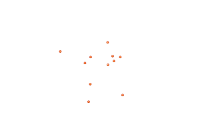

In [251]:
chennai_lakes = gis.content.search("ChennaiLakes owner: api_data_owner", 
                                   item_type="Feature Layer")[0]
chennai_lakes

Now, let's call the **`Trace Downstream`** analysis tool from the GIS:

In [253]:
import warnings
warnings.filterwarnings("ignore", "Warning")

In [254]:
downstream = trace_downstream(chennai_lakes)
downstream.query()

/Users/john3092/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'analysis7.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/john3092/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'analysis7.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/john3092/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'analysis7.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.r

<FeatureSet> 11 features

The areas surrounding the trace paths are most prone to flooding and waterlogging. To identify the areas that were at risk, we buffer the traced flow paths by one mile in each direction and visualize it on the map. We see that large areas of the city of Chennai were susceptible to flooding and waterlogging.

In [255]:
floodprone_buffer = create_buffers(downstream, [ 1 ], units='Miles')

{"cost": 0.011}


In [256]:
lakemap.content.add(floodprone_buffer)

## Nature's fury or human made disaster?

"It is easy to attribute the devastation from unexpected flooding to the results of nature and climate change when in fact it is a result of poor planning and infrastructure. In Chennai, as in several cities across the country, we are experiencing the wanton destruction of our natural buffer zones—rivers, creeks, estuaries, marshlands, lakes—in the name of urban renewal and environmental conservation.

The recent floods in Chennai are a fallout of real estate riding roughshod over the city’s waterbodies. Facilitated by an administration that tweaked and modified building rules and urban plans, the real estate boom has consumed the city’s lakes, ponds, tanks and large marshlands.

The Ennore creek that used to be home to sprawling mangroves is fast disappearing with soil dredged from the sea being dumped there. The Kodungaiyur dump site in the Madhavaram–Manali wetlands is one of two municipal landfills that service the city. Velachery and Pallikaranai marshlands are a part of the Kovalam basin that was the southern-most of the four river basins for the city. Today, the slightest rains cause flooding and water stagnation in Velachery, home to the city’s largest mall, several other commercial and residential buildings, and also the site where low income communities were allocated land.
The <b>Pallikaranai marshlands</b>, once a site for beautiful migratory birds, are now home to the second of the two landfills in the city where the garbage is rapidly leeching into the water and killing the delicate ecosystem."

[Source: Chennai's Rain Check https://www.epw.in/journal/2015/49/commentary/chennais-rain-check.html]

There are several marshlands and mangroves in the Chennai region that act as natural buffer zones to collect rain water. Let's see the human impact on Pallikaranai marshland over the last decade by comparing satellite images.

<Item title:"Landsat GLS Multispectral" type:Imagery Layer owner:esri>
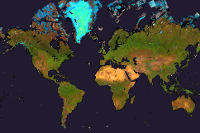

In [20]:
def exact_search(my_gis, title, owner_value, item_type_value, max_items_value=20):
    final_match = None
    search_result = my_gis.content.search(query= title + ' AND owner:' + owner_value, 
                                          item_type=item_type_value, max_items=max_items_value, outside_org=True)
    
    if "Imagery Layer" in item_type_value:
        item_type_value = item_type_value.replace("Imagery Layer", "Image Service")
    elif "Layer" in item_type_value:
        item_type_value = item_type_value.replace("Layer", "Service")
    
    for result in search_result:
        if result.title == title:
            final_match = result
            break
    return final_match

ls_water = exact_search(gis, 'Landsat GLS Multispectral', 'esri', 'Imagery Layer')
ls_water

Lets us see how the Pallikaranai marshland has changed over the past few decades, and how this has also contributed to the flooding. We create two maps and load the Land / Water Boundary layer to visualize this. This image layer is time enabled, and the map widget gives you the ability to navigate this dataset via time as well.

In [ ]:
ls_water_lyr = ls_water.layers[0]

In [22]:
from arcgis.geocoding import geocode
area = geocode("Tamil Nadu, India", out_sr=ls_water_lyr.properties.extent.spatialReference)[0]
ls_water_lyr.extent = area['extent']

In the cell below, we will use a band combination [5,4,3] (a.k.a. mid-IR (Band 5), near-IR (Band 4) and red (Band 3)) of Landsat to provide definition of land-water boundaries and highlights subtle details not readily apparent in the visible bands alone. The reason that we use more infrared bands is to locate inland lakes and streams with greater precision. Generally, the wetter the soil, the darker it appears, because of the infrared absorption capabilities of water.

In [23]:
# data source option 
from arcgis.raster.functions import stretch, extract_band
target_img_layer = stretch(extract_band(ls_water_lyr, [5,4,3]),
                           stretch_type="percentclip", gamma=[1,1,1], dra=True)

Use the cell below to filter imageries based on the temporal conditions, and export the filtered results as local images, then show comparatively with other time range. You can either use the where clause e.g. `where="(Year = " + str(start_year) + ")",` or use the temporal filter as shown below.

In [24]:
import pandas as pd
from arcgis import geometry
import datetime as dt

def filter_images(my_map, start_year, end_year):
    selected = target_img_layer.filter_by(where="(Category = 1) AND (CloudCover <=0.2)",
                                          time=[dt.datetime(start_year, 1, 1), dt.datetime(end_year, 1, 1)],
                                          geometry=arcgis.geometry.filters.intersects(ls_water_lyr.extent))
    my_map.content.add(selected)
    
    fs = selected.query(out_fields="AcquisitionDate, GroupName, Month, DayOfYear, WRS_Row, WRS_Path")
    tdf = fs.sdf  
    return tdf

First, search for qualified satellite imageries (tiles) intersecting with the area of interest at year 1991.


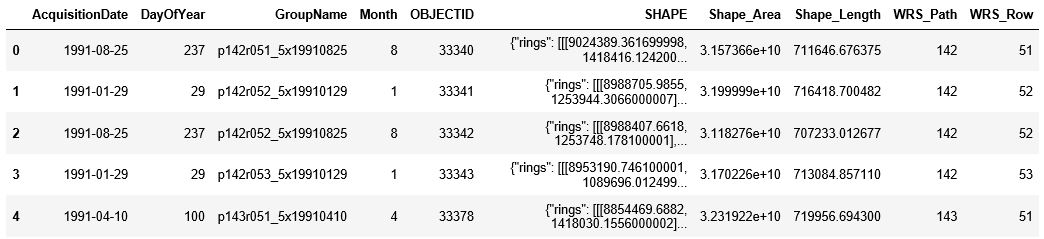

In [1]:
satmap1 = gis.map("Pallikaranai, Tamil Nadu, India", 13)
df = filter_images(satmap1, 1991, 1992) 
df.head()

Then search for satellite imageries intersecting with the area of interest at 2009.


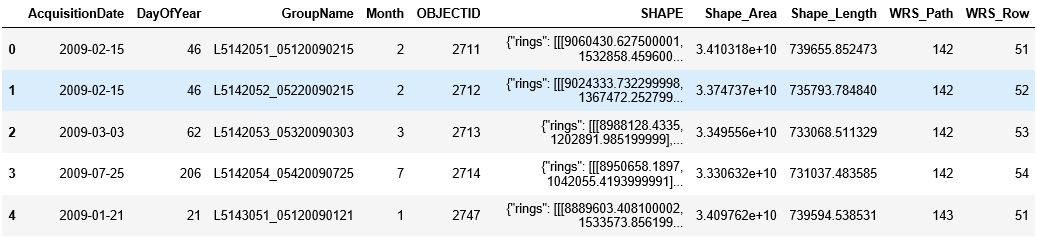

In [2]:
satmap2 = gis.map("Pallikaranai, Tamil Nadu, India", 13)
df = filter_images(satmap2, 2009, 2010)
df.head()


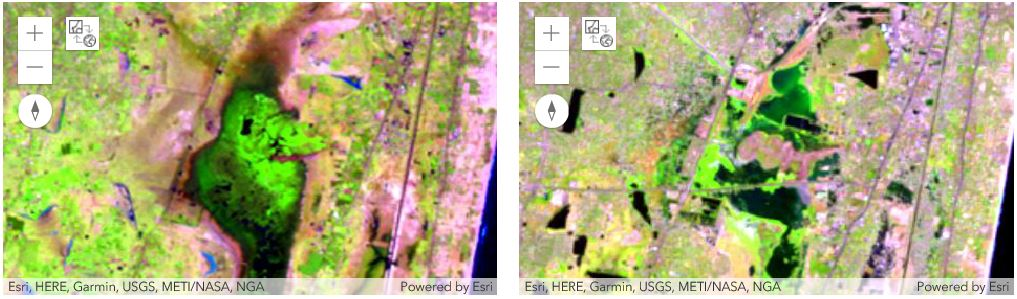

In [3]:
from ipywidgets import *

satmap1.layout=Layout(flex='1 1', padding='10px', height='300px')
satmap2.layout=Layout(flex='1 1', padding='10px', height='300px')

box = HBox([satmap1, satmap2])
box

The human impact on the marshland is all too apparent in the satellite images. The marshland has shrunk to less than a third of its size in just two decades.

"Not long ago, it was a 50-square-kilometre water sprawl in the southern suburbs of Chennai. Now, it is 4.3 square kilometres – less than a tenth of its original. The growing finger of a garbage dump sticks out like a cancerous tumour in the northern part of the marshland.  Two major roads cut through the waterbody with few pitifully small culverts that are not up to the job of transferring the rain water flows from such a large catchment. The edges have been eaten into by institutes like the National Institute of Ocean Technology. Ironically, NIOT is an accredited consultant to prepare Environmental Impact Assessments on various subjects, including on the implications of constructing on waterbodies.

Other portions of this wetland have been sacrificed to accommodate the IT corridor. But water offers no exemption to elite industry. Unmindful of the lofty intellectuals at work in the glass and steel buildings of the software parks, rainwater goes by habit to occupy its old haunts, bringing the back-office work of American banks to a grinding halt."

[Source: http://scroll.in/article/769928/chennai-floods-are-not-a-natural-disaster-theyve-been-created-by-unrestrained-construction]

## Flood Relief Camps

To provide emergency assistance, the Tamil Nadu government has set up several flood relief camps in the flood affected areas. They provide food, shelter and the basic necessities to thousands of people displaced by the floods. The locations of the flood relief camps was obtained from http://cleanchennai.com/floodrelief/2015/12/09/relief-centers-as-on-8-dec-2015/ with https://ciifoundation.in/Tamil-Nadu-Flood-Relief-2015.php and published to the GIS as a layer, that is visualized below:

In [ ]:
relief_centers = gis.content.search("Chennai Relief Centers owner: api_data_owner", item_type="Feature Layer")[0]

<Item title:"chennai_relief_centers" type:Feature Layer Collection owner:api_data_owner>
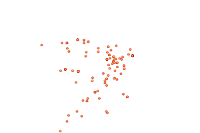

In [26]:
relief_centers

In [28]:
reliefmap = gis.map("Chennai")
reliefmap

Assign an optional JSON paramter to specify its opacity, e.g. `reliefmap.content.add(chennaipop, {"opacity":0.5})` or else just add the layer with no transparency.

In [73]:
reliefmap.content.add(chennaipop, {"opacity":0.5})

In [74]:
reliefmap.content.add(relief_centers)

Let us read the relief center layer as a pandas dataframe to analyze the data further

In [32]:
relief_data = relief_centers.layers[0].query().sdf
relief_data.head()

,Contact_No,Division__,FID,F_Locations,No_of_Cent,No_of_fami,No_of_pers,SHAPE,Sl_No_,SymbolID,Zone______
0,"Balamurali, 9445190311",10,1,"Poonthotam School, Chennai",10,65,200,"{""x"": 8919695.334199999, ""y"": 1464332.82629999...",1,,I
1,"Jayakumar, 9445190302",2,2,"St.Joseph church community Hall, Chennai",0,200,600,"{""x"": 8936283.704100002, ""y"": 1469202.8202, ""s...",2,,
2,"Jayakumar, 9445190302",2,3,"Nehru Nagar chennai Middle school, Chennai",0,75,250,"{""x"": 8916764.954599999, ""y"": 1450941.69069999...",3,,
3,"Shanmugam, 9445190301",7,4,"Kalaimagal School, Chennai",0,15,50,"{""x"": 8924034.069200002, ""y"": 1462457.79919999...",4,,
4,"Rameshkumar, 9445190304",4,5,"Ramanathapuram School, Chennai",0,100,300,"{""x"": 8919695.334199999, ""y"": 1464332.82629999...",5,,


In [33]:
relief_data['No_of_pers'].sum()

31478

In [34]:
relief_data['No_of_pers'].describe()

count     136.000000
mean      231.455882
std       250.334202
min        10.000000
25%        60.000000
50%       150.000000
75%       300.000000
max      1500.000000
Name: No_of_pers, dtype: float64

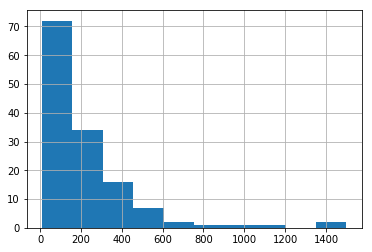

In [35]:
relief_data['No_of_pers'].hist()

In our dataset, each row represents a relief camp location. To quickly get the dimensions (rows & columns) of our data frame, we use the `shape` property

In [36]:
relief_data.shape

(136, 11)

As of 8th December, 2015, there were 31,478 people in the 136 relief camps. Let's aggregate them by the district the camp is located in. To accomplish this, we use the `aggregate_points` tool.

In [37]:
chennai_pop_featurelayer = chennaipop.layers[3]

In [38]:
res = arcgis.features.summarize_data.aggregate_points(  relief_centers, 
                                                        chennai_pop_featurelayer, 
                                                        False, 
                                                        ["No_of_pers Sum"])

In [39]:
aggr_lyr = res['aggregated_layer']

In [75]:
reliefmap.content.add(aggr_lyr, { "renderer": "ClassedSizeRenderer", 
                               "field_name":"sum_no_of_pers"})

In [155]:
df = aggr_lyr.query().sdf
df

,OBJECTID,Point_Count,ID,NAME,TOTPOP_CY,sum_no_of_pers,Shape_Length,Shape_Area,AnalysisArea,SHAPE
0,1,14,3360205699,Poonamallee,714718,2785,0.569453,0.012002,55.599737,"{""rings"": [[[80.05174000000005, 13.14300600000..."
1,2,13,3360205700,Ambattur,625331,1789,0.592347,0.011383,52.718308,"{""rings"": [[[80.08826400000004, 13.20953500000..."
2,3,2,3360290000,Maduravoyal,467100,97,0.354741,0.003433,15.903703,"{""rings"": [[[80.14401524500005, 13.09860751100..."
3,4,1,3360390000,Ayanavaram,603960,300,0.181884,0.001242,5.754733,"{""rings"": [[[80.20368600000006, 13.13102900000..."
4,5,23,3360390003,Purasaiwalkam,989286,6337,0.243384,0.001457,6.748570,"{""rings"": [[[80.30656800000008, 13.10099500100..."
5,6,15,3360390004,Aminjikarai,263737,3246,0.199696,0.001391,6.442165,"{""rings"": [[[80.20415364600007, 13.10895212100..."
6,7,13,3360390005,Egmore,465645,5447,0.228839,0.001437,6.656538,"{""rings"": [[[80.24363995400006, 13.08219684900..."
7,8,3,3360390006,Mylapore,580497,1480,0.204726,0.001864,8.634713,"{""rings"": [[[80.28478300000006, 13.05313100100..."
8,9,5,3360390007,Mambalam,204783,1400,0.190345,0.001243,5.757650,"{""rings"": [[[80.21407458000004, 13.05186367100..."
9,10,5,3360390008,Guindy,611730,1555,0.285576,0.001736,8.045807,"{""rings"": [[[80.23336013100004, 13.05392379000..."


Let us represent the aggreate result as a table:

In [156]:
df = aggr_lyr.query().sdf

df2 = df[['NAME', 'sum_no_of_pers']]
df2.set_index('NAME', inplace=True)
df2

,sum_no_of_pers
NAME,
Poonamallee,2785
Ambattur,1789
Maduravoyal,97
Ayanavaram,300
Purasaiwalkam,6337
Aminjikarai,3246
Egmore,5447
Mylapore,1480
Mambalam,1400


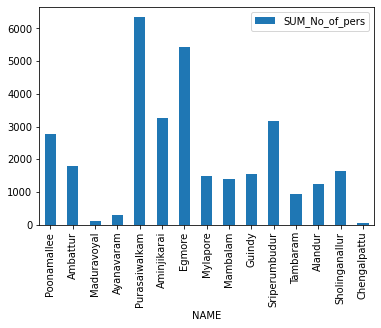

In [157]:
df2.plot(kind='bar')

### Routing Emergency Supplies to Relief Camps

A centralized location has been established at Nehru Stadium to organise the relief materials collected from various organizations and volunteers.  From there, the relief material is distributed to the needy flood affected people.

The GIS provided routing tools that can help plan routes of the relief trucks from the center to relief camps:

In [1]:
routemap = gis.map("Chennai")
routemap

In [47]:
nehru_stadium = geocode('Jawaharlal Nehru Stadium, Chennai')[0]
routemap.content.draw(nehru_stadium, {"title": "Nehru Stadium", 
                              "content": "Chennai Flood Relief Center"})

In [48]:
start_time = datetime.datetime(2015, 12, 13, 9, 0)

In [49]:
routes = arcgis.features.use_proximity.plan_routes(
    relief_centers, 
    15, 
    15, 
    start_time, 
    nehru_stadium, 
    stop_service_time=30)
routemap.content.add(routes['routes_layer'])

Input field [OID] was not mapped to a field in the network analysis class "Orders".
Input field [OID] was not mapped to a field in the network analysis class "Depots".
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Avoid Unpaved Roads" "Avoid Private Roads" "Through Traffic Prohibited" "Avoid Gates").
{"messageCode": "AO_100116", "message": "Only 10 out of 15 routes are needed to reach all stops. If you want to use more routes, run Plan Routes again but reduce the limits on the maximum number of stops or the total route time per vehicle.", "params": {"routeCount": 15, "routesUsed": 10}}


In [50]:
routemap.content.add(routes['assigned_stops_layer'])
routemap.content.add(routes['routes_layer'])

Once the routes have been generated, they can be given to drivers, and used to ensure that relief material is promptly delivered to those in need and help alleviate the suffering they are going through.